# Pandas | apply function to column

### Importance

### Scope of tutorial and what you learn

1. In this tutorial, we discuss how to:<br>
\- [Apply a function to a column in pandas](#one_col).<br>
\- [Apply a function to multiple columns in pandas](#multi_col).<br>

2. In this tutorial, we discuss different methods to introduce a function and apply it to pandas DataFrame:<br>
\- Apply a NumPy mathematical function to [one column](#numpy_func) or [multiple columns](#multi_col_numpy_func) in pandas.<br>
\- Apply a Lambda function to [one column](#lambda_function) or [multiple columns](#multi_col_lambda_func) in pandas.<br>
\- Apply a regular function to [one column](#regular_function) or [multiple columns](#multi_col_regular_func) in pandas.<br>

3. Throughout the tutorial, we emphasize the importance of understanding and properly setting the correct axis (along the row or column) for applying the function. We demonstrate how things can go wrong due to the lack of understanding of this fundamental concept. If there is only one section of this tutorial you must read, it is probably the [guide on properly setting the axis parameter](#set_axis).

# Pandas | apply function to column

### Importance

### Scope of tutorial and what you learn

<font color="darkred">1. In this tutorial, we discuss how to:<br></font>
\- [Apply a function to a column in pandas](#one_col).<br>
\- [Apply a function to multiple columns in pandas](#multi_col).<br>

<font color="green">2. In this tutorial, we discuss different methods to introduce a function and apply it to pandas DataFrame:<br>
\- Apply a NumPy mathematical function to [one column](#numpy_func) or [multiple columns](#multi_col_numpy_func) in pandas.<br>
\- Apply a Lambda function to [one column](#lambda_function) or [multiple columns](#multi_col_lambda_func) in pandas.<br>
\- Apply a regular function to [one column](#regular_function) or [multiple columns](#multi_col_regular_func) in pandas.<br></font>

<font color="navy">3. Throughout the tutorial, we emphasize the importance of understanding and properly setting the correct axis (along the row or column) for applying the function. We demonstrate how things can go wrong due to the lack of understanding of this fundamental concept. If there is only one section of this tutorial you must read, it is probably the [guide on properly setting the axis parameter](#set_axis).</font>

<a id='one_col'></a>
# Apply a function to a column in pandas DataFrame

You can use the **pandas Dataframe** _apply_ method to apply a function along an axis of the DataFrame.
Two important parameters of this method are _func_ and _axis_.
The parameter _func_ gets the name of function to apply to each column or row, while
the _axis_ parameter denotes the axis along which the function is applied.
With regard to the _axis_ parameter, 0 refers to _index_ and 1 denotes _column_.

There are different ways to introduce the function. 
A simple scenario is to apply a simple function like the [NumPy mathematical functions](https://numpy.org/doc/stable/reference/routines.math.html). The other options enabling you to introduce more complex functions include _lambda function_, and _regular function_. 

In this tutorial, we aim at covering these three options:<br>
\- [Apply a Numpy mathematical function](#numpy_func).<br>
\- [Apply a Lambda function](#lambda_function).<br>
\- [Apply a regular function](#regular_function).<br>

<a id='set_axis_one_col'></a>
## Setting the _axis_ parameter when you apply a function to a column in pandas

If you pass index=0 (operation along the row axis), the function will be called only once, for the function to operate on the whole column. 
The function then returns an iterable, _e.g._ list, array, etc., with the same size as that of the passed column.

However, if you pass index=1 (operation along the column axis), the function will be called once for each row, for the function to operate on one element each time.
The function will, therefore, return only one element after each call.

### So, which axis should you choose?!
Well, it depends on what you need to do.
Choosing the wrong axis can simply cause error or wrong results.
In cases that you have both options, index=0 (default value) can potentially provide a more effecient, _i.e._ faster, approach to apply a function to a column, particularly if the DataFrame is sufficiently large.

Let's look at some examples in the following.

### DataFrame apply function to column | examples

We start with importing the required packages for this tutorial:

In [1]:
import numpy as np
import pandas as pd

Let's create a sample pandas DataFrame:

In [2]:
#specifying a seed for reproducibility
np.random.seed(1234)
df_ref = pd.DataFrame(data=np.random.randint(0,10, (6,4)), columns=list('ABCD'))
print(f'Here is the reference DataFrame in this tutorial:\n{df_ref}\n')

Here is the reference DataFrame in this tutorial:
   A  B  C  D
0  3  6  5  4
1  8  9  1  7
2  9  6  8  0
3  5  0  9  6
4  2  0  5  2
5  6  3  7  0



<a id='numpy_func'></a>
## Apply a Numpy mathematical function

There are numerous [mathematical functions offered by NumPy](https://numpy.org/doc/stable/reference/routines.math.html) that you can use including:<br>

\- Trigonometric functions: **sin**, **cos**, **tan**, **arcsin**, etc.<br>
\- Hyperbolic functions: **sinh**, **cosh**, **arctanh**, etc.<br>
\- Rounding: **around**, **rint**, etc.<br>
\- Sums, products, differences: **prod**, **sum**, etc.<br>
\- Exponents and logarithms: **exp**, **expm1**, **exp2**, **log**, **log10**, etc.<br>
\- Arithmetic operations: **power**, **divide**, **multiply**, **add**, etc.<br>
\- Miscellaneous: **sqrt**, **cbrt**, **square**, **absolute**, **sign**, etc.<br>

In the following example, we apply the square-root function to one of the columns, **B**, with the argument axis=1. Feel free to check the other case for axis=0.

In [3]:
axis=1
list_col = ['B']

df = df_ref.copy()
df[list_col] = df[list_col].apply(np.sqrt, axis=axis)

print(f'Here is the DataFrame:\n{df_ref}\n')
print(f'Results of applying sqrt on column {list_col[0]} with axis={axis}:\n{df}\n')
print('Feel free to change axis to see the effects.')

Here is the DataFrame:
   A  B  C  D
0  3  6  5  4
1  8  9  1  7
2  9  6  8  0
3  5  0  9  6
4  2  0  5  2
5  6  3  7  0

Results of applying sqrt on column B with axis=1:
   A         B  C  D
0  3  2.449490  5  4
1  8  3.000000  1  7
2  9  2.449490  8  0
3  5  0.000000  9  6
4  2  0.000000  5  2
5  6  1.732051  7  0

Feel free to change axis to see the effects.


In such cases, you can just drop the _axis_ from the arguments of the method _apply_:

In [4]:
list_col = ['B']

df = df_ref.copy()
df[list_col] = df[list_col].apply(np.sqrt)

print(f'Here is the DataFrame:\n{df_ref}\n')
print(f'Results of applying sqrt on column {list_col[0]} without axis argument (default axis=0):\n{df}\n')

Here is the DataFrame:
   A  B  C  D
0  3  6  5  4
1  8  9  1  7
2  9  6  8  0
3  5  0  9  6
4  2  0  5  2
5  6  3  7  0

Results of applying sqrt on column B without axis argument (default axis=0):
   A         B  C  D
0  3  2.449490  5  4
1  8  3.000000  1  7
2  9  2.449490  8  0
3  5  0.000000  9  6
4  2  0.000000  5  2
5  6  1.732051  7  0



In order to create a new column in DataFrame that is the square-root of a given column, say **D**, you can pass the **sqrt** function to the _apply_ method from a pandas DataFrame consistaing of column **D**, _i.e._ df[['D']], or a pandas Series consistaing of column **D**, _i.e._ df['D']. 
I try to keep it simple here, but as a side-note for curious readers, df[['D']] is of the **pandas DataFrame** type, while df['D'] has a **pandas Series** type.

<font color="darkred">Note that the method "apply" from the [pandas Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html) has no "axis" parameter as opposed to the pandas DataFrame.</font>

In [5]:
list_col = ['D']

df = df_ref.copy()
df['E'] = df_ref[list_col].apply(np.sqrt)

print(f'Here is the DataFrame:\n{df_ref}\n')
print(f'Adding a new column from applying sqrt acting on column {list_col[0]}:\n{df}\n')

Here is the DataFrame:
   A  B  C  D
0  3  6  5  4
1  8  9  1  7
2  9  6  8  0
3  5  0  9  6
4  2  0  5  2
5  6  3  7  0

Adding a new column from applying sqrt acting on column D:
   A  B  C  D         E
0  3  6  5  4  2.000000
1  8  9  1  7  2.645751
2  9  6  8  0  0.000000
3  5  0  9  6  2.449490
4  2  0  5  2  1.414214
5  6  3  7  0  0.000000



As another example, you can pass the function **around**, together with its parameter _decimals_, to the method _apply_ in order to evenly round the values of a column of DataFrame, say **E**, to a given number of decimals, say _decimals_=3:

In [6]:
print(f'Here is the DataFrame:\n{df}\n')

list_col = ['E']
decimals = 3
df[list_col] = df[list_col].apply(np.around, decimals=decimals)

print(f'Evenly rounding column {list_col[0]} by {decimals} decimals:\n{df}\n')

Here is the DataFrame:
   A  B  C  D         E
0  3  6  5  4  2.000000
1  8  9  1  7  2.645751
2  9  6  8  0  0.000000
3  5  0  9  6  2.449490
4  2  0  5  2  1.414214
5  6  3  7  0  0.000000

Evenly rounding column E by 3 decimals:
   A  B  C  D      E
0  3  6  5  4  2.000
1  8  9  1  7  2.646
2  9  6  8  0  0.000
3  5  0  9  6  2.449
4  2  0  5  2  1.414
5  6  3  7  0  0.000



Let's look at another example with a new funtion. 
Let's say you want to find the floor of the values of the column **E** of the DataFrame:

In [7]:
print(f'Here is the DataFrame:\n{df}\n')

list_col = ['E']
df[list_col] = df[list_col].apply(np.floor)

print(f'Applyting the floor function on column {list_col[0]}:\n{df}\n')

Here is the DataFrame:
   A  B  C  D      E
0  3  6  5  4  2.000
1  8  9  1  7  2.646
2  9  6  8  0  0.000
3  5  0  9  6  2.449
4  2  0  5  2  1.414
5  6  3  7  0  0.000

Applyting the floor function on column E:
   A  B  C  D    E
0  3  6  5  4  2.0
1  8  9  1  7  2.0
2  9  6  8  0  0.0
3  5  0  9  6  2.0
4  2  0  5  2  1.0
5  6  3  7  0  0.0



<a id='lambda_function'></a>
## Pandas | apply Lambda

A cool feature offered by pandas is that it enables you to specify an arbitrary expression to be applied to the specifed column(s) of the **pandas DataFrame**. 

Let's look at an example. In the following example, we simply raise each element in column **B** to power 2, and replace the previous value.

In [8]:
list_col = ['B']

df = df_ref.copy()
df[list_col] = df[list_col].apply(lambda x: x**2)

print(f'Here is the DataFrame:\n{df_ref}\n')
print(f'Results of applying Lambda function on column {list_col[0]}:\n{df}\n')

Here is the DataFrame:
   A  B  C  D
0  3  6  5  4
1  8  9  1  7
2  9  6  8  0
3  5  0  9  6
4  2  0  5  2
5  6  3  7  0

Results of applying Lambda function on column B:
   A   B  C  D
0  3  36  5  4
1  8  81  1  7
2  9  36  8  0
3  5   0  9  6
4  2   0  5  2
5  6   9  7  0



As another example, let's create a new DataFrame with random samples from a normal (Gaussian) distribution (mean of 10 and standard deviation of 3). 
We then apply a Lambda function on column **B** and replace each element of this column with the corresponding normalized values with the mean and standard deviation of unity:

In [9]:
#------------------------------------
# Creating a random dataset
#------------------------------------
np.random.seed(1234)
df0 = pd.DataFrame(np.random.normal(loc=10, scale=3, size=(5000, 4)), columns=list('ABCD'))

#------------------------------------
# Applying the user-defined 
# function to pandas DataFrame
#------------------------------------
list_col = ['B']
df = df0.copy()
df[list_col] = df[list_col].apply(lambda x: (x-np.mean(x))/np.std(x))

Here is how to plot the histogram for the origianl and normalized distributions of column **B**:

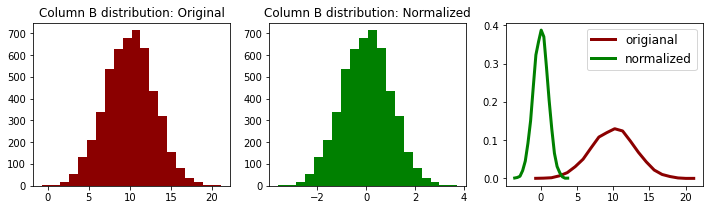

In [10]:
import matplotlib.pyplot as plt
import scipy.stats as stats

dens0 = stats.gaussian_kde(df0.B)
dens = stats.gaussian_kde(df.B)

fig, ax = plt.subplots(1,3, figsize=(12,3))
n0, x0, _ = ax[0].hist(df0.B, bins=20, color='darkred')
ax[0].set_title('Column B distribution: Original')
n, x, _ = ax[1].hist(df.B, bins=20, color='green')
ax[1].set_title('Column B distribution: Normalized')
ax[2].plot(x0, dens0(x0), linewidth=3, color='darkred', label='origianal')
ax[2].plot(x, dens(x), linewidth=3, label='normalized',  color='green')
ax[2].legend(fontsize=12)
plt.show()

The results show that the expression defined within the Lambda function is indeed applied correctly on column **B** of the DataFrame.

We see that the Lambda function provides an easy way to manipulate the pandas DataFrame. 
However, its usage is limited by its unique inherent feature: only one expression can be defined.
As a result, the Lambda function can be used only for the situations that one single expression suffices to describe the desired manipulation.
For more complex cases, a regular function can be used as explained in the following section.

<a id='regular_function'></a>
## Apply a regular function

A very powerful feature offered by pandas is that it enables you to define a normal function, and pass its name to the **pandas DataFrame** _apply_ method. The pandas will then apply the function on the specified  row(s)/column(s). 

Let's look at an example:

In [11]:
#----------------------------------------------
# A user-defined function
# Feel free to comment/uncomment different
# lines to test diffent functions. You can also
# write your own function here!
#----------------------------------------------
def myfunc_complex_process(x):
    #return x**2
    #return x**3 + 3*x
    return np.round(np.sqrt(np.round(x)**2 + np.exp(x)), decimals=2)

#------------------------------------
# Applying the user-defined 
# function to pandas DataFrame
#------------------------------------
list_col = ['B']
df=df_ref.copy()
df['E'] = df[list_col].apply(myfunc_complex_process)

#------------------------------------
# Displaying DataFrames
#------------------------------------
print(f'Here is the DataFrame:\n{df_ref}\n')
print(f'Creating a new column from applyting\na user-defined function on column {list_col[0]}:\n{df}\n')

Here is the DataFrame:
   A  B  C  D
0  3  6  5  4
1  8  9  1  7
2  9  6  8  0
3  5  0  9  6
4  2  0  5  2
5  6  3  7  0

Creating a new column from applyting
a user-defined function on column B:
   A  B  C  D      E
0  3  6  5  4  20.96
1  8  9  1  7  90.47
2  9  6  8  0  20.96
3  5  0  9  6   1.00
4  2  0  5  2   1.00
5  6  3  7  0   5.39



You can see that arbitrary and complex functions can be defined and applied on pandas DataFrame. 
This feature opens enables you to do boundless types of manipulations. 
It happes quite often that data scientists need to perform manipulations on pandas DataFrame that involve _if statement_. 
Such complex manipulatios may not be easily achievable using the Lambda function, in which case you can always resort to the regular function concept.

Let us look at an example. In the following example, 
we create a random DataFrame of integers between 0 and 100.
We aim at classifying the dataset based on the value of each record in column **D**. 
In order to accomplish this goal, we have written a function to be applied to the pandas DataFrame.
Here is how the function works:

<font color="green">The mean and standard deviation of the passed array are calculated first.
Each element of the array will then lead to one of the classes "low", "mid-low", "mid-high", and "high", according to its value compared to the whole array's distribution.
The obtained array of labels "low", "mid-low", "mid-high", and "high" will then be returned.</font>

Now, we can pass the name of this function to the pandas DataFrame _apply_ method. What about the _axis_ parameter?!
<font color="red">I recommend you to pause here, and think about it more. 
Before you continue reading, try to predict what will happen in two different cases of passing axis=0, and axis=1.</font>

In [12]:
#----------------------------------------------
# A user-defined function with if statement
# to classify an array according to the value of 
# each element compared to the distribution of 
# the whole array.
#----------------------------------------------
def myfunc_complex_process_with_if(x):
    x_mean = np.mean(x)
    x_mu = np.std(x)
    
    myvar = np.empty(len(x), dtype='object')
    
    for sn, item in enumerate(x):
        if item<x_mean-x_mu:
            myvar[sn] = 'low'
        elif item<x_mean:
            myvar[sn] = 'mid-low'
        elif item<x_mean+x_mu:
            myvar[sn] = 'mid-high'
        else:
            myvar[sn] = 'high'
    return pd.Series(myvar)


#------------------------------------
# Creating a random dataset
#------------------------------------
np.random.seed(1234)
df = pd.DataFrame(np.random.randint(0,100, (20,4)), columns=list('ABCD'))
print(f'Here is the DataFrame:\n{df}\n')

#------------------------------------
# Applying the user-defined 
# function to pandas DataFrame
#------------------------------------
list_col = ['D']
df['E'] = df[list_col].apply(myfunc_complex_process_with_if, axis=0)
print(f'Creating a new column from applyting\na user-defined function to classify column {list_col[0]}:\n{df}\n')

Here is the DataFrame:
     A   B   C   D
0   47  83  38  53
1   76  24  15  49
2   23  26  30  43
3   30  26  58  92
4   69  80  73  47
5   50  76  37  34
6   38  67  11   0
7   75  80   3   2
8   19  12  65  75
9   81  14  71  60
10  46  28  81  87
11  13  96  12  69
12  95  31  89  84
13  45  16  41  72
14  56  70  56  86
15  44  90  83  47
16  49  18  85  46
17  98  37  38   7
18  67   5  47  47
19  15  34  10  28

Creating a new column from applyting
a user-defined function to classify column D:
     A   B   C   D         E
0   47  83  38  53  mid-high
1   76  24  15  49   mid-low
2   23  26  30  43   mid-low
3   30  26  58  92      high
4   69  80  73  47   mid-low
5   50  76  37  34   mid-low
6   38  67  11   0       low
7   75  80   3   2       low
8   19  12  65  75  mid-high
9   81  14  71  60  mid-high
10  46  28  81  87      high
11  13  96  12  69  mid-high
12  95  31  89  84      high
13  45  16  41  72  mid-high
14  56  70  56  86      high
15  44  90  83  47   mid-low
1

As you see, here, we have passed the argument index=0 (operation along the row axis). 
That is the whole column, **D** here, will be passed to the written function.
In case that you pass the the argument index=1 (operation along the column axis), the function will be called for each element (remember now operation is along the column), and each element will be passed to the function one-by-one.
As you may have guessed it correctly, it will lead to the wrong results; all dataset will be labeled "high" as you see in the following:

In [13]:
#------------------------------------
# Creating a random dataset
#------------------------------------
np.random.seed(1234)
df = pd.DataFrame(np.random.randint(0,100, (20,4)), columns=list('ABCD'))
print(f'Here is the DataFrame:\n{df}\n')

#------------------------------------
# Applying the user-defined 
# function to pandas DataFrame
#------------------------------------
list_col = ['D']
df['E'] = df[list_col].apply(myfunc_complex_process_with_if, axis=1)
print(f'Creating a new column from applyting\na user-defined function to classify column {list_col[0]}')
print(f'with the wrong implementation due to axis=1:\n{df}\n')

Here is the DataFrame:
     A   B   C   D
0   47  83  38  53
1   76  24  15  49
2   23  26  30  43
3   30  26  58  92
4   69  80  73  47
5   50  76  37  34
6   38  67  11   0
7   75  80   3   2
8   19  12  65  75
9   81  14  71  60
10  46  28  81  87
11  13  96  12  69
12  95  31  89  84
13  45  16  41  72
14  56  70  56  86
15  44  90  83  47
16  49  18  85  46
17  98  37  38   7
18  67   5  47  47
19  15  34  10  28

Creating a new column from applyting
a user-defined function to classify column D
with the wrong implementation due to axis=1:
     A   B   C   D     E
0   47  83  38  53  high
1   76  24  15  49  high
2   23  26  30  43  high
3   30  26  58  92  high
4   69  80  73  47  high
5   50  76  37  34  high
6   38  67  11   0  high
7   75  80   3   2  high
8   19  12  65  75  high
9   81  14  71  60  high
10  46  28  81  87  high
11  13  96  12  69  high
12  95  31  89  84  high
13  45  16  41  72  high
14  56  70  56  86  high
15  44  90  83  47  high
16  49  18  85  46  high


<a id='multi_col'></a>
# Pandas | apply to multiple columns

<a id='set_axis'></a>
## Important note on properly setting the _axis_ parameter to apply a function to multiple columns

As mentioned earlier, the proper setting of the _axis_ argument is cruicially important when applying a function on pandas DataFrame.
You have already learnt how to correctly [set the axis parameter when you apply a function to a single column of pandas DataFrame](#set_axis_one_col).
So, what about the case you apply a function to multiple columns? 
Is there any difference?!

Well, it turns out the concept is the same; you just need to generalize it.
We have prepared a schematic representation of how the 


[IPython Display](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html)

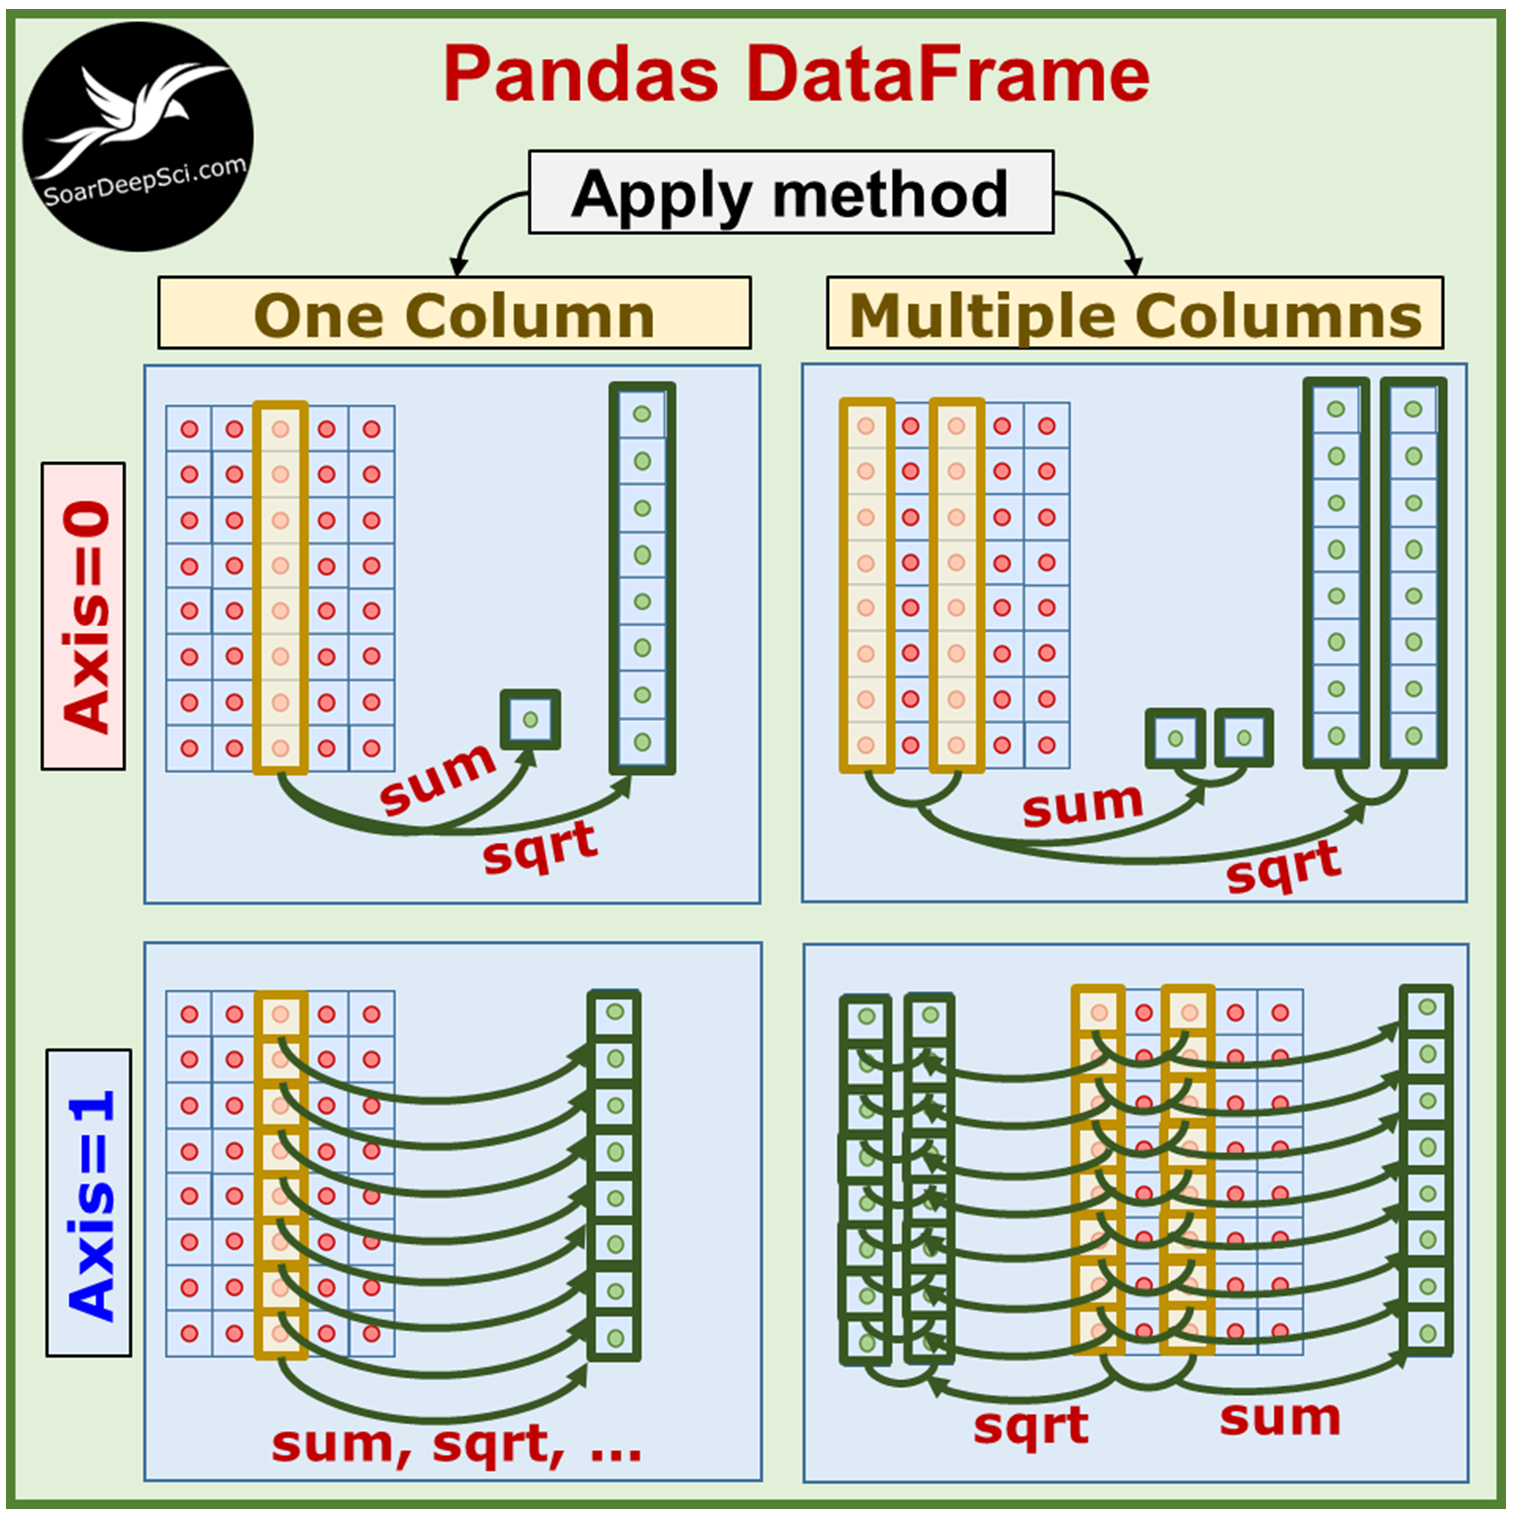

In [23]:
from IPython import display
from base64 import b64decode
base64_data = "iVBORw0KGgoAAAANSUhEUgAABesAAAXrCAIAAAFTAEXxAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAALiMAAC4jAXilP3YAAP+lSURBVHhe7F0FdNxG13WbNoW/9LUNN5y2aZM2zGmatE3TMNphZoaGGRyHHDsOMzMzxzEzs71rr5mZWf8djXZW1pq9DtU69+i8eXozI42u3rwnabVaXNVStZRrqaJO1VLOhVBnxOYO/de0qEIVSoPB61uDMCrqhCbLgxN9i0Fost+CZbO1Ci49/ujuKLMKSfKTGFfhHcbJZztLS53te7YITCl6qVW7ZmxOiKRiFd5JlIo6HkEOAjVKt/z+52+SFqrw7qFk6mAyEhhRxiUsRSZpSiMwee89Ey0tipdaWpKtJcJzz2ZUlCiLB3phPRoXXdd5/tSQzECJEgjwMGHVAa/juyUGbylKoM6XX30pEKFcS2iy5tkD6ph+9FFImn8oF4kzYfXT91QPTUiqPzNjSlURO5Mik1AnJKPAyQ5JDxAXKUAd+35/YRPt0eyLz4RNSX7MHl1jk4o6KXLWNaUO2T0ewcmiiDBFGO2QrCCVkmrSVC0zJSkW3OHXiOKo03dgH4ECpVs+/fTT69ev+/v7N27cWFBhyDQdO1PqCLKWlvk3XwcnySBQUD9kWv1Dm45tBOUH1aBx111BixY1v8UaGud5kwUDvhiSroBAHYx5nZrQMBDq9P2Tyq7L5lB7yx+b0roAGMM8E9jJZFJM8hOok0qYTXkQmhNCt8IywMuUyoDs2RXwm+qpxvSDD6iA3aObKPztHtH9eY0okjo+4S7CyVcuvXv3FqTCFlR/+vRp//79IdBl7Nix0H/2mfIa1RDohMUGl1yvqXKZ6U1sCvAkJwkCqEMF74sHqYC119FdECybNaKaoGj3oFgvnFo05XV6j7/tQ+gDQ51xhkLzwmDAAANGnQAvM1I9yS8wxCkkA6fTD8UAHwux11H4WaIRuA2iSfWXTFgwoNQJyQkh9ilyue1DuhtWP/9A+UFa4PfZ++pRKih8zC3q14UNiv4Oj2k7rxdFUocSQrzAoCj2YNPgwYOxxqKrqytolUskrpiCvVYEvNepHqiwCwx2CEnl9zZZuNAtvqtLxxTUMf3kYwj+Ls+Jhj8fYVw0NN4nDamNy4KpEGhFr+P60FCZKlFkQJFRx2XpLFrdun0rVh2eQ0wd8xrfsE2MOrQ6BaUO6AI5wP0l69eqeTO6q6FcBDZBUMisBMHH3KRaNWpGQZt6jSicOpfunBZOu2jp0IHYYT4SyvySzS9+fn7YlJGRIWjVFnGXFYR4wqKwH9KXnmyPHWvpmEqpw4++y9zJRPiQTAFUExjiSAVQx2PXerOa36IYykUTA9E8S6jT7y/4NngIbDKvW5sSJTQ3lFZXUQcukD/3JNbJCCSaYqijbNxt41IqqFMnMMieCqCO9a8/08OUW9313KsL4fWicOoIJ7zg8vnnnzs7OycnJ8Ny8eLF0Lz//vsrV65EEUt+fj41K3SJUAZ9FYc6dUJyQzG4GFbLJg3JKUnyU6eOv9NTCIDn/m1UY8pzCIBg2awhdV0ANOY8hxioUjCu/qFYSau4662ChhpgFqMCNQiO9SqeOnZ//UaNrVs2N37vvWKoQyc1yIDc/Dat/hpRCHWiMwOFE6627Nq1i+eJsFy9ehWehsp//fUX1oKd2vJbr26SjjUMOIkSsznYSGJ29SrQSGyKQaHVJUJpUFbj0u9hZaIQ6hw8aSic8CIWwhR+iY2NpUJeXh4VoBGM1BZJx1V421EIdRo3bSSc7cKW6tWrwzI+Ph7rnJwcrLEI24pdJB1X4W1HIdQRTnXB5dtvv71y5UpCQgLCnZ07dyLEqVevHk+bQlKqQhdJx1V421Eyddq0aYNNiIIjIyOJnZYWczZYvvjiC2pW4iLpuApvO0rrdbA1ICAAQs2aNammrIuk4yq87SiEOnXq1hbOtnJhvKnIIum4ktCq7S9L3/4lnYuVHNcbiEKos92owHs50CclJQmFMi6Iqe/du2dvbw9Z0nEloUOXdslv/5LGxUiO6w1EIdSJTFc5GChlMplQKHqZN2/ehAkTINSqVQvr48eP16hRA8KXXwoP3n9t3VLScSWhKOrcvn07Li5OKBS7XL161dvbWyiUa0lLS8MaPaakpFBNMcutW7fUzd5W6kCLk41DysjI+PTTT+m5L3QZNmzY06dPXVxc3N3dHz169NNPP0H54YcfgkDwNP3796dmWCI0+hirGBRKnczMTLobQrnYBWaGhoZCoewLqr948YIKqampVFnMArP09HShoFzeYursPaaPQ5Is1apV69KlC4SjR4926NChWbNmkydP3sUvqEufkxe1iLusVBRKnQ8++GD+/PnYDeoPICxcuBDrKVOm0KKdnR3WzZs3p0VQB2tdXV1a3LlzJwQqy+Ukjfjqq68+/vhjCCAl9LhaIPfp0wckgED1WHfq1Anr7du3wyY7O5vfomVlZYUiPA0tYnmnqAPgkN577z2sdXR0fv75Z7hf+hYO/FDLli0PHTpExw6DiHXxi3+0B+uv8hCZrmj6fRN0Jwy/cqEnCQ4A62nTpkEDwcPDgz6spev169dTM3qCQZ34+HgI1Bg2fEvJOOQffviBVoHlzJkz69atu3r1auipZW5u7vvvv//y5UtaBCfy8vJYO9iak5MDISsrC+uoqCjKMHXqQFmvfj17b/M3+ZcCRVLHxsMUB4BpyNraulGjRrNmzUKxHMsH/JtWlYrQZD90JIt0g6zudXAIdE/oAg3W+fn5VKBcAVFokZ5aOmFBwMnGGjJdQJFTp07BdVGlnp5evXr1cCHhGgNjsDg5OWEtnrDoU2FKXL4Nomfko8WivE5URmDNWjWQM7IjfaNQJHWA75s3w4FVcKns66bLb50e8u95UahTB/tgbGyMs0VPWHR0NNZ16tShb49QA5x7BNEQqO+h1OnZsydkBG18M2QBdU6ePCmhjo+PD4o0CQXzYLNy5UpsRZFRhxaHDx/+/PlzVmzdujXNPYufsMJSyBSpwVcPNIXiqANUq/Y+9rvcCw5b3JrG0ahJg+iCb/VKqIOzsnnzZqGQnHzkyJFVq1Zhx3BGMdeATFCiiHWDBg14k2RMQBYWFhDYWWcLuIKTDXrRNk1MTAwMDCDA2aA16rqwQMYaNrDElLRp0yYUISM0hItisTMCALS2ceNGpmGLeqzTpXunVzPvlx4lUAdo0Og7woKyL+H0Fb5Kw0Oz23SSEqPQMFmyYN8wEwkFvpiQkCAUlMv06dOhx9kVyq92KTRMbt3+18jC3rp/XSiZOsAzq3uEC6VeaterLWlB44jMULRs9bNECXTp3lHYibd5KSrDwiaJ5jWiVNSh0B4zjB5YMctHH1WPyQ6WVKwMoC+J5r+AqMzAaXMmSZSvC2WgDoUsyq1j1/aUKGypV7/u7WdXX1kmiRCqd78/JMr/CKpVq/SMtZQoM3VeOxRxXm4KO83+yuItQmiKLJtLrIzfRpYVbx91aLL62eca/nnX2wLq5iXK14K3jzrAGzJ2rwXwNx9+KPwq4/VCM9RZv2Iax8nfVdx8cklyvAypXIzE+N1EmovkwAHNUGfZwvFcssO7ihKoo2b/7iEp1FRy4MArpY7hqjbzhmkB80dUk2wqHtsX/0grzhqkJdkEzBmiZf1gvUSpQZSSOtiNmQP53Ut1hrxoZHW2iWHOYK2F2h9AWKBdLT/JHgKqrJ9RhxkwoAVPCyOJkiHS78bswWRAZgzQ4rI8JVu3zG2EjiTKiuA1UyfQ5QwOlct0g/fDuMwbWp1LcdRb0AxHvmZKjdx4G2KW4rh7+a9rptbg0t1YxScX5qBifroLKh7T7UWUaS6b5zTcPKcRl+KEokCdXB/SWrLDw7MzdOcTgRTTXddNqxXjfzs90mT15G9wUgV9vmzt1JqpEcaktZJQSupQcnMZbgYrWkFYMvoTKElfme5clhfdN0qdE9v/ggE0xteWYFfPGQyADYpZsRarJ39LqcCokxL+fM2Ub3f9+zNkAZnuqP788gIu1Skx5AmX4wOlwcpWa6fVzI23hsyoQzrN8mC9b5nXbOeSn/SXtdy7tiOGYs3UWnEB96DHPtw7OWXboh8ObOiKIrB3bYdVk76+d2oKLb5m6uAqES7KZIeT23uTUU5xxPrmsfG6cxvPHUo2zR2iFeF9jcvx5rcSWgDT+xd0NqnO2Bojv2P7aBMxY9TJl9HiRaMh0EBAcfuiH47p/QHBy3Lv7EFa0/sJ+vN7Bu3hXSBpsCSUnjqOz7fNG/YehAUjqlHqkC5AhRwf2helTlqEMYrJoU8zY8yxq4YrW8MGmijZTepfiSVPneTQ52RkMtwX6VRfMfEr2pG/4wlqwzCjP3FyeYm20OfEWzPqELNsL9Y7TgFai/S5juLOf38+uLEb1aOvBSPeD/e+Sor5svnD3wdw1V0wGkLbf83UgVtmDNi5pDnZS546uIZyE2yIwHOCgcv2psbzh79HqUCRl0AGCHVxfRMhww1bi6IOzOiAomi0ut3kv5X6XB8MDdWXiNJTJy/RDuvl4z7D0BdDHaqnExZ2lVEHRS5fLljy1IEnQJGCXl1AiMdFwVjUdbTsJgSQ4+G5WcVQZzE/jaKYGW0mjEyKI/o6q99PsE9x9DDfA4GHEFe87lgnywt7c2pHn/iAexDun5kmpQ68zlCtrfObQghwOolZiVbMS7LH1q0LmiYEP8LBU4YlBj/ysTlEawnU4X1VvOL+klEfvz7q2FJCiKlzeFP3G0fG0b7E1InwuYoZSkwdFNdOq0F3HmtQJ8z7CvQZsRaZ0eZLx30GPQWUcKJJIU8QM4EZcMyrp3xDxzM7zkpMnaObe1w/PAYCiqWkzuxB1bDmMpVsfhPCZJyttVNrrRj/RVLIY1JMcdSd1wRuIzfBlgi8ZvOcJkvHfnZgQxdVLSDNZe202ismfJUQ+IAUSTs1SXSZQmKXzXObuLzcBQGz+MZZ9R+cnQ4NiqRNnjq0cYQUa6Yo9bgW01yETktCKamD1tAXlXEB7FjyE4QY+a3l47/g8v1pXzi6bQu/hwDPsXZaLev7G7CrZ3DaeOqcMxi4aVYDctr4g5I7HIOA8GXd9Nowzog2RVFAiuOuf1tgoO6fmU41m2Y3XjHhS4R0kA9t6o6OIET53eR7D2C9b1/0IwQUs2IshJHBmM9tcufERKpH0cfmIMJN9Miu3kqkzpplUzjO+11FCdRRsy8XgsglLlW+KchPcpAcOKAZ6oQk+b3DkBysBBLjdxWSowY0Q53/GsKS/eKzAv6bYINQUeq0mGQUk5b/zqPTnEPio37hbh8Qk/EfxAs38g08iopSp+XkvZLW30l0foeo4xIYrn/WQB1O8mBsPXD1qEQP7DqzWxGbia3/XercNnveeWRTdbQb9p3EUoJ3iTq/DqrZSbteZ526YrQeUqvlgG+xlQxIwU0EI5v6hCVg63+XOrvPGXbWrrPylO0qEXS2Ez5JLCV4x6jTbso638h8MQ7evMWo4xKcJt4UEMt1GNHgdVLH4f40m6v/iOHwaJbEprJBqKNTF8PhF6XCpN1PKkgd0/2fvtyjJUF4UmZEci6F3M9UshUwP96QGRQK/2hVFxoEpQ4OXBbNXTC+QQdBTB3XkDRoAuI4a1kgBEVcJVPHOyI9IDaXISpdJVNgsF7oFwA0YoPQpLzAeFURcA9NpY1rCow6QfHcnmeLd17bhqGpOHWe79AKdjmUlhrDYLxbyyciyzcqn8LF5tSz7VpiA/sL7XD4zACYtOOWuOgTmR+dmi/uRVNg1Jls8McVV4PFh6aqUwdDdMt7P7ZioCqdOh6hGdgDhvBkTlwEMFLJCQFiQCM2CIzn5DEFajkHVRZ1HAIirrgazjn0D3rRCHUCHQ1xRImRHvTQQB3fiCy/OM7HJwZdUOqQTcmBySmBEOzOt6aH7+0e5scfNaiDtV8s5+0VAQE7WdnUCYzjJu/+h465ute5ZfNy47lVEF4Rddxq18xavRrHT6kjS+Tytm0z/7YmZEqdxEB7zvF+gr8tZDp2FjVr523fBkuBOrFcxvJlHg0bYFPlUQeNY+CwBjRFnaQId87hXvI1I0adkF49ua1bZQmcQJ3EAM71MQCBUscnMBUGis4dyW7w1PFv9Qs03vLIV0AdMdSpw/CKqBM3ehS3Z48sSUUdTl/fqX59yJQ6sZa3QZ1Y85uMOi61a3G7dsmSBK+DupyRUcL4cdhUqdRh0JjXSQxIuXUwMdCBUcf11HWfn5qjC+Z1os/ujL6gD0HwOtGc76+/uN96TnaDp47brWe+rX7xi6lcr/PbnM2jtlwTY+iqbYw6I7dcFW8arXu9k07Dyp+wovPhpSGoJizlxU2pQ5CkoAKlDkE8sVFNWLEcxhRCJVEnKCE/OFGFy+aBmqEOPToewoRFj048YSnBJiwGYcJS4hV7nTYT/y3K6yCa7jyyUSVSxysiLSAmhyEqTSVTYKRSEv3FgEZsEJqYExinKgJuISm0cU1B7HVYXHXW2L/i1DF/tNbK0ZThpaHWxG1Xx227SbFp53zjXVpiA9MTP+HwmQHQZ/lpcXGc3s2oSqYOsu7Zh/5R4EItjDq3bYzH7/wdQqVTRz1Mxp6JNRgp8WUHSC67VxkmY/6+63totF4X9KIR6ryNXmf58bnIoRYemARZnTonrDZga3ACV2bq7Nq/td8ffxSJ3r3pDxAl1JGncn7xeRAYdXyC42T8fMSokxTtTgU6dtjqExwPgVFHFp8vQzuVSR2MyA3PfdP2/YleNEadxICkq0ZJ4W44NEodt5vPXOvVRReqWOfC7uhLeyAoY518z8aNPE0cYUOp4/HC0aNhfehfAXXAiUn6feV8bKBOHbeQ+FUnFlKzslHH4NB2LiysSMTHF0KdyPycDRu4bdtkaSRMJtSJSed0dSP698UeUOrEPDiFNCT67jFGnbC//0JO4RefJYTJ6Ry3fUeunh5aq9QwOTSJDBmgKeokhbnh0BKv7WXUCf6zFw4fkVyRGVZACsmwunfFblDqyJFh6er6+IW9AuqIoclYpzzUico3+/4nlwb1cdaV1OEUnTrYLyK3Byh1klMDMx6fSk5WeR2H5ZsUnTvDUvA6kfku335j1rApNlUSdbBvESkqXLUI1ozXSQhIVNgmJ5IkgFIH2aKHpRMORDVhJQWk8FkCm7A8TO2QvUOg1EFO6mFiB6FSqdNp+oarFnIxOkxZzqhz4aWPeNM1S3lnncqnDsMbHuuIe/nPxjpivE6vM2/vowX7nzAsPvhk4QFVEcBIObhZigGN2GDhgafiIjDX6CFtXFMoSB3NTlgGSQlyBlDHJzzNNzKbwtn6BKgjNqDUYQbAxB23xUWfyOzKpg6u1XlH+gfxd0/UqXPW+NokfRILVog65p9/Tv838LmWFhcdXSh13i6vExjH3fY+OGpbZ/RSuV6Hp2lxXkfpAlVeh9e8Aq+z8dxK5FCrTy6GrE6dg6Yrr7oZBsWXPcNi1HH/6y+QJmjlSsCY/5fKYqjj7SCznTgbAqOOxV/9ZfztQYE6iQExNw/RgICOHbZa/tkfAqOO7azFXpYeECqPOkjOb3kfGL2tO3rRGHVSA/Md7sXcP4FDo9Qxr9cge+NGWYoyTE4ISLt/LPnuEUYdHHvW5s3mv7TFblDqmLfqmLNlszyDezUTlmtwJBXUqYMhksdkQyg/dcw/+yzd3JzKXHg4aFQkdSLzue3byFObdCHD8o1MRjFp0kTsAaVOzK3DJMO6foBRJ37sGNj4RKZT6sgzOU5PjzMwQGtvWayT5E+esZzdwajjWKMGt2OHPF1FHc7lEef8UEWd+Dxu+3a7b77GblDq2P3fp0hR/RJzXw11GCol1km8eRN0gbOhf3dbvNfxsvW2GTsNAvM6lt16+sWTTZQ6yUmKaKSvfJZBqSOLz7LsSLJTldeZOs/T3AVCJVHHP4bsG8MFkwDNUAdHlxJE1qIJCy4Ha9WEBXfLe1w2YREDnspswqL3tCqVOh2nb7htEyKGOMO6au4v3nTHNqRCGZbXwIEunTtnWFsLmrc51lGjjqLi1AlyMkTWzQDqyKNzWBfutmdAHbGB3QVCHWYATN55W1zETr4Cr0PvBwKFeh34G7quWIYVGalaA2rU2XzeYutFKwa9S9bbLluLNRgpTx87MaARG2yH/aUCVTaeNaeNawriCcvOP5wyVSMTFqFOYgCDsYGWPCobp5/Cze40oY7IgHodZgBM3nFbXMRJrWzqWPkqrnsYWXj7QVanzmTD32957ccQVZQ6JMRhgU5h1JF4HRw8Lh2xBiP1hngdUCc4gUP6sOKcDnrRZIbFv8YFgDpkwkK0F5OOLlQTVrKCvO0lnrCUrxgIE1YM5xtNztwriHUO3j+CDEv/+i7I6tTZ8WA2iIWT8oqoY/Z9c8fatTB5U+rIErj0FSvNGzXDJkqdpCgPcrc+gjzooWPnuGqLf6eOqrvJUflRY8ZYffwxhMqjDnbvhsfeybv7oRfNUUeOMDmGhsk8dfw7tCdJQ5LoQQTCZNGDCFlsriRM9vm+Kaer6xsU/wqoA3hHkBwKUKcO3B69+F8JdSLzszesx1jI0ojLJR0n5HA7d/r+TF53otSJeXkF1Il5fpFRJ5h/lU71DCuZ44z2pi1c+PZlWEjOQZ37Jxl17Jesixg8CFcF8zqx53bGntsFQfA6yVyOrq55q/bYDUodRz2j6BEjcMlVKnXaTl4XksSJ0XqCijp+0dniTWHJr8TrIF+gHphNWPJswSFT6gAp6UIaQqmDkfWLIQbM65Cko/Je9dKus/KEycrjKkwzeKghryNMxIAwYSnZqZqwlGATFgPLsCgq2+uIX6EHxF7HJSRNvAnnokLUceneHdQh6yKoExifJ36mGJ3OhSaSl+kZMFLpKYFiQCOuEpfFBSUUqOIRlk4b1xQqz+uYPVxjYW/C8NJAa/N5003nLSkOH1/7cpeW2MCEf9VLZ9NVhqHrLzF7YON5y1cwYQUo3+EsNMMSruSKZlgU9CkEoEYd95AMnBKGMN7RgQoMGCnxZQdAI64CrsA9iqt4hRc45opDTB1HRTh6hKDJMFkJ1YMIHm+g10EXd+3Mb3ruv2n9ArI6deYc7n3X9wgJWCtEnaiol1paSXfuYMIy+/DDQqkjTFgJnDyLnA92X0eeIfCaUSdFed+MjR21YRMWWqDvIVRerBMUzyG52HR9MnrRIHViLxsmxftBoNTxdpVb1iWvoDDqxNw/Ef3wNARGHevv6vv4k1/PUOr4+kVY1yNVXgF1HPxD7ngfspeHQlanzki9jiesNsmjK+h1UlM9Bw82rVYtbMeO4u4mR+ZnLl/B7d4tS1W+6hWfjRBY0bkTdoVSJ+bJeRImPzoDmY6df7s2JA1JzBHC5FSOMzDIXreussPkybt728uDIWiKOokhTji05Bv7GXUiBw0kr3rF5KkyLOeHSLJUr3rhEtm6NfSPXtgNSp2gLp2h8fIMeAXUAehQAIVOWCTQqeiEFR0Nf0Nj5OIfRJh/+n/+3ckzRYE6cVz8hPGWvcnTTUqd5ARZrs0temlS6lj1Gxo3ZQosBa8TmR/Qrq3Fp59i01uWYSUExDk+obd2KHWQaToanUIXzOskRngkRXlCYF7HQf8YffJAqQPZcdeRV+B1MNRiiKnjEZou3oTzWKEHESHr1rn36ZPp6EjeuyiaOgxv7IOITtp1hqy7KEb/VRc0RR2GNz/WQftiiKlDMizRJr+o8nqdlOfPuYgILjZWhcKoc/C+89FH7gxnXrgff6wqAhgpeYCTGNCIDU48UckU++440cY1hcrzOn42O6MivRlAHRP3cBOPGAFP98NGbGBz7lccvsrAI2bs1uvi4kv3mFcwYR1+eIwK6hMWwsHnbq4Qyj9hGcPNZGbSCQsofsJieMMfRKDxGft7P3MlP0WolAyL3dfhb1CVzevwVbCTlU0d+qrXiuMLIKtT56Ap2VqhV72kgAfCuijqROe4niFDwKhj1qiZb2ASBIE6SQExFw0LvHSRxjms2w6BUce8YzfX41cgVB51gvkMa+vtGehFY9RJUeRa34wzv4FDo9Qx++yzPH19HCCjTpbxhcxnZ1XUSeRS/11qM3wMdoNSx6zOd/n6u+SZr+JVr8A47pDpGvrbe3Xq/Htk+tKzwyFUjDpxccTZRETkyuXFZ1j524RXvSh16KteCWPHYg8odWJuH5G86hU3aiRsfKOVr3pl8K967d5d2RnW+rPLFXFE0Bh1Yn1xaHHndzLq2Hz+OQ5E+qoXMiwldXwjs7lt25waNcJuUOpYfvop+QV+6qvwOmKoU4ehol7H8ttv6YSV8vRpkdSBZz5+2bx5SwjM69jNX46xg0CpA38Tc24XeYCspI6vPM6iZm0IzOu4HL3oF5wI4a3LsFLS1CYsfhBUExbcbcEf07D7XqoJi3cDlUqd3+bqDttwSYzfZq1h1Bm67qJka4UyLLNPPqHUybS3L4Y6DG9urKNd19wr3sJbhf33PCpOHfX3dfyjszECFO5FvK/DDIDX8qoXQ6V5nbg4EiyHh3OhoUVNWKO2XB2te02E6zxUGoyUpYOpGNCIDcZslVYZufkqbVxTqDyvA+qkJgUwIMMKiMlhD+ModcQG9C1BZgCAOuIi2PMKqHPy6UUqqFMHV/IjJwcImguT4+Pp+o3yOrdMn1198UCCkIQ8iZmYOpMNez5ytIGgyQwrVflusnLCopO1asJKCZS86iVPk76bTDSvJMNawX+ugH4QTp06xy3XkQyrHJ8rUKdO/OXLJf6YxuzL//m2bIGxEKgTx4WPHGk1YAQ2CdRJCsgxu5Kc5A+Zjp3N+BlhQ4ciJmDU8W3dyvSzzyGUnjo4YMxEBTCySd8ZnSVmjDrBCSTDWnOJpDaao46chMnnVGGyZ5PGCPllqaIw2fUx5/JYRZ2YXKQITrVrYTcoddxqfEueXUSSZ8mVTR2M9iwj7aI+V+AaHLf5AjErP3Xyg4LAGBroAFxqapHUiczP27wJKQOuGyV1sjA0AfyjCUod9c8VRPbvRzKsWOWrXqkcspKsDevLlGHhgP35L2ExdND5uRjqoF//OHI9QdAYdVIDwYzoW4cZdaz+6p8yd46MfRAuISDj+bmMJ6cYdch7bXv2mDf+HrtBqWMzekrqwoXy1Ff0OyyGSol13P74gzAmP5+LjBRcTtFeR5bB+ciiILAJS8Y/SAcodYAEHzMqUOqQ3/Sb2EJgXgdVoIRQJuoExJJeFh6eiHYglEgdBk1OWEqoMiweqglLCTZh0dkKUGVYPIqnzg0T8hE7dYQlce2H15cogZ/7/Y/VBXV+m7N5jO51MbrPWs2oM2rLNcnWcmZYWc7Oz3l/A94QDsXFFUodyfs6cINgj1jDqMMAjdgAsSEILtY4BZaNOiDNNbc904zIL6WLoc4VM/kVcxW2XLQj1QtaSlAidTws9AKDXBle7ta69NLzkokfxa2bO16AXiIDq7O/4PCZATBK96q4eNHErxjqIJLDpOwfk8cQlpSPowB12g37rt+KE+KIu+346T/3L0CdV5hhARERUfv2gT1FxTqBcXnhKRxDdBoXk64qAhgp9bcExQZxGVxqnqoI+CG/VR5w8aDUwXFa+Pj5897urfE6SrSbsU9cxE6WSB36UgT9UBCiNxV1lh+Hhn7yGELbCYVTB1uXnBpGbdSpc/7lrQm7ekKoMHUYEhLIuogJi0GVYfHxBICREgYuURg+1djxNoFx5DVTQcOjTBNWeDKH4WNoXyx14BTP2G1ZeHACetEgdeLsH9C7nZQ6sjTOWf8QumDUSYrySo72hsCo47TVkP5ClFIHUY6T3h4IpaTOvrsHEe/j9KtT56qb4VHz1RCKos7KE/OKybCOWa4nGZYmn2FRFEGd4K6d83bvRmBIqUO+ZGtgYMO/fEOpE+/yjHN+GO/0BDIdO+tPPoENAkZKHVk8l2dgENyLfACxROooEnOpgANWR98ZnZglBaMOBhoju/ysNnrRFHUSQ53Jq17X9zHqRA4cQNKlKPVXvRSUOj5+/KtevcjFTakT2KkjNF4eilJSJyghf+eD2f7RhVDn0IMjVy0eQCiKOrLo/Bl7hmENWZ06XmFJepc38WavhDoBHduT7ybHK6mDDMLQ0PqT/8MmgToeJpzTgwTXZ4w6lp99DhuQTPA68STDCu7eDZuKpE5sJkBjL8dpc6DBkAGRKWT4opAC8sWAGPI/PGKIJyyv8CQalWvQ68SSzJx/wZSnjrdHqNXnnyMQZl4n9sGpmMeix5+4cj7/3EdBHg9T6vj4x1p9+SWEUlIHlhTq1GEoijpiVGasI0ExExZ/PlQTFl0XmLCISwfo2DEb1YSlvDFYKHWsO3UBYwBfM0dFYh4Eqg+Mzeqk0xhH7hwQyowloNSRRZGf5TKce6m5zxUo8SpinZFN2uu0FINRp7NOw4JoLKFOl9G/SOp2Gd2SUUeyCYCybNSp/uGHRaO6hDqy6MzgBHBfAI4BPBBrMFIYUOAlvybCHi2xQWQql5hdoIp3ZIEf05h+9DHWhCtxWb5WLvA6tOh96zE16Dez26m7F30jkmhRHYQ6ZC5rVAA6WFeUOjgWwMxI64WhIA9YebLfyjMUyzdNp0rAfK8gvDTUYgbA4LXnxUUgMkV6N5whOCHn72kdKDrpNPlnemcqw9HKIlO8QmI9Q2I7aDeSR6VCBvyj01jdg1ePsro4cCbvvXgAW/+Y2Apyzwm//D6hJdsEBMZlYWupqFNKMOqUjOhUio7ajSJTcoWixKYwyANj7MdOxAwFliC4cVqwlHoarAMz8kEjahaamIsLkcpFQRGbidG09ZGbubpDEENiKUHx1CEzY2wO8NjO5s/J7ahc0ACTLG9gb9dz/C9KA+l8Wj6EJOaBAbM3TwpNxKSfFRSf4yQP7qjd+LdxP0ss1dFjfEsHWaBECXQY0cjJn/wpnwSviTpKzNk6DTOLRFkonJeuMq3+UWAGR7li0bCRafXq4AopEsaohj44PgfDR16IFlVXh39MevsRDWAZmlTkXFAoSqKOCvABwQlC8C4Bziu6hjOW6MsERYIaKaGMyVy7fxUax2XZfniDv6a0A4EkNoUiMC4bVSRKZPtoSqKkeM3UATqMaEjOX2Jx54/4GIwy/5eTmJvsR42nd5WYm2EAD9Caa2CERK+OkIQ8UKfTyCa4QCWbikfpqUNJfOX5PYneLyIZ+mf2dhJ94YjPViTl4dh9X9qiiKFw0dPH2n3/cWEQCtqDAe2Gf1fU+S4e6w+uaT+8PhsQup9gDzMQ4/VTB6BXf/vh3xXlKjBAGCysjcGhZM70ww8LveDs/ciHlXzCEyV6CTC4E1drw/Kls4tkU2lQeupQ/D7+F/TVZkjdubrT/p7WHmRtNbh2CU4xIZcer8fh07Z//WPdtQeU0GANpX9QrOeFm6bV3hecbsG6IYnk4kEvEn0pYerqTqtjjf0sxi++EdQB+s/sin0F2g6t99TOhv6nLYNcEe1n74lRk3kEiPUMcCFthtZtPaRO8c7ZKzT+14E10ctS/YWSTaVHWalDgXNwx9wYEZiVl69kkzrMv60JTjjOnIcJ2k1/Hy4YKKGB+zH9v8/dD57yD47HaFAl3BKraHRxP45OMnqlBxKatkjKStfCm0IdICyZ+3VQLUIgHcIhUEHv+LbYDIH17gdOqE9PAHKxHuN+hv0d8xeSTRRRqdyxW2d+GfgtbbNEn1QiykcdCuoSnjuSqacYgCLeT83tx0wAPxRJ2eCHzV99sA5M5yx//Mmy+c+KpHyzr76Cpef564jzFLFZesf10PKCbTPE7ZQV4fzNsFJ6rDeIOhRwG7rHt7YdVg/H0GVUM6wBhG/thn23wvBfYyen2EwOdLHzC5i8diRCbHipuxYvaV3EpNHpHDKmNftWdRnZDEEi6sLrrtyzPCadUBBnwvPyLRI2Fey0TKgIdQCwB0cHEhcTY3k/eIFdJc4mjlz9PqZ2gTkcZmqxDY/Mp/a2Lfp/jXE4cPWo2tYyAE4RiRjiejgee7/CXbsEbxx1xHAPil6zd1WLAV/TUJoBRYkGwLUCev0ysMaYZYPOPrzmFRrH3gwMzEWIncHeNLL9ux/rohyoIHUoHOVBID12e/C8njhVwfGFJ2LqCE7Ie+ZgN2xB73bD6+OKWqK/AFeLxKb0CIzNOnz9OPako07j5w5lO5A3mjoVgdPCZZQr/uHJZl98AcHXykXm5k9DhIpAI9ShgAfaf+UwGEDZj+se4RrWg+b8PnBOj1H/9h8457fuY5u3GPAN9NQG7mrjoQ1+kckI9iWtlR7wMeNWDiP3mkc2naM7xWfTLv/QMs/j7xR1wA8wg5CDph6xmabVP3I/fNrz+gOTDz6AgSKV3BaC8xfXKis0SB2GoLhsa2/ZX1PaYcqgFBm9dOAjW8vAuKwo/l+hiro/VBqg8fAkbu2+VV1Hf9+B0LQJYsondjY068b0bfbZZ2ZffGlRv6G4Vol4h6jD0wUUMf2//xNuNyfkOE6dafLeewHR6YRJvJnHmasep6+oapUdlUEdCRBwmLt5DF3wJ+ZlSiYIcDy/jf1p8LxeywwW7b104MbLxyYurgzHbp09efcC+IH5us+0jl1H/4CICnUBuDHIx26f9Q6LD07MQwxu26e/IjEPXtnsM/KPH06Ll5t+WF2yDyXinfI6cCpYY0RkHgqLJs0wKF63HlPSsFcyKo5XQB11YHqCk/CPTneUB1t6eJ95cGXDofXjVgxl2HBow/oDa888uGrl6eMZHIPsGqEezbHlsnCT99+nMzVGw9fCCbI8KNa6U1frDh1p++zSKj3erQnrgw9Nq1f3fmyqUsZlVTy4keC1UKfcEF4oiE7HxROYJTzGMf+2huO8Jb42bsLg8E6aTvSsYol4Z8PkysPbRR2APO/76COQIzCTUMeySTOwBL4ZM5fd330lxqVHFXXKjLeOOqALAj7BwcCvRKUF5grupyKook6Z8dZRhzw2Vn+wIHp8UT5okjpT9a/MNrr2X4D4qEOT/KLS5f9NsEGoKHWq8J9FFXWqUE5UUacK5UQVdapQTlSUOq2n7T/z3OOdx5C1F8RHHZshbz5hz38R4/eEKAehotT5jyTnY3QLZFgxGXKJwX8E4Um5VdQpG6qoQ1FFnTKjijoUVdQpM6qoQ1FFnTLjtVDH28vY7HCNAjhSV2ygiMuXGhyuERBb0acNwDNHO/GvhoG/ppJXNSqFOudf+l42C2C4baMQF4Fnu4SfmjO8MNASG1y3DLxiXqDWmRfetPEKIjghl/9heWMxluyaLzErBsVTRxGb5aRIFMM1KJnqf5u767d5Kqw7U/hPOArFix1a5oe+tDhSg+HlHi3yV66JAtwtdr401JIYKCIimAGw/oy5uAhcsyj5lz0t+n/95+Q2faZ3Zug8smkgefOwEqgj+TRTuPLvuxlwVOlp8cnx/gzQiA3YtwQZSv9ppuIRlUZ+L+IbmQcEkL8fyJujO6PN0HoSs2JQPHXaDKtLX8xjQHfQdx/7E33Tr/WQ2li34t81FlcsHqBOqCf5ogoDGTH6qSv+U1xOJjslH9B4oa/lHRhODPiv5gCrT5pSgVYBrlv4STpSB6hz6dkTGI/b+dvaM0sgVDp1zL78yq/Fz36RSurEcpHDh1mPGAeZUCc9ISUpIMf8SnKCXBiIqHy7URMjh4k+fhuZ7/NTc3O0o2nqoMEJu3675r7H3j9Ms9RpO6zeibvX0L7Bjd2+keTPLihFfhv389r962TR+TMP9L5u9SSC3w1xxeLBqMM5PUi6tlcYsWjOcfNuTl/f296PUSfh4m7y9+lJCoE6sVz+jh3yX3/FLlHqOO87xe3a5f6QyKWnDnFR7kY3PMnXWyqZOpH5WatW8v+OQd7KRn++sVmcnl5gT/LVKkqdmCfnyMdvH5APwFLqBHbtDBu/hGxKHfLxW3393A0b0JrGqbPm5KJzjnpB8VxlUEcezV11NTxmuV5CnYDYnGtue9ZcGV1O6iQqOJdHqfeVnwuO5mynLuAMDNxvGzPqpNzYT6iTHCRQh/+8VXjff3DIlDp2/66DxvnYJchl8jrBCcJ3kiqZOlEF/jYWa4D/n3MiU+qQ40wNwZpRB1vpf6GzCUvjfxvLqMNQSV7n6MNTCv6fKMXUgT6Q/zhrub1Oga8v0gmLP50FJizeRjVh8WMOqCYsvgpQDHUUsZnP7e1aDSa/x6XUYahE6vjH5oTxn2GjSMpRyRQ47FyOy8xMZIBGbBCTTr7mJNb4Rpbzd9QSUOpEpnEMC7bPrQzqUEio44MpmEdYapmpgyEy2aPVZkQzCBQuwakuQSkUts91qbLV8O9NjQQDJz85MwCWH3spLgLXLYukTlB8Dv0xBrwO1hJUFnW8wjPgMxgiU4XYhYEeGNBOu5mF8stWYoPgRC4gTlUEXENU36KqCKLTyTmTQLPU+XVQzeZ9vxTwz5doH3r6w3gJxBWLB6gTIbuVnpHYdnj9nJx0CBgxwevwoF6Hy47B+aa+R+R1BKi8jhKFeh2fiMRWg2t31Gls6yPrMa4FqHPb3BJukgF7XgbqzFwwtXjARjJhwU/K+KkKExadI+WZwt9n4LDphLXr1KoR83tAIAOBKpG8jWjC4lsggkYmrOeODvScoUFfBPKenhA0PmH9Pr4lMtjfx/365+R2f01uRykCrzN367QHNiYDZve4a2nyzMmsrNShE1ZGEvnaYVZqmECdyHz3p+ZYgzrWhlpdRjVLzwxLiiHf1GXU8Q1No6MqUCcy3+2xKT0RjDohCXmn719uMYA4mD7TOoq/jcJiHb2706fuJV+ThU0ZqDNlVnF3Pu6/tIGNJExOmjaN27sX516gTmIuomavJo3RN6VOrOk1zvF+2xENj17eRqnj3qAB4mJZci6lDvno6b79yXPnoLWKU+fHfz7DMVOgrxlGQ664Gty3t66MWEfBz1MGt3ZJJqz2w+t3H/fDiJW9kDNQfSkhUCdFwbk97cQfwoip9YISOavGzbitWx3Gz9FZ0BNK7YU9sy2ucc4Pk1OEMJmMod62PPLdXYE6lq07QuM0cOyZB3cHzOkNH4mKbYbUNbp0APODpF+AUkcWxd3y3n/VzRAtwL4yqROVb/9/nyTOmesXo/Q6iVyOrq5prbrYRKmTFO6GXCAhxKnVkLq9xzWE3rxuw9yterBkXid+8mTHLz+DUHHq/DW5TYcRDX8b+xOOHA2+cHdGshNcORkWEjfkseiI/lZ8ju5UrIGTd69RITGvzNRxMNvx62DSWsKLi3AqBms+a6f8Cwgw8tDhMZiwoiI8Ji76s+0wQd9BuxH2p412w7ajmog/8NBOpxGq7L966tJL55Biv6cGMK+Dg0KMDwEtVC51CHivyCYsWgQodXD8DMsXk+/f7Lt8gtow6rAqFaHOyTvk38uX7V4E+ZVlWDcsn/rHZkfxodVDawuWYc3bOhNhXBueUu2Gf/f31A66x3R9w5NwCoMTcnFKAISowQl5fpEpey7s+3NyG/pdgU6jf0pKDE1NiaQQJizlUWDCMjbQcrjcicHYsJyxDkNoIjdswV9dRja78dIEmTkDdqayqGMjS3BUpDH4RqS7BqeLNTjs57sIjPUFARqX4Cx6k3vgnN89Q7OcAwtUsfCJY92VEji8IfP/RIMIPtjP/Sl1+Fu6AjpqN9IsdY7fAXVwUgnEE5busU2xmRxFDkf0oYn5rorw3ef39J7aHh4Ce6K8B03knhN+2X5yBwzAKpJhGWqBDe21mz43IAJGbMTGq9obr1DobRsLDfSLFn6rt+JzajBx8xFmAPRdcVpcBO7bK8Q7L8GMTROwk4WiotRRxOL0EKFIr8ND5XWUwFGZGFUDxs2se2jjZxCgoZtk0dx9a3s6iH9Oaecgj6bup5ReB4dk5eXzx6TW9GnAfStTybfNaIbVdfQPDAgtNUkd/hOQaJMBReh/n9CCDroY4orFg4XJDi6Pu4/9EQIZMbUMC/oOIxrlpEdAKHeGFRiXNWXtaAzgP9M7rdu/mk1YDNjz8lAHdGG4eDtrzERyNRdKHVkK5+MdDYFRx8PEBXEMBBw2nbDSA0jKk5KoEKiTyHkYO0PAxQqv7hKY1H14kw6jyChjbkaYMmJRH4Pze26bv6C4Y2GM6/KvKe3AADqXYz1oTg/vsHj6WWgJpqwdBRuA9BWVb+UbhLXGJ6yzD+8FJ+Vgl4ITc6LSyUdMoYfXWX9gvX8sRz72G8vFZAreqJRg1Im+e6y9dqORi/6g1EEUbFWnnl8sB+rApu3Q+jNXDoy5Sf7CjVHHvPsfblceQqDUkSG4rl1Xxv9TGKMOqOATnvDn5Na4aLGH5m6e7JJj1DF8smjBsQEQsOfloY6WFidGkdSJzM/bsoX8ZSH/eRgMlm90GnKBWG3hDxxBnZh7xzmHe3cMF4LgpkaEOtFDBpN/4cOR0PtA6Ry3bRu3YwdacwslX8h2D4o2vLBvvt4MhkvP7vmEJ/pHp+NgaO9FwTciifIGQF/T9vRFhnXd8nklxTrdxjeD2wtNVk1Y6w6shwbFbmN/cA2KovpSglInJU3BOT/qqNPkj0m/dtRpauzsbV/3O6RL1oPHrNo5qTN/jZlc1EWGlZoWTKkjJxmWXt72bdglSh2rH39BFZvegx3ksSOXj+06+nvsVfvhDf6Z0VkWlaKIlV5ySupwFxx27HgwBy2gl/JQx8wxC4wpjdexGT3Z/Kv/4awLXic636lePbfrj7BJ8DqpQUk39mGtUNhjb144ebnfNXaqXx8XEwuTLb/8ynroKAgVzLBCEvJwPfUY1+L47bPoCw2iiwn6PdFLZVAHmchtnwMbr0+mES66xhrRjGtQPL1Fe/7JPazFFYuHyU4ta+MdHXUaYz6KjyW3bUyMtAbN/QPtdxjRoO3QurOWdX2+Qys1KdDg1KrfxjZvP7whcngya+s07jiySadRTSF0hjAS8zhJu7qPaT5x9cjLLx3BFUXR34r3CI5B+5qZsBDcbNUXrm9bz8xrDwhJyxHrSDIskz1aOCocqrmHAgaMOgzlpk5YEoe5Ay07yUNQfGUZVnAi+UseHAi6Iy/rKDMs7/B0jMakNWOgB3Ai+0zrePTWaWsvX0TEwp8NRKe5BUa8cHJcsms+pmDsfAedZn0mNDQ30po790vj3VoAnbDYUTi+2AQNQunV//4Pa4I9/H2dKI6hTBlWcHwu3cO2hJ0N2w2vzwBleahTKCTUGbHpsvamqwwjt1zV2awqAuQgeTwzeI/J0I/Zerv9CLK7HXRaTdhxT1xlxMbLrLvSAInl+UfXqSu++vwB01PqSKBZ6uy5eNTC04fC1s8H7UMP6vwxsRX8BMWQ+b2pHqmfgzxY77jeqH8H9JvZtfuYH4Fuo3/oO6PLtPXjLjy5ST90igkLE9DznVqo9ZIXMGJnXviceeFNYaavZXOqkcuN32HgfP03AEnW+SfmzACYbnBXXARu2xTYeTFaDa7VZkhdMBsTVpuhdX4dVIMBXZSTOjFZGdXez7/2MKtPfyHjLd7rqP7USAkcdnYel54e9/OAGrk5qRCgERtcevaI3uVsNbi20eXjCJkR69DGiwIOBtHU1Rf32/E3xMCY6RvHq3+k/i757nXTsBSOYf42TT7+ROPqgB4kxjloOeCbNkPrYg0ZoYm4YvFgYfIz80uY+CCQEaNeh7/1BQOZxdLWQ+o9ND5HHXlxGZbybpnE63iGxCLJoPuMawwa+EsWJmMWDuLfYsDWclInOjPjf//Lv/kka6h2cdRx2n/avEVr7KVAnZh8j+Y/OW4hd7Jx2HysExhx5xAGIkn5lqCPV5B1YyEQIRNWZL5njboL23xDnsYpP/OJyxqsYsCZ4GdxMpf/3P/rhdtnB8UV/sF2eODWg2vTRtBFQEz26osjQUrNTlhoPIL/e2kI8ljyj5sQoAd1ItOUt3niyv/SRcqtg7rLB6Lu3Z3VQB3X87e53bt9gmLvbCEOaefR5TFntufa3la96hWZ7/vTjyZfkL9ko9Rxu2eMKl4u/pDv2oVaenpPXDUCMROmxQGzf/MKld4/o9SRRXO3vPZfcd2NWuioMqkTmZ+vp4d0SZYu/Aufb3Q6ilFDBqFvSp2Y+yeRYS1d2Lv10HqIdaCPHanDZ1jk5TpQB9kZt3173vbtaI3FOqGJ5N+yGBDKUH2J8AqLwzFToK9pe/5BhnXR5L7GqQOK4JCPmW+GvOfSYayhB3X2XSHywr2jN94cX07qpCg4pwcDprbRO7i47Yjv0UL7UU3b8v/h1U67WYzTOkTHkNuOaNi87zfaU+tsOLB69+UDpxaNPDl/xO5zB4YumTB2+bAWYxq11iZm4EqrQd/O15uJWDio6PyUeZ3jVhtWXRxZ+dSBP4zOdDlOAkY2YfnIw2UF7+skhbtg/dD4DPbGzEMmz+Ds1pA0UhUmx+YiRYdQwQzL3pc8cL7y7N6h6ycg0C4m7e4li9ZwmIzGKXXu+BxcdXHUcoOl0FCs2bca40DlxNzyUOfm46MkM5/4CwaNTljwakG5ZHxgILdYBj3xTKlB+ZnRD3ZoPbU2w1m/9Jzg6osX840ueoVnhSZzCr4KUPyDCABXZqtBtTSTYQGloE46uxMPYBz94XX49xwocNjZ+Vx6RjyDxV6t1kNqw21aegWhCs6rLKZAFafyUsdRHgxmtBlSh8Y9lZ1hoXFQB80iLICTF2Yo5YQF/bHbVxBd4YqHvtfEVqfuXoQ7LupfUXDmjJ2dJ68d1U77B9gPnNTA1Ii88IUBBIISSfBB8Xy7oLyz8wP2ClRodJzYQ284a8HsKa4X+4uIdvzfLdC/7JCgnNRRh4Q6AbG5OGaGpBwuJIlTxKtADwx4YvA+k2GJw6OPmsct6xuVXqCKR2jZXvUCRYYuIA+wECeFJqgeDld2hoXWlhn8u2jnIooluxZDAz2o8+vgWkhbhDX/Ryqg9Yo9S7GHHfgZRB24lkYvHfjA2sJ8l1aE3420tLh+Mzo+s7oLASNGRkb53/cuZruebdOCvtek1h6+thAQ63gpwhF1Maw+acLsKYryOorYzHlbp2MH6F9t3DIzFycW0JeTOtcfZPX8M3erfvY33wqnpPAJC+AnHdV9HeVvOHDYdMJat2e2wYnVgvulVfhXd586utI/yUJgO3vLNDDPJbjAf3+qIRMXLubs0UsH4EyQQR/+3XMHe/V7o06yQGwV+uKhWa+Dk91t9PfdxjTvMa4F1t3G/IjuoEdyjo7uWFgdvnnxka3TM0cXqi8lWJicmhqMipmpoWTEhAwrF2v6DCsq0hP+jP6/OsuwEDLSOEGUYWVTQUIdRDwG543goTvpNGb/9MNinaB44qggYAfKSZ2atfPDUoQnEhOnkzmrUOpEDxzAGe3FTlPqyJLyOX19xxrfYhOlTpztPQR92I+sNP6dt6h8+/99xb/qJcQ6qMvtNrwxbTCIjwQKgwJARpLFQBkGPS7r38e3eOnsSrpT7qoYuJLoNAGgL8/wpPXXJgZpOsPCLtFbgusPbOg2tjmbsOgtQVwVKPad0eWhnR3VlxLiMHnR8n6oe3DDp6CO5c+tkFjYzl3ubLKzrTYJnDnL65zj/eRU5ateSRy3c2fOhvXYJeFBRJeeqGI9ZjrkG5ZykGDd/jVdR6EuudF8+dm9EJGTBih15NHcTa99t7zK/mMaMXW+rZkfnkqoA/nLr0g3hVLHq0mjvK1b4UWU1CG/jDH/8n/YRKmTILch/xEvs8Gu0GdY5l99ze02UL3qFcvlbNrk83NzbGJhMrxLSEIeA46B6ktEcEKumDoz+bcEHznaVwZ1cLy3fQ78M7st7VEWmQz3031Mc8irTkzGmv41n7hi8QB1wrzOjlv6d6eRTf+e2DItKajrKNJyp9Hf9xrTvB2fZI2a9H8b9s7toN2oA/+k7M9xDefrTt97+cSens11OzQ0unR88MJRA2b36DWpVXudxh1G0kuxcdfRP1h6+hTzB5rM68zZp7Pj6lYIaLyc1AlOEFzOvMU5M+aR+K7ICYuHasJS3jin1IFTpT/7SE8K7qTTdOSSAbgoqY1AHVEjFcywkJljpHSPbQlJyMaR0zYD44irrwzq4EDWXBqFscZUi+7+ntqx6+jvVxqtRAYwY8/Q9sPrX3r2CHqg3fD6CJaP3zmH2VYWmcL//y0BZO+w+CvP7/Wa+Ct9KaCjTtML17clxbgnRLkkRLnSCQsdeYVlYXidTHZhwoIeSIx2S43zerpLy97L+761/dWXxsCVF8+WHX7gFpTiF0V+9govgmMvPsPqP6sbfDm6RnYWEEfeZaCAppzUAehrOnQNSKjjHZHmH5vNEJ2WHRSvKgI4bNN9H5vu+8h4L1kD0ExeNx77NGPThIDYvJDEbEVcgSruIRhWobsywVURDj+MeY3euqBhMqYPBvhqzVLn1P0b4D1FSKJqwtp4eENwIvmxB8BeMMU58I1I1juu13dmF4RHUFJA/mtKu2W7F7sGhgfGZcHrYIiAHau+mD+/JpXXnrZYd9qMwoL+dH83+ev4diOaEmGPlu6pW8wAGLnlqrgI3LX1Z3suQVBcTkedRvR2qzrKTJ3gROJvfmqZR70OMHpCkbEOA7uvw4Cjsjn9g/UpshM2p5pBgAZ6XEMrDFfiTIPsD20cQHBWpUxeB9GxW2Bk19EkRO0+9ifxpGZ06QCUwxb8zdBzwq8apA58G7KSzgVAKIIjgrNBoAYXgjVkqi8lVGFyIgnzU5MCyYgpvTgAA3pfp93wBvGxvuIwmaE0jz8xc+mfMcDeYj/pLQM2YTFgB8pMHUVsxo492S/tMh+ZCbB2J4+WCqWOPBWzDxEYdRx3HSFK0YS1aPmAXhNaQhCok8D5BJC3w+Dnhy7oTf5MWqdJmyF1Lz577KhIQmRD21cHNiEKfmJr031sc8zfqIWQ2TkglHf+gk1oEnnNauyKIThydAHQl7Q1O2Gh8agMEquhL1wJSEkoRXAyItM4t+AERKPotNwPImKt7hy/tAV1zREdYsJK4Zxq10Y+AQPjm1Pbj2g4dfFf0RcNxNSxX6nr7RYMgVJHlooqteQp5NgpdRBRGDs5YurEuLUeUufk3QvsPS+AUWfcjp7Lj86CgN7LOWE1b5EfkkiE8JSMIr1OZH7Oxg3ctm3IDCl1fCNTENgnjB2Lvil1ou8e4xzutR1Wf8jcbpQ6YX3+ho1fXCaNdeQZ5DUlbqf+gm3zOvF/6oSdLhRIicGzSWt0PINj1RNyim0nt8OS/jgBfa099e81tz0uQbEapw699dd7ertOI5uYe/pBAz2oY3SBODwKnAyqLyUodXJzI3uOa95eu3FWalgHnWYYkKO/NozauPrSkIFtR5BIudXguoije09oee/FqZvbqgVFpYRmcdz2XRhDzJLrz9l7hWfdbd/m2fKp04a2bjO0LqqALiDN6r0ri8pMWYZ1wxMZ1v4KUadDZzJhPTDJxHrOoiLDZLMWrV1q14LAvI5V7brernIIgtdJCcp4dDI5JfDvKW0QJuPYHNfvDGjfzo9/zYWGyWbNfnLYvAtCBcPki09u4YD9IpOP3SIPPdDgutNLr3vsdQmKqQzqBCdw1z2MTlhv6qv8E25gqcESeL6B8zt2HCEEEE/sbIo6YQxwqIiXx0/7ApzAZHT1+NrEUGfqp0NTuHl6cwYt6DVl3XgTfWHCSor1yTC5fua6/uhptf6a3Aa9tBzwDY+vMYMPmttr9pbpB7evcglMwiAXHyZTMK9z1fyRlR95mwptlpM6wOyFOeDNEwvBrZUj1hEyLCVeGL7XYUSjXwZ+E8r/YFSDGdYTO2tcWIifqBMWP4hAL1hXkteZZvTPiafn0QU00NMJC/ojD08hs4vk364f9e8AevccQGyB3RC/EUD1dB4xXP2ZqYEWcijAbBdZEz9dMNaBhoL95rwcsY4YL11c6H/bthpcCwRigKac1GncjHidqHQSMuuMLWTCmrXn/hyjRwxz9xKINewpzMw5tZkM/aTt59oOI68Xzd+xauFBY3GVmYb3aOOlhCwqFUkvDvKPSa3FV3Yk/50ACdoO+44ZlIgSqeMWKLfy9qWwl6smrNHLBussGUgxetlQqmdATEofxVBAFm8FM57vJIx5vl2r08hmlDrLjr5cdtSYwtJQ67k+MXhBDJpSg7VHrjEDQHvTFXERuGtb3P9Sbz6yGXMuHSIJykmd+g3yES9DQHKuPbqcGVaA7VaZ5douY1qY3ZsNARq2FaHlhoOb6c2MDtoNT9+/BVdUotfBWFt7+01ZN5pexy0GfPvUvpB/ou85viW27r1ygmHEon8063W6jPqe/IxG+ZMaaKAHdZr/83nzvl8g58L6x38+L9+rXgDJoeJkZMSo11G+6kUnrPbDGz56cYY48mIyrCJe9aKw8vShD3MMz+OEpmOy00CGJcHGbTnFUMdu/nKzWnWxlwJ1ojnbho3c773EJhw2mbBSg7Nuk1dY2IMIT3NH2/oN6ZNzTFiyKO5po0bT/v6h9RDhFS3wCS4U/pOBMgxApNx3Rqf7VqbhRfwDvldIgfd1gKDKmbDoq179Z/foNbGNouCrXhae/kjd0Wm5M6z0J6fjLxqirv6azzGkHuYuWatXyxJyYKCwWoED6abTJOM5eVFQSR0u5O/eVp98jE4pdbxc/bPWrPYNjYNMqYOpXBGXNWPjBD4RaTJlzUhM66xrzFCUOhN29pq7l/zEAL2Xkzo+YcLdZGDanCIzLJIcbd0qZxlWVCqKcSPJu0KUOjG3jyLDCr9B8g7zvYQ68aNHw8Y3SvmqFzKsbdvyd+1Ea9TrYI9DEsntaYqwZK6odwLVAWN0RIG+Fh+eikjWxi+wkmIdo9t75+nNpN0hrYPnRw5IPeIvA2tMWTcOgrhi8RCok6LgXJ+0Hd7w1qOjbbW/R/4/fPD3pstnbJw1orMOuYRGLCQfLYDDW2c054beewHhCYHpyLB25K1bj7Ow9rRVEHKRfjoWK2bN0O7QZ1on+loFLj+dxX3M3NwLffeDUkdGnmHtx4iVnzqUMdWq5TdsnG/D39QBCvU63l5h9ss2QWATltt9Sxl/O0HwOomKmJuHsIbXwd70m9VdlszZDNSGAQuTvZzkskTiISqWYWUOntsL11NYIvnRLvpCgw8czC857wqKr5QwORjJi8fe48oPwj2ysYTXic8mN5cnb+kPzW/853bEt0+Kx8udWoeOTmk9hPz/dBj/fhzGUBHPvXD2XLx70b6rp55uV77qlRKYm6JwcH48Y87X8CL0tgVFR23ys5vhC/rsv37qpaufb2TeTaviYh0K5nVwLHCiELDn5afOl1/lN/2+BOowFBrrZGQkJScGMkBjcP4Q9qnfzG4gDaMOQ/moExiXNZB/T3vDwXVUQzMseTR5iIMrCeu5ujMrw+vcsTcPiMmh1IGeZViYJV84e7kHh0PP371sDFfUf1b3ZbsXH7t15oWTIwXk6RvG9Z7anuY4nXSaTptdG77ZWJ/8NOIF/yt9GRwzfxQA3BI0FCbKDMsnKIIZAJiwxEWg+AwLGQa6BsA/7CQDNOWfsKpVEyasqbMLmbAcAhLdQ9IYPMPSvMNVRYAdZK8xjVkmSTc9trNBhtVJp+G0jVM9QtPdQwCit5HF08ZLAULocSuG4jrroN3orsVL8T3lV/Cq1+p9K5YZLqVYuWc5NNCDOq2EL98S0DgUekVsFqZgt8CImybPthzdMmm1DgVkYydHr9BY+kwbzAh0NIwNtXj47MDQ2R0gYMTAy8A4Ac93aLm++Dc1JdzO5dmfE3+BAIbJQ6OYAbDutJm4CBRDHd+IxPbDyQstwNFbl6x9QhmgKSd1KJBkGdtmjhpfzgyL3tf5Z1o7c9tb1P2KDUITOYPzBuAQ9hIz8YDZvz9z8pFFpQTHk8+IkLBOCRSDE3J9I5LOPbr+x6Rf6dEirzl55wKM6f4wwBhXOQzEfWl2wuI/V4CEtll7Er8366zMsDBDzd069Z6lcZshde9bG79wIq+aiCsWDxYmpySRZ1jpKSFkxPgMS8a/xgUDl2cLUxIV2JqdWfBzBcrBX6PMsGgVQEId8NgvIvn3CS0Rmf05ua0mn2EVhUKpY/fJR9HTpvtFC9TB7mauW2dej3yCiVInKdJN8qqXWYMmGevX+SWQCyKCj4riJk+y/eILMH3g3F6/jfuJ/hKR+nkKuBa4014Tf11h+K8sKrWYN/vvWZqgLwq0LIvON3bzgKBh6ihf9Zq4ZjR2j750AT2os3b/OmzC9YCt5cyw+I/fZj4lv32+rFcd1LEeOZnbvt314l0YLF/xEyIhm7ObyVtQKYECdeI5bs+eWB0ddEqpYzNzMQJnxz3HIYM6uPDcAyNHLx2AgYWT/ntqe//oAu/yMuoYPl009zD5iC56r1zqJM2cgZ1G5Ct4nYRcbudOnx9+wCZKnRgT8kG4NIvb2JUH+u9D796kCbdzh18iXAuhDnk7zMgodd5clmFVBI7yIHSE7ANr9EVf9bpra1lJ1Jl94O8pusNxLtEdXQO/83eVMHlR7yiuWDyU1AlIs74Bl+DmadxlFHlnsuuIJjvnDRoyozuCobbDG01fO7SDdmP6RuXc+d/eevnIRhYesXG1bbtfbHzDFu29dOLetX8X65BfofO/XAO5EbsMX9gbXQQW8eyPZVi3vQ5edqnY77DUUcSEJXyGkk1YMv5nMQClDkkHUslbtKlJge20m7Ub/h0mb2rDvI5fkvDyV0Wog2ACp4q0H5sVwz8BQIPmXj7nHLaGJFTWB+GQxx40WUnDZMQr1OsEJXDLDk/k2UPm4hIfYFFgXn62XWv2yp4gRHudH7MzE9NSozGGCJNxICfv3bD0CjEmsc4y6IH0tJiszIQrulqHrxxau2/9uBUjKLSXzYCxlU9oAP912BLDZApQ54apGdwnwsTwFPILhbJRZ9bCpXE5XFEwcfCEDaOOX1Q2eQVaCQQu5AaMSIPDfr5T+J4X+6rXSxc3XARthtb1icgEb+KzClTxDC9wPKWEf3Q6GsSIXzd+RDU0TL5mbMwwdsUwzVLn5L3rOCuPnW3Am6ACr3ptDk3mojM4RSyXzX/VqxX/QWvERtjJAbO6L9g2a/d5IwrIv41tjgmaN0COU3fHqi/oQ5vbOz8gw0U+F5wjjxZgcfBjqgQe7xZ+Z+IXEs4MgDUnzcVFoJjvJlOsMlpGd0CCMlCnNGDUKRHOLzfY3R4FtBvR2Pn+WAi2t0bRTT7hCb/wP4jvP6urZ0hMUW9QFAMk5PZ+ii7kPe2mvwz8VvJL2OCEPOWTZBXW7hNS99KgeOrQD0EoX/KiINQZvrCP5O9wOuk0YLVwqbgFRt0yfWp08QAFZDgbyZMsAEq+weJuCNEeKw5cZm2HEu4W6h1fD3UY1u5fM+rfARIlxT0LEzgh7Dd8Rtuh9QzO77Xw8IpOJ88FEfkzoAjlY1urf/UXtBz4DbVHrGfu7ilpELD09EFMLVGWFcVTB8CcCNy3NP59fHMii27qA1uPbx08r5dYU1aMWzEEMZNEyQD3NnPTBImyTMConrx7HtfAL4NqyqNS6cdl1PGaqQNgF4/fPidRikEokpBrcN5Ie/E/mHfh25H3MsDntxjw9dR1Y648uxebWVzo8AP/3eRWg+tI9GVFidRhwK4iCHX2D0XeB2+BixiZOfbhuaNDKaOcQkF+2jGySeshtUMSC7w2GZrE/TKwZrcxP4iVpQQG2SM4euzywQjhcUbA72LeyaR4/dRBOILxreCFWBr0m9EZmTxiEYm+rCg9dYCguBzlDYUmLfp/Y+npbeXpC/Z0GKGarUqPiGRu6IK/UN09OOq+lTn1x/9M79x3RmccF4q7Tu/G1h7jfj5++ywcXqHzHTgRmcq5KsIPXz8xbP6f9OYk2pm4Wts5IBQGkipF4fVTh2KZ4RIcwNkHVyV6jeDq8/tofM7myRJ9+VAm6hQKnOPeU9tjl3DNTF0/BnOr+neAKOAMotO4A1cOd+e/FA7qX33xUGwAcrgEhLkowsUsATnOPLjSd2YX8pNk/m4N6gKQwTD46dZD68zYOP7co2v0e82sYpnwplAHgB/uOYH8sG300gGQJVvLATQyfuUIMmqjSHos2VpuVJw6CNWpgOj4jrnxiIV/IwIr9KUqnHXQa/ORTa6KiNL7g1eDN4g6FEiprjy/11GHfHZ60NzfkXCVacgCY7NcFKG44HBlo5ELT24Wdaer3Kg4dcqBF1pavi+sJcrSwM3w0EstLUCRzBlrafmY2AXmEwGboDSvVdsELVu6YG3Z4hdxxRLxxlGHAT7Dxtuv/fAGfJ6FqLDOX5PbIhw+dusMwkyKF06OB64cGb7w7x7jW+DCxWWKKO+PSa2c/IPh6sWtaRCap05iLj27Lpt3KJQygE1YO69Ya16jFk4tZPeTFwtULAVQC/zwtXalso+pPahDG0ebihTO7JtvXbbsCIhKo8rS482ljhiKmEzMOF6hcdZefluObpm8ZiTDsdvnHGSBfhHJ6nOcf3CcXf/BEmXFoXHqmNf7zvSDD2SycMg4nbYDhihSOQi0GBCV7h+WBD/h+7KQ92VLRkKOzEWGdjwu3iTk23skkBNRJ5kzr13HZcPWgMjUt4w6Hicvmn35lduB47jabHuRJyk2PXoFRKS4H79grz3Gun0nH2MrrxsPrX5tLa5FgSsJdZ2Xr4Hs5+Bt9vU3Nt17yhUxTvOXYCxcN22z6fYbORO9/hTXqjg073Wi0nytXUzef9/s/z7DDrusXK9IU1EHZxcCoY6JnapKqWH60UfghEn1jyD7WbtC9rxEOITiW0wdP0cf7K4infM4elaRlE8HCxr/8GTn9bqmn32G4yHK6HSsA7MLxrmxmeTI0zk/O0/hGo3NQl25LNy6Ww/T6tXtBg0DjYi+sC/+VwQap45FnXrYc3Lm4rKxtxAs6jcge86PBqWO2659kD1OXWK1Xjteq9eJzbRo1BgjQkigRh3zOnUxakwJxxsQnw2usOrW7TvSujKvIGLAm1Hq2GmTxxrygChaHRBXVCTl0aJqXRZ6vYIwmU1YbzJeJ3W8rz/AySan/+NPqBehKIo61l27O6/ZJFSPTqd1ySa+LmmnIHUUiXlU73H6svm3NYSKMRlOi5ZBjymSNk7yjudWbGuJeAXUIXjDUnF1vB1hMgVhiZpSDBiAOhIlYPp+NeK01PTlwyuizhuPt4k6cOMSjQSBuVyhF2uJFcuEKupQaJI6P0/c9+P4Pe88Wk87ID5qUOfoQ+f/IE4+cdMYdarwn0UVdapQTkipU4UqlAkCdaqWqqUcSxV1qpbyLFW8qVrKswhRTv81LapQhdJAFeJAkgTPEoSlyk0dnrRs9bNWwWXLrnWR6QqJcRXebZSKN/G5YR99VF2gSdHL7WdXJBWr8K6iBN6EJPnVrFVD4EXplvBUf0kjVXj3UBxvIjMUAhfKuGwz2CRpSiMIzQ01UT5aBxwnaEsMSgRqKeTWEmUx8Hd+Ju7R3/GJxIACO2Za7X2JkoI+zGeQbH17USRvELIILCjXMqrsJ7VEUN6EcREhGQqnyaMghyh9GzTMTNCkBxQoZgVhjSqMNyFp/qy6UlOgCkB5QyyzghzHDCUnXtkRjENShPvsIIfZF59TmWzKDAxO8mObbDq1JS3wUNmwdlIL6AWlUlNgl5L81C1fFwrnTWiyTDj/pV4mT54cEhKyadMmoayldexCgaeDFQflTWhOCGScM/6MBtj1/QMCRUi6AlshGCs1oTnBGG7xRU94k+THirBEa5YNv4NMzcTnhvKGFSF7ndoTnKyqbvbl54EhTlQm/Ej1h0DbcZo6GlUE3oAc4GiyjDZi9xd54RWHwHYMAjZZ1K1l+lF1qrH6sSkVTD/5GJscRw+hRbrDrx2F80Y488olMzNTkApbLl++TJrASQoNhYDF19f3888/hyYaV56oswqC8gZDTIebjnVQhGtIqpxSQfbyOuVNKBeJTRB8b51011sFgbTAn1TCm2SZ3OIONIERrnQT1jbdOoKFgeEu9OxSqPPGccIIeDKZ8fXgJF/fu2foPmBN/Q28iOzpZeyMba9ubBNqUbgsnkEbEc59gk+Ay3MIoVnBUIJY4A2t5TC8PzQQPI/spAIxyCCDCQN/h8cQXi8K4c3FO6d5PqiWb7/9lhgVtly7dg2bKHWwfPLJJ8IG5cJ6qjgob4Ki3QMVduTy5ZX2Q/6Bkp4ev2eXKW+oz4AA3lj99AMEagyB8obaW9SuSTcFBTtCoAiO86LGgDpvvE8ZBacoqzf8jp5mrIV5KlVwIWZffsE22XRsQ6tTYKvdXz0E+YMPUDSpVg1ryhsI0DtNH0ur+1w5QjZlE2Ix2A/tR6u/RhTCG+GEi5b33nvv6NGjsHn//fcFlXKBMikpCev//e9/gqrg4hniyDqrIMTzlADezRB/w5+PQnnjfeUwBFjieoUA3riuXkDPiu/tU2RToq/tb53gP3DWUTT9+CPSMg+BN6lydOE0SYfIaf6WPzSh1Z3GDWfkMP30E3QBR2L18w/QmH3zNdukzhv7IX0hKGRWtPcQus9F84bWwoQIwbpjm6BINwivF1LeOMmshRNecIFBo0aNsM7NzWWaqKgorLFQTaELOCfuryIohDf8gAIYZaztB/ZW5w0EupUCvEGQCwFK85o1IOB80+iBmqnHNxTYGhhgS/TKIMa6VQsI0LjMnwLB/Jv/+V45SjfZ/t6FboJcFG/AVGqMNYBouhjeuG34l5pR/WuHlDefff6ZcMLVFp4hwpKamipIHBcfH4/1qVOnBDu1JTRFFTFUCkQRSZGQ2CDfKVFTDNSNWTHZj2xl+hJRkU5fH6S8EU51YcuHH35oZ2dHmMJxu3fvpgKW6tWrU0GwU1t8EWyqdVyFtxoFeFNi+p2dnU2jmSlTphCm8IuwTUvrs88K91Ubt6+R9FqFtx0FeFPUvb4FCxb4+fmFh4efPXu2Z8+eY8aMycnJ4TlTXGTDlsZNG0p6rcLbjgK8CUuRC6dauYAu2LR69Wqsd+3aNWnSJAh0cXV1FYxKsUh6rcLbjgK8iSrsgdTKlSuJhZbWuHHjqKasy3cN6kl6rcLbjgK8UY9vli5dSklTkWXlxmWSXisJa9aswQ6/1ctHH6nuHr3JKMAblIVTzS/Dhg2rCGnq16+/YsWKVq1aeQVr7NZf8cDeJr/lyxdffCE5qDcTUt58+umn9KwvW7aslKR5/Pgx1nXq1KF3k7/99luk60OGDLlz5w5CaXNz8zD+fu4rQKG8iYiIuHXrllAodklJSbl9+7ZQqMDi5OT08OFDoVD0IpfLr1y5IhSUy9vKm2fW97t164binj17eFYUvnz44YdYgxnwqwEBAV27dkXx+vXrHTp0sLe3h9y8eXNixy/i/ioVhfKG7kN6erpQLnpJTU2FpVAo+0LGka++cOHC2rVrU2Uxy+nT5DmgUFAubytvADLMagvcyYEDB957771Hjx6ZmpriCv7kk08+++yzjz/+2MfHBwbqTzTp4uhnyTqrbKjzhlKhSZMm2FUUHzx4gDNKdwxFkInKWLKzs6lxWloa1thKn6iQVpKTsRUyDh9ryg84V+jDwsIgY6G16ALe1KtXj8q0eoMGDSB/8MEHtEhfFti7dy8zYMtbzJsde3X19PRwSJ06dZo+fTqO2djYuEePHlZWVufOnYMeCTnWWPr06UOFYhbWU+UB4fziVfO/+PILdd707du3WrVq9KRiGqJTKvTt2rVD+EV5A7pQ58r8DV0vWrQIhCOtKHmTmZnZokULCGgK64yMDKyxibKH8gl9gTcQUAtrzFm0cVRBj998842DgwPd2rRpUyqIFxh8/sXnQ0YMDFO+FPZmohDeADgeLJiDTp069cMPP8CpUE1ZlyiNvn9TKGrUrDF11oQI/r04dd4I+8EvZmZm4A296J88eQIN5Q2K9JQz3iDs+PLLLyGDE6QVJW8g4FoaOnQoBBSzsrKwhuOhC20Em8CbWrVqURvM2nXr1u3duzeK3t7e0MBt0304ceIEtRcv1N/gSrD1MsXWN/Zl7cJ5g0gWO13BZdXGpazBykBEmj96wRAzjYQ3OTk5MIBXwHLhwgXI1N/ExcVhvWTJEsobeAtkAwjnGW+oQGW6iHkzYsQICChSf4MkYMeOHZjC8vLyUPTz82PxDYrgDZIDCDExMVgvXryY7hXdByykddEimaeeWN5t2LiBWPOGoHDeAEEJJGop99KxSztxaxoHLsTqH1WXKCW82bx587Fjx6iMaQJFuBlQZPny5StXroSS8gaTb79+/ZgNb05O+cSJE6mMBZZ00/Hjx2kShCLoheXvv//W1tbmrZKnTZs2c+ZMRFH6+voobtiwITAwEEJ8fDy8jouLC2+VjIjw+++/B19XrVpFNWxRj29wpNgZifK1o0jeACU+5ixqGTt5lKQpjQO9SDSAhDfqC/wNeCMUlLwRCsqFxi5YwAlB9QqXQuNi+vxHony9KI43QEiSX/XqJf/iTrzIotwljWgcDRp+Fy56u4pB2IO3fJEcFAWu4TsvCnxA7vWiBN5QILwVjqnYZb3eaknFygBir00710qU/wV8+dUblKKXijcUOGEnLh7639dfCTRRLv0G93lld4SB1u1bSTT/EcDl7NqvJ1G+LpSBN28CAuNIKitR/neAY/eLcJUoXwveMt780rolxi42u8Cr6f8RJOSRu4tjJo2U6F8L3jLeJHMR67eukij/Oxg0YkBc7htxzVSUN/4xHhwnf1fhYHZecrxifPhBNYn9O4mlaxZKDhzQBG+SHd5VGN8/LDleMQhv1Kq8e3itvEl1mdFfa94wrdmDtWID7km3FoNMd1bRx+aQZGtOvPXcoVoSpQZRSt6cMxw4Z4gWl+sDefPsBkTOVBuWDDccBZfieGpnnxkD3iMazr/QnU8OfVr8Qc0f8QGaAtZM+VayCSC95PlKlBXB6+QNhnKRTnWMWoDTKX74nHb922LLvGaHNnVfP6MRtcmIMlkzpcb2xT+yWgCMl479jEtzAeyfboXm8YU5y8d/YfNwA2TGm63zm1GN3oJmXI6P7ePNaPzxhdnrp9eFcsvcRmf0+0E4sL4L9Kd29Fk/oyGKJaKUvDm/ZzD2c+YAsicQyAFmetw4PEZ3fjNoti38/uiW3wXepDkvG/fZ3CFaZD9zfcgauzev2e7lv+5Y0nzf2o4oqniT4rhrWcu1U2uiFinyWDL6E7I1w41Ld5vDm6VHvoSN/rJfqAHpJc/3ygFt2rvewmbH9f7g0l3RV16S3apJX6Pu00vzN8ysT+yzvaGPD3yAkVf24rh+Rp2NsxqwTl8fb1IccTCZ0WZMjvC9tmTUxzj+KNlNFJ2Nt8cE3CXDkem+ZNQn/475VKiY5UlGAWNEi8kOu5a2IFdzsgOMr+wbwXiDM/H8ykII/KjJjK8tgRDpcx3ruUPfczMzJPp01/XT68A+xv82io/Oz6JtFoPS82Y67xQfnZ+NE0b6yvQ4trUX3dX5w9/TnduY+Zsjur9P76eVEvaMy5cRTbIDXCmElPDnWLu83MV4g3W07BboRcyUZxHKC0ZDqQyACtian+SwekoNNAsNMc7zPbSpG+193nAtEJf2bnV/zaxB70GIC3qItcnNZVyuLwR38z1YE/t0Vwi4qjNjLQKcTtIuXjNv0iNNiJzqDDk3wQa8wXhBM3MgOYAdS36CnkGomOlB5GwvoZjiiKHRX9YS8sqJX2EExby5f2Y6BGLP84Y2DvvzhoPoDqBr8IbqZw3i9bTZolEm3tw+Pp70ksOf5qJ5c2J772l9+QMU8WYZfGqyw4wBWnrzmwq84QeKASeYVOE995a5DaiM1mwebaJHBIbR1si6CN7A3ur+OvQCPWb/y/tHUN6geO/UlDnKkYEGdfNSnFAEXuc8RfcmNcIYg0jPtIQ3wW7nYZARa5mXaLtI50NxRdjHBtzdu7a9wzM9w5Wt6WWB9a1jExhvUIRfCXI9R0bhNfEGQn6SPTw/6SvTA3MBhITgx9hDMW8eX5xD90HMm6Vj/i8j2gzFpJAnzN+giGgJgpflPjJT832d3vkP9Ka3Vjgb74SQHW9NGklxwKHRfSDFPN9H52ZBoL2XiTfYAbh57NKxrT1RBF5rXIw9Oz0VkYoejiHFEcUdi5tvntMEwsZZTeyebIGAOWvttFqYqtMjjGkVitO7+qIiZiha8cSOv1G8d2YaZPitLXNJI1y6y9Kx/xficVF3XhMS3zzaRBtfP6PJvVNTUZHoU50QQFD9ptm8XtRLoSglb+6dnoaOhFpZnqSvDHfIa6bU3rW05db5TQ5v+g1cJ3r+EBA9rJteGxMQ0fC8WTH+i3XTajk+10MxNfyFcFApjrtXtAKlDuv2IEUl4hT3V03+Zu3UWphQUMyKtVgx4atNsxrRxvkR8IaA3hH06M5vfEy3J+sdbNswkzS+YUaTh+dmgeV0H17e+JeMDBmoxhjes7sHQElRabzhvN9V2BiflhyvGIQ3alXKAfBm+bjPJco3B5XCGyAkye8dhuRgxZBYvquQHDWFBnjzX0N8VsB/E2EpKg6VnzchSb7JOVxMWv67jXSOkxz4Q4dAyV9R/kfwwNGGDUKFeBOWpLE/0n1jEZWaJznwt5o3O0/r6581kGDn6d3YFJyQJ9FT3DF7Tuv+R3nTblj9ziObquPGyycSSzHeJd5EpHDkkHXqSjGyaVgy139Wt84jm0g2tR1SA1tp9f8ob3D8s/earDply7D6lN0vA74+duusxFKMd483oIhvZL4IeYw3HXR+Lrgpf/UZ+9fGG0Vcvs3VfyRQJGjyT79LAxz/dctgv6h8Bv8Y7tdB31SEN4q43Jd7tCQw1teKSM5lMN4tNQDEBuqITM5lXWgQlDfhKRyO3UERIY+h41CAN3RkLpjclMcQs0rkjWtQQkBsrhjbLluLi1YXumCkXuirgKLNtb5iG51N18RFwCc8he6upsB4M3Fnb93b02TRnAZ4E8/hWNJSYxhyuHxofKPyGVDMyEgW20gMQpM57IxYs/eOK+tCg2C8CU3irrntuetzCP2q82b7la1XXA1mHexT6bxBB2JsvWQtLlqe7/rSUCs5IYDhxW4t66v9xDbam66Ki0Dl8Wa/8fLr7kYhiRrjDTmoZEVSvB+EzKxEaMj+y+P9Esgli2Jqchg2JYa60sOnBrJEzicwFQLOmZycv3yfgERapbJ5gy62Xd5y2fQ+BHXewNNM2d0vMI6YVT5v4jLzt2+3HjMZMuWNxdc18rZvl6VxjDfpj09lPDsDgfJGnsrl7dhh8cWXMKa8sZs2H434RadDrjze4CILjCeDokHe5Fpe5xzupWQEU97IkL5v3Ro7aiR6obyJuXMUBtH3TjDeJEwYz+nqyjM4yhsInJ5e6pzZ2PQKeCNCIfMUQ6XzxtPBl9u+3eS7xpApbzzq1eN27ZKlqniT73gfUPEGg6uv79qgPowpb8wbNkUjnlaekCuPNwwa5E2sydWESwYQBH8Tke/eqKGT7h70QnmTnBKQeu9ocqqC8cb+3/Vu9ev7Rar8jVujhnaLVkOoVN6M3np91JZrKmy+xnjTeXTLApu2XOu/5nrl8oaAv4gB1TzF+zrVPJXIQzxP8QaAap5SNlIZvLljFxacmM8QlJCPVFMz85QSbJ5iEHgjspEYMN4wvEp/gyLjjbq/WXDQvBJ5ExADQYVtV6zERavzXYwNtVIS/RkQGpO4WGSjjbhYVAQq1d/QZAF5pkZ4Y+VoymDt7gbNuG03GYiBs7XYRmIwYfvN8aIi0G9lcbtUboh5s/z4nKVHpkNQ540sOn/63r/8orIgVy5v0IEYfy45KS6+aXHx2O097voeQoijKd6ID+2t8DeI8G57H7zjcwj9qvPG2jcE+dTsQ30hl403Pbt27ffHH0WB/mJSnTfeshAqUN7IEjifELKJ8SYlNSg5JRAC441vSALMIDDeePuFUqHyeDPZsMcNz73BiZrkTZz13djzOyEIvInMd6lZw+XIOXQn8AYHfmN/MkZAyRvHbXsd/veVOL5xql3TUW8vhFcwT10yvXPmxRUI6rwBZuwZhvGBUDbeBNjYcGFhRaFQ3ricu4cMwr52HciUNxF9/ka+4BebIfAmMYBzfgioeBOXw23ZEtmfEEjIp+rWRSMuJ65DrtR5KjSJDIoGeZNrpZZP6erGjR+HXihvom8egkHUnWOMN4mTJ5F8KlOZT2WSFCx1wQJselvjm3LwRpbCRfTp7WXtDpnyxm7xGv8unf1iVflU9NkdMed2qHgTzQW0b2s3518YU954u/qjETQFuTJ488AhAmPHEJ7MaWyeSg1KinCDwOYpTztP5JIQKG+wKUFuTSyVvAG3vJx8IDB/4+XkK0sjQqXy5q6d/1ULOQOKjDcdR/4s3gRM2vW0cnkjxhse3zC8IfFN6DuTT5WJNx4hSQv2PxGj1+Lj4uINo58xUg5ulgzGBlqXjDqKbfosPy0uAr4RqXR3NYWCvCFjpyneJCXIGTKz4qHxjcxmQDElOURsIzEISczxi1IVAaPK582iQ1Pm7R8LQZ03iJpnHejrGUbcQTl5k25rS/9T+aWWlmO7doXy5q3zN6P0Ot/2ORiYUMn5VKRwICgW6W94GzZPsSqvwN/c8T6IpFJWGG/s/SOQT83Y/w/kcvEmPByMsa5VK2jlStmkSZDTTEyK4Y1F2850RhfyqUTO8q8BEBhv4t2N412eQWC8sfhroCwhDwLlDSIby7ZdIACVx5sx23677XUgME6TvIk+sy3X6iZifyEuTuAy1q8z++p/6I7yJjHEiXO8lxTpwXhj8dFHGavXYJQE3sRy6atWWXz6f9j0CngTFM8F8ZmsOm8Aj9A4WTQRysWb6Gi4GepjAM9Bg0LWri2KN067j5FU6LvvIFPexI8eDY1vaJwyn1JwTg9IPpWoEHgTmQyDhInjYUx549KoITSOOw5Afrvim7T7RzmXR8mpgZQ38izyf13ePzRDL5Q3sabXkE/FWt1hvJG3ac3p67N8CtcMt3t3QId22PTWxzfsP2QBCFwiro4i/E10vnnzX+RifxOXYdHpNwgqf+NmHOf8FALzN5bde/nFkqeYzN+Y/9gCTUGuDN7csg4JiOUY/GM0l08B/K0pNk/RrBCgvOENyM0bgBowG8HfiKpUKm+eOIfdtglheOIczniDfEq8CZiy+1l5eIOpKvrYMZfOneXTp3NRUVT59sY3t6xDK4M3KUkKhqycJGjEvaCYlhoutpEYRKVxmDTFmv133VgXGkTp/Q3/Xg4RKpBPhYdzEREEEArjjXtw0taLVmL0X3VOXLxz4BfwxtPHjsF4t9bNg13FNv1WnhUXgcrLp0AXe/9wCJqap1ISAxgyM4m/QRcMhDcpYWIbiUFkGqfgSczwCniz+/ECo2dLIKjzRhGff9Nr/79HZkAuP29Ct24NmDfP7c8/E65eLZQ36v5m5OZr4uKblk/9e2Yo8oXQJE3nU/w8lZGhzKdiMxHqQkCRzlNJ8b7UUjDAZZ1MDNg85ReXRV8QeAXxzS2vA7e9D0JQ541HaCLGZ7JBb8iVzhsMQfiA/t6OfpApb8ya/Zi5aqUsSXW/OPnWgaRbhyAIvInJl7dvZ7dgJYwpbxx37MvfvFmWSDKsyuPNNIOBNzz3YjrQZFz84BgJ+dMCKW/IQwM9vfB+5NEg5U3Mg5OIi2Men2W88W/bhryfpHxvCwK3bVs8/2jiFfAGM6OC56g6bwAZf38LqHTeuJ67y+nq2tasBZnyxufHH7jt2/2Slf6GPp9C0qHkjSw+h9uiGy56PmX2bS0Mt/sjG1L9rcqnYs5uz7W5hWNk/ib0j17Ww8ZAoLxJTvTPNrmYnKJ6b8visy8y1q1T5eFRXNBv3S17kKu8UnmTmMOFJKmAopg34k3A4sNWlcsbgtAMeudKmKci82XZhLYqf5MEkIFTzVMxnIxnPZun5LkC0yuDNzMNH648bqLCCZPO2nU0Nk/xUM1TSgi8EdlIDJS8UWkqlTdhKQXegUdRzBvxJqD8/ibm5MkIff2A+fNTnjwpijfYITFGbrkOH8hgdYHwJj0lkOGFvpbdjQEFqmy+Jq4CvEX+xsLehMHSxRWaTectGYiBo5XYBhqdTVdV2Hx1s8gemLjjFutCg8A4YxDoPMVQ6DyFSZwKFcin1KDOG5wAMf7891RQArkdSWF9sfC4WFwFwyeuAlQeb0BKe3/ylg/61WRczKMczzVfsb+hvDluueGk9WYI6ryRRWff8j4w3WAI5PLzxlhLi4uLozcA6S2couYpeRpH5yl2/0aeQXZRNU+lBtIXl9g8RQz4u3zCPBXJN8LXrTzerLsy7oqLgWbf20rwNo26tAeCwJuIfIs633mY2qM7gTcpivjLhuL4xv3OC7M69XDIjDdmDRq53TWG8Ap4s+zssOUXtCGo8wbX1Q2PfZvOkzfky88bepsY6/jLl6MOHCiKN253TLitW61q1IBMeaNo3x4av8RsZVysQFDMuT5mvJEl5cEguFtXGFPeWNWoCY3b9WeQK4839v4hNMnUIG/ybW/z722FCM+nUslLWEnTpqIXypvo6wfIe1u3DjPepMyZjUxClq7Mp/j3tjKXLcOmV8AbBnXeABgZKpSfNy+0tIDnWlqxp07FHDtWFG/kqVzaksWuF+9Apryx7NUnZvJkvwRVHh5/flf8hd2MN37x+bHjxlp26QFjyhv3m0/T/11Cb7e/RfENjiglJTDeywwCm6ecD18GJyBQ3iDVirN7AAOAGsjTOedj5KiZv3E6cZ1WqVTeRKVx8hgVUBTzRrwJWHjIopy8wdxEXE5MDKjDpaYWxRsx3tjnDP1XXxiy7qIYnTSdT7358Q26wwXDgKKYN+JNQHn8TX5oaNrLl1xsrAr8owYJb9yDk44+chej16Lj4uLDI63BG3mAE4Pxbq0Hx3qIbQauPi8uApX83hYBxkUj/iYq0pshLjESGhOPGAYUo2MCxDYSA1t5jJmnqgjoXrBmXWgQ4nnKOyLDM5w8US50njpnfA3OBkJ5eJPn72/20Uf0SThFuqVlafzNG/6c4YWb68wD5EfzmuKN+NBU92+ULgTF0vobZZXKjm9k0fm3vQ/Q7wqo88ZOTt7bmnmg3O9tUUREqOTQUKwL501kvu3UuTL+15aUN764jBo1g57xJs7ydqzFLQiMNw7rttFXLyhvZMmcZd36dPgqjzebbkzBuARr9H2/qLM70l9ehEB5gxAtb/duy08/RXeUNwkBtpzTg6RQF8Ybs3qN4qbPkMUp7xfHc3k7d9r+H6nyCuLiUds6jdrWEYI6bwJiOMOnS565OkAuP2/gb+gdv5fvv1+Mv3EyOol0wLU++bE35U38qJHQ+IbFq/Ip6XtbKTCIH0fecqW8oe9tOe08BLnyeBMYl7/uzFIIGuRNxrOz/POpINXzKUNDp2+/QS+UN7Evr5D3tixuMt6E/tGT27FD9d5WEqni0aghNr32fIqhAv5G9PZWofGN4G9iOMuvv6XviVLeIF+wm09OD/M3sebX40yuQlDyJt+8Zh1vL3IuBX+TyFmNnggBeLvyKQL+3oxqnlLecqW8waaUVMk8xdGbVYK/gYYPKYBK5c3wDZeGiYAi403n0S3Fm4A+K66Ukzd5ISGUNOQGIK95e+Ob40+8LbzjGcy94jXyfEr8bk0W//4NewMLQFH9/RuxQSHvbd17ze9tMVRonoo+cgSCyQcfFDpPeYQkj9a9JkbvpSfFxcu7f8RIWTqYMrw00Dqj31ZsI6kC+EWm0d3VFHD8leRvUpMCGLKzCW/YUzYAxfTUMLGNxCAmnQuKVxWBg/fcWRcahJg3biHxLkExEArlzUWTu6AvhArMUzExTM5TKLCuXH+jvFNZSn8TFJ9z9cUDCe6Yv5CYAYw3T12cJhv2hKDJeSoxIDktGAKbpzBN0wAfRSGf4l/sAqiBX3S+LJMYsHmKVOGnqleQT93yPnCniHzKyi8YeUN5visgiW+45GSbBg2Kz8MR2cRPmeLxnLw6Q3lj+fegsOHD/OJF8c25nXEXdkEQeBObH9q/v/UI1e8Z3O8aJ8yYUab7xX9Mak2+nqpdtwCUhyoG483y8zoYlxCNPp9Kf3q6QFycRV7CCujSGd1R3sS8uETiYrPrjDeK37pz27fJspRxcRqHMDliAPnl0CuIiy+b3b9kdhdCof5m/oFJyDchlJM3in//pUExEG5oSJWF8sblzF2kQg5160GmvAnq2hkavwTR8ynhuwLKfCoum9PVjRo8EMaUN5Y1akLjeuUR5NLzpr1OKzCAQRZNPjwmMQMYb3CSAviXfjTIm5jTevlOD1TvbcVyCVMmmzf/Bb1Q3iQE2HGuj5PCyCf+KG8sPvmE270baZTgb6K5+PHjzBs0waa3PJ+KiABdvIYO5SIjXyAoTkkphjeA661HMt7NCvMU/HAWKarmqWT+1S3RPOVp6UR/SS/MU5HCI3SgTLyBfWA8t/DQBAjymBJ4w6BB3jCo8iklKG/ENioDflIWeCOqUjxvOsG/Fvx0N9BiwDcxGYQB6ghOEL5qS3kzduuNMbrXGVCEkvKm86iW4k1A31VXsZVWL4O/8dHWZv4my8OjKN6wa50CvBEXi4pvxDbgjbgIlJU3sw70vepqCO9aDG92XrO/Yi5XwUyuEd4EBrkyhEYGQ3PJxI8BxaAQb7GNxOCGld8lU1URWHbUmHWhDhzIbZsI/5g8hnaT/22p5E1Ykiq+juCfPUl4U/n+hiE+3uS990CdouIb9C3G6C3XxUWbi93AmwLv++0m7/uJbXosOCouAmXljX8MZ+FFPgvyNvkbHjjTCLbEmuL9DQ7khjX5HQ//qVhSsb2IN7xS+AFUcHyRvJl3YPy8vaMhoAilmDeoO+/IAN/INMgV440S+cHBWBc1T7HHK6p8itcUl08pq4A3VGCa0vOmnU4ruBmG0CQyEBIzAErKm3+PTj9jt1Wu0d8zJKcFJniZQmC8cdl3ssB7FEgLrG7Tw6cGsgzO5egFCIw3LsculuY9ChwIeIOze9v7wJZb5BUfCW9euLki8PcMiyuSN9Ecn08dLDSfsvEr73faiuINRaG88ZFFcvr6Zq3JIw/KG7vPP+cMDDAQjDe5VjfIS/9K3pDv0Boa2n35BYwpbyw6dEUj3r4RpMHieROfHRCXBaHXxFY4MHUUMOYBJeXNklODr7oZajafYu9tCflUKsfpbk2aOgXdUd5EX98vfW9r9izyva10jvKGpGBbt2b+S74iVUp/M8mw59bLmyBIeINoaZrRX0i2i/E3d23Nr1uS9+PUeQMsPDghiH/UWOm88Q2Owyk379ANMuWN9f/9H2hRgDeW13OtyQMagTcZHLdnj+0nn8BY4E33XuTn+DJyP6pI3sRmKlI5GnJBDojJxLgDiBaHL/qbyoC0log38hjOKywJggZ5k+hnGX1eH4LgbxDVffGlp5UXeqG8SU5WxJ7biTXjjftja4uv/gdL7C31N5b/+9rjMfmEbyl5w6A+T1EUwxuGQnnDUOm8IVDusWqe4u85FjdPKR/iqOYpZSOF8CY2y237HoExMRkvtbTcDpygm/6a3AaH1354A8GyMMDghlUIrkUGWZRGvyvA49XENx1H/tpepyVDl9EtGW866zQsADXeiCtSQEl503lkM+mm0cSd0+ol8+bDah9U//DDoqDOm+CEfDFGbbkhLlpfJP/rYWxAYGJI1ijaXu8ntvltwTFxERDzxue5ZWAm52Z0GFxBEbyReSjgbCiBAAwNO7yiAIPOIxupoWnFeUPxwlAQgH4rzzAw5XPD95gsNuBxVlzsvfQU60Id/Wd3/3taB4Kp7TvpNKHy/iuHsckrJBaQR6V20mlMZc+QWHFdoeK0Dn2md2R1Abhtr9BYKmNMmB4YvrA3rVsyb0oDxpuSEZsVEJ0KeIVEd9RpRGWilJgVBru/+5H18FGMMSCQx/FztMjQYUSjJ/Y2Yo06MJqKmMx2w7+DIIaCTHZSY4bieUMQm0OB4VbE5fJydqEGOJdKg9KNWynQZdT3HbQbuQSEBcfnBsZlhSTkTV47CnsSkpAvsZQgMC4bZhIlEJKY325YfYmS4pXzRglFbBb29YWjg0SvDv/IVMKMuCwQxWXleioEJOXa9ulvUv0jifH4lUNxSiRKdey/cgS9txlSW6IvHiXzRolD1060HVZPomRYf3Adrm+JsqxQJOVJNEBQXPY/0zthBECgNkPrbjiwDs5DYlMo2gype8NE+l9/aOeW2TOJkuK18QbAjuLkzdoyWaIXQx4QZfb554o0LjCLk8vJPWvPq3dN3nvPYVwhtaatG9tu2HcSZaG4afIUZw55u0RfPErPG+DPSW3bDvsuPLlAVB4Ym/XnpNbthxd+EatDwVeXucnlPiF+1m4vlPdd6YcW/Wykj8rP3ie3dFcYLpXoSwMMyJVnd1mxx7gWHbUbsaIEr5M3gMG5PThO4LFd4W9f+9l5YIDgb7CGp7H6tbXtn39LbADML+2G1y8NabzD4jEc7UeQqLnQVKsYlIk3gLWXH99Xw0Fzfp+5cQIcAI502e7FEjMJLJv/zI6XrGMzzT791G7AEEUGJ56grTt2tu7YRVwR+HfXwlaDax+5UVxIVAy6jv4BewhfhfWiHXMkW8V4zbwBcAl2HtmkC8+e0Uv7R6dLz6V/YKzzyvWSIEaMJ3bWqGt43kiiFyM0idM7vg35+S8Da0h8QOlRVt5QhCbm2/kG3LMwwfnwjy75RSLQwm6Yjue5a1QOiM92WrTcol59escBSgyFf3Cc27bd4jFBfoSZ8a/JbSEjBmD60mPjoQ38KRgQFF/yqXz9vKE4wAccyP34ddMe41uYuroissMm103bMEmJjZVIx0wH79pmSB1EgmpbMdnnOAeEjvy3H2xw0a/et7I0I1IMyscbhp4TfukwomGJJzUwh3PfdwwU8Q9PAjMsGjfFGhMTNlHePNPS8nlq4R+e7OcqRxEH9eugWq2H1AV1aAvlw+ilAzHyzxzsJPpC8abwhkIenYZzTKnDAMc76t8BR2+e8gqNj0zlYjI4kOzn/l9j08A5v9PBwtjBi8ijU0/dvTh2+WCMI7aiqd/G/vTAyhysUqTkk0HnbyuXGxXkDbDn4n7s2NwtU4tJ3MASwKpNO8iK5HyvK3fILU21PY9K5eboTkVrSHki0yrEmItPbqMdBNS4FP2jSvVq5ZvFGwaQ4LbZ8/4zu9KYgAETDSIGsYYC13HrIXW6j/lpw8H1yNGi2DhGp/u8tHXbaQTPD94Q6iQW4plKiYrzBoC/GbN8MPa55cBvd57ahStBYlAMYjO4TYc3/TLwW1RvMeCbZw72EoMyAV33mdYRTf09tX1ZQ703lDcVQnw2vWQByOCKy5ad/oExKPoHx0uNywKN8IbBMyS27bC6NLADENcj9oKDHDinBzBh1XCsUQS9EMXDANdG11E/PLAyq8h8hKn/7MOraAoNthpUy9TZxapjZ4lNafCu8CaepB5ghq+5o2n16rZ/91ekC1Ek1oEZZKBNP/nUrv9gl7WbVLXKCM3yhgHO9cC1o+ANJVDfGZ3XHViLaBo+ABThPUGp7sGoQxGTGZKYf8/SVHvRP60H1ybk026IREkeJfxuWpGYQ8eNVSkl3hHeIHjE8ZtUq+a0aJnZF19a/tQCSmgU8dmIKH2MSZKvSMxzGDlOrohmtcqKSuKNGPAHHsHRhhf2gUYdtRvTaK/dsO+Qi/We2n7MssFr9606efeCiYurCq5u0OifMVi0ffbguT17TvwVESF1UagO1zJh5VArTx+wEyPgZ+dp2fJX+lgG8LXzJKNUdgf2Ds1TsZn+ESm4dDA6GAsIWPvHpCF9JXGlxLhceAW8KRTBCbmAV2gcTv+ZB1fXH1g7dtngcSuGClg+ZMOh9WcfXsNWJ3mwX0QyXJQyc8y0/OFHk/feQ7Rr2/sfDIifozfxLvTOEN84ijLv4LIO0bvCGwxEtWoWDRsHiDJtDI3D1FmsWHG8Lt6UG2affIqcAMkBjfm8HxorEnIJY3h/Q92Mw6TpkM3rlfYWNsW7GBdXGt463mCaNv3oY5P33wcz3HT1sTb7/HPCG+i//ErmVf6dr+JNGfDW8cbb2Ia+DO5+iH/yEJVGE0y5f5TYrByo4k0Z8NbxhkDt9jSmqooHfBrjzWyja/8FSA48Kl3+30Rosh8bhPLzpgr/ZVTxpgrlQRVvqlAeVPGmCuVB+XmDuPjCS68zzz3eecRnB4gP/OeJ+5pP2PMfRMtJ+9kgVIg3/4U8HJDwpvW0/RKD/wh+nbKPDUIVb0pGFW8oqnhTNlTxhqKKN2VDFW8oqnhTNrwW3pgdqmF2uAB85c5iA5tr/SUG9vcmiQ3Kjd5T24t/5ws8sXeEXsO8cQtOvGwWIMaC/Y8LaMyD6I/Dxbh+w1BsM2D1eXER0NT/egyY1b3zyMYSSGyKR/G8cQlKdlIkikH1c/dc+G3eLhXm7lTEqmoVD0UC+dm5xZEaDKb7P3m+QyskkXyBgII3qKmyOVoLGrEBEJtRoBiZWsKPf4HQRPLtgT7TOzP0nPBLi/5fY5OGeaP6HoUSWy+Rj3EwyGI5Y0Ot5Hh/BtX3KJRQfYdWiVJ+N6lEtBpc28RN7huZJ4/hsAYwLhKb4lEMb+j3DDpqN2ZAce+lA4rYTAith9ThURvrMnVKeSN8vyKRfPrE6+mUFzukn7lISSJfvqUG6ekJ0AhblV/5COa/CcoQEFvy+/mUNzB2VETOPzpAEcdtO2lQibyRpXLJ06e7PzCFTHljM3R05OBBfnGcwJuEgJhzO+PO74Qg8CY2P3LIEKuB5N/6KG88n9smTZ1K/41dg7wxdfcPiOVuee/f+WAOWi7TKQSK500nncZoMyAmb9uVLRDAkr2XDvK8aYbifXuzuYf7yqOhr8VqlQjGm5i7/N+SJ6t4k7FiRdRQ8s+XAm+SyL9rR1/bx3hj1XcIp6/vF5YMmfImbeHCOP5PMMrEmxn7e19xNTj17FLl8sb1xgtOV9eqBvn/cMqb0O5dOT09v/gsgTf0fxLF/x9O/yexVy8YU95Y16xFvkN78QFkzfJGFs3tN1k+ZkcXtFwZvNlyaxpG2U4eKuHNigvaV932yKKyy8eb6Kt7CW/i/ZS84XK3bk2dOxctU94kJcgwpFEXDRhvLFp35HYbeHuFQCa8ieZyNm3KWLIExTLxBlDwfqtyeQOQT8jyH1YV5qloTs7/fzjzN+SD4ankm+FsniIGkv9l5T8hDmiWN7RNisrgTVA8Z3TnAAQJb8BX+gGs8vGGIJGsRfOUMD6UN8ygwDyl/H8QYZ6KFIrF8yYqlZu+YTz9yC21p6hE3oQpv45GseOqrbgYnkZ4k5mZyMD/f3h/sY3O5mviIqBB3jj6x0amcQyVwRsGMW98IvMZysEboPvoxte3fUhl451aLkEpDFR5a8cHvcc1pDIgNgB8IlLFRY+wZElHYty3MMPInHlA/gBGgsriDf0PT4Y/l5wUF/2VH6V6ZvBejzGNqWxzrZ/YBv5GXAQ0yBvJKAASm+JRYlzcvO+XDF1GNlPypvydUt6kZyQGh3q2G94Igs+LOYXGxe2HN0yIlUn9jRKliYtDEvL0jm/rPLLJ7+Nb2vsFRPDfcotI4xgMzh8qA29mLphaDFz9bQqZp3KFvRT+lzWSox8/V81TSQrsU2oi+X6xME8ppzaWT8lzhEY0wpu2w+qhRzpPgYt0HMt0CoESefPn5Ha/j2/xx6R2EDrpIJ8S/M1dS5N+M7tdf/kIQjGfVFKHap5KDGg1rP6oxX+yeUoWL4wqDGas1+6g3SgxyAFmKt5Ec+4vrOmo0uOVJZE/f4Ag5g3imMlrdNqPaNB2aL0Td86J9TgiGBu7udzy2hcYl1eGeSog1pM1VChOXDok4Y2HqSu3fbv5tyQuprzxbtKY27XLL0XJm0QS+Ueanu8wopExzxt5GgcD3+/JXlLemNWph0Y8npO/a68gb4LId8iEL12AN/4x3A2PvRccd6BlzfKGzlMY/R6Tm/rHcuJ5ytRdjr6GL+/uHBBZvvgm4dLumUv+glNpr9305hYtJKfc7t2coaGFd2BnHXJoe4+t5NyeJl3fy3jj+N13yDacT96ETHgTy3H6uzhDI4eAuKUG/3Yd/UNH7UaddJr8NbmNrY8c+ynpmvFm2bGZiPSvmD2oXN7IEnO4PXvsFpE/uae8Ma/XMFtPT5aiysNT7hxKvXfU2v4e9sz62gDk2zmbN5vxKRjljcM6PTQiS8iBXFHexJMP7pFAT6cJ9Tfrro4bpUc+rwy9xLh4lIY3s/YP7DurHVruMqrZiEV9hi/8GzJ8zIB53SCMWNS3rLwx36s1b9NI1B0w/mf46YCX0zvqCJcBhfU+raz0yFtPj7UcXJfeNwI6aDdsN6pJG/4jUR11mLJR66F1pm+Y+NzRRf1TQxKI8ymvsESsK5c3BMq/jlL9fzivUc1TSpgZasGftxv+Hf1zLIDNU6yRcvMmOB5zRxOcztBEcnv01eRTijjO4MZuJDvwN2v3rbL08GL5VPexPy7asZCewtZD6oxeOuipvR0Cf9QNjMumgIwT9sDafMzyQb8OJh9kAUsu3T+akR6TmhIJeD+foR7fOFzu7HC5E4Xjle7CPCVCaeIbETKvGT9qxfeOigy7zuyrJN4kOirSxPhjyQlx0Sk4D4f0fBeBsT5Zo2h+qc9z5wAMepuhde9YOo7YeEVcBSgrb+ByXzjatxlSF23a+fozPXiDLnA6GSqBNzg9AtA+m6diMzkGnA8oQRFTV9fpG8Z1GNEQ84XoRnMjaGZunGjs5IRAlc5TuNis9mq1Gv4DBBSt92ppb7zCQA2AdtrNqPDSqIABoLPpasHiFbbn6qAeulBUlDdBCYJQuL9RQuVveMDf4CBNjKqZ7q3WaWRTCGQUlM8ZEK4ikoeHaDe8/vpD5JYrrlGsS8ObwNgs/+j0ObpT2g77DvNRzwm/qP9KCLzpOvp7zOsMGAiJTfEoMS7G3MSA4r7Lh3jeSEef1SoRqrg4IQAVs9LCinrO4O1rjgOHWbnzKeyqR3AU5jJwF8U9F/ahR3Gtcs5TilgVtLSE2bFQ3rjdeEHvOFHeyBI5DxNXIqjyKTlOoe6BhSyf8jDzQLQPgebhu87u78R/kIF+KOnPSa3nbp1218LktvkLij0X98/Rnfr7hF/aD2+ACx1XarcxP15+elf5k/oCwMWN+R7tKOepbMwmEMp0CoES/U1wUs7opQMf2ppDaD24FvM3CJMf2zn0mtiKj5fLdd8vOTDuihE5kS+mU95YjxjnqLcXAgyiIr2xKfbq3uRkBeMNAkqr7xr4xZAzQnljM2Wu/UryNw5i3iBv2H/5EIYa+z9wdg/2JTkW39yyMb7uvsc3MqM8vDl3IwtcEYPq1XnjfOQywninenUhU95EDx4EjW9ksjKf4v8/3OkhqL1u2f/AG9+YDE5XN0Z7BIxpfONYvz7JBfadBod8I1J9I5Iw5S/fvWi+3gwKnJI7Fi9lkSlBcTk4N3RnisLgub0wBAB4ExDDXXM3uuyqj16gkVgWj9LENzYycovhmvEz8Tx19iHJAOCEtp3cWT7eJF42NNo1DfkUTvBvI+t6R2dz+sinjNxCUuih9Z74S5rV9fTbhxhvXBs2wBg67D0DmfAG+dTOndxuQ4/wjAtP73Yf8xPGH/uMvTp19yKGUdI1483e2wdueO61kQeWhzfUxwTFl+xvZAmc5/ff+0WkQqa8cb9y37FeffKvd0p/E33VKOryHggdtJtgLALiOKc6tV3PkYxRiIujs7x++N6Pv0oqmE+duncRxw+XA9dF/c3cfaNPP78MAXqJcfEoDW9m7h183cPo76nkE2i8vyS5zN/TOqw7s5TXIIyrE1jqLw2CNyZGWhOX98O03mdKG4wY5qmTGz/AJItECfnEn5PbGvPzVGKcbPCcrq2H1EOPMEYORT5rx+8AkYk7wVA3aD+8fp/pnY7fOY/gt5jdCEnMP3j1GHaYnAtlwFDOeWq7QTYYQ+UdRsIX5Msa3wjzlBKYp47v/An713tK+yCeJap8Soly8+aliwu5Osf9TD9Z9WryKSCQPxD4G8Q3ODc0nwIQEbsEJdMUj5zFEQ3WH1j73NHeLTBCpvzWv6si3NrL9/CNkx1JvEw411b7+20rvzy5sdpTJBO7SdirHt+8NNR6pK91eesHEAjoPBVF/q8EQJBemviGYdiCv9Dvn/w/pJAPQyuBC6+icTGDmDceIUk462L8seS4uDhs4x1ykAiN92jd3PEBlc/ot8WmIctXIY/oMKJBz7nrRm25Ia5V1v8P9wyJ7Tr6RxwzrnJxuFPZzxnABgtPH4a2Q+sq56mmg+b+wQDGwB56ZODnHl6bsXFC3xmdu43+ofuYH4F+M7uO+nfAthPbvcPjEXnQeer5Ti29f7UGTWoAAVea6W6tMy+8lfCFgfP133qPa3jY6A8ILjf/IKOqMiC4ZOIrLp5/6c32XAwMF7iOHe47s0toIrmufh1Ug6HdsO9aDCgXb+j0xCYpoHh/o/ofIR7U36Snx6Wnx3cY0QgCi4spQpK5HhO78061cb9Z3RBMB5fiuSZOgL1fwLytM3BgONS2Q79T/+cHnAN4aTt5dFgKx6BB3jj5B6M1CcCbmHSuy8hmLQd803LA1/z6G7gfVqtEiPMpQrgAO1U+Re9vRRMDRaA9ghVqVo58KiyZu/jkFlJRuEC9E3pUKb7vZydXYF3++36l4k0sZ1fvO/ochPLGcbOBz8/NEdizeSrmgn4H7cZyfxuBN5H51g0ae7uQSYQ4GDTiE2U26M/hS/vTF+QAeCPIvw6qSQHnAQ3d1HZovb+mtMW1CwKxHRPjmvFDaknnqTHbu649Tf5NDhqJZfEoljchmJh8I/PX7F8/cfUoCDQuBm+wq+hr+KK+C3fOg1DO5ww+5rkvL2Lm+md8PZNdhBYxo0Z5/9ISoWE77e9BqazMMGQbMQ9OMt64PzJLmDSR/IW9kjeRQ4fIupAXj1CMSuMOXD36c7//YRB+GVRD99hWxDTirhlvVhyffcXV4LL5w8rljdOekwjjXet/B5nyJrLvP0iXfKPTlfkUeT7FuT7Gbh3b9Anvb1JQJX7cOBhT3tjVrkvyqSMkeqX+Jjg+F5dFZKqA8GT2FbuS8ffU9ugLIPlULHfNbc9VNwO0DI3EsniUyBu0uerk/DZDvuO9ej3wJj4TiTehO07tYeP1OBnl403suR2c2zPs8G6DgQh74Y9bazfsyIdKG5f97+jFrW2HkS+S/jKsfv+ZnefOr6l/7sDWzo1OLdTRWz9/ueGKiWtG/jmpTcsR9dvzzxzaDK2LgPLCk5vFfNWW8eaaxeM7vod8IpIr2d9E5VvPXkpf8aS8kSVx3n6hRFD6m5TUoOSUwNSkwPbaTTuPbolw3W7dLvqiluBvovK9XH2pUMF8CqkHhglUwzxF/c2Sw9MwFhAqgzeLj0y45mbkII+gd574XLepiyJxieE8FJHjlIM3XHZMrwnkz+hSEwPpPCWP4YJSOXkseYuPEouMalpQVloYx+Vf1Kt+4cmjS8+eXHr+AOsXzt6+kWmRaVwQTgr/PKek5wwEroERlDdAhfIpoBS8QQcqgDe+UfkM2GkS32TEM7zQ19qzrTX2b/iif/zJIXE6m66KqwDl4w0S73ErhqLlIzeF/0ep1HyK8Qagf2QqmacAuJx2vFeA+5m3dbqDLIg+OFMHXCnmkd3nDelc3E672ektn+xe8zkoAjzfoYXckwLxH1UC9/XJ/XcK5pgp0BqrAoQnF/d7BlmkcE9IHZWST4E3iDDE+GPJSUU8xxAoOsi96z+jgt1N8r7fmYd3yBOGYXX6LloeKKoClIk3gbFZR2+coqmT5H8PqVICsUGJKJ43cDCLdi5i6KjdkPIGvSADBxB10oeFmB2uPLvbZ1oHJLdsT8QAXX4dVEv/3B6/6CwMUVpaXGZmEvQQfF7MBm8Uyj+UB2CQkZmUl5MK3waD7DyiQYAlBnoUV5GEMmIgHmhNvoDcsOeEX9CjOI3A3FdO3nTsQv6jpXp17r6xcIu20HlKxl9wgOr+DX9fX3T/htxUTUlUqPIp3iAwQcinkJD/Pa3TTVMzhCPF/34KCS1GwfD83t/HtyS3vHSazNw8KbSwABknqfL8Df0Hv25jmncb3bzXxNYQUARv6P3iOxZWwKYj27BGfs5qlQhxPjVoTrdBszur3ttK52gwAIOUpOB2wxuY25K/1lblU2BMVB49UhoXkyqpRJDMU4qYTNCl74zO2GdcvYgjoYSXQpFWdwokf6xcznkqNJnMUPr7s7FmU5U6b7xcArhdu0yb/ACZ8sb522+43buRYTHe5Nnfnbr4j37TO1DekP8PNzBwqVUTxjS+sfqpVfTmtaPn9cFFjNAPBwCh7bB6DAhW+ACiSUfycKrRKqPlHsHRmJvoXklg4enFj4iQT03Q7zF33ygI0Egsi0cxvBHf90OzIUkFnodDuXLPKujn6M6EntUqEYw3cRd2IZlACx11mhjv1CIPDfbs4QwN/aLzTY20cLWs3DqOc7iXcMWQ8caubj2SoFx5ApnwJoYMMk4EQiJFXF5gXJatr/+A2b/xT4Ibw/lJ/riVxcVz9ukgnzr66EyFeAPMnJ+DdWAcURbib6LTsH+Wg8iPoShvzD//gvx/uIg3mS/OZ5lcgl/tObYxeINNpMrHH8OY8sZm5ARofMNSINN5Chc0zk1IQh4FIgBMSXTHSsSFJ7cwBAB4Q97389x3xn4rWoZGYlk8SsOb+QdH3/TeR2/1Lt29SB6VCqH98Po4tQBkkL4ofqsDvAEt/GSWHfgnBsnJiuc3JnfUwUTWoMfI77vw710gvYqO8kHLaL/tiEaYX/4Z33De1tkGhutPTuq799bp9Qc3j10xtM+0Tl21m7Tlr0PU6jKq2co9S71C44pKSxE8oE0cEcKG8bu7KmLK8rs79bgYCE9VhcaFzlNgNBVU8xSvEc1TAvqMrY3h8I3Mpj+CAVg+xRqpSD4FtvWa8CsIGhSX3XpwHepvMMEjH4GAcZHYF4/S8Oa2zcv9L5chNIZfGTr/zz8mte7CPw+XxeSM2vg7wjV62nDUSPSmrR/z1N7WJzwBoSj/MCQT/gmye3DUhkPru49pjkAHLOkxunFshGNitEtClKvno3GYp9Cgd3g2usOBwLskxnhgEwySYz1SEoMe737fKSD+6ktjCmdFvF9Eqld4VkAch8sGtYrPp/yj0+HIMThkfOI4hh2njcofF9NHVNTZABLe+MdmiwHeiIsBCTk4SNN9H1ns/8hk38cQULS/0b+TDnnnQxaV6B+TrbPpmrgKUD7eBCfkaS/qgyPfdHgD1SAu/m3sT7+N+5lB47zBWWQQz1PBiRwDzcMxTeD03DB5OmPj+L+mtO0xvgU9T0CPcS36z+y27/IheVRakCiTwCYqmBtqrTttRrH2tCU0mO4BOB5jCPrEhhlQbDprIS6uP2PG9lwCxDqXniFHEXZGgjLzBg4mgnczDFRfuL9Rgt6/YYC/wSFZn2p6ZMdPOtMbQiBFPi5G/NtlFLnv2WHkz76RQjRHUSbeILPdf+UwrmZcqfsvH6ZPNAFMbdAMmttz2IK/GTAQrGJpUAxvXBRh/Mg2E0F4zgCBPIge0YB/HE3+qYXVKhHiuFhnUa9FumOl720p79/4+Jq3GVoPQjmeM5COYjPdAiP5u01Npq4djeJTBzvsqrhWeeapnUbZQfEZj8wyGai+EN5E5nt5BNJ5h/JGnso5GhyHns1TKdEkUM1MDWX5lE9AtCyBk0Vzw1btoI+Z4IEwSVt4BvJBXOEBAa5aTMOO8qC1+1eDFp1GNmkztO7szVMwK4nNlhv+iwbRLJ2nqK8GynQKgWJ4Q+/fYP/bDKnjHZEKgfobdv/mz0lt71rYQCjf/WJENjEPT2GHx0yvS3lj1ryl1YhxiHZh8M/UdjjfcZcMkhPljDfyZM7qj770MRbljUX7rpZ9BkGgvEFkg/hm/YG1/LzZCBeV+H4Si4sD4/OXnRmByb2c8Q14o7dbOB+DhgqEVeeNy9m75HWhOuS9LcqbOB1taHzDEgTe8O9t5Tncx26ZGfK8ic3hdHWjBg6AMY1vXBo14vS2H1u1aPDcP1oNroXrAMbqwNG2HlKn78wuhheMCs29AUxYMIMxLMEbeTR32/vA9nuz0QuUEuPiUSJv0CaSWDTbZ1rHNkPrgDfxWSBQHeTeNFLG2YUZq1UiGG8cDpF07PCZtdpzyZs9o5YP8d20PHzbxpV7iZ6OT5vhDdauGODqbfPC8L2wFM7nuwbctp0eh69icoxK41yCk9zXLzm+eGS3MT/hGoN926H1EIHBr8C7SPoFGG9mGg1BPrX39sFy8gYxDaanDz8sYZ6SJXNhf/3p7eQDmfLG29HbsnY9sb+JvrA75vwu+Bvs2cpNveFs5a1b2S0mP52hvJGlcPa169Cb4hWJi+GN+Nt9TdwUkRDAG3iCW9779e7OQMvoXWJfPErDm1kH+mOU9U7uQuMA8YI6TRDuzD1E/lYTMtZbj21FPFTi87XIVO6GyfNWI75HlV4TWibeOoyho/PUbXOr8atHDFv4976rp5FwEYeUEJB4+4iXn/mq3bP6TWzw29ifyeP3/uQJfLcxPw6c03PC6pEbD66/8/RxaDLy8OLuF1Mw3sA9zz8wwTeqAvkUS8X9owVNWeMbST6FeWrARHLP9OA18jojoMqnlCgfbyJTuL/4N49eughfp6K8QYP0aQuArcy+NCgNb7zD0+YfHwCvJpmnAuO4ZQcXQGg9pOauMwY/9/8fc6KYW38dVIs+54cPoM4AQHHm5mk2+7WebSd4sZNfI/JVi28ozPcKAqAy4FFifCMB/40psg8gCgO8Znl4g3kKjGn+c95XX+UX6m88QpLmGD0So8/y0+LizL3G9KheGLw3clo9Kl/Y03He/qcth5HfqrUeUvef5cfFVQDfsry3hRn6wFXyd5WYm5AXiDe1GVLg34EpxAYlonjeYFitvH0Z2vLzFHjTUaexzpKBDEi7WC0KOMUo5YMkyGI/ROcpypu22j9Y8umShaHWsqPGFEuPmjKD9trNTHdpPd1GRpUZUKw88VJcXHHsBetCHdiHtnyIqY5y8uappTARGh4WAp1y+BuZ5doA6/UdtJtAMDZQPmfgYS+L6jCc/JAbMcGsLVMdA+IQjhXvbwJjs3BukDp14n/uiot4qf5CnACJmW94InIc3eO79l45wQB7iVnxKJ43aI39AoauKW8gN+/7BQAN1iiyWiVCnE/5+9u2GlKvqHwqLSkIkyCEAvmU8reLpfE3iMyW7JqPOKzlgG/BY7AHOyyuVf55iiIuJ+Orr4qOb+I416bfyxJJT5Q3bjee2NSrRzYp56mo20e6j/p+6upBQj4VmW9dq47HU/KxHDpPhaRwV/7u2G2cEMEBcCH06SAF8ee8n8dgwZ9vPrLZNzyp0PgO6Mb/VAqg8xQmEawBaCSWxaPEeco3Mt8/lgx3ELlPU2Ceaj+8vv7Z/RDKl0/Fuz7LsbnVdVzzNiOavdxJaOHfrp39V19R3py8uhOdcja342zvMd64nbuRvny5jP/2AOWN7NdfnBs0gMB4A3Kce3iNDjJG9ZGNJRtDVXwTm7v8nHZQQgXyqb/65tL4ptB5ivLGyegUeSzC7x/lTczwoSSfikwS51Oc08O2wxv8zj9n8EUwsnVr/HjVe1uODchvOJz2noJM/Q28d3gKeV2LAvMR+6VPifidf3kFIPlUDHfH56Dh08VoGRqJZfEoTXwTFM9tPLeCZnD9ZnWbpzed+p6Bs3u0H9Gg18RWyLNYrRLBeBN3afde/Wlo5/mNyVi3G/bdoYXaL1fOmrh6VEedZm2Hkf//bT28wbiZnZ9Z3bPZp6WI55yQT+ltc7/xEoFtRCoXlMRF6G06ukh7zPKhrYYIb0v+OrjW8dvnMJ6SfgHGm/kHxiLSP/P8Snl4gxmK0uXoOfJckyqBQucpi06/id/bkqdybg/JrQvmbxL8LBO8zSEMmlATB+wZmmkzfKxfQhZshLg4jnO+9IgIFcunQhI5nMKJq3Ugs7h47eVxI/U6QcC4iI1LRGl4M3NfP4yyvT/5Tpvusa1mro7U38zaT/IpoKN2w+D4EsJShsBEzsxIa8As8qT676nC72DoPLX/6ul/9Zc8tHOx2EuGFEiP9QoLdTlz02jwpPpth9UDt8jNRnK/sT5keOjFuxbds7Kzl0fjCpR0pA6QifIGkEVlYF0e3jyzEnizbF3JvGEoPJ9KDGTAPGV/vS+4jwMzcZP5RZHvJomrAOXiTaatj7wNP5ch46VKnD8zDwUmKeRTWAOVwRsEZEcenoYgmaeAyWt0AuI4HCm9l4PT+du4n7UX9TG6eODys3svnByBc4+ubzuhN2ju711GfY+dxyzcQbvpjR0fIhw21td6sYt8uRe8wSEI4O/7USAhZ7LKgAeuH3FREUfehykKgXFZLDxAoMkACpZnngpOyFi/VXiJglFHwhv3kDQxdDZdLaCJSKdH9XT3+3+PFz4qZnGlDzZ5hGX14B8YdRr5g50s2jMsk9UqPW8C47KtvPy6jSE/gkFMI7nLjPNHx0IMsUGJKJ43GOtlhksZOoxowOJicIihi/L3DPA6vhFJDjLFvsuHFu2YM2m1DrBiz1JMHM4Bof7R6ex3MLGhFgD2Fmv3BzrgDbJ6AbxBako4AJJhnZmdCY3KgIcsOktcLOoeKYBOh8wjP9ah42PtE8qw/uCmCsXFCHRq1S6cN/TCYijc3yD4Tw7CNQeBPWdg+H3BIYQjmFwAXI47Thm5BpIXaxDfIGRjoBr/mHTPkJi5utNwdSLdxZn7c3JbnAy6b2I8c7DHKNB5ikGDvMEu8QPdDGm2+PkUPB+Ee5bG961e4oggwAuyWiVCnE/tOL4Cp1OVT8WQl4tZPmV4clWnkdJ8SqZMo7zC01VVCsunMJhHbpyi85qpqzs0BeYpvlZF8ykx1HkjS87L09V1WEU+KEF5Y9b4h8z16xHxMN6k3DmsM6vLn5N+pbyRJXGZ69ab1iOhdI8FR7F22rKb09X1icvadXbfX1PaYsTh1UE1nBUKUKT98AZdR33/z4zOt82e4+osKkzGGaVPEwHKG++INISNEKCRGBePYnjD3qPAEKNZB/8YOk/xfGqGyavDiEa3TM1hUL58KvqiAZKJViMadNBuYkryKS5ff1fmyhWggukeLfqrXs7xQfR5fcYb859+4bbv8HIJgEx4E83lbd+evW4tiuANdcan713uOvoHfjZseOj6cfFzPRYXP3a2veG5LyAmt3J542HizG3bZlGTTOqUN97fN+W2bxfzhvwOxvlh19Hft9dpRniTxnE7dsqa/whjyhuzGnXQiMcTO8gViYt5ZGJQ6IQN3iC5uO5udNGpsr7T5uAfpntnBloGcD6owwfvtf/9hwg6jcv3nmjck7Nj53VvN7zBncvT6c+/p07ouGZkp046JHGbv2kU/eRAR50mwxf8sWv1Fy9d/R4OGxG5ZZ21l9zGN/y5k8fxu9cmjG9LfjTOv03bbnj9Pya1Pn3/SlHXG+PNipPzEOlft3haubwB6D0DQJinIsmbrUSv5A350m4S8b2L532OnbtlZkl+p8ffpKK8IcbKRirCGzM3D7S/68xuyCyfWn1x1Jht3SBgk9i4RJSGN7P3D8IoOymi4G/2XznC3z0j74nOO0C+tQbgnLkowsQ3hYtBWCp3Tvej9jzpVxrMT0uN9n4+E/OUfyz3xN71/OP7lFjQ84jJSI/DGTyw/v/WHdg4dsXwcStGAEi7Dl478cjWGV6WvEEWzZX4nAGgvAlJ4oCodLLedXZ/GXgTl8MVAwlvguI5MUZtuS4uBieTg6Tf26JA0e76AExY2EWjS8cQ9oM34ipAOXiDs3L4+km02X1McxYdgzdHbl26ZmzMAANWpTQokTc4JYHxyKdOQBDPU6HJHLDl6Das2wyp88fEVkJKRX7hUHP6hvGr967cfd4IWG6wZNzywUhe6F1NJF/Dp3xnvZ9PIPaS39VDMN9XXR6dIyAmFxqKF4ZaVvuIYGKopTLg4ROZIi4G4khEx6UOU1dX7D92QAJEC9haMm9KA8ab0sDu9ijA6ubI38d+T2X6bBbji/CW/BRmeP2zD64W8zvCYhCZyu29dAgtwBtP2zAW+aR465hlg+gvtEUgV0/pUTxv+JGlEbEQFyPB5nmDqQosUYHVCknMi0rjELOfvHsRxsCFxzfN3T1xIOoOCanWpsMbJUox5uhOKd6g9Lj6nLzlggxXoqd4DbxRgmQZGFM1fQbGcdGOuW2GkmeQuOwmrRl54+VjRUwmHUoGZJLQuCjCj98+23d6Z3AF9r8OqokLt9C7nwiNXRUREmVZUQxvgOjUfGTdAPYkNY8IiNbZVp5ATSUvlJUJCETQQmQRVxQGBGSVKMsKDF3vKW3Ry8xNE4lGtP9ivEbeZFh6+iBWBSEkejHAjMe2Vot3zu8yqtkvg2qS9yyRRvHg3z2o2Wdah63HtroEhCGMkNRlCIrLoVd/QEzho1B6FM8bEQhFVu5ZSr0mzujRm+RVPcxH0elcoVdLKbFUfwHauWX6TKK//JS8EYyIRKIvDTDIJ+6cQ+CCFjrrNPYNT5AYqON18ga4bvwI+xpcugix3OAvxKZjlw8p1A+VCaXmDQGCcYQy6Bq+cPaWKfwLzuR2gORnSqXEPUsT/nEB+Q0Nva2Ai0d78T9t+e/AA22G1mkztN7C7bMtPLwKneagwdUF4j6wMl+yawGiPdpOi/7fHLx2DFUk9sXgNfMGwLlEOInhKN+1UjyCE/LgqJC/FOONyoQy8UYdboERA2Z3pxFx11HfH7x2FHOZ+gmmwIDY+QZM3zAOkzXsfx/fQhLzwY9ae/niGJkG1DRzc1+8a16LAV+DT/TWAwVkaFoNroUd0DuxzdjJqUxEkeD184YCR4uzi6Oy8ZZJNpUPVp7evw6qhTaNnZ0kmyqCCvKGAT7DIzgG56/VoFr0Q6dqIPnB4Hk975gbly9FqFS8KbyhwGjiTGPU2g6tZ3B+T+kfGgMIGnDlrTRa2pp/mxiN+KvZVBya4k3poUjIfamlJVGWEqhooqX1QktLkZBDGzHGOjLVzeCg2af/B43x+9VgQDbhwNSqF4M3izcMyJ83HFxPbmuOJB9PhEsfPLfnKqPlxs7Ozx0dKE7cPY/As++MznC/Hfnnxh11Gh+9cRqZraQ1DULjvDGv3xCnjZ5U2169qex54Ybb4VM4oybvaeFMC6dWrW7x8A9LREXHiVMVKRx4AxlK0g54Y3TEvEZNRSrHlHJFDKtYGryhvBED079/TLpzQOiV5/dmb548ec1ICjj5C09uuQdFws2o/1DcbuBQRSn+sras0CxvFIm5OHPOC5fhclck5pGzGJtp9vnnnpdvux8/Z/rhh8QmgdiIa5UWUWkBESlO85egusCbuCwVb76toUjie6S8CSxbqP76eJOQY9niV6s27SHb9Ogl8w3F2EFA0faPv/2D4sy+/ApHi7V/uNo/s8VnW3fqatm4CXmwEptpXrO257nrtj3/xLiQuiEJruu2YERs/+6n/qn9CkLz81RspsPUWeTUpgtXv4o31aujWG7e+Nq6gxCA912StL987z2T995763mDPfYPjseuB8STqdfPTU5+Os4fBjmYqHTIDtqjPW8+okoxoPE6f0ORzPm5yiHbjxwDxpBacdlY2/71j/v+YxACszUfTmrY36TkY/8BzBoomvIxh9kXXxDeHDlNjog3ozZUfkPw2ngjl0eC/hga/6g0DIrPC2sxb8Ans2++ddt3FBcHVeJyZHUDkvJNP/oIZh6nLmGrPCAKVy0ZZZ431MdACMwkVUhFUdBH21GkcZj1WbH00Ly/UQP1NxLlm4bX6W9wyrHGZGTRqAktFskb6k6UdaklNJjdbP/uS+sSAxFvqA3lE1w9q0uKyfmmH39i3bl7QFQqsVduKg1eAW/o/r/heK1xcYEBKm6w5P5R9sNHSpQiZFJ+qOkzFJmc6edfSJQVwavgzduA18qbUgN5h0SjjsDcwmacUv99RilRxRsKjfHmx3GGP47f884jIacAb9rNOHj0ofN/EG2nH2SDUH7eVOG/jCreVKE8KMCbKlSh9BB4U7VULWVdqnhTtVQtVcurWwSPI5nCqlCFKlRBs6CupoDHic0Mi04P1ghiMkJis8Lic8ITcyOT8qME5EUl5EbEZ4fHZobCQFKlClWowruHs8aGRXqc0GS55FZPKRGWIr/9/Gr7Tm2rVaumVcbl0//7ZOzkUS7+1qHJMkmzVahCFd52nHy2UzMeBw7C8PCO9957T/AcGlq+/uZ/tp6mVd6nClV4N1BRjxOaItMz3Ci4h8pc3n///Re2D0OS/CQ78CYjJCvI7q/fJLDv+4e73sqgKPfgynejPteO2f3ZHZ0GBjlINmkKAT4Wtj27ig/QrmdX15Xz5JZ3g1PLFSMn+QXFekqVRUMht7bt2aXADojge/+sxL4Krxfl9ziR6YqatWsI/uAVLpNmjAtP9ZfszJuJ0NxQ+io+1uY1vjH/9muzr74wef99ouHh9+C8pIpm4blnM+0Il6Vkk6bg7/yMvuttWr06OcCvvzL9v0+pBoAQGOIoqVIUQlL9aUWzLz4PyQyUbC0KAR4mwg58+AF2QALvc6rXFKvwJqA8HicqQ1Gj1mvwNeJl7uIZb36qxTyO6UcfheaEMH1IhoJdJCHpCqJMkflcPQoNg+OoISEpwvijrmk14qfsfu8SHO9j06kttYEQnCC0yTcilz2/ZsJbAj4XDnod2EZllcdJlvk9vWxSjfxOnMKuT6/gBB/WSEhagNeRXWKX4bFnC5TMQALmcez7/inW47hMPviAthDobyPoU+WeB7axxgHnOZNp44EhTmI9YNOhNYaF1ErwcZo0UrXpw2pex/ThnmibzOPYdGxDNerAANK6PtePOY4dTmW5+W1sQvRn3epnqgEs6taW2z4SKibLLGrVgNK0+oc4HLt+f1Ib2z49Q9IDMNr2A/8WNL91Fkes2Dff++dMPhAGGaep9G73nUeZPY7Boe3CRV/YcurUKUEq1/L999+HhITQfdi5cyc0X3755ahRoxwcHBISEqieLrGxsYcOHfIIspfs3hsFkcepHhTmrJBZKeRWsqeX2aXlMHIwSSLCXen3BKzbt0KVkOxg69YtqUFgMGEq8TjVP6Qay8b1QzKDgtMDaBFNyW0fwgbXAGsWdA/ND3OeOZ4WAcHjxHu/4IsW9euG5ISgI/uBvamBvw1pJMDHnDYiM76OBkMyAh3Hj4AG8Hd5TlpQQ1EeB5A9uUQbd1k6G8UAV2Nq6TCif0hOcEhWsHnNb1CEEluRSXkd3kHtTT/5xPukoe/148HJfjgKugM+lw8jS4WDeMkHiRgxepEzj0ObEsN5/hS6J8zjABb16zlNHW32zddozeQ93vK999Asir63+M87wEd0bY/zQjxO3VpUY/rlFxi9oHhvWqRA16F5YYjpIKOdwEDCRrY/ZJBzQ4NjPDGvUIPSB27vMMrgcRBTNGzSgLqGopZ79+6heteuXYVyqRcXFxfa9ZQpU9q0aZOVlUWLdLG1tf3nn38E04LLwhVzxTv5RkGVVSmvAQpcLVYtm4tnRcLvVH+/Rxccxw2nNrSW37PLpB2lxyGTrZK1/g5PqI3vrZMoWrduQYshaXzQxMN19QKqFGdVuLRkL645TR9nokW+PUANvI7rk63x3tT3UWCr+f++wMUP38SqS1Aaj+M8f6qgTJYFxXn53jntMLQv6wjVA7xMsbWorAqOD/vvdWK3Tee24lo0zFFd4fXquC6bI4bPTTIyAPM41m1/CSl4dwmu2d/xqZveKosG9Wg7gFXzZqRxkccJ5aKovdP0sSiSffYwoRqfK0eojcLHHLtt+iF/pj6o5rZpqeuahYDLinm0ZewSrfJfRmk9TlxuSPXq1YWrvNhl69attJF169YJqiKWxo0bf/fdd926daP2urq6ERERVMZy4MABwa6kpVfvHm9mhlVUViWB95m9lLKIOEiMk6Hw9zChGqnH+eTjkDQhm0DQQW2ox7H9rRMtknvSypZdls2mSupx5DYPKPWtO7ZBmoDLIzDUmWoEj8MDVzguS7eNS5FusCvc8vsmzECMIj1OeoApy6r4SM1l0QzalNOMcaFcBGIo3/tnqUGRHifZz5y/5qH3PrsXtYLTAmz/6E41Eo9TmqzKfmg/lTI/nFY0rVYN8Re8KvI7qinM40TQWszjBCrj6wIeJ83f9OOPIeNMhXMp8FNAGL8mQMij7P0/i1J5HFzPn3/+mXB9l7R4eHiMGzdu+vTptCks27ZtE7aJllu3bpmamo4YMUIwUi6RkZGCRVmW0RO02SG9OSilx3FdOZ9S1n5Yv6BIN6/jBpT3gM/FQzAojcfBFUK9A+raD/nH89A2s8/+jxoA1OP43DhBizZd2gVFuPpcPcocivvWlTBAMkWL5nVryy3v+js+cV0xl+6My8JptF8JmMfBGikbBWsWArtJZNOtA1U6L5wWGO7iob+BVYQrJDbJMnYIrsvnIKGDW2Qa39unFP429sMH0EagoUNRNo8zpK9KmSd4HJNq7wd4mcntH5vXJHdtAMQ75E5N2T0O0cR60n3G2vv8ft/rx2gvZCiUXf+XUbLHCUnymzh9rHBll26ZO3cubcfc3NzCwoLKdFm4cCEMevfuDVlPT48q2dKuXTskUIMGDaLtlGm5++Kq+MDeBIC1rmsWIa52W7+kmJuvQEhemNOU/2fvKsCjONpw6t7+FIq7tBQoElwKxYp7SHAt7u4OIRBCEtzdAgR3jbt77pJc3O3u4rb/OzuXzWbvEkIIIYGb533u2fnmm9ndkXe+b+Z2d7xt+9Z2Xdr7XTkCK4Ma5EBoaiDyemxeRsrZsgLDgGYJDnakCkHcCkuSH3jHeZoOynEcMQDjEwOb6oREulGdcCbSZd5U245tbDu29T6iF54V6qm3geisX4yTEh2pCGTkNEnLVrMVysGwFz25UszFBwc70FPw4am3PtD9Jd8zokCFOE8cY6vZ2r5XF9Gza4i6sfoeW1cQvxIKuNNNy3BtcH88dqwOZdfOQXwOQ/uRm9IeHhzhimumZ/G7RugYBhSNeh/eTc+iDBRLdXwvFN66Sgn0ObYXF4PTgVLDssOCfC2oJu4Ll+S5ez2NKioH/HLzJJWExHhQCZwyhSTchUoAZHeZThoCVe3y3wTF/oAaJWEct0A7xZh+y6CtrU1LEwQbG5vAwEBFhBf+/fdff39/RYRhNDU1FQWVLPzwww9RxY5qNdRQ44PjzYwDh0Uxpt8yfPnll0lJSXCvqlatamtrS0tGWLVqVXJysiKSHwwMDA4dOnT69OlFixa1bNmyZ8+er1+/Hjv27U79yOwW/97UUEONioY3MA6sBsVofodgYWFBi6Xh22+/VRzlh6FDhypU3y0MGNJfcHtqqKFGhcIbGCcyJVAxmosNf/31V1BQEM2bk5MD5wi/NGpoaFilSpUmTZqcPHlSKpVSIRemT5+uKKIswpdffiG4PTXUUKNC4a0Z5/PPP+/UqdPVq1e5v+ohREVFTZ48efTo0TSanp7+22/kT8m+vr5gmWfPnp07d+7IkSPwm1avXv3333//8MMPtLSyDbg2we2poYYaFQpl41WtX7+eZgwICFCIPkTo3b+X4PYqNUKS/ETRHmp8cIijFdtSarw73rxyrDV+pGJAqwpTpkyhWWDmKEQfLtx5bsK/t8qOjl3bo2Jl6vChw88//5zKxAlaR43S4c2M4yK2UQzowmHMmDFUGX4T3BmFtOzCpEmTFEds6N27d+vWrTU1Na9du2Zpafnll1/Cs8N5ly9fjlQzM7Ovv/6qsjxTXkKoGaeCBDXjlCHezDjhMvHwMUPosEf45ptv7O3tqZrKPxOXIgwdOvSvv/6ix//73/9AJU2aNPnqq6/++ecfKrSwsKAHBw4cqF279urVq5GKy4Bk1qxZNOnqnXP8G/sIUHLGSUlJadOmDa0HWJ0K6TsHFEvLNDQ0VIjKMWAmw2+vXr1evHhBJYsXL8bF1KhRAxdGJe8Szp07R+8uLS1NISoiqBmnDPFmxgEi5AH16tf77rvvSv4W0a+//trNzc3Gxga/OEbeW7dunT59+ttvvz1y5Mj333+vr69//fp1aMJWosvMCIsWLQKjBQYGYthMmDDhypUrEHbu3JmmFhMGDutfuV7WVRKUnHHOnz+PSsDAoO9gtLa2ViSw4zaRDXK5PC4uztPTMzMzE8eKZJkMSQkJCTjIyMjw8PBITk5OT0+nSQLGgRoth6YiQBkSFKuI5wdyvsREHOTl5fn5+fn7+2dnZyOKXzEbcnJyWEVFgBqEuDYcc+VnZWVR2/nZs2fx8fGQ0D+s16xZE1cYHR3t4uLCXSoXcBfh4eHodUFBQbm5uQppfsB5Q0JC0MGQpGacD4ISMQ6QkB3GvVF03759aNHu3bvjuG7dunXq1MEBLI6zZ89OnDgRTDFgwABI0H2JtoaGu7s7ffUEAvR9fHxWrlxpamraqlWrBQsW/PLLLzSp1KFV6xaR+U8bfRyAXRmbEdylRye0haLXFx0w7Gk9YIhi0NJjbtw+efKEShBGjhwJz5Qeo72QisFGowg9e/bs27cvPZ4/fz5S+YyDAmfPno3jH374ITU1FakY0jQ1KSmJnCk/4DIwr9CkTp068b3jpk2bLl26lB6jk6B83CCNtmjRYs2aNbSPaWlp4cI6duxIk5o3b96uXTuQC2UcBExgKKdBgwY0ShmTfy99+vSpXr06Pfb19UUqyO7XX3+lkrlz5/KnsZIwDsOkx2aEfGRu+wdBSRkHiJCLf/rlJxAEmtDJyen27dsbNmxAY2Ai2rFjByYWNB4pQkMDUfx27dq1f//+pEnfZxg7YVRocqW3bqLSgh68vknfqVi7bu3pcyabPLjQrkMb1Kei1xcRMLxpPWDGjmED52ZSXqCMg5HMFXXv3j2qgEHIjVJqkiDQFkTAgcDGwZinVLJt2zYu44MHD2hGLnCMo6enhygugw7vLl26UAVdXV1EMVHBHvn3339xDO5YyAaOjwICAnAB1MZ5+fIlzcgxDvWqYBnRqKOjIySYzHBcv359qozg7e1NFWDaYIbDAYx0am0hGBsb09QSMM4vATFe91/dWLt1RbeeXWiuUdrDvcOcKuZLCyoy3oJxAHguS1YvwJQCG4dbOPiAwc7rteAKKxeiUgP3HSbDr++A3sn5TydzeKNXBbsD/imtip94gUp+/PFHjCXOxuGsnl27diGKqQLuFUcc8H9pKp05EDBKBYxDA5X8999/+IUpoZDyAsc4Z86cQZRjHFguVIFjHFDY+PHjcQzLCxeDKDgI2XHXuFoQyldffYXU169f04ycV6XMOIhSmwhZUBSrLtu/fz+VQJNbCqREjPJnzJhBJSVgHNVeVXRakGantihh3yFdHAtS1VCJt2McipiM4K++Jl3hA4Z/h/St1M9tJuSE16xd48uvvoxJL/Kp4jcyztSpU2ltYKAqRPmByjGoKOMor8HRNQ6OcWAa0AMaQkNDkaqScVxdXanw66+/Vnl5b8U4OAXkpDheuHv3rlQqRcbGjRsrRBoayFg844BEKJnyA05NKQYFXrx4USFlAzWvEErNOBwSssNq162FoiJK9zL5TwmlYRyKCFlAKT5H9e6h69+dY/JfHVAZATtx0oxx8Bdi3/QOyjLZHaeMA1NIsFhLA8c4grUYlQEEgXDt2jWahQ77TyG8kXEoIlMCBw8nLBabGSJIUoND6RmHAlP0+KnatAu+73Ds/IGI/JeNV1Ik5hCfZce+zQK5SpQJ47x69apu3bpNmzYtinFq1apVo0aN5ORkhajowC3/w5mCIaOQfgKhhIxDEZ0m+ennn/r82+vj2zwtE7wr43AAwU+bXeg/e2UVzpgcQysKTlcZ8dz2Pm4nPqukEyCmymQmSo2KgBDe5y5KAsNje9DW6r0tZZQZ43AIl4mC4r137d9WtZpiM/Jtg2bHtneeXfvIXq/12uERbu2NnpQaHw3svF5/9tlncZlFvpT+00TZM44ywmVi0Ad+fcKcnfysrNxemDk9NXd+ZuPxykVsI4pyj0oNpAqCjB8NMEOCbgJjvQRyNT5unLt+Au1e2ZcCyhblwTifMoITfYnZxoYqv/7v5KXDAgU1PkqESUVrNi+v9ltVRdvDw/q4/qRaaqgZ573j9LVjtM8FJ/gKktT4uGHp+pw2va1n5f7jWBmiQjAO3xBQh0oX4CYLGrQkSMgO4x6GUIePIJy5dkzQxCpRIRgnMM5r1ZLJjMxJjUqHVw+O3Xp6VdCgJUEKE/fVl18ISlOjkkIabr5ywxJBE6vER8o4cpeseOtAlzMvry/zsDCMDbjNZHoLdcoWKa6Z8VZixxOvbiwXOZ6IFd9msnyEOqqQnWg7c5DGf4M1rO9tECRVCpQt4ySFPIr0NaHgy9Njzakwyu8GI3fmJ6lGusfMgRqzhmjMG66h0E/3IH0gk9coTND0AURn3fRfC4RFQxr2lLaUp8V+QVJJkekdF3BH5HDM9tHWAKeTaTFm5KoEOqqwaVZNXCfuiMkVCZIqCD5hxknz2Dy71sLRGsD8kRoHN3XetajJvBEkOmeYRnzAXaE+RZp7kf0YSWluQiEf6Z6Ltb6kZ0S32LWwMYB+uWCUhtNz3UKachcoC04ExsF1Qtn24Wa+vKRIdQPZFURxClwwF1UG9KEjEL4DypZxLhmNoDUJmB6fSIW5Sfa0BYHl479jMrw4/SKR7jGfzbJk7Je0wk/r9Uf0v0EaeVJHhY7cJT7oXnzQ/aTgRwqJAIVrUhb+jLaUt5UxX04ATVSsQMhDouQh8uICkH3t1P8ZrG69cWb1ucOJhMn2K6SMcpSK2rGgITRxR0yuvyCpREgrzGukzxTTB5yL7EKprqQoVXk/WcZxPrylK23XGNGtAnmax5opP5M2G6lBZhW58/Jx3yK6WOuLucMUXRlAD8jNr+trB8dAGZKl2l+hmyIV8xtm2oIyKdLc0XVI9lEaKTFKqbTrpLqB7KCDAjFN4dpwvGjM1zRVyDh54gVs13xhsoQWcsV4JM3L5IoRhQ1FTsdeLT0AZg/VuH1yMh1jFFcPjKYjbfMswr+LtD7j3ykGcBY6Fr3Id8P7YBzc7KqJP+LAy8ooN90DVwsJGgsSjnFO7upNNRXWa7bfojGfQbJzQSMS5TNOqpvu4qa02gGUBtw6MRlVjeyQGK5tS7JkelNeW6z1OdWh+nOGalBOV2acc3sHQoLGRXeCMQVldJWcJHuaykEW9oRWPlpW0SU4YAZiGRCTE71ClIDpCge4ANuHW6iagHGObutOoiiN2tHZfgvHkCy7lzQjUbbGEEXXpVdFsXVunaU6X3NR9J/UeCuin+NP6wH69IBi7bQqlFwCnE7RzoZrmzGAVAiOg1zOkLz5+FQZR+6MIY3qmDUYDW/HTzqnP4jWY6DLaY5x0DBMhidScxJtaSOZ3VoJ2jq+oyeOUftXjUddNhoBrJr0E8k+5jPhBJvlgzZAErqU6pkhxXXGv0QBdhClALZ/fA7JotGfQVI6xiFXzpaWnWgDwwqSS4bDib7cZc+y5ohO/1cxTijjEP0cdi7N9KZD8eL+YST6zngfjIM7QivMZCsWNYN7z03zXsRWWmkYpygbpwjGAdlRhZxkezpVnN7dF1EB4xze3AVJiILcaSehnQrjVnFJ+RA7HoccuHtmGl/OIT7wLqGbURoS13NUEuR6lkhGa0T5Xke0dIyzTOdreu93z0xHFNNSRqwFouBEyhpXD44hCvmMc2HfYJJd5nT1ANvlcDpE09znDicVC6D8B+dnE66BXUY7cz4+Xa/K6t56WjvGGzoQ+1Ahd6Z2yqxB7CSjzDhJdrRvmd1axaQ4wxdTpDIRaI8CMBI6IxVA7mK0rh2UgTN6/fgGZ3LoE08LQzQ/JcEVE75TNFKm94rx30GyCBa1rEjGuWw8gpZTPOPkJtuDXiHJZxxn4/XtES2ScUgH4um/M94T4+C+sqSOuAs0XKzoNpPlK2CcU7p9EEW9kXZB3jcxzqnd/RBlGSf/dG9inIwYc1pXjy7MRbQw4zgjF5LIsGRi3tBJ0txpGyF7LhwTTp7uaXp8ApPpExdwG8Wi3YPyGSfM+wq9mAjva4gKGOfYth6IknunyzpvYhybB5sQ5RgHdTubnaWuHdIiCkqMc//sDETJ6WiPxZDJ9LG4u+7wlm70RgCjte0UqSw+6ZXjpLAn1O4AaNUDaJ5DmztTfkFNFcc4rMKJnf/QjJCDMqihS010ehY+ApxPcS3BAWe0f7KdKMAOYkkHp8MQoq27YNRX1CYSMo7cZQN10wpABhJ0PjXGKZSkxDjpiXaUUyiQpXjGwaimN46qQIMW41UBGJCcE3p4S+civCrn07v70RJoJ6GGw0oQlnInSXXXX9GGFgigEHqAS2KyCYlY3V1HLxjl0CkKJT+/upDOmgLGSU+woeel4O79PTEOrgdsiD48rT+hbCRhOKTFsR5ZPj5pxikAGh6EAldZIH8r0EJUEY0KYAYjZyxiA4IU5UW77xuAloZmmS7xvieULeO8NVCZb9W+qFi0At/Q4CCwcaDGjrcSgbS7V0k7CWaaYnoUOk/JNrDe+t7fEaT3FnnZlYxxguIVb4dUh8oY7r28IWjQkkDGxCjyV5jw6w8aVb7X+EX9t8RShQ07VguaWCUqBOOooYYanwg+GOOESf1Hbrqgvf2SGh8Hxu24JGhiPp57OHRfeEKNTwr3nWwF3QD4kIzTavqBCGl2UFy6GpUdMSm5XeYfFTQxHy89HR85BQtyqfER46VH+ENnO0E3ANSM83FCEp/pFRrrGhReQniFxgXHZwoKKTnUjFMxESljOo1t2EWnScnRdkTNCCmDvLO2TBQkFY+OYxv6RSZzp1YzzqcFg4uGiq6gXb94dB5br4tOU2ievH1BUEjJoWaciokoOdN6eHU0bufZW5+6RtyxDy8SdqHH7tyDZquh1SJkhHGGzO2OaCedFtctg4TKPDxwCt90ybWDVn0o+0UkcadWM86nBQXjaNe+aR3qH50nilGNwDhmmsHT1sOrQvlDMk5sqp+/7RshDg0KissQ5qWIzxIF+wn0VUDsGBT/CXU5jnHaz9gUKWcErV8YuUdu3YamgHE6ardwD0tVUi6AJIFZf96xY2VknICYNFNr0U2rInHDSnTPLlAg5OPV5UGvjTRKgmfn+wry8vHQUSKQCIDrDIxVXHbFhErGCU5gPELjfCNTQTRUUhEYR5LIvNhDGuXlPo0Xe4sEbbhXHpGvveKU8er5IaogyMXHK0NFIYK8HOzECRN23TTzjhfIObzyjNt+yTY2JU9wCxUWyozjH5N39vll45crbngaLzk9xD00gfaEkjCOb6R8zpF+Nz2Njlls3HtzT0AsEVZixnEPSfIKT8+/fxWAU7rrqq1AyIf1pW6kPxlqyJKCisJLA9LnbK8PFuTlEJzIjN12PSB/TKqEa0iKX6Scu/IKCGXGee7mfMl5t4n7fmCTyaTQZHKDFYpxgp0NBY3FISMz+RXbcP5RmYpWwE3xbDc3u7NIfa6nkSKLEOTl4HCpLekeRhpcLn4JAEbatD23A2ILNz1PBzV54K57pWYctPjSo1Pv+B2+7XPojO2261aP8+/uzYzz3M314KtVyHjH98gsw+GSeFLgx8I4aOaELMeVW92vPRSzYwMQME5AOuOke9Bpz1FxukJBmXGkUe7xVnekEW6yZIVEwDjI66R32Gn3IZRGJQLGEScx7jceO67cJo5JoxKgMjIO7ujIg+NzDvafbtjX0tcPcx2EFZFx5JK4S/uyrW+kPzufYH2HtlohxonLsxs0InHKZOmsmZZtNMWJ5EYEjCNN8Eu6rJ9reyvp4h5ZspgWUohxkhirBk3kC+bHjx9nO3mmKJ4UUohxYvMcps5Fqmz+PItGTcUyIvwIGCcfjNKcWlKvis1YkPejYJzoPFfjs8zu3cyuXYB7g/riNHKHfMbxj5YnjtOhCslTJvtHJkFYiHGSJXF3jzMuDxmn+/iNu3UUEsgLMU60PGH8eFpI4qSJ/nHk7HzGAQ25NWrI6OoSHQMD5/0n6IxXGRlHJSoi48SLMl5cpK2WcFlfnhYCIZ9xAjIY36ZNSPfYvTuo59/iFNJShRgnOSj+yQXG4ykpxP1J3IurdL4pbONkR/7bjzSrnp5bk8biTFIIn3HEqYxHjd+YPXuYnTtjhg/1iyajrlIzTlQKI44tBrlHb9+BpjLjeISnKikXAONl/QWnSrlyXMjGiWcwvB1+q271ewsxuJkdMwIbx9fN36ZGLZuatX3dA6mC0MaRh8Q9u5RweV/ckwsyeTAVFmacPD+vYOvqNW1r1fZx8qHFFrJxovNwdsvmrRyq13DauV/MmpFAZWGczmNrbblgdeyRx/EicPKJx7BNN9qN/A3KFcirSg6Sp4XL08IUUVVeVUAOA9BjQIVXJQ+Wp4bJZIp2B4ReVWxeIArJVvQuoJCNA0TnIZWcJV9SeRlHc/rGlDwG0aKA1LZTlkNTwDgdtP8MTMgSKPMRncIsO2bdRYfswavXcVTgk13HUQkkXXgVCDUof3DGCXU1SpNJVCI3R0obLlKaK+jxFH4uF5AKxslIjRTk5eB4WcE4grwcZLnMDP27MSlCOQf0wOOPvWNTK71XBdsEtMJfsUJqu6kroPkmr4oJT2aCEwoVtfiIZaVkHI/Q5FNPvc+/8C8KVy3Efy8+cfGVWCDn8OREO9KlDDWCgt2LAp0qH53uJcjL4dJr8fANly68FAnkfBx/7OUflcJdeQWESsZBR1l3Zsm604vhe1NJhWIc2DjypCCVyMxS2Dii6CzOnufD3V5h46TKIgR5OXA2jiAvB4xP2DjwNAVyDhhvB+95VPZ1nCvmd6+5GVz3MLzhYXT+5XUqLAnj+Eenr72sfcPT+K7f0en7BtCVY1TLe2SccJk4ITus1IjLLPjkdulsnL7LzwTluzbKUNs4HJQZJySJ2XFrpon7/mvuBrr35oQkkhusaIzDNZM8NVgmJ+tuFMpelTid4XYMABVelVQiTwuWSRUlAMp7VeIMhi4RUgi9KiikMQEZBVFU10ewcvzSw+OYxfobnkanrLc8cXGkwpIwTlBC7uzD/Uy9D971P7rg4PjAcmCc/Uf1guzsmIiI0iAxUUNDg/vUb/GME5DCmFepKp0x3a9dO6+HZlTIZxxxAmMzekLs6NGxI0fajh6PKIRCxpEFxV/el21+Lf6yAbdhwWcc5LIbOxklxIweZT1srIgtWbCO4/XCTtSmtXT6NLP//UoXKYFK6lW98vKabtRrhlGvl54eVFIRGSdBlP7sPOP8gHF9lHBxrzxVaeU4k/Fq1JDZu5fZsyewYweVK8dxzy8z7o/pynG8mYnyyrF/bHZYr78ZPT2U41qvLqgHQj7jiFMZ99+qMfr6zO7dEQMGiNidyo+DcSg4O5eiJIxDgQHIn48/CsaJznO/+Tx93VqylbBnj031GrRXFbJx4jNCunel20yS3r1FCWTqK7xXFRT35AJ6Lel2ro/iHp4hQgHjJOcGde1CCwnp01uUlAUhn3FwXpvfqpNut2tXxtat7pce0FVG9TqOAGXJOPLg2PN78hzuZlqYxL++TlutkI0Tn2fdvU/K0qUZ69dbNGgiTiItJdwdj/OV3jgA2kq+bixLFNFCCtk4SYxlrXpZGzfIliy1HjiCzliFbJw4xnbUeOn8+VkbN1pUq057YOVlHM0Zm+LSwTJFAqlti2Acn8hUgTIfwYl5S45aVXobBxDD7E9OJxtV+RKhVwV/W54F4IBKVHhVMolMKubb50KvCoXI2ELyi1X2qkhvS05HH+UklWivavQWk/E7bxaDkZtNoAblCuVVCaDsVRHq5zGpCq9KCcpelaCQQozDgafwMdk4ApTcxhGgcts43hHp4ljcg2qg+sA4sAYFcg5vtY4jyMshJIkwDnxUgZwPt9BUtY3DR5kwjp/tnshIb5WIS4x+tZ/oPHEKe+wSrYxnjw4g9fkejaiYAEFeDrYXWpPuYaQhyMvBzDt2/M4bT11jBPICOEdvvmD5ETAOJlTMrIG8abWEjCNm9x/omrFC8mEYJz4+RyRKt7FJs7QEMp2diTA6upBOCRgnIDYzLJkpCsmZhHFQiQI5B9srCsZJlQUVhZf7SJ+zvzlYkJdDTCqjvf0GKl0g58M3Kr0yMo4kPne3yY6dVzcHoblYSYVinLezcQqjlDZOYai2cXj4OGycYw9PmHofvO5ueMvn0MG7h6iwJIzjFSHdcXvGdQ9DZJ9q0A+cBWF5M05uZORrDQ2zImD+1VcgI4XyW3pVsGaJi86nYeW9KrjfvAUw1TaOtMClAlTsVRUuRNmrEsUydLGAQyXdq9p+awZ9rkr3bsXeq5JLEj1eJYntuP/vCRgHvrbb5Ydup005p1uZcaSxvolOT6RxvjQKCBgnIIVxPXbV/doz+gQDIGAcyN1vPHM5dpUu4gAfB+MExmVP3Nv1mPm6ifrdAuMUc09JGAfuxRyj0cYvlq+/OuGG1SNwDYTlyzixsTbVqoFZkm7cYCIjC+RATIzjH38gKXzHDoXkbRjHXxIf3KUzY2DAGBpZtu0oYodHob0qGWP3/Q+MsTFjZGT7w48B7B6ngHESPV9lW99kXB9l295KdHtBhYVWjtMZ659+Zg4eZIwM7b//Xiwjpy7EOAmMVbde5CwGBpKePf0CY4mw0q4cg3SOPzoDhOYTaAVkHGmYW67dbbLe73RfZnpInh4KIZ9xMP6jhg2l6/3SmTNFceRGhHtVpkcYN3avyu1x7O3jyntVfuJk+dw5pJCdO8P6/EOfquMzTkAmE9y5Ez1LxorlPt7BtLrU6zgClC/jREc7t20LWnmpoRFlZJRma0shf/48YNYsauYkXrtWCsbxC4oN7tQRQz1v/34LzS5kFVnAOFLG7scfQDeM8QHb774VpxKhkHE8XhDGcXucY2Oa4PKUCgWMY/PNt8yBAziRAxhHSgrhMw7Oa9X57zwQn5FRaLcuvv4xEALqvSoBytbGSfI1T7hiEHvZQBbvTyWFbJzoPF+3ILuqv9n/Vt37lSNd2RXaOHJJ7N2TCVf3xz48y+0bFLJxohmPOy8dqte0+q26vziaFiKwcfxFUTbVa9hXr+5p+kQhqcyMEyHN8o/OLApIbTd1JTSVGcctRCpQ5kMUk7n4cPmu4wTOnfuisDNF8UpDI9vPr0Dzbb0qgoJnXgAVXhV5hrUgqtqryn9qnEKFV1W4EBVeFbkGXrRS7VWN2HR17DaTYjB849VKuVdVGOp1HJX46Gyct0IJGCc0MTcmhSkKaXmEcRIyhHIO9ld7kC5lqJGeElwU6Mqxo+lQQV4OSVmMzo6bcWlCOR9BcdlqG4ePMmEci0cbrZ3MVcPd/TW7VzVh57VxO24oY7PeQtL0+hrWLjbCvPkwO/0n0THSEOTlMGGnaf9VZ8ftFMr5GLD6fGVnHHDEXQezRUcm3rJ9LmbfqgWUkHH8olKXH/9P99pOug4IfDDGiTl61Klly/Dt25nISNH06U4tWsgePiykUwLG8QxLxxgoCph8dLbfCIxjBHIOb7U7LsjLQZJAbBzUo0DOh0tw5fOqcEe7rmw78GLFodertl/eiCiESKoUe1Xp6cl0d1xt47wVlBkH7b7h7LI7vodN3Pff8Tuy7Pgser8lYRw7UfhJq01082HekYGUdD4Y44Tv2gVPKmjhQjCOR9++OE66fr2Qzlt6VeIkRixnAjILHCtwDRiH86oCUhmvZ7ZeL2y5DQsVjCMNSvQxkyUHcBJlr4o8O5PGiPLJXuhVxTF+oli3q3dxOoWkku5VJTKbr0+57m6I7rLFdDpdPK6YjJPo+TLRxDDuyn5pgmIdpzDjME6rNgd07hzWu5fdhOl0N1PIONKg+At7Mp+fjzmvJ0tRbHgVZhzG/cpd5/r1barX9PMLVbGOE8u47D3q36FD5L/9bQYMp5uVHwHjAOjhOrodjpqv09HtGJK/h1ASxsHQW31yrsGTJcvPjXjp6UaFHwXjROe533qVRZ9y0Ne3ra74jzmfcfxjU2JHjmB27gTix471j5JBWIhxkiVx905yTznEqnojlzg5V0KfctDVDfvnb1FiNoR8xgETOdepS98Nlqev72J8jnbNyrtXdej+0YN3j3EmcQVkHGm4a07BXtVBulfFZxxxOhPQsQNptZ07o4cPo+v9wr2qB6cZ9yeKvarH50l/EOxVBSRLZ/1HCwnr/Q99KJTPOJD4NWtKmn7nzqTpU/2CE2l1qddxBPhIbBxQjMXP/0tZtBCTjMetp1RYyMaJzfO48djl1ypOVat6mD6jCkIbJyUk1sQ4+Zph7DUjbqIrZOMk5NlpTYrW0oqdONGmz0D6rxyhjRObZv3D9561a9uOmSTKf/+peq9KgDL2quTBiV5mSYH2OKASoVeFPhCfJoqV0U1MQIVXhbwJvlwJgMCrgtHqeu62h+mrov6Pg7OIEzJEMcncv7EqL+P0mL99yaGnCw88KQpI7TZnHTQFjNNlfMt5Rg8FygIM33Sri3bl96qUIfCqlPFW6ziCvBxU7FUpoRIxzj37CFg08KFUAknXLEIqCuO4GJKNRVVIzyzxOo6c2Dgq4ZD/Ri40rkpEpaj3qiqPjQOiYaKiyC+OccAdc3gT43iGJq87/XrDWfOisPWiefdFx4dvvDR8g2pc1v+ddClDDXdv+6JAN1lvHO4iKJzD5nMW/646JyhZgGHrL4qiU7krr4CojDZOiIthilSiElnZUtpwwQnZ8A2V4eV0DqlgnLSUSEFeDpyNE5xA3mKnjLh08g7AsGRh4RwwGx154FnZGQccYWL5cP7BsZdem3L0WkLG8QhNXHp0yuYLqznH/IMxTsyxY8GrVxO7JjJSsmKF1U8/OTRvzsTEFOi8s42j6v84haC2cTgoMw761prTCw+9WnPEbO3KE3PoDVYoxim0VyWTEORHVfwfBx5uvpMLqPCqpGwJ7OIdhYq9KinDfyWA0KsCkhnuUyLAR2DjgCDWnJx/x/eIifv+u35Hlx2dSe+3JIxj6x960noz3auaf3QQJZ0PxDjJya81NCy++QYUY9+4MVwq+rAVftOdnBQ6b7WOI2WsWrcL7tfPtmpVP88Qul5biHHiGOdNet7t2nu2aeu8Yz/9q7uQceTBsRf3pj45G3Nxr1zlm9Vj81x2GXn91dpLs73T+h30BdqFGCc6z8833K5qteB+fS1atCEdlL28ysg48KGmGfY09T5o6n1ghvE/mMkhrJCME5hy/wR5I5fb47gLe+gCHJ9xAjIZ51+rMPsMmL17vRs3oi/xEzBOvDl5uoUU4vIowfY+bfpCjJOYG/BXS/Kphn377KpUUfFGLjnj8OOPSGX09ALaa4qTc2l1fRxelXeE/PwLE/xykhLaOBgdsI9ee3kH5k/JH4hxpFKQi22NGkx4+CuWaDKcnFJevsRB8PLlCp2SM050ntv5uzlbt5KthN27HWvUoA8x8BnHPy4teuC/RGHXrpihgxGFULhX9fAst1cVd/ck7XaFV46zIgb0JxtepJAhIva1XnzGQW92qF2H9Mtdu/J0dV1P3ajUe1VAYDxDXxZJUREZJyU47rxensvDXMd7cfdO0deGFnquKpmxrNcwe+eOHD09i5/+R9d9BYyTHOqa/ug02j31wUlppAdtej7jIJfVd9/n6u3O2rnL4s821JApZOPEM5Zt2mdt2ZKzZ4/lTz/TB68+GsZRRgkZRxkfzKuK1Nendg3goqnJxMY6NGsGSZqFhULnLb0qTDJ+AYn05WwUAq9KnMj4h6cD3Mu0VHhVcok01of/CRGhVxWPQjL8w9O4E6nwqpJwJUncjgZQiRjnrn1EcAJZIVYJJF0xD65gNo4KqJ9yKB04xun832Zz75gnrlFFwdw7uuOMVdAUME4nnRZ37YMFynw8dYv6b/+LD7BXpQB/tRjH/GgJGKf4/xxHSAnjwJwTyDm81TqOIC+Hj+w/x7dsQjGEUGkqgaRLr4MqCOMEOe1LSvBXidS0ONpwrpIE1xCpMuwtjiIVjCNNChbk5WB/qQ3pHihEKTuFf4xsst5t91ChvADB0n03nT+Cr8coo3LYOLmBgfChyPJNRgZn4PBBbBxr65IzTkhibrScKQpxacz4nabx6UI5B7ur3UmXMtRIlwcXBe65KkFeDomZ5Lmq2FShnI/A2Mr6XFVoIkO/OE6BpAq6clwY6qccSgeVjOMdIVt6Zuhtn0PLzg7HMRWWhHFg/o/b3c3U+8BZux2GtwzoM1nlyjh5wcH+U6aIZ8xgkpLCt2+P2LlTgPAdO7J9fUvOOCr2qvhrEIL/47AfzCTOTr6OahuH9x8wQOhVseUUHKv0qhIYspDEU6ukK8czjP+54WkMzDrYtwKvHKPJQpKCHaUxXtzb1ASMg+awX7Da7r+l5AEX9u6EjJMsSQ52jH92KTnMRVGmEuMEpDNe5k6+7oHi/O0qAeOI0xj75Zvtpi0gqzzsWT4OxjG6bcTtVe25rkuFJWEc99Akg8eLkPGGp9EMw/4YKRB+oHWchASYM3lhYYWEUqnjn3+m2dgoom/FOLGpXjWrM4aGaVu32oyeQLei+IwjluW5Vv0VCsz+/c5Vqqh8I1eC67Nch3uMy8M8x3sJTo+okM846LgW33+PQvIM9lt+/4Py+3FESYxF0+bMkSOM/t5Y7bE+LorPDVdGxoG3OFHv73v+x+6Ljo/f3SOYXbeqgIyTHOmRa2OqeMrhhrE8nXwLuNBTDilM7JjRZNNg507ZnLmiWLKLVIhxpEGxNw8pNg3cHsfcOU73yPmM4xckT54xnRYS3L2r8lMOAZlMWPfuRGHXrqw1a3w8A2h1fRwrx5h+fCLlfGu3JIwDBMUx/jGZIUlkzYFKPhjj0FfkgHfE06bFnjoFb0vhVVlZKXTehnF8XANjx44hnxM6fPh1vUaUCwozDmP548+EcQ4csPzmW/rglZBxXJ7mOd5nnB/kOd1PcHxIhXzGwSzn9GsVcBbgWqO6incAxuXZjp2UtXkzc+iQX+OG/vm7iZV3rwoQ844rIOPIkoPiLU2lN4wTL+lL8y2UQjZOdJ5/hMzq95ZWjf/wC4hRbePIJXHXjOSmB2NvHFT9JGdsntNmfZ9GDd1rVPd6ZEULEdg4org0q5btrBo08fMI+AhsnKjUgo+LKgOpRTGOR3iqQJkPjJTFRz7U12NkMts6dbhFHCYjo1Dq23pV0eRBSv7/r4ReFatDuwKFSq9KnkI+scZB6FXhLCkMIaz8clR4VYXPAlQaxhlb+5qlxCs80ztCNZB09oW4S4V/I5d6Had04BhHc/pGWQ751nhRQGrbKcuhKWCcDtp/BsRl8jUFgHG07Jh1uTNOfDz3GkCvIUMSTUyojYPfDPpdB6AEjBMYl0U/lqASUTJm3A7T6BShnAPvWw6SovDGbznEkm853ERVCuR8+EVlVCIbxw9GAUaLKiCp4tg4Fo82WjmZqYS1mzuaFTrjtl/R3n5dGZt2L0DqK30NKxcbQV4OZqcUb+QS5OWgs+N6/1VnBUI+xm6//u/qczGV36tSRgm9KmXAzPkwXhXIJdvfv5AwPt62bt232qvyjcyAIVMUghOIjRPCfmdHJTgbR54MN101qI1jd2OwIC8HEApsHEmCUM6HR1hl/V4V+RsO73/9FdGrUgW1jVM6qGQcJ0nk2svaNzwNN1wd7xAQRoUlYRyY/xP0ulxzNzhrt33LhbW0oj4Q4wgQFcXExITv2GH1v/+lWloqhG/pVYmljH+QlHvbFoChzveqxDgIT/ePLPicpgqvKkUijfXDLycRelVkJSxHFJXDFaLCq8KVBCTyr6TMvarZWyd31m6MNnsjoDZh9XBBdmUoM05oEjP3cH9T7wOmXgfmHR8IYoWwIjJOclCC3d1k00NxVwyk0V601QoxTlSe+8VbLo2buPz+h8u+I7RFBIwjT5HEXjaQ3zsWe8WQa/3C6ziMi/5h9z/+cKhR08fKjXrNAsbxfGDu2KixR8uWTut20idgPg7GuW3/+pT1lpuexmdst9+2fUGFJWEccWz2/GMD0IXu+h6ZZThSsaL6YRgnOjonMNCtSxd4Uvw/5sDweSsbR8E40XnuJs8yNm4kOwV79jjUrE2fcuAzjn98euS//ehWQvSQweRtKQLGSZaQ747TT4i4Po57eJZ2u0KMk5Qb2KsXfcohsn8/Fd8dp0857N0Lhbxdum5nbtKuWeaM02daW9K6Ou1u20XctFENU9vwTjqtoDZodhdBdmUoM444Jm/vTb2dt2ftujN7z3VddBQIKyDjJIe75tnzvh6TJnwjV0AqE9qnN236+AkT6CtyCjEO/XoM9zI2slclZBy/gOSUeXNJITt3hvfpQ/c6+YwjTmcC27RmdHWhI1+wwE8cSavr49irAjCa+NGSMA4FMvLNwPJlnKgo9549OX4B11j+9FPs8eMv2WNGLi/QBN7GxglIybP+9tuc7dtjR490PXaBCgvZOHGM09ptAR07BnTq4LRhF331pNDGSfRPvnEgz/mB9OYBabziS2l8xhEnMZYduqYvX56xdo1l204q3sgVnefnFepY7beoIYMtm/5Bt8yA98Q4HbTbBMUrGhLANfBNrYC4XDQ/1ErHOCpRARkHkMsC48xMEp2fcI+nCL2qRMbPL87HO4Z78lvZq0oOdY17djE5QvFQFSDwqgLkefbzljlt1uOsV4GNg/7gK4r38YjkHlJ/F8YJScxZsmd+vxnt34zp7UzNntJcFx5f7z2tjVBBFR7ZWnHn4sBnnJg04eIAH0gtinG8ItIEynxgPC45Wm57VWCcXr04usGvs6Zmprv7uzOOSuD2hHtVhaFyr0oAoVelBBVelRLeN+OQeePoxLt+R+76HV1wWJteTCkZxyZEFJMpjlUNJF18FVDRGEcZH8E6zvWXD0mL6DTupNO6g/ZfRaHreGLGthpaNUJK3tfTfnRdRLuObyNQ46Pr+JbQaTGkSmhSjuCkfMaJSyPsUBSQWhTjeEemC5T5kCSUJ+NQRJJ3caVaWNg3bky3qDgOAjJdXRVqb2IczzDp/AOPFh18UhQWH3oycPW5xYeeCuQcbhq1IF3KUMPJ3boo0I571biTIC+HxYefDlxzfqGSnI/5xg/9o1K4K393KNs4Z55dOmO/9ZzD9mOPTvuzko/exgl1NRR8JJ5DVpbiSc6QhKxQpTcZAt6OijdypadGCPJycMx/B6AgL4eEDEZz1kGMc4GcQwh5I5fXOzHO2NqmtpG0QZWBU3SYTod9IcYZvPoU/cemMkITGc0ps6DzRsbhe1WYvFEg/y0CJfSq4JsjI/9iKszKcXy83/jxZl98Ubp/AKpEOdk4CUzPxSfQVAI5H+XjVQnw7oyD6eipq/MTFyccUEmFYpwPb+NImfazD9I1dZVAdb2rjcNjnNBkZpJ+z/VXxx97eIo+o/RGxgG/TNb/55jF+nmHtGgjloJxLry8fsPTyMR9v6nXgdPPFEsWJWEcv+jUTSYTkfGWz6Fp+/6ll1QxGEcl3pJxvC09bNp0sJswi/tsixLjpFj1+tf6nwGi+HS6oCtkHGlwovuLONMjCbwVASHjxKejBJue/f1jFP8nFjAOnHy7aQttNDt5vbDnvjDznhiHGM/TVxaDruNLzzghScyGaxMUX4+5MRWdG8KKyDjy4LgzOxnXRzmO9+PunqCLvnzGESczFjXr5OzZk7tX3+K7H+gqjIBxkkOc0h6fQSHyByeTVb0fRyRjrL76Ok9/X5auruXvLRTvx+EzTjxj0apd1s4djIGB1Vdf0Vd2lSHjYKAa3Tpw2+fQNTeDPQ/mBcWTZzXeyDhuIfGnbbZc9zDSuz8nIIYMllIwjpmPr/GL5Xd8Dx9+veaFu+IjMCVhHElC3gzjXnd8j9z2Pbz4yFSMRwg/CsaJznPZf5J+swVwr1uHvueNzzj+0bLE8TpUIXnKFP/weAiFe1W3jzMuDxUbFjcP04dr+IzjHyVLmjiBFpI4eaJfNNnw4jNOQDrj1rAR3bBAz3Pec/jd96oCxFHU37Ss+psklTQtcP7BtRaD/4d+xqGLNtkL76TVgC8E0LFO3T7PlVYUVNk4jOFtQ737s/c8nKd/cw86CqmBCsg40iD5vWOk4dyfxJ9TfG2qEONkMk6//EQ+OW9g4FW/nsp3ACZY3iJ7Vc4P8lweJtg/IMUKGCcpV9T8d0ZfH+XY/6J44RafcUBk9j98R86iry9q/ZcoOYdWVxnaOACmgXApeVaARkvoVXEmKlA6rwrgTkpREsbJh7Ccj8PGYXxdAyw797SdvpBujQMCG0csY6z7DrXqO4R7RkFo4yRLkrxex94+luj2gnsKuZCNwz59btV/uFWfwdwLt5RtHPu5K3ElPnY+XF2/BePEZwQlZDnPWUhZxvyrr6waNwnOZBzHjDNj/z0QlJglyIJ+03VcU7Qf0G5krXBpafp3ZVzHKeRVgWjkBf+iUvaq0Oj8B/pVeFUwjlAIayJRCL0qtH4a+4ALjSp7VWz3IIyWf5YyYZzbdlFwkANVIUKa114V4/RfdWGfqfeeG17KMDD17vrfYugUzzgdZmwKScrwjkwvCkjVVM04fzpLkgXKfPhEpS86ZPExeFXKKPk6Tlp6clEoh3UcSXIuOUjKBsXQFXTPI2dCGMbs628QtaxVO0iaCyay69aDLrEH897wFBibFpvKXHx0o4tOYwDd5dxDEy615KCM03lsrSl7n80/ZDb/YBE4ZDZpz/POY2tC+YMzjtvtQf7my1UiwHrDK/Yph7CkHBgFyvBxPo/Ul/s0RBarBHk5WJ+oRbqHkYYgL4fkTLJynJAhlHMAGR175F06xrn5+gkquYRoOeRXME50KtN+TD1BUlHooFU/NFEF47QdSR6aKzlaDqlKGWfkwt6CpDei7BknKjUohYl7B8RyRSkzjig6dd8NW/3rNsXg6ANngYSPuxen0C7F4cX+z6bPrTlsWn0L40Lyuxd0BHk57L1uc/yhK34Fcj5wnQGxadyVE1BTJZ9l3LbqIhqcw5h99hmijhOnISpJYcx//hlRm7/aEOWETNuevf0em0tkhXrwEwfbztqNuuo0i2QbvnS4+uwuChF0iGIAZZPn9wWFlBzvwjggX+dHs0E6fMyf9207rWZbln3HF74y0AiKyxBmZxEYFfeSpwnY7NNACc1G/vlqL0++W8PD7ogg7wdESGJ2vxntu+g0hUERnlx8c6eBbXtNJnvnA2d1lsRnKim8BdC1YEeDjCSwwZVSVWL1/mU49ZWntwXyolA2jFOGUGac9wE0TMuhVTtrNzG+crjklVsiJGZJYKrEpTvPmAMSAdFI0kiPCQwnn7WAxPeZBYnGpNJ/DHgePkVySXOdF6+UyFX3LVjFg2Z1RrtOW68tSCodMMVNWjMKs5/m6LqeITGC1DLEOzGOKqAqYN91GtvYPThckFQSIHv/Ge076zS+9uyuIKkCAlyzXH9RBy1iznTUaoAeCwJCH5i6fuyw+b3g5nQcS3wWNOIqg2XvMg/xce3ZHZQ5fH6vECXLSBnm7h6Yk8B3EYVnx2LwiTIOEJac1YltMBio8KUFqW+H+AyvExdAKBRWDRoGBMdBbj9gMDjF7MsvKZUEiKNIVEND7CIi0ZA4v2dWwRnFdZTghKylexYQN2pEdXF0GfzTB1S765Qu71mtxmAfgU4ZoswZBwhLzh02729cfKexjUISStpPguOzth7dghvH+PQOI61THogn5i0OgrMZr7PXqNEq9guz/qOFZe26bpt3wZ4tUC4auM0hc3vgludsn/rK1fW1m5ujSAKKCUsujR/3Rty3MQePaI6q7RwQKkjiAE+NtkKfaW2DS3YXFJ8u4wAYfjtObMeMh4rrSnpww9vmzzHIBWpvhMuCpeAR82++sWnfyeKnnynv+Nx+AnvHtiN5pozC/OuvxJ5BgZGykvQzzMZD5nTDhcHEdQ+OEqSWDugZw+b/jc6EgbfzxM7Tdy4NntMNBrxArQzxPhiHIlyah6keNwJgjj13/yosAjQoa7ES4AC35heRNH7lMLpm0XZELUf/IEE5b4H4DEkq42P6CGapn5l9UFIO2td+wCDLar85z1tMtgKSsqnd6rZuG/QDgmLRDRDFr+Noba4biBy8gmJTzb74AsfOC5YWOoUS/CKTB83uioun0DujJ1B4T8Ao2HZsK+0q/aZrnr1/hRKcV2jsrM2T240iWwqwkUsxWD5pxqFAN33iYNtxbAOuXTF59pjQ/OjN0+iyJfK54jP8bT2cZ871vnYnwD9c7CUhfeuLL0kvRGpSNrFxSjYPhCblLtKdTdcFMYco7zK8FUAx7pJIWMiY2FEgjPCdJ3aEJbEL2OWC98c4HMKT8+x8RKMW9UWrdSIjhAwSgGvNU3cuohHf0Xd2GDoCbWrTsnVAQGRAYLTvMyv3HfqQO89eCLnFr1Vp+9r3+IeotW0PMoL1avbZ54j623shKUAciWOwT3AuMSodx01G1Oyrr3BcFHDNg9hZR3NUneD4zEuPTa+WqzMIys6Zt30Gu1kBt64hpuRek1saXDT2jUgsdX2qGacAGN4P7SzRcanVwwEVjX48cmHv166uUFPJ68EZedS0If3v518CQ+IFCsUABXqERPef2RGMgBP9PfHPgJi3dqDQIwH/KNma/St6TWlJOQtX3nVc08tPb4F63nHIlQ7lwDgqIYnL0F42EHYr5uEn9raC1FJAZOtOG5eDxU8/SZJzfO+/wDGSiMmTkOl9+Rai5l9/LUlhJEk5ljVrIer831xSCLtyB02RvSeivg9e0YySwusvaKnTdy7Sv0F01Gpw3PQMJiG+Qvngsa0Nzs4NAYMLRgKFUkPNOKoRkpD1ytUZ5jq/3vnAYEZSz0ktZ2wYZ2r21Cc8ITA2FZwF+ih+bKNLAZ6hMVPXa6EcUAxm5m7jm115dqdYGzUDqXSbE56Cmbv7KoOlvaaQHQr2ChuDKHHw96QWemf2+EdJMYjdtunRNewPiA/FOBSYoofM6wF7B401dumgwNg02LMCnRLCw/CIbcfO3jceeF+/Z9+7H8iCLM8lZwclZlo1bESiLAjjfPOt+U8/B7KLbn6v7QMlsYHsoh4gkeaBhhSWL5Ww88QrF9cB/3VC82Gqw6XO3jZFHC0v9aW+I2DXm5o9oZSHzrn/knHbUbVdil7QeVuoGadECEnIRn/FbKmzfEiPCX90GFMfNEGphw9MqvSA9HJQCctK1MjHMcBpAoPndJu6fuzMTeOnb9ChGDirCwyc7hP+6Db+dyiQ7CQXcRNoFOdFJ+gzre2Ypf0PXj0aEJvKXlshjiNzZmwa3X23rF7T/Kuvrf9sKWHXL8sfH5ZxOGD0DpnTHbWHaoT7/M/kvyw9vcHgb7GGhRqOSQ2MkgPk+G3WSilwLlgr3mHxZ+9fxUzG9grSQ9C+E9eM8gmLRzsKspQPME3CS9Il+wmkp+GS0AkdREHFzn+lh5pxSg+Y7mSOIg4L8Vnwa+3l+8LZ6aWLy/FbZ66/fIjj504O1KPhYOsjglwZzxztJWRskHJIsWzJ+IWk4M8mSJXloesHJWX7PnrtOG4SrBiyXsBOsPb9BuIXhrrH/iNuu/ZRoSST4U+q5YwKwjgcaPUevHa07/S29G+7ADvyyQJQvxntNx5a98Da3M5X7C6JFEXJMBrJf/yS82BdcgA1oGnoMZKASBkTIWX8I6UugWHWXj5Hb56asXFcRy0yPdAJAweao+tiIhkyt8dBk6OkZT+En4uT4nY8gqMNLx2gdjF+QcEwsefunAEjHZUjyFLmUDNOhURStseRM+ZffAH6IE88sP8q9Lp4kxKK42htr2NncQCIvclwdRg+GkmW1X4L4p6NSMxSrBrYkVWDD4WKxjjKwBgDZZy6c2nEgn80R9WhdpBKwFwFa7QbVZtD25E124yoATmopNfkljBax68cvvHQepMXD4JiySZASXceyhQgRNBfUFyajbef8ZXDfaa16cByH8gF3Nd2ZK3eU1sv3j3HNyKBtWIygnMY9BP0nwD/cEmx/9UoE6gZp4IhMcuyNvnSjvN/82C8BKcz5A87iVkwbSAEXJethhq8JMsGDRG169YD0cDQRByj30hSC/a2nKbMpFloUlDyO217lQ4Vn3GKQEZYUi7MgUtPTGdtmQRv969hv2mOrkPdWwADGNwE0sHoXbpnPoymu5Yv4al5hsRgtEfJyedTwpLzysRRQiH0YmBJRacwfpHJtj7+D20sj9w4iVPjAnAZLFEqrg1uEZFo1R+5sPfmwxusvX2QkRjOdN8zJtXfzMF9D1kJttHsgI7hNGGqop98/rldj14eu/eXwmcsOdSMU/EQn2lRtRosFGqkUL4IkMTRfRAcuyxa4bJ4JU0CJOmMJDkHylaNmvhcvycs7YOi0jLOG0Dck+S8aDnjG5F0y+yp0ZUDy/YumLBq+KBZnWFEgJ5g+8BigvlDWeBdwNpWdVBs6+HVUfI/U/7SXj5o4a5Ze8/tM3391Ds8nnw3ScqEZJLJKRhONHuFEjljWbce7SGKrvLZZ8FZDKYui+9/QNSqZm0/S2dIghKyxL6hVJPu3L9XqBmn4iEhE/Rh2+1vu7//wQH6gW3HLnSCkiTnel8w8dA/GJxNDB/ak3yu3SmUvSLhY2WcigOvSwpf2653f/t/B1s1buJv7QrniG4deJ27StRYF5t0lZvkv/Wuq9bTLOAaRTn5CijB+7Kp6wbyD8b3BDXjVERggpKkMpI3vY/C74U1fiUp731eKjXUjPN+kZRtVa8+mIIyCADicJ49XyLNtaxaDUKblq1hMkPNftgoRK0bN0UUdhDNEhTLe89BUg5MHu8zV0TuYljNBfKyhppx1HiPUDPO+wbcbepMwT8KZgiVgHfIw8MJWdYtW1NmAQ3523vRJLpG86H+LQGoGUeN9wg147xvgFysGzexqlXHtlNX970HAsML3kTDh0Sm+E+827otgqRyRkVknJbTDyRmMFGyHDUqO+Q5zBsZZ6b+ncWHHqnxiWCWwd2KxThqqKHGJwg146ihhhrlBzXjqKGGGuUHNeOooYYa5YcPyTguwe6uIR5qfDQIk4oETcxHdKpYjU8Ngj4AfDDGUe+Of2SYsPNGYlaQoJU5xKUHtP3vUHB8hhqfCKJlua1nHAxT6glqxlGjbFASxhFkUeMjRqQ0R804arxHqBlHDT7UjKPG+4WacdTgQ804arxfqBlHDT4qAeNI4tPj05jiEZcqlAgQmcIEy5mQYhEqF+YS4I1nAbjLriAIS8rdc8N1b7HQu+5W8GLTssYnwjiSJOalfqEvShcFy/0aWy+Yb71gpowzp5cIlIuC7jlTQV4+9pjYCCTKcAx4i8+NFIXw5Ly2I8jH6d+IFkOq0BcnVwLGcQ9J8gxL94/OKwoRUmbXVVuBkA9RHCNosKJgazJIkJeDJIEZu+26OJYRyPlwCU7xi+S9AeBDIyaVaT28hqDtVaLtyNqCvGWFUjOOJD5T78zeLmPrdtEuBnW6TfjTNSiM1c+YtWViZ+2GXXQaFYMOY+rwz1JWIIyzh3ShcO8LsqQglfB5NgMKUBPFMqKYPGW4mO2FwnM9Dbk0VJCXIi0t6eU+chbf4EhBXj7WnzEPTVJ9Coqg+JybVuTDsO+I8GSm5ZBf0X+uPn/KFR6SSN76jJFCo7vP7IcC1CoT43iFp3P3I5Yz/iFScRojilbcUqSMME6BQjySskRxuSAaToJGemWogQZTNF5qiDTOD79cW740YBnn+mBFOcgbmyuKyRYlKAoJTiSME5BfJs4uTmWvJDVfEpPnGlLhGKcNOwWZewbmX2TGvIM6cw+MvO9gQfvE/J2zodBu1HsZh0CpGSc0KYe+6HPjoS2Xnz4GLj19fPXZU3RuHCBq8uIpFHDxB64egT4Y5+9JLbroNN16bHuEnKFIyGDiM5mIFHIsY5g2Iwn/8s9SVlDBOPKQBLv7cU8uyBL8qUTAOOIExvXEZeu+Q/ysXEUxRKKCcaSBcU8vxlvdkaWQvqrMOGIZ47R5r/XAkSJxtAiTKyvkMw46v9ulO9Z9Bvk8seKY7j0xDsbIVIOet30Pm7gbXnHZe8vmJYSVmXGi89wvP8zeuoXZtYvR03OsUYOOdj7joAtH9utLFHbujBo0QBRPMhZinGRJ3KNzjOsjxuk+fuPunaZNy2cccWJWWJ8+KAHlRKOQxEwI+YyD8zrUrMXs3QuFPF1dt3OmtLErOOMEJ+auvayD3mDivt/EY/91S9JLKjzjNDp97wat/+n7+5t6G9/yOTTdsBeiQNuR5O4EjLPx0CboSxJzlpwabup14Kan8fKzIwLjsqNSoV9OjCNPlSRfM2ScH5Bu5vIwwdcMQj7jiBMZ21p1GH190lcN91uO0MEkJ2Cc5GDnXLvbpASn+/Lbh0FhAsYJkDHuDRqQEtAP9+g5HbwAIVDAOPGMzR9/MXv2EJ19+6z7D6Ok8/5snNs2L5acHmrwZPFEvV6hyeRcldvGgYFj2fj36OHDPOvU9rHzouO8kI0TxzgsWiPp2kXStbPD8g2ieDaXwMaRS+LO62W8uBh3YY9Mys4kAhsnLs9xzbbATh2De3S3n7WY2kp8xsF5fV3EbjVrRI8YblG/IeYZIqwMNg58Q/uAsFee3jB9/VlJpWGcBGaW0ZDrnvtveRtPNfgnOOkNjIOWOv7o1IYr4zaaTDS6bRwYz5Qn4yi62cOzsdeMkkOcqUToVUkZu1lLrGrVcT14HtQAibKNI430iDMxirt3SiYnURU2jpyxGTzKqm59z/sWolgiAQrZOMmMw5L1VjVrOe00BM1R4bszjiQuIyQhyz0kmnYwvlclQKX3qpQh8KqUocKrUoLQq1JCIcYpApXBqxKisjAOhTgWUDRB8YyjjPJinIuwo4GUZImcPeDg82wmFAoYRwmUcdBR7c41sz3XFLBnQY8Bu/N/vDYsxDgq8f7WcfyjZO1G1uqU/63HQbO70g527cUztItK6J01hEJlYhyvcOnITVdGbb5aFEZvufrP0lOjleQchm8yRSORxt6nAWYBXhlonNj0+fpl3+OASqjCWf22grwcUH7fFaeLOQuA6xRFk+9kVhBwjNN+TL32o+uqBPuZtArNOJefPgRZKCMhC3dHGKQw4zRZvHv2MydbZVh7ueE2ocA/S1mBYxzwxav9BIsWEndj/YpfaRSgZPFKX8PST2rpm6QM80fbaT80P/it+cFvNqysihJmLaiN43x8SxSMNSzd/AV5+Vh29IVDgFwg5MNGlGRqIxbcQvEAX9j6+veZ1o5+J7YT+82/cCnTivWqwEEdtRqoBP167cdm4/RdfiaItUtVgrNx5MkhSTHugCzes9WwGh3GNAiTWFHJx2fjBCdkzto0EY0NPHX0cAuWqsScbTOgUDEZp/0YxWczi8fBa0ehD8bpyTJOZ+3GGBVkYCg+s0uOWSi+5cI/S1lB2atKlYaMmN8Npxu1oHuajHhJJd+rykiJmrTyX+Qd9F97YijlW+LKXpVKvKONg54TmpjtF5m06+TOHhP+AGuQKtVqMHpxP/fgKN6nk9OU13HEMXkOgRFHH54UxZDVT+B9eVVB8d7TZi/wj5SVDneeW526cgTlvIFxEhmHpevc6te3/Pl/ooQsKhQwjtczO4caNRyqVfN+7UwlQq8qJST2zvFM08Md2en9lIleijS4EONE53m/dnGoWs3htxqej6xoIULGic+2rPabW/169nOW4aqosCIwTmhizqQ1owSfRee8Kht/8aqLWhccdcfpdqOdsuJ7VWfum6LaYbfjOntPaR2UkIO2gCQ0uTivysxd1H50Pc1R9U4+vQB9SGAWlec6ToLL0/Rn5+WWJh1YH6Tb+GYO9yeaGxcwjo+Dj7htm+wNG+yqVBHLsonEas/gqQ06s02GFoyN84u9vC/X7lbGy8sJNndkySoYx+301YjBA7PWr7P44ceAVLZnFmYcX79wvxZ/Zm/c4Fintn90GhWCcW7ZBIYl5+LK3YLCT929OGJB767jmoKXKbl00Wk8YFan6y/I12YoU6iEgHHgQy04pHPL+6CJ+378HntwBsL3yDgz5i7iX81b4cFru9NXyQtxi2Oc6DyXwxdz2S0kwLVOnYA0Uq18xvGPSYkbOYIo7NyZMH6cf7SMVIRgr+ruScblId2ren54dYexaOPG0+bWtDRWMI5/bFrs6JF0ryp+vA6GBYR8xglIZ5zr1GV274ZC3r59LkZn6Bp2RWCcSDkzfH5PtDEflHEC45g5B0be9DJGh7jssve+AyHTyrKOI0lg5h/U7jiGjN7OYxvvu2Akis2gDEIZB/rUq/pncivk4r6fSQH/MSa9nBgHVkl6WvjdvXMp12hqNYgSWx25tL2jdlNEQSgwu/rNaD95yO97Fo9YOav3vxNbdCKf6CWTBHQWLPxtwMz27UYR+66TdmNiqWk36jepxco9087fPnxs89fXdL+2cnW18Q1zi5K+aFhfprtdtn1L9LLFVjce2fqGW3gFLTa+fNv81ZkHpuuMN2iN+rOjopzGndiviaJmcAEdxtRrN6p2v+maU9aOOf/AJCwpl/0U+tt9jVPV/3FSp+3vdeDFikl6vSnrVWbGYSFOZVyOnPOx9qLL+4DAxoGCu8l9j2sPxPJ8idLKsTRRnOj2XBovolHMHl21yQenwe7bjuuic4tljPv1h+7X7nF/txHaOHGMj6PI5dh5bqMK+ICMg0rQP7+/A/sRyB6T/gyOYz8SEp/ebmRtSPgrx35Rmc/cnELy7bLKwjiYP2GrH7facNv34DT93jM3TWI/fUvGMAU7M5ODqeu1Q9i+7iQJp8K2I2vhl7P77pi/dAuKiJKTD/W+y7f9YVWFJ+ehHDdJxJVn9wdO/A18gdmLPWOdsYv/CQ51TEkLVvSxfK/q1R6NoETGLTj5npXN2ce37zhau4XJgtDlYoW744A8SZKSHpKWHpqREh4e6vba7v7etd+vWFpt2tqRU9bpKGPy2rGbj2zXWjX74uPbFx7dN/MMCElmgmWMJIcJTCKnoH/8KZPdcTBIdArTaihZbPoAe1XlxjjKKPk6TlYuk5qaoBIKr+pab62lg0D/qKM2I2rsOLnHPzonkC1ZyDiqUJ6Mg/bDaDG4YPjXsN9wtRhaw+b97R8t5etwK8eO4ljuT3ECLNq9AAoVn3Eo/AkUTYAWeeNelXuIzDNM4UrEZkC/OvRnbprwz5S/Wg+vAcMHUQ6gpA5a9emCOkiKD5gDRD6mHqwDfhYIUf99p7dboDv/3NavrA9qmLFLv6S/GZFj2CM0ygGmEHoU7E1luFnsEyg/3f/5S8PPLA8UEgKi0ChBXj42nLWIlAqFfIQm5ZaacU7dvqDJLsAroF1QG8WgkjGOnTjJJTilKPhHp/ZZftojLFUg5+AaliloMAtjjU7aTdqMafZ43+d8ueW1Afm5Um3F0kW757QZQfoowdh6Pab0vPj0pW804xGWyRXOh5VfvF9UCnflZQjMpcEJ2TdePtJZPrgNO8yA1sOrz9sxQxQlw2AT6FNgCssgo9wAAP/0SURBVMJoUVx/sajAjNN49OJ+MzZNUMbMzRM7suNfsFfVbmSd5gN/VsbvA37qOo7YRPyz8IESQhNzwqUMAMtFAAhhE9FhowzOq4oOuJWRkQjk5MgH/Ne+i3Zjdz8bKvF7NQ8KL/ZohJGiVMDTSh8Kz3drZGbJoZ+Xmzp4blfco0d+CTkMQ9dxgqOiBXn52HTeMi5NKOQDt3PDyl9wC28EJrDzD03ajkCPatp2RE00zb//daIdbPrGiSsNVqnE2GVDoPCBGefc9UwNDWaEFvmWNsXb2Tj5/+amUGHjQIGno+xVAfZODzqNbdRz0p+pUvL/cRV7VbxCYI7GpDNDl6/VWjYIZiQ30WmOqg2+h2Ny4vblFy4+3pG58F3RNYvql0UBcw7uIi6dcQkMM339ZPdpvZEL+6CRMKnSE8HsajWs2vSNOkhFwxdFMRygYOPth5mZZq+k/8dpzz7EAGOzxeD/AagQcjyEHAN/Dv4f9aoEjNN7WrsRC/sBIxf26ze9PRwNGh21eABZKxlXTivHQIosuPvE5rikOZtHp8lCqVfFrRwTxJJFAK4t+F5Vmjy0HWuCXX14kPufqvLKMUE8I05h+B1euFcVS57IKYiWwKsKjs+MTWUsPb1WG65oMaQKXRRrNbTa6v3LQcpUBxWOTotGIReZ71UFxDLW/uIjD077RsEUIJLy86oeW2YMHZWjEl175IJxJkx9a8YRy3Ptv/0mc/OWKK0xztv2USGfccTJjEXj5rLly1KXL7Ns2pwusggYRxrjLb15IM/pfrTpwTZj6nfUanjl3sFCjCNlLJr/JVu2PHXFcosGTcRs4wm8Kuc9h2JGj2LWbzKvVePyq0dbj+0ct2IYjA4AHCSwvd+IDmPqY65oMeTXQbO7Lt2z4ND148+dHMEsIC+uHkqIZ44OykYvxzhP3ZzWXNI6Y7tVZ1fHyrJXxXlV114+J5Sh05heefFelbmnHx0nW89tootW5bpXlRwUa2LEeDxlXB4a75yEkwIdtOrd1Pvq1V6WcWLz7KbMZfYZMPr6KcuWeZg+xxWCceBA9ZvUsD1ZomoyYXm/rPsnyRM57k9jL+2TyYKFjJPIWLZowxw6xOzbFz1iuK93GBHyGSc2z37J+rzduszevenr1roeUTwGQRlHEpeBDoZu9tLFefcZPZ0VQ1sOqUpXvuBdgiPmbJt638o8tug3IghWjkE3s4yGmnofMHHff9v3kNHtgxCWH+OcuUYMmWJQCsbxeuWUsnAB2YoyNLT6rSYllEKMk5Tj/+cfZBdpt66oxZ8ieQ4RFmacuFfXGLfHZK/K7XHcs0sPX13QHF2vs04T7f/quN0aRPRTGZ9mTRk9PZQT2LqVWEoK4TMOzmtZrQZjfIDZuTN9+TLPx4p/PFeEvSoMvH+m/IU2pis4FJRx0CEWHZ561+/odQ/DA69W2ogkEFYWxkH9zz4w9GHgydErenRmaZS14Bp31Wly3PQszENRtKz7BGJQdNQiwxUGbLfxBevKnbQbvXLzKzfGyc2MPb9vXkftRri89loNnltczkyJOHZMB448vR5MMF3H/641VXPC1A59x/3RRqcBXT3spN2077iql+4YtR5Ri6XXJppjGvw5vGa/SS0WbNPZeXTVrtW/HNr8w+2XD10kiU6SuGfa46PXrUzcvcOxbUtH/xCnwDinwPi5+449sbc/fP3coetnl0zvv2hWr9GT2/Yc9/tfOvVhlXMr6JjnYDP2ntJ6/cG1pq+f+YQnwttC/xHcWjFQ3qsKTmBOPb20+MiUF+5uYlZSrivHkSnplFyCEwrJL98mZFQKxiGIZwKyGPbZcYVE6FVF50EBKPCJlL0qWbA8NQy/imhS0Kt9GkOnsT1Vu9HAWV1cJUmkkOyCQgQ2Dik2jT0Ld94PxziS+ExrL9+ek1vi+tFNF+nORZ1Azq0c870qVBQ8eS5aiWwc15DYmUZ9F58eYnzHKCSJ8YtKbTeKLCJgQobL2Xtq627jMZ6bbjq8mS724za1Vwxi7642tXcopq7TOmxyIiAmJULG8P7PVhrAHY5OYex8A7Ye2z5ock0QCv03TQetBmMW9nT3epmeEsb1Mc6rEscxoVJcf7atX7iVd7BnWAqiksT8vardGukZsrS0BIr09KS83DQmLz043NfV391o/Q/663/acWzrhoMb527/TxnrjNbrrFtsePnwxcf3TV48f+bkae8fhTNGyMk/mGjNvMteFShp65HNqG20DlelH9telXd4mrjwwxp8gJjBOBJ2f1ElAhII4wAuN/s4X/9bJcBHUIBXhbY/ZnqJ1iYszN5T2xw0OQ3jE10cjIMGExTOh3t5MQ51oXVP6XbVaZr/mEIt09dPIwp7YRzjTFmnM2vLNJX4d2YnNnslYBwBivGqxDGMArGMtXeIiD2OTlN4VY/trFfvXwH/t/3ouqz/W0BGHcc2ULlXBVA5XavOB/mzHOisz7S2BpePmuz82vYg2ZSgnW3ynFpgn9PbvqNRDi/2aETKGTSfAFEpDJL4mld3fY2zjJlRjy+kCI2JE2TnY/MFy8QMoZAPOEo3337lGADDnr1/jXY5YMvRTa2GVsuvjeIAf61cGQc2jiTfzCHH8QVJFMUzTkBsNvzSooBhNm7HTfCOQM4hTK5gHPJgC4unBhqYjv4e34j0DypkFexvDuFnxBxo5yfRXjEE/ZL9nwV6WF2dZf+euHUOSTgvZlG+vm9URtkyDjxtDCTMw07i4BX7FqNnUyrEjI2JfbHeXMjDkvMEuThwjAN9DF2VoB2iAjJOUFwGfcoBo5qOdmXQi6eMg4EE/qUSHKgAu1EFFD5LIWBUhCXlYlyhcQWAkP2bHBk2yuC8qkj/G6kpsUButhQuFQanvdsrKvF9MQcKUPOPUfVetxhFCQFWq2AQWdiaotXajKydLiuwkrh1HB9JpDA7D+vPmJN3AyjJOQTGlcjGoX0PM9mw+T3pu/4wEKZvGCeOkqHXDZzVGYOOelWmZuZkA04V9C8cgkK52jixGcS3qlKFDIxbT4k/NWpsgT9F8RZeFZBUyJcJjGN0tt8o8KpgbqSwq/f5OwLKXpVcHrxwxzhUxN4Tq+lzKyr2qhIZ7vEFgPWqbsKrsvYJXq6/vNPYBp3HNaUmNJ3ouo3/feDsrv9tnmx8+dALZyfULxqMRWawKkDOgiiYu3scvXFy2d6FQ+f93WtyS5TG/r0NNNEYXRa88O/MDsdvnXOTRKDrIwtXOUUhNDFHe/kgbgGb71XBGIS9FpBfORXWq3IJDMOFtR9dx+Tlo3MP7wD6Fw6OWTzg+K2rNHrxyT26mUUZJy6NQV21HlFDmsOEJBPAj+g7vd3oxf+i3yOalFOOK8e0m8mC1+qTx9baj6n/wuqa7/PCz47H5vm6ShzWbvMPzyDOeywpwcxY4+bpAe1HkzWdlbunpqaFJjo9ThJZy6SklwpXjoHoPLGU8Q9Jxa9CorRX5ecd6bBmq19gIicReFXoUWx3zXzmaD9xzYiek1qAzTHFdmLnpOX6i9wkkeh4nD4H5XUcv2j5DMOeJ6w3jdPtTp33D+BVlSHjeDuJE8aOIW8YMjI2r9eQ1nIhxknIDO7ckawc6+pKunYVJZHHVQoxTnJQ3PPL9I1cDy9sAWW0H11fHGDLZ5yANMa5WjVm3z7AvU4tsZScutDKcQpjU7M2Y2CAs2Ru2OBl+hrD2Ccy09In7IGtzf5LxjM2jvt7YvMeE5qDhjC1siaGEJB3G9cMOvAFJq0ZtfvU7usvH7oFRfhFJoUmZoMySsIsAiDXoDldOKOXg2LlOI5ZdnT6bZ9DJu77D5utsfYPgrCCMw78puj8nV2Yum1HkhWZmZsn4l4EXhVlHNh00IczpbVsEDQ1R9Y7+GrVrqtb0D3Kda9KLkm8akDfyJVtd3un4Wy6XttRu2mvcfV2n93vGZVmWbderv7enJ07Mg30Nw/vDAOWPgbRcSzx8jrAo5/S6rDBrHjzy9kOd+S3DqWlhWdmyF7tI38spIyD/u9Yrx594Vb21i1uVx4RYSyz/owFuACTSkAiY/9nW2bv3txdO7P19zz5d6Dx1ZOT1owBEXcd10wTTiJ9SpOdmdAV1xqtcg0Kx+2UcHlLwDg49YJD2nSvytTr4JH7JyGs3Iwjikv3rFsHQz1ryxabsVOopVOIcRIZ6z6DkqZPT5w1y/qfAXRjW2jjJIoSr+zLtb+TeG1/SrJ4zd6ZrB3RZOWyqvY3hhD9FMayWnX0hty9+lbffitieU2wcux566mkS6fM1astv/uOe5zig+9VhSTmrDZYxjJao+4T/ugx4Q8co70p46BDbLu47pb3wRueRjtv/+cRSia9ysI4mLTnHhx80+vAdQ/D/rPaYKggleLviX/2ntqmF7tDRwGXU2vpQOpGdRoLO7ExqH/S2jHUJxWcqEygbOOkhHsEnNelTwtrjq6XKg3xeTbD3Fjjsd7n247rkQue3KrH+D/+HtsUXLP12E730JTXe0kJ1KtKk4UmxIvsX19ct2JQ36l/YQKj5YCVOgHsI5fUL2ZRcMwmkT9PA/T/XKCSXmOb9ZvefvGehVefPfEKSxHHZtyyCQxJyC7FrMaHso2DwXjV4v5cYy0b/2D6yrdKzjgU+e86oxB6VUpQsVelhGf7NHpPbASTB3PRvzM7uQdL6ao+BwHjqMQHYRw0pE94gvYy+FC4/sZwyvyjFM86qNyrwtTHv7VKZOP4RKXONOy37MzIs88u4S7gG1Ibx/jKIXGMPCYll9o4MezzvQCrUPCXaxAQfGEcBMamhSXlvuNg4yM4ITM8hXmsq3Fi23d9JpEuBAropN2k+7hGjx7pJ0ZYxYWZA54Px6IfFnhVArBeFRT8Xs6m+spIinFT8Q9AJQj/AaiEd9mrQu25BoUt2DmT3GO+NX381hVrn1CV2HR4KxTKlXEiZOnaE3NmzCEkYu6cqTMpR8+QnJuPYhjHK0yqvd1EZ8eNojBu+42h6y6df+V/9rmfSpx5GYJGoqRTFKjC+X2a43feGrRopuZouozSqJNWgwGLl03UvTlp9+2Ba86fe1HkWYBjDz3e01MOfMDiDYhJufTkdocx9XGFaE5MZesPrlW2hDnGwbwHy1klqBFUkRkHDALrTBkc4wi8KlluwbJlfBYzcHYX+FPhciY2g6H/eYF9RA+oaYBcqB9SRVoNxq8ctvHQ+vXGa07evnD67iUOZ+5fXWe8CklQQF6qT5mFLacRrKe/xzfWmln32KbP4fiAFyz3a3TTadROq9kzfY2XLMhLueC5H9AYsYm8vE0ACE2MWtN++ILVx+/ChdUwC+5d8yUtARKqcPLuK3S2ojBr//1Rm4Xl8zFq8+WHjhJ+bZcQoGlgye55uGs+2pPdvZoqAVMLCuXKOAJEpRIOEgjfzsYpjMgSP8mZkZWZIo8C0tNiR8zvDlc5MNiNSlSsHLMLHy5BCRNWj2o3UvF3LPSzrjpN9S8ctPYJkSQykvwvPVCUrY2DpqUPTJi5u204tL5d/n+3cCU4HrdyqL1/IGZXQS4+OMYZv2rk1PXjVKLfjPZQqLCMUywUe0+UcaJTGLrPzc69LCMIoXDE+GdBJaOGQ5NywpLzouBNe3mfe3Dt4uObW45s3n5sG4etRzdDeP6BCRSi2IfOQxNzyPJ//ne+VK4cSySOLKk1zkyNQBReFRSKtHGU3nP80soEeXtMbJ6dFkULVLFyrAplaOOEJuWKomQXHlxnb4QwbPvR9dYbrabTG6hH4FUpo7y9quCE9HbtyTMNd19kiiIVfwikCIgtUCvxOk6e+3lT2zr1LTt0454lETCOn3+EZdPmls2a+wVGUYnQq5IFx1vcjL66v5N249YjaqXJ2dblM050nn9gtFXTP6yaNff1DaeFUK8qJJlxC5HCUBy+tH/LsfXak68jkU7MtkTdNiOqD5vfc+me+UdvnL5r8fK5k4ODf5AoWg43RwC0oqNIYusreuZof+35/e3Ht09ZOwamCqiEW6FAmZg5NUfVGb9y+OHrxyUJmRgYXLUUjwgZs2zPApRAi+J7VeiLIEquuir+PwDPPriNqwUi5Aw4FxXiHZ6CaLiMaaviraOKpxzEsXnPnL1mb5kGGjK8cgyScn4jV1KATfLNg3lm1zTHkAZtO6qO4ZbqUOAYxy8kzqnKLwlTJpt9/Y04nUgo41ju03hueb3NCLJGvn318PQXF5NvHUn0Jl+DEDJOdJ7XawfPhg1jJ0wwq1ade3iqMOOkOPzyS+LUqZY//kjf+wUoM05IQjaYFO759ZcPx60YDG+Udh50jP4zO+w9t1flJqnyOo6zJGL24T4nrTeP3aVJr6G8GQcWzZdfMp9/wUSnpvfuT6injWZeWDKhnrr1yCvIKErEONF5Loan6XuwALe6dcg/jwszjn+0LGm8DlVInjLJP4IsjhZinGRJ3J3jijdyuT1GhaI6Ri7obsUaq/mMk5I4YTwtJGnSBP8Y8roD/jpOQAbj1rABo6tLdAwMnPceFccQI18Ux9j6Bt14+XDP2b2rDJbN2jJp1KK+fae17TmppTJGL+43eZ3WzE0T1hqvOnHrLOgJFg35V1H+k3KlA4x/zOe4KT4o4wTGMbONRtxi96ouOu5+7OIAYcVnHN4/ADMXHNbuNoGYNjDXzz+6rTmaPKoqYJzNR7Z6hqVNWDWSvqqGA8z78ls5lksybxx6cG5zq5HkjJjYpq4eTFc92o5ucOj6WVtxpGubzozxQUZXjzEwclu+7ZG986RVg9qPbdqVXSEmmqPqjJzV8cG5TYFPTyaaGOXmJOTmpL1mp0Zur8quZk3yFaOdO7M3b3K//oxWFMc4AQmMQ49/GaODjN4+Rt/g+cRptyys9l86NmPTxPZaDWH/sn/CIJWDmmk1tCq66+5Tel7h8Sr3wpWhvFe1/uzyu77kMZoLjroPHG0gLG/GkSSkd+uZw9k1wP1XmYExhHF+b/6WjMPCPyLFWnuqi/5x7lVYAhsnIJOxm7/Kbt5KHFAjSGjjJAclhzjHPb2YHGiP45TkYOoxtdVqZnJ6JGqNFJLB2C1YYzd3BQ5osYKVYzS2y8Gz1jrT/IOT6VmAD75XFZaUe+LWGRhKmNhnbp7IvdeCs3G8whOmGvRcf01n4aFJ9PnGysI4IPRZxoO4rf2X7l5D5v1N704ATM5thlffcVx36fHJz0PPs48+NPlrWMFfYwf812nXSd0n9rbwOtF5QtiRUDqA5jA449MZx4CwrUt/GDy1fuuRiv8lgmUmrxro52eWIld8iBFelbmxxt3dGusPboYz+9fw39qNqoXGaj28equhv05aM8bQeJztoQKvCr5YTIzXtfsH1+6bOXrB3y2GVm81rEb7sc3oJnrx6KhVH8YyCkdVtBxSBZUwfEHv6RsmbDy05crzp17hSQ+cosAXymZLyZABH/apg928HdM7szTK96owsWHupK/+Aj7AXhVg65nRd0Du4BE5wYnpMWnpbdrlAn7hBQrls46jYBxVMNuvcXTLD21Gs/PniBprjNbCaOcXUmH3qoCQxKx526fT+ardyFpWnt5UrnKvSoBKZONgMvCLSnEICEJbIIpfWDq4eJVeFQV0MK6svIJxzHlVlp7eBheNtJYNbDG4CsYknW8oYBahGiGkRCAAlfM35gHN0XVbDav6739dli+ucmnnN/aHNEAr6G/A/g0/TZpd+1ThBx1gChX1n2PLM7/zNQGrAxpaM+uuWlbVLL9MivL5z3FRuGX2jC4pcmgzogZ4TSVQY1B474wTnJC+RTdr086skMT0288yL91Sgec2BauexTCOR2jy+Zc+V16Li8JVM9GoTVevWYgEcg6XzQP5rQWMn1VbU6vZoU0/CORPzvwD/esWokW6c6kF3mls/c46rebq6T9wih6+8cpV8yLPApx95u3//veqJPGZmGH2XzTuNbllR9aBajuy9tajW5QtYY5x3oiKyDiJuZpjSBOMXjJg5uYpyvhvy1TqP1LGgX3XffwfiLYfXVfQ6Sla5L9Ph38WZYQkZqMmMUujkgWAHFD57zjOq/J+Nj3QfheFn60u2QjTbhzraYSos0l3KLzQ04hOFZYMoLGQBAWJ/eb0jGQgM1O6Up/sCu09sZpKshnFG7nCYxME2fnYcsEqOUso5ANG2Q3Lt3iuitxyfPoaw+VgFlwPSHnZ3oVnH1ztOakFfVJ//cFNx29dUYk522ZC4b0zTii7UgNEpaS3+Iss3yijlM+OK0HF/3Hg5uR7OoCyjSNNDITR21GroSxRYeOo3KsCImTMQzvnkQv7cU/xoNIHzuqy4eAmc8+AMCn5qACnXOY2TlhyHjrilad3ZmwcB0eJdw01F+nOtvb2hX0nyELhExbfbfzvoxf3o4ZPZbRx6F4VXKRBc7oPmt1t4KxuA2Z16aBVH8cc6OomZRy6O44Z1c7f9YWLC3Dg2rG+0zWX6C2gUVt/N012vuWfpaygcq8KQE/rwP6vd9/JNb7P/4MCt3IMoGcS3586IPn/x6H/AIyO8mpP/qLR5PStvXL2EQdAuHJMQbo6r/Mr71XFsWfhbZAVs1dF57MH1mZzt0/rPv532uVwC5jeTJ7fj5IX6m/KK8ds4cSu5B6jKfd1nPh0vwihkMLZv8CHLCHjiFMZy59+kc6Z7d+li+fNJ1TIZxyxlLGoUjVr1y7A4pcqAezqvYBxkiPcUh6eYjye0f+DTlj+LxxmPuOIExjboVoxOjrROjrkU81sydSrCkogWyQ2fmF6Wn3+ndRKU5s+4UlYgHWbwWIN/p3ZUWfFkP82T9I9pXvh4fV7Vq9tfPyU8dzJ4eqzuztO7FhlsGz8quEDZ3eBs80u5pFVQxbk0eTWI2os3DXrka2VX2SyshUjgL1/IIgmP3uTGRvHg0pwwDEOjO0lR6bNOTj0pvUTumJVwRkHfhP3D0CDS0chAelYewdhjAm8Kv5TDqHJDGYFJGGoD1/wz0LduRcfP4gj7zkur72qZEnc7aOM66NnV3bSbobpjfxqN9Vd/pkEXmEcYzNgOGNszOjpZW/f7nrkIiSv9mrc1/+Svv0HGDhTM+vpecb9CRB3aZ/yd8fRM636Dc3R02MMDALat/MPjqMVVcA4sYytznRm/35yll27HLfuQ70FghGkzHVL/+svH244sA7TEkxFdACWvskTD7DuYTJbeHgWZdBxUF453nJh7R3fwybu+y846j1yIu+NKm/GgVdFbZz2HXLDkokkKjX916p5pbFxovPcTV9krFtHdoj27rX+rQbdDizMOHnutdjV+717PGrXEqewPFWYceJfXqPPVeE37vnl9qxZ2Fmn6QvDzxQ2jjQ3sHMn8vUYXd3gXr1ESeTDWJRxqEUjTmbM69RnDhyAgnTaVG9rbwjRkD5RuaKYdK/QWBDKCyfHY6ZndhzfsVx/4dilA7WXCbFo95z1B9acuH3uqYOtlZePuyQqICYVNkvoO/wdFj1p4KzOuB30IXSgNYYr+Os4qKKZRgNueJKvx1z32H/59X0IKwvjYM7ce0PvqtvePTeXdGC/IcOtpwyZ233i6pGjFvWjUaCzdqPxK4YtPTaZGkEsGtv5B1KGEpyoTEAZx8xYI8Lr/K7DS3tM+APOVGdUrFYDj7Pb5EmB6Hj+z2eY6n3175SGYEZ6YR21G7fXbthem/zZnVw2S0k3rs7LkIelJAe/sL46dHKrDqxfptAf2xAK7cc2bTuyFmxt8tSeduPu45p212najXwS63c633QYUwd3CoMOFkpH8kAmyYupEYV00m6Eeuswpq7OipGHTI6bu3t4h5EXXxTPLEVB2ca5an7/jN22Wz4Ht5hM9o6QQ/IBVo7DZenL12VzzhTFkTNZIUkFOiX3qsRJjDg5g3uUCVD2qsQy8vmXgqjyyrEsWC4Tc2/kSpeHbVn+XSd2bkFnPXX3emACI5bnklcI5jtNfMZRFIsrwWXwjNUP85RDfKZrUHjvqW3Qn3DxOssHh+X/bQfTPp9xgOAEZu3p+RP29DC1eS5mHxapLIyD9l10ZMJd/6M3PI02mkwUx2SR/+OwDLLz5E5rLx//yBhq48APhT56hcFN/TM220FPM/YPfO7s0mtywYNX7Kxeu8fE5oNmd529dfKZe5efOzlSoscvC+Vn/YkcChg5Tx3tD1w7orXk3/4zO6DaMbBJ5aNYbTJ1bTu4JCLCMzM1Si4NkctD5ckhFD6CZ8dBo3HE4gCIvVnYqyoAXKpkxTE68CsD8goecXgcDCX0yZAkJgSWCCgDBywg33jOBiSCYlE+tWQFeJenHChQP6iNO+Yv6eP71148x7k4SBIKjt/Xd8eLYZzghPTadYhRw8fMuTkwfzid4hnHOyIDFVcU0BfBOLhJgZwD90YuqxM1rI7/RmENnFAcA1TB4eZQB1HUP1NasUuS5LGRKet0vMLS0HgwU8E4tHMUBbfQ1HJgnJCErMDYtL3nDbpP+J3aMl3HNb356rHyNMWtHPef2XHArC4q8ffEP6FQKbwqAK0QlpxLR2xRXlVcekF3R9/gen8s7wt56P1hSbmiaJlHSPRdq1fbT2yHB9pzcoseE//sNq4Z3FuWvgsBQvKs/8Q/UWP/bZ6w65TuSxcn77B4lEbem5PMvGSfwxSg14TGPcY35l7TBbzYS77lAL9PAAjBJpwah7H/1ekzseHdvV/yhcFRUYLsfNBvOQiEfETJ80rxLQcOoUk5k1aPQE2WHK2GVStvr2rVxmxKMfCtuvUkkpJ7VaKYTHSvogDTTmfHzQiZUM4BkwC/tQA4UJpjm6Ir2BT+EpDdjSEFuZLQTbP1zu3vMaE5XZDvot3o70l/zts+w85PEhiXgzNiAHD6gE9kehkyDvn8c1KOOFpu5yeGC9ad/QI0LgMsA4qZv3OGX2RySEJxxjDGHmWcN6LCMg6Auy4KVIHPOFRSPPhnKStw6zgRvlfk0jCKVFnE6IV/g62u3juCqE/+yrGYmB7kX9GFEKcoIdB6LVeCh48FsrcbVTdVHoFoekYKXcfxC4kUZudh/RnzsGRVp8iHJOHtbByYM5jPPENitJYOYCdj0iiXHptqLRlAq/T8o7seoXKV2HFiDxTK1cZRfuMfECErtKJccq8Kbg58GTHv/UPKXlUAFHhulwqvSiq5/OAgPFu4tfQda8p7VfDLAniuWUgio739ZmBc3ul7NwfP6d5t3O8ddIj7jQ6BNmD/ntC0z7R2C3fNPnHrnJ2vGAMGLeQTngB7RCWQBG/IOSD0kZ3V7tN6k9eOpo2XXxq5NpjrMGRGLPjn9L3LQXFpaDNq2BeP0KTcnSd30Y1zisq7V9VhdN0z9y8fuXkOMLxyhBDN2AYn71xB9MSd83Qnhc84rYfXSM1jIlPIIxGB8XJSmWMbJuUQSUoe+Lf8nnKQJUukcX7SUNcNxnNwUlyb0/1xUIAa51X5R8o9H9uJYbVFC/eq0mShPdjN/rHzu6cmiVAaESrvVcUy/qFJni9d+csIwr2q2DTPh7aixExOUvxeVbiUge12y+zpiAXkc9Loh7h41PyIBb3RsfmP8qncq4JRGZxIRiWNfph/AIJ0IlPSH5pl8N2rUuyOe1v7JM+aRR4vMDS0qF2P8k6hleOkHP8/mrHfctjt2/x3sSyXCAUrx5a38tiV40zHe23ZzeMZ64ZbsI+PK/aqUhm3hg0ZPVKIT5NGYikpBCZMwcqxjLGoUZsxMmJ27UpdssT7qR15BUQc4xiQeP3V0x3Ht+usGDJyYe8hc3v0m6FJrHQlwDLvO73dsPk9xyzpP2/HjCM3Trx0cSHGeUIW+/nnUq4cS+Iyhs7rQWchPvjrOEuOTZ1p2P/Cy+tgT0gq0V4VAMOzK/sfYgyALUe20d3ug9eOQp/zqnwjIscsJa/jQtLwBb28wqIwBiSJBe855p+lrCBkHPJGrv30jVwhz06TQUuWbEm7dNOq/crdLySFsW/cjLz1bdcuZv9+28lz4Ptb6muY6n3Vf5Jis7KTdmPzSzvk1tcZ96dy00OyFOFeFfq/Q7369LmfnO3bXC89oLVUwDjxjE27zoy+PjnLvn02I8YHsG5mpJy5auZp7xdgavZklcESOmt2JgvYZHtUc3RdzKm6p3TRD4uf5JT3qlaenE33qq4BFuQNYeXHOKKo9A07hAvGFAZHskBAfOWS2jiRyb4tW4Bucnbvtuo7GFQCYSHGSWYsGzdLX7smY/1aiyaqv1eV5G+VZX6NcX2cbWmS6GsJCW3g9mObXjg2GF1TnMaY//ADzgLY/vwzLYTPOKIYxkXXKH7ChJydO5yr/I9+Xgb4sE85wAV7Ym9DN9fBaGfvXek2/nc68Ar2qgwH3vQie1UmHvtvWJFvJFWavao4ZtP5lSYeBnf9j8080DtcxizSnUv/LsyahBy9Nu07XXPveeOYFGbhES06yFk0PnDtZLtRxMcUnKhMwGecdHlYfKzf8VPr2rHzmeboemdu7JUnS3yezbAw1jix5bsBs7rC2ip82cRY1hzbrNeERqfPTEMJ6JYZaREGOycPn9q6zcg6KIQ2JdFkDeEOWvXR1u3HNWk3tgGgqdMITKE5Gpp1Oo0lr+Og9h3Zoso/BaLtx5CXxqOogXO6z9w0/vD1E86BoTBqWMvlrec5ZRvHN1o+1aCn3v25k/f0DWNZr/wY57lNBuWXxk1zQxLTo1iKadyU2Dh2nsJ7ewuvCij8Bz9lr0oAFV4VMXrzD1jAq7q489sObAdFP560RsspII5fZmHGUY3yZxx4134RSbO2TKKvYkB/uvX6KTcpcSvHhbyq2FxrPzFndVei3fH9twyOW66/6WU0ed/fMHbQIipXjjmbyE4UOPtQ/05aZOANm99LsRjHPpeA302HNjyysYRXG5XCPl31NtvDGDwwSOnf4V67up66fXHimpFtxyjee91Zu4mmdvMV+gtTUuLT0hI5+L0kXwHme1WFkO9Ved4fGep+VCXCvS/S1WXYOMSsZr9fjjmSj6AEZsNZqwjesoMy3nGvCv3K0tN7xb7F3CrhbQsruLEqYXDxCBTKg3FCk9NPXs5swlKMANv0ssKSyaIyp1wM43iEJj9xCX3pEVUUXntFjdliYu4tlBfAKxaNBDzX03i+R4FXezXM9QuiVOHVpb7QtxXJZmxb2WmswrjFdLTr1PZnzj5jtt5+5alUOA8PnYLfN+OglzsHhGw+vLE1uyRBLm94jQ0H1kanqPhzIMc4rYf91mrorypBX5hUkRkHjMB/JggGJj2Ad6DMOKiWdIa80phDXIbiII1h2owkX5EHv7hLIvdd2D93+7TBs7u1Glq13chaqAfuz5xvBPs3ubqo+Q5j6o9dNnD1/uV3rKxs9hc8UUUxfW4tTa1m+ut+5gttDmhM2HVn4q5bAozfddeWzQ5OIR2VhYW+RjutZs1H/QEyQvQZ+xgEMEv3tCA7H4PXXZisKxTyMUnX9KFDad7IBWA+C0vORlXTquhauGaKQnkwjgDh0nS3gIxhowueI3+PTzkUBrVxAL/Xi3yezwK8ns1qO7pBN53GIZYKCSwgKCg/5QCjBt7p1mO7SBWzb8OBRfrX8N+GL+ijd3b/c2ev6DQysVDlsrJxYOKCWTDr3rV4ue3Y1p6TW3Bvz0RHx4y9/cT2wLi04jeqgPh0hv0ufZPVRmu3n9itEiMW9oFChWUcoOs48uEXlaAKlHFAr/STx28E/yxlBRUrx+zqb6thNUBP0kTyD0B4VVB4o43j9nwJzZ6REj7wv/bob88trioKVPmUgxI2nDH3iSSvWCkKb2XjoJuFJmYfvXEKFU6JBp3w4mPT2DSm1+QW1NfjrxwL8GFWjpUhiU+PTi2IlpRxovMC0hnXk5d9HXzF+e/fEzBOQBrjYfrU4/Zz+vYcQJVXJX5yg7yRq83I2tmp5AVrgr0qcSqDEjxvPqWvSgKCE5iei0+ACMBBkSnMS3ffnduXDBzfqvU44lHTrgx01GrQbmTtVsOqYfbrO63d+JXDlu5ZsERvvgBL98yfuHrE2KUD+0xr02JwFZhR9F9ktBAckMeUR9aevkH7+K2zHpIomDAlX07GRY5fNYyucVBUxr0q7tnxi4/vh8kYwD86na2WWjBYEI0le//E0KOMg/qhz45vOLTJLyoPuG/jxP5tvwGsIUQjUspx5RiQBcXeOZ5y58Q/k8g/nv6e9Gfga8X3qijjiOWM1VAt+4aNHdfsECeSTViOcfIyYw9f3Ipu0H5sw6ArBjGmR1AaylRmnIAUxqLz37aNm7qduiZitwIAPuMEyBkbnWk4i/2CVdwOb1GMA1cRPGLy/N68HTNgHdMXs7O/jQ0uGJJ/RRZ+56TyOg6mZ3Nvn3039/lGpX6wN6uXBCVinOg818OX8tgXZQEutWtTTuEzjn9MSvzoUURh584EHW3ytj0B4yRL4u6yX49n38jVmV246TOttTVr0CoYJzYtbswo8pTDrl3x2mP9Y8nZOcbBMVjPuV49xRu59PVdjE7TdSXYOOKYdLjQmG9jUhi/yCS4uw9tLO5YvFCGtZevmyTSJzwB7gCKDUvOKzmnFIOtx7bQpzf54BjHzMdn3RXti06643Z3oZ8TqviMw/8mJzwsWJe4YLD82GWDwe84PmRyDPr5jNNkyjrtHuzfGoG+09tvPbNVFJ0VmszE8P4BWOYQMk6qJNnEkOxVOT+4fXZDZzIVkZ7WSbtJ/wnV71vbh6cxdnXqK3aR9u+3GqETLCXPjs+YW7P9WIXt1m1c0+Xrhjqa7mc8X2TdPZaSGiZgHDHcwwaKN8Pl7tZ1PniB1lIB48QzNi3akId+cJZ9Bo7/jgLtuofITF4+mbV98eS1o/+Z8lfr4dU7KP7Z1BimdPdxv+86vdvCwxPUQzmiGAgYJyCWmXtgDP16zG2fQ4fvnYCwMjMOkMTYz1riXqum1f+qiOJSqLCQjROb53n3pVOV/zn8+qvnI0uqILRx5CGxpkeSru6PvXFQlhKcmRoxYn43VApaeuWWfiEYh9F5Xk9sHP/3PycUcusp/XQEn3EIv8SnW//yi3vtWnaTZ9Nv1AAfdq8KnLXj+HY6L41Y0NveL+Cfya2o3UQZBxU1x3gk3au67LLnvoM1hJWFcWCnzDs0+o7fkesehrp3ZwUnMaavX1LrkltToBgyt8dzZw9YQAuOjWw/SkG+qIfbFhblwzjp8jAff4up64a0YV/l125UXXefl+h48KpsDmqc2Pxdn2ntcGv0wjh01KqvObbZxhVVPF+TrzbKkyS5GTHOHo/3Gi8cOL1d6xG12pMX6RdaaQLhkietxpHnszrht/AfI3mge97kYSsYiTM2TTS6cuTAjVtuQRGYGsOL/qbrG6Fs4wTEZk3S7777/pxp+gNCynmv6q1QDus4LOMky5IkKgGv6qnB5z3GobUao5f3mdrW1NyCX2YhxikC5c84aEUzN/f+M9t3Yv+D02PiH65B4ZytxK0cczaOOAbuRqq5tx99ASBQWRgHV3766cVj5utu+x6aov8P/bc3f+WY86q4N3K5SGJmH+mHUdp1XNNl+ku5vSo4sJqj645c1GfDwbWmr5+EJJLXqoco/njyRjOTPF2Fag9NzAmXMqhto8sHJ60ZBe+4nVYzbq+qk3bTg5t+tDQmzzRwoNtMnFclRP46DtT4uQSAAlCe6zjFIEoGxqnC9p/arYf/phL0U85lzzjBib4a7xYu3jqDcpQZxytMOmD1+WIwcPX5XktO4lcg59Bv1VWz/J0CCkQv7/xGd90vAvnx3W2hP3yDSefZWzuMIRMjW5t1+v/XbejKbf8sPTNo7UV+yUo4J4pO5a68zIG+Dk/71usnw+b9jatiOzd55OehtYXKF1lwjPNGoMcI8pYV3pFxcG1jlw6etXUaxeyt0+dsn0GP52ybQXmWYxzqTIFZwEQKjKipOaoOfnHMVQVm9cDYNCsvn7MPrs7fMZPaBSgK7Ebrk233QtYEwCVBDVYVMS60GvSbrrnlyKanDrZwkMNiYvz9rf148BfZ/ju7h6ZWYzPrm5zwtXvQIyfJI6dgJUheu0s4NQ7Pza5oajXVXj4IpVGJj5/dI6cQpewFeO4W9lhJKIBvxDtNjbjfdgXfAmvUftqy9jM2FAXN6RtOPXGmGcuMccoKyozzPgC6bTW0aocx9X3CyZN4xQD9OCQx+5WrC2x12iNRxe1H1+sxsfnwBb2O3DiJouikh19B3lKAFJW/PucUELzt6JbBc7ripHRphl7AkLndcD3snFxoGU8AXNJi3TnOASEgozdCsCJYhig148CaOH7zTGed5p20C9BZh3xVuYvOH520ASLpoPOnf2SSIkts6ozdxzvP3s6hy9y9ZIdRu17n2TvzJbuDy6KlSgi/iKQOY+q1HVkrSNWzPm8E3BbKhu/i+5QV0Elg2e06uRNNgH4I2t15cicIfY3hCoFmMfhEGQeIlOXQGfL0nYtvRRZQDk3K9Y+S2vqIlu1dAOrpok38ZLqaAFLA7IdOBgmif0/6s8+0tioBF4DkZY182qvY7OSVSIh2G99s4KwuBhf2e4bGYEIOLfH/09An5m6fRs8OO8gnPEGgUM54B8ZRAfAs6B63NmhO16C4tGIaDr7SWqOVndjv4XqFxgpSyxO4EjRrV50m3Sc0K36S4APGLDoP7hRdpfzpBuQC+EUmGVw0hMOI/kx6plYDcM2hGycCYlIxLwqylBCfLuOwyLj69A5GOGhiteGyko/qYkCMlIQsmEUAjgNiUkRRMu4zVXyg2ag+OOKNBkvJES5lRizohZ4KtB5eHZOkQKGcUbaMQ4HBMG/HDGr3ofnw23NSi3+m/NVrcqvu439nl5PJ8Og9tTXsQaRiMujAjpZek1tGyctv9KJZfSMSe09tw15PQ/ZLzaSzdZ/wu+nrJ36RyfAcSVdhOwwoBiP8zP0rXXWIBUEuW7vRnrN7/aOIWjHcWgqgNJw0LCkvIDbVOyzuhZPjyn1L6KfNUW/55NJs8NzuV5/fE0XLcHmCEkqNT5xxFECjoq7Z6q5vfPnQO34x6oMgLDnvuOnZjuyzDhhaokgZKMxJLAH9CTTLGe+Dcfig/iz7OH4qwEloKsbqAPaliBQY7fN3zrDzE4uipDAcyorlARSFJvCPlL5wdhy3YjAGLYe95/T5rYBjZ3Hw2GUDwZJwScCbGN741RxdB4Q4ec1oz5AYqg9S2H/JuO/0dpqsFYyiwEGUs9hlpqYgBdDT5LWjBdBeNhB9AKnQIXdNv2dNHrOCV07ygqZhWUMCA2r4/F77zu9zC4qg11aGdaISasbhIwPTzuA53Ujr6pDvYR4yOQ45v7tUHNAX0526c7Ed+f4Jefa33wxNj5Dosp0M3x3vm3HeCDRf32ltMZDIxJ6YdfDa0ZGL+mBA0jddYPhxIxnt3l6r3viVQ+GOrTNeffDasZO3L/Cx2nAF5BNXj6B+NMYtO4Yx+Anaj6mHYscs+ffCwxswWN5HQ0jYnTLcC26KWkYUmCP5UMhZHWjCJKS3XxH6hppxVANtI46WT1o7Ov/xAkJAc7ZOMXd3L/VLYd8F6ME46XMnh2nrtduRHRxidbcdWRO93ys09n3PS++CD844JQAZw7CG4JBGyRlrb78rz+5cfnJr16ldu07u5OPSY1PIrbx8wqV5UA5l3y6C7LScwAhpYKQsKDaNV/L7R3KOv6Wz76PXInsvSbLCNhd7BIg9gwKj2N2ohEyxR6DYM5AmBYYmIknsHSxJYUQu/n7PrSVS8qFKiYzxN3MQ2bhJkgu+W/k+oGacEgEEhL5odPnQ0Hl/tx5enS4SA+xTTg0wJd4yewZbPYLtsrCuMasISigemJeQNzaV8QyNfeZgf+zmGcy0fw2rxj0/gQOcV3v5oPMPTXCKijBZlRCVgXHSg5KyA6PlIkdvDMUgjEBcMZXDX4tIFjn6SGR5wdlMcA5DRzVGKY4hAb8EZzAYriEM80pDw0xDQ+zsy6m9V0jSc16zZ/S3dMLZfR68smzQCFciScqmcj9zR6gF5zGIAkHR5EtqHsbHkQTY/zvYccw4emz+9dcucxfbtO+IY2hKcF9KpysrqBmn9MCwj5Qz7sFRx03PLN27YMTC3n+RvzzVYGmILGeWHCAUGFMth1btN11z5qYJ249vv2v5KjqFvFBVcNJKh4rOOPGZ1s2aY6RZN/vD94W197lrtj16uSxZhSSPvUZ0QDrqTHTfudf8q69w7H3tDpI8T12kSRifIBqLX/7nsceIjnPXhcvdd+0DSRWc4j0hPtNx7HhKc9zFSFILGMf33nOoqWQcy2q/EW6S5lrWrIWo25ZdpMDoFKoZEPyGv4y8C9SMU/kQEBRDexhmV0FSBUTFt3H8X9vxxy2OfZ9bBaczNOp12RQ68EEsfvoJUT7jwDTAuKWFSJJyaCH+r+2p5H3D75kVzug8b4nXmSuehkfp1QYlZMCNev3ZZzgGd9hqdqRXpWacIlEOjCNJybH44UdUNBrD4vsf8ItahhkskebhAHKRRwDRZOcKgDjncemum3ciyeyzz6kQx/i1/uNPekwhSSnWB07ItO83AGrkvL/8Qs8rcvAOikvzPHGBlgMhQEsLEEcGJWTZdu+JY+smzaiC4yjtl/kKVBmWv/BEFQkVnHFAJaRWtSf6PngpcvCyadma1PYffyLJri9pLFS78/wlnANSJOPIGbMvvoDQtks3n+v3/V5YU/l7BU4KDw79KphhcCP8JDIbJecEZzJBMWnBWQxA5cQfRJTMVWS9CQeIwmdU5KKa77NHfZqMozA78QvY/NXW386DyDnGoctsqhjHslZttBn6mUW1aoh6HDxBNPMnB2Qh0aKQmEXLxy+YwqpBQ8/DpyEEs9DsASKyQ4n2pmp8xnHQmcD1A7WNU7YgDZrKiP3DxR4BZNxyizikqzCkFaLkGLp8G4eM21wGEKwTo0UCQxIAbgyrIcCnyDi+j839XtujM6EbBcbI6Oj1s3CCmUOHutOUGZJMxu+pJY4hUc04VYtkHA/DwyCUF4gKlg9j09z19kvSGAJprsX/qqAE54XLkETtGvcdezFrwT9XwThjxxXMPElZkAAheYoVysCIZBg+gMhNrNDhwXnOQmoNYRjQe8Sxdcs2JDUmBdeJKG6Wn6UMUTlWjt8EtIt18xZW9er73HkqSFLjrfApMg7Gp4f+Qdv2Hcw+/9ymRSuP/UcKbBN2Nc7822+dZy8ArTiMGOMwfExQNNll9L5002G0tvOMOUQ5OcdpykxEfdjFuaCYVKhBGdMjcr1ivWhJqgoPy/vKLYf+Ay2r/AovyWXpqsDwJDpJIpfbpp1w8RyGjQqMkBYwTnym69rNOJH7HiN+OQEBUTidddNmtp27SZKyrRo1gT5mab4OB6+TF1CCw0itoKScoMRsR52JiLqu2URSY1Pth41yGDVW5OzLz1KG+DgYR42ygnrluIzheewc+AImjED+FuB7VYIkVQgIjIKR4nO3gs69asZRg48KyjhR8pzghAw1PgKoGUcNPioc4wBRKWI1PiYI2pcPTDCe4Z5eEV5qfDrwjPASdAPgQzKOGmqo8amhOMYZu6OTGmqooUYZgnKLasZRQw011HhPoFSjYBx1UAd1UIdyCGrGUQd1UIfyC2rGUQd1UIfyC4RxBO6WGmqooUbZgtINQiHGGbKhpRpqqKFG2aHF2O1ku4rSDUIB44zd0Sk2LbRMEJceFp8RnpAVkZQTlZwbLc2LocBxUnZUQmZEXEZYbHqYIJcaaqjxkUGWEz94Q4siGUfw1523RWxGiH+k26HThsNGD/7mm68VX+RUFWrXrTVt9iTTx1ck8T7RaRJBOWqoocbHAZAOLJ0yZpxwmShMJlq3bdX/qvyiYJS3CbXr1Dp0en9kSmCYVCQoWQ011KjUKGPGiZAH2HmZ/dW2pYI83i1ojR8VnOArOIUaaqhReVFmjAN7JFwubtPuLwVblF2YNH1cRIr68S411PgYUDaME5MevHz9YgVDvJ9g8uBihLy4R5PVUEONio8yYJyQJL/fqv+mIIb3GQYM6Rcuq2Sk43POyKHf34XQt4frgumiF9dD5e/dcAvLDHHo34uctH+v0PdUdXKx84RRhW6w39/OU7W9jHeGRLkjVahfAoSlBIbEeQuERUIudpkxTnABHOw6a4apNyIqEt6VcV45PFLwQbmEqtV+jXj/A7UM4bFtlRn7lj9lvNLQCH3PS+PhOeFmX3xOTvf55++LcVICrBvU498Xh9caGvY9Or3tgJeIrM1/+cn/9lmBvCiEpQTYtPhdcGoOLzU0QLuCLGp8QJSeccKkovM3TymYoHyDX6Sb4GIqLDjGsfjpR8tqv1pWq2r+/Xf0TaOA+U8/vdfxUM6Mw97gr7hB86+/4u7R5s/fS27NiZ5epblKxzj0Avgwq1olLCNYkEWND4jSM86pK0cUBPAhgn8lIR2OcXzOGIWlBsJfYCnGjwoxLIO8zPj6GD9QgCZfqAJyMSmnCBIhZ2Eti+IYRx6AoUhOVISdRa4ECilvupJ8xsG9hKUFkXvMDA3PCQvytaD3CATY3BfkovWgfJuiJ1doFpWMQwpXuiSOcXAB4WyZAvCVFUDtCSwvqSgsNYhcf/HkKBMT/uLXJCTFN0R68Pu2ZCsXSsk491/dUAz9DxfCZZWgIQsY56QBX+44pD+Vix5epJKQGE+HfuTrMRQWv/wkenSZ66zeh3dDSAZVboTPyX2cBSF6cLFQd0/ycxjUhybZtG4Rlh6kzDghCb5OOsOpDmD+zde+lw7xzRBJoJ1V3dqcgk3zZkF+llyqEDzGEQytANsHtATbTm25BZ3gYEfbNi2oHLCqUzPA/jFJkorse3Xl5AAKDKbzikwkNruF6+SSHHp3C81f6OEzTjH8aPNnM+jA+MIxLcS+O+vxpQR4H9nN1SfgMn96AU/Fe1NhoNsL0WOwIfl0B34DHZ/gggOs75l9TiUafteO8RsClcxvTZ/T+8FoXOqnjNIwjm+4q2LQv7cwcODA9evX+/j4REdHX7p0SUtLS5HACz/+9GPkG22BDw3VjCMVWdcjQxodXWx+G5KQWC+u0/MPfI7toVm8j+hRodOoQfSAg9+Nk4piZSL6TVg+zL8kX4/kGAdzuMoTua+YSwsJcntB5fjlK4A+FGcRoGjGwfinJbwi5g+xKYK8zbkyOUAifn6dME7v7gI5YRypv8emZXw5BVkFiyekU8jGyQghZgUP3MXYtPwDOuY/fG/2NfmmOGDTpgV41voP8jUeASx+/knhi+UzjtPwAfwrx7HbstkCifjFdXqu4Gh3XB6XRIEThaWr17DfnnGiUoO+/PILxaBXCtevX//yyy8VkVKFQ4cO0esIDg5u2ZL8k7B58+YmJiaBgYF5eXk0iQZzc/P1m9dW8IVkjnG8DLZKxDZAoPNTx6H9qBDdlAxFtt/jGAh0fgYrPdD+MVWw/N/P1DrgGAfwObUvLCsUHKHQ+a0aHVr2vbpRiU3zpuAXicTB7NtvqETBODKR05gh9ESwrXAiidiW+3B1qCwAOtYNCX1Y1qqOU5BpWSZGEsaPxc8/CghFgaIZB3npwCPsgGhqIFXDGYNDnHB2uE6QAHY9OkHZ/+4591XzqcRt6Syfo7tD4n2Q8QUrIbcJpykr1HniGKojenIVqRzjAKTwwoB/Ry+GMg7VcZk2zq6zZqD7qyCP14hC6KQ1JCw7FP6gZfWqVIfm4hgH8NyzEV6q28LpnMRxcF+YnN5HFU1jXb8uqQGp2Pz77xBFIb6XD4Vlh7nOnUIVvA/tVhT7CePtGCdcJv53cF9KDSpDly5dEhMTFZG3DE2aNMnOzqYX0blzZ0iuXr1Ko1xITU09cOBAmzZtaBaEczdOCC6yQoFjHPQ/DlQCuM6bStUwtoO8zcSvTUlUKsLQwjQLBYsfvg9LI5Mtxzgu03RoFgx1Op7JdkyaJDw7jCqYf/tteF4k1QnyVIyoAhsnTSLxsxI/M2HHhgizrm2bllCAWlhaENiN+9K5z2kDMlxlYvhBUAvLKGKFu2SMEwJ7JMkPEthQAfaPSKpUFJ4ZSi8PdEBJU8U6jlQUEucdYHM/JNqdRkPjfWguL8PtkPAZRxnKjONlsEVRDqmNoOAwF/Grm8T6kBIj0f/eeeig/CA/K6KWzzjWzRqFon4g4RturM2CmqGVRogVN5UTTrPAdaVnQRbL6r9B8vqrL0u+iP6x4u0Yx9zpqWKgFxG++eYbZBeLxYp4iUPbtm3ZszPx8fGInj59mkZpkMlkenp6P/74I1UWhIr8Jx2VjEPHoZfxdkWPZEFWWz1fexnvsPmzGVUACOOkF2Ic/3vnFFnkYvpFUMo4EUw8HQnWTRpyxYYzUVTIX8chpo2/lc+xvbbtW3MnghqxtqQit+WzqYQKoeA4YmCQxytuIUaIEto4oBtWGJ4XATvOY9c6q/p1FNcGxvmzWZGMwwKWAujYdf40sy+/5HJ56W8mSTzGcV+zEFZSAVbOJTTKlkAZB3lh+lGJAjJxSIIPzCu4q1zJOAjyMSepnFc1fiSnT9WsWzSj9AH/i0rIbUpFfqanaBbUm/uGJSyW0lUkolCB+2r54C0YJzot6Kuvv1KM8qKDlZUVSggKClLESxBAJeypmaSkpPr162dlZdEogr+/f7t27RR6RYQhIwfyr7NCocCrMtoRLHFgYY8JH94BXy0k2sP8h+/5Pd78yy9xoMw4gY7sOisgE4NHIKGMAwnNbtexrUKBHajm1LHiGEcmtqjyP/6JLH78nh7QQjBEnSeOpqkckOo6a6KQUCiKWcdJVVrH8Xxl9uUXVEjwBbvGVDzjSEXum5dzWXBA9rzZYwHjIIm/cCMAxzhhaTwdudi2Qxt+4VYN6tIDAeO4LZmlyJLPOHYd2lAWFjCOz8l9NIsyoKa6Dj8lvAXjHDlnrBjibwq0oJSUlJ9//lkhKiIsXboUv3FxcdDPzMycPHkyzYsA4e+//07V3hiCE4jDXwGheuW4MMIyQ+lGDHpkwGvT8NzwsPSgAq9KwDjOTxUZCzNOBBNL+711w3qcPRLORGMYkIyUcVICLapWQRSafjdOwgIKTQ2ybduKSigp5GeMEr+47jhqEC6AZKcKhVlSgaIZByYbzWvXpT3ODl+PXqH5F1/AaKLrRFRSDONIfC0VOq2aoxAM75AYTyopHeNEMHGc0G35HAgBl9mTcMtgW/8HF6iakHEW/6fIlc849j27kCpVYpxAl+c0i78pajiGAq3D/sYoCvmEUVLGiUoNLOGS8PTp07///ntaFgKiigSlsGbNmkmTJo0ZM4ZqXrlyhR4g7N27V6FUsvDvkL7hRZn9HxQlYRxuCBHPn5VgcNL5v+SMAzWz/DXgMLp4IRX53z5Dc3E2DiUgu86aitGSFWrx04+KXNSrWjDdulF9l5kTCH2QhZ5g1yUzaSGhKmmdzzipgYgSyMWw5jgTRhJoB02J2IbepsfWlTQvTDAqUWYcP5Pj5AKS/T0NNiMKNW6HPsDsFtUpLePEUgmU6UYVhOE54VToMoksS5PTlZZx4LTSLHZd24PiiUJqoFW9Os6TtfzvX6A39SmjpIzzzPqeYnC/Kfzwww+xsbGff/45tVwQwsPDmzRpokjOD99++y2SoJyRkUHVuDB69GiF0tuE4MSK+F6LkjBOeHYYJQJ03AD7x0FeZjbtiN0BmH/zDSwg6LyRcYiO4TZFrs8+89i+2nXxTDoSCFjGQdeHMqI4nejJVVCAw+C+VAGaGDlgCrp5jKjXvs1QEL+6Sa0tZOHWRAohn3EAFE5Bb4eCPNLFaobnKmwcsy8+D/KxCHB8QtdTAav6dWnhuPd8SR3nGeOCAmwCLO9QiU2blsERbv53znI35bZyHrKUmnEAu78706Jcl/wXHOnmZbCFFo7fALuHROftGYcU21mT5sIUIn55w3mqNo26zpmsKOQTRokYJ0Ie0PKvPxUjuwTB0tIShUydOnXHjh1smST4+fnVqVNHoaGhceTIkby8vI4dC05Mw5YtWxQabxm27F7H3VXFQUkYB3BbrLAj0Hcp7Lu0p9Fw1pcpCeNgvNm0bE7VKCyr/mrzO/t/k3wbx+fYHi5VcaKeXWgUQxcKIfE+1FaiCvQA8L+bv2ItAI9xBEB2xzFDCnZnpP4OfXpwSbRw21bkgl999hnhO6Ij4rOV+LlJWLrE/DvFHj/NYvHrL3RxyrJaFWJTvAPjcBtPNAmwbdOSSjx12e5UKsbBNZvRv0HxYFmrhvpPgECJGCdc9nZ7T5999llmZibKSU9PP3bsWFJSElsyCd7e3jVr1oQOjtPS0szMzKichoSEhC+++OLVK7TdW4fvvvs2hnVAKhREz67RDYsAmyL+QUfBekAO/Xraav7l8t8E4p7E+9CMgexecoDVXRoNlthzWdw3LoXEbcOSglGdGuh74YBdp3a2mq289m0Jyw733LuJZNy4lA4GIMDyrsOgPrbtWztNHB0S64UBQ0v2v3eeKpD/mBjvcNQaCh2Hf3u5r17A7TGrgEzkRU9RGHCLwnIVrkoBUgK9j+2179UFt+m25D94VTB2qH5wsGILKcjztZPOCJzacdRgpEISzkS5LfrPtlNb245tYMfBJPQ22k5yrV9CeAoXYMhGUQ8sBaiEF82yYUlYeqFtfnalfIytZmtclejpNURRn1Dz2LoCJYcm+tJcBYSLamclPsf3Kqo0JYBKSENwxWaH+ZzQt+3YltyI1lC/m6foVroaJWKcC6Zv/cQmnCbuzzXKoXPnzviFjZOTk0MlNPzxxx8pKSn0+I2rzsrBP6rSPOGpGhgwwLu7+rQcgZAPjKU3ngipbyyndHhjsfTU/Msjf5Z5PxcDvO87Lb6ePzG8mXHC5eL2Hd+wP11U8PHxoYUKQqtWrRRHvACDCOaPIsIwUVFRilJKHI6dP8C/NzXUUKOi4c2MEyYVffPtt4ox/Zbhq6++0tbW5v+/hobffvtNccQLK1eufPz4sSLChl69eikKKlnoP6hPWGV4vFMNNT5ZvJlxghP9FAP67cPixYuvX78Ofpk3bx4tnYZffvlFcZQf4GGBnpydnXft2jVw4MCmTZuCgCBXFFSy8ONPP1au93WpocanhjczjoXrc8WALlXYs2cPLTciIoKu2oBcuGcauLBv3z5FhsLhs88+UxyVLKhtHDXUqMh4M+OcuXZMMZpLG2Cz8FeIjYyMnJycFBE2JCcnK1TfOUgq6p+P1VBDDeDNjKNntF0xmksQNDU1DQ0N7e3tY2JiYmNjJRLJy5cvDx8+PHPmzMGDB+/YsaNRo0YHDx6kZ6IhMzPz66+L+1znW4XAWC/+7amhhhoVCm9mnNWbyKNPbwz79+/ntsM9PDzi4+PpcUhISO/evb/88kuQDuRUyIWwsLB3fJ+OIIiiPfi3p4YaalQovIFxwqSipWsWKkZzfuCvrXzzzTdbt26lOREsLS1P579oIioqqkmTJt99952trS2V8ENubu7ixWX/iStRFPsWFTXUUKNC4s02zqqNQhvnl19+Wbt2rbW1tUwmo3ny8vKePXv266+/BgQEUAlMHmjSf/q5u7ubmJgcP3786NGjurq606dPh29FiyrzoLZx1FCjIuPNjLNzX4kedPriiy/okw0IAwcOhOTrr7+eNm0aTS23EBDjyb89NdRQo0LhzYxz4tIhxWguOnz++efcI+Dt27dXSD9E+Mj2qsTRHrDa1PjgqJhvJqiMeDPjvCzBVze5fxV36tRJIfpAgTyAo3STlRRpTPy33367Uh0+dNiwYUPHru0FraNG6fBmxpEk+CpGcxFBKpXSnCNHjlSIPlD45ptvPqb/HKcycVWqVJGpw4cO6NvdenYRtI4apcObGSdMKvqi6M/FxMTE0GyzZs1SiMor1KtXb/369TNnzrSwsHBxcYGkZ+/uH9N/jtWMU0ECureaccoKb2accLm4rWZrOsgFISoqiuZZuFC4g14mYcWKFYojDY2ff/558uTJOHj9+vXNmzf//PPPO3fuwKg5cOAAhHp6enBA9A/q8u+tskPNOBUkoIerGaes8GbGAY5dIKOaH7788kvOmRo1apRC+g7hu+++MzExef5c8QzXb7/9hl/+VteVK1fAL3Xr1qW+W0BAwOLFi3/55ZfRo0fXr18fBNS8eXPvUCfuxj4CvBXjyOXyu3fvgoWfPHmCY4X0nUNsbCzKRMmpqakKUbmHrKwsepCeno7J5vbt23FxcVTyLgF3RGssIiJCISoioJOrGaesUCLGEcd40GFPw+DBg6lqdHQ0pYZ3D+AvxZGGBnpVnTp1evfubWtrSyXff//9jBkzcPD555+/fPnyhx9+QBIopkePHj/++CN9qeBXX30VW9RX3Con3opx0tLS2KoiITs7WyF95+Dl5YUCP/vsMzS3QlSOARRjbW2NC0hJSUEU18Den4ZIJKIK7xJycnLo/93Nzc0VoiICzqtmnLJCiRgnKjWoQcN6//vf/2B00IUbFxeXrl270uYvRRg2bBjMk3bt2t24ccPMzKxt27YbN24Ui8WYbRo0aODm5kbVzp49i9/+/fvj9/Hjx5iRlixZUq1atXHjxrHphcKytQu5u/o48FaMM3v2bEVFsF9SVkjfOVDGAdGj0RWicgyGhob0jt4T42CWQmlqxilPlIhxgOsPL1WtWhVzwhdfFLmKLAjgC1dXV3SORYsWIbpq1SrYw7Vq1Tp//jxa2s7ODqaKjo4Okjw9PdkcJMB4Wb169ZQpU9zd3WHpfPvtt02bNi3Js1dBceS79x8TSs44nIFTo0YNekCHKA0JCQmJiYmwInNzc729velrQxRpMllSUhJSk5OTMzMzg4KC0F55eXlQpql8xqHlQJMmIeAskCAo4vkB2akcCpiiMD/RAuHuoRAnJ6f4+Hi+64djFIveAmcZZ6dCSPbs2UNvB8cogfRONuAicS9+fn7h4eHKBh3uDrOXh4cHsvDrgQbUFSoBByhBzTjlj5IyToT87V6urqury3WXkydPgjhmzZoF0rG3t5dIJDhu06YNbPVbt259/fXX+J07dy66Eewd+hw53Ciat4RBs2ObCPZTBB8TSs44GF20HuCG0IPQ0FCahCFHJSEhIfQAAdVLBzxSNTU1IdHX169Xrx5NRXj48CHNzmecI0eO0FRukF++fJlKBAMb2SH87rvv+vXrRxUQMNPwF+bmzZtHrwG//KVAzC7gHch37dqlELEBnYT0TjZYWlrSA4SffvoJJMKelhRlZGSkSGBDly5dMjIyaCrCmjVrFAkaGuiEuEIcqBmnPFFSxgF26G+iTQVv6NWrV46OjjTao0cP/LZv3/7Ro0eYPXAcHR2N3969ezdv3hwH48ePR7e4dOkSjiGBD3XixAkoQwgCGjRoEOTvGJz92e/Sf0SISgtimNSSMA6GGTVtQOIYe2AHesxxCltDJDRr1oxzSH/++eesrCykduvWjUow4cO05F5oT5eK+YwDCU2CkUJL/uuvvxCFoUrPxYUnT55QTdAH5pK6devSKMKkSZMoxyHA3oEyJicanTNnzj///EOPQZ3nzp3jSLBDhw6vX78mvTM/9O3bF/2KHuOAXgBIjUpgF/fs2ZMeow4pJb18+ZJKcMvz58+nxwglYZy/e3dPyA6LoZ+4UeMd8BaME5epmCRtbGzoAQIcovr169N+aWxs/PjxY3RcHx8fRKtVqzZ27Nju3bvDP0IUnebmzZuC1R/6wOc7hnYd2oR9LK/Lhy1p6/W674B/atSs/u1331avXl3R64sOcCJoPQQGBiLK2R2UMjjGAdfTTZ/IyEgqwZzBZxzqzqD1qa+xdOlSRAWMQykGhgOSMMhJNg0NX19fRPmBYxzqcMF6pVELCwtE4ezQKOYbnJQeo1MhCUTTsWNHRDds2IDyDQwMaCrkiJLeyYYFCxbgyqFPXz/wzTff4NpwdzQVrAq7Bgp05kOATQTSgUePY3RIWjO0lyKUhHGgBvb8X5X/NW/x+xa99ZEpgeHv6cMSHzvegnGAG4+InXL48GFnZ2d/f39wCrXnDx06BIumYcOGffr0WbZsGdwoCOE0YdbCbIPj9xoq7EfH3wqxGSELl8+hdwTG0d2/1UviVBIbZ+vWrTRXfHx8TEwMN8yOHj2KVI5xMHqpfmZmJn3fiImJCcc4MH9oKgJsWEjAUDjmMw6inPsGmsNAxcEXX3zB7V5zgWMc6n9xn+XAFSKKwU+jDg4OHP3Nnj17IRs6d+6MKGw0XBt8PZpK+YX0TjbQhRgEjpJAIpxHSS8VAbmoxYfCwUE09dq1azSVI7uSME6HLppOIuuTlw+Pn6pdqw7ZG/3iyy9OXTmSmBshaEc1isfbMQ75OGfrFrSd0GvReOjWaE76TbtVq1ahm2LCoQrlE7brbxJcZKUDahX8gnv5/ofvrFxfxKRL6PxZknUczo1SGTAOOcY5cOAAzYKxR1fijx8/zjFOq1ataCoCHBZI6KkFjMORBUwSTDA4gDHCZioUOMahaygc41CTh884fn6K9/bjFPzw22+/4eKLYhwYTeQ0hRknLi6OHnPLTMj1yy+/QAJvEQo0FYY2Tc3NzaXbIG+7jgOHNzDOa6veeuTFpV69e75ifvO+YuLtGAeA/wJmwVwKu4ZtwQ8ZGjdtFFXJv6wKuqlenfyn6fbTa4KHwkrCOMHBwbQqfv7555/yA7cWIxaLOcYZOXIkXezgxt6LFy84xkEAESAVv7/++iuio0aNQlTAOCiB/hF86NChJE++2SIIJWcczsOKiIiAkYKQnJyMc1EXj+tjJWEcLhXOGk2FNUclmBdR8rfsR5DWrFlDUzmv8G0Zh0NcVqjRccKJsHoiZAEhSX4CBTWU8daMA1i+29cdyip8/sUXlb2NnUVWuJFWrVtEq/pE7BsZB2OmRQticsKuRKvREYuA2ZutIY1OnTohSo8Rnj9/jjHPfQUMnhGfcf7777+kpKQTJ07QKNgKpxAwDgLnByHUqVOH8pQglJxxcHmNGzfGcZMmTZDE2Sl6enqI0j9kISBjSEgI6Z1sUMk4qA3KlbhaKCALXEWaSvlr7dq1NBoQEJCQkPDHH3/QaKkZhyIyJbBdhzYo5/azax/NeuL7Q2kYB9V68JSipT9g8ItwEVxY5cL9VzdxF5t2rivKJn8j45DWYsOePXsUovywcuVKmsTZOHR1hgtHjhyhf1fh1nGonIaOHTtiDKMcZcYBiXB/NAc9UaEglJxxEOVYhgsw00CaSAIDKkSsbcLdr0rGQRS/yn/d4ha2wTu4EYWUDXQv7B0ZBwiTiY5fJObY0jULP6a3F7wPlIZxAJDOyvVL2Fb7MMHK7YXgkioX7LzJsuuJSweLmRXfyDhubm7btm3bvHkzRqZClB+io6Mh3759O/fvyitXrkC/c+fOf/75p4+PD/WwOMbp06cPRv748eNr1659+fJlyGk54eHhKGTHjh2UO2jgPi6GrqIQFQ4Y5Mi1ZcsWSgQwKHCM66H/HkThGzZs2Lp1q0QiYdUJB61btw6nhlF2/fp1mosGkFfz5s3/+usvCwsLeEmbNm1CRlAYTbW0tMSJELgLRl54i61bt0Zpy5cv5+Q04ERgLiTNmjULx8bGxshL//5TTMBtluT/OL7hrqiTKTMnqLexikEpGQeISAlYs6Xg2e7yDBYuzwUXU7kQlxmKu9i4c61ALkBJ1nHeGDDkaKVdunRJIeIFpHKMoxAVG8A76B50c+D3339XSD/2gFsuCeMAgXHEJFy2bpHavSoKpWccANV6+upR0p3LK3z51Zfeoc6Cy6hciEoNrF6zeou/mr/R/K5ojMN5QzSEhIQoEj72gBFRQsYBRFHk32fnrh8XyNWgeCfGAUA6LmKbz9/yW72lC42bNhKcvTJi0gzyr98YVUvFApQV41StWrVOnTqmpqYKES8gdcSIEXXr1h07dqxCVHQgnSM/PH36lPpln0LAjZeccYCrd8+hiir7Lup7wrsyDkVkSmCv/oo/lb+nsG3vpsjK/+SUnZcZ7qWEz2SAcei9q8MHD116lHQsAOEy8T/9e1arXi067c3zyqeGsmEcgP17vtmPP/2oaKKyC+06tP04nguHG/XDj99PnjlBIC8KIUl+yUyUGhUBcVmhgtYpHjHp5H9S+w59VC+lLBOUGeNQYFBdvnP216pVKFm8Y2jdrpVboN1Hswj30o48Ua3eyPhE8MTyLpo7KS9SIP/EUcaMQxGTLnHwtRgyknwnrzThM43/5k/zDnX+mDxhGNg///LTnEUzBHI1PlZEpwX9r8ov85bMUu9b8fFeGIdDXGaIpevz6XMmN2lG/ldaTPjm229g0Wzfs9E10FblH3ArO7zDnHGbKUysQK7GRwx7H/Kvq4/vzU3vgvfLOBTg+MiUQPL8W6wXvCRbLzMLl2dmTk9ARg4+Fp7BjiFJfkiFR/axzga4r1kLplf97Vf1dPdJAV0ajHPnhYlA/imjPBjnE4eTv1UqE/flV1/eeHhJkKTGR4+Zc6c2+6NpQnZYZf+XfFlBzTjvHTPmTiF+o4bGTz//VKNWdZh7AgU1PkrAnq1Rs/r3Pyjen3vi0mGBwqcJNeO8d7iIyPdPaDB9elWQqsZHjPXbVykaXkND/S4LCjXjvHfEZYXSiU6zQxv11vgnhQh5QNXfyAs0GjVpiGNB6qcJNeOUB6hjFZmq9qc+OUSmkMVjo+P6Avkni4rCOIOGkc/gqUNlDPUb1ivdBK5/SPEVB3X4CMLPv/xckn9mVxTGwRUzTCzDBKhR2UC+8BFVKvOt/6A+DBOhVKAalRGB6AYl+YN1hWIcf0bmpEYlQwZ5OUPpGSfXW1igGpURcvIHVzXjqPH+oWYcNQA14zCZPrHi2+6v972+uSLA+XR2gg2T4iLUKVtkekeLbvrZHnZ6rhvofDor3ppJdRPqqMJS7a9nDdGYMVADJQiSKgHKmnEifK5G+poAjJzXXimukT7XqDwj1qJAXjS8rQ/+N1jjv0EaySGPFcJMH1LDae6czv41bVDzUCN+Qb6wSMid54/QULRUuocwtSSQu+Qk2aFvmN9aLXI8gd5S0hbP8MKN4NQ3j40XJlUQfOKMExdwZ+Hoz+eN0Fg4WgG0FroXk1aqjlIC+NkdXTBKgzsjjmcP0dg+rz6T4SnQVMbqyT8jC/KqGQfA0Jo/kuC0Xl9OCNZAfUKIWvK0NOLkxcDX9jBaYcFIDWnoE0Qx1OcO/2zx2C9Mj01kZM5U5+CGjtBBsUyemEqKg9wZc4OipUrBOKnuBzZ0RD9cOErRSVDO3GEado+3CjWVkeGFG0GWO6emCJMqCD5lxkkKfYy5iLbozoWNjmzthl5F23jL7Hqq7Q65c5H2CGbadM9C860SglzPoteifJxow4xqBmvarJ1WBWdfMvZLIYlgglU60bsyDm/SJkD5uB2+hI9i7rR0KGvGAbPQxkJlMlm+VLh7STNO6GVlzCkXA2XGoSXfPAozQVE/svCn8UH3E4Luq27fFNdC8mIYB+Yz6SRFV3uq+9qpVegtzBpMuuWeZc0J+4zWeHJlfiFNFKLc396RcXAjqa4FUXKKYhkTPUSlQ4CMqjowwafLOGnuyyd8R5tW7HiSHY2oX/cVE76HBF0wRmQKtfQYs52Lmu5a1FRkfzzA6eT2+Q03/lfj9qnJhVo61f3+uRnb5tUHI2yf38Dh6XbVXSrbj9INfuFPETOK9D+P+MC7ZMwoSMQZvoDe0j/AR5tm1TRa355/IgHjHN32t+7iphhjirxZPrhOSK4f0SbRTO8dC0n07N5/2TKbrZ9e9eSuPuS8qW4Pzs/aMLP6tnkNM+LyXY8UV5rd+t4GuCQ7FjTaOLP6hf3DyszHfG+MA1jcWUOEmd6oSSopYJxc/+3z2Wo5ylaLzMnu0RZEcbPUruQzTkac5Y4FTWgha6b8D2rIi5q5d2Y6jtETKLV5WhgiO6K5SfbPTRZvnlUbre9tmU9wKhkn1f32yUlb59ZDI+5Y0ND11R6VFetrc5hSBoysLPQiMqRdcZ0mB7UeX56nUEtxfXF98Y75DWl/e35tMdGhSQLGyRXtYO/d9NgEqmD9YKPi3jO9EEWXpjeSFmNu82DT5tl1Nv5XS+JyFkk5iXY7FzYG/R3Z2oOjoQsGQxT1kBd046jOxpk1Ns+uF+V3naYSyF28rYy3L2iMzrZ5Vi2D1a3DvC4XpBKFT5VxMuOtZg8lbTN32OdMSgFBhHldobywa1FjRFOjXtHoYq3P8cvh/L5BiglQ7jxjAJHAyV+m8zU6GY51FzXjpkcOpGQ2FY1R0EUoMtD8jijqwbn/qA5cBjqi5gzTcDfbR9UEjINejuiiMZ8pZvgcPzpUjm3/m0SzfenFLB/3LT2g0F/ZElm4KObPHEpqqW60s8Lg4lIBg9V/CSfS0uH9MA6GHLwP3AWq9MK+QZBsnlUTvwWMwwSgDiE5toOtFpnTC5MlRAEuEjvq+IyTHmtOewUtAfVG1m5S3S7sGwwJegKTQ/qew5PttKpxDdChx0h1e61PTqHEONlJtjP+JTqQoDnmDifHuxf/TpT5kLvsWf4nkoAoX94wpqDklc+q+J05kJwUx3OGa7BdSIlxmEC4Y4ie3NWbFvL06gKSFzeS5YMo2AHlUEBOgYu8c2oqfjmJ4Zo2tA/sX9OGlXxGb4EC1yCNfEnKT3VbNfkXSOYN18CgoG7v8vHfFTKUPlnGkYY9pbVstK4daqEgKdWN9rkl2l/hmGOclRN+gCnkYbGf5lo0hm3jNDdqA6+e9BOZMDM8nZ7tou2XGW9dUCYLzCHQBJ5fXSxIopBFPKdjY9vcenlSp6xEW0pzsK5pe5eOcRaM1sAIwWxGCwdO7vwnIfih/oqWJHWURoDTKaKfzzhLtb/ysT7oZ3eEloZflEwU3hHvh3GuHdJaxNZSoMsZsAOox+zmCnrZpWCcPKljcuhj2gGuGo+WR7yQhT+DTlGMc+/MDFnEi1DPy3RgIyOqUcg4qa6rJv2IKOxW0nDpno7PdyGKElKiXtFLUiDVDW2tKEelmSx3vnlsAs0LDx0Sies52sqwPsgkVyrGgWTL7NowbO+dmYZjYP7Iz5xf7A5xv0g7P+iD6uczjsaJXaQLndnTn0ZP6fZBapDLGVKTozQifUxw43lShxjR7VUYGmrGAdCxaGVdMR5RyB7J8KJdefHYL+FqUcZBJbq/VhgaG2f+hlTaBnlp7nPY3glD4LLRCAADACMcEofH2wvKZGFxZy3kgO3DLYIkCvPba5CKc8nCSC8H7B9tpVmyEgh/lY5x9Fe2IFG58zn9gYji7jCuIEmJfEG7I8YPUchnnCeXFNa7/ooWVL9Ey6VvxPthHIw0W5bKFTe7qpWZ6SocoCpKwTiIqlzHUck4iMJSJgpyl0ObOxMF2BrpXkLGQUOwFsG+lS1pJzE5rE1byvmFLi1fgTT36awpREw2lYyT4rJgFLFAYWLATSOSdI+VE8k6AOmQyFIqxsGNyCOeI4qOMXMQ0T+0pSu9gCNbuyEKKs+T2iNKGYfUA+0SOf44hkQPrr3cRex4gt4XKvyMXn/bR+xSt8Cc/2QZB1RC++iOBY34rYtuRy1GWL+QKzPOwQ0dkUoZRxr+jG9e8vHkUuF1PpkTTG7aHlzXLwB7AdcOjkEqWis9xpzKg1zO0iwe5gaIqmQcgMlmbZAiGGfvij9JVO58yXA4ohzjpEW/pnTp+HQHUVBiHDrMKj7j4BgGPI5x+9kJNv9n7yzA4rjWPk7vvd+9t721NG3auLRp0zbu3rgrQeIh7u7uuEPcE5IQJECIEcHdXXaX3cVhd2ENt/neM2cZZmcXAhECKTz/h2fnzJkzct75nfecOeL1Dj4ObL4NcWTht0xQhY5MMwEeNZ04JbneOCNU5X5zNT5coaJoqJhDODqRKnEgpDASE+HY2vaKN7koGtUrSbNBbZHvRhxIcyXZRGB7bDi+AFxKkcQJhU0mccoT4XAIMdzxK3LDS+L2L/8W9kIICHYBaq8ZTkIxKf1tiQO+7mry4aLigub1XTk7AT+vl/ZbYbN+4lTKwvFLCxaJXnswR0q4Xk1ThSwM4wkSrKI345cl3LfRhBoZIAnvhZPiXfDO4ByF1wA2GcQ5saETbEIERSeR90+cmTh+cydOYeTF02Nhc6vmv+E26yKO6b6++MAGEufhpdqv428gTmGU2f6+EIF87WPhGpR8nNI47OM8OKf1RiNxPK8LMUEXToyEHKHCqyShfm4H4UTrZ6E2uI3zPlPsLY45tPI7CKnfx7E4MACn82GJA/deHJMRZ+dwfuGJ9R2x+cEzgaoAioz19yWOLPzpnfXwREDw1PLYD+XZr+GdxE8QNZ2QceonDtjTvmVfwSbEgUqv4pA8b5sjQ7OgKltzIoXkkWe3dsdnhPihHqfBRYr3t9y64B/46zhcAEbS2W094C2qlkXsJ9vhyFq9mnYc8M9xag7ndKRZL+1ttPDF/+2IQ74b+KZATOJUJOOWcpTLrIc5yU57lqBWlbqIA1o9DaV8eFW7KmlYmdAPQuoijjTjebkoICX0In7UuxYhvxikRJzimJ0L/4M3WWGXgWhV4hB5zmt4S0WpbviMtSpPUnjN8zWOrvlJwHYRZ3icPzkKjkVfx+URd8xnoSuZS7aVFEZlJdrjU19BLSkqxKlIRkmR9y5gP8xJcty9+H9o88MQ55ndxkfXV6IeraVxYKLYZ0clOr0d8O9MHDCFiyfH4kcGwjkHgucrqul++gbiyMJLBD7wGx8IlgrCBZoa4oCKY46t7YwjgyBl6geGiMM5bXw9q6ahpn74AWUU1ZONQRxZxgvqmiEFHB/09yQOJSZx5JG4QYoSfux1Eqco6sjq9jgmPFJ4A+HJqCUOhMDrBJeBf0PBUJofSJ5RmTiy8FKhH26gAUFhBgaGvkjO11BDHFl4TrIjlZV0Pb69BkUoT8QN23AxYHj4XlABqfZblTzSaGcvfDgW3ovu/QMQx+MecqDggehN1oD7xbtuGE1V6gfwtyYOSB4h5j812fMnvMxQ9B1Z3e7JrbVEca03W5LnfWpzj9Obe6QEncchdy3mnNnS48jqHthekUpiya4WnfYu/Wr/8m+Orm0f+OQI4zWolTySG3VDf9vPB1a0gTMeXdP++d2NtVkC15P27OSmbvuXfX1g+bcnN3TH9Sks07194NSnNvVAZQgZwo28fmjVj1B5vnBiNFHNheuECA9stdDesgSICZuKirQ8wv3Gatg8vq4HJg6w8sR6FCHe1wJFKIzCh/uD904m7nZND8dvnt+q4MLg8tyu6zEedcizUxAO98IOv6IILIw6d2z43qVfHlvXIdrbJPjpcRwBP0Z4hvAbpHjrQMWxl8+OA2M4subHY+u6weFu11bAIWAJuJGe8nHSom+f2NDl6JofL5wcVVsJkkcY7PgNxYecoioUhVGeTrtPbux2UO87EOR7yLOTdRpJUbTTxYVgSGAh4Oca7uwlYD2sjVwY5XxpCZx0z5L/HV37032bBRCi2FUShzPxtcMORUhRlM2RYeS9d4z1MQt4fERx76T1csKvwG+4L0VFvjDy8Gp0+D2refh0QC7YPIpsBhHnlsl0dF9wODaJsnh8uqtnx4NhE9IwO8u5x9d1IF+Eb09u7JzLcmbe49+dOJRK0LftWqN5C8EThxSgTGM0zqsVZANZw68zMlwPWTy+WXDNDYz5cfW+idM4wQNHT5tW2L5R8GCRPaiBglI7DqTcCLMhO+OCGmIkEAdbFCMcC04Kfg29i3Bdeot7fxfBZWPrZbAGq2USJ4sgklrV0oQmRnl74hBpKgl+NMX5GGHiEGVRjF2tepOSWxhxvv3uW7ji1r8W+vd2C1Qs0VuoOL7Z/LX5QuM7xeILrX+N/iuoymJksaqaC3EypKxWtVwxcrPhYqTTqhYtRuaqVXMhTqta1aq/g1qJ06omkricW1DWqr+RIMcZNgD6mMRJyI7XPW2nc6pVn4IWnq5vjeMsOauPnu2oLZdb9fdRn5W22XLmAm0fkzhxmXG3X8cLi6pb9QlI/74/I3/pAuL8ttQiHQo+YUmr/g5Kyy+DHG92xLnyLJpxoa1qoTp5x4eRv3S1EufvplbitOrDqpU4zVMZ4iq7Z06mt80bqLvPnTMl1eSxxd4xMcY3TRkR6pLlPVv6eVuJ87dTqqA4KjUjipvZIKVmcgRFjBQapVbiNE/dcL83VLv7cN2fG6hhOj1uPn4AB+bIicELujD21q+Ri3pS520lzt9LUEyNWvQrwyDq11DtbjWF29uolTjNU2Z3LMj8/WW4dvvhOh3q0VCtn0Ys/AUiX3G5DQfmFRFAH9gc9qYDQYO1EJsGzO9InbeVOH8vQQHVd047ZGo6XYfrdKlfgxd0hpi9Z32fJSMY6TRcrcRpnlIQR7uD+cNol+BM1xD1ehSWucT4ed/ZbSEygzizDzs9DmfGp8vSLXbtcT2I2Uqcv68o4ozebHjsdujBGyF16cD14JvPXkDMVuJ8klIQR6eDQ0Back51Sq56cQSEnplH3zlqiDP/mDNPRDDi0+USkrX62HKI2Uqcv68o4gxadTRbTrDyqutW1fmHDyHmxySOqIzFT0lOCXqDWKFcUTnzWEqCQmZ8dWKn85gHftKiiOMYkAZ0UMl9hVKF9RGHn1+fCbn+nYmTlPAy6MG0YIf6BBESY9wYB35ialnEARB4mmp4Wb5Zvhfb5cgqVZVbRHhZ/5sRWa3gRDnyasbhjVKGuG7qNT+pJU66hHAKeP4qJopCSQOJw8snPOPjHHzd08S1RtWCieMeynXyZ9WjRyGpjv4pjEBKDsHp3hZMC1Mvcw2IzDicknMA2zmAGcjQ49BmXVTWRZxUYXUkPzutgM6gj0+c+CgHnC+vjOuUp7ki47zihWqUKPMyQRFemzIPpAufxStexDyclGec0PZRTCArnxFOVxA7f9eF54zrb85SJU66mNDRH+QYa3En3GidlSZXiIyhIcSBmtfeyxtvhpx2jLNcajKcl1+BTailEocnLJlx4E6mtJIrUq9UYeXRG77C4ipGOCV+IYHtEsyuTpmhCJ5mGhCZcTilMI4wii9hBNKVJauatg/lSrOVKnFS8qq9ExK3X5tzzmvfYqPhXBEFneZCnJdGGiVl8qJCoVpFOf2FMw5uRFUsIfHaCOVsVtJdxoGUyqqqsXmkCAjG4VjJudX3vDnwQjLC6cqQEDvOP2Ncf3OWKnEehXg9iDF7EGMOOuO6Fhc/DSFOhpjYc2s+PtA53urmS0dsQi2bOOC24dtQFTyvw9d9smV1RuBIFMSRibl1SSJMxIYLkRmHUwpi5Ydx5YxAuiCTpu67RV15M5QqccBcVppPco63BnN5lHLx0I2dNbfTjIhTKM9m5BelSMfROONqLruaRWuVYIsUxMmIu8o4kFJxiQSbB0tAy3paImBgQBxgChWCRIsAypS2eOIk55YcvKfrknjOLfnCYuMR6Q0mDk9ELDUe65p83iXpnP6jtWGpWfiZtBKnlThqiANGs8psGhgZEMcl0dba1abmdpolcWRcSVaMTM6nMo5BHHYhkRicwq6pMKohjpQnzUuUClNkUkUKqsRhS4nEEBa7SLGpShx0lpAUlrQ25BMgDigwhbfOYv7uy2s4gjIc0sB2HHDwD1zdvMZitld8IkugSO0TIQ5YQ9S9x6F7T3Pyy3E5wySOoDoxPCVk28GkiGR882qIU5ieH+EBkhWm4RBV4iTF8kIhkeB4yhCViJOLriRkz4lou0fsmlO3ROKAUoXVK02nbjg/dffFtfzappxmRxxpZpT8oW1V0MP8WwYyOQ9nXC1xwBgKSiK++bp0376Ejh1SeCKURwziSLhCl0vlPvZlXneFT2/IJCgRJeLkVifGsJO6d4VEwv/3OVteCY+CQRy2pDz08/+U7t+X0uvXxNg0HPhpEAfdHbJ2ygYaShxSBHkstflpEEdABGuvKDtwoNrYKLpDe44M3RiDOPEeAbmzZxOGhnnz5sW/8IcQJnHkaYK7ptWRT6ojHgvsTHGBySBOol9k9vTpkIhQe0GcuzdOmU4cKAAjv/+h2ti47MjhwDk6mEotlDggrogA6+GQjYU1ambEkfOF9y2I6GdEuDv8FwU/wrlZSxwhEThTk7CyIs6ehf9+v/dl5xNM4kh5JS9voRTC3YufXZeT5Y0ScfKJwF9/J8zNUSKWloFL1kKgEnFyq0PW7VBEMDX17/YLFDwQ/skQh6HGEIepT4E4nBIivktnQl8f8rvayDDiwi0IVCKOgAjqNwRMARmEsbHfgGFgdio+TlLZq9vY7Mpe35EVJEMgnTjsAiJgyGg4HCViZh7w6+8YKHTiRF69iy8D/sd16sgpRRFaLnHUqZkRR8oVPrAiYj0g16C0KIh+iXOzljgCInTtNuLcOeLMGfgf+NcUYBCTOHJ+oet5IuIxSOpyXl6UDoFKxBEQgUNHETY2KBELi9A9x6HoZhAn/IQ5YWqCItja+vUewCa/B7dc4jgFpmP3RK2gKELEUdfneP7xh2DwjPh0uYVmrzm2AmK2YOIAC/zb/QSmgLyPRYuSotkQyPBxQrcfqjQwIAwMqg0MQrbuBxtS8XF4YntzIvIJSGxvIZOhQCUfR0CE7T1WbYgSqTI0DFm/C6dMJ05ScpZQRwcuA0pC/zZtWaQ5thJHVe+zHUfCEd42KnS/JHSwlslUalWk4+nT9gfemNF+X32Nq7qq7TgFkR5SR2uJg5U4zhuHMNtxCir8/vclf8xo305d2cUoRIk4kKac8OnUlT9qlP+XX3GkVTiwhRJnmHb7+cfsF552rEuLzjhN3HNrqNZPEJlBnEl77BapxKdr3tF7E9fNgpgtvB1HUunX84/Qdu2ibG6wRCiEQRwwCKjmhP3wfcDMBbjxT8XH4Upz4oR3zYX3zSXZsTiEUatCiWgtDf3hB/+pc9mFipSV2nGE1VGX7oZ8/71/z9/ZEkUHhBZEnOHrTtx8FXvpaZ26+CT24IWrELN5tRwXpsmLMincgJgtxzKCU05QWaam5VjMlRdnyoszqE01LcfFBKeCwNUlEIM4KIIUReAAj2rqIy3Xx3kcng3vDhiGWsEuB/80iAaRGcTRPP6woJQZny5hCdFPexzEbNnEQRIRLFrXRgZxkIRkhJpWCVXiIEl5SDWbqi3HyP4gkdr+KcrEwYIItAtrQcQZuPKIuLw6XVKnYG+/5TshZvMijooYxGFILXEYUiUOQ6rEUdWn2o4Du257pqolzhvbcbj5lf11Pg3iKEsNcZSlnjjKUkMcFakhjrI+pVoV7B2wYhfE/PjEMdQoLc4plvHUKspJQRyqaKUrr4R4RRInO+Ea40BKFeVSbB45hczDscC0XALTJOXMcLqklcT2c08Z19+cVRdx0sQEmDG12XDipIoIwC79O1dLJs7+OxmSCq5QvVKFFUdv+AmKKhnhlPhyRadSuSS1LklF8dhwITLjcEqhHEEkT8wIpCtTWjF1b0slDq23MVLzIY6nqUZgVHBghI9a+dwaDHF8rDSWGjxU1UJ990ArlPV+Lw0ZB9YqLtaLHASzVN+FcbhC+g8XnLi/3FAlnCbYe/SGF+P6m7PUEiecm73C9K8VZn+FsDNwSAOJA5BaZT5z4/lp1q7WqTV1ixZMnIm7r9t5sm+9SlGrmy9T1pm7X3keywindN2bj8dVcfkxdYnDCYEIYHkQmXE4JdtHkRee1HkWkJ0Xe+Ku69SVN0OpJQ47j3AN9txybrFz4Av4jQObkY9jpFFUmC0Xc9WKqlUxPpRgcfJra1WMAymV1NSq2ELm4VhQbt/3SYUCnBFOF/hBLb1WBd7NctNRLonnHiae0zMfk046+w0hDtz+oRs7XJPPO8ZanvPaH5iSik3oU65VHbnhG5dRyAin1FqroqSWOD6JSVavdjvFW9t67kN9RsnAZkWc1nac9y61xDnjuoYcHmWm/2gDHgXeEOKAU7PGcrpTvBUcC1Z0/YU9fiYfljjC8vT8ioy3Fn2p0FbifDipEgcKqP1XN7smnUfjqpIvbD+/kkO+eM2UODKevJgvk9RmHJM4+eRnppqWCPXEKeLLCmvHSaj5ViVBiVAfDdQQR0RGoIV8AsThFRCLDUe5pVxwSz6/2HAk7n3eEOKALFwsHeMsneKsTjqvisuU4sAPSBzAjYaGxoyJE2dMmPAW6vfHHz4RL6jU3kAcAeR3RTI7E30BJZ8Ukzi51ZxCIimZjz6NkxHUEEfKkxYkg6jPVUzi5KLOHZAIJEV9AVUiDkSQE3AZcDHUQJIW6uPcfGXvGIcKKOcEm8vPbuLA5kgcKVdgZyJzshG4Xq6rP45ft59Zf/7u890P+AO5KnHE8V5ie/OCu6YSVgAOYRCHLa32+7YNJOLbqw+H7F3BIA6k7Pdn/xSI8F1b6jP8p/GtKlVE7Ligt+3ccqpRr4HEgdfTzMlsldmsV7FROAT0wYlD5OQQWVlvodtWVr6RL6nU6idOrOPz1MGDJHrLvdt3wj19GcRhC4vC2raVr10T9EM7thiNi2ESR8oTvbxb+uIWSPjCDkOHQRygSei330IiIe1+YOXIcMp04sCpfX7qKF2pxxk2LPbuIxzYQokDdrPVdtHmS9M2WC6gbKjZEUfKEzjaEDFkn+Nwd3Hca5ybtcQREKFb9qHeofr6hI1N4NQ5avscyx6eQ32OI59InKzlRahXjhJxhETAqAmEtTVKxMQk7LAhFCdKxMmtjtC3rYa95FlQp3bSF/g0iAOCKhLV9AtqIHFA4CwzPj58CsQBEET+2A719D17turkyej7bhDIIE7gX1MUw17MzfxHT0JuNoM4Elbx02t4lEPJs+uwCYFKxMknAibNRLYLiVhaBgweycpFZ6cTJ8blReXxYyiCoWFU2+/YJShCCyUOiCNEbZ9QxFEhzY44cr7wrhkR9RRlXOxzUYALzs1a4gAsJs5AsIBMAYvq8SvghkkcCa+UGlflcVNWqDLKQUQEdOtBjasK0FoGyTKIE6y3QRHBxMS3UzfcufmTIQ5DDSeOqj4R4oS0bYtHPJUeOhzr4gGBTOJMnVtDHPOASbNRlZvp47ALH13CZlf0+ApsQqASccDsZmsrxgRaWASOnoB7GdCJE+fhX7Z/P4pgbBzSpg3uDt9yiaOqZkccqBDxwgvdL4OHkn/HWCYns5LRjpNbEtOhQ7WhQXLfPkkJ6PsukzhQL3M6Vxn0ECR0uYgnrGDUqhKCE9gDBxCGBlHtf2KJ0aQNSsQBiUoivvu22sCAN2p4YmA8rnS3XOI8DM7giqBapF6w664PTz1xjj/MkjHj05Uhqej3CdSqEnxjYjt3zp4yGerSVDVbqVYlqwj47+e5M6cHfPMNrmar+Djc/CA3uesF+aOLIr+HuBmSUavilBB+33wLiQR+8y2roBSnTCcOajLoMzB78sT4rl3iXwbjwBZEnIErjxRVM7ux0QV7m2Of4wK2JDVIXtf8OLlolEOM+0uWqAqDQLUdB3wlSUaENDNKJlMkwmw5RgeWxbi/guINJ8IkDtlQGAtnySvHzi+opRJHu72xY7iDP6cenbkXgta0UiHOrMMOD4NTGZHpehjIHrRoAsRs2cQBseXVLGkJ9T2CQRwUQUqwxMXUuBgmcUASrlzOAeEZUkDMlmMqEVpXZqWWYxBcAFwGXExNSAsizpjNp5foOy06U6dg7+gNhyBm8yKOipSIoyI1xFERkzgqYhJHnVprVar6RFqOVaVKHIbUEEdFqsRRFZM4KmqtVanqkyEO7hFXlzJaiaOilk0cPpqJo1qt4N6AOPGZhYxwSqnSRhAHIjMOpxTMzg/nyRmBdKWLW4nD1LsT55WRRk5eanZ2glqF2o+EOF7mGs8ic9UoWoLXcmCFn2ccSClPlIPN41lkHvNwrIhcC5cIrzghM5wmr3jB7osejOtvzqqLOLwCgl66N5w4aFK3AgJ35lKEtFDigMZuv7L93Ittth5qtdXGQ/PY/S3WTxnhlNbbBvmQy4OExwbUpbAoT4jga6kBkRmHU9pg8XiTZZ1nAe049+KvHVfoV97cVC9xlDabkY9jqCGXZ0rFHLWKdBwFcaCoSMktVxVLVP2aXBwmPe4y40BKRSUFmDgpeczDsZJzy+96s9PElYxwutIlFTsutHgfxychYbXlZNDreEW3mgYSh5dfvdp81uaLM8/cO059I/8YxMnOJvLyymNiiv38kPz9KxISiPx8RrQ3+zgH7fIKCahIqxV4Fidu+3PyihnhlLJLFT5OkYxbl+QFCh8HIjMOpxTFK4jLLGQE0iUoIqbtR7nSbKWWOOCdPY8K33t5/ZPwQKqMakbEaW3H+QBSJU6ahFhrO8EpztopzmrDhSn4fhtCHI6Q2HFRzyXR1iHG4nrwqVcxClo1OXHy8hLnzXuloeGpoeFdI/jtpaFR4OBAj9najtNkUkucF9GRVi93uiSds36951lECA5swcSh1RHenji0RNQThxYB9AkQB0rug/cWkeOqzI85LIdNCGwgcdZZzsELEDnEmtv7PsXPpGmJk5MT3rs3BRpVyT08qMiNJo6QwJPLYqklDj2CeuJIedSHKpBa4tATATGJk0tGoHXQbInEYQuIPZfXuyadA3NxSz6/ozmPq5JwJVnRBREesgLUhQqLQZxkvijirE1SfAYeeqKGOIX8ggRfcZIf6n9MhjCJIyQSY9Ii9G3h+nCaqsRJyZJAhMSoVGqAyydAHHB19e1PGjxab+i+8cz942AY6E4bVqsKZnO3XJpxwfvAYsMxGTVvTZMSpyojA7s2rzU0krS00g4cwArt2RN8HAgPbNeOEArfgjjsIiJo1ZaAIaOSori4nGEQh51PRNne8O8zKMrmGh6Mp4Y4Mp7wyQ3h05vU8BwmcURE1NX7/n0GRhqfpz7DKxEnpzo5Id1/0IjgFevRAC4ysIX6OH6JyWdc1z5Kuaj/aJ1vUjIObIbEEcd7l762I8LdxQ6WMjEHZ1wtcXKrk5IzuYMHVRsYpE+aFO8VgYoEBnFkPMFt46owt6qQRwJ7S5z7SsTJrY5xepY3Z3a1gX5Sn94pafnwKBjESebls37/rVpfP2eBZswDRXn+aXwdTxUSyblyEDXQoYHEAfFERGx6HrwCVEiTEgdcGCCL73/+w2y1yc4uj4vDdStCKsWBjSCOkPDrP4SwtCRMTVOHD2dlIcowiBN17lbJnt2EiUnhvr2RAB1V4sjThLeMiJjnaBGSO0Z45SMGcaKvOxTu3AmJFO0/EGF6CaesRBxhCbt/P8LMjLCw8P3tT4y2lvt1PDQ1+8zdE6E1qymCmh1x5HzhPXPFKIeY50JfJ5ybtcQREgFjJynGpphb+HbtDkUFkzgSXqnnXdzdvPTlLezmKBGngAjq2h3yXdFnnVwXSIk4udXBi1YpOrUbGvp36II6Crb2x1GnJiWO9NEjYEpw166EQEAFYlXxeEAcECGT4ZCGE4dTTMR37kwYGEB+Vxsbh1sjoCgRR0AE/tlfsXqMkZFf70F1rB5zB5tdmaedtCAJAunEAUv1HzCMwKvHmJv7d/sF+9t04kRevI0vA60e01kxprTlEgfEpv0GNTvioMXtzhOxLyDXKoNdxCmKkd/0WlXECWMFLCwtgxeuhFxjEqeQL3lgiZbxiHoqvm8mU7N6TDW16FXVmdOR5qiwYRAn8tK98hPH0VlsbAL+moonum4ljqqalDjl0dG49pQwZ47syZPioCAswZUrONz/668p96cRPo6I8P29LwKKpWXqoIEp6Qqnl+7jRFpdL9q1EyKU7N4daXGFladCHBlfdJv0cWKei24bYtda2cchoi7fLdqxHRIp3rMn0ug8TplOHLagkDNoIDJNc3O/Hr9hs2vRxGGo2REHMk6Oho/n3zcXetlT04zQicOWEgFT5kR26OA7dHRds1VI0iNEd82Ed02pZTwY7Tjgs/j1GRTZoX2g5mLcbV2JOBBBQgTO04UIPn/0xePpQC2XOA7+/KTcspQ6BLtuv+bUQZyH3PxyRny6UkUl/XWbrOW4oMDv66+BLCBADCUcAkrbv5+K3Lh2nEIiePl6v169kyK5OIRBHPBQIq1v+P78a5TlVdwEo+LjcGVSjvDRFcGjyzJpKg5htuPkE1GX7P1+6RVpcpFaN0KpVpVbnRST5vdH32Cd5dQkKS2LOIJiNL1AXYK9zY44ICge5Gl4KBwWo+UYyiTIDqrJX03LMQhSANVsMluOSRNCeVrTr4RBHCTls4BaLnHMH0a5BGW4BqsX7DJ8ED5cR824qtmHHR6HZTHi0+Uemta046oEAr9vv6VTBuu1hkbclCmoq05NzEYRhxRaxI7aZBAHCbxEiFDjK6ohjoqYxFFJBKREHCx0GbVX0oKIM3bzad1TDtonH9Ql2DtmY+u4KiQ1xFFRa61KVU37dRxLKCyPiUk/dCh6+HCkUaOyjYwq2WwiN5cerfHEUZIa4ijrLYmjIjXEUdYn5uP0bzY+TlFRjlzKUyuKOIzrx+JJFMTJjLvKOJBSSZli9RhuPvNwrFQh8cAnFR4dI5yu3MJPhDhscqJ4arNRxKEPcQB9DOI0TG8kzqyDdgVlRF6heuXKiVN2gWkFFYxwSqIqBXFKCvl1qUiSjA0XIjMOpxSfKYPaKSOQLkk5Mb0F9jnGSqH9BjWfdhwvE42AyKCAcB+18rmJVo/xtdRgLEGLpXXqcRBePeaFAePAWsXE4NVjFp52ZhxOad7Re4vP1LkXtPis09GbLX71GH4BcfjGrsM3dlIFfAOJwxMRF55e3X5+eSBLsZAD6OMRBzwayqmh/65R/cQBjd951cA+6Oy9wLp0/Lbv8VvejEBKJ+wTvMlxVQnJoXUpPsEXIvhYaEBkxuGUjt7wOn7LlxFIl+GDoAm7rtKvvLmpLuJw86s9oiJ4+YpVtEHNquUYrR4j4apVhIPCx8HTZTLEFdf4OPFXGQdSKilV1KpS85mHY0HRbe+bCg+EEU5XTsv3ccDFW24ywSXpnGvy+cUGYzB0GkicK89v3wk3dIq33ntbi5WHpjEjE/woxMnJCf7tt/A//yQkkqrU1NBevaKGDqX6/mE1pFYFjivcfF3ySyoIT5UwAimxxY2oVUFkxuGUAlPyQ1PljEC6IANa4rcqwM0S46F3Iw2Xmg7jihTQaVbEqacdhyIOvmyGWttx6pIqcdIKiFPOK/EohzOuaxs+ygGAu85qthM5Ob9jnMWtV074mXw04rwiG4wJubySw/FU/i6O9Y7tOCD/5IIIrqJPukK0qmlrOw4ltcQxczLBoxygcDtz7yjumNNMiSPloW57tOEpDOKwZURyjoSaR00NceBYKVsGUWoSUfOtSkxw4OHU/a2KA2fJllBTvoE+AeIAYrZcnO4YawnaemU2vt+GEIcjJHZe0HuYYAMmdCtU/2nN0LxPhTi5aB0Ftrx2TSKQEnHAqcmvjrr1gCVQTD2phjhynoQXJuaFUusWqRKHXUyAYaEp02vgxfg6zikhYh48Sorhs2uurYUS58SdgxRxDlzb2nyJI+cLHGzEDpaiV/eo/jh04kCWBXzxhUhLM+CL/7EK0DIeqsQReT0odL9c+OhyfqArDmH2xykkfHv1je3RI2DKHPX9cYqIgG++FS3QDGrblpVbhM3j0/hWdfX5rRNOK8DTufD0Cg5pCHFACVmyVVZjz3vtX24yiXpQnwhxEvwiYzq0z5o21fePvlRHGDpxkmI5rAH9iLNnEvr3S0pE02sziSPlgeFWBrtUBbvAD2y7DOJwSqr9vvwyZ+4cv//9jyWuwCnTicMpIwK/+KLi5CnRCr3QHYdwYAslTnSa4IjDkoeJtiedV0TxBTiw2RFHwhU4X0D9NiMeV4W4oqGYDOIIiKBFKxXz4Vtb+w8egXrNMIgj4xc9uYq7m8vdL8nV9DkmgqbMISwtCX2Dan39SKNz8CiUiJNbHbbnhKJns4WFX88/2WT4p0EcKGxQsxT5HHBIA4kDgt/JuZXcGscQ9CkQB7zlsLZtUX6fOVN+6FCs2yt8bzTiEIFDRqLhTmAQJiZ+g0aqG+WQUupxE5td6YtbMnEyBCoRR0QEzNGtWYfEMuCvKbjTDZ04UXecq0+fRhH09WN++rGlj3IIZHGP3z7gn8ymQpodcfDqMZFPUMbFPBf6K8ZVKRFHaylhY6MgTv+h6ojDK64hTuHjy/JClfWqCojALt0Vo2TMzf3mLoRABnFCdxxRGBhE+KXXp0QcVTWcOKr6JIhTSIQDcYyMgDgVJ09G26P1qkB0HydoyVrFcD4Li6CFK1lC1VEOXKmTNbLdiMcyZxuZDI1CViJOPhEwcSYq6M6cgUQCBo1QJU5iWLJs/Xq0TJqFRfBXX+GGg5ZLHFU1O+KIueJE39JXd9DidvbmVLdjpVpVIRH41VcSveXB37VlidAXEyZxJFyRp33J8+tFz67n+zrjRJSIk1sd98g7e/rUaiMj1p9/pGSKIREl4oDkqO4mXbE8/Md2KVmFLb1W9SgsO11CZEjVC3Y98EtTSxzNEy6CImZ8unKLiI+xesz7rlXF3n/MHjRQunmz79ff4HXpQHTigNn5d+2e0Kmjb4+eHHLYi4qPwxWzg/LtTPLvmopT/HEIo1bFFpeGfPVl0c4d4W3apGTWsIzejiMmQtdvi23/U8C336bw0fAuUCtxVPU+23EkXGl2TEHMa5m4dn4cpZbjXDQqKjlDQC38oqblGM2LxCJVR8uxgEiMy4iwupGSIcOJMIkDFiUnUmhnAbVU4mi3X2HkusX6eT1aauCqdvWYyfvubrPxYESma6vts+FLJ0PMFt5yDAKHIruUvq6LUssx2FkBwalCHjLeVCUOUhFfXqRoNgYxW47JhuGUdDkaqldjVUrEwSlXENRYPlALIs6ojaeO3vQ5cNW7Lh296T1y3QGI2YyIo05KxFGRGuKoiEkcFakSR1UtulaVnIv6f6oV7KqnVgVvJSM+Xal/r6/jNKknjrKYxFEnVeIw1LJ8HHE5miK6LsHeZuTjFKKWY7VqBHFUjsUqrukByBERHKiDq4gtIOx9PmXifFrtONnZESNHRo8ejXoAcrlRo0ahYZyN7AE486CdqJS5aCRdUWny2HQpUEmt0osUxCmW8+tSoVgxykFQwUycUlyGLDq9kJE4XdmyFjmzulo1n1qVl4mGf0Swf5i3WnmToxx8LDRO2gWo6vjdSH9yBIOfhwHjwFpFK0Y5aJ901DnpoFazD9uduRfMSJyus/cDD159xbj+5qy6iMMRoC7U1GajiMNlbn4U4oAgnNpF/12j+okD+mv71aO3fA/f8KlLYBNzDtvVpUmH3H3JwTUxCSF1KtYHG+6+mzGMxCntu/xq5qHbjMSVdOTumG2X6Vfe3NQSiQM+TnFRTqGUp1bUSM40MaGqdDnxivRxMuOvMQ6kVFozkpNfQMArpCquiHDw4wqLmYnTJSoBH+cp4/qbs9QSJ1VYte/qxj2X17EFih4hDSQOT0RYulltttH1jIuhpnb7eMShC+I0clwVrlXVM8ohOaf68A1fVl4xwwgoZRY3olZV7ygHUWxGISNxunILW6qPA/VBr7gYyoBAzYo49bTjtM5W8XZSJQ4Ad6HB0Eesi49SLi0yHAb2DIGw643EYQuqz94/6Rxv9TDR9ozr2kheHn4mH404vN27+fv2ESJRFY8X8N13/t98I25dPeYjSS1xUvLKV1qMuRV6ZpXV2JTcUhzYTIkj4aFJuSS1GadmRi5Z7QAF9cSBFMiJH7HUECefTIQ2uziTOEIyAs0mPwHiAGJO1oyrOuu2DowZAhtCHKiFrTaf6hSPxlXB/5svHfEz+TjEKbC399bQiB4+HIhDzc4FP0qCgqg4jSMOHuVQVDvKQZU47GJyiraaJRbUEkdemI67nGKpEgedAlTzAR7EIA76IgYnKqv9mNUSiQMF1OGbO91SzoO5PEq+uO/qJnwvzZE4cn7ewwsFDyxEPk7UKAc6cYACAdM1ozp39h05HvdHVyWOJD1CeM8i776FJKeOWUcLCb9BIyM7dwnUWo6/hzKIA15w8KLVEMFn4HDqS+UnQJxUUfVKk2n3o0zto031TKdBRQkCG0IckJ3XQ3OPba5J56DQShUqCq2PQ5wkTU1ATEVKSkVyMiaOz7/+Bf/RpOt5eThOo4iTFJIY2q4db/wEv0HDKYNQmnVUVuX31ddZ06d7f/UtuwiNhGYSR8ItCH8mcTkPKgh7ggMZxOGUEL7ffAuJ+PzvS7ZEMZyaThy2nAgYNpo7fkJI+/YJwYk4sIX6OFc9btujUb+WDnGWl5/fwIHNjjgSrsDlEhHrQUQ8RjOrswJxxtGIQ0ScMK0yNCAMDQlLy+Dl64EgTOIU8sX25kQUmlm94J7amdWJwJlaqAepoWH16dORNuhpKBEntzr6kn3p4UPoLNbW/hNnYH/q0/hWBQRxDw9wD/OnUNJA4nAERDA7846XE0dYO+HJxyFOSNeurzU0qtPScszNATTwmygv9/nvf4E7hFiM4zScOICY4Dbfok7oZ86UHzgQ+9QHApWJQwTO1lZ0F7a2ghJPTZ9jKafQ9Tzu6l7kdhGNJGYQR0QEzl+MRjlAIlZWARNnqvY5jvMMQ2vUQART09CvvsT+VAslDtjNsdsHlpuNPXZ7P2VDzY44heTqMXiUQ6yHyNcR52YtcUSE/+gJKOvJ8Qe+nbqhyhGDOBJuWe3qMbfxbMdKxCkggrp0U4xysLDwn6UN9sMgTvBCPUgfRTA09OvYFfUD/IS+jsNvxmZDiENFpm9+HOIkzpkDrk0Vlxs3eTIQx//bb6F6Fdyx4yuIL5fjOI0gTiER2a4dHuVQeepk9F0XCIT7VCLO2CkKgzAz8x81AcxOxcdhFz+7hs2u5Pl1mSQFApWIk08E4lEOkIilZcDAYarEiXnoUXmcXELE0DDqh+9x5auFEgfEzkNfZOA/FdLsiCPmiuO8yr3vg3sidbCiuh3XEie3Ojkpmz9saLWpSe6c2XEvgyGESRwZT3DHtDriMQgqVjKZynpVudUxjh7CBZqQSOqggcmpaFwrGBi9VpXME7H7/EmYGOcvWxprhywQ9MkQh6FGEYehj0Oc/Nu3ATTAF1yl4qxdC66N97/+hRbPKyjAcRpVq4q+7pA2emTRrl1+//sfHj+pTJzqlExJ1Hdtyvbvi/yxHStXCiEqPg5P+Oxmqde9Uu/7gsfX1I4dZ4uKw7/9tmTfvqh27VLSRDhlpVpVGeH7xZeFO3bwJk6MOmeHA1sucVTVDIkjk/Ak6RH5oU+l+SxFVqq0HCdz8kKPGCeFc+peBTgtP+Z1fqwn/MAhzJZjIZEQkhJy1DiFmw8AghAGcVAIvyD0qFGCf+wnsAqwU2A6W8Ds9EgJdtl5cdWu5aB5zDldwoxPV1rBxyAOBEJNClgD8tTQKE9IKIuOhh9BHTpQi+c1ruUYlE8kcwpwIw6IQRxUssmJpJTaYS9M4oAkXFk+G6nmqwez5RgSKUSJoBEVOFnVlmMZkcQpoGwO1IKIM3Dl0fwysIk6BXv7L29mxFEnBnEYUkMcFTGJoyJV4qiqpRJHu4PNo5hnkTnPo9QLdpk6R6kdVzX7iOOr2FxGfLpexGQNWjgeYjYtccg1yCOHDPH7/HP506cQx+f//g8YxNu5k4rQaOIoi0kcFakhjoqYxFEnBnFUBS9qSyHO2C1n5h+7P+/ovboEe1tXj8H6lIlD1qqSc9A9qhXsqqdWxat3LuBU0UfxcbCys2sXqKL/JtUQ4tTfAxCIE5teyAinxG6d57hG9FoVmA6afqkOwd7mUqsy1JBK08T5KWoV4TAK4niZaUSlSVUVk1noaYyynh9ziXEgJXmhEJtHdJqMcbhCfOmNl4nJ2XXsJZWSK9t5obUdR0lN2o5TEhJS6OlZkZSEehiLRGpEG1pVP3FAE3dfv+YRd/mZel16GrfCyOW8ewQjnNL5Fzy8lgOHG1mX2OxAiOBtoQGRGYdTsnAOsXKt8yyg6y/iJu6+Rr/y5qaW2I7zykhDIOLl5SapVZj9SIjjZa7hHS9Uo6R8LxMy6yMvMA6kJBLnYuJ4J6gcTsorTnjOPSaYxQynK5gj3H3xOeP6m7PUEgdqEq7BXi5Br6kqRQOJwxZUh6ZmXnl+8yPNAZidjb9M5Z07l370KG7EYSi4U6eGt+PMOmiXX4rWpapLUWngehQzAikJKxU+TomcX5eokZwQmXE4pbgMaXJOKSOQLnEZMX0fypVmq7qIAxbGL0CDUamQ5thyrE6ts1W8nVSJA47tFtslD6LNHGIsNlprpzamB+CT8ADTZ9tcEm2Xmg5PL1B0yWlmxOnY8e1bjlXUOltFA6WWOGA3ay3mHb6/eLXZLMqGWjBxaOD4gMRRjvwJECe9gDhivwSPcjjhqJfemNVj1lvPxaMcHGMt7ns/xs+kSYmTZWDAWr5c9vSp3MMj68wZVeVaWlLxG00clWonkziCajT7X41NqCeO8uAaNcTBZ6Gdi0mc3GpOkdJy9y2UONc87JzJpT9cks5dfHoVBzZT4hSwxdxg6sM2SIk4gup4z9Cg+YtjHZ/jrsDqvo7zRQFuokC3Or+Ow1HCitin3micBJn7TOIIqhODE4LmLY657UoNrfoUiCMmtl6egYmz88b8TPJ+G0IcDnKOFj9MRCZ0N9LoSVggfiYfpz9OdUYGo51YocxM6nejiMOWEjE3nUM37GQJKygcKM06KiWCV24Mat8hWG8jnvVaDXEKOAJHmzxHW1mBomeHKnGSotODl65J8I+jDFGJOILqOOcX/u07+vQfQn2nb4nEYQuIA9e24tVj3JLP77ywBq8e3QyJI0mLLHS/VBXsIrQzkckVpUUtcXKrE3wiBdpahLGxeP36mNsuEMIkjownvG1UHfW0OvpZ3h1IRKUHIJrBmsUe0L/80MGQNm3YUpStDOIkRqZmT5kCZ5Ht3hVhYI0DPwHigKC8OeW86ozrmnOPz+OQhhAHFJ+Rv8Z6wnmfg8uNJ2LnCPRxiJN26BBv+3aqAoWUnS15+NC/TZu3qVUJqgNmaJYeP0ZYWER36sAWl+B7oxMn7NDZqjNnCCOjSn39sIOnkL/DII48TXTHBK1DEv2sAJmdSg/A3Or41yF5c+cQ5ha5ixfHODzDKdOJk8IVZU2bilaVsLX1+/5HFvmUW6iP45/MMX225VHKBcuXu3wSknFgcyOOXM4X3DMnop6Soxye5we44NysJY6I8B82lupu7tu+E7ug0aMc2PlEYI+eiqUaLC0DdPRYQmXi5FYHaS1RnMXAwP/Hjp/SKAd2HpEqUup93kDigAA0STlF8ApQIR+HOLgdJ7hLFwVf8vJSli3zamTLMUUcqCvFde4IOQ35XW1kFH7hFr43GnGIgD6DFONijIz8+g1Rs3pMQVK5px02uzJPO9iEQDpxwFL9B49SrElkbu7fsxcu/ejEibxihy+D0NeP69SxRa8ew86rfhEducFK+0lEEDWdUrPzcdAqY9aonAh3rw5/TM6vrkycvOroi3fLDhxAhc2ZM+G7j6JbYxCnkC91siEiHoMkjlbyIpXVY4REwPCxigEuJqZhB85CicUgTozLa/nWrXCWalPTIJ0Vn9JITlU1nDiq+jjEyThxAjcVo9FVfH5gx454M+C7797Gxykg/H7qiNYkMjTMW7AgOSEd3xvdx4l9+EK4cCG4HgXLlsY+RAtaqfg4fJGdCSoto5/l3zXFrrWSjyOoDjt8Fo1CBqaYGIduPYhTphOHLa+I7tiBsD1Xoa8fMHIClIQQ2EKJo7ijmsojVrMjDmQcQAd8UmdbodM5NbUquIUCAhgR2KFT0KqteDlN1XYccYKPxN5cfN9cwgrCIYxaFVta6demLbtPb9+ev+PhckrEIdMMP2UW2L5j4IJl2MEBtVziOAXCS4RGM6gV7LqDRjmoI87xh2liZny6eB9rlEO2qalnDXTw//A+fegzATaqHYcjI/z+6Bvw3fcxt5wADThQqeVYAPX56ADNRQmekdiGmMQB5acI7a2ED6xkIuTggBjtOGwxEbxiQ0CbtoFzdSirUmrHya1mC8uDFutFmZxr0e04dak5Egck48kLyRVg8Caj5RgEOQ6mUkNPVeIgFfIoYIHUtBxLCQ6wpsbkGMRBAsOjnQXUQokzTLv97MN3NY/fr0ezDt2DaBCZQZyJe+wYMRlacPz+iOVTIGbTEgeUmVkeE4NxA2KtXKnUrNNI4oDYEoJTVDsPFkiJOCC8qyaCGuKAwLUhvRss1ZZjsCcwOzBZxSaDOJRol9GCiDN49VF+QUVCVlld4heUD9DbDTGbF3FUxCSOstQTR1mqxGFIDXFU1HJ9nEdhWXDxkMVqBbvqXCHv+ENhMTM+XRCzn3bT+zi5udkGBpR3g6ETP3Mm6nZcE6exxFEVkzjKUk8cZakhjorUE4emFkScIWuORfKl/kkFdSmSJxm4cg/EbA7EKSrMlku4akURh0s2eTLEEyuIkxl/lXEgpZKa1WO45CTqqkoVEg98U+HRMcLpyi1sbcdh6uO042SeOYMp80pDozgoKLhrV7wZ0qg5AA/a5RUSUMjUpXConmfJGIGUsksVxCmS8eqSvCAJGy5EZhxOKYovjsssYgTSJSxqSTOrZ8nrW94M9jaTWpWniYZ/ZLB/uLdaed8cBHF8LTV0Tjmoav5JtyByGQ+/FwaMAykFREcrVo855cg4HEv7lMPcI3d1TzPD6YK9R294Ma6/OeuTJY7iW1WHDorZcHJyknV1PRvzrQo0euulxWedFp1xrEs6Jx/onnrACKQ075SHD2l2AeE+dSr0BTZciMw4nJLOSXudus8Cgoscu7119RglvRcfp7gou1DKVStq7Dh4wapKk9b6OIwDKZWWKXwcHjnOQ1Xgwjj4caHMY4TTJSgGH6fFrx6ThsZVeTsHvoZHgUMaSByOkAhI4d18+YCVp+iwAvpIxDlyhLV8Ob0OBdGk7u6BP/3UqG9V6WKlkc0MBbLEUXwpI5AST6bwcRjuNF1SkaJWBZEZh1MK4RRE8gsZgXRlSlpqyzFbgGrsuO8fVjNtOVZRazvO20mVOADWVWYz7kYa3Ysy0TOZipe7ayBx7vm4Wr7c5RBrsdZmQqpQsdbVxyEOkZHBDAFlZxPFxdTmB2nHoTmKb9+Oo+xtqmnHUY7wIdpxwljcB6/cHV4/qV8QJziJxRUWMw5nSC1x+AXERiudLZdnrLOcB6UcDmymxJGnofb+ur9VseXkChzkQg5oUx1x5IVp9HESTOLk1izjUWMJqsRhS5UWCwF9AsQB6z3lvAqPcjjruq5R46rWWE5rLqvHMJWTU5GYGDlgQNCPP75NfxwQGISUSOHKKIMAMYgDppDMElEGoYY4aOq/VFKKEFXiMBIBMYiDLoMjZtE6Wb534mRJqwfMQx8mG6JBmh1z5W9Ag1ri2Lqfd0m0hQLqYeI5SxdLHNgciSPnov44jy4K3S5TY+LoxIHM8vmxA2/USK8232PoqBKnINEn38Eq395CwlHfH4cjr/Zp8z13xHC/3/7Euc8gDkDNt3tP3uiR3l+3odD2CRCHLyYWGQx3TT7vmnR+keFwMGYIbAhx2HnE6bvHHOOsnOKszritjeR/7BXykITCKi6Xt2MHNQPp2/U5BsW5vUrp2zt/9Wrf9oqeviA6cVJyZBHfflO4ZUtImzYpAhmEMIkj5Yk8HxR53Cx+cUv42h4tuqZCHE5hZfAXX8g2bIxs8w1LWIxTphOHXYqWlxGvX88eOjT6miN2dt47cbJlxHBdlLuoQ4R2h7qEu0uAHYA1MFJgSJU4UJ86eeegW8pFKKAepVw8enMPhEB4syOOlCtwOodWjwl3rwp7JE7wwblZSxwBEbp2u2IFjnPnAsZNQevYMYgj50udbVF384jHEgcrtavH+I+bpkjE2Dj8tAU8CiXi5FZHnDSvMjJCnZJtrH17D8BDeT8B4oCgYrXv6pZ9VzdzaasDNqRWBa6xlavNJuuFXgnx1AiJj0EcCMnOzjt/3v/bb3EnQCyvtyUOW0aEtPuRINdyqDh6NOahB743GnGIoHFTqcE1AWMmsUSqazlwCh9fwaMcip9clUnQYE4l4oiIgFlaiq7uFhaBYyarWcvB5WXlsaMogpFRZNu2qMPYByROj6VGLx8GZTsFZqnKJShb58xTyNe3Iw6II6pYaDD4gs+hhQZDUoWVOLDZEUfOF941U6weE/Nc5OeMc7OWOEIiYOpcwsoKZYqlpd+vf0A+MokjrR1XVfJK3eox+URQ1x7UAJeAuQtVV48JWbNVMfDKxMSvy8+4c/OnQRwQnhSd2mwgcUBQUEH1itoENS1xcnOljx5B7ekVDTRYYb16lUVHE/n5VORGEKeQiG7fHg9oqjp9Gq8eA6ITJ2C6JjI7KKMsLf0nz1FHHHapxw1sdvBDzeoxQJwJMxXYArMbPIKVi85OJ078i2A0hAfOYmIS/PXX2P3+cMRZb/WaI1A/HSrYxwrjdyIOKF1CJOUUw38qpNkRBypEkR4VAU6AG7nLeWrQv1I7jrAs6tuvSw8dSurRPZmVgyrgDOLIuHm3jfAAF4GdKe55zKhVRd9wEq9eTdjaZowZk8zOghB4yEq1qoLy8K+/Kjt8iN2vT1JYCnZvPxniMAS7GkgcVTUpcap4PKoChTr+/eMfMWPH4kXyknV1qWhYjapVRZpcFOhoVeqf9f/6G06ZIpBeq2JLq3z/91XenNn+X37FKVS3JqeUJ3C9VBnoXBXsInC5iJshVdpxyuJ+7lFpoJ/U69dkTjZOWalWVUj4DxiaOXlSdOeOCX6xOPCDEodegFBOLyhV9B6Io6pmSByZhCtmhwhf2ElrxqaAmC3H4qqEIBaayQRvqrYcy/n5Aa75QW7UQAdmy7GQiPcIDpyrm5SYixNhEAfEllQnBKeAkWDcgN6FOC8jwietHDhp1aA3atOZVeniKjiEX1C+7IAmY69abTPYkF5QST8dFkUc58B0KMzwx1ZVwS5y9Rj1xMmo9wtymriqSYmjqEZ99lmhpyf+MiW4dOndiQM2lMzKjXZ7jhpxavKb2XJcjIZBoJoOGYFJHDFXLudL0sMl6WHwA4cwiQPFo4SIcnBlw3lrzsJsORajUyDq1URoAuKwBdUOfk+2nNN64OsOvyHkb0QcdWIQB6kmO0BqiAMqIFWzySQOToGWiCpxVPXWxMmQVPWf+yM85wbqxqO7cNRuk22M8Hrk6vuKfkYsTJxh2u01jz9YfMapHs0/9kDtuKpJe+wYMVU1YtlkiNm0xCF9HJ//+79cK6tcW9t3J45aMYjDkCpxVKXi46gRgziqagLiJGUXmT3f4hBrae6xLSELLZjztsQ5kiMvYwvqFOzt30KJQ5N64ihLDXGU9YGJU/3nzO/gOY9Y1HuwTp+6NES3L2kJP99wvwdHbTm7Fn5DCCMaXUNrDqmHOOC8PAzKANPCYzVUBbvuevPU+zjHH2ZJmfHpSpdWN2E7Tk6O4PJl/6+/pjcY499Rw4cThYX0iQEbQhy4Acj4uuSXVBCeKmEEUgJnpOHEgciMwyk1/eoxDOKk5FV7xSU+iDZ9EGPuHG/1KiYWQt6OOMPWnngUynngV6dg75DVeyHmRyfOa2ONtMxkflqMWoXcGwFxvC007nuzVHXPl+tjirI+McSGcSCljNx0PMqBcSyle96s03cDXII4jHC6nANZey97MK6/IaKIM2D5pixpdaqwSq2eRQnwMnV04gzT7pySWwGFsVq5h+YN00akqJ84n0g7jkIQkpPDWb/e97//pYZxguB3SPfuDRxXBRq77fI2W4+tNs/r0joL941WjxmBlNbZhODVY8JjAupSWJQnRPCx1IDIjMMpwVk2Wz9jBNK17ZzHuO1X6Vf+jlL1cfgFxGqrcY5xFqut/8J9tD79WpWhRklRdpGMq1bUKAd4GqrKkBOvSB8nK+Eq40BKZTWjHNIlzMOxwHV1CUp/EZ3JCKdLVEJsf6tRDhRxBi7fBOkwcgELypUnEXlqiROfWcaIjAWHPAzKeQvigIHROdJw4gDj4Fh6t/WP2h9HIikOCkqYM4f6dNWor+MzD9pBjsI7UJei+PLknCJGICVBhcLHKZbz61JhgWL1GIjMOJxSSm6xiWMYvH6McEoFpe95JKfalmPIZvfQAF7NNBqt7Tg44xjXj/W+alUOfrwn4RmMcLrevVbFIA4kCKTDvxtIHIhPVf3ejjgBKezVlpPWWE32TUpSpNPA/jgFxAqTKbtuzNe/fxKqIzjwoxIHC2pSeXkSF5fgHj3ecg7AOtQ07TiRPOnZe0H0AoGhJmjHUdV7IU5STtE9b7eknNqVlP/WxFHO4jqJQ4v2HonDzqt+4Pt4n532MpMxfHLtp4YQ51lkyCkXvf13tMK55Bf9xhMnTUystBjrFG8FAj8aw6shxGELiP1XN7uQk/Nf9jvql6SYKrsZEIcS1KdokRtNHLAM5ddPDXFoEdQTR4LHOiiknjjKZ1FDHIhAKxg/HHE2WntlSZmePBbEWWnyHPL1rYkD7uGmS1MexJhtvjwtOVfRwbo5EkfClWZEow/bYjaVcUrEya1O4UtCdh9JilFMR6uGOIX8giiPgthXdX4dFxBJEZzQPUdT0gsxU5jEgcDsotBdRxKD4dVSPMP3SBx48/ff0YG31zXp3Km7R1E/rDcRBw7cdG6WQ6wFwGLHJT0O2eTXaOIUEKceroHzgs66NWJcFZxureXMmnFVls1sXJU6NYo47EIiaOm6wIHDEgITcQhIqT9OARFpdjGod/8Ik4t40JMa4kjYwsfXBU+uww8cwiQOJGJ7GxIJP2OBu7GDlIiTW50YlhTQf0jQwlXU4JoPR5zRG48PXrmnLo3eeAzy9a2Jc8LukGvSeTAXt+Tzh67vwJOrN0PiFMR6lnnfJ6KeSRytZQWKjKMTJykhgzdiOGFqnjF7VvyLEMgjJnFkPMFt4+rIJyDBXTOZTM3qMTH2j4W6upBIyoABKakFEMIgTnJqHrt/X8LcPGfp8hg7V0yl90gcfgFx+P4i+2gzlwTb47f3N4Q48Hass5oD2QeQOnZ7Lzgdb0EcXgGx2HC0a/KFR8kXFhuOgsuAwIYQh51H2Dy6cDfKGNwcuPLELCkEgj4F4oAB+fXqU21qSpiZ8caMTknLx/dGJ06E+aWiPbsJU9OS/fsjzS6AGTGJI+eLbhsR0c+JqKf5d4zxmEBl4hBR52+V7NpFmJoVHTgQYWiLU1YiTo48dchguIxqMzO/7j3xnLjvShxRKU9cyRVXUCE1xFHqXlGX3po4Jk5GeL0q1+TzZ+6fwIHNjTjyQr7QzpQa5SD0ccS5SREHbMN/5ARqbIpvp65qV48pp68eI1NZPaaACOrURTHKwcLCf5YWuLFKxMmtDtJdAbtQBCMjv/Zd3nH1GDW1KkH1OfeL+o/WrLYezxWVQ8gbiYOOyitbYzl9k61WWk1F7C3acbiiykPXtx+4vi1VpBjs0hDioAPziSvPbm601vFL4lDLgXwKxOEUE/FdOtesHmMYbn0d31stcQREQO8BCosBg+gzSN3qMcllrxWrx5R72knVrh4zcDhhbIwSMTP36/YLLv3oxIm8dIcw0EcR9PXjOnd6D6vH5JeFLVjoRfYhSHR6yhWgwPSCihELf+k9qy0lzAsQgIAeDhqm2yNDgjqk1iO1xAG7WWw8/JL/4SXGwykbanY+joQndLuMRnJGPK4KdBbXrMRA83GISH3rSn19wsAQHJAQvQ2IIAziyPmSe6ZolEPU04K7pvJClZGceUTQvEUIWwaGFcePR9rewqvH0IkTfd257PAhwtCQsLEJmDIL9RF9r8QhRaBKdE0FvyHEAaWS3WeoQ96COKTQQ6A2G0gcLDwGmNInUasCH2fgcOTjmJimDhqQQnaBA9F9nKiLdkU7dgAvivfsiTqHFrRS8XHShHfAx3kGAmcHrBACGbWq6JtOhdu2QSIle/ZEml/BKSv5OPnlKX37ohF95uZ+v/eBC4PAtyFOPvmy5ZdFHzxG7z3Aq5l3AiwSjA8LKLBNfwNk4RCtrjG8bCocK1NSrUizbtXVcgyPN5KXp3jIpJodcSDjZHyh83mRnXG+nzM1RY5SO46UCNJcHNymTcDYiSxygQ0mcSCjM6KFd4yFd0ykuQk4hFGrAp8lYOhoSCR42VpcoVYiDkhMBC9dCxH8+g+hJjN538RRUgOJQ9c7EEdJjSIOQ59IOw6niAhes81v2NikuDRchQYptePkQ53oju+gkVBAgcGhQ1TbcWQ84dObwic35DXNhwziwIHR1x1QIhZXwOXBKSu34xDJSRm+w8YGL1+P1jgnIzSOOOIKTpoI4IIFoEl44MbNK8b9JKNP6DPjC0uuut4eptMdshCy/JLzdcbehqgu4qiqORIHJEVNv4rfpJSIAxJUs2krcKgSBwlSqH/1mHwCrVRVs8kkDohc54NaXgb07sSppwcgp64egDqd9R/EGDnGq9W+q2F4dEL9xLH35cZnlSRkqxfsuvmKrZY48445swWljPh0peQVfQrEQQLXURmudOIoBBFqVrNSQxyQhIdnxsFithyrJAJSIg4VgfY9q+HESXB6HDR2vO///kf5NT6ff86TVnFFpWHai2ETGMSVKA3AC2WlDpzfEVkJKe0dU3ki9S9qPaITJ7cQ9deqS7C3ORJHRUziKEs9cZSlShyG1BBHRe9OnBGL/hys07suDdHtg1v06MRB0ulan8g49RFHt8dQ3T6MczFEjZZgEGfEov6MmKoasfA3iNnyiaMiNcShiSIO2FZdKpTnYsNVIo6y1BBHWW8iTjE3vxx+JNi7YafG54sveCVE8qtAjJiUoBjYy5NXYQbF37SnHVuSCReWKx+79A/Iwj6z2/069Us+rpE1RhRxxmwx3nbed5ONd12CvaM3noCYH504r001WH77Unx2qVXgta444+CdV1VWoaLPccyjeYwDKbEDDnuSoxwyyeWZVJUhIdyCM17HonWd6lJBGbH93Fv2Oe47G+VIA3WdHMlpcsuMEV6Xhmp3ex4SRD8jluU9W0bMN+ryQ2TbFHEarv5z21PnfZ/E+ff//d/b6R8an9VPnJkH7KDITRdX16UwbkF8lpQRSCmrREEc+E+Xt4XSJjZciMw4nFJCtszQPiStgBlOCTJj2j5UDqgqNVMcPGla5Mat8JtXTHj/4x/AlLAFumhvQYXPl1/CZsDvf2IkBf7+B2wir0d5FlGfmJgh2t0AGRniKnaunL6rgaKIMxzVzrq9SagG99GJw5C3pYaH2T8Ygb6WGjMO3FLVlH32wdZKMUGvLVAi3uTyHnRNP3CbcTilmQdvgxiBDBna+zOuv4G69/zh5NWDp6wZQtfoxb3g4Y9Z8js9cNraYWmkhfBFZQkZokRKmfnmdywh/pzNf9UG1uziiUrpp8NKL6iYumYoPXGsMWSRNmFFP0b41DWKU3OFpdv019PCh0J8YBAVwtCklQNfhYVR530/xEkTJxcSgkJC+NbKlNVeAYM4INtH4cYOgSZ1y8wp2NQxiBFISd8xysuMaV57d7bVXN3Jzeif9EBgkL5jNONwSnAKG7cwRiBdcJHn3SPoV86rqRmF6qC6kve//gW4gc2o/Yp2Yn4Z2kx08cCbqbmFsMlO4EWs38IrJLiC2pnS+fnlI3R/gay9/dSJCmyssqQE2EejNHhBl4a0SdeldyFOaq74tbEGOCmUAkw1+i7o2UfzN6gr1YYbaMT4mzGOVUhUFvZoaW1MkKHGyg0/9FvQ0+YALdBIA9wciMw8/OPpVUTEEK0u/ee1v+l+H8+JU5eg+LnodH2wVhdQVGoGY29jddH5GmS64Q1jRnhdypJVD9Ts9OfMtuliNbPwqOr9EOf9SpU470PFXEEhTUWYzacvnVIKf9NaCI2QoDjJ/ZXXZ5/hzdQsKa5Jxd92gE2erBpvRu05iDaLCZ9//hM2QyZNxfG5yuUSFFP7LVCrChR64IfTd72FOHmFIJ6obJ/ZrlkbRkPiOEStGMc2Vu9CHCRRBV1QwRm+ELDbPTFbqrRLqKYYVwieJC0m+GsTVw2CukYUN5sezhXhArz5qPTsVf0hWl2hjBmx8JdHfq/Bq80QQ829Ahwc+A/FACtH5uLzAqwC4gBurro08jupOsWm5UKC8Hx4DXsgzt4ecPZFe2ZDicjYpVZ/H+IwZWN/AZ7sIM1OamdIexehBmBwSUoIzJTITTtReH5Z0Ki/YNP7s894BShvwpevhk2vf/wDtxDHX72T7BmE/Brl1LD84hLApKDEAyNj7HoLgXE4ej4dMB99gFh5ZCFYMCPCe9S7EkdFl5xvwGXP2zyugYUqQ75x8fAaD9LqDK4BY1dzE5QEryMjIdPhfkH95/00Zkmv+Vsnrj66WHP7ZMAQtQvM2D8+MfV9lJdQdeo750eASCQnjbFLVfz8suE6wLvuzl7PGbvq0t+XOCk5UvzKjVveG+oajL1vIXBbkl8H+ffoCRxJCYyCkLAFuhgx/HKUfmqmGG1qaLDIFuLUbDEgCZTsHYpTqEtJWQWDFnQeptvj0sMbjF1voUhO+rhlfcCksLEetNpXn4PwznrvxAHXbMC89nD9Fnet1bZQ1CNA7QBN/KH3PbgD7yIolqgad/2C8sAzKmrB9smjl/QagSq5ncEBgaou+eGyh86uGUFJKe+3zLjmdgce79ilf7ypQ2np9Uf34GEO1enWcHz/fYkDxrrNcCN+6ybq9U9/U2/d+gUG5NexM/JZNDQCevwS2KcfrhZhNyfW1AZFyy/3/gw1GPt36oKsLb88xsgyVVBcf/NBSrZkkGZnuMj9Fnve4uOUqkKTU6FcwjcOFDvncIkR4f3qvRMHFM7mD9XuPlSn+6lLJxrozINS8wrBu4G7Xrpvfk0j6IcXmAHkmriCFcNJ9gzmiiuhZApfscavfUf/X35NbVjzPz+/wvKuDYAGCp5YfvbL8NDQlNSUbGmOnGgscxsiKIDJ9uNfdHfNrAcl3jExcD3wSAPikxi76tHflzggqAyDa4rfPSg6wC9tuPkqSVTq8wXqWRNrbMkrInglRGqOHNWt8suCR4yGcE9wZDyDg0aOxgDy/ve/U/kiZiLqFMPPGbSgE1ze2hPL4GoZe99OYKNzN/8FaSK/SaeHu/+HXZ//QxAH9MjPa5Am6p00be0wVq6s/hcvW0bcfuoI1VKIP2fzX++1PlWKvJWa4Wyp6QUpgdFJ7q8g63niipAx4yDHI7fuRplOyuc/n/v/1EFhBhoaft+3ow+jUytWrnzyqsFw5SjLNDsJyS8PH1oZEqL/XFRlm7JqsGpbXqak2u75Q4A+1Kds7C82inp/a+KA4DWGogNnJ1jk4r1z6v8uoFZgcNiGAgcN8e/eA36D/Dp0ApvjZsmwbWGlBMUkv/DDn6veKHd/H3Ce4cLWHF/6FlelKigqLz+8MZB8UeF/crYAapSR7/x1o359IOKAQlO48AbCvQyY31HvsHaqsBhyk7R+JPgB9a9MKWF1/9yYJb+DNwd43XhqJYQw0mm4eOLK1Axx3Lmrceevp6bnQwg7LtW3Qyevf/0f/qqY/CoQWwK/lAAfNmjkGPiNjOH7H4IGDMI2EKa9CBKJ0UfrmsAu+udIVcFdXHG5jV0zENhqbh0tfe9dHEEReJHk4+2w4eSKGH52hqQ6S0Zcc7WbtHoQPEyoTJ13vNIo3ID+7sQBQYkHjw+eLFSS4T9wZ6/ZDjb5KYcRsy7x8st8vvoa2xM2I/yDFZYAexMePPL98kv/zl0SHR8zvkDVJXBrd5uiyfqhGDlguefdvRsw04feL/CCwnCDq48txk1Xb9FrubH6cMQBZUuJbYYbcA8jyER4N6asGQpY2XJ27ZxNf/Wf9xN+V+GWJ+oNgLoY4/BGSFSa6OqBcxb+g3z+/W8oOTh8Id7kcHIhWmo2KmBgk19NwCFhCxbCpn+HjvCbV1AB4bAZc9YUxcyR4wPhkNqzqFNytphscIS76zhy0a9Qk2JE+HACX2abwfohpG9IWqOibAbXZtSiX33j4hnxG6JW4iCliytnbhiJu3JjDZzfUXvXtJRsSUPb5ArKYy0vxpjYsELjUwXFfj91ANtiR6XgvTyob5MfsN4oKDGiuZmQnXANgzQ7P/L3fBcoQGrpBZX6VwxGLEQvJGj0kl7ByZy3rDy+lT4ocUBkGVtscddm0IIu2M/Hd4rzEV6SRXtmA2syJe/0ogIgoGoMgEjxDQe4cFIyw1eug+ozr7Aaj4NjR7NRzNxCBUcyJbAZfdIAdkEE1JQDVe//oX6eYYuWwS5+FQG/QVARw6dQFU9UfuPRfdKP62F2xwKsce6WCe/lK0cDBbbnGRk5bnkfeJJjlv4ODxMIvvyAZlAS661rpq3EUQhewnMOl/rP/QlbKhYYbv957S3tbDh5RW94xPllUIHnpOYmOj317/ELWFJQn36oVsWIVq/gFNuNNuGSZOLKgfX72/UIDCWviHAP8NbcNgk3dkAhP2P9iOchQe+l7blR+tDEoQR3nSsnYvg5jwO8H/l7TdDrDzeuf93IPy6REfMtBPUgDIiA336PWL815rQxO54H4fwSwvuzzyA82SsExwTcoE3fcPidaO8KvyGEC16qqDR47HjYDB41FqwFHUj2wELNycrnAkE5B7Xd8SvgFn4BB+eC09Um8EYZ8o6JGbUYjYpC9rOgCztXXlNpZcZslFqJo6RUQZHOrhmU90gJypnxev2Mrhtx8gqBTWqzP3zxcly+gRnFmtg08NsnCHIRLOzM5dPYfYWzW98/39heQigR0nNx9n4+fd0IKItqSvvuurtmxKcL3nu3owaqyYjDUEK6ADeND9TsnP7uje4F5f4/o34PlCCjk597g/fq2+Y72IzYuR+YwpVWYZcn4dYDOIodm4pjYg83YvNO2IR0wDZ4MsLn889hM+akYe1ZyJIvJVs6d/N4eMkh74CbyVl1OkEfTmBO87aMp+y/39wf31cXilbiqFFKjnThrpkDyVZJLOqT1hDtbn/Oarvm+JL7L1xTcmTZstrPkzxZdYy+KRRuDWwYBgEFWDmyA5Z7cUvE4AWd15/Sa5TbDJHBnXkW7H/I+gCgCrcKg8BEFmyf7Pj6adN82qhHH4s4ICevp7gdZ8H2KZBTjL2NFWRrapYk0fFxnOUFn//8F2AROncBeCsBffphrESs3oA7joOij56BQ/gViqoTHh8Xd+GGz3//GzRoKE+CJgmAzaSn3pw0xVdLuMJnwQEzN4zCBd4w7e6PA3yasv6rJFGpV3Q0VTkFT/99fSptJY56QU6zcmVbzq6Dxz1UG7XYY+HWZRBkBlRVRi7qOWnlQINrBhHsdOAU1FkgY97U9IPaVgA0ds+cxy77E3+NghdDZ+cMlELdxwLa0vLL08WV4N/GpeVdcbk1b8u40Yt7kV3C0BVCIiMX9py3daJXdAwnvSDlZWDEspWMRJpeH5E4IO+oGHg+ZH51fxrk//avTX6Z53/+E33sbMIDt/jbjt7/+hdwJNEFdbTlcHKxYwv/A37/M/CPPj5f/C987Sbk8ogrEl08OKl5VCLI8yV7nFOCSwJjOGi1b+SiX4fqdAfcjFnSyyMs5H294Y0VmFmqoFhrx1S4EjDyExePj1vWG9zk91UfbyXOGwQexONA32UHNHvP/h6sFuNGrcAn6j2r7bjlfVcfW3L2qr7D6yfRvGxhEZpoJkeO/meIqx4FeB+y3j96ye+UMwLeDWQqvSiDKhtYGzgvcEh+KRHDy3Hz87Sws95uuGnOprF/zmwLFXuq8IGKQ+9Z3y/eO/uS8/WEDBFVkscYW8E74POf/6BGa9m7jsN6F31c4oDg/SE9HeSlAn3sX7rlNP4DM5DiNckULKg6xV++zaNeQnFF0qOXHL4IaIIeeAMq1GAMkNGWd20m6g3ApQ74EauOLPSLS3jrRtl3FPLWBcXbDNfjaZj6zP7hquttCMyUVLsHeDMiv7VaidMggXGAWNmyM5fPTFjZH3e1xO+8WoErBFCAUgJFq5m1b4g2aluh4oB7snjP7NVHF608rIu1+tji0Ut6gUYt/g3qcegQra5kUYNT6A6bwDU4cMrqIQcs9rwIC8HtSkqeERi9pIrDycH+vH/Xbl7//CcrmlUboWn10YkD4udXnHe4gr9FkrDuAT5FQroQ3iWqUvxmQeGfIwdx84re2G1PVWA/gBKOoCg4kbVNfx14x1BDh4sBWxq3vM+tJ+T43iZvHgYh37mgIiiJNXnVILgkeERAwG0GG97kqr+lWonTaEGdSFBEQFl0+eGNNUcXQ40G/BTEIJX2ZkrgLQMs6ocUJQATxBwwv2PfOT/+MbPN9HXD151YbnHX5qH3izAWD3wucGQY1XvUTCAoSrjnDLgJHDYyZPos3H4Jgh/+PX5W+0GkadQciIMFj+6G+z3F9EDkewXeIhTpLj4vBcVoouhG0KdhgmyCzOLkFV1zs9twauXoxb/hQZJwdtR1aPXgK663wQV7L90730JwbWFs3hb9NfBM8FXBD3DPP+j1tBLnnQQ2CvVbKA1IJ6gUSrCX4aGvIsLvPXe54HQVfoASM0Swi1JafvnL8DC8i6GQZA4tJkoWEscp155RWoXm0AGHKyolxsw26bkPBMacNcV8wQ0Kft9+F2d7BUMnzuoSt8m/iNPVfIiDRba1levunkG1f8HLhjvyDNHqtubYkmtud/zjEwHu8elCgAW8lhmSahCUNJRwgx38ALcFHCWgVRZZDMSnC4KT2Q6vnx4/f1R75zSUMmqaQR8NkX86v+PElQP0DmkHJiSR2foR8iVdXAnn9Y9LXLRnNlwbdp8Bf1PXDrv70u0D+TV0tRKnRUlQ7Ne5C6CEcmHClq4Eb5/NycWb/l27Jzo/ZYXEcwsqAn5DEwmGzJzbShy1ApfHIyx46b554E7CW8cQWYHt2G/uT71nfT926R9/Le8ze9NYrDmb/lp+SFtz2yT4PUFvwJglvw/SRK1p4CDAIZhiIKAMeL4QuPyg1rVHdgEJSXBGwBPjMppAwMdsORGawj1svX/6uhF95/yAPZrBWl2g8n7V7U6Sq0fEHK0IvbWotVvl8PerVuI0R/EKKlJC4kMmTcXtlMEjx6DwgnIMGp9vvo2zuRQ8fCT89v36G/QFpKimAyvZ1RVJVBqxYRuK/OVXjI8jTaxmSxws5HUWVISzeRtPrwSs0FvlGYJweEUhAl395v4IGrXot5GLfp2yesj8bRM3nNK7/PAmeEmZEgJ7Q3QXtQkEpwPPK0dOxPJzHgf6bNFfB9eJ24zgLqAuCVict2XC7SeOGZIqfG0R6zaDqYCloSGpjW+iapRaidMcFTxhCmYNFoCGV1DOjudhrPCr0KeW+AvXsZUgoIgVY3ZizW2pRBLvuygiCEqSA6OboPhSq2ZOHLqgcpSSI3kS6LvVYEO/ee3Jhrla+vy1rPfczePWnVh+87F9SrYEOJVKOkq4ZY2sfFU13SQYtUJ1cEBbppRIyBAC7JYfWDBt7bD+c3+iOpRhb2vy6kGwNzQFKuVE7XUWlPNk1fGXb2PT8vniCzA2fsW79l2qR63EaXYCi8CkSCcIfgmpUhIxtx5gs8BTI3NSUU0KoqFvsaJS/y7dYDN40jQqHX65YkQ7VpLHW877/Y5qQcShC3wTAJBPbLz+NX3tndNHkF+vaW3/ZLuMJmrd19k5/czVs46eT19HhIexeKwcGWZQhkQxQygj5bcQAAJSgzQhZUBMOJvvGRnp6PnM6IbJ8oMLwMkCuND5CHzpM/uH8Sv66h3WufXkAWqEEleib/lkqQNFV6KDe6zlhWSvELCQ0FnzqEp6wJ99wpeu5HBrOhB9ALUSp9kpNQ8RB4R48c9/gvy7dOVKqlKzpDicky6EaFR/VlYEGi8aufsA/PZr34EnrW0p4LCywtdsjDljgmYd/EitOS2UOHTBCw/04eQVgYPg6PV8r9lOABAQB3dcIGsr6FWHTVRnmY9af6CSNWnVoNkbxyzYPmXh7plHbA4dtjlww/3etUd2PrFx3tExavU8NPj6o7sgiAnx4Sjd3TMX7pk1d8t4SI2cZvQnqCKRbd74wygaswrXgPthTNTrv99iz9Mg/yhuJm7S5gFopFU8ORF98HjAH71TwNUVlkZs3A6m4vNfNMYC2Uzb7zkJbPw76Ykn497fu1qJ0xwVsW4TFDtY2BSCBg8F6OBN388/j7t4w++HH/CuqD2H4JDkp97en30WOHQ4T/ZxPrXWpU+AOGoFFRnsdAAprjy8dcBiz6qji+ZtGT926R9/zmyL/I75HQEN9fSZaKAAKIO1MMh+hJRHLuwJlbuVh3X3m+++4HjVIzQYaklwJelFyBcGKYocQXHSc19sMJSrG7XrAOxKdH6KNyM27eAVognkuKIyHCds4VLqBj+QWonTLEU2BqMfqAF4C5hC4J99uOKKlOBYynr8vmsb0PM3+BHw2+/If4FD5MTHbSRWq0+VOKqCChRUo6AKgxwiQVFChiiGlw01oMCEZPuX7refOhrfMj1+4dhW/bVL989XK2AWRACZ3jaH+A6vn8CxISmp4LNAaqmCYkgZPBdUWaN7rAXlkVt3+37bBo1i/+yz8GXo8yW/UlGnDp2vw07gBw0dAb+Dho2EyHhZEVBqVs13BmFJyNQZEMG/52/gFn3QJr9W4jRH+fzvi4CfewaNHOPftTvYAZRUbFYm2iUo5kmqYgwsUgJjeJLK6ONnYa/vl1/WtQJEc9DfhzgfRfyaz5RQAgE1QqZMR58vxRUx5NQ8gBVcCMVaXIBNn//+lycj+OWKGTZS/GrXVku49xDHhx+RW3dx3zRP2FurlTjNURE79uEWHDCRiHVb6poohxWZjK2EV/QxR07Vr1bifFAlP/dV2ICkEtkJlEmkdwx1bQiHsgq33wFcIA7aFJVAoQVUgr2R6zZT6XBz0ZRjOClUwsVwane9V7USp1mKrFUh1ds5IjVbxgqKQRNcquxqPmolzgcVKyQeGIFJgQW/of4FiMGBeFgpnvMUxE5Eq1AFj0FLp/m2aYt5VKPS+As3k554IZf5g1WsWonTqg+rVuJ8WInKYs3P+Xz5pc9//gMeMXAEFDR8FBRX+DdUoEImTVX8hkqTvSscFX/zAVTY0SQ+Td7w10qcVn1YtRLnwwqcEUEx+kpVRvAJIvDPPoCVsAW6sIsVxaIqSpHb9gSQcxiGzpqnOIqeSBOqlTit+rBqJc4HFU9W7ftdW+S/kI3BIJ8239XWleBHXhFUlwAxYXM0cYSPiBtQK3Fa9WHVSpwPrYjNO/zbd/Bv3zF0tmbyM29FvwoVJdi7gbMDXk/DZ8X9EGolTqs+rFqJ88EFPouojFS9zgvsFVcoNxV/BDVT4tx8GZcjq2zVJ6Cz9/wY+UsXEKf/atvt555ts33aqr+DIK8hx5sXcZJyEjZZOW5s1SchyEpG/jIkKObktervJMhxhg2APiZxWtWqVv3d1EqcVrWqVU2nVuK0qlWtajq1EqdVrWpV06mVOK1qVauaTq3EaVWrWtV0aiVOq1rVqqZTK3Fa1apWNZ0+JnH44uSotNhWfTKKzYhjZDFdWTJWbhG7VX8rMWwA9DGJE5cZd+Dqq1uv4lv1CcjeN3nhaTtGFtNl8fDF78utei23bNXfRH1X2SRmJzDM4CMTp3Uk5ycjQVG1br3EOef+KilLzheVtupvoguPI5NyWonTqg+jhhAnIfNDzePdqmao8+4RrcRp1YdSK3FaxVArcVr1AdVKnFYx1EqcVn1AtRKnVQy1EqdVH1CtxGkVQ63EadUHVCtxWsVQK3Fa9QHVSpxWMdRKnFZ9QLUSp1UMtRKnVR9Qfx/i8AqqQpzn+l78oX6FPVrGy69zcefE+Oe+F5iHMHW5E4sbzzjwYym9oHK74cYpa4bUL629K9ILFHfdAogjKibql7CIGaKqNPkbxJcROYXMoxoruBL6lTcDFXNF1caO0caOUXXJyDHKJSRL5cD3o78PceJCrnpZajREhjfunbjtraqjd4L9rZiR1crPXOPEbR/G4XQZ2gcwQhg6c9eP/z6WyrN/+Wi4bo/huj+/Ub6xcfiQ5k4cnrBkws5rTgE8e1+uWt334a6zeOwWks4Ip8vF4aCnuUb98jLX8DD7P3v/bMaxlK48i73+IpERSJdzIH/8jmvUlTcH+cXFD9HuNly3e/0aqNmJgxZvZB7+7npH4vDzKyJ50kiepG5JUwW18RMzRWO2mI7ZYlKntpqzcoup+O9RsUHnEA4sNPwvtfO/9IMaXf4R84KbkZohIVSVVUS8NiaBcqEN89ga+dj8FyJAtAwp83BKwuJqK7doRiBdWVJitdmT97JMmN0zZ6DJMJ3u09YOn6pO09YNH6aDkNSSiDPjwB2uiEjJrVar5Jzqw9d94CEywunysv4Pzuz65WmmwRbXmU5gSn5oqpwRSBc/n5i67xZ15c1Bp6+coQqZ+pWUVcA49r3oXYiTki2ZvGrQcJ1O9Um30+azm9Ly0Yr97Fx5/3k/Dddh8pSh+dsn0s/yvoSJ89JQQy7NlIm5qioqyn9lgswsMZXDyqtWFbtAQZwcljPjWEqxj7UgAkRj5RGMwymliavNnMMZgXSxBYSe8aP3SJw/Z7bhFSiuBxLPlBJpYsVmpozoN7cdxGlhxOHl1/l84VUH4mTL6owA8rb5AvIp6HoPWUGqWkmECRABiMOR1JlOECs/jCtnBNKVVtDsiHP2qj5kdu9Z37EF8KCqQKy8KsA3RwBgRZvZhdWDFnRunsR58ModLgw0VLu7WkHRCnv7zPkhR44qs+DgDF+I4veb91P/ee1rVPt7iBa4e5BaN/pZ3pfUE0fCo36rJ46IYAlr3tW6iENLRD1xIBFBzW+1xKGdBfThiAOmdfD6tm1X5iw1Gh3FF0BIyydObjW7kEhJl7PlihBV4nBKiWRuPrusNqSWOIoshP+pSOgHkkSYCBHoxMGJcCCRXEUiDOKwZXAZMnQZNRGaM3E4pMGlioiLT65ssJm38+JquFoIySkimjFxHsOFDZzf4YHny7sez7Duv3xB/Ta6YQXQ6TNbiTh957STE0SWHElQQohK0X+8efTc0eG6vzQdcYRJwme3CsKeyGQIGarEYUuJoPmLQtbtYBejvFBDHCkvP+qF8OlNWU4sDmESJ6c6JVMWMHVuxMEz8F7gZBnE4RQRgdrLg1ZuAZPGIR+IOCl51W4hfnaRRg6xFi6JtivMx4ONtXjixDk+5/TvJ169yu/7HzhkPjGJIywJ/fJL+cYNYd9+wyoowYFKxJHyRC/vlry8VfLilvDlXdiEQAZx2NKy4C//J9u4MeKbr1KyFZShE4ddQvi2bSddu4YzsH/0vcc4sPkTxyXY62bIaTAI1+Tzqy3mpAqJ5k+cfnPapZGZAn7Z88iw43f2Ofq/xPbg6hcI+GAQp9/cH3NJwwDHfqPNgj23tNZZz+Pnoww6YHWg6YhTkCJ/aEtEPQUJn9+Cso1BHLasOvzL/xHm5oSNje8PP0LRpUocka9jddgjIvJJ0eMrUkEihDCJIyxN7tmTMDUlzMz8R45nkY+FThxINuSrrwhLS8LKyq9NWygmUeAHI87t145O8VYPYszBxjZemJ4ubuHEgccX+cMPhJERceZM1YkT0Q/cIVCZOETg+GmEhQVx9iz89x8zGeeBMnFYxU+uEOHuoJKn12QSFgQqEUdEBE6ejTIJErG0DBg6GucunTgxbq+qjh2FyyAMjSK/a4PZ1/yJo29/8mGiDRgEaJ3NFH5+CyIO8SI6wvjpJrj+K/5HrnjcgNemHuIAnmwfXXBJtMHlrZGjPoQ0JXEKol4CKbCZFdwzkxWlM4iTlJBXtGM7srEzZ7ImTQQTYhJHxsu/Z0ZEPEaJALYCXFWJE3XDpfLUaZSIvn58187Y8acTJ4mTIV+9CkU4ezZvxnSWGJXBH65WBRa12GCM2fNt26/Ndgl+zW7ptSp4oGFtviNMTCCTyo4ciXV9CYFM4kyfj2ABLLCwCJg0C1dflYnDLnK/hE2h6PFlAJAqcQJm6xDW1igRK6vAMRNViRP7IrD84EEUwcQk/Jtv2EUoQvMnTlJO0RqbCfeijI2fbLrqcRMsr6UQB9yxIzd3uCafA1Y+TLBdZzU3Lb9e4ggJEycjt5QLD2KQQ3fS7hjUKJuSONK8hJJn15CPE/1M8PACuNIM4qRIKhM6dUSlo7W17zffggkxiSPhQaUMYSvqaZnnXUl6pCpxkviCjL/GIEfJwsK75x8s8rVX8nGkRPRPP6KzWFiA284ikfThiAPiiQiuiADvBm+2+FpVgndEbKcOOXNm+/38m9paFVtSEfjFF3laCwK++Jwtr8CBysTh5ge6yR9dAuX7P8TNcoxaFaeo2p9MJOjzz1kF5TgRpVpVEeHXq0/2jOlxXbvEvQzBgc2fOCCuqPpFdHRMugjKfNhsQbUqn/jEUw/1wGGxebXbzsuJLXhDrYonqlhmMs7k6WY98/FsQSmENGmtSsIVpwYL7luKoEolV9+Ok5yS49+jZ8CgYSxxOWqgVG3HkfGFr+5BIuJkP2yoqi3H8d6R/p26QuGKiz2QUjtObnVKmijgl17+/YawREU48L0QhycqzZBUHzt/lEEchj6FlmNOKQGC7MEhqi3HqLgoIVAG1LTpMluOxVx5UQaI2lRtOWYXMhNhtBxDfQ1dCa1puUUQh6EWRBx4T4JY3LP2p19Eh4PLAyH1EwdElrSV1JfaJiUOlgR/pkBSJQ4S4r7i8tQQRzkFkCpxkNDTqN1ktBwj0c4CehfiZEqqEzKEl5xvjtD9ZYhW16Ha6HPhJ00cFakSR1WqxGFIlTiqYhJHRa3EUdV7JA4Wds2w3kgchpqIOLIs5I9IeIUSnhw5Jug3qKi4QA1xaKKIE3i1U9DNX0DBN38JIX9Q8j3/NURgEkdZaoijrLcmDk9UttVg/SDNTpAvoGE6PYxumMAPIA5fTECyqsqSt0DizDxgJyhGHSXVKlNCHL/lL61ghtPlbYuIE3yzZ2mpRK2KC3MgAhAnp4x5LKXoNElCVjEjkC5RCTFt323qypuDMHH+mNlGUELkFqlRMQHEQQbUUohDV13EyS4iknOrVdUExKHkbvLPPpq/TlzSzVdl4EJkYlx0mlxVMVmlr0kkYXlbaoxe3KOP5m8eZp9RgVieJhrR6YWMwykl5sgMH4QyAumKTZcvM3B7Ox9HWEyMWPQL5AtosFYXBzKPGqIWQxzQqK2XNI/dn1+3pu67Oe/oXUYgXS8t/o2yykLjtZlCbgYap/f854VJbQhEAOOYdvQx41hKc4/YzT16jxFIF1zk2G1X6Ff+0YWJA6/ZQM1OUDSpCsKxQTRb4vSd80NBJWrhVtXL8BhV4gyY3yEgPvpFeBBDL8ODNp9dDQl+aOLgQTOvzDQGaPUcqvNLgBVtJA0ZwS8yyi9JrEbsQi+SON7W//ax+Y+f7X8hhWE6P4de/C9sYnlb/RMlYqrhlyRhHl6jYI74pF0AI5Au/2TJorPOjSIOPx9FPmCxB/e6hCoV/N94aiVuOQZBDasu4QgtrFYFVXGoF6gVeG5Hb/olZBYywunCtSq6lq3rMEz356snP6cHgk1wZcxjKYWw8yN4ckYgXRkS8HGaV63K8LoRzu83qtkSZ8TCX36b9nWv6d+o6s9ZbSECgzjUHdWlD1urMtAoKSspLpGUlxfqbB83TLeH/bObsAkqqyIaWKvKYTlLC1Iv3TsLVzttzSA51Mtqqv/q23GU9V5rVaV5RYSz13Pd3TMA5XA98LT3mu2EOof2jmlhLC4mzh8zvs2vYJYHWDKCgDID4nxS7ThHbvjGZRQywunCxAm81k2cF4Pl+uwcPIUVe6fIRPGwmZ8VAhE+pXYcKJSCE1nwdpFW0jY2XRbNl6qKI5Q123Ycx9dPGjIuue+cdgziDNHuOkS7G9w7JdgE4SGFsEk/y/uSastxZmY0Oq9Wt6zMaNhU33JME504qdyQQQu6DNLqkpERhVPDahripBVUcPIKPaMiZm8cDU4NPDdwVUYt6XXJ+Trs5ZGDzvF/1a/j/HzCztP5cURwqgiFfMCW4yt3z63ftvqttf/47kwZWh70jcRhgxtSAZuKEFXisEUEp5LAff+wVFuOS8qyB2p2Hji/czrZzUFNyzGZCJuWCJM4uegycJ8rrOZDHHgDN51eRY4aR28gveUYDCIwhZWcU4ofIJRCzbzlGMx90qrBE1cOmrJm6KAFnSboDYLfWOOW94UIjHFVUBS/jvR9FOB9/dF9OGTNsWVuAd6wCdpwelWTfqsqTLe5sBuucMD8TonJPqrE4RQT8QExyUlZ2MwwcfytNWKCbPvN7TBc52fLm0fkklQJL0RWlI7TZBInt5pTRsS9DkpJkwJHcLIM4nAKiYTguMQYPrvGttUShy8qA3cGuHD8/NEJev3QmFjy4fee9f0+i91BiaxMKXrIDDGIA/+XGI51irW8E2Zw0u4gR/Ah+xxraGjkFpenZMveQpy8Yjg8r4QH6byBOLnF/t+3i+rUMWzvMdzfiUEcQIBfv8Ex3br69h9C9VBgEEfCC8+/a2ZzchE8iKHa3Yvl6QziQCL+w8bGdO3q2+tPiilKxMknwg+fje7Uyf+771k5xTiwORCHn1/+OioSXiq4NUoUcfgFxEqzGTeCTp1+uPpRiBeENH/i9JvTLkNGZEiJkQt7Qnkbxs4C08fV2EcBwXCnar9VJeeUL943Hw5fdXqRb2IyR4gyqEm/jst5whv6RKjbpj1T4DLAzEyun/Imm3IUxJEQPp26lezZXbB6dfCilVDCAXGsD2igyDo9oDq27fQiKS+00P1ydYir8I6xrDBNlTicEsLv66/LDx/Kmjc/yvQiHs9JJw5bSvj++mfxzp2yjRsCJs3ExTBJHPcsaVWGuCoxM98nJuag9b6Ri34FvuDxsQM1O41f0Xev2XawCnCWsTujVgzixGXKLV/uxJ3at12ek/FBRzkAMqAuR11KowReXEOIwxYTAW3aElZWhKGhbM2ahMA4CGQQJ3jVFsLMjDAwQJ0sl61T0+dYzpU+sCS7cj6boYcKSXjQxRJ2LXGERMj6HagfJyRiaRmsuxLcGUiETpykqFTJyhVwGYS1deCXX+HhKh+dOGAZlvdsBmt1gZuiiyJOCCfrvM8BsAbHOMvVlpNb1CiH6nsv0Ca49wtPjWTllaXU/a1KRhCrjiyByMN0f569ddjUrb9ffWTHzSf2W+1vMuKI47yJiMf8l9eHkD1W8LD1wdq/HNnzHT87F2ocyRyJbO0aNP7g9Om0oUPzCMLgusUwbUXegU3uNFjmabOHSPAkop+DreaHPlUlTrTjy8rjx/Aoh+j2PynskEac5DSBeNEicpSDgXDMXzmVxMuIeOv7V6dunDd38ziokA7U7IjPCGYAmxtPr3LxeZUhrs6UVDNuUK0YxEnOLT39UA8MzCHWYo3V5A87rqopiFNMxLT/CYHg7NkqQ8PIy3YQqEwcImDgcEQceMTGxn4DR2B/VYk4BcmlHjfxKAfCx37amoHwOMAsnpj+U0GcAuTgKBKxsAj47Q+cu3TiRN10qD6tGM8S06E96gfYPHwcgI53TCy2b0q1xGFnXvQ5WGMQU1sWcUJTM2ftGAyvIgT+tezP4OSMJ8ERFHGgKGbnyoA4gxd0xrdPfSUh1WOn8faD1oeahjilhZn82JeLNo2AqwVt3D6pqDBtyqoBQBy4mKE63aFU0N09++SCwYabZq7QGzqUdILQNev8MnVZt/UHxg3WQk1R4OlAZNAQne5Lt487e37nBauJ9/X/7XT6n0FJmWHsvNCXgbmb1stOHZfpn3rdpVMwNysoOdMvPunEDbcrbg/OXjPdcGb1lPmQAqTTA58FXZJuj+E63QbM7whu46yNY05eOB6cxIEHWL87o1YM4oCZnbhz0NB9w7472k/C/SCkZRMHvTOb9krWbyAsLEO+/opTjEIYPk5iWAJ36BBwPXijRyVGsHCgEnFkfMEDq6rwx1URjwV3zctLc7W2/QVPZKDWL4d3fskn61DJCVmcwYMIG2v+X3/F+0XjROjEAcQE/+8L4JFs8+ZgvU0Kb/ZjEwceo82D8+Q3hR5bzq6HH+NX9Idbo4gDV7jY8C/7aFOTZ1vvej+EkBZEnBdRUXbhZw2ctg2Yg77owwuJ2xqALNsNNyw7sGD8in6wSarH2KV/eMfHw7uKQ4AyT4NDD9se+aDE8bbU8DPVsHO1nbp64KAFyFvpr9nZ4fTKwgIOGF55mdzpjMaSdR36z+uIvzFTgk1wzdae3uxq8C9fK9RyXFGcExX7Uv/irvG6PSERABA9/lAd1N8X2ArVn4ELewzQ7jZAu+ughah9V5mzZGTtboN1ug3U6gJPcsb6UQesDtm/8tA9eYUvQu19eDKzt5ZqyzHZHbyYSzYbg1o8caAimuAfG3nxFpoNhBxewGw5hsDMogjLSylpNSGqLceFPHGKH0hWyIfNImnaSestg8jyZ9SiX/0TeOip5ZRHWF1m8cRUIkrtOLnI4Yq8eDPBJ4pqov6IxOHnl0ekpuNeEoM0O+tfPcsTlaUXVOw23Q4hSi3HBYRnXExsuoTdQlqOKeJwRVV6FmNckmxsvHbvs9o9Zc0w/L0WC94rfCNDtLvGpRewBWgautlbRqEQra7kG47cDTJmd7+4BCjM0VR1NdN9v53g8Cwpwckr8omJPWC4GFyYYTr4YroP1/nZ9Mr+0rJMPKgKmVlNy3Eyjwd35BXLuvbI+eZLFx82BzIFMoj+rUphqGKuXM4vLk0vKcyoLMmNTfS8ZDV+947vd237fvlBXbXadHb9qUunNxkeu/H44Yvw2KScCmABv4LglaPx9Lh1WW3L8VsI7v2amx3cL504DLV84oCAKTVDmUBM4mDRIoCYxFGRVJT4xORf4NOCXYLHO3fLxOScCvxOUlIiDpbylXwU4sCbA3DR3T0LQAP5Ci9hcBKb8o0/tVEOucVGDgaPwwNTRQSYxOPAMABN/7k/vQwPhnc+JJlNtRzj+Oy8yn5zf/KMjHEPDB277E/Ks4CjIBxCNLdNBv8ICmpgUJaMyJRUp4srQVDyA8TpwuEQIVtGBMQn3X7isOn06vnbJo5a/Gv/ee1xnWgY4F77540nlyaxQ6sqpIXyXLpKykoa+HU85Paf4fbD1Mr/0g8QofZblTq91/44agRPg5Mn32ex+6/lvXGj4R8zvgVDSherkagMiPNh+uM0HXGUpZ44ysLECb7xC5QzaiWXZkEEXwuNC49c8KsL5eHElQM9wqLTyRmUIRE1xFFWExMHTN87Ombe5nG47gB2b3TTJEO5wQ8TB4qg3CLFPHgMydEoh5ZDHMhu2pv2xnFV8GrdfvoIF+zwih6yOQy1qmG6PQA0fee0GzCvA6MOApu4KzbsouYqxcLhqvFhF1RttHdOM7TQ8bPS8LNGyMDyt9Z4ZvaPxyb/oEKwUnip4ESriidVEIcSVNNcjP8VaKMUCIJojGPpAnSaP4xgBNLFExErTdzfjjgZkqoB89pDwUx/DqTq6jmlCG9JxJm+73ZcRkkEr0itwrlF+696BbFEjHC6vGzIvsUWGlDIYL020fA0RaI2UQRzjagsIia93Pj2JTBleFjwf+SinnvN9kbySl7H5vgkCBkp0xWfWTJ1703qyj+QwKOBx3XQat/YpX/C5cH7A3ZvcsscAhkxQZg4Ixb+Qk73q0ZQ1GODaPbEUSMXvyBV4gBKKgg02aiqjl84AhVPOASeFfA6OVsSksxxfP30oPW+hbtnwmOEGhnsJcWcUxmHQ4TBCzrr7p5x0Grvg9fuoSlcVq4MkoIEccsxyNNCIf0DX0FVfcvWdlQIjrD6tLX2iQeqmnvcPcCKjFMTP8RGY6B2z17zfgP00FOAaFonHBiHU9I5+WDmgduMQIZGbL74dsQB95mdKxtQ84ULNUIryPIGtSTiTNt/Oy6zKJJfqFYRvMIDV7yCWSJGOF3etl/irKJ0+8x/+i3ouWBVJ2+cx6Q8zTSicgh8SHR6+RU3h2lrh0HJRj6yHiMXdjt6wdgvMScpl4hKU3M98VlFH8jHAcrkyonAxOSTF0/A9YDpwyWB6UO94Kb7/dzCOh+74TVDKsvrV7MlzlCtbmuOLV11dLGqABPgijKIA3j9depXvaZ9raoB89F7Ak+Pfha6wA4zpWgpAkiQoUwJuURB3e0+im9VBhplFUWlpQWgtKwEuLxBWj3KyiWwWUkoRjlwM7j0tVwoUavHCNNe4BTi2eFDtLuNWdyrskKOQxKeLYYIEK2e1WMExYSVaxQjkK4stHrM48YSJ11cFclJX3N8Ka5JwX+4u+MXjsPvQQs67bPYu8dMjQ5Y7R2iheJ/ZOKkiZFqN5ukVgXytvon1nPz/4PyZ8TCHv42ihDYq9TnmBQ3n4jii3ca7ximgwo68uF2HrXoN+2dM++9eMbKqwKPnXTa0VHvsVYFJQnUlnnC0lRB8QXnq9PXjxixUPG5F14YyOn9Frvi0nIZdSiGIJGzV/BIzp9HLvq1LuEIzZA4DjWjHAAiagVVJNgLTg0QAeJj4uDbqUeQlfSzvC8x+uOASmQZ2Ga8Ax1hEyrvmDgNGeWA4svSJun1g7y+62qJEwQ1zSgHushP5mU33O9PWNFv8AJEGbDDey9cuMLSgfM7OXo+gxts7i3H6eISDQ0ClFOkCGk0cd655bi0MHPyyv5gEOHRz2FT/fw4tET4BcSraPYWg+3DdXpQn0jg5e89+3vNbZOPXTh5/9WLhAzx9IOO4GOnF1RS198QAVyg2MGuysvw0AuOVzedWQ1Z239ee9zYCb+h+gNZfubymfgMAUSmH65WkNpes53YG2rRLceAld9nfPsHqT6zvx8wrz3+TW6iJknGKAd4Yprbps7dMgk0Qa8/5M78rZPx5ng99Pm8Hh/nXaRKHFBYnMcQrW4D53cW5iWpIU4uGrLDqpkwjE4c8vvpZrjaQVpdqqqEVIJqiEOubkJ9MAUxiQMRpAQ1xAHUEOKAT5currzhdnfWhlG4lyDgZsqaoVAJpcyPLypX/TqeLiZuvnRwDnoFrwxsNilxeCL1ypAoiJNdqIjZCOKIiOTE3DgXT9y9EsQkDmBCWB77ABwQNNEkFpM4Mp6EH/n88UV4EOC1VpbkqiFOfnms/dOU7DIqkSBWfjivELyexKxSj9DolceXjlrQbchC1KEL0gFDB/bD/1GLfh23vO+klQM3nlp5+tJp2wcXXf1eqwoKcLM7lutPLF92QBNejNFLfofyHDIVMwKXJPBjzNLfD1nti0rN5OQVNhBkfFFZSDKH6ooCohMHnmQIOysxqxi3pzZ/4vSd84OgpCJdWsERysAjG7e8T15JJWyCnoag8RyqLceiMiJVhAZGwOHwGOFlgE3QQeuDTdMDEJuZJMU/395q/54Z5GV042cm4+ZCijhJMVz/br/4/96HXVAJmxRxclnORyzWgw0M0OzMd70ovG8hjvXEMwEyiSOojn/iE9CpS8CwMXWtHpPCFvj9/GvAH31YAsX8uWqJAx4xvIZgZlB5X3d82Zilf1AezajFv529ciY5W6JaqWQQh59PLDQY4RhncS/KeNeltfDMm444/PySGXMrZ81XozmalW9NnNBDZ/N0tCuOHQv4/HNOCQpkECcplsv68/eqUycTev+ZlMDHgUrEkfEFjrYVgc6Vgc7L1w6DZzFyYc9iCQciUMRJ5mQn/9qz8uTJpN69EyMV3Qjp36rY5UTgf/5Tefhoke7ihxvWn3O4uf7kKtSUq9W+/7yfcEW34YJ3APwm3OVcd/fMExeO3X/hChkMfgq4P9SjaIgAN+AfUWM4sSjiQLGzxHDcFf8jp1xW3n7twG5RX8fhFgDo8A6cvWaMcVnPtyqIvOHUWjh8iHZX74T4VPL2m3JclTQvvuT5DTSzOssPZ8egBV23bv0h9JyCOGxJVULHDnj1GP8v/scm13LwMtY4vOu7PnNJn0Kra8QtAyLmORH1pMz7vtqZ1ZO5oswJ49HqMdbWvl1/VjOzuqwq+sd2aGZ1K6vg/32JBwlSxEnLrwAbS84W33ryYIfxltGLe5HfoZDNwGOcsmaw2R0LVo4sQ1zFuFlKDOLEpEvOee9/QI6r2nltXoakKYlToHBk6lFjicMuImI6dlSMcjh7JvLafQhUJg4ROGyMYoCCiYn/4FFqRjlIUko9buBRDtVeUDvtA49j5MJfvCw/UxAnnwgYPVGRiLl5wJ/9cO7SiRN91wWghiIYGMT8+COwD3IRHNGp+++kCotZuTLgxdMg/7vPH1rYWW85u2ar/jqGjp8/annP5nGgXzQvKyVHyhEU4UIGqs1QQ6Zuv/EqtnvuNIyGGxBFHP8U7tXAY9gg1lhPBgC1IOKADWy2WDJUC3Xkm7d5fEJm4aOAELXEyZIXTVs7HN/7iIW/DNPtrndE18nHd6/FniYjDlo9JupZYYAjXC1cxrS1g3G/4aG6P+812xXDl7CSC8q2bSP0wZj1c8aNYxVW+yemj9P9kcq7EYt6Ht03W+xnXxnqRsS9EAe7yyU8BnGibrpWnjqFR9vEde6EgUInThInU75qFTqLvkHBtOkscUlMmiwwKV1z365Fe2aOXtILPGuAMvJltLuCJYALud1wfRQ3A+6oIaUdgzhcUfVKy7HOCdYuSbZ6ptPA5WnZxGFJiIBvvkXAPnOmcMuWeB/0WBk+TtCiNWj1mNOn4X+gzgp1q8dwpU7WaBmgiMdyJ+uKsuwxqEbz8wCtnvfP/IMjRSM5g/TWK1aPsbQMnrtIkTKNOIlhyfLNGzGSgv6nWJTjI/Y5pgRWYnnXBjdYgqs1Qpk48ZmyE856jnGWj5IvrDSbzhO1JOL4JLIu+By0fXFowFz09XCQZqcpa4bCq9J71vdFBJry1Tcmlmxp7lHT7qDUd+avZX2Onj/eNMQpkqblC+I3bR8/kBzrMG7pHyWFGTJJ+pxlbcleplDJ6tJnzg9j53dbvGLIQr3Bo+Z3hdvEbOqv1dP2+p5le6f3J7+sDdHu3nd+p95zO2htHbtTf+nxk8MMD3x97di/nofGhKcKI3g5wX/0LDA4nXvk4PMpU8P5Igj0S0jef+G2s7fvBSe7IxeOr53QedGKwRMW//77om59Z7fD2Q2C08GD6j37++UHNC86X/eNjYdnWP+3CFWptuMkZcv2Xd185t7Jj9COkyUv+a4tIstz/9L31Y6Tki4ObPt9fM+eISvWs8kmNwZxOIWEb7efk3r95tPtZ7y8DIjRjiNmBxbcN8u3txSn+MNmiTxj9aE5w3RQn9GlB7TRF6hiwrfn70m9evl06kZNeaFUq8onQtZsifv5Z//v26Xw8nHgRydOSo5k0qpBw8hu09b3z0PIlFWDIbMp4oAj5hrstcxk/DrLeVDHhpAWRBz/5FSb13scYy3dWZfm7hhF9p1RtFUBREC4lR0E79KxC6fZgtK/VvfEIaBpa0fsMN764YgTF3zO31rjicE/bj60hAvD1wbEsTi3vVCOJpooKsp/bYI69e3U15u0avDA+R3ILoVdILNwD4w5W6dePPa5NzmuCtwZUEiUu97+GVNWD4BbG0iOrsJUAkOFkKHk99NhqCWxx1BdND4ThaCKJzlcE8VEITj9AfPbg7s3fkW/WRvH7DHbM3f/2TRy3Cb6JNrI0Zsg8MTTCypDkjkLd82E66ETB5sZ1V+/SYkD2n8MUEI881O6Jepb1du0HOeiFXjRjFzkKwRithzDDUvJubLAW6kJYbYcg4oy5MW1q8fI8pNsj/0PD63qP++n05cN04qZidCJgyQkI5Q0i9VjoFpxyGo/roT3n9c+OJmDw9WOckgXoyEC+HcLIg5XRBy/tX/H9VkrzSen5JVmyYmLD+/B2wUvElSswNOZuQGNooLblxMoPltQ7Z/EwRM5QyD8x4JXca/pzmdB/oJiNKzhLd43SvDiZZFz+99/4aa3d9JQnZ+xCYH6zml/7YFhaWHtdyv6typ4/nD98RlF/gn8gKT0xOwyeDM5YkXLsYDnUVycr1BRfkU53FCZVJbL5sU63ZhjdeTLgzu/1L9utuH0mg2nmFp7YpXRDRO9E7vvPHO//czdPTAkICEtIas0uxA1pYPfgXDwDqMcMqWEq9/rJfvm9Z7VtoZrTOLQ1dTE8Q4vM7Iqj2YrZSq4OQbm5YYW5VSXnEYQR0WqxFGVGuIoC3+r8rHUWHxoJX4DoViwuHsRjoXswYkwiaOipicOFFAp2ZJTF09AgQ/XPHB+x53Gm9Np7Xyf2Lgqbj4BDzm9ZpNqOc4tJHiisqSsfKrlGEeAvFt7fMUW/Q1woJnd+XHLUZsdFrwqUP4P0eo6YH7HpQfm2zy4+CTQ1y8uIZzNj+Flx6XlcfKKOHmFlJIyCyA8gpMGb479S/czV88uO6A5eEGXIWT3KPziAW7GLOqxdF2Hp6b/8DTXOLv389Xr23iZoS8SIDx7PyYOvjyG2PnVmDheFkjeFhr7d7axPfr5a3JTITIF3I4DfoRavd/+OAz5JyThYUDoGer22Kq/nvz9C1hRXcKRm4g4DdQbiUOxWVXw6IE48ZmFjHC6MHF8bD+PcBijXg9GQQQwC56cCOPkTls3HNsQlI0rDi2M5BbAGxvMyg/nyhkp0wW+Q5PNrA4+rW9cgvaO6divAbvXO6JLUkMJ7pg44LqvPaG39rgabTithysjLYI4DNX1rSqvuPb1S8wsA+cI/8bz40DOXn54Y86msQPmdcAfgOEsWFBJgRAobAZqdoSsp2sAWQkiuy8o6m4gOBbeKDjj2mNL7e/veWH+j4CacVUeZp8N1P5l3JLuUNXCIZTSstKyZYSquNwoejQfK41+Wr8O0fklQHVclYkG41i68ksJa7doRiBduXJijdmTtyJOabq4curaofj2wepcfV9RT6N+tRjigEZvvaRzykH7ZJ2aefCO9gl7RiBdLy3+y8gzsAN3k396Kgf6WmrMOvEC4uucdFiq7zxx9WQwJnhYYFhQ1Rq3doXWsWvLDN1hLz1xSnCRY7dfpl/5+xV4NFCY+8bG7zTaTH3FhJdh85k1dL+GLv1rBjjaG9VsidN/3o+h7GT/BDW6+diNTpyUHAkQZ6hOj3lbJ8/ZPEFV41egKR9r2nFQE0aGpDqnkHgc5Gd+x3KH0eZlBxYs2D55xvqRU1YPHr34N7rG6/WD8HlbJyw/qHXAcs+VhzdfRYTDeTPEVbhehluOQa+MkTxNNAYs6DZE+xdXQ0XIKyOFmd199uLW6yRV2T92gL3gHEU7j49yGhN0d8gwHcTHhIdjYRMr4MqPEMfHXOPW62TG4ZTueSftvKD+FFh3XifNO3q/UcTJkiHDm73pL7KdqMfsTWOBv/Aftxzjim3fOWoE4WTv8KYlDi8f3hbFb/hB/aZUv48z86AdvGl48LtahaVKEjLljEC6sI+DVOOdzlzeBXxguzP/pkJwZmeV1B6VISE4gsrzznegfMMl4VDtLpNX9dthuC44mQtlBR7bQsXPK3r/K+Thtj14MW643wdzhyoA7tyBMl63h6PnE8ri1Qr7OCCyNVG9UISFzZE4NvYX8MUPrFldiyHwOGAvRZxTl0/h+GDiI3TVCO+FW6afhS48ShbwDQ88S3n5Q3IiiyrYC3EYR2FR36qKiyVFhQLQtQdGYDbj9AaWluTDZml5OW7HSeBwUnJRawBDcYloQRFgU3GRoLwoeyI5Je7VBwb06j/1dTwlF01poFb8AlSrYgTSBdWCBtaq+OiBVO402jJmye9AarLobe/k+RSsziMs+HlIICbOHzO+hZoseh1UlF9OfITZKjQ0qjU0CFZ2SXrNV6pMqVKEN9aq6mnHAfknF0RwJYxAujBxgm/8QjXIXbJHQxyP2+wuLi6ATTxbhaI/jsrhUKVKyi7babwTNQ2SK1iC4Ac4PlsNtzj7eEO1K5sc7/fu7TiQl1Dqwo8XYSHmdlbztozvO6cd8AXOCIjpN/cnqA4Y3TCCMueNTZ6ZYkJn13Q48M+ZbXJa2mwVcHd9yHWO3iiKOEBk2IQXo/estli4XyW1OZi80xof5z2L0R8HVFaUNXIh+li2fO80+K1+XBW8/zVfHuJriFNZJtl8XAcOBHQWStCkcZTUjHJQkZp2HNpZQOx623HgZRQUE15RUYdtD/We/QMua8HwFu2Z5RcXn5Zf2+2YJyxV/ToOddjoNEFKXhmbnBizqVuOsb7+5r0SB6rlNUNRsBjEYUsI1IOTFke15VggShwwvxNIKk6FTTWjHATkUBRag2sQKz8mowLgcuPxw4krBw4D2yXHDUKWwEs7WKsLBI5YPOSQ9b6bj+2juVnwzpAqg4JCrWAXjsPKkTl7eZy6dAJc+smrBkGaAzU7wotBJq6YKmGbwXrvmFhOw8Y6QMpPA/3gkiAFkHLLMWp8bf7fquCxACzgwlYfW3LrqevNJ643nrjsMN7x1/I+t5+5wSbozDVTeDh04sAruvTg/DQxkSZBmrpuxMwNYxKzxHgTXqEm6wGIJOMVCJL6zkWj8KasHFBRJmMQh1NERJleiLFzxZ9EMXF8zTW0dk6DQwZrd5VLeZKMqPyQx3iIA0iVOGClKWlFyFZrmMIgDjqL1dXo6w+oYRAM4gA4sDWmCopMbppOWzsczA+3iMPjHbvkDze/12B44GtTN0uJQRwws0PXt1u+3HXUYZlbqDeEtHjisCUV/n0GhnbqHH3pLotcEgREJw5bVun/TZusv0b7fNMGuIMDlYgj4eaHP5c52+ptGYtMYfUAKH9UV48JWro+rH37gNnaalePgcDwybO5Y8ZenNhvxYbJ4HP2mf09+PmQICWwbHjnoR4Eb45a4cZIPH6KErz/sAsO1N090+CakWdkpLAYGNGIsQ5p4krwjOhpUsThCKutXW323NJcZjoqMVsKIc2fOEdsD8HbBXWB5JxK8HqgJsUSFOPagYtvADxkBnGW7J+L38aYNBG8MPCEAUA415p29Ri+4I5xuc99ueulgWTh0V+zq+HBr4NtFcRhy4iAf/+nysi47OQpvz/7syREKjf+8O7vhuhABRDlWnlJTkHE83LfB0TUU/EDS5kETZbMIA7qONamrVhvBatf31jHp/g2lUY5yAnfL7+qMjSqPH3ar2NXPGoUiLPS5Gl+KZGSI3H2en7Y5uD4FX3Bi8HuDFmH7bz+pJ7j6yfg7DBukyEGcVJySk+7rHwQY+4QZ7HGalJ6U45yoOt9EYddQPj9+BPqc2xoKNRekBitKCvoxAmav4gwJwcoWFoGzFgADhEEKhFHypG7XkB9jqOe9SMZsWLfjEIxq5Y4AiJ0/6kq/bOEkVGlgX7oxj2KlGnEifcKL921i9DXJ0xMwtq04ZWib1UpOUVT9py76+FyyPoA1H3GLv1j9JJeI9AqS+jrqapg1yjUKtlr4sr+2wzWXXa5Fc7mJ2SI4K6hbqW2SHmjHnp7MBAGooiTkCXVd1vjEGvxMNFmtfkMbjNey4FOHHi2cPFwC9uN0XBquMEongA2Gd+qKOLALs/oJNzKs9l8wRqbCSm5RZBCUxJHnOxfHfYIDaaJfLx/9zTNbWNxA9wwnZ+X7Jv3OCg0PiFHtnlj1Zkz5adPvp42ZvnxRUNxW6EOXCGqRI9a/OuidcMCHYzLQlyrIp+Igx8XydLin2ij2blqiBPr7l9+8CAebRP5k2L1GHjPzR9GcATk3Mn8PNnyZRCh8szpjKmT3cMCjtgcn75+5KjFf4AFwiPCTjQ80pGLfp2xbqTDqydJmfnpqHGwQe3KDOLEZcitXu/Gw2i2Xfl461W9L+JwSojYTopxVdVGhhHnb0IgiE6cgNETEJLI8Qf+I8bjUfzKPg6r5Nl1PK6q8OXNgWgowC8LtowOtFEQB7jmP3gkYWyMEwn4+TdgECRCJ06007OqkyfRMAgDg6gfvsdjShn9ceCdgfvKIqehUCvYhabUfbfJvRmCNC3v2WKTpUQRxyeBdSP4JDaItbbNelyVKnGSsuVHHBbP3oYGTAE15m6ZaG1/jU6c+dsmAnHmb504a+M43CI+esmv5u57nOKsTJwN4ZVoUuKwgqpC3cDGUjyuDEMDLzpnZifMW/E91UUQXvL+Ot36a3cdXNNVeoBmF83VnR6c0kjLSFh/VPOPWYo2lCHa3ftrdv5zzk+jFv2qveGPFevbb9jUxuzOOdM75wzP7Lm2cd6N7Tog/eFdze6fM7huvs9i9/ydi5bsXzB93UhwWHrrduur3QX8rCFkauSpuwzV7tR3zo+6u2YY3zR5FR4uKkH9GBl31BAxiAMWtdBgmFvyBbeUC1tslzbp2HG63lutSkAEzl9cfvgwYWYW89OPbFkVClQmTkpmQdT3bQH8kR3as3JKcKCyj8MTPr1Z5n2/3OeB0P2aWMzBA3CG6Pz81PizVLJGneAVljNvDpxFtHBhrMtrnIhSraqU8P36m5Ldu3jTpkbZ3sKBH7HPMRa8pfEZAlyWjl7yO9g0+Fnwm1arqthxY55jnKVr0rlN1ovBIFoQcZ5FhN4O0wcHzdB5OwCF9BPJBnWdHhP0+o1f0Q9wA5s4BP6vOroQ/1a4DIt+XX10SZMRR16YludgffyYFvBiqE73B+62xUX5aJZbi88cn9hp7ZgOFwwu8Cidn8ct6qW5fbKrX0BsfICPleJbVaGEL5fwcvMSLhus0V03bMKKPiMX9Rys1XWwdg+odmE/iHwIWOhRYMHdkeoKWIGchV2jlvQaq/vrxEV/aO2cBjzyjmElZJWsMHLLlla/nR9Nl2rLcaqwcu/l9YYPzsDrAJstvx1HTkRddQjevI8lLKeaypRajnNRU1lCZCK1vAyI2XIs5UkFCTKQDH0IKCvKmkD21Bis/fMBy0PwjOCQxPDkwDXb4r2j2DVtrnTigDjFRGIsOyVbTrUuf1ziQDl/yGr/wPmonjh9/fAMSVVUaubivbNhk95y7BkXu9J8wiYbXWwQLYg4sekFBo/WAnHcks+fun/41hMnKMMhAiUMGoDsvRePM6ToSxyGL9bR8yebZoW80uI8oSDpiPn63rNRZ67+8zs6P79UKOUzvlUB7iEL0uGVKVUYKvWtCoijMFTSVuXFacXy9MqSXKJcFPt08RPTf9id/Id7YOj9lx5Ir0BP779+Dr/vvXj+IjzWNy7R6IFvTJoMngAYc5qY4JcTqTVnAcHzfOs+x5Qgg4TFxKlLJ0coEwenT/1u8cRRiPzwRkmJOOrEJI6K5PlJJ/e2GawY19v1ios9F85Ie3AgBnFU9bGIA7VuZ6/neCFKwMepS6eoT5hnr6IegHTigFLJRbvx7xZEHLhsU2eTvbcXrLaYmkp+NHDzV6w7nimpYOfKGS3HoCuuaDUlLODRGNLjg0MyJdXvuDIcQ2DAcSEX3Yz/tXvH98MXKhpiBmv/Mm9Nr/xMP1GGrzDDpyA38pWpytdxmhTEMdEQ54ZDfLWKdpkOcRr9dVxZ70gcMJW7Hi5/LSMn9icp32d22xB2RkBiuqoiuRn9yYUMWyJx6pR/SkE4V5ICVao6hIkTfLNncUmBWhXKsiHCS7PPFuzWxQ8RHtPZa6ZQSlBnCWKJQrlyRsp0QSW2iYmTV0Sce3AJEAkXPFy3x9S1w5KzJfQILXdclSpxQHAX8JCxdwaqq+WYzC8UAfwIsp9B9wNWh6iOVKB+c3/S2TXj9OXTbn6v0woq4fD0gko4I/0C6hE/vwx1m5Kjbz23njzYabR59sYxfeZ2GEoujzcMjEer59E9bQKsNRwM/m2v/28wLbo46Vz0/V5FLHYoI6a3pcaVk5+rjpN4ZaTBaBOkS1xOWLpEMhKnK0NCrDZt9MzqlIyuo56N1MNsoJqUOHprK3UWV3LyUG9j+KG1qDKtQClCPcQBjd56aeEZR93TdUrz2P3LT2NuvEyuS57W/8VZhZfgUCvY62upMff0y4Unb49eOhC/h2Cso5aPXnD08nIjdzjLpaexjJTpuuPJmrTrOv3KP4xKs6REGIu37uQKeN/QjEpaXaeuGRrJSVf9vkD1OYb6hXrVrFDejIlzGEAD0FEV5ePQibPs4Hx6n9dLLnb+iakZMiK7kNhuuBl/eB4wvwN2Q+DNIds+UPMHPI05m/7afGb1IesDJy+evPbo7jU3O0qmt80hfKv+ulkbR0FMiA9H4TYUSAeyYJBm56nLuu7f1RYvTAT/zQ78c6juzxs3twO3BTZxlQq04oTFvKP3VLX4xDWwQIjwmjwcFGypAX53H81fvWpCPM1JQzXXuPgk7uKTWLW66hE7cfc1RuIMDd904e2IA+5hQEISfnroAdZMfQ8ltHqh5YmafJTDG1W/jzPzoJ2gWKnLOV2ZEuLknYDk3CKoSdYlb1vk49Dla6XhaPB/l058AcUIFQjZmVOG0syWExHc3GX7tfEX1mE63UYv/mWrwbqw1Lx0KTNxSnDUtP3veZQDXRmS6qAk1jbDjZDfYPRwYWDoi/fOCUxMgSKXERmLIs4b1WyJM2/L+J3GO3ao06qjS+GFpxMH4gML+s39kVL/+R361vzGnwggAiT+IizknOPltceWwCsxcH5HeJINL7fh+Q9e0BmwBUcBg+yeOcNLyI64Ckb10kCjpLSwiFx2MUeAZpvur9mltFQCm2WVVRg6LH4q+Oyq4stqZ6vAKQRFe8G5Juv1KyuV4pC4p4rVY+of5QA+DiNxusBPXNX4FfKANQ+9X4xf0Y+0vR7aO6bCE1u6fz48kD9mfCsoVerLTklSRfQl+45/NOJAxSq3mDm0qtHtODTBI27obBU3fi6U52ClcEIHaXXV3TmppFgAmzIxDxGHOcoBuaAW9y5O0OsPzjk8NXjE8GPZAR03v8DYdDnQh15bee/tOOli5PBHcTPvv3TV3DaR7D2B3opBmp0mrhxgcdcK4Fj/FKU1Y8e76h1euOKQGq06uhCl2fzGVQEUoO4DF09K8RFKrSjibDi1EocMrV3oTkn46cEP2olQn28wvwxJVaaUiOHneoQE3XnqeMn5xqmLJ+myuGsD4e7+3nFpeeQ6B3iMFTx8xfNn9gAUcwsl/LFL0fSSt5xM5WIe8ILecqwq+loOcHhpYSaaJU6nx9PXt3CCoLcc5aAscA8b2I4DNwjlKPB0zfEluIMruHIzN44OY3H5+eV7TLc99HkJgYyWY7o+Qstxlqxk5JiqoSOq2DklgtKSrt2r//EPYvCwKmo6LlDjiEOuCU9tqiEOuNzKwyBUW46LZGn95nYA4U21q8egRMgWBL6YiOQWGN60HDi/E+lPov57gB74v2DndMt7l4JZ2fDE0TzHaCRnQ5sDlIVMH02tJq4Ejrj6vtphtHnmhtFQucPTkcC5SGe++wXna9HcrIb0nkgvqMRFUEtsxwFdcLoKFwZPe9Ti30Yt7gUavfj3v5b1AY1ahDZHLkajlqjVY5LJsePgeryMiHbzDwQ9Dgxdd1zvnsdzvLnh1Kom+zqOJOOxOYGDFnQBJSX7lhSLGcRBk3CLamd9oxOnWJa+5tAcuLuRS34tK8qCpHCa6kc55FVx5HWOckCdYPHAoJrmsDcSB0wRPJqX4WErD+tCcQWGB7UnsJMdhhuh/KPG2UAtXvXrOFdIxGfK0fQg5Ok+AnHAndHQIL74ojpDUjLqryrccgwaPa62ItBw4rBlVX7DxwR16RZz1x1/sWIQB/IvePW2kI4dg1ZtoVaYYRBHKkwSOdkuWocWcjhjux1CmKMcpETI5r0hHTsFLl5NH+UQwS8CR/H+yxcrDi8aubhXP60u1DzYkDH90YqYGy7DAAD/9ElEQVT3P+sd0ja4buj4+umL0JDAhKQITlpKjlRVSZkFoSmpHqFBjwN9zzlc3qq/ftaGUX3n/Aj5iuvGOE2oWUxZPXiX8WaoBUBp00CcgSn4xyVCZQGnQycOWnY6H410TyE3mzNx8GwV4JPDM+eKkOyeu0NJu2jPHLgF2HQPDAN8UD4OfS0HuLWEzDLvGDZZY+oCKUBIU49ysDMt9bx7xWgN3AXkae/5PweTM90oiJNPBIwYmzFvfsrw4RFnzcGYMXF8rDS4sbeX7UVDq/ov6CJ+YFnqdTf3trGsCE1dqjrKwe+nDnmLF8f++mu8uydKlkGcAiJwrk76rFmccePCdh/HA4PUEgfq7LlytJL9mStngNp4UB48K7DAZQc0X0dGgA9Ij4/FIE6qiNhgrWP1avfJhysvP7/OFnwM4jx6XQZ82bKrApwdCjdY2XJFnAYSB8oEv45dUZdiY+PcuXOTEtMhkEGcsINny0+egAgVZ8+EHjiFua5EHBkv/64JEfW0NOzRYC3kNUTHvVIijoAIO2FSiRM5czp09zGcMv3reApXIJgytfTs6dTTh3aP6DRh5UDIG8r9gf84twAZUOEHb0idFNM7DavpxlbbhKnVZen+uXeeOYWz+fizCPU0GiIonaCuRA3jBFHEAYM4dnvf4fuLV1tNDOFwIaT5E4c+I1e6pJpsrO1+3ukOvDb1rB4DkTPlcGuoIjBy0a/zt08FF3Wn8bYmI444JbA61JUIfywLdKI6+87R6+xvrZHETYXLS06T5+vqoH7tZ88m9f6DXYI8d08TjVP7vhmI25t0euQ8sELrz4S7ExGP8yNfqhIn9klg6f59KBFDw7Af2+Eilk6clCxJ3qwZ+CzcgQNYMnJhLEQc90xxBdSM+KKyu89dlu6fN2nVoP7zfsLrOoAdgme932JPSDIHQANxGDdLiUGcuMxCC4/tZKd2i80XZzTp6jGUbK6WA1zOXStPSFcQJ5JVorMULVklKlfEaSBxOCVEfOfOitVjjAzDba+jZ0onjoAI6DMQLd8Dj9jIyLfvEDWrx4iTy17dwaMcnt46NlSn+4D5ncIj3SjiQMYHDBpBmJigRMzN/bv3xNiiEyfysh257odi1Q5OKXIchCUEXOqriIgLjlf3mu9ae3wZVGrmbZkwdukfY5f+ydC0tcPmb5245vjS3abbTG6Zufi8jOCk4wbyejL4jeLkFvac8gW2b0oUccK42Tav94BBOMVb6ZlNbM6jHEAM4sAtXPOw0zOYQn5f66G9c4bd8ydqiVNEgDf0BN4f6glgjV32Z5MRp5gbnvfq5rpdk8hCpcfi3VP6zUODyAfr/LJwz1yo4qVmVxTOX0AYGBGGxvyevSJFssuuDwbW1KCRdHv0W9D51OlFoU5mEj/7SlZwRXFO4jMdOnHingeX7d+PRtsYGoZ//70qcTiC4vyp0wgDY8LYPHFQf19Oqp3H4yO2JyauGtN79vfgy8CJ4IxQb4LnNm5573Unljt7Pc9t8EJpKrWq8r23FzjFWbkmnV9mOi694GMQx+UF8nHWb62444zQg0Gz9zAghgAG4TgNrVUJiMDp89FCUebm8Z07sfMrIJDh48S6vMpfvBgiFOjpxT18gQOViCNPE9xBPg5IdMfE6Op+eOjg7Bgf+trbXFGrivcIEOrqQiKSlXox9x7jROjEYRdWxnRoD95W5dmzAWOn4G7HjJZjqNpAtsGtgZOiKqgMw653gUtdgmTJV6v2TaslDifbuoY4qyymwFNtQcSJ4OYYuK9zirc+/+pwzXuCfAF4bV5FhLNz5ZHcTNjEu9Abq9N97o7ho8i2HhSi22P6+pGYOA0cptgoAXG8gQVGGjJJ+rUHRhP0+gwiex7A6R64WBTJ0kuKhevXf0kuw4CmWIbq4TDt7uMX9xq3qBcEKubu0fl55MKffbwvhkU/G4e62JELNuj0gKQGLugyevFvE5b1nLa863y9DtsNtxrdtLR+ePPM0G7Xlk+1mtLP1HCflf1Vmwc3dhpt0d27fNbGsaDJa4aM0USTz6MBXItQPR0/GVI9Ri7suWD71Cuud6K4manw0jd4ACcl8I/gsuntOO5hfstMxi4zmRCfiV7Jj0AcEAYN1rffElC9GjQUNegIShURGkocYHYhEWF6OUB3JSuvjJWDQpjtOAIi/lWI//xF8R6BVOsas+W4MF3k91Dk5ywrSpeLuTa3juFuKSvXfZupWCuGSPCLgkTiHvtRgxiU+hznVLOF5f66KyP0rTk1y8t8rD7HdAHjJqxAq2tDlW3iyoHwA0QRh5tPHLqxa5+d1mqbiUGsFlarehUdfT34pH2MmWvy+a0XFhnfshowv3aFBroGzOswe/N49yB/g8frDByhJoWmTMS3iQUl+c3H9rH8nLyiRq/QxBCYLnhYPGHp/QeH1m36cYBWz0GKHhU9+s/raHvneGVZLrY6/K0q2Ebj4n2LFYcWQqb0JWcsAfWd88OYJb8fsD3tfPafvuTqMRBfLuERFaKgCHeL6wdXHpgJdPhj1g/9NbsO0v4FL3pVj+B+0bgqctEYOMufs74br9cPvMItZzea3Tn3NDh8hfFTEZrusnEL5FOCIhMIZWN/YaJefzgdnTgpQBlJbS/Nj0Acnqikd1/U5xjL9lpZTpGCQY1tx6lVTas7iEEchWgRQEziKAuyNjr2xRBtlFXgXjp7+6SSc1wwElEiDhZEoI23+LjEgWdobmcFhRjcxajFv0L1CkKO2h6GTYo4II6A4BdUQX0Kb7Yg4oBN65lNueBzcMe1OQEpqPHVPTAUPAjIso2nV03Q6zeZnMwM3rEMWXmqkABde3Fnjc00iHPd/UF8ZvHMDWhGJBAu4dGz0ukBNdypa4cev3AMKrZxaXnJWWJWrhw8JnijyHb6WkEgKDlbkpAhdA/wtbp3bvnBBeNX9AUPAndcAFcFWDByYY/V+yZm8Pzl+QkSQYxUEC3OiwHJxDzqWxVkBxpGk1edmFWWmF0GxSRXVLt6TFbiHXwISCKIluRFS4VxkJpMFB/lNu+F+WfPDP8RyS2I4hU4eL528PKk60VEXHxmgZG9b2y6HG45iVw4H84FJg0nhRPBJtmO8+jtegCCLO/ajFmCViXHDxMExMmQoTtSVW7xx/Bx0iUlm3dWDBhcZWSFKoenjMr7D6qaMPltvlWpSj1xlFU/cUASYWKAtYbmqk5gi/B0Ri3+7UV4HOOkaoijrI9FnEwpYf/CDVsAvEVb9deR/XTQrpY7ygGkpuVYTASx2BxhJZvcrL/lGMTOQ+1i/vGpYPqwWfOtqrvDqyc7jDYP1uoC5T/d9wEN1uo6cH5H8Dv6zf0J9tKF/REMFyo+8K7/vJ/gGpZuH25y6CuoWFHLOfhZa2zc3G7Cku7eVooQrLrmOU7iZXiRXYrpOrq3zeat7ZwN/48eCGCqvweg6Xua51itwIWZRMKdEjD3jxltgDuqgnDYC3GalDhYVK8/PNE6vRPgG4mTISlPFakXR1gOxEnMljDC6fJR9Dn+zMfmPyBvUi8sP8ebWBDB21zDny0atfj34bqKKQ6eBfuliiq5ogpIJJQtiOSJ6ckylCktb0ri4DagKy63wIWGdwDevfEr+sWnC8luaYo4NX2O0SBGtcLTWYCaM3HAMwdiqoqx7jher6rv3HbSarSmlaqO0GYdhacEVgf/OXmFsfzsC07XthtsmLVxDLxLfy3rDY7PCHKKYrrIx/XnxJUDpq8bvunMKrM7lh5hIezcQkgNkooLPk8RAcvfWmOYDhrP6adMHP3r9kdv+qrK5NplHOE1ubgVyNNMY/IyVN9/ZFgTQg7H8bPQOHrTj3E4pRO3fVcYPWQE0nXspu/kvTffgjjpBZWJmflL9s0lXxB0YQ3XBydOWFLpcYPy89fL2Lkld5zK7B4yBYH8mtFV9RNn8u4bD/xY97zYdemaR9xVj1hGIF2eVv/FeYkFpVCfBb/21+rpqzxGDohj589/4Jt24/Ej3JIHGqT507jVc254xF7ziL/qEcdImS4HP9ak3TeoK/9wgnLbJyZ2zbEl8LLBFQJuRi/p9TI8DGrXjJgtd5QDCDwRuDDw2tYe11t9bLmqdPfMhnuniAPVIog/QhfK228ZJS3WILLXLCZOXQJTzCQXcoA06cMjQRAIqmvMJ/5W9dpEgxtmmBpyFsQNPTtnI5pPw8xsWmrIGV6EGSAD4qRnZzBSxuLx0HpVL401KojKklIJqLRcOlirW+85PxYXF+CQ+GdLIM4bRnKWETaPYhiBdOUVEWsbuV4VHOXk+WzmhtHYle4370ffmBj4sXA3WgUYvLyrbvcuPVSjG4/vDSL7639w4ri9Qp+ohgyriuUyu+FQeptVgNWpgbNVeFv/X9CNn0GhN3/pv6AblD9hN7vjEKhwQQTPmm9VIChC/eN509aNqDHT7sO0ux07fzIiVcQXExzlJh6sD1qrwobuH5+48rAu+cEVuWADNTtq7ZiakCFS/eYFkaO4mXjCY3jHNLdNUSutHVNQHaFZjnIYsYhqH4UfdYm2lgN5s3A78FZgDdHuClUnahP7rfUT563F7AFIKiM9aqBmZ5AwL+mNoxwY8+MUydLmbBgBF7zPaKVcUmefY1W9r1EO8Fby88v84hLnbByL/WiogU5cOfCRvze2N35+uf3LR3CFQHOq5Zihpms5xsQZOvwjEaemxzeWajvOKdutOC/x6hxqRzmAUoVEQlapyW0boDh6M8lvQMCgZQe1bz5x5ZPj4qjI7504kKPZMiIyNf34haNzNv0Frxa+BnhnoG58w/1euhgP7WEeCM7O0XOHB8zrsPIImgevJbbjwH31JUdyQh1n+tqR09eNnLVhzF/L/py6Zhj8xoIaEDwQapQDHjuuvXPqq8hIkHdsFFSCJq8e4hmFNkFbDdYDpJqSOIVS/h7DFXAXQ7S6lZVKmMTJRZ2GqZ7xdOKUyDP3GOrBgYMWdC0ty6YSrIM4tUMcQEzi4LPULOQAqp84GZJqdq7M+Jbx/K0Te8/+HveA7zfvp92m26O4GYxPe6qjHOBi8CJueLPpiBPBKjW2Lr9uX8bJK3nqU/rMlykI5IkUkRtBHPTmFCclpqPBBzVPWYk4QiIxOi1s74nECNSzE4tJHBk/J+L5ACgDtbpFxaKunEzi5FZzZERibCoa80KeBZyaYHb+prNbx+v1G6DoN4X6NYDPP2nVYMMbFp5RiYmZkqn772fW7XjXI9KZRyu0gsPiH5d4+4nD0v3zB2p2gtcDUwZONGB+xzmb/7r+6C7Zb0J9+hAewUkbSn7sH6LdbQc5FTmDOABKxce4lkCcI7aH4OLhJbG0R8Os5m6ZwK9ZEtrNLwieT62Pozw/DuofqNN9oGYH6mabdJSDmCvNiRM+vlYW4zloAcqOgVo/39P/t49VDXEE1bGOz4Pb/ejbpm0yWwBmhonz3Oizy/YmU9egng0DtLqm3TPLv2+eH/RIJkVuDpM4udXJrJzAcVND9xyjmKJEHEF1vEdgULsf/dv9mBSL+uiDlImDhlCBxYampAI+5m4ZD5aGTQ5K1lGLftt4emV8upDsEKjG5BjEYQuq7/m4bb40fZnJqKg0AYR8hK/jSRlKjcSUsuRgVYrfDSdOzG2X1FEjxWvWeP/wI6dMEUgnTtyLwNyZMwgjo8zZs+JfBeFAJeLI+IL75lXh7l4P0Px4AzU7J6f4KxEHygRJdVjbtoUbNoS1/4mVqUgZf6sCc0/KKX8SFrp+QpfeWp2H1EyLDfSBOs4w7Y5jlv4+a+OYFYe0D1jsNb5pcs/DJTiZE5iYzFBQEuveC7dLD2/oX9VfdWTh/7N3FdBx42wwpfuvd2Vmhisz05WZmZmZmSmlQJmZMWVumJmT3Q1smJnTZP+RtXEcb2DTQNOr9ebt89qfJVkwGsmSPH7NoH/ntEEd6zhe/qUq6idyfcC8duceXTZyEoGPkFBsyihCGvZ948nVtBsIoOjsPLMdB+mMEyT7Zm+7RHPkUo2J6BvizC/BOKghiCr0JlV5C3bPouUhqx25YH/nwxu6zqP/3HbTNo1RvaFhKvLbcabwvlcVGeoS8+KczP7TiAUdaF7gt+uUJhMW1HH2kBLGDEl2a9+ObOCvrm5aoQKZT+9kanhGZf1ayAqa+42eaq6TOX2TWb39bvAkwt1MkXFcAyJFLVrITql9P35cv3NPOsM+A+OEJbk0byY7cVx28qR1lSpopxE02GHhqY+mLqLTD88v2D19wLz2bcdUT1sW0wglcOLaQQ8/v7SXBqLI8R6TBwXGSdp6d+JjO43nTmfnnuwv/SnfckCvqkQJmZRDOm5B8SYOCT/QqwKLW9eoJlNVJascDhywvqdFk5XDODKj9l3lCxSOHdNv1zWzVQ6uCZ9vMasc3hw4QPZq6DC+jrbBXfJRDso4oTLDgSPlH4RQVzfs1IPmLvftuPW1B+Tq4SOyYyc+t2x44NaxmVsnDF7QGYzTflxN1GHaSqSBe8wiw8nORMLUQuUBv0zfPHqrxoZnOh+R37mdowXiGLpI/iF6lCHVG8dxwNE4iVvuTHxir/HS9cIyzUnuv9TO6sBHK3O6kTNqhfq9S0++abOMA/txq8m3HCasHYzOFGxwie6/RQH63n1uT+EwDjpTEfbal0+v7MQQTZeJ9WOipa8+X+/IiB2UDcjPPad2WC2bHbBvR+C+HbqDut/69gHyje5722livX/ntKIzCTtPbtBqXM2F6weqn1qqY/T0w93hb0+W+KSq4htN9htzuvtBdvAwWcSgekJcu653MnklF5IoO/Paxckv0dkvycja2nL2RKNtK26vm7puQtsJawa1HVut00Q6C4SUQDpFYOD8DvN3Tb384iZqIvQO79GyAY9x7KRR57S3MOuq1NZeG/tz1lWx4zgG1kSVQe+oasiXO+SacaJkppUqgkpQ2xN27LR/+ZkWRK7GMVu9LYUxQOthsnwTncWXgXEi3aJfnCffq7J4Hf/6ym4N9O3JwPDGdVXkqxyCZYajJ8s0NSnjGPUdTH3mMo6Li3/QlMnke1UaGgblK4jIF8qZHbm2PRQFRFtKvHRsbF4b6FzRurNVfdOMTaOnrB/Gw9QNw7dpbDn98AKy+aulJTSts284ag4kLqNg5Y+fK6DW3X3/lDan+O0yqd6ZB+TT3SzjMF+POUALxOIzg6S/1Ndj0H4uPz/4ib3mwEVkG3yA/arv7G3jp24c2WtGc3oedQkP9eDLm/4L5O/+gdnbJu84s7NAGYc0WsdVDCzeTFrTrz3DjF2nNFq/c0zE62tREWR/nG8nVA5uq9B5UtpOPYjnlAZAVyaGONl1SuNJc8v7+Dokxfl5eJofPDK30+QG0NG4RNFlMnnd3mly03ZjiSrpOaNZzymNe01t0mtakx5TyJpVoN3YGp0m1Oo4noCMl1PPGf9BNHh83NhpUtPtmptf6H5GwQPFeEekIsF5T6QMeIzjGZo683jPF85ntVzOrzg9DU3aT2AcV9/0keN9R5O4G1agY0VtlO9VOZs4Wdeu7TtogH67LmzHlcs4YCXDwaPMq9XQHzKGNeCN44RZf4zWugCEWryPjvB4r32nI7OCDrXUWOSOyilJkOlVrOQ/fJhRmTLiiCTqSYYZgMEym7PXTatV023YVBxB1uMCP2sGIIVbUCxaMDwFCtkOza3+MbK953er3dXEGY7GSdh4Y9wzx9PQOMs1p7j9Wl+PsTK/bXYIXPnc6cyCUyNWHl7K9h8BVCfaaPed1fLO+1ce4bJ3FqbXDPfRff+QJowZMYDlvffPLcXSoDiypdGP1TQKz9BE6FC0E/r2jqpnFveZ3oj9HFWbMTVWH5oe/Ox8yKe7UTHk7QT7rkos9ULH/OTtM/N3zxi7dsCYNf3n7pi24eT691/uGp/N+C0HdOINnke9uBzjZvrN4PGFuweWb+4ydVHtkXPr9JnZsu/MVq1GViKfVB/JgPm2ersx1ZiVw63HrOw/Yc0Q+Lz++NoTGjvvnz1u5hmI+g8R5B6apxmAXPAYB/AIkW29tubY46N08PgnMA5g70E6VizRABUqpnqFpxsozzgA6YtGJIrTnhDIMHIMhMjIuDLnFv7IMclLN4K0zzn7eJn1ms6IzIn1xq7s7xqQQrY4Cosnv2meKM45ZmLC2Qnp5zAO2cdrz7ldlDjQgunY2LLr8RTnHOs4Os483mfF2SmeYeRrX78Q41h5BB57u4x8Pcb1wq5bG1Ft3hpb4HnR2luI3YydRWNW9kOvatbWcbQX7Bn2fdnFQRM29P53QfM35nqrj6xguhJyhkJGo6nvP7fdqOV9d53d/sZIz9knlIZL4cn5QjyAJKXnYWPm6n7v4wtEbNTyPn1mtkB3mOpKZsu+xoMXdDQwexUT5R0T6RUd7RUdKY2OIIiL47+rgi4G6dP1B/jLezueDmbMmMLuzSRdTRWdEyqo4YB8s/QomTQy7Tic7Ois/sKW6zMpopyXWUjPPDIOSZ/QRGD5fvJCDYwjhcxPm5kJaUODBhCZn8A4QGB8fLFicrqpVj01NDmOezVXjKMIPuMoIBPGyYiIYCf90yoHtlZox4hh9Edmbplg7OJNZ8dTKDIOD4XMOJRWDlw6QGtmxwl11qgu5w31ZbrKwTOUFAV6/GuNHJ98fmrt1TELNUa4h5LZ+jl8yyFAZucdsu3K6hemX1EHcIZ+rwoaZ83RZf1mt8KNSDQEwQK+dZpQtwOzygGhc9F+XA2ch6qCDWsPr2AJoTFmRd9dR8a9OFbS6IzK52NkNEeOYyo6x9PPoBByGYcHyjiKQMnknSmc+ThZAbV1s9qGliMrMrqSpAOSHaSDdFAEzHAVNoXHOB4h8fdfkLk5XJT6Q+YoTbfJkXHYF6KZwtA1zMojgneSC8o4OpolDC5VZWF4Of3Y4FIVGHw7peIRLdt74SBtDNFw9Zvd9uYbMj6N4m4iDrXwiOb5zAVkZCEwDm1+jZxchy/pSTsLXSY3mLx+qItvuOJWA5Rx8DjDFncfmhmGL+lO+xq/xMgxiNKbfDdZ/jdTxoHGoa0rBdoqtr3dfno7HceB517h35GMeGord+/zT6+uPLRoxLJefWa17D2jec/pTeEPqhMXiAnO95rRHH2WiWsH79DYcuP1fRsPX1e/CHiFAmxncpFlBBbTFtVCV+vBEbKGhoW7txu78IILibu1NrOIgYuv6sWgvkfOrQdpk37ypAqZ85IFkOaaWta8k1z4RMoWnPrxr8cArn6RXOZVBnp2DvTeAmccG0n6OM7Lz4kHjsuHjQF/JUaOgb5rLq88836FZpZYdOrVUrVXvJNcvFcrw+YWxe5NFactrv3hVHHuSV0NlYWnTWC/+apR9/kL2oypRotam9HVxqwavkbt7JoLuitPf+D6zMWqMx/+XXeFG/N8BCpJcLzsg6nR2qPL2oyuQmmi9agqG0+skQTG8oxZHLtxgs3y7FFkGWfjybXGLq5Gzpng1rtXPMaBfd/ZradsGJ0p6PpD3MINiAt0E7zDU3wjycQo7rIAAEHgvDcZ18+8otJ3VdqaKp9U0zXOltWlEOLm9ZVw8tNReTHbe/Hu5svfFHHoonxlFixZH27uLwEfhs6sQb2l6yT01VU2X9bm3c5i69VvMw8/5Z3kYsvlbwM3Xv8xxvGJSP1kbjpoAZkuJO+lMl/pyhGF/a7qjz9kkgDyF5LH3EnOQUq+qxq57Y5fNPnkRVYwcwu394nineRC5+zfNC9ZLF5BNog7szvD+W9qKj5xGW60cg9AXx1ih6GeRj2noZfe6erL+6KAWDQy3pEZjFEuh5Gd1eUxzzuQLICjd8jlF7cHzmvfldmWFNGGtOk3u/Xjr2/dmf3YeXexwCVl11UVyVUOlHFQrJn3bpmANrMs49CB8xwBD7kB5RfYt+Mx0YHRkd4UnlIr+pL7e0JIXHwUHcdxdpOIg8hkOR4cneXjOPHx4fT2pPigQfPJdB5Ty7f0jN1b+R6AjKzm+0DhFUF6VbyTXEDu5bZXhXLo6h954ek1qD8UQsjqYYu7WrpJOzGzeNBtd/KLsfOKVoQ4KKbdWPI15EJlnE5dU4LiM5z0i44vWy61kNdV6V+sLDbcRfHu2WqQyIgF/0hN9+GvSH8rDBRXOQDIWp8o2d2P78atGtAxbQuozpPqQWiMXTXg4OWjnywdAmJlUhAQ+ZZDnnpVXsz3IdHMPv32fufpbSA79IQRFg20/biao1f0vfj0umcY2VqQdy8PaJCPXlPtMJ7sdInfs4+vn350TRGXX1xH6YFNEWQcWlLRD0Ipp6DpwP6lZ7irHPAXTPTP8HIUrUdV5p7pwCwpzEbj5AW8GYAUcdFe41b2QqCLdo6NjwvLZF0VZ0CXP3Ic4X7h3gGU0vbjasVGkm3VgcxXOXA8ATIZx8logCKtJON4hiYFxsquaN0atbx3h3Gk8HeaUGfqxpF6dna0BN56+xgnue+qePg576oU5xzjDPdDwLlgnADyoQXyKoozFMpjHHE4WUXCfZmlOHL8PSkIeQl8NXiIv5msqwojoXC/QmMiDjd3jzaXBK0+smLAvA5kCcI0eZvJNLaNekxr3HNW74NXDj7T/mjq4mbt7uPkE+oWFJcpXHzDcRU2Js7i66/ub1XfOHxJd1QhRAm+4Rc+o6ogg6FgN51cay7yoK+l2JTJCqirdp7+PTmbLfBGjrko+iPH83ZMvvD05vmnNy88uwkKxpkVhxbRM3suoEI25I3jzNk+wS+GvCIJjJeNXfkv7I9eP0rP7D63s0dhzTkmiPaI8LCIi3Knb+i3qa3VZba/SX9XFS1z0LFztpWisOEvl3Fio6TP3l+Cqu0yuaGr5btsvh5DPPlm4yINY2sEj3EkkTIHfUcnCw+2MGfPOKiMHiGJlmLPvRf2yEsjM7+p/9w2R68eAQdxhwsV347Dc9RWz7QK+3MYhwvvyHhjh4R+A8isnB/ROCFxetVq2DRpar51P51PDHAZRxwr02vexqlFC53mrcQJcgMe40RKLYMfqBlfIisAUBo8PMx5jCOJlel36eXYvLl+647wkHrCfVflGSVz3HzgU98ue1tVmrBuGNpSssQhbegewDH4ouP42mioMwV0B67Chr0FwF8IGVydu33SjVf3DR2cg8nWkLn4lgOMd57Znj5Rhelj899VhZH98ejxr/CuajtqF91KylwchAqACF9/8xwl+4WeIf7yGIe+q8Izzt0xHbe3GlUJx/RhC/frMR5BN1W/Gz+Pe3fN5MM1WjZGza1neEbOOGg49SpXjd64MXTBAuPxU8UhZJUDZZzQMOnsLcPReek8ueG7K9u+m7wIvqWa6ddjJPEyvbLlYjdv8h89yvrsDTrflcs44iiZXqNmUevXhy9bZth/OG2GFRkH4hpaRt/e4cCl/WNX/YskZfvviPnpB+ftvYIy/USawioH2YW3V9ZcHbNQc4CBiyvO/DTGgaKx94hftxXMIh82/hHGCZOBbmRqarLDh8PnznUydyYnMzKOyewl8m85qKsbT51HiT8D40R5hD/WJHOOLd/s3DYa/N1hfB1Xl2/pjBMkM129VaZOQkk9ccJk3krqM5dxnMxdIhcvJKGcPGlcpoxbDHkVgsQdsuHkxWfXNxxfBeWJHtCg+R37zmoJuaGIQQs6DVvSffTyvtM2jtxzbuedd09sPf2koUm0DUF9Y1NAeeCu66/uokYhg7lgGQd9+HcWxgvVhyzVHO8WTGY2/kJvxykuPrtNq0GPaU2vvHykyDgztox5+OUzpfIuk+t/MDNy9o3xiiBvrAqTccKd9VPNX5HFNLYfhzBf5uzMRKnrlMa7z+xy9ImXeMRFLl5EitChQx69eoI7XFwt4cPhrRU6T5Y3XbOX9vD6elNm/V5m+yHM4oMi49hp6Sbu2EE8OXLEuk5txW85uEqDwqZPJQaHD/sO+FccSfZjlYbLFp565+QdpG/vePH5jUnrhqJnDYpBqgJoO/vMbDFz67g3hnrSUKJ3eE/KBY9xXPwT9j+b+8hW7Ym95kLNgV4/ZV1VYDxZ1lCzVvpWxyxy/b2qOJljvXppX485ZnnhFk1WDuPIDDv3kJ06RZL4+HH9Tj3pPMAMjBPmkvRV/vWYVJ0HGw7OQHJ0mlhfbWdZbbrKIUxm0KU3WWIHT06dMmzaguYul3Fsbj9NPXSIGBw5YlerJhVTvPk4yC2yt1MUefHBRzR560HfqrL2+QJU1FtvHtEWlQXLOI6+UbsfzXrmcFrL5cKCUyN+tXVVMjOJdMeN1ftu7KZjCvQxwSDLD8xfcXBhv9mtyV/5NL9GwxaTLyDCBnISom/MygFMJ6uwGMfVSGb+Ot7kee/pzRCN9mNryVJjFiwuA8Yhf8fVGDS/09aZ3W+tm6q9dem5bo13Xto9cmmPDpNIXxhxHrO8RwdGqOJx2oyvPXZR5yWbh1+4e/DVjQF6mir6J1XAGqgUzp+tvm/fTj5kpHrMumYt9xiiXlHkNLRsQQHSCJlXlMy/azePPVu+bFlycGirZYcXTVo3vPfMFl0m1uo4oQ5NQPzSeUlbNTa9MdR19A5BEc10pbgieIzj6Bt77O0KMM5jW/Vl54d7FzLjvNVJbNUmE6IBRP7x7AaAgLIaJ0hm0GtAChhHQ0PUrq04lOwaDXA1jpONWNyhQ8rhw+7dujjbiunJDIwT7Rl057jM5r3M5kPw3RPR0VKNG7tokzhqdnU3pq9r9/xT+KLFUElRK1fY3HpKPeEyjjhRZly6dPKBA5EL5puu2kYp6eeucgCkYUkzNo/Gg3SeVO/Ou2fjVw8cMI+86WAZR99ZctVoL1Mg1BadHowI/0KM4+Ifu+bKiFcuF+5YHjn35sKDzx+HLyGDsgCtORSoojO2jDcTBRg4i8Zt6J5+fnKD7Zry+Ti8sPIFLOPERPl+Twiwcvg0YFozGrF/57RCwaOrHAw0VZbvnQoGpMnORZdJDTpObjJlXqXoSK/oCI+4KC9ry1fzF3XtO61pu3G1qEQCupFnbEI2G5tYF3Kv47RGHSbXBzpNJzu0AfC8K7MVGZ4UICuq6I20pz+hNhK227QWUzaM2Kax6cHnV+iJo/FDgvOeSBnwGAfFbPetLXufzFl3bewrMx2cKTzGAaHwWGboiBTbtLk57D4VFMqP44hjZOZbDhr27O/i6suOwGcYOQ6Ckgy3vv3SVRrGGvDGcaKj3UM+3w3+dCc6yo38jfAwNtfqyDQvnSbWOXpdzT1cZvf0q0HHrrY3n5PPNjOeZJhzHEC+Y2P94L2jiQs7RP0TGQdcc+n5DbquusO4Wnq2dmijkKr7L+7HGZZxPMNk04/0vmN+9Ojr5Te+3BP/Ur2q95Zmt82P0HVVSzXH4lnoPsftxlbXs7N9b2I4clkv9Kpmbx9P7bXtHS7p7eg4Xl6xu01p2J/5rg5uYbquP1LBsoG9yXmoj8eHVBbuGI8eCh0HaT++9pN355LiyJZanD0A3bwjZebiwIefPh67rblRbeOe8/tvvHmhY/TS8AzpMXFXOURHuieEOEWGS0Riw0+693Yd7D9pQZ1/ZzbsCOE2sQ7IBaQDcuECJ7tMqkdXcg5f2mvm5vE7z+2+9PLBe1MrXXs3a88IsMCCkx98In7w0zEskIYPPr7EY3JHjiGy3EKSf8LIMZdxNC8lRcjiPELjw1Pi8sg4BIRHOH95jJMZeIyjiIhgJ+MzKlMX1abVr93YGrfevkTnn+tJBsbJDD+FcdBBe/rtfbuxpJeB0jZ98xhfzvehFVc5QI0biz2c/ePpKOMvxDji4OR5Gn2eO55R/7Tmvt5LxD/7VQ5e4bL1F+cPX0UWms/aNhHEhAOKtmOqztg05sabB7q2duKA6IAYMiNBmpsl+yixSGfcaCmRvjbU3X9xX7dpzTunLePsOKnJmFWDX359+D05JjYuLI5B4vfUTN6Oc0BHjr+eVPFxvOFleyEdNunHFo96EBtmHIeunELVQG3nApVc/YU1z3MukJ55XOUgCYy5/1FrwLz2tHPQckSF4ESZb3QmiEiRIbVh8xM0zj8tU+09ybY4QJ4YRwG5YJwIz0wREeICAx01FSufsAFz26M97M5s8bdFfRsylZb4IsU4HiGJ0DV7L+zpOZ1Id6Dn9KYmLhKkJNeMZRz3ULKfBgUeB6DHgfG/0sixa0DsuTdXPtuieJAzOayrYlaQeYZFD5zfEfUQnqw8vITumENHSXFAexk4HrKwy+gVfdHR2HF661WtO5ee3fhqafnVKh3aNraXn9+8+vIueiKT1g2Fnvp3btv242qia0O9wm/XKY37zWiour38h1PF9TRUwC/fThJ8PUFA6QZwdnejWcCDo7MZNeBCh6zO4Z8E4/Du5QItJTMDkH+eBZqfvDDOV2vLdmPS6RtAsiMpsgJ6srAppJHjydPJ98UV8V4vISQxfTFn9owzdPMtPUf/r3ZZ4omh6JWZhHeSi2+nSyOfvqkza+oYfDlGFuCyfwGSl2oqX51Dv9kHPvhmMWhh366TmVVLk+oPW9T1wefXz40931p48XzmQs/Jf8imm2zMCwJIKIiaR1/eDF3UhTJFpwl1hy/pgbY60111KOOgQLQaVQm8o4hWIyvBACjKjAMGoW/HAe5xpm/H5+yYAOHGRVCC/GD3efmOXAHRMi29LxtPrJm8nnw/r+2Y6h1JT0Q+UKIMICc7jq+N1Bu2pPvygwtP3z9n8vUI+kQsKQDGZ1XaTWjadmIz7pIoYPnR8zMPP1fEuqPHqMHntCUOwKwlNdpPbHpph/wvXeVgpKky8/AL3u0sZh15NnrnHd5JHnqvvvzDjIPUXnN0CS9BckQhMQ7gExlvZJvQtDl/CLlECYguuU32jDNs2x0X/1h77yzxzd7PyCWQd5ILbUbjcDFhQZ0+Mxq+PlGCe/LbKRWHoHh6i4Nvgr132IaTa9F2UcnTdXL97tPb3Hr31s472tE30cFHbskCLXBBaBzIGbCJJDD27OOLgxZ0pO+GmSg1nL9rqoNXUDb7BCq7yqEIM86ENYM2q2/KFEv2z0dScBkH9tAv7cfVyBSUU0AxbCjoSXlHpLoFxzn5hNp4+FqIPe9/enng4v4jV4/O2T5x3o4pLOZsm3DoyiH0nh5+fgUzO09/pBhS3ittT2v5yPExlVA/0xAfAyAywKQLM5kzzM8If8MDbb+cJMVMLPUg4ksBLiJzXIUaiouPiIn2A5ISQvvPbYMnCg4W0zP2b6cSm+MqnmH821kExMqGbL4Jxc07zwKXFpx4nVvGwWMCV17c6jWzOVMCCWjhaTOqsrnE19jFRxE2nr5IedgUHuOwCE2KO3EmqUrVdOop7FUO5ys4fV5MsXkv+dLIWbX+9K/jpwUw4H49hoV3pOyJ9reZWyfQ7igAcdFhfK1Vh5fdeqfl6BvvFSmfUJePvSpUg+A4mZGTKxT+3J1TWo6sRGtLt6mNWo+qMm3TqJf6XwNiskttADy15/xuEuEJtQ9eUT1w+agiVG+oogYWzXVV7caSkgpAuWQFXGUZZ/HeWdQ+e3AZJx/BnwHI4OSVrQhxya5xsZFSJb8eA8aJiZZ/qtze8VuXSQ3aja8VF+VFz2S+yiEj0KsC46D3xDvPApdy1atCSUO/ctXhRTRH0FGavX2ib5Ts7vtn/eeSYTLuyDEPhfp2PFN4RcS7+MYvXP69ZKnCZhzuyDHNywFz2yTEkPKRySqHjEDX18ojctO5+9M2jek1ozlENeV4HPSc1rTfnDZob598+zBs8xVX/0hE2ys8BQ+FOu8ZKt/JSQFEucAGjSRsxAHRqPNfLS0PXj4wdFHXPrNaonlkVjw1IlPdJ9XHmRUHFti4++LeTDtQPEhDkyeuHULfmKD3xI4c84C+RtEcxwHOPb6EiDHLR8AsBMwUkobd0/7Sl77suipX/whQJxqDr1Ymrw2/AbfePYLByOW9Xhtp4++yg2T7qMJknKgoz7bjaiEX3n+7kynjkBedaXWVxzjRER4dxpMpMw/fnGU9zJRxyPIFTgVRZBxuKOSvEoyDkgnpZy7ynLllPNIfiYZyiIMdGltQVtnVNnfePUWS8hiHfqOZ4uczDgv/WLLFOj1WnnGQdk5mzjbXH4njs/h6DE4GxFlduCXyjc3q7XhUjDRBakWnZmne3B0Z5sZnHNwYnAxPXL0j5d6SPegiD983dg0gr3vEgbJ7Bt8WTOnSeW5LFHGmj0ObUDKZCt2BFsPLg/7RI5i9bcJa1RWKWHloEaTKv3Pa9JjWtM3oKvCEO44AIms9usrwxd13n9v1xlAnMIbMGGTTJHuAjx59ec19NfOLMg79CjCkZXCizDuKvPhYuJuoGKQJyjHOvDezRk1gNQ773XG/WJmLP6l4vckHnRtffH4Pf4FCXeUQ4RHmoBP8SFP3IllMg8bjxZf7X5lelZxxAlKdjG0NGzfTbd5aFByPvyzjxMUGxUVJ0SLixqkLOoc/PRdm9ZHuV8ljHHFQqu3918YNGut26MYux+Exjoudm0Hjf/Sat3b1lRfmrBgHjRlS0lLidfS66oglPVCMab8JsnrR3llvjfRpOnPBm48DIPTzb6891HtN62wRYhwulGccs/U7wxcvTjl82LBsWXEcOQNwGcfJWiTp1jX1yBGXbt2cbeWfrMrAOFGegY/PpJi9ijJ43HkSmdz9Sfd+ZIgzDOSMQ74BFCDu0B6eiHr2dDJ1op6wjINjSaLMqGzZ1MOHI5atMF22wcU/6dZbraX75/eY3g5Eg6ag44TaZILWpHrgEfCRIlDucQk2zHythn1ntRq0oNOUDcNP3lYzdnIVB8ZQEaTk1E8WooDo0Sv60oJCoLCuCimp6yiy9yYbmOFv0WecdmOqSdOEJyoYfTe0/sQ6txD+23GWcQLjZU5+iWBz3I4sYBeRFSbjRPrbJXy6JbN6I7P9cGHXVMQE0Z60qLZOGuOIw1NcmjUlU9vV1AzLlkMLKmccNZU+c9pRuhk5p43M9iM8SdZ/HOFprsg4zq5+AaNGyI6pytTV9Oo0FDHzVzMwTkSqfZ3asuPHZCdPmpUrR5ZApzGOdzjZCwUtmYtvOIrc3gt76Nb0SB9EFcWy76yWc7dPspb4UEnOe14KHuOgdM081ueZw5lHtmo7r69Fqfu1GUcSK7OtVYuucgAdWF6+S9KUyzhBMsOO3eXrqk6c0O/QI5Ovx4SxX495/ezyli7kO1N1n705wzIObjHo3k++VOKUmn7zVjR3uYxjfeuJ7DCzyuHoUbuaNSTpqxxuIwtRAULiZa5+EdZuPvr2Dlp6n7X0vvDwydzUwMHRxY98vyEwluz2hERgn/qH8c3KivNJAzlYxvEMlc09MeSG6cHDLxc/MXiH5/q1GMcjRPbGxBSVgZwfW32N6spuUwjj0CEtV79w0qsaV3OL+lbmpSyZ9bfu5Kq7n14ExZO1nYXJOGE2X2RWb0kxs/vcnWkA2o8ne2W0n9R0m/oGkIJYFBG7ZjUpQocOeff/1y1e5uFue2pn2b7T0W2UZ9ykRZ0va66IM34qc/oWafJGkXGsb738vn8/8eTIEfu6tSmhcBnH2c0nasF8ahA2dJhXPNGGH81txm5cu/LQwpHLerUZXa0DEzGg88R6SMx5OyY//PQST8Sd2JUVeIxj5x19+utG0A2w5sqYn/P1GGWgJOOgv2pQqRJZyXn0aNSSJQ4G8mlOXI1jMncFYZwjR2BmPHNxZis53SOfyFdyRj89c+v5yc7MhlvLVlbX12A0TrDMZOEamZq63JPJc6jPXMZxshRHLlxIuA8G5crSnC7M+ThZwTsiZcMJ8oFjtO34pWOrLOOYiL0v6G4jqxzs1BdpDgEB/UKM4x4q23h5ydE3SxefHTJ8ac9OEwnvUCD7KNgz6NuuOrKEnsEvVCTYp/9cqJ5C61WJ41+cN3+u3oH5TMjAuW2S4kNGz65MP/ZA4zNhVCPV1WNOrpsweQQZIukK8YtLU5r0m9Xi6bsLg+a368jc25XM9CFPB5sZq9puWl/lxNY/dOzEOrZiEzdvw5aNAg7t8T+093X//iYSPxNXXxNX90HrTtx+/+ra66c7L+ybPrBO3+nNuk1t1JV4RcQ1TRZI7I7ja/ec1nTE0l67zmzXtbNjZHXuVhHzGMclIGHfkzkoYMxKzsE/ZyWnMlC+VyXyjTKqXMW6Zg2zlVvY/T64jIPerEHzVnZ1auu1aC2JlxvwxnEi3ExD754AIiQmUeEehmZadKO2XlPq2nqRvi5u1G/X2RaeNGkBYUU94TKOKExmvnabTY3qhpWqiLzlQf90xnH2DWW6Ek1AIkZOLnvP7xnE7A7JMo6p2Od8OuMMRar+QoxjLPY6/WX9Y1v1ly4Xt1xbbiHxW3l4GQwA1F78oi4xx40uPLsjCkj5YGW+7DhZZUbRe2aLvRf2FwLjxET5piYGadzY2XUG6jkJes7WEfHR3rGxod9OqnxSK7ZRdX7rUZW7TM4w/YfsYTChzsi59e7sK56SFIFSmhDtExjo9Pz1ucWbhrcZU73D+Dq0q8UFWKPrtMZdpjTqwgwV4S/Ti09nXtYMwhC6r+2YKqOX99t5ZvfknUdNXUSgGEjsvIhrHuOgmB17cnT3o5mrLg//YksEwa/POOCUKBkZNk77C2QYOQZCGAPOLfyRYyDagyDtb0iAfb8ZpNSi7M7cMsHZL0HMeMJuwQNkYBwGxCDtM/XAT2QctEsrDy+mRa33jBbs+SPXyJeOFXpV+4+8WvbU4ENRXlcF8Bjns43NDWPyeb/nTmeXn52MXhI7jhOaQL4sKAqIouM4AXHE3kTkqfl1Q8dx5Oko0MKTX2Znddh75HKMLBugALtaXHl5vOTRraU7TyKSCgF1mdx42NLe7lKH2Njg2JighOSktHdVbhLmU7y6dm43Xj+/9urpVxsXZJCzi4UOM3IcnxALexZxscFxsSEJ8WFJCeEuH2fcP/LH8a1/7jq7b/e5ffN3Tp+1dRIXMzaP239xf6/5k2+8eX715WP47BZCPlCFXwSBrhZFXuYcc0EZp+WICn4xZBNewCdShj5sMLpvzF9wQtuxhbLKIVfIFeMogs84CuAwDlgmE0QEOxueVtm/pUInZrs2tAaL981jPjmSHq4i4/DwUxjHOyJ1w/HVdNgC3HHqjgaynL2quK4KFdXARWTvHYpCj7+/EON4hKTOVeuj5Xzu1Mc1r830cSarkWPKOJ7hsu03Vk/Y2gVErPnwYgeyAau88YdN/7nt5myfeO7RZRMXiV+UjJmjQJd35khDCaAqMnUwPMU7PPXpt/db1DdMWDO406SG7LoqdJ3mLa/54lgpPXWywxYLFEKGcbKbjwNwb+HhG7OLYCHPx8kaCQ8+kZWc6O61Jd/YqaoI5E6PglvlkCIjlPYDiEiVZcM4I7fd9SPaL0uYuUXYe0fxTnJBGUcb2c8sb8kUMPh2SiUkVbbx+KqOE0gFRmkeveLfz5b2ZBvjMJmDT7TqQ1M6ZTNTBJCd1QuJcfxjZPoOjpPWDYFgRlTBOIv2zFTcpY0yDirYUx3tJ9++KeKNsTbdBqEoM45XpLxldg9JPff6vLaDPRoD/H1pYKLIOG3HVouWkeEDABkXmSJbuGc2kovZdXQPXVdFt3TAAQU86ch0OtqNrTFu1YB1qitWH1kC7j51V5OFxv2zq48sXXdsxdiV/ehshs4MU7M+tB1bY9CsBstWVn989A/2C1M6miqf1Yo9VS1F/xKoq7hKoXGSFeHi5qCj8PUYANJJL+M6CYOzf/Lu5cInMhmM4xbMP88Cl+bnfs4xF25BsY+/vh28oDMzZUyeCNkAXQdDR2d6b74xTo2a1cEaeXEBcZkwDtB1+XnUZMiHrID0HQoonGfx/HgFboYBKAfqu8p8US/GPamnodJ304thW28P23K904zxZFkDWdzQoOvkxqNWTx657eagjdmFgkj2WHmRG/P8BVpgtMPiwOg1R5ejVaFcg98VBxe4+GXysSrg0JXD3IzPBkWWcbpMrr/0wEJIToK985buW7hk33z6d8bm8cggHuPgFhCHfGXD2Bo4BjXwVjn4RspsPfzeGuvvObdz2OIuOI+ag/OoGBBEFDRZuGAvwQzGiBiYa9mBebffPTFyckH6S8SGLq4ZYGT+rt34BiOWdBVLTOkZJxfjdxbSdxaeinhr4eXoYsLeSyEWm6BJaDuhoZOLAXvym63HOwuA70MaPL7Z+WRr4PnR2ou3mjpXQFFcfZR8sJ+i67SOnRbs7rRgZ1ZoPWeHX5R889x8Y5z8giLj5AdiTJ9PM9NKx5x1XbtNbXzv8nDuSVtDTe5dKMc33zwEkdN+R7epjaASd5/b9cXSHJcgqrnGBQcoF++IlLdGessOzms7pjqtDGiiBy/oeObReag/nj0XVhKvVvTT1Nmi8ZAK7kEZvpKaX8gL46AVTesHQZZnBfQZq1DGcfWP7DSpTndmxVk2GDi/IzcUAJ16cBA8CY6XWYg9n2l/eKn3VePeac3751io3z39QvfzU+0PlhKvkHhirMw3yyWBMehuQBBJw3KxFQYXIDJmpnWjwNjsMrowgWbPwTt45paxTNYQIr7/UYtnkw1+E8bh4+brh0iseTumMLPs+Fe5ALM4eAWpXj/GiB0UWdJIgoMGL+y84tBCbRtb2KR9mjofRiKZN5Ty/aLuvHsyd8fk/nPbdRhfm3mfSgVXwwOX9jt6BWdPefDBziNg3Mr+qBuoTjmCd3t+IS+M4xYYO3RR165T/uGi+7TmRHimn2m+YO9qJD69xdRZ3G3JwW5LDrDoPns4IaZ5s+V/lxzQdvBhgyhoICtnb52AMnPw8gHeJeWQsOzAAtyOYqBwqbCBEuUZSj8G2wPln5bGJfvmdJvSIMclflz8powjDU3syHxe2t4riHcpK3iFfZcExWjePzt5/TAIByrRAaQ+OvaDF3bZorbx1puHH81MwFChCWRYxy+KtIRoQhXhFf4d9Rw2aLvcguL07Oyffnt35OrRGVvGopvQflxN+mKF+D+hTrux1VHmrmndhTHu5UVMEWCZreqb0FOYs21ipr2tQkNeGAdAKQ+OlQXHyRGVLCOTVqY0MnNxYM/7RWW5dN4nIpWZ/F3PxFnMu1RokATG0uX+H02NeJdyxNNv71Gr246tzjtfyEBxMnYWbVHfCDmJAoks6Dm92a23D1GAUbw3nVzHs88evynjAHRHTvTJUS55l7IH/eKCg1fwpec3Ry7thdRPGwVAF4AQf2dm50d43nvGP31ntRowr70ioFz6zGzB2DdEiYQPiAnNTobLGvWZ+c/KQwvfmxo6k10RUti1c9kD/GLiKoE/FCsPL8oX5fXDyCPjKOKdiQESCin8XOdTNuRLvylOJ0COXz1IGZouODz68hpdcmTrg49aOWpqCpjdfvukC1mF0+Cl3hfe1YIGygxSDF1CHWub2dsmkhKetlhn/OoBth6+aH05xrlr0n5fxkGm0qU3PaY1y0u3wieSrGkwdhJdf3lv38V9i/bMHLyg0z/Dy7cZU7Xd2Bp0iWZnBYCScAmdfMgl5Oj0TaM3nFh95uH59yaGniEJ0D7S0FxXEhQU+AD+Yhln15ntuV2Zlb/Id8ZBrqFTSbu3vaY3f/T5FeQku8wVNYF8d8nOYdHeWXT0DanxTPuDlZsPzmezkVCBQhIQkzbfr9GsreMgGXgGPEAaT9s4Cg0YIn/5+Q3e1YIDKckJss/mpjtPbwO5oHwiznSDlPk7pz7X+RiUH2NJvy/jAL5RMrrBB+DqR3aZyDtA+RBBKPqMuIhDQ+HqH6kIcUA0LtHGBMjt7PKsgAr5zdqanZx64uZJnkEhI98ZB0AKm4nce0xryrS6RDv0mtEcjQcA2Ygz0AV4dvxuOLGKaZwbUQnZe+Y/l18U6oQpNBuXnt1gXno2nrR2CM0XRAy8Y+cZgByn84BogUHbgP74xHVDQE/0LT4Kp5WbF9XUPJ/zCJQ3GrSrX4S9NPDs40vDl3TvxWgZsDmENsiu3+w2W9U3OHqHIJ7sSFne8VszDoD2ZPiSHshd6JHLz28yGc+3+VUA5rr19gEeBG3p/F3T6RPxbAoZBcE4FJClWnpfZm0Z33p0FbqIDECFaT+uBjqz117eQXOC3uioZfIvzAAT1gz+AeX4AwBHIHr7L+5rO5pM8Ef0dp3dgdxBYVt5aBGdrgnegXboN7v1lA0jJq8fBrqEKKbaDQbbNDbTL0+AKFuNqjxj85gTt06+NdIXB8RArDGPRviCFy4PtDFDTKCqguNkLn7h2tbWDz+/QsTm7ZyCEFuPqtxxfG0EQePTbmx1xAe6+LWhTkB07j4Gqzx+d8YBUApXHV4CUkdjiFbF1sMv35uUggaafUefkH9nt6Ft/naNTWjEgJ84YkpRcIxDgQenza9bUCxBcBxpkDnZBzWENEGNYmpvI9SoW28fI4vplmmsWd4B38ACtu6+mg/O0fEXhIie3aAFHUX+UayAxQGgeuPYkEVdUeRggPwCcABiGra429mHFxF/5ikSLcTS8WsGUX8QeVADvAUr0SfqQXZBbPrv3Dazt03gYs72iRB9uNRjahNmvi97IzvhiEgYcE3vmS2GLem+ZN/sJ9rvmYilvyctOAiMQ4C0NnER08YHuTtr63gpo3J5ZkUT3hGyxXtn0z0H2o6t9s3KqqALjfIoaMbJEchZulUwiABtOJIIQH1rM7rKmBV9N51a9+CTlrNPGFQAoxqU7TsghcnbxigyJefhp1db1TdOWje0zeiq4A4aBMLacXqbrad/VryG84zuiDBydDF2csUBeRGp0NTB/4AYGXpbT7U/HLpyaOqGESSXx1RHWQVlULaiIXKBk52Zz1SgVCAmrUZWHrKoy4Jd0/Zd2Hfp+fWX+l8tJV4IDporf2lXGQiMkw6vsGTVG8dRHJFnaAdGLett6urGXaZUpOATkWoh9pyxaTR9j47iteP01kKbl6gkfjrjAJA56ndP4wANuJGj85L9swct6ERH9JmMTptDzNRe9DXm7Zi8XXML+jVXte5ceXGbxYVn13F+i9qGiWsGQY/AmFUNpJJPbgAWGLqo6xb1DfbSQEZn5T/vg4AYJULECOgJfAF4hZEN3rmg5+kAECNb5Fvf8nz7KRAYhw9kmOr1Y2hAmGJUv/eMf45eU6WtGc/ypwDRQNOkel11APk+GSFHiLI953YXfmOlDIoC43gE8yubd0Qq+Frf3uH6q3urDi8CcSC70dIwwyjyLlj2AMswIqJOmzHVlu6fSz+2R2aHFzHGL4IQGCdzoPRceHK1/9x2VPKQAfzJDW68vu/sG868Si9U9qEsY+XmpX7vTLcpJDKIEprZ3jOan35wHpd49kUHRYFxcgRZC87sv4mchSIwcHC89+H5/Y8vDl85xAUaHpx/9Pk1pCXSHJyFjlU6lwXGuvlFuflHs94WAjxiZGInqctnQ1cdU4mrjwdTEtykoWJ7d7GjpzsTN4nIl/x19qK3iG0l+OvGvJl1fqstthG7oy8ZlgR75zdf8QjUrOAgME52QBE0c3Vbun9ep4lkbQvqOdR4v9mtFu2Z+cZIlxbQAtI+8BbVAH26O++fTt04ouf0ptAy8tZ1Yr2VhxaZukqgvHh3FTX8EoyTL7DavFNbRUW3ZEmPPH/PW0l4RMv0qlRFoCwsZszFedtDJ0hMypb1iCTTlIx798NfwyZNyV2hiV8ZS9Pho/CrwxzbHtMw7taL/SvxKpA1vSwExlEKUMsmzqIl++YQBT5Bvi8sjtuOqTZzy1iNe2c+mBo7+oSSN5e537EY3XI0mP7RMs+QREMH50df3mxV39hrRvMOaW8uwTIdxtXqO6vlhuOrrdy82QlvRR+/CuN4JsjcPINFFk5uPhEeCek87pkoE5k54pJHnMzzOwFzPo4ee4Qne0Sl4pJHrMzm4DHUWL1y5aUy1qwgEZJg3KMXQjRo2Ag8Inb0sFq1wXwcWX5le1SNxKRyZco4Jv0H4a9Ri1bkrtDEbwyz6FWpYr1+q17lKjgGjLv2sFy6ih6bDBwiD6JgIDBOLgDdAUJx8Ap6pv1hyvrhXcmIo3zgEAedJtTpPLFuv9mtRyztOXHt4K1qGzXvnbn15uEXSwtFvDM2uPz85uZT66BWxqz8d+C8Dj2mNQHFyIcz5W80G3aZVG/NkSW6NnYufhHo6PHiU/TxSzCO/aVbOsWKoXmn0ClVyiOSDMeI7dzYk7p//YVfCAR0QFCTUW/x1/HxK6gMHFsuX4O/tMbi7xfGjBtE/iM0ybBVGxqiUfuO9qfOEe6LIhSjDOO4fjXGX+eP+jhGzN2Z5zUdOIRYduxSoJEXGOfHAeEDUfPOxPDwlSOzto7vNb1Z61GV24+ryU5IUxJ05LIt2cu21thV/65VXXbp2XXwWkAM6bXxAv21UPQZxyMyHtUMsFe/4PzZ0GbnftRAUnsjvsvlQIWKtgdPmA4bhWOcoYxD+QW/OAMacrz/3HTwMJzR/d+fdqrqNrsO0jGUAoWbXxSNA34pbPerQn/JGad8eQ9mSXemjOPyQQ9/XY1scEwYh6EY84lTiWWnrgLj/AIANYCA0J8S+UfZeQZYiD0ff3lz6dmNA5cOzNsxef7OqTxsPLHm0JWDDz+/NnBwtHH3pRtiobsEH3IYGApNRMkwGz3e9vAJ/qWih6LPOOg0oZoBJj36ON554uYf7cGse3L+ZkzPeyaRv06PXuGYxzgOt5+QfYUYWO/YhzN6ZcsV2jgOGAecIhH5Oj57q/t3GYRORpFiZLYnz5JjKDXEPCxJYJwc8IsyTuEhNEm3dGmUDJQP/qWih19A40R9N/ynJasUcKBfr4FHeLLNph30DH0BlCnjOL38xPpTyIwDFaZfuYpRi5Z26hccbz0yatUWoetXrQptJbYR4xjQLf0XbOixwDhZonAYx80zxGz4aL3yFQDzCZMlHmSXHPtzV00HDDEfP9k9LBk5Z71mE/5ardlIbglNNOnV17T/IJGjh832vbjLbMxEj/Dv7kHxOK9XsZLdmctKCenAWMslK/WrVocPpv8OcNWzkJ+PSLGYvxgnTXr3szl0HOFazJqPjJd4BJv06Y8g3ILinN/pmA0dYbV+q07x4igZ+jVqwMxyzkL3n7oDTvYo+oxDRY2bNMT+9GWDuvWRsIDY2cvx4Ut6LNc4T9/iODvG2bkfZ/TKlC0kxolMMWzZGiEiJjQyhk2buzNBo1gatmhFz+tXq2HSrz+uGv0jME4WKATGcXr0kmYSfunLQkor1hu24aR+laqk0IQkmvT5F3/xS+4KS6K30LvogWHzlsg/9q/jgxdsEJnCzTOYGtNAAcMmzdCcokzT8/hlPTRo0sw9PFki9qN/9StVwq9OseJGnbuRgzRj/dp1UIx4ARUdFH3GQU9Kr0JFe81Lrsa2jrfu07T1iJe5R35nM8JqzSYqFrJhHMfbT3AG5+3PXLZasbYwMiUkwTNR5imTIT6UFtMRmkTepiUzb9NiZbhKnoi5hGNiTDklNFH+l7mEHhmxjMvoVX7jt2McsIlBoyYoHKb9BqBxQ35Ap9hfJpsYKMM49mev4q/F3MW0eEmcvTxCE7VVihHLfgNoEFnBatN2mOmVK4dASbihiTZ7DsFn2/1HqW/u/tE4CfGFv3zGqVHTbOxEs9HjPRNk8l7VpGmkWBf8CGVeUPQZx+nJmwwvqooVt78k39HCTu0cex4pjzRnGYc2DE4vPrD+eMal6pYrT43pKy32kgAufj+NE5JgOnQkSg+AkqFftZrFgqUoQ7ikDOO4GpO4OX/QwzEpf0xTZtp/MP4a9+hF/2YF5zdfYUZv1Pu7jOmwkbT7Zty7L7m9W096uyLjAG6+adVSGMfJb6Bhd/MKczW0xi9UQ/qloDiPBJnI3AliwYnpZFHGwXnPFBlAutWsMRoz9M58Ity8QunYs4BM8VuO44QlWcyer1e2HCURgPSBQxKs12/FsV6FCmReQ/aM814Xx+mM8y95HcAyDpEwcTI64pgBYUn256+z80RxC4DSadSuAw5M/h2UHeP4RMg9YRkHGifNZ/I2l5mHxp7hglyCVE4T0vK/QcylSObGAhPSvwTjKAPuyDHvkoBc4ffrVUWmWMxegKYM9RO/5pOnoyTplCzlHvHdVv0iOS5WzCMmFZ0XgwaN8De3jOMZTwZlcMlm31EaIgvrNRshaki4aDMfaFEz1HyLOQtxO/6iRUXlN+nWA3+zZJyQBL2KFWFg1LodtBjTnCYYtWgFr/Rr1nZX3FgzKO4LE5DjfTLM5GpgjWMAcYBX5pNn0L+85jq/8J9hHOeXnwzq1NWrUoXmuIAfxu/HONEyvTJlaQ0H6IG95iVckkj86Rl6UqdECRzklnEk7kGwJJcURlhMB5DOF65S4Nh00DAPtJlh8jcI9Co9yJJxguNttuxijQ2aNIXAoXeJHdxZm3QExVHPnZ68wV9XYzt6LxkvDEmwmLuI/hUYJ2cgQ4v2qNkvgd9xHMdF38JswlTDxk31q1QzGzVObOksL0khCc5vtQ3q1jPp2dv5s4HN7oNmE6ZYb99LLoUmmo4ebzZ+soip1a6mDjg2HTWO3miz8wCx3LIbfx1ukPcdVivXk7syQmTvbrl4pWGTZrp//M+4W0/nt9/obHqQgsTVx6RXH3Tu7C9cNxs9AT5QxnGThpiNmYigMyxKDk20PaZp2KSpYaMm1hu2QVXBXrdMGflTKADxRGxddcmbeLASooq/tAtmp3GB/i2gzsJ/inEE5Ad+y3GcgkNIghGz2oV945g5sm0queM4vEuZwvbwSdi7GljxzhcFCIwjgAeBcfIVYUnowpiNmcA/nxuYMUt4DBo1UYZx0CkzbNGKTHXNzXcRCw0C4wjgQWCcfAap+XnroXjEMxsjZK+SOPCIlpGXawrniwIExhHAQ1FknKsfbD1DEwT8BxAaLxMYRwAXRY5x7Lzt2sw/03y2hoD/AJrNUh+78xYvi7kA45x7ZXn5nbWA3wTrz38oWowD+MeIBfxn4Bct5uUvF+JgZwdfBwG/FaTh/GLwkxlHgAABvxUExhEgQEDhQWAcAQIEFB6yYxxKOgIECBCQj6DcQukGLgPjCBAgQEBBgNINnMA4AgQIKHBQuoEjjCM4wQlOcIXjBMYRnOAEJzjBCU5w/0EnSBzBCU5wghOc4AT3H3TpEoc3sixAgAABAgQIEPALQS5o0pwgcQQIECBAgAAB/wXIBU2ay1ziTD7Y9caXk9c/HxcgQIAAAQIECCiCuP1NfcfN+WP3tGfVi1zQpLksJY5PlIS35rzw4R0p8okS+0ZLfJid5sQB9tYSYx2Ljw9f3TqmeWjl+qXjpozu079ni9b/1KhZvXKVSmXKlCn9d+ly5cpWqVq5YeP6nbt1GDpy0JxFM3cc3HLpztkP+i9NHXWdva08Qp2ot4B3lIgbogABAgQIECDgl0BQnBeEDt0Nh0IuaNJckZM4/rHuQQmetu6mL7883rxrbe9+PZo0a1yyVEmV/HZVq1dt17HN5BkTLtzS0LH4gKCDEqWQPtzICBAgQIAAAQKKJn4BiQNNA2Fh42Zy9pramAkjK1SsINcgP8N17Nxu5YalX03fSQLtA+M9BcUjQIAAAQIEFE0UXYkTlOAJGbFlz4Z2HduUKFFCLjGKkqtYqeLEaWOfvr8fLIzuCBAgQIAAAUUMRUvi+MW4QSu8+vZkwNB+ch3xi7jqNasdOrnH0cvSL9bNO1KYviNAgAABAgT8ZBQViQNx8/rbk179esglwy/rqlSrsn3/ZrcgBzwR7xkF5Du8Y9y8E72UgNQ73tM7zt0r+udMICsgeMdIyKNxHtPrV5TXkSLvBE/vJPYpMgOuwibewzvW3StK7BWp4MkvDWVSIFMkef3HirQAAfmLnyxx/GPdrSVG8xbPkguE/5Br0qzR7adX/GIkvsxqLwH5Dp/vPnZ7N2qrqCiPbyoqxm1bOpw9Ig1xJC2lgp+/EPD4jmr7eQ/oITH+xZ4rRuJm9cmwTi1kDe9ZsgLJxNb/OF087ulhRlQdz8P8BpQxINZ+ajlrksuTK9AiPIM8AjrV3UHHqHlj5VOAxRcVFacrJwshEQQI+EXx0yQOxI3Wp0ctWv8jVwT/Ufdn6T/Xbl3hHuwoTNbJdxCJs3+zTrFiOioquQWaB6u5U+DDrzseQCSOxgGdEsXTn6t48V9S4lh/NqxfFzmS/iDKAbfo16wuMXrtVUC9iCiR/ck9Bg1I3AC9cmVdX9woKInTstkPpMBXSJyrpwSJI0BAVihsieMdKQqM97x850yFSj9zYVThu+lzJjv7WEPY8RJEwA9DUeLo/u8PhxO7PTzM3Z10CVwMJPpaLo8vOxzbZdK3G2tGgRbFYsoY7xi3X/Llzn9X4uDArH8vd2c9JhP1JBYfXB5fcnl21fHcUavFMw2bNeZJAfy1nD7eJ9krf9UqCobow31uWIUmcXBg3L61u6uhvBhnDTc7bam/7S9agAUIKAQUqsQJiHO//exq+Qrl5c3+b+aKFS82d/FMcYC9MKKTL8hM4vzP6copn2RvniVBrJs00N6gUT3WGA2JfrUqEv2XZHoH1xINBh0VCHaQGL0WfXzooL7P5cEF0dcnYr0X0hAnYoAczKpdCXfJAJyh9uEu7rbfXLRuOpzaK/r0yN1R2ztaQgLKpn2iMYkSQ7iIvj0l0Xhyxd3+G/XQJ8VXWYlD/JHQgNwsPoo+P3Y8f9Tpuproy2PRt2eevtbUQ2qQOXCVPALxSmL4yuXVLacrJ1zf30OCeIU6y29XDFcZZCZxzIcPzCoy3vHuEB9mQ/qlPzVuKVbMetV8JAjPmIBGLFIk9bUW6z53fXPH/sQelxfXkZsS03ckFBp53l3hLsgd0ft7bKwAInGeX/eO90jPWS7gD03kSJG79RekLZLI6fIJ0edHyDsPqTkbE96NmUock64diPjOaKkU2IInBxmLAtztvjnf0HR5dAlxI2e4t2RIohfKJhEFLzicocZIBJGh6+vbjmeOICncXQ1Iaed6guNoibvYiCnY+10/3Hd31mfvTTfjAZeYGiH1tRFrP3O+oeF09RTi6elhKr+XG4QAAYUmcfxj3Y3ttdu1byNv7X9xV7Zs2YYNG7ZgXNu2bXv06NGtW7dmzZpVqJDz0FSpUiX3H9sZEOchLLzKI3IncUjr6GExfgS30dItXtz19S3SaFGbaImnn43Z8AF0VgRrxgOu6pQqZbd3I2QT6zmAcB3Pq+r+UYqawQezwX29IlwsZ0zAsaKH9CQeQVHoeDNEb7t9tU7xYpneiDhYr5xnf3i77v/+SL+kKHFwHC2xXjEv+yeiMbGaPw0qkNdIeCd7i97dM2rX6qvCXSxofAzq1hZ/e+qdkMuXJrmUOAThLkhq487tuBHQr1RRoveCq1a949zdrD8Ztvknx9zUr17V+fZpPCm5MVLk6W1l2r9XNrfgkkm3jigqcikcJUIRst2xFuezvwuwmDza09uStPdsPPNP4iBZjFo1Z0PULfO3y/3zlrMn4xnZk+T8X6Vdn19DTtEkMmrbQqkkuqnhneyVHhzKSYijQa3qrJnu33+5WX2227cJ5VDRN+JJlUqiTw99ZIEO6gd0/y6taEPOFCtuf3w3UyPSnwtAVKUBtijJcjMF4CSCMO7Vxc30HZmFTfWWgN8eBS5xaEO+dM3CYsWKyRt5pd3s2bOrVKki//OTXPHixRs1anTw4EFtbe2oqKjk5GSaGikpKVpaWqtWrRo0aFCZMmX+/PPP0qVL4xfqp2/fvjh/7NgxDQ2Ns2fPnj9//ty5c5qamqdOndqwYcPQoUMrVqz4T8vmH/Rf+nKYTkBukbnEuabmk+pL+JdFjIRZhiOyXj6HtQTAiUbNGrvbfqVtCXxzOLGXx566f/yhX7O6cfvWaBVY7cLCuENr3JUen4wSB9AtUQK/xM/ixXXLljFs1ECvXFn2KgWuWkwbS3xgG/VoMVQFVBTPUrdUSb2KFfRrVdf983+8S3JklDjeiVKR1k29Mn9zbYgnlSsad2ijV74ckot7CYD/0iAHeTTQrQ9ysJw1idtA4unQulvOn2a7daXFpFEGtWuwlwBYWkwZIw12yMU7ox+QOEC0xOXxZW7EcAzBR8ZRGAPvBE+redP4ufnn/wwb1TNu2YzkZsmS3EuwtFo43UcWIJc4A/toFy+O9OTaEOBMieK4ZNKjM5U4EDdi7Wf6lStxzXRLltCrWB7FRr9yRcXMwhkPNxP2ATOVOEYtmrq+vev66laWeHnT3foz+7wUPImjUwzIMFONBmG7a51Pii9JovnTc5VEyHeSRDQ4FLOMEoc1gy7XLfs3Ke1ly/CucgF1bti4gX7VyjpMNWGBrLSaM5ksCGDLQJTY7sg2bnYTlCihV6mCQYM6uqX/5J5HBNC1+A+sJxCQLyhYiROUIP1s9Lp+w3pyvZBLd+TIke/fvy9YsED+vxAdlMqaNWs8PT3lD8+4gIAARKlJkybUpn379pAsX758CQsLk1tk7YKCgt6+fQvFg8dp06ZNjRo14MP6ravIZ7CyZ3MBWUBR4oBbDRvWM+na3rhTWzm6tAeHghx5VA7olirl+vq2Dzp8tJlx1LVZu9hsxECjf5qgiYK9u4M2d0wCvU/n22d0OAoGDO5m+ck7bSxHUeLAEzRyEoOXPjJ/uT9RYigq0+H9ufHRLlZM9P4++qnEIMbNzfoL96FgadyupYfEhPRNUVTCSQOPZ7fduIxP+lyJE4Wm2tJu/yazscOM27XS/etPGLs8v048oTFhIiwxfGVQrQobGRy4vLwlf6IoicTigzaaybRLSBlPXyu5gmR8gHZEiGbD+gPWy+baH9vlqnWD237njB+TOFFiifEb7uPj2GrpbGmoE66SBVA6z6zmTYVSMaxfB1cN6tVGt947Lm24jslN2y0ruYEad2yLFKOiwTve0yfVH56wBoBe+bKid/dxI1ndnTYjRxpga6+603zCCOOObfTK/o1oOF46gYSlV4lXCVJ3e23uA8LG6dYZPLjcQEHiKAmb9Ut8vmcYsORLHOa5DBrXR1oh2r6yQK9YN9Hr22TYMhZJ9Nxq/jSSRA3qwlKpJOrQhk0iUgYUJI52seJ2ezaQN4a0hMAyxMmgbk3uo+HYpHcXaaA96XjQsZYYN6uFM7i5CXHmITKkZQC5abNpOTcaUOei9/fS30tGinxSfOhQJbXBgenA3lIfq1yUQwH/URSgxPGJFB06uTcvGxOXK1cOygBBu7u79+zZU362gF2HDh0sLCzoI1MXHx9/+PDhMmXKFC9efOjQoVAqCQkJ8msKLjU1NTw83MTERE1NrW/fvuXLl8ddcq8zc527d7SRmAjDOT+ATCSOEiBcWbKE1eJZhF55DBjJEDdEZ6w72jBwK5ofdAfRroNwne+cMRvyL3fui97ff4k+P0RzSG9XlDgwdjx7hNvgEUSL3Uzfcd/74Nj1xXXauqCXbDl5NHsJMKhT00NsrPjawue7r9XimRkahkzn4uAZo8VQLcwTeeAAOsDT19rD3dRV66bl1LG6pUuzPiBxnK6elLdzUWJ3Rx39yhXY1kWOEiXQxTfp2gGNmeTbM09vCyQRWs0fnDvy4xLnNffZcWw5b0qGrj8OaG7iqZncxF9pkL2njxU0h6PGAeNOGV51GbVo6u6kyz4FDnIx3ZgmcgyTyHTznjBnqZ+Nh6eZ6N09q7lTuOMZ8NPhxB5OQAUlceChQd1aEpO3cvWsiNwm0T9N0pMIN4ZkkDgwMO3XI13NU0SJUUq5j4ZkhLBmOwYAgna+f55rg9z0cCFTc0jiOOtlGAkrpmK3d6NiKB4eZiY9u7CewAenmxokklwzAb8fCkri+MVIps2ZLG/G8+DGjBkjD14mc3Fx6d27t/xCAbj69esbGxvLA2McBNbw4cOLFSu2fv163ogO10ml0ps3b44dO7Zu3bpyv3LjKlSs8MnwlY/wSfNcQlHi6BYvZtiskWmfbiY9O3Nh2r+X5exJtpuWO11X93AzQZ8vvSHkIkoMveLy8KLlzAlo8OAzxAe4kuVNLgsDOUoc3T/+J/r8yDsuY6MYJXaz+cJ9CZIuccDp8VKjNi24AZn06OwrC8rgAwM8voPGAd3spxujg/vdR/TxgdWyueR125//4z0RDzifLnGYZl4aYGc2bEBW9gAuAfATKW9/aJs01NmbzlBREj8kcRCEy52zCJSNBo5tt6/JcBca0VBnxwuq5qOHGjD+49lpbNmA2NtxnAeJI/JJ8RXrPrdZu8ikS3uUihwTOXuJgwOa6T4yv2xAYpJxxomixDH9tyexyYpb2CQao1wSZStxAOulc7KXOMSTti2gWuRDQQzwIC6PLnHDQurJJU6Sl9M1Nd6bLFjCQBFcH3BsNW9q9qVIwO+A/Jc4zHIhUZ9/823QBSIjIiJCHgmZzN/ff8aMGfny1aq///67dOnSOChevPi2bdu+f/8uD0Mmi46OnjVrVv/+/W1tbeWnMjo3Nzfc0rBhQ+pVHt0ff/xx9d75kKSM3X0B2SITifO//zldVZOPk2cAsypEwYd0MDbm44ezXlHolS9n2Lyx9ZJZTrc00U1E15Y7mSZniVP6TzfLj9wOK0E2EifC1VcWDC3CJWujZo3JEynMboFQQ0uZYRCLJ3Fi3Ox2rU2/yvA+4mzQsK7FtLFO51Xd7LWlPtbG7VqxweGAK3HkgIeRIjfLz9bL5xo0qIs0oZbcSLJAS+N48Tia7Qw+ZIMfkzhx7qb9enBv0a9SSaybNt04Siz1sTJs0YReZQEb4w6tbTYtd3l+VRpo5/ryFteHH5M4eFKHU3tZGwC3IN8N6tUxHz/C8fQhidUnaaA9d/4yDnKWOPkx3Rj+mA3pR6Uzz5Ikka+VYcumrDFFehI9yyyJcpI4NmsW5ShxTPt296Try9JsspM4CZ6uWjd0ufPSihfTr1HVsGE9wwZ1swEKquWcKWwQAn5b5LPEwUl7T/M+/XvJm+48O7T9f/75Z6lSpS5fviyPB+NSU1OfP3/+zz8/uHNgmTJl7t27d/XqVeo/vJL7y7g3b97s378/PDxc/p/jvnz5MmDAgOzfPf2YQzSu3DsXmsVqIAGKyFziZL2iKkugAYh1t+K8yyds3qq5p48VM/1FbuYd7yExeKnLmb1bEBLHJ8XPZs1C9hJAZh68u8ff3o28UHAwG9afjTMBV+JES5AU8JlewhPp16hO3lkkp49goa1ydzUw+qcptwXKMIqTIMVDodHykQW4O+t7+lrjFjwvzngnST1cDcQfH9of2qbPmc0D6Jb5yytM4SVgVsitxGHmIVnOmsgGR1CsmO221fJ8h5yNlhh3asuNkvnYYWQBUVpOARBDTjc1uYEqJXG0bmaQONFinOEWG71KFUUfHpBhwrSBE+9osaenmUn3TtywCk3imI8bnskQIE2izu3ZEAF5EnGeLpMkKnSJQ8zCnHX/5EwoRl7vXOsjC2RvlyPUGcIX51E84CGpdEqWQAH/aeSrxIl0dQtxGDx8gLzRzic3b948BweH3r17lyxZUk1NLTExUR4hxqWkpNy8ebN9+/bKy46ePXtGRkZ6e3u3bt0aEkdbW1vul0yWnJzs6ekZHx8v/5/mgoKCFi1a9AOLwnLlKlQo/+TtXWFejpLIR4kjDXGynDaOS8SGjepL0aKD8elElmRvkDvaDy4RE4nz6UH+ShzCy9Figzq12KsExYo5qO3zCnZEfPDUkAUSneeGTRtxI0PAlTiRrvYHt2ZofSuWkxi/IVKJzBqRQL1Bw5mNHsIVSTBzunJCHpMoseX8aRl8qFBO9OoWHhMGxAdmxhLUj9WiGdyYGLVsmov9djOTOKa9ukr0X0r0tdJh9Nr53jmbjcsytHZp9qRlTZVPPvWOlnh6WUKvcKNkNrgvokSei5l3gkcQfXms+9dfrAGMIfXcHXW4Ekf85THXE5ILp/b5pPqh0fX0tiRTm6PEjhdUuQmo+1dp0du7pAQiIOYLYtJAe8s5GValwU+H47t/osSRJ1HGwixPovhsk6h5k/QkKhyJw8TW5XGGqzi23baKTI5O8iIzn5K8pCGOUL3csqrzRykIejwLG4qA3xP5KXGCEqUz5k4pCB2watUqRCAhIeHq1au1atXq1KmTiYkJjRXXOTs779y5s2nTpvLbMnMTJkyIi4uD8eXLl0uXLs0bv1F0MTExM2fOlN9c8K5Bo/oG1l+EvQGVQb5JHIZkXd/eoa9gWIAoDWrXNO7czrBZI4RCSZZLtTolSqA7zq7sQLj5IHGASJGnnw1aAm67COAvgAiw5/XK/s0NjjeK4+agbdi4ATfCONavXNG4Uzs0b9AKik+EY+vFs+QJiAYm3MV6ySxuNGAAGNSuAR8MG9XTr1qZd7t+lUp4Om4DlgMUJI7ywC1GXdp7uBrwWjIUDIcTuxWNDZs0NO7U1qB+HRwrBicfLWOHMSB8/W15A1Q4Rmogvwzq1HSz+oT21cPD1Kj1PzwbvfJljTu2NWrTQq/MXzT1eAYWk0cTMcEE9BNGcWgSndzDWrL2hk0aKJtEhSVxiEGMm8uTKzrMOkeujW6JEsgg3T//RxOZAjYG9Wqj3nmxFUrAb4x8kzhhKb7HNA+WKIA3ONQNHjw4KipKHhWZ7OvXr9OnT58/f76xsXFsbKz8LMdZW1tv3LixQYMG8vsZ16pVK3ASriYmJq5bt27Xrl3c+TeK7sWLF2XKlPnnn38Kc3ueISMGCjsgKwNoC9sda8FuLMBuEBlknEPBOGeQFt3VesU83QrlqFcs8BdixWxIP3e7b6I3d9DC0eBwANKXGLyk6oQ0GxoHqT0Fjt3M32cicaw+sTbAZxUVlyeX0yUOA9J8OuubjRio+78/qFdsZPBr1OYf8dcnnj7WelUqsf4AHmKjDI1HnIeD6k6DWjXoXVxPINqMu7QXfXzg7qyHY9YHXHW+c5a8oaOewLdwF/sDW9BgUzOuPwC9C8rJYtIoN+svvKfIGZA4lh/1K1ViUzUbIDi9v/8ybFjPbPgA1zd3yFhRVtUkUuzpYW4+arBOqVL0Rm6E9SpXtJw1ydPfxu7g1i9pniMCxu1beXqYsS0rySnLD4aN69O7uJ4Aro/pJznJvn9O549BFigGhBbXuF1L1ydXPL0s9cqWoQFRM8czh72ZuXdE4th9Q6vMLVdQKj8icb770Giw/pgN+ddXFswzkwNJ5Mkk0R/ZJtGhbZkkURTzCinEka6TZ2G9ZHb6xjkUUWLL2RO5jwYJ5ekJHzJIHOd751gbACF6OOulZwRAZuJ7ON88zawDIDbcCNM46/79l2nPLmS5VlYryAT8fsgfiRMQ5/7J6HX9Bj+ynkh5V7JkycOHD6empsojxDiIlcDAwGx2pklOToYMmjlzZqlSpdasWUNPJiUl6erqBgQE0L+ZOnV1deibs2fP0r8RERGqqqply5aVx6bAXPHixfcf3y1sf5wzmG08fFJ905HiS/REXjY2jSTagrC/tyXkgofIkOzyEiVmJuUw2REp4oeIpiicuRfxiXXHGe5VLpWnI0qcbsMALT3fhoJZVIJYeUiMSWREhtIAO3TW5e0fs2Aqgz+ZlRnC+DFunr428ieSGHmFOZOhmrSlTzxPSAoopmE0ee2C89JgB+IJ45WnjxXOkPigsVd+uz8ekBoZI5AlvvuQlymx7sqGRfYd9vQKc0FbTlMPB3i69NjGSDL4T+bQ8POL5GmylzTESZ56yIJAe2KZMcuQyCh70ARIXmImNpKGODKJzJgxqcQNi8SBTeQoEf9q7kciCRRDYbKMb8ZF3pJIoeTwF3kB8CqDDVuVuDYxblwbINOSTID4MCsiSTrTHEFSBzuQUpSZzwJ+c+SDxEFL7B7iuHjl/GLFC3aqCnUQOps3b+ausVLGBQUFde/e3crKSv4/J3fx4sVixYppamrK/6c5CKzdu3cXxHRjrqtTr7au1Sc/Xu9fgAABAgQIEKA08kHi+EaLDWy+NP1HvudvobmmTZtev349KSlJHr9s3f379+vVq+fr6yv/n6378uVLmTJlJk+enNVrrOPHjxe0ylmyaj60ozCQI0CAAAECBPwY8udF1coNS+Qtc2G5OnXqbNq06d9//8Vx6dKl16xZY2NjI49oZm7v3r0VK1ZUZuxHLBY3aNCgX79+3HVVISEhOO/s7Ozv70/PGBkZlSpVikamIFzLNv+YOeoKM3IECBAgQICAH0NeJY53pMjJx2rA0H7ylrkQHRTG0aNHEbHv3787Ojo+efJk27ZtEydO3Lp1q5ubG40z6zZs2FChQoVMJyZzXXBwcI8ePeB5kyZNatasiSAyXSBWuXLl5cuXHz9+XP6/YNy1h+eFBeQCBAgQIEDAjyGvEgdt8IvPj/74owDHM7J3UCFbtmzJfngmICCgRYsW+/fvl//Pwjk7O+fXbsX54hYunyvNy8xZAQIECBAg4DdGXiWOf5z76Ssn5W1ywbjixYtDx9SuXbtly5bdu3fv169fr169unXr1r59eyiS8uXL0485/P3333PmzHnz5k1UVBRddZWcnOzk5LRv3z7YHDt2jLcUi+sSExO3bt1a0NNrcus6dm7vHuzIzS0BAgQIECBAgJLIq8QJiPPYdWirvE3OJwftsn79em1tbR8fH64uwXFMTIz8T0aXkpLi4OBw5coVCCDqSc2aNfv27Xvq1CkXFxe5UWYuOjp6x44df/75J72rSLlyFcqKA+y4uSVAgAABAgQIUBJ5lTh+MW4btq+Rt8k/6ooXL96wYcMjR45IpVJ5YGkuNjbW3Nz83r17tra2dFdi1onF4k2bNtHN/cqUKTN27NinT5+6ubllv5sfdUlJSR8+fOjcuTONQJF1In9bbm4JECBAgAABApREPkic9dtWyxvkLNz//vc/KJjWrVu3atUKvy1atGjXrt3AgQO3b9/+5MkTb29veQBpLjU11crKavny5ePHj3/79i1Psnz9+rVPnz7U52bNmkHW5KhpUlJS4uPjoZ9gvHDhwvr169Pbi74TJI4AAQIECBDwY8jzXJxY9x37N8sbZCVcmTJlunTpMnfu3B07dhw7duz8+fMXL15UV1c/ePDgihUr6LBKsWLFcMz9XANcUFDQ4sWL2ekyUEuWlpYmJib79u2DWipXrlxBfyOz8N3fZf4SXlQJECBAgAABP4Z8mG6sfvGYvE3Os4NMgfRJSEiQB8k4V1fXbt26yS0YV6JEifLly8v//Hdd2/athenGAgQIECBAwI8hH15UPX57J+9rkUqWLLlz507eVsWenp4dOnSQW/x+btaCaZ5hztzcElBEEPbdd/Ou9fJ8EpzgBMe4lRuWRaT48SqLAAE/EXmVON6RIlsP0559u8vL+A+5xYsXc7cShpNKpQMHDpRf/l3d+ZsawtZ/RROxsuAuPTpVqlRJXl4FJ7jf3pUvXx4NAaoGr7IIEPATkVeJA0jDXRavmi9vlnPppk6dGhoaKg+AcREREbNmzZJf/q+7v//+G7/FihUbNGjQnj176MbK1DVu2sjQ5otv2regBRQpUIlTsWJFlNgowQnut3eoCOXKlRMkjoCihnyQOGiGvxi/qd+wnrxxVs5NmDCB/d4TdTExMStWrChq++/l3dWsWXPevHkLFy6sVasW/qJdfPDgga6u7uXLl0+ePIlEePHiRdOmTatVq/bhw4crV67QnQxnzp8K7Sh8hrNoQpA4ghMc16EiCBJHQBFEPkgcnyixyN92wtSxSq5pmj17dmBgoNxTxoWGhkIEyC8XAQeZVaFCBTrEkqmbM2cO1Jj8D8fVr1//+fPn79+/f/nypbq6epkyZaBaLl269Ndff8G3mzdvQtz88ccfUDanT58uWbIkblm2bNnr169pWIMHD3737h1sq9es9tHwlX+sO5tPAooUClTiQOsnc1xSUlJ0dLT8WhFziNj379/lEU1OjouLk1/47V1kZGR8fLw8XYpeJsbGxspjlpyMHESRk1/4UYeKIEgcAUUQ+SBxgMB4j9ffnlatVoVp6DN3tWvXvnr1Km9Csba2dvv27eUWP9tBkVy5csXU1HTu3Lndu3eH+Jg/fz4dU0HkcUlfX9/Y2Hjbtm3VqlXT1dUtXbo0vZE6NHhmZmajR4+W/1dRqVKliqOjI+zp327duuEv7h0+fLihoWHdunVxsm3bts7Ozi1btsQxQrl//36fPn1Wb1ruGyMRhnCKLApO4qSmpqqqqqIosq569eovXrxAOyS3KDIO7SLKM+Q7jSdauLNnzyL+8su/gYNqgaqDXLhw4YK5uTlXKKBgbN68GV0XmjiNGzcWi8V5VxL54iBr7t69i9JL44YcNDAwyKM8xfMKEkdAEUT+SBwgItVvr+pOpilPd6VKlerUqdPly5fBBXJfmK95P3jwoG/fvnKjn+H++OOPChUqoJJPnTp1z549rVu3xskBAwYgnpA14KNmzZrhF/Uf53v27GlnZ9e8eXPmVrkDuaurq8v/pLnjx49Du0DEQBh17doVHlauXPn58+fv3r27c+eOnp7eyJEjYQZOGThwIAQNvYvnOnRuZ+tu6iPMwinCKCCJAx2jpaVFSx3X1alTx9LSMj4+Xm5XNBwabAcHB3kUmbFP1Ij8TZAi6yAIXF1d165dCyahj//161eexMFVegmuRo0aIpGoiEgcFLObN2+CnOWRU1FBh02QOAL+k8g3iQP4x3lMnz2lUaNGw4cPP3r0KHQM+PrRo0eQOHv37h07dizafvp2Jo8OnkAfzJkz5/Dhwxs2bEADIL/AuGLFipUuXRoygg2rYcOGz549Awfp6Oi8ffsWsqN+/foSiQS3ly1bFjUTFf7evXtgK9B0kyZNxo8fP2HCBPiPzs2tW7fwRFZWVtOmTaO+4W+DBg2GDRsGP/EXwUHBwHNKdlBOq1at2r9/P7QdS3/Ku6rVqr7++lTQN0UcBSFx0MZAN/OUNOt69+4dGBiY1csOnGed/BQjQWIZl33LKr8tzbEn2dvZkzwHg6wkDuNTuqP2ik5+Oc3Jz2bt5HaMk59Ke0w6msI9Tx3OZHNV0XHts7oFJ/GYJ06c4E4c/PbtG9ceBllJHDbCOFAmStTRu6jL1Y2wZO+ldwkSR8Dvg/yUOF6RrpIg+zbtW8nrTYE5CwsLyKYqVar873//q1SpEqgEtRe6CpeWLFny+fPnDh06QIU8fvxYTU0NAghEvHv37uXLlx84cABa5OLFixBAV69eVVVVpR4OGDAAvWQoMOiSWbNmtWzZslWrVgsWLDAxMYGHMEBAa9asefjwIZQQzvz9999QNgg6XxQb6xDKhZsaPlGCvinqKAiJExYWNmTIEHlRUFHp1avXhQsXIMHl/1VUILKTk5Pl1mkOrReqw6RJk6YwbsWKFQEBAWiuzp07B6UOwQRFDm8hu588ecKbEYJjVJxdu3bRe+HJixcvEhISrK2tYd+9e3dUovbt28+YMePIkSP0c7aRkZHym7OWOBEREadOnZo8eTL1Fl0Fc3Nz3hAUwnV3d0edojZwCAI3yi8rONyOx5w5cyY1nj9/Pm3mL126NGrUqNatW0NDtGnTBpUXfRjEAZfwsHfv3sVDgQ3AFfhFvwV1Hw/ITQTqqKa5ffs2HrZjx461atVCuoENEHl0chA6G3+YIZWmT5/O27Jr4MCBU6dOnThxIkgDviEOPImD5w0PDwcjjRw5kkYYtyxduhS+0QhT/3kOl2xsbEBcgwYNQsTq1q2LTOnWrdvs2bOvX7+OFFMsEtTBQ0iZV69eIYi+ffs2bdqUbit/9uxZ+ImUESSOgN8B+SpxmJ0Aje11mrdsJq86HFeiRImqVauiflavXj0bZQDpgMqPytyjR49//vmHnoRAgTR59OiRk5MTpAyq95s3byBT6FU4sD/Ytn79+jiPrjCoat26dSAFMALMcPL8+fN0TKV8+fLoEOPkuHHjfHx8QIiQROiBIURc/fPPPxs2bNiuXTu0DRUqVGD8LiSHNDl2+lBwopSXpAKKIPJd4qCh4raIZcqUQZmE55s2bZKfYtyhQ4d4IaKl//Dhg/wys3yPOxtM0UEDsdNlcC8atp49e8qvqahAPeCh5H8UHHoLVlZWbFuYlcSBCLC3t+d+CQ4ay8/Pj23FcYB7V69O/7YdegvoY2TTykKv4DFRPak96iY6IfRY0aE579evn/yPgkPTDmGUkpJCfUZkEGFuImTqWrRo4ebmhhjCsV2jTB2ViUgHboZWrlwZvCf/o+BKly4NAcoVKzStIAG5A0WZOhSVd+/esQqMOmQxVKDcIjMHAqSzDKkTJI6A/yryWeIAUDn2nubNWzSV1x4VFXSGzMzM0HuAqhg2bBgECqtd0GcClVOHTifOgErQ2YIQQcdLS0vL2NgYJ6E5tLW12TkKjRs39vDwgIKhf6Fd0FlBxxHHCAt9UHR/lyxZcvz4cQMDA2oGQtyyZcu+ffvQLYOEwhn6+gnxIV78fFfs4Mk9kTJ/abgLLz0F/HT4RktCv/vEyIK8Il11LT8+eXv3/vMb9RrURbuFeiHn+Dw4NLdXrlzhNmZHjhxBF5yuyuHOWkNb+PjxY7Z5huNJHOpQ0SD0abX18vJavny5/ALjUL+oyIBDw8Zr3VH1rl+/ThtptJQvX75Et0R+jRHi+vr60AQ06KxeVCGG6JBw1yRqaGjAnokyGQhBfWefF5rj4sWL2c9T5kkc6ubNm4cHYZ6SDEtwg4Pr2rWrs7MzvSqRSKB75BeYug+WwLMjeW1tbbmz4vr37w9jehfiuXfvXvkFRkwgDhAioaGhiBLkJjfL0I8KDAxEryk8PBxXcTtX4lBHH5N6DlXBi5KLiwtNWDyUt7c3CFB+jRnf3bx5MwwQOmzAiiNGjJBfYxzyFH7iXiQyojdmzBj5BcZt3boVZYmGm+ny1XyRONCdjZo00Dh/TP3i8Uevb2t9fmQlNgKnRcoCQpK8hC2+BPwU5L/EAbwjRR6hTr3/lVMnumsBAQGzZs2C/ujSpQsqNiUjcISFhQVdl4QewOfPnxcsWIC+DtQMNApkUNmyZcFE3bp1A7mAstl12qjwV69etbGxefv2LQj32rVrEEb0EutyXMEOgxxtCseh2bj9+LJfTJbpKaAwgdIbGO+JA3NnfY1Lxzt2ac9tyVBm/i7zV5WqldEwV6tWFfVCzvE/6hITEyHEuV38iRMnEvXBODQ8YrGYO9usfv36aJXZBgk2PImzYcMGXqzQkKODIb/M9OBxC0QM9Z8rcVCz/P396RACdbBBm82NHhpXyC96KSuJA4cD3hCUk5MTbsGlsLAwrmyaNm1ajsmoKHEWLlzI3oVWH9HmfsmuYsWK3KlLMNi/f7/8GrN0EZ0uJAviM3fuXPlZFZXOnTuj74S7IAjgcCOOudtDjB49mnqLoHlzcbKfbgwHWqMKhjoYoA8mv8Y4c3NzaoBL3LdgYEh3d3eeBMHf+/fvyy0Yd/ToUdyIh0JA3GFyiEveyywk5saNG+WXGZcvEqdSpcql/ihVrUa1qtWqlC1X9n9//k/uO+NQcbr36nrg+C59689uQQ6BCZ7C1u0CCgEFInEopOEuy9YuouUbVa5hw4bt27dv164dGNzT0xMVsnv37iKRCLoHBmgw3r17BzapVKkSqij4Airn/fv3Dx8+nDJlCgxatmyJbhnj2X/K1W1Q56vpO78YN17qCSh8oK9p5qw/ecaEipXk7yghgYeOHASh89n4jTTMOUoWEPbdJyhBmiyL6Nqzc95fVKFRRF3gFWx0A/r06dM7zf3777/NmmV484v2jw4kUB+4Egca5fr169xhHjioGVQo2pegTk1NjTbwPImDYzoIwXWpqamjRo2SWzAviWCDZh63ZyNx4BANdqgVrm3bttBG8G3VqlXyUyoq0Drwh9UiWTlFiQN+gDqkVxUlDtItJCSEXoXDYx45ckR+LU3iwE9nZ+dsXngpOsQWj4zg8Ji5kjiIOavwqEM60IFn1lGJg3yRSCRcTQldhajKb0tz8MrFxYU70jN79myap9z3aAhXS0uLdztyAYWkIF5U9erXI0kWDjZDJyE4ySs81S9aFujqb/vZ6I36hWOTpo3jzi7o3K3j/uO7YRwQ78GriQIE5BcKUOIAaAxuPrpUvmJ5yJqpU6dC0wwYMODw4cPottJ3VagV69evf/DgwaFDh2rWrEmL/u/jRo0bLg60E+YX/0R4R4nAsF9N3vYb2JtmSoWK5Rcun2frZuIX64asyXR3ovyai4OmHS0TDTdXbsKECVTHoEnjjeLs2LGDFyu0cC9evJBfZvrTT58+xUncy5M4ZcqUUZQ48I3u20QdBBZ9qYTbs5c4eDpfX1/6Xpg6VHM9PT32jTN6PnZ2dvBHfkPWDrHlSRz6No1eVZQ4kyZNCgsLo1fhMpU4UEje3t5gJPlZFZW+fft++fLFyMjIkOOMGYcDsJaJiUlwcDAdxTl+/LjyEgeJwFs0npXEgefJycnccTvElqdZ4eCVra2t3IJxa9asQaBIk7dv38pPMe7GjRu8URwaefllxuWXxMl+Lg6qEioU7c5duXu2e++uJUvJR5smTBljYPMlMNFTIEMB+YuClTiAb7TE2dtq9PgRTZs27dSpU8OGDWmZ/s1d+QrlLt896ycM1f48QME4+1hNmz2JdmfLlC1z6OReUYBdcKIXz1IR+SJx0GyrqanR8kAdugGWlpZobxQd2j/0EOR2jEzZs2cPQkdTx5M4f//99+fPn9mOOwz8/PyqVasmv8zMxoWwyHQUB27o0KHwlh1WwfG2bdu4bTnCpcMnuD17iQOHFvfjx4/sLJkKFSpw14hdvHhRyZa1ICQOUgDS4eDBg/KzzBgYd+ouvPXy8ho7dmyvXr3QSdu5c+f79+/pCBZuvHnzJjc+r169ogKFJh3S4cckDi7hYTU1NeVnGTdu3DjY06twSH+xWFy+fHn5ZWYmOPxHzGHD23oAD4tL7L1INJQxyBH5ZcahgBWCxOEBaib0u7eNm8nuQ9tKMWtBihVTGTFmqJmzXpCw6kJAPqHAJQ6Ff6zbs3f3a9RK78/9zm7m/GkeIU7Cq+ifBYiYz8av/2lJmoESJUvOmj9N5G+bq89l5F3ioGPNWxXYrFkzOsclKxcYGMgdEYFuePz4MVo+nsRhHXoUAwcO5E7LgEODJ5VKaXuWqcShDkJkxIgRjRo1kv9PcydPnmTbaWUkDhzOHDhwgCuSqIOeYwVBjq6AJA4uIXq7du2SX2AchM6CBQvWrVvHHbuCg26QSCQ06RAfyB2uyICjH6GDbEV84O0PSxw4HNy+fVtxY60mTZoorsyC9qVjS/RexBDxbNy4sfxymuvXrx/3Q7/cmYg/ReJwgf6Gd6Ro/dZVf5chaviPP0qdPHsEZ4RJygLyiEKSOIB3FCmvuw5tpZXq93Q9+nQzddQNiBM+PvVzAKmtY/6hXgPy6YzSf/914dbpgDiPHxgbz6PEQeNqZ2fHnXJbokQJNEvZt/dohNAUcadQoImFyPj8+bP8PyNN7t27l+mqZhhfuXKF25IpSpxhw4aZmJi0adNG/p/joHjEYjHvdnt7e/llxqHNzjRBUlJSeEsX8exeXl7KN6tUUnCf/erVqzyJQ2f1UTd+/HiexDl06JD8mopKtWrVTE1NuaM1AQEBGzZs4Lb6XNehQ4dPnz4hDtSeOjwUT6NQN3v27PDwcKQDd8pR5cqVXV1deRLnxIkT8suMg+piJQ4cjlEe8NTt2rWTWyi45cuXe3p6sg/CdTh548YN3ioz6vbu3WtlZcXVrzo6OsrnRaYOz5sXiUNBZ/p/NXnbrmNbxArZsXzdYmm4i/D2SsAPo/AkDgVTWEVrt6xA75nWrt/EderaQcfiIxpUXoIIKBz4RktE/rbIBeTFX3+VPn7mEF029WPI+ygOWjs0maxjW+vsHdq8xMRE+T1JScnMly+5ozh//fXX3bt3vzMfVsRVWnPhcMxtX6nDGdzOlTgDBgygc3EQHzTh9F40xllFD/GBz/LYJCVxW2jWwQbN7b///isPg3FQDOxkYSUdL8UUw0Ik6SVESbHVx5OyUUXQmapJXqLB4dkzFRCsg7dIbbm1TIZjGrHIyMgcQ4QlvUpdplGiDl6x2UEdfFbMUEXHeyI2egiLLUhKepW9g+d5lzgs0Ey4+NkMGtaflpY5i2bgjLDnu4AfQGFLHAo6/KiqcaBc+fQX8/9VN2j4ADMnXb9YYc3UT0NIktep80fpu5LJMyYE/tDIDRd5lzj55dA4ZSpx5Jezdbg3K4mTF4fmMywsTFtbGxHT0dE5cOAAbyXB6dOnEa7cWnD/CYeKkI8ShwKc6RHiOHAYEcclSpY4rLbPXxj/FpBL/ByJQ+EdKfKPdXv99Wm3nl0o9/2XHNTbtr0b3UOchAXhPxEoYyJ/2y7dydbVf//910fDV7mac5MVipTEef/+PS1ycKVKlbp9+3auJA53yXq/fv3yLnHgkCw7duyQe8pxVapUQWwFffPfc8jxfJc4FL7REnNng8ZNyTqV6jWqke6iwKgClMbPlDgsfGMk4kC7E2cP16iZ5R7nv4orXrz46Akj9K0+o2aifeU9qYDCRGiy98mzR9IGb8Z7hDrlV46Axzt37wiJk5CQEPyznb+/v7OzsyvjRCKRr69vSEiI/JoSzs3NzcXFBffi193dXX42bw4RkEqlDx48uJLmTExMcAb6SW4huP+WQ0UoIIkDoNoGJUrXb5PPbdqwY01IsjfPRoCATFEkJA6LwHgPt2CHI2r76jesR0vzr+JKlCwxZuLIz8Zv/PP8EkRA3gFO9I0Sr1hPPqGqUkzlxaeHod99vML5Zj+MoATPG48uLV+3WIAAASzO39QISiio9d7+se7mLvp0W85+A/vkY49FwH8YRUvisPCLcZOGO2ubvR80vH+lSll+F/DnuhIlSjRr0XS/6i5XPxvfaImgbIoQwl1HjiVLeMqWL2vpaugTJVChAAG/PKBpXANsBw8nuzWWKVvGzt1U2HpDQPYoohKHi+AkL2mE67MP95euXtC8ZfqH636Kq1qtyr+D+mpePmniqBOR6idUsCKIcJnfhGljkVkNGtYzdRTe3AsQ8J9C6HefxSvJd9SrVq9iZKct7MEhIBv8AhKHBSS8D7OhvnuI41ud50fVDwwbPaRipQql/0r/+E4+ulKlSpUtW6ZFq+YrNyy5cvecjZspjYAwWlOUEZ7qt2LdYmRftepVv5q8FT5/I0DAfw9h330WLpuDal63fh09q09CN0ZAVviVJI4ioDb849wD48mXTVz9bQ1svjx+e1ftvOr6raumzZ7876A+Ldu0qF2nJt0xk+dKlSxZuUqlRk0adunecdT44UtWzd93dOf1Bxc+Gr6ycTORhrv4x5KPyfnGCLOGfxkEJ0rvaV3/szTZA/f8TQ1lPsUgQICAXxG+0ZJBzBurNu1aigPseFcFCKD4tSVONoAuYQZd5OMuckSngXOSWgo65tcFZCjNRxs3Y/pZhjkLZwobEQkQ8B8GqryFi0GTZmSP5hnzpgbEexDCj5Z/5lOAAIr/rMQR8DsApObsYz189JDuvbsOGzV47KRR4Du4R2/u2LibxsiC8mUXHAECBBQpBCV4Rsj8vaPE67aSleQlS5Wcu3jmwCH/du7WcfHKecLwrQAWgsQR8GsjIM793ovr4DgqbriuS/dOdu6m6O3xbhEgQMCvi8AEz9ffnpQtV0ZezzmubNkyLr7WwpC8ABaCxBHwyyP0u898Zu4h163ftorshaNgLECAgP8APMOcBwzN8OEzuFuPLwsvqgRwIUgcAb88fKLEnqHOTZo1pjRXvnw5HbP3wkf7BAj4byMw3lP94rFSf5SiFX/G3KlewqxKARkhSJwMQA/AP9ZdwC+HkCTv9/paoLmBw/6F4glKkPIMBBRtuBVyywQFrBAHAb8eQr/72Hta1KpTs0GjelZiI/AAz0DAr4h8nF0gSJx0uAU7oI1s9U+j2bPHzp42QoAAAQWOGaMG9++Gevf0/T0IHV6VLCDEykL6DexdrJjK7Flj+PERIEDAT8PIaROHgA3WbV0ZnurHq7Y/BkHipINKnM1rZ8tkrrIoCwECBBQ4Emy/vbmIevf844NCkzgxsuDBwweUKllCluLIj48AAQJ+FqItI310wQabdq4VJE7+Q5A4AgQUNgSJI0CAAApB4hQofhmJE20pi7GWxdnKYq3JMRBrQ/7iJI55xr8ooq3SntGG87w2BfSMCUF68Rx8DzfhGQgoKBRxiRNjRUodKhoXPBsuaGXk2edriU2JMOWWVRTd1Ehznk3OiLZMDDHI4E+wfj7GE1Hi1SlEm2dTGKDUQemRHFtxaMSKb5xnJAbrcx85Ocwof7P+vw9B4hQoirrEibMDTZi+33/5UP/di2ssGq4yb7DKwmEE9GDPkpqXDw2EAaE8VGPe7b8EEh1BEwavdlw40HfHgsrzh8ofbf4QcrBkhMruxdXx+DpPN4a4v5LF2/Fv/yEkhxlvmV1uxTiVVRNUVo5XWT5WxfjtHsSEZyagQFC0Jc7j81PXTim9eVbZNJTZNKOsh80tIlwUjFNjrN/fXbZ+6t9c+50Lqzobn5Ul2POMfxDxds7G51aMJQWVFNdxKmsnl4z0+sA2paj7EourJu/3mX88CJi83yO1u5OJBpK5ndnVddkY4gkt9nuX1pKlivlmP4ZoyyifT+um/MGtU44GmvlVYXNGvB0e2eLz4RvHh+K5Fo1QmTtIZcEwlQVpfAJuObO7+8f7K70d7svi8ylrEhwOrmyAHKFJijzSujpHliK8EMgNBIlToCi6EifeztP6xpbZ5cEUlNpY4gBJLRtNDnjnt8+rLDK/VHicknfE2Vh9Pbp+6v+4zwKAJelj4pcyJn3G1ROLmX86lC9CRJA4PxNFW+Lc1Ri7ZKS81LFlD8LF1+khv3JFWxm93o3mk2e8YXppB7TuCQ4ZjH8YOUmc7+EmV48OWjyCGACIz9ML0xiJk3E4IVVy+dC/G6bJpdimmWWPrmsqSxFlsPlh/ESJE2franpx69yKYAyaRBSZ0gg9D1UqS3bh+/MDECRO3iFInAJFUZQ40ZYpMVb31McsHZVeLVGLNkz/W09ra5j0PRmtSXSM8P5g+GonaafHppstHKry8MzEFLBbdLpvoDaZjIM4W1mUOfnF+VjrIPGLMM+35O93F5Y0MweuJjmhL4hj3CW2uBIieUlO4kxuO6wxVrFB+vuX1wX7sJHH8ZqJJZ5dnO5lfzfc821SqBF+PWxvvb21eOucCmh1wOwWn49kIkQQh0RETILjQNEzsfmVSO+P0E/kTBbNTA4SBwkI6mdTjPhjT06yPuCYJAXHINk53QAHsOde/c6ULnk8xRFe7/2cH8cFaBOejeGMDcAg2Tk10izE/ZW/8xOS0aBLnGQNWPCj50ACJfYiHIe4vyYjXtSsAAbn84pfTeIAKCF7l9YiqRqL6sNYxtna6Z5awqmkFChOfImDrEHx4OYXt7RQA16BQcaxBtlIHABF67vLrZMjl4yQRwAS5+XVeWR4BhWT+kYLdqQZMZZ5ciBJDwUHkCPUnoIO8JBC6wiv4vy1A1yfEupIETPChRN/xiwXEgdlkiSI+/cIk0DRcwmYxP01Kb0INFfjK4hbvP2lg32Xpw1NAYgAcEN1iLvVjTCPN0mhhjF+X70dH3x7umHvkloQgrD5cH9FJhJH/qRgRRtktNjsMm6XxTD8hvO4yrMHspc4SFKEwqYnkEm+O2QwQAalGzAszb0KxqbRIHe5xQfq+Tg+wNMRLiKsnuYtbBBQjBWI3cv+XkqECfGWyzMUCIiUB47/8AeFJMaKtAVJzuGe74IkWt/DjJmWIttXBMhllJZEx2jfL34uTxCrKJ/PKRFmJOngZ/b3ChKnQFEkR3EsP9xbsYDTNQSNPr88K0MhTofly2vzFg1PN146WuXZpZnyUhVtGev/bd2UUujKoNqDdMAFBi93PLs0gxIBADJCFSXHY1WOrG0KVcEPKNrye6S55VfVXYuqw4beBa/YY4rTu7qFuL0k1YN7b6aItkoONVbb2g6xYqMNHx6fnUyqXKZUEmOVEmGq82yz2PyyLC6NNKOtvkeYORmeBnPhuWg0yOOwT8RAbWsHb/t7JGIcn3OQOKnivUvrcP38/HAN6jx7OyjgnsYYkgiMAR7kwr5ehPrp1WTnr4/XIyPoVRyguyw2v3RoZUOaEYge/MQBfNg+r6q71XWkuavJxT1Lai5j7uIaHFrVCM1A+lMDsTa7FlZnowc/X16do/1sA1o++uDkduYAt+9cUNXL7k4Whecn4ReUOACTj81Ii4KClOjoaHR6/bQ/kU24RH8pcMyXODLJ5YP9Fo9Mz68L+3ulFzYg2QUFjOY4ybUxKgeW15clpt2elcSJtYkP0kWdRcS4EaBxoF4BCPfFldmEEFLFt04MoyUQwMGpLW1JjaOhJDqavt8Pr2ipxtWN0//CU+xfVpdbEfALA0gZneebUriT5JSRONFWSRGmxu/2bZ9XiXqIh4IZDZECT3dhX59QKJ6cpbllaoz1g9MTqGqhgA9ndnUhrxQzJSKcjLE2ebfP+uux9NyJtkyNtrLVObF2SiluNPAItBIBiOHBVY1cTS+loOvIJajsJY7M7fzeHihL1BMkKYoBafLZ25NdILZWcPL98OrG6Qbxdg76GtwcWTu5lKvJefVt7XGS3sLmyPqpf1p+UUV8vB3uqa5tRrOMPgWxHKuyZVY5keml9EIFfHc9ubkNtzxcOzLQVvfUZoYYubfD/9UTS5h/PCiLz0gj8XbQkYfXNOG2BSTd0p6I/kV1IBSXqdgFBIlToChyEifaMsbvy9bZZVGqaLXBwc6FVeTEyjMGoi2TQo3O7unBHfJZN7VUfJAe4QhG4myY9ieKGnsVxzBGV2/BUBVoowyXxqpsnVvBy/Z2eoOa7PLuzhLUKPZeNMP6WttE5ldElld0n2/ePq8y7qJXF41Q+Xh/FRk+YaOXKRIcQDGrJhRH6Zd7O1bl+tHBsuTcZEGSMxh55fgMnmyZU+7Zhemvby68cqQ//rKXEP/NMysHcxRYjhJn//J6LHOtnljsy6O1PIlzX3NcetDjVC4e6MOVON+ebGBzEKBBgIuR5kh5sAl7afVEcgkZgUjil2YK914cb59bwd/1SfpckFibPYtrstED4D9uX8jcDv+5t68ajwaplK32iQzs9nPx60gc6INH5yaf3d2NpjYyTm1LOzRCPvb3ts+riDIG7FlS68Hp8eum/kFvQV4oSpwrh/tzK9HFg314EgcFDMVM7sM4FahhJSSOdUKQ3rm9PbbPr4I6zpZGHGyc8deuRdUots2r/PH+Cipxbp8cwdZ3HKCx5Eocsw8HUHJYfwA8Ph5558KquxdXxwG3XC0dqXJ8U4v0Sfo5SpwEh7e3FrNyBGbQ7uafDoktrwI42LWohtz/iaSmfHm8Lj0BM0WsjZf93bWTSkIiUD9x++HVjciT8iyzQaxtmOe7gyvrsVUSMV8zqQR6ia9vLHx4ZiKykn1q2OyYXzlQ/Dw9iJwkDrQsOi3yq+NUUAx4Eufjg5V4XmoAf46ubcqVOEhAhM7NEQRBaQTgjSDCf1xCJMHDC4YwPMDhGXgCmWL77UT6iPt3V/QzaX6xNogtZSGATRMKWL6/s0xOgzFWaKdObm7N1hTE8+DK+s8uTtfT2gY8uzzzzK6u66f9D0VIkDg/E0VQ4kR4vecO4aCI3D41Ck0y/806i1Txfc3x3H4nGFBicZV03DNKHJRg8Kydzik6jEk0UJwNGv7lY+TcCqB6GLzaIeffZNdPD1ZDi9BLKMR31EajpKZEmKVEmBJEWUBg7V1am63kYAcvu7vpg/mZIslJ78VWVCF6C4B6Zfp+Xy5GGuJsxRZX1k6W8ymAVDL7sD+desgAj/mtE8NZ5Ydn37mg6k+ROLh6aHVDUsPpmo5YmyifjzjDMgio6rbaKHKVZIolMiVQ9HzlODIkQw3mD1GxgUZhny6jxIE/H+4uJ2PCNE9jbROC9TfN+JteBZAID89OIu8+6O0/Hb+UxEHtQ6oeWtWQTXAwO5oi2vZsnP6nm8VVo9e7Vk+UVxOcLCSJQ/s80ZaoiddUB7NxRhP19MJ05hJTnIgZY5kbiYOrm2eWSQ43TvckwQFPunFGadYHVFutq3Pl1TZ7iZPsiiK6aoL8AWFzBwU+0VFOI4RJzMEq2+dVoqEDSEMpt6+liDhbkdmleYPl9gAy69X1+czzKhhnimirSK/3e5fWZGsi2E/r2rwMNrE2355u4ioz0E607xd5KIUocfC7ZlJx8nYbPEAyxTol3BT+s0IHBUxzR6ekEEPGgCwrSwwx3Da3IptfED2vrs9Lf2OVUeIg8jePDyOvLykLwSzR8cjapqwBYnJiUys5jcTamH86zE18FD/0OSN9PqFFICoKTxFvT3plcbZR3h8Ts1m7J0icAkURlDhgCshttqqj6Nw6OYJInEyLSIwVGcXZ250lUAC99hC3V6R4KUgcFFNb7ZPpQp5p7I9taMFWcigPneebSQGNsUoM1gMJcrU8jsECqPAs8JeNKsWn+6syqAFFJDrQIXH2RvQ2Pj1YJWdDJZAaaf7y2lxQufz2sSr7ltaO8c840JVg72R4ZvPMv9lQcOBlf4fU/x+ROOt+WOLg4PjGFulxY9qkexpjWd5EFt9VH5O+BCbaEkR2emcXVp9B4pBRYpabMkoc+E8kznfO3IJ4u4sH+rIRoP7jodINfi5+MYkzMjXCDPVo29yqbJKmoZjuiy0ymbf2040/TeIw040VJU5m041zLXESQwzSbwe+i24eH8q2qbA5vqml/EGykTiESQxU1zfnpl6OTILU+HAvY6nmIdbGw/rGcg6NoL6QPlhWXUFFxFi5ml1cMER+O2K+Yfr/yHorti8BxNr4OT3cvag6G3lE1frbMfmQaiFKHNy+firU1ed0Jomx0n2+me0rIl/O7umeQMbv5QbgmVunRqQXjBGkq5MaaSY34EmccSooHhlYIsnp9Y0FbPLi6VTXNSP3QmDFWEf7fAKtsRxFMJ5kK4JDFx2+QV1pbOtg8GpnDsQuSJwCRdGbi2P5Pcz45onhqEi03KCEoex62txOb+G4iLN1MT6/dkppbkE8vbOTvFQpIXHAj2fQmqbVQ47EsUZDq7a1LStx4Al6CS9vzIe8yAauphey63sBsTb+zo/3LKnF1i5EDL3DCOn77CpDrA1YW76TR4zV18fr2LqNGB5a3RBPKq+6FPF2HtY3t82twKYMDrwd7lH+ypXEgcHzKzPTGwMgzxIHmoPNYipBeBIHSf3jEifO9vbJkWzGUf8FifPDEgf5hS6p1PY2dwwDDcbbW0vIa9kk59xKnMuH+/2CEocM5JAHSSuWML52dJCcTLKTONboxHMlDh5Bc3vHl7cW8qiDB2ejs9kRAvOu5NSWttzeHTpLfk6PsuMfZhw3PlCHpB4kjukFdiiCPDJdN5dR4gRJtA6sqM9GngwYvz/4YxLn2tGB+SpxrI3e7J6frcS5eWJYesHIR4lDDRIdvezvndvTfefCqnhMFDzEAVnA3kKBv1+frMPDpvvMhSBxChRFcboxqVQv9i2ryzZRAMofGecALdJRRIoEB/2XO1aMTR/yYarBn6Hur8hVeJUXiYOryS7cIg5smVUmQPyC3E79Z4G/iFg8GTjhS41MkeSs82zT6oklWJ8RysrxJchiTtQfOtBKgXY9wd7F9AKoZPk4tPTMovE4Wzer6+unpbc34B1b3VPp3IQb42yfnJ/K0jEsdy+uQQkOyEHipLie2tyW9RxXT2xs+R3n5RGzAnk9PDORm+yCxMkFfkWJg+xLdHA2Onf71JjbaqNuHBv27ck6ch635ChxUkSPzk5iywMMtswpF4emiHmVTIuT9tMNPyxxEI3bp0YhqvR2HFw/Npi8L6AG5Jc5yL3ESQo1ZO5lamKig4O+xqqJf7DFfskIFfNPh+WNffYvqlJcobrYG3GwfX5lP9enJInSnoJ6QoBKGmeLBIwP0s1wVRHx9hKLy1tml2cfClgxrhgek0xGhNBB2sr9JK9dfJ0fq2/vgDb43d2lpMWNtgqXvtu1sCrO0HsXDkdjvD69ogGxNtrPNi8ekZY143PzoipFdE9jLFiLvXf73IrxwQbcfP/8eM2vKHFAViKzS1K7O0xbAOa3o5Mf4gN1Qz3eeFjfANmyNyJ5T2xqlQS5nEa/GSBInAJFUZQ4QIxVcgR5z8q2ghRotNDa7VpUdfv8Sii43O4LAOPz+3rGBuulV9E8Shwgyfn5pZncaMAHNL3qW9uj9BPcXAQlcWBlfdggeiBfX/SiuN2grBBjHej6bOucKmwNpEBU4RVq4/qp/yMHaXNvEXl4nr5oPMkJcmrdlFLpFWmsyq6F1T7dX2Xybt/zyzPRzNAbAQRxeHUjRnspJ3ESHL493cBLXvxF4iNWC4aRWQhsuAD8ESROLvCLShwFSzlylDiJjrY6J1dPkhtQgPfpxnQLh5GixS1OuZU4sjgbG+2Tcwel+4Cs37u01pPz017fXHh6Z9eP91fKYnI93RiSS3V9s4sH+1462O/EppawZ++FDVLmw/2VqfReIHuJAyQ5o1fAZRI8ER4ccbinMe7d7SUPz0xCVLfOKU+r/KaZZcgKzRyZJMYqJkD70KqGXJ8BRACZCMmyZlJxHBA/OT3G9EXjcXaBouc7F1RhryL+m2f+DWZDH+ztrUVb5nBWfoxR2TyrPDNKlDZrMHuJk+ho9VWVVa4U2ef7LzSKg0KFR0CgKI2XD/UD8Vp+PoLnBVOhydg4Pf3FAh5ZX2ubLDntuXgQJE6BoohKHAqyKFTv7e2l66f9D+UPQKHhgZ5fP7XU6+sLmY5Lxhm7jMQB74DyYIbagkplw51Uz0ic0zs6gbCoV/MGq2g/25RezQBmnPnltflrJpegNgAvGqic9OTaSSUCXJ8pJXEo4mxBZFeODEz3hOd5ms+oKjdPDA9xY/bPoPdGWyWGGOppbd006288Gj9WaVE9tLqxq+mFVOgDlhoYiQMO5SYLyCJd4gBxNqirxAeGYijoX6TD54drrqkOooEC8Ad6lCtxeIvGj61vnh46I3HuqI0CQVAD8C/+8iSOxvYOYG1qgNYLzQ9X4nAXjcN/stIho8S5dWI42IcaUP8FiaOkxLmjPhopRpMObeStk8NzlDhQtPLiwRSndVP/Z6+vkS5xgDhbN8tr66YSBcCWcGqPgv3kwrTnV2aRVoT6oLBo3MnoLFQ1LW+4CjmVQeIACfZGr3eumVwS5RM21H8C+aLxOaTWKCwaV8u4aJwncQDqA/GQAb0R0NjRKdbva4ZqzkicNZNKcuuUAxKB+6Ypxiop3MT8w0Gy/USaV2xqyJF2ftPMv8l+XUoySZxNjN8XPObaKSUz95ZJbfp7ZndXMuGGpUrUxygLe131PUtq0chnuJfGh2zuUMnyy9GkCGbbGDbcBIf9y+uxNRF5RNbnsxIHiLMVm19eO7kUoZE0b6kxkvfZpZnPLpLBLXoG/hzJYdF4SZ7EMXy9a+5g+e1QMHg0nsS5cXwIW5ghrR6cmciVOKcyLhpH8eBJnFfX59PQicFolaNrmpB70yQOhBqbX/LkSgM9CVw/Pow0TNyBMR4EiVOgKNIShwUqVZIzChxIBETpYnIe8LC+Hi59S0okqkTa4EQmQImEDd02iu7vROp2WmtKQfenggG1ic+4zR0LFFOEJXNPjTCL9P7oanqRicbNcOl7NMkysgFgxmHnXAFc9l2EoEFVICD6jFLb23EBOiT+EB+ZDnJS4BKYOtklXPoOyYIur5fdXTLKnSJK5wtF8JIFXKz41DgZa4OHRRtDRmXxdOAvRBWWJCk4icbd1AsHEJHcq2xDwoJ3Oy+eCIiXKbzpBXg07lWkPC/yiv4rPt3PQtGWODlkjSKQsKgy1J7egqKlWMsAlJx4u9iAb6g77lbXyWsg5CMteCgwXB9QzLj5hRtxksaK/mZa5WEGD+NsUCUjvT+h3Mr3haNiCx7yHg2ymA0lsxdVZEUV42GUz2eQD/Efj5bV7nyZU42CGQF57UWMk5xQ330dHzkZnvF3eYI4kxYat5PXHz/EJKACVJxkF1R/9LXkVGl1g0SeskG2bS2h2RQxjME8qPIe1rcQPZJKQObxMSc5xU1SMBU34yhovvt/czW54G6NfDfi5DvSgZsjGfMdCUhTkl5FivGiAU/oVWpA3r5lNODlOLcXh4DwXNyrMOaGTqPHNeDxGKKHEFPESSEG0KMQc87G58GTZOdVlE8YZ5PaLASJU6D4NSSOAAH/JRRxifN7IufpxgIEFAAEiVOgoBKnb68OR45sOLJvlQABAgocB9csmjsO9e7Zh/uFKXEGDOlXonjxI4fX8eMjADi4bt+GwZunqWyaprJ5OvndMvOPI3uW8s0ECMhv7N22BGywcccaQeIUCJx9rR2kFgIECChkeIY68ypjwcE7UiQJtOdFQAAX9lILOw8OPPkGAgQUHNyCHFBJedX2xyBIHAECBAgQIEDAfxCCxBEgQIAAAQIE/Afxm0oc70jX8CT3MAECBBRJ8CqskvCJEpm722y5rLXn1msBAgT8V7HlipaRyAr1nccAivgdJQ70jb2Pfacl58fuujfryNOZh58IECCgKGD20acjt9/us+Yyr84qCd9o0Vd78+az1N9bSn0ikjxDEwQIEPBfgnd4kra9L+r4W0sTv2gxjwEU8ftKnNbzT195b+MbmeweHC9AgICigMCYlP13dLuvuMCrs0qClTjvLDy9whJ5ngsQIOBXhzQ08audjyBxsoMgcQQIKJoQJI4AAbmFNDTJN0oWEFMg8I2UScPQSsbxAvUKT/GP5hvnC+CtT4TMIySBFyKFIHFyhiBxBPzqQP0vOPDCKkwIEkeAAOUhDU229fRfsm9Oj2lN2oyp2nZMtfxFmzHV4POiPTMtJV4ISx5oWPIbI72hi7p2mli3IALtMK5m7xn/nLytrqirAEHi5AxB4gj4RUH1x5lHF0Yt69V6VBUeNeQd8HP0ir7qd0+7BcX9FK0jSBwBApSHf7Ts5O1TbUZX7T61ccEBtHDlxW3fKBkNNDBWNnxJj25TGvHM8hftx9Vy8Q1nn5SFIHFyhiBxBPyiAKOp3dVsN7Y6jw7yF61HVr78/BbLaIUJQeIIEKA8QAin7qijc0JrbrfJtfst39B96cHOC/d2WfQj6Aws3Dt869ljty60Hyv3VlHijFzWi5U4Paa37Lf6RJdF+3heKQ8E2mnhvs2XtGZvn9Rlcn3qbYfxtQWJ84MQJI6AXxQ8Rus+pX7veUM7zRjZdsqwdlN/BPTGfounzN4+rfPEutRbHqMVJgSJI0CA8lAghFod5+96Ze4blSLziZShCucWgTHkd4Hap/PPX7QdUzlTQuBJnC5TWkzY+1wSnBgSn8Er5REcJ/tgHbTjpvnCPXO6TKpHvRUkzo9DkDgCflFkymhaZj5hiameYSnS8FzDJ5LcOJ8w2vOsGK0w8bMlToJ7SJJ7SHI+4Yc1VhGJhoCiDkVC6LRg9xNDqV+0zDUgVRSYa7gFy0SBKfNOfcyNxGk5fs8zW+9Yz1Dcy/dQGXiEyrRMfXfcEiROPuEXkjgeYTLPSJk0WiaNyhuiiT/wLdMJXAJ+FWTKaE8NvfKD0X5ziZPgHhRno39C71KdL8dU8gpVlW8nVQyutXC0fuaeuylNMI611jmgd7EmPOF7m1vQaNxo7WT3NpfREPBrILcSB2LCO4IM8EjDZZIgmauCQb5LHIQiDSMh+kTIstJAgsTJZygpcUCRPxHekTInh/c6Z8tqq6t8O5UPgD+6Z8s6WT/2jpLxwipk8NJZgPLIrcQRB8kkwQyCMicXQeJQQP07WD+GLNDWyE/oaaiM2nZ9+NZbSmLwlodb9i82Oc33J69QVxm+9TYvrBwxYtutkdtvj955Z8S2myMUrioJeDJ4042jDwwColN4aS4g71BS4hAeCEq58uHmnOODlpwZtvLiqLkn+2+6vNTI1d0jJAMz5KPEcQ+RWXsE7r61ac6J/isujFp2bsSc4wM0tTRcAqC2M1gKEiefoYzEsfeKbL/4zNxjWgtPvJp/PNeYd+zVopOvBm+6iUq+6NRb3lVlMP2Y/qNTTXV5VJU3gHDvqHWCz7ywcsTCE69nHnnWc+WlWUde8C4pj4UnX89RfdFx8VlX/xheagtQEspLHM8wmZGr+OD9vWvOz1p5durmy8vvaj9zC/oOucM1EyQOBU/ifD2pYqM1Qqy/1VV3Y67gZrzb+Hr9b2pyf9C18Ar7TrqwysE3RuZkeYsbDbvX438gGhLD3YaXa35Tl/sD+ETxw8oe3uGy8CTZM0OPBSdehibI/HJ5OwU8CUuUXXznuPbcu6CYVF6aC8g7lJE47qEyK4/gBadGaH7Z+Fp86Ym9xmM79eeOZ184nV18ZsC51xe8I9I5IV8kjiv4J1T2SP/9PLW+921OPHc6ixABLZfzVwz2zDkx8KudPWQNG6ggcfIZOUocj+B4W2n4iG13HH0TpGEySODcQhQoC4iW7bque+SBMQ54V5WBe6TM8G5PlivRD4sIdvoBhAVYfT0l9wSEa/x4BHzmhZUjvMJlJuKwyfsfW3hEu4XwryoJ8J2NV+zQLbdc/KJ5CS5ASSgjcRgRk7T2wtzt96druZx75nj6qb3mC+fz1432zzjW/anRJ2l4OrkIEoeCJ3E+H1PxtFSPifaLCnfPFRISI6ye9CaDpmk1ztU/kU3tHCEOkdmY3PjKRkNVxdv+akyULy+UHBEXH2F2t306e2ioiLIYxssKKE4oAPd1JPOOvUATmNUoYPaAJxA6p1/arjv/XpA4BQFlJA6y77Ot5Xz1wXctj4ENHtmqUbxyvbD78eydNzeC3sWB8vzNL4kDkjnz8uzaq6OfOZ6BuKEhQl09slNbcnYY1A8aVmoMCBInn6G8xHHwieeKTeWB4oV+z87ruocfGOOAd1UZSCL4EofHYkoCKocnceAzL6wc4RkmMxaFQuKYu0fzhgGUB8q0tTRGkDh5gTISB43KK1PthRqDH9mdemKnwTLaS5cLR18uXX9pEdgHipMaCxKHIhcSJ8ojKtojKlLhPANlJI4Y6R8jE5NqyK9KuZA48mh48M8zyFnioLSg44HeToxMhMYmrfCwUEriBMjE6AHiWSIzuypInIKHMhIHAPdqOzjMPT545eVhGp/Xn9fdfuD5/GmqXVQfH3ELSRYHpVvmi8QhCEp1D025/O76tKPddj6acV5n25lvmzfdGj9Tte9zky8QVemWgsTJd+SDxAmVSaJl4jTgL48jcpY4QangONYHhu8yGCgrcaI8o6IBhvJwzLuqnMTJEBOwlQKd5SxxQmTiqHRPSILwDASJkx9QRuKg4YSIufzu2sxjPc5+2/LYXu2pvcZdi6Obbk1YrD7O0iPAjfP2XZA4FDlLnCjPSG+r4A+3Qx5qhDxQC352LtzqQ1SkJCoiva4BWUoc5E6YzNU73GzDLqNGTU1q1DRq2Nh85kIXZ28R6mNa3uUscSI9I4McQ3QeBT/WDLl/Kvjx6TD9Z5EhLjytk73EQR13shYbj59uXL8hiUnTf6x3HhYFxhGtk2aTg8QhlnEWe48btmwDHwzrNzQdP83Z0l2UkesEiVPQUFLiULiHyNCcuQYkO/km0GOJgsjON4nDAF0phALCcfZLdA1IwnGm7SlOChInP5EXiUO0iNjfcNRE02rVJR06uLZra1qhosn4qSAvcimtVGUncYJkkjiZ7ZWHerXqOTRr5ta5k32jhgZ1G9jceCpOSJcXOUqc6BivcEfdwEeaEU80Y7TO4zf4gXqYoy5RPByz7CWOJEFmd/uZXoOmiIOkUyf7Jk0Mq9e0uXiX9O04pJalxAlgEsQv2njybOPKlUXt24rbtzOvVtVoyGgXV3/0VtMtBYmTH1BO4hAgm5DgRq7uj/Q+3Pn6/L2VmbN/LM7w1lAIEociO4kTgc6De/Db69HPzsps3sus38ms3spsPyTrPw6+fSzcwywqJr3GZS5xAmSoaNaa183+Kp20Z49MU1N2/LhMQyPl2HHbalXNV28TxyEXSGXJQeLEeIYavwq/eyLV8i2JCRONVPNXoXeOhVl+jI71YqORtcRBbyrVePpC53p1U0+elKmpkZicOZOwdatxmbI2N19I4lHxScHIUuKgykfJbB++M/nrr9j16+TPAn/U1Z2bNTWeOEMcTZ6CGgsSp6CRK4mjDPJX4igJQeLkM35Y4qA5t/9galKhIqnbIIjDh2WHDuEgYf16o8pV7T8bEWXAWGYnccKSjSfNdmvXlvDCkSPEE0BDQ9Kxg9G4aeKIFBGjIXKQOFFuIV8eRD9nONfyjcziNYH1u+gX54M/3iWdyzTLLCVOsEwSnWo8bb5L61aEp2hM8Kuh7tG5o9HwCaKIZFaxZSVxxNEyR31bw6rV41avIo+D1IAnJ07Gb91qWq6s/UsdMqKT5okgcfIO5SWOkhAkDkU2Eic6xjPC2yr47slUEy2iKmhdA+w+Rj0/G6z7ODrBm61umUocNPmSGJlB976B48ehpsurPCqLmlrUsmW6teqKglPFzAhKdhIngiDoyZkk7ftEZrHRsHmf+PVu4PMLUdFSdkgpK4mDUFxEYUa168asWik7cSI9JurqvoMH6Q+fgN4X5Z9sJI4kUWY8aaa0Zw+ZmrrcB0BVNXHLFv2adZ0c3EitZ4wFiVPQECQOjwEUIUgcpSUOui+xMuvLT2xq1vx+YL/s6FF53T5y5Pvhw5a161jdeMj0xohx1hJH5hoUa9SjX/DYMXKRRHHiRPCkyfpd+4gCo0VMHyg7iYNuZbhr8JtrCR9vZiA763cJn28FaV2KCndhjbOUOHiukASDPoMDEZNTp+TqBFBTC5o0yah1e1FoPDtXIEuJEyezefDSom7d1AMH0hPk6NHUY8dsa9SwPn+HjEsJEif/IEic7FFQL6piPMPM34feOpps9Exm+4HA+m201oXAJ2cjQ1y583KyfFEVJXM0djaoUClgxAjoCdnZs7LTpyMWzNf/o5Tdo3eka8RkXw6jONEe4WKT4FuqiV/vyKNh+yHhy52gO8cipJbc4dvsXlRFy6zP3zP5839RS5eQvs2ZM0TfDBmsU6OWs60nV51kLnGAUJmzvad+g8be/fsR6jh9GohZt874r7+sNS6TKp9mKUicgoYiIXRcsBtyITyJDOJ6hecavpHkd4Hap8svX7UdrazEmbD3uWtgYkBMBq+UB57inVXg7juWi/fOFSROPiAPL6rIRBPLw5rGf5YOHDcmcdfOhF07g8ePM/zjD6uTF9C5YXkka4lDO1J++m07OzdpErN6VeLePTFrVru0aK7fvouLxI+duJfTKI5HVLAz1EzkY81kgycp5q+SDZ9EPTsT/Px8ZKBDVGQ62WXzooq8SPKJ0O/Y3aFRA/TqEvftjV2zRvTPP3qNmzs7enFfzGc9F0cmTpLZXLxj8GfpgFEjE3ZsR5oET5xgUraM+e5j4mhiwBoLEifvyITR5u9+be4X9Z3srAV6yi0Co8nvQvXPV169apMFoxUmiu5cHOiYaI8wF4Ng7UfBn++Fmr9BBeS9FAaym26MPlKczMnSzWzDToPxM0xWbnL8bEo6RRz1kIPEASKI3oKgCdF/FvzpXqiRVqSPDfdNGUUO041DyLty+1c6JotWG0ycab79gIutF4lJQLpNdhIHCEiFDy4O3rjXcMIM48Vr7bS+SGKZESCO1BYkTkGDTwiTa3ZbvPf4E4vXZu5PDH4Ejw3cX5t7qD6y6LJwG3zLlBB4Eqfr1Jajdjy+p+Pywpjvm9Jwe2HituDUt07TB3af0oB6K0icH0depxuHEqHj7OJr98XK/puVs6ufBJ2wEH7dzkriUDC9pXhHUyfbj2aOpi44FsOM40MOEociyjMqQhLhYxPuYY7fqHBxVJSUZ5PDdGPQLkRVSKKjmQsTEydRQCyJW8YhgeymG8MyhKyqcBH723+1tPtq7eziI8GzKKSbIHHyDkVG673iwKwjL1Zovluq/vbHsOL029lHX/ZbtadbFoxWmCi6Ekc5ZCdxKGjNomtYMtYyIGeJoxxykDhccFbTcJGDxOEii2cBBIlT0FDs89AXVcg7F3+S/rkF7sK9t7+5dZi7Eb5lSgiZvqiy8Yr1CCFjyT8A9ITdQr6vOa/ffsq/3acKEifPyKvEUQLItuwlTo5QSuIogRwkjnLITuIoDUHi5B2ZMtpTQ6/8YLQNWTFaYeK/J3FcyFoSfrJnBVGwzLpgJI5rYO6aHxQMqJN7jMTxYvZN4RkoA3gCeaQpSJwCQ1YSJ/s319lfwr0/IHGyn4vjyoB3koU4SOYeKkic/IPyEsfRNx6tuzgIeZA7INtQ+KjEwQHvqjJwU9j6j8diSkJR4sBnXlg5Qkq2/iMSJ23rP76BMgBR2ngJEidPyEri/PBcHA6jCRInXeJ8Pa7iYHhU6ivylNrlCr5B3qYPurPVVkdd5YG2ywMdiZK4r++t9eK47sn0aDiZnpH6uPBCyRHegd5Gt9twdzd+oOvGCyt73NeRPDdyO3TfePL+R08N3R7q8g2UATx5ZuS2+dK3zZc/ChKnIJAricPsFpH80dri9tdH763MXAMT3Tn7R1Dku8TBSWuvsGeGH+7pPNN3cXMPTd+Ui4UgcfIZOUocwN47ss/ay0vUXi/XfLdM4+0PYKXm23G774EgVp35sEydfzVHzFc3eaLRIv0DDuoqZrYGPwKrr9pphAvf7mt0gc+8sHLECs13C09qDdlyY5Haa94l5QFPFqu97rf2iigglpfaApREriQOet6QlZKgFAefEEnQd+6OfywEiUOhOIojtdaIjw2IjfLMFb5/j7J+0oc7iuMdRqZJKQnyAQeLO+nRUFXxdbwWH+vPCyVHJCVFmd/rwB3F8Ynkh5U96Accnhp5pn/AQcEmR8g/4PDWQfiAQwFBSYkjCZa5+Mesv7hwxaUhdyxUnzmevmd5bOWlYavPzXL2j+EOzOejxJGGyT7ZWEw/2ufwqyWP7dSfOZy+qLdrhmrXc6/Pk3FBzhtSQeLkM5QfxREFJqJuI6tyC2R2aLxs7y2DgRuuuwbE+UbyDXKEd5zM+H4v7ihOTKTHDyAq1PlrWqcQhGv6dKR3LD+sHIGKZOEePmX/Y1uvWO8I/lUlERAtc/SLHyaM4uQByksczzDZ9U/3px3tvvfxnDNfN+97Om/q4W6XP9xERnDNBIlDUXhzcbLFT5iLkwVQMFAAlJqLkzXgiTAXp0ChpMRB92b/3Z07H8x46Xz+sa38cwqvXC+AHLZfXwclKuZkWb5IHMgmM7eApZrjz+tug7ihIULoIPSlZ4c91H3HJSJB4uQzCm0uzq4bepA49t4xiuOBOUKYiyNAEUpKHHSSNF5orLo8QguMxnwgBr8vXS+uvz7m2OOjaLFYSw6jCRJHaYkTpnAmDUpJHOQUBe98biVO1tFQSuKw0cgsJigYSkmcnDwRJE6BQkmJA0I49ezkumtjiMSxS/+iy6Zbk4483J8FIeRV4thIQ1eenab+ce1zpzM0xCf2GvetTizUGPLKVB9tCmv8q0oc/1j3z8Zvmv3T5I8//yj1v1Kl/offQkOpP0v/2bFzezsPU+9IES9i+SNxgpnvsyCfMmvySUHJUeIEMYuz4AOCUFjXkAuJE8F8qoZslqNwSUmJkyEmmURVKYmTbYIAgsTJO5SXOHtvb9n9aLaW8zlKLgyjnd//bP72a2uYTps8jziMJkicbCVOBNmpIUJqFWr2NtRIK9xRNyrMlezdwBowyH7RuCRa5uLqZ6Vx3XztNqvj550tJWT1InfEXgmJEx3tEeFvF2r5MdTwRZjtl8gAR8Uvt+QgcYJkkphURyNHywNq5ut22Fy85+oeylvRiYKRvcRBzF09w6zP3zVbt8PyoLqjoTPxIWPdhyeCxClQKClxAI/Q1NMvz0xX7a76etk1w73H366YrtpN/fkpj4xtE4cQ8vqiCq2ejTRg1bnZyy4MPae99Yrhnu0PZsw82u+thT4oiGv5q0qc4CQvtQuqKioqES4usqQkWUJC4UEme3HtGoLWs/rsE8VPhTxJnCCZOFbm8M3UcMxUo9YdCEZNctQ2U9xVIhuJQ3RAYJz53uMG3foYtWhr0LUPjkUhyWSjmrRymbPEIbJGEmr5Ifjl5eCnZ/EbavI6MkLC47vsJE4AoVRRSJKF6nmDrr2N/mljiJhs2Svyj+F9eyE7iRNAltA7GtkYTZhJE8Rw5CT7t/pkm9SMtChInLxDSYkjCU619wlfqjFhw62x6LS9El166qC59c6kRWpjbL3C3ELSLTmMJkicrCVODBrzz8HXDyfpPqQfcEgxfxX59HTQi4tE6HA+U5WlxImUOVtL9KrXkvbrm6J6VHbqVOrx4/4TxuuXKWP/Rg/Sh2ZHDhInyj3cwyzozvH4TzdkVm8Qk1Srt7HvrgXdPxXpbUO+ypkWjWwkDoSIza1nhn+WDpk5nXx74dSp5CNHJN266jX9x8XVm92XCwUjS4kTKnN29dNr2tK9fbvvhw6S3f9OngyeO8+gZEmbqw8lZOu/dE8EiVOgUF7iAKBudH5cAxKsPf1dA+KlZKIeJ1sZcAghH6YbuzI7F4P5HXzCbKSBbiHkmGcD/PISx93ERObvL/P1LTyEhd3W1Mx/iROCuu2r36SFb//+ZItSEMSJEzJNTa8B/fWat3b1CGGVASkoWUgccVSqhepZs3LlEnfsIOxw7Bi8Sti127RMGYsj6tBP1CwHiUM492PonWMpJs/l33CweZ9iqhV653io+Ttu5zIbiSOJl1lpXDb+u0zC9u3kcRATNbXEPXssypW12HcC8aRmQFYSB8+LVkWvXWfP3r3ITqlIDebjO75Dh+jXaeDsKOXuHyhInLxDSYlDAcZx8Il6qP/mtJbmA71Xtl7hmXCQIHEYZCdxyAccrIPvnUo1fZHhAw62H6KenQ3Rexodn8MHHMgAZ4zMoNeAgHFjSUWjm4AzO4lHLV6kX68h2VmKyZrsJA6EVKR70NNzid/u8fc0/3InSOuiMh9wgDpxEUUY1a0fvWJ5hg84qKn5DhxgOHqKUh9wSJCZTJsr7dk9w7OoqiZu3qRfq56zkycZzkkrXYLEKVDkSuIoAw4h5IPEURKCxMk9CkLiMJuTWqpddahXN/Xo0fTvFRw6hA6ZXb16lmdvEIJgjElByVziyFz9owxbdwybNjWdYhiCiJw3V79tF1e/MEp22UmcCI+oMOfgF5cSv9zJwLnW75K+3Q16do58wCHtvVWWEieMxMSgY/dw2pljY3LqVPic2YaNm6FosL2xrCQORJLlpdu2DRqSj1ux39sC1NQc6taxPHGR7PicVtMEiZN35EriUJDzzCYlvPMUHEYTJE4WEodqi1dXol9ekNl/IjUOPQrbD8lGz4JuqUZITLibC2c1iiNOlFkeP29Wvtz3o0dQO0gdOXkSEsGmfj3ThauZIU+SHTmM4sR4hhq+CL9/ikgcayYa1u9Srd+F3DsZavY2SqnPcKaKIlONJs5ybd5M/gVNxERDI2nfXsMKFa0v3mM/v4CCkbnEQSSjZDa3tUz+Kp20a5dc5aB3dPasS7u2BsPHiaKSyT6oaZ4IEqdAIUgcHgMoQpA4uRnFCZa5eofrd+rp1q7Nd0gcUNUpte/Hj7u2a6vfawDZFzht0IIUlCxHcWTWVx8aly1LOlKn4MMp0ETMqhUGf5WxvvaQbILOmOUwihMtDXfUDb57PEnvERnFYZBsQD59HGb/jfuuKvtRHNt7rwxL/xW5dDH5oh5ioqYWvWaN0V9/WZ27zXbFgCxHccgMnmSD/kNdWrdKpgmippZy7JhH1056bTu5eoayZAcIEifvyErigH2Erf+AApyLE+UR4WYS9OJi8N0TQNB9tRDD51HhEu5bKiC7uTjhMhdxsPH0efpVqhtXrGhYuZr+oBFOFhLybiitNcp5Lk6UR6SfXdD7m0H3TpJo3D0V9OluZJAzb1ZQ9nNxyJtlXSv93v8aVqpiUrGSfrVaxgtXiXziCH2lxQRlIyuJAxBLr0iTRSsNqtc0qVjRqFIV/c49HbUt2I9tUcATQeIUKHiE0G1yzT4rDk7Y82jWkWczDj/9MeDe8Xse9162M6vtznkSp/u01oM23Zt26MnMPAQ688jT4duf9Jg95Ff6gMN/UOIwQDV2dpCard9t2G+oYf/hput2Ozt6Kdbt7KYbh8jEkck2t54bjZ9u0Ku/8biZ1jeeiyPJMDLrSQ4SB4jwiIp2C3MxCPl0N/jV1eBPd8McdKKimDk6HLPs5+KQTxxHymwffTSeMNOg1wDjcdOtL98XRSRxXzAB2c7FIaLNReRjvvWAYf9hhgOGm67a5mguZt+4sRAkTt7BlziTa3ZbsvfYI/MXJpIHuuIfA+49cNeky8LNWX2SpjBRdCUORaRHdIw0OlYarfB1KorsJA5AapwM3RhJAvlKFLe+U+QscSjYaMR48jQWRQ7TjQFU2zASB8SEVFVU6owxyV7iEMA+iLyAI88Sz6wzyOgDIEicgoZin6fj/F2vzX3JR+siZcjB3AJ34d5HBtL2c7Ls8/AkTmfmM5yS4KSQOL5vSsIvWhYUJ1t/0bDdZGEUR0kUpMThIPP1R0AOEoeLLHzIWeIoh+wkDg9ZxATITuJwQXzI8qogcfKOTEdxXuXhw8K4C/c+1PNsL4ziKCNxckIOEicnKCtxckLOEicn5CxxlIAgcQoamRKC8KKKC0Hi5EXiZIlcSJws8BMkTtZQVuJkC0Hi5B2ZMlr2c3GyB4fRBImTQeJIrdTjYv1iIt1zheTkCOuMEsc9OBkcoiSkkTJ7s5tciePjcDUuxpcXSo6A0jK7l0Hi4AF5YWUPUFZwnOyxvvv841qBMUQK8wyUATxB7/z8a/t154XdjQsEgsThMYAiBImTpcQZue2OOCjJH9Ubnd1cApogLFG29zbZ3VgUGI/CwTPIET7xMuP7GSRObKT7DyAqzCnj7sYj4DMvrByBRLDyCJ9y4Im9N7O7sYKBMgiIlTn7JwzbcluQOD8MQeJkj/ySON9OqOi922VgZWJgoZsrGNra6tzshNpK/dHTUJlx8MHUA0+UxKQDr/YcXWmsmR4N/U9HDa2MeaHkCEMbG52rLdhoAFMPPOWFlQMOPpl+6Mm43feGbL4x/eBT/OUbKAPGkyFbbu6+oR0oSJwCQK4kDlolJ7+otxYm9769fG1m6OAbjjM8m/yVOJIgMlRsJvF+avD5vs7rr/b2biHfIXx5n+T8/SSOnx+xzxS4BPDsFZFniWPvFQF1cvaVzZUPDhff2ucWF97YX//ssODEywEbrp19aXX5fa49OfvB793F9josSamriN2sfwAisTHbp4Rvb670hc+8sHLElQ+Op56ajdpxV/255aV3P5IgADzRfGmFVHXxj+EluAAlkVuJ4xFCviXiFiKjnXjF14iCxKHIdBQnNsYvOsI9V0hK4r+ocgtKAqcrCY/wTEZxYqN9eaHkiPgE/osqd2ZMRXm4BcvQkj3Sc5t/XAulDqWIZ6AM4ElAjOzsazvhRVUBQUmJg4ywkYYs1hi36db4u+ZHH9meumupuvnOpAWnRll6BCCnWMt8lDjQT08M308/2uPU+1UPrE8g0CuGe+Zr9Dt0f597CNmkh7X8PSROSIgsICBCS8t71y7b/v3NGjX6pqLymYMvKipGVapYtm/vtmJF8LVryU5OsvBwvics8ulFlb1PPLIfuZ5bkIUqkfIXVXbeMShhPIMcIQ4vqBdVZDMbheCyB1pHI+ZFlZl7NIoj76qSQAWwEl5U5Q1KShxxEMmyy+9vTDvSbeOt8UdeL918Z+KUw53Pv7lIaIiznS7uEiQOoChxhLk4KADCXJwiDmUkjpjZ7nzrtZX7ny/gbXd+5OWS9RcXSjl7AHIIIU8SB02esch7ocawK4a7nzpopgV6CsfLLwy/+eUJAmWN/+sSJzAwztDQuHZtbRUVQEc5QADp/f138PXruJ3vISDMxUmDMBfnvwQlJQ7o4+ijgxtvjgeLPbHXALk8Jt+ourDlzpQD93Z5cQoAh9EEiaOExIn0IJsIx3iQRdqZfTIlZ4kTIhNHycRxZE9wsqKKe0l5icONRsYVlBQ5SxzI3DCyHopsyx4p427uQIGCkbPEIStDmWeJyeRZAHgiSJwChZKjOODep4afZqh2v2F88IXzOXCCltO5W2aHZxzv+djgHQQQa8khhDxJHKgWUWDS3tvb11wd9dRe85njaRKoyznVNysWqo22cPPlfjjiPy1xoqJ8Dh7UKVmSK18gdL4ywzY84CRPA+Gv/eDBEDT8t1cFLHHIUslYmatfjKt/DKnhGT/vApCCko3EYb6cIEmUicNSXH0iRWFkw1C6qSgLpSROhDvZ7yvSPSqU2UUexworSHOWOMHMwtFwmatPhCg0RRzPbLSa8XFylDhIAUk8KlUs0kQC3kzbkJ4LQeLkHUpKHHDWyWcnVl0ZoeVyAczy0OYUfl+KLq69Pvq48BnOzJCDxEG1ivIIs/gQ9EA9/KF6xGONkHsngt7eiAx04G1Ik6XEQZWPlTl8NtZr19WkShXHRg2tatbUbdDU9sErsmY7Le9yljgxnuGuBkGPT4fcP4VohN07FfTsfISHWVSMNN0me4kTROjL5txN3Zp1LerUcWrc0KxyZb0e/ZzMnLkxQcHIRuKgvjuZOhv2HmhUrbpjowY2dWrr1m1gff4Ob6sIeCJInAKFkhIHcIMeDUy++fnh+osLF6mPxe+NT/dFgck8PucQQj7MxQHnm7v7HHt0dMWZaUs0xu+6ufGDlRk6YIwASjf770qcwMA4fX3TBg2ocMGvYeXK4U+ffheJUqVSvrGvb6qX13eJJM7Q0LJtW1br6P3xR+D58/yXVgUmccAO9m/19GvWsWvaNHDatJBp02wbNtSpXd9Rx5JHEFlKHLJZe4LJ3OXG5cq5DxoUPme29//ZOwuwuJG/AXP3/87vetK7Xt2uPau7u8vVKXV3d3fFtUBdaQsUKTXqyOJuC2uwuKwLbvl+k0BYAisUqKbP++xDdyfJROaXdyaTmXFjGU1+DF6+kSsvI6tTWhQHYq48SeRzT3TLKPfJlWKvO/meVwW3jEXezgp5omr9UpPiQE5yy4JXbwn4/oekUaMkkJOJ4/2+/S5o4UqOMF9VudQqDgTufIzpF81o3ymqQ/vsuXPF8+cx//3H67fmsR5eyPzIlLTiNAQ6Kg5xtF0Dny81GbfObuKeW/rrzk9cYjzWJeAZfK/a108lotGKo0ZxUDMJV+Bqm//0Khb9FI0pjI8kXh7iIb5lLIn3UeRV6YUaxUH1mdDdx2JatUSDGpuYoKHAjYwwa2t2t66BM+ah0IEHfS2Ko0wWvXZUuNigbBDDmsNnlKfMyVLEcFXmVc0joVZx4FNYGjB6csqA/mh0Y0NDlBNj43Ijo/Dffw8/ZYXqWvhzTLgwalcc3NUiLK5E/PJzyYnjFfty9ixmY50yYgRj0AiOsFh1BFRacRoV3RWHBAJ4IlRra6upAioBoQEUhwAMBraINlrdbEg+XsURCmVubuAo4Cuv9fTCunUrioys/cGTKpmZWHo6d/nyV7jiwGfyrl2YUlktTWMoDpRtJRolL6xp0+LDh1CEOnUKYWRUevQw1MyiXDzJSgy6UNQoDltUGDDuv7QRw6tmeIGVWFqmjx7tP3IiR1wEYQ6SaVQcvkLGFXreyHt4EY1rTE7gEOWZ//iS8NEVhYyD0uCJ1SoObEVWGjBpVuqwoSjYnTxZkRlLy4yxY/wHjWBLi0hjU6c4PCR8PkG/Ny8+eAAFO+KAGBuXnjwZ9mOT6JseaLDmypXQilN/dFccArh6ITBl4IOAwd+UFxkAlYhGK07tiqNUJssyooR3zMqC3NHMCWRxi34KtiFiaJ+jCjXZ5mH+IydkTJqIyhqUEaLUW1hIly/37dCJIyojHvRoUhxUq+ELXO2KXjlQSn3Bixs5HheVuSlk3Uad4nDFGIsnD2jfUbFmNZItMv5YWKSOHOE3Yz63AByo4sJQqziFWNDi1fy+fapFMGPjwp07GG3axyekko24sBJacRqVN1AczagEhAZTHK18vIojEOS+fBnYvDnZigOyUpacDOqDANehIBBgIlF5RoboyhXfr78mG3IyjY0xmazamhtPcRyfhTX7rejgwap5nYyMSo4cCfm9RZSrLoqDcXDFSR85oiJAEPHO3Dxz/Di/0ZPZkgKiIUeT4kAgIxTn0SX1ilORWJPiSMsCpsxKGTEMhV1iXwBLy6wJ4wIGj+SA4mibowr2NwYpTgukOMYmFWswNi47eSK8adOomx7oST+tOA1HXRVHKyoRjVYc9Q+qcvkyjr/ghmHBs+vlYQ/Lwx+V+LtI7pgKn99Gj4lVng6re1DFlWDsFAWjex9Wp46F+/aVGp0tPno0adAgn+Yt48PYXCiS+OnT0ooj58uzYwWOlkp327Lg+5CN0uD7CjfbHJdzcmG86iMzDQ+qYFtxr0J9f2qaOnJ4ybGjkJP8vftiO7T3GzKKk1Og2gBTu+IAQoydqfQfOzWuXdv8HTtKDc+UnDyZNn68789N414EoBhYeSnCSmjFaVRqDQiugak5+eiUEW0ndQKWgmUdvJLqqjhxGflwnVDWpiNwf0yRlm219/sY++LIZOyFC4n2GAKiF45fkyYhnTtTCGjWjPiVTAyWE9y+fSmPh2VnV1tt4z2oUmKxj3wYLVqz/uwsnDtHMFc/rnNn39Zt414FoQqQStlW/6AKAllB0LL1wd99mz5mtHjhgtQJ4wN/+D5o+QYuWIW4IpnGVhzcchRJIh8X0U3D/MeXi1475HleFd0yEnk5yWW6P6gq5yrKgtduC/ru+7RRI0QL5qdPnBD0ww9BBsvQgyqVPGvoi8PLx+L9Y3zb/8Fs1zZnzmyRwdz4rl19f/s91v0lqsyp3Hdpxak/tOJophG7G4PH5KXIc5gSlp+E6SNLCUVKUb0jDqCpuzHUkXIxjqAkxtMn/Mq9aLen7GQpqgOonA4tikOQm6KQcKS8AEmcN3wqJFxFjdkktHQ3FqD56VhJomgXz/CrzrFPfbmiMkqHQk2KA+D1Pa6kPPZlQMRV5yjnR2xuNmVfAFpxGhtKQBig32L4hpOzjzotOuO24LTrglN157QrmqPqqNOwdQd0nqOqy9hdDvNO3lv4ZlsEYMHTLpP2O3+kc1QpFLy1a0FWyFYZHQHdiRwwAMlNzZFyGru7sRR/GQFcQY6/TVDrAEoauhsDQtQnF0mABH/DAuILRR107G4MQVaJ+uWgT/hbpUJJoElxCCAnkAEiJ0SWajym1drdmHg7gyND3ZbRkVHpok9CK079qak4/VYdOf+YGciWvIwWvoqpM7AULGvpHt1n+S5acTQpjm5oUhwd0ElxdECL4uiAFsXRDVpxGpta6zzuQWmiQvRgGuJ2XYGlYNk7Pvw6teLMOuqWkFUAlSXK2nQkRYqlyz/WVhwCcJTsbMXTp/ydO/1+/pl4eeo1Lj2qwDfE91GDB2dbWaFHWjlqOu40suJoRbviaEMnxdEB7YqjA3AValEcHaAVp/7UjGh9Vx6+45OYKMyNSs2NTqszsBQse+U5m27FoRVHFVpxPghqVRy6L44q74fiqILrDnIXokeOKgIB+h5WVbPZhgKtOJXQivMxUWtEox9UkTSU4sAfnCBjgZCfk51QJyTy7DDHwaTieEH5jcn0ihXqSrzI+7mNl0lVNnjh9gJhEmUrWhFJs4NudVdVHK+4GtvSRhBXYPsgesFpl0C20KfuixMEcgUnHQJ3nn9KK05jUCfFAZPALaQwJlXAyi6AqA7fUNI0uOIk4gOsMzNkMWmiRBF6AYKSAPjEFKdBqJ/iALFpspHbLu+9/OrQNa8DV+rM/iteR296zTx8Z+S2S/suvzxY95XsuhrsbtNVdQKHKGbgmxDjjeIsvhIfC7175wbCminb0gochB3nn03ae2PXxRcHrlJ/1RFYyZ6LL0duv8zJzqMcbRodqbvioNkbQC7VSTatOATUVhxDvaQwU7k8RSpm1wllnjDMaUiV4pjpRfLFkSlyHYlOzw32tX9tXJWN5OgLcmkyZStaUeYKgx16qCpOVIqCsi0tJMvZOYprL+IXG7qzMhXRqTUS6AKsJFth6hK+3d5TkEcrTsOju+KA0Nx85TTvzMBDjgutX+08em+xwZn+117cwUcZrgoODag4iUKMlaU4eHXbcvPhxo83WL7cvvXKf8tNJzMSElSHNgY+OcUp5XAKgoMLw8KAEharYtn09OLY2MKQkMLQ0MLw8DI+X1NbTkO04kzZ75AqLZUWobla3gBRARadIp9/0pWbo5QUUn/ViqgMC7o7hAxSry30CpX8NyBPmqA6DWeo6xRYM2VbWpEWY3HpMoMTLuzsfGEB9VcdkZXAjbaYnoazPuiuOGA2CZlKCzfLlRaTVliOXWUx2fieETNTDnGHHhenJg31oKqgQBbuPLSq2NIPqugHVY2JjoqTKsNsH17YeH6ie7ztvRh8uPNoC/cE282Xppi7mcH5JVOqBIR6KQ5PiMWmy7fZLzV+vN6NaUNM4HAv1vJG6Knl5mM9I0NBucjEn5jiZGWlnTjxHO9zAySuX4/GvMnMLOXxokeMeIl/6fv111JHR0wspi5L8q4fVAFwL/FjSQxO3AtPktEPqgD6QVX90VFx4HxB+V9oNOhKwPH7CbYucVb3WXbXg07ONxz4KNQPTgSZUiWi0Yrz1hQHH+ivNmn4ABVH7b4AsBJacRoVHRUnRYodvL7jmMsy94RzhG0A9xPsTrqv2nlhTaoU46qcsoZSnCBuxhrraRf8DqnMUWUOgrXOfuLNV+6qUeiTU5z006fJN8OTNm0iFSdmzBjwG/jSr0kTqbPzu1Qc4uoBcVHvLloUJxsNw8XNw6dxyKtlzgRdFUfGVyhT0NQN8FnbbDU6KQ5sGoIUZFKNvuiiOFyIg4X4XBCK2kMerTj1RzfFQW8o7Lm88ZTbKohiZHDxYNmf8Vi71W45nAjyGbxKRKMVR6PiEC+NZ8dJ4xmSWG9ZchgaRlxBfVtbreLA2RGWc+VlUTfd/KcZBPQdHDhxZrj5ZY4IH4qm8txpVxwo73KeJOaV0POG8P4F4bNb0jhvytg8gDbFQdOtsLhZUbcfR9jfjXkawBEW1e2lcQHGU2Ixbs8D9JcG9BsSMHZK2ElLdqaCHOCHAFZCK06joqPiwOXNSOAsODvM4vm2B+zzUO15yD5/7vXuBWeHeMclwK9kSpWAUC/F4eZgfEm5/aNLyyyG3Y00gUAEG4WK1r7bc7fZr2Bl5Saq3BNpxXm/FIerhOggCN1/yn/4uIAxk8P2nWQniikBAtCgOJA4IZDpP3QM4/eWkW3bBDZv6TdsXHwoG713XZlGu+KgQVejhU+uCe6YSxwthXfNhQ8uydKjKINkaFEcAXrHO/ahb6DBEv+BI4LmLo2+5c6DfameYU2KA/+VYpGmdt6t2gW3aBXeuq1v63ZwcDiiYspKaMWpPzq24kC17PrLuyusR7rGWd3Dp+GET1em9Wqb0faPL6lpl6YVR73ioJmh/IU3DAueXy8PewCUBrhK7pqBYVD0Qp3ioEEyXV/4ffedfN1azNISDQVubp6/d2/IDz9EmF4A4SBOhxbFUSZLol+JbhqWBLiiMT/x2RtK/O4JbxpJWQzVaao0KY4Mi33mz/jhx/RxY4qPHik9cbxg377o9u39Bo9EQ/9VdpKAC0Ot4kixOK9wRpMfxfMNys3M0CjJZmbFx49H/PJzyLb9aHgwFYGmFadR0VFxAK6gPElU6hb4atfFNctMJuy8sNqZ8SxJVALfqyZTCQgN0N2YL8KYGbnnHtqvt56z0mzKcYcDjASuavsNAa04743iCDF2msyv/1DeP3+hIAWhytKyzMw8/u+//IaNZucoVAfIUac4UJML2bQ3rnVLtAaIDmiOGBPMwjymdeugNdu4eai2B8m0KI6SL/Jzl941R2Eu8gmaNwf/Q+ZoIfJ2QWPkVKbUoDi8fCza6Qnjq6/lq1ZhNjZotGUbG/nmzf5ffhl14Q6af7gyz+oUhyvHWPEZ4DSieQaYrS1meBbNVmNtLVu9yq/Jj3GMOIinZGJaceqPjooDoGdVYf7LTCduOD/xkOP8TRenLDUZ/yDEG75XTaYS0WjFUaM4uXxZerTwjjmawIGYGYog5pnC1Ubk56osrJrAoXbFQZPBYX79hubMmV1t0gNzc+X69b7NW6GpMfHzoklxQKRkSQJnm2Lvu9XmkYh8Uvjqdo6rHarbVI75qVZxiAkcOvyhBNMiJ3A4eRJylTZqpP/MBfgEDiglXBi1K052Oa8IC5w5P23okKp9Ac6eLd6/j9G8VUIMD9X3Kq8uWnEaFd0VpxLUggsxnGzHpaASEBpAcSqp2Ch6rEn9CUErzvuhOFC2C7AIi8uxbVqjGzlQWbzLjY2i27QJs72qOr6nGsWBK08Z0HuAWH8OVH3INWDGxpJFCxi9BrIzZeihlWbFQYGMJfS4WPTiZrWYG/mk6OVNgZudQsIig506xcGbxxV+vQdKFsyvmowCMDeXLF7s37EzXBpkbUyd4qADcs0psl37clgQXI1YA/xhahrTqmWE+SU0q19lSaMVp/7orjgExBubfHEJfKq2DJOoRDRacdQoDjENp8u5fE9yGs5HUNbKQh4IbxpL431Vp+GsXXHw0BHr/NT/m2+UENCgagQlzty8cP/+4CY/hJ+xgsoGcTo0t+Ioc/mS6Jeim0alxGxZUPajn5b6u6BsMH10asURYGxRif+oCfwB/VA2KqfhhGgW3KJl+GkrLhTYygujdsWBTEqxuJdhfj80kS1biiwHFjczKzt5KuK3X4M37ET7UpkYVkIrTqNSd8XRgkpAaEDF0QKtOO9NK44IS2Bl+v7xd/roUWheJ3NzxLlzKcNH+Pzdnc0XqDZaqG/FweK8QxlNm6WPGlGGt3mUGRunjR3j8+MvTJ8o8lmVllYcRbIsNVxwxzz/8aVyiHQxz8rDH+d7XhE4mMiSQ1W7CKhtxcEHcY8wvxj0ww+FBw9g1lZIuaysS44eCfn+u7Cjplx5RYYBtQ+qhOVQ7QvZtDv0++8VGzegoGllpdy9O/LnHwNnLeSIiohZiwloxak/dVUcrahENFpx1D+okiUplCniyOeCu5aSO6ZSR3PhbVOh5w25II7SAU5zXxyOAou6eNt/5ETGvz39Bo4MO2XBEZagCTgrz532vjiwOXmiJOKZ4MEVgaud4NEVkB4llPe69MWBIBN1xdG3Q+eI5s1jWrcK+u03xsgJCeH4g/LKnMCFoU5xEELULhXlcN9//DS0L32HhOw5yclQ0n1x3jKUgDBAv+WgtccOXvO99DTK5kH0uboDS8Gyey75DFi1F9ZWa0CgKM6AeV0m73eydA+1fxxFWZuuPIy2exy54MyTfgvGfIwTOFB4z/viCNH02nEvggMmzPD5vYVvi9YBE6bFeUWgyedUk2nsi4PapfMwFis78rxD2DHjSNsbrPgcNHOCShotikOg4MsFCdJYL0nIY2nsa3k2U6GsFnABzX1xUIuRoCT8tCXj764+vzZj/Plv6O5j7KxcFKpUMqNWcQhEGE9eGvciLPysdfhpixj3VxxRKafGHA604tSfmorTe/khj5AMSREc3vJUaZ2BpWDZu77JPZZspxVHU3djAjRfCg6aLIVa1gC1iqMKRAMod/BJ8QZdFIcE9TuuPQ+Atu7GKARVTdhSo+8doEVxSNTvC0ArTmNTe0AISpMWl6VIylKldQaWgmXv+vJ7LlFb56EoTt+5/8w66sbKzs/Opa5NR9JkZZnKkm32/j306Vacd644BKhOhs/HBDdyuOWrVFxINCkOCSxIQPleR8UhkeBQvsTR0t2YRIym3CKekdVEi+IQkPtS2+4AtOLUH2qlbS6qtO08/8rcNdTQMcTQqe44hpi7hm21fTFw9V5YG7FaWnHUKo42dFIc9dRBcTSiXXG0oaviaIRWnMam1mZd+kGVKu+j4lQbF2fdOlJxoocPB/WBL32//lpCj4ujG7oqjkZ0Uhxt0IpTf2qNaPSDKpKGUhz4gxdiKpWmiIWcOiHPrTa6MfyRLC5JkaLX+HUhVYnFhV2vyoahHj/qglSSTNmKVmRKYVD10Y1DkhQhiXWBp4jLUFzyZK40fSDMx8ByKFnVBYgbogLM7lHsNrsntOI0BrTiUCJATd4/xcnIKE9NLeNyyxITgfKUFPCbiu/5fBCdiu/T0sj0tVA/xQFiU2Wjtl8+fotxxjHg1J034fTtgCM3fEALQnhiVnZxXEZRnYgXYX63BqkqThwr5E1gMsiA62Oh52Y/6KhjJCWrWjnrGLD/8svph24H86TxmXXeFwKOoDiEJ50IipOVSznaNDpCK45mGlRxTCSSZJGAVScUSkGY02CyUgEl7qSD7wmHAB05difiwpVDfpXTtrww0kuKtJeI+ZStaEWmEATfqqY4QVxJEFdcBzjimDTJlefMSftunLkbdPI2Nau6cPx2wBnHwGVG9/ddfkkrTmNQJ8UBk0iVogY5ZoYSPlNlb2OOKqjegx+zs4viM/NAeaGiy67xXtUnpzgNQEO04kzZ75AsKREXYnAZ1ZVMBZZbhp10CBix7bIPMzs4URHAkdeJwBTM58YAMBsiQr220CtQJr0BedL46hM4TBaUUHOrFTgIcemyucecn0VmBHHrvC8EYUmKVzHZE3ZfpxXnjYFzUSfFQbFDhCrTfFHtr4nSikPQUA+q6JnGVYGV0A+qGpVaA0JNxeEi1SgzcTE2ONPnuOsyW699p+6vNDjb96zTiSRRqerQOCoBob6KwxdjoUnp663nrrYZbfZ067nXe3bfnGNwepBb4PO0T3yOKjSjuEhUQU5O1fdSaVlyckFgYHFsLJabW+0nCu/6QRW6UOo30zhXSj+ooqGiu+IkisBK5WauJmutZq6xnrrGcrqR0+mYVBHlUlSJaLTi0IpTBVwYtOK8/+iiOOA3qVLs+O1De27pP2Dbk8OdP+ScP3Bn/qHrO+H8kvUflYBQL8VJFILf5Kyxmm7rtcctvmKOKucYS+doi1VWY539nqaoWM6npThlSUm+3377Wk/PC0d04wb4CtgMZ8kSsg8yAD/5fPVVto0N0qAaK2l0xSGuHrjZq7nfowtFF8WBxeEnuLxqVMHr1hcHHxaM+iWOTooDW4c8QE7U7I6uikOsofpwmSS04tQfHRUHztdtb/dFJoPuRpq4J9g6x6Ap9xyjzZaYDb3xykm1CqUS0WjF0ag4UL5yk+XCBCkvSMoOkKVFonGNa0yZoklxstGw5hxhUdzr8CjHp3FPgyESkYNEEOikOGj4co6MHyph+aN5JKTcmvNIaFEcAZo0hp0iiX3oF+X4jOkbzRWX1HzfW5PiwL7IMa60lOkbE+XoGfs4gM0XUfYFgJXQitOo6NiKA4pz7oH9mnNj3JjnXJk24BmuTGuICevsJ1rdt4bzS6ZUCQj1Uhy4YGLT5Vvslpy6v/J+gh2SGzwKXQ06vtR07IuoSIhRZOJPSXGk0sSNG0FfQGJe6enJPTxQU41SyZw6lfiSAnzJXrQIy8+nrqcxFQe9ZpmmCDe0CZiqHzBjfsRpS056HhR4SoDQpDgCjJePxT0NCFqxyX/itOBVW2KfMFQHPge0Kw6KuSkQ6UQ+94RPbsCnNDEIDf9V3XW0KQ7GzceYXmHBqzb7T5wevGJTjPtLNIBh9QxrUhwIdig4FkaanQ+YZhAw3SD8hDk7UUh5Bx6gFaf+6Kg4UEPaf3XrUZdl9xNsyUqbB8v+pPuqXZfWo1n3Kq80lYhGK456xVEmyxKDBDeN8p9cLg2+XxbiUeTjJHIwEb66q1BUq12oVRwxxs7K9evZL65tm9xt20uOHM7btTuhRw/fNu0TovmkXmhRHDlfnsMUOFopXG1KAt0gG8UBrjJnK4G7vVzEVvUtTYojw+IYEYyffuEPHpi/d1/xkcOyTZvDW7QIGDuZIy4iBlkG4MJQqzioGlMQMHlWdMvmio0bYQ2wnsRhwxnNWjC9w3jVB9ehFadR0VFxAPCPVzExm84tWGw6bKXNiCVmwzaem/8yJprydEklINT3QRUPTRlRcuW5wzLT8cstR6ywHrHYZMSpO0di0+T86veXT0lxFIqowYNBXICInj3LEhMxsVh2/77/zz8TigOfwe3aZVtZxY4fT7T0+DVpIrl7l/p2VSMpjhDilNJ/xHhWx/blZ8+ikT0tLUsMjZh/dvIfO4UjykdDROAp0YWiRnGgJhft+Mjv2++ky5ejsfLMzTFLK9HKVX7ffx999yE5PrIWxVEkSzl+gpvGRd530YirUZ5Aka+T8IaRlOWr09B/kJM8LMbDy/fb7ySLF2PW1nhOLMVr1vh/803UdTddJnAAE+LKiwKmzY1t27rs7Bm0OxYWZYaGCV3+8R84nJ0uV20WohWn/uioOHCOYtMkm20Xrbcfd8nv8J1I48v+RzZcGL/x3MLYdGmiyklRiWi04qhRnFy+PD0GTeAQ6FZtMPHopwoXG5Gfm7IglSxutSuOELWa+I+ZnDlxAiojxCDgp05BYZEsWczo+CdXVEaEDk2KAyIl4wvd7Yte3kLlncxGlGfB8+s5HpeUKtUbtYojxliJioCOnRSrV1VN4IDnJGX4EP9Zi8iKFlwYtSsOVGkKseCla/l9e6OIQawBMDLK37rVr3WHeFYaPYHDW0N3xSGA85gmxTLkqAswtWUORyUgNEx3YwBuf3AZwEbxlpta0nxKiqNUhnXvDuIC+hIzalRZcjJIT9LWra8qm21e6unleXuD0CifPg1s1gxSAuknTmByOIQq62kMxSEmcDC/HFdzAgdDw6hWLcNsqiZwQBdKrYojgCtP4d+1l2SeQVWIwQOEdPEi32592RkSYnAaTYqDxvtKELpfQMGOOoHDLcG9c3JJAjkmmDrFwSdwUOITOMxDs2WROTE3lyxa4NehEytHhwkcCrGIiw6R7duho6E6gYOZeWzrVuFGtvQEDg2LjopDgF+6Rf7slKcREf6sZE5Occ0mSZWIRiuOGsWBoiThQLHKf3oNVScqy1p5iIf4ljGa6FtlAgc1rTgYrwgL3XYguk0rVC8yNETFBIqMlRWvV8/AybPQIx68rGlpxclNFr28o3C1qZxH4iH6jPKUO1uJfO4p86pMS63iwKeoxH/42JQhg5FsEUEM8mNkFNmiedhRE+0TOIDi5GLhpucjm/5cCssSc79Akbe2Ths9yq/fYI6gWLUpiFacRqWuiqMVlYDQYIqjlU/rQRVv9WqwFqLBJmnTppR9+/yaNCG+Ae+JHjKkhMVCTTvu7n4//oi+/+yzTCiiMlm19TROKw7IR0J8KqNtR1Qbs8JnPABNOXcuc9xYnz/+ZrEyyUGB0YWirhVHXh56zCzsp5+KjxxBUQbWYGlZcuJE6E8/hx0yRKMk49FESyuOMlkc6gkRtizEA1XpIp/AZ3noA8ktE1HQIzT0amVKta04AgyMLdzQJrhJk+KjR9Hu4DkpPXEi8qcfQ/ec0GUCB64UY6eKff7tDtENO2eDanVwTKytc2ZM8/u9ZUIkHw2NSCtOw1EnxdEFlYhGK47GvjiKZHHII8FtM5mjhfyetei2qeDBZXlWrGpZA9Q+qAIzyMNin/gyuvSM+L1Zwl+do9u08W7XKfr6PVTkK8+d9r44Sr40gSFwtJLeNZO7WEvumue4nsOfUFfrjqPpQZUA4yrLwy0uMlq0iWnbhvVX59Dfm/v2HRzvHw0BgcwJXBi1Kw4OV4kx/aIZvQeGNWvG+rNTdLt23s1bRphdUJ2gCoCV0IrTqNQaEFwDU3Py0bSXiaI6A0vBsg5eSXVSnFlH3eIy8uE6oaxNR5LEWIq0bKu936fR3Tg5OeSPPwinUQV987//ia5eRc+ksrKStmx5iX/p//PPMjc3aqfjxuuLIyznKctj3F/6Dxnt+/MvjJ9/9R84IvaJH14Pq0qmQXEAMCF2qjR0635G2/aMJk0YbdqHbNoD4VlVCLQoDqDgy8UccaCHwMlScNNI4Ggp8nWVSziUmKu5Lw7aYnpu6N4TjHYdUE5atw9es42VIlZ9SgVo6ouDx7u4ZwEBI8b5/tyU8csvfv2HxNx9zMuFYFotGa049YdWHM00ouIQKJNx+OiztskTNHU3xuFKMJ4STfAEpQbViKqXEZ26GwMKlWxUL+8EWrobAyA6MjwPeE44Kn0/CTQrTgWVU0DUui8ArTiNDSUgDNBvMXzjyakHbs86cnfG4TtvBiw75cDtYesPwtpqDQgUxRk4v+uYnbemH7o98/AbbnQmzvi9joOXjP8k5qgqS03lLlnyCm+2IeQG/mZ8+y2atEEqxXJyMs+eJd6ugp8ievdGflM5PGAFjdndGAG3E1HlBA6gLzXuLpoVpwKIMhAjINDU9oRSu+KQyPGpc+CT8j2Otu7GBCjGVeSktlimWXEQcATIGS3QAaklDa049aem4vRbefj6S7ieZYFcaRCvzsBSsKz9Y2bvZWorbW+T911xtKFVcTSjq+JoQ7viaEMnxdEGrTiNTc2A0Hv54QchcFtDvW3g4NcVWAqWdWKk9FxSt1YcrqBIkE9dm47AmmGd288H9PgUWnEqwNOXJSaWxMeXsFhlfD45Ck55ampxbGwJk0lQnpxM9RugsRVHGzopjkbqoDga0U1xtKBdcXSAVpz6UzOi9V155OYrbnxGQQgvNzSxzsBSsOyFJwm9l+2iFUdVcVIiLPJys5SypDpRVCynKA5PUExpltcAX4rFhFxXVZz0uMt5ykzKVrRSUCinKE6imLotzaAHFnmYo2/icuP7cNVBGKQk0AVYSXYudu5hDK04jUTNgED3xaHwrhUnOxsN9EdQVw3SQEMozpT9DqmyMmkxKup1BQp2PoadcAgYs+NairRIXEhNoBVRGRZ0dwgZpF5b6BUqk9+APClLdXTjMNcpsGbKtrQCByEuXW5wwoWdXSAsoP6qI1A5SBKVTNxzk1acN6bWiEY/qCJpKMXxMtHzfXLIPyLQP8y7bkRHe1/v61VZbH0t9RacvDvv5D0dmXPi0RHDTYFWVdlgPD/rHx5A3YpWIBtX/oF6UcV6LPUMTrpQtqWV+adcZhy+M273tQUnXSk/6c6CUy5Qqzl83YtWnMagroqTKERzOKA3qqSY6puVJA2uOOwc5MfpMrRRqOWSw1Wo8pEqTmZmWWJi3MSJXv/3fz7/93+M777LsbPDCgvTjh3z+eorX92AlCEdO+YHBCBDUl15/RQHiEuTD99ycZXZg7UWD9eYvwmr0eeDiXuurzS9/wYrWWLu7Wz5j09lhIJoFRzJeBPCX6oG3NsW/WDNlG1pBfK/3Nh9/O5rsC9r3vSArLN4uMrUY8S2S5zsPMrRptGRN1OcWsMKAa04BLW34uRlKeX8OlFYLKfMNM4TlCSJ0DQausCXYbHBN6q14sRezsvNpGxFKwVF8pDb1VpxksTUbWkG7n9wJ3PyqWjFgbsXJYEuwEpQK84DuhWnsdBdceACCOAkbbFbstRs+NbL05eZjdx8boE/i0t5TNGAisPNKU8Wlzv5PlxsPHad3cStl6YtNBxq7HyGnV2YSOmc+hErTuy4cUSHG/CVHFtbUJzUw4dr9jVWB6QMat0639+/YRVH5UFV/ps9qAKgeH9cM42L6AdV75w6KQ464MnCay8cjZwMr724E87PhgocJQ2tOAQN1RenoEBGURy6Lw7dF6fx0FFxUiXYrdcuy8yH3ouxcGOi6RTg0yXOZoXliCvPHeD8kilVAkK9FAeshZVVsPfypkOOC+6z7O/FWjpHm99n2Z33PbjMdJxfQjW1+pgVJ3r48Bd4b2KQlWwrK6Q4R454ffaZz+ef6wKkDGrbtjEV5w374gA6KQ5chQSU7z/Qvjhq9oWAVpz6o6PiQCUpKlW0xnLm/rsGrkxrCGeuTJtDd+evNJsSlVJtmiqViEYrjg6KI8NfYlKmKOTUORMItCiOEOMqEBxpIVdezkPzOVQrTboqDvE6lYKH3jOAvym/6qg4YjwzxMtQNQo1XBhaFEeAz+EgJ/alDL2WVSPKwUpoxWlUdFEcEIgUKQa2ccINzaWgMty53WmPtVvtVoAAkedXJSDUS3Hg9hfITltlMemy/xGXOCtyo/D3eruJ1547fxpzVGVmovFs8vIqEAqx9HT0qVCgofx0BNZQc+WNrDhcCFX5GK8E4xWjP2qtIWlWHPTyUQGWEJ/BDIhmsbLQq5toLL6qBDopjixJkZciF7HQjDnCBDR7Q433qrQrTjbKDK8Q350iPGbV0BRtioMGb4UAFx+SwAyJ52YU4KP7UNLQitMA6KI4XAE61Ieu7zzivKTaBA5s+xOuK3dd3EBP4FAT7Yqj5MuSggUPLgsdLUVOlgJna1HQA4UskfLquFrFgVKWj0XaXPX9qWnMP/9kjBrJ7NHT+4cfQ/efRHJAnjttiqNUJkmingtumchcz+U/uiR1sRHcNpPG+6gOPwhoVBxkNvGMcMaoCf7t/ght296nXceQ9TvZWXmqIQguDA2KA/Eq+vZD3+atov/6K33USHa/vr4//hy8aguSnuoCTStOo6JjKw7Ih3dc/PyzQ8+93v2AYw8Vngfs8+d9Ds4/O/hlTDSECzKlSkCoXysOGnq07NwDuxVWIx2jzdziz7nF20AIOuy0aLPt4vjMXNVnVR+v4tREJMowNhZcuIC6IWuYSJxAIikMCeGtXZv7+vXba8WRYyxmqv+oiQG//Mzp24fVs4ff99/7T5zOThKRw5YTqFUcCcZKFjIGDItu2Vy0dm3x/v3C1WvCWrf2GzCMnSZDNSo8mRbFkfPlMq7w6Q3xHbNCrzulge6FPo7Su2bCJ9flEq7qbDWaFYeXj0VduA2hKrJ9+6T+/SI6dvRp8mOk5SWeotqoNmoVBwJ3ERbt4O77zbdJI0fk7d6Tt3s3f+Ik36++Cjc5z1VWrQGgFaf+6NiKAxJj8+DcxvMTQHHuxVpCiHGOsbjPstt6eZqZi6madmlacdQoDlQk5EmCB5eU7nZYzDM0nnj4Iyz6aYm/i+DGWRk3SLUdpXbFEaAqRPCSdax//0FjbBJjCp85g9nYpIwc4T9sDAodeLHSojjKZNGL23IiG+Toxvg8EkJv3UY3hk3IygL1lyT89ScaqNPYGGXGwqLkyJGAJk2izt9Gw5FXXhi1Kw7uamEHzsa1blUOixMjNZ86BfslmD2b8W9PdmYuGcRgJbTiNCo6Kg4AGgEK4hHkvfvShhVmU3ddXHvP/yl8Q9Z2CFQCQgN0N04SYwmZefaPLm6wmbfKYsYJh4N+bG7Nx+WfkuKIxamHDxOTT8WMGlUcF1eL6GRmoqFxjIwYP/30qtH74qgoDpRtGRb7JDDo55/zt29FAQKCFGBuXrhzh/9vzWKfBaAKWeVpU6M4GBzygCGjciZNwswqZ3iBAGFmljN9GmPgCHZOvk4TOMi5gifX8x5fRuMaEyPK44PKFzy5Inx0VSHnkInVKg6EVAUWOG85u1vXqrB71hCztOL36xMwcQZHVkIOb6NOccCQop0fh7ZsWXbsGGZkhHYEVmJoWG5oGPlr08jzd9Bop5UljVac+qOj4hBH+/pLp/lnB+27bWD2bOuBu/MNzvS/8twBTqVqMpWIRiuOGsVRJsvSIoW3zcqD3avNlxLzTOF2Ds2cUJBGFrfaFUeI8fKwgKlzUoYPRWWNLPWWlsK5c/z+7cGVosdGcDo0KU7lHFWFrx0oc1QVPr8huH8RmZbWOaqgfsWRBrZpl7txQ9W0LZATc/OMcWMZU+agAY7xAg4XhlrFAV1bt4MLcYOIgcQaTE2Va9cyOvyZkJiNWoIrry5acRoV3RWHBAI43I/g9kT5nkAlIDSA4hBwBehuCBut5XEnziemOIcOkd2N4Q/fr77KhLoCiA4gFuf5+YX37En0UH4r3Y2rK04uFnn5XuTvzcpOnqxwAuDs2dLTp8Oat4i84Yzu6JWnTZ3icCTFgTMXJPXsUTFHDEQHCBOWlvx+ff2nzkVigV98WhRHxhV63sh/coWqOJ5XhQ8vK2Q6KI4IY4sK/YeOzZ46Bc2bQ9gJYGGRM2umf7fe8CvKLZ5tdYoDByTON8rv12YF27ahlRDBzsysaP++4CY/xLi9hgS04jQguisOAQSdFCkKLlBzgpPIrZFAJaLRiqP+QVVuiiT8qej62WJfJ1TiIp+UhT1Uup4TutnJxRzVZ1VqH1QJ0SPgwNkLw374XmKgn7t9m3TZsui2bf2gVpMmIx/uaGnFUfBlqRGCWyb5nteQbEU+KY94nP/oUs4dC3kWU6kyzLFaxYEgpoQg5hT47beSxYuQ5Zibl549C+7l0/6PhPgUsikaLozaFQcQYFxFacjGPcHffyeYOT132xbZmjXMv/7y/asLKwGfg7PyUoSV0IrTqLyB4mhGJSA0mOJo5VNSnMzMEiaTNW8eKTGExwDBf/zB+O47yve+33yTaWJShi9YbT2N9qCKqyyPNLvk99VX6VOmlB49WnL0SObkSX7ffBN57ipq41V5uKP2QZWwnKsojzCxZ3z/Q3ynjvwB/eP++tP356aRFhfxbj0VyTQpDoB6O3KFj69J75oXM5zBb+AT/hY8vKIQs1X7Qmp6UAUV+iylX/9hka1aKjZuLD91Knfr1vj27RhdeiSw0tGvRDIND6rggCgwdqIoYNzkkO+/5/XqmdS3T/BvvzH6DoqP5FFmgaAVp/7UVXG0ohLRaMXR2BcHPEaRJE0MFgc9EPu7S2JeywXxNbv6au5ujEYzV2Cs5GxmNI/FgyJWSj7TqUigS3djZbI8M0Yc/kzk5y6JeiXPiauZDS3djUWol3Hsy9DQw0bBW/ZHmF1KYKaq1kYAuDDUKg4AKWFf4KpLETBjeAnsVI6omGy8IYGV0IrTqNQeEAJSs9HzBPQQqq7AUrDsLa86K05sWj5EeMradATuKXxJ2Ra7T2OOqgrkcuWLF1GDBnl/9hnpNCS+333HXb68lMdDfZMpCxI0Xl8cABylAGOnKpkB0cygWHZGPupdW2MGBrWKUwEKdollGK8cfeKVp2pptCgOgRzVL+XZcfKUMHkOU5GbqtoLh0BzXxxUq5OizsIJsSlMn/D4uBTUYbBGj2MNilMBVFKL0L7wMLwLNuxvjTsurTj1p2ZE673i8P2gdFEBaqqBa7WuwFKiQuy2D78nrTiaFUc3NCuOVnRSHB3QojgkUEgJKN9rVRzdoBWnsaEGBP0W/VcdsfGI8WZmekZkvBmwrJlrZN/lu2FttQYEiuL0n/vvf4fueQQlv4ymrkpHnkVkvIhKW2X+qve80Z/AHFVAZiYmEuW+fh3eo4fvl19S/Abw/+WX1EOH0OtX2dnUZQkaVXFI1EQHAm2KowWdFEcHtCgOifpgB2hXHB2gFaf+UCIaMeve5L0O0w7e/u+Aw5sx7cDtSfschq0/oG7WvbcJrThvVXHUQyvOB0GtrTj3/FMylBgru5wNp6COwFKw7Bs8qIpKy4N7JWVtOgIXZ+Kn8qAqK6swLCx++nSixzHpNK/09ILbt/dr0kT1QRV8GdKpk+jGDaREjfOgKjatAOwECuobAEGBkYAUJyxRBrpD+VUrXGljKQ6smbItrcC1G8BGihOSqOQK3vCAJIuxiGRacepFra04HiHpkiI0OHqqtM7AUrDsXd9kuhWnmuIYguKYK5XpcimvThQUSsKdh0BBI0tcQmYeK7tYR9jC8sjAK6+Mq7KRGntRqUijbEUreQUSiuJQNqSVhKziNFnJbW/uUqP7KZISTg41gS6glUiLre5HbbOnFadRUKc4dF8ckve9u7HP//7H37kTTcMpEGBCYWFoaGT//qoJglq1yvfza/DuxjGpsnG7rjsxeA9C0twCU9+A+8Fp117Ezzhy945XgkdwnVfiGqZ8cbkPmE1FkLLQS0uPewNSU8LIgOtlrvf8+mhYM2VbWnkQkn7jZfz0w3cdvNj3g97wgDwMTb/rwx236xorK5dywGl0pNaIRvfFIWkoxYE/WIFG2TlJmZnxdUIgyQ5xVKmZmOs9C09/GpGtK9HyF57WXiYVi78w0uOE2WXl8Chb0YpAnBV4s7uq4jyNzKFuSyOeEdk+8UIL94j5p+95xYme13FxAliJN1Nw9KbfzvPPaMVpDOqqOIkC9Hg6RYpeIIeKN+VXoMEVB+mLEL3rALWpJBHqeUNJAHxiioO/NP5STy9qyJDcV6/QMICUNLAqsTjT0JDx44+N+tL4lH232NlFcF7hmngDoIoczJPOO+kSk6ZIl1N/1UpqHhZwu1orTq486Q2Qi+NVp+EMujcZ1kzZllbgIIQlSeaeuBedkgtXKuVXHYGSw8wooKfhrA9voDioKTgbbw2uDVpxCOgHVRTgwkivfFCVWo8HVWn0g6rGRHfFAcl4ERW+0WbeKqsxWy5NXWk1do3FTM+IIIjnqsFBJSDUV3F4gvIkUeklz2vLTMdvsJ+0+eLUpWYjD13fGZ0qoKT8lBRHJEo/fTrz7Fn4Q8si+Og4ReHh7Pnz83x83sZL43XkA+uLo5FPqi9Osrg4TVqWJitHn/VHVp4qLUsRF1O28mbUSXHg0o1Nl7kHvr709IaL//PoFDHcyClpVCIarTg6K07l8DM10UlxBPioVDWG/wbqpjjqs6Gr4hA5oXyJAxcGXADa++JU7IvaldB9cRoVHRUH6tu2D+3X2Y1zjz/nEmflHGNxL9bKLcF244VJFm4WcH7JlCoBoV6KA7eJuHTZVrslZzxW32fZwhYBV6bNtaCTy83GPo0Ig3sKmfhTUhyA0qumVmBtMhkmFstcXVOPHCmKiqL2O25sxYGrR4CmXEBDnkPxrq0CrYPiYFwxPkEMbKLGGuqgOBDpFHx18U4nxYGtizD0ahXKZy1Z1a44xAGBNUjxocNqOyDvv+Iki4pehIXO3DK298yW/07+qcuUX+rPP5N/6ju77fRNIx8HMlIktVxsdUJHxYHrLTQpY7npxL0Oc+5GmkBQuxtltv+uwVLj8cGJaapXo0pEoxVHo+LI+Iq8ZCk/VBToIfRxkcR5KSQchaJOL41jvAIsISox7LBh4JJ1oftOMr3DKdO/6KQ4eSnyjGhx6BOhl7M43FOeHafIreNL4wI0VQvTJzx0/+nAFZvDLS6yk8R1e2kcAlQ+xmJnhp+2DFy6PmTH0dgnvmhfqgcHWAmtOI2K7opz/NaBvbcNPFj25IwuD9jnDzouOnxjF5xfcsQslYBQX8UJS8paYznN1muvK9Oa2CJYjlOM+Wqb8c5+zz6NOap0BJYViUB9iuPjpU5O8dOm+XzxBdER5/XbHPqPQFDOzcMgNgXMnOfX6W//P/8N1F/E9GeqjmtMoElxpBg7XQHxxa9774DW7fx69A3de5ydlctRkQ/tiiMHrUkURzwV3L8ocrQSelwUh3miSXOqvzeuRXEgY+KCCLMLjL6D/Nt18Os3NPyoCSc7H3JYlUab4nAVcEAiAqbO8W/fyb9jZ79xU2PcnqGIWb2e+v4rTqYCG7W0x0CDiqLbgEA4mLh6AIQGyhbrii6KQ8xRtffyhhNuK6rNUcWyP+2xZpv9Sggu5BNxlYhGK456xVEmS2JeC66fLWZUDP2HRTyW37MWPryikCaq1i7UKQ6UkfgQNuPnppmTJmKmpmjMPTMz4aJFjK+/iXF5TuqFFsWR82UpYYJbJgXPbxBD/wF5j6/k3DaTZ8Whek5lNjQoDleOxTg9YnzzrWjZUpQNwNQ0qV9fxp//slMVZAiCC0Ot4oixBGY6o0PnlGFD0JjmxsaYublk48aA77+POHcVjY9cmRJWQitOo6Kj4kBMSBKVm7oazzccAGHB9vWek+6r5hsONHYxShJW6x+jEhDq+6AqSYyF8dM22sxfZzfe7OkWm1e7d9/UX2g40iPYK636/eXTUxz8pXFMqcx9/Tp5587IwYN9v/zyZfV3rAhQd+O3qTgijMUT+nbplTJ0CBqI3cwMMzfDrK2TBvRn9BnIThOjRp3KxOoUhysvDztlEfbjD0UHD6IBjiHEWFkVHjka8mOTsKNG+ASWKLEWxYGYG/1SeMukNNANi36K4l30U/hbdNNIHPlcNdipVxw0gWjkxTsQmAr27sFsrFHkhZzs2xf8/XdohimVgbzUKQ56OStV7NulJxqZ3toaHRBYibV1xpTJjBat46OTVCf2+yAUZ/SynpWK03HQ/G5D1u7qtWT9mzFk7c5B8/4liiuEg0lrBr4dxQHgfLkHvjY40/+y/7EHnPNoAjzW+atBx+cZ9ncLfJmq4rgqEY1WnNoVR6lMlqVHCW+blQW5USdwcD0nYrhqncABxIWXi/kNGp4zcwYq8sQw4vi0CYp1a31bt0NDbeGhQ5PigEjJ+QJX26JXNSZweHkz5/4FNP95pWypVRwxxuLKAtq1l69dg4oqkZOTpzALi/Sxo/2mz9NlAgdeEQb1utTBgzCLyn0BDA1L9u5ltGgbz0wi63uwElpxGhUdFYcAQncqVG+EJcwMGU9QAlWdmvVVlYDQMN2N4QYKkZ+VnRefIeeLUL9jSgLgY1ccopFGKCyOi5O5u3NXrmR8+y3lpXEK8JPPZ58FtW0bN2mS8OrV8tTURnppvJriZJeDE4RbXGa2aY0mXiAncDh9uszYOLpt23Dba9oncEBvXCv8u/aUzJ9XFWIAIyP50qWM7n3ZmRKd5qiSsITuF4pe3qoWcyOfFL12ELraKqQJ5KDy6hQHQio7S+HXe6B0/nxUDyNzYm4uXbLE/48/4dIgH1qpUxxeIRZx4WZU+3boaBCz1QD4vF1xbVqDJ0E0/HAVp8/cHuutveDLDHnVW9a6AItAZF9u8rTv3HejOACcpkRhmaPvox0XVq8wnQqfjr4PE4VoLAPVZCoRjVYcNa04cihuXHCLghc30fyXlWWtPOyR2MFEyvRW5lbN8q2mFQfjQkkxOx/yw/clx45B6UAlzsys3Ng4onWrkI270CMevKxpURxlsvDlXYWbLRatOg3nM9k9a2RaeWnaFUeIsYWlASPGp48cgeokUFTBtAwNMVOzqDatw05YcKHA4o2vcGGoUxyuAotyeBj47bf5u3ahaVtgXyCUWZgzu/zrP90AfoW9IBLDSmjFaVTqpDi6oBIQGkZxdOHjVZzMzPK0NN6aNX5Nm77CnzqpegwJCA38ShoP/MFZvBhlSMNU5I3UiiPGEmKSGa3aZhsYoFYcCBCAjY1onoFPuz9Y7CzV4djVt+JgUbfcA77/Xr5mDVoJYGOt3LiB8X2TqJuueLBDybS14vDFwY8kd83LIcYR01ShhutHUkdzUeBD+JVMqeFBFbcACztqFPrbr6VGeJACOzE2LjcxiWnZPGTnUdV5wtU+qIL9khb6T5oR3+mPciMjFDRhd0xMeH16+/YdzE6VqD6b/+AUp+/cHmutXiWJ0Kkk90IXEqHWLixbavwECj9RXN++4pDA+YLLT90uqEQ0WnHUP6gCdZAlinxdhbdMFK42uQ/OS++YCVzOyVMjVMsaoLYvDpiBHGMlCYLXbPdr3jLgxx8Dfm8RMGNBfBQXjWxeee60PKgClHxJ1AvBbVO5sxVkAz4Ft80k8b4KFc0CNPXFEZZzZaWhB04F/PgT+++/kgcNhNqIb7uOsDOw5AAA//RJREFUsQ99UBNOZU7gwqhdcQigLp4hC95xyK9Nh8AmP/j/1sx/9GSmXxyvRoeed6U4yeJiqJlk56LpCBqGXFTVqdmdLlVSCnGjATcEW4HMU7aiDlpxKBGgJu9UcbKyyvj8mNGjqXLz+eeBLVtGDx2aduwYmmxcocBEIsHFiyA6hOKwwDCUcC3UWCFJ4/XFwafTizh3g/FPt+Bffwtp3oLR6e8o+xsoTlW/i6hTHATcAguwWNfnAbMX+Q4aETB3acy9pyA3XFhD5XWpRXEARbJcwBS+cBDeNRffNhU6Wgif3ZRnxSoU1YKdpr44EHZlGIsnCDRYFtC8VUizZkEtWweM/y8hgoN2h0iDo1ZxADx2czJyw48ZMUZO8B05IXTPMVZCJg9NaqGS7CNSHCiQcEDi0qWB7KTYdAnsF3yjmuC9UhzNqEQ0WnE0djcmUPKV+SmIvGQ0fQrlVy3djXEEFV370UsGFG/QRXEI5JCNZAXKCWSjmmMRaOluTGxLjvFKcIrwzFT/FS4MTYpTAVoQvWQAi9fm0LCSt684YCEh7KSZm8f0nNkSyl0D0mdWm9HLe70IC0mVlsKGMuTl914/HjSvUz/99gMMqInfmN4zW05aM8g/LkGXtxNqDQh3fBL5kry49DxmRp2BpWDZqy84dVGcf2YccQ1LknByqGvTkfiMPFa2ctM5355zR30SihPUtm3kgAHJu3YVhoSArKC3pXJyBBcuvBeKUwnIAQ+kBFBpuVFFk+KQQOCA0FBb+NCuOAQyvkKZrMxNUaIn8bUEOy3djQG4NeLT8nELMNTtEbJa42apSXFUgZ/Q7tT4HufjUBw4FO6BL5eYjjB7uvlGyEnzZ1uXmAx19nuSIq0aXoJWnDfmfVccbWhXHI3oqjja0EVxNKOb4mjhnShOmqzc6eWjfyf/XFFGKoBCXR8q1tN1atNrD+9kyFHREBZgG0+t7DOrNflrjaXqBLmSP/6d8vN935eESGmmZkDov+ooHHCvuOzHYVlPwusMLAXLmrhE9F2xW0fF6W/Q5b+Dzu5Byc+jqGvTEc/wrGdRmavMX/aZN/qje1CVmspeuBAUR/VRlCrw5UswlS++CO/WjUgAn7AIVlhIXZsqja84WtFJcdSjq+JoQ7vi6ICuiqORj0Bx4Dh4M9lrbCbcjTS6F2vpFG0On/diLFdajvFmJpCvQb49xdFvMWzDCf3j95YZ319i6P5mwLJzjt0buu6Auln33ibvi+IY6qVGWhbmZ+crkutEaYki4l41xcmQlcN1pSPZ+VhCxE3VbGQyrxTmZVG2opWSYkXo7WqKAyJL2ZZm4C6uKMXcAlJWmHhIi9GDGEoCXYCVyEuwC57MrbZP3qbiOL963GXKL8TFPEC/xZC1uxecebba4sUqs+crdQYSwyILDZ8OW39kgH7zyqJRTXE2nV5dpThz24zZeW2txcsN1q/XWb3SHUi/xOjFkDVbyUni6qM49IMqCu9Bd+PsbDCS8uTkwrCwbGvrqMGDQWIIVF1HFZ/PPw9o3jxm1KgcOztYkNrXGGgIxZmy3yFJVCTMRwX1DYCgEM6XzD/pmpApF+RRf9VKdhEWdKdKcV5b6OUrkt6AXEm10Y1DXCfDminb0gochKgU0DUXZkYuFCrKrzoiQm+TvtejG0NQ1qw48EdMqmyt9YxzXrvd422doi3c48+dZxxYaz09MkVMiuzbbMVBc1QFZ0jrMUcVLEvPUUVRnNcmen5PDwdGBQeG+9aJoNhYnxv9vCqLra+l3nJDl6WG93VkoaHnSZMtAfiyFdl4YRQYGUTZilaCYmJ8rvwL9SJiPcASQw/KtrQC7qt/wnnolgtzTzgvN67z4gTLje9P3X/r0NXX70pxBuq37L1kg3twFoQgqJ5BEdYRSAyLeEYK+i7fqWL/ahVngH6byXsux2cWp0mpq9IAF7Yiw+4HZfdesnqAfkUBpBUH+IgUpyYgPUpleUqK8OJFloFByB9/vMKbeSiiA4AGNcYcVUBsqmz0jqsW7qF2jyJtHrwJtg8jzzoF/HfAwcwlyO4h9VetWD5mPT7fw1tljio2L/xNYAeA2RArgbU9uDgU1kzZllbgIJi5BA/bcnGZ0f3LTyNtPKgJdMH+UaS5awgcVfb7OkeVVsUBeAKMm1Nk42Gz1ua/jRemrLWZYu5mzskpUu2OQz+oemM+vgdVrMwiOMg6whE21oMqdg66QnSHlVWeLsOcGfw+a2weh6WBDVMS6AKsJE32Dh5U1VQc18BMtAs1rn8NQGJY5HF4Tp0UJy69qNY7PcSHWtu/0VYkmFtg1ltQnBQpFpchcw14eeHxNRf/F7FpqB8hJQ0s1YCKA9ESjmEAO/HmK9dLT289jQxNFKGBSSnJPj3FUQWfqAEMpozPLwgOTj95MqRDB5///Y9s6XnbQ//pDNwXP54HVWIsgi8fvuXi6TuBUKhqFh5d+Dj64hBAmeSLKubeUpUbgvdHcfDYgZpqIJ+1dqdQiWi04tB9caqACwNu5KTigKlQEugCrOSd9MXRTXFQufBmxlvdtzRzNX0WGQZRTrUsN5TiwFZexUYdvrFzx4XlRs5nIpIzVRO8HcWBCMbMUG62XbTj+vS7kSb3Yi3vRpnuujFrvbU+M10O8YpMqRIQ6qs4sOOPwvwWGg03e7rFGU0ZYXk16MRS82Hmrqawy6qHGg9Tn6zi1IpQiOXnl8THZ1tY8NauLQwLo75ATitOJbTi6E6tikOMJQO7rDtQXeMK3rHiwHUbmpS+9/Km5RajN5yfCJ+7L64L4aWAmakGeliKVhxAV8VRJivz0wBFXu29+7UoDpwjKXqDiVeKPinvLQK6Ko6Cr8hLxbORqjrOJ4kWxcEvFdh6RU4K8Yloql8/cGFoUZxsNLYWLIvWUIzeV6AmwFfyfipOsgTzjU9YZjbuvO+BB+zzwPXgU4tNhz0MZUCyiszXW3HgFsDOLthiu9Ds2aYnvMvu8ecesO33OMwxumeYJCqt2kojKw4Xj71Hbu497LS42nDnbPvjriv2XNqEhANPifLTQIoD+x7Cy1xjNQ2OsEucFbnRe7EW6+wm3X79ELJEJqYVRyO1zmnVyIrDlWFcaSk7IxeAP9B0BzVeI9KiOPhLTJycAna6Ej7Re9fV0+ikOHI+HuC4cgkHPhUK/JvqabQrDuQEhdrCipzA3zV2WavioAMiK6s4IJIStDs15rr64BSnn0GvpcYvnkUKnkYKn4QLdOdZpNAzMmfe6Sf9DLoQxfUtK06KFLvjfX+p2VDHKFO3OBuoQrkx0ecyi+E3Xzur3q5UIhqtOOoVB40snCgOepTjYCp1tpa72gocTAQeF+WZsZQSp1ZxQAiUWOyD174dOwe2aMnu3jWkTVuv35pHXXVSnRxKu+IokqTx3jl3LcSOFgq3c6I75gJHSykvkDI8jybFEeDDXhjb+DT9NeKPP1jdu/n/+ptv155MvyjVnMCFoUFxIEowfaMYPfoE/N4C1hDeoYNX02YRpvaUaVtgJe+h4qAbqqj8xJ0jRo/Xu8RW3H3hj3Ovdu28uIaTU0Q8Uaq/4sBBexYRvPniDHIr92IsLwcc3nZhUXRqdtVWGr8VB3bE8r7llktT3RPsnGPQexIQDTxYdjuuzzRyPqMmINRLcWDvolMlW+wWmnpucmOeqzjIcVYO4YYrLSc8Cg0AyyQT04pTdxpNcbh5WIz7S8avzeL/+Uc4b57AYG7MX395t2gV99SfHLWPQJ3ioDEkRPmBC1YF//hDysSJ0kWLUiZM8P/xx6D5KzjSYlSdwpNpURwkN4nC106iWyZ5T64Wvb6d+/Sq8Jax6JWjQsZTDbtqFQcKAMhNLha0eHXQDz+kjBuPcjJpYmCTJgGzF3JyclVFR63iZJfzCjCmV5hPm/Zxnf4QGBgI5xkwu3X1/vnXGKcnlIrdh6Y4QEf0JgVEtzcCfz+iYlVvU3GIOar2XN5w6v6q+wl2RHABIKKd9Vi31W45/Eq2EqtENFpx1CiOPAmNbuxiU/DsGhbzvGJY4SjP8rCH4puGOo5uzCvCQrceiG3XBrOyxAcTP4MZGWJ2trxePQKmzEbTtuA3PE2Kg49uLHp5R+F6Ds3ZQmQDzdzyTOZsKfJx0Wl0Y/gUlAYMG5c6bChmY4MP0X4GM0FDLUc0bx52zBSNblx5YdSuOHCZ5WHhxucjf/6p7MwZNGQoMQKqnW3amDGMPoM5okIyiMFK3s9WHCgCz6PCl5qNuhFy+gH7vAfb3inabLnlyHt+nuT0JvVXHFhDugy74HlphfWwGyEn3ZjWtl67lpmNeBTmBxmo2spb6YsDW7z49Pp8w4GHnRZYvth25N6i+WcHnH98CalGdSttEMUB4K7HTJfvvrx+pfVIw0drzZ9v3XZ12jLj8S9jIuHAqqakFafuNIbi4PWw6DtPwpo1Kz58CDMyqpivwMio5Mjh4OYtou49RqGq8rSpURzwm4KAMVMyR49GMzoRa8Bnq8kYP85/5CQIEERzjibFQWOtcoWeN/IeX6oY2pgg8kn+k8vCh1cVMg6ZWK3iwFYkpQETZqSNGolGYYc8EJkxN8+aMM5/4DCOpIiTXZFtdYqDhO/h66CWrUoOHqiaBcLIqPTkyfCmv0Rdv4+0rzIxlLF3pTh8aUlSTh7T+WH4yvVBo8ZFHjjKCWfzZdQIApFr7o5Jfee0I8pYA9Jfv/30jaPeWisOhK1nUeELDAef9z3onmDrEmd9P8H2SsDRhUaDn4QFki+3AyoRjVYcNYqjTJZlxgjvmJcFumJRKsUt+qninpXIz11ZkEoWt9oVR4gG0PIfOzVj/Fg0/DdRTAALC8mihYw//kID6OFxRoviyPlCd/vCFzeR4pDZiPIE9xJ4XNR1jqokZUDHzrIVy6vFHwuL5CGD/Ocs5hVWyBZcGOoUB9IEL9uY1Ls3mokC5IZYg7Fx3qbNfm06JHAyyAdwsJL3ti8ONweDsPYg2Ofg9R37r2657eOOHkmr9Lqrv+IQwP0bbiLhfJFvPCcmTQFXGvlUCHhrigMQOUkSlbGzS+AT/iarOiQqAaEBuhsDPAE6zjxhKSenhC+upa8xQCtO3WmcVhwoutFOz0J++bnoUHXFOXw4+Ndfo109UTttZWJ1rThsUWHAuP/Shg9DYkGs4eRJ+Dt99Ci/UZM44mLtigPIccV5eLHahHyRTwoeXxI+0llxZKX+E2cmQ33OyrpKcSwtM0eP8h88kiMpJvOsVnFysZgnvgG/Nis5eBApDrESOCDHj4f91CT61sP3QXES06SB/Qd61XgXj9GiJTcuiSI6yeJiCC5Qnq8+uF0TiG7nnM4Pnt+ZKN795rSfuXkM+v7BHdVkFC7fv+nq9TRZVIc7rjp0VBwA7w9UdPO1y1a7pcvNJm62W3zl+W1uTqFqEAdUIhqtOOofVIHlJIYIbhjmPbpUHvoAi3hcxHAW3zQUvnJUKBLJsgbUrjhwasTlnEyFX78hcS2a5+3YDmWk8NAhTo/uvm3ax8fwOdKK06HlQZU8SZ4TJ3S2VtyzLgtyh2yUBrnLnC0FbvZyEVu17Vat4uBjkTP9In2bNuP36VV0+DDkRLFjR3SL3/3HTeWIc1E+Ky+M2hUHgEq/sCBg0syopr8oNm6ANRQdO5Y0dIjvT78wfaNVhzWHlbzH3Y3xHNb4g6ShFEczb1NxdEElIDSM4ugCrTh1p/EeVCmwuJehvm06Mv/sLJ43VzjPIObPzr7tOzH9I1Xn4ATU9sWBe4ysOHjN1sBvv0kbM1q2eHHK+PH+P/0Usn47V1k1g50WxZHxFYpksZ+b8JZR3pNLxa9v5z3BH1T53FPIE1U7QqpVHECAKpehm/cG/NAkddRIyeJFaRMmBjRpErx0LUdSSFTmCNQpDoqYeVh8aLxvxz9j27QSztUXzzOI7drNt2XrOE//t/2gSoImdmHecQuZNDWge4/APv2iz5onPPX1+eYbEBqf777z//tfv45/VLOc5i3YvmF8WVm19dQGX1SUKi05aneov35FCQT663cYtbTHI3+fdNlbCt+6Kw4JhA9cd6qdCxKViEYrjrbuxspkhZgj5YdKE4PkWXF41zeVX3G0dDeWYmAz8cGcmAc+TL9YTnYBR2U+f0B7XxxAwZfLeLK0SCkvSJYWTXkwTaCpLw6xISibWQVxPpExD33iQ3koY9UDHVwYahWHQIL68MWHJcY+9InzCmenF5GNNySwkvdEceoxLo6wDoqz9wpPUJatrDb0lGZSpJggD3scJui9uMEUxy0oDfIGNx24edUVWAqWve3Dr6vixGehVnDK2nQkWYKlycu32vvRiqMzjd3dWIE6C7MFeQA3F3XfI9sqSKCQqO1ujGp1SC840lJ2lpIjKUF/QxqVlWhRHAJZkiI3FZxGLoU6XCKaiq+ypZpEk+IQiPCcSPCcSEtQJax6TgC1ilMJim55lQcERK221ysaQ3H40lI+bI6ZzC/AwpauojTVEIDisHxDk4uhfBbyFRjbL5LRvCWZktHsd15iTpKokLJmVZLFJY8D/YYt6tJ3Tlui+JH0mN58r+VOTraSr3ENDcUbKI5maMUh0ElxdECL4hDAmSKgfK+j4uiAVsWpQH1OtCsOgfo1AO+D4hCjG88/83SV+fOVps/qBCyy4KynrqMbG3QYvHRCr3ljexmM6WUAn7ozpu+CCUMWDxk4t+Lu/saKAzs7fLPRzCP35516MPekh0HdgaVg2elH7g/fcExlrzUpzsD5XcftcdE/gTZKWZuunEKfkw48GLxkInkQaMXRSCMrji5oUhwd0ElxdEC74uiAVsXRhYZUHFEh62WAf6++Faby+ecVNvPll0EjxoQtWu7Xqq2q7oTOmZ9cVFE++bnlCY9e+37/PfmrX/uOeAtQ7Y6SJiu788x97fElc7aNn7Cq/6B5nYgSOADvSgzlvO/sdt5R0bpPDlwfalOcQ1BpE+SV8oQliaI6A0vBsg7eST2XbqcVR1VxUqPsC4qUebnCOlFcVh5xb4Sq4rCyithws9cNTo2h/zISbhcUKihb0UpRWXno7T6qisMWoMc0usMCO5FVKU4q/pSnrsBKwI3eheI07BxVVeuhKM6WM2tVFKfB+GfyT+4+L3RUHNOb5t2n/aayOCXz9aFinTUVZ/LawVWK05AbJVf4QSlOdnQ0mi1cJnt7FBU5nz//USmOpV6Y46A34e6A15VDJH+oiiMuSi7AWIwIHicd/ia+SUyXB0+cTHrMaz29GGMrfj6G2mME+Xx5WfjKdeT0rvBH5P4jfCX+K5xfRRnz3kPiJ4LAgYOTpMWa23IgohldMyYKNsS11UcXPWB4mTtYrTqy4PSl05TEjUQNxWk/ZPHQvvOH95w7tNebAsv2nT9iyOLBZP2JVhzglaneS+M3QbXMepnrvY7J9IoT6kq84vWLc14mVWt482yozN6AiBNRt6WR17HCIK7Y/nFs37Xnrr9iBnDElAS6ACsJ5IpPOATusH/61hQnVVLqHR01bmWfvrPbQmnVClzwgypvqwDlV1X667cfsuAvD8ZrsCjYEF9cHJeas/7EMiiPPWe0UAdkQ2XlHSi/UugxvXnvWa3PXD7Ly87lq6l0qZIux9y8nw9b9C/kjZJbdZCZwaH+WhO01/P/dPd+Tj6Oh8hwyHo/5FPd/Op13URN+sxuPXPTaE6WgtxTkvdIcbLykp4yPCZMGTdmwsh3wvjJYyITA9PkHErGdFGcmFRZ/3V2ey+/PnTN98CVN+HgNcY2uxcjt13edeHlG6xk17VYJ4uuVRM4qMHbUs/fRu+l+Wcexv/ndPZL+C8lgSo+lnpO1v1gzZRtaeXQNcbuiy/7rbWdc9zp6E3G/hoJdOHwdVjJq/7r7XWdwAGXleCx40FQCJVhtGzJZaUl4ZUbiC+J6SL/f7uSmgJpOOEsokcOWlZUELZqg6oDxV6+XfErICmOu3z7Ff4949ffgidMZr3wBzGq+JVKIV9cdPjcwR7TfodC23tmq/m7/ovmZ/IbogdxnQDFsXCw6jEdZaPx6DKl6UW3G5+Y4pQlMF96W35OTi9VK75WendOf3Vyz0/bt/46fXmbS8e+0VDiwHW8z32TJSvMVpTpSE4+xo1/hOxEY8H3s9YzP/j9mo2/n9z7k9Xh7x8a/09TNiz0fOx+ys4tp2xLN0qzFKXwWeP7uqAsS5cWJwqox7xRAdHJVqKJAjWTqcBOXDje7T/UCgIuor99YlACV1ZCTUaSJq01RICLUChIFhfByl28no5Y1BXu2QMNOvWc3vzUxZNpqOcfJTEFysq1A7mi5FMdynLszOXTYFqwv2BmDp5ugjxqmprU3GvQrwx8HsaawCYs79j010ebwCtLN3J02AQFCHTq2sXfI8V5b9GqOASZ8tJ3SJaynJ+dHeg87rUZipXqeGKi11e/U2/9TvA5ZF7Hc0e+8bOipqnATC/wzrCkzExYM2VbOlNS45s3gXKcEWAkcEHLShNe+HNieBVNNYC4iB0YTWoK/BE4cCiPl1VhKqgtR+rzbdUjJ8bvLThMPp9o4BUV8pVFQcNHqS4e7/EcvUBOrFyQz0vMhpjCh3u5+vYbvqiQnSmbtXkMVCyg0Pab027VkQWpksK30/mGAmw0UZAHgbKffjvIiSoQU/BICo7SsZ9+e8qvdUC//TG7I7yc3LcvcMC7UhyEqCQxS8zihrI4QepI4kdecTYfNK8zHOfes9ruMVrG4YZQ0lTADmLzIpIEeXW+aYlKeFlCFkfNajlBbE5wSnLUnM3DibtIt2m/vw64z9aUjUjqJmhUSJeX2zjaEQ0SICIgOkMW/LXh5ArvyCjwJDAVvKRrP4lw14ciA+nh3v80JHDloQVwnRC99/rPhbLZwfGFR4pE7e3m7ZAuw5xePBg8/0/IFezpsgNzGzaOpUiKw7jJBjsmw47D9TlofqcngQxdnrjpDq042tFRcT4I2Fny5YcMiOfBcMnO3TEpOjk7RdKQl1TjAgVMVBi2aDnZVOPz7XecSE5S5f2Vr8SYTh7eX35JakrQ6HFJ2ZXtQKJCbkyiz9dfk7/6d+nOi09NIjxGVMSXFvu1bQcr9/2lacjsucy799GadS7VmUrs+iNHCFWEPfSc0dzwqiHevJFPSfmugJoiM11k73Jl/Mo+vWa2ImqiIZyklLfSN6jBeZeKowNwD2NlSCeuHkBcD/3129s42eXkvr3rgS+Cu1TpifPH4ERDBnrMaLH+xIqEDOk7Ee6PiXRZmZ3zpVHLeqg2kcJB7j7t9wmrBhyw3nftwZ2Hfl4+0TGB8ez4dDErU85MEwWxuIxYpofvq0vuN/Za7By3ok+3/36FegKxOFwkPaY3n7Zh+N3nHvhFQt3oOwEMbPXRxUQmwULMHSyzGjJv+YfOHSCepPee1fqo/WHYHFy0NZK9ObTiaOdjUhyoFryKiBi5pBvxMjN8DjLodO+15zuvLlCBECzBO7sI8tlBscw77kxHj8QsJfpGVsKJ4vo2+ZHQFIDx6288bhbqHIMvyy/EYowsff7v/0iPCZ1jgJpeiF/lZfH3n/moOtCIUYnJoiqPEeQnCQr4inLdzQaA2lh4YuqcbRP6zm4DBxYiwoSV/V6Gh70PBxZutFBbCmEnbj6zZuiCv/vgOSToPbPVptNruKgN5oO8573nigPAgY1Jzp6+cQQhGf1mt91hsoWLXqlr9EYv2ERChmTFoXlw84BNw3lfuGdGTHLWB6qz7yFp0jI4lZ7B/muOLemv33HA3A54HxfUWgb0n9uBaD2FI0+AWj3ntCMS4O1AVem3nF3jGRyQKMh730IxXMDRyVnjV/YlLKfvrDYgcOlIROobMVKlpRB8iPo2yNPS/XPStHVwfANoxdHOx6Q4ANTj7z6/T45Hh19e7SevGQL3Y2TQb/RwtwHh52Ns/8jQxcvBP8imGvh8pacXvnJdEjHynriY7R/l/b//kZoS0LVHYpKgojEGhKMQi9x3lPgVJfjss/AV68iXpOCPWPtrsJTv998HT5vNvOaIFKcyA3UFwhwnS77lzFpCbgbNQ337T1w4niopfefeQNxHD1jt+XPC9xBwidOtCijOmctncuo9jPK74v1XHAD0l5UpXXdiKdwe4Jj3n9txgH57W6eLabKyRhIdkJhkcbHFbZt+c4gu4Z3gmtxhshV/OPJBuqyuCPL50hJ+HsaXq1RRoNICXxZi3Ngktlcw2zuEE8FGo0I06KEANYFyBNHVxun8qGU9ILoCI5d2N9g5ZczyXiMWdx23su+cbePn7pi0/sTyI3aH7JwvPQ8NTpGUwlLvuXSiCzhDsurIwgpXntV6yroh/syE1Np7GmkHbjSPAxlwTAi96zWjxdrjS8F4EmukrD+04mjnI1McAEpUND9r9LJe/VQGpoMKx+D5f9k6X0wU5r+bIicpZjre9/nqK0JrvD//PGj0uLjLt3isNF6SIJEvQAPS5OQRiSGQxd9/Bu5SITF6eoH9BvDY6aj1RVaamJ0bMm0W8ROZIOrIKb6yskxCdBMVoqGK6xHmksUlzDTR6qOLoMwTvthrRktwHWa66O28E64jEHzBw255uuBVxgqvBeDv4Yv+vf3U9Z30FG4QPgjFIUiTlXsG+Q+Z/xecBeLgQ7V+q9HGKH4mnKAGcZ1kUVGyqDg6OXOb0YY+s+GaRPcPMO9Jqwf6xsSmiD+02AVlU1KM6i0gKFBUyS53QE5eYroMaiY8bka8x3NOFBdSwh9BQ4b5NvnR58uvfL77PuCfLgmePnwlxmaE+3fpBhGgIrDgf0DoiD52Vv0bA3UArBFuz37MhOWH5g7Ae7YR5av3rFY7TbeKCzHwGKjwwFkm1PMtNOA1BumyclvnC3gAQTGk75y2MzaN9oqMgAtbxz2CZHAQnocFT1g1AG43sBIoC0MX/H33xf03tiWt0IqjnY9PcQjSJGX29y731+/Qv/LtX4JeM1uOXd7b4rYVN1sJuk1ZqpHgK8pi7C6TMSige88UDOMXYJxobrzTg6hDJ0LnLQ6ZMSdy72G2XwQffxjMz8dirS/6fPEFsQgRueCTbPsJ7N0vePJ/Pp99FjrbgHndMTFTXtV3uH6ky7FgFnf+7mlEtWaQQaeeM1qsObYkNiWHeEH0/aAwS4GFcZMP2x6EUNKvchzCQfM6Ldg9HbSs7+y2E1cP9ImJhfhbY9kPgw9IcQgyZNiryIip64cRVw6AHmTMabPFcN19n5dpsrJMRd0eAcBtIzsX4+Xk3n3usebY4t4zW5K3WLgm526f6B/HzFK+O4UVF/Fhj/IqkZVVN5VcHl/AZkSwnnjF2V9jeQWRVQ5Uh/F44f9vV8avv/l8/Q0U6hgLOzTKA/wqLQan8f/rbzJcMJq3QNZSCfElASwIoLcgJ08P+W8GMXY5+RPzjlt9YgL4SnRy1oZTK3tM+50wV1XgzJ68cPLDbSKtjUKeIG+70Ua4R1QINHpxoT0o9bOQQAHeiEWp3YF2Qw0KLtGnwQEbTq6AsEMqfv857cxuWeCG1JDNaRRoxdHOx6o4AMTHVEnJMfsjcM3VeJCBqiNQKVl5ZMGr8HBujhJqKo1X/4A4GG12TjU81YxWBPBlwF9/Q2REzTAKLMHT27dJE8qC3t98E2N/FT3VgngKIayBihB69iQsOOd0fsiCv/vjtRAoqL1nttpiuD4uVfA+tNxAQIFMcnNy7716MnPzGMghGVBAaEYs6Wp51zZJmA9ZBULYiUfsDnOyFY13WhubD05xCODgQ/3B2sl+zLKexLsk+DlCXTdAl6GCsfHUqguu1/zi4mNTBHBpsTJlbBxWhhT+G5cq9I2Jtbt3ad2JpaOWdh8wFzXB4tVrdLrhzjpxzcBL7jdhE++gORZveklMEUcbmgf06A1K4f1/X3h//j/E//7n8+WXjN9bxHs8Q4NOSYq58SmBPXoThRc+Q6bPSkyTVpRWUSGXla5arsNXrE0uwXUBCrWgIHhC1TBX3l98EXX8bFK2Er1YIC4KnjiV/Mnnq6/iLt7kF2G4bJWzw+L92nckfsK3OLvqXYQ3gi8sTJOWBsazZ20eQxnNHE6l1R1buLtTFvnQQXcNaZmN0/nhi7uSXYvgGob7xaB5nYct+mf0sh4L98xYfnDuiMVdhy/6F76EZMT9BRLDURq7otfNx85v51E+rTja+YgVhwBvaC274HZ98II/iU6RFEB0oEY4dOHfUF+5+fge3CMzlQ3Q3YwCX1oad+mmT5MmRDMMUf2CsBjYp1/o/MVBQ0d4f1YxKjGqft29jxqxiQWVGJeVFu/6mOngymaEQSxLJmp7DQTckKDyfdXjNlS+e0xvDkcDjgkcqCHz/wTdgVic8k57CELEgWo6K0N20e36qqOLBs7tCHWsihM3t2PX/36btHbQJbcbcJt8a21yb40PVHFIiEb+R/4+h88dGLmkW4/pv6s+OwbAXeCWABoN5xToPasV/JeaZk677tOaTVoz8MzlM89CgtKkZVBveTcv8UmK2b5hvr/+RhgG8RnQs1fQkOFBw0YG9OhFlOvoE0aoYxweQEINFpGJ/Tv/CdKDDIZYW5bSv8Mf5K+Bg4fx8yt62CSXYuFrNhI/If7v/3gJqVVuFJuEQkclkdv34vOxoHWCJAWNHk8u6Ne6TWK6jPjpDchWYkEsLkRFCI/EeIB957Q7dO7AuhPL0DfzOl9/6Jj5wT4F1kq6DE244e7zYvaWcYToAIRqk6DK1Zy2EDYHzuu4/uRKx+foTXi4RBMFb+n6pBVHOx+94pDAvTwuJWf9yeVQF6zVdQC4ZNGzLf32IxZ32We5+2lIIFQrU8Toqm2YxgBpCepPgz99hz/wnoNlvKSciM07iIkXIDyF6s9PzFRURLTGAQQO9oibo3R+9WjCqv5QSomiC7cc2P0VhxaEcpMhAWWpt0CyuChdhoJmND8Tbo07TbdCPQk/Ix0I94IbXp9ZraH+tMNkcxCLB1WlBpm0/P3kQ1ccEr6wEM4sXHVAZGLa9UeOO003T9s4ctKaQRNWDxi1tMeopd0B0KCKW8jcjsMW/n3riUtCuhg8Ce+F8+7PcmKalNGqFSkloDWJKeLEyjFnoSrCz8dQr5rK2xuITtTBE1Wm8tlnnBAmWXWBZKELlpJr8+/0JzeGR4xihR5S2172+fIrYkEQmgSP5xULigp5fIH/n/+QC4ZMnka+IAmuE7FtN7EU8SuPnV6nSAL6mCwuCWYnbjPaAOpJ3Nqh0PWe1dr0ljkkIE4inA5OliIiMRWCquriHwFIUIT5vtGxO0w24SGxoocffA5b9A87C70e/yIsFGw7Pk1MLIIOCOqE1IgRWx204mjn01EcAjCVTCUWEM86iEbdbkX24VADGjwbKpHjVvRZeXiByQ3TF2Eh6dLymg9ldUJawmWlBQ0bFTBwcEC/ARDUfL7+GuIXGa2Chg7nhCWgVm7Kgg0EFELIeSiXv89y16gl3aAqRu4mhLOVR+a/CA1Bu/YWbyfgKERbt7vP82P2R5ce0B+68G+o7hMvcBGAccIpmL5xpMVta9/oGFjk42uwqZWPRnHUkSIuhnsqSC0BXAlwintWjsUCXjt57aA1RxfHp4vfyf2DSk5eqMFC1RYUKLMAfEMA3wR068G8da9izPE8jHnd0febb4nEkCDu2t2qVhxxUYypDbk231+aJjx8RZR9UBbWcz/fn38mfoJNRB04huQJXxDqP6FzF5BBI6B7LzTzLt7nBm3xmiPpRvBr7JXb5IIagALFyVLaOl2YtXVcr5ktwGng+IPf9JjefO3xJd5RcGt4q2HhnQAWfvLiybErekNgJJ6AqwIRcqfJlkQ0fCV1wXcIrTja+dQURxXiFYAbjxxnbx0HFUcwHsplXRNweSj5oPaQeNrG4Qds9rm89gxgsmNTBSmSEvCDVCkaA5SyIRIIN5xQJjGqjc8XXzCatwgaPCzG0ILHy05SfRG0gYCcQGziCfK8o2OOnz82dMFfoHQVFWXQmlmthy36d/OZNUEsTgrqiNNYdxHUDCZDXpgoyI9ITPOJjoF6/Naz60Ys7tJnVhuIJvhRragq9Z3dFkLMiMVdZ28bf9TusHdUDH5I300l6d3y0StOTaAQQS1i1LIepOPC5TFl7eCopAy4fiiJ3z58eRmXlR62dJX/n3/7/vober8JyvJnnxHCQQDWErF1N3rBW17GDoxhtGpDfA9p/Nq150ZzUUtMkoDtGxb83yzVBWOtzlf0OIYAIi70a9ueXLCiqYbIhrgo+oRRlRv98APL04d4eYovLeVEcXx//sX3u+99m/7KaNs++tgZvpL6igAUpXQ5epc7jMO/4HZt6vphvWZVNNjAJ9zLRy/rscd8R2Rienoj95Z93wDhZmXKiJZ+4vIj6TL1F8fnHhpi+zuBVhztfMqKQwJ3UFCBqMT0W573lh00gHpMX9S6Q6gACZpVe3Dl3NqqQHkA44Eaz+B5naesG7pgz/TtRhsvuF59ERaaKMyH0Aw3eLjNk8EiuRADULM2aE31nNQT0BS4SeTkYYw4ptE143k7p4LEqFZK+uNT303fNMrB0zUhQ4rfNhomhKGHEXh3YIiesNrwxFSnlw+NrpmsPrpQf/vEcSv69JndBg4RfBLBlAD+7jO7NWRpxsZRx84ff+DvFcxLTsvHMos//lqjVj5BxcFBM/54BvmPW9mHaE4AiKeTxtdNoBDBFV5jkbdEwqPXCS6PUMnNQ+UXFeRiLAXDQFn8//qX8BWQj/D1m/HZKlDnmPBla1Q9Bv6GBPCJvvzsM5/vviO+R0tt3IHeIcCjBCwYOGAwkdjnm28Cu/esatwVF/FYaUxHD9ZzBtsrmBvDQx1uSBERFaLs5WLowRmsrfKWDPdmKJXcbKWDp8uqowvHLO/Vc0ZzPMqhw9tPv10vNE7mqod+3pAGinDF2j4ZQG5SxSXnXa5OXD2QrOtCdQsuPOLdlPEr+wXEs96k8b4xoRVHO7Ti1ATCQZYCC0zgmlw3W7Rv5uhlPXtM/x2uddV7cxXzanxTBWqcAL2AooL3qWw1bnnv1UcXHzt/9KL7jWchQV6RkWHclNhUAQTu7FwsU4lBcE+TlkEQ11CWiChPNOynSspikrNfR4RfcL++7vjyoQv+gq3gQlPhZ0RvuJFLu68+suj2M3ckWzrfIUAy0KMEaRlsC+IjbA7yxslWRiSmBcSzn4cGezBemdww22myxWDHJNgimAocJbgt4QeqShD764PHtOmJ5g1uNXZF77k7Jm8zXH/e5YpfHBPWDOuEDcE9I2LHXiL0Az5ffc2JYFeMhfip8qkqTgWp0tIQThLxLi5Z9ODahv+uPrrIw/cVO1MG5fTtNTNIS5i33YjmE/JCJSD1xfv/vog6ehq1qZC5khSzGBFBw0YxWrZG7Svf/+DfrWf4irWJqeKknLz4ew/jPZ6zQ+IS06RQBKq2BUAEkODj4RKo/qQRvqgIijnqpJ8p846KuuB6Dao6EBbILnfw2WtmSyiSU9YN2W22HQoyhJ0UspPQpwHxHgMnW/E4gAGXE8Rnsh4I4XrQvD+Mr5vCFQhx73EgY/qmEetOLI9PlzRMj8yGg1Yc7dCKoxm4ptNl5XCtR/MzGbFx1x7e3XJ27cgl3eBujTrnoinlIGpU3c51p9J+2vSe1brXjBaoW75BR6iqTlw9YMamUbO2jFu4Z/qS/bMP2ew/Zn8ETOKY/bFTF09sMVw3f9fU/zYMH72sF6EvEPHBIaqt2aDj4HmdtxludPN5EcXPhDoZshN8L0hALOAbCG1xaUKf6FjfmNjnIcG3ntyzcTp/1O7wljNrF+yerr994oxNoyetGQSSBytELVUzmhPBsdJjiC0ik8NBPbXhJ8jS0AV/rz6ywPCaiavPc79YZmRSeqIgH2IKbLR2e5OWsF4HkXcLqOBGHT6F6sfcrHj3Z3BrSczJrVOg/wj4xBWHAPQXrtXnoSErDs6DYoIXN/wix0c0gMts/u7/rB3tE3Py4KqG0tqIxiMu4iVmR500Cp01N+DfrgH/dEH8/W/I5GmRB47Huz/lstLQoFa1ZkBUCN6DBtHB3yen/vqmwM7CLkOBgkOUJCx86O994sIxg52Tx6/sC4UUiipx20ahZm4HKJUQuA7a7AOngWoVhIXGG5LuPYQ4VnCgWJlSmzt2c7dPHrLgTzhExBUFnxC4wGzOXD4bxOJBMtULCaqFcHWR/31/oBVHO7TivBkp+LOtTCUWlMC5+uD2LtPti/bOmLZhxPBF/3b771cwD+RA1TzgrTAXfcJG+2mbXpu8VWgAzAlSQqyEewnsUdf/fu05o+XQhX9PWjNwzrYJS/bP2Wq4HiLC1Qd3vCIimalCQT5q7AEjhINDOVwV4KN3EGMbQtBPzgeDyWTedmW9Coy1vxY8YQo5u5Yq4D0+X3wRf/9pVXeETwNacSjAXZmXk2t603z2lnF4o2DFAIM4HXujNwN+m7Nt/Dmn827ez/2Y8XBLy8nDYCndWy7fQ5Dk4a0yUFHhZucGJXAfBzJuPHY6fuH4gj3T+85uh3fPr3qwDmUWqiI9Z7QYv6rfqiMLz1w+4x0VBQUzTVreeP3t3kPgpMNBSxTmw+5fdLux8sgC/HlchdMQB6rbf7+BDkKt1TMoAA4RX/SBNWXRiqMdWnEaCqhLpUpKiaYRCMTMNGE4LyUogQd1JoenrsfPH990evWC3dMgOuPdesiWD1U64FC+RC/QglXM3TFp3s6pMzePgc+Fe6YPnv8XEdQoiXWEWBDWrL99IsgZrBB85ajdYXMHy2sP73r4vQ5gsoJZvHBuSkxyFjNNlAiFQ4peZSJagyB8VPW8g+oOAfwNX0IlFfWXrJrDnJ9XHmd3NaBPP792HXybNvX+7jtefErEjn1e//sf0c4fOGhoxLrN5NyiFfzvf9EnjLhxPC4zOTFFRL6L++lAK446UsQlcCnGpgheR0bsMNk0eP6fA+a2RyMLqLTxwA2MqGaMXNIdio/+tgl7zLfb37v8NCQQfzRc8RI7CARcyVB40Sf6suL7RrWBik2obBrfbuWmRYVBLK6bz0vTm2YrD8+fsn7o2BW9h8z/q8+sNrBHfee0JRqPAfgD32vE9E2jjp4/6uH7KpybzM6SQ00Db4r4qM67OuCIEccQKlfhvFQbp/NL9utPWNV/0LxOeHM73pRVMTMoammetGbQRbfrEYmpsAilwebDglYc7dCK866A0AaiQALqANVN5BB4XxwSrcWPsh5dgEUoK6kz4mK+EmP7RUQbWYYtXxO2an3E1j1Rh0/64mMbAq/09KJPmVS86KEsj3fzREPBVuoLYTZEtwa/tu382ndMePgquRxjB8Z4qwwHErFlF1/x6XbHoRVHd1BfMSX2PCTo9KXTKw7NwxtTf+ujMvQABbjbET3kekz/vet/v/475eehC/+Bm+K8XVNXHVm423zHYdtDlnfOXb5/6+5zj/u+L919Xjzw8/KLjWfEMin4xTKjkjJYmbKEDAmoCSM2Dv8+7kmgn5vPc1gQuOXpAvfUS+43L7pfN75uutNky8rDC2ZsGj1s0T9dpzaFrPaYjh4BQ5bAySj57DOrNfwKaeCGPX3jyLXHlx6xO3TR7QasPz5NLCpAQaMBSvQHAoQvONc5uainEQjubU+305fPLN43u9eMlj1mNFc9enDoes1shcaNXD1wg9H6Sy9cQ3PEOeKyFP7HU1+iFUc7tOLQVCEtQZ0cs3PRLIBp0ioqxzdDiArhv+HrtxCaQugI4vPPvSvnDQXgp6DBQ3lJOURbTnIh5teu4iVYwK9V66QcSZKkGD23kpWiUT0gmagoMUUUPHkasVr4DOjWg8tMRg1C5NY/JWjFeTOgQg/1BPiMTxeDf4BSGOyYMnTh36AI/ee0h0o82dijC3h7CWom6T8XPbetlb5z2oKdEILSTx//Eh9Fs2LBij8qGlCJphei1xqemQ6QscHzOw9Z8NfQRf9MXjNo7bElh84dOOd8wTPQP5qfGZ8u4uXkwa2dqPx83A0zeCMWatlKwceJgB3nCfJAGUEQ95hv0982fvSynnAq4dCBv5KnEj/I6MzCkRy+qMvGUysdnrqEcZPZmbIUvOth6H8zvPTQu/1QcfJr046MS3jY+VCbcABacbRDKw4NOARYS+SB4z4//gQhoJq4EHzzTdVI8JLi4CnTSQvx+ekX5h335DL0Gm0KhkXuPkAuDqti+0cSggIqE3XgGPmTz/ffo8E8avSt4edj0UaWqmuIf/ACvVclyAcTAk+ipP+4oRWnAYG7ZoYCExZg0fwsF6+n4D2bzqyevnFE71mtu/73q+oLNVXgL0sScxcQwB103Ire+tsnLjswd4fJ5iN2hw7a7N9rsWu32fbtxpu2GW0k2Gq0AX4yvGZkeNXo7BVDO+eLNx8733jkdOOR471Xj56HBsM9OyYlJ1uJ8pOTS/RgQx2GPtwnJnUCOSg+UBbRey8mOetlWKjDExfru3b7rXYvO6A/ZnmvbtOadZ/WrPesVmCE5PEH4DT1mtmyy9SmYDmzt47fbrTR4ra1m8/z6ORsOJgZcqymAkLciLU6j2YTq4wqsVYXmLddo8+ah63ZiBqbP9imYlpxtEMrzicOqEnUnkNE4Qd8vv02YstuTnAML1nES8wG4h+9Dl+1AQ29KisFEp54kYm9P/ss+vAp0jxAWRKe+/k2/ZX4FUwlYvMO1DIEv6J5B1O9VJp5ItZurph3UBVpCY+T4f93xRAjBL4/NPH98Uefb77x+fKrxp7a4r2CVpxGBXyCeMgLf3CzlfHp4pcR4eYOVutPLh+7os+IJd2GLvh7IBrfHL0/qNJgUNGlox/ebADfQLLhi7uMWtpj+sZRG0+uPGZ/7NqDO+6+L6P46XGpwoR0CSdbkQiOjibLK02tfAwNm8a7/nzYFzPkn2x0gZ3Cd5CYzzgf9pqVieZVjUnJBqc873r1oM2+NceWwIEaCcd24T+D53cGfSGavlQPL2otw181hYM8ZMFfIxZ3nbRm4KYza+zuXWLExiVkSOBkwaFDk7cQI4JKilFokpej2hTxBEpaAlWyhAfPQ6ZOjz5rFjRgsPfXX6u2MQMQYYgg4/vLr1xORkWY+tCgFUc7tOJ8yvClJdy4JEbzlmTJZ/zePOrQSajlxFrYIcztmLfucWMSKzwGf7WbTAwxImTarOSyKlMBawno1YdM4PvTTxB9Kn7NVASPr5g/GT4DevTistL5NV91AcuJSw4aNPRVZRiCWhf87fP550FjJ7CDYmpZ5COFVpx3CNyqM+SoiSUnD4vmZ74MD7vzzM3CwXq/5d5VRxZOWTek75x2Xab80mP6771n4u9O1jZyBNyk4Rbea2ZLSNbtv98gfff/fhuJ7tmD5u6YtOLQvE2nVx8+d/DkxZPWd22vPnC47en6JMj/WUhQKJcfk5zFzckVF2KiApSH7NwKMhWorYIgDR/m6g0g9o4C8dIWAWwRtgvA31H8TMjMq/BwzyB/V69nl9xvQFYhzyfOH99psmX9yRUGO6dM2zhy1NLu4CX/TvkZ9rT7tN9hr/Gxy2t5pRQckTgs3ac1g2MyYnGXBbunbT6zxuia8fVHdz0Yr4ISuOky1MaTocBAZdAZkZbwCzDUWiwr48YnJ6bjc7aLCkFlwtdu9v25KRElArp0Y1528GtZMZUYEPB3l6jDp3x+/oXx2+/EN4DP119zwlnJxAoLsKQP9tkfrTjaoRXnE4efXx659zBZ+NXy2WdRR09DUICqUujchWQEAaKPnOYryogRQdAkXMNHkT/BUnHX7lYMzCotibt6ByIRfE8sjn4iXiCvCVTIiOFDoFqGV9SSwGw+sU45tOK8h1S2W6CXdypaEYT5vJxcniAvKIHjwXh9we3aQau9G04un7J2yMQ1A8cs7zVicdch8/+EW3ufWa17z2rVZ3YbsukCfwpDuFFFTx28105FZx0AkqGU+JcEpCgAeCeePwfP71xn5nVWXU8lFVsHUDMV0a8IzwaRVfyninwSi5Ap+85pC/uF72Br+BU2AXs9emmPiasHTFk3dO3xJWByV+47PApkRCVlEj1s8INJvFBWvUEL6l3M5OhTRn5t2vl88QXg175DQLceZFTx+b8v4i7cIEZKhM9Ym4uq4Yj42/enn/3adQiZODV0wVJOJJtfiDFdn5BpvD//PMbQgk9Ml/EhQyuOdmjFoQGHQM+YnjFizG0jNm4PX78FsWFriP4C8jUoCBz+Hf7gBEbz5eVQcwoaPV41rIC4EMCXvt99R8yaThA8dkJyOR5KRIW8xOy4yw7MO27soBjU4081DzQ1oBXnQwdu3mnSsvTKBhJBPvpkZ8qi+Bn+zITXEeEP/bwcPF2vPbx7zvnCMfujJy6eWHNs8drjS+dsHT9xdf+xK3p3mdoU6Dq1afdpzXpM/52g14yWoEq9ZyKI52h1BYyEWLyCWa3QG0mV60eNK/h2u0z5BSxq0pqB0zaMWHF4PuRtt/kOyKTxDZOrD+7ceOTk5v3scYCvX1x8GDc5IUOaJisT4g0/sL8ZeCMTHAF0KMBgCtGwhwnP/WJOm0afMIw+YQRArYn1wp+YQxTgS0tZXsF+rduSsQX+ABi//sZo1px80gTfhPw3k2hX5stKOUExfh06EovAZ+isuWgKC9UBpglEhYxmv5PJAvsP4ivwwaNV03xo0IqjHVpxPnVEhYkZsojNOxOe+ULlicfLQiRmc+P4TEcPqAmRQSF89QbUHoMHBfiD9TowaMRon2+/Q6Hn8/8xfm8RPH4S2yuYn4uFzjYglgIYLVuxQ+P5sk9oHNWGglacTwy8ZOHj4hBtRaiRgwSNoEOCt3w0PCqbqNwukY2qXNVpuCCIFeIipoMbBAciGkBYUAUqRYEDB/M4GZAMpIQdEM34rRmZMnjsxCSwH3ycrcSc/LDlFbN9wSfEJXZAFPEQPLkEA+MhfgJ8vvk2kS+sxV1EhRHb9lQl++GHeKcHyaVoPi+0/jQpNf2HAK042qEVhwbqWCFjJkLhp0BEEyBs9UZuNA+9AEUZTwJCXh4+pWgBXm0ivhQXxXu8IB5IIT77LMbQkuySTKM7tOLQfLjwJSXc2KSAbj3JSBK2eDnLOyQxRZyYIceRcYJj4508oE4FkSS5GIvYsotIDEAASXjBgGBSsTZZWbybp+qvMVbnicfcEIKYV+/4fFUxnhakibY8X0udSlzEiWCRDTlESp///c/niy+QafXpx+Nmkpv7UKAVRzu04tBAfOGyM5iOHrHnLsfaXY29cCP+iTcngo2m1AFxqeuoYuIiListoEdvRuu2AT16BY8aF2t/NSknr5Z6FY1GaMWh+XCB0JHg8YJ8ugT4fvNt8JjxofrzQ+fMQ+gviDxyBsQFVZzERcn5WKy5nXflEOfgH5EHjiWRFSdJMS8+NbBvf0JQ4DN44pTEZBGKKlDRkharvjMR2LMPv6iWOhVYFy8pO2TGHN+WrX3+7/98vv7at+mvfh3+CBwyPMbCHpTrg4tRtOJoh1YcmoYHgo6iHNcj+s765tCKQ/MBA0FAXhJ9/CxpHuoAX4m1vYIiRn5pYL+Bqj9F7T+SpERjbiWmSSL3Hvb5+RfyJ6/PP+eEJxAVMH4uFrFlJ2E/iC++THgdhFqdKVkiwB+Kof46eRiqxclKPzizIaEVRzu04tDQvJ/QikPzwQM+kYs6GrNeB8bddI675hh33ZHp4Bp90sj3l6akrwT06lv5LLswaPioKlnBIf/r37W77/ffE3+/1tOLPHSCbGNOTJdx4/jJRRhyF4Wa+d4/OmjF0Q6tODQ07ye04tB80PBzy+OdHgT07BO5ZQfT3ZPlHQKiw3rhH2t7OXDgEPKZlPf/fcEJZVa1+EqKuez0qMOniAQ+X30VOn9JvNvTxJw80BfVt8f92nWoGFriU4VWHO3QikND835CKw7Nh42kODFLyWjV2gtviVHltZ6eb5MmQWMnsn1CiV7DupBcgEUdOEoqDhDv9qTqRYdPD1pxtEMrDg3N+wmtODQfPPiYFDx2Ojc+hZuQCvAScxLTJKg3jAKfcoGSXjOSYm4UN6BH79BZc6PPmrE8fdDbWOJP9z0GWnG0QysODc37SYMozp8Lzb1jM6WFmDCvnIaG5mNCUoAFcgRQxmnFUQuhOL1X243ddW3yvps0NDTvCVP23Ry948rQTRcoZVZHQHG8mGHDt1yasPvKuF1XxsEnDQ3Nx8X43VeGb73kGRlMK45awHJkJWgYSRoamvcQSoGloaGheQM+UcWhoaGhoaGh+bihFYeGhoaGhobmI4RWHBoaGhoaGpqPEFpxaGhoaGhoaD5CaMWhoaGhoaGh+QihFYeGhoaGhobmI4RWHBoaGhoaGpqPkE9XcdLkNDQ07y+UAktDQ0NTVz5FxYHoGZMW23XZuR4rz/271IqGhub94Z+lVr3X2M08fOPNBgDMUHCCuJF3fRn3/PxoaGg+Vhx9GUliFqX41+QTVRxijqprz2NE+ViGrISGhuY9QV6CLTztYnDSQVL8JoojLODZPnzZa7Xt65iMAFYODQ3NR0Z4otjIKaDnynMJWcy0GhGAwietOPQ0nDQ07xuCvPIFp+7VU3F6rjrHTFdQ1kxDQ/MRkCkvtXsY3n2FDa04tUMrDg3NewutODQ0NBqgFUcLtOLQ0Ly30IpDQ0OjAVpxtEArDg3NewutODQ0NBqgFUcLtOLQ0Ly30IpDQ0OjAVpxtEArDg3NewutODQ0NBqgFUcLtOLQ0Ly30IpDQ0OjAVpxtEArDg3NewutODQ0NBqgFUcLtOLQ0Ly30IrzcSIq4UuxZHm9kWGwniRRMXX9usFv4GwUUdZPAySLizMUWHZuA5ClxGBtlPXTiqMFWnFo3nP4osJsZVn9SZe+4Z3gHUIrzkcGX1TKToxmXGr92kzPy7LeWOi9NtXzu9YtQyTMVpZTLngNCPKxJH6Ez/lmDZYNEz3/m30zJLI6ZaMaihrfvBHJ4kLKMX9XpEhKgljc6ZtG9Z7ZasDcjvWn18yWs7aMjUxK56vYJK04WtBFcRIylUuNXBecvjf/lPObMe+k83Jj9+VGbvAH5SfdWXTmnrX9Xi+HsYG3BwfUg+A7gx/fmG507vDcU/fnn3KibEUXFp65t9r0/sJ6HBAAFl9h7M7NyaMcbRqSNFn568iIfZb7uszs133OwHowoMvsYfMO7YlJESSLP6S65jtXHL4IKWb9oK6ThC8sTJOWZMhK60FJKhyaGmt+b+FLsZjAc6+MqIpQZ1QWZ5jrmd50PXU75NTtIB05fjf22qWNvtXXQ92ELqgs7muuZ3zr8anbwZRt6YKhY9CcY86Lz7oZOtZhL1Q5fSfojGPgyO1X3QN4qZL3ooyny7BbT1z+nfzzQIM/CCjKoiMDDYCKNXSZ8rNvTKxqWw6tOFrQqjh8YUF0inTKPockUTG4f4a8zsCZlpdgR2/4GTsHK0qov+pIZh4WeK3D6+qFqj68NtcLc5+eXUTdkFaEBRgcEIMTLszMvKxc6q86IirA2DmFE/fcZGUqKQechiA7F7O8bdN3dpsBKiW8nvSZ3SYhQ0LZ0PvMu1IcEEF2lvxpSNDQtTu7L97cdcGGrgvrzoL13RZtGr31jGcoK0Neprp+UJ/nIcHLDxoMWdB5gH67gXPbvxHt+s/tNGn9hAd+3rBC1fW/t+CKY0sqzouzeplsl/wCRV6eSHcKS0oTXq17aVKxElhbfCKPLYCQUq4jHAkW4W38yrgqGzn8p/kFMsqGNFNUWh77ZP4r08psGOslJGeys+uQDZJkafmBqz5mrmEp0jdZHOAIsERh6TLjBy5+nPdHcRw8XbtM+YUIPv9O/snNx1dQgKUr6oC0FDO9adt92m/ESmBttOLUDR0VZ/K+W3HpBXwxxoGLqY6ws8szFdjBqz6n7wbCH5RfdYQrwrxtviXKEgHozhtQtbiZXqDzZJ6szvlJlmCBHLH+cefQJCVP+Ia7kyLBIlNyJ+y5QSuOOnLysNOXz/SY3pwo20B//Q799dvXFbwaVLGGXjNb0YqjlRRJydPgwFFLu/eZ0xavQdaPue37zG592eMWlH1i/aAj8emi4Yu7DJxXcV7qST/9tmTm33OoimOol868qZSnK6RJupOXJ45/voKiOHCPpwQZDXApimOol8VxVcpTKRvSTH6+NObRHIricHLeJCSmVCpOqvRNbxACLEn0XitOlyk/333xjC+ptoNJIownLHsaGXrp6XXgeVREorA8UVSVBizn7FXzHtObVa6EVpw60gCKk13OFWJcGYIDt/xsagIdFYcrxbhyDMpezTUAqooDphJ4tSMUMEqRQ8j5CgUffVK+x5EJ419VPnvWoDiQh4qc1PgJ0K44kH9BxQGBI1Pr7tCKoxWK4nSd+otPbCLlgEOAgJgYnSryjU8IYHNZ2QXwXwh2ZIKsPGzDqTV9ZrchVkIrji6kSkudXj7sNaslcdAGGnTqM6sNnIieM6oD36hS/dfeM1tVLv5Ht/9+s75rl6WspjjDFv1LKE7f2W0Ndkw+c8XwqP3JatidPHb+1PHzZ46dP33U/pTqT6evGM3ZNqkvMjC0BhBZMvPvOboqjoKvzE1VKBIViiRFXioloOmiOBAwuYUojnEkpdx8jJtb/VcdFUeOZ0MOfyShP5TJqr/qpDhwd5BhvEKMIy0HKrJUIyRqURwhxoNdIPYlDwOoCWCPPjTF4aI7Y8G+K5vW2I6+GXrGjWntxrS5FXoW/rv3yiaOIJ+IdbTi1Jd6Kg6UHCYjOmDW/IC/u/r93S14pgHLPwYVJ5WLWLPiIJ8QloafsvTvP8T/jz/hM+q0BUeEmlKrJdOsODKEJPKZ0OOC0Mla6HFREvpYIUtEhZNMo1VxwJ3F5ZHmF/37DkI56Tck8tBpbk4+JSeaFAfKsxxLCOMGzV3s99e/AX91DZo+N/55EDogApVktOLogGbFgYjGExSfvntisdlQ82dbrwUdvxJw9LjrivlnBjsxHiPRwZPRivOmivOo9yzkKAPmdug+7bebTzyyC7AUWRVpcvR+R7ocS5GivzNzUaM6+WtWPvYkOKLn9N9BPmAlGhWnU4/pvx86dzinANwUTisCzjKcwdCktBuvnG0e2Nx86RTITYENJUJVCk+QnY/ts9rXc8bvsDis/6NSHGWyPC1ScM9G6mRR8OxavudVyR0z4f0L8px4VHnD02hRHIhjwtwg/cWB336bOnpU9rT/2P/87ffTz9E37vEKKouPVsUBqRInCB9dFTsYQx4Knl2XOVsK7ppLE4MUuSlEGq2Kw1VirFgeo3ufyN+bZU2ZkjVlcmzLFn6d/2EGx8JPZDJAreKIMZ4CC12/w//HH5NHDs+eMZ3Tu6f/L00jzC8g0VGxug9LceCemCHHrD3Obb402S3hnHOMhVO0OcH9BNutV6Zb3rdJxe9NtOLUlzdXHBGWwMlmdP43bcRwzMoKMzPDzM0xW9u0ESMYf3dj84WcyotVg+Jw5eXhRufCmvxQtH8/WomJCWZtXXToUMiPP4YbWkHlgzQDTYqjTJZEPhfdMioNcsdinmERj7Eoz7KQ++JbRuIwT4WyqgKkVnEgqhZgkVaXg374oXDfPszGhshJ8dEj4T98H3bcjKvA22bwnKhVHCnGzpD79eyXPGggWgMcDTgmNucyJoxntP+DFZ8KxZVMTCuOVjQoDhsdwPKzjqf2OMxxiz9HRgdn9Gm2ymqsi98LOE2Qklac+itOj2nNrjy4B+JCXLpgGImi8usv7ywzHbP92rTjrsv2Ocxdbj7yjNNJVlZuIn6Rw8G/zwjoOaO57ooD1kKsH25yfmzOGsvph50X3osxd2Vaww3g5P3ly80mvIgOh4IDaeC0fpyKo+RLuUFiBxMIXyiOhT1ERD4pC3QT3jaVJocqlUgvNCmOEGOn5ft37SWcOR1F1NOnsVOn0KelZXznTiHbDnELUTItiiPjy7LjhE6WJT53YesV2Qh/BIBvSaJeKvBsaFYcqOzFPg8JbNa8cPcuFE4hG4ChYcmhwyFNm0a7vEKtMnhKoHbFEWHsLKXfkDFZ48dC/it2BDC34HXvGrR0PVdRRib+4FpxkoRYCC9jhenE0x6r7rPsPFh2+Kf9GY81y00nBfPSiLstrTj15Q0VJxs5QYT55dg2rbCzZxHExXf6dJmxUXTbNmHnriJBwROrVRwBxs5WBHTtJZk/DzM1JdeAGRnJly5ldO/LzpBwK7eoVnFkYDAJQvfzRS9vVQUFPC4UvXYQutoqJAl4Gk2Kg55JZSv8eg+ULFiAGRtX5cTcXLJksX/HznBpkDUGdYrDK8QiLtyMat8eHY0zZyrWAH+Ym8e2aR1uYs8rqmrcohVHK5pbcfgi7K7Po+UWw2+FGcJd8F6sJeAeb2vzatdK88n+rMQk/Hk2rTgNqzhw/OHIm7oa7b4xxz3exiXWCplljIUH287kyYat9kti0qUQJd5YcfDzm3/s1r4Tbssh4oOwEvIKZ/bMg1V7r25KgPIixj5mxWH5SW6bloV6IKWodIuyEA/RbTNpYqASb0HRpDgijMVXBP7TVbJoIaplqYQyTu9eQau2IcURaFMcOV+eEStytCzxc64KquGPysMfye5Zi8OeEQ05WhUn5qFfWKvWRQf2g9lUZMPQsPj4sfAWLaJuPeKq3AtqVxwhxkqX+A8YLpo5o9oNwswsZdCAwLlLOYoSMix/cIpDACXFN4F9xvH4BmsD4KzTST9WIqqeVdbtacWpL2/eigPVhVSpf5/Bid26IC2wtkFNF6am7H/+8R08kpMtJ5/vaGzFwaIuOwV9971i/XrM2hphY5O7ZTPj+++jLjuSkoRSamzFkTJ9hLeMin2dsOinqCEn+mmJ3z3hTWNJ7GuFour5sYYHVbw8LPrOA/+vv5avW4t2BLC2zt2yJeDLLyNsb6lWONQpDmqkEecHjJnE+vuvcjgg+BrggPD79mZ07cXii1ADcmViWnG0orUvDlyNceli43tGqyymLDcftdx89AYbA4fXbnwx3Ckr0tCK07CKwxViyWLMyt1y+9XpoDiuTBvwGxCdB6zzZx6s3XFxBTMjtz6KA8BN7lGY33LzsVYvt3uw7UF07ifY2nntWWY+ypnhmYz6Wn28rTgomvGl8b6Cm8a59+0hoBX5OirdbAUOptLEYNQbBk+j5UGVBEvgZDG69Y1p3ky8cIFiw/rMCeMCv/sudNtBbgHGwYuG9gdVymRZRqTAyUruZFnkfRdykvfwovCmkSQC/KYiompWHLSVfCz2kY/vL79yu3WVrV4lX7uG37cP46dfom+68uB0qzy7V/ugSoax06V+IydENftNNG+ecuOG7GlTQ39sErR8I1dayBVVpXwPFQdudo4vHpAvjdeqOCSQf4DyJUArTn2pb18cJZaQkBmyZZ9vvyGMAcNCth1gcYToOavOfXHgxs/NLY9xeOA/aYZvz77+U2ZF37yPHgzBzUxlJdr74ij4Uraf0POGwN1e+PQGhAn06Bq+J9No7YsjRM99Y+49C5g806dnv4BJ06Ou3kM5qb7XahUHyC6HqgkrSRK26whjwFDf/sNCNu1OiEyk9PUDaMXRii7djQGIC4lCiG5YIlAjRtCK0wgPqpDluPo/XWM5Y9OFKQfuLthxfeZK8wnnHthxc0qJE1QfxWHjbTlJojKPEO+jN/dss1t6+MYu2FyioJRomQM+ZsUhQO9MJMrFXLmEC3+QvXAIdOpuLMHf/8gqZCXncoTFqMlEpexoVxwCPBsKCVcu5qCujdWzoVVxKrYF9UNpGTstn5WWzxGX4tVFahpN3Y3hLiDGUP7RvuRxBMVoDdXvDsC7VZxkcVGqtCxFXMLKlIZy+Vc8HJYd0B+68O9B89D1SaBZcdRBK059qafiIIhLDZScKGPVrzxAi+KoQhTCGmsAtCiObmhRHAJi6zVupSSaFEcVOBpENaW23aEVRys6Ko5maMVpcMUh4OZgcA2nyVCDTZoU9Q7mqdxi66M4qsDpBnOtedI/fsXRiC6Koxmq4pzVEyS/KCjKhaCqO8XlWKznQq2KowuaFEc33r7iwGWckCF96O9jeNVo+aF5o5Z07zatWa9ZraDIoIJj0HH4on9nbR7bT78d/BcAxXF8+RxvhqwDGUrM8BqtOPWgToqTJH6TcZlY2eUZlYoDf1B+1RFO4ygOVHQoG9IKaDihOCFJSq7wDXcH7gERtOJohFYc4L1VHM00lOKo46NRnArIwYIt9F5Z6N069aXJ/u+3b226bsNvL831vKsnqEBlcVgbNyUJ4hJUQXUkRYFF+5qQigNAUCWB9Xua6B3c8ePRXU0uHv3K9eznr8zRl6ppCMjFAVgbLz2bsiEdyVRih675WrpHwEVC+UlHkGrLypebPHybrTigGsxU4aqjC4nwogoUnOWHDFy8PLtMbaryJXXkYl3Ax5eqWAOtOHVGq+IAMamy8buvPwlP82bmvIzOrisvorP9WdnbbJ8fuOoVwBZSftWVWImXzTdkcfK1/S724YwYj8k1iXswOf7hpISHkyjfA9H3J1YVS3O917fGvozPpW5IGz7MHBd/zswjd+8H8V/FUn/VEVjJo5CUcbuus7NyKUebhoCiOH1nt1lzbPlWw81bDDfpzg7TzZPWDOqP16sAWnF0oabiXH7gDHdQVla5jiSJMHdffx0Vp/v0ZsfPH8vF0JvnupCRi+WWY4dtD4EbDfo4FEeFZ2afLVrTso9+pwEGf4xa2OHqia/9rKlpKARa6604YT37mPOcY046Mv3ow9NnFwZYUVdF4GOl53jmyx5z/oRj229up1kr2vhrywMAa1t64nydskGif9xx4t7rU/bf1D9O/akuOA7eeP5xKP8tKE6yqChTgYXzUo2uGU9eO4SMMJV0HDy/MytTdvupG0hJ9Z/qBa04daYOrTgZBWDKlGY0XeDkoCE0Dl/3HbPjSlw66o1ISaALPDHmraI4tfLM7POxC9v3ntO579xOIxd0cDf6PyirlDQkr81RK06SnLohraRIUSvO3OPO4UnKRBH1Vx1JlWJRqXkTd9OtOGqhKE6DQCuOLlRXnI7wxy7TrVce3LjgdlVHLntcP2Z/pM+sNv31UejXqDhAJ/DXrv/9Csl0BBL3ndOGaMIBPlzFQVHoWqfQO31CbvciCL/bx9Kwd685neE22Vf/jxnL27680j3iblUCIPROP78Lzcja2itjPTYfvUKYJNQVvhyL9KnWFyc78WF+niBPmZmXmymVJv+3fjChp3AB3PGwKSuWoJ+qU1RcEPvYQPVBFSc1i7IhHUHN/Nd8LNzCwRsoP+kIX4SlSsqWmzTKg6pkcVGGHIJ2aWRSurvPi02nV4P695vTDm9iQZdf75mt/ls/7JLbDYOdU6G8dJvW7O7zB7Avqm9UQfqZm8cu3jdn0d46sGT/HKRQ+LkAukylFaeONEBfHG0QfXEOXQPFuRqblkv2GawTqn1xEBZ6L02ovDDR27Lph176EB3Q1XBkV5OAGsnINRCKU0tfHG2A5+nUF0cjdF8czUAZTpeV7jbf0WtGxRi7g+Z16jWzRc1RdDUDhtSvMjrADZVWHF2AUO6MFKe1agt5fQApqak4I5c02AQOcL8hM/+eo0tfnJKCrAt3TuH71RGu3lFLuoZGeubJKwbcAxq+L05ld+Pi/MygsIfjVvQkbt49ZrS0v32iQJlGblqVfN26G+vC+9YXJ1lUlC4rh4LwIiz0qN2heTunDl/UBYIP/sgbHRm45HrObDFicdezlw1fRYRzc3LTZOVJwnxYxCcqxt7lCsQZsCKtL43joN5msOOQHjUiVD+AH2R3Y2FxqhzLeldIyzPTlVwyMw2jONkqUH7SXXHUrwGorbuxTCHlq5KnSOFyA2dvHt5ndlsookPm//no1fXC3HR8XByETJigvbsxoDEnOikOuQY1K6EVp1bSZRg3S3n5/q3hi7v2qxyenwDvi5OEH3AqiULU9TVFit6rwgNEFdl0X5w3VZw+eCsODmpl6TWjBSgm/tkS6ql9ZrXuO7st/IG+rMmMFpCAbGWpVXGqWnHgE93LyQnIOqBbOzr7neC+AlcCfAN3+spfEZAY0hBPqWBx+IbM/HuOjt2Ni/IynnjfGrTgT0I1YPdXHZiWlhqJopmOipNdzhWjeRsqpj6o/mtNxRElPUjPiN1+elHPGei8o7Ng0NHj+ZVcRYpCmYLG46n+OhWgu+KgyXnwiRfgD8pPBFoUB6IoevEW3xfi1bAacfUNFAeuw1RpGdybwC1ikrO9IiPvPr9/+NzBGZtHw0UOQYM4+Oj4z2mHKktz2v23YcQ2o40ejFewYJq0DNZAWacqWsfF4QrK0cuJAS+WmU5YZztu6+X/FpsMOXx9Z0yalF95l/zwFIcvjv/m22/03um/my6Xcgr4RH7qqzgSjJeHxQcmRNhej7S/GR/CRS9IV78EtSgOFMU8jJNZEO30JMLiQrTrc3ZGIeW1c0D7G1VoFGNePj804NGFcUu7EQ9He81svctwaYGiohai5Y0qyAnablmMy7MIi/PRzp6cVAXaneo50aQ4kBKfTiU+PCnS/kak7Q1mQAIqkzWOG604qkCJhWBheM1o7PLevWe1JiOLKrV2N4bD6M/m7b68YbXllDWWUzbZLnwUyoAvId4RCejuxg3QF2f673YuN5kZGZH8dFZWxqnLp0ct7TF80b9wpg6dOxCTkhGdAj+hX0ni0jMcX74A1wH5gJVoVBzUF+eo/XF5OZaKzwshKsZuPHYfPL9z/7ntYdMbTq5Mk2CCAvQTJIDaISArww6eO9Tjo3yjCupjiiRJzGuhq13OXYvtW8Z0n90WDtQguHpntZmyur9PkGtZSW7CC/WKI0BDVzD9Iv2Gjw1s0z6kdVtG63ahW/dxBIVoJFU8mhGK89pEz8dSz/rwd5s2NZuxtnuf2RXv/vSd027ryQVycBp+qMD9vMjREhA4WUlCn6A5sypnxdGuOJAlJRZ905Xxd7egNu0A387/RNldR0G1unJpUBzYF1ZUUsDU2QFt2ge3buvXtkPwio3sNAV6JV41mRrFgYsNpwiCTIqkJF1WHpuc4+77ArXN7JoycfWAwfP/7IkbOXGtQvAB4O8+s9rARb7TZIvzq8fBLB4vJxc9q5KUkmvWimbFgQzzBMXHbx/aeWOGe7ztvVhL5xgLt3jb68GnlpiMehoZCnU2SPbhKU6SiAmSsWLdZnFJRYF/a8AJfuQVBFu/cte+QRSHKy8O2bgn9Ouv5WvXovErDc+K160LbPJD6M5DvHz8NXI8mQbFgcs0PpTp07INf2D/kmPHMGPjkmPHuYOH+DZrER/OQXJAptSgOIpkeVaM4K6F8r59eegDLOJxWYjHtr1Te8xqDXEBXbL6HS87GuYr0xRiljrFgW0lxKf5tmyT2KsnkZPiY8cShw/zadaC6R9FTkYBqFUcARrgOOzI2cBvvpauWokZGcExkW/cGPzdt8ErNnGkReQBAWjFAZLFRZFJ6XDzG7Lgb7zSj8pwNeZW/U1RHCJAHLu5f/vV6fdZti5x1i5xVg/Y50+6rdxgbRCbJiVm66UVp0G6G6uObhyVLJmybhh8D79CXX/qxqGn7hxzZDxkZ+eTVU8oI3V9oyorH7XDPQ4Mg5NOzq85dOGfK4zHbrwwefN5/QehXtm56N0ZuDt+tC+Ny5PkmTE5d8wKX95Co5hGP8sNe7D78ExKb9Zes9tPXdra4tD3j00+D7LR8zZRURwIMpKygFmLWH91RpMemJigyGxlVXTwgH+TJlHXXbkFWJIYS8/Dgl4ZrVn9ZX+VIgaA3Kw9MlskYmOFmfJH1/IfXkTZiHiMhlqOflrCcBY4mMr4IcTof1oUR4qGTPPt9E/2tP+wczYoHgI2NuIF831btWGG8VSDau2KA/siLw1csTmuXRvMxLRiXywsSo4eDW3SJNz4HNRIoZjDJQEXJ6hATj620vTR1aeBQQmsh35eNx87n7lydvXRxSOXdAONhqsR95iqI9lPvz0EhO7/NQPLmbV13IaTq8xuWTwO9EsRF8OVBqUgSaipkUYrmhWHJ8CiU+RrrWbYeu11ZVoTo3g7RZu5x5/bdmWGlfu5NLzE0YpTBxpScfCmlwg7h9g2rctPn1adwKH87NnI1q0jLt3mVc4Hq15xMHZ2bkCfgaI5s6vG5z51CvRCPM+A0XswO1uu2wQOLKHHpaLnN6pN4BD1NMTJaNz8v/viQZbokGF2cScsi17CpCiOBGPn5PkNGiHSx3MCeSAyY24unjfX/59ucK8gi646xUGzXF13jmzbrvz0qWoTOJiaxLRoHmF1DU23W9kgRCsOQUxKtsNT16nrhxL3Qg1QFAeuIm8me6XlxOtBJ+7h0wgQ3IuxXG0z9rbXAzjCkIxWnIZVHABOATu7QH/XJPKoAkMWdJq0tfutl87pctSxAGRFd8WBZAesD9zzejpl3VCoOpPrhPoJfKKnVHPa99eHunWHoQv/hmr3zM1jn4dFHrE79hEqTi5fGvNa4WSJhT1yubxvwrLuvee0G4Afhz6z2244Nmfp3slwQEjj6avfacDcP8YsaLXikIG5g/3zsBiWsIyVIAxo1SZ340akBUQUOnWq3Nw8YMqok1MHrj67cvyq/nDE8DYbdPRgDbAJWCfReopu/KifePvRi/6Zvqrvqu1jzIyXP7h6MMzNQuLnpHSzFQU8QI+uZPyCAnns4zleZugNLOC1iR47JRvu3HABoBqIEou6+TCqTesyqDGiGwSExDPYmbNQE45r2zrC/nZiLhpLiUifJscOXmOYu0XA9QPLViDGWEkZAV16yJYsLjcykhw/HHNwa9C+Dfd2L7EyGLZ0ehfwkklrBo9d0WfYwn8HGXTqNbNlf/22/ea0wzsCo93B22PQA1Dyv+NW9Nl4epXJDbNH/j6RiWnx6WKiaQc+4bKknKx6ovVBFfx9y8t1senQGyGn3eJtXOOsPFh2p9xXrbOcA5U04kZJK04daGDFkWJxjBi/n36Rr16J5nuDezlgbS1dtcqnWYv4wDiyDUZjK05p0IpN8R3aYRbmaBYIcAswfXPzmE6dg5auqxjjmEipVnHQEJwiHxeZsyWaMY6wHPiM9JQ5W+UHPPAOvDduRc9eM1sTT+5763eetaK1w+mvAqz0gkjFEaLHbUHrtse0bQO1hIqcwKelJbNzp6B5y7nyUq2Kg9qBovm+v/0uXb4cO3eOPCCKTRsZTZrEvQzjwAGhFUcFvrAwU4k9DvCdt3OqioWgrh7wx6B5nQbPr+g5DlAUhwd+nFOw/+rWvbfmeLDsXeKsQG4esO2NH29aYzkrgp9Dt+IAjaE4oC9PI0I32U8773NwnfFMSAMKQhxeuIV0n9ZszLLeO0y3H7E73nd2G+Jm3HXqrxdcr+VhWE4exsqUhXL5bt7Phiz4a+A84okk3KerOj3Ap/6OSUMX/kN8owrcrhbsns7JzhcUfjytONmsO+XFkoLctJCIx1ecDA12jOkys2W/ysaGPvrt+xl0PLx1fOoLh/y8VKjRFednsrjBp4wmT138W+85nYnXy4nEAJwvOIZ95/3Ry6BDT/12QO+57fvO7dBfpec4HG2ilE1b3mb/jqZOZ7/0M9GT8h+Gx7ywun547eGZ41f2+mfKr92ntwCv6l/9qTEsC5XG3rPa9JzZqvu05j1mtu8x+89us/7sNafzqAVtx6/sO35l/3Er+s7aMn75oYXLjyxYMLPrsqmdN6wZsWHlUMSaESum/71w2r/62ydNWDUAEk9cNRCKOdy5+8xs1msGelcOLiGg54wWvfEOMf3mdexP9NmqDuQE9hT2AhS523+/QnwYvbTH4IV9DHbN3HRmzYkLJy66XfcM8o9NFYgK8VnxZZiqGbwFtCoOkAQ6mFN846XjjgurN1jPO+5wyCsO9AbSVCSjFacONPiDKtTFJLsgZMteRtPfIn5tGt70V9+ffwndeZgjKiYf+gKa++Jwc7G45wGMf7sH//Rj5G+/Bv38s2/XnsyXwaiDjmoyzX1xlMmy5NAcd3vRLWPJbVORg4nA5Zw0KQS+h18LlGnJyWEbjun3ndOeCAf953bqr99u3tZhLyPjE0WoYkrkhOkdyeg7OKhJE8hJMOTk726xj33Qk2OVnGjqiwN7LS4N3X+C0eSn8Ka/RPz2q9/PvwSt3MzOUlK643zKigPlE/CNiVlxaB7EKbg/wRmB0Ay3wzVHlzDThbyc3GsP7szcPHrSmgFkhbXWvjjJYuxZZNg2+6WLjIctMhm62mLabe/7yeIyXuUzQVpxGlxxksRYWGL2Ztv5Jp4bPdjnXZjWDiFG+6+sGLb4LziV/fTb4Se02n0RwO9GrYlOyvA3eVoJ4DIYuaTHsfOngtiZEGRS5dh++53EhUEBUkKVfd6uqTM3j8Hf+UJfQsoUcUkKXFeiogavizcIkCvIG0TgFDkWHWD73FDPxfCLM/ubzF3ZauSSfwfP/xPJBK416M6NWh1gN/+2ttyY6uukZPsrZVyFvKq3L9Hd+LUpajt5Zv7ZgzP/c7h/5aDNsWkbRg5d8DfYIejj4HmdQR0A+Hvoon+GLfp36vph+60POb96GcoTxOcURvuaeFX25gHTIidwyJUl5ytS85VpUgk3RxCXxvSOe3HD5fpRuwt7tp5esGjPBMjYcFjhwr+HLPhzEOok1BGCKgGc2X5z4PzqSt85sNdoZwG4ZgYZ/EHkGQ4IsSPDF3UZuvDv+Xumr9hvsGXjtCPrZlgc3nr7oduj8NCIJGEkXxaXlp+QWQxhAcJyqhRbbvLY1Z+XJn2rKqMOUBzVcXFqVRwS2IVEvPWL8j2tOHWg4RWnEtARXhkC9xJqGi3djYEs1PmfV4IlwkpKMC5cBJV6RKK9uzEg5yvzUpT5qfCpGhEIlDJ+noxrvu/r6cvb4MNOVETM7tN/h/qE8XXrMJ4gTYa2ziuuzAnYdI2caFKcCvDO/8QBQbPN1ZLmU1Mc1GCjwDhZ8qsP7szaMq7H9N/xoIZOAVTXpqwb6vzqcYYcg2TkIsJ8KNtGWkc3ZuPRAaIbnDu4tOC/qr/SitPgigMkijBmhvys08lVVhN23Jix7eq0Febj7R9fhHAMZ+F5eJydy7VNZ9bjXWrQWR40rxOc5X8m/wx19FHLuk9Y1X/hnhlwG8NPCuqLc9T+uLCoav1wEuGEuvu+xE9cR/ChaRtH7LfaN3AuulogS8TZVAXWDJX4RXtnHrDea3XnHFxOT4MDI5My+KIiUQGWnYvemkmTlqWi5xENPGgKAAYD0RXWD1vJUmLCArjjFkckpj7083bwdDG5YbbbbPvifbPgnt1lStNeM9v0n1vVPDnAoGPvWW26TG02ckmXfSYrnR7aZqRHlxfmoLfEJdUiGImGN6rQnZLoniLFwYc8hnun6vQaAPWNqooJHPLyC2S1kK/yiVNYpCwuzoP7IOfFYoa5XuA5hL+ZXrowH0qc7mTnobEc4bIRFWJHboVaeTBz8lC2k6WowxDsSNUtH+IwicqOkEDKdzhHFQFcBqA1sAtxqQJXr6cnL57S3zahL94wCWhWHHXQilMHGk9xNKNdcXRAJ8XRBvFGFVR9vK30Lh37dvqKDgPn/Q01D+LqISYTGb9qgJXjZdAd2ChktaZW66A42vnoFQdKO/H2QVyaAKoys7aMHTivExxqwmzgUENVdcbmUW5ezxMF+aolloQy9J86xdEMhFFacRpccYAqswRvQOpQraRAGaH0xTnndAFu/HBJQBQCz2BlSCjdjWtO4AA3A1dvb7hUzrs6ECURbtWsrNLoFMWjgMC5Oyb3n1vVzNN3dhvVxiHUKIi/ao7aFfB2AtQwsBA1ZoxY0nXkkm6zt4xdc3TxDuNNRteMDa8aAcbXTe8+83Dxeury2rN2vJ7e8nQ5c/kMJIaljp8/tvb4kiX7Zo1a2n3Ekm6w5qEL/4atDDJA1zmxXchPpcqjTiHwZd/ZSPuGz+8wZlH7lRuaG+778YHx/722+oph94P/+R8Zdt/72n5HwrD9zs8Ofap+ifO9t/UXRDAEqG9U6QBFcYDX5rXgZa7nbYEPBK8G1akkNLw0rpUPcY4qAgh0zFShB+PVXoudY5f3gguAONE1RRyuhOGLusDVMnJJHYD0cF0RVQWAVhxN1Edxpuy7xc4uSod6do3JQbQC4Qmi25EbDFAcVlY+1PMoCXQhWValOICv3Y8JL9cxny2rE3Gei0GPiDW8NtMLdpkqKsci+QJbp8vTNg4HUybbxuEPiLwjFnfbdGbDJfe7EYkCAQRoKcpJhgILS5LMPXEvKiUXKhyqmdQdcL64jPyJe25+TIoDNzBBPhafLr773GO70aYxy3t1n9aMfDsGSnj36b+PX9XP+LqJX1w8VHaTxZoiEUVx+sxqvcts1zH7E0ft6sCpyyembRxJnlZacXRBF8XRTE3F0fxG1UGbw5l5tUwQwc5GVXlWFvWnjFxsr2W1vjgQ3ELYifd9X553uXLmytlthhsW7Z05fmXf7tObdZ36K1xFvYiOHTWekTUIcG3DmmH9cIH1nNEC7xrSdMraIYv3zdpjvsP0psXVB3ceB/hG8NJyCjBexBUfFbeoiZ+13sXj367d+PvCNS1HL+xwYs9PlAQUQHHYfB4cKFBAHUmSYZG+pqqKUxN/az2LQ9/PXNEaVGz9pmZXT2gZXP6ViR4nLYuyIR1Jl5cfvOZj7hYO0ZXyk47AXQZUGx/dmP02FSdRAOWlzNb5wqD5nSt1VoV5nRCUL+tBlylNacVRy5spDgDxccim89MOOkw/eHvaGzH90O3xu6+N2n552oE3XMnkAy4vLL+iFKqavLT47MqJb0z3/7B1629Hd6PQQLw/VRNfK72rxj3H7X9ErH/G4bszDt2ddvDG5O27x60eMXj+X71ntYZ6GFxVcOGCmONPyjsOWdhn6KoVIzadHbXNduZhxznHXGYcdiQzqTtwQP474DBsy0VOdh7laL//EM3y4LuJgry4lByfmBjL29bTN45CBwqvPRNFHf6AYzhkwV/TN46Eim8MPwucRrPWqIIrzllScRoEWnF0gaI43af9dtPTXVSQny7P0xFBQf7T4BA4dzooDnpF3GDnZKOrhicuntARSKy/fWK/SnuGrZCZJzeBD4WCRkOBT/gv8QJwojA/UZAPf0TxM58GBz3y94Gbk929S4CN4/ntxht3mmxRxw7jzQes99q5XIbEts4Xrz24+zQ40C+OyRPkQUGANeObRqOwVGwXdQyi9g2idDeGGpf/xd8Dr7YPvNqOJOx6ewezDqMWot4tffU7zVvV2udStQSB1zr42jUhW1C8TfWeBgR5RmZ7RmTpyJNo+fMHh2HBqmxcal49G+1Dr7VZtqFdX310hLvP6nzNuGPINUo2Ovrafl8tG0HRnhF1yAbJq5iszTZPD13zeRWTQ/lJR55GZr2IzoSap3sA9+0oDmqPlJaxMiRPgvxXHV1E1uXIFpehC/6atHoA2dY4iBhCc2bLugL2TKg88AFM4PChPqja78DJKc5U4MPI1pFkMSYpwI7e8Buz4yonOz9DTk2gC6mKaq04teJjpedm9MW0ZW0hLvSf22nq0rYuZ78AlaEkI3htrhfsMiU9n7ohIFWKnhPzxdiryFjLOxf0d0yBKA9VtAFVnSg7DpjbrteMZqOXdltxaO4R2wM3HjuHcFKyc9HYDFARgTVQ1kkhW4kxMwsm7v0AWnGgOKEHzLlwueZDYba+a7vh5MoZm0dDce0+7Xd0WCrrLvBHn1mtoQqrv32C0XWTJ0EMWFxra406KK04DQA9gYNuqCoOAKG554wW/075BWqQOvNLj2kVTSxArYozfLHqBA6dBs2rG+TKAfAwMvPvOdqH/sMpzE3ffGIeXq36o/fsNruNlpUWZMslicSvNfviMBN5bDQGB+oVoAscce0TOFRmgJ8rT7Z3ONFzJroGes1svf6ofnZWnFKG3t4gya8xLk48P5OdXYdskCRXPqiC2Ej5SUc4aJTzxn1QBddtuqwcLmOo1J2+fHrujskQA3vOrJhhBk4WFJPj549BdQ6qdqDd83f95/jiYdfKmcb/nfyTO8NPVFRtTlmtyMsxs1t2cAMiVvLpPqjiiwpi+QUPXxUR+EVBTYKapl6K8971xfmjoDBXKU+jUFwgMLu8D8okXA09prfab7pWKuHnKtKJX+Virk4TOFSHiw/ekCTGmBkFtzwfrT+5ZvLaIYPmdQa/7otmiiDavdFLAfA3XNkg3f300VDfeyz2Xn3o6hXNCuZkxabmwnpS5RU96UAaolLz3m1fHKhipvw/e98BFUWyvc++8H/v9/a9t9E1YVx1jUg056xIzjmKJDGhmFAEJGcEAyYwkhGJikjOOcMMOQ9piAMI9P9WNwzDkEZXd/e5nPOdOdBdXV3dfevWd6tu3duCfCShMTh5fV9Q05JGqojNzfN5F2rqdkPNUHaPMiewFuRVgOZm6I4FyG6G4/AGdilxCGjv0DZRfRT0vKieWtU6MGI0M9+OdUCTSA2dT0J8DoENNLLGtPbo93EFlRWtaEaadTT1Yjo3js/44nwoxfF+G8wjBp2IzumZGcb0YKAgHII/Ob+4xUxxRmZxoHLoMnj2sbkMmAMCRsjY2OM48Gj6wyznS0zgAOimVp6zUF6P52iD3ieiva2YFP8BCRwITOKfy+xuzEBxutsrKY0FKgZHeZDbEAqTI3lyd11tLmOSLALjKc5UvjiTtIQAS744U9bwaX1xQEShF4A1TmrsSi0p844MOW2ls0VmBa/4IlwTon4BEsgtMn+nwhoZfcFHQS9Km3pAheLXounDCw76WWU1rOyogpbDwArcDpQb/JaOdTeccTceRlUb7al/HxsbRkBWaaCui7nM56I4DajDkHrw3UMTuYuzRHEoKPkIiTaSgoTp7AQUZyJ3Y2pZZ1d5//t67euSwwaQ6ALl8/zUVjJRYJoEDgTw8OdTtAQEMZncLmX6Mr28J6m4Jjgp2cXHXddMe7ciB1irBCEgxJEA9AdgQqCpQUy5hOduk1t55Pg2aX0BlSty21REgfLfD3js+y4sLr8wv6qpsRvtyIDXVdsBNGgIBntAZUs/vieWFaAg5egquJaKXjvUA7+A3MrGd1lZXhFBbv7uFg8sTllqK12SkDh9CGgEDDYcgrNhHBpL2ujtXwIHYVzhk0ALCoYuV56E+UZmZECFxEYVxv72a4Cm91vf3/V7JKC1HV4UYxsAU7gbIx2B7yJh2jYCmHE3/tULVcjLRFpfSM9CV/eG9jDMtI8bq0nrC+5X5QWGoW1yXNdMZ/TsDe0T5jqKl6T4xJGfL1QyrS/OJSeD6taW/BoKgbwaSkkjiqF8UH2DyIl9MvrCycXkgrrhs4Cq1hYDuzNAgwgi9aVRHCqKgtHRXtZFKXB7fJ13xLTgEV2gfU2yoT6vt5c6LcUhwfDcgxUVNxZklBbX9jFt7ZyQ4nR31rS3ldrcM9ggjhJUwR05hOcZu55qb8xvr8/poJaioMbQtpF2skRxGvDUVFSsMKeyMLsC1DiKwdHA3E+nojj4+ELuwYpJzQXp5OKqTvi7ZNwg8msoDpAS0Jl1nVhxXbt/9BvTu6bqV2VBC/GKLVgvNIe+JQo0ITfi3PNBbbp4343OyYULQbVOaNHBQTAdp8tRBebu0KM3z5VsDujc4T/7SFTFfs/pWyop5HIYZYgyXybFKaXQimppJfUfALjKw+c3pzjwbzMt/bpdzKKfU2fPTpszJ3b+gnQzJxL1fUnzKOOemuKQu7CChLz4PYfj58xN/+mnpDlz4/YcKkguZopGMw3F6axor81uCn3Y9My25ZlNp7fL9YsinPjiKGiHbbK/PH/pDAZQe/NUaThJnVhBKjn+sEj8rNnpP81KmjsvbtOOvNgslLiKoSUgfBOH/mvEyC1YWQeW7+wRu4rjBefPNntXa+xdJHhwwRGt7dvkVwP7AUkF4g8jLn1yYgRLQadAU3HgU0ESi3nFFwK3gMIw2HwI2KFnwoUAoh7C7EAYNcoR4AiMXlA/Tr9mwy/QL2A8wGO0TNSsHll7vnmVVV4LPIagWXhP/lXTMxMCqBipodMtwH2n4hrcNB9tISPGUxwiiV1EdqbBfR0NhyPqDof1XOQ9Y4PKWwZm4uIQ+EzuxoX1A+ftDYATQwE+8YWaJuplLe8ZPw30kQ9N4EDfUVWBIjX0yF8QH7FS2M9YnwSmzshf4bN+mQkccFXWmhNJeWTe9eru+3ifoXjfel9nJc0t0FuJcM8w4grp7vO4tfudHXIohEqYKU4b8AlS7OJleQvZm9WP0fTP1gkLx/3fP1OOnyR1DZQ0oTJ0ihPlgNJUeZn+/c4DTVn9Q1wjoYa4xReJaW7KvHWpO+BWf6zXQIJvT8gDirtFS2pwR9fwdM60FAcMxZwXAbH/+prMx9ehp9dz6mTp9u1RX/876+4TRLlGigEmpThUrIhMiePdnLNgQZOKCk1fv0laKunbb5PE5EuaexiJztQUBzgBIjG4sQfaJp1cGZWZ9Szc38D+LL/WVuAxhE6Gl0w8Pigi0IdgaO1V5pLRF7hy81JYcgJKvUkdBFrDVPlkmJriQIOLGnrPu2le9VbwL3TxxIOz++Q6vsi2AaLjGx9eib+KL5DiVLTSHnmNkpWPw29AcaCT5CcXxv80p1VeHkU3xlMyYU5OrQryMbPnMWaYmoriUAdTdA3yFswfgmttbFAN1taDNtYg0MmapxHLGem3U1GcjvKWOP+253ZD6UEowDH8ZgRjWWHJ9w33yKzgw+ckQC9skVn+1M8qFq8BVcJIcSjI4kk5Y5g9f96glRVma4taYmMzZG2Tv2hBkqpuSccgnbFNSnHascL8qpiFS5qkJDHnm8M5WRwdqapqST/8REom1/SipZOcqs5UUmNcXrFfbNJ+vcuOz+8Y3zHRMz8udebIQXW+9cJzYWiB/gZANAVFx8J3n7IM6Jz4VUBxUCUAgvQc1tgke07grI3e9dtGrt73AmLevk1PSywoziitKqnvANmAEYiIHfJxrjMfARjqiuuo+jYnVx3+lhjPpgATxQEFUVDfqX/3+KXn0v4FN31RjiqngCJX61BddTvBFHI1IWYzFOdzUBw0nDQNnLE+DcMAlAGp2yi5+ILD+eKGvlL02tGU+0dQHLg2hdQgoy8ER4jBBqTiwHFORfN9ylaHH7/zrqaimkEGoPCXSXG6ytsKYlqf2RC59lCg9uzw0CfXdyuuhscEIEMFfzMbUeDjZYcUF50//cMrUzZSZTmJCBzXghWVtiesWNWmpIj0mCmeiwZ+7e3J3FyJqrpkGipGbsNyY61Dzdmu6X/HK7GMT3J0VRHeuYjutsKsMFrA3aEEX6RR6VlxMoKp3o4tqSEdnYjlTE1xQB9m+0elzmfvv3IZqVMilYS5+YDx9Yw5szPdX9IHCMDEFKcZK6pujufd2iImMvosADu7qi2bE0QVSO3vkerGAVIBsqFiHeyfWN4Aktbcm1xEfv460Py+mcY1RbGTBw6ijJvLOYXncgnPA31IKBzifYL8gLIF5SB9lt/svhnoxoSC4oKaFtCHQFM+Wh9OS3HyarpOuMhah+j45d8kKI5Xjj2oMq1bRx68fkG8ii+T4jz2/cNTnIYhcjeW6eSeyz5/yMx8TI4qS8vM+ezpt9zpPH1SikPBihs6E9bztkhKIAkeqQGzsmpTkI/l3Fhc18ZqjqqAO31vPIaVAoHMkL63j7tDHgW9dtuttI5YV0Y7FCSXHdeZHWLzV+A6dIoDdK2ksSuOb2uzlARTjqpWedm4ZauKKDQ62ZqM4qAcVfefZy5cOESkbiBqgD9sbXPY2dNt77CYowoGAGLVCUaaGuoQgL7YxAoQTcFXqYgYJAB89mXMLf5QgO7a1IM9DfPfLreKUN8TgonigBTFFpDU7A/eTzTyznUgFASuI+zUnfZ7xobDG4ZiMxTnk1McNJvSQLv+5NKJe4dtgs4cPM7FLTK6s4lLeI6cgdjziND7gT7cKGfQBBSnsrW/uJ5KpzhwI+XL0spX5GD4gdsRVW0cmx6SAJp0FGVffeQbKX0BDSNlnGB9WRQHJfdOo3k5dcc8j/G0UNbbtVYYfQUAaLCdCqsS016lZ4drXxPfKL2SB9/rhIPYqjNXQHvnWftzdzzdH2/lihE7UGV2tc7oUt21i7VGF/ONzgVtXOWiImn4wEryDD+PGDuuEoeZDZ/Uci6RBZzC87lHcoThFGox3H2f0lr1U3stzBWC3A1jPM1T7lzKj35BaSluayZh2PvSN9Jx9mwJzmiHeYwNW2ltC4wRaBd3M1bWiRXG5ibNZe89dQqzsUXZqW6YwR8DBgZps37KD06AAmijO77Xva4Tu+Ke6BCQ09CFvBVRVnnQY2B0dWFp/JLlO7f3WJnXGV2suHo+7/KprGtnvfZwOknzWz1z0jQ5Jq0vuE12JYfgLJCfDRLAXYj42vSXg8QDxIZTaA6H4E+gZAS0d8gbiJyxPuH03CU0Ob60qQcks6pt8JPryWkXquDB82paDe7rqNrvNA1Qsw3TOfdYTNZip1dcCD2Hw5e5UJVfSbv7uO/n5YOMrOWo8IC8yoCc8sRQUB3Yf2i0/G+xUAWarvV9oqx65vff0c7pYw72mIND93mDtG++SVLXJXUO0B1ZppjFIVGxvHdpMbNm1x48gJi+o+OQtU3N4cPRP8zKj85gXCGachanglqVTnlm1xN6H5+/CcUyg2nhDylPbdvKU+Fsb1dNfHKAgOYmXpR5DgkKGC57ZeeaWgmh7FSonWiFuCClKOaHWdV79xKzL5iVdd1R/tj/fpsXnljCYMJORnFKmoDlDKboGaR+91336dMoza+DQ8/FS1mzfkgUUyhp6qOTJMAUFOdPAsTkWgcyS6t1TFU34sGy4LuAMtoivdzhmaviRTFe8YWMjGf8QhW8Q//ECGmzzaZ+as8zbcAAsgs/JW2x8XbIvcrWQRJeZobifHKKU9mGhaYnH3c+7JFq5pPn5J3n8DTN6spDte3yK8EyJjgKYRkT7xwAx8GGljxzSPzUQYCgzq5DxzbRz9IB1/JJLNqttP76XWMF40NM66p0WD1ybB/CLjpd+gJmcSIs2OoKHnd31nV3VBUUx9xwPSWiu22z7Aou5BKHz9ZILuUVXySltSU3P6K7s6oTWXRlNFpbSYR6oPlXLle/FlNjBzpCD9ZAvDR0BJlzS3hwwB98Uks3Djt34/MWUF5yKZ/kz8IqC6wv/9ffhI1SGtjX01BXm5OY+uqao85+VS48+ymqlghgSFQOV0F7uEUXcImyrxeexyO+eDOeMHW7zNLdsov2KK3fp8rLr7WdX3Mbgs7OI8o8B4+wC0ivElLkBAjIrDnIv+CwAiec4tccKYY7XW2TW7tdnmOvChcIwGbk3o4CQHMKz+GWXMwj8zM30BT8QaABeNosvD0IqHnD7ZRYsgkXvF1KHMqXpc7Znbnt++B1SkpKcWlORQO5sQuflUG23+eeqAblVoG76bDibgxEBwZWEqWnuKGjrBnaBn+Pnv2S3Y1bB2j7Dw3QWUto7ASbpOj4fdyNGxBHIXdgOf6vky+ZAHL9woErMOU9mMbdmDJE7sWKCuvS7W4lnjVMt75ZlFdN6oUyY4pN44sD6K5sbyxoyQpvTghoyQxvr8/t6KbvgUTobq9sbszT1PxmgySa4yUkBqwZsACMbptGZcPbwMr7sCJSU7rDnST9q+lWjkU5FSSGuPIEJqU4AHghIKDdWG5wVPKVG0kXjHNeBMLbILWPeSGAPy3FAWsJhCEwLlL9qjweN2XYagcbS+zkfr/ocLCoCHOqrR+zfGjNgfYeowKTuRtXtWH5dd1vczNfZ6VkV7XAR2Ry2pihOJ94FgdPHGjpZabqtPNB4lX/Qhf/AhfnSH1F2+3PYvyTiyrNH9qoGsrtUeYi6M54wCDE6HQFQ5SA9k5nr1tJRXXE54NvGlNYpGohSrSBCVAtmOz4uDtcP1QIn7WxCyVqqKYOse4t8ZsBRLqq9T0MsZReLCfp7nMjtptXv76k/52cxjwu4TkcQnOBN9AfkEds4TrBOUc0Nlxz1C4ujRscoDClo2HaURVlxVZR1wBj55v0vNu+Ty44XDh+XU3VUF781GERvf0A0ZMHVa7IHTNS1rfVt396OyQ5ndSKFSc5R43UQLgbM2waR+jpqHpPq8cGm6ht5MzcN37hd28/Nblsq6F7XUrm9F6xEzv2KK/bKrN8vdiydWIrOMRWcIqvgB7NIfgT9GVukXksA+XRhKt4xebxiM5dJzBrzdHvEfi/g6+/Q37NAbUNonoHpM4cVb+mpGOmdd7ewOiOqbPng/svffyiY+ILKkkUrB7PAlHTjqnahPjE/UZxceiAjwtftrEby69pDkmMdXx2U81Qllds4Xqh2UTEfAKTUZyp8SVTnJp2mv2d/q++wgiwQnHohX8jisMapqE4rGF6isMCqE0FkbbIRy/U5i+nT/64QQIpRzAFQHT40JzB4iMaW128HuXV9IAex0fTCZo6FcVhGX8eioMMGtxVOY1UfsHh3G4lDhjeCGaDLDCJxXuU17v5u5MaOkE+GS9kioszGcWZGjMU53P44gBAU+fXdXjHh9n52jsG3AxOTyQ39dG7NjCVV/EpdF8c4KkWDyxzK2tTSspSisuyympSismTuRsTAEO2tgPzfhcGl4O0gFlv+/jmXf/ne5W5N0oNJ6okvikB+MSALdLLQcAOqvPJnhe6evPyTc/bwYmxmaU1pZRuMOLh0UAOAcTGQxBLHESAPjpQgekwXBjtAcQrwWtD18ItSik9cK/i+va4vIInob7XbxtpGisdPrZpnyoPPDKMeTxiizZIDqcHxydgUFZgeJxtMj+fMpGKin/eUJPe2VrSTS2lthS3txSNR1dHfX648hQ7qpBvCp7vgr4SBP/CwdECyN3Ymr6j6p09W9ydH+Pd5se7zWNC4j2EsUfYkx4sSHqwMOXRkoRbX8c6onDMsU6EL04t6MzC+v686u5cllFY11/ZNoj74qQS7lYEQMbK8OD48AiIWI99BCbAqd88gQPaWO7ieeewxqadimvRKuqIiw+BLTLLdyqsoQsqUJwnYcEkSn9BbR/rqGjtv3HP+sukOIDKVlp9N0JDN20KfkMAChCFAUCPmM4CviSKk/Rw+fshjJ4WjkV0dTYw7qjK8BchtWG3fJ9InRXAI23QXQqWrBP4cb8a35Wb117GxUHvqm4nGA9qyQzFmRZVrQNgUudVNT0O8T5hprFV9pd1gj/Ruzq3KDuPGLuGkZJfVDhYPzDeMF1OgInigIJIK22m0Mak8ZsW3RimZ6GLh3hBlcxQHFbACsUZBu7mOX7ggT7y0TuqGAH9ziMkUOL0kfTSZqKvwb3gYOt77KztGW7RecQmIwD02TVHf0ChDcRH7WY64CxY1XCWCI4A48TqI99tl1u1X5VHVG+v0iUJxQtiChdEVQ1lz9udMXDQN7CfGBccz+uYqssbiEB5uEr85H6oYavsilWHv1l79Ec0gSE8h1tkPtyLqQEAeBUg+etwl5GDiouUNedePPO989WvfS3+nnSTLd4ZJc6LcmB7Zf3X7TJL1omu4BJftkdusbf534E9ECprMoynONOAggEXiX24+t2IMmQCNMPf8u9bZZZyiC1fK/rLfvlF4bZfRU8SQ5UORHEq/1w5qkqbemqoWHpplciJvUyCB+pOVG+fe5AnDCWMx38lvjSK82nxqyiOgUdmRUcJhZljsoL8mr7K1r6L96OA4mRUtBU3MBdgCQ19dIpDADjKBMBTx6HscUSiuPFnGS5P8DxU1Iw4dVH9QFF9fxq52e7J3T0qG9Fy74iZuEFyCa/4QjAi96hwnbM7G5GeRW7sjCtskDD2TSK1FdWPaydrAJM3tZR68Nz/PMUBWxbkCmgKWK45FfX3Xz6RPy+MAtdKoTX74XeIL0xslflFRv9oQEwEsYGrYrrVhPHRjYltYh8EsKvoyxmAGYrDCsZRnFkPg/zruvDgQ6yhtgN7lZDKOsUxvHmZ0ksjUyZCU29Zcx/TwUYa7aLjeU6hUV8cwsGC1NBZUNOSVVYTnpp0y+ee8W0jpUviwEJ2KqwFQgNUG38iFCsBiYf4QvgDAJePYMTpZHLgnh/D5flGNjDi5js86VIw3OEuO+RX71Lk4Nfcqm97ytrdxj86IqWkHBpWXN9e3oYVpNx+h+/WpusiRry1/0pPbxanOPJE4ZNcduHMD8B+mMowIcGRTc/6NozuKlYBrEDJ6tU5a5tEhhrAaATbj1CS8EeUPduFM99z423YKPnzMc3vE51GVCgD0CX0NJyObPGObNpWj5StXjLdjhWo2QQIXH4iYvhMzfpjLiegah2wQ88tKKX8s1IckF5QX7gMtzwJ9RE/eXCL9DKQCkIOcTEYVlZvM9Kfv365dsQX55NghuJMhY+mODmV1IPn3cMyq2MKUDKRj8C7vHq/RLL4Nc/AFHJ0PvNZlpBPeef8Nb1PTogIu68MTn+vqjlXXG2+hNr8MNu/TKZHEIDuPN37tqiV+Ua5DVEF1PCMao/QQMObFw6q8XIIzgJ5pQvZRsnFG8TnbZRceET7gMIV3RvuHi8Ti5JLe+JL2qPym97mjq1tEsQW1genVh7Qf/i/RXGga6FV5y6ssK4tMDbS6pG1hpECDCHrkP0K74ROJpYCmYD3Jnxij7W7bURaKlwFYKptajR0Yeb3LcDkpb/5X48ZisMKqtoGfaPC6X4wG6V+3iK7Ypvc6g8C4hMj83ZMFKeiuT+luBQ4B8gJnAX7gVdsIUjLeqGfWATqkmLI8CDqh3GF3vgJARS8mjoEEghtALlq6sFa+qAxvfnVTRnkqrfpaZGZGe8yM8OSE56F+794/XIyPA8PeBkbCSWhPAxgycWlUAOQdaiN0o1qriO2NLYNTsbgmdyN39qw5QZLkeIulcQaECDHGWS8vSClt5UH3xvBLbrQ3npnWfxFegFUJuFa6jNe+oR0hAVbdX1lA94AVtDYg1WUp8NVxOVvLNkqkq8NYoN9fdTeXiqGDbl5O/FJoE8DlO6IBl93Z11/fwecZcIghuWHydE3jUdYsdVQmlhvBiOo/dg1j7ibgdnt/cynWAS8/5ZeTN022PszpOEE4WmiYRmlVU/D/E9b6uxV5gSNB+yWED8iBreeuWZCQfGbtBSgtisP/dfGwx4kgXFHFZfI3LM2Zx1f3LF/ept13PS6o2ooT5+H/mIpTnkzLTGnNz4bITG3t4yCH2+mFdfSiIOAjJJeKMZ4FRN+1SzOr1ioApQ2YXFFrVLG3ull1F+/UAWIcvobvnI8lxExd+ZqnlzKLY5EYZvMUleTuWkPxpSJuzuHXgNYISwkcBiehy+sf/86PVff9uxhjS1oQR3NTwxPUSDDboS8b5ZedlRrp4H9hfuvfGJyyzLKW/NrwAxFi8rEcjJ9FvePuVCFDJSWfjDia3CfzaI6am5lQwa50jsy5MrNy0K6u4jY/GCy4M4QuD+NFB4/UJQd3sNOxbXS+vyu3m4ZpdVQG/RDxq74QYCWgE4xdbtBn8WB2x08tumI5rYjx7eyjqNa28Ckpu/NmaE40wLefG5Vo4DuaHr2Xw+OsQkcKD2Y2Mn9Gxm8Fn4lpqU4fxxMs2kcR3d7ZV1djqjuduhl+NMtEdDcVFmZRuusHi7AegKHCUHB8gqS6W0AakKOO9fTTYH6i0nx0qf2ECE24Pfo8Q01NVnENq7xmDouzgfhD7JQVdHSV9U6AAyV1NiVX0V5nZpsfMf40LGNSOmhHVtoah/Ai88N71Fef9xYCcqUUrrpnlgAGGdTi8tAzzBRnCncjaHxMETCyMi4VYLAl+xuzAhKL+2/3wwRu6W++26opA4drKLS/MJHd1GJSAxM6IJDxx+d4jSMgOk4Dlbcjbs7KhNTXxLiyCe++OjxjXmFUURWFwIsJXCYEiCL9d1YZlWvxLWH914FmriZS58T2iC+GMxKYpgnBJEAjP3A3Nce/R7+OKq1Q+GCxAlznRv3rW77PX2dlh6dW37w/PNqKrIsoTMAq8DnPz/fFCuiL9B74V51ncjuaezGCmpawBj1jHgFRvZFRwOdG8ckTx/eq8LFKTx3rcCPYJrwjt25DR2bB2XfRHM2Ynr7rjhfBLMmNjcPmg0VQuXjbvrBgOYV1rRev2UE1IR7JPAJYGp342IcTAcB8LG0Z9yNP5DiAEOFT0y8MXj/PKLzVx3+ZvWRbxmx9ugPUAYkBAWq4f+O6eyqw9/iLgjD345pFqepBxM+sQc6KZq/EV94QH2DqZuZoYuxoesorrqaSOkLyJ0X1bc9Z/nI4eotE8azJm5WYqemyjT+hwUrFAehFWXidPM0J3JUAbhE2IH0ZOdFwHGWKE4DSptA7sfIgygdDQoETFet4yhObepVckWmosERuB3oT+jy8HVcn1yndVZ1dlZ09FQhjM3eAPgQioNiEiJAIyfS8NNQHHiWNozch5EHMHIvhsKYjavkIygO6Nu6DqQG00iVoMeuuhqqXJY6qL5hvdBssKzoM/dgIHHjc9ICWtuvOF/yfReWU9kA6g5MQaYKmTBtXBwAjIZF9V2OAU46N2W1nEXP3dMOzojH4xoPF5uhOL83xWlCEWWKyM15bzPz3uUWlTWRO/HUTmNFcCqK04SRO4dyQxNStM8lCkqk6J7PDUpAEXHGFpuG4oCd0VnWVp7akxz8xOEk2lCKz68A0QmLetLbOaxBpqE4+B74krb3+Wmlea/TClJLS5po4/d7M7kbQ9cC6g1/oF8KFllQ6njfTkWM69CBObsFFmwSW8Qjt5xHEkXPxNdr8Ymf4aAO6F/cOMBBBHiQRBFi+I9vkz0noHRR7IK9/pWblywfWrsHez149YwVPAp6ARazocuVqy5XTlpoSp05AlUdPLYRqh2+Bf2O+E3xlgyTGFy1EYE+UbKq7XKrDqjxCuru0jJWdvG8E5MNVKa3ohltQhmxWj5NsCyoqpo6BCPrtVtXiTYQ7WHEhBQHN30GQtKTrX2szV+YeMe/KWroYRSwGYrzKykOp9Aco9tG7RjalFvdPozS5j6J04cJ+rtDfk1AbGRz3+hZQCMNC0vJ4hSeTXzKSSmO9DIYS+QMhBq64ZPRgTZkeb59AxcSwgAcCB8YRgGf9YtN4ADoLKeWpzSHP27xcanxcjqvz889ku0LfgEmty/H+0tH27ERLsDMFIcCemwww/pW9LffZ7AvKFr5S/I338ZybSxIykN6FbRZE6I4Ufh2qic3/iGlNp9HAtVM1M8rvuishWJLc0lne1lLUiDFw6rN06HDx6n5sRUl+EF7Q15Hx3C+cVYoDowO+fE5iWJyCctXJvyyOkFQIvd1Egl97tEygEkpThPKq5N93zNm3sLUefOKVq1Mnf1TzOr1eW+YKxlPcSqa0ZQM8Iyadozc2JVb2ZBaXBaekgiieNJSe4/SeqQScTUIqph4sXCESLCzU2GtoM7O01a6L14HljX1QFW4xoNqP0DjTUtxyluH3N96K9ttf5Jm4Zfv7J3rGFh82zRA45i9cE51G6HHZijO70hxMBC+dCuX+H/+o0GAn3buXI/+2RoBgZh//SvT6R4eTma08GQUBwX5fh4Y96+vW5UUUVhhOzv4bVZRjvvHP7NfvCKDEI8EQZqK4nRWtBXHUdwt+yKfonDjuRFFobd3yK4ktmVCj1U24CeXJvV1105BcRC5qaPG8W3NXcjeoXm81+B8p5Zm3i8rYlZzFhXVMqYXnWxHFbSQ1P4+QUA8b9GCPmNjFK/Z2ha7alyxluPt5m1xWQWvklK830XYP7ujb6uvdEl6l8K6TZLsYDFwCs8l+hV0MJz3oGZ/cqAOjOe94h7O3jwHBp5tssgFWMtE1crd5l6Ax8vYtxHpqWmkCuhCYKaAiVP9GYJ+MqKqbTCvknLe/uwW6eV0IjIKhhC3TBSH1IiBrfMiJlDWYpNr9EX/wpt+BS5P0syV7bfb+FrDN4ICUGyG4vxaiiM8B0g2UBAYQog3D4Cv8DIuYZscEesPWMiiszZnYIChf52pd1RNTnGGSpuxrIpWDSNV6AtEAzZILlazELD3t8+rpUK1RP1fLMWhlrdT8imeTj3Bblh2GIpiCsgOowXdc7+hskNxLT18Dq8Eil8qrMJ+/vQP3sZs5bV1FW1osQOZl5T++B37q7dvw5ycUDxVMzOkWq2sMmfPzrG4VY9hUTmkq476AvKz+CSWMUaRBtMLuuEpUzm/MLe83NedL92wyGdY7hs8ajzKjTOU8rL5qXVbYSyRpmpqikNqwYrLm2O5N1Vs2ojZ2yN9COrd0bF6967o5atAqeIx5YclamKKA8/S3JsgKFXGw4UiqRLPYmWFWVvnLpifeuZqWQ/yAQA9AKy6thNLLCqTM3a+4GJj/chK54a68iUJYd3daDunwCwQM9B7hDQOP6zkUlALcBxUrsplKfMHFj7vQmNz8koaOkD11XZ8guzCU1McsIezK9uPO4m4vDvvm+dEj8/uV+B86r6QY4AL8SpmKM7vRHEahoBEZ97zyWZnHzQxHk1BYmY2aGqawc6e6e7FyLInoThYcUN7wjruVmkp1AmJGgCWllQlhVgO3uKaVugnROFJKQ61vKO1qMn/dn/EY4YEDkHvUwNNTGS4RBeAKINkcImwK54/nJ//OnZkC8AYigN3aeqN23mgUVgIdUXTkQQO9nZN4qLx63mgp9G77mQUh0zD0u8+zlq0aDR7AwD+trPLXcCeYeXKkMABBTfLquo+eN6jpL4b5BU+DbEGTDhFkhu6onNy4vMLfSLD3IM9gXyY3jW55mpodOvqtLh++9ot33sewd6PQ30i0tNic/MBuHsN4itAKeBelS0oKAgMZgQ+1WTMBwHduqnXPeiFCBrtRnciTAYmigMSFV9cqeks5BZn6JPrOKwgcuyeZ1odcz7gm/i2ApecGYrzOSgOqOng9AQlqwP7j3NsEB8m5Xzii/cqc9729Uguqa3rwoIS01ikOAoXRdreYymkaodnd7fLr2aQhKXHzAV9cp2CyHcfJl1Xsd/rN5Kb8EulOJ3d5a2Zr6kv7JEqSw8a1mY5r0OfXOcUXcCHT7seVOMR1d3GJ7mcHr8UD66DZn+5RebtUuQQ0dknx7/smuL26zpHrmsePKG2XUaRZ7fMLzzSS/nwaWNCJcJVQJJ4JZcdUZyrfXGHxMm93HjM4uGzwFwll/JKLOZGW8YW86tyaZ49YGwic9dE4dULy5SskKzcCFJ5TqyXYKDFX8Js//LW/qs3lmwl1RT6TF7te6zoaXjR3AWYMah0G8zCGgH+sLIhz5uff9u7ZgAVgw9a3DBQ1tJ/8f47S8+EvOrWNHITIDavPCqPHBoT+WIjp5fkHk99BdcTIkaaB/XUd8gp8fArrOOUWswjOrwtjngovOXDjUfmHJ5gmFNozna5lQePbRTV26d2VdbG3dbrbVBKSRmoWdCKw2rw8yjAqSkOdChSY/+VR2cNPeUCClAazhfZtj55js8yrJVt9/glRhKiPkNxfrdZHFI7lhsSn/Df//acOT1MUIAZWFt3n9GP/XF23pt4lERzpPCkszgdQ6nXrNK/+3bQxARxfDyjE/yd9u03aZfNEElibRanJTWk5ak1yl0HRg+ejHMo7VXHc7vGhJcXbNUJ7zkAj/iiHbJLrC7+N8YJ7agapTjNaLEsUVKxaO0alLrBdISd2NuTNvAlHBImtQ0QzQBMOosDfbWqI2bZypoDB7CbeBpOlJLCqVFIKHbWnMKsihIGA+VPG92YCaBfgNXdC3iMnIJx3ToZxlOctLIGnZsSLu/OgV4gKI5Xjr17qrmq/YGQtBRCVmcozienOCC6MYVk7Zsit2MuBZa43os1VjQ6yCO6cCO+BwfAK7aQW3Q+jLUw3sA33QzfTuBHV2+3tn40LwhEp6SBelRzGzFhCb+bpVFyxFHXB3xXNv7HUuBPOxRXHdDgFDq1WeAUr8zlI4+CfVNJdY007JLzl5DAYYKFqpbippd3uwJckSoDcvPU+LDKel7cNRt4zG7FNSRy4sD7ztLIYwE3UIhkJU205ZBbBA328OqIRXBipKeDWLWHs1CGS2TuNtnVxy8fdTH8Z5D1XxOc2d5ZI3fj/t7W9z31dbU5aVlhD72ttK9JbpFevl54Pg/aGw/UClWL1zxcJ7AK4Ba84kCDlgHZ4hZfzi2BviNIDh3rReetl/t5rcTCteILGAEH14vNGy4j9BNcBeATZwfw4EGzADhxYQ7wCKCv8qO7I0ljBxHdIrNC5MS+M9Z6+7RVrB4/DEuKj83JSydVFte3oykZoFwou/CvnZX5UEy7UAXajEzpt/Iyk7XcZOynahd2Uu8ev5L1gbe5WdUjywszFOf39MUBllNcXBu3/2jSj7NKublKuLkSfpwVf1i4qJzC5MIyGcUBkKhYcXVriuap2MXL42bNjV30c/Lx08W1HWjliKGGaXxxOipANTTH+FI8nShPbRu9nJqjvOAIHO+klgNcHl8Hk5E+zQt98oj8nAeuR0rbUBhN4hbkXiz7vlfU/IW5S5aUbeDN++WX6B/nZNrfQQvYDCbsZBQHB8rekBcaFbdld+wc9rjZ82N4N2c/eYm42tiSf3KKg08m9b+Kj5I6c5jOP3jFFwDRefb65eMQH4lTh0Bt4UkAhnXceF8c+BDxhSVKVgcvPpV2TzF9mm5u9kpDxmKrX+IbUBBEnpcZivPpKU4LFpmbr+MifD/RyCd/eIL9ZfEt5wh9kXNbRU8cgLEHroJfogYGEEMvgdHj8InXC82B7ilx+ojj83vlzVhCUcmBY7wwjDEWI0AMb88jXhu6XIW7fEkUp6u9AkhGV3t5Rt4bp/sXd8ivBJOMeGo+cRSDx+2ZGaHNxrsbF5eXQ80wHOZVd8cVVIQmpT+JCHka5Ot+39nvrktUYHBeTUdVN1aB58gc725M7KgaVac4OqllXT1VtFYyrTy1vzytrSqtkBQTFv3U3dfO8dGVS7YaJ03lFfS4RVXmiqiyH1RcdFCB/cjxzftUebfK/LJNduUo5NDvVqkVW6WWb5P9hfiXwA75NYc0NuNpqrbuVNpwRGuf7HlhaX0heQMxDSMVTRN1UzdLy4cOD8P8n4UGBj9/HPHgfl54XHUrVk3DQIUCXUA7VXHJBPn89TuqPi2Azb9482o1/3fER5zQ3ZhoOTwLdCsYXqva0BMxnp2hOL+3uzGgFXkck7vQL5q5gTJj/XMBU1AcBNwDDlgRkAnEjZh5A8I0FIcAFU/VC3QHMNb5H/RCb1dNWmawiNIsHvHh6OlgFfGKLTh4bKPxHbPcqm5oGJo87EA0BT0R/Hbg00hjH2dKioMDyrfg9QAYl5YZ8CekODB2VqIluYGbnrdBo4G5RjfWuUXmq12VS8gvrGkbIlbNQFabezHjO8Yw+BF9e0J3Y+AxoLUL6jpj8kve5hZkVbbA1yFUHoEZivPJKQ4+lgw9fPNU2Xb7nZjLAUUuAYU37cL1FG32BKfF17RjKM9U0/vHoUFcKPPzCE2RXgbjNC8eJU9QeyeMbUB0gNZwCs+T1uev7RzErxq+RWUbllpWs0eFg05wGbAUxr+EIhI+i/O/SnEiLVHovyhHtkgrtpq8RzEpr0yc9UR1twMD4BSZT39pG5C/yGI9E9m8wujertrO9soOKmi2iu6etoLXaixtGgddRIDx4AQU53xPTzNR+QRoG3cERw+tPTdY4p0t8nqOcWSLsmYjVTfBGFEBdiMjWvHfdhxEfgaGUyhFQwvypLnyKN7OLwO5BuNbN8Y0mMCEzzICXCx/N4oDvQYAzKOqdaC4jvro1XMtY+WjWtu3ya2iyzBQnBcRr+Gp0SjDMuDNWDy0n6E4vyvFYQHTUBwWwBLFmQ6Eu3GiM9szs3/IaczjxQO6EKIDpiGH4GwZfaF7L71SShpA4ULHY2oDgekpDgv4k1AcEDkwZQpqWp6/fqlyRQre8IaRvHS8YjDasSteFA+MjazrwEBBMF07k6MK8Mf0xQFALyZT3gckRdr4WNv7O77OSisfjvyEzkIf+Th3Yzrgdvk1XWKnDtF7KOEjz0B6RtkPHDR1M30S4huenJhGqqhqG6D0oEWxGirYxygQLf3pfktUtPRV40lnG7rQ8lxhTWtsbp7Puzfmzsfk1f+7XWbpenHkT0OYWwT4JJdxii3fIbtEWXOu/ZX/AG9IBHVnhaLzMYG+bQJAUJxiCkaETmABYygOqsGGuX4Cb60QcYEGRIw7RSCSsRmfIi4Ocs1hbi1LAN5W+ntQHJCu7PIGPYvj2+VWQa8BtbZx7CQlHTihn7P26A8fCm7R+XAtUcmXTHH+/Z9hivPNNxNTHGHxz0txCupoIIilTR+D8pahhJIWKROfvJoO6PNVbR+M6g4s6uYwxQFEOf0dWE7C/UUfiIXvRtyNo+zYUn2O5FGoN73u71Xhxdd9h40nGBE3SC45oL7hjPXpqOxCsFlLh7PZoWepog4lk5oljb1zq7uQzTquqaygsQuD93nIwONLoji4HdNXgecyjM8rvORkcFhj02bp5dwjPozwVuE9b5dfZXrXNJ1UWYWnQmSqhI6JKA6Z1DRY3PgBqOsa1DY9NpOj6pNTHDoIW5Pp4K+nOADocellzdL6gkBupM7y59V0Fze8D03O1LPQ3aU44QQPms7hFV+IskSJL9wmu3KXEsehYxuPaG5VvyoH0nj/5eNX8VGvU5MLqptLKT2AsiYANAk4EAI8e/lIis3JQRAm4hL4A9UDB5OLyGHJiU9CfR2f3bzsdEH0xF5+za37VLkJOx4eAbQK30hKE9w5BroD/ofUz3vklujpzXpo/M8Qm79GObCl3GSzuPjfAwqL9sovBtJz6cz3kSN6b2LYsL1LS39X0Pouv4UlFLS9S4pB7ISefmEiJDizmV74ZpfskgMKi/fILba59J+pgsU7oAQOpxweH7cP1vwIOATxX/Qwf5GSUMzyU4xFVEFLbGGTjKmvX8Jvn2kcuOyQ1UMb9H0n4TefCl8sxSml0Jp6e5r7EIDu0I9XttLgSBMc7++pH5danAkfR3EAOZVt+/UfBSSVh2dWB6dVfTBSqyLzqk44h2/SuaVhF6jpEAzd4EOhbh8R4fAPpk41IaLwWdN4J5T/lukUI4DiRHjsCcpuxhtZE5pJ8YzKsHK3lzMQ5MJ3cdOlCs/YMH+3MpfsRQ19Z+cnb5L9k6qEDH3UbD7yWQBajiHqtoE7T7oVN3Qzve3/IVS1DsC4VdeJpRaXPQ7xueCgv0+FG0ZH+qwJAKxwDsHZRzW3Xb9tFJ9XANxuClrDiPE5qn49ZijOtGCiOOuFZhvdvtaJYXVdaM6cRTT1YmEp2XDttBSHW3QByMb9wOcu3h7jccv3qZW7E3CaO/5jCjx45aV4URKf4EHWLfAGu8eOpyy1Zc4J7lRYs5r/O7gjisUgyk4ECJ4QOB9C87jAP4Yx1lt2QnAKzQEpIsrDtVAD8YzjAa2CjgDF4CoYmeBfIe2dWqYaVy1EHS/9O8Dyb0k32eIc2HID9he8VssPV6ajJEIt6JnEXkUU9oJP4mcB5cXpQQr54Sr0AgURx5M91tAz7r21ZMsjFxc1DhQ1vGcRhc1YUqRVJH2py5YtK4C/4LUq/RaFr1Wzg6QVdNfwii+FYZtTbJmfu3jxm9ECqEyEZuKjZcPNcMRDCDY1Qbf9CLQPYNefxFt7p1a0fsBTMKK48T2Z0qdsGegT/1vM4kA3AVu9sm0gJCkONNs+PFwq/t2XookcnMhuxpON0+WBW3S+prG60W3jqyiyJaswuWsse16EV3xYo645+oVSnE+CXzmL89ELVYyZxvNruita0FLrh6K0ZXShCu9Rf4lx+Tr65r8YEefyr+eW3+xXWLxTBs3HyB9nf+v0rxiXMWXoNUDPnDC6MbkJTdhAO0OT0/Vt9XejjSEoTjExxwOyC0oNbMRNUsv3q3KfMNf0jAjPKm8tbuiHC+H9lI2k/mdqPxOq27BstGn8f2ChqrwJzc2A8FS29JdSukvq22Ny8+2fOUuf5d+ttH6LzAp4G3TzlNi8Cv18u/yqY0byoUnxQCmgQ8LlTNVOC1B8ZmMpDtQM9/pQEA0jMENxpgUTxQHwiS/mFJk7TAJYAyc+/NNrmIzi0AvAN/pQ0K8FAMkgWg6SRgRfqGhGKTmLattyKxszy2sC497d8rlvctdE98YxNUNZfs1twIR2yK/ZLrdqm+xKGIdAjAGbpZcz3WU8gFQRhYmMm1ADXs9q8VMHjl2Tu+RoYHbf/NGr55GZ6dnldUTqTWhbVdsAEa+hgjrdjioc73vqTV1OwpuHp+OVWKRygZ/WWd05kkjh1yZwaBwitWIZUVZv8eh/RDPqS3w726uI+uFG1FbydSddIrYyp/D8i7bH4Ai9AQR6vrgEDpMBRAt9u5Y+UmNXVlmdq5ebiO6ebXKrQCMRBBeYNPyxU3Ht0zA/UkOHoctlIDT8mlsdnrmAgUdI6WTuxlPjT+FuXEqh1bTTqEM9VAyhbZCYXEXHG3tosZk0Z7d+m5v9vqHQq2l1neg4/VpG/BEoTm5111S+OJO4kgFY8cXpolZUVWeqXRLkRol/l+xR4khMC+rtHlUfH5DAYaQlQFaqcQ+4gNg4EDWlS9Kg5jgEZ22UHDXd4AiYa+sEZ4Fy59facfy6yvXbN9wCXoSmZObVdDf0YFXtuPM/gx/JH9AXB7kOUIdgHIIRCLpQbG6+T2SIi9fdy04GcgbC2+VWgnGM7+0c3SkD5h0YymuO/gD8T95AxPKRdUhiLKiDhi6ssuWDOQ0TWnoxq0c2HCibNNG3v0srbabQUGRb1tGDYXoWujMLVaxTnLKm3rxKipDObkYKgk94oG3JLAMtytAvZ6I4wEIC4yK3ya2kF+CTQJuwiM3DjIBuBbQDWoLvDWY8xbBjS/oj3Y0J4g58qBbPEQsANdU4Lr8jE+Ap6OWhvxAjH1PNU2D6TeMj6Omosrl3Yc1RNLaBhtkpvzo6ybe/pw5OfQDFacHTHYDmGatap6A4tM6aopLYw8d4CYIFg7faJYHO9oqu9uGgxnSwSnHg1tA2GDsA8MdESp4litM88bMQ+LQUBygpfOuaduxdZiaQ41MWWij1psBolh74xXn/XGn9o47PXZKLyGCSgTAQlyMy1NCVWFDyLDwASAkhqFNTHBgWYXiFgQb5FTHgT0FxWt7TVI+/p/vcHBYYABJT302749739dfDB+lYvGToTTxQTuZKAJ+F4jShbVDFNd0FqWX56RUltV34LqQxxaalOKQ2jEQdLCpoyE8mFRU2oSA043fWTUtx2ss7Okv72sqCgl13yP0CIsgrtkhIe0tZeQpQH6LM9BSnFW9JISU/hQTtKWl9XzK2AJqAaceSSK2Sxi8CEjJtHjsrXBDbq8IFZhzoWbTcLrGY8B+EBoBqBkUM2Cy1jDD4DmlsVr0qf+Oe9fPXr0JTcg/q38ksq4dBt6S+vbSpBwQXlCYK0Nc6AMC1J8pkCaRhrDfANIBL0N4l3KJFaBu2a0sp3WBTFta05lVRwMQMS0l8+Or5NVfD40ZKe5W5dijg2aHx8QzaDL905yR8hENDF4w3OxXXHTy2Uc9M0yPYC+oBW5lu4jBJzscBGlza2P041GePMie9AYCp3Y0n9AgBAMvRnnE3/jCKg/S7z7tQMEPhjcEnWC/4000v97zq9vTSZjoyy1sjswpdvN3PWJ/eq8J5xflqRlkL/WxuVduzN+GT+eKAwBTUNG+XXw3sZJPUsvVCs6+5Xmt9j++1GQH0MrANHocGcgvP2yG/ZovM8quuRsAqKvFtOK392OX/5R1V01CczgpqdUbzuxfUl3eCnE5vl12xYXiKdDGYbXeemRSQ0rJDFEa5xXiKA1qruj3N0CJ+w9a4VRwJh4RyPMNIHYP0zarjKU4jyb+vpwG0peZVUdCc6NNLLeURX/TI6WTrSzeKr0vT6yfUspSOrnL6ZlVWKA6MDoWZpcmq2nHruOM4eJJkVfMT8hijwhKYlOIAm0GRymkZlq5xW3bGrVqbsJ8/696LkvYB5gw/H05xQCWC4gLdWErpKahpSSdXeoR4n7bUPqDOR2jCYTWIx0vEdQhKVyKmt8/+iWMauQLUKehYRrbBhGnj4gBgSM2saLTysdB2ljjmcPTUbRXvuBB4EBhoiAJfPsWpptKiUvsWLRn2NT54ZKCwhlbbSfMN7fv3v8eQGzq++gsWFtdb0cJc1aemOGijeKbzw7h//KNyz+7Okyc7T+iV7toV8+//ZLs9J/VCyeHCU1AcFC6vsiVu866ceXObVVR6zpxpUlJOnzc/bvu+4upmEgO9mIriALlpLWkKetD23K733TMsLdjd6QTvyAI5SKdf2J3Bvsb21tKpKA5IHqUrfsf+rNmzmpWUoCXQnswF7LF8W4CgI/tjpCWgYZl2VMEvaN66Lqy0Hwt1cLzz84/3jwlc0jkkrsTDLbForeRCbtllYKcyDtgjGE7TzYUW7GevE/hx1ZFvoS/tVFi7W4lDSGeXxOlDMvoC2qbqWiaqrEDbVE3DSEHq7BG4UPTEPuiQuxTXwTCwmv97GGZgLIEbwe3gpoQtwghEClFksPnQDPjl19x67Jq8qZvpo6AX4ckJYNkTBi5oBBiimITkV6OnshVFGgV76OCxDWCmM+6XITAhxUHLgk1DPgnhlp5mJs+MHka8yK+lVjIokRmK83EUxzMiiJHi3A/0rhzL9eHNxxdUA2UnSAywDcfn96qoGHR2OAt9ZAp34/EU58pNQyA0RM0kChgSNC3TYwI6w9nOQTJ3KXF4hLys7US9DO7S3IdddLr4ZSZwaCqg+Lh0Bd5Bof8yQ7DssMHMEGcLFV7JJZuJviD580aZ1ZonF4Xb/oVwNxxLcbCS9sGUk5eyvv2m/7oR5uCIQqo6O7cqK8f8+795b1MJesFIcV5a/dXM4JtjF/Zyiy3iRtNmaJMXt/gi3RN7Gj3tiTYM55F47U55ZketyyHSVE1NcUgtYPq2xW7cUca1HiVwGIZD5fatsWs4i0qb6JHrAZNQHGQ/pxnZpH7zTd/lS/iz2GKOjlQt7fh//zv7WSAyp0cKT0FxQLHUUIdAd4EGy66oD0tOdPN3v+x0AfQbWGvrBH4CCaSrCFyclnAjNTgLjFJNY+WbnrfAGiQ3dsHloP0Ya54a01AclF18wNrHWsNlj0+ug3+Bi2++c2DxHae35xSs9sQUFEMngmJfPsWp66Q9fNH39b+HKc51y34KjUZupKlojs7r/O3v2HWr96Exff/573CxTdsGG3qYq/qUFAdP4JD10C9z7pz316+PJnAwNx80Nk6bNy/zsQ+dqk9OcbBiSnfCtj0NR46gtAlEDQAbGxQRePPuYkoXnapPSnGoYFUUA7+hhT1AvZEIeZ4eVBHxcJ/iWoLogFEiorMtPed1D5U0McWB52rui999qIH/8JgEDnZ2FGGheE4+VhI4kHqwLO+QVHb2QaNrIy/EDLOwxMzMs2f/lHnnObl3KLWk8enrEIdnd0+YaYqePLRFlgf62D5VbuA0W9CE/GJOYeTKACwEwItvwSAsCeh1LIIPn3FBzElsAV7PAhjXARskl2yRWbFLkWOvCvchjU2C2jvlDISv3Lzk+OxmUEJMaklZOZ7kHIYfMG6gCxEboxgl4XOgvAlGu5bbvg92Ka4FFjie2dDTVDFRHFIjaLRBO38HFYcdT1LN/QqcAV45Dnr3BQzu6RY39BJm0AzF+UwUp7QJq2gdiszJ26m0buNI7N0tMstN3SwzK1prOrHA+OQPpTjwcSvasKwK6rVbJtAdmDanQEuIjkBn57jAoD++GIozmsAhC1hFWGeCz+vH14+octINNuQfPRKrnUgvJa0+7+7lv6bnZ5W1oNXwsnasqICSOGde90k9zNp6WI+BQrOzq969K05AsqwXgzZUdGCJEeYPDP96TGsOn+TwhuSRapfukF9l73o69e7l5sjH/SkBwxQH5zqd/i7N8QEo6/h0FIfcgWU+8M9euGDA2Hg0p42Z2aCFeS77vHTHRyik6og4TUxxmrFCcnXCyrUdaqooWDxRA8DGhnL4cOJegdL29/AsYF6WNqMsEPk1VEXz5/dDYmJzc+69fGzx0PK4kdJ+VW54USBLDPJDJFZDU+zIIV18MdiBoBKB8Ti/uBWfX4g+E7E5dDjZMPNHZBFTUxxQUNmV7cfsBZwj9YHcECE0AcB1Tt0Xcnp5qxp/FX8CitNFe/C8719fI+7y1VeYuX0/pZeWUUL7/vthNgM4LDhQ2QpclXbxej9x5Jtvh+Da8uYxVX3aWRxSO5YTFJv03//Szp1DfQl6EcDauu/8ufjvf8gNiaEncJhqoaq1P0FIpoyXBxF86AYEt3BwKOfjjT8iVkIdnY2cchantOn1084AF9QPCYoDyA7rDr5nflkcrB8Q6M1Sy7hE2IW1Nz8w/j8Us5yJ4jSDuTCYICZfwrkeLB7sBv4s0B4Hh8pNGxP28ZPa3g83eAqK04XlRaXHzppNO3t2mCcRL+TSpeR//zvHNxK9kJFV5BFfHA9SIw0sg9p2tMYPdkYTDf2W1LcX17dnl9clFBQn5BeFpyQGJUQHJ8SwgsiMjMTCksSC4pzKxuK69sLaNqiZ0jPsRlCDHAiQ2+NvQF9YAamhMzQxTt/2JNI+E8xyjYKJ4oAUReUXq9ntf5hs4p3rMKIgbL1y7TVu7n8WFUTYQDMU5zNQHKy8Zcj9raeC9TbLoONP0i2MX2hvk1/JJzY8DPOIIXYuqL0bH0vQNwWKc9PzDgghUT9OcVroFIdTaI6umeYt39vKl6URNcfvC4BBiEdkeDhnBDAbId29ChcluEXmfTGzOF3Uir7u2sG+xuQ0f7NLYrKamzhFF3KNsJkNyPNj/lkLxfLy1OqazNtPjXcqcXKJ0yngMnjnHII/7ZBfI376iI6F5jXpvTZblkboqyVe0Uu8fCLuygkP9aPXueaeOCksc0kCjJz1wrO5RaHyYXIDLIdPYqnKhaO84otBT9LJJVArDhH2NcLzdsiuFNHgUzu5W0t313Vr9dvPTb2DXaNTwkI89gWYo72ryTfZEmzZKurbq/EEVWg9sQNI8EDyPsGKNWtRQmJ7RwQ7x9oNG5O4t5bVAEsaXpSsomIUGnbVI8UxML+lD+3QBEDPzaygJpbXe1656LFqvucJqadn5Bx0hQw1D5zT2CO/f4GkwgYhvX3b5VZxic5fK/AjEGWQWBR2a+z8NMgGWHqcwnOhzAE1XvWrcsZ3jD2CvUISY0G7gv5p7EZuVYyk4VNh2oUqGE/DMpJlzLYY+Si+yLL1L7jpFn9N2WH7VQ+DsqZewnfzT7FQFZ3Wu2DxMKH593+GNHTfL1g0SPwL+NvfMEun/kYa8jKWUxkgDv7wIyj3z0txAMByinLKYjfvTJs9u2Lblopt25Jm/RS/c19RSS2ZyNqPF5uK4lDQVGSGpXPsdz8UrV1Ts3tnAQdH9A+zMmxvkWljfHqmojjUss6uitasN5Sntu2+N7uD3dr9XRof27RkhIG10dNZbXFbH0wfYvvoRui3kssunvkh3Jotzecwoy8O3DHT8X7MrNmFq1ZW7dpZuH599Dffp5vYkDpxd7mRYpNRHDSz1YEVlzbF7z6Y8s235Vs2V23flsLOHsu9sTCjFEVtppccpTh/0gQOdJSjkBKDb9PTpM8eBWVEdGMwreh/08E8i4NP81p6Wag57fJINfPLd/YruPki2/bUQyF9N83C+k5CQcxQnE9OcWD0CstI13Tid08x8R1J4BBQ6HI79rLgWb5DxzYht62RsZkO4CvEcTqYChDAyyzYq8x9RI/LI8XMO9dRymAn4ffKBGIuh1i7AWlJKiTlVTWBiqvF0+N/jhHr1wOkvaoDK0q9E2PN9sbuqwCrvz289g+Xu6rql0WAWMBjAssnngt+eUThVSw6pMZ9w0qtoSKtu6uyk1B3uLtx4RvVd7Zs/pZ/O3Vy1hGlBVuk0VohjOWMHQd0HR30g4g44lvZN0osPqCwUPfErGdm/4i2Zmsk+XV1VAPT6umsaqIU+oXd0bdUFtbdekCNC49ZNx/ADR9OfBFuiqCd5NBIxlsAoHJoAACULTBRNAktuWSD9M98UigDKAH4F2pAp6AADuISghDjb4AO4hboLsONx2di+HAhgYcFjgtPDbK0U2HtflVe4RN7tyluUbuqZHLX+EmYX3hKErmxG4QBpALkAV4+cOvfwLRDOg3Ppgz8ydXLbd3RH6HlIKgT+uKQ8LEgr6YrLDPZPykiobi8HC2+j5b5U7gbN/bQ7j3pBypDpzWM4NkwWNfVU9lKS8im/eUvwwe37fzMC1V0wLjehpF6ULoDlPGgB3d6H+vxPhXFAUBhIDpdGBmu7cR/uyZImzC9uzGgs7Kzs7Kjs6KzC35Run8C3e2VPR1VwW8f7VRYvWFk4YNb/OfdiuvMHzpA5aVEk1BLkH8cegrGljA0AzApxSEAL6QVr4H+Qtom2ALwp6c4KKpEQkHRCTMN+BYwsBEfBSiItolafnVzZEbGKQvtDQxj24S+OCCQxQ3dnrEhN14YGz+98uiNZ05VC5FjnMAMxfnkFAf6b3Z126k7ypc9ZcDuBAC/8clz0Lt39MZzIyBAYMQnFJbZPb2NZllGTGpiVMPHbwT8j+EvC9guv1rXTOtpeHBcfgV8PjDiH7x5Jm+9zTbsxIsca+Ezm6E8jG27FDnu+D2RPSfCIfgTNIyxBrToIDIfjsPgCsa61Fn+Y9fkze+b3/N/HJocn1FaXd9JxDsegqcjMu0zhO/7JEC14SlKkAcr3AjuWNnan0qqeP76pcNTZ32bk4oXxUX19sF4zCW+lFt8OdMKEZ/EEk4R9i0yK67Ya72OeVZRmdZPq6d11aC1+LYx6O5uZdxR9c6KraymDj5QRllrREa+d+Rbx+f3LB85nLE+o2umDThpqWfx0B6+yNPw0LCUzDRyU3kHVpjoGDVSw5vhHVXVY2+ENGdvd+1Ab+NgH8pgVVWVUVgcl5gWFBnv5RNy+66ntYHRbhXNH2SPzTusuPCo8gIu4dkwGBPgFEYbjqYD4ihQGD4cj8icPUrrBHV2C2rvPqq5XfmSzAlzndNWJ80f2Fp7OHu+feP97l1wUurrtJzYvPLEotrMcmpBXV8VFWXmQpNGuB+6stWr3zi6MQHgNFVtg2/SUy0eWChcED2gxoc//jwQWviyBBGfkOLQMRyjeRz+FBQHUN5MSy2krVk3ujgF+OtfMTXN9zXtoJKA3/T+61+jp/xfT7Cp6rNQHBYwDcVhDSxRnGnRUhhozqalM3urDEqQSwgNKF8eMXYt42MhSWkkClrPZro1E6ahOKzhT0hxwH4CC7u4rj0wNlL81AFkR+Lz4TB6gbI7rLH52esAKEAv34hC/5mPjW7MTHGmxQzF+Ry+ONBNoBeEpMVfeqCn4Sis6Sxm8tQwtrCoEukHVAzOjnU3/tHF625rHyIZABj7y5p6JnM3JgAfGipJIVcFJEWEZSbKGYjo254taXwPt4ZbUHqxS86XOYVnb5ZaRowfR7W2b5dbDeMKAEz8sRRqeMoBGgNkGrf+5xODKxAjkRN7JU8f0jXTOGN94rSV7kkLbdO7Nxyfu04BZ89bZ/HCALhKRv+okM4uuBHIKtQM7w3kDW4Et8NnIMaQObgjj/hiTvHlG6V+3q+wWFyVXffET3aX//PS8m8JTmxR9iiXAgDoS4wd+g2yYHthwhZuxfbWGv1LBz3uH2CCHVXTgdQ8mB5xlb6jClWC35QJcNNgC7aXZuhsnD0Ko8x4Cn7HNMOKraiyHj4QAfiCpU14hLDJgQrghYGpXHoQY+ubjvvi0MHc7CkAlXy+uDhTAzTbs/CAbXKr6KbahAAaZ+Xu9Coh3j82jnUAQQeqChqSqOSLpTgEqqnINSevgpZW1Iv2VXUA50DHK1poGSW9KQW9qYW9qQW92WVjrqLjy6I4P/f20bo66sahlgFMp+o6WksJd+M4J7ZXVn89r79oizwn34iXK3Ad0FD7VHnBoARbh4jgN76nzVAc1gGdH6SuoqXPJzJE6aIEaAHEbEan4tmPHN/yPPxlSX07GL5M1+IUhzGBw3cJhdWgCoGDso6WfkzXTHOG4nxyd2MC0EdAkofzVzMcH0dxPmBH1XiAdTvSGYePAHO94HiBcUcVtLkWj1VTUt+RTq58l5npGxXm6n3PwO6symWpnYprQdjQAhnuiQ/lEf+gL4WMLogwTy9NhuHCI5fQQdQMt0BURmwB8K2jWlu1TdVM7pg8xZdOEosrEiJtomzY4p3ZYoHTjPADJiQ6s2mf+IlLDCWxAj50w+CbGEfmMnREWLJV15U3dCN/O1YAPauiPB2uYqpnPKAZ4mrsPOLLuMWXrxFd4W7yj+gpmmHNVkNpZLoXi6D2Y9c84pxfZrf3M59iEZRurKUXU7cN9o4r/i0pDqHiKtsGHgQ+36W4DgYRJlH5tPgSKA7wFUrvMOq7hw/WdCByU9fJGroQGaJXSMfHURxAXnX7Dr27ajYvj9kFqdu++ggcdwgSuPxk9yk3NeuXGrYfU4mK7ZsIh//H1KkYEe3Advf6/104872u7ixJ9fk+Fn+bOqNKjAPbU3teRbuEEzffSlw23yS/h0NoAZBluo7jE1+4XmjuLpVdCteuatq4690MP3HznYZ9iIZdkLKl/4FzD1WsXqp/1LMAoBJV65e7Tt0t+V9O4DAeVW2DoG4Ka9vCkxPN71nsV+Olj3MA+APGMzh43u50dHYOEN9yfBvXhGCiOJ8EMxSHFQBd8H4bQqc4HIKzHgb713YOljW/ZxHVHQNBialAQYhPz0xxmnqL66gjFAelhJM5J2T35Jb5AzsWYfvkttRZAbrRDHehN34yEENRNXWoBg/xB40BAQNZTSNVphSXBcZFwSP7RIb6Rb12fnHb1sPe9rHDZLDxsHv++iUUBsBVCQXF6eSqauogpQdVC5XXUPGogHhEK+ZmjHU3RnkPrJlzWwLeWbPdvczGO+LBvVtuScjYXJj0naGAOHs2q0deRo/jrz+OYwVGTxLsHrrFjUzARNqxJbuvyAkUyAo4zIjiEKE7ttxbZYDG/cwnsfSwyuoUn4OMBXICBRPusYPBiepxZIu1ZzN3f8l6Mxhx41mcjKmPilXAjafMp1iE8eM4k6exYDQGJpd+VooDKqsO37QRn1d0L8BD5MReRhUHRvJB9Q27FDmA427GU28SxwG4SxOehlPgQ/CFpeGsotJeRvT95S8Y4KuvsI2bB+u7aLnlNL5Ng//5z9B//ssa/jOkenygdlzKql8zi8N/4TG5sb++izmdJIsA6yq1tF0apeHsrOtkPssKUBrOkVmc4Z5pPwaxjmwXznxLLD9tkFxmdP7bOEfmMoDRy6Fj+/LX0kZugbQSVlDbE5aarWehi8dUxe284cUUMPgW7VFeK6a355qLwbM3b6RNvPJr++BZ4Cq4lt5OFgHqtbCu99D/8iwOqG+0rxIPn5VdXuvm7654UWK/Ks8GPBYt/OLvDd+cKbEI7BujW9fi89CGTHzCZhofCKgcBgymBA6Es+GHgs5ZATMUhwX0Ftd3nLM7zTjrzsMcXHh6EAyJABPFAeHXuK64UWL47K8HfGWG9v+hMX5HVV2RZ3dPa1dnAxNo3RSvINe1Aii6N3Qi8ZP7yBVZfbQWdKq/tzBCA7gRUckHL1RRxmQaj7BiI8ed6+lG3jZ09HXXhkc/3SqzAvcgXrJFZnlKZkhPx3CGBwJTbxr/IPxhEzgwaLn+16nJRreuCuns3qm4Ft9tjqb/R1TcYmn9o15vg4vrqbi/1+D9V0+PHN9i89h+veCwBlt95Fufd1F13Vgl9QPQ3IdZuzuvF5pFVPKFUBy6S82GTYji5JTRVq8b3ULFCmSVBuo+KcX5NQtVgNImLK6oVcrYO72M+kkWqpIeLu8fwqCP0UGjtVfXFW1DkUDR/PNOxXVJWVHYUC9jma6O+klD/40FGc/bkF7afNvX/ZiRMozQwKbHLrUu5RaZxyH0k+jJA1ddjd2DA16n5ebX0JDvGxU628TBdun431qoAskBkkps+o3Ly/eMCDJ1uyFvIMIlPI9TaA7jawEuyIVey2wB7R1nrE88CfOD3ojP1rDk11mF29n+UW8kTh3ap8ote04I1yOo5jUogUNTIxjKXR+AbgzTM9eZWahineLAl8oorQZSQvi4APDpzNlggDIAuVLiTifsXIjQMJ4aBpizxOUAJopD5KgioukQ2Cy1HPeqoWP5FukVIEvb5VfvU+Heo8S5acxZVIB+LeB/muJMlsCho60cKMXTAEdeseFAneuF59m4GdA6a3p6xrgbT0VxGkbAeHBKigM3bWos1LwqyimMviCM3zvkV8Um+RG5IxgBGvU3pTgTPssIfj3FAR4D7AS0HKi7pEKSb1S4+QML0HKcoOXGTEUvWY82ry2QOstvetc0MiMDBLuqbYCpNkBD5/TRjafFl+ZuTFCcr75CUzj0WRygOOs4B//2N7Q/nEXIq/y2FKdpJAXJJL4p01AcCh6lu3tkE9NEQsCKu3FPV3V8euBGSdzcRxb/Es9XN2md1fQCLOWogsZAC+FZ4BfXGqjztCDKkl1JDUvOvOJy7aD6BkTe8UkFUMQgeRtRkG88gYP4om1yq/Yoc8EYf8JS+1bAk5jc8uKG/uKGAahq2MOuCU3kZP0B0nCWN6HUEHiQK7QTBDp5KaWH3NhFamiPzMx09XY7Z3NK9OR+YBsw2PBJoEDM8ICEwsXNFzRNslkaJSaU0T/q6n03paSsuL6dyD7BIq0BQAPASPJ+Fyqos3PDyCZS8VOHwNbnHWEnM+7GdB3COj6a4nCMpOEEBnPJ6UJ1B7WgjlpQi0CmULVN1eGLg4kPIuHq5UZqas/HT9FBolD9omPgWviOUMmEFAe6J0jOeqE58heE297jO2JwEJbrBYcLhK0Cw4n5fZuq9tECgNb32CWUwOGLi25MB0pHgyJ+dXdXNDTmSZ/Zu1EKRTeGF8Insfiy05msYIV3DJnGmSkOBYXpKq7qzPWPzPIIyI/OJbUMlNDZwziKU55g0NPdRG0hl5DjjxuKcosO9xf445q9ZntpCrUorr0+HzWJIRMnqxQHlGcHVtIGDRhAf0yk3qemOCgYR11fbmB0lrtfXkRaCWWQBHp7LNdhkeLgszL9+JY6KIN0XXJx6R3fB5rGyoc0NoEpC2+YUOP4zP2wioNXsV1+leZ1pcfBPrkVDSX1HVUsBCZgJYEDiYIc1+KLS++GPrL1tfFNeFNU38c4RH6BO6oqWpALDoHaDnSkvJlW3Y7caz4A7WPqJPDpKQ5liNyF5byKjj0olLBidfzKtXH7BfJCYoGpjCk2BcWBrtiNZT3wimFflLFoUcma1WkLF0YtXJLt7o/i4tCLTUtxuirayEko8Lm3U+FTiyPKHKAfQSC4RRfInNlfWBILJsg0CRzwzd7F9Z2phtaxnHyJP6+I5dqYrHOupKoFdSeGluDuxq0Sxn4F9SghuW90tP3TW3oWuiIn9oPlyiG5kFvmZ76xTougzcHkBVMYpBw6z8Fjm9Suyp2yOrXjmOodP3eviKDw5MTY3Lz86mYgBy19w5H6ALUdaI0PbAv4dqyjeiSzYN1IWkEYVBq7saI6ampJ+dv0NP/o19D37J84GbpcPn5dSfz0QejbRJIHGJZ4xcZk5x5uv8h8NI+FQrrt0DZVM39g6fU2KLOsupn20YGzeqCp8GgewV6CujuZfG5AjyteFNO3PQWkijgyGcUBnVhUT3ubk/U6MzWnuhX+Ba1BPztDcX4lxQH79crNSw3do7OS8Hpj8sp2yK8ZDmossfiEuW5hfTf0C/prn9rdmIniyBkIQf3E0AgXunh7rBP4Ec7ChXziC4V1d0ek5xXU9TX0DG8PBmUy3t2Y3v4/OKanOJ0V1Io0iqdDm6dDT9hD7O3T9FsXjypx0GPDEOCWWLZDdsn189+G2f4lwZatkIHikNqx3PDYmK//XbljR89Vw6Ebpm0nT2Wys8fvPlDS1FXSMobixDqx+Vr8fbvUvLWC8+Cdo49C3EJm2emLQmUPTfvCHg0kvxxKe9UX86LFw7I51geFNsbTVE1LcUC3F6QWxa7iyJw3p/bIkdrDhzIWLIxe/HN+TCZ5bJqqySgOqRPLT8yNmT2vfPPGnstXhm7c6NDXz12+PG49T1FZAyNbolMc33hSXftgDR5MFZQe/KaRKl7Fvbv/8onJHWNtEzVB7Z24NvuRc2xSYV58tnKtwI97lblUDaXxCIHemWU1FDw24BReg5OBldB/4ZmpMuZbbUJP+OU7+xe6vMiyPe6y9/LD02XN/eQmVObL3zRe2UrLJPXuPTj44lVvZRsiQEwFGEHEOD576b2qxuefxWnGigqqYxYvqz+wD7O3QwG2rayGHBxqDh6IXrGmqLgOxYMZKTwpxWl7nyilTF63BrOxQUkPzMwQ7O1LONYlSCiS2vH5IbzkVBSno7w52ofq7YyiG2cEY+lBWGaotZUKDwzVuCcNj+hC2TP784tiuidL4AD107B0K+fk//y7/8oVlAnFwhKzse27ZpT2/XepF0wZk6HgFId5RxV0sNJurDi5KGH+wjZtzW4ri3LDc89Py5zX2HNUgWOHxNKtaOIdJYECwPgNqoSgEfiODKRZQE1Df0MFUJp0GBjQ2a0yvxD5O3cqrt2pwCp2yKOEmoAtMsvxuyBbBKqF+olAW4SBQtydmItCt8ajI8Kos01u1S7FtaJ6B87bnr7t+yA+vwhoQUkDvOVeND2DB9FiEpKPANTjFxl26NhGuDvBRxkB7wHsKlM3Uy7hecSR8RQHPkRMYaGi9YHLL+Q8Um48TbewfKUtbbbJJz68auSzzlCcT05xAPAV0kopSpekePERAp/CXLRbidPpxf2cig4oWd2OvYxLZJHiyF8QptCwlJJGQxejrbIriUsIEPMWuHwuBMARkOptsisVLoqrGcrh7j5fFsXpLKeSktqf2Q+lvGyOeW5iIgNdg4+gkmh2YeHzAEd9S+XNUsuIgwAUXEdy8WGNzbYeLimkxvwGWkFRS8rin3s0NDBbO5RDBmB6A7N3qNmyNVlGvbwPK6YMZGXHPL32F02dn3bKonqIXBDoVY/0xC3Sy3bK/rJXca2BoUjgw8vl4fe6Ev16k/1bvRxa0kJ7aLW0zur+vs78EIl3tmxRjmhrWORYioMzrZTkeey9+mdhaBjOvWBp2XflSursn7J93jJGQ2WkOCA/BMgw3FQ1Ja3n65STA22MmZkj4AkcKvfsiuEXz2uk5lR1xOSVP38dZu3ufMbq5P5jO7fLrwEdCEIC0gUyhqs1FK6QeDr4G46AwIBuBJq+W4lDy1jVzd8juYhcXE9FmTVxK7HiU6i4aRM45FZ1ajlLOEScpofQBPjl39RzE3ANul+ND6B/CorD6IujpD5QUtdbPXbDVCmF1txP8w7p4+AaLvbZfXEahsg9WIb9vbyFCzBzcwRCgm/cGLK0zFm4MM3lIeNcziQUBzpbV/yG7U1CgqM5qkxNQYKbxcVj+bYXN3SiBSO88KQUh1re0VrU9NKt/+1jxG/oCRyyQmlRzy+fPcwz4ikCCmKn3EqLi/+Nc2KLdhxDcfD5m4447s1tcrKjvRFga0tVVIj7eQWIBt1ImpDioEp6sMyn/mnsC4bgEegvxMxsyMoqb/bsfNfndRgGQ0VRw0BcfnlYStot32e7tbSM7hifszutfk1e4szhfSrcMFSsOvztmqM/wBgDGHZ6EJmPiBG+E3VawKjDjef1RD4xgrOJelYf+W6d4KxdiusEtLYpXRQ/YX78guN5x+cuYNkExr2LzMwoqGmpoQ410ZDRAz0Tn8VlloRPjlJKT0MnllRYInZyP+gd4jMRAEJ20lzL8ZkLfXaHieKUNWFJpGoNR8Hb0Rd9ch1HFIT9swwrdcf9gcnxRADAGYrzOSgO6IG0stoLD3U0nY8oGh/kFUOUnSgPQwiHwKxDxzbJnheBgYRYxgWL+Y7fw24Ma+5FU5KljR2COruISSCCba8T/Ik+uHKLzNuvxid2dh/BwpkAdAqYEHUAu+j05SxU9fY0Yv1NzZRC/zduV8wUd8ksXyM0j8guDuAUXbBXYY2nhUZHWVJ3N1p2HxroTA3VOnfiX/vkF3OIraCHM4U3Bh1nvfDc9TJLt0su2y+3Wl6ZT0GZT1F5g4wS727xpVskfwY9AN8UFAXx6gC8Ess4RBZKntz9xM8uKsHbxs0A/l7NP4tTlJ1xNppPcgm3+CJOsYUcIvPh7FqB2XtVOA8qLRNWZZc5Nl9de47a8R+MXK4Y37W4fvuG7ZNb94K9Xa2vO/Ms8j8hHXhOOfCsEoK+csBphZvcC2+aXroX4n0vwPPeS69bvk/M7ltIGugoXTt97ZaRrpkWgrm2qqG81JkjR2U4domDibjsF7F5q8TY14gvWCu+gEt6Kbc0ipdNCBgDlgIVJlTfav7vQasIaG3XvK58496Ne/4eQfHRKcWlNbhbYR0eBRuknekDfUJMTXFIMPzV956/p23ko+hfePNFli1oMCIXjZrDPp+4cGJC609BcbJLaSvXjHE3/nEW9sSvv6YdpRzPKR+TkpOAtMLnn8Vpwopr2+O27ilZu3oAxnIbG8CAuVnR6tVxuw+WNPUyJpKdbBaH1IYVFtfEcvAWrvyl58zp98bG3efPF3Gsi13NUURuZFwhmmoWp7OyrTS58YlNX+QzxHIyQwB9Uc8pj63ayYmdnZW3n5pskkQZ7EBEUJRxyWVHlBa6XftrgrdARdfwLYCQ5XiHxH39nzZVFcS34HFsbTu1tRL+7/8y3TynncUhQO7HslzcY//zn0Yhof5r195fN6IoyCd9/a/UizdIHaPFAIzuxtDNkEMMkfyS8InBt5vSJ0tw/5hu1gHlh78dXgkABV3FKwfugh/5LQKZTwZoQHXbQHZ53bVbhij5qCSy2kFV8YkvvuBw7kmI71GtbTyiC4xcrwIJm4zigESlkGs1nURcowx88oYpjleO/ZN0C3XHg0GpCTMUB/A5KA7o6ERSlZaLmNPbM/4FLvDOQS+/yLI7Zsm/VX4FDJw8YuxAdIjL6UAGNFBwFLB/2LmBDhiY4ZKtcivFTh1+FOxX1TYYnpmue1v0wkPFCXNUQXlkgiusRgmJ8CNQIcg8EWF2wq3afwTgDmfva7qw3OTboeZsgVZ/c7v+f2dP/bhXYdlmaTTbCm+GYHXAF8Ee2yq5VFyVO/rR1U4/l5bn9tSKVCL5JaC7u4VwNwZTLRp4ktVX970c1K8pHcC3K0MNuCf4guGJW7rxM5yXl32z9IrdSutAB2rp/uRh8s8IK7ayeINeWvOwOm0r62qv6Oqqam/Iofjfyr57JdBV39ZYRu7YBn417gNqXLsU10C3hbtwisznEV/CK7kMSBIoVYThJJfEtDTajgr6dhKMDSaEM11cCYxpMNFmsPH4wAQSWbBFeMEO0SW75NYcOLbh4LFNR7W2y18Qu+xk6Pjc7VVCUnpZnYr1S+/YoqpWpOKQLh3WeL+PPEy7UIXCHjb2mnuaKtpsN/ZXswk7eeqhkJLVgTfZaZUjayBfPsUBVLXRQmP6du1l3lT11VcYYzJOOlSOv0/Khw/MXM8npjjER+rGikrqUi9bxPNLJAhKpV6xLCI1IJfhsb5gky5U4UDrss39eTEpWf7hedHJpMa+8TVM44tDRWvYbWUpzVE+TSGPmqN9qaXJnZ3lhHNcJ7X8Pa0+LTNMyYB/vShdUf7MLbZEQGuH1SPHvOpuJFIUDLkWvYxMlD8ef1A4UeF41uMAlM+BQSgBU1Ac1OYmjEzDCkm12cFvs4IjCnPIKI3DuPf2p4xu3NfQhb3LzNQ10wA2Q6cdwGb2KHHdD3xS1ToA+gjGqsoWtIGrvLnb7P5U0Y3RQlV+gYLVPoMn4h6pZs8yrG68PCZttsk7LqSaCroDlZmhOJ+c4lS1Yq8zszRvHn2UZEwnl375zreiL+m4SBY2dIP1GZVTYHbflkd0PjFmb5ZeBoY1aGfQ8mBYHzm+ZYsMkKGlxHFpff62ARR5gbgFXJ5EKte5KeESdd7MS48HZYv8ebPUsoM6HBLn94O0AB8iqmUENHi90Ow9SpzSZ/n1zI/fuGfm/upFYNy7dHIVyBVY7fj0JDT+wxzhWQfBYIBmgejCvSjdYKO3v8vKehzi4/DU6ay1npqhrKD2Thi51wnN5ZEYnXoBwONwibCvFZgtrrfzpodRQspLUGjve6o7mws7Wgo7OspBuY3qOgaKQ+jDtyPuxjBkQqeAQbG6Hcuv7c2ubo8pLI0uAJDjCytzq7sL69/XdGLVnaC0MyIZ3I3HbxofRkcF3Lq9pagdWtJR3tlV1dNZ1dddO0BrGOxthHGwKFwmzIot1PYvXuZ/9zT566vocL/oWIB/dKxnxJu7/i/cAjwB90K97r9BgD/cXnoRBwk8eOXr8+7dq4RYTSuXi7c94gtI0TnkqBxyfAE0uAvaDOMFiF9tL1b7Hqt+j1X1YxWdw5s2CIEkAMLze0U3ngyNXZhnRNDqI98RX3k8xSEADwLCX4o24faB8DPmnwH8KSgOgfJmWk077Zl/34qVE9Caf/wT27lnMCG7F8owZd+k43NQnFGAemKYymbC1BSHFUxDcVgDdNRoO7bnZv9PSm0+qBheFJkD6UqwHsBckNEX8ox8m1neBo9ZBk86yeNMRXFYxp+B4qDZGuogqP6kQpLFA4vtcqvpdiq8cBiodilxWNy3KKlvZ+yxdDQyRzee2N24HMSJgiWSKuKLyIX1wOyhwGiZGYrzGdyNUabxe+GPley2u0af98t39Ml3tAnTVrTeFZgcjXtBoYGWyd3Y+cUt+KAgDBXNfc20Sd2NCYC9kVHeYHBfV9ftsLzxjo1Si+Vu7L4b9qi8dRC0BwwGFW2Yzo3j0GcZdrYvBrYER6Ba4ghIGo7hzZUjQHNIAKAaQjq7ZM8J6txQN3S5fNn54iWnC8Z3jO8FPH7w6tmDwKcT4mHQC9vH9pccz0N5uErP7LjsOYGjWtsI9w4co/eCWxNtGGkPmqIg5le2ySw9oLBIXI397Il/BnhqUsrDmyoQKOVhjWWh06KpOjbnlcion++vi4uDMC5+GIsYrWGKHVUs4A8bF4d1gGyTGjrTSZV+UW8uORnsVlwPMgkfnfj6gHWCPzp7PojOLXqbWcg6EgqLLjpe5hIeVoNfMsWpbqelFvYeFR6g59pkwuIlQ053+ym9vxPFmRKfnuI8XNY/ONTd3fxB6GyvIdyNoxzZ4h3ZQh7ssPP22qPMyT2ybQdARPsQ1t131dX4XVZJNRUU+pgGz1CcKQADGFixpZRuj2AvDSPFfao8MFgCsyHeLfwBw578BVGviCByYxeUZLqcEUwUB2ygFFIjUBYwa1hHB4adMNeeoTif1hcHAMyS3NQXlBLr+NLJNejWm+ys8pZB6ObE2fEUh8UdVYyAfgdch0zpKG3ugZGPXjkAxIBpR1VDF4q9lEaqDEtOfBbu7+x5+5zdGXVDmQNqvHCL9YKzgQDxiLLz4isgdNrxCQGPAzWDpMFduITnwQsE3iN99qiOqbqVu61HsPer+Oi43PxiSh8p/V6sNdsUCRnoiHNiC7D8273r/zK78M0bu68mC9dOUJxiCkakcpweQHEK0yJHGNLUiHRge2Tyz4cm/xdu91Wi86QZJwCR1ojiFDey3AwGVIxQHPjiTKdYBPC20t+P4gC/ySytVL4sgVLPjpONT4gvkOIAX6mi0i5cY/a2Afw4a2jn3sG//pX5ON/mwXepn3yh6klRPa2GOljW8jGobBtMIrVImfhkV7WBZc90lhWUU7Gom/83plOBDcEEBxTjOMKOLcj6qwCrvyAjYzxGLo+0ZUvyPlIJmrEFzeumkesuu6DIldtkwN4aXuMHVQiai0d0/n41Xmt32zdpqRll9WBwpJW1Sxr7Zla2V4JZOa6prKC2YyivpvuQgcf/LsUBNlNDRdnHiuvbY3PzH716rnhBFAYb0Oz0IQT+haFlq+wvYC4/CvJELkGtIGMsLRPgFOcGneIQn+MjQL8cMENxpsV4inPt1tX2AdRHUBTvsSACsDIdBDT2YCFJGZMlcGCmOOcFGzqoxQ1trKOuo/2Cgz60bfOU7sZ42CcEGBJA8KpaB6rbBlEOBypaS8oqrwe5DUtOePjqOTDyxyHet30eXHW5cv32tclwzdXQ7okTlITyj4LQQhjUkFvZgCdtGALNVtU2gO86RFtyiFszSTuTu/HUUNWaw4OHa98ivdT16tfAeJgKEIi1Y7vp+dLWL9PWN50V2Phm337uETuyt3RqRNh9tUV62IFmp8yScNuvJk5T5cgWY8/m6BVu65vBdDtW4BiQpmDud9w+yDGA1adggp1fuoNfGpjiL5M+bwKHidCLb9F4H19QeML8ODBdou/QQZ9r/PVYJ/BjbE7eF0VxmHZUERAQGUjJ763vQgSorovmFdS3dNmY1SsZxU/pbpxT1b737MM7IbmPIorvhxd+BB6+Lnb0Txe6/NT1VeajNx9Tyb3XZRGucxk5yniAnXFYcdF6sRWgF7bLLHl64x8xkygFQJQ9W9D9PW4RNYx3efiG9PhdxdPI3DsBLzVNtKBXjyz8o5ES/uAVR3msuMWWbZTZcFBb+sJtd7fQ3CdRlY8iSA9ew3MVMdY2BdzfFt0Kytl79kFxfRfTC/8DglDWID/Qk0kNnX7Rr684X5I6w79flYdHbCHnSIQ3HMh5kFtk/gE1PvunztE5ueTGrrpODDQ+U53TAuxy+6dO8P5Hav4EAO0zQ3GmBnxoRoqzUfLnLTIrdiisw4MRsAyFddvkVhFbkQGTURw4BSwH/oDbrRf6AKA5EvGFcC1R/2QU5w8IJoqD/GDiLzWUeNcXP2dCY8kLX/+rqwUQxd8gsVRUm6cw1YVC9oJTlLLArIAjjAtVpVXliG62sYSqdqyEnBphMdIGa7aCMGlKaQDj3XE866gMOH3tANwd2sAnvvi0sWhrmQ+9AKXsVYbPTnoYjrdWbGV1jUz3YhFgzxi6xzgEZFK6mU+xiGoqBnpGzfaVz2+ShhO6CUFngxKidUzVQBOCLUeQGyTYkkt2yK9msq9AXEGbcaFNsh8A0K4g6vTtb1/gLA4jxZk7b8j1YX9NB2I2TMUqWtDWcVXN9//vH4jifNkJHACR9igXHSgIRryxYrt08u8cokga+CSX6ejOirFjLjNaw2TRjRlAwt33yE3Yi4jXp61Oi508uFl6+Xqh2bjMDQvuRqmlINkg39yi7MJ6B87bG9z2fRKYkBibV55X01NL5HNoYXaO+6MtVKEe24pyNTd0ojhXuVWNcXkFIUnxj4I9DRz0hXV3wVOjfQ1jJ/nhPYAVDs9+QJ1PzVDW+cWtdHIVemQ0VcN8C9YBHbi6bSg0MV5aX4B3ZDM5bvH/BEbMB2Ht0R+JeCoEZmZxpgVBceBz01/arwcwEpANOsWh9GBievsIikMAPu6EoBcYX4bx1EbJJfT2/8Exfeg/BvR0VD3wtOQSQSwfbAkR7a35BVHdHZWTuRszapipMGUCBwJd7cjB+fQNeWA2cHdog+qFo63NJYxlev4EOaoIAJsBiwv+iM8vfBLmd+KGxk6FNaD36DJMxOk4cnzzZaeLycXkug4MlFhKSZmQzk5iJy+Awd34A1DzxbsbA3dJL+41s+9Pzu8lgh1PAaA+QIAC3vQZ3ngPfzCd/WIoDuGL0/f+fXdXIyN6upsoFLK2kQSuFJZyiy5ycDfpQqcoRIGOtspJoxuzAHgKMBeA9ISnF4tesj7vYCh+6tCIp+GwdyF9vgdGVm7R+UDDt8muPKC+QUB7h+x50bM2Z5087/vHxOZVtubVvj9o8LikoQfkFQexnXt4fpsOps8xLZguJ+pEbp7Dd0HBy6vbBrMrat+kpd7yuWfqZqp8SVL81IEjx7fsUlwHDwJ2A89wogbUgUe2dw67agKtEdbdY3z7enBibBqpsqShAyjRJ4kwATVAPeHJSbLnBOEucC+iVxMABZFUXAcdnmlNZGpQBzFdM60ZX5yPnsUB8xHU96rD367m/44RQB/pkWxAZtYJzBpT4Mh3eA3DRGSd4KSzOPChD6jxGN68fN7+ApgHdFxwvKh4UZKgpyB7B9U3XL55jX4W/hY5sY9OXv93Z3GmojhUFNS0v6/+sb89ndLxiC68YqfR10stfKM2PcVpwkhUPHnC8LA6cnw6igPUKjTSY7MUmmCDm3KJLjhlJtfcXEzwntFirFMcaEk7AsqKw3QKx/QUh3gWqAHf+sp89hNRHEJhEtoShsu0korb3vdVDaUOaWyCTwDaA2nFEX1IzNloGav4Rb3OLq8jlkEZa6uhYk/D/ICUEN9ush1VU+PLpzgsoqqNRumlkRtpAa/7Llx7f93ifc24HA6fnuLgSQ/IXVheTGa6w4MMR/f8+GxSJ57g6YM2jfdgRaT6rHveaWbOWY8CikpqSWOzNwCm31HVVYk2N5YkVsX5yp/YSUT/5JNYfPgYb3l5al93bXvblAkcAPA43VhxDTXreUiahWvW0+CiUgocGS2Ag8ndGLoWSC0IIvwdkpjh6v9Y3+mCjOLmvQKLeCQWr5dbxi2DQvIQyoIROB9CO7m4ReZzCs+BIQHEl0d0AWhzYBswzGsaKwOM75gAC2ERxneMT5hpaBgpHL+udERjM9SzV4V7neBPMAIR0y2M3IUJcBzOgvkOLdkuv1pIZ5fqFZnLTgZu/u5RWdk1bSgRRDV16COWnKYGqIaqtsGXMW/FTu4HdsXUKjom21FFB3I5HIeZHVW/1hdHaLbxXZNeDKP0Yo20YVBoWFMvZnrPHAQGyoDkHDq2MTw1qQMbLgDMMiI9H2SJ4KnTuhvXd2HFDYAhAPSmnKpWTeNjxBACI8pOhbWJhVXQ0YgCgLquLzeBA4p/Ud6a+5bi59r83K7phX3Ty7uU/CiVy0LEdA6AU2yJjPocX8u/JzijSsZTHFDCea/j47btSWRfkDp3bjT7ouRjJ4trW0tA3YFmnoji9NKaB3sbGxvzXR4b4UM4MtX4JJfslF4ec+tCl8/NRm/n1rSwjo7RNFXTUBx0IxQQJPtZYAwHb/J89mR29pg1XJm3nyKl2jzcVAJTUBwYX/IT8+MPCiWwL4RniVu4JFFGtYhcjwYahmIfRHFAyKvaBuo60N5+cmN3fH6hX1S4jYe92lVZsEjXHv0BrFO6xgZtCSx/7dEfdyqsUbggCjr2VXwUcTmQIaaaGTFtXBwAmYJVtmDv8vPdQt0dA5yfRwflVLfCEEMfQP+kFKe8BS1glTejxan7z/oOHBn48achRr/j32KhigL2wVDq2avJX/+rQ1trwMRkwMysU1s76b//TbtmTu4dw7UnozikNgxYUcycedW7d/dfvz5440a/sXH53n0x8xbmx2cxCvFUFKejor0+l+J9s/Pl7cHUwKG0V1h6sI/LaY6RfVLcogvULgmWlad2tZVMRnHAPgCaFbN0BZmXp8/o2qDpjX4jo+qdO2IWLClIL2ZMhsJEcejHkZ3Ri6XqX0n573+7dXRQ3HQT056z55IWLogQl04urYrMKnbxcTe6bap4QXKvChdumRFAdAfFRhvedzq89RS6Fg7CaGAd6CqGjbKL8WrRQWKGCe4L2KW0TvmShIG9vqu328vYt0lFpMzS6rwqCgqh1oYcJ0FaPjmbYQKQm4DYt4L4XC4xFk6BSTeNt8DI9z62kPQuryC3ugu+DonBjpyhOL/e3XjCHVWASip2x/85CDBIHZSEL7hFZsVJC934wio4FRiXzPqOKuBM8GXJTYP3Ar0Oqm+ke6zDSHPCXCe/ppfpu4/fUUVv/x8c01Cc9vL2hlzKC3taxGMsOwzloskIhj96wx89NlXhGmuZ8Eku2yK9VE17tq8xW3EZmYwCq+Bat2Ug4agEafVKFMLUygolxrGze3/lSsJ//pt59xmyHptGKQ6K827NVhp37qSZGigN7pEEnHySS/fK/hL16BqW8wYFU4WWZIX2Rz+nPLWhVqZ3dFZOS3HA+i0qaYhetb7uKD/m6ICaYWmJOThQhIVjFi0tzKkYTQs6GcWBZ2kbSFTQKFi6eBAexMoSVWJj03fdKO2771JN7FH4tJHCdIrjG0+qbkNZNvFJazSHjb/5nvyqpsC4d5aPrDWvKwtobd+vyrNdbhWf+MIRqw8pT0JhErK3Q2GNjqnag5dPk4vJ+dVNoA+RgcfALabFtBQHlJVXXKiMxeabkfpeufY+eY4vsmzOPhLVc1UsqOssxQfKPwvFqWihUWjIszgkqtfQ9P2O3QN0NjMhPnt0Y3zCI/POi8x58wZMGfIV3LgxZG6eyb4g4+ELUs/ot5yE4mDFjZ0J3BtbJMRRNOGRGqBbUuXl4ng2F9dT6RObk1IcZFIUNwXep4U/Ql1xNIFDWEeE+2m9vdy4M8dmqWWcIvMlT+58YPxPMH1QRhVGigPDZFMvGD31wsKoJfBEREvs7JqlJOPXchW30OhddzKKA7oj86FnxuJF6EIzs+Ea4M3Y2uayz89wuE/uG+Xmla1EpvHHpRS0yxq0f2M31gz2cQ9WWNOaXV6XVlIekhgXmhT/LNz/nr/HvYDH08Pf40mYb1hyQnBCbGxeAVSSWVoDnby5FxkrDXhST+h1vwF3YR3w7KA+rD3sQOOAfiG68YSYMPTfq7RYGbOthp5yj5JNHqeZWwZrSd3gcwt3rxxJxjlDcT4fxYHRCAzQ4sYOF+/7h9Q3cY1ul13KJTyPV3wBTuLRaMEhMMv2sQP1PUrgAELei2EiuC8OFOAVW7BPlUdAa8c6gR/pLm5AygHoDzxCv4DODi1TdYuH1vcDPf1j4mJyyxp6sCs3Db88itPZXd6a+abd03441x785rxO8rYWPb6RF+8dMPoeUue+9eT6wWN8XGLo3eJYxik8F16Unpn23UDPwPA3kUsWDenoYvZOmIU1Zm6JmVlgDk6UHbsyxJUbMURxwqMDHA3+3ym9WbvllqwXWz4ch1D6Z16UwmnYdwTuuFJwzg65X3TPH77vpBvxxIQU7lb3wqYjLQzDqIO9jYMDtIJQySgGd+MxFKcd9KF/zuJFA9evj+pDM7MhC/P8RQvTndwZLdiJKU4zVlhak7CKo11FGbOyQQmq4FkA9s7t+w5mHZaqH8Bya7pTSA2hyZleERG3/dyFz2rJX1JUvixxQI0XuAuRCYdwIhx5V+gdAoeGNwZ0Af44cnyz+jU5kzvGz8L8U0rKQBWDqqwau+T0cZia4pApWFZl+zEHAdcoA8YcVf4FLqcfiDj436zCx6YvluJUUdEkTVEtLehdn7jM4A+zhv72N2YewwQo8O13mJT8gG9oX341upypzk9McdqxnFfxKbN+ohmcH83rZG3dZ2CQOGdeblgsI8WedBaHOph47GT+z0uGoAbg+EAI4NfaOnvZ8kRVXVInmhoZLjkpxQHTp7Qp4ll34J0xFCczpPvVndbXT1taCs6YK/KILSRcB/BA4z9fOPN9uPVXyd5HSolUcE1oRipRQql84wbM0ZHeGzF7+8qtWxIOCZdQ39PZyaQUpx0rzCqLnr+wTUkJVQLPArCzo2pqxn73ff67dLSQzEBx/mzRjZkAQ2lly3sgHJedLuAm1LAG3yKzYov0chjhtsr+wrgrgYnilDVhsYVl6vaH78VfZchRZfci21bdcZ933Gv4TFBshuJ8BoqD3NFiCot0b8rq3D50I1DdOED1uMvB8/e0PSND5S+Ib0COaMzTcvAvfIVhiDKHJwa6QwxCuxQ5btyzyCyrM3DVI0RiLNBkJwxLwI2EdPdwf3FpODvby7tai5v9XFte3fF7eEVQnRu9TJzcwCviFl3g+uQ6FOvpaS2OUH1txXbT8N9iqmiuGt7AyAtHUxF8QFbw5Alg2u2QXrFdZsV26eVbJJZuklkOxQj3wY3E/DFcK4lmdo8c47v91LSuJruJUugV7Kp4/vBWPK0EEB1oA95DUUvgXx48ER68+R3yq3bKLdslu3iv/OL9Cotl1WdrGSmcMNO+cc/a9rGrzTNXG3d7581rgvi3pxidSbmkm3JRJ+XamXDRffc3rPUNC/RLiPeLiQX4x8Y9CfeXvnRW3eSy4zNX8/t2x41UtUyOaZloHLuufFiBc5/I0n2yq/bIrETPIr0Cb/ZSXqklPKILgBYTwgbSggsV2tEJR3BnPsSht8Kzy686oM6nbapq98QxPCU5q7yuoKaZ1NBZ2dKPMn58NpNvulkcrKx5yDXorpLdNo9UM798Z988J+A3N15qqNkdTSutJUbbL5DiVLTSYtJ7/9//Y2Yw4zF/wdA//zm6VzyzpLeylbk2RnxKioMDaHh+fH7syrV5ixfWHz7YIHA0d+7smHVcBZlkJheWKXxxoGReVFrs5l3JP8zK+mlW8qxZsRu350dnoCyeI4QAFZtioQpYTldFS9KrpsfWXS9v975+1B10t/mxZUvCyw6UwwHtDujrrn35+t4uxbV4RGME+GOz7DpDF6P4gnLkSdOMkXuxNEPz+G+/q+DjbRAWrNq+NfFf/5dy6jKp/X0JPiVAYDKKg1rbgkhbuoltzPwF6T/+kDF7dty8+cknDEiUHqYcDn9migN2Ujqp8pqr4VbZldwj7gVcIvMOHtvwNNSvmjoIVhQUcHruKqN/lG7ZM1EcsIHy6zpP3VK9/EL2ZdEtnzwn71yHwOLbduEnVW35k8lVhJjNUJxPTnFA/qPyCjWc+N3irgQUugKt9Mqxe1Vy2/71Kd2bMtlVrXUdWHMf9jg0mFMETS1AJTAg7VJcxy26gHBGXnP0R+I4DMAw3PJrbX2dllTcMFTbiZaratqxVykJ2q6C1oGnNqD4sGPIEPy7TXbVLd/H5+xQXJz/dYoDf7SQvd7TmnIKIp/6O4IxtkNu1RrBOfQcnHzii9cJzFa7LBCT4jfQ29iJ+8Ew7aiKsWYrraoJT8t18XpkYH9BRl8IhvbVR77lEJy1XgjFPCQArwuOrD36A/x99DjvMa0frp37zs3oXxFWbLXJBrSe5mF1OgJaT81AU1FHtE+G+42XTqfvupy56qitYSgirL0VOhSRiZNTdDGPxHI+yWUAeoyATwicryzkFVuAt38utH+dwI/waPAse5Q5D6htkD0vomqocN7ewNrD6cGrF8IXzO+HRhfVtjbR0NR1Hb4/FKgM01f4bcCKLw6oKVJj35N3/lcendO/c9zaxya2sIhxKuvLpDhvEnrpxIUAMJ4ffhzatHXQ3L4/k4TcioHNdGA9jOFwknJ7x8/cMOKTU5xhtGLAdUjt/SXt/WjucaIyU7sbI8BBwmGeOrHX/fTuxvgGhI6O0o52cmdnKfobjjAWACOptTDMmu2K/vc7ZJdAnySEBnoR4MjxrY+C/PNqesq6sFLgZ9Q+UucAag8jicExKcWhAwYDeCcdU/n//6koDhhJVa0DxXXUV3Hv5M4JbZBAlhb+8pcCg9kut9Lw5hVgHiCfjFc1dmNm96bKUYVeYxsWlply+raqvOUuOcvtWs5SL2KDypsRASIKzFCcT09xWrCEknJNJ2HHiDMBRa5euSgNJ5BLU381fTeNwvqu8uYJEzjcpvSgRVJAWx8mfGIvYWQTvjhQP32BAy4vbuwxemxw8v5RS/+T2+R+obMc4ENEgk84wkh9gDCZ3zcPiovOLKspqG4mN3ZVtaHtLXAvGAzgiZie8TcD3BoaAM0gGkOmdBc1dMW8tXW+8NeTJ2cdUly0VXrpZpzHwNsAIgjPwoemuxZulVkhpLPlnqdFXV12d3sl01amKTaNw2eCPlLajIJBE5+sqH6gqGEAfosbBofPtmAFRamMOapKEy729rZ3ddROgE5AXVdXHfrtrOvurO/paqB1N9K6Gvr6aTnBUm+s2SLsv4qw+yrM4quskrKC2p6Y3FK/mNiAuHhAYEIy8FHbJ662T25NCBuPmw9e+YQkxWtZ3z7v6h6empZb3U1Hfi2toLa3oK6P3n4Aejr8AeFZAMRBwO+bwAEAnxu+MsheSUNHbmVjQHSE6hVpeuj8CSkOHfSnYDr+Z6E4gG++GdqyY1Dn9HuvoL5qKnLN+aNQHBYwPcWZDtNTHBZA31EV58QWbvsXa1MO4VOinEJz6FPiII6gl6X0BW0e30wsqgGzElrO1JLpKQ4L+OIpDnRC4ChZZbVu/o+gn8NQB3YY8ZKB2YBBtl+Nx9nzVmFNC5hZTNcSwKMbT5+jqhiXLnifQHdAtJj2Vc1QnM/hiwMsJKe65cYLIzWHA7puR3TuHlazP3wr+B6J0g/kEj7BeIoztbsxI8UBkHDyml5edyfsoZ7D8S0yy7hF2BUvihfUdkXlkIzvmB/W2Do+mTkAOjJ8a6hz9ZHv0OILXKovoG2qfsnpgtMLVzCp32akp5dWwfDT2IW8ghq6EFBs4nZk7gOqqdA3EQ+bAjVUlGsTAFcRrhuUbqylFyuoaUknV0WkpfpFhd/xfXjJyUDPQgsacFB9A7yH1fzfrxeazSO6YAw5Q9PJyzjFl2+W/llRY+6Niz8E3N1U8latPOp4QbhiXpjChCh4rZbssSrSbpijMFIcljAuR9VbG7Rk9hGg795AlXy5cXGmRXxe4U3P27o3jvFrbgPxo0s+I3hE52tcV73qeu3KzQ+A0e1rMueE6ZPZXwTFaaHFZfUuWDT0r69H+Q0ryCL1ThgVkA7onB9NcfgvPilp7AddgMaSD0cNFUshU6VNfHKrO0E1MJ1lBVXtYyhOwr0FrXWplMqID0JjaTDjjqpkH/5aGgqLmVvZanrXWEBr8xbppRtGVCeoS2JfkpyB2L2X3mnkBhJlEAqjZZRyqqSxd3ZVN/zL1E4W0dCJ5dfRvhiKU9kCeh+lpgIz2jMiCAYVZJVKLoYXOGybii8CE3yfKvd5+zOpxWVov8N0699MFIdDcJZPVHRsXikQHdaRVlqqaihPVxAzFGdasEJxCADdhAEJARdpxgK/kuIARqgqyq8SnJB61/95xejghzX0YBcdL9LdjYE0G98xljcQOXRs424lDpA6LmEUihO+OzChEUpBOJTQNxuiuVv097hNi8SDT4Gx5RkrJGrDK6THx8JDSUFjCIq/S2n9QdX1Murzrup///TGP6Ic0NYHQLTjmPRPUY5sAVZ/czb8+uq57+SPz3tu9v8YzzIBuEVuSX5BXU9BLUsorO/JzothpDiTIcaRzdHw3+dO/+hy7V/QhnC7r5gKMCLShi23tJz1ZjCitKn7wr0oW5/00mbmUyyiqK6npLFbyfKlT/zvQHGq2gYC4yIPa2yGL06Xk8+BL4HiEACiU99Na+ihRaf1OtzuExAb+OorZk4zHvPmDx04Mmhs+T45v7fiE7kbA/Kq27eduCNh7Clt7CNl7P0RkDbxFjPy3H/2gcR1T6mPqkTseuAb+38wdSomEJrC3/Lv967/n/PVr9/aT5q4DhDjwOZuwy14/S39FnI3AlStQ2WuPzh88txG2S0cgrPp1j8ABmnQ++uF2bcqbNl3XHyH5hnRq49VbcLgqo95IhMfeJ879e6WNPwPJHBgAhAUIDQwUKUUlz0KfHbO7rTk6cOg3+GNEU6jDG9stuSZIy6ed6FboiQ+H7JPgYnifBLMUJxpwUxxJoqLMy2IuDjT5qiCU9xi7Ee1d7gHe9z2c7/t92gy3PEf8++j4CeKl8Tp3RPuQtSMqHY71tiFJldIjV0pxaVRWVl+Ua89Qrxu3Dc7bX1C1VBaQHsHMCEgHGuO/rBeaDYIGPwNFIRbdD6AV2wByO3UgPsShfFJ37lQAzzgav7v96pwCWjtUL0sffy6somb6R2/h37vwt9lZqaUlJVSeqBVYB3VdmN5ybdG6YUjyp/wxpIZ0dZs1878nfBu4ZVYduH0d++sxhRgnD6JsmELiYsLSqsOZhHpNaHvgqJG1rnA2Ev1OVyTc6s6y6GKAdVZjs0FtwTUOYhhm0OYPSPWvCbbkV6gNs8t/cVGuHy4GbZsIQnpzPdiDa+zq084h+86fS8giRwy7iwrgKvCMqrA8vRLIP2WFAfUWllz75NQH3VDWaDsU1AcOAukf+3RH4jA6yyCCNID1xKVrDn6pVAcJpQ3I9JT1YbgG9YnKj2w5OcxgXCY8GlzVBELVfm1NDDOwFb7CJQ1Y/H4QlVGGRXMMqazrIDcMjqLg2CPVAMTwizZJFV/4pFYvlHq5x2ySx4Y/RV6HVMZeg2RdmyJ+I4qphvRQcazN6SRKVYezpJn+HcpcnDjofPAShuRWmTD8Yov2Cb7i8oVOYfnd0KT05NL6vKqu+HCKjxFOVoRZ1hnpQNs36yqP+5CFYxzVa0DRJZN6E45FfXxeQW+70KNbl+TOH2QRxQNA4T5Cy8BXgX8gfS+yPw9yuvFTx2wcrdOKCyppg7icSk+0hOC0oOZ37egUxzo5FxoOIEx6cPAuKIxQ3GmxQjFmUV/afBlP1QvA0Cbj0yxTEVxPgnoFGdq0LNy4hiN+k1kh6UDxaKcEoyF4XKEcXHJmW5Nx0Q7qh53dtR1UCsY0dVeWVGRRvdD2iy9PDjSfaCX0tFWDme7e9oKXrMQ3XgyjF2oemvNlvXmZFdnA+OaPmCAVm/meor4TJwi80+ayLY2fa4EDqAtLz+IPnDuUUFdD6hHprOsAK763AtV8FnBSKttx0CHAM8AA+yA+gagucSIAF8KuMhW2V8uOxnc8rm3W2kdPoM4KuRr+L/zfPsGnhQGBdZR34VZPLT/8uPijEflSDjj8Phec/v+DZvH5On8snNUIV+ch8v6B7Hu7mZG0Gitz4NcV/H/CKLAK7ZI74ZKR0cjraeVXqCzvWay0H9TA/pPJZ7sLY3cFJyYfOOe1VaFjTxi82GwZ9TUIOW84gvBKCQk8vDxLTLnhE9ZnnDxehQYn5RKptR2okrgNYKticfF+R0pTi/odxCJatyxAIafwtq2oIRoF8875+3OKl0SF9LZtVuJAx4QDHroxoQ5Tn9MoDi4ybtQ7aqs4wuXkMTYdHIl4aAwEmvr41HZ2k9u6DK9a4oWHUZe72r+7+AFNuC7JFhHF4adMNem5/KcoTjTAvR4bmXj0eNbGbUzfPHxmOw4HfTLmShOdduAf8wbGAw2SRMFloHlsPrIt6v5v2fE2qM/wtdHsyaiCziF5445e+Rb/JviFEr6f3hHFU5xJk7g0EWtKCyK3YNGSrStDF6Fy2OjrvaKTmr5p81RNZ7iwC1amor1jGW4cFdZbtEFygb8NTVZH5/AYTr8MSkO9AUiinFGaZXjMxdVQ5nDGpuIqTsw8ODNwHdBCl94ro6puk9kKHQcUIDEtTVULCg+6rzdaTiLCzmiOFO4G0+GLzYuzkegogXFBixvpjm59Vs69lf/BgkcAA2ow5A6MXIPRqbh+VAY9lfTMQ3FwRNBkLrxGrox+JtxuzgBVtyNO6EHdlVeddYlIp1zCs/XviZBaSwgdloCpkngAGBqSdsELalowTLK23fo3TV7ntxMQ05C6eUtj0ODDOwNZM8JHzm+dYvMCg7RedzSS/hQaIpRRU94A6C1eXzCgwt5KiwXObFH/arcOdtTNo8dHrx8Ghj3LjQp/l1mZlRWVnIRGXhDZlkNqbGrpKGTFZAaOovq2sAKhwtTS8oiMzKgntepyf7REW4BHuYPLM9YnVC9Ii2ksxNGBeio0F2JXSpoTGJoKmonIjHs6wVR9s29Klzipw7qmKrZP3UKSYorbULpRata309hrX4EQDtkl9dZP7LdLL1svDPpZO7GU2PG3fhDKQ4ATFXfd2Fcosh3BCRhvdBsFy+3vOqq9NJyApkVlcFJ0QfUeUGYQZAOqPMFxkfmVlbTC+RUVb54E4hGApyhMlEcEJuCmubt8qtxirOMQ+gn49tGPRhW1zWK5n7MxsOOSxi1AW5x/Lpy59Do2W4MM3S5Ag3b/D++aXxiigP6qquyvbmwqy6HnPNG5sxeIpUjvMxdCquj4r0H3ncWTp2jCvRYF1bS1FeQWpQXm11UWEPuYNCrk1MclOOzvfJpgOMG8WEvOh7xxWeNpFor0zqbizo6Kxi3qU5PcYjRoRsrrm7LT8gFFFc0k6FhMASM1atTUxy0Y7d1oCCDlBebVZhXiZJVjdPMv4biwMg4Yua1xucV+kW/BlWpcEEMXjhoP5Cukblq9C9INehDeQPRO77386ooaJ57EqOOlU3jeMuR71plKwYjS1Ub2izGeHaG4nwAPjnFwWO90FL1r0bNYc9Y8nPa4iVRP81Nu2hCaiNOjZaclOJQhsidWP7b5FjezfHzF2QvWxY3b34M39b82EzoGKPFpqU4nZXUynRKoFvzc/suP9eL+oeJeFmgoLdIL38d/ay/pw6KTU1xQCnkx2XFbt0TN3setATaE72OO+9NAuqTjHFxRijOjWeJ0CuKGXoauQUr78DybjgmLv4lcdXKt2tXeMz+j43gtkuuV6TPCe1UWIdmPhhiVY24QDLTCzgLgJIwNgO4RiJbsALohMRVwF2IeiY3x5GPJDQGSvKIzt8mu1Jan/+c7ekHgc9ep6YkF5FyKhoqWvrgGdE2E4ZO9WlR1TqYV9182fnCdrmVYM3Tm8qEKSgOaLfyZjQ3Rt8rTscMxfkIigOWq2dEEMgqvDEQkvWCP9176VXRNpoiCgBv+47fM8L5AACCdM31Bt61UTE46x8TP5m7MRPFAaZy5aZhQw/x7TC4UVBiEr/mNuJaILtCOnsK62hEuGr6Z/1ic1R1lrdmRTS5m/eEPhhI8Hkf59Mf7vH8hirniJcb0MotchxGV1aCGowmuAUTxWnDCjPJseyLi1avbtfRoZ050yArl/Cf/yYrHgcVB4p0PMXJf6dfWVtg//Cy1Om98E2JN88ruWSv7Iqc55ZYgj+0pOe1B8XdoiUpEOgXQXSmoTgUFPA928M39l9fV+7b23X6dPfp0xWHD8f839eZTvfJoN4ZeutkFIfUjhWV1MZwbSxYsZyqqUXTP9ukrJwye07iUbESSjfjKDM1xRlZoxzOr1lNHSQ3dgcnxFi72ypdkhTU2blDfjUy+YhEmyDSuGYmJhFBPSpfkrzj++BdZkZeVRMQlxrqECtz1dNSHGgzkJvH73zlLXefui906bmciv3us7fVMirq6UPtDMX5AHxaioPSS8Xlxn33Q7uaKubggGIBAxwd29XVY2bPL0gpQDM6I4Unozgk6mDSsZMFixahtAmWlqgGPI9J3pJFSao6pC4WohsDOsqbY3yonvYoujER+DwztDDszmbkqYf3VbFFe5TWhUc/6+0om5jiNCFTI1lbP4d9PmZnN9oSe7vCZUuTFDVIHYN0o2EyigO9sTC7InYue6uCPObsTH8hndpa8f/5b150Vgnu91PWgsSa0oMVU7AjBh5x+SVhKUnPwv0dn7mY3LmuZ6GpZ64JPUrpkoT0WX4B7R2A3UocMPxvl1vFCg6o8Qrp7BLU3iFzThAqUbgopnvj2GkrXVM305uet7zfBocmJaSUlIOl3tg9vF0WBOMzxfecGlWtA6A41hz9Hsgc0YGnwHiKQ2wtjsjJPnNbTd3x0DHHg9pOEt5xofB66cPhDMX5JBTnfqB35bglXZDkN+k5Qjq7cWKKqAZcclhjs6uPe3ppbVhKNnAXFinO9TumTX1YcFLKKcuTUAlByuF3m9yqW74Pq/Ht2aBD6BEBvlRdpB0AAP/0SURBVFiK01Xemh/d9txmKP0VUmVEoHZcod04L7Aez0VDB5/ksq0ySy+d/d7TiK20pg7fcYbCkhWRqQk/r2hXVRnNimNqCmqNvIEvUVGLnqMq0pKNyOL54Pr/iarMo8dEJbBddsVzKw0sOQDLe4tlhWHpwwklqN5OLSkhiOVMR3FA/2f5vE1nZ39vaIg04UjI+Pcmxpnz5mY+9Edhw0Y+6MQUpwkrqmpCGX4kJcZk+LGxqd6+LUFItgQFZUWFQS1Ar6/twFRtXwenN1Q003Iq6oEKhCcnPn/90uqRtbapGqjEtchFbC6IKyGWBDbgWTZBROHgUa1tqlekr90yBPnPr24GLQ3W3UfPVU9HcYDkvb/qfv7CU4kAPIQmwDff6Wm6pZLN7uC0hCq85AzF+QB8SopD5KhyeZyzgH0IZM58JEeVmdmguVnm/Hnpd54gnj78LSejOKCzOhN4NreIi46RYCurVhnpWG48R9XIHSelOMM5qtx633iMKgU8gcNQ9IsHN1S3yq4g1k2Bj2+XX3XhzPdg+gDGUByUaqcnftPOZglxzNp6tCV2di3SknG/rCmmMOSomoTikHuwTHevjEWLsRsMSbvgD2vrnHlzMxzukXpHJ1crp4yLg3tB9qH44rh7I9AR6GksoqptsAp3mYRuQNTDVPkfCoTzJrAuMKT4xEf1zngwURxcD/ZeeXT2nIeYf8FNnzxHn1zHgCJX88DjWk7iWZWNhJjNUJzPRHFgRMmoaHAOdL7wQFfHUf6ozlZgGwQ1AaDVTwbayik0+5rrVdyMhtEC/b5OSUS+OPhZMJfhF/f3IpgNytIwcmoJ0N8NkqjnHtXcrnJZ2ui26YNXftlVbeftz9E9mr8citNRTi1NaXpsPZDoi2WFgkLrTw6wtlDaKr2ciHcMfUT+3EHLu/r4Wxqe+t0guYxHbOFupfVSZwWu3Tbxeh0WuWFTw+FDmL09SgYMAC1kZZW7eHG6oVVGE80jNFDfSuuIwpwt0kt5JIajEqOpCxToAU1dEF+ET2IJF1rFXrJXcY2QOq/Kyd0mxtKPTJXDApyLShOgtTQaNTdIPNIG3/fuyBZpxVZc1QA9dBjtWH5MTsLceTQ9PczKetjks7Tq09dPnfVTXnA8Wjsb2X4BA/mVh7EHznkUNfTBYEHGd3uQ0cYUWvw+geqd25HliWvUUsNzOdf0H21baaMianz/xkkLXUGd3fya2/ep8uxUWLtJCvn8gixBl8cny/EN/LhEgZDAL/7vkm2yK1UNZSwfWvu+C0sqJOVWNpY3o12ioI5+vSshHVNTHHjqnKoOTScR58hzY3NU3Tx1X8j55S0iRNAMxfkAfNpZHLTISn2ffPxs+n//3aGlidlYY9Y27Sd0U7/+V/KJ8+QujMRgcE8+i4PlJ+bE/DS3cvPG99evY7a2/aamlbt2xsyak5+Yh2Il00tONYtT2V6bTXnu0BWIMo2DahhMe9Ud7EZ5akutTHvf3/gswGm34lpOEaSyAZziyyXU5t8y/Eea79HykVvAvQqzSDHzF5Zv3NBvjFry3vRGNbTk2x/yotLQ0u9ISyZdqII+2YelGlxL+uc/29XVEGmztm4/eSrzu2+TFI6XtPTTSRJgaorzZwBII1hdgfGR4icPcAiBOY4+DYxn4qcOCensWi80Z5vcyl2KwxtWAUwUB6QoKq9E3eHQw2Rj71wHuoLwzrU/5rzv2btXMAZDsRmK88kpDhq9KP1WXuaat/Y/y7T0L3R5WeT6MNHomNO++2Eezi/uiZ08yCU8lwuFgUH8gxXAaLRO4Me9Kjx65johifHZ1c0nbspvkf1500Q5AeBrCp/Yq3RZiht5C31RFKeno2pooLmhPNnHWuv0yb2cogt5R3g/qK/9Kpxxyf5QprunhRShEmbBZnnxv3Ia8zZJo7OMMxMAlKZKcgmnxCIC3FIocRWdOw6XkURRB3dLz9UzPBge84zWUfW+p76vuzY9O9z+wWXNa+IHlDnWHP2JQ3geN+I6zBYIHOGTQCSJG49eyCm+Yp3ALBiDYSyHr7lfje+gxqaDWlv3CC3ed5T9kPRKwD7BhXsEFh7U3HLw+OaDahsOqhPYhHiJyE8bJeauOfo9h+AsDsGfCHCLzOOWWMgnswyeZePYu49gKZBpuJwTbd3/kUd0DrBh4RN75A1ET1poX3a6cNfvYXBCTEZpTWM38rapQWvuEwxznwPTLlTBeOoZEyRruckt/urLolsvi28FFLpeeiaj4yxTUEv9c2Ua/yT4xBQHB3Jhow7kvk3PcPHIdH2c9zaT1DY43ptsMoqDQEFOMEXkluwnrzIc7mc/DiwsbmIkNwSm8cVBRKe8vamorTC2NesN/LY3FqIEVfipTmo5rbO6ojJV+cJRnNcjWYFfPomfBbV3PQryK6p/D4ob2RMdWFF5S/bToOGWFNQhr72xDtRT+OKgpwbLo30wLyY/E16Iy+O8sCQgN4wMicCfk+KA+U749HhFBAtobSecVfFvAcb6Is3rSpmlNZWtaO6qlNKdVFiiZaxCT2I1fhaHROm/4n5O313Ur+CmV44DAIZb80BNLSeprMomEDkoNkNxPjnFqWzDwjLSNG/ye6SY+uQNJ0D1K3C+G2uo4SicWlpbTUVLBn4xcXRfHPjQIif28h/fBsPPDoQ1sueEt8igfIrAUaDYRaeLjTS0hgufFS4PSU/RvSV8M+LiTsVVxNQOI4D1AhPSMFKisyi4C75t+1M6v38mEBQn0hJNe0Q7skVYslXnuVdX5zx/5XzskvAepXXwdDxiCwlmD8/OJ74Y3pizu2EzpQjIDaHQGHdUoWBg1my5JQUZ5S2hKZmWj5wUDMS3yq7E8ctm6eUEtkgvh3+3yvyyW4lD47q680PDFyZ/C7X9C6rBhi17ok3jXdSKns5qWncVlVrS2JRXU5dZWpb0JubZPU+LSzbHjl0WPqyxYavMz1ull6I0FNI/b5aC32HfLALAXFnByLwRAtQw0uZl0Fpo8zbZldvlV4O1o3pV7riJstE9U7MHNg+DfJ+EB8flVySXNGaWt+VWdRU1vC9vGVK1CfVPLK9tHwQS8LvLw7QUBwBqqrSp3zc+4srD06duKdv62iSWVBHmGYEZivMB+BwUZxgwtNPBdArHVBSHjilrmJ7isILmgjgHNg+TfypozOMSX05wHQAP2li04ISZTkBsPGhwJGGTt2QqikMHcfnklfypKE5122BdB/Y6JQmMKhjkOPFtMgDQa+sEZ8mdE/CLej1+t/m0CRyQLw5KCZl74b6uqt1BVfsDui5yvvGv4QvO+OIQ+BwUB4zLjIomPVc5iyDNl0WuXjn23jmOgcW3Lr2QvfLobEljP3Rw6EFTRDeGsWdyd2OkKypa3tv62mre3n/zzYWDGtwEy9kotRTMepzWoE85FkvlDURAuly93QKiI1KLy0DeKD2E1Y5czcqafp/RDoYiaAA0o4mGVbcNpZOrAhNibG9pHj/+rZDKAl6JZevFVnCLwSsanqoEcKODy/mVFhjozw3yOFqVfKUs7kJx9FlGkOIupz7jobsVMrsbo66BNuYAZYS+QAC+CJHXCRUY624cacuW9GwLKfYi012mBTn+SvLjtVH2KAhynBNbrA1bWV0bDMl0QO9r6Ea/UwAK1HZiLf3YNY/UgwYvSltQRDGizdD+0TZPByDHv2MChwnBRHFAdM/anLF65GTz2GUCeLjY4r9Mxx1fuKhckaOHvZihOFPhM1Kc6cASxZkSTBQn4f6ijtbS1ob0D0JzTQKhF8CEgp4Z8mDLeRfzHfJrkSWBT+HCL/wNBgRYmU/CgvOqu6DnQDeDX3pLWKI40+ELpjhoqgaFROsrrm8H7qJlrLxFZjkMdfQJG3jD22R/OW6sFJ9fiJcc7a6MGE9x4guqKnDFxwRQ36AQQTPCWRBRxlPNfZjODc0ZivNpfXGgOxfUddv526s5HDx5T0D3Lr+q3ZGHb56XNg0Sm9p+DcUBENtoc6rbHr55eu621nYFtNXO6JYRHCxueB+SlK5nobNTcS3jPkT6EgwSMBSXYSEc2Sy9fJvsyp0Ka3crcShcED1ne9rF+653ZEhgbGQmuTqnsiG/urmgpqW4jlrS0FFSj0BunCbaODSe1NBJFIarimrb4FlyqxrzKhtDEuO83gY7e96+ftvo2DWFXYrrdiqugwYQe5SQf5LEsJ7BG4zWiQBbpFGcUlHVBcbnv31p9be39l9F4xM8hK5DygoP2s54hAlAVorKS8nNI04w06IZKyhKoVMcVgB3B53JdJAJb5EvTj3zvVgD8KErD2MOnHtU1EADfct0lhXAVRWtgyrWr35fikOEkQQpyq9uCYqPPnZVjnvyXaIfgdVHvvvfoDhr13Npnz6rrn3yt8QxndMikrJw93vPXD+U4hw28Egmt+bVdmdWdH0Ecqq632TXSlz3ii1syK3+qEpq+qJu/pOpU40HqAPCpIh3Yj7FDDu2uOcHsuqH8mr7c6r7HgaH6pid2KO0eqMkDIfDqpNPfOFagR/3KK/XMz9+x9/jbXZFRuVAXm1fXFHjDj03I484EqU7o3xcU1lAfl13fHHzwXNfAsUBpV9NHaKgpJs1918+OWOtd+T4lrVHf+AdIRYAGC/BENG9cQwGmIrmPnqArCnARHFgnFgn8OMa/u8+CKARGJsxQ3FYARPF4RCc9SQsqKl/1DonUNeJGGRLL9bShzX3IlucforSi7G8owr51sidE3Z47mr5yJEOC/h96Agmr90TF0MXo5OWJ+ye3KKfdXjmKq0viH9ZtFAFjQyMi7rt++CS0wXFC2Lb5FauOvIt3JRLGIUjH7/URQewbd6RBFI4UNQTuiPIZIAyI+XnQePpBtJ4wHFoAJfwXGgM2N+7FTnkDUSu3jK5eVPqoSFbmBlboi1brDXbOyu2CAu0aMUIoCBBZmxnTn6nrDlXSGWhjNrcMHO2yHFloJJrhvtkjF/ImPjKmLIGEz9p4xdXDA+FmqEaGCscD7ijvymb/PF58hrzdHR/Mj33dfi4ZsC/UNUVQ35pEy/me7EGOTPfPWce8Gm6SJt6M51iHbI3fLiO3XyZWPq7UByQ6vKmXmC3Kw5+DRJCSP5YLNkkOX+T5NxNkvM+Cii2u4H9RSDWjLOSfziKAyhvKQCi8zuisq2I3phpKQ4BUmN3cX3Xr0FJQxdUUjLuOIsoaexPf6MfaYuSvaHfiRBmxXZIfv5GyWUbpX7eI7c4wAKlTWEqMwwbtiinv2cluJCa3o/eoqGb1EgrberNLK254XYDxmmwwPD4xYSwIld8tDousXib3Bp9m9MBMZFppOrC2vayZnhv/XAt1ECvjRXAC2F6z39kQB8GG6W6bRB+gShklFY/DvE5ZaG1R5kT7Gl4M/Ci8DV15BsBmh1IyWGNTUa3riUVksDsAEANTHVOARgRb3reYSQovxqgYpYW1rYx3eiPjN+P4rwiQv/hWMYrhmJ2I9/PcSBG+vEHQQDob35qikOAcUpmWjAVBpJBr5mIfYILGxrnSik9ZKS7qCHJ8Q+Dnts+tj9newosFrGTB4hkVQfU+fYqc+5UWLtLcR0AujxUCKI7GeAs7hqCCsNV+1R5Dqpv4Nfcyq+1TctE+ZzNKVsPe+cXt4MT4zLLasooPdAAaAbQeoZW9ZbBLyiNKVHRMlBQ06ZhpABcEzQP9LLA+OjaDoypWDkq2VfZAn0TflkHCm4O1zLVNh6VrUO+796sOfoDPDh0xuPGypQe5jYAPrYZjIAmweW/pgYEsMkJYfjtAW+grgOLy80X0dvHuKMQAB/RwOEcvExyYy+MFB+NUgrzTf+IFOcPBRYpzh8DvRVUrKJjUpRRscs3DfGtpCiri6vf8+YB5jKjoE4zkQD6qL4LA6l9k5YCClrmnCCn8Dycno9abKBbgVnDHfer8iheEr/sfME9+EV0djZcBYoAhZyZZBXmDw7QyNV4gioUv6eeGhj/zu6Jwwnz45JnjuyQX71O4EdukeHgJQTgnYDFDAObwgURuyeOr1OTSY1dDejtfeTjw4WVre/9o14HJcQ8Cnrx8NWzX4+7AS9yK1t+lwhAH43fh+K0vH+bnrZfjYdPAtT04k2SQPEnA8gAI5jOImyUWrRZeql7sHcdw9QdjEOPg72BJfCKgXm6cCqgaoFYAH5BfzOdlVzALb7Mxev+x31WYlkBWHstHnoHADIPcjs1gGcQheEqoINQwyfcacyIauog6BPoaGA58IovPHx8c0pxKdyOqdjnA3TD2Nw8IHbAKcFuBP4XnpJU3TbAVOzPDDRM4GGRXbzuKl0S5xNH1h2hFUEfgm0AogsmH5DggpqWj9aHU2CG4kyD/ymKMw2g8ycUFB/V2oZW4iWW7JBf5fsuFPQXU7GPAxiIw6ZYcy+QnsvOl0T19oFpBeJLiDIxgQG/ONB8D5wCxbRTcY2WsYrlI+unYX7xeYXJReTcyoaShg6CQ9RQMWghEcbmMylKAlA5KHTQyHA7uCncGu5YXN+eVV6XUlwGtMwv6rXlQ0sNI8X9arxgrkHjcYB6JfY74JQOTc+gaMtbZFaABSx3Xtj+qVNMbu7Im/m1u1qq4GNRaF5vgw+o8QFnEju5P51cCXyRqdifB78LxSEAn7Kwtu2YnZ+k8XOJa08ljJghaexzWFd5eFVXcuEWJRFpEy9xoydjil17ImX8wtIzvq5jgm4IMomb/ngizHGooQ5lV9RLn+FHnUtqKbfIvFfxUcCTmIohw/1/YS/VxwGGz4eBzzYP2xJAdBa5B3tC/2Uq9skBr7S2fdDGw47o+ABuUfaXMW9/S4L1xwOenLgdIzV0phSTPSNeaVxTAN0ItIaw9+AX3tIW6eVgCgbGvQMNn1lWo3JFmlt0PphqcO24Cj8BZijONPiSKA4A7CoQJrAOCZmDYfKC47naz6MRYEQHXdPYjbYCgXUVlBB9y+eenrnWEQ3kiYJ4j/gw76ED7w8o9xMnvjwPf+DxiPkEdXbKnhdSNZTRuaF+0fG89SMb28f2HsFe3pEhATERKSXlycWlrACaEZeb7xsVDizhWZi/5UMrUFJGt4y0TdWhp0md5RfQ2gEMZpvsL+uF5hBeBUBZoEmMjWRsJ5TZJLlU6aKY2T1z77fB77Iycyrq4SWD5gW2xPRCPhpAj2A8g7d3VGs7NIl4adwi84Fv5VU1fcED2LT4HSnOtIDvAkxd6swRIL7wvYAQC+nujsrKqhtZkPoV6K1pH3J85rJZetkGFBAFxT4xf2BRQ/0zzh/A0BiTk4OnpEXvGQbUQ8c2gLaBLsNU8lMBxmb/mIj9qmDqoNUWHrEFAjo74/OL/mzGBjwvvArQdenkqju+D3RM1UDCecTY1wvNJmQeib3kElD1oMYvOxsExUcX1bVBeYY5xR4wKcGSZPSe+bSYoTjT4AujOADQvGRKt9Il8RF/yaVbZFbcC3hc3fbxobg/CHAXADEBDmoosbDk+ZvAG2439MyOy5wXFNRGJAMaxik8B7oKdA9gErxiC6DPTOS0CIP9cJAJ1kFchWO0KqgcWAtoK7gdMD8OwdnwfnbIr4bGiOrtk9E/qm2ieuOeqXuQZ0pxWVUrajk+t0SYyJ/lvQE1BAbzKOjFbqX19E1PdADXOWd7Cgym3+ar/THxR6Y4gPKm3tLGbpBt+HyE9G6QWMIrvuCc3ZnIjIxSCq2ug9izzXzheABjru/CCmpa/N6Fi586QJcHqBDGlbj8Qhg5frOgbX80QBeoahs0dTMFdUG8FujdwD/snjjmVqHs1p+ij/SCwZZb0WDtYbtZejmuRtCs7VaZX255u30K2voHBdhXoKhBuuAdZpZWA0d/EPjsjNWJfapcoILATMVnstHbICZpuITnggktcfrwZacLoUnxcDmI7u+oo2YozjT48igOARievSKCd8qvIXJW84ov2ir7i9MLV3wh+XcTR6SqWgeIJaqGLqyaOghDeF4VJY1UEZebH5mRHpIYFxj77pb3PVdvN/P7Fmet9aCzyZ0TFNXbK6a3jxWoXZU9Z3f6rI2e5SMbFy83pxe3/KNfhyTFR2ZmxOcVZJRW51Y2kho7iZkY+IXGwMjxWdfIpgDQKVfvu3tVuMbPJAH/M3Uz+XNPjP/RKQ4B+Ebkxu67/u7bZH+he1lukFgMg8E22ZXCunuOX1e2e+wQGPcutaSCkDoAmdIVlZXtGRFkctdY4YIov+ZWtLlJZD7hSgyDCoyv+NCyDOjOdrmVh45tFDmxV/my5GXnS7d97kekp4FxXPXli0dvTdtgUiFJ3kAYXil9rCVmqQEw6O5QWKNrphGeklSLrz7jwy0rKg5ZYqCO4PO9jHl7zEhhu9wqwiwEwL32qfB4vw2u+TT86XcEekxARXMfYXaC7k0pKvOMeGXx0FLjmoLYyQMH1TfA86IpbbEFxItFvkf4TDaPGNqRp3xZytX7XkRaam5lAyhMkN4/zoTWDMWZBl8qxSEANOJZeMBOhbW4CxjaDQE6VPWKTEJBMUHbmcrP4LdFLyjld1lZ8EXoVjuobMJfj0PwJ+cXo9tw/pz4n6A4dIDehxERqIzGdcXt8iuBpMLXJEblaQEDCZrRFJnPr7XtouP5pIISkA0bdzt61AAmQM1aJipolvH3s1g+B0ApwQiKhuHi0oeBz8RPH+QUnjPCbJbCMKx2RaaotrWwrs3oltEeZU54P/Q3DOM0/Ltbab2miYrDM5fA2Mg3qSnR2TmppHKwJQAxOblv0lJexr61fewI32iH/Cp45/DmicvxWQq0bR7qIW4HL3mz9PITZsfc/N0j0lPBQILmNRLpe1E6vAGGFZnfFMDkwDAjpsnhdYGWgFbBQbDfkgpL8GeMvOv36Pqd69qmauIn92+VXYnmrUXm050mCcCT/n/2rgKqbmWLllJ39756++ruLu/X3d3d3d3d3d3dHXd3Lhcu7pTiUAr8PZkQQnAt0Dlrr7tyM27n7JlMJtA2qDSu3lqMXTlg2f4FmBZ+NzJ2+UHIEChg6vjiHwOjOCkgb1McCpefUZoW1pPWDsM0kT6+oc+YF+ycAT0CVs64TnYCtQ3FYWCnWL5/YZeJDen6DfROuzG1pqwbaaxwtXTxOXXvXPfJTa6/vgf9JQn+VyF3URwB1E5j0myqIB98vvfx+a6LZKlmzIr+MCrtx9YCMPGYsHrIwl0zD908+kLti461nZWrH0JxRoWPxz0wevelXR24hVgxYIz7zmh96el1O69gJ+5xKt3qnrvoDsmw8BKD3y9NS5tjd05NWDO0z4yW4BZUR9HCYowMXtDlwedXCr8IJ3SF2BjIPg/3n1+NDNYeW9l1MoYS/dKk8GClLqntMbUQFQWucUdwhU/wG9yHdd92fqu6haXMIxDUQdPSeuOJtZ25fT9chMQ/fGIeAkrUbnRNDNu+M1sPmNdp5NK+41YNxEDeenrjmYcXrr6880ZL/ZuxEfQqx0J40AKmCN7/j9/Wbv7fjE2+GRt+NzF9ofYVBAt8Zfu5rRtPrkUvAhEZvqT30EU9+s/pgGz0nNq084T6yBgAvsI9WiJljEUdFAGZx00AHoYs7IbqOvf4ynsdTV1rOzNHT3vvEPKKHFnPzn0vwDKKkwL+BopDQbXJmYcXB8/vipkKHbf4BX8fvrjX1Zd3LV19QdvhTRKQITNAFmygSp6rfJ6yfpQwMQWgmPrNbHPl5R2oGLGJ4lT/37W9MSFyKcXJRGB2vvviLsHew0g3H1pR2OyJXgSnlsMrA6OX/wfTdf7xVRAmDXNirek3HAht8idvLEpizh5An4Dq0ZUG5AecTE/m8EpDBSZ29eFlgxd0bTmMnDohlAiAJUZxQC8mrxtx9NZRI3vn1BB9hW8EhphXaIy+TEE45YUdi3bPnr11EqZ2I5b0Hrm0D4AIZ2+dvHTfvN2Xdj768trU0d0zmLz9nqjSQ4TQhy7+0Z8N9E/eO7vswMJpG8cMWdAN9LTZkArIITlZkTv5EDRCyHxCoI3gJ2WIaiBp8FGBArYZWR15aDGscrOhFZoMLtuVe8cTpHn2tsnrjq06cO3gzbcPP+hpmzi4enJrPLQb/Kkn8lkHRnFSwN9DcQSgo8u9gu9+fD5wXkdypHrsF3AwXLtN+nfUsn43Xj+wcfcnU0O/X3lsGTwbQc8Wi5B7B79U/zZtw+juUxq3HRX7qJv77ub/5rS7+eahjdtPtEiC4AwEjOIAGIZHbh0jL/eNr/tWW83F/7ehndORW8eHL+5NLR+doKNTxc5bhJ311btMbNBjSpN+s9oOmNtp3MqBKw4uOnH39MMvr9+RGbzczisIqgDMmx7QJwAmH103WcRTC4hBDpBj+30/6Ok8/v7+7KNLuy/tnrph1MB5nf43u32PKU27TGgAw0yXGWJHQV1ugYHPebfJjeZtn4oRYerghoy5/IzOIC1DJukSETgWBa7pcpfEZ2pAYvOLoFsJMRtBjdm6/zR38jR2cNWXOWpbyZ58/3jn/bOzjy5vP78dZZ+xedz0jWM4jAXNQnnJZzWTANpo2oZR8Dl942jQsl0XdwI7L+w4cP3Q3Q/PgPufX3HP2uyN7V1NFG70yxty7uhUaA/QFxfu6A2yYpTnSEzyYBQnBfyFFEcABi3Yvba1DNPE/81uBx0KdSMozRbDK/eb2Xbrmc2Pv761cPbGDAw6QhIDgxhQMaglmWfga03VnRd2DpzXGXXIPRwkVQoljr+9prfYeHL9Z309TGozqMH/BjCKQ2HnGfReW8PU0d3RN16fcfKLdA8kH7nEnOSDjtbl57e2nNk0Z+vkQfM7txxWqemQ8mSxIcEODDFwH10UHuiTDgpueSDeRxsSAtFSz2SHxxjyDEgSswCweZCtlsOrNCP5qdJ/TocZm8ZuOb3xyotb342NXX5GQQtxSyl/+5olQzrAKE4K+JspjghkMdnBOwzzg2N3Tvaf07HjOLIkHjvZIpNCqMIeU5tNXjcMislQ7oQZG+Y0CJW+KVGuhoJboeH2TJBPEhrZu1x9eXvyuhE9pzbrxBkMfmGMW6DGRd8ZrTed3KBtaYvJLkL9hTWWbjCKkw5gHo+BiWk95vRkscEjADN+cydPdXOLG28fHrl1dMOJtfO2T52walCfGa16T2/RY0rTHlOadJ3UqOvEhhTousmj0/i6gmcERPCeU5v2mtYCqmPutsmrDi3Zf/XAqftnP+hqQVdYupAvfaLzg5A5I1c/fjtCb/hFOGAg5PmxgAKi7/pHKvx/K37+xoUDNC0te0JvAsROAPwLTpKH15KANFruJpJDouSm2D+AO8gPzYwkG7kQjOKkAEZxEgI22DM4xsEn9JXm950Xdg5b3LPZ0AptR9Wgr7NS491mVI1mQ8v3mdFy0Z7Zh24cfvz1raG9s0cQeeIO3ZqXJmSOfr/cAmK8Q2Kcf0SqmJrefPNg06kNk9YNaz+a7Irgnj3FqxZMnYcu6r7x1PoHn1+CCNKPYEjiZEglGMXJamCwgw+BeaOTC8DwTxGCZ1duizToiyTmxPHjl8WNBzpDR+qNGKM3fLT+hKl2RraJmOHcDu9QRVCMzScNw/lLtNp2UC9XXrVgQZV8+dRKltSoWUu7c1eDGXOtXn3hC/7jl/nl25rNWmi1aK3VopVO9162uhYOscc8Ov6KMZg9X7N5S7jiV2/EaAfP2K/B+0VY3H6i0aQ5H7BXX5mxre13Xf0JUzQb/vs9Xz7VgoU0Gzcz3X8MTBf5cfAKNdmxT6t1O2QDrhpVqqIVbPUsCN2hEeZCMIqTAhjFSQnh5AE2eaQSaqJwvfTsxpT1I/tMb0mP64g9uoNY9w7kVRHynKvLxIaY1Y1fPXjP5T3PVD6ZKtwtXXxknoHgPfRNS6jUnPDAGMqdLkQhS/R0HGQSWTVxcPtsoHfy3tnl+xcMWdgdxek8oUEHbimrQ+wpWPjbbsw/ZPfS5H/7zGw1Zf2IMw8vGCvIdwdpdbGlmkwBoziZDxBuvwgFZvBkRYFbFUi+rwqeU/SZHPgFG4X/b+NNO77lywd7z5n8UjDJudrEJoQiJMb8/A2VAoTTCMVUr1RZvVp1NXCdEiVwBzVgMGGqIpBso0b1goWAc/Cey5e3UdVXBPBnNztGx+j07kdd8avVuKmY4pidvChUJvUg+BRuAqrFi6sUKiTclLiabNvjGJFb39xkFCcFMIqTDmDSxh3DEKFqavbg86v91w7O2jqx66RGTQeXaz2ymuSpPDgBqEAr8sWGCq2GV+05tdno5f+bvW3y2mMrD1w7cPHptYefX3/Q1TKwc5R5BPqFk/USfppIv/b3k+wBSj2QN4QST0aRVcRp4/5T21r2VkvtwaeX5x9f3nVx5/IDC2duGT98ca/e01s2H1qxGbLHHX4F+iLNP/clh9Yjq8LzioOLTz88/1Ltq6HcGTG7p/r4WoZ0gFGczIIiOEZu72W695DugME6Pfto1G+Iib5W67Y6/frrj5tifvqSXOYmZjCEdvj9Mtl5QKffAOK5QSOdHr0N5y6yvPnQaMlKgxlzAf0Zc23VDQn14ey09RdNeh8wnLPQVs/C8XeMzXc90z2H9SdOM1q43PL2Y8NZ87XatBdMrGrBQnrDRhvOnk9js1HRo7HlXoDD2Vm7ajRoRAuIkmrUqSsztnX6HQMa4RgeowiLUYTHyDSNrV9+oqs4mUVx1EqUMD97xfFXDKrdMSbGZNMOlfz5qRMCGkydJXf1R2xOUTF2ti7q5csLcWp37GLvFphLa55RnBTAKE6mgK6IAArfCEffX9ZuPx59fQcaMXX9qEHzO/ed2brLxAZ0SyNZ+xG9ZkmP0eQgHN7AHeTAn29BVk3SDj4sjUeIVoiNHg6EC7LyNKYWGEzrkdXxi0yC7gye32XS2uFbz2y6+vIOWBEYDCkd9wp3wndJGLIUjOJkHIqgaMsHL8XWTrVAQbVy5cmKQrFi9A5gvG6LIpAzq77h9g7e2p26UBMohFJRUuIvYgHjavngBW+nA6LNr9wWXFWVlTXr1hP+4kLjn9pGK9aSbHDxxAF/cTN/fsRmcesx/+wmNwMkw2j5mnhljA/Nho0tbzx08Ob9J0JxVPTSQXHUK1S0+aDGrwwFRNlqmahXqUqdENBk+964uvUM1h89Pi7Oth3kjr65tOYZxUkBjOJkNZy4b0zSUzFcfkaZKNw0La1fa6g8/Pzq4rPr+67uX3N05aytE4ct6tFzarMmg8s1H1qRnrbZekRVcvwD95YpiEgqAQrVZlR1hGo1oioiaTW8CiJsMaxS7+ktRi7tPX/n9DVHlu+/euDaq3uPv737rK+HzFi5+oHH0ENEXMnZ5Gkf6r7hmJw5xoI89o7/Fi5D+sAoTgZBTJ2qgdjU6fUf4hTDTfTDYxShMbDH9k5+FuevWz1/T/ef2nsGqZUtS/0DqqVLW959SlYgImIQ0ObtN7VSpahTMhQHUCtVWnfwcKPla41WrDNcuspgxhy5vSdiMNm5P27hoVRpma6FUxTJDHlWggwkKEKuxI9f9p7Blnee6E+dqVGrNqoFRRZXDil7yVJ2VgoFZlCE4hwVXNVKlrR69kFBdkOSqBjFSR6M4qQARnFyAPivqMSCHGUBcAd98s+enP1TDe6jMwCNBKBLLwLItgBpBjIGv19yBy/VQoWoNgH0R46FypZ6Y0g7GMXJKNDhf0bq9OhN7ZkA/KXQqFrdaOV6WwMrumwAy2p29qp4ocXs2FlFCN+Z4Wr18BVsMHVKhuJgOFi9+ky4vjgn8JbX9+IoAqOt337TbNLM/NQlO0tHB//flEpiCgR6Z7xqAy04qaKCBaw/qpNq//HL6ul7oU5Qhzpde9iqG8ptXGQGVhbX76tXryE4MYojAaM4KSCvURxYcf9IaCIyPxMWFULIugLRI/GftRNvFNBE8Z+/YKDGudLla8HJ/zeJMC4g2YSIgYqbfHKYf4gXQjBNEZwQMNPVmV8ERjWJWSgvFAryBt2R6NNl+EdtCJ6hvlFjAVEkhrhCxdYGioaqoE74DYiiN6EOSBCSCvm19whULVqUahNAf9wkqLO42GhUDGkHoziZAnRCOyNb43Vb1ctXgEmjELorgL+wyg7QCWExpvuOiJ3ML94U+jD6cxoozstP1NyK8TdQHJuP6uoVK6F0qA2UFL+qBQuiQnARVz+FC6MmhdemHNwD9IaNEqqFQuxfuMMojgSM4qSAPEJxvDnt8+StZh3y/Jv2Xdp9hQuMBMMFS6g2gT4yXrGODj9AvWxZmZmcVzSgLP6ROl26U1f84trePdZC/PhlvGWXEFCtQkXT/cc1/22Ca5oQTUu1dBnrl5/tLBQGcxeKnQCE1Z8wlaQVn1SlFYhB7uBlMHE6zQmNXHyBhDSq15DpmIPzcUHIOx0WV+5AEcCJehM8CxeARp16cjt37hWSX7jQ7tSVlhe/emMnWr9XwZyY3gH0R4zR6d5LEqEQFaBZvyEpaS7fRPmnwChOBgF2YnnvueHilWAS6IeOERxTx/yHe+qk062X0GPVSpS0k7kpAqNkhtYqSvzGHUDjn9pya3vyICkShP63+fFzAptHt08zxQmOMTt6Rhgv8G/1+I3jLy5XmGxkTCfkFPyIhBa1fPzaeP0W/TETdXr/p92hs3bnbjp9/2e0cLnV/ReEMiY40BykRK7wNtm8S6dnX+gc3SEjTDZuk5nKnaJjzE9dNFq80mj5WuMlK033HHbgDjUm8A23+aJlNH8JeRq4dLXJxh0yEzsF9/YDfu2snU227MJ94rpwmdWrT3HV6x1qfvkWbhKnJSvNDp20dwvIpZXPKE4KyAsUxzdcEfRbp2sPql/wq1GjpuWDl7Zq+jItU5svmiZ7j2i36wC1gt4cR3FWbRD0Eay+lOJ07yXEhut4FGfbHiEg9YDk9AcP06hVR7hJ7wOqBQqBECBvqgUKiJ0MJkxxjMrA8gZZ2n0nKErV/PmNlqyy+aYt0zGzVTOwuPnIYOY83NeoXVemZ0mWtfx/21naazZuQv1TaHfoYrL/mOnhUyY79mtUrync16jfMB7Fia1YgBZK8AkYTJtt9ey98Y799NwLCq1WbTG7Mj100vTgCfNLN7k85wndne1gFCeDAKWwvP1YrVhxvusqKamVLadetbp69RqqhQqLO7bFzYcOPzkF+OMXDKe4n+MaY41CfB9/00xxfv621bXQqF1H8EkuChRQK1nyK/Jw7R6NLa8BM5w0EYi8QfWyBYzipIA8QHGgNUDeNerUoyqDag3MGEz2HrV6+Mrmq7aduYI8uwnnnt3QIJlEcdSrVbfVt6CPb5AElKlqkbgZntmF64Qo0IA+oRq16lInBNfu1IU/5ZN3TSN8w43Xb0USQoTqNWoaLl5hcfm29dtvIHZIjkxYySMzTrl4hRhMmSn4Vy1RAmQoLm++4XoDhwqFSori4Fd34BAH90DETB9ykedcgdEOvtxeHPGDqtHj2V6cTAGjOJkAzPVV9U227NYdOFS7U1etVm00/qmt2bgpWSoYOMRkxz65vaf0capvOPq21aPXukNHarVpjxEBJYARJDO3t3mnkviDKv/f1u9V9EaMpdAfM9FW05hXKQmAgQnP+uMma3fpDlWAnOBXp/9g6y9abL2TIU1gFCcF5JEHVQGRMl1zjdo8h5AAtpmQgAqVrJ69F6ZcYoqDiZ2NhhFlKmmjOFWr2Wqb8BQnEGpLVa18BepEKM7pS3EKyzNYt1fcewHanbtyHCL9FAesxWjRcpqWBIifJFSosMGMOfauP6Fn7Uzlmg0aCanr/G+g3NEnLvVUUxy9sRMQIUldyAlAtxszipMFYBQnM4F+60eO+SfMg+ve0p6cKKh/brCQp+FJ7MVJJxAtgnO5SlVmGBjig1GcFJA3KA4oCNkVG0ReAZU7+Vk9eWu6/5jB9DnaXXuq5FcWTK9K/vw233UdAqIIxVm7RTDqasVLkNcUQzmr7BuBC/FrillOcX78srNwMDt+zvTgCQrLG/dT1puewY6h5Pk9fm1UdC0uXDdavkZv2Cj1atWF7CEPhguWwrPc0Vf3f4OF1DVq1CQvOwhJ+EXoDR4hhEoPxVF4qxYpQoMD5I2qhKeFeoeCYtICmgGHTtoZWpOlLIm3xGD9QVWoHMDOxI7PvF+EXO5hduS04GRx46EiILZcSPHFR8EJsLN2jmuR3ABGcXIUCMV58FK1aBGMBeArKM795ykPVQaGLAOjOCkgLzyoCoqxfvIWNEWtZCndAUPMz1+TmdjZO/9w8Aiy1TXXat1WML3qlSrxS8c/flm9/CQYdYICBTRq1dHtP0izbj3V4uSIcQr4yWqKAzYANiY4qVeuLDloNRF4h+qChCkra/7b1HjtZpvPGvYKH3uXH/ZOfsYbtqso86wOsVlcvYuMkU2Xd56oFiUHnVGoFiqs2/c/kx17jZas0KjXQAgCpJnicKpfu30HIQbEZjhvsdXrr5jjmqzfRrYHIiobl++xx68BxivXg49K4kkc3qFGK9aiPoWwVo/f0Nfc0Jq22mbCw0FAu1M3Plpk0isYFSsOaPNFS5Fgn2NOBqM4OQu+4VAFYNUYFwQytzjNwMDwJ8AoTgrICxQnMNrmE3lNEcYMZpiCmjR6jfvqNWuZnbpI7SKPH78s7zxVKV6chqKeca1apIjxhm2aDf+l9/Gr3aGTmOIYbdxOnQC1MmVtNfknXITivP2uGruxETM80+PnxBRHp3PcW1pabdpSiqP4GWX7TVe9YmUaSqNaDZm+Fc/DkoX+uEmIR8iJpLy41h8zXm7rqgiK3X4U+Fumaw66RoMIngHd/w3Uat6C3gTiURyZmxa3Uxuu+NUdPjJRioM7ckdf4d0rMTT+qQ1Xx9B4NM5o6WqyzJPK4wG9Qw0Xr0B9CnFiJh1HcTRNxGXRatXOMTKO4uhPnCYOaPNJg1EcBgaGPANGcVJAHtmLQ47DIc/L7T2CYIPtnX/IFT72Tn72Lv72HtzHR2CwJUEAWEGYDgRx9rN39LF3+0nWG+AT9z2DyX2PIPySa3EorxDESRIiTkHx7DSuPcl9DoFSE55InGRLjeGCpZSUqJUrZ/1VC1QpXqikgJwjq8iMeyC3fuNLiuD8g5QC6XL8SRoEwE3MRN0C7B19SShSOWQfQOJ7cWiQ2GwTz17xq0ICZIk2AWIGkBnwIc9gQuO0TMiX8DieYTBnIalhSdjkIapzUoGSOo+9T5ySbiziKmmRHA9GcRgYGJIBozgpII9QnFwK3wiZse137iGRaoGCMgOrxKlYViOp7cYSb+mFY2SM3rDRdB3FcPYCBz+OXCbwxpAQjOIwMDAkA0ZxUgCjOH8SfhFWrz6b7NhvsnW3TN/qjxl+33DD6XPUa9fR4KDds4/c3pMsyUi8pQ8/ftlZu5gfP2e6Y7/5hRsOXiGM36QejOIwMDAkA0ZxUgCjOAwMORaM4jAwMCQDRnFSAKU4LWafPvRIS8vWS8XCnYGBIYdAT+4zdseDCRmmOHLvUPeASAYGhjyGH2Exl94ZN2cUJxnY+1o/09Z8qavFwMCQ0/BCV+uDsa57kJ1k2KYGvmHyE88/NZ95pvnMU80YGBjyHmacaj33bItZZ63cGcVhYGD4++ASwMDAkMchGfWJglEcBgYGBgYGhjwIRnEYGBgYGBgY8iDST3HcgxxcA+wYGBgYGBgYGHIgfMNcr385nGaKw8DAwMDAwMCQu8ATmlhhFIeBgYGBgYEhL4AnNLESR3GYMGHChAkTJkzyjDCKw4QJEyZMmDDJg8IoDhMmTJgwYcIkrwnjN0yYMGHChAmTvCaM3zBhwoQJEyZM8powfsOECRMmTJgwyWvC+A0TJkyYMGHCJK9JHL+RvE3OwMDAwMDAwJCLwBMaThi/YWBgYGBgYMgL4AkNJ4zfMDAwMDAwMOQF8ISGk0T4zdhdHYZvazV4c5PBm5syMDAwMDAwMORMCNSFgic0nCTCb0BuNt2Yeevb8WufDzEwMDAwMDAw5EBc/3J47O4OAnsBeELDSSL8ZtDmJiA3gb99vUOdcxDCXHyAcBffcFe/CLcfv9z9Iz1+/vb8GeUZEOUVEC0F7sPV/7fHj0h3v19uvhGuCIgYEI80ZgYGBgYGBobcBt8w17Txm8Gbm4IWIaTzT9s/C5dAmVuQHMCFwtfK0tlQx1LlneqzC7dObdq1bsrsif8b1Lddx9a169aqUKl86bKlixYrWrxE8TJly1SrXrVJs3+79+4ycvzwJasXHDq199GbW2qGn0zkOnIvc8TsFmSHaF0D7VwCZOIUGRgYGBgYGHIFXAPschm/AZvxDFV4hSkUflbGcu0n7+5s379p2pxJ3Xt1qVq9Sr70SuEihZu3bDp8zJAV65ecv3nyu/5HazdjUByvMEe3YLkkDwwMDAwMDAw5GbmJ34Bt+PxycvxhrWrw8cLNU6PGDWvdtmWFShV4hpJ5UqhQoXoN6nbv1XXdtpXPPt43ddD1iXDyCLGX5IeBgYGBgYEhZyIX8BuXABmYjVuQHDzjzNVjk6aPq1S5YrHixXgykpWirKxcpmzpdp3abNmz4dWXR07+NtxzK/bQioGBgYGBIUcjR/MbMAnPMIW9j+Vn7TcLl89t3a4lzzv+hJSvUG7w8AHnrp+wdDYE3/IIcZDkloGBgYGBgSGHIOfyG59fzi4Bsvsvb0ycPq5KtfRvrMlcKVy4cMs2zfcd36VjofIjys0tSO7sL805AwMDAwMDw59FTuQ3rkF2/lFuD17fnDhtbMmSJXhmkZMkf/78zVs23XFgs6WzAXiYJP8MDAwMDAwMfxY5i9+4Btq5Bsr0rNXGThpZpkwpnk3kVFFWVm7ZutmFm6ccfCzBydjL5AwMDAwMDDkEOYXfgBx4himsXAy37duQFa9EZakMGtb/jcoztyA5e5OcgYGBgYEhJyBH8BvKDB69vdOjd1eeMuQ2KVu+7Lrtq8wUep6hbN8xAwMDAwPDH8af5zfuwfbWbsabdq4pV74cTxZyrXTt2fm9+gv2alV2IEDmEu7o8svZJSJZwAO8hSpcQuwRRBpJbka84uMid/Y6ZDvlRoxwcglTuIQ6uATntUYEUKhU1ECicHL2t5HExsDAIOBP8huXABmogJrRp/8N7JM/f36eI+RyqVipwoETu+y9LcirVQmKzJA5CJA5OukbzZyg27OzXr/uyaFPV8NJo0w3LrW6etTBVsP5hzWxkZLYciP8rI1mTdTr1YUWU7dre8tTe11y2+NRWGjLM/vQRnHtlRj0B/Q2WTHXfNdamwcXFPY6MOocW5XGllXAQA6UOXmaSe9nBsC8rW+e0uvNt2Ma0LebwciBLr9cJBEyMDAI+GP8xjXQDr/XH16s37AeTw3yjCgpzZw3xUSu7RmqEBeZIdMQaKew09JqWO9bvnzfUwf4VC1UyGj2RLnGKzLxlUSY6+BnpdUorvhf8+UzWTIzW61+ZsD1t4vJ8jlCG6UGKvnzG8+fZvftiUuYY5av5QTIXH45O7oamR/cbDRrAnqd1EOG4RLuZL5zTeq7sRhqpUu5RrtLImRgYBDwZ/gN3Ye748DmMmXL8Jwgz0nf//VUM/7sE+HkxA7IyXRQftO4IbS8SloAQ6JWoZzs431iHSVx5i6A3zSJKz7KZbJsdq7kNyvnCa2TShCqWqyo+e71Lpg/ZBHFIUtEDi7hjjZ3zup0a48U9Qf2JQs5Em8ZBuE3u9eltRtTqJcvy/gNA0My+AP8xi1IbudlvnjlvMJFCvNcII9Ki9ZN36o89QpjqziZjfTyGwBBYBjkOm9z94Oqv5jfUHxXUjKaOcE51D5LllVCHeyNPukP6qtWrCgqGdAf1j/H8ZtyZRi/YWBIBtnNb9yD7S2dDMZOHsVTgLwutevWevj6FkotqQeGDCExfqNasKB6+XLqFWJRvqxaieKqRQonNB5gA4YThufug6fzKr9RUlIrVVK9YnnaiGolS6gWKwrAKVESYHFoK1nFSRBzhhAoc/Kx0Bv2PyFFXGQnv0GphRpIBloN6rpGuUkiZGBgEJCt/MYj1MHcSX/w8AG88f87pEbNaneeXmEvVWUmEvAbXOi0b21v8sXBSpXC3vy77M0t6xsnjOZNUa9SUWJC8Nde/4NzUOZP/bMJeZTfqJYoZnnhkMJBlzSiparswz2bhxdsHlww27pSb2AfUFhxO+JarUI5ucYr58zdWE35zZD/hLRwkW38RrVgAYsTu/gaSB426i7sW78MDEkj+/gNDLyNu8mAwf/xZv9vkirVKt99ft07Ipfv+cg5SIzf6Hbv5OxvDRsfh3Anl1/OrjFetm9uadSuKbYiuDbbvd4lmUeHgXYkhlAFeTk5xAHXGXoOEiAjrwGHORKkcTHPJVhOshHuSPIgbDdJB7+heQh1iCtRWg12oIzUCYpA37fP8IOhhPxGrWQJm2fXXKPdSEKkBR3Ji9CkET1BYqzvnVOvWkncjii48aIZkmgTQZCcj42rRtIEyWzcyQi/oZWM6kUlo6qRVrKhEuU31nfOusa48zWQDFLZkZAleEbBky91ENfhU1lFKYFUQpiCIGnqSTo27yeNy9vIKt+Nkc/MJ50MeQbZxG/cguTWrsYjxg7jDf7fJzVr1Xj89g7bi5M5SJTfdOvo5G0u9ckBBtLiyHbBhFD/RjPH477EJ1nRwZwY8dtqyL4+trl/3uLkLtsP93DtYKXmQlw5SEJR+NvEA70Jz0FyR1cj2bcnVlePWV0/Yaf23NnPmhiP5PkBTShAZqfxyubhRctz+2UfHzh5mfP3U89vYuNxdNK3+/7U5uUN8yPbbF/fQonsjT66cE7EgySUALii1MTUyRQOughlff0EqkX26YFCphXrQc55SBA2JSTObx5fTvwFN7CrCCfkHAxAHES1SGFHZ4NEMiBkLEDmYPxF9uWR1eUjVpcOyz4/lH17rHDUF2omQUBbdKRE+A08i1tWDBpVoMzRzdhO9Zntm9vmh7fZvLiO6pLrvqN5IB4koZLiNzdPJdIzUwOh7wn5DLZHlpANy9P77NRfOLoYxsuGuIpMvvJVdPFQylVEkTA5eEZv+WFtp/LU+s4Z61un5Fqv8TdeJNz4cva3leu8sb55Et7QLdGf+bSon0RBPMgQ0MH8u82rmxZHt9t+uC/XecvHz/fSBKEY/mJkB79xCZDZ+1jMnD+VN/V/q9RvWO+D+kt2wHEmIK38JtzR9tVN2E7BigC6vbu6/naN80Z0vZ29yRfTDUvUK5YXmxwBWs2bmO9Z76jQw/QxLiAJa+vkYarTobUQClbK9tlV12g3e6PPRvOnqhUvLkQCqJUrY7pusaODHsxPvHhi4RJqr7DXsdi/SaNGVXFA1aJFjBfPdDD9CqaVKn4TLFfItS2ObNNsUCfREmnWrmmyeoGD2TdpiSg4eyPXfG04ebQkII+CBY2mjZN9uu/0wyYF45QY0sZvALSRv63hzAkorxAE5bK8cFCaf5IZG1ANo5kTQIAEz3EooKzbs7PVxcPOPpbC+gFYhdWVo6pKSlLPIiBp63vn4q3KBMsdHfUtzuzTbt440UrWqF7FeMksuf57lwQPqTOL36CHW989K8SDC/1BfZx+WNs+u6YRu+KFX7XSpUw3LuN5AK0itedpqiI+uWC55Zl9QivgwnjhdJQOnc18zwaNalXiIkHxq1ayOLyNEKAgOwTESLE4ukPjn+piP2plSpusWaiwUU9qLQftiyFvtnWFRs1q4oAolHr5MsZzJ6N6uSHMlnMY4pAd/MY9SL5j/2blPHGCn5KSUtWqVRs1atS4ceMmTZq0a9euS5cuLVu2rFGjRqFChXhPSUvLti10LVXZduOMIs38xkn27g6Uu6AWAd3uHeL4DXfSifXt06olioltpwRIBa46HdvY67+LZ4Mpv+nUVsgPDIbdl0egOBo1qycaIW5qtWxqb/RJSgv8bWCr7LXfwDWpgOpVK9k8uqTTupmQHG4m5DcuYQqZ6jONOv/AVfApAS2RZp1/bJ9fc4l0gcETghP428BuwVuiOaFADIDxgmm81UwL0sxvECTSxfr+edXChYQgSN1wymiX36KT7gJlLmGOsIU0b4JPCairweghjs4G9DEH4TdXj6kWiLc+JAGqAhkQ+A3srr3hR81m/yZTyQBc1atUsr51mqvk2HxyPTPT+M29c0I8pFxjBtu+vAFCLI4c2dAf+p/zT1maq8iJryI+OfCbs/uFXoELk/WL5WovtNu2+CoKLgAejKaOQSgHKzXdPt2EgGLgpnb7lg7WaomNCCfZ65ua/9ZPNCBAilCkMGrSOcAu+QeCDH8Vspzf+EQ4X7l3rmSpEryFz53StGnTSZMmLV68+NSpU5qamg4ODu7u7p6enqqqqidPnlyyZEnXrl1LlEhVGQcM6WftZkyPN2RIJ9LKbyJdLE/t+Z4/v1ghEqMoWJEguc3Di6qlSwkRJgMoWd3O7TBVjdOkCfiNWumSRjPGq5cvm0yEiEfvf72cA+OpY0yCHaxUNRvVSyYgnMDVxHQNUUn5TaCdXPut+j/VU1Mi+NGoXoW8My9aBUHlmG5cKrEo8ClAct9o7mSJ8U4R6eA3LqH29vrvNWrVEGcAf13DY4/7C0Ad2pttXyPJYVJAAY1mTXDysaQcN238JlDmYP5ds0Hd1KQFP2plStl9fQwuElecpPbfRLuTLSxJgOynjr9Ql5Df6HRup5Gg9UE+bEBkg8lupLRV0YzxtIr45OLzG8Sj26OzZu1/kokQTiYr5mq3aS7pUWLAD+hXvFVVrmggamoVkhtKAHHNn99003JSM2mn2gx5ElnLb7zCFO9Un9esXYO37amWZs2a/fffn9+JXLhw4TFjxty6dUsul0dERERHR9PaUCgUe/funTJlSv369YsUKVKUE3iuV6/ehAkTtm7devz4cTChc5ycPn0af/fs2TN16lSUq3jx4svWLnb8Yc0oTvqRKL/p3snJ15JM/gQEyTljYC9Xe65Rs6pYP+LabPtq3tIEyhSO+lotm4o9qCgpqRYrqtW0keY/1TEJxt84Jy64zZPLmAHz+UnAb6BqhSCqhQtr1KymXrWyaqGCvGss4F+u8yaOJyHP/jZ6A3rHywkH1SKFNWrXJG9KKytLnADYjIT8xmBof4ktUS1SRLNBHa1G9RLGgxRNNy8XzlNxCVXYfX2EnMf5UVLSqFLJYFh/WCnjJbN0OrSK58rl0PbNbRhsPgOpQDr4Dcrl5G0pfhQIqJct7ehqTJ9NkJyrPlevUF5wBVQLKINbaLdqpl6hXMJnMSgIuhPPb64dJ4tDoubjgb/K+YFv+fNbP7hAmwz9x2jaWEljIX7NOv9oN2lI3mwvIK1ko3lTyF7p2OIkwm8KFDDdsFT28b7tq5uJ4+UNu08PyfciRFZcwm8IRGyeAq5ofYVME57t1F5IqkglhSoqRKuITy4+vxFDtVAhvrcXlPZ21CGfw/z5VYsX027SSCVBQmrFitp9ecQPTCQEui/TRH3GKxqt5AZ1VUsUl5JRZWVUUVKPfRn+NmQhv3ELkhvJNLv06MSThbRIjx49bG1tO3VKT9hMkdKlS48dO1ZLSwu0hq+CmJigoCA1NbWRI0eWKcMfu1yrVq2OHTvu3r1bRUXFwsLCzc0tLCyM952YWFlZPX/+fMeO7TcfXXELsnP5yeYZ6UJi/EanYxsHSxXcF+BgpSrXfGV54SAhKIIGpFBScjD5SvgEF5v1tRNfuEhohFC+5nvWuwTYwdCSNR5/W/Nd61QKxT0TgWYnHpJev+GRP7/h5NEO1mquUe4uv1zk2q8169aS+DGeNVGYsCI5sozEHfcigOy5WTKTPEOJIN8KtXl8SatRfbEHQMpvQOnUX9Li8MkVUDaaMwlGEcVx+UU+V2l946R4QxK86Y8aRBaTOBvmGuVmumGJ4AqQ7djkSF/u3atQB9cYD9hgEAsEROrE1CGJmROSoyYJkB5+w72gpNu9I18uGqp0KXuzb6T4xI/MeNEM2ppwwq96xfI298+TnKM1I51Rk4ZTx4jNPzIve3cX3YA8QDH7ZnXlCIw3LL2QBC602zS3unzY6uIhyzP7HCxVSS2F2DuYfIETBfGmpGQwbqijsyGpZKSF1nx6VUwj4E23ZyfyeEggCgn4DfWWDJBbjaqVyZNN8QOjhPyGQllZt293k0Uz9EcMUP+nuvHS2TR148WzJFVENhWFO8ZWkWFSVcQnlxi/QTyYY9gbfCDFj3SWfXkIXiL2QKFWtozlmb2goa5Rro6OerrdOqDe4jwoKZltWRHLs2UukS5GsybEKxfG1KRRjk4Grr/dkBBypVW/tuAKn5p1apLqjb++xfB3Igv5jUuAbPHK+UpKSpQKpEkaNGgArqCrq1uhQgX+VjZK27ZtwUIiIyP5wnPy7du34cOHFyxYEB5Kliw5ZsyYM2fO2NvbiwlQohIVFWVsbHzr1q3t27f369evTp06RYsUrVOv9ne99+wbnOlEYvxGrWRxGCHtti14tG+p1aShSn4liRYGcEd/xECi6PnYZNY3TxpMGKHTpb16xXJwNZw+zjXSRdDm9EK3V2chKlwYr5xHtkxSD4nxG/gxmjsZJpzMJjmfuLZ5cgXGWOxNp31L8YQe83shFQA+LU/udolyE4wZiIWDhYpaubKCHwBBxPwGFET27o7hlDG6vbto1CALV6gZlxAF7tNISDxRbkazJwk5wYXu/3qSVQGusK4x3vgrzifMsHtMYFwM/jYwQhbHd2q3b2U4eZTphqVWl4/Ya78lS2ixxjtFpIffIFSEq26fbuK8oelBZGEykbSTl7nFwS3gatptmyM21Izl+QOuou9QwoqjAsUPU+DH6voJfmtqkJxs5Qmx1xs+QFw5+iMHoRU4dugcu1DkYPf9qdGM8SAQmtzzMs3aNbn7ce9IomVN1iwUx4PqcnQ1Ii/78JlJhN8kD5JQrZr2xp9T5jdKSsZLZoEiuMV4ISegRGRneogDqaJDWxNUUZxKT6GK4CExfqNRpZKjixHC8n6i3CwObCaLXiI/qkUKW1067BbjQTqJP3lwDNKvVqyY4AEpGk4c6RrjRSIJsbfX/6BRs5qQDVzwD7BEw8Fe/6N6mXhb66xvn06+CzH8JcgqfuMR4nDr8eWixYpSxpBWKVSo0J07d5AufosXL87fzXrJnz//zJkzHR0daampeHt7r1u3jq7ZVK9eHTRFT08v+XWa6OhoPz+/9+/fr1q16r///kOoAgUK0CQEGTxigB3m06k2BgxxSMBvKPBXArErBW5q1Khmr/dOUNaAS5gCBluh0LXXe2/3+SFZw6eLAWQiSF5nhVWAoRIUOi4MZ01w8rXibXkCfoMLtTKlHMy/iVMh176W2i2aiDMGowjzQ1xRKJmW2BUXOh1aE24Uv5OAWJisXyyOBPmJt34DyxHqgFCOzgawanbkVfDPvN0VShTuZHX9uFAiklbXDgonfZphtxgfna7txUnAEBqvmCvXfElm+fTMEsTjZ62Qa5Ms/XaFrRLzp9QgffzGLcZXb2CfeHkrUczuy0P+cWGADNlz8rFU2GnKtV7bfXqApqGkjS87MulnrduvuxADLiyObiclokmk8vwbfxtSyYF2MOoOJl/svj2x131HOhKc0AqkkmWuEU42L66L49Fq/q+DrYaQVpbyG/VK5UlOYr2hdfh0M1xFCfkNrs0PbXNGhXAeiJ8IJ9mbW+rxN/VrNqrnEuGMmhG8YSKhXq6M4AEJ6Q/7n1uMN4mBe1wYb3VHOb+93gdxwQGwJaMZEwQ/iEFvQG8aA8NfjizhN+7B9kYyzRYtm/GWPF2ya9cumvSJEyeKFk0nT0qTKCsrg7tI1mMMDQ27desG1ypVqmzZskVCfSQSGRlpZ2f34sWLOXPm1KtXjy72JCVKSkrHzx/0EGkEhtQiCX6TIuBfo1YN7vuaCQ4iIgaJPKEg59eRI+wcwBKcPM0cnQ3lmq9M1i3SqB63g4fwm2lj4nZcJsZvdDq2SXguS0LeEMdvguSYraoVjXs4RWzG/s2SGAgIcTEURwKf0v03nDditIK4U9RASjjGg7m7o6shrCNi1mrSKF6GO7cFw6NW3DXaw3jBNCF+AaqFC6lXrmg4dYzVjRMO1urULhJika6DdNP3fAqhpOs34DffHsdth+K8cW8jcwfWofgw2D+sndxNFI76svf3jGZOUCtVUgiOqMwPbk4zv6EQKpmewcgxHidvVLKRg9k3y+O7tNu0ECek1bShg7VaNvAbXJssnYX7gh8pMlBFifIbufYbYV2K+AlTgPOpV64g+AEMxg0V9nhR4C9Ij+ABCekP/Y9nJwEyk9ULhFTgpFGzuqO7Ccm5KAbk3/LSYXEMWo0bOHmZiTPD8Hci8/mNS4DMI8R+8ar5vBlPr4wcOTIwMJCmfuzYsSJFivAOWSOFChUCufn9+zdNkcrr16+rVatWokSJuXPnmpub83cTCEK5uro+fPhwwYIF//77Lx9jKqRylcqapl89M/0DOnkeqV6/AaAfKdTLl9UfPZisZIiW4sUAP3CNdnN0IYQG1sJk3WLdvt3USpEFfMQjTgh3UuQ3+qMGESUbXxdDcev2jZsWAwK/gc2wU3shfr2WvO1y/7xktkrh5GupViLuTB3kJxF+AwTJYT/Aaez13ts+vWK2c43+kP/Uq1RMWCL8FfMbWDJ7gw/qlRI/Bwg36X3tlk1N1y+2+/TA2deK0Is0ftIrffwGeZPuvylVkpwuE3+qQEhqpItCrm33/anV1aPGi2bqdG6jUqBAomVPP78BAu3QbZx8rewNP9m+uG62d4PByAEaNaslmlDK/CZ/fv1hA0w3LTNduyhRmKxaYL53g0KhJ+aUifIbq8tH4gqVGOJX0THjxamtokSeTxVQdrD4TqheXOSJ8BvznWskjesa5arVvLHgAQnx/AZc3MNEf3jcHnk4YXJisn6x6eblYphtXWU4fZwQA4CpiL3eO/GDQoa/E5nPb7zCHV9+eVS2LL8DN91SuHBhHR0dmnp0dPSRI0eyjuIoKSktX75csnJz586dokWLtmjR4tWrV5K9OILgvoaGxrp169q0aZO+RaZJ08e5YwoV3woypIBE99+ULgkLrdOlXTx0agNOYzRvivm+jbLPD8g8lSzMxO6bEcE10gWGx2zHGt2endUrkF04CbW8ADglz2/gwWDSSCdvCwm/cY3xMhg3TIgHEK/f2L6+JWhzALHB8CRuolJxfjEKi+m4xfGdegN6a1SvAs+0REIo4YJei/kNefgS4WTz4IJK4UQ+UCoATiTDSvn1h/6PZDXSJdG6TQrp4DcuQXaOHqbabVuIc6VWupSDtTopfqw31yg3udoLk+Vzddq3UiteHEyRll0IIgbup5/fhNiD2VieO4AaoG+tIy38isPSC3qdIr9RLVgANeAW89M1xj1JRLmJmQQXj5TfoLyyD/eSWcPgq2jlvHRUkYTfwFW9bGmFVbyjaxLnNwc2pZ7fYKah27urOEu4RqKJQvADqFcsb0cGe9JrVwx/BzKZ37gGymzdTYaOHMhb74zJjBkz+OS5NZJz586VKlWKd8tUGTJkiJ+fH58SJ0+fPi1fvvy0adOcnJz4W/ElLCwMfsaPH1+pUqX07aGmUrJkyUdvbnsnM2FlSIjE+A3ohUKm4ajQiwcHXbJnlrPWZK0+KR4ZbG9z/7zGP2QnI4WgK+lfGACNKnFfPoI+TZHfGC+YTox9Qn4zZgj1QyHmNzb3zok1NWKTfXkkNttx+GFNXjyJ9YlQUn4TJJdrviI7rLmXcgWfFPirWrCgpugoWNyJx28oQhxsHlwUb/BMCvCgUaMqefCXlp6cHn4T6oCpeYLzb2qSILTsqPBge7Mdq+kh1JKc0zvgr2plSotvppPfBNk5mH4F2VIpoExjFuKkoVSUlZFV8Z3U8JuMn+8HoEvI1V9IaBCPDFdRQn6jUbWSwkY9RX5jeWoPGYaxfoAU+E3PzrgjuKYS6EW2L26kqSsy5ElkMr9xC5Lfe35dWTlzjipWVlYGh+BzwMmjR49q1EjzaToJBYykTJky+bkjlevUqWNiYsInwMmbN28aN2584sSJRN+NCg0Nff78ef/+/YsVK0Zjy6D8N7APSCH7FHAakBi/Ief7Sc6/oYA2j08ypAi0A42QnPmhWqCARtXKun26mu/bADXt7Gcl3gqAi5T5zaIZaeI35PmUyjPJ8ynbF9fj7K4ITr5WmvXiXjVHcvH4DepHpqlRvbIQFYV6pQraHVqbbl5u+/omTLjVtfj7ixPyGyBY7uRpbnXzpE7XDuqVK6KW4JNCiFaIQbtVMxJDYg/UEkV6+E24k82jS6qiXUpI12jKaPK+G/UA03til+BKPagWLaLxT3X9kQMtT+6RG3508rKQbJ5ND78hO4sNNRvVpX4EgBlot25msnaRzbOrTl7mts+viePJVn6j+Yr0/4SeUUWndgs+AQQUVdFuucGH5KsoEX5TpWKK/AberG+exH3BD5Ds8ylT/ZGDhDwAasWLadSuiSGTPLSaNrJ9fUtCpBj+QmT+86lOXTvwdjszBDzDzs6OzwQnGhoanTt35p3TK+PHjx85ciT4DeTatWt81JwYGxsPGTLkwYMH/P/4oqWlNWnSpNR8iiH1UqhwoTvPrrLj/tKApPhNEucXp4AguU7HeFtn1CtWsDiw2cnNxDXGE7aWqPUAmcm6xYJCx0VW8Bu5xqtvordFEInVhYOJP2L4Ya0iOi0QPsX8xjXKjZxfEusKwHqZrJyvsNVwjfGA7SSbSYPtrW6cFEqEnCfOb4AgOdiDa4y7o1yb7NKYNwWzano2rlBeIRLra8fICzKSGJJAmvkNShckR8UK2QZwTQgBSkQ8yFBG+jCOuuJCq0kjeECfIWWHzQtxcPK20P2vh9hPOvgNeYtt+VzBD6BaQNlo/lSF+Xe+ksn3wx1sXt0Qx5Od/EbhoCPpfgR8FcVtlie5QhXdOOkckNoqyh5+g+FjvGSWOBX9AX1QMxhEErjF+MS/40n6Q1oelTLkSWQmv/EMVZy/eZIuimSK0C8e9OrVy9XVlc8HJ/g7f/78dCc0cOBAc3PzLl264BpUJiQkhI83Jubnz5/bt29/9+4d/18kP3782LZtW+XKlWkkmSs9+3RjW3DSgMzjNy5BZKmDRkKhWqiQxaGtUPTk3BrqDVNJPyvxyTS4yHR+g0KRw/6rxrPNhhNHJty0C91t+/aO4A1AcgK/IZ8E/2EjfiwCGJFTBN3i7bgMklsc3SFOK47f+MOA2RNDEuUGS+Pka+VgpUruB8tdCNHxRD3b67y1uX9Bf3h/STbM925M/b6HtPIbmF5yXErFcoJ/pK5RtbKjkz5fz0F24j1McFUrV0b27i63YSW2IQLt4F+nS3tx2VPmN8MHxOM3iC3ITrt1c8EPYDByIGHDouKjRcgbzqJ4spXfyONOHI5DUlX0Ow1VlB38hsTgiO4kpAKoVyyfcM8+gY8FoTXR7hytVEiYKMNfi0zjNzDPnmGK7r0JacgsqVKlyvr163HRu3dvFxcXPiuchIeHP3jwoEGDBtRn6qVevXpWVlbq6upFixYtXbr0x48f+Ri5zcKvX7/W0NDg/4vE0NCwT58+mUjdJFKkSJEr986hAiW1ypA4MpHfhDrYvrsjKFBArXRp3IlnYKDuXQ21msW9TQ2dm/n8BizKzVjycQbVIkXIATPQ10I8QXKXXy7andoIfgAkF8dvQhzsTb6oV64Y50FJiZwYCxsfmw0ABdcf1FdcgQK/gZOdylPTTcsNRg/SavavRvUqsCty7Tf8GgnAHQiEKlIo9NRER6shG+Y715EFAFFCySBxfvPsKmweecglAMUnKdrbPLqoWaemuH5Iigc2xy1xBdlZHN+Jm9QVPrX+re9gpSY2eLCvcrV4H3CAtxT5jV7f7jzfRUNw73CR7wbE/yq72e51JOexCQGgg4aTRorjyQn8JuNVlE38JtzJ5u459F6xq9WNBDHEeBhOGK5Zrxb6s+mGJdZ3zsr13se1JsNfjEzjN36/Xa/cPZvKb0ymUooXL/7169fz58+Di3Tu3NnW1pbPTazI5fKZM2eWLVuWD5CSFC5c+MqVKwh4+PBh/J04cWJoaCiNCuLr6ytZKKIC0lOnTh0aQ9bJ8NFDwBHZKk6qkIn8JgS2/JmgQAHV/EowOeSUDqhIGHtY62B78yPbBW0O4Npw6uhM5jfITISzxak98Q40I+9gN3GA5eAWVGAvnTzNTFbMVY3/dSEkJ+I3coWtpnqVSmIP5EzYKDcQF1KiMIVrhDNohNgDcq7TqY3CgeM3sExfH6uXId9eEDyQBzQgGRHcsy2OA7n8doWpFn9NAjm3vn4iQ8+nihczP7xNrvdOrv5CAMykxYmd4uqlwF+NapXJmbyCMQuys7p4SNxSyJ7t61tkdw7yHCx3iXBy8rYwmjle7AfxkPd6hEjAb/ys9ERLU7jQalAXzY2acXQzRlvDs6OTgea/9cVZ0hvQi6zfcOsH+EWisk8Pxd8GIfE0aQgyEUcU/gS/SbmKfFKoouzhN4jNydNUR7SPHtCoWsnB7Bup53CyVOYa7Wb79o5a6XhH9eiPGkRW7ESpMPydyBx+A6vsGmg3cfo43lZnnoCCIPXHjx/Xrl27Vq1ab968ofkRy4cPH4YMGVKyZEk+TNLSp0+foKCgyMjIKVOmgDwhIB9F0nL37t0qVarw4bNSKlQo//TDPZ806rW/FJm4/yYAk3VLlfzx5ojqVSpCfTs66js6G9h9eww+IdawADQ7Jouwc5nMb4LtFTKUq4E4OVxr1vnHZNkcy3MHzPauF45+EftBcnH7bwJsXSNdNRvUEVwBWFmzrSsQOcyzXPuN+e714uNzAMSm1bSRg6UKjBzyDHup17+XJBv6IwbAlmBy7KjQk2u8tLl/QadrnO3BhXrVSnLtt3HLPCkhIb8BUJavCYCb4swA5G/hQjaPLrmKH4cF2ck1X8Oz2JtWi8a2z685upko7HVsX9wwGDs0YVQmK+fH8RvueF/DyaMl8RiMHmy6canewD7Wt07DwLtGuet0aRcvKmVlFEdhre7obiLX/2BxeJtaxXjfsIRnNDfYm1BFf4TfJF1FxqSKXt4wGDcsXrkSVFE28Ru4RrtbXT4iHp4A4jQ/uBWcTPblkcXRHRqSr28WUCYf50p1J2TIw8gcfuMZpnjz/Unlqpm/N6Vq1aqGhobIgJ2d3bBhw4oUKbJ9+/bg4GCaK0F+/vz5+vXr//3vf8mckVO0aFFKj3x8fDp27Ni3b1/xzptE5f3795UqVeLDZ72sWL/YDVMo+goMQzLI3P3FwXL90YPFKhLXMDNQu1rc55SpHpd40G7RxNHFMHP5DfEQ6WJ1/YTYA4BoEaHwS++oly8nTk68v9gl0lXydUzqU+vf+tptmov3lgrAHZgoex3+IRSMkFzzlVr8w/WRilrJEhq1amq1aIJIVJXJS9GCK66NF0wju08S2tQkkCi/ST3IExPyWrgouQAZWCmstSRjaqVKardpgQYFq0Mp6E2xB4NRg8Sbk9AKZltWiv0ACEhhummpS6iD6283i4NbxB4owCy127bQ+Ie8wS6JAVAvW1r24R5ZFOQS+gP8hqsi7ZbxPhKCa66KmqeyirKN35D8B8t1u7YXPFA/ADKsXkH6fjuyZLJmIWpViJ/hb0amrd/sPrwts14Ll8iUKVPCw8ORh6CgoCtXrjRr1qx///6ampqSs4Yh4D0PHz7s3bt3oh9GaNKkCf1olK2tbZ06dS5evEhDJSVWVlaNGzfmA2eL/NukoY6Firswj2RICpnLbwLtHCy+i1+6EeIUoFqwIOLXED30+a6c3173Ha/QM4/fICrQFLNtqxC/EJsEuK83sI/5oS2CgSFqXcRvACdfK5grSQz4KwB/ddq10mpYV/DzTUkJ1Cpu9SVYLvv0QK10ScEDhTiGuDv586Nczv7WZPmHBk8F0sFvaLpqFcuRk51RtwnsN2yw7ZMrqsWKiHNIA9I7+FUrU1q3Z2c10ZMj9XJlnH3iDmNEJHLNl+qijcwCENxw4khipLmXuXR7daHRij0IwF+dVs20xTu3lJTMD24R9iD/AX5Dq+hp6qqoWOJVlH38BgiSO8q1terF2+qUEHAFjJfNIU+NhbAMfzcygd+A3Fg6G7Zp34q30pktxYsXB2vh8xET4+HhcejQIVCcc+fOSTYdU/n58+e9e/f69Okj+TDn4cOHqQctLa2+ffva2NjQv4kKGNWgQYMQQ8OGDZWVlfkoslhKlS559f459lHxlAF+I9PUqFmdPrkAcKHdunk6+Q3R1/Z2nx9pt2pKtaQEGnX/Md+3EfZMp3tHcYpG8ybzbAD8xt0Ealpw/cK9spQYv/HWH9SX+qFQL18unjbngGgtz+zTqEP20ooB/zA8xktnO/tZmx/YhFRoJLgwnjdFzG840qaq17vrdyXyBXVpJFUqGS+a7uRnZbxkpjgSvT5dyXGIQk6CySGB+oP7qVUmn3SQxEOjwq9W00aWJ3eTkiZmTZMBbJvxwuk05hShoqSkXqm8VssmppuWOroZJ/kAgnu6ZHXhEIgjQklyC0Oo3aKJ7cOLjq5GqEkhcoB8p138mfEIJ5Ols1ULF4KTOBI0sU7ndvwCDPqhg67+4L4qBflvGgjAX7UK5YymjXXyNDXbuVaoZNJR2zR3dNTjiUK4k9mWFUK3ARDW6soxchJ0bE5SA+TH6uYpcTxIUWGnmXiLpFRFWkIVlS0jRAgIVQR+Y3F8l7hQasWLKqwTnF/8+SFYlBAc3qyuHJXym2g3jTr/iP3o9e3mFuMj9gOKg3o2nDRSrWJ5+BFnmOYZvxr1aptuXO70w1qcB4a/HJnAb1wD7T5ovKxYuSJvpbNA/vnnH5ASPiuc2Nvbg8Tcvn3b1dU10VP4fvz4cffu3d69e/NRYADEvhiloqKya9euX79+0b+JyuXLlxFkzpw5crl8//79tWrVopFktUyYNtbB15LtMk4BATLuywO7xJ+hgb6GwZb6TDVgURxdDE23rdQfNVinc1vtNi2027aAaTfbvtre/BvZnBvhZPvsmjhFYtRjyaiTr6XluQOCk8nm5bbPrxF+I0klzMn6zhnBG2BxaCtuSryhgK6RLvamX822rtT7rwcsIjKj06G1ybLZtm9uY/4NA2On8hSp0EhIci+vSzQ7Z0hkFsd2GUwYodOtI41Er08307UL7dRekC9+hyrs9d4JkQDmezYQfiPqfogEFsju+1MkjXh0e3Uh8bRpodOlnf6oQWAnFid3o97AVBI3pcnCJdTB9tVNIfVkYLZtpeX5A3ZfHzl5mbvFeKZow1xjPOyNPpksm6M35D+dDq1QcO32LfXHDrU8thNm2/W3i+svZ8tTe8RJ2Nw/Jzw24iBD41rfOmW0aIZun24khjbNdbp1MF480/reOaHdnUPsQSstzx80nDxKt2cnWjm6PTubrJhr9+khGhFldLBUFVey2Y41cS+0E2L9UHAirltXknVBUFU+G6lDsNze4IM4HqSIMSL1JkLSVbQj5SoKlMk1XsbrOfs3OrkaxesDICU26pgYCH4AUrT48zfUD7qQ2I81eUMqwYhAPXOEyXTbKjIiWjcjGW7bAk1jOHGk2Z71DlaqrjHu6eiEDHkYmcNvFq+an5FvFKRGWrZsaW1tzecmVoKCgtzd3RPlN1R8fHxOnTpVr1698uXLC+cEymQy4ctWiYqzs3Pz5s379Onj4OBA7+jq6vbs2ZPPSlZKqzYt9a3VXdlZximCYwAwvQLSuqSfCILJay9O3hYKex2FTFNhpwULgWihgomrvw2UezIpkrNhxK7xjGUsuC9FiL2BZySkQRRkk0ekM9gDyQwg1ybMJnbHCXEVxSM+diUOQeTj3qB9jgo9GomjswEyFvd8JCReJCQziVkI+IdPEo+TPp8ZBx0nb3MSHEHSveKI2uBegUkVwBWQ7VR/FBp5A/Nw9DBVyLVIhtGaPpaIhM+tv420/6C9JA0RIKOtj0rja0+hi7+kCcTe6BfUf1g7OvKVg1qCMY7rAMFycUKEC4oGONo0nityAnKTRJdIBi7B5OuwYqRo7JOsInoCdbJVlKqeEyTHfbE3UjSJn4SpRDgnXnyy7OSICMmIsCW5JVXtbODsZ02aiW0oZkiAzNh/4287YOj/ePucldKtWzcLCws+Q2mR8+fPDxo06OfPn/Tvr1+/6IaeRCU6OhqUqECBAq9fv+ZvceLi4jJgwAA+K1kmysrK1x9cYGcZ/0lATaP+eaRgIbIDcZlJb6+IV6J0R5IgHvxNaNJyFJBntKA4wxIPqQGJRFRqiauATKnk7EemVFE2Q8htLsozw59ARvmNe7D9B/UXVatlxxvUkBYtWqioqPB5Sp2Arxw+fHjRokXJP5ASxNPTs127do0aNfL19eVvxYq1tXW9evX4rGSZrNm8HK0itBADAwMDAwNDWpFRfuMT4XT4zD7eMmeL1KhR49q1a8k8k5IIfM6aNWvdunX8/5Tk9evXysrK27Zt4//Hl1OnTvH5yDLp87+eMncTtgWHgYGBgYEh3cgov/EOc1y9eTlvmbNLihYtOnny5ORfgBIkODi4R48emzZt4v8nK+Hh4RMmTChYsKCqqip/K754eXk1adKEz0fWSMmSJdSNv7jRR+AMDAwMDAwMaUeG+I1bkNzC2aBbr4x+zTutAn6D35o1a544ccLf35/PYhICD3Xq1Nm+fTv/P1mxsLCoVKnS8OHDEx4hKMitW7cy9/vhCeX2kyue4k8hMjAwMDAwMKQFGeI3nqEOX/XeVahUnjfL2SWjRo1avHgxfWe7Q4cO9+7dS7hXRhAfH5/y5cvv3LmT/5+s7Nixo0CBAo8ePeL/cys6zs7ONjY2dnZ29GNVv3//Hjcu879EIZYtu9d5J/EJZQYGBgYGBoYUkSF+4x3u+Pzj/dJlSvNmObukdu3a2traIBx79uzp1q2bsrJyly5dzp8/L7whJRZXV9cSJUrs3r2b/5+0eHh4NGnSpHPnzkZGRi9fvjx58uSmTZsmT57csWPHBg0aNGvWbMKECWfPnkUqKioqqfncVbpl5NihqFu2BYeBgYGBgSF9yOD6jeLcjZPFipGnRdksrVq1oufZ/Pjx4/v376Ad06dPnzp16qNHjyRbj52dnYsWLXrgwAH+f9Jy5coVxFyhQgWwGVCiRI8tLlCgAOjO7du3s3QXTuNmjVwCySdLxU3FwMDAwMDAkEqkn9+4BMhcAmxXbFiSP3+WfHYqRQHPsLKy4vPHnWrj7e3t7u5OnyIJYmlpWaZMmZs3b/L/kxBHR8emTZvyUackhQsXTvQTV5klNf+pbijTZB+iYmBgYGBgSB8yxG8cfC2HjhrE2+Q/IS1atFBTU+OzmIScOHGiTp06MpmM/5+YREVFbdy4Mdu+M5WiVKxc8a3KM6/4H2phYGBgYGBgSCXSz29cA+1s3Iy79OjE2+Q/JFWqVNm/f7+Xlxef0fiC+02bNh0/fnx0dDR/KzF5+vRpsWLF+BhzgJQsVeL6g4s+bIsxAwMDAwNDupB+fuMWJDdT6LXr2Ia3yVkgSkpKysrKpUqVqlevXuvWrbt3796jR4/OnTu3b9++cePGYDZFihSBtwIFCoDEnDx50tzcPDIyErkFmwkICHj79m3Xrl1btGhhb29PS5Go6Ovr//vvvzTFHCKFCxc6eu6A3++0fUOYgYGBgYGBgSJD/MZQptmydTPeJmeeFC1atFatWiNHjty1a9elS5c+f/4M4uLs7OzHiYeHh6urq42Njba29vPnz+EBzGbz5s1Dhw7t3bv3rFmz9u/fv3z58m7duoEYDRo0yNLSki9DYoKY27ZtyyecYyR//vw7Dmz+EeUmaS0GBgYGBgaG1CAD/CZYrm3xvXHTRrxNzgwpV64cGMnVq1ctLCwCAwP5tDkJCQlJ6gNS7u7uX79+XbZsWYUKFRBJ4cKFGzVqNG3atPfv3wcFBfGeEhMNDY0cSG6orNi49GeMh6S1GBgYGBgYGFKDDK3fqBl9atAoc743WaRIETCSL1++BAQE8EnGCuiLmZmZs7MzKA5/i5PIyMiPHz/Onz+/Xr16xTj577//tm/fDlrj4eGR4tc079+/nw0fy0y3LFg+J4DxGwYGBgYGhnQhQ/xGRf9DvQZ1eYOcXgEvGTp06KdPn8LCwvjEOImOjgZNef78+Zs3bzw9PX///s07cGs5jx8/7tevH31Pu27durt27dLW1k70fL+EgtjWrFlTvHhxPgc5UuYsmhEQ4ylpLQYGBgYGBobUIEP85pve+7oN6vAGOe1SuXLlsWPHvnjxQrIwA3F3dz9//vyWLVt0dXXFKzEgPd+/fx89ejR9l7tJkyaXL18GX+GdUxIfH5979+516NCBZiAny8z5UwMZv2FgYGBgYEgXMsRvvhN+k9z6jZKSUvny5cFCmnFCL9q3bz958uRTp05paWlJzhqG+Pv7X7lyZeDAgZs2bXJ1deXvcuLn57d582a6yQYyf/785F+MohIZGYk49fX1Dx482KNHj6z+NGZmyawF09j6DQMDAwMDQ/qQsf03hinvvylcuPA///wzYcKE06dPv3//3sLC4sePH+Hh4Xy8sRIaGgqnkydPNm3atEaNGlevXpX4MTIy6t+/Pz0rGXGCrNB1HYVCoamp+fz58zt37iDU+fPnz3Fy9OjRrVu3Llu2bMSIEc2bN69YsWLOOb4vNTJ/6Wy2/4aBgYGBgSF9yBC/0TT72qhxA94gpySgJrVq1Ro0aNDy5ct37tx54sSJixcvnjlz5tChQxs3bhw9enSlSpXgrU6dOl++fOFT5SQ6OvrVq1f169en8RQsWBDExdPT88aNG3PmzKlXr16WfirhT8nStQvZ+1MMDAwMDAzpQwb4TbDcwEajWcvUfrMpNdKkSRNdXV0+yVi5cOGC8EwK8u+//65du7Zjx478/7woSkpKW/Zs8I92l7QWAwMDAwMDQ2qQofUbUwfdtu1b8TY5w9KsWTN9fX0+vVg5fPhwsfhfTihZsmSeXLARS6FChQ6d3uv321XSWgwMDAwMDAypQfr5jWugnZWrUadumfMuUtOmTROSmwMHDuR5KpOoFC9R/NLtM76/nCWtxZBDYO9jIfM0Y2BgoLD3tpCMEQaGP44M8Rv06f8G9eFtcgakSZMmRkZGfEqcREVFgdzkrh3BmSgVKpZ/8emhdzj7fniOg0uAzMhOq17DjB77xIRJXpJq1asa2mq6BMok44WB4Q8i/fwGit75p838ZbOUlJT4Pp4uqVu3rp6eHp9MrJw8efLvXLmhUr1mNW2L7x4h9pLWYvjjcAuSf9F5izYaOnTohg0b1jBh8nfLxo0bBw8ejBGhYvABk17JeGFg+INIP79BYI8Qh6PnDhQpUpgzyumRatWqff/+nU8jVi5duiTZc/O3Sf2G9RR+VkxZ5ECA33zTe482evz4Md9fmTD5u+X+/fsYEaqGH5nKYshRyBC/8Q53fPTmdqnSpTijnGapXLnyu3fv+ARi5e7du2XLluV9/K3y38A+XmEKboVM2mAMfxYCv7l58+avX78CmTD5uyUyMvLq1asYEYzfMOQ0ZIjfeIYqPmq+LFc+PXSkfPnyz58/52OPlVevXlWtWpX3kaelcOHC9CTlGjVqLF26dNGiRSVLlqROkJUblnhHOIrbiSGHgPEbJkzEwvgNQ45FhviNe7Dc2E6reatmnFFOg1SoUOH+/ft81LHy8ePHf/75h/eRR6VSpUrVqlXr0aPHo0ePrly5MmDAgNevX6uqqtrb2x88eJD3lC/fxdunvMIZv8mJYPyGCROxMH7DkGORIX4DuAfbL1wxjzPKqRWQm3v37vHxxsr3799r1arF+8hD0rt372XLlv3vf/+jfydNmqSlpQVys3fv3k+fPjk7O8+YMaN8+fIDBw708fFp3bo1/BQqVPCLzltUrNBIDDkHjN8wYSIWxm8Yciwyym98Ipz2HdtBTHfqBLY84crN169fhc8v5HCpWLHi4cOHKRGRSP78+Rs0aDB+/PihQ4eWKlVKWVl5586d2tra586d09fX37Fjh5KSUv/+/d3c3Lp16wb/TZs21dPTozupa9So4eDgMHnyZFy37dDG0smAaYqcCcZvmDARC+M3DDkWGeU3nqGKh29ulyhZHP07RYEVf/r0KR9jrLx+/TpHPZYqXrx4mTJlChQowP+PL+Bnhw4daty4Mf8/VuB/wYIFmpqajx49evPmTceOHfv16+fu7t6uXTu44hf0BbQGNA5cp3nz5jSIgYHBiBEjuAjyQUcsW7YMFwtXzCV1GxCvnRhyCLKa34SHh8NgUPn9+3doaCjvkMMkICBAnFVG9STC1wsnYWFhqC7eIQdIREQEn7PISFxnMG+IhPEbhpyJjPIblwCZnZd5r349iIlOVlq0aKGiosJHx0l0dPSVK1cqV67M+/jTAhZy7tw58K2PHz/ev39f/NGrIkWKgIQVK1ZMSUnpf//7X4cO0lObW7dubW5uPmzYsMKFC4MeFS1adP369Z8+feKd8+X78OHDzp07CxUqpKWlNWrUKHpTR0fn+PHj9Hr79u0XL1zExalLh5mayLHIOn4TFBSEX9DfJ0+evODk8ePHVlZW1DWnCciNurr6s2fPkM/nz59//vw5R5nwbJPg4GAYeP5PrKAqaM1QMTIyAsXh3XKAfPv2DU2GjOH369evaEreIV3C+A1DjkVG+Q0AjT919iRiopMQcIIxY8bIZDI+Lk4wMNauXQvewHv609K/f38zMzOwjZ49e/bp02fv3r116tShThMmTAAzU1NTw2+9evVWr16NnFMnQebOnQsGU7x43DrW4sWLnZycypUrR/+eP3/+5MmTuIBO2bhxI7157Nixu3fv0uvp06efOH6iaYum3/XfubJjQHMqso7fwFLa29uDZKMXleAEF6NHj/758yfvIycJhvDw4cNpPiFt2rTx8/Pj3f4OQXuFhITY2NicOHHC39+f0lMqP3784OuFE6gLqvFygiDPPXr04HNWokTXrl0zmDfGbxhyLDKB36BP33t5I6lTcGrWrHngwAEMKj6imBhYBXCFgQMH8j5ygMCQaGlpXb58mf8vkhEjRkCFDRs2DFQMea5YseK0adMePnxYtGhR3gcnY8eO1dTULF++PP+f++iEQqGA52LFilWrVg3z8oULF+L+vn37bt++TQ99btu27cSJEznvvAwdNcjO04ydfJNjkXX8BmMEk37aDcSC7gdTynvKMYKB/N9///FZzJevUaNGfxW/CQ8P9/DwOHjwYMGCBbt16xYaGirhN3y9cLJ06VJUF+/2pwXdjD40p9KqVasM5o3xG4Yci8zhN+ZO+o2bNqIDRpDKlSvPmjXL0NCQjyImBiPByspq+fLlwqpG9guIRZkyZUBoWrRosXXr1ilTpuAa3OX9+/ffvn1r3Lhxw4YNGzRoUKNGDer50aNH4je3IePHj4f+krztVadOHblcPmPGDOi7KlWqYNqNVCZNmmRkZHTr1q1Xr15dv369dOnS8In4e/bsmeintQoXLnzw1B7UJ+M3ORZZym+GDBlCe4JYli1bhrHDe8oxgiwJbwVC/v3337+H3wQEBGCGIzykxnBOnt/kqBZEN2vfvj2fM+7BegbzxvgNQ45FJvAbwMHXasnqBXTAwH4PHjx49+7dlpaWUVFRNLiTkxMIxMyZM2vXrk29ZacgS9OmTaOzlgIFCuzZsweZgYZ6/fq1tbU1fWwEV9y0sLBwcHBAbvG7ZMkS3H/8+DHKQmKJlTZt2ri5udE9wvXq1Rs2bFjZsmXz588/Z84cW1tbxKmhoQFCQ98Iw/Ro6tSpvXr1Ss2hzDVr1YCOcA92ENctQ45CFvGb4OBgdJ5Ev7lWvXp12MuctoSDQf3X8htfX99GjeKmc4zfMH7DkDOROfzGM1Tx7MP9Jk0at2jRYtGiRZcvX37GyZ07d44dO7Z48eKWLVtKHuikT0AjChUq1KNHj/Xr1x88eHDAgAGSF51gIYoVKybe1jN//nw9Pb3nz5/LZLIpU6bgzt69e2FLmjZtiix17twZbIa+sI2Affr0GT169JgxYzZv3oz7Xbp02bBhw5cvX2gqysrKnTp1Kl++PIpGdQSYHCZzyAaulZSUunfvvmvXLnqkDbKKm2mSKbMmOPhass03ORlZxG8wE9i2bRvtBhJBl7506RI88F7jC8yqWISbdHcIRLiZqHCBeOFvxe4sgSRDqqATkuI3fHSxQm8mFN45Vvi7SQjvKVaEm8ghuEVSWU1NQcRC/ScTIQSJgt9gysSXnOM3YWFh8C9kLCl+QzPM5SiFdhELfNIgyWcsURGSE0LhmvEbhr8EmcNv0K1lHmYTpo6tUKFCqVKlQEFABSB0l0kmypAhQzQ0NExNTXV1dU1MTGxsbEA1wFSoK9jV3bt3Hz169OrVq+nTp+MOVA88gw/hety4ce7u7pgNjxo1CqGQPS5QPhUVla1bt9JrsZibm0+bNq1SpUrGxsY3btxAVOfOnVNVVYW9AUMaOnQo/IASgRtlyitgxUsUv/7wom+ki7hiGXIasoLfwPZA6tWrR3sCpHbt2vTzHVT+++8/WNBELaK/vz+sKQT0gu5EjoiICA8Pd3BwMDMzs7Ozw83o6GiYxoTvN+EOQtHgEPxFEiBSPj4+lpaW6P9ubm6I7ffv3wmThk5IlN8gHiFOXCRlxVFesTcI75CEoJiCf3ExFQoFhqeFhYWzszMMLYw39Y/qggdMUaAl4Apv1D91TShwQjFdXFysrKwMDAwwF3J1dUVV4L643nCNnHh4eIj5DdQLnHAfQsuLTPJunFB+g96CXKFdqOKCnxTf/6fNgV+5XG5tbW1oaEgzhpKiOLynxAT5RFUgUW9vb8zl0Jqenp4IheIwfsPw9yBz+A3wM8Z9/4ldymlftEiTgHB4eXm1atWqRIkSRYoUady4sZ6e3ocPH8AzIJ8+fdq4cSMYzODBg6H1YDB27dqlpqY2efLktWvXnj17FqyoS5cuGN5QYYI5AR/avn174cKFJ02aBBJTt27dPn36nDp16suXL9WqVYOHZs2aXbt27cGDB4iBcqmSJUsiA1zoTJNuvbpYuxm7BjEFkaORFfwGNuz+/fvogbQnQC5cuIA+zP/Jl69s2bJfv36VJAezB1u1efNmEHfImDFjXrx4AQOGnr9kyZJOnTqBJMF6oVfv27cPRg6jWGyqwTBgLxGKBl+0aBHMNswtSPzIkSMbNWqEgQBehageP36MpOGfD8kJYkvIb5A6xiOmFjTOsWPHHjhwIOGr0YgKcQpJT506FYMUYXnnBAIqcPz4ccE/Pf1cW1sbvAHDuWrVqvXr1+/VqxdGMfKAyMEbUN7Vq1dj7lGzZk2M9M6dOy9fvhxTnYRNhjpBbEZGRps2berduzcKUr58+ZYtW/br1w/KBFwErtQnatvR0XHlypWjR4/GLI4vOffRlQkTJowfPx51BWMPnxJ+g6QRybdv3xYsWNChQwcoKKgUFGTHjh2YcSVVcMpF0DFmzJjRtm3bJk2aYB4lZAyqTMhYQkGPAuGD9hs+fDhmfWjNQYMGrVq1CsVEKMZvGP4SZBq/gWGWeZql41tUyYsSJ7iAzl23bh3UGZSy+DzANm3aQAe1a9cOuhi6FZoObObo0aOYr0DjbNiwAboGKmnevHlDhw6tWLEigmDuhWkQ1ASuoTUwT+3fvz/4Cua7vr6+mO1hDnf69GnxIX4FChSAh3Q8ckqlIOa9x3b4REhrlSGnIdP5DWgKLAT6Ku0JELAZJyen27dv8/85AY8B+aDLA1RgyHEH9on3kS/fkSNHMATo1niJwGy/f/9enGEEf/fuHe/MvQ0A4w1LnHDNFTOHmTNnipOGQCck5Dewxz4+PlWqVOHvcmExACVhIyIiYLB5H9yZmShvUisZCItRKRwZBdm5cyfmG4l+iBfzE5QLM5MGDRrwt0QCvQFagEzyUcdW/o0bN5L6OAyCYKoDqgGfyCE0QzI7CJElVAuilfAb6J+LFy9S5SMREC9LS0tJ/UCQlr29PXRaUidoYOoFvkIzxoeJFRBKTU1NMYkRBGzv6dOnSJT/z/gNQ55GpvEbwOeX84Ydq+mwkQjUHDQFRPyV7IRStGhRKEpMcSBlypTBHcw8Pn/+fPfuXSju69evIwZM9cSKFRGqqKhAL2OmAg379u3bw4cPw1qA94A0wCdUJ7UBUNyInG67gWYHm8EkEtHu37+f6nQoINAdzJCQivD0KnukRatmMg9TdmZxzkem8xuYKH19fXQ52hMgmK/jPmi3cAITBDN+hUIB401DQSi/EdsqdPtktrGD92D6LtAIBP/48SPvli8fSMmwYcP4P4nJggULoqOjaVgIdEKiz6dwH+acv8sNuvv374srCvTCxsZGvG0O5UUo3jmBUH4jHKOAgYm0qHJIVAYNGpQow6MCqw/ywUfNMS1kT/woMKFAjRw6dAjZBm8Av0nmSzJgD7QgYn6D4LgvXpyTSK9evSRLXMgV9FJqnnqPGTPG399fzNhwjfme+KAKiaDmxVshGb9hyMPITH4D2Hma1WtQl44cKsWLF4f+ApPAzEkmk505c4Z34A4FBgvBTI4OfvJ29MGD0PW3bt36/v378+fPK1SoAH2tqqr68OFDSoygLF6/fr1r1y4uAiJgTt++fVuxYgUmT9A+UBb0fqlSpRA54gTdgalYt24deAz0+6RJ5CjCEydOYB4zdOjQVq1aUf9/UGAD9h3bwVRDDod7sL1XmKNfpKu2hQpaLRP5DXoj7QkQ2O9Hjx7RZxOzZ8/m73Ly4sULsSVLyG+o0A3406ZN69u3r/gxCmTRokVCDBJ+I0iDBg1GjBgxYcIEEH3+FicYgBjCQpGhExLlN4jf0tIS45R3yJdv1KhR8ExDQaKiog4cOMC7cYIZS8JnWIJI+I0gIA0gZEuXLu3Tpw9/SyQw4d26dQPTwniXzKlQakryUAOOjo70RUgqUCagRxs2bJg1a5aYJCE2TU1NZNLe3h6UApxAvKyC+Nu1awc9hvygdIhZsn5DpXHjxuPGjVu1alXPnj35W7GCGRpanCsuWbnx8fFp0aIF78ZJiRIl0ND9+vXDfckC25o1a1AQYRUHmZw6dSrvxkmlSpXQoGvXrkVDJDyYIxP5jb6Nmn+0O2a53uGOnqEOTKEx/HFkMr/B7PbImX105ECgFzD10dDQgKbu378/BhhGOHWqVq0aRgUGNhTHxYsXMSGDyhg5ciTmqdAyGJAYNlAEUJRnz56dP38+DQW5cOHCy5cv+T/58g0YMAD0ha7QHD161MDAABoEdOfVq1fnz58HuwLFQaKgRFAEXbt2pZp306ZNHz584CL489KiVTMLJwO28yZnwivcEVo7MMbTxF7n5ddHj9/eWbN5OVotU/gNLJOHhwd9fY9KkyZNbG1twRLophx0YN4hXz6YN2H1BZIovylduvT169dhLDFmo6OjQYnET14wd8dwoxQnUX6DcWdhYUGHvIuLC/gQ78AJxi8NiF94SJTfQJB67969eYd8+ZAB4fETzDDKRff7U2nYsKFg2hOVRPkNbDamPTSfCN6lSxfegRNUGlQBikk9YLCL+RYsPXQLYoYH8YsFCIXZFw0CMTU1FT+KGjt2LIoQEBDg5eUFViR+/oXm8/b29uSE8oyE/AaaB7M7GjO6zeLFi3kHTsCocJ8rLqELyDDvwAnmaZjUIU5UHRrl5MmT4uUZUB/hoRvIzdevX3kHTurVq4cWp+lC3r9/L6E4mchvVm1ceuDE7msPzj96e/u7/nvHH9YhMT7+UW6eYQrJmGJgyB5kMr8BZzex127Tnl8UqV+/PnQBlCb9Kwj0LIbEgwcP6tatCwUHliNM6SZPnoz568OHD6ET6TtKx44du3XrlrCGDNUA1YZpLvTmjBkzrK2t9+7dSx8nYbYK18ePH9+4cWPu3LmVK1eWzHUEgWrGpFkysfsjUrBQwVOXjzAVkKPgEiBDT3YPtnf0t7l4+8zUWRMbN/u3xj/Vy5YrU7JUSWosM4vfaGlpiR+GLliwQLC+YAzCu4EQeAP5oJaMhk3Ib7Zt24bRSikIbC2ujx8/Lj5WZ+XKlTTbCflNo0aNEL9QKBhLcC/xRpmaNWvq6enRtRbEnBS/QQ7BzHgHbj0J45EubICLwBiLn7zQw81pwEQlUX6DGRHySckE4jxy5AjvwMnAgQORScqo4E1HR0f8RAaTJfpGGBiDeBkGagqMkGaGVt2pU6cEBYJpErKB+6g3BBSff9OrV6+IiAgkR6sdIuE3mMuBZNBmhcAnaArvxgkmYEgOTkhdLpeLF5Who5B/ZBiRI3WEhc89e/bwzpygz9CqQP7pIelUoGZRUTRmCC3U6tXxthBkIr+BoLqKFitaqnTJSpUr1q1fp3P3jrMWTr/34oajvzVGE6Zw7ORShuxEJvMbAKb64q3TRYqQR04Y2CYmJnfu3OnevXv79u0xljDxwhjA7MfNzW306NF0VEyYMAFaD1p4+fLluKB7CTGGL1y4gIv169fr6+sLXARzNVCfly9ffvv27cuXL+Ax4mf5EMQP4f8kIeL53J+Vnn27yz3N3YLkkmpk+CNAQ3iFOco8TF9/ezxrwbTSZciR04IULlyoVOlSZcuRPS6Zwm9ghsVrkyDomKnDSsGYQTDu1qxZw7txQt/EoWHhQcJvYK3BSKipowI//v7+Yj4xePBgGEvqJOE3K1asECKnguyJHygXK1bs/fv39M1k+EyK3yBmOzs7kCHeLV++mTNngoUgYyjaoUOHhOEJ6gNGBf80YKKCUBJ+Ax0i0CyIhE5BoDGEgsAVZEI8kwEDQA3gvrGxMX+LUxoggrgfECvIlaWlpZh6vnnzhi41+fj4iPlNz5TO9+vatStIgNgDUhd/vhcTOZphxC/e9A3ZuHGjJHKERYWInx7WqFGDvjOPSOhrE1RKly5Nq50GhKBQULziQmUivylXvmzFyhXwW7xEMYmCLVO2DCYJ91/eNHfUwxDzDFUwosOQDch8foOJr8LPatioQbRnYy6lra0NVWJgYGBkZGRjYzN58mQMSFdXV1xQP40bNzY1NW3YsCHdHYw75cuXB4OBaobegfrA7Ed4XQKDdtasWaBEHTp0oF88yL1SrHixZx/us9emcgKgcH/GuJs66J66crT3f3EPUAoUUG7ZpvnIcUNXb1p+8fbpDxovn7y7h/sZ5zcwPF5eXuKtsk2bNgVBgfnEfQjMJMaOePcrBg5sGywcgsNWSfgNRhCC0MgFweClT2+pYKzhDu4juJjfYKAdOXKEOgkCKvPq1SvxbOHBgwd0HQI+k+I31KAuXbqUd+Ncra2twUhghsWruZjJeHt7iw1wQoGrhN80b94cagRlpx5QG/fukRahgmnSxYsXQaSoK4rp6ekp3odE+Q2KhrLwt7jiDxo0CAxviUgWLFggttMHDx6k1DCt/AYTOUnFIlfi978EfoMqunHjBn+XE/yliYoFnunatiBQp8hAVFSU+BSlNm3aJAyLrIqpZybym6cf7xvJtdWMPz98c+vgyd0Ll88dNHxAi9bNxHXYtEXj9dtWf9Z6g1kEZsJO/jaSYcjAkInIfH4DeIUpPmu9rlqNf020XLlyUNytWrVq27bt6dOnHR0d8ff27dvnzp2jHoYPH25oaFi8eHHMZWUy2fnz5588efL06VOYkMKFC5coUQKaNCc8S8p0WbJqgUco+xrDnwfZOxzuePzioVZt4/Z1NmhUf/HKeY/e3jay0/L77fozxsP3lzOgavQJrhnnN7A9Z8+epWlRwUjB/LubSHr37i02DzDeCEKNd0J+07VrV0wJaOSCwLP4s1Zly5alx9BJ+A0GGqwUfYokCGb/X79+FT/cAQeiCyfQCUnxGwhq5vXr1xi51BVFeP78OQwh5jnVq1enNyEXLlygq0HJSEJ+g4mNg4MDJXkQCb9BQa5cuSIUJCl+AxG/ppAaWb16NUqNONPKb6ZOnUoDCpIUv0Ek4q/BoAKFBTOxwLNka5SZmRkaC6pV/HI++lLCLorqAu/hfWQqv9E0/eIZqoBC8w53wngJjPECgzGUad55dnXd1pXNWjahKUKqVK2MCcMX7TeBMZ5sIYch65Al/AaAwdh9KJHz5rt06YIxTF83sLS0PHDgwLJly4yMjJYvJ3s2oZswpdu0adOAAQMwr4Vilaxz5iVp2bqZib02e8vgz8IlUOYaZKdl9q3Xfz0KFuQfdDZp9u/Ve+fNFHrwAGVNnh7GvrqP60x5PxyjACa2Y8eONMXUC8gKwsJAQiT8pnnz5omu3/Tt25f3wVEougCD4GJ+o6ysfPLkSWHZgwpMJvyIt++AkdBSI9pk+A0i9/LyEpcOrAI3UWn8f27rq6mpKZLgwyQhKKyE39An1EnxG3CCZ8+e0TJCkGhS/EbyXTmomuRl1qxZKDXiTCu/Sfj9cOQqUX6DeCQPBEETE3YzeJ4zZw7viRMLCwvwTmRM/NoXfS7Gh4kVVJf42VYm8puE74eDu7gFkwe+uG/lYvj808N+A+L4etlyZeYvm23hpA9jwVgOQ1Ygq/gN+qudp1n/IX1r164ze/bsPn36QBGPHj36y5cvglrBPOzy5ct37twZNmyYeA38b5BSpUreeXqVkZs/C0w3Hfys9h7dXqx4MdouLVo3v/n4snuIPfRyojo3s/gNrMLnz5+TOcclKQFB+f79O2gBbKSE35QsWTLh+g0Gb5MmcVNnzN2F5R/J/hvxWzxUIiIinj9/zjtzD3HoWcZwgs9k+A0EHhChMK6rV6/u4uIiPsZwzJgxIBliWpCopJXfoBJevnyZIr9B0W6LTlAEvTty5IiBgYGmSLS0tHR0dOi1hoaGlZUVTRQ0omH8708lz28Sfl8zKX4DjnL37l3+LiegDsgtDSUIPNNv3lEBYwCbRAZwX/y6e926dSULchD0HPEhSVnKb8TAaIKrR4iDjqXKvCWzhNX9SpUrnL123N7bwivcURKEgSGDyCp+A8ASvFN9NmzEkG/fvgUEBDg4OHz48GHevHni/QR/p0Afrdu6ks1a/ix8Ipw0zb4OHs7biUqVK67dslLhZ+Ud4STxKUZm8RsYLfEOFQgm67DNiYpkyGzatAnGLCG/gcAk0+dHVOABrEL8SvCoUaOovUzIb4YPH45oITQsBOZ87969vDO3/RmcjD4ugU5Int/AjpqZmQmPqCA3btwQNswVLlwYE5uE1jehID9ZwW9QM9ra2vwtTg4fPoxCofYEQRHAVDj9RwR3oMcQJ/IjfsRDD+gT11u6+Q1ShJIUvzAxZ84cGkQQ+FEoFOJjBlu2bCnsL0Yj8ne5N97lcjlKSgNCcG1iYsI7c5Jt/EYARlBQjLea0adpcyYVK8HPK0aMHaph/Nkv0oWpRIZMRBbyG/RUzI8v3DxVr35djKIWLVqkY7aaJ6X/4H6WzobgN5IaY8g2+PxyvvbgfO26/KnBff7X84vOW58IZyhfiU8JMoXfwCTD8IgfE2BK/fz5czU1NdUEAjN85swZEALeK/f1TbAWRJKQ3/Tv3x+jVbC1uF6/fr3wRACyfft2SlAS8huYQ9AXoVDw4OHhUalSJd6ZO/rP1NQUthyuiDl5fgOBH/HrPOIzmmHd4QFJUJ/JSBbxGzghw+KXmHpynwEXokXmL1y40LZtWxQTs7JTp06hyWiGEVB8wA/yA3qBgEJx0s1vEAlSgbbkHbhGAWcVtuCgNtBAq1atEi94HzhwgLY4yoX25e9y623wiZipK35xLZxARiX7+Q0F2akT4vDi88Mu3fmHmDX+qX747D5vtorDkHnIQn4DgOJ4hSnWbF5BezATSOOmjdRNvjBy86cAFewT4bT/+K7CRQljKFiw4OpNy+Te5u4hqWqRTOE3mII/evRIbKKmTJkSEBCA+zCxEoFtg4Xu3r0775WThw8fwikhv0GcMMZubm7+3Ae3L168WKwYP0WGwJzb29tTawcTK+E3EBjdT58+gU/AQjs4OAingVOBsRR4A3RCivwGxUE+eR/xRfK1h2QEuc0ifoOA+/bFHUaKqtuwYQPSogHNzc3Fm2yqV68OJ1p1KCnIEO+QL1+dOnXAQeFqYWFB926nm99AkLfNmzfzDpyUK1fu7t27SNTb2xstu3LlSvGOKLBG4VQkJO3q6ip+/ASfR48eRX6QMQSXHHUI+VP8BoB1wKBz9LNat20lpe8FChSYPneK0w9yWI7EMwNDOpC1/AZAJ3bwsZwycwI3mv52qVCpAqYsbPT+KUD/ugTYrtywND/HLerUq33vxXVMJVP/5a9M4TewN2PHjuV6BBFlZeU7d+4kExsG4LZt28SWCXQHdiUhv6ECcz5o0KC6deN9KQVy5MgRgRYkym+otGnTpm/fvpJjpapVqwZWITzsQJZS5DcQHx8fsSEXRE9PT8hJ8pJ1/AZOCoVCvKoE6dixIwgEWkfyTPD48eNCij9//hTOtqBSvHjx8uXLg4iAQ8BbRvgNgru7u6OMvFusIAnxPioqoC/Xrl0Dj6RhIYgZhIZ3jpXKlSsPHz5cvFglyB/kNwI8wxQf1F+2asO/utijT1cdCxUPjMoEPhkY0oQs5zcAOr2ZQq9H37hD6P9OKV261MXbpz3ZC+F/DqAyU2fzlrJdxzYaJl9+RLlK/CSPjPMbGGxbW1vxS9eNGzcWH+iSUGDADA0NxdtolJSUcAemRcxvGjZsKLHWYunQoYOzs7NgpCX8BvmBqROf/CaRs2fPRkVF0Q0oEOiE1PAbFHbdunW8p1hBQrjP+0hJso7fQBD2xYsX4gWPRGXMmDHC4g0NBVbBu4mkYsWKJiYmaKyM8BsI+pWZmZn45OikBFQmLP7WH8QMTpnoN7mogIfRA1Sp5AR+A/j8crZw0h87ic9Yw38bfNF56xXm6OQv9cnAkHpkB78BPEIc1I0/N2shnX/8PVK0WJH9x3Z6hLA9xX8GqHafCKclq/jDggePGGAo00zHw/6M8xsYpG3b4h2dMHv2bMHiJiXgFmI+AZkzZw4GppjfDBw4UEdHR/wGjSCDBw+WbDWV8JsSJUrcuXNH8uVLKiAHly5dEvgEFSQtNqL169dPlN8gRTU1NfHzFMjJkyeROu8jJaH8RrxrBERNwm+Qc96NO8QZlEXCb8Rsct68eUJtI/KIiIhPnz41a9aMd44vBQoUWLt2LRiDuOqQor29veT7oxBhA5OE3yxevBjVxQfmBLkSr6ag4cQe6JNKJAFqKHmcJAgq/MmTJ8hVwprETUdHx0GD+BNWxdKiRQt1dXXxUzn0Fkne0iqZwm8ATPwcfCy37dtIM1azVo1Pmq+82IdrGDKAbOI3AHrqd/33kq+L/yVSqHChnQc2wzRmZPwzpBuE3PxyXr5+Ed3y8t+A3pbOBul7SphxfgPzc/HixR07duziZM+ePbq6uuJHDIkKWBEs086dO2koBD9//jyiEj/I6Nu3L3zCGN++fXvixIn//PNPtWrVwGzu3r2L+xJDiL+S9Rt4i46ONjExWb9+fceOHRG2cePGGzZssLS0lCwSQGDVbt26tX37dpqZM2fO0Fd4JIJUYGvFH1QqU6aMsbGxhC0lL/7+/o8fP966dSvSAjWENRWfeowkkGfqivrZv3+/ubk5Mkxd4Q3EC7yN1BqX1VevXgmuVBADKBQadPr06Q0bNkTB69Sp069fP9ALW1tbuEJ4r7GC/INjIVrQCPhHVYN9njp1ys3NDZ5RFbRmqLx9+1bYIEwFuTp69ChtTfyi5hP2JZouTQWR09aEDBkyBO3r5eWF1pc0iiA07L179/r3709DgYxeuHABoVD2r1+/0upCbeCmwAXTJ5nFbwCyIydYfubaMbodp0LF8s8+3GPvjTOkG9nHbwD01M/ab+o1/LsoTtGiRbbsXoehy1Zu/hTArY9fOER3VHTs2t7ITovsuUngLTXIlP03YDMIK0gqjT288QE4gV2BhROv34Df0PNvEH9UVBQduaAsiZIn2D8Jv4HV/M19xxEx07AQXOMOH0YkdI2Bz8qvXxL7LQhy+P79e/EixOjRo8HAkjLMSQmsMnJC00K6kuCoGcEVkjDDvAMnEnIjiLjSqCRVdirIA2JD9fK+Y2JQCULGaFpUUAnCcz1B4Jl35kqU0AMVmgqfACe0QVNTgSgpH4YTIXvIj1BduJlU0qkURJVZ/AaAkvQOd7x4+3TJUuRkgcpVK736+jjdo5XhL0e28hsnfxtQnG+671q2SWQJPU9K8eLFdh7c4vKTkZs/BuhcdLlKlSuiORo0qm8o0/SJcEr3h28yhd9kisD0JsVvUiMInii/4Z0zIIgZBhh5g+3Er/j0ZGVl5fPnz2dKKkxyiGQuv6Hwj3a79fhSsWLkqWLderV1LFTcgtkXiBnSjGzlNxQg4xomX/v8F/eCZV6VcuXKHDt3gD2W+oMArXTwsaTfvilarOhnrVdkLpiBTYuM3yQviNbe3v758+caGhpPnz4dPHiw+DX4Ro0aOTg4INu8bya5X7KC3wCeYYo7T68WLER2bjVs3MDKxRBDT+KHgSF5/AF+A7iH2Jsp9MZPGSN5BzUvSe26/9x6csUrTMFWbv4UUPNeYY6TZpBvAhQsWODExcMZfzOf8ZvkJSQkxNramo80gWzbti2Vx94wyS2SRfwG8AhxOHGRf6zcqXtHdi4OQ1rxZ/gNADth626ydsuKUqXjXt3MM9Kpa/v3qs8xBZGUmiE74RvpcvT8AfrO8/ipo0F3Mq5/cxq/ad++PdfjiPTq1StN/ObDhw98SO5FIZQoU54cBQQEJPqe+YQJE+Camo0jTHKRZB2/wYD1jnBav3017T/L1iz0CGXTRYY04I/xGwCmArh871wee6lq0vRxelZqjNz8WXiGKj5pvi5bjnwSpF6DOqYOOpnSIjmN3wwbNqxq1ao1atSoXLnyuHHjEn2JKVFB8O/fv1eoUAFhq1evTt83zqz9N5ITZUqVKkWPBk7lTmomuUiyjt8AbkF2bsHyfgPJSQQlShZ/9OY2W8JhSD3+JL8BMB7cQ+y/6r4bPnqw6DF9bpUqVSsfv3DQwdsCVlBSUobsBCZ5ls6G7TqSjyAWLlL41dfHXmGZ85apwG+uXLkSFBTk86fF3t7exsbG1tYWvw4ODvzd1ImHh4e1tTXCQmQymZubGygI75YBQSTa2toXLly4zMnTp08RP+77+flRD0zykoDOoq0xIrKC3wDgN8Zy7UpVyXfQqtWoamKvkxWpMORJ/GF+QwGSbudltm3fxspcJ86NUqBAgf8G9f2o8Qr2j62g/mH423qHO27YvgbtoqysvPfYDo+QTDszGu37XT/usQ4TJkyoZBG/ATDoHr6+Vaw4eZ1qzKSR7NA/hlQiR/AbAAPDO8Lps/aboaMGKiklfmRnjpX6DevuObLdwc/Sg317IQfAPdhex1KlVMmSaJpho4dkLt3kVoYMVm9atnDFXAYGBopFK+eZO+ln1dQuwNYj2H7JmgUY0fnz57967/zPaPeMvAXJ8Jcgp/AbAGPDM0wh8zC9/vBi42b/cswhp0up0iUWLJutYfLFM1TBnknlEPyIch0xdihap2q1Kh/UX2b64WDg4v7R7j9jPBgYGARk6WMj9xB7a1ejRk0aYlw3afavqYMu24jDkCJyEL+hwCBBxyWPq/ZuaNqisfjwjBwlZcqUHjp68Du1527BZJe0pBQMfwreEU53nl0rWZIcfjp38Uy/SBeJBwYGhtwI31/OV++doyfirFi/JBMfOjPkVeQ4fiPAO9zR0tlo7ZYVrdu1LFyEfI4kh0iFiuXHTBp59/l1nwgn1yC20y0HwYV7A5wu3lSrXsXcUZ8de8rAkGfgH+0+bvJoMrprVNM0/comlgzJI+fyGwDd1++3q5612slLh7r17FyhUtwXd7NflJSUGvxbf8HyOS+/PHIOwGSCLQzkOGBK90nzVbny5OXkVRuWQhuyh/QMDHkGmMAYy7XLlC2NAY6pb5Y+EWPIA8jR/IYCRss9xN7CSf/554ezF81o0z7uW8TZIxUqlh82evDBk7t1zFUUvlbe4U4ugewNqZwIJ3+bhcvnoMkKFSlsyt4jZWDIc8CgXrFhCcZ48eLFTB10s2pHM0OeQC7gNxTo1hRGMs0r984tWT2/fsO6JUuVLFAwS77wULRo0QoVyw0a1n/PkW1vVZ85/rChzz7YcMqxQNOYK/To4s2ilfNYSzEw5D24B9ur6H+oWq0yhvmC5XP8Il0lHhgYBOQafiMAJMMzVOEeYm8i13n19cmOA5v/N7hf81ZNq9WoWrgw+VJJuqVcubL1G9Xr1K3DnMUzLt85q2r4Ue5t7hWmYHs4cgWg+M7dOIF2LFyk8Dfdd+zZPANDnoRHqGL63MkY6ZWrVXbwsXBjmyAZkkDu4zcUmJ2DdoB8eIQ4OP6wNpZrv1d7ceXeue37Ns5ZNGPoyIHtOrWpU792+YrlEv0UTvESxcGHmjRv3Ktfj4nTxq7auPTY+YNP3t3VNPsm8zADhaIx40KSLkMOhb/tjyi3Tt3Ix5i69epi6WLIniEyMORJ+Ea63HpyGTocuv3AiV3+0W4SDwwMFLmV3wigj40wWXcPsfcIJTt1QHdkHqbmjvpGdlp6Vmqapl/VjT+rGn5SMfigavBRzeiThskXHQsVAxsNE3sdKxcjex8LxICwZKNPsD2u2aONXAe0u5rR5yLce3bguN7hmfM1BgYGhpwGOnVp3qopBnvvft2dM+O7uQx5Erme3yQE2AkFOn08BHGId5P3KYmBIbcAjQhqixb0i3LbumcD9F2lyhXefH+WWV+bYmBgyIHwj3Jbt3UFxnvFShjvTz1DyVo7Zqds1ZZBjDzIbxj+EkCjmTroWLkaeYc7xsT8HjluGPRd+05toebY5hsGhjwMjxAHTbNv+fPnV1JSunrvfFRMoLO/jZ61mqWzAZuvMghg/IYht8I30uXYuYNtO7Tu3a/H5Gnjq1arAn7TrVdnY7m2V7gjOfwmQRAGBoZcDcxqMLR9IpwMbDVLlSqFId+1Z+eR44Z26d6xY5f2H9RfeoSw7zYw8GD8hiG3wjNU8Vn7beEiRaDjBClYsGCZMqUrVqrQqk0LdG5oQ0koBgaGXAoMZw2TL63atqhUuWLZcmXz54/3JeYOndtZuRixIc8ggPEbhtwKlwCZb6RLu05tePUWX05ePMx24TAw5DE4/rCePHMCP8hFoqSktGzNQrZqyyAG4zcMuRheYYr9J3bzGk4kI8cPcw9mn99jYMhrcAuSG9hq1GtYlx/qsVK6dOkXnx+yFycZxGD8hiEXwyVAZuagW6BAvCOO6jesq2upwrYYMzDkSfhEOF27f754iWL8gOekcdNGnqEO7P0pBjEYv2HI3XD8Yd1vQG9eyeXLp6ysfPrKUTaNY2DIq3D5KfOPcpsxbwo/5jlZvm6x32/2rQaGeGD8hiF3wy1Ifv7GSV7J5cs3fvIokBv2jigDQx4GBrijn3XjZo34YZ8vn4rBR7ZkyyAB4zcMuRtuwXJN06+VKleEjqtes5qZQo+9IMrAkOfhHix/p/a8eIniGPj/Nm3EyA1DQjB+w8M10M4jhHyigSF3wTNM4fJTNnrCcKi5J+/u+ke5gd9I/DDkZGS/ZXIPZj0kL8D3l/O2fRsx8Hce3OIV7ihxZciNwNiUjNaMgPEbAp8I55uPLpUpWwZDhQkTJtkmSvnzz186+8fvbPpEokuAzMrVqFO3DnzyTJgwyUnS678emXiCEeM3BAExHjPnk91qk8cPnDphEAMDQ3Zg6oiSJYrVrV87OMZbMiSzCFCdOhYqGOkd2zWbOmWYND8MDAx/ClNH1K9bE2OT8ZtMBvjNvCUzUbMxMTYxMXIGBoZsgV+jBv80+Ld+dvIbXUtVjPQ7l3fHxLglyA8DA8Ofgu/iuWMZv8l8CPwm8oduTKABAwNDdiBGXr9ujT/Cby6c2BQTZSnNDwMDw59CjN3saWQbJeM3mQzGbxgY/gAYv2FgYKBg/CaLwPgNA8MfAOM3DAwMFIzfZBEYv2Fg+ANg/IaBgYGC8ZssQm7iN8FGMSEmBEFGMYGG5G+oKfmLC4nP3AquUCgRyhVsHBNkyF/zZTRM4D8jMIz8oR3mrSYg3Ec9gR+GLENO5jfoeOh+IWKkNMqIf4zNVPtPMwwjfDTE3fWXnxbJp9RbCogO0AvziosE11E/M0/vBRlG+mnFRe6thjxn9rBNHZJUI9xfieeM4be/rrjI4d5qMYH6Ej8MKYDxmyxC7uA3YWYYn4Gun5zN79jqntd6veXzg2Vab7fJ9C/hDu6T0RtqJg2VuxBuAe0T4PLByfSWzOCK3sc935+sttW9INO76GJxD/eJeoqwzDT19Nv2zfU5swbkmzuYYM7AfBtnlCPVKPHGkEXIsfwmyDDCV8PT9rG79UMBblb3g9w+kx4o8UwRYuJt99zN6oHY/w/Fm+iAzLNzkbb7ltZHL6XddfbAfLeODomJksd5gOXG6BAj4UgJNvKSPZ3Ug48EmNg9n7n68UxTHVF2d44Pmy0aU3sW14mJtJZ6y1JAVYaZB7t9cbW4J9O/YvT14NdHK620zkCNOJnd9nd8S/z8sso09hluYfBpL9TInEGkyGiXpaOUwrxU/wyry71g/CaLkAv4zS9rV8v7zy9NPbym2fKxyjP+yzerfz4oEfzietlY5SNrmz2/PNXD5lHiSi3nA3n+ZaUwvfn4/PiDqxovHpVvet98M/9HyogCAivHFzq4qsmT8xMsNE5Kw6Ybv23e316wcHi+JaMIFo/It31eNcZvsg85lt+EmTkYX9++oNqaySXWTilJsXJ8sVtHB0f46yZKGgJcP26dW3ntlOKC/+Xjit46Oijyh7bUc7oRaXN4dVP0UtpdF43Id+/kSPAJ3hUTA+f3hl/2633crc/B8PNeYmUluQ028rZ7hpFFIwEwuCw1T2Uev5E9OD16kWhMHVz5b7bym1/W7raPX9+YdXRdq5UTiojVyPR++ZaOVtq3rP7d48MNvuznVr8yg+KEWxh9OQA1sngkKTLaZfXEYozfpBmM32QRcjS/gXoKMfl0f/GmmRXnDck3fygZP1R3CIASWTA0H1w3zqj09dEKMi/JXRQHuQ3Qv3d65LqpZVEKlIVqCjFQapQd06MVnNnInLkX4zd/FjmX35jbGVxeO6UE+gY6HgW65aqJRZzNbifSQyKtP9xZuGBYnGdgzsB8F/f0yj5+E25hrX127dSSS8coY8IDrJ5UzNP2qXTBieM3MPYYYhSw+nmE30CNhJp+vLd486xK86Eqh5AqotkQgPKimaBGlo4ucHZ7Z/I8OuOqkvGbTAHjN1mEnMtvggyj/HXunRpF9awwSnGNUQp7T1Wq+P78oUp3T478jVlmbhldISbh3mpntnVC5sVlgbKAllw4jEOs7gBQ5EOr/2X8Ji8gB/MbueGV9dNKC72OApTlyYWJ0kdOwcZhXmo7FtQU915g3uB8l/f1yU5+Y6V1ZtXEoriPbAMrxhXytH2SkN/4yF8sHskvMgGLRpS00TmX6/lNsBGq+tbRIURvpE6NbJ1bOdRThfGbnALGb7IIOZffhJh+frh07qC4YQlg8gHNe3Rdiwu7uh9b33LjjHLQpPE8DMr37vZ86GhpbMkgxJjY9WBj6f3kAdVJHnWbkeASp1Qi2OhXoMG1g/8DVxPyD+DvsjHKYBuH1zQ7tKrJjgU1FnMGA07QI0fWNk2W33A7Q8l2JbMUaNCf5TdBsXvDk1okRylQhPTXLdem6Q6eDcht/Aama+3UsoEun+IZxV9WWq+3LBtTUOL5j/Cb1ZOKCdlYOb5wIvwmEFMmXR/7F74OrylwHeGnGd9P0uDWSBLEKUL6+A3VJOnv7YZRwcZvb8yZNySeJgSnwd/t86sfWt3kyJpme5bUXTZWmapTjPrt86ulwG+oGgGSV4x/lt8ILZKUruPVCPRMuvKDaPkWT3VwBCENas7lKtUNyvhNFiGH8psgI6inpaPj6U0Mzgu7etgbXfsFlfTbFtpTYXrr0p5emI6Iva0cX8jV4h4ZmTQqzDgjLGFO4hBlS26ix/+ygooMdv/qKXtKRnu0nPRmIQ+JAh6iZIgkwOWjo+ktZ/O7ZN9ltAz5SYFPJESwEWyDRCstGJLvwIpGJt8Oedo+DfdWC/X87iV7Zvhl//md3WEzQH2S5Dc0Y5HWIZ7fHIyvowYif2iRjEXaJD7MUuQ3GJ+SSpPoCGQj2i6eH0lCEle0CKodSaCeg43crB74O73jW0EcCt5+WYZ4fHO1vI+mIZEITSkA8eCmOHJ4I06GMREWiB9V52nzJNjtC6mThMFzAnIbvwHmDMr38e6imLDYThJsFOqjdmpzu/lDpD4T4TcgsvHaS86ZDdFqEHoCN7LigK4iLBclw29gwGLcHIxvrJlcXMjzyvFFyGsHMU58VIiZdE598hvjKIIT1+eFbOhL84DuxHda0g8xGANdPxPKgmGV0GSmid+gWyKtKLufzu8VxjdcLWhvl3MDNi2aJNjIyfTWkpGFUSc0XWDB0HybZ1fSfL3ZU/YMmi3cW/2H4q2Z5qlbRweB90DnJMlvUFKM9N+24T7qTma3HU1uRvioQ1eQm/EqKhYp8huURVyffLuLYki+3XEB1Sp2hTLHTXDB3zJce9o89XN4TdbskUlxcZDKb5twb1UXi3s/HN+SUIDgKkCi5QA64wJBiZH/9teBHg5w/kgaUaKmJEAxf1mjdNC66HhygytQblBiJFfIf7h5IlUtBuM3WYQcym9+WV/d3wfERRix0Ji3jgwmz4zR8+j4x2+YWUSgwY3DAwTFB2CwXT/UHwOP71KRNp8fLNuzpP6+ZQR7l9a/vLc3bsIEvrs1Hwpo27xqm2ZV2Dav+tF1zaHZkzSH6PfBRra65y/u6bl/WYOtc6tsmF5mw/Sy2+ZV3b24HvLwE8NAMnSTQZAhuMu2+VXFZYRWurC7exBGBcqIQY4CQh0jznCLcF9N3Q+71kwqcWBlI774oqjgGTm/sLvHrkV1QVNgnDbOKLdzQY29S+s9ODPWR/6CFEoywJLnNyEm0Llb5vCVtnsxKq1PiPu3uOWWYCM/h1fHNrSiFYta3be0vrfdM1He9E9ubrcH9znXAysbWmqcRLXbGVxGPncsqIUcbpldGdNKjVebYwK4IKQgZjba587t6LplTjV42Dq36oGV/5p+PxITHL9iw81Nvh/evYRLd1l9pHJ8fSukGOWvo/p83dG1zXfMr75pJtq0KlzhM8k2/YPIhfwGdzbPKv/7py7fDUJNbXTOLR6pnNCnlN8EGWIasG0u353QXofXNHU2vxMTIvBpwwhfzfM7u6FNaYfBhbXWWTIQqIek+E2wkaXmqe0LGqD3Lh2dX8jA0tFKuxb9s295A5Lckvpnt3X2tnuO3gUygfkD7Tb4RU64bMT2rlBT5IG6AsiD2vP1aCl7o6tX9vfdubDO5lkVts6pun95/acXJpMXoSWEPpX8BrUXZGShfuLCzq5IZeucyuunlUFvhyJCindPDifMTBJzMgg2gkKby63vUmAWhHR97F+Q4UzUiDEZlShjhGWkv46VxqktsypD40n5DRl9Jnb6l24eGbhvab0dC2pAuUHF4WL3Eui3gQqj63FKVUDy/CbICBUubndMzzBviavwIMNwH7VzO7qI212meyFuwEZYXjvwn9AiaMqPdxfHxNh72T69fWwo1B2G+ZbZldDW727P/+WrydWtIfQDyNmFnd22za1O9MycytCEKs/X8a40ZiDEBN4Qp9AfDqxoSCo/yNDoy/7T2zrtXFgT8UPVI6HPD5eTQgkKUACpN7MA5w8vr81A5qF1t82tsm5qKTQr+uSeJfWu7u+n/2kPoYkJwwpg/CaLkBP5DXkb4iO6iKA3MWzQiTHjT8RQhZp52T1fO7XkEsHzcOKZjCJqraNkT85PAHVAJACmL7sX1bbTu4gZDK7pTSREnIhiyk82KUvGMBBs/MPp3a2jg6GzaBDqX7gGVk4oovFy0294Thg8IaCXNU7NGcjnmZZx9aRi/o7vEldtdNCa3v50b3G8+IONg9y/QKtCoQs5QXFoiQBkctXEop8fLCdKRxxz8vwm1NRa++y0vnwkmPCBiARh5ioM0WBjL9nTNVOK04olVTE8n5vVfVES+lCOYG/UFbZH9fnatzfnCvkkmYyN/P6pUdHBxqHeqg/PjBF7wC+t5Pd3FsTpRCDCUvP1Fuhx6opU1k0pKde/dHB1Y9wUB6cXT86PJ8ecJKNfsh+5i9/EXSt9f7KKzEoDDcAmr+zrQy0raU2R/4T8BnZuxn98i6C9VowvCFNKll74dGHn1LfPr06bD82KCxhOYlCph6T5jf6nvbP6k74kpC744ZMbCoVQmdMe5pjrw4l2G/wiJ1w2Yrt9mBnyIKgFuD4+N/7NzTnovfSO0KnmD8l3ZF0LsjAg7pap4TfBJj72L1E58EajQjYo6F9g7ZQS2m+3pUqTcNMMIUUAwZeNLmSjfVbEHUVAhKGm3nYv3t9aEO6tzrMQINgo2P3LhV09yVOt2GzQNqXXwPIxys8uTiWLTOL5VUr8BhUubveVEwo5GF2Lq/AgwzAvla3zqorbncxnwmN57S/r/csbilvkzrFhWm+2rhxP1qsAkknuAl3uzLYuEb4aYb4a724vWD62IK1hwQOa7PbRIVFkd2Zs5kNNZXoX0T1o5eN36Zj81ppnruzvB6WEO+LgcD21uV2o57d4LR5kFOmn/eLKjBXjClL/klAUcwflu3ti2G9/nbgKl4DxmyxCTuQ3EZaGX/avGF9I0Kro1tyiSxIrvZE2t48NRv+jnheTYZbf4PNeXjlGyZ5emBSndEZCtxYiXV+kFASgLy4bU9jd+mE8WxhmpjC+sX5aWQwh6g39FcmtmVwcA0+4iZgxhMiE71dKT9yBENPHFwjromEBcJ3vT1YnTm4EcJOwuL/BRp62T3cuqIP8CPFgZM4eQGKLq5CR+Wb2z3d2e5dwP6043ZQSv8HUHIqJuqL+Mb9JyG/WTStFqxFJoLGICRHxm00zy6M+aQzLxyovG6Oc8EEGBZTaiyvTjq1vKZ6GCiCRj1Lylr+IizzCEjoOmeecyC9pU+gg0WKYALguHK5krnY8hbrNZuQifjNa6fCqJrSvopKPrG0WDrIYYuJp+5jsvOGaGPp9y5yKQnMnym/AQqgrvK2aWERucFnCbzBdph2Sa7J8xl8PppLfzOQsKHUSgJ6JSAD0us2zMOHh+Q36odBtEIrLRhy/QR6EVCjVFkyvJAncP7iq0S8yp481WinymzBzW51zqyYWQ1jiYSTRJMvHFVg1qSgGiDCKkRBGnNarzUlqPAERFqrP1wkZBjCC7hwbGkWylIQpBTAQoEZE5OmXn+bJTW1ni6ZbyCHUCO7QrFJAjRxa3SzCRzMu8lTwG3G7r55U1MH4uoTfbF9QHTHAA213M5WjYn6DOhS3yPJxBVE5NDkJ5gzKd//0qNNbOpCCJOYB3dJM9WicHgg1BbtFe9HY8IvIcSFWywLgCtX68d7iKJEa+fVDG/0QFSXEgCTwl76Wj7ZAVnGf8Zs/hpzIb37bPrs0VTxo0W9eX59NHrhKfFIEm1hrnRWPw1kD8oHCx4RyRDs+vwEQGwwh+hw9R0didOdhkJwaFUfSQ0z8FG92LKgmxI/gt44OMdc4aW941VzrzNV9fQWzisG5Y0F1H4dXfNLJIMz8wIpGgsbExZrJJZxMbyWyQJU0ogL0Dq1uLKhFZAyZPLe9y6vrs55enLx1bhWxvcfgfHR2XNxT5OzlN9QPqhqqB9WOPJMgsU4A9AIFXAFJoyCV+2dGxan7+PyGgNOMUCgkOKdZhLAA/p7d3pnTLzRvOQC5h98sG5Nf8/UWuhkOWDa2IGEeMQ4PTo9Bp4IH3Ly0u9epzW2pNgfQjtnEb4KMzFSOrZtKnqTA+FFXDkqbZpXfOrfyljmVNs2qCE5GthuHmaWJ3wDIBrK9ZnKxbfOqrJlUTNItkaL22610NYsgeX4TagqOvn0+WasgrlweHp8bb6t/EXmw1bvw4MxoIX7U5O5F//xwehdvtSAhftte3N1DGGUkztEFdN7tQHVJfSaDMIuvD1cIagRA853Y2AZq5OXVGcfWt4AaobldOppMnJ5fnsqpEW6LTPbyG+oHFUjVCDIjlJ0CHRKABygBeMDApxmjQEEOr2kat4EsPr+hQIS8FvqfVE0h2h0LawY4vedniWFmuu92CqoGPkGPLu/t9e7WfL0Pu97fWXDj8MB9y+qBdcHKMH7zZ5AT+U203a2jgwVdCSwfW0Dn7fZ4SxdikGWMJ1TVUqBLPTo3LjpAj8xREvAb4OjaFjrvd3rbPXcwvvbiyrSlo/ML/Rj9G9MygWdEBxq8uzUPHZS6IpXnl6aSLQjQvPATYRHho352W2eqswAMOXD8uAGcFMLNN84sLySKgbd3aV0/+1dpeIcizEz73XZBISIq4P2dhRGcUYkO1A90+3xsfUtBNeBi/bQyjiY3+aJlL7+BhxXjCz27NNla+5yv/Uu1F+vXTikpFB9APJtnV/r8YBki8ZI9Q6OsHF9Y8IB4Dq1uQuwZjTwBv8HF7sW11V5s8LB+7Gx2++ujFSvEwUnkFSJ8NWLzlgOQe/gNrDgM8IVdZIc7/mII3DjU31fxZu3kEtQDfMr1L5E1nuznN4EGkX5agd6qhl8OrJpYVMjzyvHkOUiQ5/cgt89AsPtX+oAyTfwG3Wb/8gaWGqcCXD4GuX0J8Pj24e4iMYtCeY9vaBXqHfvkN3l+E2T04c7COE0yON/bm3PJ+/aw5RiS4RYRvupntsbTJF8erogJSlYhRNvBYMeNshH5Nkwv62B0lR/jqUGoiYft4zWT4rZmo+ZvHBoY5qdNlGegQZif1sMzYwRXXKyeWNRO7xL6CQmevfwGHsC2Mb3EhNbP4Y2l5imMehpW8IAkHp8f72p5H0mrPF27fmopoX6AlROK8DkHEvAbJLRlduUvD5eT4C4fdD/skiixpaOUyLlKtLkjraH5BVdcXN3f73eEBWE/6LdBhpE/tEI8vxt83r95VqXbx4YwfvMHkBP5TYz88p5ewjgHVk0oYqd/Oa5fSmEY5qMunrKDd988MhCKLyG/QR/dtagWt7JtTKw1fsMtbh0ZLCYK66eWjk3LMNxbbfv8GnQIoQdvmFFGYXIjOsQE6pIiOtAQLB5knwYHtbpzYjh5yita/k0E4earxhemQQAoyiNrm0MRi/hBSoi0PrO1ozC6kMMDKxoFiR8Ph5o6md5eOkqZekC5kIrqs7W8ws1GfkNcRyvpftiJtiCDH5H8tv30YAm5H5u39dNKwaySeSFcAfSBvWSPAvWAeHbMr0G2FNBaTfB8Cgqa5ooPHmb26f4SWAghfsRANoQmpV+yH7lq/w3mD4af9y8aQTbwcqOg7PkdXUEU8Bd05+LuniEe39H9/gi/IYiwtNY+K3k/HP2T9Gd0GAp4SyO/QR7e3ppHXvkRIom0ubSnpzBqcLFtXjUPm8f8oEuG35Ad1l92LqhJl1SRLjq8i8Xd6CAjQZNgaGi93hynSQbmQ2zcaV60ihJDtBzaDLHRILjYMqeSu/WjuBKliEibNzdnC/WGi40zyrmjRAJDCjEO89bAWBae+KDUyBhf+dnLb+B6//SomBgFp0bQHNamqkfAZakrgMbV+7CLvLJE9UCU7btb84XgwIpxBQNdPpLgiDzB86klI5X8nd5zeoaLP9TMSuuMQEkBqESyyk70DDl7dsvsijQsgNIdWtXYy/5VmLcqoa2RNuTlO5Q0xBiWKMD1I5lv00IlBOM3WYScyW+u7OsTj99MLKrAqEhqUhJk6Kd4TSeXFOA6N48M+v0jMX4zIt/epfXiLQX9tv38YJnQTYEV4wrx/CaIvMY8V2QmoZWuH/rfvZMj7p4YTgE9e25HVyG3uDi5qV2IR0pnZ4WbYxpEgwCE36xpFpT69yaCjML8NDFXE4+uO8eHoerieQsxQWGp7gCgMV9fn8WXPXv5zbKxyvof98RVe6gpptdLR/PxcxVbmlgagcL+slJ5tlaYK9PsRRPWyGUgPr9BKqCkvwVrCoRbQEsuES3LoexxajcnIFfxG1erB0FeKnuX1qUMBs0htCzGnaXGqVBPlT/Jb1J5/k3a+c2bG3OIsRRiCDa2078Y90iC7AUuaQ9eTmNIjt8QTYLJD3XiemypawfjaZL7p0ad2dZR0CQgjme3deLeu0m600bL9yypQ9uCRrtldiV3q4dxJUoRMfZXD/QVYkCej29ozakR0avgv6yhkBfG+kEOz23vwo/l7OU3qNuHZ8aSaRJ1DTX1sn0KnSy0+/KxBYy+HiDEgnqIsDT+dgjTY7EHoqZox0jAb9A3kOE4LRdiAi23fnopmj0AZbFQP87ToyjZkbVNhZiBBcNJ8c9t73z/1Ohvz9aYqR71RWzRdqS8QpyJgvGbLEJO5DdRdvdOjBDvHYE2lOldjAlPgt+EGNvoxNt/A2P29OKUmCC4poLf/LLSfL15+Vhe6wFQjryhDTE2VT0qZk7wg79zB8UDWfuJNdVQ8TADAZgiJN+hw8y3za0qjFuMH+gpX4dXUo2cFDCw7Z7Ff8SjRA42FLYCxOLy3j7C0hRP+8hCvWHa+U2DDPOb3XHVHmLiank/jr4k5DcRFnqf9ghv/NLsRf/U4zOQIr8JM0P+YfAExY1mYvwm3fzGxfwuDOHLq9MXjxTvcSGm7uDKRqFeKn94/Sbb+E2QIYa2eF1wyWgl8oVOao+T4TfBRkbfDohXAhBWoknAfogSE2mSnQtrkPeVkuE3UTLQEaGTI04yjpJb6o4PxBxqgooV9ACiunagX0ykqMhAmPmTCxOFxoVmPrq2Ofd6PHkQ8yf5TbARgm+aWY6mDoC+GH7ZH8dvws1tdS+smRynJ+GBrG+lkt8EG/vav9q5oIZgjFAWcs4F5Tdh5ppvyAFm1IkCZcQdNCU6CTrhzoW17p0aSc4mEFuchGD8JouQI/cX27y/M1/caWAIvzxcntB48wgz03i5URh+wKwB+b48WMYP8hT5TYSl4ed96IvCGBDxGxNQH4EfpAbIxu7FtcnnvlPgN2aH1zQWFBMuVk0syk0Ek+BwAmi0YWZOprfECh0EQuPVprjtwzwMYQaEEYgLTLyI9kEkaeE3GN475lf/6SwqVIb5jYvFveT5je6HXRnhNw5G1zZMLyPUMOM3GeU3EZaesqfiM/SAuYMxMMlAC/H4+pfwGxAOMb+BH5Nvh1LDb/Q+7hYCpgaIecucSkFuX5LjN79tr+zrLXRyrlxKmq8T6oEEoOMo2DjMU2XP0rpCnhHVC377sMhzmBnmTnH8Zni+XQv/ITYb1fun+c1vf53NsyrQ1IGE/AZ6bM3kEmIPmcZvyBEJulf290XNCDUgBu7gPlw3TC9no3tepBsTgPGbLEJO5DdhIN3nV00oInQU9BLy/gtGRaJDPczstGgnCnrVivEFyKe2Y5VORvgNRovADxB2/bQyUGEvr8/EXDZRPLs85eujFRyHSNaUhpi8ujpDzJzAyV7fmCXVyGIgwjDzUM/v5DrYGBcw6kKel45R+vJoGa9M42B4/9QoIf+w8TePDv5NWELa1m/gbdOs8v6Ob8Ujn/GbDCHX8Rv0zEibK/v7CH0GF9vmViWHOoaaweqnid/AzsVn87mG33jJnokfM60jz6di9/Mmy2+gSQR+g4AboEnOQJPMkCgQAc+vTP10b0kKz6fCzbXfbhNSBJC3m4cHRsMAJxMq1BRjgRtNZBPJoVWNhTZFxm4dHYzajuc/zOz9nQVx/GZYvkOrmpDDeUPI5sU08Zs1k4spTG7EVXgu5zfIf3SgwYc7C/csaYAuh/adO5i8Xo6SUv8U84fm27OkPlHdSTUK4zdZhJzIb4KMIvx1YB2FTomLFeOKWaidiMdLKCKtbXXOLx0Td3QpRgiUFPcuEteJM8JvgoxgJoVVZfTadVNLku2EMY5E6yWKGO4M8mSUC0WQkZ3+RWHkA6SM44vHvd8kAVRJmJn+x133To7gdccvq+3zqwl5Rt4enx8fE2MfL1Sw0fmdcXuDMPze3JzDT85S4jfW2men9+NdEfmqiUUZv8lM5EZ+E2IM4zSbU+JgMDClxBaGW6JRUsNvhHGEmBePLADDE9fcGeY3lpqnJfyGX2CgHigyzm9CTJArYcKAzs+tZLwQVE0y+28UxjfiLP1wzOnLkO+TxDjE0x5xsCFjOUVNEmQU4PJxyai4h4Yo0YrxJWy0zySiKgHE9svKRufs9YP/A7Egd2LsL+7uLtYDJza1jf3aSSx+Wd0/PVLwA31ydltnru0MU+I3hmJ+w/kpINO/FKficjW/gTf0T1Tpb9tQr++mqkehUW8cGnB4TdOVE4qIn0UCM/+Xz9H4ZlzMEjB+k0XIifwGiLB4fWO2oC4BkOI9S+uSA0NDuY+lUYSZ/3T9hPmHYMYA9Ne7J4dHk+HNjbGM8JtAQ0xTNszg7TQAxf3i8jSStEDheXD5CTX94fgO87nktspTcAN7//JG4rOkUN49S+p6YUKM7GEk8MUk33iD9n9yYcKiEYUOrGzAJx1pfXFX3NEX0AtH1jYP99MkTIgmEWz8Q/F22dhCwuhFJai/3MAr3OT5TYiJvcFVKDKhTmDVLDVOxVV+qJmvw6t10xm/SS9yI78JNEDHfn556o0jA28dG3L3xHBns9ukybinNsnzm0DXzyvGFV4UGyfsBDkonL4QBwSbwFDtWvSP2M6lgd+Emcv0L4qfna0YV5DwJyE4kiC/6eI3xJoiOJfPX1ZH1zYXOhXKe2RNsxDMy+mQTI7fEIa3YVo5ISxI0our00lAkjehW9IhTzSbt/y5k9mtuC8xJYUg45tHBwmUC0C2N82sQA60xHCj8RMYkdoONv54f/HysaUxNvnvM0TaPL8yXag3XGyZXSnA9bNIFRiH+WhsmlUBA1yIH8XkOVBK/Oan0/vlYwuJ213l2RoSOc1ViEmkn+aOhfwLqogEF7mD33CcnryrBY2Hv4gQtR1hiT4f6PrJQ/b0zY256B5CuphbmqkcE6nH+GD8JouQQ/kNzL+36sbpZWm/p8DgWT+1lPG3gwFun0E7Alw/mqke2za3isTPppnlyFm3wvjMEL8xiArQe3x+AqwjdQIWDld6f2dhoPsXDK3YSPR/+Wr+dP7w5eHy5WML3j81kl/75V2TQIiJwee984fEveMDIP8rxxe5f2q0k+ktKMQAt08etk/e356/DvaGO9U07vuaoab6H/cIFgWRgC58e7wyEgoRgy3EJOyH9vWD/QV9igtoLhfhsxUp8Rt364cwcuLg0CN2epdBKJExrTfbCK0UgqMIjN+kCbmT31BEB+hT8HdSwW9CPb+T5RmhuxJDWBTmwd/5A2Dy/QjYubB5GUmjcdPAb0JMfji+2Tgjbp8p8OT8xAiO60f91MVcgryAnXZ+AzIXEWwc4asBBHl8vX96tGDmqQcoB9hgPngy/CbQMOqn3uNz48nRurHBFwxTenFlepDr519+Wlxl6uMCFeWnePPs8pSFwwu8vDaTjzkZBBt52DwGhxDGMoCkUcwr+/vJDa6AYQTA4lo/entzzpY5lVFqzFvivq9JPl13FRpPCAs8uTgxgo61EOOIQP3nl6aKKxaeLTRP8k2TEr8Jdv+yg/vkBQ0LD2smFYO+5dr9vfG3Q4fXNJW0e+7gNyEm/k7v0OWgBmV6F0J81NG+pCMhaWi5X1Yu5nc2z64oNMr8Ifl87F/GxSwB4zdZhBzKb4BgIyut00tHFxGUJoAuOIdb99u5sAb6Ikix0HEBrhcqm6oeiTOTQMb4Dfqxl92zjTPLihdaoL7XTSl579TItzfnvr4+69W1WZf29MTIwX3oLyjBVPGbIMPoYKNnlybNjX/IJoC0Zg0gQ33Z2AIz/0emetQD7sT7fniw0YXdPYTdAPCDGrhxeID6yw3A0XUthFIDqMZvT1bFPVlPnt8EG0Mt7l1WT7xDCPHPHkA0FFJBouLISfYYv0kTcjO/kSIV/OaXn8a5HV2EvgogfjQKDAaQsDuhcdPAb4Bwy61zqwh5xgU6z4Wd3TE8H5wec3ZrR/JYOY3nF8MD6uHstk4XdvU4u70LupNYCSDs1jmVfRRv4momOX4Da2qGAbJ+WimxQsPQxpzt6oH/Xlye9urazKv7++1bXh9lBwWBJsEdPmxyMMSgU3+xYf4Q8jUJIWYACWHAIqplo5VRyWI1Eu/74RGWL6/OgC6lr27BD4p5fkeXT/eXqj5be25HZ2GgAWjZuyeGk0JRdpsSv4nwUT+zraN4fgifybd77uI3qGTUye7FtcB0NV9vNvp20OjrAZWnq49vaC2EQjEPrGhAqiUpo8D4TRYh5/IbMm6N9D/sWjG+qFitAGQYJPgECUbvivFF1F9u5MaGaFE3g/wGCDExVTm6fGxhsWLCSMYohfogGEi6OB2E6Mqp5TdAiEm4n/azi5NI8PjFAXBHGNgUUFX7lteL4zchxl62T9dNKStWH2BLVHfAs3ATbOnU5vZRCCLkKnl+E2gYHWLy7vZ8FFOSMZIrTg0hIdCvxbE3Gb9JG/4qfgOEGBt83rd4ZAFxtALQTLCvsD30L/ygcdPGbyKtn1+ZJu7ziAQ6AcNz1v/ybZ5Zwc3yIYqWJn4DwAMioRBbYtxHcPIxI7J4E6ttkuc3QKiZhfrJVROKIjZxVKguFJ+qEdQhzV6q+Q3q3+h3gMHnh8uWjFQSRrQAxEYjFIAkNs4sF+IRu901yCDcR+3A8n+hNAQ/yCH9xIE4q8jk1jlV4wICyfMbINgYAznRj8wD8E/afVy8ds9d/IaGRZWiIJiLzviPQKx+4bRmUmkrjVNx0SYE4zdZhBzMbzhjHGqiMLp+aA05oQGDgaoVMehN4ODKJnID7qAtCbEg3w+fCIZEvaGn7l5cR8JvDD7tXT62oJAEruPxG0QYYqIwub53ST0Ep34w5BLmBL/Qp4/OjiUqT5KNpBBsHPVTT+ftDmgcjAQ+8gQxA0gaNl773bZ4MQcZedo+Pruts+BNEhCFArd4enEKed9BIEbAb5t3t+ZjEAqRb51TRcRvCAWBnjq6tjmtlnhxDsu3f0VD3fc7104tRSuW+CHfD4/HbzZML0tLBNclo5XIs+r4/IbGRj2snVJSbhB76DsQYaHzfmecBy57Yn4j+X742sklE/Cbq+uQvdgqRbswfpNqfnMZzUHrlsLF/A5vEhIFx2/2L2tASADnH7r+0t5e8fhNsFGUv+71Q/1pi4i7E+5smVURY3DbfPKVN9xB0riA4RTzm0MrGwujD0HIKoKY3wQa/vLTOriS/4C8eHiii3LfD+f5zZJRhATQVBAP6XVJ8xuAZpLEidi4CwSEISTncUvqJEp2/9RIsao5sLxhPH5D5mwm3nbPbx4etCg2WkDIKgW9AxtJ3gaIC5ssMLSDDG20z+5b3kDo8+I4AXoTmV83pdTnB0ujfoo+xxZM9infOT4SU46EYfk7I/JdPziAmH/xJpJwC8PP+8UjceX4IvH5DaEgVw+Ql6jF0VLPW+ZUIe0+t4q43SXfD0cdxrX70HwPTo+R8BuQDJo6gBkRaLSY31hrn101sZjYQzx+E//74egbCfkNtO782I4N7mKhfoLUNuU308vS+4DUIsTe3zSrIv9IIRmLwPhNFiFH8xsK9LYAAzPVY5f39tqxoMammeXBx9dOIUDP3ja3xqU9vcxUjnDMJjGCHGnz6f7SXYvq7llCsHtx3Yu7e8aNHyDcHJQcs084UT+4Fr25Gosgo6gAPYMv+05ubrtrcd2tcyoj9TWTiyMbyNKW2ZX2LK79/MpUcs4y6cdpsqOEP4X5qH15tPLkprbb51XHjAQGhitmSUS+c2Gtawf/Z615mh7iLg2OUnPfotq3rP72+dW5XHEBZ1XYufAfRKig72RJRtcvK/UXG8TVcmZrR6m+JofH67y8PG3LnOrrp5dBtLATe5fWhXKMDjD4oXhzdF1zGgOpusXczui47Omf2NgaFUVd9y2vb6EWewwaEGzsafsEUQmpH13XgmxWFao93BwtvndpPcEDshfHb8LNjb8dQtIk3SV1kcrRtS2g6fiwQKgp+NOx9S1pBoBt8+qGe6unsV2yEjmW34SaOZvfQXPQuqXwtHkcz6pJwG2vubK3z86FvP/t8+o+vjAxXotw3tA9vj9evX1+DdJLJxVHP0ffvn9qFMg3PJ/b0UXoTriw1joj4rtW1w78J2QJzfr25ty4h60UQUa/f+h8fbwS5BuGc8ucyhRb51Y/v6u7v+M79IqfTu8xTGg8JJXFdUmvE7q95PnUCLL/xujbocOrm2ybWw1jfNu8qgdXNnp+eQr3ooNoMkARafPu9nzxmLqyr2+8qRQF+nCIsYvF3VtHBsMbdNrmWRUxYIEtcyohFXT7VzdmoRXS3F0xWQrQN/y878Ku7igIolo/tTTVlqjw7fNqXt7Xx1TlSKSfZiKtidYJN7fTv3RoddMdC2pC7dAsbYT+WVDz0KrG5uonOTUSX/+EmVtpnhaPxEOrmkgHGtfuXx+t3DZPaPeKaPcHZ8aEeqlE/tA6s72TuN1tdc6ThGjYCEvUIY2cxL+o7vvbC+PanfAb3ZOb2ggeyPfCNE/F6RnMc4yvH17TTOyBvO9Gix9i4mR6S8g8ftE30EPiyhhshG5zbnvnXbEde8vsumTBj2q5IKNA10+fHyw7santjgX/xFqEEsDm2RW3zKmKmtR8tQVWQ1ppCcH4TRYhF/AbCvT4aDvoLy/ZU1ByjAHAw/oReVMp2i5uPCREgD5RMfS1bQAXv23jvZWAa6gqRCL4Ia8GiDyIAYWL2UOMPND1s4fNYyutM7Y6F5AlcvYdBhXmaslMc5MHtADyGSX7/UPb1/4lFI2NzjmZ3kUv2TNSOuQ5oT4VA6nHyGEkPGweISCC+8hfktedMMdNNEsoNSbH4moRZkUSkJcCtJzM76DaMZ5JTugb5hjkQqXhF5AoTa6ieFf8gruIqx2eadK8B5rPWA/wSVpc5EGcPeqKm3Hxi6fyHBAbyk49UD8ShvdnkWP5DZoAVRdvOCRo2YRA3aJjiGtb2HUrQYRl9E9djB3YIfRzMqAQkDQNOWqcjwG/AOnwov4gjd8qXnfiwQ2iGIdg9y8BLp84fIwCzUJxqE0inZYLLqQiHh0J9he/AYuKcUTGwn3Ufzq/J4f2olMh6TgeLwLyk7yqEQPp/raBt6ifen4Or+30L2PMBrh8IN8/QvyoPXHG0gSqozjbrDC+AW1gq3sBqpLkGfcxcJIZCKhzZJsc8/MUoQDyOUncRwUmnPIRcMqT1iRfsXaJxx9hiemZu/UjtLuf4jXRV7TdgTS1O2pYUqVCcAoEj/OQUmeGK5yoK/2VtCytNCE4Lkj2Yl1BXGiLh5pAN7pbP4SSRIWjgKBuhIcJK0nJg/GbLEKu4TcU6G3oXjDMGB4ArlOkxlkEDAwhJ7jA32S0RppAywglFVfGVMfM10/aAyYPRAu1iMKmW+cySJBz+U3WA2OW9FLu64OZ1UUlCDEmfZUCvVfimhQS8hvh/BsYRRJVSjwvHUBtIGY63mmGM2WVERVLosWwTbs24BtICJhJOlbQ3shYFrX7nwKtbVo62o5p6iqM32QRchm/YWDIG/ib+U2ORTL8hoEh68D4TRZB4DcxkRYxMdYMDAzZAs+G9f/5I/zmxoWdMTFOCfLDADjsXlxLzG8+318UE+OWwBsDQ+bCY8Hs0YzfZD7Ab2YvnIaa3bN10b4dSxgYGLID+9aUL1e6QaN62clvdCxUMNJHDOm1b+8KaX4YgF3LN0wvvXZCvrUTCdZMyLdtSft9e1dJvTEwZC72rW7XpgnjN5kP/yi3DdtXo2aZMGGSzdK6XcugGC/JkMwiuATIDGWaBQsV5NNmkpgUL5ivXLF8ZTmUK87fZMIkG6RI0cKM32QyoPXsfSwsnA0snBgYGLIVtu4mGICSIZl1cPK3sXIxkuSBQQwzRwMzRRzMHaUeGBiyCFauRpIBmxEwfhMHKFkGBoZshnOAdCRmNSQZYGBgyDmQjNaMgPEbBgYGBgYGhrwGxm8YGBgYGBgY8hoYv2FgYGBgYGDIa2D8hoGBIS/Ayd/WN9z+xy+HHxEMDAx5FL8cMMwx2CXDP1H8dfwG9eIdKveHEmRgYMhhwMD0DLFLpfKSAOP6xPNPW2+83naTgYEhz+LIkw9eoal6h/yv4zd+Efb77r8bs+P2uF13GBgYchRGbrt15cN3nzC5ZNimBj9/OYzffbfTogtdl1xiYGDIk+i8+MLIrbd+RNhLhn+i+Ov4DSaIay+9QDVN2fdk8t7HDAwMOQST9jxuv+D88WeffMNTpbwkwNCesu/euJ0PfENjHP3CGRgY8hj8wmKmHXg6Zsdtxm8SB5Tguksveq+8GhAR4xMSzcDAkEPg6h/ZZu7ZE88zym+8g6MdfMIYGBjyGKAlGL9JDgK/ccVVgupjYGD4U7BxD2b8hoGBISkwfpMCGL9hYMiZYPyGgYEhGTB+kwIYv2FgyJlg/IaBIa1w+RntERTjGZz5QLSIXJIc4OgX4RYg9ZxZcA+Mcf7x28EnVJIoBeM3KYDxGwaGnAnGbxgY0gQnv18f9XVO3j976ObRI7eOZSIO3Thy5uGFd1rqHNsQpfgj0trN79GX14dvZXKKwKEbh2+8ua9lZeMWGGOfGMVh/CYFMH7DkMsRrvDNKiDyBMllHxi/YWBIPRz9Im5/eNprWvPWI6s1H1apRaai+bCKbUbVQOTXXt118oukKUJFWLv7rz++usuEBhL/mYLmQyt2Gl9v3KqBauYWzv7xeBUF4zcpgPEbhtwLR98IW/efJgo3Y3tXY4dMhb2LqcLdxs3f0e+PjQvGbxgYUg8M1VHL+rYd/Q84QRah/ZjaA+d3cguIoSmCc7zX0ew8vn77sbUkPjMLHcfVBV3be2WvVwifqBiM36QAxm8YcikwedK0tJ63YyqUS7OhFSRTnwyi2ZAKncbXn7Vlgrq5pcI3QpJ09oDxGwaG1AP8psPYOv9n7zzAorjWBsy9/72pxp5EjcbE9F5MoiamGY0xxphmL7EntsTE3ju9g2CNDZCOhSqdLXSWBZatsPSyvdDb/N/ZgWUZ2N0BFm/KPM/78Cw7Z845M7PzzXvKzBD8wOJ8vOpVvd+Uq9oD4yNe/nIUIY1lefOb8Yc8D0oovxkAlN9Q/EUpkTVvPrUORASaOISIYBEg2zcWPr76wPcVfU0qvAdQfkNBQR7wmx6n8OKnpy0aP33xhEHy5sKxhtr0yerXDP0mKCHylfmju5Y+O23xpOmDLhSq/cbCx2YsfRbPFvzm8JlDlN8MBMpvKP6igN+8v+y5rsgyVHy86hV9OLvHUH5DQUGenn7z9Acrp3243fHdDcfe3XB0YLyz/ujbG46f8o2e//PMaYs7FceE30xbNPGjTetnbLaGFQlZkWfq+iMfbrd3Cwx665txeLaU3wwcym8o/qKA3+DnfxdTpi9+cvC88/1Eww4hw3B2j6H8hoKCPAS/eWfpjOXW0TfTS29nVNxMHwgRWZVHrqe53OZ+vfVTMn4zfdGEqT9uPXo9M5pVGZZGzI0MUNXwrIqV9pFX76a/ufAxPFvKbwYO5TcUf1F6+s2U95e/NmPNd28smff6ki/eGBCvL/7irWXzVxz86ZMfX0e2pMuZ8hsKir8EBL95a9G0jS4JldqOmjqsUjMQ5I3Y5TihQ0j+11s/IeU3iye8vnzTpViRuhWrUBNzI0N1HSZrxDZ7xF+OZlB+YwEov6H4i9LTb56evnzm10ej919OO3A5Y//l9AFw8ErGSvu7Z+9WLNw2q89wdo+h/IaCgjwEv3l78bT1TnH82hahBOPXdAyAEjl2NorrENoPv3lj5U/eETyQG141MTcyQFXFcmyTWyzlN5aB8huKvygEv4Hm2gbn+DJVS4W6o1TZPgBq6jou3uVDc23Blo8pvymWNRfLWi1ESzF6mFCvIshg2Wr8Tx9oRDGk9Ok3AkmLSIoJajsGQKligH5TqUFGRciNDFDVEgXlN5aD8huKvygEv8HDmdAS4YzyG7G8VVRVwxdm8/ipg0dQXFBULRPL+3hAmRmgGpVVfGEWIcOBISjmFNUoBlINir8ClN+YhfKbPyuylhIVVqqxACWACtM15nqVQvHXgfIb0wzcb2TNghJuqv+sBGerOFurOLvBYWOVfGZ4xs1lIEyoE4VQlglkzbwiNtP3I8tUwxaqMSrrzpqiail17v8tIe83fJ1JlCnQLJlyFRoSIiTAsazfQKFiGSoOCi1TYkVSDL4hpKH8xsL8JfwGb03m0h3Tgr5MC/xikKQHL8hNsYV2IWRLKIjiLwTlN6YZsN+UKLGMW8vjHawSXawSXS2Bs1W8o1UB00HShFVr2khS24Clhy5MsHQ1uBneksZ+VMPiEPY2haUg7zfgEEJpe0xulk9CcDAjOqu4plyJCSXEZJb0GwlyGnaZIiw17npCUFR2Gq+mGfLvkYbyG4tDxm9K5E1liub/HS0lUlX6zaUJTv+X4GRlAZzh77/TgheUShSQea/i7h2wYwm7moI8/fUbkQSDRUDvQIZD+Q1OiRpLOf+ExaxCB8PNyv7U3Fm7g+ftvUqSz/YERjk/TMhnkDDdrE6e/OazPUGEskzzJbDv6oKD1+fvQx8IS0kCK36579rcPZe5lRrCDqewCCT9RizHmLyiXec2/ug4a9u5r37y/GKNw+eX7l4rkrZDiDBMaTm/QV1E/sl31jp+ucFtztazX611mb3Nc3lsXg6h64jyGwtj1m9K5c1MXm0YUxhMFwyMILoglCmMyBQTvicLQ3QzIZbm8R/LBtxkZ6uwhKRgRr+3K4jOv51edDu9OIjGJyzqF7BL0wXSEvn/5tn/fwPI+02RFINQxa3U5pRUsculRVLUgCOkASi/wdH5zQTD0y3OfkA4dOeQ6GiVGLolkdeQWCAlC7cu0XNkdw4uvfInCaEat/ck8uqJZZkkuVAWn1+9+ETglTgenSsnLCUJnSuLYVV9vvtKQbmasMMpLAIZvymSYaySmp9cf/jt8jc+WbZB+a6BeS5usbuW2rx3MeZ6iaJdnxKwlN+Uq7Cw1Lglp99ziNwWmOccXODmx7Lf77dkld0sBr+oWNZdPcpvLIxZv5HWYzvORM3dc3WD05019rfX9p/1jneWnQp6f+vZNXa31vVaapYf7cN3OLin6iOUhWC6Wm1zuLjG/g6hONOssbu90Tn8iz1X5+y6vNEpgrCUPBucbs/eefngHwm1de2EHU5BEpJ+A3IjkrZeiw/aeX7TNs8lv3qtOn3jeKqgqEyBCQ2SAZTf4BD8JtnzQSH9AD95Z/9I2cWNWx8PPqHLJN7BKjduV1UjmnxAksoGLNlrFL46VCbFa7iIcZBYijkEKbsLold3V8PeKi/5eFUDsSzTVGuxMmXbatuwWLaktp64lCRwfRJJW77c75NfpiLscAqLQMZvxLIOr4iLP3vNCS5wD+G4g9wAt3jeLjE7NrgsyCyqhHChT2wRv4EMC6vqtnmusL61KVx4HuQGSoSiodBfLs4/5XfUsK1F+Y2FIeE3Hds9IrwjCmrq24ukbcWyflNd155SWPP90QChpKlETlxqHnk7X5QXb9sZoYAE3Tj6AEgwbJLaWQlKiyBzYnEmgT0gb2q38U89+EeirKmDsJQkkElNfZtTcM7e83cpvxkwZPxGKMGKZK12gTYrHWaevrXxTOIet9jfdlz6eq3jvISCfIhf+pQA5Tc4BL+heY9uammsr5P2j3q5ujYj1q4zkwQHq8zo34VKNKeSJAJFD79hXHyiua2FWIo5GuoVktKE2K7oAZqVHX9MKO9HNQCRBONWNa+0Dg3PrCzu57p6xDIsr6xh3r7rlN8MEST8BiuSNO2/9MuJ0DWhhR4BbGccEI4bLPs1zp9EZKXD8e0dEAbjN2VKLIVTsM5p7tXMU0H5bvpCb3G9XO/+vsFloVCCtAZPTPmNhTHrN5L6jl88I7zu5Fdp4BiguQv9BX4NSZza74/6c6vh0k5cah7wX2FBfFegjHOw4sb9rFWXq6SF/aJOU5EfuQwspzPS2VvxxCWQObE4k8AekNZj1jdSD/yRBD84wlKSQCawMx2Ds/deiKX8ZsCQ8RuxHAuiR69y+PCP1OOhhZ7B+W4hBe6hHI99vot/O7uBU6kxHHGn/Aanl9+Mqq+TaJTF/UNVoqhIJPiNSNm9t80iJPjNhQkNDXJiKebQqkprisIJfiPqa3TSBBC1eNWdfmPsXhuzlMix/HLKb4YQUn4jbT7ue+ig/wqIBnrVCC5wu5Zlvc51Thw733C0yCJ+A76SJhRvdF1wgX4khNMtVbf43rbhm3/xWgXV010UUGLKbywMSb85czuvQk2YM0WWchWWWFADflNY1UqYwEUKCcYR5Bv6DS9hW329jBDIzALBsSB6laHfcIvFkDmxOJPAHqitw077pe7/I6mmrv/bogMygZ3pEJRF+c1gIOM3xdKWY9cPHPRfZthcC8p3vZZxeq3zZ7FsdlFf4Yzym3vnNxBSjESVe+03xmtC1m+M5wBQfjPUkBufwgJpUasdZ15KPRbGPRNW6BlWeCaU43ngxpId3msLKlSGiS3iN3DJK5a2H7m6+9dLC0IKPW5yoUTPmzwvn2y7H10+OB91WTc+1Vko5TcWhvIbYnEmofzmzwMJv8GKJI37/9h+MmxdCMdd7zd4d/Q611kR2Rl9NtcovyHlN+pijVas0YiJ3+OY9RsIJtBy1SIEcBR6xRayfqPqqgZ8ICwi6TdQtBwT1mFCDYYCQq+amPcbWEWCVkeZQIJeOQCU3ww1ZPxGJAWa7QKsV9hPPxG61jt5v2vc79svfLnGYW58fq5ONboPmUX8BoBsM4sqf3b7ftOZWU4xv0ChNrc3rXScsf/yDm61VijpTkn5jYWh/IZYnEkov/nzQGp8Stbhedtr69kvggpcg/Jdcb+B9pN7/K6NLgvSheVU/01vSPlNnVgjE6gq2OoaDnILdS/LMeM3OpmQYYXZxYVZIn5NG5iBvhWLQ8pvwGyUIlVlnroqv1N0eiYw7zfgJXUYr7yxMF3AZZcLlLqK6ZfqMOs3QjUmkLdzc0sLM4X8iga0Lb0CC+U3Qw0ZvwHglBdKmvySb/1+dt1axy82uX5rG3AqVVAKYmHshoNB+g0gVmDZ4hqXMJfNbj+scZz7q/fqP+768arrDOMPQPmNhRm83whVnY0wBJznBjaKY95v4AenzwGCCyGCkPQblVijLUEBDjXmStC/PROQ8hsZJtLXBJqVvWIZGb/p3iHQmOtrh1B+YxFIjU/JoOVU/pPLd3uuL/LJtglGt4M6eybsWWn/wdnIi2IU6boTU36DY8Zv4MxSFSmyo6TBZ2Q3nKX+brLoa6rKXHT26dOgZMb9RtIBZ0d+eDLj/Y/TnpiUNmEi842p+RdvCDVtAmnnsQDM+A3YjKZYyUuRhp2Fasj8XaS3z6sFTILimPEbKSZUtLDc/2C89HrauAmpTz6VPuuLwoQMdO4bnLam/UakwQqSchlzvmJORNvCeGMq2+WCQNmKOqUMklF+M9SQ9BsALkNwOETSjsLKJkFtGxxTw35cPRb0GwBUBgqF4gorG+EXhSrQ62pI+Y2FGaTfCBugBSbIsvZM//VAtv1ZHksgaiC2XUz5TU2HEEKevC3X93bG78cy9p7MDYgUyloFKoM+XjJ+A81HTbGCT5cxb8tSbyt5NGjVadQ9Aq5Zv4GaCFUd7KCYjF3H03cdY18PE0oakKAYbLUZv5F0wOZz84uzHLzTf9mfddqDm14gbCQqDuU3FoGM3whqsVIlllJY+PvZ9etcPtvsNXeT5+frnb48G3GhSNoKUcYgJeU3nZjyG10fiTw5SH7Vtin+entaaAstSBPiKQlwU1X0VBzjfgNBIz/oDu3Bh0pmTG/cubNx187qLz5n3PffbCcvXfToPBxm/Ka+RMmOlV62boi81J4a2sYIrr9zTnLVFoxHa1ANU34DmtWE5ew7xvy/f9cs/Lppz9667dvFb7xOGz22ID7NsBfHqN9A+IIAmJSTMmq0aOpb9b/91rh7V83CBWkPPZh5wEao6fEwFcpvhhryfoMDbRtYhN/wQViEY1m/wcEL1V13+iiU8hsLMxi/gXObffZ6ysTJnGeeKZr6dt7TT9OfmMz2uYm6Z2u6D55Rv4HoAB4jVjC+/DZt7Fjhm28IXn8tfczY1IVLeKVKgb6NZdZvQG7kAuldH5mvkzbsjCb0jMzHURp9XS3lGXabm/EbCFtlqtQfVqY9+hiqyRuvZ4wezfz8K16RBFWya8NN+g0mrMfy/CNSJj+T98yUoqlTC555hjH+CZbHFaQ4Br9mym8sAjm/QUCc4lbVRWSmXYsPCaTFpPKL4RuC3ODJKL8BTPmNpkQhoEuv27fSg7DcKCwnAmNFwgdNiIc05rpaLeruNzXmNwqMXyyjvfJW5axPMDc3zNERc3DAPDwUS5fQxk3kpPPQ6aY7HKb8RlOirsqT3HBpjruO5cWgagDsaHAdSdAZtbRQXw0TfiOqxwris+iPjNBu2gQVwOztMScnzNVN/NabzI/mCKqbBF2/EGN+o7vPvJ7+/ifF772LubujbbFH26Jat5Y5chQnPtOwdUT5zVDTX78xy1D4jWkov7EwA/QbXcOlIJpBHzGiduHCdggNtjZttrbVX82njRrNSWYZOoExv0H3ZmuxtMWr88aPa9q/v8PevsPOtnHfXvbjj6Wu2CBUQ+tHl9is32jFsqQApY9DW2ooxorAssPb0m8qbzhJY30NG5Sm/UaobsvY+Gvu6FHQoOywswNajhzJn/wkc/53QjUKZHgyE34jVGKc1AL64xMq5sxus7bG7Oza7e1kELVHjMoLjREhxelMSfmNRSDvNwB8CVcmuMbgfdGGw1J6KL/BMeU32mI5PUwT6oV8IutOJzkRrcn+0kB3dW2+eb9RYXmRaZkTJzbv34fZ2mKnTyOsrTtOn2ZPmpjj5SvSdh4aU36jLVUUJCkCXTv0dQCyw9vTb8p9HVVF6fpZz0b9RtIBrY6Mw3aFL72EBAuvBuDg0PDbDuajjxWyyqACeE2M+o0WK2CwUidObtq9C+nRqVP4toDocJ6clHXaXdRE+c29g/Ibs1B+Q6Rvv0HzVDoYX34neudt1PSBUxpObBsbzNVV+NKLaUt+BPvR91gY9RtoP8UwGSNHNe3ejTk7d0YHZ+f6HTuYw4dzElloFBxKNO03WrGqjCWBBiUjGBpwnZGOFQmuI71mryzO0NR3Ko4Jv4FmFieVyxw1RrP5Z8zFBVUDKuPo2HLwAHMUshNdBwyqs1G/AeHTYukbf+U99wxqBcKugEwAD4/SD2cyPvlcqGzXz+ah/MYi9MtvyED5DY4Jv9Fqi2QJAfW3zvbwG2hRMIOlN5xV1bndPaZG/AbOtdyguJwnnmg9erT7NAG/sbcrnPJ0pq0XOut1h8O038hZseogdyjasBod2eEKX0cFP5WM30CTI23rXtE7U1G/C14NwN6+9fChtEceKUgV6HuSjPmNqB7Li0lKnzCp7fDhzhio2xbMxRXiQMbe46Jmym/uHZTfmIXyGyJ9+g2c+fxyDf3F19Qb1qPWD64mp05jbm7SRd/RX39LANf+LpXp229qOkStWJbTmfxnnunRfoLo4OTEGjuWdSlA1GLeb7QNZYr8BMUNZxRwDYMdO1rp56TIvattLMNTGvUbqEkTxr5+kzXu8Q4oXR9zYaNcXAog5p52gqri1TbqNyBzaow542PJwgXI1fSbY2dXv3VLyrMv8Upk+nBJ+Y1FoPzGNEPhN9CcUGRFK2849TjdcqMaY69KQrw08u6BIaP9N0qMk85njp9Yt2VzZ6sGcHBoPngo9dFH8wLv6ie+mPYbpShN5uvYnn4TDZB1VaOFHiTxc1KX5Zr3G8i/EWOd8816dCzqRtL3vri5yVaupE+ewhXI9Q0So/03KozLraQ9+bR67Ro0PoUHDQeH9hPHs0c8wroYKKin/Obe0ZffxAulLXh/7QAoU2LnonmOYQVfb/2UvN+cjeRXIUcn5kaGIhkqdJN77JUYJuU3FmCAfgNxqrqR/uZ70iWLu7tedH5T/dV8+rvvG97taaz/BvQl59y13CefREqhtwpb23Yb28zRo9k+t4R468d0/019qZKbovBzQtFW36aEz6xIua+jMj8OBAhPacJvINKxg+KyH3us7dgxMJLOmgCOjrmTngQJI+M3EJeZs+dXzvkM7RC8MacLduq1a1NeeoNfoaL8xrJQfmOaIfEbtVhVUyAJdK8PP4/Egh0NtDKCZdfs5NnRoB2dyQBjfiPtEKhb0tZtYz82tuXQIaQFgLU176UXaB/NFlTX6a3ClN+oi9WqImnUFXWgGxqi0lWjI/O26oaTNOGGRl2kr4ap+cXQSKtQ0d94t+jNN5DfeHhATZr27Ml8ZFjG7mO68fHOH4Yxv0GdQA1Y5p5jWaNHN+7bh+fQYWdXNPVt2hvv8EqkhrdQUX4z1PT2m43O8WUqFGxBGgYAhPpLsQKXW5yF28j6zesrfroQI1Q0oxf6EnIjA1QVCv3ZI94nLo3yGwswML8BLRA1Yumbfsmf+EQHPkMQ2kCOjm2nT2c/9mjm3pNCaLiYHZ/SYIW5xfRHxyl+/BHFOMgBcHerWbQoefxEbj56FgVKadpvNGJ1baHE17kp7hoKc2A2QG5UU4Jvra8TeipG1xQco34DNZFjXF41fdLk2oVfozmPeE3c3BTr1yU9+nghM1/fZ27Ub3TjU1knXHIfHdN64gTq8YYc7O07nBw5kyenrtyIdkjXdZfyG4tA+Y1phsRvgLpSVVGaJMBd6e8ClqMJ85Jet5fRQpBV6DtvAGN+o+v24JfIU7/6Pu2RR4ree0/8wftZY8fSps3k5or0JxpKZsJvAG2JGkzr9gX5dfu6O+fqbp2V+ThIo65qpFzDuwpM+Q2cs/VYAY1Ne/G17EcfhWqI3pnKfGR42sqNgmqt4bMhjPoNVFKJCWub05avYw4fLnr77ZIP3s8ZPy7lxVc49DyRukdKym+GGoLfTF8x8/O9AUtPBi07GQR/B8CyU8Ff7fdZeCT0ox+nTV8ypXdAIPjNtEUTPtj069eHApadDiZkRR4o9LOdl384cv69Hybg2VJ+M3AG6DcQGtQYr0hCe+5l7vPP1v/6S/PRo/XbtxU+OYn2+ts8sVw/IRcw5jcgQKJmLMfuDOOBByXfLGw6dLDp4IHahQtShz2c43RepO/aNTu/uE6syIuXXrVtjL7cln4TaIq9Krtmq8yO0tSRnl+sxVhe1+kPPFD15bymAweaDh2SLV6cdt9/sw/boEH0rmRG/QaQQXNQyZj+CThf3ZYtzYcP1+/YIXzt1eTnXuJyxKjXvWvvUX5jEQh+8xY011wSKjVYjRa98mwAyBuxP+KEbne4xobb7zF/Ur8B6krVtRx52h1prK80KUgpoKOeG8Ljg437DYoeKgzIPe/HWLaOsfjHHAcvQXkdkht9hDHrN4BGrFGJFLl3pXG+sgR/RX6CRlWkH5nCMeU3eE20IFvqrJNOjO9XpK7ZzL5+EyIbFK2vBmDCb1AOuodmwYrMlRsYi1ZnnXbliySoPWOwLQDlN0MNwW/eWTpj6emIILoghFEcRB8IIUz4K1x0IvzdpW+T8ZvpiyZM/XHL4avM2xk98iFPIL34dqb4zB32+1sdITc8W8pvBs4A/QbQhQZuDp/x1SLmY49nPPpo6viJjG+WcfOLDa/lgFG/gTRSaAB15Lieoz/7YvrYsRmPPQbClO1yDuWgf2aMWb/RPelLwY6VBHnKfB0BaZCHPOcuetKXQcw17TeoJuoOlvc12kuvpz/6aDrUZMrz2baeqJtapquqLpkpv4GIrMF4hSXMRT8yxz+RMXZs6rgJ9NlfFaYXdLuaDspvLALBb95dNmPRiTvnonLPR+WdixwIl2LyfjkT++vZlLkbZ/YZzu4xf16/ATRibUO5tr5C21ABukNcCpjwGwDXgmZM1KqjGUND3obhhYzfAGqxpr6ssxr1ZUTHMus3ANREiYlaUDWK2jBRE3qhL6EmpvwGQHEMrYg2BHJoQepGyAGg/GaoIfjNW4tQg6e6DgMzqNYOBFkDVqFuX2UbNXXRm6T8ZvGE15Zv+iNWpG3HqjTE3MgAa8G6iQXSaZtspy9+As+W8puBM3C/0aETkSZOamFedCYnkyeQNKNveqYx3n+jCw0y9JxfrqAyLz4rPzGXy69CzTjDEGPWbwAVenixWlKoFGcpS7LUEk7vRxib8RtA1w7jCWvyE1j5CVlcbgWqiYyoJib8BkCbL23hZPLRDkkrFFTXo0x6pqH8xiIQ/Gb6ig++PBD8k8udn1wjfnIZEK6Rm13CvzocNn3FO5TfmPEbs5j2G0N6PeAbh5TfmMO83+gxUg3AjN/g4FHCeCaU3ww1fc0vjuPXtggl6Mo1AOC4F1Y1rbCOnLr4LZJ+g98/BeGdV03MjQywFqwbnl01/Sc7ym8swCD9BgEuAvECIhf87Wvqgym/0QNRA88BPhBiBBm/wYHGnB7CIjJ+gwNCg29O75qQ8BuEuR0CmVB+M3iI41OLpm1wji9XtVRqOspUA6FKCxeh5pU2Rptr95h/it8Y4V77jXFI+Y05KL8Zavr0m8HcH14sw7jVA/GbAd8fDmvBuhGU31gKC/iNOUj5jQnI+41JyPqNSUj5jTkov7EIfc4vFlimuUb5zZD4DSgLYZ+bABoYQ+Q36LnDvYozAUQtbhXymzsZlXDNIywliViG5ZVRfjOEDMBv+DoIX+oZIr9Bv4deX+LAIspvLAnlN8TiTAJ7gPKbPwl9+s1g7p8yCGeU3/Twm+ZGaYNG3C8ataWamiRDsWDH7ZK0ECccmKC2CUsx9JuLE1qaFYRSzNKoLZOJI7qrYW+Vn3KitplYlmkkunkYq23DEvKlskbiUpLImzCxvPXL/T6U3wwR/fQb9BxziMMAfNDf7WuIxf0Gml4lCgyWlin7eD8MQPmNhSHpN16382C/wwEQSvoN/ICSOMhvuNXojYaEpeaBVrVwSPyGJxajd0QQijMJ7AH4neF+U1vf/23RAZnAzqT8ZpBQfmMaS/lNstfIsqriktK8/lFWUMQLh7MMzyTJ2Srcd70vveZGkogkvrTKBI/h+OpQGdq5ceXVJcRSzFLGEeQFdlfDyepOwC++tCpCWaYJSCnyTeJBBHMKyQ6kFRGWkiSQXnQ1njt71+WCcjVhh1NYhP74DXpVS0ZRtX/y7YCU22miCrEcPV6PkMyyfgPVKJJ2JOQXXI8PvJNJ41TW9R7rpPzGwpj1G9iD2z0ivMLzq+vATlqL+0+1tjWlsPqH4wHC2iaxjLjULNDo4Ylyu/3G3oqfuLWhQaJVFfWLxkYpJ3ol6FFnPnZWghJRcT/rA3tA3thqfSP1wOUEWWMbYSlJIBPYmU7B2Xsv3KX8ZsD0128gfkHAKjLy8imA8hscgt8keQ5n5mYxs5P7Rw6NwfBL6GpO0F2tPBy/XmwdvdImlCRLbCKiXR7GV0fV8H6cmccilmKWHDo95WJC11nPcLNycliyxDqSUJZpVsFf65DPd19efDwAfR4QsOIK6+APfznPqdAQdjiFRSDpN9DCFMvarycGr7b/7CfPz38+M3e1w6zLd/3E8jaRtDsZYEG/gYZ9foXqhO/BVfYfbvb+Yp3rp1s9liQW5BMUh/IbC2PWbyA47r8Y992RG1vdI392jRgAW9yi1tqHzd1zZatb1M8uxKVm+ck1eq+rF7MrzEHEZNxck1mQm8Gm94tMDpse9F2iU1ekc7Xa6XL5Z5coQnFm2eYe+d0Rv28O+25zjyYsIs9W94ivD/qe8Emu0VJ+M0DI+w2/tgPiSKkSK6xScyrVJQr0ls3eDSzKb3B6j081NcrqNSX9Q1umqU7Wz7+Jd7Bixe6uasQqVGSpasCSvXvMv2luVhJLMUeDtlwqjjQcn2Inn4CcCWWZploLP56OVbZhcWxJbT1xKUng+iSUts3fT82/GSpI+k2ZCgukRSyxmeYSuyM43y0439UtducS63f9km5CiDBMaSm/EaGWVdux6/vXus28kn4yhON+I9dxz/Xv1zl+mSWuglL0KSm/sTDm/aa+Y+fZ6N/PxvklC6/E8q/G9Ru/JOGZO6wZW71/8YwOpIv6m8mVeJFfRHiyflzJ0SonapO4sqi4hN0vxFXirFtL9A3KZCcrn6iEK/FCQnGmgcoH0ESgOBuc7sAHwlKSQCawM7e6Rx++nED13wwY8n5TIsfYZXLHEIdfvVbv8F5jH2TLKqkFyyEko/wGp7ffNNRJtMri/tFrfnFWzO/FKtR5RpIiJXF+cWODnFiKOep6zS/OSThWrCSWZRp0BapB84sjsqrgZ0NYSpIyBVZQ0UjNLx46yPhNkRTLK1du9VhmfXvTLZ53UL4rAB9s7/y8xWNJbqnMMLGl/KZMiUVmp62we/9ahvUtrldgnmsIxyO00PNnr9muN91KUSDqLJTyGwtDxm9+8Yg4G1kgbUBjlnAw+gscmKxi1fQt3l7hbFVL/zOBYFRc2HN8antjo7xOLe4XTU0KTvQqCHCdkc7eSlReBpkTizMJVF7VjNn6px28nKTUvWRkAEAmsDOdQ3Ko+TeDgaTfwAUpR1y11XP5z16fu97d4Rr72xbveZvdF2cVlxM6hym/wentN9T94dT94X9+yPhNsRyLZedtdJt/Jf1kUJ5rANsZAMW5nmm9zmV2bG6eYW+KpfymXIW5hnn89se3YdwzgWwXvNCbXC/78K3bz6zQzUntLJTyGwtDym8Gff9UqkABfuN+k1Vb1/9MqPunKPqCjN9A4CiStZ70Pbz13JeozcTxCOG4hxR4bDs/79j1AyIJuplcn5jyGxzKbwhQfvOXgIzfwFGIyErf6PGFb7ZtYJffBOa53GA5rHH5JDwz1fD4WsRvhLUo2p/2P3nAb/lN7hm8RJ3fnHGP27XeaYFQ0q6vIaxF+Y0lofyGWJxJoPKU3/xJIOM3cGVi8os3uMw/l3IwpMAdjywgOufph9a5zGPwiooN23aU3+joh98odBC+xCHjNxAK9Bh+r6MffmOsDuT9xmRNSPmNyRwAym+GGlL9NzKMzhNBQLhAPxyc3xkQggvcLjKPrneZl1IohASGiS3Sf1Ohwi7d9fnpzNxQjie4FF7oLZ730eAf913aqvtFdRYKa/1V/aamQSxvLf+fIGstr64vLlXyCFUCKL8hFmcSqDzlN38SyPgN3lzb5P6FD2qudUYW+ODHsl/j/Gl4ZrqR5hrlN+b8RlWs0Yq1DSWa+hL0uPBeL34i4TeYUIMJW3Tgr2TpXoQg5Tfo3XNd1UCv2+y5lKTfSDFhPXp7lLAJE6q7X6arh5TfqDtfpyWEsNBrWwDKb4YaMn4jkmAiacuhqzt/v/xNGPdMcIE7yA182H3th/1//CaoaUJvH+tKbCm/gd9MRlHFavvPnGN23BacDcp3Cys845Nlu9Lhff/kcPhh6FPCWn9Jv6ltFG/ZsenhYQ/9977//vf+++4p9/13+IhHjtocVLRVEGoFWMBvJB1Cue6Nu3Cc+tIFUn4DIUahy6R3aCDvNxDd8Jcz9I625P3GRE1I+o0EPXoVZWJkh0AmlN8MHjJ+A5Hlbm7uJvf5VzNO6buju4bb59zNZRtprlF+Y9JvtGKNXKDIT5IzwuSZkarSHC16l23Pl6KY8BuIAHCCqFrz76Rk7j2Ruftonn+koLaJ8FpKOIPM+I1arFWLFHyGnHlLkXZHKUzTqIsI72Yx4zc16E3mgipt7uWwzN8OZB+1L4jLEKFX6vY4bc34DXpvXXtBXHbWIevM3w+xr93iV9QhT+qZjPKboYaM3wClCowpEKxz/uq3P745l3LwHO3g71e+W+c4j8bllvY8uJbyG75uivG1hIAl1tNOhK69yDjqErNjtdPMo9f2CGobhQaPFoS1/pJ+A25x/wP3jx09+ssvvvhy1qx7yuef/9+//z1j5rR6TEqoFTBIvxEqUXuFXybn8kr4lSpRvc4MeiYz4zeSDhGIgqyNK6zgiSoFCvRa8h4vfiLjNyA02lKIbmopB0BhDr1f0yABGb8BUYOayNtRTQTlUCX03m+oieEv1bTfQLhUYLAWv0LJ5ZXyyxWQYe8XI0MmlN8MHpLjU6wSyc/uPzhGbrvJ88L9BpprTtG//Oz2fba4xjAx5Tc4ZvxGW6oqy5bcPKvwc9SGeKoCXCU+DmA5utf1G7iFCb9RYvwqbdrazcyHH+a9+AL/pRdTHx5G/2IhX1Rr+HZeM36jKVFLC6XR12XXbDUhHuogd8lVO1nCDY1CYKg4pvwGztZ6rDBHyJj5aebwYYJXXuY8O4X28LCM3w4I5M2GimPUb+C8VgCtmb/sZ4waVfjsM7AtGaNH0T6YxWWLCW8apvxmqCHpN/ixyCwqP+13dL3zgo0uC49d38cUFIOCEJJZym90oNtKbqcn7zz30xrHeVs9lnmFn+fXNBX1NGlY6y/rNw898PWcOWjlpqZ7CoY98vCwmZ+8b2G/geiA+ifqM4850N95n/nia4zpH2UdsxNIm9B7JfXJTPtNDeqa5sSnMb5ezHj5LeZrbzO+WVaQmAVxRz8kScpvtGJoREpjfaUhXoiY6ypxhqauxDCNOb9BosZhsJk/rGa+NpXxypuML74tiExGNanp3hyovCm/gR0ib8m2dWfM+Jj50uuwWzL3nBBUNxAUBzKh/GbwkJpfrPv5/RHrs8z2PWio3eJ53eJ5n6cfWW43/XzUFcOeYYDyGxxTfqMWq6SFtcGe2tAzHVl3MFYklhPRnOwvvWqnyIvTaA3OOGN+I8WEmtb07XuyRo2q+20H5ugINB48xJ40ibFgkVCqRVEFP3Ym/EYNFEljfZQ3XNrSw1A1WJGtzBCFr4MsJUQNS7tMy4TfoJZYrZo242Pu88+3nDiGOTlhDg6qzZtTH3oo65SrUNP9wzDqNxJM2IhlnXROe+B+zdYtmKMT5uTYfOwo55kp9OkfQyPHsA+Y8puhhrzf8OFw6B6ClVcmBYrlSD4IrVDAon6D7nUAhRJKWlkl1dxqbZ+vaIC1/qp+88BDD3zxySdIOCor7ylq9bCHHra43+BjUswvF2aOHiX9/jvthvVVXy9gjhyVunw9av0Y9IsY9ZuaDlETlncrPmXUGNHUqep1a1U/rha8/XbS6Efz7yShrhQ8pVm/Abkpzqj1cdCGebUm+QGam161Po4qYZqmrrslZ9pvoLFVEJOaPPYx4Ruvq9esAQTvvZs0emxeQARUsrPCpv0Ggp2yOW3NlvThw2u+/lq7cYP0++/TH3ucOWe+UNKkC6bdmVB+M3jI+A0AQUQoafa47bna/uPN3p9vOfvFKvsPnUOc4aAYTi4GKL/BMeU3GrE8O0bh54jkJicCg7/Z4VhuVEP0ZUnYWY2c192FY8xvlBgnS0Sf9BSc75iLC2ZtjXB0bNq9O3Xso+ybSfpuD1N+oy1VFmVIfZ3amSFIbrqq0ZLiL/FzVlWw0VwcXUpTftOI5V4Kyhj7aPvx4+AlqBo2Npirq+SH7+nPPM8TqfRdOMb8RqjCuPxq2jMvyJctxdzdO7fFyan58OHM4cNzr4TpWkediSm/GWrI+w2O7rF7CGNvRbSs3+DAbwl+QpCz4Z2bemAtym/6ydD4DVz1s447ZjzySMuRIyhO2dnB38Z9+9IefIDlegmNMXUlNuY3EB14YmXKMy+Wz/4MRQd7e2g/YW5upR+8T3v2JX6JHHWHQErTfqMq1siFkuAz9bfPYexoFHMBdnRD5EWJv5tGytN3VpvyGxkGR572+tSSae+hbcFr4uFR+dX85ImTefxq/Wg6VL5vv6lBhsS6cCPt4Ycadv6u3yEtJ05kjhieueeoqLF7Lg5kQvnN4CHpNwDEL4gpifkc74hzZyPOx7JZ8G/vZJTf4Jj0myJZYmD97bOdcoOTHd7KCJL6u6pr2N1jQ0b8Bs56dkhCzqRJrRA3wCdOn0ZYW3fY2hROeTrL4ZwIQofucJj2GzkrVhXk3gFaY1CNjqzb4F5KYap5v5Egv0n75YDonamoDwmvBmBv33LgQNrIEZw0Iep21dXEqN/UYfmxtPSJk1sPHTLcFszZmffMlMz9p0XNlN/cO/rrN2YZCr8xDaxF+U0/GQq/gQAhbaG/N7N24UJo8WCnTnWe225uFbM+ZXw0x3CAyajfNGGsq0FZ48d3wIq2tp052Nm1njwJTpAXEgsBCEUH035TV6IUMOU+Dh2Zt7tjLkS6nAiZj4OCm6xtKMVTGvUbUJM6LO8OPWPMmJZDB5Hc4DWBgGVnmz1hfLb3FRSnun5/Rvpv0M0gqQt+KPvwAyQ3eA6wW1xcZIsX0157h1/TAC1XfSaU3wwe8n6jA725t0qDKEXN9z7SUH6DY8pvtMWy5GBNqGdnrwlOTkQrLVDq76auySPjN3m3aRnjHm85eKD7rEd+Y5v35MRstytoNp7ucJj2G0VeoiLABfmNXnGyw9szb8t9HBXCdJJ+k7H3ZOGLL6DOG30Ec3Bo3L2bOWoUJ6tE3+dqwm8KUjKZ4yc079mD2jN4JrAtTk4Fk5/MOuaEun4pv7lXUH5jFspviPTpN6jrpVxJf+5lzcaN3UIAuLnJliyiv/wa6r8x7Tc1HaJWLNPOLf+ZZ1BniT4HaP24uLAeHcu64AcJzPoN6IsiL15xwxnJjWFjjh2t8HNSsGK0jWV4SlN+04Sxr4TmPv4YZqPro8ZrcvIk5urCefaZjBN2qCZdvz+jfqPGmO+9L/lmIbTeujfH1rZx+/aUp1/giyWw0/SZUH4zePrpNwjY8/rfcG8ov8Ex2X9ToihMll6za08Lw3KjcKuAc00T5iWJvKJRCTuTAcbGp+QYV1Sb8vyrNQvmYx4emLXudHN3V61fn/T4hAJanv40MeU3mhJVZa7Ez7kl0Q/12uKWw45uuHtFEuihruXoNcvU+FQ9lh/NoA0f0fj7b6j/WHe2QpXEMz+gvfcRv7JBP3vGmN+gZl5NQ8qb75bN+hTz8urUNXf3uu3baI88kh+dKjC4i4rym6HGmN/A4dMfhX5B+c0/tf9GjgmV7YwP55TCiY2HBgDUxNW1aPo05rxvhA3wk+r8VRntv2nE2CHRqaNHo55qveJA++nAQebwEfnhNFL9N9oSVVGG1McBBVx9mzInoi3ztvS6g1JA19aT6L/RYAVx2VCT+l070TRDvCaoJ+lE2qOP5V4J0E/Bgcob9RstlrZkTdGbr6P+G9gVeCauruVfLaC984HhtGvIhPKbwTMAvzEN5Tc4pvwGPYKhWBbrq/B1bEkJgBOtPeNWXfgFiZ+TqiST1PxinVjkXvSnPzK8cv6XHadOdlhbS39ckzZsWOa+46K6dr1VmPIboK5Unhkpu2bXGHcdb9g0xl6TXrPVTXPu6kMy6TeoC6ehLeOn3zKGD1esXdtha9N+7Fjp3Lm0YY+wQ2L004AAo34DoaMRy7+TmDLskZLPZrUdP95hY6NYtyZzxCPpm3YIlO2G3YSU3ww1BL95a/G0Dc7xYnlLmbJDLB8I5aoOobRppU0Ueb95fcVP56P5kgYIJsTcyABrwboxrJpplN+QZcjm3+Se82Hefz80VjCQSa0SAAD/9ElEQVQXV9Rp4eys2rSR/uBDbL8IUvNvIFJIGulTZ4imvt1mb4+0wNm5zc5O8PJLtBmfCGobOyOdab9B90oUScMvakI8UGc1tClZkR05EVpoUN48q1GK9BMejfqNrgiBpJnx6Tz+c8+2Wp/Gt6XN0bFo+nspr74lgB+FgZr07TcQ6dRYXuhdxsPDlGvX4DnAFjXs/J358EM5Tmep+TcWp0+/EdSiVy7AHh4AcBkrrKL8xqTfoDNOrFEIZLRQiZ+z9Lq91NepNuwsul1R29mQ6MS438CJAPEh92pwyguvMEePSR09JnnyM9k27kgpDG6XNeM3YFoasSL3bm2AGzRvpD6OtUGeioJELTiWwYMhTPkNACFI2p554FTK+Impo0anjnk05fV38kLu6sbIumti1G90wLbkh0SnvPImc9TotNFjUp6YnLHziFDW4w5zgPKboYbgN9NXfDB3b+Dy00HLTwcPjBXWwctOB8/ZEzB9+Ttk/GbaogkfbPx14eHAldbErMiz0hp8JfCjbU7TFlF+Q4ah8RsIUhAFMrbsYgx/pPS992rmzyt+91368JGZe44J1ZCg+9w25jfICeqxQiYn5ZkX2OMer/p8dvWc2azJT9Kee6kwtQBN6cVTmvYbQCNWV7JrgzwUN5wbIy82Rl5S+rtIAt1UZTmGDUpTfgNBSo1xs4tSXn6DNX589ZxZVXPn5D31FO2ZFwoSMju7kXTJoPJG+m90UbuuI+uoA/2BB4vefrPmy3ml06elDh+evn4r2iEGwQ4yofxm8BD85q1F0za6JMDRkTRg1dqBIGvEKtTtq2yjpi6i/Ma43wDqYm1dKZx0qiKmqjRDoxAS5QYw4TdwNkH0aML4YkVeTHJeVCK3sBzOMiGcIwYRxozf4NSXqSUcZXGqSpyulnI1dZ2D0XrM+A0UJ0P3eHMLStjhcfkJTH6ZGp3vXXXAMeU3qMIoB35FfX4sLS8ygZtfImrQPQbMMBnlN0MPwW/eWTpj6emIILogmCkKpA8EWNE/hf/98ZvvLnmbVP/NoglTf9xy+CrzdgYxK/Lczihyu5nz/mb76ZTfkGKI/AYPDar23Gu3mF8voX/wGfP7VbnXbwo17ahVZJDSqN/oMoHWD7egOGPHIcbHnzNnzUvfcaQwvxTdHK5PY9ZvAG2JurZAnnpLGv4HIKPfVFfn9egtN+c3AKoJvypj7ynmp18wPpmbsW1PIUvYfZu6DlN+A6Bne3SwAyJSF62mz5zFXLg059wNoaKVsEMov7EIBL/BwxnEowCa8EbyQAikC32Ted8fu/ne0r67o+8xf16/wdGWaOtLQXS65xQbYsJvcHRdnqJGhOFgkB5SfgNouqrRNafYEDN+g6PrTwLfQjXp+QxlHNP9NwjYFqUuhybduyYgqvTKhPKboYY4PqVr8FRpMQjUlZqBUFuPlalMNXj6Gp/adOmuSN0KLSVibmSAtWDdhALptE221PgUOYbIb3CkmEAD4alFoGwQaltQp0uv2Q+m/EYHBDJ0U6iqUaBuRB96RR/zfgOoxFotBDshgD70irlm/QaAmqDwBDVRNQq1KGYZLgXM+A0AsVINmbSiHQK7pa8dQvmNRSD4zYyVM+fuDVim645edmogwIpLTwXN2eM/w0h39D3mz+43pjHrNzgQDXpHFR1k/cYkpPxGj5GamPcbPUZyACi/GWqMzS+m7p/SQ/kNETN+o6enKBhi1m86QTn0lQlJvzEHGb/ponuuDAGovBm/0WN8h0AmlN8Mnt7zbzY6J1SoUIAoUw6Eai0mlreuhOYaNf/mnvmNcf4HfmOEfviNcSi/GWoovzEL5TdEyPqNccj6jTH+B35jFKg8Wb8xDmRC+c3g6XN+MXX/lJ6/ut8I/kx+w+3ym2LKb/6sUH5jFspviFB+YwhUnvKbPwmU35jGgn7T2CCpUxf3D02Jqqrbb5BY3N1ZhnrIyFKqIfpNU5OcWIo56jWlErGB39hbsRKPlWmIZZmmTIUVy1pW2YRGs2rgx0BYSpIqDcarafpyP+U3QwXlN2ah/IYI7jded/Jgv8MBEEr6DVzL04TIbzxuseAg9TsTKVYoHBK/4YnFkDmxOJNA5WETrP1SD/yRVFvfv3X1QCawMx0pvxkclN+YxlJ+k+I9slpSWlXF6R/V3HJRtN5vkpys4oJ+jsqri8qpIQu7LtFzBL46VIZ2fnyNrIJYijmqq3niwhDDasSG7YaciWWZ5G5ubWR2+eITAeejOHFsCWEpSWDF2+lln++5kl+uJuxwCovQL78R6l4+VaJAiI28DcrifoO/KAYVKu/j5ZoA5Tf9Z9B+s90j4lwkR9aEDkypst9IGrBssWr6Zi/vcLa6tf+ZqDBRcWGc3m/srfiJ25oaZfXQOOsPTU0KTswq0CM8HxCmovIyyJxYnEmg8qpWzDYg/fCVJNgWwlKSQCawM11CWZTfDAbKb0xjKb9J8hzOYGXSs5L7RzaNTvdL6GpO0N2sXO0XfHsiasmJIJJ8dzwi2uVhfHVUDe/HGbk5xFLMwcim05MvJXSd9Uw3Kwe7xd8djySUZZqlJ+Fv4Jxdl789ckP3eSDAiotPBH64/XxhpYawwyksAnm/AbcAw6DzhQHJUf7JESmFfIjJRT2fVwRY0G/QG8vRyGZTTE62b8LtsNRkVokErgXCnlNOKb/pP4P0m7qOfRfjFh0P+M3r7naPmF88+80Or7s/u4R/9Ov5ZaeCfveO7W8m2zzjDnmcZ3SFOYiYjJtrsjnsrDxGv8guzKcHfZfg1JkP3dVqn8e17Z6xhOJMA5X/3fvuD8f8vzty43fvOMJSkmz3jPnNK+abIzeOX0+u0VJ+M0D66zcQYnQT2DF+n9PYKb/povf4VF1djVop6h+qYkVFfM/5N78JFBD3W0gikGNJBuNT9IsT6hukxFLMoVGJa4ru6MenEuytsuIOQ86EskwjlLYUVtevsA69k1lRLGslLCVJsbyVXV5Hzb8ZOkj6DciNSNridefcWqe5W7zmbTk7f43jHNebLkJJI6FPxYJ+I5ZhmUXl+y79utZ59taz8zd6zN3k+t2t9ATdu/C6k/3D/KaqClFd3TewiJC+Twbdf7P7LLoq/3GX4x2Rf7b/XIzhOAVnzNx27tczMVdiC73DiQlM4x1Z+EfYzZQuL4l3sMqK3CgqEwqLWP2iqLwo49Zi/fgUZHjx1l3vCA6hONNA5WETQNfW2t+6EssjLCUJ7MY/7hb85BJ55EpiLeU3A6VffgNfQvsJAlaR3GjnMOU3OL39pqFeolUV9w91ibKyx/zi7JidJRp0CEgiVhPn3zQ2yomlmKNOXVpb3GN+MSvhOGwgoSzTwEVIJEHzb6Kyq8vRXJyBUKHCuFVNlN8MHWT8RihB3edno/5YYf/+mYQ9AbmO/rmOZxL3rrCf4RV+HiKD4UAVHDWL+A1UgF/T9NvZdVvPzr2acSqA7eSXY3ckePVy24+TOIVQij7lP8ZvamsxubyjrKyFw2nKzm6g0QxpTE9vYbPbRSJMJsOkUjOiMzi/gT243SPifBRH3oTuoYXTu7/IGjFWiWr6Fm/vcLa2rf+ZqLGiEk5cV4RC41NJ25qaZPWa4n7R3CwvNBifirOzEleUQubE4kwClde2YnYBaYevJGnaiEtJApnAznQJY+25cJcanxow5P1GLMfyylQXoq8cuLx936Xt3hEXWKUyXXdxj2QG4Yzymx5+Q90fTt0f/ueHjN/AOZ5RVL7R5Wu3uN/DCj0D81yA0EJP9/hdG1wWZAjLDEepLOU3ZSrMP+XOGuePAtjOwQXugWyXoHzXmzyv369+c8L3EPiW/sEo/wC/AVnRapuysiReXvzVq7Nff50xalSslZUhyf/+d/pTTxXMn195+rQmMhJMCKupIeajZ9D9N/j9U3Bh5lWjA9Bf4HLO7Lp/qkbb/0xqsYKhuX+qsFgMmROLMwlUHjYBv3+qWtu/dfVAJrAzqfunBglJv4HGd0ZR2TaPZetdPz4RuvZk2PoN7p/87Pp9qqCY0DlM+Q0O5TcEKL/5S0DGb+AoRGZnbHSb65NtE5jnCsIBBOY532DZr3X5NCIrw/D4WsRvhLUdFSrMxv/kPp8lN7ln8BKBMO4Zt9jfN7p8I5Rg+hrCWn9rvwG5qampcnTMfOmlBCurOCsr+JtoZZXUE/gGvo/XJWCOGSPcsKG9qAiTSIi54VjIb6j7wwGoPHV/+J8EMn4DsUMoaTx4ZefWc/OgoQYxBYAP2y58eeDyb/zaesP5fZTf4NxTv4FoYCQg3Gu/MV4Tsn5jPAeA8puhhozfiGVYHDt3vevcKxmn9H4TlO96Pct6ncucWHYeBAF9Ykv135SrMZcw1x2XvoHgE8B2wQu9xfOyC9+y/cxKqJ5+UAzW+vv6DchNVVXxjh2J//lPb6cxBu46+XPmtPJ4fffiUH6jg/Kbvxlk/KZYjiUVcDe4zLvIPBpS4I5HluAC90upx9Y5f55UwDPSHU35jTm/UYnR+57qxBqteIDvn4JTT4kJ6xHoNSa9zkRSfqN7i3hnNQb8/in4wagxYYPu3SxQw141Me83sIoCE9bpMunrlSwA5TdDDRm/gc8FlZpfvdYcvLEitNAzuMAtON8trNDzUMCKX73XFlSqigyOvqX8plSBxbJZy2w+8E4+AFoDOhXK8bjBcvjR5cNzUZd1vcidhcJaf1+/qamRXb4c38tgyABr8Zcv7ygv72Muzj3wGzmGXtVkpGVj3m/gG3BYCHaQSe/QQN5vINhBqAXgA2ERSb+BmkCL31hNyPuNyR0CmVB+M3jI+A1cVMIzUje4zfHNsQ3M62w5wQe8Ozo8M81IdzTlNyb9RlOiUQiUglRFdrQyL0FdmYfcgnDSmfAbOMvgBFF3FCQX5DhfyLE/mx+ZKpQ2E95tad5v1CUajUhVnKXIuatgxapKsjWaIvSlQRozflPTgQqVNLBv0bJtzrA8r3MYhehlnz1vFTblN1BhGXo/KCedm+N2JdvOO+92sqC6HlmOYTLKb4YeMn4D6Gwj60eHObsuf+eZsPtM4u6dV79bbT8nJjfT+ID1oPxGqCv0zB3vZTbTToSs807e5xS1fa3rR7svbOZWaQyrB2v9bf2mo6Qk45lnCD03+ChVb/oYt7r/fm1UFLqvipDzkPqNTPfKXHkHv0IFLRhRIzE0AGb8RvcKcWEjxq+u41fXi6A9R3iZMEm/0ZZo6ko1SgGAXibc8+XhABm/Qa8RboAa1vOr6lBrDNpzBksBqLwZv4Ed0ozkBn5KAll7nzsEMqH8ZvCQ6r+RYXSeaJ3zvLMpB6CV5p/rBIRxPc/RDsKXdF4RJDBMTPkNYNpvtNpSEBpZ+B9SPydVoJsywKX2houCHYd6UAwVx4TfwFVEWp+5Y3/KqDHsp57iTHmaOXoMc9k6fpnMUAvM+A14jJwni/eXXHdQBrqqAtwkvk4yeqhGLTLsTzLlN7rIw+OVMed9yxg5Kn/KU3mTn0x5bHzmcUehulUg7awGYNRvkNygt6BnH3dMGfdEzqSJnClPpT3+OP3L73iCagGYkz4l5TdDD0m/EdaiOzxSCnnHfQ7/7PbDz+6LTvgcTink9n4ajaX8BoA6QG4BtIhd5zdvdP3mF6/VXuHnOJUaw/gDwFp/U7+pqdGEhxt23oDBwN+cqVOLf/mldP/+0n37Otm/X7xzZ/5nn9EefNAwPXwu3rbtnvbfwLFRYizPy/RP59Ffe5v5+UKW51UUoXoeM1N+U41CDDdHmLZuC/3t6Yx3PkjfsL0wRwRu0Z2GjN9oStTV+bKUIOnNc4AsMVBdyUatTIM0Zv0GCuUWlKdu/p3+zvuMt6enLt9QmFaIamJQYai8Kb/RteRyL/nTv1hIf20q45Mvchy8enfkQCaU3wweMn4jkmBF0lbrG8fXuX7sm213m+99i+ftk2W7zv2T0zeOi6QtImr+TS9M+Y1KrJHxJbfOa4I92tLCsOzwjszbjXHXJdftlZxkjRYaGF1nnDG/kaBxnMx9x9IfelC9cUPb6VMd1taaX37NHvd46rK1AmWLPnqY8huohlYsTbih8HFoZQR3QDWy7jQnB8iu28tTb2k0XXUw6TdCOCuVzYxZc/MnTqjfs6fdxrrt1CnJihWMhx7Mcbto2LYx3n+DCZuwHNcLzAcfUv74Y+sptC31O3fmTZrI+Hwhv6bOMLxQfjPUkPQbHDgcRbL2/HIpAB90NzER01jQbwCIRbr+oQZ2WQ23Gk4PZDyENLDW39Rv5HLxr792d8n8+9+8JUtaCwvRxOGKih7WovvcXlzcKhCUHzmScv/9+CqwLsjQvfMbuJar2tOWrU0d9oh49mzF6lWlsz5NefCh9J9/Fypa9AOKgFG/qekQNWAFMam08RPZzz1Xu2SpdMni/OeeTZowiZOQg4bk8WRm/UYjVpVkS/xdlIFuEGqb464rgzxq/VxU4izUpuxKZsZv1FhBci5t0tPsp5+uWbRYvnxpwQvPJz76eH5kirCxW3Gg8kb9BrJStWZs28d86GHhxx8rV6+smDuXMXxE2g8rBYo2Q8WBTCi/GTxk/AaAIFJQqTp8ddcqh492Xvlu99UfVjl+dOjKzvwKJSG+UH6DY8pvtGI5O07h59iReQvLicCy7oDiYLlRDZEXJbcuqBV8ZB54SmN+o8AKc8X0yc8oV67EnJ0xGxuEo1Pjb78xxozNj2Tou29N+Y2mRFmSJfV1ArmB0lEddNVoTvST3HBRVebpu3BM+A0EH7bv7bSRo1sPH8acnDBrXU1cXWsWzKe/9BqvRK03LWN+I1RhPLGM9sKrku++wdzcMGtr3bY4Nuzfl/7IcLZ/lGHriPKboaZffgMIUeMHYfjMG0Ms6zc4uhYXumGqz0Jhrb+p3yiV/GXLcL+Bv3mQUqk08xA/WFRXV3boUNK//oWvlTpuHDENMDR+I2rCWG4XUx8e1rR3L+bujjk4wBmu2fFb6n335f4RhFo/XYmN+Q3EL0F1Pe3Vt4pnTMc8PFCIAZydRe+8TXvzPUFlXecMGNN+g7rERZKb57ShZ1CkA1iR8LfuzrnakDMahVCj1iUz7TcS+GHVMz6YJXzjVczFGYVdR0fM3aNk1qzkZ1/kl6rRIL2uzlB5Y34jVGO5/uHMBx+s27pVv0MaDh5KGz48+5Qz7C4oBU8JmVB+M3hI+g0AcQpiSlhavF2gjX2g7c20eEhDkBs8GeU3gEm/KZYnBdXdOtspNzg5EW30IOkNV3U1u3tsyJjfqDB2aGLOpEktYBVgA6dPI6ytO2xtOE8/leVwTt9xYspvtKWK3DhVkHsHaI2+GrrOJIWfg5LP1M81Nuo3kg5ot6T/dlg49S10quLVAOztm/ftSxs5siBNgHpedTUx6jf1WH48I33i5NYDBzBbW/22YE7OvGemZO4/LWqm/Obe0V+/MctQ+I1pYK2/qd+o1Xmffor7TYKVVSWc+TIZMU1vJJL65OSU++7Du3CS/vtfYgJgCPwGqYm8lfH+p1Wfz0FqcvJk57nt4VH6/nTm7PnonoiuLpy+/aYGGRI7ICL90UfbTxxHIebUKYSjY+vRo+nDhuXdToIGFooOpv2mrkQpSpP5OLRn3EJmg0c6VmRH1h3ZNXsln6ap7+wzN+o3umH4/LsZ6aNGI1cDs8FrYmfXYX0649FHWZf8UJzq+v317Te6TNJ+WFXy3lRoAnbuDcjE3a3m66+RrtU2op3WlQnlN4OHvN8A0GwqV2IQOwD4QfbZeKL8BseE32i1RTLwm5ve3eeaTiza6IHgNyrwG3P9N9BUyLuZkv3EEy2HDhn6Tbudbf5TkzOdL+rHps34DTteFeiKum0MqtGeeVvu66AUpuk7bk313zRiGbuO8V5/rfOUx2vi4NC0b2/qqJGcjCJ0L5UuWBnzG1Edlp+YlvbEky379/fwG2dnLvjNIVvUqqnpTE/5zVBD+Y1Z/nd+o1JxvvwS9xv4W7x9O+q/IaTpjVyuDApK/s9/8LXoI0YQEwBD4TcqDFamPfuiZtOmHq0fNzfp4kW0F18RaLpvszTWfyNqwzJtXQueeQbFF30OEB1cXHIeHcs66yNqMe832sYyRV6c0s8JNSgNgx07WuHnJM+JhgR4ShN+A/rCvhzMeuxRFHD1MRdCnqtrwZSn04/ailo7twUqb6T/Bt1iynhnhuTbhaj7R785dnb127elPP08r6jGsBOI8pvB0y+/IQPlNzgm+29KFAWJsuv2HfrmhG5gqO72OemdS2h2v9nxKTnG5VakPPOCdMli1BKA8x1OE2fnus2b6WMfzY/LIDk+pS7Pkfg5taQEoC7brmo0xV2XBLiqqwvIjE9BGywvLJY+YmQz2Al+zkJl3NwqZ8+ivz6VX67V30FptP9GgfEr65Jfer1y/jzUzOvalobffkt96KG8m0koDHaFO8pvhhrKb8zyv/MbhUK4Zg3uN0Da5Mn1KSnokX0yGXpXQ2+kUqCVy82fPVtvRelTphCzBYaq/6aN8cGsii/mooFn/Fquiw5lH85kzvlK2AA/qc5flVG/acLY/uEZjz7WdlzXf4Nn4uDQeuRIxsiRebeTOye+mOu/Uen6bzrSb3a3KXWd53IfByWPpiXTfwPtsJj09DFjGvfuQWNkeE3s7DpOn84ePz7nkh8yra7fnzG/gbic9sMq8XvvoKgNkoR3Arm4SL77hjZ1Bl/SoO/uhkwovxk8lN+YZkj8BrxBJZRGXVH6u7QxQ9DE3szb9dGXJT6OSlEqufnFHaJ6LMf5HPPBh2TLl7adPtVmY63evCVz5Ij0rTuFGt3TaHSHw5TfqIq1daUy5i35NbuWZH98fnFTop/0mp08J8pw1p0JvxHIMJG2I3XZ2pzRo+p+2dZma9N68mT1d9/TH3ww91qI4V2cxvwGQEHMJ4w+fGTtt9/A6m02NppffmE9OjZ1xQaBrEnfxgMovxlqevvNBqe4IlkrHDI4ggNANx24ub9+cy6SX1OP4fNs+gusBetGsar/dn4jlVY5OuL3TOGywhg9uvTgQfn16yA6DampPaDTlUFBFTY2mS++qF8FPnDmz79X84vRXdA5jt5p9/+3cfceNN3EzRX+ardtTX3gftZ5fxQduhIbnX8Dwa5SnfLy6+IP3gcPQFrg6trh7Fz81hu0197ml2k75/eZmX8jVitFkjBv7U0vjKWbf6Oj7vZZSbCnWs7Xt+SM+g0UIUV3p9PfnSl69eUOMC2oCUibm1vphzNpz73ME/Xoeunbb0CSNBDpbjMfekizZTNaHTJxd286cCD9wQeyjzkiV+sKdpTfWATKb0wzJH4DaEo0Mq4s3k/q56S44Szzc64N8lTx6Nq6nk9kMOY3cOJL0ZMXsh3P0p58JgvaD+PHJ4+fmLH7qFDWom8DoGQm/AaA81pdJE+7I/Fzlt9wVtxwqvV3U+TEaLQoJuiTmfIbOGfhQ1V92sZfGY+Oy5kwPnPcuOTnXs696I/GyAx+RXDhMeY3QgkGupZ73jfl6eczH38ctiVl3ITUtVsEVRrDbQEovxlqCH7z1uJp6xzj0DPKJS38muYBIJK2cKrqlkNAWNQPv/GK4JarW7i9ciMDr6YZ1g3Pqvjb+U1VVUtenl5WcMWJ1f1Nmzw547nnDEmfMiX5//4Plhqmh39rwDN6P8J4KPwGPshBUFrTl69PH/ZwxexZshXLyj/7DK7u6Ru2C5Q9nh5hzG8gE3T/1N3UlHFPcJ95WvLD99JFP+Q//3zyhEkFsendM5RN+w2gRfdPSf1d1IGuTbFXG+OuqYPdIeqpijMMn4Jjym8gTqH7p3Jok6Zwnn5K8v13kiWLC19+KWXsuPzbCUI0iN5ZZ6N+A0g7hKr2jO17Ux98oPyjD2GHVHzxRfrIEanfrxDIGmB3GWZC+c3gofzGNEPlNwAojqZYKc5UcJIUfLpawtHUl/Xv+X6652YV5haxfG6yrgZz6CxRne6RmPrgYNZvADXqxVFVsBSFyQpuiqoiF3UgGcgNYMpvdDWBQkVarCAlO/tyMOvGLW6+uPczq0z4DaqwBPXicDnlrBu3cy4HFSSmQ3MIPSbDYFsAym+GGoLfTF/xwdx9gctPBa04HbL81ECAFZedCvp8j//05e+Q8ZtpiybM3PTrwsOBK61Dlg+s0NMh8DP74VjAx9udpi36O/mNDu4PP/R+fjEoTp8YpgHRyXjhhabs7Hv6fD85JpQ15rhfYUz/iPbcS/QZH7POXBcqmgiPezHqN4BuWi4nnZ++ahPtpddoL76atmIjJ6MQyU3X3Ubm/QbQlqgr2fLEAEmIpyTYUxZ/A6Ie4RF/pv0GgEYbl1WUsWE7/eXXaS++krpoFXqYqcFjMABTfgOgxxY3517wZ3w8h/bsi/R3ZmTbnhFKGtADzQy2mvIbi9DbbzY4xYvlraW6B0sMgDIlJpQ0r7Ch/Mac3wCgEXB+gU8AXV2kPTDhNzgSNI0Pzi8471B3by8rNe83OCBbeDV6Pu8Kx4zf4EiRjqBqAD0fyodjym+6AE/qzAHfFkKopPxm6CH4zTtLZyy3jryZXnI7o+JmWvkAuJNREcos/v747XeXvE2y/2bqj1uOXk+PzqkMSyXmRgZYC9b1upP3/maHv1f/DVBT05CamjphQm/FMQ24TvL990v/+AO9SJyQJzB0fgPoupqRBMCl3UicMuU3OBAa6nUvo9FFGWQDhkvJ+A0AQVYrRneDA+gDMeaa9RsAQmpnjIPIq6uS4VLAjN8AsEM0uh0CWeEfeu0Qym8sAsFvpi6ZvtI2OiGvJjFfFp8nHQBJBbK7uVWLT955Z0nf3dH3mD+135jFrN+Yg6zfmISU35iDjN+YhfKboaaP+TfO8SWKVrgAlSgGAkRpkbRlpU1UP+bfrPjpQpRA2ojB74SQGxlgLVj3bm7t3258Ckcu10RG5rz9dkLPsSdjgNnEWVkxx41DI1MKBTE3nCH1GwB9iU8u6aPVApj3GwC+hBzwTAiLSPoNjkoH4UsdZPxGh64O8H1f9TTvN4C5HUL5jUUg+M2MlR98vidg0XEgUPe33yzWrThnzw1j3dH3GMpvKL+hIE9vv6HunyLwv/YbQC5vyc+XnD+f98knoDjxOtEBjzEEtx8wG/rIkaKNG+vi4lDPjbEnAQ6135iDlN+YoF9+YxzSfmMKqLx5vzEHZEL5zeDpPT611iE2r1xdUFHHLh8InMo6Voly+emId4yEs3sM5TeU31CQh/Ibs/wJ/AaoqcGk0rbiYk1kZJWDg2jDBvaHH+ZOm5Y7fTrAeuedwm+/Ldm9WxEQ0FJYiN4ZLpEQczCE8hsdlN/8zehj/o1zvFjeVjKo+TctK6n5N738pqFBqlWL+4emVFnVw2+yY3aVaIj73ARiNdFvGpsUxFLMUacpqy3u4Tc5CcdhAwllmaZUofthWIdEZVdDNCMsJUmFCiusavyS8psho79+I6xF92MDhNdq6oGjZnG/QTfcQYlGrjuw1j/Ab3CqqtBk4dpapC+6p910A9/A96BBJt7eoIfyGx2U3/zN6O031P1ThljKb1K8Rkpl5bU13P5Ry68qjomz78wkEc67sC2JPHlivpQsXFmi58jO1V2s6OfHyxSVxFLMUiso5YXGdUUPqEbS7T2J3P5UI1+aUiiJz69aciLwShyPxpUQlpKEzpXE5FbO3XO1gPKboaFffoNLZ0GFIr9CAR/67JazrN8IJR3Q9IIAlVcm4VXXwefeFYO1/jF+YykG7TfbPMIvxXC17ViNFoOre3/RtGH5FXXTN3tdiMpvxvqfST1WWi6I62qBQcQUJG9vaVE21pX0i9ZWVeHd1aBHnfnYWVXUVEHmxOJMApWHTXAIyjx6LaUJIy4lCWQCO9P9FnvP+buU3wyYAfgNXwfhSz2U3+AQ/CbRcziDlcnISu4f2TQ63Q9pjS4TupuVm/2Cb0/ELD0ZRJLvTkRFuzzcWQdXqyTvxxm5OcRSzEHPptOTLiZ2nfUMNytH+yXfnYgmlGWaZSeD4e+cXZe/P+q37BT6PADQiicCP9x+rrBCQ9jhFBaBpN9ABCiRY3nlMpcw11+9f/zt7BqnUOeckhoQDsNkgGX9plSBxbFzjl7bt/3Min2XtvkkhYqkbcS6UX7TbwbpN3Udey/ErrAOPXI1cf+lxAP958iVpF/PRM/Y4rXGLuxo/zPZfynZ+vxlele0TXC0Sr21ls0vyOWk9gs2n8MM+R5Wx/OBDE9c9N9/KYlQnGmg8kevJa44HQyXjaPX+reuHsgEduaSE0HHryXXaCm/GSD99RuhBIO4pmtC9Z2A8huc3uNTak2lUs7vFyqFsLYktnt8ytGKGb6dXVXPKlWTJLeyLulMd/8N48IEjbaGUIpZVApRpfCmfnwqwcEqNWY/5EwoyzR55ZqcEsXy08HBjJKCCg1hKUkKKjXpQvm8vdfyy6n+myGBpN+I5Vhuac0vZ1Zu8pztFPOLS8yvm70/3+KxPKekiqA4lvIbMKoyJXYrPWm59Ye7r33vFr/z1M31y+ymOYc6F8vbDccQ/nl+U1PTjf7LqqruL3s/8IbAoP1mz4W76x1v2wWmnvZjDohUp5DM5aeD1jnccgxK67XUDKf80l2u+dCduwNl+p31haJCDi+jXxQW8dJCf0hw6syH5mLleD0U6kYoziywCT/aha04FewQlEFYRB7Ymattw45dS6ql/GagkPcboS6oFVbXx+cVJOQXcKvr4V/4kpCM8hucPubf1Eu0quL+oS6R95xfnBWzU6whPpDeBMW95980yomlmKNOXUqYf8NKOC5WE8syDT6ssMo6NDK7ukxFXEqSchVWWNlEzS8eOsj4DbRtiuUdtgGnN3vPDcxzCeF4BBe4B+e7bvb+4rTf8SIZSqBPbCm/gXzyypUbXb8+GbruJs8LSgwrPHOefmipzfTwTAY0uvQp/1l+01Fe3sxiNWVmInJy0FRi+L6qqr2oqCkrC5GR0crhGK7SB4PzG9iD29zDL8Xw6jqwmjo0WjQAmjFs74V4z9u5aHyqn5lIGrCy8sIe41NJ21ub5U1acb9oa1EUxhDGp8prG4jFmQYqD5vgiManktH4VK8EZIBMYGd63MrTjU/179pDoYek3+DD3jGszF+8Vq11mb3B9fPtnivCsxi6SaPdyQDKb3B6+83A7p+SlVP3T3VD3T811JDxGzjH04VloBpeSftDCtwD2M5AMMfNK3n/Bpf5qcKSIoNHV1vKb0Bt/ZJurXebFZzvHpTvigrNcw7jntnnu/jItT1i9GvsLPSf5Dc1Na2FhXmffZb58ssZL7/M/uijloIC1FsjlysCArLfeCPrlVfSX3yx+JdfOr3HGJaYX+x5Kw8OEq8aHYABAFf038/GOgRnwod+Z1KLFfCHZH5xYZEYMicWZxKofI0WO6WbX1yt7d+6eiAT2Jn21PziwUHSb8qUWEI+e6Xtxwf8ll7NOA0cDly+3Obj2NwsWGSYkvIbHMpvCFB+85eAjN/A4YvKztrkMe96lnVgngvuN/DBN8d2rcusyOwMw+NrEb8R1qK7SeyC7Pb5LA0rPIOXCNzknnG5+9sm129Fkg59DWGtf4zf1Na25OWljh8fr3sKDnPMmGYWC/mNQlF77lyS7hE4sVZWnIUL74HfDOb+KaC2HvmNY3AmfOh3JtT9UxR9QcZvhFKMX9uw5+LW/b5LoMEUUuAWXOAGkWWfz5LdFzbza+qNdEdTfnOv/Ab2PzoEfZxKfz2/Mb4tAOU3Qw1Jv4nOyd7k8eW1TOugPF1XCu432XZrXGZFZWdDENAntmD/jUOQ3d7rS0MLPfV+A67jHLNjk+v3Qkn3oBis9U/ym/z8tCefTNQ90y913Ljm3FzcbyQXLqTcdx8oDnhP4fff/038xtj3f1G/Mb6vIBPKbwYPGb+BCEUrFPzk9vVFxpGgfDc8sgTlu15kHl3vMje5kGcknFF+Y85vVGLdi590aPp+/5Rpv0EvbEIhRcOvVguUbeilKD2HC0n5DXrTZ5FayQfQi1l6vYLKvN/AeSpDNRFpdS9UQdUgntdm/aZrW7Q82BZFq0jdRyaU3ww1JMenMkRlP7l+4520Tz8+FcJx907av95lPpMnHqrxqeRbG9xnQ+Oqc3yK7XyT5wWtrENXd4mhRMpv/rx+A1/CDwgOEvw1clE35ze6+NKEgA+EMNcPv4HoVleGgA+93tJAym/wusG24L/yXlWFypvxG1gFwmU9JmrGhA0YxOg+M6H8ZvCQ8Ru4GoVnpW10/8Iny9awO/pGjv1al0/CM9Mov+mNeb/RlGrURaqiDEVeopLHUNcWaOpKe78/3Kjf1HSATHA5pem/7Gd+MIs545P0tVs5DI6ooccJZd5vtCWqylxZcpD01gXpnUtyeqi6Ol9T10NxzPiN7v3hoDX5cRk53jdyr9/h5olRNQx+QoApv4EcIDAW1WbuP834aA5z+kepq38qiGbCuU+IY5TfDDWk5xe3nvI9stl7LvjNTe4ZIJjjvu38vOM+h0TS5qGYXwy/GVapZK3DF6dvbbgjOAcl3uZ7QxNrme20m2lJ/9T5N38Rv0HX8gZMBE0fuJz3jFB6jPqNzgZAa3icSrb/rdyAO/ABZWJw1SHlNxBb60rVtYUKPg1Q1xRo6omKY95v8GAHjqVFjTkkW9CY67nJUHlTfqN7HbpIhXESs1hXA/JjGIKaFvTG0OoeySATym8GD8n+m7u5uT95fHU147Sh31zLtF7rOjuGlUv5TW/M+I2mBIRGGusju+GsDHKTB7jWBnkouSma+tLuNIBxv4EzojC9kPbS6+wnnqj6eoHs2284zz+fOO6JgvBEUSMk6DwiZvymrlxVlC7xd1MHujXevdp094rC3wVqoq5gGfbimPIbOFtVGL9Unrp8PeOxcXlPP53z1FPJk5/J8byEzlmDyGDCb+B85/OraO+8nzNhfMWX82Tffct//bXE0Y+yfW6iTAzGqii/GWrI+A06EAosq7hqs9uin73muMft9IjbteX83E2u32WISkt6jp9aym+AUiUWxIhecnrafr8l3kn7bO78tNxhmo3/ySJpu+FdDrAW5Td/Gr/RvTw8Lzg29btljBmfpC1fnx9yt883Zhv1G0gp68g57pA0blLGhCeyJ05MmfRU9ikXgaK9OxOzfgMeoy5W5ETX+rvKb7gAkhsuiowI1F9toDhm/QaacbwSRdYxB+anXzA+/SJz12Eetxq+NFQcqLwJv4GWHJdVxJgzn/bY+JxJk1IfH0+b9hEnhY32Sc9MKL8ZPGT8Bq5MrJLan90XudzdEcrxwP0GPrjE/LrRdWFmcRUk0Cem/AbHlN+oxWqlQBrxhyrQtS01pCPrTnvm7YaYK7U+9koBU6M1UBxjfiPD+LV1jDkL+K++0m5vhzk4AO0ODuWzPk155S2esAp1eeoOhym/0YjVMq4k1Lv+znmMFYnlRMDfjuwITegZafgfaoUA6omnNOU3MtRzk/r9ctaYMfU7drSdPNF69Gj1okUp9z+QezkEWjh4NQCjfgNyDDksXpU/+ck2GxvMyQlzdOxwdKya9wV9wsTCXLHAIDHlN0MNSb/Bj0VOicQ+2Hajy9ebXBbaBVhnFhEffgNY0G8AsbwjmpW1/49f1jrO/dV79ZW4QGFtE6FusBblN38Ov5FCO6w9c/tuxoMPFk97r2bh18Kpb6U8+GDmQWuhGqTEIKVxvxE1YdmHrJkPPShd/WPbiZPtJ47XrlhOv++/2cccu53AnN9o68SKrCjpFeumBN+OzNsQc5sS/aRXbeUZ4Yad1Wb8RoVxcwQpr7zJeuzRynlfAKyJTyRNeZ5DZwvru+0EKm/Ub+QYr6ia9upU7osvaHftxk6dajlwgP/uu8mPjS/MFqHN6UoJmVB+M3hIzS+WoJcHnY24sMpp5tWMU2Ecz9BCj6uZp9a6fHTmzlndLeLdiSm/wTHlN9oSRV6C/Lp9R/pNZBXZ4QhWZN2dc5LbFzUgFqquuTjG/EaJ5Sflpk2c1PDbb5idHXb6NMLGpvXYsezx41hXwvRniim/0ZYqeXT5DeeOjFuoAll3EDkRbamhMl9HlThbPyXIhN8IG7C8wCjmiJHN+/djzs6YtTVUA3N1rfx8Du2VN/ilWn0Ty5jfgB5xWALG5Cn1W7eC2cApj7bF1rbdxob9+GM5zpdQV3RX6KD8Zqgh7zcAHFM4IoLadn5NOxxTw3aOHsv6DSDWvRSCV90ikmDivh40CmtRfvMn8JuaDlEjlnvBn/Gf/9PCue3pibm4YB4e8g3raf/9L9s/Epo1+mMG9Ok3EMgKc4ppYx5Vrl2DnTkDcQFxxlOxYjlt9BguuxScA6U07TfQkqsplPg6Nsf7YPl3OwNuXkxL0g3JNXt1VR6a/6hLacpvwMYkTYzZX3EnT2qHOri6Ah1u7oI336C9+Y6gUglBGa8zVL5vv9GNTGUfdcgdOxqiG+bshMKlvT3sE86zz6Qu/hFJUtdQCGRC+c3gIeM3QBEElJr6E36HVzl+uN938QG/pT86fXz0+n5utdpwLiFA+Q2OKb/RFMmSg+tunUVyg1sFkB3exgiS+ruqathm/UaoxnL977ImTmw9dhT5BO43upOF++zTmdYeoq7TyrTfyHNi1EEeHT2r0ZF9R+HrqODTzfuNBEWwjN+PCt56q1tNAHv7pn1700aN5mQW6c96o35Tj+VFJWRMmNR25AjaBP22uLryn38uY+dRUTPlN/eOfvmNDmQYoBqGw4iGWNxvAPRSTyluNn0UCmtRfvO/9xuhHBMq2+mfzC2f9SlcwrtPbHf34vfeSZ3/nW4iTvfx68NvwJBasGzPS6xJk1AzTh/pbG077OyyR43KvRrWGR1M+o22vlRRmCT3dew0G32wY0XKfR0U7DhtQxme0qjfgJposPwEVuqYMY27dqKWHFQD4p29ffvJExljH829FiJq6twWqLyR/hvU18385POqz2djLq6d2wKZODqq161Lee4VfpkSzebpyoTym8FD0m8A8BihpDmQFnX6xrHTfsf9UyL5NY3otoWeySi/wTHZf1MkTwrU3vQm+E0rHfmNmoTfoP6b+JzU8U807txp2H8D5xpr/DjWpRBS/TeaUiWPJvdz7si83X3Wo/6bEJmvo1KcbX58StIhbMTSfzvMf+N11A7BqwHY2zfv35c6YmRBBgm/0WCcLB79ickN27d3SxJsi61t3vjHc5wuQBGU39wz+u83ZhgKvzENrEX5zZ/Ab+BzuYr23EvqjRvRCLo+Ori5SRf9QHvpNQEEKYPON2N+k+VyNu/pp1F80bd+dMPYOWPH5F4KgATm/aahVFmQqLjhTPSb3CjUksu9S8ZvQKTYV0JYjz2K2ej6qPGaQLRydeVMmZJx3E7U1rktUHmjfqPGmB/MqvnqS9SVhecA2NnVbd6c8tzL/FIZ5TeWhbzfAKhDWI6VyNsA+KBrtBHTUH6DY7L/pkTOjpP7OLSDWOCKA39zo+oiLkpuXdAo+eb9Blyzpo72yVzRm2906CbfYPZ20Kgo/2xW8guv8Ljlwi6rMOU3oC8ybm3wmfqIi1A6qgMrEtCGeUnuXFTLuqthanyqEcv1vc0cMaL18GFkJxCC4Nx3da1c8BXt5Tf4JWp9h6sxvxFIMZGmnbFwSeELz3dAEEPbYg/bUrtgQcrj47nZIoHBlA7Kb4Yaym/MQvkNkb79RoEJpc30dz+omj8fnAapAN52cXcv+/QTxsdzzPffQCZ1GCeFRXtkRP2OHagTCOIL4Oam+fknCDocRiFqyZnzG41GrKpgS3wcWlMCMHZ0p+LkRrUygiTX7FUlWdq6zjmPpvpv6rH8cHr6qJHNB/ajIIVvjq4dljVuXI73FdST1PX7MzE+lfHLfs6kJ9A0Q7xFaGsLO6Ro6tuMuQvRnCRqfMqi9MtvyED5DY4pv1GJ1Qq+FBwiyL1NNwWnIzu8Ke665JqtkktDd4njyVBKI34DJ74WK0zNS3n+Vc6zzyiWL1X9uIo39Z2UxyfkBUehDo+uqXum/AaoK1MVpdfecNGEejYn+DYn+KiCPSWBHqqybMNpzqbmF4OpqNpTv/ohb/y4hl27Ouzs2k6flq9ayXzwwRzPK/puJMCo3+i6frm8Cvprb+c9MUG+eLH6x9XCGdNTRozMvRiou3+qKyXlN0NPb7/Z6JJQocGqtFi5eiBAhC9Rtq+0jSLvN6+v2HTprkjZgpWpiLmRAdaCdePzpZTf/I/nF8MlP+uYQ8bwYS3HjsFVHF3U3d2b9+5LfeABlusf6Nw2SNyn36Au4nosbfWmnJEjtKA44ElubuodO7IfeiB93TYBCEFnMjPzizVasSw5RHHdroUehBpzIDfMUMU1O1ligEYDcbYzmVG/gSKkHfwyNe31qeIZ09DkG2dnhJdX5ZfzEic+xeNVCtSdocqE3wiUWGGOgDZ+Ysm0d9tOnYS90eHoWDn/y+QHHiyIpBs+24PyG4tA+Y1phsRv0OlWqq4ukERdQSNB/s6KG04Sf1dFXrymTtzjiQzG/QZvUXDzitPWb6e98R7tlamM71YUJOcguTE4HGb8BgDFKc+WxvlLQr0kYWeliQFovp2hY5n2G52d8ITVjO+XM0ePzpv4RO6ECej+TRs3oboNYoK+Jkb9BujMpCp9yx76W9Npr7zFmP9D3p1kdL5Tz7+5txD85r1l7/9w/PaZOzln7rA9bw8Er/Bc91vZCw+Hvrd0Khm/mbZowntrt+3wTjwflevRKzcywFqw7rHr9JlbHKYtovzmf+c3AjloQQNz7teZIx6RLl1Sv2NH9ZLF6cMeTv1miUDSQLhFvG+/gQ8KjF+hSVuxLvXBB/PGj88fP54xYmTa6p/4lVrUusJTmvUbdbFGIQCbkV6zU91wBiQgN/F+GjlfPwwPmPIbCKZq1IWTMmoM77VXtVs3a7ZtE814n/bAA+yrwcKuyTeAUb/RAVaXH5lCe+7FrFEjOU88kT12bPKkp/KuhhIeXEb5jUWg/MY0Q+U3gAYcQqASpinYcQpOcucsfv3IFI4Jv9EBWoCGuavkvEqZQNkK/6LvDSKMeb8BdM8v1ii4GgUPfei6mUCPKb/RFYdGjWXNeRHMbLcrrItBnFQe6rnpKTGm/AbQZQL151cr+JVSoaIZ5dDrR0j5zVBD8JtpKz6YfzB4m0fkNo/obe4DYbtHzFa3yHn7A6Yvf4dU/82iCTM2/Lrs9M1fz8QQsiIPrLvO4daH25ymU37zv/QbXQASVDdkH7alPfdS8tjHaC+9nnXMkQ9yYzDqjNO33+AoMKGqtSAqNdvaFVpO+XdoQmV7jxzM+g2AHs1erCrOVGRHAypRukYtMpQbwLTfAKI6jEPLY369KGXcE8njJjA+mZsfySB0Mpv2GwDS80Uy1qXArKP2OR6XuXmVhBwAym8sAsFv3lo0bYNzfLmqtVLdUaYcCFWaDrGseaVN1NRFlN+Y9BsATi6NWKPV/e15onVizm8QIAEynUz0paSk/AZAj78SI7sy7D3qwozf4EDpavQoL+QlUMNec7PM+A0OrGV8WwDKb4Yagt/gAaFM1VKpbi9TDoQqTXuxvGmlTaSxgNDH+NTyTRdiBIrm9lIFMTcywFqwbiy7ZtomW2p86n/sNwgZengxnNL8Mi1IicjgLmhDTPmNDnALURsC3UdNWErGbwCIblqxtqEEAWGXsJSE36B2GLQpIcZVNvErGwR4vOtZW7N+gzKBfdKs25xWDIlar+2l/MYiEPxm2vL3vz4cuu9iwv5LyfsuJg2AA38k772QMP9A0LRlfXdH32P+1H5jFjJ+YxKyfmMSUn5jDlJ+Yw7Kb4aaPucX8yUtupfsdgyAIhlWOKD5xRUajFdDzI0MsBasS80v/tP4jQ50u7gKg7+E7/WY9RskAXoIi0j6DY5CB+FLHeb9BoDSpRh6SwMEYmiH9aqMeb/BMbYtOii/sQgEv3lv+Yzvjt60DUizC8ywDRgI9oEZNv6pCw4FT1v6NuU3lN/oofzmL0GffkPdP2UI5TdEyPiNWcz7jQn65TfGIeU35oDKk/Ibk0AmlN8Mnt7zbza6xJerOiD6lCkHQpUGE8vbVqHbJajxqZ5+Uy9B/aP9Ql0it7jfNMqJpZhDqy6tKe7hNznxx4pV6Blr5EFOI2lZaUP5zZ8aym/M8ifzm7w85rhxIDEAY/ToZhYL95vac+dAbhKsrGKtrDgLF1J+QwbKb/5mUPOLTWMpv0nxHqVUVcqlgn6hkImqxbFxXactEovYneX1WKmSLOV1PfyGfn6CSlNDKMUsCllRheBmXJffgGYxog5klmozijTkyRZr0oTypaeCYnMlVVpiPUlSjcJF05f7fSi/GSIovzHLn8lvampaebzC777L/eADoHDBgtbCQqyqCpPJVKGh7E8+yZ05M+eDD0r37x9qv9nuHn4xhqtpQw3cau1AaMSwvRfinUOzlC3oBRzQBuoHCoxfzNFHqDh7K0HS9pZmRYO2pF+0tioL764GPerMx86qrLoKgg6hqqaBPQDb4hCUeeBykqK5V1XJAXsAfqzOITmU3wwGym9MYym/SfQcTs/JpGcm9Y+sFDrdL7GrOZHiYnX93LLDvgXHfRgkOeLLjnV7pLMOrlZJ3o/TWTnEUsySRaMlXUzsOusZblb2tou/ORa5+Hhgv/jhuP9nO//YeTbulC+TUE+SnPRlHrma/Mlvlwoq1IQdTmER+u83KBQDvd8DhWMQECzjN3zdg0aL5RjhzTB6/kl+o6O9uLi9qAhRXIxVVOBfdpSV4d+3iUQdJSX6xH0zSL+p69hz/u46h9u2AUw4t0/59Rs4sZ1DMxYdC3AOzipTteZXNBdU9oeq1lwuS99/k+BolX5nPaeIW8DL6BeFRby0sB9gdTwfmrOVw/XQk36phNqawZdpH8hccTr46LWUUmUbsarkyK9sLpa12Ppn7LtI+c3AofzGNJbymxSvkUplhUzC6xdyqaC25K6+WQJ+43Nu2RE/zgkfJkmO+uV1+w0anxqvUlcTSjGLXCos54fph8nAt2iRe9N1/THkySyCv5KV1iG/nok57ZdKqCdJTvmlQtCASEv5zRDRH79B7cwyJZzvjUCpEv3L7/VCKEv7DSoR8iysrBNI2st1g6SENP84v0EDUnr0X1ZVdX8Jn/Xf98mg/WbvhdhV1mFwch68nDwAjl5N+d377se/Xvhiz5WFh3y/PujTL7466Lf2qG2ae2eEAkFJu70uj89hc9L7Rb6gkBnyQ4JTZz50F6tTlwIOXqYRamuW49dTVtmEfPr7pQFsi56Fh3w+2XHxtB+tRkv5zQCh/MY0lvIbmveoxgZpnVrcPzSlqsokvVgMfnyKcWFCU5OCWIo56jVlkuIIw/k3uYnHy7To3dHkgUtRsbR1lU3o3dxaanzqTwt5v4FjmlFUbht4evuZ5dvOLD9141iqoKi016xzi/oNJpZhdzLpBy7/usVj0W/n1l2Ivsyrri/uWbd/nt8MnsH5DezBbe7hF6MHPj6lasHYZer3t56z9U/Lr9Ay+GqmoD8ItYyctAT7zgilG5/a1tIsb9QW94vWFkVhzKqe41OlAxufcgrO/PVMdH5FA7Gq5GAI1KxSzbFrjP0X46j+mwHTX78p0k0UBeADYREO5Tc4vf1mYPdPKSqo+6e6gWsqNb94SCHpN+CaiZyCNQ5fbDs/zy12p1vcrl8ufrXK7rP4/ByC4ljQb6DQ8zFXFp1+55D/cs/Evbbhm1c4TN93aRuvus7wXXiU3xhQW4tJJEPef6ObX+x5Kw8aMbxqdAD6S5kSY/IV07Z4e4Wz1S1YiYLYsjGDChOKDebfWG5+cWGRmF+LfojkgT1Qo8VO+aYevpIM3kasKjlgD8gaMZdQav7NoCDvN0JJh+7X20jjclMKCwur6srgR9Vr0J3yGxzKbwhQfvOXgIzfwGdedf3O85v2XP/hJvdMGFAIf732+C7+/dxGTlWdYWJL+Q1oU3Ihb7ntBx7xu+4IzoVyPG/xvH2z7Vc6zvjjrp+hVMFa/yS/qa7GZLJOpNJulampwZTKpuzsRiYTKY5S2b1KbyzhN4O5fwouLakCxfQt3u43WSAH/c7kz3r/VLV2gJEOMimn7p8aNCT9BjwGhDIii77j7Nqf3Bb85L7glzOrbqbFw/WGoDiU3+BQfkOA8pu/BGT8Bg5fXF7BepfPr6SfDC5wC2A7A/DhWsbptU6fxecVFBscX4v4jbAW3S3rfstz+/mvbnG9AvNc8EJv872tb2/6xWt1kcEEZ1jrH+M3tbUNdHrZwYMlu3eLd+0qP368TShEiiOVaqKict5+mzZ8OP2RR5hjx/JXrkSzjEF6CDng/Jn8BuSg35lQ94dT9AVJvylTYTfTE5aefv948No/0k5cTjtxInTdktPTg5l3S3tebim/wSHlN6rizlc0GH8/gxm/kaB3swg0OuBDrzORrN+YrAYpv4GilegFUug1un2pDym/UaDXaQHoDQ89f4E4lN8MNST9JiIrfYPb5z7ZtoF5rrhqgHPcYDmsc/k0PDPd8Pha0G+sb5zY67PkJtcLLxEI455xjf19k8s3gtruicaw1j/Gb+CU3bEjvus5N/mzZ7eJRJhMpo2OZowdC18mdZFoZcX+5JOWggI0YkXIBBhqv4Ev4fDIdBGqrwRk/QZy6Csu9M9v8Od6Eb7U0Q+/wTeH8KUOqLx5v4ENhGyNbQ7lNxaCjN/A57xyxRb3pafCNtzieQXluwI3eV6nbm3Y7LEkt1RmOPhN+Q2Oeb/RvdVSVcZS8hjKogy1jKvR9nhrN8KE3+gihqge4xaWsUPi2UFxhVlCpBdwaTEIDub9RiXWaEtUVXkKPlMpSFNXF6D3YfV8zacZv6npQA8r12CcdG6uf0zezRQerxq9ZKbnmWvKb9DJjl6HzhPW5IUlsQPvctL4QhXK1nBbAMpvhhoyfgPneLqwbL3zV25xO8E2wGyAm9wz7vG7NrgsSBeWw7E2TDx4vwHgCuibeHON88cBbJfQQs9AtktQvhuEo9+vfnvc5yD8MPSXIVjrn+E31dVtRUVgLeA3YDApDz2k8PXF5PL2khLOggVxBnKDA9+INm3qIGSCM7R+gwkbMFEjem+UUPe3VwJzfqMLMaJmtC5EFmETBnGtR2gg6TfQeqsr02pLtXVlmvqy3o05834DNYFGWBOqhgg2CqrUK0hB5c36jbCuc4egv+jN4cRkkAnlN4OHjN/A1Sg6J3u96+fXM63BbPCWU1Ceq0+2zVrnWdGsbCPd0ZTfGPcbTQkIjSzJv9bfVRHgIvN3qQ31VgqZmrqe7+424TfSDqGmPcflfPKU5zMnPZn15OSkiZMz9p0QKJoEis5jAZjxGzjBVSJ5ejhUQ+4P1XCtDXBXsGI02h4tHFN+A6e2soNfpU7/+feUCZNyJk1KmzQ5+YVXWZcDURyTdNfElN9I0Lvz2H8EpbzyVvrEidlPPpn85JS0zTv51XUojhmkpPxmqCHjN0IJxIR291seK+yneSfvB9sAvJL3r3CY4X7bUyxvExocMkv5TZG0g1Oh2ua5bNv5L3yybJFX5bscDflxmc3MhDy24S8K1vpn+E1tbUNKStqkSYm6/hv2xx+3w5cSSX1iYvL99xPkBoBktGHDmjIy+hilGjq/kaDrd0FMatqaLYwvvknfuKMgmomu6D07RUz5DSiFGhOU1+fYuDMW/JD67bJsW09+uRo15vRpyPiNRqxWCOSsu9KY69K7PvKsKLVcgLqsDdKY9RuoCb+6Psf5fOrCJcyFS7KOOfBL1IRXbELlTfmNBIkRJzE7/affGHO/SV+7JT8svvcOgUwovxk8JP0mMjtzo9vc61nW+u5oEB3fHLt1rp9F5WRDCNMnpvwGx5TfqMRqtUgac01xw6mFFtiecastLUwbcVHi66QsTtdoDHpxjPmNLmjkeP7BuP/+mm+/bTp0qPnQIcmq1anDhmXuPIRett91+Ez5DRhMfak87bbsqm1zgi+qRvrNhthrkmt2ity7qBenqxqm/EaKapK2emPW8GGqTRtbjhxp3L+/9PO5KQ8/nOcfgU78rh+GCb8RNWF5QVG0R0ZUffll48FDzYcPy9etzxg9Jn3ddqGixbBtQ/nNUEPGbwDds/Ua3W66rXb4dJ3bx+vcP17tMMs1zE1Q00B47J6l/AaAo58qLN11/qeVDjOhxB9dPtro8s3NtCT43tCoYK1/ht9IJNqoKPrw4SAugGjjRqy+HquurnZ27tF5869/Jf/f/+Gf462syo8cQVOSCVkNkd9IOoTajqx9x1MeHsZ5443KL77Ie+2NpIeG5Vi7CTUGyUz4DciNFuPmFNFefzv9scdKZ80Sz5qV+uijtLenc9llaBgbT2bWbzTF6poC6c1zcl/HuoiLgMzPsTbMG/VXGyiOGb9RYtz8Evq7H6SNGSP+dFbJZ5+lP/54ysuvczP5hooDlTfqN2iHYDkOXinDR8CuqPxiLuett5MeHp65+xi0VqHNqk8JmVB+M3jI+A1EqKzi6k2u39lFbAnjnsHHp+CDfeTWn9y+zxbXGEY0ym9wTPmNtkRRkCS7bt+eHoblRGDZ4YjcKO2ts5KIyxqVsHt4yJjfKDAut4I25UXptwsxFxfMxgaztcWcnLQ//0x79PGCJBZq8OgOhym/0ZSoyli1vk4tyf5QemdNcqOa4q5LAtzVNRx9960JvwG5ybsZzxg+omnXzu6auLpWfPoJ/e1p/Io6vWkZ8xvUQ1Ohpb0+tWL2bMzdHa1uawPbUrfjV+awYfl3UtC2dIUOym+GGpJ+A8ABFcs7aLwiv6SbAI0nEsv6eNqeBf0GgF8Ov6YpipV5LT4gLC2BXaqAnwQhDaz1T/EbVWho0r//DXKT/J//VDs4YCoVfM9buhQfsQKS//tfwZo1lTY2KboenQQrK86XX/Zxu/jQ+I2oEWP73aH/5z+qDevRue3sjLm6SVatoj34YN7NRDRTryulUb+Bo6toZHwyl/vcsx329hBZIMq0WlvnT3mKOecrgay5s4vYtN+geY5FsqirqkBXFOPY0RDmOnIi1EHu0vCLsEjfWW3Kb6AgWTPz6yUFT4xrO30Kc0E1aXdw5L3+Gn3ah4LaOv2sQ6i8Ub9RYQUxDNqwR2RLlqBtgR3i7q7YupXxwAO55/1gd+lTQiaU3wweUvOLJVipAruWELjMZoZ9+BafbFvfHFu7iM3LbN+/Fh8IiwxvoaL8Bsek3xTJk0O0N72QUmTd6SQ7vI0eKPV3VdewzfuNCmPfpmVPnNhy6CBSitOnEdbW7XDiT56U5XJZ33Fiym+0pXJ2gjLQrbsOump0ZNxS+Doqhen6ho1Rv4HWSCOWvucE//XXMEdH7NSpzprY2zfu3p02ejQno1jfxDLqN1qsICk9beKTLfv2Irnp2hbIsPCpyZlH7IXNlN/cO8j7DQ4cSojDgO6Y9pHGsn4DCCXoaSmwOhQKPyrCUgDW+mf4jUwmu34d76qhDRumuHEDk8PRqMh65RUwHvgS/mY8+2wrl4u1trJmzIB/gZy33iLmAwyB3wjlmFDdwZg1r3TmB5inJzqrIUDYWGMeHqK33kz9ZhkalOn6xfTtNzUdImg/3UlMHTm65eBBZAN4iHFxbt67h/nwwwWxGWgUHBKb9pu6EpU4S3rdvi01FLXk8EjHimzPuCW9ZqcSpWnrO/vMjfpNTYdQgxUk56WOGtWw41fUkgPFgco4OrYfO546egzb/47eTqDyfftNDQbBLm3VT8JXXsJcdW1BfHM8Pco/m0Wf8bFA0QI7TZ8J5TeDh5TfoCnGEMg6fJNCf3b74UenT350/vRn90U+CSFiWXuRQacaQPkNjmm/kSUG1t8+R/QbRrD0houqOte836gxdkhCDvjNkcM9/MbWlgNOYH8ODVHpDocZv8mNUwW5oyaNQTU6Mm8rfB0UglT9EJVpv0n79aBw6lvIb/BqAPb2zfv3p40YXpAqQH6jC1ZG/aYOy4ulZUyc3NrT1SCG8J57NmPfKcpv7iX99RsAQrH+otYbi/sNgJdoYuk/w2+kUkVAQILOWlIeeEBy/jymVHYUFyffdx/eeQPfsz/8EA1aSaWCH3/EUzIff5yYDzAUfgOfy1W0517SbNyAOTh0Rwc3N+kP39FeehXd89nVMjbWfyNqw7Ls3fKnPI05GMQXCBNOTjljx+Sc9RG1mPcbbWOZIj9e6efU2UetD3a5UdCSk+dEQQI8pQm/ETVj7CuhrMfGotikj1MgKM7OBU9NTj9mJ2rt3BaovJH+GxS4Ge99IPlmAXI1/ebY2dVv3Zoy5Xleca1Q1Z0J5TeDh6Tf4O+0g6sLq1Qel1cQx87PLZPDv4Z3TuFQfoNjenxKnhsr93Hs0PkEbhVwrjVGXpLePK9R8MiMTxWyilImTlatXQNnOjrj4DSxt2/8/bfUMWPzbifr596Z9Bto1WRIfR3bmCHQmOk85VmRLUk3JH7Oqko2qfGpRox9LTR11Mi2Y8egAqgaOjWRfPM147kXucUq/U2URv1GhfGKpSnPvChdvBhCX+e2ODg0HTiQ8cgwtk84crWucEf5zVAzAL8xzVD4jWlgrX+G30gkmqgo2rBhYC1gMyW//451dCgDA/F/cb8Rrl2L1dVBStHPP3feLv7vfxPzAYbCbyBOSZvp775f+81CNBaD91UA7u4Vsz9lzJxFqv+mGcu9EpQ1YQJa0c6uMwc7u/aTJzNHjmAHxQibSPhNfamSz5D5OnZk3uluUyLXiYAorOAkaRvM+42wHsu7TcscOwb1mdt36RqIjp1tzvgJOWf+QKbV9fsz5jcQl1O/+r78ow/RDsFz0BmSfNky2mtT0f0UXd3dkAnlN4OHpN/oge8hYBX1NdCOQ/kNjim/UYvVcp701nlN6Jn2zNugFB05Ec1JftKrtkpOUo9bqEzML67DMvedzBg2TLt1S4e9XYeDfdP+A3lPTGD8sFIgb9ZbhSm/AYvSFssSA5S+ju2poRgrAk75Vkaw3MdBxgzTaLrqYNpvFJhQ0cb47EvO5CdbDh/qcHBot7NTb9qY9tBD2Y7ehrc4GPMbgQQFsRznc6kPP6zeuLHd3r7D3r7p0CHus89CtoIqreF95pTfDDWU35jlT+M3tbX1SUmpEyaAxwCZL7xQ4+7OnjlT7zdJ//d/tR4emEKBSaWFCxfi/TfpTz5JzAcYkvk36PbprP0ns0aOaIWrOLRdHB3hut566GDWQw9m23jqOpk7f1VG599A60dYk/zklKr5X6JBLmdn1J7z9Kyc/RntqWd5AikEILN+o1EXq2X82gD3hsiLWF4MaswBeTEN0X9Ibrioawv1I/FG/QYinQzjlSpoL75W+tFMzN0NVQPw8pIsXJgyfiKXLdZPJ4LK9+03ukEulueV9Icfbtq3D01I0u2Qdltb1qNjM7buEYHwdZ1mkAnlN4Onv35jFspvcEz5DaAtVVfkSm5fkPs5qYPcFAGuEl9nRXa0RlvS49FTxvxGJxYCSV36z78zx47lPPM09/nnmI+OY36/nF8iMbQKU34DaHSmFecr9XGAagASPydZShCa42xwV4EJv0HnrBbjFpQwZs/PGD268PlnOc9MSXl8QuaBk0JVi+ETsIz6DUQnGXqmX+ae4/QxjxU8NZn3/LOpj42jfTqPV1iqnyiNQ/nNUNPbbzY4xxfJWksUqFUzAHTP/2xeaRPVD79Z8dO5SH5NPWpEEXIjA6wF60azqv/uflNd3SYU5s6cic8mBnfBH/TXKTe6ycWNqanogX5KZfabb0ICWJo7Y8Y9ml8MoUEBf7WMDz9jjR2t+PHHxj17pKtXZ40czpy7QFjTo+Fi1G8gk2Ys72oI7b77S2ZMr//tN6Dow5m0h4exfcPRNEM8pWm/AbQlSj5dctWu7tZZaMO1MkPqws9LrtooOMko5nYlM+E3ABSXFxSbMmx48Xvv1P/6S/3O38WfzqLd99/c8z6ipu5tMeo3AAREaUPqgkVZjwyTLlvatGePYsPG3Ccm0Kd/xC+V6wenAMpvLALlN6YZKr8BQHEUfCUnRZ4eIWfdVZXloJ4b/cgUjnG/0UUPNF8tPzIt86Rb5nHnPP8YgawZyY0+OJj1G0BTolEXKYVp8sxIeVa0UpSm0RShLw3SmPIbvCbIqBpzfSMzDjtk2XkV3M1AbTN9Ah1G/QbAFacOK0jIyrT2zDjmmHv9Nr9SazgyhUP5zVBD8Ju3kN/EiWQtcMggJgyAUgVcrZpW9NNvzoLf1KEbFwi5kQHWgnWjcv72fgOo1ZUnTyb96196p9EDNpPz9tvopVS1tc0sVsoDD8CX4DfcH364Z/dPAUIlxi9RZv56gPbEZNrwEbQnp2T8fohfqem+tVuHUb/RAfEl72YCY8bHKaNG00aPZcz4JO92IpIbfRqzfgNoxaqidGn4Jcl1e8l1B8mt8yqDOYY4pv0GdTVDwI1iMj79gjZqTMro0fSp0/OCYoR1aJG+Mqb8BoCwWKXN2n+C9vRzaIc8MSljwy98sQLJjcFWU35jESi/Mc0Q+g2gRs8ORqBnGfd8sh+OCb8B4HSAaK5GloMAyYDmASEymPUbVIoYlY5Xg9CBpMOM3+DIUQXASFBN1MSHFwOm/AbHYFsgjBj2/eih/GaoIfjNjBUz5+zx/+aw37eHb8DfAaBb0Xf27hvTl79Dxm+mLZow86cdX+73++7IAEsEYN0FB3w+3u40bdHf22/AXQoKMl94wbDbBge+qfHwQJ03cFrv2YN/GW9lVfzbb/fu+Tc4urYLv6KRy5PwK3UtsF7nv2m/ASAooKdiCBW8YiW6M8ugjxpBxm8AjRiNVUl4aikPhTmDPmocM36jA9VEjvGKFFAZtGmEmpj1GwDqD9tY1Yx2SFkjyrBX4Kb8xiL09psNzvFlyvZyNWp4DYBKDVYsa9V1R1N+Y85vzGLab0hAym/MQcpvzGHeb0hA+c1QQ/CbqUtmrLCJimaV382tiWZVD4BYdk1EVtmiE7ffXfw2qf6bRROm/rj55I3MpMKaqBxibqTIqU4qrL0QzXn/Z/u/e/8NoFSqbt1iPv54nK7PBjcb+Mz99tuOsjJMIgEBSp88GV8E36tCQ+/p84u7QL3NKt17FXrqAo5Zv0GXf5AJyEGJCXvZAFm/AXCtAXo14wAyfiOoQa03VA1VH14CmPcbBNoVJnYI5TcWoZffTP/R/m66SJZZpEwTDYSsYiWTL1l6KvwdI93R9xjKbyi/oSAPcXxq0bSNzgmVmvZqbedzbvoLRPhSZdtKm+ipi8iOT72+4qdLd4WqVgyueoTcyABrwbrx+ZJpm/7241NARQWmUGhiYgq//TZ13DiQm8znny87dKhNLEYeI5GINm2K1ZkN/E2dMKE5N/de99+QwLzfmIa835iElN+Yg5zfmIHyG4tA8JsZK2fO2Y26owfMt7q/c3bfmLGi7+7oewzlN5TfUJCn9/zi9U5x/NoWoQRddAYAHPfCqoHcPwXhnVdNzI0MsBasG/73v3/KkJqajtLSNj6/tbCwTShEM2y6OmngyxYOp5XDgb9tAgHyIcMVcSi/0UH5zd8Mgt9MXTxtjf3drGJ1trg+s6huALBK6tOFyqWnI6jxKYLfNNRLtSpwhf6gLlFW9vCb7JidJRriDSMmEKuJftPYqCCWYo46dWltcQ+/YSUchw0klGWaEvSc69ZV1qFR2dVlKuJSkkAYhIsl5TdDR59+Q90fbsif0m9wQGtwjH3fexGOhfwGzs+BOWmZEmPyO/2mRtv/TGqxAv6Q+E1hkRgyJxZnEqg8bALuN9XaATYLIBPYmZTfDJI+5t84xRfLWqChDA2vAVCKmvVNK2yo+cVEv1FrKpVyfr9QKYTSsthuv3G0YoZvZ1fVs0rVJMmtrEs6MxJfHfcbjbaGUIpZVApRpfCm3m9As1Jj9kPOhLJMk1euySlRLD8dHMwoKajQEJaSpKBSky6Uz9t7Lb+c8pshgfIbs/zv/AbsRCLppLaWuHQwDM5vYA9ucw//I4ZX14HGI2vr+422DSuo0E7b7H0+Kr8Z63cmkgasrIIb1xWh4uytBEnbW1sUTdqSftHWqiyMWQ161JmPnVVFbUVtA7E400DlYRMcgzKPXktpwohLSQKZwM70uJW35/zd2n5eeyj09PYb6v4pQyzlN4mewxmsTEZWUr+gZ6fQ6X6JXc0JupuVq/2Cb0/ELD0ZRJLvTkRFuzzcWQdXqyTvx+m5OYRSzELPptGSLiZ2nfUMNysH+yWQM6EscwQvPRk4Z9fl74/4LUOfCUtJsexU8NITgR9uP1dYoSHscAqL0E+/Qd1yFWqsQoU+6J/WZojF/UYkwfD3T0H7FjInLAX+pn5TVdXG49UnJtYlJNTFxaEH21RUIOORStFN4OTpPbkYGGT/TV3HrnMxv565ezk2/1xkPjhKf7kcW+AYnD59i9dvXjHX4wv6m8m5KM6Vm2EpTp0RCnV0R24sKheKinP6RXFFUebNxfFd+SQ7W/1xO4ZQllmg8rAJP7uGr3O4eS2+kLCUJJAJ7MzNrpFHriTWaqn+mwFC+Y1pLOU3KV4jpfLy2hpuv5DU8itEMdAawTMB0UkK25LElycVSMnCkyd6dvff0M+PlykqCaWYRVIrKOWFQmOmuxq390DOxLJMQiuUJhRULTkZdCWOT+cSl5KEwZPeza2au+dqATU+NTSQ9xvwjFI5RueL/rjrcznWN4XLB8XpncyyfqMTmrbI7NSzkReD6JHsMqW41zywv6nfKBTSy5dpDz+c/J//JP7nP+wPP+woL2/Kysp67bWk++9PIUfi/feX7ttn+fnFdR37L8V9c/jGZtc7m5wHwkbnO9s8Ir897Pv9Uf/NbuGEpWbZ6Byx2/kMEw9PgJMVPWxNRj4rnUXrFxn5ubSgb2F1PB+Gq9Vvzpc2Ove7Ppvd7nx3xG/hQZ8BbIse2JkLDvic9EmpofxmoAzAb4SSHi8MJ0D5DU4f828apFq1uH9oSgnzi7NjdpWgO/DJ0sf8myYFsRRz1GnKCPNvcnTzbwhlmaYUzb9pWWkdEpVdjbe8B0AFmn/T+CU1/2bIIOk38G+xrO189JUVth9tPTt/+7mvVtp85B1xHr4kpISjZim/KZJhuaWy/X/8utJ+5q8Xv97oNnuj88IYVkZJz+nqf1+/+eMPcBT8DvDc999HfpOZmfnii70ffmOMeCurkt27h+L+qW0e4ZdiuJp2rFqD1WgHQiOG7bkY73mL1YT1P5M6rKSMTxifamlWNGpL+kVrq7Lwbo/xqfLqSsicWJxJoPKwCQ5BGUevJcNGEZaSBDKBnel+k60bn6L8ZoD0y2/wnmH8OTfwoffLNQGDcEb5TQ+/Gdj9U7Jy6v6pbqj7p4YaMn4jrEXzQX0SQ5baTvNK2h/G8Qgt9PBOOrDU5t1rcQGwSJ8SsJTfQJuqSNZy4PKOjZ6z/LLtwwo9g/PdDgesWG33WYaoHErRp6T8xihD5zeDvH8KqK3Hfj8b6xicCR/6nQl1/xRFX5D3G7g+wdUlMovhHOLmEup2JyMFrlLQoiIko/wGh/IbApTf/CUg4zdwKHPL5JvdFtlHbLnF8wrMcwlku9zkeTtEbtvs/gOrVGqY2FJ+A9p0J5O+0v59v2y7MO6ZALZzcL57GNdry7m5TiGOutsaOguFtf5JftPXw4uNQfmNaSi/+ZtB0m/AY0SSVqdQx+W2H+y5umjPtSUr7WbaBVoLJc0Q7AxTUn6Dc0/9Bk5AI+fgX89vjG8LQPnNUEPGb+DwxebmbnSbdzXzVFCeK6gGAJbjk22z1mX2XVauYW+KRfxGWNtRocJcQl1/v/xdGNcTLxG4yfUCqdrisazIYNAc1vp7+o3kwoVEnaPE6t4t1ek3L72U+K9/Jf/732QAEyrZs+cv7DfwfZ+L/op+g2+LkS2FTCi/GTwk/aZU2XEh+soqx/cvp50MK/QIK/SEDysd3j8bcbFE0W6YkvIbHFJ+oyrWqEs02lL04ifCmzVxzPqNQveqJlWLQNmM3tzUS31I+Y3uNVhajUgDaEvQvz0TkPIbCXqVHqpDX6+XAcz7jVy3uqoVbYtG9/RzQgLKb4YeMn6j68fN2Oj+hW+2baCB39xg2a9x/jQ8M83w+FrMb9SYtf+p/b7Lbuo6b7r85oxb7M71zgshgb6GsNbf0W8kEm1srHDdOsHq1fzVq8uPHQO/aRMIas+cqTh+vPLUKTKUHzmiiYgg5gwMtd8Yfmnkim7Gb+AbCHYNmLBe904DQgLyfgMxF3/n34DfzwDoS+9rW6DyZvxGtxbEOLQ5EL4h/175QCaU3wweMn4DV6Zsce0ml+9cYnboeoadILLAB9e7v21y/SaruMawC4fyGxzzfqMRa+tK1dV5yqJUVVm2RinS1JX2SACY9BtkEpWabOcLqYvXpP7wY+ZRBz6/Ck5/w5PFvN+AXcn5itw4aby/LMFfkZegUQkJL/s04ze6N5mLmjAup4wdmVSQmCGoqhM2wmnbXQ3AlN9ADrBR0ibWOb/UpetSv1+VccCGyy4WNvRMRvnN0EPGb+AcZ/CKN7jMP087GMJxx1UjpMD9POPweucvGdwiSGCYePB+A5SrsCtx/hs9PgvleOil6hbf+1DAygN//Ao/jL/7+FRFBXrsTX19J2o1+rKqClMqMY0G/UsGSCmV9sgWZ0j9Bk5vFSZqxkStKEyghkvvNGb8BoNYwK9tL0wvLMzkCapbhOANhvGFpN9ooBknVlXlqarYWrVOdHomIOM36P6aekzUgkARyuDEwIHKm/YbPFzyeDUcJpvHqeyzYQqZUH4zeMj4DVyNonOyN7p9cS3TGlppeGSBD9B6W+v8WVROTnHfzTXKb4z7DQiEQiBn3qoN9JD5u0oD3CS3L6hKs4mKY9xvQG54wgrGp1+kjRot/vDD0o8/Sh8/IfmNd7gZBSKDc8q032jhBJcUSO9clPk41t0+p71zXubrII25rpHzDBXHlN9A7JJhQllL1hHb5Kefy3jyKebkKSnvvp9/OwGZlsEDUYz6DS431Q3Mrxeljhlb9P6Msk8+znrqqaQpL3DiMpDD6VNSfjP0kPEbkW6q77Hr+7ef/zK00CO00BP/u+PS10eu7hFKmg3vPLCU34hlWI645keHOXYRW+4Iz0KJt/heV9JPrbCbHsS4q3v6TmdKWOvv6Dd9gr9sofd4U5/onl/cUV5O/B4YOr+RdEAgKMwoyjpwMm3VxpxjToWZAhGEhp6tH8Co30AOaoztcyvl7emMcU8wnpiU8s77ef4Rup4PfRoSfqMVq4oypOF/SP1dJP6ukjsXVUVphFeIm/cbJSaUt7F9w9M3/QKwLwXyqxtQ/DKoMFTehN9AYn6pKmPzzpQpz6eOG58y6enUZWv5fJmgp/ZBJpTfDB4yfgMXlQjUHT3vepaNod/45ditdfk0MivDSHc05TdG/EYl1miKZfE3FD4Ozcn+7ek3W5kh6jvnagPcUEeO1kBxjPmNFBMq2phLf8x7YkLL0aOYgwPmYN96+jT/zTfp738KAVg/QmTKb6Aa6iJp1FVVkHtH1h0sJxJjRbZn3FL6OUqTgjSaIn01TPmNBBM1Yhnb96YNe0S6enXLgYN1u3YXffRR8ogR+RE0Qzsx6jfQHGrA0rfvzR47puXQQczJEbO3b7OxLpo+jfbSa1xRrWEDifKboYaM3wClCixDVPKz+w9bz37hkbDHM3Hv9gvzNzp/kyYo0nWldKe0lN/wdVOM/VNuL7WZcfDGcu/kg/YRW1Y6zDh946hI0qxPhlL+U/ympqaBySzdu7cxPR2Ty4lLCdTUYFJplZ1dxalTxEXAkPkNyE2O89mUsY+xn5lS9O472ZOfTB49hnXhBrITg2SAMb8RNmEs72v0//63ZM6cxj176nbtEn32Wcp99+eeD+jOxKzfaEuUAobkmp3m9vlWRnArM7Qu4oL0qq2SxzDsxTHjNwqMJ5Iw53/PHDFS8PZb/LfeZAwfTv9oNq+wSgSRrqvOUHmjfiPF+NVqxmdf5oweWbtuffO+/bKff8556inaq2/xiuSGQ/KQCeU3g4eM30CEShWWbnRZ4J20L4TjgftNCMfdO+XgRpevUvklhndRUX6DY8pvNCUKbor0ul07MwTLjcKyw7GcCPigCT0jjbyMhof0Q8NG/AbaABw6hzlhYv3WrZiDI3b6NMLOruXw4fRHH2P7R+nFwpTfwClfnCHxdWpPCwOzwUBxAFZkKy1QesNFVcHWT8Qx4TcQvvKjGLSRo+t+2Y65uWE2NlAN+FDy/gz6ex/yqxoE0s4fhjG/gbYZN7+E9uTT6vXrMWdnDMKvbltaT53KHj2KddYP9QF3hQ7Kb4Yakn6DjoUCY5fKnEKcNrl+95PrD3aBNlni6tJeHe2W8hscKDQ2N+fA5d/XOX21w3vd1fgAkaSVUDdY65/iN00ZGalPPJH56qvq27cxrZaYQI9E0l5aKvr553grK/GOHfdofnFNh6gBy7+VQPvvfbLFP2AuLkC7k3PlNwtTHhlREJMqUPfosejTbyA68HjVKeMnSb79FvP21rXkHLAzZ6rmzaM98SRPUAvOgTIx7Tcongprgz3rIy5ieXdRsAPy7zZGXpIEuKtlPH2kM+03QmVL2rJ1uaNGNB48iG9O46lTeVOeZsyeJ5DVC+SddYbK9+03NajXPcf5fOYjD7ceOYLCpb092ieOTqxx49J/2gG7Sx8uIRPKbwYPGb8RSjrE8lZr/+M/nZkdlO96i+cNBBW4bfaee9L3iEjaLOxKCVB+g2PCb7TaYllKSF3YGaQ1uFUA2eFttABZgJu6Jq97rrGx/hs1xg6MzZ00qfXoUczGutNvrK077Gy5U57OtPZEw9P4sTPlN6VyVpwyyL27DrpqdGTeVvg5KgWp+r5bE36DOm/2nea+/BLm5NRZDcDBoXHXztTRYwqzS1D80dXEmN+I6rG8mKTMiU+2HTkMm6DfFjjx+c89m7HrqKiZ8pt7B3m/4cPJLsdAaHg1jUCZEhPL+jASy/qNoBaVCL+fwqo6kbS9XNXHU7hgrX+Q32S++GKclRVjzJhqaBzIZGgQipBMJmvKzmbPnJlgZQUp79n94WjcWoMx531b9O47mIcHavrAWQ2tH1dX4asvpy36UTe9rvvg9eE3YEjNGOuiX/b4CZi1DWZrq2/9dFhbZ44Yzr4RKWoy7zfauhKlMFXq49iecbs75uo+yH0cFTyatqEMT2nUb0BN1BiHWcgcPVa7eTNsAtoWwNm55eDB1FGj2SHREArxDYHKG+m/QTskde7Cik8+QjngkQ62yNlZsWIF7aXX+ZVa/UQcyITym8FDxm8AaDaxSmp/9fpxo8enduGb7SO3bjzz2TbP5VniKsLz0Sm/wTHVf6MtkiUG1t8+28NvciLaGMHSGy7q6tzuO5iM+Y0Ky49Kz5zwRNO+veis73KC9lOn2BOfyPbu7v017TcKdrwq2KMjOxz1IeHVyA6HICD3dYSAYN5vJB0Qo9K27xdBBINmFV4NwN6+5dDBtBHDOWlC/QlrtP9GC3EjlznxqaZdv6P2DB7BIBja2xc8OTHL2kOIRzBdYspvhhryfoMjlHQ+WtrYM80t7TcIqAxkC78owvc4sNY/y29AXBKBf/+7aPv29qIiNA0ZTwAeI5UqAgNTJ0zAn5FzL59/I1RhsKvoL7yqXr8Oc+zqZAbc3KTff0d/9U0BfutQ12Hr229asSwHj/wpUzBHg/gC0cHRMWfsGNZ5P1ELCb9pKFPkxSn9nXXd1F2RDmBHK/ycFDnR2kbzfgMixb52k/XYox3Wp7tjLkQrF5eCKU9nnHaEquIbApU35jfQMGVM/1Cy8GvUU63fHDu7+i1bUqa8wC+W6IeoIBPKbwYPSb8BoHHGqdSejby4/cyqX86s9rzjlVem6jGRQgflNzgm/UYsz0ZnFpr1oheL3KiGmMuSUG+1jGu+/0aO8UtltKnvl330ITpTQAugXeTiAnGDNnFyYZZAf5qYGZ8qzZb6Orcygg3Hp1qSbkgC3FTV+aTGpxow1vkbGWPGdMCZDtXAWzUuLrVLl9CmPMcTKgRdY5dG59/IMaG8nfbRbOE7UztcXJAn6dp4ylWraCNGFiTnool3XYkpvxlq+us3ZhkKvzENrPWP8Zv0dMPn+4G+sD/+uDEtDVMowHI6ysrKjx5N+te/wH7u/fP90ETamkb6G+/IlixC3RV4wwXw8Kia9wXjvZnm+2/AZBuw/GgGY/jI5v37u/o8kFI0/v4785FhBfHZ6C4Gs36j67+R+Tp1ZPbov4GGHeq/4SaT6r9pwNgh8ZljRrceO4YiFL4tgKMja8IT2S7eyLS6fn9G+2+0WNr67fznn8VcXFEm+D7x8Cj7+CPGzNkCRYuwKzJCJpTfDB7yfgPAJapMiZ5iDMCHPttPlN/gmPIbtVhdy5EEedbd9EaKkxsF51prSoDsqq2cdZfU/GKdWOTfSUoZNVb83rvarVvqftle/sVcxoiRLM/Luo7SzkNjZn6xViyL91P4ObelhaFqsCLbmMGK6/Yyxi2tVqyfBmTKbyCIVavp780UvPJy84kTSLacnOq2bc14ZFjmYTuhBkUevCZG/Ua3LYWp+SkTJwtfe0Wz+ae6X7dXLFjAHDYs64STriOqOzHlN0MN5Tdm+RP5TXNWVsYzz4C14PoCgOtkTJmiunWrhcPhLlqEd+3ol8ZaWRXfs/k3EtTnkbFtN+vxxzocHVFosLEBNWmzts4aOSL7sH2nmnQdtj79RiDrEKpbGJ8vyH/6qdaTJzFPT6D51Mn8cY8x538vkDV33kJlbv6NWiGEgFsfeQnLi0GKA+TFNMRcqQ1wQ/NvunqqjfoNFCFHk4tpk5+pmjcPVQPsxNYW8/KSr16VNOZxbqZQ32cOlTc2/wbaagWJmSkjRtUs/Bp2BXbmDMiNcsMG+v/9m30lVCd8nYkhE8pvBk+//AYH3f9v0K1IgPIbHFN+g1oUZSpxliTES+HnpAnxVAe5Sa/Zy1NvajTIfvTJTPgNIKqHtk0qY9Z8xsQnmZMm096dmetzq3OOWld8MOU3gLpEI+PKYn3lPg6aYA91kLvMz1GaGKhRCA2rYcJv8IZNYTqP9t7MrFEjha++DI0T5oiRaZt+E0jq9Z03gAm/QZloMU5KNnPet4xJTzGfmER7c3qO+yWhFg3iG6ak/Gao6ctv4oXSFjiv8RO/v8Cx5tU0rbDpn9+cjeRX6dSWkBsZYC1YNzKn+u/uN1VVHdXVsuvXUx9/3FBi4DN95Mi0J580/BIA12F/8gm62ar3HJ2h8BsAWj8lavorb+VNnlT3yy8dp05pt23NGz8O2kP8ErlhdAD69hsIYWqMV1DOeP/jzEceEb31ZtHUt9JGj2Z8+BmPW9V9T7VpvwG0JUoeXXLVFhSnI+NWR/rN+qhL8K+Sk6ypI33/lBbLvRREu+++0jmzWw8fbj12rHrh14z7/ptt7YqmAXXdrG7Ub3QI6zDWWR/ayFGcpyYXT3uX8+ILKSNGZkNLrq5DP7kYoPzGIgzAb0xD+Q2Oab9BaEvUkkIFK1ZOD1WkhyuLMjTaoh5yA5j0GzT9RQuhoJ5bKC4sKOZXKlATAg6cYXAw7TcAenSyEM59GeOWPO2OUpSuUUM1+vN8P10I4pfKWV4+Gb/uzzxgzQ6NFyhb9TOLcUz5jQ50z5e0kcst4eQX8ctl6I7LngEQoPxmqOnTb0TS1sH5TXP//YZXPQi/gXUjs//2foNTW9uUlZX36adJ//63Xmjgg6HcgNnQHnpIvGNHR2kpVlNDzAEYIr+BhosK43GrU5eupo19nDFqDO3xCWnL1/FE3RNN9BjzGzwTQXUDy+Ny6tIfU1esYbleFFRrIeh0pzHrN4BGrBQypbfOS30cETfPQtTTaA0SmPUbCSZSY3m+t2mvT2WMHgvQprzAOnMVRS6DFr9pvwGgDVqYxs3ceZD5/bL0zTs40WnokWU9r7iU31gEym9MM4R+A4DNaMXaumJNvZjwoKlOTPsNDhwp8ACgr0Nm3m9w0MOUizVAX9Uw6zcIuP7VoWfhACjyGJzvOGb9BgGbAIsAIz8/ym+GGoLfzFg5c84e/++O3Pju6CA4cmP27hszlr9Lxm+mLZowc9OO+fv9vidk0h9g3a8P+ny83Xnaor+93wCgLNXVpXv30h97zFBrcOCbzFdflfv4gMT00XODM0R+A+jsBBpe3DwxJyW7sLACbADddEBIZsJvcKS6JyB36GghNuNI+Q2gLdWoROryHHUFC42+93pgvBm/QQWhW0YFVQ2c1DwOM49fXof+7RnszPoN2idqrKhdty2Y7hUNNcRklN9YBILfvLV42gbn+BJFG7rbUz4Q0B2b0paVNlGU35j3G7OQ8RuTkPUbk5DyGwACjh7CIpJ+Yw7Kb4Yagt9MXTJ9hU1UdE5ZDKsyKmcg3GVXRmSVLjpx+90l5PpvFk14e/XmU35ZSZwqQlbkgXUvRHPe/9l++j/Cb4DaWlhLvGNH0r/+RZAb5uOPN9Dppp6OAwyd3wDwDdgJtH50r1sSEtSkCzN+A+Bfwt/eS0n6DaCGllwJQOwq12HebwCwEyXaFrQ5vXqhAPN+A+i3os/NofzGQvTuv1nrGMepqudWN3MqBwKvpjmvXLuc6r/5B/qNSSi/+UtA8Ju3Fk3b6JJQqemorsMqNQMBrlZlyrZVtlFTF/UdEHqPT72+YtOluyJ1KwYRnpAbGWAtWDchXzJtk+0/YHwKqKnpKC1F/TejRxvKDU7yffex3n0XKQ440L3vv9GDX8iNLSXjNyYg7zcmIeU3OMa3hZTfmIPyG4tA8JsZKz+Ys/vGggM+Cw76oL/952tYcf/12bv8pi9/h/Ibym/0UH7zl6Cv+TdxfEkLtLr5EHX7T5EMKxzQ/VMVGoxXQ8yNDLAWrPsPuH8KAF+RSBrT0nJ1j+/TO01iz/k38Jk2bFitl1dHdTWyHEImwD3wG3P8xfzGOJTf/Hkg+M3UJdNX20XTeVImX0nnKgZAqkCZzKldfPLOO0a6o+8xfx6/aaiXaFXgCv2gTl0ir+jhN9kxO0s0nU9UI4NYTfSbxkY5oRSz1KlLa4t7+A0r4ThsIKEs05QqMJGkZZVNaFR2dbmKuJQkFSqMW9VE+c3Q0affUPeHG/Kn8Zuqqo6Kilpvb8ZjjxHkJuX++zOeeaa38QhWr25ms4fu/ik4sXnV6AAMAFAB3G/gQ78zqcUK+EPiN4VFYsicWJxJoPI12k6/qUY3gBATkAEygZ1J+c0g6WP+jUtCmaoN3LFMORCq4Oorb1lpS82/IfpNXV2NWinqFxpVsaws3tBvMqJ+Qw9iqGkhCV+GJRn4Df3ihPoGKaEUs2hU4pqiO3q/Qd1IcYf5/akGIJS2cKvqV1iH3smsKJIRl5KkWNbCLquj/GbooPzGLH8av6mpac7JyXj+ecPn3yC5eeghibd3I4sl2rSJsCjWyqr82DGLP/8G9uB2j4jzURxFM7oGwIV5AGjbsd3n49zCcuBDvzNRY0UlnLiuCBVnb8VP2tbUJK/XiPtFc7OiMGYV6FFnPnZW4opSyJxYnEmg8nVtmF1A+uEryZo24lKSQCawM13CWHsu3KX8ZsD0nn+DhzNLdEdTftPtN0mewxmsTHpWUv/ITqHR/BK6mhMMNytXu6++Ph65+EQgSb45fifa5WF8dVQN78cZuTnEUsySTaMlXQStwTNhulnZ2y7+5ngEoSzzHPefvevyt4d9id/3h0XH/T/cfr6wUkPY4RQWgfIbs/yJ/Ibw/GIwmIznnqtLSECDUBJJR3l5pZ1d8n//C9/jCdDzi3fuHIrn+/3uHX3wj5TI7PKQ1LLQARGTW7XR6fbeCwl3WRUhTOJSM6RV3kqIS+qKUPEOVrkxP1XWlpZXFPSLKkl5zp1l+v6bJEerW0nM0NQKYnEmgcrHsCp+847d4hYBG0VYShLYjZHZZTvPxR/8I6FWS/nNAOnTb6j7w/VYym9SvEfWSEurqgr7RzWvTBgNrYjO083JKi54c3R+XXRODVny6hI9R+CrQ2Vo58fXyiqIpZijupovLgzRdyOhaoTthpyJZZkkNrc2Kqdi8YmAC1Gc+DwJYSlJYMU7GWWf77mSX64m7HAKi9AvvxFK4KTGShRo8BFOfN2zZ4hpLO43It0zdUp1D1Iv6qtW/yS/MXz/1L/+VbhwYSuX22OGjUKhCAhIf+op3IGG6v0MdR0HLsXP23t1+engpaeClg2IFdYh8/ZdXXDg+grrfmey5FToFmvnVLfOCJXgZJUSsprJymJkJfcLZm5OSsC3iU6d+UBLbuNpr6WnQgjFmQYqD5vw1f7rX+67ChtFWEoSyAR25pzdV076ptRQfjNQKL8xjaX8huY9qrFBUqcu7hf1mhKFwfwbNLH37s4ybY8b8k1TqiHOv2lqkhNKMUu9plQiNph/Y2/FSjxWpiGWZZoyNOcGzb+JZtXAj4GwlCRVaM5p05f7qfGpoYK834BbiGUdSRze9fiQa/HB8XkFIllbb+GwrN+A03CrteGZqZdjbwTQojOLKsGuCF71j/MbsJbk++8vP34ciYv+5Zo4FRWYRtOQmpo3ezYkGyq/0Y1PnY0oQPtXRjxpSaJsxnafj3UJzVa29D8TBSYo4ugbgnH2VrzEbY0NMkIgM0tjo5xjMD4Vb2clLCuFzInFmQQqr2jGbPzTDl1Ogg+EpSSBTGBnOofkUPNvBsMA/AbCR5/tKhyDcEb5TQ+/+Z/cPyX4M90/xe26f6qYun/qzwpJvymSdfBrG5xDnH50nLX13Pxt5+b/6PipbcBpXk0dRADDlAYBYbB+AxcaBl/0+9kNa1w+/eXCVz95fr7OcV4ALQJ+FYbJ/ll+k/7008xHH1UGBmJSKXxDTAOA4kilbQJB0ebNcVZW4qEZn/rFM8L7Tn61FhNJUK/aAJA1YjvPxTqFZMGHfmcCPzJRAWF+cUODjHCjhFnAbwjzi/klJZA5sTiTQOVlDZj1jbQDl5OkDcSlJIFMYGc6BmdTfjMY+uk3SCvR/Cdof8uw/2fvPMCaSNoA7N1/Xe/Odqeeep6ees3ee+9dsWBv2HvvvQHSi70rFhBRLNhoIfQOSUgloUNII/S6/ze7YYkBkoCgiOvzPjwxO7s7u9n55p3Z2Vme2osPSSi/IagjfkM9H05RJfTxG54Y3ZCydbVfcnbQRdp+xygL4KLPgSVmg61dbIRSlIBMXFN+A9thJWdttF+45eqU26FnHKMt70eYnXy8csHpIW+jItWvqM/Ib3L9/HhGRnmBgdrmtiEAp0lLSzh2LOH48dp7fop6PhyAzH8+z4cLJXnxsqIERUmCvLimgA0KJfkaO6oe+vuNQAxOU+zNZN948+D623vu0QyBju5oym/085vS13RXgJ5+AwWwkjJYBb+pPBtV8JvKc6Kv38DqFbs1gvKb2kYfv4EyHsCPN7Kcauu+0yXGzjHKEnjEsrPz3G1kOdmfi1q86olrxG+gWeXg9Wi55QinKEtnpg3s0SnayiXm3K7bBkdu7cW7cFQ7hbU+D78BEhKQ2VTYbVMeSFZQgLpzNL4HPozfaLUWvfwGvq9w0SfqN5WfENhI3febOGkhNyXjbWjIg7fPHN2f1xDPYIMxSfI4WaHG7qqBnn4DQYqTirqjF5sOX39h/IYLExeZDjVxPMVO0dIdTfmNLr9RCpVZ8cpMUWZWXPl3oSC0+w2UDik+S3iW6t1P5d/ropffZEA24jIzRej1LJCNcqKj229S0Y54eE5QftA7zDVzottvJGhFfjZ+OHAs5LuB1aD8prbRx2/g53seErTKevydUGOnKKsHkRYACMfd8LPLLUY+DwlUv/9YI37DSytJVGCn75/Ye8fwcYw9sUcAPlu/2bHKYjpP9WZNlBjW+mz8BtDebUMgFmOZmQVMZuLx4+hFVBpLgdr2GwgQULzlGA+ujHLvWiLQ4TfwTToKCijGlQsuVfMbiHcVvZwB0MtvYNdwtUG8gwgIi8plFTKvx/sZ0KlAh1NJNzhspI77jVCSx01RHrt4bPiSrv9ObgIFuIZoAtHhoN2BmCSZSJKnsdOqoo/f8NLQowq2T+0Xmg64QNv/MNoauORzcJHZQOvH1rGSIrLlBFB+Q6Dbb7LiMqRsWeTbdC8nScBTRVxIBW6hxW+It6BkYBE3nQNWbQ0w2hJ+7hY3ORt/WZvqtwB0+w04VkasnOUtoTlLfFzkXN9MKPvvvmVTh9+k4K/+Ts0NO3/bf9WWoJ2Ho91oyFHelRhtfgPHAqKWjUU/fBmwbqf/io1hVtc4sRJe9rvJKL+pffT0G/eoqBWW428EnnSKVvkNxISbwadWWI5xj4qucb8BINpbP7bZdHnqY7Y9uBSx0yfs86dd12w5v1Sgdrsc1vqc/KYywHvwe1JYaqrC1ZU9d67/77+7N2gg3Lq1lsbfVOo34CVQklML2FwpV1ykav1opNHlNyjEyDE2X84RKOAD+q96Aj39BuJapihDwgGUmRW801gfv0FvD4ZLU6hkC5Twgav+GnMcyLwOv4GLFU5Ich6bk85NzINYiV4p/G4a2Egd95tERfFTX89B8zv3MfhdVXRriD6zf+81q7Ur3TNB/r4Hro/fQIQK4MUZWU6zdd+JBxcrwCXG3sZjl5HllABefCXd0ZTfVO43mXGKhDDxo/OSexbKJxfkzvZiBzNZ6EvUiaKuOJX7DWrGJMj8p832/fEn7oABvIEDfBs38Rk4jB0ThxSn9OfQ7jeZSiE4VvqrW+m3z2Y8Pg+k3zKVeNxXKnjqLRxtfpNaws/E2Mw4+sAR/k2a8vv1Y3Tr7vNT4+DtB7jyQvU4psVvUFtIWhywdI1Pk2YxvXvzBw7wb9GS1q0PK5iDgolaSspvaht9/IYvxlgp2dsuGO2+PceFZe/MsHZm2Dxi2e25O2/7xVWs5ExIQCauKb+Jk2OeDMaCM0Ns3XeD1oBOubDsHEJNFpsPuvb6jghdjaqdwlqfsd+A1ojFmERSLBDkBgbGHzoU2L49enocp/aen6rUb9APkx160tqnZ1/fdu19Bw4LNTnHTc8rX6Nr8RuIAgw3f9/x03zbdfDt0Nlv0qxoNzrSAnFpGn38RimCmJv+9l66k226o136GwdFXBjojnoanX4DsZUVyPCft8y38z/0jp39p89jvg1RD7gAZF6b36DwnR163NynR1+/tn/Qu/YM2rofzrLGqzphI3Xcb6AAX396t8uUZqpyW6P8N7mJo/vzBEXVKt3y6OM3qDs6OHCVzbg7ocZkywnvjjZdbjnyeXBAJc01ym8q8RuFUCmJEbtcULqcw0KfYeEvsAi3Au/74lsmMqY3uklElrjK/EaM8TKKAo02hzdrmnfgAGZmhp09W3jyFKNDB98xU7ipOWT00OY3CvCb2PS3d+X3LYqDXVE2wp4XBbhIb5lIfR+rt220+Y0U48nyfYeNYf79V/Hp0ygnZmZZmzYFfPN1qMUlbqbqqgAq9RtxCS+3JPjAqaCff8qF2GtujpmaFp85w+7Wjd5nMFskVZckym9qG338BoiTYV7M6BXmkzdfmWr1erv1mx2br0xbbjbJkxEFi9RT1pTfAPFy7MqrG4anBxx6sNjOY5fx03VLzIYcuLGDnZKjblSw1mfpN2AtCgUmk+X4+qZYWDAmTSImvAGtISb3q8X5byr0G/gghXZYgf9Mw6Afvk+cNk25bm3C1ClBjRoGLF+PWj+kneBU7DepJbw8LPLuU58ffuD27atYt1a6ahW7Zw/az00inV6XdVbr9JtMoUIYknbXPMPZNt/rXoHXPeUjO/Fdc0VssDKrTHG0+w3SLPdA719axPzdWbp0qXzVKm6P7j7Nmkc/9uDnlXWbQ+Yr9RsJxk3P9Z+9MPiHHxJnzcrauCF57tzg5s38RozjJsm4cvyklW7kU/Objv3nthkw57fq0mrA3LawEWJrEA4+pN+4R0ausBiHd0dbE34DH24GnVxuoaU7mvKbSvwmUyiLeCO9a14CcgOEPEVEuOW8uJr+5JJSxkECRKSszG/kGDOQTW/ZOmvNaiQEJ08iTE0LDuz3b9IUCj6/tEWhzW8y4xTCYLGDeZGfM5IbIhvhL6Dsi+9ZZiRFkYqjxW94OVjE7Se+TZoVnzgBGVDlxMoqbfo0+l9d2CIlKtF4TirzGwga7Jhkn987yBYvxqyt0eqnTsGmCo8dC/npx/Arjnjftiox5Te1jZ5+A8TLsEBBvImj8QbbBRvtFpo4GQfy4kBBNJLVoN/wxOhGuWuQ9/7r29daz91xafW1N3c5aVDnvrNTWOsz85vUVBCUkrg48aVLrOnTA9u3B4/RMJuP4DdpGNT6YWcv+DdsmHfwIGZjg1o/NjbZ27b5f/ddBBRsdFe77Jer0G946J5UKq39n0njxmB2dijYATa2cSNH+LTvxOaL8QE9uvxGIcyQ89JdLmQ+uYBFvsTC3VC8i3qV5XpB7HwuQ8ohO6u1+Y0Y4yRn0wcMFfTqCQFOlRM7u7gRw2md/+XEilGPOp5nyHzFfgOupsTC7W8FNvwhd/dOFOzOmmFW1gUnT4U0axq0ZR+6c1fqUrCRT8tv+s9tO9RoYZ/lm3ouWVcN+i7fMnTFXNgIsbUP6TdQM7GSs7adX7nr9uzH7POPYmwfsWxdYuz3OMzZdtGIlZKpnpjyGwItfpOZKZB4OWY9OY+FPVdZBRD6rMjXKf2BtSI1suzeUCV+A04Q4eQe3qZN4ZEj2JkzSAiA06dLTExiOnYINj1P9phq9xtZ5FuFozVyLFKzQp+VhLhKHczkPH/dfiNGfhO47RC7R3fs7FmVmuB2ko9MqwkzOJYs9ZX5DRp289o7qHXbokOH1I8FYginc6fgvSf4+ZTffDj09xtAJEOTF8ekZLJTMuGnwW8SaaapQb8B0KPpckwgKWElKXjiPPyz5k5hrc/Ab5KTkdaAqaSkZHt781etCmjdmvbdd8RcxhpaA8CXAPKb3bs/jN9A6OFKi+hDxsRNmIDkhowO1tbxgwf7T5iBD68r+/Eq8JvUEij8EbcehrT8reTESczERLUFE5Pi48eDG/8c5fyGn6vbbzKzRAp+oOSOWXHg47KWXNjzkmBX6R0zOZuema3qM6/Ub0BNMiFOBfn/8kvOnj1I1CAbcETGxsUnT4a0bBV+wxHFqdLrr5L+GzRsKGDa3LghA5EhEccCG7G0lM6bS+/Wh5uapS5Jn1j/zZxW/Vfts3ka4xqU8tAvqUrAKuaPWH1XbEUdOfjWPqTfABC5PBlRy86O33xlqq37bjv3PZsvT4H/ekRHaAQ1ym8ItPbfCCSeTtmumn5TiPzGKiMlUmf/DU+BRT33C27dOn/fXihiqpJy+nTxqVORbduG2t3W128i3iqcbFE3klo2oNTL7prLufr5TS7yG37v3shviGwA4Df79gWA3wTydfoNZJVBD/Vv0y5v586yCAaiY2bG+L1NyAkrnlrXL+U3tU2V/AYA4YBfFiAfX9KgZv2GADJD7FTjewJYq177TVoaJpOViEToPpSlZWiPHoS7aAiNOiA99J9/Du3ePXbz5rzg4A8z/w0EKXa8wqfTv0ojo3eig7W1ZO4c+n/d0AAa7X4Dv3QRFmJiHf1ne5VSEEDrx8IivHnz8Et3+YV6+E1OnCzKXX7P4p2WHBD5Un7XXBb+MjM3nkipzW/ysIgbzuEtfi2BvZMxF+zEyor5Z4eg4yYoJ6XXX2V+w83AfPsOFM+YBvkvOxwTk5xNm2gd/mKLxOQoHNjIJ+c3vZfveBMlhTIGzY54vYHEsMrT4LSeS9Z/LL8B4mRYID/h9IOTq6xmrbYyOPPgZCA/TuNeO0D5DYH2+1PS8DdQ3N65PxX5MuflDX3vT0mxGH4a7Z/uyePHgv2j6AFAM2DxIq9WbZn+TLKYaPMbZZw8Njj9rnmx/yO1+1P4SKD7Vgo970/lYhE3Hwf/8ksRlHRTU1WBtbJKNzCg/9OVLdTj/hTaTg6t3xDRkEGomQcHAtuxslKsXu3TuEn0myA0xJjymw9FVf1GJ7XhN9qBteqv36Sl5YeGptnZxcyZQ2/c+I0uswG8v/2Wt2KF/OFDTCLBMjMrniynlvpvxPn0PoMlc2ejIKXWf5M0bqzvsDF6+U0OFuXy1r9JE9RTTd6JNzfP3bfPr9GP0W7+6J6OTr/JjpNzfKV3zVGAI9uUEHnDnksdzGRMz8xsPfwmG4ty9Qn59dfCI4fL2mGAqUl46zah9td099+kYtCYC5i/gt+9G7o5BZ5EnBMbm/jxE3z6DuVK8/FoqNrIJ+c3fZbveBaaBk7Axl9xoCeQGFZ56J/c66P6DScNvRYDZIubms9JzYcP8F/4UiMZ5TcE2vwmQ5ghZoqdbDNdL6DiFvkSKPBxlNw+K418qz7crVK/SUNTxUQ6PKE3bBQ/bGju7t15+/aJp031b9Qo9LiZ+m1cbX6TgUh/dUvuaFUS7EpkozjQRe5gJqE9VCrRbWsipTa/gb+pGT59BsV061Z85gxma4vusG/ZHNywIep60Wd8cWoJPxdjvPb3adJMOKB/9o4d+Qf2p882CPrpx+Bth3nKd2YfoPymtqH8Ricfz29SU7PevAns3BmspcLhNQQeOMRnSAMahPpsFAptM+XUxvgbcQk/Dwvetj+0ZYtiC0tVB4yZWbGxcVjTxqEnrZHfqP3AFfoNelBCkkMfMpLz378lsAXQAhtraADF/PM3ffh4bnquapCy9vE3GbEZ6WxotOW8uYVFvVL14kS9zPe4I75rmZEWo1SqYm6lfgO7kGDsWInPn38lTZ2MRgIRt9JtbeXLl3v/0jImSkQ+sg6Zr3R8sQKLfupNb/gjtETRsaDDscnevh3ieLjddXSvrTQlbORT9JvnoWnxctACtUPWBSSGVZw/tt8Q8MToFQ2AHt3RlN9U4jcAGtsbJHayk9+3yHpyPvORffotE6mfC7IKtQezK/ebEm56CcSHyAcv6L0G+DVu7N+0Kf2vLmHW13jKQq6k7OfQ5jeAUpSRxhQ/uyq7Y5r5+DzkRHLHNP3VbTTkTs/np/CGDSuA6dOjb3jzprH9+gp69Qj4+aeAZeu54lz1h0Ar9RscNArnOY0+aIRv4yb+jRvTO/4VctSMJ83jvTu64iP6TYK8OCUTg3iVCn/fnyz0eplEVH7fmcJKKMlLVKBFmumrRxaWnIlVKUpQfqOTj+c3aWny+/fBbEiVISWGgPbNNwG//x67aZPy2bPQ7t2JL+k//5zt5VVxtw1JrYwvRqODOfFKn7+7sv7unL9rZ5HxmdwdO6Lb/U4fPIKTKCe7dgkq9ht84AsrmEOD6NaqZdL4ccmTJoS3bOHTpQcrVEB2U+vwGyBLKGd4iW8a576+CY25ktBneW9vSW6ckUW6V+H5qUws4oqjz7ffpU6fVnTkSNGZ0+mG8/ygTWlqxy8oczXIfKV+I0azl4adsqL90Ijbq0fq1Cmxgwb6NmwYvGkvX1ms/qQobKQ++Y2W29h1ym90QvkNgQ6/AWnIFGaIWdIQN/AJibeTnB+kzHxXbgAtfgNAYYE2Q2IOM0TEDI5lC5Xov+/+cDr8BgCPkfFkUR7pbx0kHvdkTC80Ac+72dDmNwCEIKiKhIowswt+BgsClq2NcnzFVRSpyw2g3W8AlPnUXGaYiBnEZwvw+SDKDR39WH7DS820vmdvsGXsqGU9xqzo/f6MXtZj5qbRJy6eYCVKyb2AWwTzhAft9k9Y3X/Mil4aq1SDUcu6z9020eT6Wcg/uRftlPcbI/O3Akkh/GREgKoq+C3s/Kr6zcUXHKga+NV6VyOsBeu6hafUR79xdCT7Zki5of/4Y/Dff7Pnz1fdhJLJivn8uuA3qMrPwNjMBN8Zhr4tWgb9+qt/qzZ+M+exWfHcd6d7ASr2GwBXHI5QFrL3hM+wsT6jJobsP80WSNEzomQynX4DQU0ZK2N4ip3tpQ5m0rvmYidbecRrvJu6LNJp9xsUcDOwiGtO9C69Apr/GtSyJf2PTmFm9ihUvasmlfoNAHV8LsZw8/Gbv5w2aKTfrIWRd57wszAebEHtqOuN38BnIXpBaXGwIB4QiIsgiGskoPym2tRZv0FkxCqzRZm5cZk5ccgzNCYvBrT7DQH8UlCFAOVsANDtN2gv0LwpzUZmBdnQ4TcEEvSCCH4RAsJRWUwoBSoe7X6DgLJPzHsOx1JRB+FH8RsoZVZ3bXtMb9l/bvv+czvUHO2h0t1tub20FOexkxXrTizvOu3XcimrT7+57XvNbH384rFk/QpgOb8ZsNzsDSNJGZOczUyqDuyU7MgExYLTz/vo7zcL19g9ZcZKsxmJmlvTB1hLKM1+Ehhf//0G9CWgbdtkExN07wn+SaUoWWpqEZdbJ/wGwO2EK8cYtOBwxycMeigowjtqUkqlfgPARuQYvwC9/AVFmXz8LQ0pagl0+g2gQANxMtJj5DxfQClmosem3g12OvwGAH3OwdgCSaTrqwiXF+yYJPT4A0Srd9VEm98AYtTpzctHU7bDsaDbUrCLdw+53viNUIZFxqcfdzi4wX72Rvu5x+7sDxelqD+URPnN+1Cn/YZEVu4bAn38Rit6+Q1JJdnQy28AKKEkGov09BtdfBS/gRg1c9MocAW1klJTdBi1rHuyEhUNoSQvjB/fx6Btje8IFGfa+uHinOr4zcCFQ8bveTD/pNOCkw+rjeFJp3G77w1Y0Ecfv+k/57fBq7dMP/Rg4Slnje3oD6w7++iDYRvN+8+p736DOm/+/Zc1fbrk5k1kORIJJhYX8Xh1xW8A+EZS+lY5qO/ftQESbX5DAtVShTWTPn5DkCHMzIpDL/wrHXOjjm6/wUGyBYKSg7pzNBYBuv0GgAOEzVbSjAPqh9+ADXDSsndeXrPjxoxrAceu+R/ddctg+4UVrOQMWKQ6Uspv3oNPw28q4wP7TSXo6zda+XT9BuLt+FX93tUO+Pw+lG1n5NIyvwnhicrCRWmC90C1EfCbqRuq6Td9DAcsPOP2IjTRLSzlRWh1eBWe8jQ4fs4x177zepG50t5/02vpuhMOwR6M1OchmlvTB1gL1r3kxhy0zrTe9d88eFDZ+Buv//2P3qQJd/ly5atX+eHhod261RW/0Q+9/KYy9PcbrejpN9rRy290UT/8JkGB3Xx7f/2FSc4sG6doa6coK2emzYZLk669doBkqiP94H7DF+cIJPk8cXWIleazU7IWnnnRew7lN5TflPFJ+83E1QPU/KbjgPk9+sztWj1g3QHzOpVuqsOoZT3U/abr1F/IRQMN/+5n2F1jdT3B96Ka6xz132wYUT2/wcffuMfKiuJkqgcLqgrELl56AQoIVRp/48aFDMM1o7E1fYC1YN2X4an18PmpTDc3etOmoDgao3BI4HtYGtSxo2/Tpiq/adw4198fvZRKY2vqUH6DQ/mN/uj0G/xZpJJjDgeMn64DrSHee+DMsDF9tv7IrX2xkmJirPGH9JsBCwdP2Ou4xPjREmOXamListj40bjdDwYs6E35jbrf5OdKcpSiqpEZr0j2Iv0GxCLy7c60fAxqRD1JzcVo6n5z5beCfLnmXnSRm5kgET4v8xvTBtHex1PzNPelHYhaiQqoSFzco9LTczWX6okkF4pM4aR9H9FvOgyY33XC/sdGFq+NLN6sNH+tP5Ae1pp04OmA+WRPRuV+M/f3gctmzzv1er2Nx1prd/1ZhzNx/6MB8/4hNvWefgMNHur5KXU+nt8kJZXEx2c8exa3f39Ynz7gMQAYjIbiAGA55Pfe33yTam2NpadjSogHlfTi1JDfQHudnYJ+gGoAKkD4DXyo8kbSMAanVvyGJRDCxjV3pxXIfGqmym9SMqu2LglsBE7mJ+03fPCb9JIjt/eau218WPpeJ/hg8WrTwRs7BOmFH95v+hgONDz1wpHOdaLzH/hUh4e+/Hs0jsHRJ30NKw5nH5g64jfe5xrHJ/FFcZFVIz5awHoKpYzYiJd5g2cOKxzocfe8uHri4CNyt/2JWB0y43OpZXyKUHMvOolncCMfkNEDsvH0/mbYssa+tHOfxnXwYhkcvW/7JOKBj+ZSPXH04d50Z43ZeZ2RkKFxwmsPDb/pO/ffZaZuQmlxnKxEkF6sPyJpSZyseK21R5+53fTxmx6GU84/50OEFEqrAMQKYKnJ875z/yI2RfkNUE/8hhxhU8hiZb58yVu50rdJE1AZAtJvNPBp1CioY0fBunXZPj4VvJwBeD+/gTO40ebZZTeWogAaMRj8tNUgqwTbffmt9eOw7JIqbwQVIRHjbWkL7K1pA67Xxvw8aFDGVomCfCnr1WLQI9V2TBqIkkRwMWnsTjuQ+exizNQx8PBNLzgojaV6AhuBk2n1OGL3pddpVax7PgyQSZ33p+DzuWeXtl6b/phl7xiJXs3twrLbeWu23dPzaCY9orh+2PtTRhbu8YoSyDwRKKsKutKkRYvOuFHjb9T9xsv+Z//IUP9QWtUIo/v53vMoLW50qwZ2ZtPnG7svNX6sJwuMX72yakSsjrJxvkVAZITmXnQS5utLu0pmw9eqgaWZ4QLj1xr70s4yk8dLTR6N3Xl97K7ry89qLtUT2MiSM4+Gbb7MTFRqnPDaoxK/QS8tEZR7OFkLIil6WLpKfnPuOQ8KjsZ2tAO5gh0tNX5G+U199BsS0JTUVKBYIEg7fz5y2DDf5s1BcdR7btQhBOhtgwaJJ07U/Punskr2XXk7+9iDLfYvN9lWk63nX08/eGfe8Qfbzr3SWKSTjbav99tc9CuNth5mDXwfLwtlRoZE+laJUFa0r9MsD/PSSGfZYI/trY22Vc4PHMLso/dnH723/cKbaqxOACdzxqG7x+94p2V+quNvoL0VHpe21mbW6SerHKPMHaMsjJ+vXWU5LVSYAEFKVVw/+PgbanwxSU35jc/5Jnk54mxlbNXIFMmTysbfuJ9tEPZmR2K2plNqISHr3fE3V37Lz5Nq7kUXOZlx6UK18TemDSK8jlYpGwBcAFCTzTvutNrimTQP1fQaCfQBv52dP2nfnY94fwr8ZqnpC356cfk3O2oH5CNWUrLG2l1/v7F/xoWj1tiOdiBXgnSosD+E3/DEqMcIGZUMfSg/dxdQ436jcjgZuoQq/Ak+D78hIXp0lMpsb2/Rnj0Rgwb5NGz4ppIBOu4NGoh27qwNv9l18fUGG7cLL8Jtn4TbulaHyy/DF552Xm/1/LJbNTYScfnhQ59SL4FAGfzciBfH5fBDqwQ/jh/0eC7oEbEdmnmDi4+el9uXLp6EwyGstXw+cMN5U0e/C8/LJdCHJ+FwMldZPD180/PT9RsA/usRHbHtwvK15yZtOD9l87mFbyJD8aCmKrqU37wP9W98MU9WhVu6XGltjS/mSat2Z5mPKr/CucccV5k/Tcyo5m16oQSLiv+444vrit9ACQWfUI8kBB/Mb+AbMAxPJuPaq3vXXt/ziI4GxYFj1EhWs34Du+Ck5rkG0i6+uHGf9jxUlAx54L2bBtb6nPyGJD0dy84u4nIznjwR7doV9Oefb8tZDvKbXbtq4/3hm2yfXXkZk1GIwalPzqwOORi2+7K7zZOwXKzqG8nChPHssvtTZxtwvTbl58tyMkVVoqBAznq15G2p37w1aRCfnAgb19ydViDzOSWYpXPokE0X2Sk5sjzNBPoAG4GTaa26P/UJ+w03tSROjjGSFG5hgW6hgVHxEvLOFAHlN+9D/fObT/f5KZ5Y5TdQeMtXXfpQB56f0uY3UGriFRjYW4Kigpq+pvwG9gK7gL9Q2SeUW/ph/AbtXVJy/vnlxaYjt1yZtvXqjCWmo+xc7QSSIo2UNeg3sVIsXJS6+8qmZeYjtl2fudZ+opHF9BehfmRXN8Hn6jcE4C4gOsnJhTExcmdn1rRptO+/9/riC+L+VO35DfX8FAlkPjULM3kQCH4TEpsBAq6RQB9gI5/681Pq4PECBazyYbFO+Q1kD6KJCB95oLGIgPIbAspvNIALpn77DX7lZ92lPTZ+cOqG+/3oBBkUZ/UENeI3sBdOSs6FF5d3Xlq55+o6R7pbrKRYPcEH8BseHpFuez5caDr4vPc+p2grp2jL8977F5oMvPHmHixS71CpKb/hi0Hpivdf37ru/Lg7ocaw0wdRFoedFi81HRvIi4O9kClhrc/Yb0iSk5HHSKWFLFbS6dNhffv6Nm36pkGD2K1bKb+pDMpv9KdKfqOFOuI3yMCkWCA/3tHnlSP9lT83Hv5bPhnlNwQfzm+0hoIP6jdac6KX3+gKa3XWb+DoohOku66sW2k74ojTEqiDN9gZBvBE6vXu+/sNuseXmnfk9t4158fYee42d9u02HzQpZfXIYSSIeUD+A18johPX2c9x+zFRpcY+weR5g8iLR6x7MzdNq+zmR0mSoMjJRPXlN/AeXAN9F58dohDmOkjli3sERTHhWW/8dJEs4emeCWi2imsRfmNGmAzCgWQ8fQpf/Vq8fnzSH000lB+g0P5jf5U6DfPQtPgeNnlBhZoARLDKg8/qt/w09F7JG65Oy03G7/WfvzacxOXm4+//sZBKC3mEy+oL4XyGwK9/CZDqMyOz8xJUGYnKDMrmC5ch99AEMDfZMIvxMnF0Nu2340MevkNev9UHGQD5SRL85UsgG6/gZ2S758qwCBLkLGypTh6+A2avb3sWKQVTONeZ/0GMnbWyWTj5fGPmLZPOOefxJzbdWvG/utb+OICXumpeH+/gRaFI+3FavuxD6MtH8fYP+VdvB5wbJn56AAeamyo9lL7fgP7eh0escp64s3gk45RVsTEFo5RlndCzyy3HPMqLDxWreOqRvyGl1aSqMAsnC123JjtEmNH7BGAk4CkynaeAPXuqHYKa1F+Uw5wGqkUKImP11wEfAC/AUuAX6hyV9DLb4gtlN+I/n4D0Y1EY5H+fkPk4d06kgQyr5ffEFsov3Ec2Mgn5ze9l+94EyWFMhZX7sEQLUBiWOVpcFrPj+Q3vDSUDSffF/ONB1u83nw/wgywfL11/pkB92musEj9uQnKbwh0+w16LT9PxvSS+j2WhbhlxIdX4BZa/Ca1BAyAn40xX/kG7z8RvPd4lOMLsBn0Llu14KDbbzJiQa3kPD+p/xNp4DO5IAC96RO+VEujw28gJ7BTaUnUHZegnYdCj51leoRAxsq/P7xSv4EtQP2UizFpESGHjYN3H4m6/YSbmofeKE6mwambfgPXfLhItsZm6hW/Q0Tt68ywcQgzXmk1js6OLTOPGvCbotP3j598vPwRS1XHu3IubLs67ZaHE2yEOKUfxm9ehASttpl4O8RY3W/uhZsusxz5PCQQTgiZuEb8BgC/OXP/5F6H+Rp+Y/1m+yrL6RCjyCgEa1F+UznlO2+AWvUbKf7G3bRcTmImV4yX6ndDA4E2v4EmQgbGkxdxkrIAnqwIvX5cvQmlp9+g0CbIkHEB+ID++24C3X4DDUoF5KS4NCeFmjnRx28kGB7a8tAJSc1Fn9UKDAFs5JPzm/5Gey++5L6NTH8RKq4SsIrdU3bf5Zs/it9AXI5KkG2wXXDmyWoIKBDIAJcY+zNP12ywNYyMT4cEZGLKbwh0+E2mKCM+TPz4UrqDWcYje6mjTdrts7LQl5pvEdfiN1BqUnOCVm6g/fxz9L//Mrt0of3c2HeKAUeYrq44OvxGKVKmx6S/ui2+fVbxyE7hbAvZkHg+UMqh+JeVfW1+A2qixGIihb5DRtKbNI3p2iW8819ePzUO2nWEJy9Qb+Fo8RselHd5ccjOw96Nm0Z26szq2pXe7Bf68HExjDiNF9jVQb/hpKHuVRqLt9p2/INIcye8vocC8ohpa2Q78lmwHwgKcfOoJvym4MTdg6bP14A/oQo+wsKVfWHXbYMrL28kZ5bupfb9Bsq4Lyd2ldWUiz4HVDkBpWPaXKIfMrKcTI8RkOZHJK4Rv0lQYDfePlhtO/YhA73KhtjpE/a5Qw8W77++VQh7pPym+tSS38BnpDJZoeaX6ENG+3ft6TtyYpj5Ja4kp7ziVOo3qSX8TIzpE+G/cLVfjz5+vQf4L17LpEegV3WSafTxG6VIkRgm8XRMd7mA8LiviAtVZsapp9HpNyBqzKAY/xWb/Hr28+vRz3/OUoZHKP/dlzBA5rX5DdieNDfc7iZ99CT/Lj19h44OPWHNSc1Eb0RXO2rYyKflN/3nthm2akU/o719lu+sBv2N9g81WgQbIbb2If0mVoq9iYhcZT3pRtBJpyg0CSHgFG11K/jUCssxbyKiKmmuUX5Tid9kCDPSY8TO5zKdbUtCnmLhL4Bcz7vpt0xk0R7vlLjK/AZaEZmFQTsOBf3wQ+bWrZi5OZB14EB4ixb+Mxdwpblke0Cb3yhiM5XC9Ld3ZQ5niwIfYxFukI0CX2fJbRMp/ZFSWZoH7X4jg9KaRR82mtGuXf7x4ygnZ80kq1f5ffNNqOl5nlJ1VQCV+g0cSx4Wamrn17Bhxrq1mLkFZmGee/hw9B/t/IaP46Qo1SWpzvbfhMWmr7aZct3/KGjNfbCcaKv7EWarbMZ5Mlmi0sEx7+83ImnJJbcb265Pd2HZQx3/iGULOrXKZuzr8JAE0qI+wPhiMSaQFB69s3/jpYloEEyMPeTnIcN685Wph2/u5UETveIO3ffyGzCYUGHK0rPjzriuecI5Dw2tx+xzV/2OLTAZ8ND3NdlJBsBalN9UkdrwG/gAdbm82H+GYeCPjRImTJAvWigcM8b3hx8Clq7lSgvf6RepzG9AbvIwxjNv2q+tWP/8LTGclz53bvTff3v9+hvDjY66hYiUuvwmM1OoEIak3bXIcLLNe3sbUDy0Ed+1UAgC8Y50VTJtfoO35BhvA2kt2zI6dUqfN09iaMj47z+v5i2inV9DJkk7gcxX6jcQBDMKA9Zs9W/4A5wKOCHxkyb6N27iN8WAm54LwVp9I59Y/828jv3ntBkwp1X16A8guVG9M+9D+g3EjmfBgattJ9wJNYaGKeE3eHf02WUW0EINqOR2O+U3lfhNpkgW/hqsAslN2HMM/oY+wyJe5r64mu5yUSnjKBWlfSeV+Y0MY4XG0tu2z1ixDLOywk6fwk6dAi3I27XLr2mzyGc+ZLeHNr/JjFPEBqU7mBX5OSO5gWwAEW4F3vfTIQ4kRZHdt1r8hpeLRdx4FNisWdHxY0huIBunz2C2tuKZM+gd/2ELM0jTqtRvFFgMP93nz7/S58zB7Oyw06cRFhaFhw4GNWwY6fCcC62j0sR10294YmgDlBy/e2DnrRmunAtP2Oefci8edV6049IqblpuDY6/gS2ExiastZl5/PEyx2jL+5Fnt16fdOD6FqGkmHxk6QP4DQDSFixIXG9ruPbcWDO3DWYvN66/MGGtlUEAPw4WqaesKb8BewOHe+DzYsGZwbtvG1i+3nLCZflC0wHG908IxEXkSUYpKb+pMrXSf4NBrR9qbBv4/ff5e/dglpaYmTlmaZG1bZt/o4bhFxzwDpiya6VCv+GBtsfLaP90FQ0dWkJswcy82Nxc2K+vz389OAml8UW73yiEGTJu+qPzWU/OE61JoCTCLevpJbGTnVJa1lmtxW946RgnSenTe2Bsj+7FZmYoJ+bmxZZWCePGev/5F5ufirrN8TxD5iv2G9yQIm44BzRsmLlpI35CzOBv3qHDQY0ahRw2hmCqPkj+I/uNND9WXihUFAnlRbGyglhJnkYC3G8cukwpLbc1ygftv5FgPiyukdXkK/RD0Eoj/AY+XPE7YmQ50ZvJraQ7mvKbiv0mM1Mg8XyQDWUt7IXKKnDFKaI7pd+zVKRElt0bqsRvQF8iH3qE/da68PBh7MwZZBVILE6XGBsz//g9xOQ8H93vRj+Hdr+RRrzJcLRGdqWWDbAu2Z2zMo6fbr8Rl/BzscDN+3k9e6KievKkKiempvn79wX8/BPTj0uW+sr8hp+NRb/xCWzdpvDgAfVjAcWJ6dA+aM8JvGmk2kjd9BsALvsgfsI6G4Ot16aauW3c4zB7hcV496hIkVqa9/cbAM6AF4Ox68qqFVajV1qNO+awPyJODDkhOm+AD+M3gFCGRYgk1o9tNtgZbrBbYO5sFhKboiE3QE35DQAOJ5SWvImIOHp77xqrWbsur7nt4QwGCSdWPRmsRflNFakFv0G9EZIi34EjkidNxKytVdEBCraVVfywIX6jJ6HHEHT5DRT+CIfHwS1aFh87BmFFFR3Oni04ciTw58bRLh7ICSCxdr/JEil4/pI7Z4uDnqgalEDYc4h08KU8hpaZreozr9RvQE0ysWg3/6DmzfLA1c6aqXJibFxy8mRIy5ZhV+7w81XHApmvpP8GDbsJmDU/bmB/iG7oVMAW4LRYWqYZzKL37M9Ny0EnrXQjH81vQGUUxbxwTuRpi4CRY0OWGTGu3UXfg+WoJUtUYI5vn/ed/Xv/ue1VRbeG6D+vA8RBZ8+XEBrU91gN9PEb+MwT5++7tnXnjVnOTFtnpg3IzSOW7e7bs/de3cxOzcGnplUlpvyGQGv/jUDi7Zzlcg4LLy1reHEr9HmQft8qI1W333AVWKQrPaRNm4L9+6GIqcoa+M3p01Ft24RYXyfvCGv3G1mUh9zRGnUjkYoDfhP0ROZwVs7DBxrjKbX4DYSXwD0nY7r8h/yGyAZw9mzuzh3+jZswQ4TotjKek8r8Blpx0d7BAW3+KNizBzMxIY8FGkgscLWjZjyIG6WJ66zfAEIJemra+ontrstrzzqd8eMKNSr7GvEbAE4CJ7XQhy0I4CWWz8YH8xsAjgiOmoe6T4qEFc3dBdSg3wC8NDiHGFgON61QkF4MO1UPPgSwFuU3VaQ2/EaBceLlPp3+yVy9GiJCWXSwspbMMfD5uwtXWTZmCqjYb4qwYBPr6D//fGcLeOsn7Jdfwi/c4Rfo9pvMHIh07rJ7FqjnRr0xF/lSdtdcGvYyMzeeSKnFb8C0Im84R7T8FTXCyHYYshMLRof2gUeM+YWqY4HMV+Y33AzMt+8g8czpqPOGPBwTk5yNG2ntO7Nj3+kE+jh+A3IjL2I6ONMaNyHeZUYQYrhYkKhAnTqlKSFShAsSVh9Z9N+UZkCXSug9q62qYM/7c5Bhx+7TW2ok0IDY2vIDc8P4CSK13VUPffwGiJNjdDZ3hfnkHTdmnPPafc57z86bs5abTfBmMjWGT1F+Q6Dj/hTLW3LbtCjgEboxBCUOGhURblmP7dOfXc+Q8/S5PxXDTaV1/jdt6hTMxgZpAViOjY1yxXKf5i2Y3hF63Z9C4+0ixHctCjzvQklXZSPyZd6rG+IHNhlpTFKztN2fysGin/nQf/opd9tWlBNjE9TKsrFJGDLIt/dATmI2OXqmUr+B7SQraT36Joweidnbo9XhWKytszZu9GvYMOq5L3q8oDRxXfYbAL6B6xwaNuhqL7+0hvwG4OEvfsLdQnPRh/SbUjDQjnJfqqhZvykFDhz2WPFOYS3Kb6pIbdyfkmI8WRF90IjEsWMwG9uy/hsbG9HA/n5jp0DsUP8JK/CbVNR+inR8HtCsedHx4yg0EBsxNS04dCjgxx+jn3qjjUBiXf03ckEgBFzUfwOKQ8gN0X9zy1TO9lHq2X/zOiigceM8aIcR/TeQGWPjklOngps1D792H7XD8AOBzFd6fyoT85+9OLZ3L9ShRfTfnDiBWVmlTpvi02sANz0fPTZSupGP4jdCCOh2l72++RacRv3NHuA6kUfPaHThJMiLQ7jCG0/vXXW9c83VoTy3XjitPDS/7+w/iELYe1brU5dPX396VyOZOlef3Ln+9F4gmx8vr4Gj1tNvAPiZfLmC43cOrrKcuspq+uFbe7xZ4OeaySi/IdDmN6AvCoHk1W2Zg2mBjyMUtOJg16xnl9PunJULg96ZCKcyv4GGTQ4Wfv4W/bvvUqdOKT6FCppk+YrARg2Ddh7hZRVx01U/hza/UaCCLw16Krl5Js/9DvKb0Ge5b2+n3zCWRbxWz4a28cXpkJPiwBXrgxt+L1+5ErIBgShh4gSfhg0jHV+oP/1Umd9AqYemUdTDVz7f/5A0ZlQRlHc4ljWrg39sGLBiA1dWoP70ZR33G+3UoN9o4WP4jTZqx2+0AWtRflNFamX8TQk/Hwu3u+bfqFHOjh1onKDpWczSKhsaLt99G3HduWx0ME4FfkO0flLzfbr3EfTvpxqwApib83t0p/cayEnKUbWfdIy/gb+C9CeXM13syfE30JLLcr0gdj6Hxt+UNigr9RvYRTrGScuhDxvL7fJfCfiN2VnUpQSuNmSwz19dOEIF2VMNma/UbzKwKEc33+9/UK5di04IbMHSMn///sBGjUJP2+Djb1QHDhv5EH4jzUcQY2skeUJlCTeESW//p4bcEHh//wOPEavehQPESQugJFcI/I4v/X0hwPWbo7qB1XPGbxecr8LJ0UhZnjhZofpeqo3+fgNAk5GXVhAZJ46MS+eJ4cxovtkOoPyGQJvfAEqhUsqRejulO5hDuyL9tqn44TmFIEB9LD+icr/hSqCwFIVfcPDp0Cmg8c+BTZr4tGodcsyMK8tXf/RSm9+g7aP5IGShL9PvWUI2APF9a1mUuzITDKy0D0m730AgkmOclOzgHYfozX4JaNIk4Oefaf90jbz3HIWv0mwAlfoNDiSOdHhC7/SP/0/oWGi/tgzcvJeblkO2Zwgov9EJ5TewFuU3VaR2/AY9LpSJBS5f7//TT4ljRssWL4obPdq30Y/Bm3bzMvR9foqXjTG9Qmmt2jDat5PMmyudNy+yc2dauw5MnyjUfiJSavcbQClUJESIH1grHK3y3tzKc78td7IR37NEj4iX3oYHtPkNoMBY/jG0Dn9Ft/9DMscgfb4h459/aC1+Y77xUw0DwpNB5iu5P4XyycssCtl52Pe77+OHD5EvXpQwYYJ/k2YBC1agY3n3IcDa9RuwmYwSXnRs2LY9/n36+f7bJWiGQYybV+iajcQ7WX3atvP9ryvtp59JvwHpCV22SpirVxyJlxf5REePW9Gn7+x2qoI9788+s3/fdHr1+4+q0Z8q+Q0O6hnW0jlM+Q2BDr8B0MR6woykKLnAXxEXopTykFWoJwC0+A0CzRTM4cujX/pHv/CNYSQipXg3aOjwGwLIRlqMXBCoEAZniGPe6UDC0eY3BBI09XBMVGLUU2+GewhHKH9ncgoc7X7DTUVbYMfnMN4ERL/wiQmPQ7elys2RUUf8Zpmpm1CKniGCg9IfyDzEurXWHvr7zcUXAqiSQXH0B84tlLVlJs9rym+MLNyFsqI4OX5HrOokKDB+esGiM1Xxm4VrLrlxUYbxV/JVFVgL1n0VkUr5jd7Ukt9AAILQoMC7mkdNpvUeRB8zNfziXRQdyjUOKvYbIAWN0YuJ5Acu30TrN9RnwDD/FRtjImLx4cmlaXT6DaAUZqRES2gPxU8ui59ckng+yEiO0gh2OvwGDgdywkwIWL/Tp/9wyIz/wtWsEA5+j6wsjTa/IU5IFhZx46Hv+BnohIyYEGZ+EU6Rxnztteg3skJ8kE0B6+lbesfOYC0kyGO+/Q7+hq7dzOMmxWEYy9nN+/sfSMUB3eELUtAWNLb5LvGyomhR2sLd09UH3wD953UYs7w3RDphuVVqiar7jQ4ovyHQ7TcE4DRZIsS7Uwar0OE3ePNGjkHjAYFuBmn+anr5DQBtGCIbao0ZEt1+Q+xLiWcjB0M9tWrlnQAqeG1+A6Sg2XT4sDpsBE3vqbkFoC75TXGcDA6qWH9E0pI4WbH+ftN/icE62wDzR0wTJ4b+nH2ImH7kWf95/xCbej+/GbDC7C0zOYudksdMzq0GnLS86ATlgtPP9febHovW2D1jiWR5jCTNrelFUq5Ilu8alDBgjTHlN/pRa36DgBodDEBexEnJ5MqL0dTmFfV8Vuo3OCgiwPdpWRxxDjTj8AChlkAfvwGUIhCaDAU3QwGtSQh2mi05nX4DoDCXhUE2IDPwQaObGtDuNwjihCiK0QmRFSJRe1dugFrxG0meKA8DcYFGE8cnlNasucpp1PBo0CBkmVFsRrFQUQSriPKx0OWryWSeX34ZvmOfqEhbKAGlEIhzthhv6DVLVfbUGWjY8W1YSLwcbfwDQPmNdmrdb7Sj028AKBck6t/j6Os3WtHTb7TnRLffEFS+BaAu+M2A+V0n7HNZaf5qpfnrlWavqgCkN3816cDTAfN76fabee0HLezdd9HEnvNG95w3pqoMXDJp4LxOxKbex28GLho6ft+TeSeezDvpiv5WHcOTrnNPPBm39/HABX318Zv+c1oNWbtz6qHHxIoaW9MTw5NPZx5xGbHFrn/phO+U32ilVv2GAJwGavHK7+lq9xsE1EmwBaB85aSn3wAK/K48otwi/fwGoSUn+vgNAXlCyj0jANSG3/B5yWFbdtGaNos0sw0cM7683ADIb4zWCdKyVYNyZAXcIIbXF18QS2EVv649eLzkWHnFXTjC9DyRNP/0lVM9Z7bqN+eP0qD5DtZ37VMyP5ANVOg3gvRC0BS+uDpADcRJzaf85sP5jVY+qN9oRV+/0Uod8Bug44D53fvM7VI9YN0Bpeah1W+A9gPmtqs+pdt5D7+B5lbn9zlYkgHzIRqQR621/2Zeh4Hz/+tn2E1jC1Wl77yuAxeQ/WSU32jnA/iNLnT7jRb09xut6Os3WtHXb7RSk34DppKaFbZ5l/f3PxBO4/31V4Ss0Nv/GTx3QeCYCV5ff00YDFr67bfcIGbZOGJxTsj8xcSgHGKtaOuLwkoEBeQmPDbxsP2hhbunT90wfPjiLmTcJD6A9Kw9tgx+Yo0VawlNv5nTf6WFe6w0TyQrFEiqQ5y8kJuWs/DMi95zKL9R95umeQW52VnpVSNHKk8N0vAbNKUnXP/6wdXwmyut84sKNfeii5wcmTjOQ8NveCCy5XanBXBfbprKb6Dkolfol0ujE6EEi4r/CH4zYVX/d5si8Pl9KNuOht90m9ZCbWnNAH4zdd0w/f2mXKNLPefvQ9k2y/nN838nNVFPUG7daqPaIOU3Wql3fsOl7covxnJyFVWisARjvVlVH/xGmk/cYEKgocQFfl17kAZDEDByLC8mLg7DhJnFwQbzCPUBQGXCt++JzSjdqbww5vFLr2++IRLA0oARowVxMlUHTzmEknz4BRPkJX4szoaTRj1nqnpQexu06TKleddpv07bMDwmUQaBRmPF2kDDbwYuHDr5kNsGO68Ndt7rbb2qwUa0ouekA88GzO9DxhfKb7ztvuf57OV4b68iO1ivV5QVt7MNIt7uTM7F4MrXk6Scd/yGdu5HHn1fub3ogOu9g+G2SL3UR3kfS87R3Jd2UjLR0Nd5x53WWD6TF6BhpxoJ9AHqJ356waR9dz6w30xbP7xcrV8jdBixpBvpN1Gi1ImrBvaapXrHXE0BgWXFAUM4CvWDqgwIO0MX/ttfzQxqg2GL/lP3G2fPV92m/qqRpmbpPqPVQbv9dd1vvv3hu8mjR6OVFYoPSlHRjz80qjd+44Facm1CHYeE3B9YJUIdh9IvtYTVyUj36fkN/pi3IEHO9gkVpGYRFiLMKGY9eknoCwCmQu/wJ5+XIsxC5UGUjbE9g2hNm5IJaI0a8eOlsRK8C0eaD1sLHDOBFCDP//0v5slrjblwNACxYCakTzDq33dOOwidwxd3Of/w6r3XT/bb7DU6vOBVUGBCTUxvo5N3/abDwPn/Dlg8uufcIT3mDoG/1YBYceDi0QMN/ya3TPkN8Na0Wpwt24InGMaj9Z7sHE9Gur7EZHnaNS7bgmW57euJRjZcd3uyszX3pRVvlsSLmTbz8L3Fxo8C+BKPaM0E+kCPkbwKTx636wYjIUPjhNceoGUHrPeAdkCtD0VVJwPn/QkQV772VcA8jA4vJIuGUJJ779XjoQv+7jbt1x4zWlUINIfU50PvPauNRgINuk77Zcq6obTIqDj92ksiaf7aY8vwvWjmtjLIzAAaiyoE+dZBw8TSd8vEyYq8I6PGruzT26CtRkqSqu6iHO2BC85XK7zvX4f85seffmzQoME38O/rrz8s38B+Bw8bWD2/gTO40eb5JTemNA+Lk5fEVwtlIbbr0ltrl1BlERYn01yqAwXGF0a7l/YwA+AoHhaV4mnRwAtCc7nvEeoh26SBIFEIG9fcnVYg8xmFmPnD4MEbLzESlaBrGgn0AU4jnEzLR+G7L73W329AaPi85IgTpj7Nmvu0acsNZqlZSJ7v3/+UGUyTpjGPX5G3mUQFWPDcheRSIPLoafJRcGEOFmV9yevLL4lFHg0aBM+YXVn/DUG8vOjEpePEEGN0g3z9cE6yIl5ezBdnc1Iy+GlZGulrCfCbd9tqHQbM/WPAvPcGbYTcJuU3leJl1YBmjT68sfjitcUX6ovK42vdwPTk+FG7H07ae1NPxux2dLNoqLGdCnlr+YWHVQNva1V+tOBn3eDEiZmj9zhp7Es3+25OPXB72v47mt9XjVsTdl+PSVJqnPDaJA+aIptOrR61tPs4o75aGG/UD9KQlz2UrLErek9Y1X/cSs2UwOjlPRfvNQjhCoXvBoqYJBkzQcIqB3wJkcEnmjFn6/g+6K0vIAptbzy9x0vL0kipDqzFTlYIiZaYHkBmgrmxyw/MHbWsh0aGK2TMit4DS1/6O2h+5wqPVB046oV7ZgSxBepHHS8vvPvKZcq6IWA5GukRK/sMmq8auzPQsCOcUs0Euhi7svfRc4fhd9Q41QR1xW9Sc4Vbdm0YPX7k6PEjPgITRh45s19akKiRK0Afv9li/2LeCafDN332XaXtrxbHbvlN2X8HNnLsNr2qG9l3jX7y0k2v0h7myoAAR7dBMc7N/MsHZ755YfalRgINaOYNjl95sO+qj8butAOZP3qbPvfYg75r7HZcfHvoRtVWJzl8kzbr8P39V93TMvXyG6GymHnnofcPqkE2YCGRp8zK/EZWEH3VQX0YTcjiFbHoB8U7eOSFnGCW11dlo3Dof3YSpGbG4q0iobRAkCDx/bcLsbpv1+4Rew6pNlsRCfIiX2YMhAOi0PY2+P3So+vJyqrVoDUC+A2ZjdpDvTv6A/PR/EaBBdwf5WGuWWQ0eG3xpfXBRvt3NF2xrpXRuhYgGWA8GmlI3M82iKYdFedjqcpiPUnLxfwcBmjPBuzx6dn/bdr0y86tzU33/3Tj+HfuluhLjWQkkA2mv5k4twrZIElRFgEaX1YZ/cp7DQL1YpISS83SAbS4/GO4wxf/R7QZwEKs79oT36snI0lWYpWYB8QcDXITFSWsROnmM+t6zmiFb7zdxNUDaFGMeFlRucQaaGxcB5AlyJhGVitEnI0x4sUTjPr1nd2u35w/DLaM5adli3M0k2lQ4VHDUaRkaqYkAPsZt7J3X/xpDJCVWHGuzl2UJ1FRafypK34TJ2crsOQsLP1jIStKhDxo5ArQ6TcJ8oLnwUIL5wBTR7+z1cXkgZ+da4jN42D4oLFIJ6ZOAXYPXL3PN/PUGulAbi4e/WHthhaLVv82alH747vUerbL4WHRwPf8TzYPnpk6+mvsTidwCHAgF5+Hmzn5V/ucwIpwSl+FxcVXctqJW1Hkf8FvYp550Bo3IW8k0du0FSRIVR0t0nw+J5HeoWxuYlrzXzi+4ej14LBUnCPMwgInTSOXen37bZT1BbILR5SPhR84HjBuYrTtZT4vWZRXaXGCWAkZXndiBUQEIgga7pgqfO83SVUP8Jsle2aRY4BqA2hlzts+ieyO/sB8LL+JlRTGsNxpF1q8PYO6OSvEw7SB47EGg+a27WbQucfsTuMX/+58ooFnuWQqzjTwvd2LJ+LGSqsydbWkkMV44X2uqfZsOBxr0G9ep+4Gnf6b9dfUJS1enWngUS6ZCuMG/g6DePGxsGXNfVFAPa0o3me9q+dM1dQPPWe13mm+JYQrhMq7ws4DfYAVwSR8mey1x5f3mN5qoCHaMkQP42smeLOhmpt9fyBjkcLkBTun9p7Vtt/cPyatGeQTzYyX1aR9wi5C+KLeBmhMEvjNxNWDkjIIn9NMWW3qit/UWXT6jQBXnOSMoo+GEv2NDrnpbdsIGnPv3G9SI8CmwZZNTSHM9ZnTEQLusrWtXleW2LyBl8130YGX4Gp7Z0dVo7DcN1VEWRQPV2W5E44ebpIXChIzmI5PUR+MKrLkCfOLgyZNVQkK8azT5dukAwkziiMOnyK7cOBD+JEzZc9JSfNj3vqSfgMfAsdNKnunJtSfCXK+KB0N2ank4XACCEkXna/h72RA94ah+ncLoOt5d7zGgfDhGR46dd0wUBxohJWBWkuq2/z95rZ/Z1FV6DWr9cQ1A91DQ0CkNHb9YfhofgPnVlrIFbHZnAA2t2I4vMDQSI9le6fDNQAnedzyHs/e3oyNDdNIRsJLEAmlVZ8YSVLAFbK0ZIPHD3Zxu9IFfzK5t8Hvqw7OiosP10ijDi8hoTrZ+DyAAhUdlzZz0yiySoYfd9KagXYPLnJTMuNkhUJJPqTRWKtCIBkkhlW4KRlnb5pPWD2wF75NAErWkr0z+eLMD/MUQmVADpkJkjXHloLPwZEOWfjPvVePieHSNUWCvOic05Xe+JhrUDqjQwtS8TGRNQjlNzrQ6Td1hrxYcZYWUjOLzG6YERUbXEyjlvWIFCYJ07M1kpXx8ZoOWhCkZPKiBJEnTHxatKD99DPrhScxTBiAD6wnr72/+YZwFMDv3y6xChAgVPuC33Dp4T5t2pJLab/8yhekqfRIksePkwQOH0koDvz1/vLLmOcesBaxcZRMVy0eJy3yCA0ds6InRCg4yT1ntNpjuYOXmqlnyKsNYNcCcTY/LauUbAipMUmy+6+fTF4zuNesNsfOH01QFKklqBqw8Y94dB/RbxASuLQKKwMsgZuatd1sS4/pLeFigIrQ/I5NIlQP5VKWUl1H1JGNwr3We3rgdz1Auw+fO4yeJS6XTI2Po6qfCnHSQjqTOXPTaNARqPWJswpBdcLq/tYOtv4sNjgBtGcSM7B4eRGUNfgM9o+QFsB/4UtYRKiDTzTT/JblqKU9IBqDAcOmYDtwnSzaM4MRJxZ9pE5fdeJkBeBe3aahp596zGh50O5Azc5NCrY0f+dUvDWIHgS77HKzxh+8oPxGB5+O3+gALqbbL5yGLvyHeLIXQt7Vx7ehsGkkq9NI89meAd4//kR0w4CFhK5YI1SSXTi5olzMv1dv0mC8v/2WceMBfKlamo+FLFiq3kkTaWYrzCzr4Ik+fw22DN/79+kXvu8Ijykq6+DRBcQsdrJ88V4D4n5Q39m/T1472J/F+TCPSulDnKwoUYG9DQnedGYNZBKiKniYzf1zWu5e13E+st/oAioDO8cLxLM5UG/N2TY+Qpj0IRvlQkl+mCB++OL/+uE18eD5nZ3cXySRyk5RLRIVJQExvNVHl/Sa+Vsf1JJBI3BBTbpPb9F39h9LD8y1crBzfPvsTXCgHzMmlBfHSclgJyvCBAl+LPabkOC7rx6DNCzeN6vXrNYgDYQkAX0MfofyuOPsFggjH7fnhgQiwxMfj2GL/gX9guwZbBkbwhOB9Ggkqx6JimKviHDYOJwBYJBhp0hRsrCmG9WU3+ig3vgNtDwiRSljV/QhunDgkpq0emCUKBWqPY2UdQhJnlBeiO4xEYVKkseL5NN+/pl0FJ9WrTl+UWWz3cgLmQ9cyZtQkCxowpRYSTahKcLMYvYbP+/vvieWAr4d/oxNz1G1WWUFPIYwbP3W6HPX+PwUUQGm9viVbpIysOMXj4I1DjSEc4sC1p2Xzh9sqmKdQKhixIuPnT86fEnXnjNUI3L6zP797svH8XXGwKpKHfcbaK+HxybO2jIGzvOAuX+CU553uhJfQy+H14lAnJuaje2z3gNqhcr7nPazt45LkBfVeBXyGQLNQmaC5KrLrQmrB3ad2px0FPgAOttlavOeM1uPXdF7xsaR87ZPWnl44cpD8w13TpmxcdTYlX26T2/ZbdqvvcF6S9cCe+g2vQU0h267PYSN42OKNff4UQDNYiVKFuxG91ghpsEFbPvgfPnhw9UALkJo+G0xXtd3Dt7VPfO39SdXCsQ5GsneH8pvdFBv/AZIzcS2mqyHhjtRrqC5sOrIYmhb1JHmQhmgI5AlSR54BvsNPfrSTW4wC0QHLZLkhe86oD6MJuLYmTIRQRWdzK9LN1KAaE2axLzwIkfhiHKwgOEjiUWA95f/Y1y8JVSfGCo1S5hRqlN6k6zErO/aDTRUPegI9dk+q11QgD/ivRsC/JURBZCN60/vTlwzCPXZ4AFFlU+D318GBnys4UHvTx33GwAE1/KOFeG7/eb+MXThP24BfjXbyV8ZyZnYrecPhixUzVTUa1brm88efJhdfw5AsYKTGSaIt7l/Dm80dkC3mdC9KmQtxH8hwEIoADkAiO4ZMvbiCdrjaf5AI3gcL4QLEkGIa8QeapDULOz01dNw6UKe4e+QBX8FsvnvX19Ac8uV7jViSRfYJpyK3rPaPvX1rI1ARPmNDuqT38TJip7501BrsrSG623QBmpiWFRXFAcqY2UJjyViXLsbOG6i93ffE6YSbGAozIHQnCfMKGa7+9F++pkQFFhKb9+Bz0sCs1FtQVYQZXtJXYBCjdbHimERSgCSxHr8mtgm/AUCp85CQkOuXnUjgcbczaf3Bi/oTHSMQQNu9pZxnBRFXWgoc5IzXgUFrDy0ACIpkT11IKthsYl1LaTqT933GyhW0XHiKWuHQDUGJxx+gslrh4Ty42v7nmCiouRtaMjE1QOgToX99pzVeu62CdzUDzmvTB1Dmg+hg0D/m846gZYDPqBNftnl5spD86esGzJqWY+Bhh2JOQAJvyn1mHagOCA6PWf+BlF32KJ/p64buubo0lvPHQViNCruo7eFKkQkzYejm75hBDFKBo5i9bHFwverL2DdSFHK0v2ziRnCesz8bd3JFewkWW0EIspvdFCf/AYQSnKXHpgLZQwuLKD/PNShevzCcbyMfewDRBnIi7a9RO/YGbxE3UJoTZqyPQOFymLkH7Lc4LkLiKWEwTAu3iBvUYHB8CJ49D87E0shmc8vLbgRXGIyG4Qkz7drd1jL97+uEbsOcvwikfpUK7gIxDnJGZiz56sRS7oS1ggnc+LqgbSo6LrgixAv3ENDhiz8R+39dmXATz9wXkduaqbGWp8Qdd9vgER5ibOnG/48naqGmL9zSjAnNqF2HqoXpOeAcNOiGXO3T+qFP8kMV+aIpd3cAvzrwpDV2kWSJ8zE0AMH74YyYQ4Wm5bNoYdxvII4tGD0TY3eOAY1SVJisnzMn81ddnAu+A0qX3Pbz9g0csbGUcMX/TdicddpG4bP2TZ+8V6DHWabTW6Y3n3lEiFMSssm5m6pi2ZDAheqs4dbn9LHu/rMbnfq8qkERXH1nppEEiPJ3Wm2tfu0FhB/+s1tP2Th3y7eb2ppDi3Kb3RQz/wGYtzb0GCo89R7SnvParvZeC0rSfYxu69lBfx4aeDocYSUEH/BQnyaNqP/0YHe6rcoY0vitVCiHIx518X7h4aEwQD03/+IFeeQjgLhLHTtFnUBijh8qizkSfJi3LyiLM/zGLGiPKxs7E7VSc7EnDzcRi/vRQxx6Dvnj1FLezz396k7Y4q5KcpH3q/nbB1P9B+oA7mFFiSP8pta9hsAipX1XTty2BNIMDT0PSMiauM6SVZir4ICpqwfhstNR6hlB8/vfM3VAZ+jqE7Xo9UBjK30tjVojRC9icWNcceZH5tW9lhlRjHj2l3//oPobdv5/NbGp3WbwJFj2d7BNdiLAyCnjIpec3wZnG3iFlWPGb+98KcHxHDfBAe9CQn2Y7KDuLGRwmRo+aRmYVCdx1VprqOPijA9b6vpxu7T0YNUcEX1n9Pe3vFyfNX7nECJoBV98vIJImACfee0O2i7L1FRVEvdV5Tf6KCe+Q0A0dbslmWP6eiR0VI6QCNv8d5ZvswYWPoRbljA1ZekCBw7kZQSn19+Cdt9kO0ZKBCK+bFAmiBeVpo+X5hV5D9gMJGSIMryHGiNUFEM8Y718AXt58bqS32aNefD6mQRgtAGuqN1JhvtQGmEiuTWc8cRS7oRI1qgITJ00b8PPdzqVEUC+YTmFzdVabhjCvEMKgmEmOUH5vE/1MsiaoNPxW+gQMFPsP3sZnx2WlT59Z39O6iwo/tzobSgpoYdQMUJ9cf910/GrexD9CZCRQu10eFzBxNqrf6oRVAhLYRCilog7xZVQbISogE0hzj+EfjL4PL5QnH4tj30Nm29v//e+9vvaI2bhK3djMbSKYrCdx0g349LAJ/BcgSx4rKA8B7AzycQZ9s5XRqxpEuf2eh9c0T56jbt1+i4tHhZEUGcrBD9QFJ9J8ipU8B1FcKPM9w5lfAS4nGqM9dM0HwTelsanAFeWibYDLosS+eAXnHQEEJQ7dU4lN/ooP75DRSzmCQZNDWIiZVUzP2zj0HbEUu6XnW9A0trqbewMkS5JWFbdhIxCP4GDB7Ki+ILs1FXszAXE2ZiENHQvfNcjAhJwswSxvnrZMACIKIxrt5lewaEHzrp/e235PewNRTOfmvNfOSGbr2X23U1wKWh+MbTe8MW/Ud0g0FBHbLwn5vPHtT2uIoqAfmEZmVEbNJB2714nznElI4QmIg895r1246zmyA0a6z1CfGp+A0A1QAnRbHLfBv54AyYB1w2uy22B7L54Mrv81xVvLwY7z9gbDXZ0BM9+Y9EFn5l4LD9QZEEDTDXWKVOAJU9/nQkuqmUrSraKtKy+dwkbjCTQwuJeeHJ8Q4GWSEWCZVYxL5jPi1bEUXb+4eGLMenfgMGe6hFA6LghyxeEbJsFZGMQD1B6FIj9IwkucfqkAe/WkAMb6vx+t6z2hJ1NgG67z+zTXRc6qdoMxUCF5hneOh4o34QQIhj7DWrzS6zLWGCeGjRaXd0qHGgleXLYG0xXkcOjegxs5XBlnERwuRabU5TfqOD+uc3AFTP4YKEedsngdMQVxsBBMSeM1utPb7sTUhgahYG16XGirWCrIDHSfLr058IQPCX9eBJPIYJEuVsd/9o20uhazYGTpsVsnJNtO1l4rkqtJYkz+/v/zRiFvwXwhz89f7qq/Dte+GDX9fuEfuPsv0i0B33mnj+EJoyCfIS2/vn8foJ9dz0nd1u8IK/bz13xOWm5h9xrB7QZISY4vDS2WDL2O7TW+B1asceM1rN2TZx9PIePWf8Bp9PXT1ddzJcDT4hvwGgDoACdeLyCaQgqr60Dj2mt5y8drC1g10ITyTOwaCNq7GWduAnTs3EfBlsk+tnx6Fnj1sQBRmuyX6z25ndssC7Yz9aFStUFKEmCjRUACiA6keHfjMpjxnHfk1nOboyLt5E04UTWZXmC+IkISvX+rT9nfYTmuzKr0s3viCVWAo+FHHCpMxmvv6a1qQpUeoriwb+fQcEz1/s928X9QS+nf+KzchX7bG63H3lAo2cHjPQFI7qwO87YlFXRry43viNQJwDNYKL95tRy3qQigNX8pS1QyAYclMz8Fcpo0dA1NcC84armp2ssL5rN3H1gG6l1ye4EcQlfxa7tqdLoPxGB/XSb4BEeQk9mjFpzSDyYgWIYf+9ZrUesaTrsfNHUP9q7cdHaMNx/SLobduR0Yf+ezv/AYN8/+3i06Kl15dfEkEKRbQvvwicMl0IRQKyJCtgOjirBywS+DJkqREEU5bLKx5DiFqHam+qeh+gNHJTlHssdw407Ej0goDlDFnw981nD6CmqSOxDLKRlIH5sTibzqyGvEEoIX5c+ABVqUd4uE80Y8PJlX9P/NnuwcVPOv5+Wn4DgBxDa/XCw2uDF/xF3EIC4AOUwWkbhh+w3evLjIHWMLgpmBD8NAR4nYEgv4GlUDCTM7EXAfStJusnrhrYa2ZrcBpig/Bh+OIu15/ei0Pb+eD3mgHiYaUsjOMfFX35drT9FYDp4MKNjo2VQX7QJSfMKok6a03/s5PPry1AYmg/NOQGMVTvg4NDFucETppGSAwUZ98/O/HZCaqJyOVFjJsP1As+8Tmg78Cg6Qbqk2PBB59ffoHEfE6iIC2bHxPv909Zi4jW/Be2dzB6dlI951XEJ4qx6fSa/vjLWIiTr/oJ5vwxdkUvZkJ6PZttCJpwr0MCp60fRkaV3mhqnPZztk04ev7w29CQOFkBBJ8EeTGkhJD4OijwyLlDBlvGQbTsW3bBt5uzdUIIT/gBZt6i/EYH9dVvAGgsekaET103jAy1JPhEDu1HLe1h73iJESeGlFVtWVYBWQGPJfLr0VsjZqn/V53I48aifNSbLUhWhixeobEW/PUfPJzHTYwlbtvX0ENhUKlAoaUzWIv3zobaiAhnUGKHL+nihMbcfPypbgCoF+FvKD9+v82eoQv/6TsbzS2B8olUrMOSfQa0aAbElDhpoSA9B1pUrnSPjzDWqub45PwGgOsEfib4IZYfNARLJlsXUAFAiQPvgdB//NLxJz7uEbGJ0MBgJUo4KRmcZAUAn6Pj0yJikx56voRqY+amUYMXdIYVS1UbjaIbYPjn+hMr/Fkc+JU/wjWJjy9he/iHGC72adrc+5tvvf73P68vcb76yuvb74LnLyG6UaHVAX5Dllzv/33Fcn4hLH29kTAbgyYKWbRpP/7EAzciXE1WEPOKpl7q/fv04/hFoM3KCmMePqc1+pH4HtIEDBkuSFGiIABeqCwJ33dUfZssR1dyGHL1ANFMzCg5e+Ospt/Mbjd9w3BWorSe+Q0AV29ADG/JvtlQRxBKDXoHH+AMQGtq2KL/pq4buurIwmkbRkAIgm/gezwZETDb9Z/3p9HhBSz8LRYaW64NKL/RQT32GwAai37MGMMdU3qh26LosUaA6MUhLtweM1D/+ZXHt4K4sUlKJOYaW6gBIArL8kOM1qnHLAL4BiCaceQ3geMnC/PQg+JCWaFAmB6ybDX9tzbeX38NrUC/rt3Dt+zkC1Lf56mo8kBDJDY95+5rl3FGfYk5G4AeM1qNN+r7hO6OL9Vc5QMDrSVoNkGtdvaWBYQVsnUFwQXyOXZlH7NblhCL1QcDQrZr0Vk/CJ+i3xBAcId64oLz9RkbR8IVhT/rpKogodroPatNt2m/Dl7w95S1Q+bvmrbpzJoNJ42AhbumQeUBKbtPbwntZnLAOPzKPWe27oO/y/3Wc0dQWPitNfb4IZAWCOJloavWE+WULL/q+PcfFJuGhnwJM4qZ91zIcu315ZfRdpfRKBx8U6ICLHzXfkhPLIUP3HCuym+k+bwoPrkIiNh7WFSMrygt4CfI/QcMJpbCX9+//xHESVCEgaWyAvXJzcG9ou2vokfH8T1WA2gbJCtVt2zgJxg4ryP8KOgtDXP+ANGcu31STJJM435N/QDihiA99/zDKzM2jYJQA8dOXIelVyPyHvir/iV4PFQlMzaNRFN4f8B7ppTf6KB++w1U21BEA9n8VUcWd53aXP2KJIGyCnWkwZaxJy+fojNYKVlYjb/SAXSEz04Imox6pCEqAfABoLdpGzBmfPDiFT5Nm5Exy79vf0Gikgh2qENbksfxDGTeech6/JIXE4+6dmqoz4YAzk8wJ3aX2VaoP4j2CtBr1m9L9hn4MFgffUAxaEpqFvY6KPCw/UEwUaj5iNY8+uEMfu85o9U2kw0eYWFwFHWhh6lm+XT9Bgc9ghfKj7v06MaivTN7zmylUVWAvsD1BlVmz5m/EcBnvOYoSwO1CJTNvnParTq6+PYLpwhhcgrqAvkoPzSaeyZk+WpSIOCDzy+/BgwZHjB4WMCgoT7Nf3GHb1q0jE3BpySQF3J8QomUBBH7j4jySv0mD4s8beb1xRfEItgU28NfNYUV/NgiidfXqtfoQkAInr9E5TewYiEWNGM2ESsAnyZN+eRzUtJ8bjCTzB4QeeQUChf4ilUFDDVBUQy/3cgl3fBOODS4be6OSScunRy9vMe/k5su3TebnSyvl34DQDCBsBMhTDpqf3jIgr9Kr8l3RAcA1QN37zbtFzCbU1fPBHEEKZkfNBBRfqOD+u43CBBqRnz6sYvHQWWIhy/KA2UYGLOi9zbTjW9DQ/A2IhpMUDMXqxhXHFE60+lZ2NZd4XsORdlcZHsG8KIE8CUkiDhyigxMIYaLhLlqgiVBkxqjYYwQ2d/jke/ywNHBMd5+8XDiqgHo+Qi8DMPfPrPbgUzEJEkS5B+n5wbOOZ43NETjCe3tykMLRy/vCbUjqV9Q7fWe1WbBrinOnq+4qZkfK5+1zSfuNwhoCoOhRseluvp4bDq9asiCv/vORtP8EzeIcdDYDgL1+gP+CynHLO+1z3rP6+AgVpIUn1Llo8UoYVYJ6/4T7+9VL3eD0hppYs2LFvAFqXw+kMIN50ZfvBEwdIQgGZ9GWZLH5yYTiQlCjdaRDzQJszHmlTvkq+Jga4xbTmS7RZAg8/2jPdngCRw3SQhihAci8JvQtZuItdDSL76AXav8RpLPY4rQbbLSFcM2bYP0xDb1BwodRL8QXvz6E0aDDDsTN/dBPWduGk2LZsAP6suM2Xxm3drjyznJCo116wdwBuBK46dmWTvYTls/fBA+nyFcnIMX/EUMTCSAcDRj44htphse095GxKIp5okb6B8Sym908Dn4DUAUWmgCjjfqV77LkQTalHiveIc52yZeeXw7iCvgpijR84E1cqeDMJUMNIeNSlmy0ZPh7De+9PYdiHBGa9Qo5pEb+dLvWgIOJ05WBK2THaaboZQSNwLgnIDhDV/835XHd4iBohpr1T4oQEB1CO3CABb33MPLs7eMQ9nD60IihxBn4TOE2hvP7vPTsurus8E1QT3wGwLCpOH3hZ/MLcDX9MbZxXtnTVozaMLqAdCiGLGk28ilCGI0A/zQfWf/vv7ECno0Ey5U0Fz8avzIv7IoH4s4dIJQB8IeWM4v0CNR+N2oWHDxXHxmYfV8inO8G5XN0hk0ZTrZDSPMxGKeudOaNCW3FnnybJnfJCr8+w8iAgL8DRgyHA2+wTt0UcfPcROvL78kV+TQw4lFsGs+O8GnRUtyxZBFy8keI32Akwylj5uSccft4ZgVvUr70tAU8DM2jfJlsvDb93nwc8CPEsoT8T7lyaUqBK5SqCYYceIbT+9NXjuYjDxAn1ltz1wzFmeX+DJi3AL9/FgcPvHTo1fg5cM5+ShdWZTf6OAz8RuClCzMKzxi4ykjsG/12XHIETkkfef80XXqLyOWdN1lvu3eq8fBHIhjWLLy/R4pl+RxwzjccI4gOYMbyWN7h0TbXwk2mEeEKgIIc+RN+toB3TWA9vQF56vjkOqpRtvACek5s/WqI4s8wsPwGfw01qpd4uVFxJynPtHMG88ebDhpNNCwE3Gnn8gexFn8IfD2i/ca2N47x05WwFFobKT+UW/8Rh1QliQlJsnFeKmZYYIEz/AIaP4+8fF44U8/dv4IXITwc/eZ/fvMzWNeBQW4h4bgDyF/eNXWBPnNviPkHSWA9v0PgWPGBy9ZGbp2U9jmXdH2V2PcvNDAOLKTVZzj26EjkRhsw69PP1FRqd9kFHN8w31atiKXhm7aTj5eLkjJDJoyk9QUvx69eLxkwn4gODAu3EDjmkuXMu+6qPYIfhOb5tetB7li4NQZqNLVTw0T8RmH4YdYd3x5jxmtICDADwGK09ugzaoji31Z6ME39fR4jV72308dgRi994OdJL/t5rRg5zT1++Ao/szrgKbJfnKHqAII7dbYwkeB8hsdfFZ+E5ueAw0UQXrObTfnqeuG9SidUb4y4BKHCx0K+eyt43aabb3t9jA6Li0lEw1Drk6DUlYAQdDnr38Cho5AD4e3bgMxiAxG3t9+G3XKPFZRi48UQrYTM0puPr9vuGMK6B1+Wx0dJnwetuhfe8eLMUnSD+kNECITFVh6DkZnsC48vLrFeN1UfN79njNakc0mMBuQsL5z2m013ejo/jw6XgznH+8M0Nxa/aNe+g0J/IhQT+DXJHpLEQhuCE80bcMIYrRHr1ltJqweMGFV/1vPHeuCywozS2KevvX+/gdCLAig2HqoQWvaLHjBUr5QrOpQSc8NHDaKKOAAFHlBUoaqk0ZeyOcl0/9oT24neM58ISlGadkhK9aQkYH+ZydOMIN4pECYibGevFJ/hCrK0h51CcNa6CqRBY6dQK7oP2gomlZH13A9qKqhafE2NGS76cYhC/8GuSHDwvDFXc45XealKOPrzCtZagm4Dl8HBy7ZZ4CUTn1iWFUUaj9qWQ9XuteHb/tph/IbHXxmfoOAajVOVsSITzt99fTgBX/3m/sH+aRGhUAVCw1KuOiHLvxnzPJeG08Z3XruBM1K2BRYTpz+s5JL87khLO9vv4PQQ4Li1JdfBoway6GHoQZcLfTDo/5kST5fnOPq47F4r8HgBZ3xKgTdCACBg/K8ZK+Bd2QUfiC1ew3AWYJd4HvJE4izA9l8m3v2C3dNH72816D5neAMQ2ZKM4ZeSgyfRyzpdtBmny+TxcWDbB1pNn0Y6rfflCc5E4PalJiKeiB+cfae1Xb1kcVxsoKP34UDBVNZGL55l3oXTnmgRAdPn43uL0N6SV6w4SJVGccnGef4RqgWgaxkFPv+9Q+5ln//QarZcfB9RRwuG5Dn0+o3trs/ITGo44ceTmvchFwxfPcB1fRXcJUkK4PnLyb2CH99//6PF86tbNBe6RC3fHo0a6vJumGL/isdntgBzjzU6EZHFtIZqluEGuvWPyCGs5Pkxy4cHWjYiYz8JFBBTFwzKCCG9+FH2GiH8hsdfIZ+QwB1bbysMIgbu+Ps5lFLu6NJV9U6JCuEmOcKkoEfQH1sdHiBzf3z7mFh0O7kpWaieZ9UI3UqcRTcXULXbXaHAPTll7RGjXw7/x26zIj1+BU0y8g2X82BhhxBgyNKlOLw6vGCXVPQMSKTQwIBsQxkYsbGkZdcbgilKNKVW71mgAAaLy8iTg4zQQIx4rmfj/E1k3nbJxJDhiFL+G1+dIbh3BIzuU1c1X/VkUU3n93nJGfgvWVwcmre/Oo4n5vf4EWyeKf5NuIuFSpxUNxmtzO/ZUncF9BI/xHIKGZcv+/ft79P67a0ps3QAOH//Y+QCUI4AO+fG3MCopGOSPLCdh4oW/TFFxH7jgjSswSpWTyWKMruCqQk16K3/V3VDQPIChhXbpN+Q/vxRzQmD5cYobyQz0mm/fIrsQjSBM8yRNGDWFGSix47/9//aE2a0n5tGTB0BC+YheYLJZaWAjEKzicrUfoqyH+b6QYogLjQ4GEBvd6k3ewt4+++dIG6/ONr5YclSYk99HQbspB8YEoFaN+MTaME6dlCad2KQpTf6OCz9RsCKOro8ePggJ1mW4Yv7tJlSnO8BVN2ZROz5kCbUmOMDhSA3gZtu037tfv0lrM2j9llvu38w6vP/LxD+HEpmVhaNvEGXc1TKlQUcbyDw3fuj7Y4x3R4JEiQi4pqbPZhEqgnIH4BdEaM3YOL83dM6T69Re/Su1GQc8jzmBW9TW+cjRKlQm41Vn9/IAMgJZABSR4mEOf4RDMd3Z+b3bJYe3zZOKM+Xac2h/wQL38gswRaAyd/5NJuq44utr13nhbFIEbkwKY0Nv758Ln5DQAVKidFsen06h7TWxF1DDHG0+S6KT7SH67Vj/fCDUk+esdtLibKxbhBzJhn7syrd6OtL0SePAsNFUI4AO8fGjIf4BPryQpYj16gxgwOEp3//S9w8ozgBUuJ5wnUrcjrq6+J9g8AUSLGxY30G0jGuHxbNVOfJE+YXez9/ffwJa3Rjz7t2ocarS97HEGSx/YOjrY6z3rymu0RwBekqR5WLwVKZUoWFhabePPZg9XHlsCJJd+9AFrTdeov0OCxdLAB9YHCq77i5wA0wETSfLNb5kMW/lPOb/5Ysm+2+D0mE6olKL/RwWfuNwQobopz34QEnbxyauSSrlDXalzfBKA4eOf5O1/2n4ceO4Iw0WtW69HLexpsGbfi0PzTV049ePs8XJAANXRiBnpxCT4cD8UvaKWJCvDXauIRUD0b7w8a0YI7wd3XLhtPrZqybkjvWW17kbPhzUNOBmV1v81efG6bmpwBD3YKPgcxIkWJCdJzXocEXXp0bZfFtkV7Zk5dP2zIgr9AqnrO/A2/A1V66vCpP3vO+G2QYcd1J1ZcfnLbKzKClZqRVoQl1IJ1fXJ8hn4DiKQF3NTMfVa7+sxWzaMN1TAUrqX757wNCYbq+eMorzSfH5sWbXVBkKhAlpONwV9RPgZlOR7DIk+bk7Li/dNPHFoI6oyR5nPD2LRmzdU9Bj6T0H78mfze64sv+DHxRCcu8puX3pAAFAcla9K0zG9QAClgPX4FsN/6cQOjeZwEUozwddFreoXEO1sgvOCL4IzFy9AQfs/wiJOXTszYNAqCQE8U5VBbDk4yFMyxK/rY3j8fwOZBAFGfJ/NzAM5PkhLzQ8+9r+0zu2ymDDhFcKKIK/CQ3X44gRorfnQov9EB5TcEqHrGp61kxKedf3hlyrphg+Z36jvnD4C43MtT/qmrfviUZX3QM8wdhiz8e/iSLtAe2m2+/aLzda+ISEZcekySjJeGWlQQbmB3VRi7UwmwLtQHsDW+OJuTkuEdGX3s4rEJq/sPnt8ZclL6/BHSCGgHj1zWfb/17kAOXyDOrp7ZoN3ht+1hdSRt0gLYLzclIyZRFswTPfFxP33lzPID88as6DVs0X/oBMLZQDf1VecQ/kKWiHpryMK/QAfXn1hx56VzdFwaJ0kemyCPjRAwb9wPXrCE9cgNIrXG3j83Pk+/AeC6EkkKjp4/CuJLVDAAXDbDFv536vKpKFEKUVo11qpdZAV8UTq93R8+TZuFLFzKuHqX6fiU+eAJy8UtYv9RWrNfSFMJHDFWqEQ3p2Atoawg8pSZ57tDdkBZvL/+JuLQyfBte72//tr7+x+8GzaiNW7C8QklBhHDugKhmHnPhRvG4fNT+LFifE4dNYnBp5lAieWFld/XRpEBxTRxdpQo9Zqrw4Jd04cv/g+VQfzBb6iz4QOc2ImrB9jcOxctSkUjvj+n8W0AnB9hen6EMOmg3X44OfgJQZGq7+zfJ6zqf++N65K9s4g2od398+BAGqt/dCi/0QHlNxpA6ETzxUnyHN8+32a6ftqGERAIiKeoiDiriWG5b8pQBZHes9r0mNFyoGFHgy1jd1psNblh5uz16m1osC8zJjw2kZuKptiBxkGyEg1SQeqDT22nkTESCFsJ8mIobLAKtHQDYviPaW+PnD88fQOaCx+fIUYlZLD3HjNa9cHH2Zy4dCyYJ9R/ek1haXyELCVlYLAi7E4gzmHEi0N4Is/w8JeBftef3j187tDqI4vHruzdc2YraO7g9+8JmyHzgOJpr5m/4VPy/zV1/VAQoBOXjjt7viQe80YhRlHEDWLSO/xJNFjhb9jmnRr5+Qz5bP0GB71F9cLDa+NW9iGf6IGLCq7wUcu6WTnYBbB5kAAku9yKtYMkT5hVTMef94ZLVANSXCABj51Q5hyS/FhxdsTBE/ROndGLNhs29Pmtjf+QEczbD0X5GDcshnn9HtsnlBclQN0z6qYChZRwF/igX4ElgQKFIom8OJQf50Jz32+zd+jCf3uiR75Vd96hPHaf3gJaIAv3zLR3vMRJVuBD3Kq2l08dIoRCq8zmnv3IJd0gbBIhC+JVjxm/zd46DoJzYgbGSc2AYAWN1UeerxPqXouL8hsdUH5TIVDa4eJOy8IC2PyrT+5sMVk/Ze3gLlM0B46QaA7QqUh6oORAG7TnDKjpW/w3uenQhej9O4v3ztpsvO6Q/QHru3bXXe++DPT3Y7Gj4lLBciS5mDgHWQVA6AXkB76JSZJ5RkTcefno1JXTW4zXz9g4quvUXzQMDCQDfGLAvI5rji274HwNzAbWxbudNYcvQDSMx18vCo5FeowkD8kWMyEdVMYt0O/B26fnnK6cvnpmp9nWVUcWzds+aeTSbj1n/vbflGb4jbk2ZCObBDIDCbpObQ5/p6wbsvb4cpPrpvdfP/FloIk04CgSFWBapQFdVshjiPy69ySqCvgbOGUGP16GKhV5UW3cyPsk+Lz9BgEXoWdE+PxdU+EK719qzFBPw7U9efWgM1fPwPWZnotBYdFYsTYQlWC+f6MXdJcHjNz7669DV6xBr5HSeF5JkicqwrhRfPZrH9Y9F7Z3ELq3BZe0OAdSwgd0J6uSR5yqBDSK4HRB4YUmk8PLRwftDszbMQlKH0QGaOcQp66PQdtuU38dt7LvAbt90MDgpCjTIDOf2SBiMBs4ano00/SG2bT1w+FaKg1fHfvMbgsyvcV4XQhPCGEKEkMbDz489HCDs1oHTxTlNzqg/EY7EDqh1uemKoM4/Od+PmeuGs/dNqGPAXr4iOiowPsqVJV6lYAwDRuBdgMRg+DDIMNOY1f2mbx28IxNo+btmLxw94yNp1YfPX/41JVTJtfPHrtw9IDtvhUH58/aMmbCqgHQpCBGtIAzldvyH1Bure7a0aNZkHNiZkJo6aqToChBfUXyIn8W1ysyihbFgDJ85cnt01dOH7I7sGjPzPm7ps3aPAa2M3ZF72GL/4PcErsDm4EoSRw7sTviJADoiOagG1KQbOamkXssd8AG34YEB7L5rEQpCA1qcKOHMsq1FPFvAqcbQFVB+I1vx86CWHGsvIjjHxV97ho3klfVVmw9gPIbAGoXZoLkvNMVaF6rX3VwmfWa1XrKuqFQG3mEhUNrBKoi/NKqtesko5Dl8jJ09YaAIcP8Ov/t989/fn/949+nf8iyVdH2V9ErvvE7R++sUgrSdGWJymZq6EoWpufB8aKbSviUiUGc2CuPb607vgwNd0PT2LQkbpQTJbQvPuBmyb5ZVx7fDubEEu03WFdjm/UY/FwVQMR7GxK06fRaCKG9IZSVBk+iq9tw55RHXq85yYp35/tB50ooIf9bh6D8RgeU3+gDUTaIm9P8tKxwQeKVJ3c2njSauGbQ8CVdIHwQc7eox1/tlB+7A9/AuvizmuhxTRCFdxWKcAgQCOLtJ2XPVGswZnmvWZtGQyBbfmDeykMLVhw0hA/qrDhgCOY0dOE/BIMX/DV4/l/wF+xqoGFHYnewa2LveAaIfakCJZE3MLzes9rCX1hl+OIuY1b0Hr+q/5pjS05dOnXH7WGkKAXOkkCcAy0efIxRJbfbJHlCRRF6uhU9FVIYunoj4TeIL77069bd+9tvvb/62vOLLyNOmKqGJnxOUH5DANUwEMDmGx1eNHTRP2g8RGmHBHGJ4nd+xzm4PYoUJoPQI3fH3x+nsZ0aAG0zJzY1S5CSSRCbmql6eYK8Viavehe8hsbfYQJHB9VwlCjluT/tzNUzUOQHze8M56G0zKJSDJU3nCso2hNXD4SmES0qmp+WDUUSlcfPZrYFOFi4GODAGQlip7fPIR6WXjaqsdWEBYIU3nx2j5eWpX1sQF2D8hsdUH5TDaAAQJlJzUJzzLvSPUyumxodWTRn24RxRn2htHSZ+ktP/GXIUIqIKPwhUSkILiiVokfGYDvEWGBoJfec0arbtF+7Tm3ef0770ct7Tl03dNGemSBPEDStHOxcaG8D2YIEORpChA+JqORePnxJdMgriqFKwAdIFrM9AxhXHbjh3JDlq4jBDRoQnf9BYyeUTfLx2UD5jTpQUcEF9sKfvtl43ZAFf+O3FVSWA8A13316y0GGHfdYbnd4+cgtwJcRj6YaB6CoftK3YFD3TAa68ZSowKDl4BEe/tDDzeb+uS3G68eu6N1tWgsooeSpgGILbS04OQMNO0FE2n52042n97gpGalo1u/PKMLDLw4nLVmJRcQmuXi9OXr+6IRV/XtMbwXRjzxRaGyiwe+GO6aY37LkpCghvcZG6j6U3+iA8pv3AUoRBB1xDurpDeYKXwcH3n3tYnrDfPOZtYY7Jo1Y0rXbVNACNDgG3dbBp9Qj74XrD6wC8YvwEsI5wDM00lQP4oEvAHnMzNb4nbIWEBz/ndwUPo9Z0Xv6huHgMdtMN565ZnzJ5eb910+ggoGGYHQcmr45PRcPuxn4GGEtjR5JnqgQE+VgfHYi6/5jDj1MlIdxQmKCZs7x+bWFe4MG0VfugMeUdd6UAmZDa9LUr3e/sK27Yivp+a/HUH5THihucL098XE/fvHY0IWalkPcZegypdmwRf8u2z93v82eq09uu4eGCsQ5cK1CbYf3fNT9QIemHk1UlICcpWVjwdxYJw83SwfbnWZbF+8zGL+qfy80sg01osiGCtIafDqu3rNaL9ozw/i6iZPHi1B+HGhNMpjN5zTCJl5elJaFxUpyn9A9jp4/vGDXNHBfODOk2QAQjXvO+m310SW3XjgRr9z5RE8R5Tc6oPymRoDaHer4eHkxNALipIXsJHmkMDmII/BlsiHQnHO6vMti+5J9BvN3TQNpgPJGTIX8LmgeMxzN78cZ9Zm6buiC3dMNto432DJuyV6DyWsHwyIU1yrYjm5Kbza1n7BqAERDCAHLD8w9aLsf6gyQmBvPHOnRTD8mG4wtTJDASEjnJCuI9hDULtAajpehJ8NVbWLQGgLis6wgFuoPaX7ZwyD4a/+CZ831/bOTz29tvBs1Clu/hRPCJKc4AyL2HfHr0lXdb+Cz79//coOZvAgen5csSM5Qbe1zgvKbChGm58F1CB9CeMIbz+5NWjsIChRYDoBf26gCg89o5qeZrQcv6Dx2Re/J64YaHV5w5sqZe6+f+MdwBeJsKLA46NUlcDGjW2D4O/NV36PbN7V1k4IYN4PvC91309g17JeTongZ5H/j2f29VjtnbRk7cfWA4YvRTXCiVxicprQgoxvZxOzDQxf9u/b48vMPr/hEMaHChm3CKSLup9d74KThPyI6gfDLPqV777bYMX3jyJFL0VNRAHFVwF/8IgEj7LjpzNo3ocExSTKQyE+6W4vyGx1QflMbEKGKKHVq8UsVwuAbiEFvQoLfhoYgwkJe+NMvu9y64HztissttwB/+Aa+fxMSBJIRm55DrKVG2XZiEmXuYaFvQ0s3pR+cJAURDtS2RmQPD/el2S79EiXTOEAEKA4x4VVaNgCf+fwUDj2M6fAobNue0DUbVEvBb/gpfl26EfqCxOWvf+ht25Eqg24/TZ7GuO3EcHhI/7MT+T3993aq11aASFWYgfoO5TfaIa5VEG7vqOjNp9dMWTd00PxO4DSog1NteoLSiq09qADRfug7+48FO6dtOr3G8o7tbTdnWhTDl8EK5saG8uMY8WJWopSfli1Iz0lWovutUAUSQOsFzL480LAhygvUlGXf40P4YS38L5YEm8KnFIf/8sXZsAto/4TwRFDAXwUFQh5OXTm122I7tDRGLe2O2j94VolsE3nGj+KPPgZte85A3TZgPONX9YdafL/NHmfPV+xkObI0vORWXFrrF3CMcNqJ08tJyQjjxz/0cIM2JHH2Ss+bqhVHWM7IpV1nbRl35oapL4sD10z9OFGU3+iA8puPAlE+SSAgJmbgwTQDPWFEfq+zbaGxHT15/4ItzCgRJMhYD56EbtgaYrQOiDKxChw9DmQFAInx/vY7QWombid5gkRFkIGhRvcMgG4/NW7i27Fz4ITJohIsDsOCps4k0wBognmyH+jzg/IbPYmTFoiz0bwJl11u7Di7ecbGUT1moGcS8ca66paEBn3RrFRte8xoSd6NRd08a4esPLRg/YmVh+wOHLtw9Mrj29ef3nvk9crF+w0ADQN6NMsnmvkujIAYLvgKGAYoC5EA/nqEhT2mucNaj2lvndxfwKagAQN/7R5cPHzuEOxiwa6pE1cP6IVPsgB5AGvphT+jQNTK6vmEvBF3o0Yv77Vw9/TtZzefvWn+4M1TOiMGhCk1ixhg9Fk0AKC5BU6DDllREsSNfeLjec7p8nazzWOW9+oypTmcQPWzB5oL5w0+LNgz48hNk6fMiLhMLDE+Q5ioqDftJcpvdED5DUWVURSzPQL8+g/0/uorQmgI1NXE+/sfYl7RVC8FlBWEHzqpkSBo3kLG5dvsN77cYBY3lA0eI8zBIg6dKEvzxRfMh89r/OVcnxCU31QJaAykZqJ5EPxZHMe3z/dZ7Rq5pGt39Jg0mi+7/BOL6kACNLhtdjs0mn5ma3Cj7tNbdEHTO7UasuAv4knDCav6T1s/fOr6Ye8ydOam0Yv3GizZP9tw51QiAfyduHrgsEX/ohUX/TvQsBNUtFABA8RoPNgFutNUzmYAvJMGDeoH94KUU9ED8OstHWxAkt6GBIfHJiYq0DxY0BaCI/0cHoOCY4QmGTT84McViHOe+/lY3rFed2KFwdZxwxb9121aC/iNyHFI6ASit3mgEdYzNo44efnkE7pHSGAY1/5G9OpN0ADz6zuA5fi07I1dnziU3+iA8hsKFVL8Gdf0XEFyhiBBXkaiHN2BKk2GHnry8Kf92lK9Pwbx5ZdgJOR/QX2ibS+BsqBVMjHGtbtkehCdaLsr0IRCM4IQk5vh+4X/Mh2fqm8k8uRZYgufJ5TfVAOiRzNBXsxLzWTEp9199Xir6YYxK3oNwuc+6GuAXlRS3iq0QNwqwu8WVfRYIj6PAxgJAn+AgAASq9bCbzPBHkshvimdAAJ/2mCgYUc0TcOCv4Yv6TJ/19StxuuNr5vednMOiOGhV5ckZ8BBkePeam9gUF0AjlSEXhOBbvmBzcCPyEyQOHu+Pn3l9Jqji8cb9RuxpCuoKmGHxNmDswpnGP47YF6HQfM7T98w4sw147ehIYx4MWwhXolxvYK8vvqa6DMGIg4cE+WXRpVPvCOH8hsdUH5DAYCC8GPTYlzfhG3ZRf+9HRkLAO8vv2RevSvMxiMCOFBajt9/XUkFgQR+3XpG7D3MuHAj6qQp+T0QarROVIT7jbIk5oUn7cefiO/BbyJNrYXl52yVFfCiY5EnlW4heN5CUSHlN5TfVA9ijFoBet0KtPv9aScunZi3Y/KEVf2hRoRGP9SR/WbrnihBnf74HINQlcK6PfHnDSsGvzvWfXoLAD4jfZnfGapeMBgwrXFGfadtGD53+6RFe2busdxuesPsuutd97DQEF4cGqADHiMnxvSgIfz4jaf6LDQiST66O69Ag5MSFSUxSbIQrtAzPNzBzfnIuUPzd05FT55WNJ9q3zl/9J7VBs4znF74TRfunm583eRNaAhsJA5EUHXqiOcbxNDcIkIKxKvguQviMPR61HrQdqL8RgeU31AIszC2m3fAiNHEbSYIAaRhEBEhbNseUR5uKlkYy+mZd6NG5KLAKTMEadnojeggQJI874YNyUUBo8cJoZ0EUUZeyA1m+nb6i9gy7CJ40QpBMnrPqAZCeQHt1xbEFgAwJ2EeehcYgOKRElVUGqvUYyi/qSmI/g98CpkSqDsvudw8YLt38V6D4Yu7dEUvXcHvYZUOSS7D8J15OKFmHbrwn2nrhy3YNW3NsWWwhYN2B/ZZ795tsX2H2ZatJhtKWb/LfNupK6ehuj1z1djslsW1Jw63nj+48ez+7RdOL/x93oQEB/NEkCtJLnr8OyVTNa+3zsF29QP4LeBg4ZDhwNNzMV5aZkAM18X7zWWXW6evntl4apXB5jH95rQnbg7C70Kefxz0GDz8Xv9NaTZ2Re8VB+cfOX/4+tO7nhGRCYoSOJmghhq7AwTJSv9efYngA3/9+/SLcX3LOH89fNeB0KVG3MDo2A/8rtaag/IbHVB+85kDXsK87Uhr1pwo/0QIUAd0JGi6QawE78vNKApZvQG+JFNyfCNiyZmFU7MC+g0klsJf367d+II0oawgVlYgSFQEjBhDLvLv1YcvSkcbVMsJQl4YOHockQygNWrEuvtYVIyB90RZnotxeYnezKyxSv2F8psahxAdqFnjZIURsUle4RF3X7kcv3jMcOeUvmgkb+vSux7gOhXcwyKeNp+ybojBlnFL980GlbF0sHH2ekVnsPBZoIh5E1CnUVoWchcApCoZf3IKSMK7KCADsHfhZzEnDXrSXiRBb5CIlxfDscNJiJMW0BlMOO3mt63WHl8Gsjh9w4iRS7v1md2u27QWPWf+hlyzbJIw1GEDutNn9u89Z8Gitgt3Tz956aSz10t8Fq40OO2wTTilqt4aEmgRZRQLlehVX9woQfCUGWRU8f76G9rPjb2+/AIim3uDBsw7Tp/u3KGU3+iA8pvPGlkBL4zt27Gzyjz+9z//PgMYN+7zY9P4glT4C6Eh8rR5xN7DfKEYaUpSRlBppIC/fp3/5sfElz3iJM4JWbmWjCP01m053iHEG3lE+Vjw/MXkItqPP/E5iRX4jawgyvYSxB0iGeD9zbe0n3+G9JC38D0HP6vhOJTf1B6o3sXf3ATVrUCczUlRhgkSHF657LfdM3vruBFLug5d9O8gw06gO+jmCD7NDFHjouq2dCwOVMOD5neClCOWdBm3su/iPTN3W2yHavv+m6feUVFQ+xLPVfHSsmCP+J0yNIaG2Kna7SfNvH1C4DKHHoxHBiMrItQNvuenZXFSMuDwGfHp3lHRt144md44u91kw6zNY+BcDVv83+AFf+Hvs8RHLOFjlQihxG0GTWEKDDTsCOd21LIehjsnH7tw9KHny6i4FE5yhkCcg86hrBDMCU0eIS/EJ0MvbWXJUDjisUThew+HrlgTtmUn7aefvb/6mgwpAAQiAgg1EUdPf7oPaVJ+owPKbz5r5IXR566RPuHzawtOEDMOw0S5auThrzuGxNJ8MJ6A4aMJTYG/9DZtedHCsuggzY+ysCO35v3tt8xbjsTAHdhI5NEz5NhhSMPxDa8grEjzuZF874aNiF2oA6sETZsVm5JZgRXVUyi/+ZBAVQ1VJno6KRuDWvkp3euc0+WdZpsX7ZlJdDDgbylBHQxo4E65J8/Jirn3LPTGXPRe/ZltZmwcufzg3P22e83vWF19cuex99uXgf4e4WEBbH64IIGdrOCLs8U5ZX08iRnoyed4sITSt919dFDvixTJBOp5wjtgAGJi5aQMjJuijBKlBHOFXhERb4KDXH08bj5/YHHH+pD9wTXHls7cNApOSPfpcCrI58XIjpmy8wZpSp8XazF4fufxq/oZ7py68dQqSwcbV18vVqKEuLEIeYDfSAg2Iys9M5I8viidG8iIcfNiXHUI33uE4xsWK80BsyEe7fRp3jziyGnv777XiCcQ6Px69wucMDls4zZYlzzYTw7Kb3RA+c1njSQPmi+kkXh98WXQ5OlRFvbRVuejLc9FW5yLtr3Mfk1H/cxKNA5GkJYTNHNOWbD45htuMDOWDDfywhg3b3JrkCzyjLkwVzVwh3nbifbDD+SiKNtLFQwxBiR50VYXvP73P9gOJAPgA0D/sxNsDb3RkPIb/aD8ptqIpAVQoUItLsnDBOJcPxbniY/7JZcbJy4e32q8Yd6OSSOXdO0ypXm3ab+qximXq7YJ+qBZdtpAGkjZZWrzfyb+PNCw46hl3WduHrNw1/T1J1duMVl/8tIJ42sml11uXnO96+L95mWgn3dkJEhDdFxaKp6BdFyACIjBOgRorix8JHI1QFMOlm5HBT6VDkl6LiYB8tD4mAhhcjAn9oW/z4sA3xtP719zdbC+a3/s4tFDdgc2nlq9bP/cudsnjlnRe8jCv+EYiel8kN7NwidarOhRNRAdsEDwni5TmoELTls/3OjQgr3Wu88/vHL/jeubkCBWohSOGg4WfgW8kyZPmImJ8jFRIXoMgs9NIn4mYUYxBBzfDp28vkB3miBKhO87GrZhKxmgPL/4ItLMzqd1G/rvf3h/9x3xJSQL3bxDkJolgoZcAf5G93d//U8Iym90QPnNZ42sIPriTSjwRMlHEQH+ftEA9ILA+6uvac1/8e/dj0MLiZUVinJLIvYdIcMHrAirl43OQ+OIWT6//EIkQHHEaF2sFB8dnFHMCWLAInIvoUZrK44seKcO2ys4/MjpkHmLQjdujzS3j3lF40VCZMv+fOQGoPymLiBUPeCDdAe8h52sCBMk+DJj3oaGXHK5efLyqZUH549Z3ru3geoFc+hmFn4/q3/pvMPqdTx8qermMUCvj4DaHT1jNbM18YzVyKXdx67oPWHVgOkbR87YONJwx5T5O6esPDT/kN3+g7b7DtjuAxm67HLruuvdq0/u3Hru+CY4yCsyyisiskrQohl3XjrDFsBUCK4/vXvh4bWj5w/DLmBf+212L90/Z/7OqQt2TTPYMnb6hhFT1g0ds6IXSAx6jn1+ZzhMyDZ4G+qYIZ5vwmcNLjvMsvfGkM/Dozt66MBntZm7bcKaY0tMb5o/cH/qFR4RzI1lxKXx07IJe0sAp5EXCRVF6K4TPoYmNi2Lee1u6Io1/r36+vzZMXzvYdWMFRBwwrnqT1zSfm7sDYGr9L8gPRHHjHlhHPYrGr30+Qb4GzR3QWyKsh4EE8pvdED5zWeNrBAKv2/HzuqKUx6ICPQ/OwlixcIsLMb1La1xE3KRb/sOPE4CfA+RSJCoYFy57f216lY3rBUwaqxqDmJAUQCtKHKRX9duKHJp5IcA4o6sAP0lnpaCdeWF6LVWn5PcAJTf1D3wZ87RaxDQ/SNijLBAnM2HCjhB4h4WevO5o+Udmy1n1oKXTFwzaOzKPqAsQxf+A/oC1Ty6tzWrDXGnBsDnxSkb1qMhBKQTwAdclVTCRDrEwHkdBxl2GjS/GnSG/JDbISH2TkDsuu8ctHecsgyQeYAPKndBo5TQOxBAd+AzbHzIwr9HLOkKhw+uBqdi8+k1Nvfs77567BPN5CRnoNdfoKJNTHWDXv5VNhRJViBIyYxxfRM4car3t99BMPH+4Qf/3n19mjYlQ0fg0JGCBBkRDSDy+LRqRSwiE3h/841Pi5Z+vfsETZ4WbXMRbTNREThhMiwiEvj16I06gcrfH//UoPxGB5TffOaAZMQ8c/fr3Q+KPViOOkQ4IKMG4/p9YUZJrDjTt0s38nvAr3ffaLvLUWdtAsdN1FgF2U8Ej4gjomLMv29/+JLWrLlf1+5BU2d8Vg9DVQPKbz4h0PAdfARxIv7kszgbS1RgQZxYt0BfB7dHtvfPnblmvP3s5rXHli07MM9gy7hp64eBAQye/9e/k5t0Qfd00GQ5qEdkVmsAuUVFsxt/cFTTOqv3NgFdpzb/b3KzXrPaDFv074RV/WdsHLlk3+xVRxZtNdlw9PwRUJlbzx88obkHcgRwWuBUoDtNGVhCJhaXh99mgr846Oa1WqMFv2GdHbpqffngQ/4XPvj80oIfm6byG2VJ4PhJZEqv/30VMGR49KVbfGG6qAjfBTSi0O2tYvLRB/jr/d33vHAu5TeASmjwf5TfUNQ7xDnCbIzPTWZcvxdx6GTo6g2h6zaHrtsSunazn5rHQFAI37EPdRfnlDAdnMnviUXqPuT9g2oKHMSXX3J8QlHvC0QiRQHbzZtx6Sb7pTePEYtG0mjkhOJdKL/5pEHGIytMUJQkEQNys9Bwltj0vJgkWSCb7xPNeO5Hc/F+c+0Juj106srpE5dO7LLYvvLwQqPDC8cb9Zu8dnDf2X/8N7npf1Oa4W91QGLRDRwIH66rotSEqkrvWW3KNoLERfVKijJ9mdIMdg1fjlnea+LqgfN3Tl11ZPGGk0agL5DPc46Xbzy7d/fVY1e6p3tYqC8zhpGQzkvLSsvGxPi4GWKsdHzpY/AQN0QFGI+fEn3xZuQx48jjJjjG0CiKTUUPlyHAV5KVYRu3E2GEAKKK9/c/0H9rTU6sRXzJC+Oo/EZRFL77ILmK948/QmstDsPKBgXigFRFnjxLJoMtxLzw1Ejz1zYImAAA//RJREFUKUL5jQ4ov6EAhAoQF7WhdviIGbZXEK1xYyIiQGhAkw7jD2HCorBdB9TDEEnI4pVRJlbqz0kxb95XxRExWhG/k1WC32/65BtPtQ3lN/UPdHsLfy6deJoa2Q8+vBcWCdJzuClKZkI6EMqPDxMkBLB5fky2fwzPLcD31ouHt1443XFzvuB89diFo0fOHwbVOGCzd8k+g0V7ZlaJBbum7TLfduT8EdgIwfGLxy49unHbzRl2cdvt4eugQP8YLto1ixPCE4Xx46NEqcwECZgZX4zerB4vL0Zz+aie9iqbbVn9SFVI8yFoMO+5BI4a5wOa8u13KDiU4v3VVxxaCPGcgVBexPEI9CwdPQPhxefXltHnr/Gi+PzYZIgq3t98Sy5i3nZUPZ0gK2A6ukKcIRZ5f/11tM1F4pkGddDzDfdcaA1VE5NC+siztmUhSK0P6dOC8hsdUH7zmSPMKGJeuxtlfZEbyOBzk/j8FAQvmRPEDDVaS47d827UiBvOUUUEqG/TssIPHPNp9Rsahvzll94/NPT9+5/wPYdBkvABOqqb5RBH4MtPN3x8XCi/+dwQ4uN7cNB4FPiLxvqg4T4aoOlzahq17ZP7RdlQDY4hiK3SyyKk+Tx2QvCCpUQ0AEBNNIi2u0xOrxe2bQ9pKuAizPuPwUuQIWVhMa/p6m2tsG17VY0xNKMEz7O0QQWLQtdvFRWU85uMYo5vBIpXpckCx05EbS0gG0OjecRlr9j7hKD8RgeU33zmiPKwiGNn3MFgvvvOv99A/0FDEf0GgrUQsQZigdf/voyyvVTW3AEg2OVh3GBWlLkdNK2YNx/EpufAN9BW44ax6R06lsWRSVM/q5cq1CCU31B82qRlB4wYQyoLRAO/bj0Dx08KHDcpcMIU/4FDaD80DDFcRLztUpCooLf9HUUbImWvPvw4qVCKd+1I8wVJGT4tVeOIUVQZOQapD+wCygY/hd6yTFyCJk+PhUtfo00lyY+VvvPiPK+vv4m2OMd64Bp9/lrgzNlsWnBsRe92qONQfqMDym8+cyBMsByciUEzEB1IyP+CrDDvOKMAUa7/Gd3VykWDBNEkfoT9wF9Znl8fNI6YiCP0PzrE4vO3UlQVym8oPl2EyuIoY0siCAC0Zs0Ytx/yGCIwFUSyks9LZr/0jnnhJVSg0CFIkKG7V6WRx3/YiNiMYjLmiAowv6491bbWvMxv4mWBo8eTIcuvZ28eK65sDsBSYAuhRuvILRCJian/gCjL88RMpJ8WlN/ogPKbzxw0zoYWQm/3BznnjddXX3l/+613o0bQ9ooys+PzktAbpvS+xyQqxoJmzCbCBwGfk6T/6hQklN9QfLqIcrGgydNImaC3bg1ag9o/4hwcNJeVMBMjb04JEuS0H38iEkPQ8B88FI3bK/UbaESFLl5Obg1MiBvOVQ3BEeeEbd5BdjbTf2vD8Q4mRgqqA9+wvQK9vv0O0pDbIQIUfAjbvJPoRvq0oPxGB5TfUAhSMjk+YdHnr0efuxZtf5V5x5njF8kXSaBBI5RXwWwI0A2vI6d8fm3h+9c//v0GhixewS19RJyiSlB+Q/HpAnEgYPAw0iQA346dgw3mBc+ZHzzbMHjm3NA1m6KsL/IieOiBA4hCSRl+3XoQtoE0pf2f3GCWUKF64kGYWRJlYU9uyvurr5h3HhJdONBCi7Yve8kMrMu6/6TiV2Yqihi3HOmd/6b9+KP3/76i/fSTT6vWvv91DVm6kl2REtV9KL/RAeU3FKghpShCNkMAjSoo6tU2ElkhCA37NZ3PS0FzXRRpPqtJoSeU31B8uoB8hG3bQ/gKaR7qgJEAvp3/jnnuiXREnBO6cRupKV7ffMu4cJN8ny7YUswrH3JTXl98EbH/qBA9bw9+UxLj+sbr62+IRbCFKDNb1ejjcgiVJTxuEvP+E8a5ayzHp6A1gkQ5eksDRLxPcJgg5Tc6oPyGosYRygvR+6rkhdRtqfeB8huKTxhJPp+d4NtZ9VaEygAd8e87gMdOhIgBmqKeGNSHGxRNtLigveTfpz+5CJIFTZspKsb9Rl7I9Y+k/96OWBc2GLLUSJCaVVnwQdEpC0PTYRBzVXzKrS/Kb3RA+Q0FRd2E8huKTxtZAS+MHTRpGq1xE+/vv0ej+gi+UfW1kLAeuYFt8Jgiv67d1RUHEgeMGO3XpavXN9+ofw+f/Xr0Rg8uoAcaCviC1IAx472bNffr2Tdk0XKW8/NP9HnvqkL5jQ4ov6GgqJtQfkPxqSNUFKGZi7nJzIfPGdfvM24ADxjX7gZNmqruKyynZ0JliTATY9x01LAfIhn8pf3yq+9f/5Df0//owA2JUQ2aEefyomNjJeg2ljAbIyZM/xyg/EYHlN9QUNRNKL+h+LQR5/AFaSAcoB2IfJxCLA7DmHcekuLi8+NP7Dd0ZCr4E1Xh+48S3xMeAx88IE2HP1nP3CONLckBOrSffmI9fIYG7hD7QnfDP7uHGCi/0QHlNxQUdRPKbyg+bdKygucvCRw2MsrmEtvdj+3hz/YMYj58Hr5xG+2XFqS+hCwxEiryVMNlpPmC1KyY5x7+/QcRiuP793+RZ214kXxhFsZ69JL0G88vvog2tyv/KobPCspvdED5DQVF3YTyG4pPG3FOyJpNqp4Y8rVTpKDgXwaMHM3jJKlmsiEA0SHG/KZlI8Q5aJANPs6G4xeJJujCVwfRCdu4XZj5WV/blN/ogPIbCoq6CeU3FJ82sgLGxVvuuMqoA2oCf+md/oo4cAzdV9LzCSZpAS861rdTZ1iX0KPAydMF8bLP+SFNym90QPkNBUXdhPIbik8bWQEnkOHXpz+9VWtEy5Z+nf8OHDE6dN1mlsMjbghLiL8+U3OtyoBiECcJHD+Z0CPQJvrv7XiRPH31qD5C+Y0OKL+hoKibUH5D8cmDhhin8mLiEaw4PjdJIEqPTctGc89U9X2WEjRGJ2L/Uf++/UPXbmLcecgNYsamftbvtqP8RgeU31BQ1E0ov6GoDyAvwd/OK4W/+Dji97mjJCtAYkTc1dK/76eeQvmNDii/oaCom9SI3xgef5CHYRAHKSgo6hn5GLbM9BHlN5VC+o00B0tRFlFQUNQR4qT57+0398buvL79/MvNdi8oKCjqGVC0J+y5MffYHcpvKgaC4I6LLgPWX5y09xYFBUXdYeKeW71Xn7NwflU9v5HlxxqZO47ffW3szqtjd1FQUNQ7dl6dsPvaUuN7Uv1CxGfnN5Jcgc2T16stHNdZO1FQUNQd1ls7GZk9cPCipeXwNYqtPsQpOKnZPHEOH1anoKCol0ABh2IOhV2j+FfIZ+c3cXJOei5fUYgGbFFQUNQpoGCmZfOhkGoUWwoKCoqq8tn5DQUFBQUFBUW9h/IbCgoKCgoKivoG5TcUFBQUFBQU9Q3KbygoKCgoKCjqG5TfUFBQUFBQUNQ3KL+hoKCgoKCgqG9QfkNBQUFBQUFR36D8hoKCgoKCgqK+QfkNBQUFBQUFRX2D8hsKCgoKCgqK+gblNxQUFBQUFBT1DcpvKCgoKCgoKOoblN9QUFBQUFBQ1Dcov6GgoKCgoKCob1B+Q0FBQUFBQVHf+Bz9JiGDgoKi7qJRYCkoKCiqwWfnNwkZXGYyIywuKpyCgqLuESaKFEhiNIqt/qRm8ygoKOo3yZlcjYJfIZ+d3ygKYzfbO/cwsv93qTUFBUWdouty238W274IDdAzfmmQkMFx8qU70SkoKOotD3x8PBkhyZk8jeJfns/Ob+QFsbsvPR6+5YqDB+vmWwYFBUUd4bY709TRv8sym1fhgdXzm0Qlt9+68z1W2v+92OrvJRQUFPWQbivsd150kRfGahT/8nymfjNy29X0rJIkRSEFBUUdIVVZ7BGV1HmR5fv4zZDNF3ddfB0hkvux0ygoKOoZgbz0oZsvH7zuKiug/KYcpN8kwqf0XAoKijpCnDT/VVj8X+/nN4M3XTxyw1OSjYkkeRQUFPWMBHkB5TeVQvkNBUXdpKb85vANT3FWicbGKSgo6gFxsnzKbyqF8hsKiroJ5TcUFBTaofxGG5TfUFDUTSi/oaCg0A7lN9qg/IaCom5C+Q0FBYV2KL/RBuU3FBR1E8pvKCgotEP5jTYov6GgqJtQfkNBQaEdym+0QfkNBUXdhPIbCgoK7VB+ow3Kbygo6iaU31BQUGiH8httUH5DQVE3ofyGgoJCO5TfaIPyGwqKugnlNxQUFNqh/EYblN9QUNRNKL+hoKDQDuU32qD8hoKibkL5DQUFhXYov9EG5TcUFHUTym8oKCi0Q/mNNii/oaCom1B+Q0FBoR3Kb7RB+Q0FRd2E8hsKCgrtUH6jDcpvKCjqJpTfUFBQaIfyG21QfkNBUTeh/Ka+IpRhIgUmynhvFJhQVu1fNq8msyGlLrCKSZAXp2RiqVk1QKKigpNM+Y02KL+hoKibUH5TLxGkKsI8j9KvdaKd/4V2ofp4n/vFz2FAhI+pUFKN0J0nSJGGuR/0ufrn+2fD/+6QSF8robSo3F4+d7ipSqt7dgZbxo5Z0WucUd/qs7LXmFVjD104K5Lma+yC8httUH5DUZcRiHOTFIWpmcXvSYqySCTJ09h4HYfym/qHUFoc5r7P3bSBp2UDT6v3xrKBh0UDhp+5OA/TuOB1kIWFvtpSk9mwbMAMPF/lbKgBJVTjm2qQnFEEEUPjnH8sEuTFFnesu09v0X9u+/5zO7w37fvObmd91y5FianvhfIbbej0G4E4By4aSQ72nqRna35TVdKysYRMTJSJxb03iVmY+D3yA8fy/ocDJGUUwunVOOEUJEJJnjQPc/KNN3EKN3EMN3WqJrCupSszKj5LKNHcRV2G8pv6h1CO+VxspekH74GXZQNn+z4H7gQeveWlP0du0b3sftLY1PvgbdnA0X5YVbOh4qbXiTs084cBR2+XW6Q/+EauuEXWnYZ6SiY2bf0w8JIB8/6sEcBvlu6fLcml/EZvdPoNaLW9a8iCU47zTzjOP1kdDE86LjrttMrsscb3VWLuiUc7Lc45XVsY4DDI7/2gOwy9eWXlOtPrhiecNfaiD4YnHJebPlph6gIfNBZVAXzdqy8jwR01TjgFAcgNN1V5/emdcWsmdTXo381gQLfZ1cWgb59Fsy64uEDE0dhLXaYu+A38Cu+JxgbVEUnzkxRF70OiovDT6pYDv/G2a/iOHFhWi9LVva0aPLLvf+Qe96RDgP6cuBviYfkFuRGExvb1pHR18Bun8yOO3ONo7EgfjB8E7r3iOXzrlRMO/qfuBWos1RMTx8Dt599M3X87PbuuqHxqFjZ6Ra/+czuQgqLWGVMFyNXBb5ZQflMldPqNOLtkq73b7sseLgGie7TY+1Xnkb/I/mn45L237nrzHX2EGkv1wifO6S3thX3Ht+aoP/b9eWvWwPXi4Aee0fdpVcvPPe/Yp0GiTbYvV1k8dQ1K0FiqPy4Bwi32r/dfdU/LLNY44RQEUDWeuW7Sa2ZrvAH0x4B58Lfa/AEbGb28p6uPR6Lik1Gcj+s3cbICTkpOmDAjTKh4DzJikrM1tgzAj8sXZ7n6Rw3daDpso9nQjWerzAZT+Dv14NWXoaIEeaHG9ussyG/sfyS1wMv6f/RLLegXf6kq5BYgmgU6jU/OwxIUVSBRiXnZfEVuBD5XJxsXmpNb8DBvEPx4dlWzAcQrMGkeFiRQzDx8L16OpSg1E+gDrCjLx9yjxdMPOdQpvxm7sg8pKIPmd5q4esD4VVVG3W+W7p9D+U0V0Ok3cLlstHl++SVLUYBB3ZCUUWXk+VgAL332Ucc4WTFcvhpL9SE5B+OE3/a0eKfF8J54nG0QlxyflKm5L+3AGcguxkwdAw/d8M4q1lyqJ7AROJlWLhG7L71Oy6L8pmIE4qzRy3r0q7ne3Z4zfjtsf1CcQ/mNbkTSgnBB3N7zl7ou2tBlwfouC6vFgnVdF2/fe/GhIO2dm7BCST47WW5y3WzymkH95vw+YO4f1aIdMGhhzz1WB9lJsmqNsf0IvOM3lg38rrXPLyrJzpZUiazMZPAJVRyzaOD3YBxPgXHSSvSHm455Wqv8xsOyQeCtLvnFmMZedCFVymPdz5Zmw7xBgLNBVbMBcNNKwE5oMdIZh+7GpBbx06u8BYCdWgKW8yI0ecahO3XTb+DvpLWDFcXILKsKeYeL8psqo0//zWa753ZPouACYqeUcFKrDFy+HtGpBkfuM5MKeWmYxlJ94EqwMB8bdxNVWaoR3E0bsARCThXzA2cgNRM7ddd/3zWvlMzqHAsAG4GTedYpZM/lN5TfVAY/LavXrNZEwa4ResxodcB2H+U3OgG5eRMavGDXtMGGf/af03rA3DbVpXX/ue3GrBx0+8Uj9ec+EhQl99+4Dln4V5/Zv5fraasic38HA77qeif53UGXdRZNv7naLidHDqJQJTKkbA2/4SswEAX94b3rNwE3/8nJVWjsRRdCeVqkht9UNRsEEAwJv2GnFgnSq7MFCKqJGXXdbyauGQTN6fI5F0pQFxS0e+FvrATpnUYaym+qj55+Y+8aBRcQ/Bgap14f4GfzZCC/YSUX8sXVuXx5UiycbodG+xNxAS+T1UC9+we2FhMr5FYxP3AG0rJUfgOXr8ZSPSFKI+U32gG/wes/lZ30n9eh35w/qo4qNADgNwft9lN+oxPwj62m6/vMbosHVojO70XfOb9DyzVeVjbODEK58XXTXgZtyJ/mfeg2/VfYGhRGcvt1GcpvyvMZ+w0WJ8dChGl3vR+ff3bxPu1pmEgcJ8N4YvU0lN+8B5+i37wxbpAUcydTEa+UCfQnJ1vCeLnY3Uy1Ecpv6jjqfgMflh9cmJwFp65YA54Yg5gI7R4iMqovgv/6sxO7Tm1ObITyG30QpuclKIpnbR4DQkmcNwA0sargcqNafdD8zhp+c+aacS8DsnOuQ8+Zv3Wf0RJ+oHLAlwRlX0JKSE9uvPv0FibXz9ZDv1EAQvRX43v9/QZKhBTjSipYVAW/qTQbVfEbIieVuItefgOBupJjAT5FvwGJEUpLHLxclpqOXWU7duu1Gattxy0zm3Df52mspISndnSU31SfGvEbHihnBgZ/Nb4n0O03sNl0fAsKDAoe+u+7CSryG4fMjATNIgeFUClEVBQUcnKkuv2GyAlkAwpqRTnR02+0nxDKb/ShvN+kZGuez3g5tHWKAnhCGosVLkoVyTAhBMHSpaA+AZwkym+q4zdbyvym/7z23aeTnlEKfKOB2lJIjysOWh0YPP+vcn5jQvTfQMgePL/zXuu9Ry+cOnL+BMlh9PfksQunjl04DR/UF0HKvVZ7Bxl27Dv7D9hC/fSbrDhlpkiZIVBmiZRZ8RpL9fEbnhLj5WJcWREKRHnw4Z1opq/fZMZlEtmAoArZyFBfqp/fiDFeDsaDUAk5ycSzVM5gdPoNHAI/B+PKi7nwIQ/jyTUj86foN3Fy7Emg57zTA8xebn7IsH7EsnWKtjrzdM3cU/2ehviqxzHKb6rP+/pNOrrguOJitlDGlRTz8itQbB1+k4oXxSyMLcpgx2fysjEoBhqXr15+kymEiJAh5QIoNECBVF+qj99ATjIxfjbGjsvgxGdAllCxTH0nw7r9Bk4InIT0InaslJtWhD6XOyGU3+iDdr/hpGFgM56MqD1XNq2xnrHGdto6mzlnH5pGJchiS0845TfV9huDLWMJv4GQOs6o791XbvfevHR45UZwp/TDvTev7715dfc1WkR+efeN2wP3tzM2jek7uy1x5rX4Ta9Zvw1b1IWRKIMfFw32x0lUYvBfSR4iHSc1G31JLIXPkfHSIQv/7j0LbaEe+k1WnIJLT397L/3FdYnnA4UgAFmOvCyg6fCbFAyiaEyEIHD9Lt/Rk/1mzA+3usxPz0daUJpGL7/JEiniwyReTunPr6e/vStneimVeF+OKoE+foO8JPq5V8DCVb6jJvovMGI4PedD2Hy3FtDmN3hMZnNTg3Yd9R07xXfKnLAz1rykHO67O/rk/IafjrFTsndcWn380QpX7gUwmweRFvDXlX3h4IMFuy6v44lRzzSRmPKb6vNefgMVibgg9LS1b68Bvn/+5dt/aARcfJJ81JGolkyb38Dlm4Ex6dH+Mw19O//r+0/XAIOFMbRo7rv3KXX7jVKYkRgheeuQ7mSX/tBO8vpOhihUQ3F0+g1oFiuQ42+43PevLvS//guYPIvlHqghWzr8RorxpCXhFhd9Bw7z/bMznJbwQ2e4qYWo8aSWjPIbfdDuN3EyzIMRtch45J47cy/TD90IOG7rscvIZuSOS6uYyVlElKT85v39po9B26nrhydkYImZWJyijORMRLwcDSCAqI0+ly5KUGKpudiSfXN7lw4P1+o3rYct+i+EnyiQoGEHBGCuUB+/CPE79/zSuWcXXYN8OGm58CWxFPw1kJswZEF99BsFkhsp/VH6bdOspxdzX99QPj4Hn6Vhr5SZZaFMm99ARM3DmE/eeDf/ldWpY+r0aQmjRob8+KPfhKmcBBkZmXX7TZZIzvAQ3zJRPrLLfXUDMiO5eUbieV+p4Jf2juvyG8hJNhZ23Mznx58EfftATmL79fVr2Chk1yEUVMlkWvwGlxuWT6T37x2iOrRPmTIlcdzYsF+a0wcOZ/Mk6kH1k/MboRQL4sUaWU69RD9IyA3BI5btBdr+JWfHRidkgQMRiSm/qT7V9xspkBs4ZVbQj43Es2ZlrlubPG1qcMOGAfNXcCV56t5Qqd/A5ZuLMR570H78idu9a8YqI8Xy5dwu/9KaNY96SlNXHB1+kylSxAaJb59VOtsVet8r8LqnfGQvvmMm5/mjjhwijU6/Ac165Qe75vz7T8bKlQqjlfye3X1++jnK8QXqUy09cG1+A5ejrCBw6dqA779PmTY1c926tFkzw5o29hs/nZuWXb40Un6jHS1+I0C/WsH2CysO3l/4hHvhIcPaMcryEcsOAsQyq6EXX1wD+4FklN/UiN9MWTcUrAL8gzj5AKhGZFz69df3jjscPHZnr/3TS75sAZxzPj4uEuIyWM6ivbP195tgXiIZzUFfGIkK4wcnl5uP3HJ1xvZrM5dbjjzmsD8yXiLCq2eoAgM49dRvsuJkTE/JLZNCuhMW+RILe45FuBV43U2/ZSIXBJANNi1+A83FGE6qT7s/E0ePxqytMTMzzMKi8OjRiKZNgjbv42eofkEdfgMRNTECImrum1tkNor8H0luGsvCXmdmEtnQ6jcQ27Ow6Gfeft9/L1u2TJUTG5vMDRv8vv026o4rut9UGlQr9RspxknK8e3ZT9CrBxwFZm4Of4uMzzDatvE3WMRTFpHR+5PzG7jII+PTN9jNt3674xHLnvSbJ+xz5i83r7edE5OST9aVlN9Un2r7DT8fCzlpGfRjw/xDhzBbW+zsWczOLm/v3qDvvg23uY7f2VGlrMxveHKMI5L6dPo7cdRIWBddwYCtbdyQwfR/unJEaq0NLX6jiM2QccXO9tmuF7GoV1AOsfAX8CH7+WWxo02GhKPMUAUFbX6TXgK/vG+PfsK+fVBRJMrSuXPJEyfQ2rZnc1IgahA5qdRvoDwrsfDL9wO//z5n+zYoyag829oWnjgR0rRJ8N5jfJCk0lHxlN/ogxa/iZdjXgzGcvNxt4JPPWTYlEYH8yfs88ZP1260Wwjhg5cGzX3Kb2reb4QyLEgQv/vymlU2ow4+WHjUaenGixPX2s56FkInuljex29gdaGs2OaJ7TLLoZfpB5wZNs5Mm+uBJ1baDDN2PClIz4tNxyBl/fQbRawyQ5D+7FrOi6solIU8VRHhlvnILt3jfmaWbr/h52GhJvbhrVqh+HPmDHbyJMLSMmP5Mt/Wv7O5qqCqw2+yEyR0F4WjNZKb0GeqbES+zH19EyItnk9IptVv4DLIwcBC+D26o9h++rQqJ3b28SOG+w4dy4eyXKoyFftNKjqWyDtPgn7+ufjkCVS/lB5L7o4dfj83YQVx0UbwWuaT8xuITiDr1i7WK61H3As/+4RzHmKXK+f87RDjpZaD7Z9dxMffqBJTflN9quc3aPyspMC3/7DUqVNQXQ6X3alTCBubxOHDfEeO44Gel/48FfsNfvlG3HEJbtGiBFY3NVVdvqamRcePB//0U9Qjd+QE+B61+E1mlkjO85fcOVsS7IraGURRhA+hz6S3z8piaJk5qtF5lfoN0dR44RvUrFn+/v0oLhA5gehgfCakZYuwS7fRMBo825X6DdSmmZj/9Hnxg/pj1laqswEbsbKSzJ3j060PNzWHHG5M+Y0+aPcbz+iIFZbjbwefcYq2Vm/9nH2xcaPdAuQ3Yspvat5vwC04abkn7h7aeHnSndAzj1i2j5i2jlGWB+4bbrQ3DOTHw5mvtt9AuYiTYwG8uI3n5lm92UqMS3CKtnzKuXiBdmCV9WRPRnSCHIOc1E+/UQqVkhjxQ7tC2oOyUAZEuOW+vCZ2vazMUvlHpX4jRqMh/Vdujh04QBXHiEBkalpw8KD/Tz8xg2OJUTja/EYBQTU+3e1Gjts11FwksxH+osjPWXznbIaEizcatfkNDwqgEvPp0Vcyby5qLpLx0NJCucrI+48/UQ1S2nytzG8EGBZ86DSrU0dYS7UFAMLy2bOBjRtHubrzCz5VvwFipRgrOXPftc2LzQYdf7TC6s3244+WLzo78MD17azkDEL3CSi/qT7V9Bv4HK/w6fhPxqqVyKxVl+8pzNo6fd5sn3+6ortLpSpTWf8NvwgLNrFm/PknKork5Qumb2EZ/ssv4Zfu8gv18JvceFnUW/k9c8Jpykpj5Ev5XXNZ+EtIQJRbLX4D+hJ5wzn8119Q4QFUh4PshNmhQ9AxE8gqkWctfsPNwHz7DhbPmF5WngETk+yNG2gd/mILxeiZrNKNUH6jEy1+A5VoTHL2Rrv5Jx8bQdMH1YJRVs5MW2jrrz031uqxVTx1fwqnxv1GKAOzZKy3m3WRdtCFZQdmA1oJp/1euMm6cxNveT6KkyH/qLbfQKx4ERqw/tyUWyGn4QcltBW3HKs19uOd6K+g4NRbv0HSwEt/cjn31Y13xCLCLcv1Yvrr25m6/aYE2oQhh88yO3dCQRViKRGFzM2VGzb4tWgVw0ojbpRr77/JzE6QeDtlupxD/Tdq2cj3dBA72ijlAt39N+lojLP/5Fnxw4aiBjAZD62tk2dMp/cZiIbglPYIVtp/U4CFX7wT1rIVZmwMgVS1BTMz5GqNmzBo4eTIgU/RbwCIY+zUvNvuTjsurlptNXPX5bV3PF24aflEWSOh/Kb6VNNvpBhPXuw7bFzCyBGo+xEuO7ABKE62trED+vtNnAEXt47+G/CbXCzy0eugZs2Ljx4t6zUxN8/bf8Dvp5+in9NRJ5AuvyEG30humxYHPkZ3poiiGPa8JNg1/bapnOubma1H/00mFu0eFtC0ae7OHchOiJyYmhadPBnQ/JeIm0569t8EGK6I7dUdrKisZ9jaOnXSJJ8+g7mSXKr/pkpoH18cL8dcg7wXnBl81HnpraCT98JNL9EPbbw0ca3N3DBRGhElKb+pcb8RyTDXQPqG89Nvh5x+WNpzBnL5kGm99fp0+6cXhRI0F1G1/QZ+Vm8ma/25mRfp+13Z53F/snwcY3875NRqm0kvQoPqs9+gjpM4aeBT2R2z4mBXpDgQ0CLcCv2c028Zyxie6BFRPKW28TdZGIMe7tO0uWLpEszaBkUzC4sSU9OYvzr7TTPkSgqJZqeO+1NZcXKefzo5DAjPRknoM9k9cwnNWakkBjXqGF8M8hF+7nZQwx/y9+5R3fS3si44cjiwcePQE5ZITUpTVuY30CBkMxN9WrVOmz4Ns7FFW7C0hOgq6N3Tt+9AbnrZgyyfqN8AcNlDYwy1CuCDHH0gBrGpQ/lN9ame3wD8PJBrB/+vvsravAkpjq0tkGFkRP/668i7z3jKdy7fiscXo6sz07fvIF6PHmi8C74FEB3Of//6DBrBTc0mB6xo8xsFwE9/ekXpbIvKIZRGvEAqXezFjy8o5Xy9xt/AjsQ5vqMmsju2LzYxRmUJcoIKUi/vLj25iTJydHClfgNnJgOLevTGr2Ej+bKlqMkC2Nrl7Nzp/+23oRYX0BQUpYkpv9EH7X4DPxmaQCLIe4v9kmXmo5dZjFhpOfHIrX2B/Hiog4k0lN/URv+ND4u93n7WOe89RM8ZKIgLy84h1GSN/YR7tOdw8iFltcff4NVb7rE7+zZdnvAgwuwx+9wT9jnnaKsdN6fvubqBmZQBGYCU9XZ8cYYwA6LZ8+v/Z+8swKLY+j/O/d/3fe9bN81rB3ZSKordQXcjiBK22Agq0p02oiCohKCCQUh3N+zSvdTC0jX/35lZlmWpRb3lC8/32WeYOXPmzJlzfudzuuGpeUeQa3fki44Pj+ufmNQGuaNFaOgTl0bjG8gXpE4sycQh6h//KNuypUlLs1FZKWfB/Ij5i7MTchhNyGPwDTyopbg+6mWdi3Hb24ddES86g90a3S1rX95pqs3uD8YY44uRUaX2xkgpx//zuxohwSZtrVpxsaSffozeLYjmW9ThbnDHw/MN7glUcVMfeUX8+z/F/Oub1NWpaqp5yxaHT5+ZFZLEPMTzT8k3HfWd2J4jfKPzDSgPt1QgRosAiyb45tP1yXyTX9tHau6N1zwX/a9/FW/cUCMuVsy/Ieq77xLO6ZKaehloAhqRb6r7yK1YdkR6xPyF6TN+rRQ8VCV4KG3GtAjOpdkx2WhIb//jRuMbUHMRtTy11tO+0d2i7b0LiPrMivLctqk0mXmK+Gh8A2rCshPywpetSpk2tfLQwUphoYw5syNmzs4KiWce6j8i34DAstB6k64YRv7zX4Xr+GrERIsFNsX8+1+x6idI1E6Un/tdTvANOxqDb5BRQLPEocwLzcx9l5wcm19MonQRU2z6HUzwzRfmGyh+yJRuc0+gmd3OMdd9su18shzck0zOu4iduaOaXFRdWP/p42/Af7D1QEhRufknHZXgEUZ+6savj2nf3adlJ/kxI6MULz4hDF8t34Cai5rqcutjXlE87WvdrSg+Tg0JAU1UEqOeBhqNb8BSgWVu6kl19YtaJxD568yoBYti5dSyk0moS4iRNUbnGxBATBO5IS2o1seJ4mFd6+lQH+7dRMlisqhjtN+gkDRgeVW0xJvWkctXR06fEbV0ZcKFm2ia+uAF+kbkG1xQEKS/DIreuidixsyoOfOjRWQyI1KY4Qb05+GborqO4rrO0sYeOPiQELtNaRWRBUbhmzE1wTefrk/nGxAYu6beNLdXUXuFwrnWRQtKpHkEkJrReWZnI/INCAgdTWisSjh5KYJvY8SGLfGnr+TklKPmH6ZnjcE3IDAKlOy6KF+K7z2K3736KJ+m6mxGcy6hMfgGntKM5ZIpCeevR6zfHLFuU7zWuZzMCmQUqgZCMhrfgCBCWvoyvAKjhSTD166L2iecev85mdrLssTfBN+wozH5hhBATCHeJ4IXvYMcTPDNF+cbEPBHWmntDdcrata7L7pKXXGX1XTaf+bO4dDMTKLl7HP4BgSIA9iaXFzl+Pq2zr2j5+6q27y0jieXwUnCwVfONyBAmWY4IKORvFQyOmaCG9BofEOIgob35td15xa35Fe2k6hosiqzg7H5BgSIAzRDxYPRODQYY/ENIXygcT6lM7eoJb+mE9VamWoghEbnG9SqAT409OSWtOaVd+SDOR38LqA/lm8AZUoaussae8mU1szS2vfxMWBn9h1dzy/NSaR/0ATf/DH6LL4BQUZqxchdaBFucje+4O+Q7sPR+AYEfjbgPnSglX/RSJfBdA8am29AkPdaS2gtpSA4YLEIoDH5BsEWhATCACHBAzPsQuCj8Q2IgrrAUVRAhMBLQZE85JUn+IYdsck3o2iCb34LvgEV1WOkmg6f6CBzTzOT50ZPgr3SSuuIMd2gz+QbQvCI0kbUFESu7SulDtp24+vnG0KAFwwNvjQ234CQ4cLH8CL7w3qVLb4hNGIw2OMbEIQEwkCEZLA5JTQW3xDCfYCrgxeUJ/RH8U1JfTckPEjbsTn5XiFvr9+5flBz8xrh6TxiswFomLcomeCbP0afyzcglHxZ22yYNQbfgAhv4RLBRkOewhbfjKWx+YYhCAZxfkhIxuYbhiBCwJ/hYmyCb9jRBN/8afkmDyCjDitrpI+IhAxeyHT1i/ANiIQ/BQTfkfn8/wrfjCy2+GZUsfBN3JOVXRgGIRmPqDRqCVt8M5bY45vR9IfwTVFdR0x2/sNXT8+ZnxQ7uYtXfM5qoamAIESahwPxk3sglRL/EnxT2UJft2JcWjfBN5+sL8A3Y2lsvhlLvzffjKxx8M3ImuAbdjTBN39avmEIYhhyNPNex6AvxTcj6Wvjm3YqvkE3rsYiGrWoBRccgAYuMampPu8L8g0o1P672MdLYlw4GYp14YzrFxwzX+rXophHC+AV6MH43+Ob4vrON1Hh/DKcYFjAQAHBEKmd0GqhaZauNrtUeYiN9D+Hbybabz5d7PNNWROWW42qbuNVaT/fZFV2w9diucqO8n8zvskbZ3ggBsCSEnxT1fIp7wICTyAyJ/hmdA3lm+oJvhmnfmu+GVYTfDOKBvENIUCEfoXacLw2/z9HvX9fP/+jwtHpd/X/Gcp0dZD6bwe+iX2xt7QFdeGxr+LGQXyD/LEeULgNx139786e+tlW919PDP721hw9kdkBQwO3W3LE+0iMNxiE4NtF5zcC3xTUoQUCWK6yo8I6jNKKfUit/p37p4rqOp6+89mmuIrRxEIIaIZPfE5gYvz+o/zM3APHnyDG7RN8M26xwzcn7P3vv81u7MLKqRjYpvGqoROLJdVJXH9e3NBX1cx6lR1VtmFZcU5BpvS89MGYo6bwVWdXa0cHlX31YFhO0JGg/gZV8K24orRinOGBGGjtxcxexF17HEbrZb3KpsATiEybl6kX7n2Y4JuRxMI36teV2zG0dzT7qoFkU9668tAkwpMJvmFHfwjfxOeX51NQ9YkdkWqwmNyviG+YFOvAce70pDUSi7gkFq0UW3z17M9APCxuWGXFEem+K726O7WExr7Sylo/2g3iG2ZBME6cnMotsWit+KJFQkvNr/wQasvqhlVWHFGeIunVXSwPYke51S0fUiuFdd1TimgZ5axX2VIxLb+mxSemWOTa09+zf6qShkF+0TZU5xWnWypCPGKz5S4I51U27VNfzwwon6kJvhm3xuablr4zjm8N3KIjc2uC0qo/QRE5FPfQHFE9j8C0quAhV9lSZmNwgPHHfjQJtuRIer4+/dWhdL8DLMp8dSDr1YGc1/vhgOVSxmvhGOe5UN2hZ0hzjqC4xKD08b1UYFp1bD7l4v3gk45vY/NrWa6yr8jc6qvO4VceBtXQJvhmeDHzzXqp+XvU1p21OHHS5Ph4dELj5hGGJxN8w46G5Zs8vDEst6qPHeXXYEUNmMJFtviGS3TGFoVVWRXV1W1YZQtbAmxNL60SkFsGbAQ+fE18E2XHYaP7302yKOa5JTm1j08NGeKGReG2HI8t1hzUfw8VSPYlqu8dbPMti1cMxdlzyB2dwSeFpv+sEl/sfPOfYWPxDQTjgcX68QaDkOSN56J67jvOPpS4/kxyyFU2BZ4IX3WTMXjOflL/HJVR+yBJewYHHLuutEl2MQvEcIvOvHnnBlTs96jR17/5Iprgm3GLHb656hy8S8dZTN8DGOUTJKbnIaL7dOvpB/svPhb/JE8OXfO5bqgSw5THAFOAclhlweFy/RuHK9+eO/nfh/rfhAy5ytygCr4pX7cT1XvG8qwxBa+w76LL3gsun/YuhCAyt599aOgeUT3BNyOIzMQ3IEAcbrFZUGVnX8g9KkTpszQn+IYdDeUbIe1tAB+UDqyqlS3VtGONPZjyFRmCP0Cj8A2P+OzN8st8Ql8HJcV9SIxhR8FJcZ4fX4GfRKX5r843YMoYCrfheHLz280y8+C91ksv3C4//63FN8wOGGK+PdRtZ2RBS0RO4ziURxvUP2X7TZj9P8PsvwNFOv7Ty+w/+xTnrpOCTLeQX3oh/BvhgC4N1YAPEAwPoXEHA1d8QbNPTLGQ7tOwrIboPCrLVXYUnt2YWNjs9pEkqvcbtt+geeD13fCbW0V1fesleXofJF0+fOQNiOiiIo63Kq30Cnnb2AV8Q1+/mBAAyieI+fYJvhmfxuab1r6T9v6Or9Mr0JLErEOf2FE5FYshNWzQcrLzS6GgIRSsDsYUuWHQ+JthFWPPcU3nZ15JTqh2rBJbfPXcLywOWITG3xQVkWpZnzW6IPDwCkb4+Bs4YLnKpsATiEyzifE3o4qFbz5fE3zDjlj4Zp3kvJ2Hue76ON/3fQS/7Oie76OHr54IaW3h7TfNo/AN0CcUoquFpq4UnLKKPYFLcA/FP0Guf2m+AURI8OCLf8pFKNGdK+Yp3361lRAn8Gp8kguN9eamv1jPcNCvtYwhOFBni3m+t5gGrz8OFdVjjP4p8CHuyfLO7o5WWiWop7P+sY8Nn+R8KJi5RGcpXdhfWZnd1lJFXGVSVVN9LqO7HyqTcT4S4w0GoSoaFpXXIKrnTqb0ldSzXmVHBRQ0iOddStVvM/6mo7Sxp7IZy6tqisrKsXC1EdTawiUyAx/2C3lkAdSjNsouOmt+0srVhl+aE6oE4qf2kKqbaloH9mcACcgvVboioXBx3CJux9PDBN+MU2zyjdPrjEoaKpvJaEWK8QnK8jjEN7ft/VJr2z7Fk4JGLDVqDL6Jsuewu/ZfAaJpV2KRhva0IOtvWNwwC3zLKyom49sdsy8IPLyCkUfMFeePUFKyXGVT4AlEpoVX0gTfjCKoJ03wzR/ONyBAnKX7f1i678el+9nTvh+X7PuB+dsN5RuTAb75XP2F+QbQxHlBdx/W1k5lqLen7bG31RrhGfBq6yTnS5zeV99Y2d3VyuymtZXyBedPAd8w1r9paSopLU2WOLGVW3w2BIBLdOYTb8uOlnLmiRr9Ynv9m7H0p50/VVzfBewFCk/PvOvtctpUa7PCckhvfJKogQ3ELTYTrIrUmX0P/Vwr8YGVjs/v8orP1XO6BnYG0iTz/lMHNARoGGtjJzuamD/16WKLbz57fnhMPuIbO9+UmpZP8YRlfjgo2IIDqg7MCrPkeHydY5vcXKjY8Ukt3K80950ZB2Q/ZjfM7bqo/WZifvifVVAERmXmMLfNQim7Rnj6WpHxSHg6l8iv/DL9/VOiE3wztgi+kTi1h8E3n6+hfGP2yIxH4ovxjZnLX5Vvhl3/pqoyQ0iTn08CFaK8EnP1rDXgJI1pwdIvvv7NAN9Qi6/banOJok8DARDVFsjPj2pvHnam6lfLN6gfqqEbquUZJTUPfJ9o3FA5qLGJV3wOoAxYIYgZyBpgmlYLTVPTlfH44JdSUFZO7YO7ius64cY7ng8+JMSXNqCl/8bcXxOJghU3oHknpY1oEXbWqxPr+32O/op8E2jCUZZxn1qbBRmMISoFlCGitZHoB10rOsv7jTWtHtykEg5o1KKMAOmJ9W/+5Cqp7yZTWu96P9qpspZRxPJKzFG+IkOubU4tbmJfaSXNH9PyVgtNITyZaL9hTx1grKVO7/uCfCMgN0z7DT40iu4Aig2oEzME/0IuRr/9Yr5KOGDc+5duvxmWbwAyXH2sVglNh08AAsRx9jRrp5Wh5XBwB78F37R3NHXQyh57WfCK969QJznP5tHV3o4aRsAG6+vhG3xgTRexaVR+dXNqYbnbW++j+grblFZulF0EVAHpDX0LqflAOfwyC3eorD1jejwwMREcF9d3gZi9Yhyzwzf4+3YGJMXd9r/n9tEnjlwGrMOyoNRfhm9KGnMrWwqoWGUTVvVHidJZAsFgBOnL8A2cJ8RyHhdbfMPwYbirI6zvVw55jFldbdWOT64Tvf6QOQ9fFoJ8CMaCuNrW1sDW+n6jhoRdvhnZB9AE3wyr4vpOKPnC0tI0DVS5RH5l5GoQ8E3/+jesIlHQYAJi2Qx89chBl2LzKifWv/mk9pvdxLpkIDDNXKK/whdBv6K/covO4BabySM+m1d8NpfoDOLkIIFLqOkyfb5Rxt9AaQG/6ySBZhhAQxzP3SS3ZKviqo2yS/gk6JTD7GADGvr6Fx9/MwLfAMdUV2cevyXLLYY6idZJLYBY8npzu72Zjjjs8Q1GasLIbWjPHLCfLFdZ+CbedUV3d6t/sMtmuaVEeQyPVr0sWEvJaUE73pQ004rR0oKDwske34ANrMVINDwkULpDcT7EKrLDNyQq8oEMFqB/GxBmfRrfAJfAXTWtGLmmJTaXFBATYevuCMYHEt5akelQgjCW5uMWm7VGePp25VWy54Xs3B2SC0ohvYG9YvGQRWPyTWEdllFO1XtyUcFs48n7h4457lEx3+0Z+Z55k2DQX4ZvAG7issLOXDpx7KTaHyVXr4dVrQWMIH0u38CZOny3ph6M1I6R6oZPvmPxDdqDDXxA2zahUcwsV9ldv7iFVlJSlbJZYRmRpCA13PMw7G2n1z/YW78YD0k3HhJIi0PoZ2y+qe6DSICoQK/TgW8mN+R9J/hmqMrBftW0ODy7s099PZgSIj8zRPBN1ZD1/QBogGzSShs+ZqYlFlaCXWBepgXnm4n1/T5z/A0Urot2HubZdZgH/+Xdf3TjThXujbKckL92qfLtUOEBwSWGwOUuVV7gEjohySyEAmMkvuERnyUgt9z9g/eb6NBXUXTpWJ7ZLL/8gIaA+Km9Js5mb+MHLoHexIS6vfcGP/kkUPH/9fFNc3NRR0dldnLAoaPrCEwEngObdtvtZkdLeWtTyRh8g5sgMD65eTUZ7yMyI1NItT0ABwMOmPgmzJYj2p4j2XXRs7dPNskuJjrFeMTmCGrw55Gj2uFbVWVQi+Ko5SloRz+gnIFwssE3+PbJpFYsO5mc8S4sOzkfjCqy8INN4hh8A+/SieUWNmQERWeGJeRVdbK8C2hcfIP6npqw2nYsq6zWNzzI+qn9KRNNsZO7AGJWCk7mFp3JzBOrBKcAxwNVmLmYv4oIJtW0VNGwEqYGm1E0Ot+A7Squ77v5VFfVbsuTRCOfLHvPDBujV+qyRpuCM9KgtsZw+ZfhG2pf5dnLJzj+0L/5nPOofVWMIH0m36ANNSs60p77J1vfTX8ZlF/VhrBgSPIdkW/gGJIvZIDYvGTHxyl3XLMTyMiHwYuJjc03TYXNLcXUivSmrFD9W4pr8IW/wChsV14ZFuPd1VYJbsbmm3rEJRCAlNtPUpxcsqNzyERImAI8Bt9AfkYrcHele39Itr6X9iIgr7R1aIRM8A2ziurQ9ISQlBTFS2JQO4c8TGRmZg3LN4AvZErv/XePj1qLqNscOGojZPrCMKuCxkCcCb75fL7hk5hzUFMgtbg8raQcfiMys0RO7AD4gLJwjxqff0x4TmVFSnFFSlE5Q+Ayq6JC7oIYb38P1CjtN9xiM7YorEwvrQXTX9qElTWhXxkdQR7x2ZB/N8osehkW3NyLxuOXUnE1YeAypZiCr+/3F1//Zli+aS5qqs6s/eBG83IKsj1DlI78qBVnPq/E3Bt2x2spOa1U8mh8A+m/titRzyRizoL4WXNiZs+L5N2Y+S4S2ep+NwTfRNpx+Jr+7eLZX45ozxaQX8Fo+d4svzQk+kV7c1FdhDfFw6bOw7rWw5ri79xUntpMY7TisME3DVgeuTpW7nDUzLnxs2ZHzZwTLSSVk1NGAmdMJnE0vqFgpIa+FOt7EUtWxM6aHTNzdsQavnTPd8ioMjkbmW86wLwU1XUW13cClADZFNd3haal3/V5dOymsvDx7duV10BK4xKdARYGj2r6TG+IBDgvdXafrYdjcHJSRklNaWMv1MGK68Zos2HW6HxT0ogFpiUrmG11ib3lm+P4It0a+MY310nnseh118vkWmS+CJd/Gb5pwqqOnlAFyMgsqc+rbP6dVdvZtWotz+Spk5qwakaQPp1voCynYZnvIiLW8sZPmZw+Z07cpEkRq3myQpPzBye+0fgGNW90JJy+HDlpcuqs2SmzZkZMmhJ/Ti+/toMZccbgG4AbKrk++hXlqWXTMxuSi6GoKjcP3kPPLTZb9tzu3LyodlrZGHwD+YrSlXDlVuS0X1NnQ0hmRf7wY5zm2bzqDuYW0dH5BqomWRFpkes2xU2dmj5vTvzkyeFLV2W+iWC2LKAJviEERSlYjdxKqo27PV4dn0fYgqEajm9Q7cfW107WdJ3NhzOuicZ3wq6o2my57Hwyv7qd2OZsgm8+n2+I9f0AGYsa0NS/rIqOYzfVICbhEljbm3dvFTW2g6WGPA5uiOmBhfVYWTOmeEly/Psz9GaUUZ28nsDnJm4UUFhq+szUO/pDdkULo0YLReBXu78mwE19HsXTvsnTrjvKC0t4HepmwNe/DTXkDh7xOaLHN4fHeAZbckTYof0cWPmG0kdu740/cT72h+/rFeS7dXU7zuuQ+TeGTpqSGRhHaqI7I9dhQTZ/P6Y9dZPMwnXIZ+Q58YjdqmtfBzm3t5XVBbnXu5l3hj3ri/ftifZq8naseW7bVJmBGnJQaMfiG2TA2yI370yd8StNW7P76lXaieOp8+ZHruXNK6aSmIzqiHwDRUwblmRkF/XddxRJia6rVzovXijatSv0n/9KA8QBa9BflPTzTZWI3tOGDgzqS+XUvpL67vzq5vTi6oT8Qt/wILPHlurXFbahHs9F8KZEXye8LwgOiP5WAfllu1S5pc8dtHazjcrKLaC0Ah4BEgEhsXxHdjQ638Bb33v7+OR9Ye8sO4Cb52lWoJfZDvbBOupWQpDRCCMG+ivxzbGTasA3QBvMQfx9RO3DVnPxTpk2+YvwDcBNdiI5/JfJRRvW9dy8iZmadujp5fHyhs+en5NawMwEI/INyopY3OnLcf/6Z5OGBviAGRs3Hj0W+/e/J5y9RqL1MnwYg2/A9MW+rnt0qyvsGZb0Bkt5G/XMWEB2MR+esNaIzJDX2ZObH9nb05rxTmEkviHR+hJ1jWO//b9GVVXMxATUeOJE3I8/xB05Tm7tza+lh2Q0vqnHcrNLwjmXklav7NLTw8zMem4aFG7bFv7jT9mRaWQmxxN8gwsycOv7+BiVq1JQfyIyMKvwVUBAQ/mmuAELyciQN9l0L0LXL+82XvVxdE8xVzDf4B7mW4Invwm++VJ8w9ifgVTb5/DCBV+4DxUMG2UWaZqpOvo7hmdnlzZi4AzcAKl8wv5TiJ8o2AkjrbUi9MSwTnLhwZPcJ+8LHnXYY/RCP7eaVtGM3HzFfENrKamL8G70sMKS/bHUt1hGYIyPxVb5JUQZSYgPjbCee+rkZHfDf0bYckTacMQw8Q0AQUZARMT3P7SePoU52CNTZmaO2dkVrOON2rIrv6aTVIeaweBrPrj5/Ta5+evwRYoZ2qKwzPvtXQxr7SDFNrqZ98b7oWAgoxqApb1r8rQF6OlvwhmDb0gdWJKhbeKPP/QYGWHW1igkVlZ9FhYp06clnLmC+u7x1AIaiW+gupidWBD+00+NSkqYgwMqIMzMMCensh07IjiX5lW0wOMK69DkIyBsag8WlN4oeOVhVmlZYGK8Z0iAw/N7F6zPiZ3cBdZjtdBUeiMNvdeVgMXZq4WncYnM2HtkneIl8Su2F54EvIjLK6htx8A+jzm8ZkyNzjflVMze7/bZR+I+WfYE3IB8sh2gnqZsvjujvIURFRN8w5a+JN9ARa0Fi5FRyVnEidnaYebmgCaYhQVmaZk5a0b80TOQzaCGTTgeiW9ILVhWVGbEz5NoADeQfMEHyAMODo2HD0f+8FN2fB6qbeCOR+MbqPFUZtS6mXeFumPp71FWTH6DZQbZWxzhwfuS+aU514rOBMQpKMks+Kg+DN9ALaERy04tjpw6rUFeDrPHjQIekrZTJyN//DEzMBaNa8PDPDLfoPE6CTr6Gb9O64NMCFEBr2NuBr7lrVgefUgC+InRIjXBNyCoEsVm5x/SFFi2/0ci946ioXwDicrW1x4KP9S0m0av/fjl3bnuqXzxgTbwDcDNBN98cb6B34zSZqXLUgRbrJeczyc1+9DZNdqO0h/SkqCYgYzwCXyTVFAF99p6PEBbFfbPjVovvXDXkdXi5zYLn+Pbrb3sgsPZwKTE3KquctpXyjdNRU0N+RSfO53BbsiUJQe4OZ3Zobicr79448anbaOYkVrAJbFom/x8De1pDrr/iPc6UNmJxteTajGgijgd/byVKwEmsFu3MENDJHPz9rNnEn6aVJTXXNiMub17c9L4+A6FecQODMwCvtHUl9B3OOHuqENyN8NyPgJjYWnvodIIv93hHrXPbJoaClCT+eh8g48pjtqyu3L/XqArejAgPLa2tVKSESu50Licfns4PN9U9xX0YElWd9JmzaKbU0MjJHNLzNA49d8/FEdmk7uwqKwS77Dwuy+fGT4wVNNTF1DeKX123y5VHh6x2SsFJ0OW5xUftLM3IAIkOcAdPok50mcPXHPUfez/PDgpKbu8vqYVq2zGShq6WT7ZJ2t0voG39op6f9hmx4s0K88MW8KCgTW75Xvk7F01Uk3PX7J/6uvgGxIVy61siVzBRVVWRomPkZFsbWtEhCK5+PAemYHkOwzfVPdB6ky0vZc2bx6icuJ2EMIC86Rffk597AMOxuQbWltJQ9bHBndLRDagxNdISf4dSW+unD9AIA6IR3yO3AVRvwebw63pngzim3YszSMgeeqUPsNbiGyIkMBLWVmmz5ubYGqHQoK/y2h804RFb9lVfXA/qqwwfDAzo6mrhy9anlfaiHqd+z2Z4BsQqZoWlZV93vI0vwxqMR5FLHxDwms/ek8uXXuu6JvjRJgG3Do4Wb07fdRKDKwkVPQn+OaL8w2osgW76/eEX3bROknCcC/kl+EUUFlwwkY5tbi6qAG1DYyLb7YprfaPiT1tdgrKALDgxC38+C9+Zh6fBBpdC+HZeZhrr/qGcxZn4/MrBOS/Qr5prs+r87ndE/asLNjlzKVDeFMNKtvg3TfJLjJwOikgtwROEkXmOqmFvJKcm2XmCh1dfdH2suu7N4mF9eQOLPbYOTIvDzLLhBUCmZnXXTx3f/mvl24dFzu9Z7P8cog6uB2PYbqIIczwIDCV3GKzBWQW7VNZI6218byuiOvtM8FuBkVBzu3hz2qfWjbVk2jNRTRqcRMlI8QcjVAGhVpxxPmIAzxBvkNZrx4jA9/w8lPERTFrGzqa3DKE42bVwxELFhc0oVVbkWN8AdjIPKqI3jOwxkV19JoJqQYrxLDEm2aZC+b3WVj0GRnm6Z5Lv3rq7Xk1j7PyJ7fMkdPafVB7694j6yH9bJJbAhwD6W291Fw4YHQ8ARng/VDo1eBlN0gvkD0veNXukvMr9+is3PTiKnJNazm1r7Sx9/Nba4ZqdL4prMOyKmiadhLXvZT98py8s+x8suxdE4yULAWeBHv+JccXf018k1dJi1y2pl5BHrO0HOAbO7tq4Ju1vGzyTZLd/ZTZszETU8wIMgDug7Fxn7lF0i+/pLp4s8s3maENTy0G8Q0o9V29u8Xl6zLc/eaAT3LBFrl5dtf+G4bPGhjCN/5Jkyb1GNxk5Zu5cxNNrMnd9HcZg28EdlTt2zOIb8zNaUePhnMC3zRM8M1QgWUpa+w1emDEg6+XOliESUIatv3G5qXNGWeRlzkODL7xy3W66a164b4mWkNigm9+A76BKC1u6HPyv6tguF1AAQqV/sHgUNaKz1a4KOofE5Na3FDejCldkR7KN8RoBkorZuZiSfANmGwB2aX80pxQCBFfHM7AMcE3LIKia7P80sCkjK+Pb1qbSjrbKhsb8pM9LEz1JNGyK/3Dbngk52+UmP/a1bCzozw1PfDIVWGgHB5JtK8FXF2PMwrEGNHuJXp6n/SRLae3zTXVPmSqdeiW5j41lfWyyjwQw3wyaJAyiLCHwDfgyUaZBdJqM8+emyt5Zi94yyU6C74po0hehw+2ZdIC6aPr1a4I6dtq2z7S9fC1tLz8D7db3z0z+scLw7+/dRWMLaiMySmPya1ILmpIq2sOPXw0cdXSJnOTZoPrzTf10a+FaarA+qCDInHl1dF55eA4Oqc0Ojv/eWic4EWbt3HJLm+87/k9u/vy6WXbq+ftLspp7xbdPwfYjo8emH4R74LAhXgdOsqsl5rHLTYLcjpg8VbFFfvUN4ie2HXKRMP2qcOryFBSTUtJQxegDFJdJ75WzcByNV9co/NNXg1wFRaQHKVgtlPnsbhd0FmT1xrKVlv0H1/Mq24F8mO4nOAbtvSF+6faUP9U1sIFqEOHaIAxNwfWSZs9K17jHOqfqqZ/oeH5BmwlDcuKzQ7/4Ueatjbm6IgQB2Rv36CqGvbTL9kJpPz+mYRj9k9RUP+UB71/CuAm7V1XxIu6pxYNRQm6dlpr0ZQ/PJFBEpHi1D//c4gNR4QFE980YDlppRFTpiFcc3Cgh8TOjnbqZNiPP2ex0z9VTfRPXU+fOqXP0oJeeTI1xRzss1atihKUJDX3TvRPsagctQI2mjib8svS28nBZkFxBb9wDHUy4iRoKN+UNGLvkuPlTPhdYm/55d5+kW79MtvhRbqNsvVm5/duE+NvCP0W/VP5lE79JxeNXx0z9j61T4OHW3Sg/R8+E5foTPmLYmaP7USO7+DF52+DgG+oXVh9B8R8R1ZZXUR6xhmz4zz9V5kFX/+gxuZDWgKMXiqGwMpvlFnkGvCyrOnr6Z+KcZ7b29OGddWVlia/CXp0zVpjg9ziNfiyN4TWSswRVl4VYHmypSKtuamwnVbe1Fjg9+G+yrHJArKol4plAA0UgXxQxssuXCs5lxCv1HxGDxfDzWqhqVvl5qtpTrfW/T7EiiPdfXkDtfrlu3uXLY5In4YPN3f5wSmIdYAYmG5E90rOBwCCS2tEZqwS+nWtxOLV4otXii3ml56/W3nJ3iP8e9TW7VPnV7gkcfi6ovKpQ3LbZ2gordc6ulVLTQB+NVT44YyC5q5Dx7ftUeUFx7sO86wRnr7y0C/rJNDvaiG0udgaoalomSXRmagFSwbZbeYwEAK4IaY+gfsVB3+Gf3ce5t2iLKBxU+WC1TlLV9tnga8iM7Mr8BVuKpsxqEr9pjQzVKPzDVI1BpYqIifv1lN9TTvpc3ePPnjvml/TUcjUeAOa4Bu29BuMLy4I+3ly0cYNvYaIBroNbhXw8YXPmpudWpSPeuLpLkfim3wKGoOWcPJS3H/+3XjsGGZjg1nbNGhpxX/3j/gzuuA/ATeg0fgGRMPHFz826gx7hkbDpb7tivSsf2xSF+Hd3l7eUJdv8+gqtyjdZCDEkVyocHTGEz0OcmkF4hviEc1Y4lWTuL//rV71MGZtBYFpOnU68ecfYw9rsj++OCe7OIJzWf7KFV3Xr0OE9BkZle3cEfbjT1nhqWi0f7/LCb4BlVP7orKy1a7JcovNJIAGirStSquMHhhvll+2VhQN+iM+GWgo30DiKarvveWhr2Cx/m74Fa9MO5e4W5p3dp90VMiqaCrAhy5O8M2X55tajFTTdcPtqoGP2qv824+ib2mai/GIoRYXIpJRB4fYLCil1jMBCr8M5wmjYyDVa7LyF0T2H92wSXYx4T9DYLuBVNSvq0Rm5ps+teQSm060TzAEJQQwza37JjlVbanF9X/19pswW45IO47I+zPDEgINHU7LntsFL7ha6FcGLAJJ8IjNuXJqd6bzzXZSLGPtGRq1qLOlOMiSw8XgnzpnJu1RnLtabAG36K8QgcSNI2gBn+RcgIa1wtP3H91066GVq+F/ggGw7BFmxT5e1tHZ3A0lclMxiRwTGuP14IXJmVvyIipreURnrxadySU2m0d8zigzHOFj8Umi7kVC8GmATngk5vDIcXJJzeOSnMslif9KzeOR5eSRnMsHvsEvOJakNxeNJLiKO5vHA/dKzeUSR1s+QQLborBcVkdE21DD1MXmgZ/n+4ToR2/Dha/cLmtoBaaB9AC/xJLELJ/gd9PYfIOruB6NncquoObXtAHuMI+wJjTBN2zpy/INavagYZlvoyNWc8f/+GPKlMmxP/0UzrUuMySBGU1AI/INCIFqZ/yJ8xHff5806ZfkSZPCfpkcf+pyPqUdTdjudzYG31DR/PC6aF+Km0WDm1nDUwuKq1l9hHdzIwkutTaV0BqLfN/fx7uuUUIhWnEEpKabPbLKq+4i4xteEotGJFw0iJg8LXnSL0mTJ0f88GOcxum86vZxzw/nWhf74w8QIfEQIYuXZbwKZYYb0P8y3+A9FN3kmhb7Z7d3KK9lWDfIupsVlnt88INCPTorT9NATfL0XobhG4Zv8AWysitbbH1tVCx2yZltVDLbrvtYJ6mwktF1PcE3X5xvIM6LG7C7/s7adw56Ztq8zHF8nmrlGKgrdWkrfCMgVMboEBZBgQcC3whnLG42yiySOSfsGRKSXdle0Yx9SE3cq8ENSYLZDQju4pdZtEuVV+WqtID8MvAKTgLfmLlY1rZj+DzeP6wwG11Exxxaf6UR++jw/VvLbx7c+NfpU5N3KS7YqrgCuIFXgp4RgPUhDtdJL1A4vSPKx7YuMaC1KoNp1Rmkpvrcj5Yc4bZo6eEA8//zvrPe3ttbXV95q+JKqBsA+W2UXbxRdhGuxRBRcGab8iqVq3J2zx6EpOSklVChehBu920obk6Z958CeAKD2U4ra6EW19XlVpYmlcS/CXpu7up87br1Ma2bUrtV125VXL5ZfimYU/CfXwaFGSwqaJ3UAvgifOMUFN7w4vi7o4+LwiyzaJPsEgg2GASInF2qPEduKB45I3JVQ+TGSVnnO3buoe9i8yuTCurTS2lZ5e2QLIEJalqx9ykUkWvu9X+aDM68fzj8jsQ3ILBUaMggqjywXgJN8A1b+sJ8gwtQJq+sLc3jVZLt/XTPgPwyGstaL6DR+AaO6/EFLqOzkp0epdx9khWZifAIN6YMjcE3oKZCqN80lac2ZASDqGUpyCKgQf50QY6NSXgtfIyXW3w+o7WTV3yO9NlDz4OCsiva0IgNCEkblhWXm3LncbKTS1Z4CgoJFJZMAR6dbwjmy69qT/d+l2R3D6Ilt7AJRcjgePuf5ZsyKlRWOl9HhsriC7gxcj632CxZnUPBSUlQsoKzorrOssbe0LQ0Rgk3LN+AwCiU1GMJBRVvk2Ki8wsKatGoPcbVCb75LcYXQxUzjlRyzE7s2gt5zwxrvxxHj1TT865iR82kz5qdEjuFhq+uFZ4+tIMJhI+ZmAf5DriWfgZ39jjAu4SK7Dsax0bBSpowSw+7dVLgBoUBfuHbQUiIWyDBMJqLQFyiM8+YaoelpcflFuRUNAAeVTZj+KDRHkAKlrf73QTpHK0IBxafhpU29EDA4nLJb2MibZ/dVdKcs1FmAY8E5zopTkQGRC5A7V6z14rM3H14rdZ1yfehbq1txW0dpbTW4v71ZgbEvH7xRyuOmBd7i2ioDQASf2RWcVBytuvbN4/8Xz567+MW8uZjXm4kqYRUi8AUPiJEL9II+2syiwZqKmppK25tL4WQtLeWdbSUd7VWtjSV5OZHxqcE+ATYW17+p57Oz2dOTdY5NVnr7HLFKzJKl6WH15UhZ3Bdtr1y656hjrXuTk3FOz7uTwJ8nV/7eH0M/ZieH0+qhpcCIixqwEo6sOJurKgHK2zFyIy3QK3vKFkSFvVL7a/5mQKWBfMFibCM2gVwxrByo/DN6JrgG7b0W/ANKrkb0G4GBb0YuQvf6GSIm9H4hi60hDEZfAANKcNAY/MNkSFpxbS2UqQW5nXE6erpoka9Uj+p9R+wKbyS9E5r1I4qNuvYDVWoO0L+h+wEsEWEBA0hYhrkRWgMvgFVodBCVKAI6cZQP92Q9/0f5Bsw8VUtGBDMFbtL69AYQPrIU6i2covOumJ7Ma24CiwC8y1gJogKOu5seL4hBB8O0lgJWn9lkAP4d4JvvjjfQNUfovp1fLimvaT23f0XXMU0nPaduaMamZ9f34mlFDW6B741eWS1R20dwy6Dlh/4een+H/llOHce5gLPBbW2EP5zi83YqrgytYiCww39w0E5XUBpOqwrDQYdp5m5F611JM/sX3loMiNJMAR+cuHTgIW1t2kbHjF8YPjotYdfRHBERlZ2eUNNG6rZA2Qg4mno+YKzf5kF3oLn5VSEVvA4UF5V08eUFM+QgDveznpO17RuHYFohBS4SnAKGhrMFH4+yXmrhX9dIzxD4fxem0e6MYmvOlvKO1sr6IarYZARIzTK/gzwmdCSMI0oO4DgAOoAeJfH4KwxmG/inqzsxjBAnGHUxvSLq729qaurpbu7vautJtwSbe8Q68ARbcOR/lqa0otBJh1ebUPO4IIiv6ELSyjqEtX3KWpEC89AsIlZeMxJAllRhhgn+/Un4RtIBpDSoBYXmpp6x8v5tKm2ABpEOME3v4t+E74hNHLKA7HBN0w+DHeVTb4ZXW1t9bkf0Pp+967/W1B5DpfEIsLCQsoD+whG9rihZnBKNhSW+Nj1YbgENDbfEBr5XUD/U3yDGmOofTHZeectz+xR4+MSmdGfXRdwi87cp77e1d+TXNM6tOAh17SwyTcjaYJvfhO+AVHQuMjovEKnN3eMnhk4f3iaVFRFrO8HRWlZM1bdhikwrV+8UWbxu9joN1FhwUmJ4ekZqYXlN+8ZEOOLifVv+tcvHvh25c2Yb3jYRtnFXKIzLlqfK6zrjcuvcnjxSOzUHh7xWUAzhM8MQS6GRMIlipY2gX93qKw9pCkgdfaAylUpXYdL9s9uvwwPCs/Iis8rKG/sIxp48Dae3tLGHkKo8wjfC3oUAcQw3EOqBh8q8Baa+LzC0LS0F8H+91666DtdU7wkJn3u4P5j/GBVIFRoETnRmYjV8CjtDzDqJeeWXHhAY7Px3cuRie9Ky7O7OxtBrS01LbTqUURrKh2Jb9gUM9+Awhz+nfRCIPHZ+vFoQ4I7L7ARPRjD7s/AnqCAGG3/KTb0x/IN1MQg8SArl5Nv6+6gfFVy/1F++Nxr0T56CxgrHRzQ2FTfhfbLG6+I4YmgCb4ZTb8h34wqtvhmVH0pvsl8pxhiwRFuxxFg8e2ZU5O3oZ5v+tBIKHSJpvJjN9TeRCdkV7azViBwscs3o+p/gW+gMIA8T0Yr3ORcsb0gILcUopeIYYhqXom5WxSXw/n0oipwNuywiQm++fPyDS7UbNbYV9rQCxkc7xakO4BcM3T9m8om1E0D37qkHtVxTR6ZDbc/A6v/SpelJE7vSyTXgP/gAD5odkVHVE6JxRM7KDBAhP9Enxf8EmfwSyg7Q+6GlAPH/DKcm+SWbFZYDs/aprRqhwqX2jW5YzeUr9/WN31kbuJsavTQ+K73I6+Qt6PIJyzQys3WxNkE3Ju5WJwx0zqiJyekvQUgBrzdrLAMHsEvswieDg/FDQuEB2wLPUh4IGfD7yaZBVvlFogcnn3hzKQH1/8VbPO3UId/R935MfL2D+GO/w13/A+hCJDTfyKd6P+yiLCECCy+BN8Q/gzVR8CXISeZNXD7/yrfFFBao7Nz73g/lDl3AKwcpDT6p2diWUJwabvy6m1K4xbDhwm+GU1fD98Yc1STfds7aK2t9eyrq7c3K1CNsX5xlBXHh8i3J0xOblVcxSXyK26J6GkIbO7ha/JP3r6OJ1WVUlG/NdjuPDwkE3wzllDfMxRgqUWVL4LfnDLW4JOcy9M/3xWsPFTHIZ8f0VPwj4kAZ8OSDSEWvjmir9yCodZs9lXZgqWXNq88NInwZIJv2BH7fAOCTJHXnzUYGpZvAG4Yj6gYcf8pVn8CEzN8wiKKmSZjgoB1EguqGfPDoSwR1t6udFli/zF+SGwrD01eIzwdvAXiYWRqFsGroYnHEnN5xGcTA59RP7Uompgzurj7HYMQxNAJhtV/ENS5wXPwc43wtFWCUwF9DmpsgkDqOurZ6E16Y/ZtjD2aPxVmSzdHzAoF62TPEWTF4Wf27TOjv7NcZRFARsyLvcU0ej8Umyqsxz7a/YPFKxaF2HC8Mv+bv8W3EEgILTEYeSQB38T5SIw3GITADkTlNQDfQDIrqWe9yo7IFDRh6n1K1e/MN1CLSykokzsvtOLQJEiHLGmArkHTAFmhZ1ya4JvR9Ml8c8Le/45/Zg0UDHVohMp4BSkvoZC6QdPJ8VVqY+eneFLchKVHOwab0vNSsCVHyst92R9Us96rsK+coGOxj5cy6hzgW3FlVXkz5h8dddbs5DpUDCNzSQiKYZDU2UM37xr7x8QDolXSEOhA4Bs6MeNnsVcfhdbja6J/gsATiEwr7+SviW+AVCqbUSyFpaWbPbJQuCjCjcZLTieq1CBk7sVmaNxUeR74qoDSVg6V/iGeMIuZb6C0OHBsk+GDm/pO49HtmxetL/Lg5SgIyqcJvhlT4+KbYfUJfBOXXw5ViNyqPhYRbTY5lYNOkmqw6JyygfnhQtMsXW1K6jtCkpOeBHhaudpec9RVuyYncWoPXF1x8JfVQlNxNJlJNKsMrVh/vsBb8BweAUYDHrf8wM8bZRZJntl37IaywT0Dx+d3PYP8Q1PTINnXdmExd/47LNYwFGz9zcWzk1SO/SqqOltQec5rs2/Dhrhh6NP4pqAeC7X7jsUrZgHNvLf6PzWt6VJHZmkcn3rl3C/vLP8vdORgI755KVHcPORBYwk+MRiNqNwGUT13MqX3E/kGIInON09/5/abMmpfQn6h3HnBYUkX6nIsZz5HON9ITfDN8PqM9pu3Vt5JOZXtiYWtSUXjVnZFR1BaJb/WbQuvBBKl8xM8SS7tiw2xDulvvwEFW3AEmQ8jOB+C66MFR/CQq4MaVM04ErJykks6Msp7Y/MbnwVHqt84AnyNmhbpRTLagA1s6M7DXAoXxe1fPInKoSSXdJFru/SfRF24F0SidLOEk00lFrXmVLbdco+99CDoL803wDRFdWgx0NLG3uyK+rvezqq6MnuO8IGth3gjohFvmZ8PZ6Dy+ioiJLu8HsgGbmHxaqiY+QYE3wXq5QBM4xKX6K/80nQTM8E37GgEvkHjPfEeqLFF55uLbPENAMEWxVX5NdWNXVhdB1tq7AbiqRKQXw48AT4Q69/AZ4VEWIEG1mCAEZmlNcnk0siM7MDE+Ds+jwAyzpgdlz0vCO8F5IEmcOErr6CZ2IOElsQdVQOOUQsQvoILj9hssZM7FS6I6licumJ38aGf25vosOis3OSCsqyyWsggEKr+tVg6B63vRxgia1Z9sOQQVJm1RnwR2n5BdsHjm98RU8GZxbg93IbjieWaQ/pvJa8/Z19i172Drb9leAJi8T/UmsPf4v82yizkluTkkly0XX7eOwsOwCxmN6j3ihEMW44H5hsE9QNYHsSOpG68ENPz2HnuIfr3ButVNgWeCOk+lTF4zn5S/yICG1jTinmGvCWSOrPA9A27DPcnC+ebifabEfSJfNPSp+scsuPsQ2Hdp0JXP0Vw46HLrttO3993wUVE153lKjvaf8Vb75ZKzKiVHhDUOfzM/mat+/2N8z+pa0/3NP77KG2q4JuCnq3gVRQeYV13kWsewroehy7a7teS3qbMzYu3XfeX0MiuocQqs3iTyr7NGhe3n7Lee95Z8oa3mN4LuJc5qGwK4mTr6QeG7hHVtL8e3xTXd5Xh+yrkVDQkkUs8QwJOGB3bLL+8P6KIeswCohTZqcKlrq/0KuIjGAK4cZQOKRYB38DtjLz9+ZrgG3Y0hG9mCWptqWhurWppLW9iS5W01tr2NqXLUjh/ILgchW8gwWySW3zV/sKtewY3791kR+Dyit2FjWgDLNQjMHR9P3iFfvJGg4IRVdBTXRugTwGltYDSHpKc8iE+1jXA0+H5XSfP+3e8nfWd9ICBzpmfHEmnTbUsXa2dPB+Ae4fnd/wiQgITE9KLqwop7eAteI4/YuhzByV4Fr4JtftbzKMFMc5zmRX1cO7Jswu5JVCi3SS9wPr6rGRXFjdzGD4AZAQ/3haQ0f42uWocSqllHn8Tav8PlmDEOs/zsvp1rTj6fOulFgqpLUp+Mp/ZASj64ewBxLHiCHI7FJDRxvogNhSSUf00NP/QFdeApMr3qdUsV9lRQHLVx8zq+++yxfWfQoWcOcJ/I8GXBQMIB4mkYrtnTjuU1xCFBaMHar3kvP3H+CFtE/+iM3jv/CeI4QPw9ATfjKhPbr855RBg5ZOUU9WaVNySPH5lV7YGp9Pbb8iUtqQiVgdjKqW8O/ajTUj/XrUjKcaeQ+nYr1Dv4ZZYtFpssa3uaO3A4FtidnZycevgZ7Wllva8iU2/ec9Q/oLQOql5a0WmQ72NkcI2SM1bLwk1ztXi51ScvJ69icsEH/IoWGZFT2pp+2CvRhREI0Qm3n4TWPPX4ZuShu7KZtRZnlFKeR8fc8fr4XFD9R0qa1cJTgUWZGTsdVLzgSQgW4qd3HXz7s3g5CQoe5iLNzYFfLOeOeY/WzjfXJ3gm9HFwjdAq5vll6npyqnpyatek2NHatfkj+gr7FBZw8g4o/AN3oC/YNmBn5bs+2EpewKX4B7uIhr/P2394hJ8/DuaA9WE5iQTU7shbY8uCDndfRN9uDT7vE6IdX+GR/N7MKyjo4FF916YLj84Bd6OR2LuWVP1ru7mzs5GxtX2tupgpvlTcZ57KzvQEgnsq7wZA7Si+2DNEee6kjkY7R0NGNZufP8qNz5yDr6jjokqhnUzHOCitjaXBDHtH57wUmK8wSAEBXY8uUlUz6OkAfVVsVxlR6WNWEMHFpxOEf7t+6eK6zohJQC/gg28dd9wtyrPKsEpBNzw4vtFMLDb4N6tHYe54JjQFsWVl2zP61iOWwzTOtF+M5o+Z/zNXf/M2jb4qGhe6HhFacWSiqgbtG47vU5r6voUT0qbsYwYx6D+8TcjKcqO45rOz8S+uLySnLrnfg4fmW+CzDgKykrQKhFDHgeZv6oFSymqexESdMb8NNj31UJTiFRLCIw+r/gMqNpKnNp50viotZtNQEwUuaaztgPdCLZvWG8ZghiAyLTySb5w/8Ofvn+qo7Sxh1jVIz6v0O2dj67DFYVLYjtV1q48NJmRmQmhlTyEpm6UXXzSWONJwAtwX42vBjHET7bE0j/1+VorOtF+M7ZY+AYExduKg5NWHPwF/2VHvyw/+Atz29tQvjF5ZMojgfiGEJDKeMW4FwoSM5e//P6azGptKolO8ENbWEiivt0dyqtiEl93MlbEGW79G1IjmrfBvvIpo63vBwEoKUneo7qWSAM84nPehbq101jmqxY11qQFM/FNrLf4eINBCOgkDJ8/lVPdQ6Z8ig+5VWgWi/9vPH8KmBjIhlRDe+z//ITR0e0qa1YLTwOjR6RDMIZC2luf+HsKaW3hk5wLtanXUaH7jm7o7wRYcEBDoBlDkx7Gq/4W8f9tvimuby9pxNXQXlTHehX0GeNv/lzzp5Bs/y/U9lsWRdp/66D3A58kSgpAOZJHZkXZD3Lw0eYbhg/gG31/zSGPI0TGV/zMruyIzi138noidmofkUyhRKcnWWm0MQq32CywQduUVu8/tlHjprrdc+cPiWk5lV151b3EWATIsaT+dTYJQQxAZP7Z5k/1N+mj1nU4gDMFlLbcykaf0Pc37lyXPLNvjxrfZoXlaGwNPs2ViIH+Pim0qa/02QN3vJ1jc0l5VdSyxl6o3TL7Py5BMBDfMC1zwi/Nia86P14tYvgw0T/FnjrKqX0Sp/cy+AbEwhbsiHEvSECOlW9MB/PN5+jr4xsatYhaT75scWSNCOqb4BKddcFUpY6SC+cJB6Os78emRl+/uKe92sDhFNH8xicxT+z45qaGAsbVfg3DN1/f/HCitxFsIxjDkJSUG7f1D2luJsa2EzYQYgmtTyO18IyZdnJBWWUTFpKSvF1pNbBOenH1PvX1DL6ZWN/v01VAaf8Y3/E6uBP0Nqwju3QYxPlq+CbQhKMy7zm+zlUZs1qayysqM1C9B09Sm+SWRCW86W6vJa62dzRnvldmzA8fk28IkfAF4wFTCuqwsHSSwX1TGR3BLYqr+STm4Nvb0iup8ES8pEd7x0CpDBygek3e7LHt6+j4yKzi5MKG7IoOYkXRogb6lIE/mm868HHBaJmySnz8I/BEWlFlTA4pKDH+tpfzOfOTUIlHb4Qv5wB5GH9Hel4FylkLxldqAWRgmXMHb969EZaWDkDDNOyA5XHsCm5HUxLyis6YHicsLAgep3pNobYDTT1jX0X1WAK5ZmL9m0/gG8nTexmt4iAWdmFHjHtBQ/nGxNmUMa8NHgR1X3w8OGMm9nRu0Rn4hLuZXKLoX6ZL6F9wz/D80/qn/iixwzegztaKsBivrYrLUdmJku7M208N2prpLSjj4BswtsPZ21H4Bh7t6e8En4zI7KuFp3u9ud1CHboi/Dj5ZmSzzy7fjPAuoC/ON2DHyqkYVNIySmtCU1JtntqDMeQSm4nX5dAXgcghEGe/Ov8Fq3MxOfml/Z2VJfVdATGRpo/MalqxPUf4GDZzJL6BV4aKNGrXb0ClA14ZHuTgf51viuvbc8raedf3cnBgoH/8A/P7AIUEq7PfkG+IlDfCVXb5ZmQf2F/fj9ZYdMPu+BphZP7ANFwwU22nlRL1HmJ9P7b4ZoSQAOKUNWFQQF5weiJ+4YTWrcN7jqxbLTgFLCxv/+Y4hFDqF5+9Vnj68gM/71BZq3xF5qzFWUu3248D/PwiY6KySyH/2L3Kv/ooitaL2AJKdLy149OxYHRBxgP/ieVWoSSgtKLBBHmV1PD0jICYiMdvnts8dbhse0HhoujOw9yrBKesFpoKRQtkJ+aXAnQDpENr5IvPETu564zZ8btezqFpaRB48PNzWmv61Qa8VVLf7fLaY9/RDVx45ZUQ8M3E+n6MPMu+Pqd/isE3QJnLD/y07MBP8EtoxcGfVx6aBImEC204MJlxnqFlB34cSDwyqKYx0vgbYhiNoNY2kRO7hI/TJXJ8z/5jm7YprTp4TEBWR1jmnLCwNtPVE7sEtbYihMJLjq+Sb8BktbWWnbdQ5envooWv8CboUW9HDVxli2/AgkFh2YqRmjG0V/FggzYS33S0lCemvN2jysWDN50CVyle2FdVm9VCK2GErV/j4BsSFQ9JE5aPb+zPorH5phoVAaQWjETDSHUj7njz+XwDqRQMI3BJVlmtX3iw+WNLYpOQ1UJTGOkZihVk8CXmKF4SA7MZl0sG92C1mP0hWsGhsBt9f00IdjHa0ajdN/bj7TcPHwU+j8iFbEssoD/gbIJv2nPL27fvpvPN1Gl9b0J+R76hoH2zSe1E8h0mdY7NN0RWbMPFtFk3Q+zyTVNhS1tJfPpbYjNeEL/0wpfv7nW0lsNVtviGyEh4SJi3DWcIAg9wYPw8SfdxLER7cErOs+DA63duSZ89BBVNqFZC2U8kaIaA8bnFZhElAVzaeZhL9MRuSKYip6RlLmrcfnHH44NfQGxkIqkEqgtgplFrCt6gAtxAcA8aC1mPFn5lQ11Ekwx4BT6AVyDwEwotqGG8iQ5/+s7b8on1jdv6R/TkgGYOaW7edRht1AxMA9ViqJEwupP7hVZCg/BDYbZHjUfTQNXO4/aryI+xOSRgJvAZHvQ5rTXMgqBGZ+eeMDwKXw1CwhyM0fkGbCKxqhCJqRMQNME3X2R88RbFlceNtE4YaR831EIy0tY21FDRlRPW3rFecr74qX0Dl/odnDQ5seswD9GADxp9/ZvNCiujczJyKilZ5XQV1NY5eT0UUFh+SHOLkPYOWw9H5qs5VZTIzHTG+n5fId/guwW3NZKLc8NEtAWILAnF6nalFS/f3e9srWiuzxuLb5BBzqvpzU4pyM2pBsuMjDOT4R2WbxDcpL4T1RbgwiOWT2LeniM8sYmvW2uymyi5zYA4zcw7fbLHN5ArO7C8Ylp2EjmvkAqUg3YsHuxmTL5BBrmuNzutOCergtSIKIfFwefxDar7QZosp2JRWbl3vR6dNT8ho3MI8Bqv5tHXuSAsIRjJzfLLz1uffRkemFZUBTDEnLCZRZjH0fmmqAGLLyjTuXfssOX2sy6i2ncFlcx2Pnj/uKgOjW1gOPva+KaobnwqaWjPq/iD+AYSNKUj82Nq+rOArPCMfEoXOjPYzRh8U4vSa05udbpPcMbLj7nZVajCMXgxsbH5hgoWoagJ8iE5tior9NR1KS5RlEUBdPaqcWdkf2xrLh2bbyArtmC5+bUZvh8zvINzMqqQURgcEgg8vAKxfjFge0EdWgk0r7ono7Q1nlTt4u970f7K/iPrBcTn8UvMWye1gE+Wcx1aUwd17hCpnOjxwedOQw0JVV4F5JduUVyxXXnNblWeverrVXVltAxUz1uctnS1sXhi7f7e1y/yo29EMDsC8njg6wp32Ty1P2t+UtPg8LHrykLaWwGqtiuv3qKwAkoFCAbYSh7x2QANqOOJKWyQkSAPo/NS8zfKLNosvwzuUrsmY/vU4WNyamYpJa+qqagO9WoBSH0prAEBmZEprbe9HgBsEWwK4WHWSHxDxskmrZQalVuUVFRbUNfLvAzdBN98Pt/wis8W1Npa3txdSesubUKq7ey+7/t4m9JqSLdAJzqWJ4sbOkqp9KugClo3pb1b6bI0++v7JRdWFeNbKoLgg+ZTus+YnYKyhKgrO7xwhoKBuAoqacASyJVfLd80FTXX5tWFe1Fe2DU+s425e1VAdjEfMRRGCuXWR57m1Lqc0P6J2cPwDVjUxt4UB5fwldxR02dGz1sYc0A8OyYL2VVG1mDen8GaI+HJsq7OlpDI53vUuHjxPnfIg/B9PR9cbfJ7UOdhVfvCri7Io6k6k2kzczb4pgGDJBh/Rjd80bLo6TOiFi6JP3Ymr6gB7TrM5Gw0voHKM7Uv3c0vcv3myBmzombPi951IDMogfldQOzzDSRvsGCoHognyLyq5qyyWs/gAD2HKyLHt29VXLlRdhGyz/i2HhAJYA/hX36ZRZDgj+jJe7z3TS+uJtXQ4PbisXanH51v8DftPndP/cS9A+7JZl4ZNp4Z1tYfTksbrfeJCUbtOv0uvza+IVW351W251exK3J1e2Zx+7ZdvzffAJdkRWRGbd8fNWVq0tSpsdNnRG7fn52QhxIfk8sR+aa6j1QHVNGZbGAVPmd+wtSpidOmR87nTLxlm9/QnV874MMYfANwQy1oSHpPeWFb/9SS9tw27t61vUqr+PCEBaBz5KpIUVFCdxctYxS+gcc1dCeb3w2HTDh1WtK0aRG/zky4agTBy6/HW5hwZ8x8A8mXfi8S6jctaMFI6WUpIvL+SxfeF1h6ec8Sqa3TD8mt3q2xcb3kAjDEXCK/ojaSYYpw1NpECJiDyFTAQCBwD2UA+0Lggm6cDT7g+II6jAmf4SnMDwVbCS6hggIFP9RU4CrQjPDx7YqXxC/bXrzr7fw+IQ6KOqjWoMz8eaNqRlJxfSf4H5qWDiiGZmP152QWDcs3ADfZlTSnN/c07cTVrPcctRUydNdPLCwv6kecCb75InzDsn4x8Id/TNJWpdUoRaECYO7buOQSfOIM4QC+yyfvzwCfrKwJc3//jk+CGLQ+b6cK19u4RDA+hOcgKBhi88q+Tr5pKmqqJ1H87ja4W3Z8dO+J9u4KefrCXGOjDCeef4lkPPOW08mXpn+LwvdMYOUbSh+5E0u8dD36b9+W7t/feu5cs6ZG5pIlYTNmZUen5fdHI4NvImw53ln832Pz+dedLgjILSEyIFiGdTKcFjdkW9wtWz88RsEI82j0sKZ4OTTVAOKwxzcUsO1t0XsOJf74Q7WMbLvOuTpFxYRffokS2J4HqRmMar/LEfkGCohWLMXWOfK7fxRt39Fy+nTLce1cLq6wH37MCIhGrThMZnkUvgHDhXrnofSloW50qKdFZeW+jY2ycrNRuSoFEYva3ZFNhndHkQxnwIquQbtjLhTU2nLshsodrwcZxTWVzagfin0zODrfwFv7RAeqWG57lmrplWn3PM3qRbq1b66TvpfSuXtHSZQeyAuEy6+Hb4rqUGeT9tnuQyI9h0TZlaBozwHhnqnT+34/voGU14zlZJWEzV1AWr6Mdu5cz40btNOnMhZxRixZmZtbgRoh+x2P0n6DsuJVo5jv/lEjLd2pp9+ld61aQjzqH/9IvGHFnHzH4BtacX3i21oXo/bAJ73xfn1xfljo82cm6kSlh1+ac63oDECciioSKeTI8HwDD6JhiaZO0X//W7WoSMe1a936+hRZ2eh//zvhnC6pY6DbeGS+6YNXzimojljJk7NgPu3ESUxPHzt1rpBvg98STp9n7g/eP7d0dTpjfkbliuzBYwJQYK8VnswrjsACctcI0PPFBD6jFQvFZsGz4IkrBSevOPTLZvlloid3HdaVuWx7wfSRmctrd9/wQLTBMrWvphV1bJXhC1j9doIKUGZZrZPn/d1qPAAfLGGmi5jtP4RvyKjE7b359KqC+TrLdycexd10+Hhe3X7rcQf5jLIGMg7HE3zzW/ANHOdVtytekiS6n+BX9MSO0PSsyv7s8Ml8Q6ZguVU9t73d9hxZB9kBeS41X+T0Nvdwv+zKxpL+/uKvmW9aSupjXjU8tehLeoOlvsOS/bHMoMpgFyGVNbz9Y+1Bq0VmHFSeY637PdBJpM0gviG3YFlhqRH//aFJ/Qjm5ISZm2NWVpiVdd7ypdH7RPPruglTRvBNrD2H663vlI7+yiOxYA3agw99cYAbfrnF9vanGt0semK8sfT3KBipb/uSAxo9rOrCPJtpRBPOqHxT3Udux1LsHsV/912Xnh5mb49CYmvXZWgEuJOkZ4aMKuFyJL4Bm0zFcjIrIqZMo4iLonexsMAsLTFHh8IN6yPX8ObXtDNKmaF8Q0yeACMG+b20sTc+v/BlWKDD8ztgAY7oKxw4thHwBSwhjxh9EVcQYAS36EwwF1Drkz534Kr9pUevPGJzSJX40kfgIfN3ZEej8w3U6+x8Hc44i/pk2z9PswS+AcHx3fAryua7M8pbGFHx9fANwE1xQ/vS5fSWmE/T78E3YIzasDi14xlz56I0BynPxAQOek1N06ZMTjh7DfWz9vcgjsQ3iJCSyJB8G1SUMQcHzNQUyd6uVk42YvK0nNRiEuQW3PFofNNURK3OokB1J9iNnhVB6e97wl9cOrOXu39QGLfYbI2byuHP9oX1t+sy8w34n51TGTlrHkVCDGVFM1P0Ovb2TceOhv00KSsyjdRvu0fkGwA+ICR989Spk3pv3UI2BXyALG1tnbtocaLCsbJurKwFy6nsSilsiMwsCU/PuHzHTV5fz+G54wWrs2p6ciLHt0FtmGAdqD0Q/UcgRjMMmwL3gDJwI+EJwTRQM5M4tefodcWL1ufsPJwe+LkGJsaHpaUn5BdllFTDVwZDAIIsB/Wb36KdZlhBZeh1xMctCssghMRnGklD+aakEfON/Shvxu8SfwsqPV6Ztj7ZjlABUrXbevvNvVK8AXyCb34LvgEVN2LBSRnrJekFA5QHhzS3+EV+hI8Ccf5pfFOIb83m8MIZSgICbkAbZTmlr25RMNl+6eHx5OLKCnx7o6I6LC6v/CvkG9T1Q6r1vdsR+AR4Akt8DaaMFuV5+rIgrwR9JBOjMOaV5NwovUD+6Izbun9P8NxbREMxj9SBJVwxzl6yBJllQ0MkMEeWli0njkdPmYr63PEZOgX1WLj931xv/VPk8CxuiUXrcT8J//mlF9q7G7RE+na8foAsKpAWhASU+rbzozvluW1TAxlvwhmVb2pRX3/0HsGyHdsxO7uBkNjZVYsIR3KtA+OPRgrjjkfim4JuLMXRJWX6dMwEN8iEJ+bm3Xp6MT/8mPUxGRCKVI1eB8oaoJB3KTWieh7UTjR+Ma24Kigp0enFvQuWZ+XOCwtpb92uvBrsIRgB7oHKJN5eLoUGDIAJ2qq48pSJ1v2XriEpKUnkUjCDYBJLP2Pax+h8A2/tEuih4bQfbBcYLoJvXuY4Wr47qWkvBSUFY5Tx18Y3a7j/7HyD1nGqao1czdsgJ4vKcki4ROKzta0SPBjFswEHAvrnGZ5vAPC7sGQnl5Q5czBjYyTCB0jHpqZJv/yc+uQlGRh/LL6htZY0Zoc1uFtiiW8GsiIcpATUuJmevCQEiEOkMB6JhWKqs58Z/YNY9G+AbwBN2rD0F++Tpk7pvXEDMRYREpC5edqcOYnm9hBU4l1G5JsaNE8hZsf+yj27gGkGfLAwpx5WjVi8Iq+0AY2MI2wQBS0DaOmdcvE+2n+qgNJKqqHlVzXnVjbmVjRGZ+VCUfEmOszh2R07D0eDezdPGh87YXR0TB03VD9rpm3lZmP91O6ejwt48joqNCgpKa+SmltJza9uJtW0wLMg36IeaHzYcvFnT+f+fCXkF54zP7lFYTnxmYYVC9+Q8NqP0XODC66SADeEaQD55ToZvzp20kkJSkoinif45ovzDZjdwvre++9cDpxau16KXuICWPNLc161vxKTW0Gu7atswRQvS7LJN1CuxOWXxuVVnjY9uQH1pQ40VIDQPCmZheul5+8/tuGC9bl7vh5BKdmByembFZZ/bXzTXNRcl0PxdOgOf46lvetLepP52lFEnW9df8sNmmimsQEOiBHHACXrpDj5peeJaPI9evMygUzJLGsFm5lwTKeEjw+zxK2QkTGSuUXvlavx3/+QnVCYRWlPL6l/+iFAQm02PxTw4LPMQGwT2ii3RElzk7PF0cLAB81Rnh2xPsi6ZgRiMS/r3a1aGsi05mIatXgUvgF2AXsYwbWuVkpywB7iFT+qmlrY3AVoQkl/g9yIfNOHJegZZy9ciFlZ018EZGIGr5P8w0+Zrz/mtfdklLSkFDXGkymBSUk3HzptUZc/dl1+7xE+Afmlm+SWQIxB7AEWQPqEdAVplagBQsqBAwH5ZdtV1sieO2T0wOh9fEx+VRO5Bswjso3F9Z2QEVi+3Xg1Ot8U12Nx5BJlsz0mr7VeZjt6Z9n5ZNm7JZkett3i8Po2GoXWX4BO8M0g/R58Q8XyymkRS1ZSDx9GjTcMvrGzqxUTi1i1Nh8+ZD9+jtR+Q+7GEi2d0ufNR+0cxO0gIyOobSRPnpz64BmiijH5pq2kISME8U2y/wDfgNLeNXlYV8a+Omuhyo2vMo7ShyTndvn5Tnr/iQTEMR/gGzAKaa5+yVOn9BnhgEWEBF7K2jpj/rz4W5YQVCLMo/BNfhMWxb+1WvDgoPxsZtaipRnOuSy3qBY1R/V7ApE50vo3xQR84IvHg8Al0bjCpsrhFnz+FOHJmIPg/mi1QWUL8OvodSVuUXpxOFTD8o3BU91LT2WAaQb4Ju+2mb+2lr1sYR19WcUJvvmyfAMHJQ1YQFKMiuVOi3cnTthI8YpD4UG3v1Az3iy/zPCBWXBqsoyO8Ah8g+aVmLqYE3wD/m9TXH3B+jyURowVcYYlXTgJjqGevfLQL5dtL+88zP31td/QmouaPrj1vHUuDHZxtDwKb0d0soPWis64ZKFWS8m552F08Ni6tRKcAJfEpXVSaGwfRKCKrpzJszsuF0/7rJqfo69TdeNqpf7lyuuXC29djVESc1k93+q+teato9uV1+Bjt/sjFup+kpA7ZqwVmcn4lHxS89eKzeGVmCepsf78VWFnh5MfnxtHP76R9PhWcWlifV1eW3NZD60gyooj2h4pwpojyVeytK1/GHg9VtiJJShpkFaswOwdUAOMoRFmbILZO5Zt5I/dIwxXwQ1yWYt6f6JJLaJ6noX1+GYLVDQGC34rMawgIC5u0qSWK5fqjW9W6F/K0z2beV0n7JTy3eW/2t42uXxHT+Wq3EENAUgVeGfTzA1SaMdT5vSDJ5s54GCV4BQ42KPGK3FmL1ibG3f0Xd95J5KKwWYCcENlj+VLfb5G5xtQWSP2IjJA3niLzmMxi3fahr5qKtZbLz44nllOHeC8r49vFnD+6funAM9bsWhh6byVKzAHR9T6AmU5kIG1dS7nwjhlTTS/ut/xSHwDPqCu4u9/aDt3FrO1RT6AbG1bNDWj/vt9VlQOgiTC5Sj9U2ARytMorqbdES+Aaehwk/q2J8qr9olJa0VaXUPe6VsKkHWJfaQhV/PLLLxx4adQcw5SSTEdwqhYVhI58pdJ1CNq9NZUHG46LpyP/unnjDeh6HXwkIzIN3j/VPyJi5lzZyO+MTXFDAwQq9nbF/LwRO0+lN/cw5gYOTrf/E+pqgULTU1VvSYDRRcjD68Rnk4YBcbuu0P7p0obsWfhr+XNNnqkWPjmOj5Ps/bJtH+Z43jUaZeNr00pXjWc4Jsvzjdgdgtqe02fG194IumX5+SZbnP+riLUkoFyiEhGM56Epm5VXLVVcSWjsAS+oXZhte1IUJill1TrOlwl+AYJdcv+yjDiUAiBJxtlOYmhVyyCgvys+em4/HKooH9lfNPZWtHXWxcX+MjgopDwUd6VIjMAXOAF4UOsEpx23kSFUpPdTivrba9OTnurqfkTv/SCtYO6luZDhEBq55GeLyA2b4/MUvnD62WVeUHCSms3i87llV24WngaN9OeKnAvtyQnr+QCjXNrfN49NHI6s1VhxUqhabz9/YPwaB6JeWvFZkNglgpOWy8xX1CdV+nSgZO35K5aHjV0OK537ieTSz+YX/nhgf4/3G7v84tNjMmrSCyoSyyoTaqqj/H78G7GNLKUaL3hjQaTW/XGBoXKcu+n/Bz55BlcBTe46pILK10/fNx/ztA3IjogNuHhKy8nzyd3vNyMXCyvmOuob55xXIZH9cgmGWWeffIrdsgtXSs1b6UC5yrhaWuF8SUtUGgHgAYELwjngWlWHJrEIz5b5PgO7VtHzB5buAZ4vo+LSSAVg/kFOwA1K6gBsnygL6gx+QbqacUNWFBasoH79RNOShcfaD9875ZT2Yw33gw4+3r4BlRU1/4huvPo8W5mZJk9p09JtUfhcI+8yjCC87JKPTNn/b7ji4FOPiaH/+e/lQf2owYYO1vM1Kxk27bwSVOyYrKYZwCOxDdoqH9rb6zyseTJk9vPn0dYYGPTev5C0o8/xKmdIFF7GT6MxjcgWlFduFe9m1lPtDfqt0592xv7suGpRV3Is+bmQrAItTU5pnd11orOJJIaIM56aU4p5e+D4uPBXkMpiJ7S1BuvfSHpP/9uPX0a9bjZ2nbo6qZMmRIrqUhq6mbMEh+Rb0CNWHYSOWLGnOLNAn0AfLY2fZaWVaKi4f/+T2ZABBqQ1P/iE3wDKq7rKq7rfPzm2T719URBhT6N5Fy58yI27o5bFJYz1oYGDeUbci1EY8eFB1qqtpvvR1zzzLB5HGd44uFBdWvh5KLqQnpjwwTffGm+qcPyajp0XXQMfdW9s+xepFuDbgfrylzewSOGZqDQsxjqDhgocqBqIXlmn8TpvSDw+aAGWruP2QEI/gWsgdJI5ar0deer248sWtc/vochSAbCx3ckkmsTyVVfx/ibGOe5HR1NLdRiagPZ++1ddV2RXapruCXm8RI9UPj8ZH7Jebedr9bX57Y00RcRbmsiB1pyPDf+u86ZyVvlIN4gwlG/HhGl8OHWySzkk1rAIzWPB6JUaj6v1Px16Dw9nsEluIe7Nssu0D4x9anh3yNcVmC9HdR6ch4pyv2VncL5fRukOeHRyBm+/wC6Cx+twicJ32gOt9hsMKdQaQQ/oRKyUWbBNrl52xUW71DhhlL8oMbmgxoC6Fd76z7RhQeE5gkrrBZW5hJWXHNAZMFeofkHtTYf1CTcIGcHjm3aocLFL7sCfnce5oYvyy+zaKPMIkh7a0Vn8MhxckvP55GcB28BLwXMh78m+h14F1w4ByAUEDm+/aTxsZv3bnp9fBeZkZ1cUJpT3gAoU9GE5kzAwW/aIw85qAjf6AZMzeh8A0KIg9bu6smtbiZR2tAqCUwtN4Tw90Lf7mvgGxBqxalrP3Whh8E3u/f3ljWh84w1b5j1R61/A2V2xrM34fM4k3/9NWfZ0qRfZ4QtWJLx8gNjNC6hEfkGB5e8ClqsjErUjz9mci7M4uSM+HlyjLwqnGReXm8MvmkqbG4g1X98VutqRvW0bfS0o7iZ1QU9ba7PI6Yy0qhFII9Xdpvll0FlhUgrkOAE5JbZuN/LLKcW1mPkBiyvqiVO7XjUL5MyFy7MXLwo4sefY8Tk80obGcOcQaPxDYSThmW8CY1YtCx5+vScpUuTZ80KnT033cULwQ2Ts/9xviF6zaKyck4YHYXKOpF7wTxB7pU9dyg+v7CcisXmkLQM1Bj7hw/lGxBATHpZk/FzAxXzvYrmW5Qtdl1xPh1DKmHUfib45ovzDZmCFdX1WXpZnHUW88m298q080y38c1xdE0yVjLaCeAiIL8MsAO+FxHnDAHxDKi/JGYIsGaLwgq586KeIcEljdjrhDCxq/wbpOnNDExC5dkpkxPPgt9vVgC+QW1+wDdmLhY1rX8Zvolw+j7CjgMUZPXNO6e5YfHvbtgd36G8qr+QpheHXKKzNskuPnx+b0zk887OStrAwjNo/eKPlhyhthxhNhwB5t/c0l+hcFVhn/qGrUqrIBNx9c9R4EOzE5DgI8IZblG0eATUHKBGIXdBQldn0iuzb8Ns0STzOHx9P1pjESAUwBb8lpQmeb510jFRkji19cCxdduVVwFwcIvNhlAB3/BKzCXoh85MhNBgLAQZ8H0ZWi+zENAKrQGGownCLDhDQAmzs0HIQmcpwhm8ESQnCDm8ArwaCFwCAG1VXLlLlQfYSOzUXk2Do5au1qZPXIQuWVU0ogGFhAAy0Eia32WIITyipKEHEIpUQ0strHgTHX7F9uImuSVE0oXXGZZvCBG7ANFr2kP0tfENqLyp/VVQxz//NcA3pVSEMizOCAH3/FHrF5PbsdycyiQLp1gd/SQrp9zcKjQoeLCbUfgGtQM1oPX90n0D464YgDK836Oh9YMXgBqDbxDiFDXTiqjkmLq413Wxrxvzo9BgPSaLAHzT01nv7a6+T27SWgn6nouQiyC3yJ4Xfuzvl1PZVdqGkVsQoMTrGsZdvpH+/DVa9xNCwhTg0fkGBBGSR65Nsn8Qq6OXaGKbk1KIR8ggl/+zfAMmoAoQsJRi/dR+q8IKov5N5FuorOvaX86rpJaglc7bAICglAX6IRwMyzcgQBw0TI9U8i45JjI3D6o+UAFiXJ3gmy/ON/kUfPJUetphi70Gvoe9Mm38cp3cU83OPRY5c/dwSjHlsb/PeSsdkRO70LhgPNpZBN5C6QhFF/1fvDw7b3XO6+NHMv754LegrtPxze2th5dA8ca4kSEe8VlrhKZtlKUvCQN8Y3DPoLYNLauPBlL8lj0OnyyUnvHVyavaMH+bnx7d/KfJ5R+On5yyV2H28kNTuQYWyUURskZkBry4ysWDz984treVtreVs2xvybw/w0crjiTv/dXdWHJhw4vgYKOHFieMtI7oKytekoCvIHpyN0j2vAic0TbS1L9t4Pr2dXx+VTkNi3b4FggJfBi6vyYIKKejpaKvm9LdVQWsExz13PWlleldnTNGikeuCkuc2nbgKN9WheW8kgtXiS1eJb54jfjitWLzVgtNWYMveAEsxY1+x9RMcLxaaOpakWnrJWfCvSsPTVpx6JcVh36GbAtEtVVhpfDxHWIn9yhfkTlyXeWs5bnLtles3JwcXri4B75/n5CWUthQSUPjdeo6sA9pdSLX3Ot+9wwOSQ7MWjm1D+psT9/5XLG7eFBj44pDk7j7x58Rn3UUvhldXyHflDS0RyR3LF5C73L60/INCCCA3IWrG2Nu6mBoNL4Bwb91aD8EuB350D7cbilj8g2IilaPoLWWgeAA/ct8Fe3P0JAfqPDC4JuzpybzSXHy9ffuQzaDBKR6TcEzJKS0GQ2Lo78LhARs+uCQjMk34B4igfABfoHVWB38r/JNWWNfUX2ns99T6bMHwahBPZ6IfyhBtyutdg3wKq7vZp5lg/YP728GGIlvQAAxJQ34sMRGVDSyXJrgmy/MNyhW0aCB5+H+R22EtG7vPesidNRxz0knpaC0FPQhmrDSJiwuv0T89D5eiYFN2dYIT18pOBkERZqg5uYdKmuJ88C4AnLLMsuocCOj/oqwtbHL2sOBCAMIUguUgviS33QPGYJL+49u0DJQu3XP0P3dy/i8AihsQMA6pY1jLzL7GwmvzXeXU9GQf0hyWaV1HxLi7J/dPm16XExt7la5+VDL4pJYBIZo4EWAbITRmJvLFkc+hD6trsrqbq8i9s5j0bD7TyG4b8SgBC2qx7IqOqDgj8gsiswuASWQKXAGcgdcLWlEo3pZ9meIe7Kyqw9ra6tnUWsr/DZ0djb19rRgfe0Y1t3e1kipKyGXZGbkJcQkBjhe/ZeN7n9tdf974/x/da9vMnJxMnxofsJE+9gNNY2bR9iQmrahhrGz6RUHg52ahw0fmN97+dTt3RuAMLd3/i/DI99Ex0dkFkZll6aVNGVVdkAiqWxBaQwELwJvSmR5wqJ+6v4Mn66iuk5IafH5hXd9HmnfUhM+vg2SNwA3gAh8UAazEscTfDOg4ob25PwOPv7eb77BQHsOjM03O/bQHU+b/rvyzZgag2/YEFt8M5Ygu2a+UwzF7cL96//erzSXTxI1gRKJD+y4gNxSzRtHglNy8mt6IdsM21o4Nt+wof8pvimuR6uhA6x4fPCTOLVno+xiRqsMlEw84rM1bqpEZeZAYQDGgvlGNvlmFE3wzW/BNyDIHVC0hGfn3A1wNvc0dwl6kVBQDnADzoir5TTW+eEpBWVQDIASSUW5FQ037t6ATw+XWNYvZggQp6K5W+GiKCQSSDCiJ3a+io5X11eh92v0wzEh+Jcbzfidv1l++W7UZ7HxtKm28UNj9/e+ISkppGoavjJCG3o7vM8CEhuxOAII77xgiN6vMaoG3BM+4Pu+odQLVwtr2woorQU1ralFFe/iYqzd7C9YnZU4vW/PkXXbldfwy3ACz/FJoiGARMjXS8ExJz6KZYHgMd577gb5eaENlMy2poLmBhK1Lg9QZqiotRlD+YYRdZDsQRCf8MkIEdaM2aAN2p/BhiPU7u9RD2ZF3Z/BougHM2Ie/Bo96MzMmIezYp1nxz2aE+88Gy0waIcUasURQ58f3ptV3p5R1sqmMsvbShv7GPPDIRUBPROCNFZYP+gVGOFn0R/CN/C5k0mlSpcl4Mtukl2MvqzEXAaRQ5myVWkloxUT5xv+ksau7IrO8eor5BtAmdyKdmePTmOrLiOrLlcvyDwj8g2cJ9e0P/HqBJcm1l22d7uS8yAbszqb4BvG/lPhthxvzTgumR/ZrbYOiJswl5A0cUM5U9PgqE94RFoJFepDkLWYQzLBN2wKMn85vjkoFGxP3/vInDsE8YxnVJT/IaNCwSl6cpdrgCdeSAyzNugE3/xp+YaIW6hAlzaicqiUin4Zm5tCUTR0fT/UetePBZXNmLGz2dD1ixmeE4In+oZHrhWZLiC/NCA2CYgH5BcZc87inMjxnURCIoRXlNG/EGY4hmQGGbl/k5PZcFLs1K6Txhomj8zueDs/ffcyMCE+ODk5JjsvNocEIJJWVEkot5JKrmmFhDeKGI5Bsbmk6Kzc4OSk9/Gx91+62ro7XrW7pGmgtk99PRda8p++OCeEBw8VPcDANLySnFz41Kcd8vOEVWafPjXF+ca/IuyQXfI14bC+8t2VM/+VVp3spPvtR0u0tMxQEZYQNMz+U+yoquWj7bcMT5CsBwTUclv/XydOTDa/8p8HN77zN/+G+eog9d8OQWJa/wYlBjYFjqGAGH5/Brb1h/ANiExps3S14RNHG/kRH5chMHenTbS2Ka1mOom2ffgEMXz4evgGBNRS0dxe1YpU3sx6dagYjitbUIsOy1XQ18M3xhzVBa/bO9va2qnsq7sPyw5UZ+zPEGLGUVJVF5icccHq4mb5ZVxM+wOg/mOxmSpXZG97u8XlVZU3I/NNhGSCb8YUFGDE/udBSYkmzqaSp/euFJzMIBUwBKuFpuw/usHkoWlqUSXEIcvtDEFZwsw3R/RVWjEMEId9VbdhmeWtKw9NIjyZ4Bt2xCbfEMkYKIeoWOcxnR+Wb9jZn4HhA0O5VT1q1xQsnjgA2RBnoE4PXzYmt3SjzCIoVwj/+WUWrRGehq+AMjCQhUloQWR4ELEkP6TG5Qd/huPdqjz71TfIXxRRuiQOUrgoetJY86K1zugiHIMUL4lBMt6hsha8Wn7g51VCUyEMYDogDENLOwgDr/gcSIErDk7aJDNfQnXWiRNTjS796GLwz2Drb+Ic0HBjMEqxDhw6pyetFkddVyvFFl85+0toP0CMpE/gG1IDlvTRmJlOWATh0T4xFcKwRnwRp9BS8yvfEyN1RtFgvhmfGHyT91fjG6jFAaxbudlCamRJeKsFpz4PfA2kywzin6mvim++uD6Lb16nQ6GFwBxv5xyXIOXF5NcD39j7pUDp8gmekBsG8Q1k6Ti31UmeW5NebGZfyV47ou7PCOnP1eBbblExGGIwrG/jUk6ZnuCVQHtSEikJEiu36Az4V+TErvOW5/0iogFxCvE1JSmtiG+u4PuHs4STTYEnEJlfH98U1yOyIVXTngX6HbuhsvcIH5fIDEb9A8pLHrHZWxVXmLlYRGVmExM1WXxgFjPfwOfYeZhHw0BFXX88uq6iclWW8U0n+IYdsc83I+nT+AYKNpaaPaEEUm1qcRPz1cJaLD6/gjE/HJDiks35V5Ghxg9NVa/J8stwrhYCzkBzheDTo7YT9CKsZQyc5JNEa8FBmgR/CIFXkEhGF8MxCG7nk5xHRNRgoScC5QDT4PvXToenAOhftD735O2rp6ZTXpn9LdyWI8YeYQ0zOkTacdhe+88mWeQhtySnlvZUhr0aSWAM47321XQNWuRzdIHjmKcbRvE5zp5D9ugMYmzQKvHFj27+M4wpkMMK+CbRT6qmk/VZ7KixC0ssbBLTc4eSAmqPLFfZEaQoajf2MaPu9+2f6oQAJ+YXHTdUJxZXYwg+/R413kRS8SENgeGA+xMF6U35itQE3wyvz+CbADvf1KL6zqxy1q5BdlRY1xmWXbNe08n2ZVI59VM8yanpTAyzCennG5SdrOjttKyyQhMKQvFf1ksg5gZVM44MUn5WZWd2ZVdedW9GWYt/TNJhXeUNMkvw9mR6jxUkKUism+SXSpzZ/9DPPaWAUtHUdutpzGXnj+VNn9KZCoIYgMg0eR5/6QHan4Elwv9CgupLcX0XUXTlVVFDUpIvW5/fp75hk+xiIt5QHOLbCUGUbldeffPujWRyGdw1OtkQYuYbwh8osaC4HZ+YfIDCaYJvxtRQvhHU2lpcj7qiiurYUkkDGgSqeFmKLb4RnbFFcWUCuaCwrp1MGUYFdZ0FtR3MZwrr2+Pyyfj6fsj/NcLTzB9b1rZjBZS2vEpqVlltZGa2Z3CAuYvFWbPjwse37VBZAwgFPLRRdhHCDim0bT4I0QmeShlidCSNImb3hA+Eb3BpgzTnJrkl8KBtSqtAqroy12/rP3j5JCQlNb24OqeigVTTUtqERd7+fiRcANxxu/XdZll8UKD0wm3yCwIs/o/FDYvCbTieWnPJmoUcNvNlU+DY22p+GJMnwUxGMsya47nR3/YqzkXrhEkt5Jee/9wQWVSGgwGBme33IcKWw8Vqo5xpMMuz2NERcz8FY+9dOs5wrGrOepVNHbHwkzXwlDZ4zn5S/zShEVcN3WRKa3R27iXr89sUV0GygXQFCQA3dDibis48bnQU8tHeI+uIM19E4P9E+82I+kS+aem76hy854KL9M0XUjdeSI5fcKPE9ec7zj44eNlVxuBTPBG5/vqmyZHoUesQIXjtB37fW/6ft+nf31qOYRfAN1UDR8kbnsQjIFTSBl4KJm+kr98+cFx+kwL3GmE0fZGROsEsQl2TS3TOJuW927VO7zlrrmDkqWzqL2foK32T7gmbQs+6+QLy862nEdW0vx7fAKCUNvZUoT11uxLyiwJiIi1drcVO7ibGHDBiDLL9GuHp/DKLpM4eMH5okkwuLadC+cfuQhTAN8xL/H2+JviGHbHwDZ/EnAPHNkZl58Tk5kZmsaXonNx4Uq60jhCwERHzLHwDFW5TFwuCb+Ap/DKcBzW3CGnvFNLewZ52HtLcgmrMeEoDvhm8vh8aAgwlUFljLzF9CcgpJCXFM9j/3ksX44fG1xyvatxUUddXkNE5JHPuINSwDxzjh3c8qLFps8JyAQQoo2nf0Q3gmBAkbLnzQkf05DVvqty6f8vKzdbtrfeLYP8kcimxeXUZtQ9evJg+9BiPXub1/UDWHIGmHEFmdAWbc7w35dgjO3k93h7AJ8V5/cJPkVYcgf0OGGL4EGrN8faBwKOwssfBOWwKHL+/u5ypf+qbVO+tKV6bcW3J9NlidH0pH762Dbf4PMVTvFEe2/qvMmtL8ouNjBojAJD/o73jCgZDHmF5dn7JBy89eRyY7RaSy3KVLQUhT8w848X13aFC3p8SvqTgC5ZT+yqasdTC8pdhgadMNPkkUPsc0TQIdg+SsdTZ/RtlFuGgvOCO18OmnoH1/VBSl1qwSnDKaqFxi7gdBPZwgm9G1KfxTW1r32mngFtPY6LyqoLTP1EJBZTj9gF6j8PjSdUsl9hSdm3IW5OP/UNnhhVUfR7c+NdR7WnKx37drTjX4soPY3RdW3AEJyQEZ7A+KySD8jGr8WVkgv0zJ7Vr0jziM7lEfmWkUcTpknPWSczYorRG4pzcCXMD54DQ0MzauILWiJyGkMwaFt9GEkSm7qPwKw+Dan7j2sYXVQexhkc51EEzs51fPb1gfU7qzP51kvPR3i5MLSVQz1gtNG2DzMKTxhpg8TOKq2vbsPHu8AJ8s36YcQyfLpxvrk7wzZgCcpU4vae/2wX9CsgtE5BbLiDPljaj3xUbZAZa7AfzDZrBpH9bj9htCscUNHt8jfDU8Wg63EV0CgzhG1YROA6JFoADnNW0YlBCQDLIKq/PKq0NT8sISUkGhaamAQM9++A3uoKSEgn3H1NSMkpqcisbwc+6DuQzMSkdHoQn9eE5nmX94ojbP5NjrudHXGSoKOrSA2eNtSI4/EktOKCyKNH/SFG0LrOb/HAdRttJiCXqn6rtQQFgU+A4xpWH4UOo7f/19rZ2dlJBPT20qtoiidN7uXE25RKd5eFnh/XRrw5WUxutNIhpf80kX8lxBYOh5h4subhZTM+jkoZ28GC5yo4g5mm9WFh2nbDul++fgloc+A/Q/yEhzvyxhdx5Yaj3gjEhCgWoxa0UnLz/6IaHvq455fU3797gEp0J/8Zk58O7MK9fvF1ljeOLu9ZP74xXjNLnq22/KapDQ4YJMc+iYpxnPjmSPrl/6oT9m3sBWfUdqOW5FJ80MV5BCj5/L8jmZTIcfIIn5S1YZqxTkCk9LyFBvWGwou04DC78wCvJySPJuUps8emTk4OHuBm43QbVgQrL4auxPosQcHpZE5ZW0ugfm3je+jxalVV89jr6OpsoqUGy5hWfuVF2gbCWwOErYgZ3r/tFfCRVt0Fmg3vBxpVR6WLxGQQxAJFp7ZNy4d6HP3P/FBQMuNAE79JGFE7/6HAzF3Oly+L7j22E+gpkcrxlnpi+SG+95xKZIXJim4WrdWhaal5lE1h8MBDM3rIplv4pIs7HL/r3Aq0VnWi/GVsl9d3JBaWCmlsY8QZxyDzohB1xo3G+9EmtIGa+KWnojs7OFdTaAkmF4QBIZbxi3At8A2kS8h3jFdgUJEsQoA+kbVyIgSC5ji5A/H73vbgPw0z9G0Ws+085z+/s7mltoQyotbamJk/suACxCRSf5IKrNqeam6vb2+oYblqay4EnCE8AU6Kf7yE1onkbbAocRz7mZthD4Bsglf55pkWXLdQBa+DREACJE1vJ5Ji2ZsZVZhUN3T98XMFgCExiGD6+OKeqh0z5FB9yq9AgZf8vN76YMH3wfcGYJ5JKbJ7ay10Q3qPGA6UAJG/CqqB8ga+7bfrILDort6wRXqSnkNKu56SrfEWqioaqgsx8c0BjU0M3ffGecYmRlb5OvgF2ySppj0rrIJRe2F7UPz0qOZ9+MiajI7diDMr5rPHFnzF/CgR1prN3Ai28EuDgEzxhmT8FOTPizi9R939lVvzDGc6ms7fKo35rQBylY7PC784Y7GZmmMO/6T7g44vp+4cPeRxDJHx6CBykFTc5ebvKnBfZrrwG0tk6SUahDsfz0RhDqfn8Mos2K6w8rCtv/tjOLzI6gUxJK2nOreopakDzWsEffGQx8hZiACLzTzi+mFgahLDggBdZZXWpRZXh6en2z+8cva64RWH5RtnFwDH0pdnxfAsH+PiD2QJyS/YeWXfe8tTb2Oj8KkjeHUBFYCNYHsGmoJQdzDcLNssvO6QpcODYpvFIYN9RfsaXmuifYkfVNMzSzQb/0ETMfwFB2mDwDRy8iQ5feYg+af/zNWb7zZ9KrHzDvH94v1qait397FYLoxaC9WhS8Zy77rcAMhhr/TUNt74fYVvYETgeyjfgeTut7MEzY3gcEbGQzR2fXO/tqGEEbLCG4ZvPnD/1x84PB2MFJgusH2BNTkVDSmHZA1/XI/py+B4LuNGD+hI+bBywBk4Kam22cXfILK2FGiDcwvCETGmNysoFr1j4ZpT1/YDqoIxAg+iHK4++cr6pbm03tu4i1iYGnTjbXdeFUCa/qn3HHvoeVd9+2+fh11kx6jTyr4Zv0Pxwsm97B42xziaos7OppDxrtyoXMgpo/+Fl+cXp7e2NDAddvb1ZgWqM+eHs8A1DkOwAUwClwzIKbD0chE+KbpRbwyXyKwjSHJH4cOEzUUVnrBGeulGGU+GSBL4g+puA2KTY3IrMsla0+CY+27y6FbPwSv5j+YYYpgCftbIZTQqDumlmKSU8PeNV5MdHr911Ha4qXRIHnlslOIULn0rG9JpoggCchEvblFbJnhc8b3na5Y0HGIUqGgZ+sjxonEJTLtOLq6BWxKjiA+gc0VemYWgBVvYFsZ1e2jwxP3xcfFPbjp00PsYYGvxFxNx+g/gmKmzFwZ8ZVwFQVhz8BT4TQysO/bJaaCo3Wgp2+irByfAvy1VIeJDXGLd/ZXwDqEGpyT5tqEC0o+A7Ss5387Fuby5toaItNtnlG7C0DDGdH8o3Ha3lADfeb+9skllMdPzBozWuidfX5g27gDKu35dvRngXQp/DN2AGy6ho1Y+yxp74vILXkR8dnt1Rv66wXnL+WuHpDLsHnwCfXjcdanEnjY65vvWEe8FmDluFI1r12OEbUk1fSSOWV9MZTy5KLaGgWbpDJip+5XxT1dJu6TjANzpXums76XxzSJTONz//0ufp/1fmG0baHe4qm+v7dbdVaelLrsP3rIH8aXH/YldbJeMqIA5jfT/QuPiGIch+LX2Y8bNYDQvnJ/4vjhtp7lVfDzaXS2QgJxCCRMkjNguM70rBSTuU10qdOaimp3TFTtfK7Y77h3exOSRjj5hrj2PBt0oa6s8qbezFu+1Z4/9LCbIxFC1oiBx8/hastg1yZmdSQdnLsCCXN88M7t48Z3FK5ar0Ic3NG2UWwRtB0QLhZ+5EAME7QiaHyvdWxZUaN5Tt3B39o8PTiquqWtBbMCoxn6EOCJ5fRLCsjiDgCOO5wDejr+/HvP4KQ0ClE+v7fRLfaHD3bw0GWn7w52X7f1p+YEBAJxCra0SmQ0V2tfBU5kuElu3/kTk7DOUb8BPOg9GHarG24ZEbd42uOd1kSP+O4XFjLfFTe4/dUINLRs6WzFf1nG5dsL6wURYN5ARPvj6+AXW0lBcUxYkeFyCsGfyCrB5ebqOVtjaVsMU3tfimN72MXWIGHLDwTZjdt93tlQ+fm8CD4HPAL7fYbLHjm8mFsW0tpc0txc1tpc2tJczb+eFim2/ApENg6vHtblgu4Rqbb+D2Fozcg2+bA4iAL5PNrE/gG7B+YAyhPAJAeRcXY//sNiR7yTP7Nspygn1jnlkCcQLGEOy5up78ba+HIclJZY29UJEDH1j8ZBEbfIPGKrxLiT9/X1vDTvSko7y1r002sMHgiJrgmz+UbwARGvCdpxog5Q2fgsfgmzqUaiE3klrx5DskG7DFN9TC9vbywCgPXgl6kbxTZXVm9keolxAO2OUbyGCN+Laaw+VGCDy+vl+srktUfSeWWdYal18VEJds6mIrd14UEvF66QVog1wZtE3u+n77DoaYV3wO4ALAAbgBOIBKwHaV9fuP7TprftzgrsG9l499wgLDM7IKKBDnxKgX+tgXUPE4hd9F3DvgVUpheUBsFKCM7VP7C1ZnjujJHdLacuDYxu3Kq9FUW/HZEDb4hSzUn53w8TT4UrCMgUdy5wUN7hm8DA+Cik52eR0askDt+xJYg6btgD/5VU03bl8nRjsRUUdoFL4h43sFQB1oaNVngm8+k2/g00N6vuvj4vrWz8Xfl9DjAL/b3q56t2+qXlMQkFty2uQknGFcBT156+v2/o3w8Z2M7aJG4hvwHx4UEBtY24GWzGGI0oHd93Xjl1m098j6PWrrHV7cq2geuFrejKUUlTHPD//a+IZa2Ewr6mwpj4r1Bowjsh788krMvWKhXlWV0UolfxyFb/At8PLrutNfvE+4fDPZ1CE7Khv4AFk23AGDb0JtkIJtvr3ldBr4iQ+3nPCUbYorwmN9wJw2N5IacyLqY141pAY2VWY001DrUb/Y4xscTfJruvOKaPk1PWDhh9rV0fgGCguwxg09Ga/DE64ZJRpaZYWkkJpYPRmTbwh7WNy/nXhxXVdqUcXjN8/OmGkLa2/beZgLXhwMINgZ3PqhBjOIEPx3nsTpvVZudrG55KyyWqiFAtyAbyz+D6vR+QaqZGWN2Ov4UFnDjVfd5e5F6toGnlW13XL54anc6hZiXAShCb75w/gGT2pdWfGkzMDE7KSi/PpOlLUGuwGNyDdwDN4W1SZZ3IuVUIyVVk62vJ9bWJc/eFvKsfmmuQjqNA1pQXXB7uJHeHnwWghwt7quSENdfmtzCbgZm28As1qwnKKGzI9poFxSDRmSI6QzpgD38w19/WIoQUGQFsnwS8Eyyls9Qj9c0ZEX3jNr78HZAsKz+WQW8siiRURwbqBXCOAAkiwhomaGBMd4doLSXerMfiAJLQNVPUfdaw5X77984vzanV29cje8b3jV/hLcK39BRP68EOTPjbKL10khTMEfMfBEPAyIY4iAwUkIJ8Fh/NKcgD4HNDbK6BzSc7zqGeyfXVYHCIIQCrcRbGZydlSCbz71MjxQ5Ph2PsmBiGJoJL4phoRRQnH+4GHgfu22/4OovAKgHEb1boJvPpNvcEBZkFvVVN02MNqxvgu7/9KVGIkF6eS4kTrAJeMqCIw48IryFZlh178Zyje+4R/gLryBAQlyU1ZF+7EbqkRlAH7v+rjhDuCbIgdQBMbmlTHW9/va+KapqKkhrz7ev/bl7UZPxw+3L2+XXcrTv486j/icQxobAsNcAy2/Qbs+DeUbgJtmLDetKGrL7qj//jdr8eKMeXPDf/gpUdcov7GbQBxwHPWEO9yW453lt9d1ftosu4AP+Y8yHSDOHlWuD6FuHe0VTaVJtT6361zNmzztGjysap5aNKQFAnj1B3UsvgGzWQ+ZsTXJzCmajz96Pif8JuqbQ9mHasJMRnU0vmnEcvPrYoSkIr7/IZOTM3PB/Igff4o7fiG/tjO/bsDZUL4B60QMpgEyBquVU9GQXFAamZnt/u7ljTvXpc8exHf+YphBePcFcAyGmjB9e9R4FS6JWj6xjs7OK6P2IjAav8UbnW+gMpZZ3nzMVtzAR80v945Xpq13lv3TJFMFi42Pg16AZWO4nOCbP4JvICPRsJzU/GgJpZjZcxJ+nREzf2G0lHJOThmCHmaXI/EN4UNyQSQvf/zPvxRuWF/Cvz5h0i/h6wRy0ooRJ/W7HINvAG6qMimv7tU9NW99ddf/tg6PBJTlCzZIIXNg9fByR0sFjVo0Bt/Ugl3oS3n4LJJrffzMWaCIZauSre+jpt1aPK/izlj4hn4vIUofuRXLtH+SOH12wbJVGQd2vxTcfH3d7KM7F8rpSu87yg/5Z8WhX8AcQxbCKwqspTghOA/pGHEGntm4RGeuxteeZ19cIugu/CnIH3wVmWGfhY8WwtdXXSU4ZeWhyVsUlglqblbXV7hie9HpxX3fsCAwClDgEdMjvyDQMAs8TyQV6TpegTjB15NgCSTSUL6B2g+YgPCsXDAQarZbrz6TPX53v4LpNp+YEIQ4uJsJvvkifJNcWFFQh7ItIbDL7xMztimvJkoFgAzPkBAwDrlVdAcQ7cWNI65fPDLf0L9sKRW76+MO5/GxnPN3qHC9io6spEFFgu7ga+YbgBtqQV2AS72bWXvg464wj+5A1xinSweVVnP19/dBtQ3MmubxqS4G/0LbW9pyxDDzTQOYsubITduyFy7s0NfHLC0xc7NaJZWo7/6RbOuMmskpWEUHFuPK9+D6d6KHZ60SX0w0M/PjlkdEa1NKRhCGUVvq8ime9rSXTr2Jr7GUgL5k/7bAJ5THJo35Uf2Iw0b7DbU7VlY17u9/qzp4gHpErUpIMPY//44WlMiv6yQBnfQb1RH5Bo6bumNEZFIn/9J66TL+LuaNWtqxf/9bwqVbqCmo3yWkOkgh71NrRfWft/ahzvfSxp6UgvIPCbFP3rwwfWR6wviY2Ikd+HAu1tGEcAyWAc5vUVgud174vNUZJ8/7oWlp4OFn9rmPzjfw1j7RgWo2O1+kWXtm2DxPswL55DgavFQ9e1c1n9ILX4pwOcE3vzvf4E2geUWUiOWrs+fPo2lpdVy80HRUPXXO7Ahe/tySRkTu/R8SNCzfALWQ6jujtu3JXrSwy9AQs7LGrKw6b97Imjs7atcBROj9H3g0vqEW0poKagNcmp5ZoayY+rY3JcDQSGGtGOrgAFvAL8P5yMuinVY2Ot+QWrDUe+6R331XuWd3m865dh2dKjGxiH/9O8nQitwJbujOIPDD8w0eIRnvIiL/+32tlGSvhQVmYYmZWXQcORb744+hNk4hpFyf8IjHAa/0bxscN9IU1t6+QXo+r9ivkOXQJgZis6AIB3NPpOPfQpBJIHsAM3GLzQSgQRgkOuOgxqbDutJX7C7aPXN6FvjqbWxkREZmTnkDsVIIfPHPHiw8morwrRbdP/hKnN4DJoYwBIPUv83yUL6BWn5uVdtJJ8Uzjw69SLd+mePgnWUHpkHRZGccqZToqJrgmy/CNylFlfjOJPSYR3s11HZp3FAjkisgyN4j63wjQqv7vw58mpKR92cYlW+w0ibscYDfFsVVhOeQJPZorrn4UMM/MboE7U+OnH21fEMtbG4pqY/3r3c16433w9LeAVig31jfvPv6x87uYcxsgmjhlli0RW6+qsZ0myvfxXnuB2SBbwTxQ2rHUl184iZN6rlxA8wpZmSEmZhg9vY1wBZLVpfUoL1uHvl7HT65epvsHG6JQbsKgLcHjvI5ud4IS/SriXnV7mmPpb8Hi4olvcGS/eGY9vpu7euHUJ9EQR2Lb0htWOpd95jvvmvXOYfZ2SE6sbdvv3o17t//SjK2h3AyXA7PN2BRW7GMD3Ex338P1hiztcWMjZEcHRuUFCOnTs/LoxS10bd3BW4oqO149C5896kr973vXrLROXpdUebcwT1H+FD9ELd1aCULpmoeqtqhiSDTDmps1LE4de/l4/fxsckFZWXUPkhLZfhyGJ+p0fmmnIo5vL5z1lncJ8uegBvEN9n2t8MuK1vsyShrYUTFBN/87nxDwcjtWJzGmbTp0/rMzFDaNTXFLCy6DQySJ/2SeNkAh+uBbzk837Rh6W/CYqZM7bqCszlkRZCVVfuFCzE//JD5IR55gjsejW9oxdTipDo3854YH5QVAXGSA6jRL5RObuPBu5PB/sLvI0/z7q7mrPdKw/IN+J+TVxMxZ0H1wQOYjQ16FzAKdnaQkcKnTMuOyUCjgvAwj8g3NWjkUNxhLdLK5ZilFbodiA1ex86ufNeuaIHdhVSsqBmNFIE8nFnWnlfVZOgWomXt+i7u433fJwb3DE4YHVW4ILxVcSVaS15+GZhvAbkl/DKLQET2YFPgmLhro+xi3JOlm+WXbVZYLqy19ai+AhTw5o8tAGXexcemFVVmlFQDzZCqacX4JAKo9ADQwDFLGvgtBHCTWVZ73ur0BhmUbyHYo2go34BNfBERoGK1BYyCd6Yd/EIdyCfbQfPOHpuXNiWN+Ged4JvfgG9ApY3Yu4R4yFlEeuOTmLddeY3zGw9yLSqfCurGzTflzeiunMouk0eWkPiJPAueb1VaZvf+/DVP+cOWeyESoCSDpwM/fZ18gwbwkmpfPej48JhuyghlBPndPqerJ3nWRBFsAsQ2Ee3rpNACx5uk5+1XXXna/NTDV14xeZW5rZ1RmufyeLn7LCx6DQx6b93qvmXQZWpSoXPKcdWMs/rqB7U2w+fglUS3o0gm/MGX3MX9RF0225RW7FZaefmSoI/zVVLA3fYY7+44357kN92RnnXuVq2NBa0tpa1NpU21GSHmaP8stJKqJUccM9/UosGU0QfFS7duQXADxhB06xYcVx86GLlOAFlU+hgaVI+KyG0QueaRV9NXVIf39eM9/sUYlmJolT13Lg5qxr2Gt9DrGBt2GRlG/PLTezf3J+FvTZyttW9piJzYBSSxVWn1BhmwmZxgLqAiR9QY4b2AD+AAjAy8HVzdJLd4i/xyqNfZPLUPTUsHK5Rf1Qx2j1jQaKSFGT9Bo/MNWLC7AY9OPRCFitmLNGs632TZO4RcULM6mFXRATFAuJzgm9+bb9Dw2+qOCO719XKyKPFBwiVSsK1t1cH9URs242PKBr7lMHxT3UfuxhJMbTMWLsDMzem3g4DQraxSpkxOufuU3DU239DaShrSgxrcLVENA+oZhEVIex//0mav0ipeohaIY/tj37s57+RD+8flDfANVBTasDTvoMTp03puXEdwwwiMhXnanDlJ1ndQSPAXGY1vmrBovk01woKoIYrhg4lJ2/Hj4fMX5xXWMEYm5VUT+2smXXoQhC/s2w1Gnxi5BlAPnJFIKg5LzwhJTn7s//yJv6e1m62+07Xrt/XGFDgzfWQKtzx67eEbHhSenhmWlpZeUo3WJaP2gf/wIEQw+LpkRcTQ4y+Xn8cl4Jv43IKz5ie2Kq5gGU08VMPyjZmn6UU3Kd8cxxfpdOvwMsfR+JXGSScl4Ei0F+ME3/wGfINvtNlx3e2S2NX1m2QX97MI2r1E+5b627jkvKrOmvYR958ayjdv4yKKGrrexCSoXJXFb8HLA8kF2w+vtH176Q35Huiim8QV5xO5lTQIyVfLN81FzXU5FE+H7vDnyJoRpiw5oDXGS+3srjVisyGqN8ktkTixdYfyKi4JTgJQUFxJoZhEy1BJzDmkvV1UnvuM0IobWvtvaO67dmy3gjKvuOIaPukFvLLIGV7cEijDyS2xSEB2gezRWVrXJbYoLFsjgnq0cQ9RTYlPaj5UEdeKzdkst0ThuICOroi9qaqzoUpsgl9C6tuM7NC8nEA/4//zN/82yPqbIAuOGG+Jsv5xWuUtWDmYd66NNDEJzNYBMzHDTMwxI1M47lI7Ej93cVk7Vt6KXMLXLK7vDs2iiOi6JRc1JhfWJpLr4vKqwtLIHwtzPXUveq2a9/yC8tMzcoaa++F1VFTWyynyrJNbxIO6s9G4Rvyl8HGE/c0zwDHwIpC0IG3A1R0qawU1N0ufO3jJRuf+y8fvE+LINa1gacESftlxhCwanW8A1v0To1Qst3ukmHtl2j1LswQL5pfjdO25woUH2qSaif6pP5Bv4Li8KWLxCqqqKqITJr6plRCPWLEmH8r+/s8DGpZvSJ1YivOzxOnT+4BpTEzonpia9hoZJf70Y/rzAHIHG+03rSWNuVH1Ty36El4NGAVQRtB7qxM7lVYSjbrICsuuOH9xSaDlN8Tmdsx8Aw9Ke/IyZeqUPsNbCLCId4HwWFtnLpifYGBO7qG/y4h8A6/TjEXvEy3buhm1ADF8sLJqVJAPX8GVV9mSjzcqEJ5AZI6yvh/wRynUJxp6gEtAVbSBlcjHFDgm7gKgQZWShh5AGRb//ySC4FU2Y+/iojVvqo7ehMPCNyS8dVff9bLuM0XgGwJuQL45TpbvTh6zES/sX1Bxgm++ON+UNmLe0e/VbHc/ijO49ECFT2LeOgm6/eVCs2rnnzE/9TzEX/LsoWH5pqyh921MJINvoBy6cfe6juU5SABASIR7EJ/4PLFzAoYvjtu+vegWb/Y0xUT7tnB4di7kPoDXr7Z/qqmg9tX9toAHqFuKMGgpAbaWajwSc9ejzzFvvzpvctr74Aj3Y5q/bJZbsFZiEbHL90C8ScwFLuGWWbBWci4hXijs+wvIfjdz1ogv3CY/X/P4VEf9/4bb/V9Pe9X70Kf6ttpCGvxLD0wC0IFnMdxD2cwrMY9LfM5q0VmrxGYtOfDLWpGZwFhi2psk1X6VOTLjmPY0Te1fTl/hN33iaOnqaAFyc7R87nhDiN/mEM8jHflHp6SQTkrCsYOkwPWdqyyeITfgUs/pxgVrHW2jE9vVxY/oK8lfFJO/KCF5ev/Ow9ybZJaukpi5Un7hSolZKyVmr8Ffh2fI64AgIUGK5RabsU5ixrIDP2+UWSSoueWwrsxVu0t3vB76RQTH5uSDPYS8DxXL0sae345pmAVpchS+wesJrSccFc+7ir/Ku/0q9/ar/NsPY67Lmqx7EfGuqH8QIWiCb373/ikoP2i9UXsFybzcmIMDvTg3MsKsbXJWrIyVUia1wecZ+ELD8A2UUlQsj1wf9uusalFRzMkJNZyA7O0q9+yKmDMvl1SPhtkTLkfhm6bC5rp8ynPbtrfOqLeYaMVJf9/+/lHTC4fgsKc7VdcQlRJAHB7J+bLqM9+YfRtuO7h/qgnLis6O+vGnZm0t1BxFvI6FRbuubuTPv6R7v2P0Fo/GNzQs2e5R/L//1XXtGvIEOMnSss/EJHnypHjt82SIkFq64zH55n9HEA9pRZWQafn6xx4x9ZEzDoZvv7ntf//kPUGfbAei/QZ+gW90nytefniqBE85E3zzxfmmoBYrrO8z9zK/7Cbrm+PgmWFz85nWVqVljOIQbDGX6K/ENtqEZQcB31Ba0TKSoHJqn8trD8ZHAYHV5sKnStH/7Z9AB4izUXbRTtVV+7V4xM9vPniK6+rtK4FJKdmVnYkFNQJyS742vgG1lDRkBNe5mvZEe2NZQU3RXjpXheEdiQgBO2Z8+0xHS3knrTjYisPd6Lsr537ZrzxnrTga5U30MSGhjEOPTEJwBs4DBPCIzwLoFDolqH95/jOjf4TYcETbc4TZ/l97S1l3WxWNWpSbH/kh7Kmh42lhrU0AMdzic3gl5wMwMfmMe4gvXATh4ZXkBHFLLOKWXMQlPo8xxQFJcOoamfmrZeYTdNKvWauk562VXcBwtlZ4OmRMbkgAkmhoIAqh+Cxe8dkQWqJpkFkAeYx3gWQDLuEWSDy7VHnV9RQ1b53cd+rk25iw4KSkmOz8jJIaoOpqGiQ5DA5+H6Zh1uh8AwIzFZKRrmK+9/i9/VbvTt30UZMz32D8/BaZ0sXonAJN8M0fMb64DcvwD4v4/sdaSck+C3Moy3vNTKuFhCL++31mcBLLFKph+QZ50o6lPfaO+Pe/izcLtOvodOjoFGzfFvGvf6e5+qEOWgYJjcI3IFpRY25U7RNT2qu7vdHePdE+Lf4Pa11MGrPDO7sqgyOeQ6WHV5zePMAntfCA0pxHBv/8aMaRV1zCaGQiNfbEHdZOnTq54+JFzNICXqfnpkHm3NlRuw+RqL2M4dIj8g2oFk2GjBGWTvzx+wZF+a7Ll6gamilz50Ryb8gvbWJ0ToEm+AZUXN9V0tDlE/pu/1H+AbiRWrBNCY0thfJyu8pq4iRoKN+UNGIfMzPlTATuRlzzzXGEgvZltsPTZDNFi43uoX4T428IfXm+wTunrj0+b+h7FI0bSLcGPYk1VjM8hDcwzO3vrmItYrcrr+kXWm+J5SqIKLE2yS09YaSx5wiUCnR/QODnOgkoYhfyy3Bull++RXHFGfNTu1R5vkK+oRa2tJRRo15WPjZ5d/uCoBo3b//IGB6JObJndlVWpLc1lzbV5360BC5Bnnyw/Ob1ff67r/21b2nsVuWFGN6mtHqz/DKIZAHpRQKSC7dKL94mv2LPkXXHDFTvej+NzCrOreuIfMwVhi9+Az4w9p8CvmltKgH/qfXkutpcMjnK95Ge0WUx7ZPb96is3qmyeqvi8s3o26EOIB7xOSA+KU7QOroQdsCHG044HiENOom+LOIYpA1oAgTqYkO/4rOBXdBJfDShgPyyzTJLtkot2ia9eJfSWniXozcPX7C5dO+lx8uIyNRianppK9iTNwnlIteeNqJ9EvEueDSO8I/pfCc0Jt+AiuqxOFKZ6XNDDRuJ8/c1wHaRKd0Dg6xxQVyBD6AJvmG9l1lfkm9wkduxFLuHYdNmZHEuLOTjTV+0KHT6rNT77jiaDPpCw/MNLlILlu79NpJPIGLazMjpsyLXb0l/GcgyPHkMvsGXw2okRVNePaC4W4NqfO825kUS8xihXpKWEaSgsxeqI0QqIcblndL6LjIlqayZPikDCCavuDFaUDJm0iQy1xoSN1fs5KmRm3fm5pWjKeL9YR6NbxAkYflVLQlnrkQsXBo55dfwOQtiVDTziupZaO9/nG+gIlVJw5ILSk2ciSVT6V3+UJM7el0pMjPnnPlJKOf2qPER3ws0lG8geRQ3YNY+lnJm6+yCz7mnmN2LvKruuOPCA828mk4ybiAm+OaL8w0+8LPH+JmBvqcKY96HV4atZ6aNlv0hiXN7d6ishe8ItWrCrDMJ/mWI+fxCHvHZa0Wm7zmy/oSR9oeE9OpW7MaDm+AJizNC3KIzZXWEwjPy0SKQXxffdLSU97RXl5Yl+4c+OXJx/xrRWWiRCzxrrBGZIXVqez4pitjqkmX94pgXe4tb0BKXoNi8yrB08vOQoKdB/q4ej9zuWAU+fRodl1rUiuamwXeETEEesj8D0/6aA6I1F7W1lrZXZrQXxHWUJZcXx0ck+L0JdrFzuWZ6V+eMoYL2dQmxw79KqM06qDxnr+KcfYeX7T+2ZYvCcgF8WgNdgFnySzfJLtkkvQh+iX+JS/DvzsM8B44JHNQQ2KfOL6C4QUZHWPa8sIyOEGT2o9cPX7C+aPzQ0vb5A/eQd54+L4Ieu0S4PyvOrinvxEqa0BoE8Do4CqAyBSzqp+3P8BsJrFxDJ7bnCN/ofAMqrMPKGlGva3E9Ws6YsQ4CQxN888fwDVrxpR3LjsmMv2ISfeRUvL5FVkw2qWOYVYxH4RvCE1JtZ3Z6Pii/ug115Qz2YQy+IdRa2kwlN1WlgZobSc0tJfgkxsKmxgIwHOXlqRdMVdaIziEWewCtFZsvfvqAi78PCUpKNFwa9VKR6ntSn7yM1b4Qo6mTfOcpBAaxWtVASEbnG+QJFSO3YrmFNVlJ2Tl5ZcBGLHAD+l/mm1J8u2a3t14yOodWC00jsi5eHZylY3EqvaS6nIrG1viEBho+uEVU4EDD8U0fmQIx2ebw+raa1UFliy1qVvtuPtVLKalhFMYTfPObjL9pwB4HeWg47n2BT/cAvnmZ7fAgRl/dfv/71MQ30VGWro6Kl6U2se7QSccaMPSM5joQ1OBldQ7ZP3/4ITGjqAExKxTSwWmp21RWMA8BIQT2Heru0dmliQXVUEB+HXzT0dHU1VbZ21mTlPrO8cl15Qv71wjP4O6fCg7xA/+eMVIgF8QylmIfZX+Ggjq0ijcRjaUdWGkPVtSNFY66P8NIfEOI1lJMayuhtZa00krAkHa1VvZ21PR1UrCehi5agb8Jx3urb7xM/v7U4O8+zgeD0vNfBAd5BL7zCHw/oKD3HsFwxt8j+K1HMP4vft79/dtXUXFByTlQpXn+MUbw8p3UkqbM8pa0kmZICdVtaP+48mY0BhmhWzt6ERCqbfa/CEN/Kr4pbeiBYq6ssTc4OWGbEmqEJtYWGolvQCTcWNFr2kM0wTd/EN+AKAgLoEQnteC/UJYPwU/QaHyDiwTcCigAYhpXxRBbfANqKmpuLkZi3SqlsLW5hNpQZGErvUFiBmPeAa/4nI0yixQuSfhFRoFdQCkM6jctuOBdQBCYIWgyGt+AwD34Q8XfBWIDqhdD3vd/k2+K0HaePbG5+er6ivwyixhzpgBiNssvu+fzqKi2owRfbgeqPkA5eZVUwBr6lxqOb0BoOEgdllhQFZSWHp1Xmk/pgmoQ4+oE3/wWfANlZ3JR9XEH2asesl6Ztn55Tu7JJsfvH7z25EJuVUspXhplljdKnxPklUCe0CUFH3E2CLhH9MQOglyh8IYHvQh6BYUZmvKG23eov5ZQewwfGTOGJzMEhn6LwgpLV6ewzPzNCn/h9htiY4QwG464R/PKqsiuL63Vr4rsVePmEZ/DjS/chV4W4l9ywc7Daz387JsaCttp5c3UYkJNDfkj8c0ggeUhNPj8MHzTMuD58GoccoZaQqVkfLRA3WThthxhVhyJLyWKWxBaQXWRVVSsuAn/hWMmB8AxkLSqWrCo/GYRvWdgOSEZEDMDWMI88C5DXgf0h/MNmCx8YfeuCioWlJh4694t6bMHdh7mJj4l+po43wCxoVJmnJrgmz+ObxgagT0Jjck3o4tdvhlV7e0NOR8U3W9ySB+ZtR7voiKSHZhakLahRmhafn51L7KzaCQNaxgIjc03bOh/im+AWogJC/F5BTfv3NgktwxiG6KdyK5QlRc7setDQjyQDbhhvrGA0jom3+BCbdRAOfALtoD5Evw7wTdfnG+grglF1PuUBG17Ke07+y+5SR913HfhgUZsfiGcBwdQPgHlKFySZJ4/BXRLqqGB4OB1ZCjz/HC/iMD+9f3ogjyYVlwteWYf0XfJLCLlbJJbskluEeARHAPfmDib1rahCYNotuDvsnrTeIXKP3y7gHIaFuLwg7/Ft8+M/mFy+Qc59ZkbZFBDF7JCjGIMH84iIDVD10S8KPdNQ0VkfXlEbVnYgEqC2OKbETSUbxorowb5z5bCawoDGMuJDV3fj30Nv77fePTH8g2pmpZRWhOWlmb80ETk+DZ+GU6iWGFwCQjO7FVfn1JUFpVdOl5N8M2fgG9G1Z+Bb4j1iz9aopqT/vlftsvPWysyMGuDR3wW1Cx1Ha+/iUmAKkIplbWwJDTBN+wLbHpFE5ovE5qaavTAeKviCiAMIrah1OQS+XWHylqj+4Y55Q2MycPMIte0sMc3I2qCb34LvsGFauFxpJK7AQ+Nnxk9CfZMK6nD4QY5A7751PWLBwR1eqcXjxjZE1yuFprCSA/M4hWfLXte6I6Xs0/oh/D0jJyKRjAyxCoJ/Su2DXrB30eQ+AHZIZtDSIC94ExyQdnbuGjn189PnJp1SGUOmnA0eHY3VLrgDI8kp7DK7POnJ/uY/j3WniPCkiPIlCNwiAhLiMAC5xtSI5YHhoU9gWNmvgGxeE4InvvRHAkML8slQkH9Bhn0Rfgmp7qHTBnHizCUW90HSegP4ZuS+u7Hb56Ln9q1VhjNAiOYe1gBpqw8NOkTxPBhgm9Y72XWp/ONPYNvCBM2boHFOYfzTXUrBmmRJXWOqXwWvjHmqCb7tXe2tLU3sK+uPiw78EgwvuBmpB2Hu8F3lyw010kuALJhpD8oC7cprda6ddQ98C3UJPopZ0AQA8A3RjjfgOViCSebInLj1803aKHCxt43UaEXrM7uV9+wSnAqFFH9uXQOl+jM02ZawclJUAiVQL4ccjtogm/+xHyDepGK6wEg0KDIUryXgXHpi/AN+J9X1SaotRVyJZQZO5TXWLrdFtLatkpwCiMhEeKX5uQVnwPFAPDBIY3NqtdkdSxOOTy/6/7eNzQ1LbO0FvCiGscdSJDEzBrGy35Bgc/wapDsK5oxCj78Irmg3Pvj+7veznqOupo3D8voHNqmtGq14BQucXrjMUPwL5DNBpmFR7WmWev+18/sb4mOHP7m3z68+S/Lq9+HMIHIUAHfxL7YW96OD1JhT+A4+slauJHFKxYFW3/z2OCfT42+C7L+JtaBPtlqJAHfJPpK1fawLsfFjpq6seQimqieO6Sl8mbW0LIjYGso9YPSakSuPf39+SY0JVVIa/PQtka6+odDfL6+Wr6xcBjgm3OXB/jmoAidb378qc/zzW/FNyfs/Z3eZFTS0IjOgtpxi1zbV9fed+5uoM3LpOZuNEQczOK4VEbDMmIcg/trLZDhI+9Ni3aeF/1wLvuKcZ4f7vQ9o9YSZs6RU0gKTE5X11dZhyYugtFElUUwpkA8AvLLJM8cuOfzNKeiFWw36v5APSAoBmrb+ow8YnRdwiBbsoSTTUEMQBq19kn+yvimCO+BLq7vzK9qeuL/Qu482m6CB19jFCKW0WYrc+6gb1hQXlUzlAEsPjCLlW+uyVW19ObVjEP5lN7YvPIJvvkt+IYQECRUuFlaOr8I34CKGrD7vs+4RH+F/OjyxgfCkEiutX/+SPzUPsJbFkECg5QG6Y1LdAa/DOcWheW7VHkOHOOXOL3ntKmW5RNrj8BX7+JiorNyIWkVUFoLa9v637qDmEhchFb0JvbGH1H9jum3FFDawKv8alpgYoJvRPBd70fGzqbq+goHj23ap74BgGaj7GIIErwmQBijcr8e3l0KNdjAMb/0Qkm1WUYXf/Q1+1ug1TcRdgAWHFJHZu6Un79Vbv5O+XneJn8Lt6VbrWEEmOK6PTS/92NWPZsKze8OebKDuf1mqIBm3ln+n5jabAjDXqW50kdm+lt8S8xIH1bhNhxPbDcdtgnVsPYfr7Rs/ZVNXwpecQvJrAvPYQ0tOwrJqo8lNTwJyhPT+735BlRO7UsilcDnZvQwMgQfl+XM5+jr5Jvypnavt52HRHukFXok5XqcPToraYhvyDXtRlZdopI9UnI9qsd6QuI7SxtZ72XWJ/JNS99V5+B9Fx7L3PKUNvgk3fSUu+W948xDnTtBz8JJzh9yHwWOTw+Dy7ye64X1dzkjWSPKGa8GbrfhiLblOGLoJHPrpZzhS9FLRjuO7F4vvYRLdCZRO0SFMao4zoWTO45KCV4wk77hqmTyStH4lbyh997zLtp2AR5hZJZwsinnwNynoXnatu+uPQr5CvimuK4TcjjASkZJdUhKsvEj092qvFA0QgQS/QvANNxiM6GQkzsv6PHBt7iuq6S+i2W0zVAx8w3xRfgk5vFJjk/Mdf0JvmFHQ/kmtbgKUAMghk1BTQAff8Mu3wTEhtZ10df1ZxFUjcRP7dFzugHABDV7UAUNq2rFwjKygWDW9a95DWmDW3QmeAUFAJHkINhwgGs+npEH1lkBQVVbQG6ZrI6g0iXxizY6V+wugS7bnrd1d3zo9/Shn9soIhwj2V5UviwhdWafgNxSeC6z/+hx/Uu8ELUm4mURe4n8ul56wQ75+QeV5xzRmm5y6XvvWxxg2UIskIJB5hzvzThk1KbwSC4CDNoiN//h9b+BAzjPLIYdA/RxMV+1V9df5Jo7mzp41eu6+emPNt8wPAFzGjTYf9BrU4510pzrcBTbozDrgxkeQmY3/YNvQKHWHK8e7HZ4V3THP328evg+w8Irfue5hxA2UT3W0LIpuPHgFVcZg+fsJ/XPF+qCpPbllDe4vvXaeZgbvjjxrQn1J8WBf/HFDMcthg9fJ98UUNrLqO11XW21nW11nW3lzegMcamqBZ2Hk5SOtpKGgVuG1SfzzRmnt/qPo4LSy/wTSv0Tx62gtDK3kOwtJ+9LXn8GWHDM2n+8UrMOsbDWjGLkxlEFGR7qQNH2qB+K5RKzQi04AiKj/RPLIIQBSVVvEiru+XlfsDq9XXnVGqGpjJoWmKd1krP4peYKnRA8aqhr4uYVnFZ87Unc/ktux+3fsYSTfUGVRfDKUwO3sGraX5VvAFDKqajnkVRDexsbZeNur3hJDCqpa4SnMeoxcLAGX8jkqL7iY//nRbWd5U3s4gUL33y+JviGHbHwDRjlvKrmmg4EFmwK+KOuE1O6LM0jNoOI+ZH4BsoDXom51xyv3Pf1cPR8MpxcLlpfMrhnfNfHnXHytperhavDRtnFkNjAEx7xWer6irfuG6rrKRzS3MwlOmPFwV9W07eMns1SxjAE59Hyu+JzAIzAJa6ZkFYZ6+qOpH7HSHA7E1GxCi5BNEL5tFJw8irBKbsOc8mdF75oc+nW5SkuN/8ZasMRZ88Re+e/ecHHst6rMCvjncrlG1vXiiM055eab27MXxymMcjNOyVG60uIFUfUsz35jVhudTf7yqjCPtr9jWEMI27/khM86BE5H1Sf39m+Rhxl5PWSC6SP8xWFHmV2kPX+cOZbeUYnV4glR5KfZF0vMgjjFa0XSymhieo9zansIlFYg8qOsqu6Sxt7/BMqRH+v/imooVFasSRyCSDv4avSkBjwIoOTIF0iAWyURVsjM7RVaZXB/Zt6TuMWA5GBy79CvvlS+oz+qTf332Y3dqGFrivwvY3GpYZOLLWkeYPWbafXqY2dqKseqoPjUkkzlh7twOifGkkhNhxRdhw+pn9/bPBPsys/vDH/PxYHzAoy4yiuKKuAGiERzmaU0yBsHxJTb9wx2qq4CpXTTJTDJzGbT3zm/qO8x2/JKuqePO/0lNqDrHkJPstxXIKnQN6w8k76K/ZPEQMnq5oxOPANCzK4Z6B0WWLnYS4oG8CaM2w9HABPbFZYBtVc/+gIqOJUolvGMbdlgm/+cL4hvuYJo6NnzU+fNmNXZ8xPn7U4t1uVl5F9RuIbQkAYq4WnQXYbVqjNQ2yQAzheK8wYqL5wtfBUK1dbajeWXV4fmZn9KiLE+ZW7ySOzE4bq0mcPbJBZSEAJvBFjO0ZGgfGltB7sgyS+YwDaBQlnmkOT9qtvUNOT07W/fO/lY6+QdyHJScnk0nIaFnfnv1ABQ8NZrDmined39WKtrfXMam9veOJrt/wg6lcFCFPXk26gVra3NzIctNCqmOdPxbzYW4Jvy8W+ihuxj7Z0vgmx5oh7srKrb1Aw+nraz5kdIzIgfEd9m+MY1sHsoLW1obmxKLi/JYkYX4yGOVej+RPjUmkjFpZdL3rNvaAWHbMElR0V1iHr/SG1+ncYX1xc3wWmLKWg3NzFUuL0XvjokLqIZMAtOuOQpsAu1JCzANgXDCMYQOISnDmgIdDUN6gmwKYYzULwrAm+GVGfzDefOX+qjIrF5DcA39j7pda2oY2dyXi3PfsqaMBSowbGF4PC7P8Z5vCfMId/Myvu9n+0TszYKjt/i+x8PknOBwY/RTgOXA13/E8oU5UFfGPsP8UQhA0fatCbQKqBKqP4qX1QTQSDCMaLsPWQ1cHgQoLbJLdM/NRuS1f7kJSs3KqO/JoeyGOQ0wrwnR1Zws8ieArkEAuvvwbfAMdAlgamKartAObIKK15Hux/3vL0HlXeLQrLURW8f2ABRBHRJQSRduAYv7WbbUpBGdwCVatPmLULN+L9I/1FCKpwo+XbxyWwCAwfJviGHTHzDSEw32uZGi3GFDgGMdrwQKPzDXzZTxDjdiAeYv0bSGOQSolBxAW1bXmVTdlldWlFVVHZOU8CPC2fWF2xu3hET17uvNB2lTVQmd4svwwEaZUh4B6WpwwVVMoZ7pEPCsu3Kq3cobL2sK40gKDhfUOLx1avokLj8siZpZTcikZSTQtkHwgVvDganTb6/gy4WptKMrI/7lPn4ZNAZgee+Pbjk87WCoaDUdb3Y1Ok2kF8E/t4WVs7leF/R0t5Uur7Lf1lM2TqlPRACBXDAa6ixpo0Fr75WueHF9ejpFVAacuvbn4XG3PKWHO7Mlq4D8wLkSrQgfQCjZsqyQWl4RkZ25VXrTg4ycnzPtqfAYdpcDPK+n6j63+Xb4rq2itp7dWtqKOqlMp6lUV/ON/Y+abUtHyKJ0Pnh1fle7W21kE9hlm9XVSrh7p8eFnLJTbLxcumo23ATUdXe9aHw4w+42H5hiFiGEFJI+YTHg71UUHNrZBAoVrGXF7iretzoCTYq75Bx1LH5Y1PcEpOApmSV91Tii8fDj7gs65YPSdy4595/tT/s3cWYFFs/R/nxvu/942bdndck1SxsYsOaVBSUDCwFQTpLlEMVBRFQEBQCQHp7u7uXJZYev6/M7Msy1Jr3XtfXp/n+/AsM2fOnJk553c+p36nDCwyaYDYEDGnqiU2p8AvNsrm2S0VXbmtUiuhDiMK9lDHqcgCoAf4wau2XdP4hEeIX2lTFxh0YCOGmJkXff8N3GuXPNvx6+JyVz5EV8WlLgjR1jWwCn7lm4kFfKNprEa4zqPTUlz0R8bXsMD0fAP1RFBS0la0++YQAAETf6ho19L4hvYIg+oCIoccWALcgzbkR46zIVdXkgaqWtH6psjMnIiMrOeBr568dXvy1t3F39PwvqHeHd3x9fD1cwiM5OcRmpoWm1sAlR8UE4gZQUxLH8Ex+H2pc5DpNcH+U7jaSCWd5HLzexfZBNFXYBeaJ621v7Q0sb21lAjwRfkGOKa1ueiEjijRaIG7q1wXaidRb02nyc838B2r8C8L7TS/uGj9ewYHlDeBwadr7i5kE5gFzTzpi4KQJUobexDCNvX6xUQdVN4Unp5xUIWbCAl/v/LN6AKIaejuJGFUAcoQ828qSPABKC5e3Ra3em4/7IlK7arpoK0IGEVflm/GPsUs34wdA5P+b6DZ4f7mNmQ+PCssPG8s30eppZ0l/N8wyTe0xJQ2Y5VtWGx+zV3vFwAxB5U3r+Wdxik8h76LG+VywdlreKdslVolcUHgnPk5S5fbL4LfRWWXVbSiDkbgpOIm1G1DxPm35BuEI2iQrh2NnUGrF4Dm0WtXk4em6gaKR05sg1pkLe90KNtEcSUE6ABYs5Z36n7FDWfNNR/6PkssKIWaBuqPkZb9QwVmhZhgAQLQUdSR78TQ3A7mVdeJZVZ20BxIfO2/YUa1bZjlExsgEvocTrgeJrrEmNOwiS/0fAO0kVvVomF8AsLQAuC9PrPgAzGIOAsRsgnMHjouOAvC064dm28mEJAWCEoidYQazOKIpcsjRQsMgoeCGD4oqzPDN6CutsqM7Pd7FdgAMriPLl3PP1vLWJ7Wg8IU34AFq8c9sI+29m0svkFbbJLLLB9c4Rxc88gmOCc0xqOd/Gl804inBLX3Rpxihm+IZwETCs9SP0pN8Xn5BoAVPi4YiszyevfgN4A1ElpHOIXmrUMzFqhgDaix5sg0Hrl1WpanX773B4AG40kXQ09cbmFhHZmZ/afy8OY0McrGcIrQZOYbgJvcSor6md4N3P0grk39ZnY9tZ3wVJTE3K7d+/t/+XXgu++wH3/EFiwaUDvdWzn2EvEvxzco57UQBWmUL8QU3zSgGFAZGC1/M8k3UAhzCiI5BitFHrk1tB3pQMzyDaSkGX8cupSgJSEkSHlfRFaJV1jg0QtyG8SWcwjNIboxaKYccj8H2iwQOXraIbOGV22n1EXh67d0Hr/x9k9Ig0yMJuvgDsir24Bvki7eC4LX++ko8CEiWrSoUQuFEAw0NDqhMJc2dkdkZD70cdG5rXP8mriQxt69xzm5xZet558JBg4ec7C2Qw+7Ae+4YhWYfUR1q85tbY/3/via2w5oxeLmnuGOHyywL9DIvuf5GL8verFwu6/+b2hllnl9BN9ArkgrreFT30H74tziS3F/waCV9NomtQoy+U7ZdTxyrFsl/wCIoZ6SgL8r4CritW8SR+6GaXwDgsxv8sicHTUS0OaacK1LgK9PVNyryGh6vYlJPGt25rSJpv2Lh29iEnwiY4njvlFxT/x8Nkus4MS3+PhovvlLxBTfkIrJ7aU9lBqbR9eILTbxFzXf8sGlPkoN8Ae5OW9Cvilow/B9jvuQQWvHyYD+7Bh8A9byVeD9TciVA6pT1wvOuWiu2NyYh7qO2kqJHf0GxRzfNAwUdOLmtLYX2VUowiMs/MR804oVIjLoQ9sBQQwQ2/AAn843YBLBBqI2HgnLKKt3CfDSsjgtrLlvu/QqsBscQlReh7/QfmYXnHtEbau9m2N4enphXTvYPbyvbliEEFVdx8T7h0ONWdaMJi2klDVkVLRBc3ok5UxmviltosRldv3y2wDh5+aHHwec3btr2pHzm117qc5v6KVysncsLzhfhG8ASkj9uVm1WfGFOTn1BS39IzPfBHwDxY+M5Ve1ZSWWZCeX5lV2ULdtogvDFN+0lbS2FJCqMpQv8xK700GWsn10va+L2oUzMd9AStqwvOrO7KSS7KTSvAoyShhdSqC+BDV0YvrPos/dfu0TGaxlqXVIZctO2bWAAvjsRbQomsiLkCkBd6BihmRslli+VeqP7dJrxM7xnjU/Y+f20C82Wv9JyLnbr0obW/OqSQW1bVBCylv6KkjULm7UuGxC66ih1AGLMC+on9BV+IwZiAdEjP3Dp4S75FaTsioaMsrrgUi8w4NMH5lfsDwrrLF3u8xqNBdBfBkqwPi2CfAgtJLJJYrcisATwVNAk0Xs7GETJ5OQ5GQo20X1nUQ6R5bwjxCkv7ylNz6vRF1fkXiNhMbnm7F2p/vKNx/BNyCw18Kn9xHzBiBXQw5PLm5MLWlOKmqkl2tQgP49U7krRwFxgpIyU0qpAVJKmjIr2iS0BEZdHw4CnjZyMmHH/WqyC82BcpFaWgPtBzDuhMpbMLA2tR0Y3BqAaYfMWqhmkgrr4DicBXuSXFy9VWqS7K/JyDetJWRSQXNqYIPv/XoPO1UNHo7BAVYokirXhIIinpWWxI7PNwVtA5l+UdF8opF/rI3i2hx/5hq0P5A1owUYwTc9ve0drWXub25vllhGGDFO0YWS6ltzPWybPG/Xv7rXFP8GuIpMpm3txwTfQFXd3JPq+Cxqx16Ukm27ky3u5TdSGLqUxucbSHZ2REaMxLHINeuj2DbEqZ7JySzNH77L5kfwDQIafF4U/M2rac0oqwtKSjB5aCp1ng+sHFhssN605iv84BSeD1lul9z6M6YnPcMC8nGLXdbEuKsMvSBPjs83YKCKG/s9Y4LP3VVQtj5ywlbE6IV+YnFV6fD3M8n5xsVryLnfrr39tRRKeQvl2atu2kF6ff8P7I5zTx2FMR7QZ+YbfMPt3JyKWIVTEYuWxs2eG7HsD/idW1RXMDyXj8c3+Pacac7eERu3xcyZGzN/YfimHalPvVDLg24HqIn5hlzSkhNR73u/ydXGx0pjnSBq2EETZN9x1qRU/672SggzAd9ASshYmtvbiG27Y+YtAIWzbUy574ZS0jDUIwqJh0fA92cIg3xW1oJcmb1LyrR1faBucOLoBf49ShvXiy1cKzKPDYrHYNuLJkQ8aEnqbLxfZBaPHJvYmQNq+oqXbS5Yudg+8/fyCPHzi40KTIh7n5ISn1cUl1cEOJJfQ4YSyIzya8mpJdVwVUJ+CfAHxBMQH+sV9u7x6xeAMhettVR15QRP7tpzjG3NkSmsAmjFE5odPFh+6NNJdESt5Z0GjW+BkzwK1yVv3tV7FuidUlxV04Z2XQC7wJBVPlFQ7QHqPfJ13a/AST8AARqHb8AWQAOouAnVfPA56CnnK998BN+UNHQBZAtr7qXxzZET20vgJbegliW9JM8LruObDuzLfXSp48sndRQ04QyOw4cAOy4zfP+pcflmdUJBZSFdxRabVx2anuvk4wl5bxNy0LBoz3EOOJ6Hn4UqMDavYtLsHz6MbwBuWosbA582Opu0+z/sCX1e5X1LUIFjvdA8wlMcNDzW8s3cJ78m1p5qx0byTUEPluLwKOL//i+Xna1JVqZKSChh6tTwdRy52WW0xic930TYsCQ9WV5Qlg2tQTSzBP/uXPDOZVbH2p/vefuw+71Lu/+jBmeT+jdOCHGovTgT801BW3+c4sno774t3rW7RVameO++qB9/iBGXy2/qRkZ1MNiYfANVTAeW7hEY/suvWatXN0pJ1YiKJs+bF75kRXZ8QT40g+nMMjN8gzef+iD71XVgYL7ASIKxdfR8pGGkukt+HRgKsIdg+uDxQUAkYBvBAMILEdTYrWl04qm/B7EOlMle6gn5Bpj+XsBjUQNOHQ+5e5HatsFayrd2K1sLJZVU0r+Hycw3Zc0UrWu9VHz5Bnvi0V3VRqntpBziG6XzhhCfUF95S2dJI2NUn5NvIOeRsLxKUgQbV9qsGY3HjnWePVsvI5s4bWrUjj3wFumHWsfkm1qsoBtLvfM08scfy3btatfUaDt1qnj79vB//ScVwKJ9KPtOwDftJS3Z4VD8Onzv9kV7NAU5i6lys+FdOJBfFS7z1ddmt5NKx+cbuF3qE++If/6zZOuWtlMabZqapXv3RvzrXylWdwu7IAw1GB3fDO0/BZUrmmfTgSXmlznv3PRg52qrUwLKilt5JFeuEp7LKrGEQ3wxzRcZvTaKAe7MYxOcg0iCb/rqI78DdoBN3ym7dp8Cl+iZAyKn9ytoS6rpK5y4eZwZQUiZS8JwldjZQ3uPc+6QXQOVB3AM4REE7sIuOAdYgVaG6QWmDZgGwGv14Slwlfi5w+fMNW65OboHv4nOyi1rQt2tYBrKvoh7+y5gJkA6dX1FqLSgGDOkbVS+yatFlW5cYZnD67t6T69beloFpiUSnb1EgK9885n4ZltBPRqipb154t2aOdutwd8tZCd+dZ6EwqqSZrRjyfj+i0Hj8w38eBURffjEth0ya4kxMijFajeVU0qaazuxCjLq2kkoqJmcfNNR1pzkD3DTF+eNpfljKW+x9MDc1w5CSpxQPImXCTXl3uPr7uj8K8YO7UDOwDfQHstOKgifMr1eSAC7dQuztMSsrHoNjTLnzIqVUsxv6SMsHo1vgqxYnPT+eVZr0WG1bWv4ZlA/usiC7dJ/eJuoYBHuWHoAluqHpfn1Jfg0PTVtivFBA1UotePyDVQQnajhGv2Pf3RonsLs7FFKbG07Ll6M/fGHFFunAspQdhqdb8D4t2C5RQ0Ri5eV79wB18KDYNZW/ZZWuStXRO3cl9/cC09BBB6Hb4h+cYCSBgoaRYrMygGDZvLQ9IzJSeQ+QGzJmiNToTVFbxIBayBTgdmEUqDtcP15oHdcXiEYKIiktOkD1oGOzzfQMIvMLZQ22WkbdM433/Fllp1XjoNHho2yw24zD9OiRghDDTzJ+UZOico333yLZZV2lTZRKlopU6dRR6xGaubMAb+w7pHLqT4n39RjhRQs/szV5KlT+gwMUN41NYW/PTduJP72a9JNa0Qng59nLL4paMVysivC5yyoE+TH7OxQDGZmmI1N9eGDEfMX5ubXouk4eODx+Ka1pLU+p97VutPfCVmE5DdYWkDAU128lxVlLFbBOWb3LqIlCZ3NY/ENxJ9bWB+xdGXVnl2YtTVmZoqZmEKJapAQD5s5NzulgNa1OyrfIEF5JmOpVvdTf/0Nu3gZMzFpvalTqXslRVfLaMdSFSF2Xs09kBgoRYNC7k03DS46JcoAoQ34wBaYMyhmIDDiUAcwL2AU4kKIgbgRbSIF7V5wa/wuQ05duUTmC5zcqaonb/nU5nVUWHR2XmpxZV5NK1RFlSQ0j3KcbthPFDSqgG/s3e7sPsbGMH+ZppF8A/VoaTPmHRciY7JH/c6hGx7yZx8JSRhudnx7v7QJjVhBmK988+X4BiAyIqt4v+IGAkbhA8lcEkssrINgn8g3xY1YeGbRLnlWuo3h0Oo5XrUdUheFr9hed/Ry8QwL3Sb1BxFg8vANGpkqbPC5TyFMWaIvlvQaS34b+FSPR+oPvCCjt8GNTMTibRKLNTWm+Vl8G2bFEuM2yDf1AwVdWKK+VcaihZi5OWZkhIFxxu0zWVkpavbcnNyGfLQNKuKbUJvvI2xYvE2+OyI3n10EMQ0RP9xov+qGAKcbXa8cEdxAGiAloFS/rqAn9e72eFIn4psGNNUmhu9oKfdGZNsNDakpsbOr2r8vcvNO1C8+mKPG4ptCaP0+cEucOnUALoTaYfBZui5eiP7516yYLEAoooIAs1xFxvySawSuuzR1IgoppY7R9+XVkN7GRNo+d4C2H+TqA8qboNXHITSPTQC5Z8TRAZlEmj2EI7KXha1d7IOTklKKKuCToUbdR00rHJ9v4Knv+Tur3TnsmW3nlm71Is0SBIhj/e6skjV/dk0XrURMar5pofAMzrOZMnWgvAUtmwqI7Pr3v4eAZs36gei0LjnFvm++Qf/+4x/Yk5fdIycaf0a+QfPF6rojOTY3iIoguNHXp2Y+G5uq/XujNu+YmG/w7Jvy4HnynLnoQmNjagwmJgP6Bgm//prm+hbK6sR801FGyo1scjEfgBIIcIOK4mss1d/ESJZz0CJA0bV4cJlCac4JlB+Fb/CmRrrX+8Tp03q1rw8VJCiTJiYpc+ck2dyDpBLPMibf1KFZRNEHBSp27cCsLDEDKM94kTa3aJGWilzDnltFzm8ZeBOTeN/bTfuWrvzVo3sUtmyX5TigtIFHbh0Ya0gn1O7QkkCMIjQPsAbqDEg55Gm84DErCA/CwQhFQsQJ0MMtvnSb9B88cuv3K208qMItrLlHXV/R+KHpQ9/nYenpedWkEvxzA8fgpoGYzfNlJz4jhzr1HVFZOceuHcVd5VK/1zDhe/SM5JuSJiyusFLWdLe+t6JXjj20fjyzb9kFnxc34n6dEE0MYH/lmy/HN/CGc2o6rjvqwFslXi/kMSGNvW/jkgrq+6o7gG8+eHyqpBkDMH0Tm8inthNqGuJaQqgGQtkbVT9EhQEVEpHCycM35BJyYw4ARF+EG5YeCKas4p2Tjq4YO/KtQn0J7ELz4D2g3+gNLNkptejamX+/fbgnv7kPcL+4GSvqxmIVNIo3bsAsLIbMsqlp99UrMf/5T3Z8cXEbGs/Nq+/3MvvR8OIve6QXbGDY7FN0ofxVAe9b50teWrXFeSKjmuqPpfgBcg1Ev6x/atbamIdQbFy+KWhE9jCSlatRTBSztKImA9JjZUVSOB4+f1F+E76aBA88Ft8UYVjCdYPsJUtQzw0RAwigzcws4Zdfs3xCSgfQ9q6lLahOgXfrGZXHe/l2RmmpZ1igjavDZZuLwqf3bRl0a0Sff0BEdzVYyM3iy/cc54Cse83ukkfI29zqFnwRBiIkoulF//k+SOPzDbQb7V7d1rzPD3xDwA3IM9veIfTScfMDmRUdtFcxmfkGgIaVvZ/gGHbOfvi3pp3i8LDn//5viG9MbHtIA50eb7t++ZXaqePwEO1RxRDV5+Qb+F1Bili+iqykiDpdaJnPxqZBRCjij7X58CEHhwnG6r8p7MMSTW0zliweFgNkX0vL5GlTkx1dCnsm5ps2SnlzRnDLc0tUDmlNjeQ3lAQfSdVNxERjEIfwfJsnJll+EqGDDsXp+QbwJe2xV8qMaYhpaI0eVBotMxcujNc1LeylPss4fJPfikVt3FrPz4eAj/Y4JiYdJ0+GL16RW1JfQEITFMCIl7VgpF7Mzif39C3v1OKSVxHvH79xs3lmf83u8gWrc6eMVBSuSypqS0EdI6Sx55DK5h0yq6EOYEKrAJUETvIIntoldvYQRKKgLaWqd+yi1Tmd29r2L+489fPwjXwfn1eUUVbX2IUWu1aT0UwafMjpy6LMqII6zz8+ZqvUinX8M8Z3rzKSbyBT2fvePnF7v3eug3uGNW4drHzzHC8/E7/66AyYPAjzlW++EN9AVRqek3ft0VlVW94jp7k4halNf7C/UJdoO9x4n54udVGYeb5JL28C0x+SmnnzrjG3xDLaWMxYgroK6i3IFfB78vANqbidXNIR6NLt55Tsa2djprBdagUxzg6CdwJNlFN64rvk1rIJUl8sUA6byJJtMusu21x9GvAmKDk7i9yXbfkwd+58zMwCMzHDDI2RrG175I6nzluSlVsfll3k8f6d9m09HqlFrMJoiyuIhxtvBNK6cODHWsE58IZVtfY72Z8KeW6Q6WtfG+bS/OZe52ungZ6Gvu7ano6ajuacUHMWYtNNxv6begwajTEC4kUbODF7e2RXwZyC7Owq9+6O2rwzH8ryYP09Kt8U1GElfVjWU9/U36Zg+oaYhTVmZIqZWGBWduQzp0NnTA8LfB+Qnf4iKOjeqxf690zPmJ4SPsO7SXwNK/JkMQ0KOzTt6CkZCAMyMxxfc2QK5JwDypskz/Oftzjj+PJhWFp6OWmgpg0rb+mH/M/wyT5a4/NNeQv2JiFaynSbc7wBGDG3dCuPTJtXebfPPxG5+vBMYT16h0TISd5/s3MPtf9mztyBylZKc1+nysleoquGkH9EVxWZEpPRNWsOlW/0zHorvuj4FOB5W3/U7kPFmzai7EvkXcjENjaF69bECErgw6tD2Xf08alOLONNeNSvv/VcuUJtbYAsLCjnzkX/59+ZQYloKeBEfENuKyWVJtU7m/TFeKJxYoJvUt5iCb6J9heOKG9kxxeRou5H8T+0LiwLtvomjIFvIH4ylhmZGf3Lr+0ap6jdUSBz8z5t7dhff0t74UsbLR6Tb2rRyHecvFreqj8wK+uh8mxrW7FzZ+TmXfnNvbRVAxAJvEwz98RL94ObutAAEHAGxAZVL6isuTenqiW3mhSbUxCTkx+amvomJuJNdPiEeh0d7hcbFZWVE52dm5BfgkfSUlTf2UBB8+mI8WO4F7Eyi+Er/yUqaexKLiy/7/2YV207u+Ac7rERh4FvoJUPD6L9+MI1V2nvHAda6wfMhGWApoqNMFhJ5Cf6K998Ab4BuEkpq9W8LafpdNgp9oZT9E0p7b1sAlRnNmCLATj2KW7cJc+6QYRauwDfQN7DW8PoFjjfmNL4Zqfsutsejy5aX9qvuAmuJfonQByCQxtuD9dSRW3ZvQock2n+TSe5vL+7rqEp7+mDK5qau3fJrl7NP+QDmk1oHmCNT5ATqbkwJsFH5brwemF41dQXskFs8Xq+6fClDqpskdeRuaSjrMsx76nsgdjrmtHXTsVcPfX2gqIVz8oLh1gVdWT51HmgrkXvefByQBx24cUCaluOqG5aLzCbBpcQLdDVKv5ZHCILD8ivlzq5TVF924XL/Gb3Lzq/tPB//zQ08omXEUug5bdx9iyxNiypPqJVXWgmIvJu2oSV9WK53mHxP/67S1kVzb+xssHsbvWdOZf047+y7rnBWchISC0YtLXiirsEdV6W4fvZVUO7C75mExysfR+XdJ9zpfth7qcXZJ3PSGir7L2uflBFdL3E/kXCp/dDNoN0ruGdgrbgEJgFb2DTUWqvHiHENCLz2QRnA/EA64ie3n/OXMP2ucPL0ICQlJTU4irIipBzENZ8gb7q8fkGlan6bm1nLXmrLfeidLyy7V3TLLTdZcSNtgSmJpbQLaGa1HzTTJE6Rp1/8+13WHJBV3EjhWsTtUcH9MMPWHY5mpETkdI1azaVb67e7B25l/jnnV9cSMEyPN9F/vvfzbIyaM6KpQWgSeNRsch//SfzTSSa3D74ecbiGwRJrb3RBwUyFy7o07+JOiEtLXv19eHfGF7RgsZe2hKq8fgG9euiFQckV8uBBB+EOKAkX5KbNSnwaXLGO74TmwmPOFBcN4gullSe/doMbfRPzzdILb0x4sfTZ8/s1dFGsGVpOWBimrN0adTOvfn1PfRoMkb/zUA+Cct8nxjxy291ggJ4DBbwWlpVVCL/81PaQw94XbSQNL4Z1b8fGiFq7CaczYOg4VvR0s+koKASVwHBEJF86TGmT1RpUw+kOaWo8qSBEsOaKXqN2n9j5+Og5njIM9vePZ3afwOtnyvPJa8+Ogt2E8J85ZvPzjfwSqHquuv38ITDQdc0czDKL7NsXVMtTtsdRQNGtMEjNBAwVM1sFl/mGRoYn1dSWN9RUNsGH13vrh6QDZyCYNziS7dKrYQbETUrHAGsgb9XHhwTOEN1/8qgA4qbtsus5sTLNVTVpo/M4bP+zbM6IRrfhFqj2cGxTgsolJbG+pygSNdrFioHFbm2SK1gF1lAkA08O7yTjaILNbWFcwsiOtvK20mllLaK2upUk4s/HpKdv0FsKWAKATpEYGA+LrhWfCm3yCIeiZU7JVfySK7cdnTZRtFFXOJoDBHqSOKVEiNc8He39HzDm+zVNbkVFSnPfGyltPZvFKWO4BAfAv+9iFNkIYfoQkgbl8hC+KA7ZFbxyK7eLb1gr8zCg7ILDsrOkz+94YzpGU3jk1oW5+3dHtm43rfxuGcsc9h43bQ7gpudjh+8I7bDmGOOkehuGzdHmxf3bZ6DHlg8ddCyOKusq8KjyH/ipiL/SZ7DqtuOnNh+SHXrXgWuPYqc28VXbBVCa/TgoVhFF7CJLuA4uohTAlX2RDbDRYzOQ/5BMwvh6bjFl0G+2n2MXUlHGrKHd0RIclFFRlltfk0r2EZiTiHkwy/Xbw3lCPLkOHwDKm7EMivbjN30ZUx5ZCw2y5hvV7MT902IJIbXaZrkfHOetn6KBdu4pV9Msu+776j/gtazD+TXUKraKJ4B3b/9TuUbC4eekV5wPiff4CroxJINrSN+n5q7alX5zh3Za9aE/T41xeZeIaqHhr7QmHyDz8nNzS6P3Lg1ccqU0i2bS7duiZ0xM3IrT25uDT7FhxpyAr5BU4yzG3wfNLmYt/s4tvnebXxmXv/qLqk2s7urOiktAJom7ELU9iUUaSiNLgY/hJuz5JWWDvFNM5aXXxfJcyB+2rTSzZtKt22NnzEzgmNjTkYx/Uqu8fimHvnRSr31OGLq9OwVKyp27shlZQ3/fUrSDVMGr1bj883/lCpIA7nVLZZPbQgTgD4Q2FDULh9Wq43kG2jfRKHVBzwGr5TQ0oMse88sO7sQNP/GJy6MMBBf+eaz801RA1ZQ133D+fJNTwUgG6LbzD3D+mWWjYaj0AHVjTuk10BLmmaRaQLTDB+RmPkOcY7omCHqgEXAuFslV+5RYDvrKOpbcNvM+yzX4OAXvYisQiyZhs963f5admUdkBM0x6FkQdVF6yv6Wwkq1Mo2LObOfwBu3ph/52b0f7cN5hk4XuKRW8MhhDqriOcCAVuwCs7ZIbVS+uzuoNd3ujrKh3kQbs4LtUKEZH39PxJKc3ZKLeYQXsAmOAveMC0GELALTdQjQCoiC9gFZwMGbZdcJKowx+jyL8FWLAlPVlK6WpHz4tayDnJZauY728fa0uf3H1HduBM4UmTBeoHZ7ELzoKGIeGuwwkaiuwXegBxcryCKZgEiQjq6GLiKC/7CrfHf6AjuWgaFwYVfAvmBNj+GpqFbEHckYob8AwI+hkdmFZi5WWI5jxzrkRNbj6jt2nmc56rtBTvX268iQmJyCiAzUBt7aEIh7tf0yw/Ewx0hH8K9sipqdx9jg2RDRoW/I/mGKFAljVhUXolXbJB/SnxWVTu0zYjlETTBqyA+3+Tkm2feo7u6ISSv1FtUT6mnUKzv9PzwA5Vv7j5By8gZovr8fIOvosoMiotV1YoUkIhVv5gZnIgmBdOgAdeYfAOqQYiTV9ORbO4YKSYXJX4s2exOXk0nHKQhBWgCvgGhwl/QnBbUEPQM1JQcQG7Oh4OtzUX9XXWJqf6y5w+s4ZtB5BJO0aU7pRbdOP1/GYUlkJmo6cFhK7++O9n2UdTRY5CYJAPbvMo2BDc1QykZj29A8EK6sezI1FjNK+iFKJ3O9A0t7MKdstA9zle+AYGhqQFbn52ndvM4GCni04D9giaXwnVJqOfAqhIVGPpkI/gmDx/A9ogOkDXdre544Irr0dMP+SSNt9156wRwg174V775EnzTiBXV9+o+uXrdXdYrx/5FOvCNhUeGjUemlcaDI05Bz91D/FV0j4M1h3qIeO3MCL7vOr7p0OZW0JZ94ufp+NZJ9fa+56mmXjm3jl7cCXU/EQxyBQSDyGkXguDfbVIrRc8cvGB5zs71jkeIf2RmNtRnUA1ABoOa5i/EHUhGRUt/NRkNu4AyyxtCUtMttadrnZ4ioTR7i8TidUJLWQVm0z8Rp/CCNbwzeGTXXDJXeBPkBGatu6tmyNDhou3PEGXLEm7N8tiGy/TZnZOGakIa+zaILFx1+Ld1fNPW888AjoE3BoLyBUfWHJkCv3lP7FDTVzJ6aOOo+xMQUrTdKPtrosEySl0vpTY7L8wv9Mk9VwP9W5rqumJS5/btkV/PLjRv5aEpkMi1fDM5RJdxiC7lEkOiDXh9tBD0oD1x0RYfkFRIP57y6VCEVx36FX7vlFu3T3GDyJmDR8/xnripdM78rJ6j0T3vFx6hYUmFZb4J5UI3vCgYGoiH1/4nj8IDvKJpBm1YQl7J84BX2g7XRE7vp425j8U3hMqaEZdX4hM0CSdP9JrMfFPSSMmrouzaNzQgxSCgn/IWtMummDR1ms4//oG5eHVXtjJG9dn5BgnvtCjsRJ5/gXUQDdD55SM0Ht+AACxasAL82sIOPKrBZeE0Tcw3oNYScnsZ8s3QXtrWXo7P8EfHAXG6O6pKSuLPmx5bLzCXaApAaYQiJHtJzC8uGVpURHWIUoJ7EIdkQGJQkloYUzIB34Dq0UQc9CrgLzwLVMkjNkz5yjdoWKq5947Hg0PK3HhvDf5RRBdskVjhHvwmt7r1gffTfQpcmwbt/ki+AUErB/A0IjffzveOzpNLll5WAfi49Vf/NzR9/vEpsMUk7EmIxzGb3Y/ibr7Kve2Zbe+de8sm+Kyi1YGgtNTqdiynuisgIV7g5C6oa2mECqYZb6NDnNAiR3+J48QpqAmMHlr6JyRllHfUtGNJJTUaDjIaDw4/jtczeqlOdGzAXw1jddNHNoBBHPikOprgLByB+m89/8xtUqv41HbIXRHRMte0d73zLMA7KiunoLYdSiuwDqr28AY9Ppj1mZvyaEwZjbf2VZDQFp5AV9mVTYGJ8Y6eDw3u6yvdkJHQ4j2ozL1BbCmrCMICeiDYKLaEXXj+eoHZYpq7HrmbJ2e8a20p6u2qGdxTE61Xoqm1aWh/hveWLIkeB6q7sdyavqjs8tfRcQ9euZk/uaV7W1/dQPWUkTroit01s6e3HL2eeYVHhmcUZVd1gdGLsv8O+AZiGOSbVoa7tJFKKG0VPZ3V/d31YELrarOKi+OT0wMj4rz83j954GZq73z9mMrvCidm8cnPOyw3n0diLkDPev7puGawoW3CJhaEBIJhFZixUWzeYdVt/Oo8fGo8Aif3AK6pG5y4Zq9j5mx3++WTl6HvPcMjAhLTg1NyYnIrY/NqsiopUMAryWjnHCj18H39kms/y/5THyqgWCCbzPL6x69faBqfEDy1e7PEMngoKDvExx2n/4YmwJqRZENoMvMNCEjF4VH3t98OwxpCW3b0pxWhACFxXQsWUjtv5s4fCIzs+rL+bxgENUrDKGRDaAK+oQkiGayZGMQU3xAatkPKkDrIZa0tJYbW0htFZtPWQ0KtuVN27Y07NxMKGwobkN8O6h3HTsnEfEMIXgV6IWNG8j/LN2VNqHYJSUmRviDILb4USix8CLx+mi+ssScoMQHQB6mxJ6W4gphgQXypkXwDguoW6l1o/ZQ09ZW2oPFsKqoSZ7/yzReYX1zchGXXtGs/vqBsv8cqQMMx8qqhj/IxKx5739tFDX0AlxCyqh2TuTy0Phw+9Am9Y+JaR3jk1u+SZ919jB3KHTp+dAkaKJFeHZlVCKUP7UGLf77SFiwyN+/qw9MKVgcUrPbvVVnHITRf5PSBrCq0aDYqp/yyzZUNw5bGoOkXkIuI31y47yjIWkBCWyVXwr2g3X/03CENI1WbZ7dcg3y9w4OgkZ1V0QD8kVvVklfTWlDbRqiwrh29BCr9jCI4VVTfSQufX0OGGCAeUER6FsR8/9UT44cm58w1Dipv2iW/frvMaqjtCALDIW8hdbQFDeigbg/4vUV80YHjqwzsVOLi3eqrEkn16W1NWfCXVJ/aiqulLo1ezTUJNL6h+feDV0e8Q2IJUl5tX3ZVd3Y1Um5NLxyhnYWQBY3D9meIebSirbWM4S64UiENuNJaG9JbGzLaGjPbm7Lw5GU0VkYFmrIEWX0TYPGtv+m3oc/5UypbkoubU0qaI7PKPEJD3d6HTKj4grrsymb/pGK+K/dTS1uzKtvTy9vSy9tR4quGUg4EgxLfiAT/gtBTDBZ2wqJ+rv01P0gVLX3vU1NVbsjyyK3bIrkCPjGIyIr0wvlmSx2gCf4gH6RJzjclgDhkirZhLwPiLF0+4BvchdaBN1I0tIbm6Ozaj6rML+u/+EPELN+MrQ/gm7HV2dmcHyhtfuEfvPLzaI0nMOLsgrPB4N5yf5xQWAdtUyg5DHenF7N8M67+N/mGaNfG5hTo3zeA0j44foE60sDonzPTTC+rg+Y1LXxRfQecIgr2WHwzvsD8feWbz843IKhsMiqabb1tT9qLK9nwnXE87hz8oqAOqn8UBkrQSP9+RPcJNHNBTV2Y2WPL4f5vqujLHdwO+Wip6XqXmuCXEmHnfmfvcc6gpEwiDUCxiUW1W6VWcgjPxVvGi/YcY9+vuAEQBw3KCM0BviHuS4joLtoA3COCtlGDAOy4x/D1/DP3Iscne45dETtnpnHG9ORpU/ULlmesXGxtXR1sno8uuxe39e8ZQDMdwp8zOwUVG8QAd1/HNwMfUpkDxEbQFWRyvJ4bquogqfA+2UWWgrZLLuaVny+jPOua1m9Oev8Mt0EjTUAtweYsQWYs781ZwixYAkxYPA1YXuqjg8Fm6DghmtcZRCej7T81geoH8qpb39t8R4vkvdVQ5DTBTd+ZsngbsviZoMREWDKmgeZLDESsDy9qpWIHiKCQCQUhwRhG5DQLXH+eW9uPwxmhEckeW38h30BjLKOsVlVXnpgvP5YgJ+xV4PSLj/KKiPxQ4bkIRTI5+QYEsFLdTrG63SMu08uxoZ97W7+sYm9IXFdNBzqbVkTZsauflQOJnbPf1LanjtJJfzmh/3m+QfszRFixvDb77uzpqRvFoNakcjHUr+v4poudOXLX81lOdXcFXkoZ0kDoK998hMqaeuBdxeUWGjuZHFHdupZ3aArFWr5p0My97f6gBN+8l/4qaEl/5Zu/J9/k4YhT2oillFZF5uZkVDQCjtACQKX1Kf6LCcEtgJbAdNSQsdyarjcx8bQAUAXS7z8Fn1XHQTssNfm+91PtW9cVrksCtaw6/Psa3qmsAjMBOKBWIJIxUlDwIWshb7aDU1XYBNAUn/FFbKpPhGfH/XAyEBVN8A6BqCAYXAVJ2ii6SEjzgJL67Bvnf72j8+9Xpt/H2rPE2LFE2A6BAijMhsXH7Hut01MVVGfyH5t3THVWkOU3oTbDwtBE8E0B7uOOSeU3YYnBesA0DFExCJLhbvwPSeXZ8qozNTWmWlz9KdjqG4YwNBF880HJoKm8BQvLRv5vcmpQ/x/DWWaUW4NqmTeJfwHfgMqae3OrScC7DMOmDAK6XXXot9WHP1i0GCYt3xCqxWkmKa8rtRCwEQ1LEccLaikx6V0JOUiJuV25VaN03oAmE99U57l3tDe0k6uHq4pODKequ7o7sgKQ/2JoKkHRvXfjB0G1jdDSotW1YC65jy4V1Nxn6/ogo7wdLDhOOcPN7le++QChhe4VLf3JxeW6t28cUtmMmraDyAJVCzS4L1idi87KhQp15AxQBr45fl2mqQd5R2ReZS1YUlHjWt4pRCRf+YYZMcM3hKAqgjJS1oT+0rcHPgvfEEIzEmoRpxbTrZhl4Jv1/DPMHlk0daOeIbwxXReVleMfF/3EzwPvaFEVOLlzg8gCBCJ4twpa1AOiLc+hLtLBhf8g0jy+hl0yKIgTYka3wB2Iwx3hID4T6PQtt7ve4UGhqWmJxTXB9r9F2bJE2lI9440UHHc1+r/tkotZRZaxiSzjk5/nbfo9WC2GYISAb+I99jf0oQkoTAoCxzzdABcyRMUgoK77uv/kEF3KJrJ0jdByKeXZcJCYsjNSwDeJr0Q+KBmEatoxch+WXNoqpP0cvmBDJ2MAZlTThrX1Y2FZjfzX/my+AcNVSRpIKa5S1JaGj86QT2jzzz6LJjnfgABcgGxADARDHBz1FE0fxzeQXU7ZvXF4nVHb3lPY0FPU+MGqJvfEFTRsPHHb3ielifIxkZSQelOjbWh8Awq1/UeY3Y9hdj/QFG6PFGr34zubfwbZ/JP+1KB+DB3skoVSGmLKkl2UY+fmtPvYBjTnER/jBHvEJYo6lvcpclk9tU4vrSqs7yxuGihu7CNSAomHRzB6HnPVKaSRMiyRzAsigZdp4ZGM882f3dr48uqCBg3UZ/k1rUGJCVdsLmyVWoms/6B3E7AC3OLLxM4e9Il6X0b1QsEQAxI934Dgku3Sq7Z9qNDGF9Qa6yvfMKPR+GY7sSs4IAgzAhapJA+bfzMa31D9+7EJzt4uvTa9vKoKnyjKjCBkSkklGp/C4we+ofPvR/WsDzmwFN8KsbC+I7+WDFnxfWqKs5+75VObS9ZaGkbKR88dOqjMvV9xw57j7LvkWSFrAWZtl1lN7JQyvjZLLIeQKLz0qp2y6yAGMBcHlDZKXeDTMFLRu6Nr9czumb9XVHZuXnVrQV17UX1HSWNXGZ6qslYsnObfbwwB3/iafSeqMIcTH0bfI73wif4PEWPBkDWLh8OGS87p1x+FMykI7GO3jJ5Ugi1GUagli/mV/6wTXg6PDJRzQu23qBEhaTGEWbG8cNj5QcmgSfdJ5DnHoP0XHl1/FKbzOILhLJOCSDTsA0R1n0ODnJbTvpxQy400AB83Ojv3xm2dnXLrhmqQof5CpliZeU0Gvqluo9R34aKgzRmK6uEB0OAUHGdK7cgXTkkTY7Sgj+y/aR+4/CBI4PozFavXiha+HyFly9eyJl7bNRxFdFxVrd8wnGVG8ubBppaqUWOUcFCoDRp1unnx1wtnfpdUnn313O9jtTNogtg0LR6o2QYrW7jvUTvGLrpuHd8MrsEKFbIpG/InsVTw7HElYzt1a08Nh9ATNgFKFq9VrV8LXHfhu+qiYv2WIZ3MC17mkStPbj4Nr2ubPP03UOar2zAo9vF5Rc5v3JS0pTmE0HQHWvkkOvMlL/A7ejoV13UyDEgxiIFvPl1f+YYZAd9UtQ6InN5H4xtetR2lUDG39BU39jKj0pbeqrZ+mctiY/ENNNNNHpmxC6OzYLK3SC7Xua1r/NDayMmSGUFIbQe0gS4X7h95ON+MKYCe8pZ+aGoTc4AgfEMnlldDjs8rjkjPfBH8xiPEz+O937MAL7PHFhZPrMeSubPlHY8HEBLCuwW/8Y+LhhhyqpogX0GcEDPQG9ylvKUPigNDGkDD/BdDK8uK5Z0Jo4JMWPyMWOQUf2YXQbOP2UWW6Zz/9b0ZOk4LQ4sB+Mbz1oZrLklQwTMpCOxrt5zOQn6T/upQqvdBeqV5H0z2Oih9YhGHCPqCG48uNTbkzn97ZFgwzz20TiBIhrsDz/WniQz3YkYGzyIv3g8GvrnxJPLmU8azTMk50vB55Nnb78R0XZnP6h8nyMnEyrg3MeEXrM5BMQFGh/oC3hIxPsWvvpNNcA63OJpWT99/AwC05siUNbwfLFoM/918U9IINp3i7N59VbdHx7BH16QnLBEtg4rPpjx60f3Ukyk98eh+4dudUYI6chji/+jxqXN3/M/fDfGIznd5X/Dsw+XyPt8nvkjZ0gfyn1cs/MsYYEK5hBV7e+iE0U1nY1CELctd3X9yiS1dL7xsnfAyCcXZ/hbfjtX9SyjMguVFYKhLaMHz0CK3yAqXoFhzZ5tDKpvX808nehqIHMkpjDtikd7Kd0bV6KnPy6gqv81b/18AAP/0SURBVORKzVuBylY+XjGM6WRS8AbgZUIk1x+G1E6K8SlomNZ1YAW1bS5+npeszwtr7lnPPxMnG2oLhlMYOTiRvij4yNc1q6Khtm1ib7Nf+eYv4Zvihi6onoU19xHfDorANulVCtqyCtpy+N+Jpagjq6QjzyPPumHQiR8935Q0dudUNp80VKL7uIvB7q8aMe1gLEFICE/LWkzyzahCK7qbe4FFAEoQl+B/IarxBdUbERIENI/3FY1uPEeKYX+GiDtTSpOtiuIMGFSZbOpwT3Hj0WWbxJYAYfApLEsPu16SYEgNEKtLAwt8fOrgh45PRT/lALQiYgi1+ba3r53SRaJXdy85NTdmw9HlkAGg8t59bF1GTmR/fyddmNZ2cnkQ3f6aid5iDb2M92JGrX1YckkbGp9q++TxqS82/wbsFXz0+g4sOjvP5pm9/BUxyHus/DMJsoG/aLq6AucDn6cxOfnHrouvPvw7NOS2SVO7AyHArmNsD18/c/T8YBG3AP3X801+DUVQDLmx+fZb7McfsftPuus6Kbecev7zn4GffmZOPw0sXjLwNqz7M+4/dcrujePbrMYutBC3vOVjBDn4/N0gG68kct/HRFLRhmXEOATTtVrANED5pAlaDy8MvzssNw8QB8QvP9/LBHl3oA8DGroc33+quLIC9XgTtyBhaF1GYY2j17NDqtsgJ9FWnIIl3Si2YIvE4kMqG+WviLi8ddZ56HfdOQKeBXI8XEhLJ5OCNwAv08oz+cJ/7fwbKO34QADaZryonhKYEHvF5iL/yZ3bpP5Ak2wGx6HBOOKvcZGEFq9roE8GvkKKicoATdwpqu+gdacRXwGfsvOholaxoK98w4wAbnwjQ/cqcNDeG5QCeHUfKLD7Q2+enm+ABoKSErjF0ZJpWoBP0afwzZ8vxv2nnBZ29fa0t9UyqKuzoaY6W+TUDnzm8mI2ofn33a0onQ3E2bbWcuAJIhLgm+gPXD8FgSMfs9PmFwPfdLaVM67GIJcrXRMkdk6FQqR5U7KPUjs8zHj7h3+QwISOsn/4h4iY0fjZ10/RrByYLGiV3fd+cvy65H7FDZB1ofFGkB8x6Wqb9Mqbd/WBbPBVov3JReVi5w6ZOVvuOc5B9INCyEOqW5p60NS0DxWtKE0GvhEQHXLTdw/nG+s7PcQRJjVt+sDrkM/JN584vxgEjfuzd96ZeyTAj0+fXwykEnVvdszDpTEPlxCKe7Tk/f3l4ipLOUUXI8cSooucjOfFP6KeJRT7aFm4wy+0Ug2xDdt/irhRPfIOB8Xsoa+nhBYfj+x6TuF5eEOTyKPU2nqD2GJ+DV7nt16RWaUZFR3E7ISi4c5XxtF/7/xiKOcVLQPAKLnVJCjDnmHvrtpeOqiymUsU7ZiDvxz0ouA3h9A8OAjF+7SJun9sNFRvgCwT9tmAUGu4sedVeMgFi9M0OgEbsV1mjcjpfUIaHyb+k7tokbAKfuWbiQUt1Mu2F4ihn0Etxd2wfoAYtkql5xv48ToqbPXhX2lnwWqjUkbdugEXcmKLO/jHXdkOO0WIDnz/u/mGfv/w4ervqrv/woiWe7nFl74Lf97dUQ2naP6LQZ+db9pIJd0dVZb3L0MpJm4N9Xds4usRDDRp+Qa3cmgoM6+6NbmowiPET8NQZbM46soi7D/R1mITnLNVciWv2g6jB8YZ5XVwFcAQEUNZc19UVk5OVRMBQ/AO4e/4/v3G0eTkm//7v0G+cfwwvpk+Y5LzzTsjltpCH0pXB5gGqigkbIBidOcCYfjWC8y+anMaPz4YoLOlZwDLfqdI89kwKt/QVNaCVoX4Rsddv3VDUGMPG/IUPmxXnQ2iC9bwTt0iuULdQNX62V3PsLCY3KqSZjSzkpiJyRAhvf67+AagBFokNW2oHzi1uMo/LvrOSyeglj3H2dccmQrtGJoJBsH7h4NbpVbIXhExeWQCDRq4ila3TahqMpZaUq17R5ddaK7aTeTmnxatoo5cB4ZWWzCv2g4so6IdH8tAkcAX/Mo3E6qBgmkYqRBLk2jvbT3/TFaBIbEJzCL2MIKvT3+cJghPnysY+MYX8Q111evgBAWEREMSXwYHN0ss2ym7bu9xjq2Sf9AH2ITOLqXtnj1Z+QY4o742W/jUDk58virQxgFF9szs972dtczyDVhaQsOPj8M3bS3FPZ3VPgEPtkpCdY62Pl3LN/O8iTyFPNIZx5/LN2M8C6HPwjflzb1gf6CGyixvCEpKvO/lfNZUY7c8Gxg0+oXf8Hsd3ww4rqav6PzWLaequa59lNF2wB1oKoy/vyaT+so3w/TfyjdjZ19m/N90t1clJL/dJbcWchIIjGNc8usOchktAOH/hkm+ARXUI1IpJyF/qU/935wyPrlZYvl6/umQyYjcBgIjDrZ+Pd90AHlhzQNq+sqWT2+/ioxOLyNXkdH65JGrakF/f76B4kpMSoBqo6y5JyAhzs7VQdNIVVzryO5jrFCjQJ1H7/MDXjg0waHYC57iMXIyeR0dBg2aDyKb0qZuQCiP4LdiZw9B5ACUl20uQLRE/MA3X/3f0Mos8/pYvlEFvsQ/K3pv+5U2HFTeTOiA0uZDKlsOqW7dfYwdKj/I9vAvHKQFGNQWOEX0em4SXwLNAHq+eR0VtgrnGyg+kG3uejlGZqUEJScTCk5OfhMTJX9FbIvUyj3HOAVP7XHyeR6aRj0LCklNeRnmD3HCtRDJZOUbEGBHdMIrQA0CFgF0BNW2pKS/62wtYoZvClrRdngFnRjYz/zaoQDj8A2lvdLv/ZPdcusIqGITnCt+dndxZUJ7e9kI1/AfxDdwnBDDcaSJ+aZ2oICEoY38RtszB/QpfFOGb4cJZBObW+jk43LJ+pzUBYH9ihvWI1IfsnIAGbjTo1kSWkesXGxDUpLBSMJVwDEMEdIEeZIZvoHGcDk0jEloqkPJaPXFpOIbQbG+b77BQD/8QOUbm7s933+PMa9ZcwbevP8T+QYQAcoPCL7NGLgwAd9AnibjuzWBWodttU2IGb4hk0r6eupUdUS4cFvAJbJQ/MzuhvqcjlYq4jDLN3B34nEGkwGMUtyEZVV1xeVVP/B1l7sitlliBdyCmN4xmH0XcYnMxzF/6U7ZtfsUN0he5L/pZOweFppVScG9jPdDdQtRQW6GH0A/fwe+gSJaOrSetqekoauwvqOgtj2trOZF0GuDewYK16UOKG3ikVsPlRmaWIN8DaPXu3HQISw8Ppzac5xNy1zzTWwEYA1EW44m2TC7oyGkAe6eVlJz0Vprq9QfRA8cu9CcG7e1v/LNX8s3aP6T2OKEwtL8OlJ2FVJ+Lck7ImT3MbbN4su5RBeIa/HG5hbl1lDPEsqpJRU1kqQuCtM6gUaOTw3yDdor/nV0SD0FK22hqpKMReeU75JfD7kLEgAsFZlVDOWFFqCiFUsurqX3fzPZ+AZIglxCJheRW4s6O8pcX9sTs3DgYQE7eOTWhEW5EvuHQySj800TGNKB7Ni8VGfvjJfBufkNaPPgQYPGwDdhtt92dVSSmgpbmgpe+NptkVhOjE5yii48oMQZFf68ozCWVJxAJhWiVA2lkzm+AQPbihWQBvJbegtI/fB7pHmfgG/gWdqw7MTi1Kc+Ge7+Odm19M9CiEm+IcwdWqiPb0BWVN+RU9XiE/lez1FXRHMv5OqtCJrRACjkTDA+yKrjP7jFlx05sdXwnmFYWnp2RSNcW9HSD38Z4mcQM3xT3Ijl1nZ5xgSbvzS77/8oMrcQGtUFw3c6mjx8U1hHcfXpNrTsMbXpMbfviUyFZjQlrbDrTWiXXzhTehvW9S66K7sCxcYQ/+fnG2JrTDKWW1SbnV6cV9IIdDIqX4/JN3gM+Q2UNPfghMsGideM09zf5dd3Aa0PhWGGb1pLyK3F7eUpQS/MNoktom6iKbLwmqVKd0cVsUfdxHxTjxVC/qvvyskqA+XXdkC5otsdE3EJqLkb033sL3LxnLIOqvs3SyxnFZgJphaKBJEL8YJBrf6hqMBfifMC1+x17Nwe+senhqYVxOXVFtV3mrknX30Y0dpLrCZF2/4xzwQfIYQRxOZ/Lf2ovdKG9hosqGtPLa6Kzyt6n5LsHR4M7ZKTBkpHVLcCqAFSoFk1OMARRRQEzwinABSgyO1X5Dp69pD+3ZtvYqOKG1B/Dz7deOIZNvSCNBTWdbiH+B1U3gRVHTEXD8QmMMv6mT2tYI/DN/BFoNEDRqGEbmdN2qmvfPOJfAOfPrW0tgTZXCQA/djcaiGNfZzC8+AUu9Dse94vyum88oMA4uGI9KXR/d+M5Bvv8EBAFuKTQUsgPKP4rPlZyABEAo5dkyxs6Kcf8IUqkMG/36TiGxKQTWFLdkRDwJMG3/utYR7Fia/Fz+3lwKf6opcG1e3RJYaXfnln9W2k7Qi+wbs68spIccfUwn+fkjxzRuyMGWGLlqc+dENYgIdh4JtXZv8XEumqdFXgkDIXKux4GYR6fZvMKherU20et5qfWTQ8t6j3diSVJqINjKlJZYJvoC3X2pfuHhgjKhu9hSdWVCbN+VV+Sw9qCdPVAuPxDYSs6Uw4ey181pykGdPj4VnmL0q2uo8qCDoIGIdvAGjAuhKL3cDUpJZURWVm+0a+t3e9o6Qjs01qFeRAHGKIliqydWC0wVaAzdlzjF1CixfoJyA+tpKEgYkuYW4SIaEJ+QZMVmpZ48X76tJm3Ocfi6g7HpI23uES6gnFjT7YJOEbQpWtyE9xDa6yZnQE/sLBChKzgsAjF4eDPjPf4GiSV9Ecf/5mxDqOmCUrItm548/r5Ne0IWShBcM1Ot/AD9IAUFE0n1jUb7/nrFiRtXJFxO9To4WkoHyiXcQHL5+Ab0jFrS0FjWHu9S7mnZ4O1gYyawWR4YMsxX106Z1n+h3k8jZSyYR8AzST+S428rBo9Io1UStWR+w6mP4yoHB4nQqJr2vHDJ/HaT+JJ/Vi79PynHxfajvoyV+V4JFdv5p/OpvUUo7BSpomKCpgr9fxTV9zZAo+T/bgKSMVicvqcjpXXwR5e4cFvU9JSSwoy6shQ+0CgrcEZaOmjboGFaoEKFpMqry5F4oicSFEAoLYoEhAJGmlNREZmQFx0c8Dve97P7l5T/+85VnJ8/y8atvYBeesPvw7VBVEaWdMv/D89fwzIfE8cmulLwpesjl/x8MpOCmxoqUPIgdGAb5hyDbMqJqMJRSUXrY5D5Xl8AmtiEUc3O9PyDdgDcuasYSiSr+kmOjcAmgM0Tu6hbr2K998av/N0cUpJdW0t1qAutP7L9tcBVOLAogu2CXP5hYcArhMe+3AImVj+y8eh2/ArKeVkY+obWcTnM0tjmYow1/9e0bp5Q0VZKy6HQ0WQ5UAX3nS8g2pmNxW0hTq1vDEpM3Xsfudc6fPXeMLfFwIO6hFAwS/2UWXSavMfqj3zxhblni3vUNg0ThQ2NYbI3g0+fffmtXV+w0MunR0yg8ciPj3v9OfvyYQh55v4u1ZNDWmreadyYE6LVBxA3jiEl20T4nDw/IkxeNWd4T7QIJPb5x326vb9c8sWqvTyGRm+aagA0u8pBf544/5G7jqeA/nb9wY/sP/xatroWQMtRvH45uCdixe/UL8j//XqKDQf/Nmj65ulbBw5Pffpdg+LOgcgiR6vmmioEX7YP3AUENmLqxrD0lJfvHOx9rF/qLVOemLAttlVoMpA2sM+YeADxA0R9mF5qzlnQa2Tlhz31mzUzbPHfxio4CNwMRB443hOzKj8fmmsGGguKn3+mMt5Vu7XFPMvXNueWXbm/mdFDfcFJCSCPmcFnJS8c1IpZd0lTSO0h8zqspa0CBXVtkX7r8BuEEjOD3RPPuSpk+rl5RoV1WpFhGJm/J7tKBEfn0X4u7BzwOCLDKSbwqA7tuxGDHZ1OlTOy5cGDA17Tc2bjt3Lvm33+KkFFGX5uB47QR8017aGOnZ5GzSE+mBJb/tjHmpcfnIekHCe9hCKKuOzww6yeWdnc1j8g08ThuW4R0S/tvUAi6uViWlViXFgm1bQ3+bkvbIo7B76FkIviH2Z4BnAbsPNre0BUsuaQnOyHZ2un2WfZqU6Bo2sYWsogs48JVW9IYJBDYdqnOw4BxCszeKzuMWX8Yjt+6QymYhjT2AGoraUmr6inqOeob3DW+9cHwe+OpZgHdERlZ0di6TisrK9QwNcPF/CdcaPTA2fGB447aOqt4xuSsiomcOHDmxbZ8CF5q7IIIc0kCVT3TV0Mo5Lrz/Cd+EGU/n3KNnD964rQ02IjQ1JaW4sqypF9iLmR7a8fX4zQteVJnNGX53JKi0Hr9xIwwuaFS+AXzJr+ux9bFXsDyiYndYyeqw7pMraeWNtDlPX/nms/MNCPAiPr92v+ImwuzCp+GRZ73l5kSMvUKAj+MbgJvU0hZNEw36zMAtsRQvGvuPXZO8bHvNwd35bVxyTk13UlHdVskVk49v2trLm9ODGh8Z90V7YJlBbbEvL1wXQi9qsI7kpNubmkN0GY/UohMnfvN+yFvZSbx8NMqf7uYf/dNP3ZcuYjY2mLExZmqK2dqW79gexbkZqob8Bozgmwhr5CjZ8ca/D8ouYLBRnKKLLt0Qz753A0sLhGRgKW+R0vzJ7jaNQc+BwPC5OBPwDcBNukdA5L/+TVJQwKytMQtLzNqGrK4e9eM/0+4+g3TSQo7ON7hNzgpLi/zpF/IJVczODjMxwYxNsFu3avn5IuYvyittRsMF8Mi412wo1+/SmwW03coaW9/ERDi/dbt596amsZrkeb6DKtxbpVZC8WfoaMcN3SLCym2T/kPt5vFbbo5vYyPj84qK6juRiSMNfIqJG59vylow/+QEGdPtT+INvXLsX6RZuqdbe+fevvhUBKCnqIGwbyjkZOab0iaK7b0eQbG+nErkzpjhLL0AaABuAqO79h7o9w784vNvCruwxKsGCb/80qd7A7OwQJnP0pJy9Urczz8lmTgAuNDgGjQ633RA2YmN+m0K5exZzMoKMzDADA3hR9vJk1G//JoVno6Gh/DA4/ENuaS1JqPOxaIn3A1KIJb0Gkv1z357h1eRnRPvEgAwBwHidHeRsgPlRuebRiyvrDnyj3XlWzajlMCz4EahRkAgbM68nIxSWtcuPd9A9iUOggrrseJOLPnkpawVSynGhmT9G+EXVazUeWWPb9wtvmKrGNpegCAbyKPwg5ZlId/DbzgCx0FQ2AZpAw36AoiAdsis+SBBYSYuxG+B97ji62yJW1OHnPBOJvgB/0IrHAXAt+LaLLEcYth7nENJW8rwvtHL0IDMiobcqpai+g6if+gjBqFGCmLILGvQstCEGnRkdxEI2MszLHBcvsFKmwbMX5pJm2269f6iS7LJ/SgdZfvd5+4q59VSiIGqr3zzJfgGBKb5nvdzyCp4RkVFbKPoouPXZQITM3Oqu4FUKsgfwDc+kUElTd1uIcFCmvuJYS/iKmJpFcqfeLmAu2xGe3Ss3im79qzZ6T3HOSYb37QCNxQ1vnnY4/+oO+VN2HNDfiVOTrAVxMwb0QXSWvu8/e8dVtmIUw7+csSQtkkuU9KW9Y2OTS9vy2nvjde8VrR+PeIJQyPMwBDJzLxH63z8r7/np9cUNGM5Dd3BTmzGF//Fe2wevGQEN9TYqLMJQdvA7EiuEFPbfMdKNcbdjBz5ojPhVUfwk9oXNm2kYkpHRSe5oq0xE+1zboPPBLJgiaPnm3pk3mOFpYu4OMGQIsNOmHc7u/Ldu6K270EVxCDK0PMN0DMUW6Q6rGQASzG7lT1vPmZugRmbUh/HxKT35s2oX3+BN5RBak8tIXlHRt/3fqHjoC17WZpbYjU0F7dJrwLrB8+Ccg6aMkgMP1HNLByBBwQjCYZO4CTPzbt6ryJDcyqb8mvIYJcgf+IrvT/VxIHG55tKEub41knjHv/LLFu3NCvgG5Bntp19yHlosGVVddFG2ycz35Q1U/3f7NjVHxLXRWyxOVKAPiCHh90//zzw229ffP0UGjyq743k2lInIIDYXF8fZV+QjU3lnt3R23ZD5qafLT8K39QOFPZiSRYO6YsXI5ggLifKgJl58pQpKfdcC3sm5pu2jrKWrNCm5xaIbBJBvkgZ7+K8rA6iVQDUupNLZKHJA91Eb6GwQb+fQ3wDDQVoaviEJ0yd2n3t2lBiICUmJslz5iQ5ONG6cMbiGzQ7h4xFb+Gp5z0CnIdfboQZGWPmVg1qyg9Yl9k62120v6qoIydy+uBh1W3bpFZxiczlFEYrb4k+EqIcEqn9EoJCAsWDQ3ge1ChQ06/jmwEVA1iBfQpcghp7ZC4JqeodM7h38763c3h6ZllTTzUZNV/Kmno/buxpQoEFgfjfRIcrXJfcNNxdCmgt33RoSNFeyEi+KW3GAlOTJI03O8Xovsq97ZZu5ZVt75pmKWexxTnYDSpgCPOVb74Q3xTVo27Li/Za8EppA4t4zTFPVU/JKyIivbxxLL4Bs/42JpLGN0C3BvcMVG7IQ9sa6lciPNDM4LpxRrELzhHX4g3LyN+Ke5KEI5OGb7o6q/raSwueWwQ5XVM7v3+94FzihQB/sArPF1HamFcc2d9VV1qeqG2tuk18AZvIMlq/C7xGeIF7FbhOWZ0zObrvLQ9nru7FUu0L9Teu1t24Umegk3dOzX3u7+7ubhbPHRS15eDtsYsMrbEHiGQVnMMjuwbICX7QPsQGscXscERoHpvw/KNqm09fPGxwSeCRm0lQpGtc0pvEJC93g+9fmX4faPnNO3OWeC/x2h4MqvBKMB3tWEU3lsC2uU1UDLO1x4xMkQxN4HePolLsgmUVnVhFB8pFoCYIWdIjdMOrvBUNPmZXdwElZ1ZQkpoagnR0/dcsydG7lHBZPfrSCfezUs5nJAzVD6vsnCervn+fMjexpoldaA4iYKq5oCIaSj91vuBMZOskVhxS4ZbQ4lU3VDZ9aO4e8jaxsAzqI9zKjV73faIm5Bt7nztnnIQ8s+wIuCH45nbYZXnz/ZmVHbSurMnON47U9eGLl/U/fdld38049kSgjNqZ3u++G/hz1ocXwO+Klshlq9qUlTEzMyoQgGxsGsVEI/5Ymw91/yB+gkbtvwFoSHZ4lDJ3HmZqghkBm+MxGBsPGBsn/v572hNvRBUT8k1neXNmSLOrFZb8ZohvQNnvw+zO7ZVbx4770oXsxS6yWEplAZRGYqc6er4p7MLSHnmmzpyOGRkOpeTmTczaKmvJ4ng9k8I+6rOMwzf5rVjUroPV+/ZS+6JAgH3m5m3Hj8csX1fe0FODF/6EwvrglBzPsHdqJoailzT17lyH6kT6ouCRE9t2yq5Zffj3VYd/X8s7bR3fdBCgD6IfvNeHSUE5J66CUk1EsubI1FWHfoOijmYEnzt8/Jr4RWutm3dv3va47/rOxz8uJj6/uLC+nfCMDlhT3tL3WZovEwpuVNuGmT22GMk3kOaI9Myx+KYAtw5WnlanH/B559yiWQcAHT3PY1r3VEuhPsZbgV/55rPzDTQrAS4fB79Qtj2sbiewT5mVQxAVMUKQ8SATSl8U2Xucc4ModUosVC2kHjQJrKkLg1ayW/Cb1YNOiTYeXcwmMBvqJ+JfEHymo1pHdisMbe9AE8S8T3FDVHZZYtHkWT/V1dXa01nd312XlBFwy/m6zMlta6HOHvQADi9hvch8jZM7crwcKF0Vrc1FHeSyrraSW9d+kFSazSGylEN0qOxAeWETmLX26AIu0UW7JVcKyKyXk98gI88lc2zDEYlVO8SWwtdZyzcN3jZR6YIAcdhElnKLL9W2PvE+yu2F7y1NfcnN4stWHZnOMdh1RIhDZCGkar3w/DW8M5Yf/G2zxLLdcmuPyM8VPj73mOpMBdUpmpe3Gjww1rtrpH/f9Lbn0wd+HlaHtzzm3eh7WdnnnBzSWVnfK8ouojstd6677+dx38ftvvcLkM1zhwvW1/eckLtxx0DL4py6oepJI7UT+sqSl4VFVXbsElzEI75iveiCFcKzV4nMXS0yb73ofHbJpRzQIKRz1UFooxjqEYRGIzwm2JCdsmsltI6AubN2sQdbF5KSnFPVDDkccgtUZ3jjjfEDfUaNzzcVLZhXTLC8xU4wXB6ZNi/SLOCHd66D7svj5+4qF+DrbYmQ/yt8A/rp54FrN3vhIG0GMfxOye/axtNPC/Nn+L9pwgpa+iO37ynn2Ym6H6Eih+rc0BD4pmADV8whITT5a/z+G6ilyFhOWmnYb1Oa5OTQ8CpcDrK1RYQ0dXp2WkX+YG/nOHxDbishlafUu1j0RnlgqX5UuEl52xfrRXa1Cgt02qfEyUEgztHFHKJLDssteHjzxyg7tH/4UP8NGcsISY759beOc+eASKh0YmLSc1MvZsr0VGePArDLeErG5Bt8tDhR1zL5t1964VoiEnzMLmvRwljx4wXt+FoAfEpsUSOa+GbllXX5QWhde19uVUtqSVVcXlFkZnZQYsK7hPgnbz3uvHS65Xb3opXWJesLStpSoqcPiJ2ZWBBM7rIwXHLB8ozhA2NHz4e3PR68CH4dlJQQmpoWk5OfXFSRUVZbWNcOTRZi/nIFsXRrtL0Av6jAuKSXVmsaqW5CI3RUEzDYmbwYmumQ2vH5Rsf50vUXsvR8A9bBKkBT2UoIXjJUw1/55kvwTVkLFpKRrmB5yNL/lHferccxBsrG/BxC82mdAfD5OISpfQ+EuI8ulbogIHWBH/4Kaew9qMI9kl3gKrgdmHKzx1a3X9/lv8RJTDEeHmbRDpk1Vi53wrMKtkn/F/ffhFqjMZ0wa5b4hwsra4tcvK1VrgsfUOQAS8WOj56gh4X3L7pwt9yaF7fO1D0ybMuNGlqe3ZQXbsXib/Gtk96Px0/Mgm/EJboAXg5ejvCiBNdCaRJbxCG2kBDn0cUbxJENxF8jmhQI34tTdCmP5KLzZ6bl5IU1N+Z3d1QBadXXZqflBD96Yaiith0gBrAGaAnNI6QJjwSNG4LElkIkwFgcosvYhBfCtwBBQYMAmyVWbJZYzi2yaIv4si1Hl1IlvoxbdBFEi86KL4cAILyLZcZG0bms/FTXkbjmoF5t0QWQbHx6NfW58JTTEoMPOYlS23WcwvO2y3KfNFAwcTJ98MolOCkJLGpKUQWYO2K9Be634ot01Yyq8fmmuBHLraGo20tcfS4Bhssz294rx/5R7E1pU+5noT7QhKCFnOR8Y3mb0b+fpHxfaiHaLby8hfLSr3vmLNRtQ9PUaQO+wX/G/JtUJ7eof/+brKqCRmSgRrewaDkmH/nPf6W7B6IJK3SBR+UbUGEPlmxsG/3v/zSIivTo6PTc0KkVF4/+4Yckszu0yTeg8fgGIU5pw7unLS+sBxJ8iKlwA4m+re42DX6PuzorM3NCpc7tA8MxWLaXbBZfclpzqo8BS0F5VQHRBwiU09gdfUAge/Gi3ps30bOYm/ebmhays4Wzb8qv6aQt5hqTb0BNaDVZJPeOzIULOjQ0IJ6OS5fyOTnC5y/KySijfyEQCbxMwv8NvN4Sul1OoNYH8sC3Mhia5lJU31FYx6wgMH5VJ/wlIoGY8XkzPUjDY/5LVN7SV1Tf+To6jF99J1glovxzCM3bq8D1MjTwlKEyt8QygJ643MKx+AZUQcJsvO00H/ATU/MIvcp1uOEhf/H+ybLB9cxf+ebz8g280pLmAetXtmecBF9m2bin27hlWLlnWFu/0dqruo5bYjl8KfybjtL1QtRD8E3p0QdE5IE9xzm0LM/H5pWXNGFGbjcvPhETOD06BsHfLZIrt0guI85ChWrsZNLQiQ80/BWkzozwYoi8/le0YSH2P781/+6F0f+ZXPlZSmnOJtyZFqDM4GgUmkQML2rH0aX62iJ1rxxanE2bQ93IrYU0D3uE/2JESDZosxrvO5y6D+wETu7efYxjq9RKqOYRGeBbXqDXPtitCxgBx+H3dpl1e2SWiCnOMbj4i5/5t2E23wLZtJGo8AQ/OlrL2jrKmhP9yh7cDHO89MRS7dzZ/XzyrAcVOXbJr9su/QcAK1hUNkHgD8Q3QDkbkNCiBMQcOHbAl6LiyKgazih4hkGXDyUYdycGYhdCoLNRaP4mgbnbBOZvF1265zj7PkXkc1Lw1F61m0omD60f+L6MzS18FVsicP1JPfIohiwq2NJBi/fXmLvx+SYPbyoEpSUdMz+geY/XzE/jppeijPlWw+e6BfUUWucNaJLzzYPno/gv3rC5/21Yl755zw8/Mp6aNXsgOKZ75GTkz8s3wASFnVjC2esRv/xaxMZWc/BAIdv6yJ9+TtAxKSDjxEALOTbfQLCCFizZxC5i4bK4aTPiZ84MW7wi2cKBwcvfBHzTWtJal13ve6/5uWXnm/udr9GPem/H1tpMcmsxpa2itibzvKk8lEaauWQTWXZY6pfn/p65Nb3lRC8RCctJL4tg25g0c2YVz86qPbvTZ88KX7YqOyoVn0tETcl4fAPpbMVyMkui+USjZ81JmDEjasasiJ37c+KyGGZb0/PNf+n+mh8nMDrVZCwmJ/+6PVpgTJtZzCYwm099p2/k+4oWtLDzxTtfdX2FpMIyWoCRfAPtm3dpKRLG3PeidHzybntk2njl3HJNNZc13+oc7P51/g2hz843RQ1YQV23tvMlfW+ll1m2L/B5kcA3L7NtLjw9esHh9PVbOuJa/NAoB5ohXjuDUEU++FlBUCTFzx02fWwdll4I1h9uVFTfr/fsupGv0rWHx+n7hLiEUeVHu5AmqMglz/M5vnzkFRYUkZ6ZW9UCRobom/yT2+v0gjoVYAuKOaSEyHLJRRX+cTEPX7tpnJ7DKz+fXXQZWCEgA9qDABas558NZuromd0mdifTnpu3eTk2+txrSvLHff0N+dZj2J8h1m1/JQXNeonILHHyeXnZ9qrSDXm5a+Ji5w/zntrJr8HDr7FL4ryA/FUJNX2VG7dvuoVHB95dHWPLEmmLIGnU/TWR2kpJuZEtbx+2et7uePu4OyWopjwpJsnXJ/DBPVfDm/aaF03kpJVmSCjN4T8275DcvAPyy3fIsm2TWrVNavU2qT9YBWauOfL7miNTkA4PiviXTpDHtkuv3iq1ilt8BVALUBqfOg+/+i7IRfLXJI5dkzxtqnne6oKJww0zs4uPTW+4PrkXlp0fV1gHpbu6HTl7LG1Bs3aq2z51f4bPrvH5BkQgTnxhhbmH2Ul7mUsPNJ+Fehc19MPj0AebzHxT0kjJrezSNuz5z0+MHPPzzwPffz+s5wa0cHH/k5fdhXXoQoaoPjPfwO9GNCiT5u4XI6kUdUAgRl49zd0f1eXDPw9oTL5BkSCv27k55Wmvg9LeBudmlaKxreExTMA3IHJpa1NeU3IAcooV8LQpObC1MRcOEmehOdLaXGj3WHuz1BoOEZTbQNDs2CS+TO2msk9kNCAOMtxkLK+4IVHXIppXLOqIaPyFmzlZ5QhuhqPJOHwDIeGFFDQPZEUlpXoHZITGFNR0Fg6HG9D/Jt8QzWvrZ/aHVbeu559JFHuoPln5Z50yUonLLQT0IULCj/wacn5NK2AN9WON4Jv8+oGyJszUw1jChNM26OzzVIu7kdcV7Xaec1TKre4oxH1/feWbL8M3vXou13Q9juF8g7rN3NOt3TLQXKiH757VU7CUkiaviPe8ajvpEWf14d9XH5my6tBvu4+x7T3OTnx9gBtonb+KeNfYTXVcBJ+srBm75euocZ/XI8P6gCqERHXDTtk/+LU2HVDiXsc3nR6PQNxHl3IKz4eacpPYEt4T2xW1pS5YnnNwv+8a6BOWlp5V0QhPBEV1aCj2yxAPxFze0ldJQjPY6tGs1f6U4iqvsHf3vB7fuH1DXV8RIGyn7Lp1vNPYhJfQYw2IU2TBOn40pnPe5PjLt45FxbF9XTUUUiG5MYtMyie3ldHDDWis/aegXgRTVtOOei4zqjriimpCswrDsgvDsoqSihszKztLmtEUwIpOLNqZg/B/AxqTb5AzHrh1YWtDdmtLflt7WUdbeVd7JZot1FWH9TT1t5e8M2UJtPzGy+T7Fwbfez7Y7xOX4BkW7hkW8TIs/NEbr3veL5B8XjwIdCN0z9eNenBQLgFv38ZE3X/99uA5Pb/45KisYiDdsPSixMKGzKrOrKoueJzqTqyqB6vsxcr7sPIurLgZN9d0TWjCov6t+Abaci292D5F5DIRvuyofINSDk21JrSTT0F9D/p8LYxOSkGTmW9ApU3IZZ9PcPfqdUOTbEbVEcG+hJyuKvIocAP6zHxDCMeCAnJfQTMlv60fjcKM+DygMfmGUD1WQEJOuJGgoI6IYWK+AYEJaCtpIxeCkJPN4RahvbWU0lHv7yolLPf7BshteHaBfMMhPG+b9CoNo5PROeWFDVgRCQMcKSB1F7R0A6ihxAxPyQR8AyKIrZX6OGifhxHP+z/FN6ghi9coHiF+Elq8aNSfSi1o0sCmo0utntjmVrdAU3v4VcDo7ePxDT7RNbeu09HvoYLVYXGjTfIWew1cddPKG2itn6988yXGpwAr7/s/Vrt9yD3DyjPb7kWalVfOrYexukq2B30TIpAj6WYMvpTMZTG69VPLY3MKojJz8PkQlc8DXyEcwefDwo2Ab2j+i5G5b8bCsjIVLA+bB6jpPlXlEJrPLbaU/zKrvqt2YmHVLXcnIY19g3A8THAQKgAOoblsyD3gsu0yq/cpcB5W3SJ29uAZ05OWT21cg14HJMTFZOcX1aPRW1xdkD/p1F06kejD05YWFtS1Bycl+US+B5oxeWimckOO98Q2qM8AaODZIUnDF/gg+7MBcRv6wS2+XO4S7+OXloVF8Y0NBd0dNZ1tlW2tZW3k8ra2cvSXVMYgcnPBqHxDE3wmKB0AAVAWinARTmIIJiD830zMN4SAcsCWDjenuJD/mxAzuBwNk4VZsiR4iZR1oK9PqLQFVdtIJKyMPCj4TTuOCz53bQcWXdAmqO1WiDsiH0ow/hTUh6JZ0ZHVx9+GbyBL4O4z0BYQyYXlt1zvbJNaRcuckB+gXBAfgkHwvITjSobjhCY53xAqa6bkVHTJK/WN7MgBzZw1YGTZA1gzqudiQl+EbwhBLiTEcHxQE/DNRGKKbyZSZ2dzdoBMsBmLttZv2yUWcYoupZE12J2tkiv175uGZxbn1fZB4aTOyxmhifmGCf2P8A20aCtIA9kVjdCKlb7Azyk8jzbxAmz9xqOLpS8IBMbHljePvlxrQr4Bgb2G1k9aeWt4Tm5SaT2y5nSZ8CvffIn5xWCIE4ur1OyPXnl+1DXNzCvbzjnR4OS9g1cfncuubiUs8kj/fpUkaKeiSWYVLcgpwKj+iwmhy5sHnoR4KVgdOPdIcLvc8r1qq844Ho/JLymH5gfU2U2Yf0IyN1w+OFwFRRgAAqKCCoAo1JBs+IFr0QZReqHRsQ2iC6DikTzPJ3dZ5JL1+at2l0FXbC7YPndw8nnm5OMyjojAKLztJfkrokfPHtwm9QeXCBEtaPBGuMMVlAB82h/xsFAE2ARmw5FdUosOyy1QODHd/MaCrJTnLRVBDaUBDaX+9SX+dcV+E6q2yAewhjCGo/LN+GLgGxSJ1UdqKIax9p9iQuPtz8Cc/g58A1iTVdEQnpZ+y+2u9EVBTmE01Yz49CD46PsUN0Tn5Aan5Hyo/if4BtTQ3fkuunvJMsYxqW++wWQV+hq6UTcPwyX0+oJ8M5H+HnxD3Z8hypblqf6PymrTN4ktYMfdHKP8J7Z4Hd+0rVJ/XLa+4h0RDa0EeF6iuUOvr3zDjNDC73YsqaDs4evnStpSrPwzaaQCZX49/3Re9e23XtyBZjRUewzX0sQM3xACrEHdBqgOHhbgK998Cb4pqEPbHfsnx59ykFK9deDMQ36VWwcuPFCLKSiBrwCfYFS+Gce/HwPfgKCSg6j8k+L0XXTO2qmYu1kml1aVt2B5+PeFs/EFVbT14QANitrSeo56Ctclj5zYyiY4e/XhKev4ZrAJzoFTg7jDKDgOtQXkK7AAuA+VOfBjPT/VpcI4IgITAkynIypGwSl4OlaBmZAD1/JO332MVUKLV8vivN6laQ/1fgQ7FmePZsCAWQODNqqCTNAyz3AzlvcMYUzowOLj+OYRGz3fjKMwG5TIcMKJ39j6n+ebTvsXjvJXReGjQz1CM1z0AkyBbI8Gaj9QtBgmLd+UNFJqOykW9j3zFjDCDaEffsB4BfvSi7tGLpuiafLwjRFLTaF3J4Xc0dHIvHr6+7LeKRD+i6PsWILNWNz9ninqyLMjjx1U0MZr3xk7Zdcp6sg5+brn1vSCpQZ7TUvJV74ZX0A2NW1YZEb2jds3hDX3QYEEqqCVTzD3W6VWGtw3iMmGEoBBi4fhcnox8I2ithwZQ5MomVd1G9rPiBgKAX3lG2Y0Id+ACvB5kQlFFU6BTy09zV1CvdPKm+AIcfbT+QYE9Vw5CXJIV2E9uawZDVrBTfMGT9HvPwXMYfnUhtSLZVU0RmRkeoW9u+/9xOiBsbq+gtiZg5B+qG/QqmOhORyD3sPhIJGwzyVonXOJLoRcig9FIf8rwFgHFDcevyZ+xebinZdObkFvghITkgrLKtuwOMf/ROATewlrNpaAKgItv3lu+IPplZ8f3fxxrPAE3xSQAP7Q+2FGEDjKZRszfANw42P6vcONf3mZfg+IE2nHGIAmxDeeoh+UDELwQeFDE3yTU9sHmYchADPKrR2ALPTX9t9AW24D7mubIW98Rk1OvilrpmSUUCRk+/7xD0asYRDQz0u/7nIS4iGGSECfwjcOvulVaI8C1KXxEYJKBfjGwiOhAfeLw3B2QhU2Y6lRQ3wDJTPi9q+RjtMjHaeNVJTjtOi76C/D8ci7M8Ls/zlUIE1ZCssrc6opHu9Djp47vFkC7Z9A9ARCNgVTtUVy+QFlbh2Hm6Fp+fl1vVDwinDf4Q0dmOGzmCtOofUdwxLJvOANwMs095gcfENdf15U35lXTXILfqOkI7NDZi3+DqlNW3ixoO3Sq7RvXUvIK4arIPzwSEYRPd+AAIwOKm/ar/QBOqC0aZ/CBlrz+ivfMCNm+IZQSRNakg1EW9ECrxRVS8TxD+Ubn8igqjbUimAQcAzcd+S8BDhC339D839T2ojyITGJmMiNWRUNqcXVUVnZj9+4mT+2uGxzQeG6pIQWL4/cOnwbkz9AuAuWZYQAUyC3jC9ucWpgEOTJbVJ/7JBZvUtu/bGrYicNlPTv6ps9MveJDInLLcgsr8upai6obSNWhsODo+XKJCzM4TeaFRpL0ACzuvrTbqmF2yXRSLqGxrRgq28YwhACvolz31/VRfUFzIyqKFjci93M8E20HYv51Z8hDTulFm2TWHzj/K8MAWgCvkn0EYeYGe7FjKDCji8kCWo/L21BhpHhLDMCtm7qwoLT6/mvu/xVfFNFwp68cYPsBJmEyPafXcA3x64enVR8A6QSkdL1x5pRum04uPqXr2Sccfztd5iucc9nXD8F2eWU3ZvbbzKgJi5q7C9u+hhB5tNyfGf1Mqm5G5pfjGcnVGkrlhZtF0zXK4sE5ZNOIQA9uDeIQAsWL5Pv/C0YAyDRXR5kwlJQVlzSjFqi5c2YS6Cv7JWje46t3yQGNp063gk5leiCVroh4/rOJzo7P7Oyo7kbM3JNuPowFB6KIZ1MCl4jvEyLl0kX/pv5Bux1NRmDuiSlqOJtTOSN29p7j3NCdYUwkeqMazHUQBxC8w4qc1+y1orPLaps+YD96oBvoMFNfAja5/gI0S7/yjfMaCTf5FS3EHt3jxRwDO0vTZVkrL4Lk718dEK+4QK+EZzrFf6qvJWUV9vCpAoaWmJzs4FviETS+Ib2CIOiTQRG8z3hvgjFSAOgyla0nX5kZnZEeubzgFfOb144v3F76v/S4L6B7h2d8fXQ9xkEBj156x6amhabkw98D7UyihmHGBBwDPXWgxOQaRrmv3hsRdqyON741w4J5EKGXXSpvMqsAItvRu3CgYOvHLlNvErBnjApCPzm1soJO5BAsfYsl85OIVwkrxVarnfhl3AbxjCEIDYvx90mXsUM92JGtt4pek+jDlx8bOGRaOnJeJYZmUMkr1KuPAwT1X3+5/MNfG6whFmVDY9fu+5V4ISmHZHtaRprs5EPFeKba+JQQunv/t/NN2XNFFO7UfzfqJ3urSBRotK6ePYyIs7Pv3xW/37tA5fvBwnruJ6y9zth66dm8zHSuBXAd81FVPeFhr3/iRFnJ5SybZip9amI4YDCIICbh3r/VD81XeHEzAOyCyyuIiehDGHoFWnNct7m0Qkbf3QLW78zd0JP3w4+dE6PVfzgWoFF6/mn0fc0Qj295siUbdLr5K4pXLQ3O3rjtqiux4X7USft39Gnk0nBa4SXyXftmd7T8Nq2/zK+AaAhVsDG5hQ8D3yl56gLDWI2gdlQzQDZ0N4YO9ogYpa4Fq+Fs3V4egZUP8z02dAL+AY5+huM8NMF6blufxVSznCjv63+BnyzYJPY4uDkxPiC/OicPCYVm5efVFQgfg7NKCfe/Fh8A/AEAMqnvlNci1/sLC+TOnqOT/j0AW5x6vqAsflmAkGGBAHrEM5tQRDJhKIFBsGz4LmaWWQHMfANao8ZDZ9bgyvEhOWpDss+qbkb0Q6aS/fKLPIyZAmiC0CLIcyaxc2WS/Newvm7IUwKAr+yXUZvHgPpYqYXHD+uOpNDBBVDNpEllhcZZwLRYoBkPLfbfvpDkkHTpfvvT9n77z//6Pzd4Av3GM8yqcsP3qvavBHTc2U+q3+6gGwgS2SW1z967QrkARmeqDUYWlbE9qWfLi7RSTc+BXxDvz8D6PcpmO1dhC+lTciFcVYZReVUL32Az74/w7k7AWduv3sSknffP+dBwMfoWVihnLGX5q2A52H5HxHJvXelbm5GYePyTYwdy80Lv+KewpdCU+OM5tSQMXp0CYVZsjx+HfwgMI92F6fAXOeQkqchBc6B0QZOtodVdwDW4HU2NafCbw6h2ayCc7mOrtsiyyN345q5a9DT96WPg4sevsuHyx8EgIaSPZbuB+Q8CclVs/G//jDkv6H/BrVEoSTj7j0GYnLyb3vcU9SW5lPfvlVyBUADx9AsTlSq8VkO81X15L3CAlOLq6AagHbtiDgnVmFdxy65dcPMxKeJTXC2jsP1r3wzvuj5htB26dXbZdZul17DrCCwzFpu8WW0bzc234DQpkjr+Kav52dafNNZBWYS18Lfj+abv0QM+09F3ptRX+xbk/ecQXX5rmXZLiInN3GJoM6A9QLznB6pwEHibHWOM/36qTi3/VWUYYuuxxcEjnZmp61+CrX5tr7QjXZrmhqL3CNDTHZK4Y6JxRbtklvzPsgUDtICVGU+IKYzomRYsMR7iVZ1Mt6LGUGWi0PjU89KmxE1MpxlRnAhPj5VJ/AnjU+hQflKEpZeVmvxxErk9P6NRxdDkSEyPFQTWyRXQJ5nsF3wL1hLNsEPFi0GgKdJzjcrVw8ERndVtg4NP6EF4Y0Uc/uef/37S/HNKbs3jm+zIBeWNKGc9BEi9WDn776z9kpq7f2YSMrJWEbMLcbxqeFCPbq6/9ouuWjj0SWAOHIqs4Isx+ObYFOWwoqyUrxsjBRaadxAeRkarKJ3bLvMGshb9O4r8AGsRVsll++QWS2suVfvrv7rmKjMipaCum64toqMNm9D/fZjRA5vAF6mlWfy33P+DZVmmvsILsmtbskoq/WNCtW/py925gAUXWg6Q0mDt0EUYPjLKTKfS3ThNqk/eE9sM31sHpubX4i2uPp4X2pwIcRA34X26WIV/Do+NbFG8g18hY8QvXFn5JvosNVHhlaFfKKAb0wf/bfyTfSDhZSu9rbWipHq72669VSXeI1QuEQ1d5NaSjvIlXCK3FIEPEFEQswvLkKLPQeYFARm8H9D6aihvzWhdnKl6d1L6wXQICO70DxNfUlySykcHAxQSWrIDjYbTAa+fuqDkkETWMsIfH5xXl0fGF6Gs8wov24ArK7fF55fDExT3tJfVN+ZW00KSkrUsji9UxZVDURu3yiGZm0Cc6vrK0K7zsHtLhykecSA3weUuQsb2tPL2z5Uk3l9OD3fHObryygdfYVUTTvlhW/3Knyazp+xv+YH6vOun3pvwxJkhhZJBpkO6b0Zi4cey07x2cA3G/FNpjwMEcTQAkB4mlEAwSnq/pojbkdTUSOaWxCbV2Xy2ObYNYl9ChuApoHBaRkOz7jISSC0KaHNqnhD3sjJ4vm7gMCkjITChuImNBcBgAYvtEM3+huunwKeqCANVJOxunassL4jMb8kOCnZKyzQ3NlSQVtqi+TydXwz4DHph5bhwaEWhJb3ZollAHmXrLVeRQSXNqJmzfgLoyZSF7ThssobrJ7a0AElKttrjkzFl9p+gCB5tG0a4cN95ZsJBXxzxlSdmLr7ubRVkoFvwtfQ8Q18oFFFCzBqGNqp/3K+WdDZ2cLgyYJQO6m0vib7gCIHgTicIgusHlymtFW0kUrG8l/MpND68HH9+7W2FHe1V0XGe9M64aCMv/Rz7KPU0gVD/v0Y+GZSrg9H86ug5m7D0kprAhJijR6YiJzej2YWouFX9HLAKrIKzIRXJHdZxPmNW3lLX2ljD1xi8tCUG+9iBMFrHPRf/MGa5Hxjhs+/uXyjp6wFbajJEICmegolNrPrwJG+f/7zz9hf84P0efkm2Jwl01+6MFqnIOoaTYVR1yoS9BQvUX2bsoss0jXYWZFwkxagOE4/4RknrV+XGb4hBJQD+RIAxS8uxdb1gZqBIrRHOYVm0jokCUEuZxeaAxXqOr5pu+RZpS4Ja1met3l+1zMsPCKrBCKp6cB3S2lGa0D+cr4pa+qpxIGmvgMpu7IpID72ka+r4QNjaL4fPXsIHgGeZS3vdPwx6bFmMYfQvLW80+DgsWtHIfyLIJ/k4oraDvRQJZ+6lV0XJOlNTITsJSFW/qGOWQAd/pO77no52b54wLzsXjgZP7KiuTj6yjfMqKETO218gp5vGMAC1zJibIiYODniLIhu4pT4ki0MfEM3PgUxAIauOPDTyoM/D9cvnPi2/yiM+NK1vFPozxKXw3H4+189PjUO34C62ivvuxqt4Z0O1eTGo4vhr3fA/V5K7QfwDRjbEfZ2Qr6B+xYWxfCpcnPhDQywbBJn98Bx2h6cuD6Qb8Y2+8zyzWjPQuhL8A2YsoqWfigOhbXt0HIzfGAkd0UEMja09Gg5E+zSGt6p2yRXnjPXcAv2za8h0/IhXF5NHhh//ykmNZn5pqSR8tyn2+Fhd2UrpbSZ8SyDykloOo6eae/b0C+/v+aH6PPyzTtjlpr8l52dzR3tdTS1t9f1dLUEhLpAQ4fIT/sUN+YVJ3VTmuEUBOju7c4KPE4bMGaebwgB35Tgq1VLGzuu3vOUuK59xlRtu/RquB3kctxd6dCcMjgCdA9QDz945FghZwtq7FXVU7zhaODs5xuUlAV0b+6Rcul+cGMnVop29iZcvxOirfsYZf3F+ILwwy5Hwv3K45uTgwBrypp6i+spMTl5zwK9rZ/ZnTU9JXbmkMBJnr3HOaAeAkRjE5xNPxiHPxfV9yunyPxt0qtO6Mnf83KOzs7NKKsra+6FZyF2YPhEEWNSBvcMtsusxuvXIXaE+ypoy5L6h63TmVBAkyklLV/933zi+BS8wFWHfgOkoOmPQ79CPhkMsBQIcvXh3+kDrDr0K9hiaoCx+QayFmQqlRsyl22vXrC6SNNF68tnzc7sOsZOWHYukflqBipwkHZW00Rjszhy6ABnJy3ftJa0kUurqtOktfaz4Z+DU3ThnmOsMYk+Ha2M41Ojg0UzvnkOnBq+nd/4fNNJLq+rzVLTEeEYrMUBrUKi3bo6qmhhcDHPN1gBkZKW0X3cM8M3UAWgTW9aR9ncEPRZ+IYwnri17AGzVlDb7hsRetX2oqDGbh65dajDBm/pwdvA8+0iyJYHlbmtXGwjM7MLatvADMK19BFCZfeVb5hSadPQhJtxVNZCqW6nFNZR8msYT4G+EN9A3i2EvEvsHoUcmDIGAE3AN8QmVu14DORhO4cTGsk3o/gvJuG7bJKLhTV2EogDueGEjgipqbCDXAYBaP6LiUhG5xtIyeDWUagsjUgJJL6+AzN8HnfZKQxMal5tn29MvMF9M7GzR/YpcgHuwE3ZReZziS/ZKE5Yf7wwID5APmCIvA7tzs0Sy3mOcR9RP6J967LpI4tnAd5BiQlxeYWJBWUpxZWpJVVZFY3ZlU35Na3wCYrqO5kRhMyvJcNVICCPlKIKiCqxoCQsPcP1nY/9C0ftW9dVdeUktI5AK4RoYRNpg1YanjaEaNSDyJc8cu0KP3bKrt2nuEH+iqjxQ5M3MRF51SS4EcImtAj2U8ahhgTWpLSx53V0uIjmPiIl+KsbEvDNOP6LxxIg6Vf/xZ/CN2DEIQNbP7N39Hrk4DEkR68nZ8w0CYKB3MIjt9762e27Xs7E2TsvH931fsKrxoMvL0dvfqz5xcT6cP/4ICDX6vYhNfVgdzyd4O4QOeTDwye2pJZW1nRSz9Z1YhnllVsl/yAYaxLyDbmU3FpIqkpvKU7oaMiNS329R4GN8EEKf3lk174LdQ4DLiHAYiTfgIEFGiBjOenlGW9jM0PT8spbwaDhgx0owDh809VeWVISr3ZDjEMIfTt4/+xC8+47XSNXZ5BJBWTyB/bf1A4gpmnpy0kpyfCPy04uzm/uQbxFH2Z8voFnaURVQ052NcSQGZKSV9KMnmV4sE/hG7BjFS39FSS4FzmtpCY8PcPB/Z7yDRli6yiwRYTdBiHbLjQXMjNQi7IO8hgC7TGERLg7AIZoQZAnmeEbeGTqnNQm5PCJfiYDocnPN+ML0Kemg1JH6YxJ77J36lbV6AuK6foz+m8g+wKvlDalPvVJNHZIc/PPK29B+4fTh8E1Jt9ADDjaZwRGJ5o6JlvczwxKQIQx6AuV0MR801pCbi8lVaS2pIe4O2kDYaBcJbaEQ2S+7aPr3R3VbaSSifmmCSvsxDKjM5PtHiVaOWWGJSPEAWKjSzAknsF/MZqj04IGsOLza58F+hu4WClfFOMVXLFZYP46icVsUss4xBZCviRyOb2IkgMFhk0QLa5eyztt9eEpO2TWHFLm5lffoagtpaIre97itOF9Q/17+szI4L7hJWstFV05Vb1j4lq8B5Q2HlTexH10KbStIX6o3aE+gNqC6HNmENQlcApSsubIVEgtsJr4uSNQz5k8NPEMDcgsb4APh/ppPnCNNzOqJmPJxRV6d/UQVNE59KPXhHxDcy5Hr69884l8Q/i/KW7sbO7D6ihDaujG0spqd8iuJSwvtGgv25yvbu9pwYM1dmPkAUzuqgSH0GxiGGssviHyv1dYYDkJmQXcMqDS5OLvt0NmHVGjQ57UdTQoqOuDU0SYwnosJnfIf/Fk45u20ta6jMagZw2u1o3PLOrd7DpiX3u8tt8sSV2PgzeWFphe/jnchiXCdgTfwDtEJqstQUs7fP6ihFmzYubOD+fYlP7SvxCKDz4Vd1S+6W6v6qXURsZ7yV88tJaPWJ62hFVo7pXzhxtdrRpe2DT4PSZVpZLbaIgzEd+AbSdhuSX1sXJqEXhKIucvihGTz82pQHaVzqiOyTcQpgHMcm+Svk348lUQQ+zsOeFrOFIfeqBaBn8WQpArPohvgEgqSWi1PxiftJLqwIRYJ59nl6zPC57atY53OhgK3BBRLTbYw/X8M9kEZvOp7zhlqHzfyzmxoBTMyITLQifkG7BawDRZVa0vIvxsvO0d3z4OSk8rwScw0Af73+Wb0iZKbQelqq3T2aNbSr73j9XIF86//v2nzL+B7NuJZQVGhq/liJ05K2vF8pi58yI4uLMiU/G2Al3IsfgGh5v86o5YWdWw6TMzli9LXbosbOr0WMWT+fXdaOftwcsn4BsSUmOMd91zK5KbDeml/RWtQ6x45yrU5Zsllj/1soZ2yQR804AVNHcnXNINmzkndfHitGXLIqbNTFA/X9DYC3enlUZI/Fj7MwDolPdipeHp0Vxb/df94bd/8y3upafW/SKnuGvviS1QPJCfeMHZDLN0GQQWHzIxlC5gEXbBOVDS1vHNAAvOjCAkghhBdCHcBeIB0coGgyANEAZCwoUAQFslVwhp7DltrGb7/JZ78NugpMTkonIAGvhe8N3BHDDkis+iksbumjbMPfjN0XOHWAVmjpLUQb8R4/NNMY6Y0AZiaPp85ZvPwjfJxVWQtyHn0wuO2D6/h79b5IeGQ3iuip5SYmEd8RVKWz5mfwbUkG3GbF3v75RZR/jOwYcANsfkVkK0tM8Kwej3Z4AMPHn4BtppTXn1nrdJbtY9EW79cV7dYS9Izy07wjxO3RAlXiYIXvgGsaUnTk5/Zfp9pPUwvikAO9aJxR1Xi//XP5tkZbuvXmk7d654y5bwn3/JeB2KesdH4ZvvujoqY5Nea9uo7ZRdxS44l5jYxCGy4OTp3fVBj7H4Vz2R7mQP23o329a6rMG9xCfgG7RFcWNn1K5DqTOmNysqdF++RDpxInPenCjOTXnV7ci8DxrVsftvMGg/J14ziv3h/+qOinVdudxx/nz5vn3h//kp7bEXPCa9WZ6Qb/AV3QNgcEAZZXW+kaG2rg7nzDQkz/PvPsYGzUswQfTtK8icRMsTGpyXrc8/D/SJzMyuwPefYbKZNyHfQDGJyis4ZS9z3HrXBWcRzft80iY77H0cihr66E3Z/xbflOCbhJc2w4Mh/35aV3qWLB3493+oi8P/pPVTgCZtWE56adisOSWbuXt0dfsNDLp1dIq5OMOXrszJraanE9DofFOPF0VljaTffuk4rdlvZNhnYEA+dSr+t9/i1c4XtOL8joecgG/aS5rj3zY4m/SEuw4k+WLJbxqCHkmobuLAOypwxFkGiNPX25YVIDsW38DjJOlbx/zwA0lJoe+mXp+hYbumRvyvvyZoXi7sGho2hsSPuf9UM5aTWhSxYHHppo19OjewmwYDevplAgLvZkyPdH8VX1XhGvTO9LHtGRNNfvWdxCpronULWR9yMCIbfJwIyAPvmSeE+kU/UOhCIhIQEScRFdwLbgraIrmcT327hrGqnqPu83c+wclJSQVl0I7JrSZB0QUrUN7Sh0+p+cTJwuMJ4CarsvGK3cXNkss5B0f6x9JYfAPWsLQZSy5pDMnIjCuoLGpArEM7+5VvPgvfjLo/A7zb5JIWgBhikAhyFxjfQ6pbH/i4FzagykbmkiiTfPMq4h3YfQCm2NwqdQNVKBRwnLhwu8xq9/fvy0jDyHXS8g2puK29vCnKq/m55UDKWwyU9BpL9cPifSqemgorUmtKQhuhUIgt3S+z0PTSj3Fue4tbsUL8FRV2YunewZH/+anzzBnMygozMsJMTDBrazBKkRu35dVQ8hsxGt+E4jtMhdt9H53ow310KYfQfLAYRPwbxBadO7O3M+YllvEOLCpKTMpbkqtlY6gbGj5jgm8gJUkWjnG//AzmFLO0xIyNMQsLqCaSfv8t8aphAWUo5Oh8A1UMGcuOzo78+ZeWY8cwW1v0ICA7u8oDB8IXLc0ta0FDXXgdQcc3LmhGIz56joRPZyxq6Cyoa4/Jzr//6gmQivi5I/uVNvDIrQNLCFkISBpZSDSRABlh4g3Ab2jv6d8z8IuNTi+tKahtg/jBNo46DjWWxucbyPC5NRQNB9mzDwVcUy08Mq3dM23sQ85LGG18EfGWHughMcRHmeR8A0BT3Y74Jia96/bj7p17+r/9dghraPoz+KYBK+zAYmVU0pctQzkPSpGBAeTgfhOT9NmzEk5fRf2HtUNfaFS+gTBZYcmRv/7WfuoklEAUA8jKqlVFOfKnn7Ois1BrAw88Ht+0lrTWZNW7WHSFPsfS/LFEX6TMoIhnBnukV3ERmfXo4s3iy56/ccoNkHk/OC9vGN80YdmZVeFz5jVKS6GUGBoSKSGfOBE5ZWpWWApt0G1MvsGBL17jcub8uQNmppixCfVxbG0L2Nli9vMXktEuWrQ9dKrbMIOnQcqmd9yDva1cbKHUKWpLip09JHJ6P6/adj71HfsUufYcZ+eRW79FYjkknilJLIfwe46x7z3OceTENj61HRAPxClzSeiC5VmjB4YPXrlA1RKalobwpbkXCAa3ArSpzWh6HcPX/3KCO8bnFJ4yUt4mtZLm6HYsjco3YCAyK0iWnhaKVocVrPYctzxw7dHZ2PxSmmn4yjdfjm/y8P2nEgqq5K6I4ZxBGHG0v6Cw5j739yES5/kJ/gAB31S2UBPAwDccwvOeB3rG5xVqO+htlljBJbqANi4AueLmXf308orMiqa82p5yEuoWgpuC4vIrJyHfoH6RgvpX9yjvnBFPEKYs+U1/qp+FkcwGfLQOqkmogOGlEa8IKAcaMMLq3C6B/gkFtfCZyvuxxPM389atxczNqSYIZGbWee5szLRp2elVBfAO27C4J+yRNix+Ft856f1TSW0GJ4qcHp4Wg9mx05PJ979bH/q0L/4VlhYIoNMf/qLR3Y7cUoi6zMfnmwY0aSZ6P3/prt2YjQ01Gfr6YF3rhYUiOLnBWhYMNkXG4pvCPizZ8k76/HmQfmoVAzIx6b95M/a33zOC4oq6EdXBU4Mau7Cg9Bb+a87lzW1JhWXR2XmBCfFP/TyMHhgpaUvvPsaOd5zjDUha0/EoepnEuDwcAXsreGoXZH6nVy7JheWQUWmE9HEtvfH5prwFc4/yP2bJ8yLN8mWWLfwFeec66HkeO3PneH7dUBfO5Oebylagk87k/K77Lt3HlPvmzBt9F3FC06Z/8fEpKCR5NZ0R6zgbJCWBylHGJTKfjU0dH18U1+YCVBUNfctR+Aayby+WZH0nbeEizNSMejkI2MLcPHnq1NRH7oU9E/NNW0dpS3Z4s4vFANgCaO4QRgGUGfzW6hSP9CpiFQDkY27JNZevrAyy/AaaLBDJEN/gA21pbv6J06f36uqiJgKREngoC8v0hQsTLG+hlOAPMibfwMO2YtFbd9UeOYhZWg3FYGraoXYiYtmqvPIm2sQ6iAReprlH8uUH71t60BgwRAX1LhTRipb+lOLKjLK64OQkv9ioVxHBD31c7ns53/d+MpGcH7x6CuHfxkYFxsdCCU8rrckoq23oRL4EIc01bbhHeXz3QYZP/FcJUgLPDrWdko4MFF2iDI+qkXxTWD9Q0NBz9eEZWQtuu5DzLknGd6Oun7izV9laKLWsoagRhfnKN1+IbwBuAC6hWipr6QpJS1XXV4bPhwemfix41WhJsyiy7NyIb5aXNvY0daOdFEk9WFBiwh+HfoVThOGGhjL8hUugvoEfIKhy8FphKZvgHB759VIXBS9ZX7jl9tAlwM8vLjW9nJxUXL9N6o/JxjfkktbGnHp3+75wV9RlAkYsLYAc5WFiKLNRfMkGVB8vAWuma3vyjKE0uwgcoZWOhev4pvGf3GX00PJFbMir4wrFnJyYlR1mZIrLBDO3xC5fTfnPz6XZTZUULLms5bE1u8HFn44qzmEXXcohgnqRN4kjrGEXovkiX7JOaN5awTnCKhsN9KW8nC4neFtXBzyodDbBuuuwvobeztrO5txQc9QDBM/CyDeNaH1GJOuGxqNiqPOGZg8tLchKSmELFqNpl4OZaiy+KRrAEm6YZC1ZjCyqkTFmaIyexcwCM7VI//evZe/TivuxtLK24JScV5ExT/1eat+x3KkkespQUeDUrh0yq1cd/h0fdSIcrFMRAQREyI478ljDO3W79GpoAZ4zO2X/wtE/NrqwrgNqKLQSqukzrJwYn28qSZiNt/1ZJyHPbDvXVAuCb+D3nfCrcmZ7Myrbaa9i0vJNSSOlopVS20l5/b5b8UTvqrUDP/zISDMjNXXaQGDkKG4APyffkLDcitbIlWvIigpQhVOzL8jaulFUJHItGz4FZ+hbjtp/A9CQZHc/deF8hBQ0PDc2hgiTpkxJfexZwAzfdJY1Z4S0uFohi0DPN2n+FDfbN8+MeI6zEsupULtHdJGMyuy3Zt+F2wznmy4s1dk7ZebMASIBREqgNFpZQemK1zcHFCPSPA7fFJCx6B17ag4eGCrPIDMzspJi+PI1uRV4b+pgJPAyR/V/A20FomeFmNIPZQAIoLoN/8uEIHwlvoMgEQk+xjQU+d9Q8B6yyhsUtCWJyaT0otlZ0Ei+gdbPy+hAaVPup4nGr/Jue2TaeOXYe2TaKtrz2L66VYav4/vKN1+Ib8DyFjX0ukf66zhfuvpIU/fJtau3rxxW2cbKP3OwGwD+Dn0+QBy5K2Lq+opqN4+r6ytIXxSgH5GEj0uz4NC8ZhecDVUO1E9EBkB9PEJzWQVmQhW+WWL5fsWN4lr8cleObpZYRkQyicanSsikwgbf+10Bj7D0QCwtMO6lhbzGzvVC8wBu4EnZhebJaB1orM9tqM0wufjjLqmFbPjOUITgNcKr2CK16ogUq/yRZebqfHc1RV5ryb+/qBx6Td1LfL/u5sUGt/XVDVVFzxzhkVnOLoK2sqG7fAFYSMWr/NwSy+BG1FoZzcJZuE5wLqvwvD2ya8RVueVObDlrKGPseO6ln2Pg+wcehix+Ft/G2LFEWbMkvxKtoAz2sbVgpb1YorBMxebNmJ09ZmCIGYKFN8Rs7Wr274/Zvq+4EytqRlvEg8C+RRe0CWq7ATRDuS4D4c7fy/uwgoDElH/9TNY6W22kk3pF4/0FZY8L8jbH9p3eOk/lkvixGzIS5wUOq27bfYwN0s8qMH2j6Dy24e4tCNH6adbzz9qnwKl8Q8bkkZl7yJvAhPiE/BKwupB/wGwyLPD+RI3PN0B1j4PclO33e2TYuqVbUftvchxM/U6q24vn1nQTA46gycY3pU3Ij19hHSW1kGJs1bN2ff+/B/deGEvffIMB+kBIA8ue2IyuonrGOEGfc3wK4flA1D7+8p3bMTs7al0OjGJjU8jOFisqgyZ/TcQ3wEDZMdnhU6a1qqigPky4HGRt3SAnFz5lenZiIW2a/Th8Q24rJZUlNbqY98d6DevUjfNufGreWZYSEPV87yDioCwitpRXft4Tgx9CzVjySsqofNOKZUZkxU6b3nHmNOqOIh7H1LRXRzt22ow097eFg6PFY/INPj6VcPFm2uxZ/cZGiPngWQCVrKwyV6+JFpIsbEMvjRbJWHzzvyNoIZW39PpEhvCe2AYtKuLrQEmGdjnRjcwjt5Y4CGLgmwLcOhg8v3HpyVHvXAfCNIBe5d42fn3ipL0U1McAN1/55kvwDaqTGgfsfByOW+y65ipp8kb1wlMxRZvD9/yczR5Z75BFW4aBIaZ1xhCC2gWa0YTga9KfgvDEF98ktuSoFp9vZIRvXNg+VeqK6JEhIQZi9JZDeHL137QUdwDwpwbUPzUr9L934brgNsnlnINFAyyY0Mmt2blhyIVxc36oJYunyffnNKdul4T3vJhLlLpCE0rQhqOLOfH+Hvh3q/iy7eLLt0ss34o6exDNwIeAz0r0/QC+bBBbCn+3Sa08oSMam+Db1JCXkfP+hu1JsJncYku4RBdxQYT4xL4NYosgMZxodAxN09kquWK79Mqdkgt5pBbtll7IKzdX6QzbiZuql6wvmzvfMn9yy9zNwfLKyceLp0acU47XPh1/WT3++unYy+ouy2a4aF/ySorzDI/AFekdEWrw0H6PupKZs731c8ezpmdU9RRP6CmpG6iKnz2yW2DhXvEVuyX/2CmxAp5lC+5SeYM4WhvLieclPPNQpypuwr1d4L2JyOBvFl+2VeqPHbJrxM4evGp32cXfMzanILO8Phc5uegsx/d7Lx1jdfena3y+AQpMLK4+Zn5Q30vJK/vWyyxbzyw75wRDWcutd97eh7O0CnRS8U1pMyUuq+uha7egaN///cDIMWNpHWt/VHpXVRty8TeWp5zPyTd1A1Dlpzl7hv/wQ6u6OpqzYmUFIikcj/rPTxneIQwrAEflG2CLgi4s8ZJu7L/+1Swv16un16uvR5KVif/pp8QrRvgMHmrI8fiGVExuLW54+5DkYTdATMdL9RtIedPmad/g+wDO9lCqk1IDxM/sZhNE1hAEZXuj2NKz6v8Xk5ZajjZMwacPN3VFHxLOXLywD8gGnsXaut/UtGgDV/iGLfn1nTS/PmPyDagZy82viVy1PnflCsqF8xBP17WrZVu3hM+Znx2bSf84/+N8A9akmoylllRZOFtCK5ywRFD+gT8UrkuGpWVA/Ypa6gpcxPcCjeSbShKm/0wbatZX9HyTh/jmlL0MWAdo/Xzlmy/BN9Cw9okPkzffZR+i5ZN3B/jSK+eWnvcxFRvBuMLytLIWXUd9qQuCW6RWEq+dEMIXun9pgu++RXL5EbWdmianPEJDixvQsJe9r73kzc3bZf4g6gZ6QS17SGWLb1T0oBPIycA3Ha1l3R1VXR2VxaXxQeEuaqf3sgrNI+YOgvDxlHnHr/Dm5kUA3IDRI/wXh+Kb7r01//b61T/EzotvlVy5nn86u+AcokCNI8SIokvYRJYB2RyUXaCpMS0t691AV317K5o43E4qhcQ0NOW4OeueP71XVJ51LzQ5RBau5Z/FhhZmDs1BJgSREELbcBLLPwE7CIku4JBcyia2kE10AU0cEks5RBegZZ5CQ4LAG8UWEldBDDiy4OstxNB+gjTRbgppgLM4NM9lE5wFeQBy7GagH2k2IY090pcE1fUVjJ1MHrx6+i4xPq+mtYqMhv7LmtAEYdxp6p8x0XB8vgGVk7BX8aEyJrtOP+Az9lW54SEna77t+uOLudXttM4b0KTim6a+Tn6RPgZ8GVULFg3NwjnE19eJIQ9v4+jz8k1+PXJ+k3D6avQvP5dt5KoV4C/buCHqn/9M0DbOh7qczjkBaHS+gR+NA/lNPQkXdSNmzkmaOiV5xvTIWfPiL98saO6l9+A0Ht+AyCWt1en1Lx1anltS/B5QAh6SXK0a3GxJlWnktpLW5qLu9qry8uQzBlLrBefTCsl6oUVi5/hcAl5DTiptQaPFOakl4es50+fMrt63t5aPN2venIglK7KiMhgWIo7JN5DOdiw7Nity5/7YaVNTpk+LnzYtgm1Dpn9UIV0MoP9lvoEGU0XLgOs7H6mLAuv4ZhBFF6wY1FWaxicAevDxNcwt6I3uHR1apcjAN6DyFswjKlDSZBMxPuWeYe2dfcsj0+647Q5739twFsJ85ZvPzjdFaN/ZfkNX/csu4t45t+C1v0hFsyPd0i1P3D74KOhFWTNygVPcNCB69gh+OVHclu6QWUN1gnzod/gQaB0fMvqLoD4zcjKKyy+raUeLw4sbscK6/htPL+t5yktd28NQlYK4RBdInhd0DwmCCIn1Wf+9fBNqxZLwaCGG9dXVZgVHvDC/f+noaR6EEXSDd+sFZm+TWmH96EpTYz4BNzS+oUZiyZLqeSijdsAlwM/QyUJVT+Gg8mbI86B1aKN1gJLZhIitY9Yc+X2bDKuEyuKzmlPMrvzsafJ9rD1LL6W6taWIak5xAev0dFb2ZkeWezqE3L7kYnvawuHMaSMZmfMHdsqsXn1kOmgt3ywO0WUcoku5xJBoaf5cguyBaAl3loGGliD9vCj9fxz8Zavkit3ybIKn9kpdENY01tC+pXfPy8nkyeMjF82zK6rLW/oAAiBLQDuqvKX/c7kh/VBNyDcgsFThObmmHubn7qpcf3ze5b1XQX0P/SJQ0KTiGxLWybERubEZS3PnD5y/inZgsH8wtK/4/sN9pIE/l28QnQAW9Kc994vmE4tk3xgjKJnm9ragtY82EEPT6HwDgt+4q82s+LwUlzcpLwKy4gsANQBo6IFgAr4BAeLUZzXFvW7wudfw6m5T9CtyXQadKyrkdLy5sdDIQnSD8JzBeXlLOYTnbZFYfvya9JuYBLDgRW1YbkF94nXTqM07ori3JWhcy8kooa3hIjQ+34BQP011W7p/bMrjV+mvo3OLG+l7bgj9b/INtJzA1iQUlKjrK8JrJxrfIKjDNkssv+XmWASlCF9FDCGrWrHc6hbaQMZIvsH3De6+/vicjDn3rZBLrqnm96N0VBz2qNmJp5U1ElPzvvLN5+cbeLG1Xdcfael7K9EWfQDleGRan3kocOu1YwmUo0asgozJXB62PjwqM9svNgoUGB93x8NpLd80OA78Cjd6Ex1K+7KFDVhp44Cph+mV52KWvlpbJJcTMdALMsyeY+ybJZYRdh/4xuyxJSSbWAP45zTNP1ZdpSQs3OGncBuWSDuWQAuW+8ZzdW+dF9HYsUtu7Xr+2cRiCBBUh/ByAG4uWSikZr3rIJcRTtgJjdx/qpiMT1tpwdLL2yIyS97EJN71crV5cf/qrWtnLc6CtCy1LJ462Ls/9ggNDc0uCLi7LsyaJdqOBVIycv8pqkglZHJpR3NeZ31Wb0t+V1tZfV12aWlielZIdPwrV1/7Oy43VNR+lVOdxS8/74gcGicCCmEXnA1Fe0j4ENL4gmB4/80CDuG5qDsHjwRK61apP4BghDUPqOgqwCOYu9jbv3z0PCjwTWxCUHJ2aFpBTG5lYmFDdlUXZMvmHrR+SlD7eUvXp++C96kitnoAEJmQb0CluPPigjq4sBeaB4Ttotdk45uNW4bxzTffYD/9PDB/4YCsQp93QHdhLQpW0055/qqbFuYv4BtC8DHQhgZ9+aRu+IuGpUZ8HtCYfEOoHrkJRlgDlzcPOZuhaWK+AbWWkNsAdApBbfCD6oRqSBRKc06A7JMb3wgrzAPE2YA3OCDrQLGEpuRpE43IrNKCZqykEysk9+aTegohLw4OS9E0Id8gwRsgIWhDE4rpOvZp+h/jGzRjGkp7clGF0QOjHTJr4YUTJRZ+cIku5FPb8TYmCh8FH9bMKqrvANtHFGz4wcA3IDAE2dUd1t7Wx8wPShpvlTPfe9PlWlJxHa3185VvPjvfFOK7sFl5WZ1+wO+RaeORZfMi3dIr29450VDFfr9bpD9YavguZSRG/35VJOQ+BFTdir2NiRzVvx8haNH6JkbKm++2e39O/NLODfgiLBQY7+wZrC2G+nXgoOR53oevXaMzczPL6/OqSZDZKkhoagXcbnB9L+Nj/gmCSg7uDmnA+yz7IRl5Na2ZlaTnJr/rXvhFQnnOdonFm9FEmUVcImgHAPy5FnMKo3m+gDsaNyXjkl+3NhcB2bS1DLNm4+yvCXkeGBEQE36A8mr7cmtw1fYRZ+HrlLRhUc7D/Bd3dda1k6tGV1t1e3s1+ttW3dFW3dleQ+mopXTUdbTVtjbmvjNlCbb6Jsjym0Dzb8JfCGbVd2ZUdHhHRhF6FRX9IiTY/ImDxdPbFi630d8Rsn5271Xk+0d+gYe09D3DI6JzyrKqUCSgzMpOYBdQTk0PPALt6aCAw1OA4DcxDJ1Xi9yQfuL+U58uMGLEh86pbI7Jybd2sds6OEo7Dt+AiI8FYjhOaJLzzfffY6ISfREpXc29nY09ncTGCxUkiovX34BvCKHjjL0U9JqAbyYSU3wzkQj/xYT/m6vnpuyQXMQqOIcwKyBoOmyVXKnraOgfn5pfiwx0Ad38aJqY4puJ9D/CN1DOifVckRlZZo8teOTWQfMO6kvihcNvHtm1urd1ssobygadv9GrsK59fL4Boaq0BUsrb4nIzk0qqYWql36mCNiLr3zz2effAMGEZWUrWh7W9pB5kWaB4CbB4LTTkbN3lVLLG6BmhVpnJN8QPXMg+EHv/2Yk38DlJY09d/0fHrPco2i5B/BlE+4ieZc86/HrUpvEUM6h5xsiHjYB5Gr2gNImtZsK1s/s3IPfBCclRmflZlU0Qq1T34H8I0BuJKDnSwxYQG5HKNPSBxm+iowcfwNj5VQ1R2VmBybEvQh6bfnURtNEfb/iRlZhNKZDtK9o4hJbyiqydKssp/xVcYtHBrlFKVg/pbu7tbOzeaTa22vG4htmBIGH+y/+pjLjbnna7TGVOuII0p3SJMuhZNCtD0eDmIRw0iqBRuO4qm7DIvNIAtquBTi70CeVSREW9a/iG/j0VVC1t2EpRZX+cdEWT23EtXg5hdBKLtr3hQx8SHVr6wDayedDNcn5htCSZQP8In2mtj0JOV0N3Z31XZRn3n8bvplIfx++CTaH8swSZcvyRO/Hc8YK0HJix1dhgKAhtebIFB451tMmGu7vg6GkMThOBX3lGyYFDwiG3j82GpDisOqWtbzToBIi3jPACqvgbHUDxYD4GLALUCswXEuIGb4hBFgDjX7Uxzv8Y33lmy/BNwX1aIqxV2zQCTtRlVv7NB4cVrLbp3VXOSwrBz4BBPhEvgHB7Uqa+nziwwxfGAic3sUhNJ9DaN5T/1dQWTq/eaWgLbtZYjkD4hCCCoBNcA5kNtCe4+wCJ3kUtKVOm6gbPzBy9HzoGxUanZ2bUlwJfAOPCTkBijDhF4omquvLsQXppw8PMYCgyoHfqSXVUVk58HTPAryMH5homWsq6cjwqe/gkVu7Bp8NAxUepHBYgsWWsoksYxVefkRu/hmNqXeNFsV6CpaGn8h7dwyM1Zjyk6TRyafzDWFRP0YmQzHQ882HanT/Nx+iv5BvAG5yq5qBp3Xv6Eie54ecCR+aQ3gew/pB0A7ZtTfu6Fyz/2DR2oSThG+4uMecf/OPf2Bz5g4cEeh75Nb92O0vnX/zIfr8fJP7vJ1cRSaVMi8KpSXTf2h/hnBzlsyCvNexicevSYKdBRF9ObjNnbNderXEBaEHPm5ocBeapIOdh1/5ZhxBUUcd8k09RXUdzwO85a6I7ZJfzyE0l7DpyFsoPmFQ5PRet6A3OVUtAEAMMdBrBN9I11HQhxgp+DSEGI6DrYzLr/nKN5+Xb0DwqktbsJj84odBL+xe3XYNe5NaVl+G+BKd/XS+QZFA66IZ1OMdEcoqMFPnth407uGbQnM/o7zNJyqKW3zZBpEF3Hj8UHI3iC6C3AU/iFJMRM4psgCyH1AF/N0svmyXPOtB5U1HTmwVPLVb5PQBRW2pK7YXbjrq3fN6PChnv9jokJTk4OSkMZTsFxd9x8MJAt/3dnZwv3vN7vI5s1NHzx4S1tx35MS2A8qbdsuzbkduReexCsyGp4MMDykhkkQkbyNavwmtKYCbJULH5144M/Wh3j99zL4LwddDvbdkARsFCqETOmJGp0EjBiL4pghfB8qkIDAD34wjaA1SNeIUvQi++aBk0ATGMCK3Gfgmr64fWpUMZ5lRfh1WRcb8kv+a/hug3kvW5yGXIqwZDbsJwacHE/QRosUwGfimsadTXql3ytTxPBSP1CG+vi6ss6yZMTZ6fTTfnLJ74/gmEwxfaRNhdD5YpF5M626QlWcS/PiISMrJWEaMQ9Ag3wSZsJQkmjeUh9aXBTGv5uq4NB/+4MEOVYitqKIcDCs0/b3C3x+7IrxLbs0GUaqrMciLyGKKLuKRYwWCDkxMz6xog+YpBG7twYxd464+CmvpYUwnk4I3AC/T0jP5wt3JwDfQGq5o6YeGb1ZFQ3hGhrmz5QGlTWDT4e0RlQ38RRWMxDLRM/ufvPUoroeae2KfE/R8AwVb6oJQYlFRWMYHKDyzyCcqZj3/dCISsBRf+WZCMcM3hCAbV7Sg/Ax/8WEFapjPwjfEhvAQFdCM3YsHcXk1eDWGDhYjbK2i7c8Alcqxq0cvWJ7mV9+5V4ETjuNzVOfAcZwtqPUNDhYghEF40Ub5E0ciKhURorWVx9ZQYBCKDZ/Dh0QXGxEYbgFpgJTgK6vnbZVauVeB64j8ArWT022u/cfP4lswRMQmUAz0EGT1zeObP5pe/vmUxvTzp6cQwegD0ARgEe26J7exK7uqk0lB4MjHrABGDFExCJjGx/S7i2enGF3+xUnvx1dm3wOBMYShCZIR81Iw50OSQSirqrOkqTMkoxb4JruaklvLGIAZZVV2ljZ1+iSUC1x3+Svm33QV1ndoWZzG644J88/HazLwTVE9IA4lMKrrsk7P9l39//wnU6Czel2/2+vupDxKc29nVRtUOYzRgj6ObyC7nL719qZLTFReTVBaTXD6xyi2sFbN+rX247C4wo+KJKs+5K3h+8G9Tt7bsASZod7RkQo2ZQkxZQkzQ38ZTr0zZqHBDRI0g+ITiPjDs5tCMxv0Hjzg0xDZIvnHBpE5mwYtFJgqqBfBkqroytz1cvIMj4jJq7zsFH32TlB8UV0QfSKZFrwBeJlXH4ZfeRBcx3TF83cTAEolCfXMFda3v0tMuO1xH6oZLpGF6/lngqEn3h78wDcGXyx/VeyetzOQTSWJWbyg5xsQlO3Vh39fc+TDtJZ3Kr6PKYrhK98wo5F8M+r+4YSIiXcMBwFESj9k//DAhIjWAaymY3TVdmKN3egv7UhDF5ZZ2QSsQMQP/GrhbN02gNZPhaamOfm4wFc+ZaQie0VE4CTPTtm16/lnrDkylZV/JgEZ9NDzGQWZnEAZQCs2gVlreaetPjJlp9xaPvUdclfETpuo697RfeT7PCyzIMrh3zF2LBG2YyJLuA2Li8EPG44uXS+8jFVkGf+xea/NviO2QRipMGuWJ5aswvqhUgaeTErYINTDcjH93aHFGMgw9mSMTOh9bZaNR5dBMlYJrhA7PtXfiCWIPgzd+BSk2cmCW9jgPcO9mJGMkddRPbfd5x5IGXhIGzKeZVLSRl4iN1zFb75gPqt/LkGWBjPoHxcNeZJoHtOL6GL8LJoMfEOospXS0E3JraK88O06e6ln8dLxVowT+u47wJf+46q9rj7dBbWjIM5H9t+0D1x1Ct5/4ZH4Tfejeh8pCf2XBy48PnL5icRND4ZTzEhI942esWLMGCWcELQtou1YwBC4Gf7D6vpPbkb/GMt8EILYFPUdxPSo6RG/6SFn8lbO2EvwsvlOJQlWwcWs/DPoG3/sgrPBZnGKruJR2L/rxPHdp03kTF/LmryR0PekpZN5wcvcq+Wk7xJR1/Zf13/TBeW5pg0a7j2vo8JNH5opaktBu3kd/wyw7LSWK/wA0Nkiufy8xWmvsHdZFY1wyQfN62Tgm0/XV75hRiP5pqixq7kPebVhUg3dGPCK/FWJCfkGKgNOkQU6t684+Trf8XzEpO56PbZ8ao08Q6LNOIf83xD9iNVkNLGmrLk3o6wuKjPHLzbK9d2rW+53r9heOnHzmPi5I4dVNm+T+gOIB4ozZFEQ6u8ZFFQh4wsSTAsMwASXr+MDfpoCZHNImfvomYMqunJnzE5ZP7N3fuvuFxcVmZmVUV5fQRqAVKEdVNqwcJp/P7BaVsPbYLigkfZSn0VAbian2LINYksOyS14fpOxwUaL4b0VS9DjHa9Ta98kVjCp12m1wffXDo1P2XyTH29ZlW5TnmpNr5pMu5cvTq7hQ5Nk2YTmn9U9VJd9u2IogE1povFQi9GSJejJYYiZ4V7M6F1axbPQfG6121cfvg/NqnidwBhgQsElQWkVjm8zhHSe/5n9N6VNPWDWorNyb969eVBlM2QPIsOPKsjtkE+gxfWhosUAGX6S8A2h0iZKJRn9zShBq8FFjvb9yIRH4wWLBvzDP9v+mpBdNO3fWnulFDZ0pJejZXsfodLmjtMOASYvYsuaPyaSzJrO+DBL2vybUQVwY3Dxl93SyF84h+hSvQu/js83wWYsaXk5GZXD71XZmVXVk1nZnlBQ4ej1SFBj96ajS4nebKLjEfIoPoa1eIPYiv0qO/QfWPnFp6WXt6ZXdGRVdYEyqygQybA4RwjeALxMQ9e4S/f/C8an0KyaJjSrBh9R6syubHoZFnjZ5gJY852ya+BVgGXH3w9iGqKjHn7vU+Qye2yekF9cUNsGtc5H7Ff3lW/+cr7BaXUx1NaXrM+ft9JiUhesz1+2ubhXkWujGHXeyVh8A+IWXwr3Wi8wk5V58c9kE5i9SQxaxqhnblT/fnim7UHTgVv6K/Ht2CAf5lQ1Z5bXp5VUJxdVJOSXhKWlPwt49eStO1ROhPQc9aD+kL8iNrZElXSkaYFNH5k/C/D2Dg+KyytMLCiFmDPL6uAueTWtkOHhvsR2tvCbNhrL4L846t4cUn1GY2UkvZqroiuKgtR1BNkE0TRVTuF5rp765Lo4WoCG8vchtIVLliyxbvvLO9CoN5OCwFHOHHR8821tfVlXZw2xCJwmcmulrr3men7EN1wiC20e6WD9ZLoANa1NuWBFqcmwYIn3FPmgZNBU14ElFrdtUrt9+016Sw9wKmOACQWXQLkOTK37U+bfIHsIKqqnRGZmaxqq8sivB6PHhds9+AFZemQvDhSl/Uob08qqYnIrP1S02ICfJhXf0FTSiCgHkCWtuEvbsIedc+D3KWOOW02bPvA65PPvH15FRkPstCldHyTIfMT8YvjxEZEUNg+bXwwKNkdDVPSKsGQxu/j9ZnHkz5tNZJn6yWmBpoxh6IecIbbc4pKCBsZ70YTWqTZhbu+DTxqqHVTeAhmUTXAWHaHjo++4P/LDqtsu21xxCXgbnlGUXNycX9dfTkJd9NS5cvh8THoRs+H+zvOLCUcOaIUIGcurJkFlEJyU6OB2T01fYYcs8osPDw6Pj9d/eMHDF+jCj0Mqm9X0j7u+8ylq6CC8oYM5YIiceeH9B8TbRoYDarIPFTDN1/GpD+cbFYJvCK3jm87QoGRGhLknNA7ffLrgKzPnvxi5XKMTMAfUUj0EBtEEyZtQQ+GbgF0gBhTVsMjHzvOj7M9AaWVYCdFGKu1sqzC7d4HYUgb+qumKNTTktbeWEQFam/Pp+eZT10/ZfFtdk9dJHuZip41UUlISv1NmFT6paPF2qT/83z/p6aimC1PSUpdGzzefsn4qJp8EfGPvm/pxC1Dgkj9h/RS08cAkwhdPLip3feerqCMNBoqwhPCZoCKAUsOnvh2IWfmGDPyGU7RcCmEOqmyu7aB67vkg0Yb7Jy3f0ASUU0+hVLdTXvp1q5/pZeMcZdxq+owvwjd/n/VTADep3odzglSz3ynRVBCi+uqZBI/MSuAbTtHFIkrL0gOUcoKUaQFy35+Mc15NQxyIjbp/+Ijb0au0GXUpR+dU2Ls90jQ+uV9xIxqlEp5DdOcQgnzMhkavpmyXXiNzWeyK7dVb7o88w8Jjc6sqABHakI+W4qYhhzpEafyb8Q0adSLWu9Z3YBllde8S4qFtav3M/rSJOv/Jnev5Z67lmw6FlsY0IKjDABqgMtt7nOOkoYrjS6f4vCKIAeL5FKwBQQzQFKb130AJB4g0fmisd9foQ2R8xfYaMQsVxCr4lW8mFvDNaRM12ksDob0UPly0y0HD+ab3XWI86noZ0cb9ODHNN38Ljb+/Jk1d7ZXpmSH7Fdg34JP0OYUXBEe4jro/w5fgm9bmor6uWsPbZwjAggRInduH9vUk0TPQ/wrfALASEw3Ty2rcgl/fvKsncGoXQD+tDQD2H/dHwHH91tXkooqaNiynqkVRW3Kb1B/c4tQN3gm+gbqAIeXMaPL33zCopJFS1Uap7aQk5HQ98+6WPt7322//Q3zzzoilptC7k0Lu6GikiUJpaWouO6jEhWhXbDGHyOKo5KCurhZagJ7+vqx3CrSllUzyDaHiRgxIJbem731anus7H7Hz0pwiS9iFZkMFTF/fQ0aHigFQAHCHR269oMbe49ekb941cgl4G5ScDYhTDviPO3itbvuL+QYKLdFJU0lCLkDgR3R27pO3Hgb3DVX1jh09d/iA0kbcl8MMNgH8Mel4Dsobh/A8eMyDShuv2F16FuAVlpZeUNcO8dCqsU9QF1rqGRMpc1GQ1nCBBCjqyHVg6L0xr5p2LKOcvObIFCKSr/03zAhAwfSROXx6eoKHTD5CSzahdc4MB4dEuxZEzzeljV3ZlU1Aw5yiBLwuhajWHJm66vDvw3ToN3w2DNpzEcrUGt5hASA8vpHcmONTf1sxyTegPkrdDRt14k3Ce+BT5S4siu1oRbs0fGm+6aPU+oU4b5VcQXw+DuH57q8dejrpO29Ak59vwEJWI4vd8yoi+ILFWdEz+/FNTGdyDm6jAfS5nm/GPgUuyyc24enphEWFC8tb+lOLKsGc7pBdMzix4SvffLjKmtGgVWEdJa2Icvthz4bNA//8F+Ib3+BJzTdj+PfrpdTetD9FdIxziMw/ZyRHa/GAaP79iEg+iG8IFeCDVg2dmLFrzBY1KwdPVy3L0/sUN2yXXgUNVqiDIf/RqmTIlFyiaCtdyNlQKrbLrNklzyZ5QeiC1cXbL5++S0wwdAnXuvO6vLmjoLatsL4DgAPqAHr3YnjXN9q1gNrpzZxKR/S6E3ECNxTWdeTXkqFtkVPVHJ9X/Do6zPKpzZX/Z+8swKPYuTCM/1zgcrlc3N21uLt7i7S4u7tr8VJa3N3dtaXuvvX1rbs7sv+XyXa7bIUWipXM8z5lmclkkkzkO2cymSPrJqwc2nd6m15TW3ab2BipReslGUn3u+IvfnNKri4CILOaSwfsPqv7xsHONyhWGJpAr4JLq9WcvIIYZFEfvAMi917Yh761vcpkPVw9h/X9sgP3i63vl1d9g5rjKg4YsahnZ22lRqE/ICYUoLZD4HKfkq5NhC/x1nyOtvKs+viNaqMqfIPi5AcuH9QgTlDydjfM3Jtv7j63Nn1q9U7JWyf7yetGox4iHtjKh64dVgbAj2uv70Az0WGmYOqbGHFSor+3wLLX1Oa0GaI5zN44KjpSkBjnlyt9E8Z92i9GLoiSq30QMGd9k5IQ4OZuNHJB5/SOtPb4FX1iYzJ/8SbX+iac+/wODiElWS3f92V9Q/MSzeUlq6UK8kXfkO9pcN2mNDKVzNYKiHpubbHBYM2gOZ3QgaMPRG3EvQC0e+w+qcmEVcOvPL/t4RfG9V2f9YHoh1Enc/P9KQqZupBpJ+XP1TdKJBHQjMSj884uZd3W9yZ2KTLuMw6qfCd9gzonSJQLk8lfUv8yBQBf0De4tXEkBmES+fGV35+KEScm+rvzzTqp+MafGV18nxRMA+RK39CUJHHZQV3M1BqReNTa/bftui854yJLpB89fmnvcujqiTnbp2kuGwQR01arRpvxtdpr1+uoYgGjmyYL3JFGQr4n13ZMNZinfae3m7h6xLJ9C7ae2HL8zpl77149tTQ1cnI0cXGxdPd0EsocBTIYu2hs/NwhCI3nyUJwlrPIz4LngXjeOTs/t7G8+eaxwfVjm49tWrx7zthlAwfN7tBqBFlNFaMLpAM0GeeeyUgt7BIMHgiAoQWm/PAFPaas09xybOOVF3cQeWAs8fegF1CrKt8Cxj90Li9trCatGQUhokwJhembH6ZvQHC8fOzygdRjh+o6dH5XF7HETSp1EkkonoFBaw6voN0ubs2aQys8A0KUR12lUk9/f501ozTIpxVIyav6bwDqz94L++m64ahjPSe39AoMCU2SByUoCE+VO4lkIxf26MB9mAlCytpHEJqsOBqWLOf5BXef2BQtCDEUQH0TJ42LFccEuSUGu1+6tqudcobHuNrr9s+ICPNJjBHlpG/QwUaQ3tiHH+xh6eZlj38ThQnoVxUBctA3yQkBfKH1jPXDNTTJvWs/rk6PiY3MjC7FhbjHxQjj4qUq6cyFvgn5RGRNnNybJ/awcPV2FQmiPpGPDKqGyVnf0LwkyX3F4R5WPE9bT35AHPli8ef99rfoG/raHeo8BIqT0M/I0f7so6ur9JYNnNWh7ZiqnF2n6BghMVHZ0E+OWtxnnf7KV3bWqMlE1mTzLD6X+kYUQSYwSNOXheMmaH4WgOmbDPxjksNSiNZR2w/yX9+g+iaR7wnz7r9yPnnF/ZExPziZ2/N5sBz0DWKIlAtT5GiELmdvuF64jR+QF2oi/cv6JkYSlyiLDXSL9bZYuGZYG65xQkyMmN/Zh2+ZmhiIMF/WN0hJqtzbWeh6/pbLuZte1u7IC1FsKglW0TenHcWxqI7YKYkkT69Qd+35oU9c7Y/fPLtqzrCx41r2mNqi9ZRGbbRqaIypjsTQOqpKp/F1oDDQxbcZXYUsmDGsfPPh/8Gc7Tut9ZA5nbVXD9deNXz+zhnL9y9atm9hbkDImZt1cNbENaMGze7UZ1qr3lNbInLEDKWCAR4pIYImq8TAXKNPnRC4+6SmGOGW7J136KrB9Vf3IZVkke9x70h7jsy6nnwLiBaybPvJbarfFVeF6Zsfpm/QWfvHfNRaNoDqm/ZaNUcu7IW6jcL3j1MQkiS/a/KGygt0972mtrDy9I5II60ARyFBIlLlUzdMSA+Qk75BmJ6Tm9vxA/ihcp/gTwA/+KEflu9f3o6b/IEAE9eOcRRGKQMIQuU2Pv7c+jckQEHTN3HS2FCP8He3w+4cibxtGP7g5AZ0aNxEtE7jUYerz9+m5Se1M09XJ+r6hggCdJjvnfYYmjVvY1enrlX9xhZ9hngY20Hx0DBZ6psPyYHy95FuHkbaK/vTd6YwJKOjuLR3Vuz9E2F3j4a/uhoT6BoXr/TifEnfoG+Phi4JtZ2z1LxhU6TEvEET64mzvH0DiBGr0qnmoG8EYUQhuZy4aKbR2bZ2Peu6Dc279uM9eqvMC+Ur9A10CephOLRCRMpbR/uT986tN1yjs3pEt4mN0QmjT1Z2kjD20HWgf4aZt/HI2svPbjkKpKhvATFfuNAX9Y0vN3b4BCfftnh+8J7eqefnTT09/KLJOt2qwZi+yRX5rG9QfePkHm9tzNt3ta5Sza1+fcsqNSw6dPO0dM2s0LPTNwJo8/D3Dis3m1au5ly3rlPdeiZVazqs38mPTFP1nXxB38QAUaTdk7CbBtF3DB3Obumt07gDVyfajqmxVHdiWKh3Qqz0C/oGl4tMddyyz7Rabac6dZ2RkgqV7ZesQ/JwdWVrzFLfKBEnygUOfKe+w6zqNrRu3exR7cqn6lfcuW3hIr0lQ+Z2Q+1UPvohLhNS75WTFUgboNDX0RGMOFe0aqJ/R2PLPej0yZQFxTpm5G1tOlBxKC7HgauQJ2hcqshVRizoPmfrpP2XDj40fWPO83ASynyCooPiiKbxi/7w7Y+fsgTRBsTI75u+GrO0H1Ku7FPUyFnfiLg33WAGcUNjxn6mb/JF36BbR2EKw0nLVRD6ycM/aezyIfQFN9y1EQv7vHHiSaMQhhigOazvBzLrGwdBAOKnt4wf+nHTkS2olrSidhxf59T9a/TLVhTcbltff+X6xQVK38RKYiP54fdPxNwxSDO//cH6/nuz29JrByfP7qiR3jTaaNbQXtb75u4SVkdJJOr6JowYaQ4rN9qU/Ctk/LjkVSvjFi/21tAwq1jZ08SJ9sxq+sbMsEhIqPCd5c3FO3WGzGmvwRmHAAbPjg2jk81vf7J5kGZxJ+buUUiu2BCP9AdVX9I3aI/hada9B7pUqBAxa1bKypWRs+c4Va9m2b6Lr3+saqeavb6RC5LlznqnLUuXChwxPHnFioRlywTde5j/Xc79oRHx4qh0yznqm/Rn95GKz7kHxsltvPhXX9xddWDJuBVDBs7ugDoM0w7dJp1gQHtIlAB61AEzNbYe2/zA9I2Drxix4VxE8nn8WfNFfYNey0UaturMvOn6PTfc0FlxYfTkfb2vGN/GflUvDtM3uSI/9Q3ETbzc201qXrGKuGOHtG3bPu3ZnbRps1ebNhb1Gnl7+JNHrem3B2Stb8I+CVM+Oa7ZZlf276i5cz/p7v64Szd85izr//3PccMuQTxni3Ahc9Y38fGSKPvn4Zf3pprekjs+kzs/v3t6TQey+DqpWG01a6zZPyMsxCs1JTZbfUOy88lxxyHbEiUipk1HMj7t3h0xf4FtuXIOi1cLk6B+FClB4rPVN1FyH36QRbNWvq1aJG/aJN+9+/227aJefcwrVPKw9vCJee8VmPrI0vrkvasbDDZOWjuqz/QOPSa37j9To9eU5jAaID7QutDdt9OErKmFcQW1WaFRFOu+fxmEpGcBGgmNk85U6D6xca8pLfrP0ECrG7Gwx9ztU3ad0T3z8LKxs5OnX7gwJEEYmoA7TqfvcG+9fhdNo4q7LBSao6t2w6yVzXjFj+z0DYY6ccQnJ3HIWzdXW76fIDyNUzmKo0zf5Je+gRmtWrAAcuShuQVxTHKdL27QwNmdbr594xWUKosm8+jzqm8kUUSh2voGzd42DcqbjgrttWrM3jrVJzhN1aItwPomPkEWYfkg6sYhdGIEp+dylxdyh6eCi7rDp7WkZQLQufWYWG/72nJv9ItYGBSyuZOhbwSJcvdXVhbl/otfvEhuaCjft0++f79cX1+s0daq31Df8FQigFT0jeWRQld1S45c2IOLtk6n9BVNu+o03Lx22Hub+3K3V3In0qnKXV9CdUW8u5X+lOoL+kaYInfef9yhXLn3O3YgAfJ9++V6ep/273OpWMFx7Q5BSkbIbPVNrNzLWWxRvkLERB35kSMkIwcOyI8e9evdy6JpS35winKU+VzfyLmv4BEd45++9JGnf7irJOipldnha0eX7Jk7cGZ7ZLCLNlnbDLmm1iZ+oxqjUnUhnyprjWq/+dj6F7aW/BAyWNNeMU9dYs76BlVaHPFh8+VVC08Nuu126L7H0fueRw+/Waazp+srZ3tIHGVIdOz0pqBXZ/omW/JT34STZ6I2k2Z51qurqHl79sgPHpAfOsSrWd1+yXrylErFmM5S30Ahedl6W/z7X+zcuai1JAZw9Gj09OkW5cqjZqN+K0LmoG/iJLFB7mHX9NJMbiib4ifXV5u2jm2rpZig2mZM9bUHZkbHBPGNs35/ShAl93L3s6xUJVJHW34kPSWGholLliAlHqZOSndotvqGE3wO63V5VSp9RGkcPEhiwI9jR72bNrHR1BEkkEJDD45+HNZtVJr8yGPvZcceOAkE901fn3t89eBlvTWHli/bt2DejmlTNmhN3TB21OI+oxb1HjynU8/JzXpMapobek9pAeEyYmFPzWUDaCSztkxEnOsN1+hfM7zw5PpD0zc2Xr5o6uHJii8nYzDLa7vNFyQRqY4C2dgVA3OzFEqW+obzKCQdeXJizuERswwHzDEYtvP6ZhdpqPJjSUzffD99g9btHZy6+9z+DuMUc+oxPEDQrDiw7LmtnV+MfNom7dzrG8/AOEdR8Kn71wbN7gRFTs9ChJPWaTqJA0PIesQZVy+w+obMgOGHPzqVYnyNyBrHpwo8jT1vHRgwqalS31A0xjWcMLv6yS3/M781LCiVvPqAwhEmy+3X7vJu3gxdsVxXF1YW4eDBhGXLrCtU9OYFQRNQfWNhSNZEfXKg2LbV/3YY91nM7cbVmbm4V9A9A7mXsZz3hkvMM+ibNNObYbcM4qKExGWes77BAJEgt+ozJHDQACKzaErw18AwbKyWRat2xJOUXqOy1jchn4Tv5c6GZ92qVyeyZu9eRV4OHHi/fbvNP/96GNkTkYSOl/uSLtq1kXuM5vb78e/l3gFRdj4iYyfHJxYmZx5c3HBk7ZR1Y6BmWo6o2HYMMfZUSpJMFkbPgFrUZ1pL7VXDlu2df+z2KRNXN9TSoFy7arIkZ30DM+Cls92UAz2vO+6Dsrntpg8ee5/ccH385ksrkSOlC4fpm1yRj/pGECP3DUqwaNY6asqUzxqSoUHoyOGWbTrwcSNVTK4s9Q2qr9ORM641a5HqCzVAY9i379OBA07ly7tevCdMU3ggc9A38YmyaA/TyOt6RNkA2iO4vAy1uDl9QTeNdImjoVlzjd4S67tDlc+tM/QNGlKy3O3mC+cKFT7u2kXsDJoSZEpPz61WTYd9BkgqTXO2+gZiLlZu3aNf8JBB8sOHM2I4eDBuzmzzBs18ZVFkql16JCjMg3cd158zjkwhn89FQ0K0aKKQHWhRXgGR3oHR1p4+Vh5eaKWPzY0fmRvlhqeWJubuHhbuHnY+Qi6SKGFoItoDYkb8ZHn4WPIK9/eYQ5N3UjxkYVdf3p24ZkTbMdW4925oj5MFmfWNIJQoxYP3Dkw62MnQaOU1x72nLDbNOdZ71ak5PsFJyocdTN98L/9NKBHHgrCP207u7DiOzJ1XFjKUx8qDK4bP79Eh/TVa6BvV746hHu6/dJDqm3ZaNXpMbr7p2KbxK4e3GVVFbUXHyes1N55cf+i24Ts397BkeQDGG+6Lnnb8gAKpb2IjvcPuHn9vdov4S2hX5voy3PL27JX92o8lDk6Uc5vR1TukOzvbjSMeiClL2x27e95NFhOYIPf7KLeft1rUqSP6roxu+cCB1A0bbf7+28tBLI6T+yfLXW5q3NAttmbFf6Om14ROIrGRV97SS358vYFTms9c0kt396THFzb5v71AJI63qdz+Sewtg4RoUXyc9Av6JkIOBWPZrkv4uHGf9YeHD8fMnGFWpz5MSvKIigucnb4RfZI7bN/v1aABcf8oBog9pH/ef9Dl73K+L60C5MRIQzO38JS+tLPRPX+yz/xpGwxWwKgbu2wgtAUKh3x6jPuAoFIlkAxyHz5rNbJy61FVhs/rvkpv2cl7559bm7uKA1CRyDoX3Gve3wiiykHfINcnn59fenbUfc8jVNyAB17Hjpuum3lomGdAMu3EANM3uSI/9U203Dcw3rJ5m5hp00hDotUXGBiGjhph2ao9efkoZ/8NJ88dDc/w6tb9TN9Ap0PfVKgAfSNIzYW+SZJFe5pG3dQnPYJS3wDeG9GFnVOW9tHgOllUrw7jGoyeVffWnhL0S3Wq+kaQLOfdeO5cpdInXeibfRnZOXTIvXZt+72Hc6NvBHFy6579Q4YNyWjP4MCB+LlzzRs28/WLQKEpI6H6Jsv1b+hzYuWjYr9o4mXNPeQUbolVGokkL598+sGQNxdiPsHY2nVml9Jqz5LM+kYaJX/t6jhpf7fz1tsf+Zy4626AruGmi940/e6XjW75cUXN9M130jfoeSUR8kd2xtuvrl95eva07aN6Tm7eKf2hEnHkaGWsA9llQv2u2g1tfYTUFEb19gmKWqO3nD4zxVXI2grkWapC2dCHBfQ3OvQO42p11q6HcWLcisErDizTv3byhZ2Tsatnj8lNC5q+iZHEYVh4cTHh6Rk5j7qiX7g9PjpmTof2KFtOdnSf1Fj//AatJT3xm1sBCAVYv93Yul0mNBg6r/uCXXNPvLzzQnePQ9UqpCMlXRn61T3QB1HaE6zrN/IWxrxyctW7dnzSopZ9J9bqML5B+3EKuwKDKIodhY/bx/2o125s7bZatbrrNBo2s824BZ2Xbxhxcs+064cWOvHeBAfxEmJlMWG8dwfJV0LJl3D0C9k9GAvxhLpBiCBvjdhPm+fbtInc8Ajnfdkj37MXv6WdOtkOGUPelqXLu4eRRdLthHGdF546/owHAw+mizBMDgEtSpG7PzCy/eeftC1b5AfJKJOwa5vnznUmcyccbFvj0Ik9G09u0VkzesTC3oPmdO47vU1XnUaduBkzqBjoMSBiaKbwF5ni8qX474gFPdforzz36KqRs6OzyN83ONY/+iP6ovw1/L6ob44/Pb3iguZn+sbz6AnT9dP1BrsHJCqfySLB9B4xfZMT+ft8Spgotxk3xatJY+J+JM+n9pKHMnp6nrVr2s1emqvnUwlyT0ueebny8YsWkYdckDhoBgYGsbNnW5X718vWRznNPsfnU9KYQF74tYNpMHro8yng9uq95Z2o64fEbm+mbxpJV+EEHcfX7zmx3ultpSBxTA+q6JtouZeL2KJi5aipUxWtEYkxMEhavtz6n3/dX1nl8vmU/YotvOpVP6EcAO1fDA2FbVpZD9UieUkfIXLWN38OVITdMXrWf6aGshfgLC3yG8MevWsgs75B73D4gcGK86Mfeh+743aY9g4QOjsfzFxzdoGMTNBj+ua76BthGMTlp0tGN2fo9dt0U0fv9ZI1V8dPPzBYZ+3w3lNba2hWx0BCC1wV3FM1MgegRvbIRb1W6i3pOblJJ5WHJtwQVSd9iCLLGXSf1AS1AocK0vybuARZDN8q5ob+B7PboRY3j+vPo7KGlo+GZk3dY8sSYqXhwbxlS8r11KkLdQKNwhWRUprU7aBdf8DIOpM0m65dMODQktEHlozaN3/o7IF1x03pyH0piczSQ0+olEckkrF1RszrdP7OPr1z60bM79xtYmP0me245zg0AdwpZEYj0VVkAZg6/ae3nrJ64JR5lZcvq7h97b8H1//v1JEhxjyBKU9g4sa39JDa+QdbPHz5tGI5/uTxIft2huzcgr+ieTOe/VfG9MI1u4AgW59ANE9b3yAnof8jK5fO83T3Xn/+ztnx7JO755/eu/js4YGrRzYe3Th7WNNJYxqPnNIaN53SEX+1SYGQvGTUCpQSocO4OtDKqEtkYVKtWlDeA2d3GL6w5+ytkw5fP/LIwpgnC0bPA+OKWypM8W0NtduUL+Ssb2CDPbR9N0O/zy3XQ/c8FBIHPdiOB9PXnJ0vCP2I7ouGRO64W8z0TY7kp76B5kiUe9l4mFeo5Nej23vdXfJD+mk7d0k6drCoUs3L0Vftteqs9Q1EerLcft4Kh9Kl4hbOJ36ggwdjFi50KPWX3aJ15AFtiOIG56RvQLw00upx5OW9aeacX9flRZrlvagr+yPM7qWmBEokDst2TWw9SrGkCm3VG1aVf7K7kNg/KP0hGlmkwWHtLvuSJWPnzJYfIFPh4laucPq7jN3UuRAugnRXYU76Jkru7SG2qFVP1KZ12ratsJne79kTMHCg+T//ehg7KhUSjYTpm8BYuVdAxM7TO9Bo0UmRW0OacYPZWyd3HMu9tjCrHb1lQE3fCEI/BcTIt15Zv/n21Efex2nXQHoH7xP6r5fNPaxJn14zffM99I1flPwdjzfz8BD9V0se+5yAvnzgeWTrnUnrzs+/8fbZigPLekxu1nJkxY7pH9fMDeQJglaN8SuHH7xy1Csg5prZ/UFLmqvqG1VQGRbsmtV/Zjucgv8WGH0THyN5nxz8/n247aNjBus1h05r1SrDMKvbenS1rQYLyPp+sbK4KF+Lw4Wu6f5v+dIKg6fWbqNFZj7RkBQM/x0m1NMYV6fNuNqU9jrYQ0VAepjx5Dt9kEdaM2scvbxdKrV/nxTyISUkLMTz3otTGw7N0V7Rt4NmrWYjKrWB1uFeZ1Oey51er/3YOtBG7cY1QDxtxjZqPaY2WeGC8G+XCQ2GzOkyaGG3AVPb9BlUZaBm/cHaTQeObdBncNUBk1oOWtRj0KyOg2ZTOvec3II00nHV2o6u2Hz4f61HVmrF0WZ0FbKehXY9KDYq8jKDrgNVtO2YquRh08gKXSbUGTirw/iVQ+bumLpGf8W+C/tvvX1ixuOJwpIhC4LiyIOnH+bSzlnfoEH5hMQvOqaz9tq4hz7Hn/iefOxz8pz19on7Ot00e8rmF+eZ/NU3QJgkd39gbNGsteO/5dxqVLf/91/zFhoeryzJm3sqwUCW+oYIoMhP/OAE+9mLrcv87Vq1ilvVKhbl/7Obv4IfmqS6BM4X9A2Z7CaIsLgffu1g9I1D0TcPhV09EGF6FztjY8SpCQFosXrn1rcZXT29qtXXGNtwxOR/r7+4HxBHRkFyFVwuLNl+6Qar/yq5VankWq2q5d9lbafN5wfF8mMytFq2+oZDmCD3MLKxbNXOsdw/KBDH8uXNGzTh3XlFVvRRCfaH6xv0L8Hx8ofmbyetHYUhCuYX6afG14Wm0buizw+Ovfn60ejF/YbO7UI+AsA17Cz9N4aPDJedH/VQRd9guN1xf8a6cwulXOVh+ibf9Y0wnCxEZvDo6IoLZN7AXXdDFPt9z6PXnPbOPzb4kb2pLFr+ysHh2J0L/WZCnmaMScopIwD9NW63yn/rrdJbft/U1EEQGhBPPmCy586OxSeHDZrbNrPEaT+29vRNOjY+sh6TCs7zKUiW90nB8bGSJ2/Orz0wY+iCzi01a7RPd4NRP8q5O/uiwn1Vv89geYRwe0+J/TubT9wwte3oqm3IpwPIgun0xCxByUMMtdGq30273qz5VY5tKf1Ur3hsTEBaoqI7TYiVfUgOSYrzE4ht31neuHBlx5rtE7QX98RdazGiEmSWhmZN3AXabLMDgcmzRTChXgedBuTv+HrkLye8FIfSoeZNziAMQiJ3GtziqJA+uO8QUn2mtR67Yuiy/cv2Xti378qloau323i5O/AlPkHRgXHky+Swo36kplElZ30D/KLlRjzXmfpDFp4atOfJnC13Jk/a32XfbV1BaBpanDIY0ze5It/1DT+MLIHjIwx1vfrU2eC8240XPoIwMvNG5d5QstY3AL/J0t0fPEzcnI9edjl5zd3IiR/1Qe318i/oGyJxyKPrGJlzFO9dFM84RuIYFysiOxUtlrzQePPxkW4TGyvfFOgwrn6PSc1WHlxu7eWPvhsdNySOIPajh5mby4lrLscuu7924Eelqa00mLO+Aci+jyTa7dZLUiCXH/l4BWcukD9W35D3NqPeu4gC1hxa0XNyc27KBbkd6C77TW9z+dltbu5Rmizqg7tf2B3j52jP9GZl1jcYR9+6uUzc3+2c1bZH3sfv8gweeB696ao3Tb/HlXd36X1h+ibf9Q33N2XrlXW7H85Wzhu4624All8YdeLZWagTvxjyfvikdVpUf4Au2g2nrNfsOakZfRNw+PzuIxf1ov0+his0Q1tfGW4o2qCI8GnXja27n8xaqKeZeahGX99/RrtdZ/f2ntpK6b85cEkPHYtaRn5NqL4xJavOFDIzKGR9oU5sXJiN49N9J1cNn9epx6QmUDNUCyLv+IG7MHXNYHvn5xAcCTGK5YNVv89gdriQ7e3+HqGJtj6BF58+XK23atCcTl0nNkZf11WnURfyrdOGAL+xB4U/alHfHeeOnD/Q+OmBom/1C5sjGUcKq31/CsTHSBLjZMmJ/gnxkohIr+BQnn+Ai6Prq/svTu0/vWbZLh3tlf17TWnWXbsedFJX7XpdyF2mN0jx/JEqktxAw9OugKaWJFi7IRJM09xNp/HYFYNnbpu06vDKXRf2H7l17vqbFw/NLRyEwU6iCFdprEcAqbSvXcPHbL0VnUrWIP0pgkaNL+obIImUOwiDDB8aLDsxbfOllbctXgjCPlvkAjB9kyvyX99QuPWzBfT7DJ/fGCXZ6hslsVwMgHyfQf3ol/UNBU00gePztkpJS454fHP2mKnlO4xv0FHhGKiH7rv7pCb7Lh629vanK3AIPkuJena+qG8IiARFgRgyLcRM+QP1DVQLDCk3afClZ7f6Tm/dTrMmHT7RCWKEm7hmlImLCwIow9Mn4nSCBcisb/ih5D0a7v2pzkeMVl5zIu9PzTvef82ZeeT9Ke7GMX2T//omXA7jctf1rTvuzYSgVOgbnsEd3uHl50edeXVFGkkakSxGff2b4Diy3isFt2D/Jb0s1/dDi4PQOfns7PILI89b7Ow9rTmN4XOIA4AbDkkKYcrvOLVdGpkUEENmqub7l0PyCzQBv+gPwUlyyxN/v9QrcndfiZNb/1q3piakHnklivsSBS3zTuPJi1Hdp7Ydv2rYvdeXU5OjkpMjExPClCTEBSj1DV3fT0TeZSMCUcwt9u8gCDN29blnYnLu8Z0LT+9ffHr/iZWtCY/P80+AAJXEy62vaJiqrF8cEhGYmhyuegkVwhMTw5M4kpMiUpIjkZ60lOi01NiUeL+X+wrd3Fvi8q6SehtLHdXvd+Dqqc3Htm05vn3biV1L9y6avG7sl9CasWkibt+awxs7TdWau3vNjdcPzz+5f/7JvRtvXpm48d+5+XoEJEmjyQKeYhBBahcqIXIKkGWKbwh5M/Qbvz+V76jpm6Hzu0emEfVPlvlWISievDYbyr08i78BqMOfB2D6Jld8L30DsJ+itj+dL+sbZQxZHc2tvsmRpKRI/tvJrw8U2rL6314T67Ydm/HlegyBwxf0NLxxxkUchepFRsdsUpIrfQOyzwv4o/QNlEpwvNw7IPLMw8uT145qNbKycmZG29HVYFZuP77Vwy/cPwZjZ5LqicLQhBz1zSdR2Cff0KTTLy7MN9ScfqjvHIMRu2/ucJOFSdJFNtM332P+Der8uddXF5wYAk1D1+146HXsgu32OUcGP3WwxPCJgSezvsl5/RulvvHlPHNmnp6zDw879HrhUoPx7bUUtaW9Vq0WIypkfpaBPQNnd1i8Z97+Cweuvrxn5OjoGxyDoQLtlJtvQb5rprz0j0QSkYqrIw1ISXiS3Dsw2tSNd/Xlw7Wrqk2eW7X3pLqttBq1HduA02rpeRlfv41Wwy4T6s+YX/nI3ha8t4v97DbzzVb5qmG6HLKGdoZZfH+Ke4yI+wWDDYVJgT7AHrQIclT9+wyF3Y1XCC1Wq1/lC6z2ebfERL+QuWEhC8NClocLOT8aF5hChmdKUAL5pkduiEqTu/p97LzowulX/JgP5AElEoy/RMqkpzlnaI/6i+ubPtPaGNw4vv+Sod7V4+pcOX6I+0tQ3c9BYwBM3+TEd9Q3X+LL+iZHstI3N+JjA+KiJbknKSnK49UU2D0W3JKdOnPIg2SlNEbv2WFsrVGL++05f8hRGA6LIct2lVt9kyN/iL6BsoGxLgiJP33//LgVQzhXjWLAQ4ttp1lj6nrNlzaWssg0WWQWi2h9Ud8AdH/SCLmLNMjE3dNOKBOGf1SKG8D0zffQN9JIuZMkeNGxCRtvad/jGTz2PXHded+Ss0M3X1rlExSPYN+ib7i7Rt7Pum76cNbhgQtPDO46sQFqS8dxdXVWj7jw9PaAWR01xlRTnb4DULXajqnWelTlLtoNB8/pjJDzd0zTu6x/4cl1Y2cnd1loSDy38lP0R1nUe/rwApWT8xFSMrKfd1JQYjQ27tHqe1wFYj04Tg6ZZerqdvbh5T3n98zdPlV71fBh87t10W7QZmxDsm5N+twy0AlD1/gGGuMaDJxSZ/Oq8ld0S77RL2xlWOidXiGjA1mjkCbZ6JucUdc3BoWMD6rHn0uUMaivf5MXsl7/Ji/QHvWX0jeoDxEp0DcdlOoEP1qNrMhNncbfPKCsJ0zf5ETB0Tf7C/nxTkeH8aJCnHJPXJSA93w8Xb/YzBBNuvDlh6dGLuqHflzp7qa2VN/pbbac2GHhKfUJIY9ClT0vQOKZvskZaWQqBjNhWKIDX3LoyuEhczt3mUCMVNrOyXK3nMF9+sFFKBgoG26YUY8EqOmbmVumRKRyPurPgWEKa4/M+eBsvs8ORckdRWFM3+SvvhFwLpzXrg5LTk6ef3zQyguj5xwdtO78YluBhE7r/kZ9A0Tkg2Kf3rg477uzS2fjUI3R1ftMa2XjI8Y9dZFEG9w4PZbI5QyJg6pFaxf+onahstGa01WnUc/JzXpOaT5yYY+5O6buu7D/0vPb90xembu5u0mDoXvoGpj84Dgl4s+diFmRpAgcEucbHIsYPP0j3GUhdj7CB2ZvLz67uf/iwXWHV41c2LvXlBbIWledhuhYkB6kCmlTpJO4ahq0517t7qZTr//kugsXVzq7vZSRfhH0TuaG3IoyHGR1GUPSXyn3qAF9Y3N7QMbCM7kAga2utFPVNzlDZwtllwAK9I3dfc08JUMJt/5NLPTN8WduGLxhlqgF+CI4JShe/so5+OfqG3Rl9FN9/KBYe7742K2T3Sc1wS3OL1CFpm4Y+xvoG1iike9/NNjatu/0FfpmydHnp194hidnfMM9r8S8l68+bWTw0Ak/viISvzi5u81xo/0ZzQkyhRgQMDtyzwHSFyhjQGyyoCBx5MeTd89qrxrccVxN5dqp6IPQ7XYcX2/5/qW3jY3s+UGQI+SzahhBI+XRaXIINegbnn88tI5aUnMDIkFh6j9wXnvmTYHRN2jVKKWgOPIl8McW79YbrMboAquadugAXTz+O3JRL90zu3jSEP/oL3RDqvoGqmjcimHPbEzuvnuXe+6ZmFx4eq/N6Co0EqZvckOW+gaCA9oCowgFIwrUpLMk5IrxLcNHhncsnnsExGCPkDsKJZTH70+1cA+IDErIeLQBAuPJottQtA6CoJGL+twzeRvMBcB+mMXewYndJzZur1mzC9dayRfcdBq3GlUZFUxZZ1RBGIwN5FtsY6pznp4qMKO7TWwyenEfnVXDl+6dn86CfRcO6F8zPJQ9+y4eWLx7DgIv27dgwa6ZmkvJi35tRlVBnG1HV0P8uArSoHQMq6aBNgGks9uEWsOn1Zo0t9qGleXPbC/17nAhq6NEQyh7J/DOoJDVEfLjhV6RW3tKvD5EpE9mzAwKOT3VEcei8N/nElHMJ8cnE80zRZUlkDWvDhV5fKAYftscJdpL9agSs8OFXF7NFsfkIRkUQdj7gLgPdoKYzgtOHH/mEp78AXvUwnwRnBIU/+GVS9DoLdd/mr6JSHGTBL2ytzly68S0DWNxrzXIsuyf1YFvBCPUIt3Zaj3Yr6VvZi+aAX0zY96S2QuX/WAWr1xVsVLlvOobVJelx15gMPYJSXSWJrh8FaLwlGXHX++9ZSsKT3KWqB/9Iq4BaXYmh96puEOzA32ExRHyXZXs2qESxObo7eXml+wbKjdyFe06d2Tc8sFdxtfslD47BP0RRkT0R9qrhuqe3X3P1MxOGO8sey8MT9G9bt19yRlzr1DPoES1pOYGFCMKc/cNu/VnjULjf3t9I4tMg87DoPjc2hwmMiwMjCXo7pVdPMxWDCdD5nU5dEXfxpsfSkThl6dEqOobgLbdbOi/zYfljRbD/1OuE8j0TW7IrG9GLOwF4xgmmar+AKFJ8shUeWQK+UvnRVKgVMJT5dM2Tminqejfc9A3qCo4uuO07oHLR/ZfMlSyj/urd+X4/ksGS/Ys2H3u4P70AAi5/dSurtoNcS5iQAtdd3jVQ7NX+y8dXLx77oiFPVuOrIj73npUZbJ6CpEaCoWtBuonjkKOIAYlrUZWpouvZA9UFBFJgMZPk5El3CBXnXuT+T+NMTVGLeqFFOpd1D2pW/3OtkIWBwtZ6RUyO1jIeH8ho33E4lLF7EChw+uLzFtYeeKcar0n1TuyofC7TGHe7S90dedfM7funqD7TEf3fi7R1n0yfeuei9tLm3weW5aYHyi0c00pzVk15y2qvHRppRvbyUXVwmDP5Z1lp289kKdkKJm058G4Hbc15hwbvO7ylL0P1Y7mksl7HozafGP4hivhP+lNOnSD71xc+s1oi24KlYo2n88YX6vzuKqdx1f7SsZV6TapjZGjg1/0Z0/zfyF9E/UxcOueDdA3P3Fr0rxRjDxYmaQv+28SPm04b9Rj6RlUvkFrv5LBa6/0XnGu76rzg9ddUTuUG/qtvrVy62wYHDn7SC0MC93dV+LizpLb15a7pvu/nANbGRQat+HQwLUkPcM2XB+x6VavJQbtpi9uP74DOixuTUxSQfGX6wGr95zSeuiCAcNXLBi+/tiANZd7LzuHvHxddgAKs9vi07rXLEJ+T30jiUjhPtJLXgmx9RHoXTk8cc3IftPbEhM5fQFi/O2IIUSr1pC5XY/eOmnvK8YgpzrO5Qz0DWLL6B2+GaZvcoOavoEI6Dm52dzt0+ftmDFn+3Q15m6fOW/nrLnbcSjj6NwdM+btmNV3elulwM1K3+zT0FJ4dzpPqNd2TNXWo6u0UYNziuCuQWORxV3S9yMkwqefS94PP3hZP/o9mV7jHRBlzxebuDjfMX6uf/3IGr1lE1eP6KrTEBUJjZo+G+WgK96SNq6GMtocUDuFg1vel4scV8G1oGxQ8yeuGbHywBKDG8cemL41dXVz4IuRQv/oNImUx/e19PG1ygGZ1GHH8bUaY8knFFqOrrHv5EpfXxu1MMDJy+2FU+ALR8kLR2mukbxwCnD05Plmii0zAf6OczaN0BhbT2Ncg8bDq995fpbPzyoZnry8J0OJ5KWT1MQ98I2L33OHr4sBSF45ySy9QqSR3zih6itBw5FGpt56+6TnlOaoEmp1pvOEOu0ma7Wbta3dzE1fgcaMTe1nbem77FBwnHr39QvpGyCL9hFHeP5EJJHequn5or4BorAkfkiib3DCtyAISfzqSPihqV6+DhbnG7zTIw96s8T6cKFtq0p1mUBWYmit1XDrqn9MMoVRoEceb9nc6OrjH+QbnJEkfkiSIDRJFJb8wOzN9I3j+kxrRZf6ppWVdGFcz9h+bF2tZYNO3D1v7u7Fk4ULQjHYvxeGpeQ1dwiPglUr6l8ZOrHGP/ojlIe7LPSds/P+iwfGrxjaRZvOACVfe+EKivjhUW49JzefukHr2sv7wtBEoofy+NauMCxx8JxO7bM3jvMKLOmdp3aE/iYLpYCfqG80l5J5aelFB/1B3RVZkOV+7KSVgZKD/+bbaT2y0r4LB0K49f1oNYPsxl/8xh5RWCIqEkQPFM/xO2d2nNqx4sDiGZsmjFzYc/j87gNndxg4q33vqS0pvaa26DKhAbdmTLZ01W6oDIwuAjEMntN5+IIe41cOWb5/4fYTWyHlLz67aenh5Rsci6unpwpJykiVOCJNHPE+ZwLj5DfePOam79Rvp1lj+b6FsuiPamGAhEzPR5ZTuL95ACeqRZUZKTFIPqG7Q+tGMlqNrGTtLZBEZpcMpCHPyUgHRfQtp1NIJKR4fxL+3PIH+y8eVF3NkgLJa8+XCsNSMV58NcJQ9SuCX0vf/GrkRt/8Ckii5d5e7xyeTLZ/pJ0lbs8nnTo6tMdE0h201aq7ZF0HmwcT7B/pqAWjOD6bxRdD7WX97XsM4eiCTVxddM/qjl85FG2bvNWsUmXxG1Zjx3G1526fYnD96GNzY1tvATovjJ0BsfIs3wb6faHvuCJrMD1N3dyuv36w5fgmjH8th1fEMKZaLGjVKKgOY2tpLRu44cja5zYWOBFtXi3CXIIR8fT98xqaNZoNJY+ZvpFmQ8t3n9zO2MkBg7fahX5Z0GX/LH0zbsXgThNUZ5A0yDvKc+t3mdBQVd8ExMjPPrhC3Ce4BJFB38D4uu01qx+5eSo4PifZKuVe1cZ1USEREmIoPIl8SN+RL7XzET40e0N5YPrG8MYxwxvHs+fYiTtnlIGfWZs78KUefmFoHQAxI35cBQX47S+lI3nvXFzSy7Bet4lNHIVSCYRRppDfj6B4+QPT172mtuSsu9r9Z2q4igIUEo2hAll7KVZuznPfc35vV53Gav6bdlo1Z22Z+J2sWaZvcuJ30Tfi8CRJlFwaly2ByXIjF0/OK05W7dNcPkwQKZdlCqZEEvmFByVQOeiznER+t4yerjdYA4ut5ciK7dO/cgxwIY0x1VuOqITfWssGLN49W/+q4WOLd27SIJxIhnayLvhv2Rf4Rb1Hc8UwgC7bytP70rNbm49tnLlZe+i8rhqa1WHGqZYDaD+2VosRFfvNaLPu8GoIIAe+GCeizatFm3tgvDoJZNdfPXhsYXT+8bWLT298Ixee3Lhnao5MqV3oV+an6BuA4Xm9wer2Y2t21q7XmUxHywFVtaF2SEGnCbXHLhssU9E3ssg0F6H/gl0z242t2Wl8LTIvIVtqd9amaqlRZ+1GmY7W6ji+ltaK0Q58iYz7OHmeQNskr3NHfYBNogR1PmdIxVaGj/mEGL7T+jpIHkbEccsVvpMOY+vsPL2De7r6g5y+5IFLRPJa/VUamuQxMSy6dfqrBCHxasH+cFAHUCVe2VmjyQya3VE577DD2NrEi8k5QZsPK3/+8dXvtKQy0zc58fvomy+A2iMMTcQATKsXhuE7Rs+/otdTAzHQRVzQh95882jujmndJjbuyH1tv6Pio7WKJzK4In70mdZq8NzOOmtGbD+5DQnwCohEP8WRmu6gpj7qX0H3qCZMsSgIdgpC4l7YWBleP7Z8/8IxS/sNnN2h+6Qm7TRrADRaZZZpIRDLUqcRrJOrL+87CqQoKH+u0890rdwCCxWn33j9cPj87vvO749IJYZRvhDw+3huKD9L30gjUm29BXO2Te6i07jj+CbZ07jThEZdIDuIxm3QaXxT7MkUplF77fYPTE0Qp9olPPxCrxmZd5q7o/PcXZ3m7sySznO3cA4ezhuk07LT3O2dPgu8o8v83QsN7gbHf6WP8BcHDeGu8XMMmbTFoSWaurl+tUM0r8A8e25t3n1SMwgs9HVdtBs+MnuLnWrB/kBon4neUhiacOP1oxkbx8P6JXO8OCWKAQhd5aQ1ow5cOthjctMOY2v1m97Gwt3zO+lgpm9yosDoGxAUL999VhdjMCoZzJ3ZWyfSWqgW7CuAKcPVaeLldvcLPfvw8szNOoPndMLAD5FOBv70xzTohjhfLp2sQ6bvjFsxaNOR9cfunH7jYGfj5esk9PMOiIKMCIojgy56K8SJjgyRq100H0EhoChwFc5L/4kb7Ekv6eEX5izyt/b0QdrOPbqyVn/l+JVDkAuaeKWGS9c05H0T5Bd/+05rPXJR79UHl956+wQaDta5Qrp9g27D6f7Rnxz44jX6K1FuSIDBtaO4p2rB/hx+lr4BqDCyyOSLb1zG77wxbtv1cdszc0Nz84meUzS49w3rddJuMXT13gm77ozbfk012Pjt1yfp3nYSR2VuhlydTJWReRtZgEPBCfIzDy6jcdG6p716WHgy+bSQGt+14fxcUETegVFT1o1Bo0MhoFFMWa/Jk4V8i/2QS3AJJ6Fs9OLedI5/O60a0Lu+QdEFuLS/CER5QIwcJcOThRo7Ox28fGjQ7I6QL+gnaQ+JGwQGzGq3+dgmr4Ao9F3nHl9rp1lz0e7ZPsEx6N/UIswXmL7JiYKkb6QRafa+ItgZ6HBR2zBAnr5/KTi/B0hU00BuzXU7H8GV53e2n9w2c4vOwFntW4yo0HpUZfJlpc8fvlJHJfeOaPnuk5pqLu2/ePfcnad2nn5w8eabR08sTUxd3ez5Yt/gWMQZkUwe5FM3OPU6KBZdzTUQTES+xCrmGQCMCtgDFWLnKzJxcX5o9vbmm8eHrx9BymdtmTh2+cAuExo0G1a+1chKGmOqU3Wonv7R1ZoP/6+rTkPNpQMW75l74JLeI3MjJBgx43KZh66vgOitiOSrL+6OWtS71ajK9NLnH19DytVC/jn8RH1DCYh5H55IpqpkJhK3PioJHTf1LmD823psTXQq2a8WEjFI815DoP7RvpTLv0LlHLx0iIryPwpp5Pubb5504owNlEOb0VXX6K8gttb3/H6kX9QHYWjiwl2zqK5Cd9pVu+E9k5f53pf+FqB/Qy+HbpkfEv/E4t3By3pT12txj+krw/zjyofMsMF/Ry3qtev0DhNXFwTGWaKwJP+Yj6fuX7j45Oa3PKzPGaZvcqIg6RuAAX75/sXoBVDn0CP0n9nOyNHhO42R6AXQC0NAePiFm7i43DJ6svP0ThhYHcnqLxA6NSCwqNJSgiRB4FO5Az2BPX2mtRo2v7vWsoFTN4xduGvm0r3zd5/dDcvg+O3Td4yf3zZ6RtSPrxjSJDdAJ720tcJZ90xeHb11Ck1x/8WDq/WWz9s+ddK6MZBWQ+d17Tm5OVLVYjhRY2il7bVqKlupEqQcLRbpRCKHzeu66sASWNIvbCxsvQVotMgy9FM+WnIYt2x9BBgsiYtI5Z3w20ZP/8AhTclP1zc54xf94dKzm124t+cI4+ruOr0L9+tbfHiUgNhPdj58ndUjOowjahutpt+Mtq6SoHxR0r8XyLI0MmXzsfWc4VGvMze5cJ3+SjTD7yRx0IX6BMWsPrRC2RLRSxy4rIfu7td4qv6DQMkjy0TSRSS/sLHcdmLzlPVavae2RJeIvl1pxJL+fHQV7dXDzj68jE6MzsrKiIS8NJ7GD4779kaRHUzf5EQB0zcYdG28fIfM7Yxqh8oHsxJa21nkj0arFjIfwUURv1/0R1FYondAJE8aApm/+6zu5HWje09r2W1i4y7aDdFHo4fqwD33wShO2wYaCbQF9uAQEgxJAWjLgcHUY1JT0Htaq77T2+SeXlNakBMnN+P8WFwL5BYxw19chV6dXoKMScqrcyuudpnQoPvEJhBAOqtHbjq6/uLTm44CiYdfGNqnjFvqBn/zd4xBhPh7/vFVDGA0DTTNlIfmb7+4zHEB5hfXN2R8jUiet30aWhlXncjTzDWHVnj4h0sjv3LWLddOU55Ymgyb37UDt7ojamnrkZUvPL5Oq8ofCBkgQ+KnbhhH7BBtUiD04bunXzj6nHwcOBEVRnRXccDcHVPJEM7ZZm3HVF+xf6GIW+JBLXwBg3jFIslDfHF4kiAkzlUcdOP1o9V6y2B/oktEP0lNQZQ/7TOh7NHZLtu/4I2jrU9gVPq56tHSaY6ZduYbTN/kRAHTN8A/+iPqJWdWkjkxbcdUnb55AiQONzPuu796gD6CM7mIGgiMlfODY59am52+f2Hd4VWztkzUWjZg6LyuaBVoKrAD2nDrI1PxgTaD1H4O+hfOMs4T3FkcGVFhP2mf6au14rqtuWdA0ENIz/iVQ6du0NpouNbwxrHnNhZIM0wQ+lwMefl+jVMUnmTl6bVo92ylqlMFd9DIyYGzGtVP/EP4xfUN8I/59M7FecTCnpzEIbOAUccgTS49u+UiDuBeIczV40tYCGgsaDK23nzdM7qc7CZKl6sVDfZdPCDjFl76TjMYfn3QEp1Efj0nN1M2E+iPCSuHvbS1QgOhQ7LaKXmFSKWI1Je2lpPWjlI+ltIYUx3/dZUEftfHYT8RVE4UIOpeYJzcOzDK2tPnmbX53gv7Jq0dCYNTQ6tGh3H0jQpS7NA06DlRM4fO7zZ76+ST9865SQNxLlc4P038MX2TEwVP36DKYnjedHSDBvf5my4TGnASR9tFQuqiWuDvDRKDLh4dfWgi+W4OTxpi6up21/jF8dun913Yv95w7eLdcyatHT1iUa/eU1tA8XBrvVTAD4BeBmho1sCY0Z64WL4AdQLRs9AOaSQtR1RsOrQc9kDKjFrce/K60cv2LVh7eNWhqwbnH197bPHOzI3nExQTmiAP4xbw4EaRH9FW0Zna+YgwNDYZUpZ22WpA31h5+kjRajOd+4fw6+sbUVgS2pSRowN6fKqYAeohKp72qmFHb5146+AADRSWRGeSkU8PKs+VRaahsqFpoF2gBt43ebXrzM7+M9tx8ShGcQidvtPbGlw/+tLGwsrDG5dDYNRS7vHon1IxUGghCfKnVqb9prdRNQPQv3XTaYzB2E0ShBL+avGHkkTv5CLy33l6B+JXSlX0PDM2j3cWyiB91E75reH6ZFLx6PRBG2/+PZMXelf0F+rOHjq3S/Nh/7UeVYW6/ymwDNGdthxRAcJ9ld6yU/cvWnp4kS+WxP8SlZDpm5woePoGoOtEj7lw54x26Y+QYe5MXjcGVZnz4qiH/2EgYegs6ORf7sluik9QNCxdWx+BmZvbKzvr5zYW1189OHLr5LE7p9fpr1pzaPm8HdO0lg3QWtr/i2gu7T9h5ZAVBxavOrhk87GNiOTo7VPnHl97YWv52t7WnOdh5yN0FQfwg2OREggatHDOT0NefVJN5A/DJzD6lZ3Vgp0zMCIqexMlXbUbomQKquGYG359fUNBm7J095y1ZSLM/QwHA/ewddDsjjprRm48uu7ys1vvXFzE4UmoddRcduCLUS1P3D2zeM/cscsH95rSHKOIsibASqYeTfoDQ/vwBT0mrBy2aPfcg5cO3Xz72FnkRz4+X9BnhGAElUa9P3rrZJ+prdKf3tbrlD6xD4UDOaK5rL/hjeO+wTHpxkmuyoTzNKeiL3IVB+6/eGDYgu5kymD6A2KU+dK9832ColRnk/yOUIc6oD515Bcq+ZWtzZkHl9bqr0DlhImFuteWc6WnVz/iCEfZUnMRdXjTkfX3TV/beguEYYmowIjn15mKxPRNThRIfQMwZmP4XLBjhnIuWPuxtQfP6QgzCBX9F3F0pzc87rlvJHn7yY+8aE3muABhaKIwNEEQEu8bHJtLoF1wChCFkeflHOSjCogZ0or0ldwK8UAtJT+JFM4rnrL3/F6lElXSVaehb1DcL5PUn8Dvom8AkcgRyRef3hg4qz2Gh/Zk6oxiAEa7w8CMu9l9UtNeU1rQjxuAHpObdZ/UpIt2gw7cbAbaSBESg0qXCQ2mrtect32KYuWbCRnT1OhCDF11GnXWrg+Lxcs/okDWENJsoz+gFVvwPOZum9JOqxZVHigElNvsrZN6TGqKQqZTZFAmKL3+MzV2n9kFS8k7IFIQmkA6k2jyuTc0fNr2iXEV9YE+dxaExnsHRlm4e8CCwr2gkXRRaX24cdM2jn1qZeYbFINkQDnhrF/c2EBNINnkpkJSOxadp1dApKd/uANfcsvoye4zujM2jkc97D4RFY/MiUTlRJGi1nGChpthM64uyrbPtNbIvv41QzOeOyJBCaB/pj2z6hV/BZi+yYmCqm8AqqN3YPRC3Vltx1SlvSdqMP6ef3ydGC7f7YU9Ri5BHwQpdvLu2R6Tm9BeFR0NjHhqp6Ib8o/6oxcT+430DcU/+pNnQPi+C/tGLuzZTrM68cdkMassazC0tB5VucfkplPWa11+dgtDlJs0pN+MtlQnqdFhXG1ooyeW7zCYqaXhdwfjaHC8XBiW8NLGasuxTei4OLFIcg0bADLxyou7QXHyB2ZvJ64ZSR5epz9JQUj8t51mTa3lgzYf23jt5b3X9rZGjg52PkJ7X7EDXwzpg/9i5+XndzYeWae5tJ+GJpn8pyxh3IK25PNhiu+eopDbjq46ZknfXad3PjQzsvL09gqICElfuoIqnp8y3uOiRLRxa2EExJCn/0hVYJwcQsRRIIUifGZtdtf4xf5LB9cbrJm8btTw+d3bjKqK2ojMqlZIWrbIcquRlTA0DJvfffqm8VtPbLn19omnX3hQPHl69bN827mH6ZucKMD6BvjHfPTyj0RjbsOt0sHVabJI3Sq9ZdZePmgYauEZPwx0kU5C2fJ9C4hXXDGZtC7sKnRJsCPRGQ2e07ngjV554rfTNwADDwYbjKmXnt1acWDJgFntWgz/j1uJgC5+rXj8ATDScKNL9VYjK7YcUXHc8oG7zux6bGHsGxzLNcwUslznuT3K4VYJhqWu2g2P3T6NAAXGeYOMYDQNT5K7SoJO3z8Pqwx5bDWyMjXMQJsx1YYv6I7y8Ysi05hQRF4BkYevHx2xoAdKWGXYrgfFg+6u1YhKaE19prXSWjZw3IrBQHNpf/y3+8TGKG0yxSRdNgGcgjF+9JJ+R28en7t9Ku4XfXmNHBpbq9Woym1GV4Fmnb11EiTX8TunoQCMnBxduRmN4ckZ63WR593cKlzfeF+oG4YSwC0DRkVMaKI8MoVIKzdpsANf8tLW6qmV2dlHVwyuH11nsHrR7tkTVg6lS9g3H04W9FJoms8ff0PGYX/LERXajK42enGfpXvn77944PrL+2ZuPFwal8DlkADV9PzKMH2TEwVb3wB0B4LQhBN3z0GhK8fRdlo1Bs7qcPr+BfIlvG9bdZeRVyQR5EH4xac3YDC1J18gUrjW8OPco6sI8MbBbur6sZpL+jJ989vpGwpuHOxp36BYB1/xC1uro7dPLd+/SHvV8H7T29JnTB3G1tFc2m/S2lGwPc4/uf7OxdlZ5I9BkRtalBZzios4sO/01rTZqjFv+1RLDy9cCEMR99SVfl0kIw2/Pkgwko3EIxdQdXeMnq3YvwiNoot2g7bpH2BHo+A6rtrrDq+CPQANpMwmzTt2XnhyffSSPihYFBTO4hoU16a4h3oQKJAvBO4lTeUMGxIz954aTpy8bszNN4/dpEFomN6BUddf3R+1uLdqhAD/hSkCZYDIe01pPnBW+xELe2guGzBjkzbStvucLnTGzbePjZydTF3dvIOiVR+N5QYamBD1wdZbYOzshFrxzsXl0tOb5x9f17uij6qybP+CscsHQbGNWNhz2Pxu/Wdo9J3etqtOI+QLCgxSGNlEOrmiU75SSpYtQEa4YiQqcNaWibvP77355qEFzwOl5x0YTaprLJ3//vvN9mP6JicKvL4B6BFkUWn3TF4OmNVeOR0HlR5Vf9YW7Tf2tiLcP/K8lqmc7wt6LnQl6P5mb5mEu0DHLfyAjTVqUa8nlibUNkVnJw5Pgsr57Uas/OX31TcU7lYqvtSD/4rCk9DQhGGJIgVJ3FvNdIynU+Iy3+4U/asGyjezVKFDl+bS/rvP7X3tYOcs8vP0D4ehEhDDPTohVegXrDzps1y5SbsefuF2PsLbxk/XHV7Zc3IzDMncMFxXOasG7QL7p6wfY+RgjxOznP6CnTgkCk26a/xi8e7ZQ+d17Tu9DVVI6Ouo94ICfYP/YqeGZnUE6Dej7chFvVcdXPrS1lqMO5W+JjK5a9zvu+9eLts7H31mz8nNoRtwIqeQFHKH6IZ00YDf2ENFVecJDboA7YZdtRuSvzqNoL2mbRg3Zb1mDiDAgFka9ESOBtzUKxIVF2fGFVEs3EW5gkrXXoAcggLTqonc4S9i6D21JRI/fEH3scsHbzJcd/bRZWgmVDxFHrmaiWz+7p0M0zc58SfoG0pArNzMjbd073w0DzRXOnURjRatYp3+KoymCEBnpTHyHcia4Hi5jZfvgcuHuuo0pK/uc514bVhdi3bPseeL1R4X4hTV//6B/O765ttBHYApP3RuF4ystMK0HlUFIzf9DdCW8d/mw8pjMJu1deLe8/uuv7yPtuws8odFHsZ9xh9iAvH8rGEMg6g/N0eEPvjw8At75+Jy/fWj3ef2TN80AVloOaIieqF0cUDQ0KzRamQljM0rDiy+b/IKphd0v1q0mUGw0ATywO6Vnc3RWydW6S2bs23KjE0TIAHHLOk7enFfrWUDZ27Rwc61+iuO3zmNwR5pQ6qya2jQYSEJcp4s5ObrR1tPbJ6zbfL4lUN7T20BudmCPNwh/hJ0nrgFypRnCQJQgZUznEJSP1cNGKUISUTMmOrcvBmyCjzufpvRVftOaz1qUW/opEW7Z28/se3ozRMPzYzMeR7isOSwJPL4jFSDyALYpTB9kxN/jr4B1Gy68uLukLld6HdzANoV2kn/mRqbj26EORWc8ActrfEDQIeLzt1F5K97Vnfkwl4odlhdtOTbjq7WZ1qr47dO84PjOP/Zd1998feC6RsQEPMBqqU9twIkas7W45uX7VvQZlRV8mRTRRNgEIVobjmiEipV/xka2quGL949e8+5PRef3HhmZeok9A+IkdM1EaA2MKJzg3r+Kx50HYgZl4CUwZgKfeAVEAnBcf7xtb0X9i3ePWfKeq0hcztzCqYi/irbAsnC+LoYs6EbJq0bffzOWRNnFxm39FyelJkkIhVXp5fmh8R7+UdCIMKusPbyRefmHRgtCI3HIQBbLjcxyyLTkAaEp7N3X9hY3nzz6NjtUxuOrJ23fdrwBd37TW+L/rMl+fpeFQDlQT0oedIu1PtCaadJfDAc5HEY5BSihQpsMbxCt4mN6Xqk87ZPRTXYc37voauHrzy/c/PN41d21lYe3h5+4Sj/cCpofttHTnmC6Zuc+KP0DSDtP/qjva8YtlEX7Qack5O0PWpkYLhdo7fCguep4jNXj4GRG9B1ogClEamukoC95/cMmNkeJUytcBQ4fneZUH/Jnrm2Xnz0R9QxzlCD6RuAIQqVBKMaBs6FurOwhx8S+9TKdP7OGb2mNOeqE31KomjI3FMeUtMQHj/oHNtBszsOnddt7vYpW45vuvD0xjNr8zcO9t4BUWQxhYyHZRkXRcPPGdXAOBcxICr8Nud5QgFcfHbz0JXDq/WWDV/QA2qm7/TW3Sc2RgqRJAi1DtxUM2VDANx/Gwyb31X3tK6Ji6unfwQRSd+80ibSSSf3KOEex3xlW8OJ0DpIFXQDoqKvXrtKAp1F/va+ImMnp2sv719+fgeacteZXcj75HWjp20YC2ZsngDrsatOo246jbMERTF6cZ/pG8chMM5aq79y15mdO0/v2HZi65mHl6+/egiL1MjRAVeBwHIVB/JkIbi0T1AMlyryRBLAQCIZ5Na/UE12gYfpm5z40/QNhbSKWPlLW6vpm8bDJmiXPimH9jj4u3TvgufWFuhoaMthE5Bzj18UWUTLKyDqjYPt5qPrMcCoGnDUFT9+5ZA7xs9gaH51b/snwPQNJTRRvv3ElhELezoJZMQiJ7NYUv2jPvgGx9x793LT0fXaq4dBAHGfPSGv++JvR+UsWtV5ptx8EW52M/ETQAMBzSX9dFYPh9RGPBsM164zWK17VhfD6tmHV7Lj/JPrumd3rzdYjfA4a/6OaRNWDh04u4MG97CboJgjQiemcHNE0l1NSBguikS206rZe2rLkQt7ztw0AWLolZ0N+hlqEvwmIzRdXotC5uuQxHNw04QzRBXw41b2ygHVwNzpCpRxUmXGkXHdTEn6E2H6Jif+TH1DgS2C5nT91YNZWya249yhtA8C6IA0NKvP2Kx9/PZpUzfXQO4FRdaicgCFgyIKTpDb+QrPPrg8b8fU9mNrtyFPo9KVjVbNtqOrTlmvefr+RX5wHDSQWgwMNZi+oUDNQNk8tzFXqzOocpDIUD+oeLbe/DtGz/Uu6y/bt2DCqmEwWpoO/bfliIptRldFu4bUUDZtNajQQRg0eQpOacV92yQHEEYZvp0meRYD8aQWMwX6BgEQDIlpNqw8Eqa5tP/SPfP0Lh+COONJg8OT5EHxdEncjKwxGLmE6Zuc+JP1DYBBgM7R0z/8ttGzGRsnaGQs0U18OdwstupD5nVZtHvO7bdPRWGJQX/Sh29yCQoEZSgKT4JSXLF/8ajFfagZrVQ26PoxHoxdMejqi7tukqDgOFaGuYLpGyUw5TkFkPUMLQgdP26qSnA8WX3fUSB942B76+2TY3dOrz20YtZmnX4z2rQeVaXtaPI1N8XUEMVTIUUVzQ9IVMQ/RD4DR75NgSYAJdRVp+GUDVorDyw5eusUOpnXDrZkmf/QhJAEMt0Y+VLLC4ORJ5i+yYk/XN9Q6FNqfnDcS3urOVundJ/UlPZTyhc18bvbxCaDZndYb7Dmtb2td2AUhnOcgnH6D3TqIMvU/4xu2icoGgWy8cj6QXM6ddNpTEaO9HKjLnoYrNqrhkP6eAdGS7k1ztViY2QH0zdfASon6hh56sF9zlMQEo8q6uEX5ioOeGD29sTds7vO7FqoO2vWlolD5nbpM61lryktek5ujibPTRBphOraRbsBeaKUI120G5LAOo1wVo9JTRFD76kkqolrR87bMW3biS17L+y/+eaxubuHhywM3QU/hHxpBEkCMiQMrQD9BiVTFgoUkaniqPfi6PeSmA8AP8QYhzMvCkyCpSnI/MxaeYgc/bzEVE9URosf3BXJ5dSuhdNpYiCXcYrqod8Tpm9ygukbVagrwtjZabXespELe2Gobks+GZj+LJ9b5KrNqKpD53XZc27PU0sTJ6FMGpEKq9E/mqwTqBZbAQOCJoB7TocBw8rD+/bbp+sPr8YgAbOYaJp0bw2Ki75DgUMrDy55amVK7NQ//mXvr4Dpm/yCfmSR6h4yQzaGvFyDmhxKvpsdYOXp88LG8uqLe1DhN948ggbaeXrn7rO62bHz9I5T987feP0Q4a++uAt9b+3lg0ZBXTKIHJeg013JfBEyde+zIVkUFC8KiqOIQ8is5IJJVJokSS7yi+Lbe/iaOXg/f+fz1srX0lngJhD5x0gS5RnKIzRB4O0ncBcJ3MUCN6FQHJYRCQiJF7gKyCEOkSwyQ+KEJWacyBMKRSHkoglyoTDY18LJ+8lbXytnUUCMJFax6ockXo4y59vyvF+Y+BjbCDzEkthP6gLod4Ppm5xg+iYz6J5C4uX2fPG5R1fmbp/aeUKDliMqdlB5hI/frUZW0hhTTXvVsA2Ga888uGTk6CAKSwxL4nzOBWssR08NAReeJHeTBD22MD50zWCB7szBczo1H/Zfm88/MNRhbB0UFPTNzC06hjePmfM80OPTd/IZXwHTNz8AiB40WP+Yj2i5lKB48iY5qm520PfMleHpND5IGbWYsyAyVeQfaT9+kv3osYRRWm57D0niC+CaW5K4TyJpuLvBSbshIyxr1zEv+49JoUJmxYtbVKho1ayF3bBRbjv2QYUQbRGVBo2C0rBq2ca6VVur5i1ddQ+Kla+zRaZC8Vg2bYFDhDbtPC7dItoIh6LShJIw+xFjrOmJLVq5bt8jCk1027Xfpkcfi/L/4YoWFSvZDx/ta+2K9EhS5T6vLXAhy2rVTZGYkiWtW7fl6R0lr879zhKH6ZucYPomO9BnoRfzDIgwdnbSu6xP3lDVrK762B4/2nGfMsGIPmhOxwmrhq43WHv5+R1rb9/PDDhibXzuU/11UbyYkG7pfsKPV/Y2+tcMZm+dNHpx377TW7fTIjMxO6jMUiJuLW6ZtRELexy8fOiNo72HXxj6fZRApvgZeYDpm4JGZJpQFGJauBCGXor9iNHS1II20V4S80HgKbXt29+kSBFlTiEplL/fFSpkXuZvn7dWkthPkuj3fDeBZYOG2EkPOc1drKpv+Paexirn8g4ekSRzJRb9XsgPtqxTj+7HiTYdOtl07Ky8kPKHZcNGfJ7Ibec+iwqVlIcUR4sVcz9+7rd+UMX0TU4wfZMzECjcHMAUfnDca3ub9QZrIHR6TGqGAZ68hkq/MDCBfMmlw7ja+Ms9mG88aHaHpXvnn75/wcrThycL8QmKFoYlQvQQ3RP1AaKBEz3q1/rB0KwR45VLmDg8yTswiicNsfcVXX/1cNuJLVPWa/Wa0qKbTiPim0HuuPddqaaBoIG2w4/eU1uiQNYcWv7C1oofEodoEWeubFnGl2D6Jv9BuyM+AzIjhJuckdVcEFUQngbG329ps/Rc6BtxqFmpUnR8BQ5aE6QpBUvfRKQIJWG2vfoqZYRZ8eLm5f+zqFrNonIV87L/mJX4Hw5ZlP/P57WFQt/whFZNm9Pw+Ou0cPln+sbBC9qFRmVapChP/3iGvhEEWzVqojjEQSRL+g/V/eblyil3qh7Cb8sGjYTCkG+6uT8Vpm9ygumb3IORm3tBI/HuuxcQOtqrhvWd3rrVyMptRldtr/IxXqoA6CoXLYZXGDK38yLdWTtO77jy4u5TK1NTV1cXcaAoLCksifi6g8j68ZyLm1NRalfMLyCnqI4h0w64tU1xXUFoAqSMmZvbYwvjqy/u7ruwf972qRArrUdXQY7IlyvIsyfFrBoAfaPBrRzfTqsWgs3crLP/wv6XtlaSSDIDqUCuff5zYfomP4lIkSTIyQyMwBgBT8R39OI7+wrFYaLgeGmaXBKXRfkgsCRRTgI7eAncRWRPolyaLJd+SEfV9RKRonpIksQdikwlp+C/0e+xh4SPSjMrXVo5vjrqTPGTp59VMBw5UWk+RtYZiqRYMeeV64TSMOl7uTj6g6+Fk/upyzbde1lWqeb91Cif9U2RItat2zpOn+O8aLlNx86qOgZYVKthP3y0y9rN9iPGmP9bXrnfuFAhvoPnF2TuLwzTNznB9E1ekUSkBnILlrtJgp5Zm515cGn1oeWjFvVuObJi61FVqFdDqQkAnaTcelTl5sPK47+D53aevG7M4t1zt53YYnjj2KWnN59YEtHjLguFSohIVjz7x2/6dJ+8cKG6+NWXoGvDQ8cgBsQDwpOhnz45iwLeuTg/Mjc69/Ayrrvm0IqFurPGrRg8dF6XDmPrIG3cjCLyQRnVxAMu/dWaD/uv95QW0zaO23l655Xnd0xcXMThRKJxa/T9rqbPLw7TN/lG1HuIG6/HbxynzbLtP9i6ZRuMixhTbbr3ths0zGXVBp83FhljKghLgi7xMXNw0JlCAjdsbN2qjd3wUe4Gp3kHDTGCUlw37iB2PyFV5BflqntQeYh35LQ4MkUcmuhx7hqGW/sx49wNT7vt1XeYNB1DvnJwtazXwGnuAnqKy7qt4oh0T8/vS2Sqm94xFX1THJIChQ99I00hQJ2IQhO87j4TuIvFkWn5pW9wol3fgQJ+oAx68aNcKAqxrFFTKXEsKlXxuvecpOG9HAGcF69UHsIPz1uPft9HVEzf5ATTN1+NlPtyHsQEPzjWSehn4upy/M6ZRbtnQwd0JE9z6Hqpii/cUq3QSfl9OM3qEA3Y331ik77T2wyc3WH4gh5aywaMXzl0+f6F6w+v3nlqB5TT6fsXn1iaGDs7Gzk55gYomFtvn+Csc4+vbj+5bd3hVdAxU9ZrjlnSd9j8bgNnte8zrVU3nUZIRhuy7ln19lq1kB6V5JGkdlSs9FqX/Bhfd8LKIbpndj0yM7b1EbjLQsThKVR1sYdQ3xumb/IFSfQHgbef3bBR5v+Uw2CWJTZt2vFdfDHWKk6Jl/P0jppXqKgWzKx4CdOiRTHc0v9a1W9I7H5CmlAQZN2+Ez2Ev/ZaE7xemFg1b2lW8i8a2H7YSJtOXTOG6vTBVRmbZc3aRN/8to4EBVFpHpduqWbT7H8lIePsBg11WbPJ8+ZDUWAseT07gbiyED4f9Y3jzPli5TKJkakO0+fQOIFl/YYCdxF9kQqne16+bZ7+lBBhPC7cYPoGG9M3jCzg5uSST73gL52ca+7mfuLOmWV7549Z2m/grA69oHi4j+e106zBzdqhk5QzJAUEB6cq6LLu5Df2pEMD5AlyIlUn6dEq4yQB0i9NxBbSQxdvxf4ek5pCaY1a1HuR7hy9K/oPzY0EofHK3P0+K8cXEJi+yQciUoR+URA3yqEOmJUuY1GhovnfZc2KF8d+DJ9W9Rrw7T3Jmijc+MczOAUdowyPMOT0okUVP9KxbtEqQ98Ig22696JH8deyVh2z//1PGdK0cGEHzfG2fQaYFE7fo9hPnqoQChe2atKsIOibyFSBh9iiSlXVglLFvHQZp8kzBF5+2eqbBcu+Ut9Mm63q/XJetV6ZBggsvrMPWREHV0yQe91/gbuvPNHj4k2mb7AxfcPIFTLuo7thieRdcTMe747Rs0NXD28+unHOtsnjVw4dMKt9O82azYeVbzmCPNJqO0bxuV3lR2ryHWgX6jeCjmk9qnLLkRVbDP+vq07DofO6TVg1bKHurHX6Kw2uH7n64q45zwNppm/Ashegfi5M3+QDUWletx8bp49zZiX/cpw8w+vOE18rZ697z92PnHGcNN2iUmWLCpX4tu5E38R8EHjJrOo3VA6N+GHTuZvzinW8A4YuK9ZZ1qxF94Ps9A0FvzEwK3HQmeJ196Hrpu2mxUsow3CvKB9x263npnvQ48QFLs2/vwkR/d7z7jPLOnWRa9UCUYKdEHN8NyFKO7O+cdCZmrEs0Lfom5XrlFdn+obC9A0jP5FEpPhHk6U1QhLkYUlkZTwHvsTIyfG+ySuIicPXj2w7sXXhrlk6a0YMmtNRg5uPTL5uM6oKdI8G+SSWQvrkHg3NGpw/pjqNBGoGUqbDuNrD5nebtHbUIt3Zu87s0rty+NbbJ08sTczceI4CqTAskc7UoZrmK5w0ktiP5OF6MoH0Pr+7DfprwPRNPhCRojrZwrxUaZ8XJmRKbyqpqJIUMoPY18iKZ3BK6ONPpoMkyF137FOGx8hqrzVeKAqRflTMLHYYqaU8mpO+KVzIulkLx1kLIIycl691nL2Qp39MJpeLw5I+m1+sPZkkhk5MoVOSCwARKZK4T3w7d9dd+206dzUr8T8qdDIKhytYlzWbUXTQHOr6ZpyOOCReERXTN1+C6ZucYPrmRyLlXskmS8vEfOJm5qYKQxN9AqM9/MLdJEGQGlA/r+1tr79+ePPtk33n9+05t2fd4VUzN2vP2DThi0zfOH7utsk7T+/YdWan/lUDRHLjzeNH5saI1kko40mDPf3DIbBEYUlQMIqXtqLI13q/9alTVJrHhRt2/QfZjxhjP2yk4/iJfCef37e/+HVg+iYfiEh1Wbc1Y4AsVMiiajWH8RPd9h72NXcUBcaKQxMlcXIMluSZSESKKDjeYcIk5bho9r+Svqb24vQFcDHc2g8ZoTyaw/MpuxGjBF4yRK44MSRBFBQrjnpf8N8PD09GGZJSjZeLYz6IJOECb38fU3soSNsu3U0KF6YZJ0U0ZIRIFgHNIfCUWrVopSw6m3YdyMrO6EAi01DyTN/kDNM3OcH0zU+HLh6vBBpIGpkGiPiIeu8HuM/W5BJ6FqCRcLOCVOL/Dt5vSfQHl/VblH0QTGTfd7Z0KgPjW2D6Jh+ISvN+8taUW2iO1k8K/gvMihSx7dHb88odMiST5XBShYIg2649aGD8tenQScD5dRSx5Vrf2I/XIeIJhxQp4dodghX89W9SoTPshgyHphH5R1GHLpB+kBMdU7uusogcJk7lNF+aKCTBpnM3ZakC3vFzAp5I4CFBT+I4c17GIaZvMsH0TU4wfcP4Roi+2bAtQ9/8XdbXxI7pm2+H6Zt8AANecLzr6g0YxjKGSRXofucFS8lYG/1e4Ca0qkuWxKWHbAcOFUrDM2RK7vXNOG1RQIzqcMud/gfom8hUp5nzjMlUp5JQOW7b93icuQIB4XHxhtOsBdhJM47uwl3/GF12SJomdxgzTlmqAL+t6jWwbt6ShlTuZ/omM0zf5ERB0zeRqeRTI4mcxUCngyTJUaFJQ1IaYSAilSzehf0AgdUGY25VLsXR9PcYFUSkfHYi12AQgOxMSr9c7MeMZobwSI/yUHx+z01B/NzLlvQSiiwjYUgPMqXWvXKQ8HSZMpoklEzUe9VMEUNWGZ77Xp0SReJRetEfyCkg5gM6aNetuhn6puw/fGs3Mp+Axvbbdhw/HaZv8geuPnveeGDXdwAGMwqtq0pMChf2uHgL9VnoJbNu1ZYGwF+bHr0hXDLaLNM3XwT6ZsZcZTmQbqFIEbPiJcyKkffqaa5J+QwdIfKLpJ2DJOGT593nZirLAtEwFPKKmXI/0zeZYPomJwqOvsHtDUvydfByXrjMtks3iypVzf8pByxr1bHt2Qd13cfYRhLJ1f5o8sUTR52pdr372fUdaNulu/vZqxnxRKb6WrvZdu2OQ3Z9BtgPHub1+I0knhseYN55SR0nTlOc2K2n+8mL4vAU78dvHTTHW1arbvZPORh/bnsOifyjSXpICwxyXrrKskYtHLKsWdth7ES+nYdymY1vJeq9SBLufuqS/aChVk2b0/yal/vXRqODw1gd9zOXybd2Pw+P3PGOnbXp2BXpQWCk1mXZGs97z9HP2vXpT0vD885T0mVzSsjryRuaWYCr+Fo6SeLkfFc+InecOstxrDbvyGm7/oPQfSi7EtOixWw7drbrNwin2HTq6v3ClMbGyCtM3+QL5DlR9HvoeFFQrMA3ALXddcsu2979TUtlzPPF0OuyfivaLJqM3eBhtDLjr1XDxmQZOmWDjflgr/Kq+dfoG0nYZ/pGc3zGssVZWSO/H5GpLpt3mpYpQ1+wR1GoAq1j/vffTrMXiAK5GTbpZ+HuuKxcb1qyZEZIUKKEw4gxXg9fZbhwihTJP33zt/JEpm/oxvTNLwoUg9AvynnWfFpflRWX/qC/Lf6r4GtmL4n9iFrua+UCtYFmg/3G6No2bMuILTLV+6Wp8otupsWKeZy+LOFebcCJaCQQTPQQcJg8w2nRckXIdBCt/Zjx6Ew9bz60rE0CKw/ht3n5/7xfmdOW9vWEkSXIPK/do2t0Ki+h+gPJcF65nrhn6ClkXQqJvZY2DaCEnkIjAcg47/AJ0mUjv7GfoGNoKQEYWJ63HvH2G9Aly7AfV3dekvFyiir0FMTmcfn279t3/FyYvskHQhOd5i91P3pGyA8kPsVEjiSyiK33a3PT4sVpdUVldtm0kzMAUhxnL1BWaeznHTDAqEm+sZAsF/j4w3ZSHs2zvuG8uWZl/6GnA5s2GuRNriSO2I8Z6778zqDf4PNEvP2H0TnY9h1g26O3TfuOtr37OYwe67Zzn9DHn3iCM58V9xGWpIPmBJuu3XEKxIrnlTtExAhDnOYsdF62xnnpaufla33eWNBl+lDsMCPddh3AVcjRBctIV6NS4F53nzrPX0oOLVlJPlcuCKIdkST6A9/Bw2XtZhIhjs5f6mPhpH6nfh+YvsmJgqBvIlLQldiP0kJnRHsNOrKa/10WP+jwjJ2WNWr5Wjgp9I21K/3wLPZzXduOjNigb16ZKaMyK1nS48yVz/RN3fr0EKFoMRo/jUoJ/mvbZ4DqUqfKQ9hjN2CwyD8q44p5R5L4wePSLfqlOno5mmAoD2RceVGYpAp9gyIKirPp2JkGo9CzaGDlTvyXZ3AqQ9+cvZJxtFgx65atlSGx37JOXacFS9ViADRaYFSokPv560zffB1M3+QLtr36oCpat+tI1s+98cDH2IbvIvB5aYphD+2F1lhUYFgL9JGr5+0nZmUUxj2hcGF7zfHOK9Y6zV9i075Txv6v0Dek5cqt22go24vZ//6HUdb7zhP3Y2cx4orDEsUFYllwGJxkhkCaXConuhAqk7xgD1LkRERmCk9B4Us/kSfm6G+JoCQyiHwPlXxXAVEBaEFVFUi/+UUPpdHwn8eWfgjBaJ9GwOnR7xGV8ui3Wps/FaZvcqIg6JvINJ835ujCaJeB/shp5jyfd7Z8O3cfC0fP6w+c5i40K17Mskq1/Nc3nFfDtkcv2+69zUtnuJ0BIgeWtWo7DBtlWb2G6iGzokUFbsKM9pZXiBX43rp1WxobrmJVr4HXgxfIHfIF+8Z1xz7rVm1IvtZuVuibqPduB48oe1VgXqYMpAl2uukdsx89Dkmi+3FWtvqGu5bqb4vKVTxvP+bpH7cbOFR5yLxkSefla9z0jrodMHTdc4jv5J25l2fkBqZv8gW7/oNQOSmo9hYVK1nWrK36hUXst+3ZWyQJI0KcNK5U2/6DlUdpALQLgB+q+79G38R+dF67RS0epArdSAH5PkNmUAh5yhTCsx4j1zB9kxMFQd9Epblu263sMsxLlSJPlDgvNPnLTekVuApct+pirCWGRT7pG5xu23eAwEPC2RMpvlYuZiUUbwcA8/L/eV69JyILYKSIZBF2gxQP9QEi97Vy/uqODF2kr42bRbXqNDZEaz9khCg4nlifyHICzJGP4tAk92Pn3C/eJHN90FmEJJiXK0fDA/Ny/3o/fEkmFXEzqb1uPVY+jUbactA3iAS6iqxzM1LTfvhox8kzhIIgSZzcZeN2ZYmR96dM7XEuiYQYo6yr+kqYvskXHLQmqE7sUMOsdBnbPv2hTjL8CjHvBZ5Smy49UJlVQ5rCkundz6Z9R/Kb4zN9Iwiy5vyjOIq/dqM1s9Q32COUhtt06GJSuLAyZgp6pIKpbxjfE6ZvcqKA6Jud+5XjK7CoXMVp3hLoEu9nxnwrF3FoAnFsJipclPmob5zXbcl4+BKVhu6PxgmsmjYnb5ZyMxOlaXLevsOmRTJ8JN5PjdAnKk7MIyT99p4WVavR2Ch2g4e77TPwvPvU952twEtG3o0C9EE1wps7mqavrAUcxmpLP8rFYVxsCbnVN2bFi3tevy/9xC23mv76FfprCXs//PvA9E0+AD0hDvO4cMNxygwyEaRjF6tGTSxr1cYP2x59HCdP93r4StkzZID/hiY6L1xm03egZf2G1hodYJ+Qma3xcvtho5UtIkPfRKTChnFZv9V+9DiK2z59skhdln6IyFRRQLTrjr2wjmw6d7Xp3I387dbTedHygvD9cMaPhembnCgI+iYy1cfUXtnpAPzGcAvMSpW2rFnbbsBgxZxZTotkoW8271SNLQ/6ZtWGjP4oIsVR5Yu1Vo2bEqOQ0zfoQD0v3TL7S/EAC5FDeH21vsGFJPGptl170tgouC6dE21RqbJVm3ZOcxeR7yFz+gYKxv3kBdXAvCNnlM+q86Bv/vc/r2fGZLFX1cQgGNM33wemb/KHqDQ0QCLog+NhcqAJ+1o6i2B7hCRI36tP2sggMhVmCf7yHTyJkzKezh1Jy/r9cISPSCFTOugsE5AM6Z8pTiXpkYtkkSK/SPI3MBaJUQ/GYHwJpm9yoiDoGw6XtZtpp6MGOiNgVry4wzgdoV8U6ewy6RunJSszVlL/Fn0zbbay71PXNxdv5pu+AbHEJWNR5TMXDoXmF1hWreb9wpRO9HNdv1U1jOeNh0qZkjd98/gN0zc/DKZv8hnOwkHNREMmpg7VJTkTQT6QRALTZp7d+jeqp+SeCM7iQj+Qy8QwGJlg+iYnCoi+wb2N++R54aZNpy7mFSuZ/e/zdRQ48Nv9yGmM2Wr6Bn8d5yxU/WLtj9c39JUBBblZEw8XjUoTevk5TphkWas2VSe4tPLqFOvWGgiGON32HFLd73HxJpmWxEX14/QNZ0ZnZDNTPNkSkfLZiTC4uSdrFDJhXHkIt0m16CJTVQ+RLKuc+OvD9M0vR/7qGwbjm2H6JicKiL4JjifTQTAKpsh9zJ2gSFxWrLMfMw5jv7IzwgDsMHm6KCSezM+15SmXpMNf+zHjxeHp7xzGfPAxs/+h+iYsyevhK7f9BoAHDhgKnLxzeIuSTFgOiiOziePl0vdyoTjU685TN92DjlNn2nTpblooY56N2V9/+XJLCXtcu686/8Z55Tpu/g3JMtE3d5+Zl1Ws5pkP+qZU6Sz0TVSawEPMO3yCZhN4XsrdmlqRqcggTz/jRI/z1yUxyhOTUJLKQ4BM96bjTWSqgB/odsBQecjz6j1J3O9UyZm++eWAvhk4FFUdjQJYNWlGKhvTN4yfB9M3OVEQ9E1Umsuqja479hJDH2Y6Z+uTh9mxH72fvLWoUImO0OiVHKbPJn6a6A8CL5l1a8Uq7GRILvcvNA1ZZeG9XBQQ47Jyfcag/t31TYooMMa6WQu6bg3+WlSpyncVIJGKaDMhifvk/eg1ruVr40YWb0jg8ptK5geIgmLsh47MSHzpMr72HggAPafcCZAFgbeUnAuF9FGODJqVKEEPIQ151jcJn3h6R5XBTAoX9nr8VoobEU0++0CFGtQn7/BxhEH8wKhQIdfteyElVePJElLm9h40YRTLBo2QWXIUJR+W6Dh1FmJTHvV69Jq8Psad6GNip9wPrNt3kn5QT/yvDNM3vxxo45NnWFStZlmzlmW1Gnb9BpFKqOwBGIwfDtM3OVEA9A3GUTKoFyli2bCx84o13q/MYPGL/KPo6pbKz5pgcCVvQKCjx+AdmmDbq6/qkG9e9h+bTuQtBvOKlejK4pTvrm8iUoQ+/kg8PQScl68hcw/Tc5cZ6BXPK3fMS/7P/J9/7IePdj93lc8TkQUDQ+J9LJxgUyqjsqxTV5qIwT5FEpmqll/LGjWdFix13aJrP3iY6mpmSFue9Q23krJyBR1g1aix+8VbXk+NXDdu93lrhdigSJSFg78WlasI+YG5GRhImTt6mad/LAZYt21PZnriKKdvnOYtQZqVR1GwGfrG3NFU5aM2tr37/15TOJm++QURScOF/CChgEMcqnaUwfjBMH2TEwVD3zikfxQGf9WgYxuGQNuuPQUeErIeDE5Jlrtu200PqYFTVL/09r31DeL0uHRLeZZFhYp8d1EWk1dUUOib9NhwrirKnaaly3icuYr4yVlRad4vzUyKFVMGUDtR+RG7r9E3KBY798xfogDG3PcZIDiE4jCbrt1pAFyCvLCWO6uXRM70DdM3vw6odaqoHWUwfixM3+REAdA30BCO0+dgkAN0WKXjGf1NBz/7YaME7mLyuISeEpUmCoix7T+YnqIa2KZbD5d1m+m71vSQx8kLGfrGyduiajVlYKelqzP6uIgUB52pyjRgvIeFl6Fvzl1TXgWRez95q9A3CZ85NpyXrCKDd46foZHEf/J+/Mb8n3LKaylPp2C/Zb36HueukvyqROW2R8+sVGl6Fg2P3xZVqtmPHGNeugz2AOxR1Te8UxeUV8FRr4cvs5wXLE2Uux89a1q8OA2pBDl1v3ADyfB9Z2dRsTLdaVmtBt/RWyG8vgQpcwdPKE5lnFZNW6jqG8cZ85Q3C6BgM/QNt2qAEpsu3dnzKQaDUZBg+iYnCoK+iUgReMk8bz91XrDMfuBQqwaNLCpUMCte3KpeA5uOnZ0Xr/B+8kYki8RorTrYY/wT+ga67Tpg066jWYn/WdWtbz9Sk6d/TCgOFfBEdsNH22uOtx8zzmHCJPKWdfpXDgQ+/k7zltiPHoujdiPGeJy/rowQyeAZnLQbqUlOHD3WadEKkV8knUIrif3o89rCYcJkREhOHDbK18aNvB0akQzlpHQImZUpI/ANyBBM2UG+txXtY2rntvew/ehx1m00kFPTIoUhIKybt7QfreV+9IzAlU8EhGpUkCwxH73uv3DQmWJZp5552bK23Xs5zVko4Pl43Xthnv7NP1V9A3Hm/dKUZhY4jJ/ka+Wa9aQZ7kI+by0dZ82z6dQFhWlVv6F1k2a2A4b4WDhC3nlcvPEufYKz86IVEvLULFMkWYIy9/ZznDiNpgEFSD4aqlyzJCzJ/fh55c1CUknBcpoSJ/LdBPZjtZUnumzehZQoTvwdYPqGwWDkDNM3OVEQ9A3AvY3+gNFOFBRHZt7IIkSScJFfFFkiHZoGAx4dsNXATu7bnCIpFzg4nuxBVIgnOA7/paiqIvI7JCH9UFzGqjmU0MSMs5QvnFNInIpD5EQuTknMR19rV7PSpTHqmxQq5Dh7wZfFDYVbNRipJbEFRCPxQkkYWSXMP5pcOhKlwY3xaiBy5A7pR2alEaLAWPLdu5Rs3w8nIJ0Zyf68KNSgSUIJoDwRP0BiguLIIfINZ8VTJPPy5b2NrRV6Mbd8lgaRWsGSMs/2Zin3k0NqJ/7yMH3DYDByhumbnCgg+iYzuRQKlDwFzj8kKXK33Xpm3HcbzP4u62vpnLUuyQ15zoIivCT79W/yh4gUoSjEunlLCDjE76A1IefZ0wwlTN8wGIycYfomJwqsvvkdkL6X24/UorNDnGbNF0f+BKX1/fVNKt/Jx4R7u8qseHG+o9fXa7g/DKZvGAxGzjB9kxNM3/wsJFFpQlGIVdPmkBTmf5f1evw6Y1rJD4Tom5uPzLlnZAp9c/hkfuqbqDT3kxcRLTSc/SgtxSc/GbmA6RsGg5EzTN/kBNM3P42oNIFPgPvhE27b97qfuigOTfwpj8no21jWzVtY1qkLzOvU9Th3PT/1TWSq15O3rtv3um7ZRZw3P+lR4O8I0zcMBiNnmL7JCaZvfiaRqZJ4bgHivM23zVfCkiQxH8jazR8U5HtiED/JY0IuvqvFUIHpGwaDkTNM3+QE0zcMxq8J0zcMBiNnmL7JCaW+CYp9L41MYTAYvwj+0WlvXfyZvmEwGNnB9E1OUH3Te/k5K+8QU48gBoPxi2DhFXzFyLPpVINv1Dc7rpjFpclhwDAYjAJGaMInpm+yJea9eMmx+61mHoeZ2HiKAYPB+GU43GyaYePJR1442n61vum57MxsvUeX37qfeeHCYDAKGOdeuXVfwvRNNgTFC8y8HB/aWj+2YzAYvxz3ra08gzz8Y9Vbbm6Avumy6FS7uSdaTD/SYgaDwSiAtJ19Yu2ZR9Hvmb7JisA4fnCCgMFg/Jp8nbiheAR6MBiMgo1vqFdueok/Ud8wGIyCCno9BoNRsFFr9dnB9A2DwWAwGIyCBtM3DAaDwWAwChpM3zAYDAaDwShoMH3DYDAYDAajoMH0DYPBYDAYjILG1+ibi0YHI5IDcCaDwWAwGAzGL0hQnChv+oaCcxgMBoPBYDB+WdSki0LQcFu2+obBYDAYDAbjN0IhaLiN6RsGg8FgMBgFAYWg4TambxgMBoPBYBQEFIKG25i+YTAYDAaDURBQCBpuy9A3bGMb29jGNraxjW0FY2P6hm1sYxvb2MY2thW0jekbtrGNbWxjG9vYVtA2pm/Yxja2sY1tbGMb29jGNraxjW1sYxvbfvWNeXDYxja2sY1tbGMb29jGNraxjW1sYxvbfvWNeXDYxja2sY1tbGMb29jGNraxjW1sYxvbfvWNeXDYxja2sY1tbGMb29jGNraxjW1sYxvbfvUtCw+O2lcdGAwGg8FgMBgMBoPBYDAYPwCFayarjXlwGAwGg8FgMBgMBoPBYDB+CRSumaw25sFhMBgMBoPBYDAYDAaDwfglULhmstqYB4fBYDAYDAaDwWAwGAwG45dA4ZrJasuzB2fcro4MBoPBYDAYDAaDwWAwGIyvQM3NoobCNZPVllsPzrBNzXGZi0YHgxIkESmBAXFCxhcJpMQDUVCCKDhRHJIkCU2WhiXLwlJk4al+EWn+IPJ9AIj6EEj4GBhNCMoMDtEwNDw9F5EgKkQYmiRF5LgELoTLKS6dKUkMBoPBYDAYDAaDwWAwfgoRKYFB8eKLRgfH7eo4bFNzNccLReGayWrLmwfnwtsDuGRYkp9fjC9DFf9YfkCcIDBeGJwoCkmWEK9KajopMuyURnp7Bzg78a2t3IyNbJ4/Nbl/7+X1G48vXr575uyN48cvGhicPnDw2J79R3T3Ge7ac3iHrt62XQe3AvzYfWj73sM79xvq6h3fa3j64ImLBmevH8eJNx9fuv/qxjPTB0a2zxGtM9/aO9BFFuUTkiQJT5UpQQKwJyhRhOQhkUiqWuIZDAaDwWAwGAwGg8FgfG/CkvwCYgUX3h5gHpwfh4q/hkyrCUoQSqO8fYPd3MR2VjzjF2YPrj04f+Ss3ra9mxaunDt+kuaAIX269uzUrmOblq2bN2rSoHadmpWrVi7/379/ly3z118lixcvViiPG07BiWX/+bt8hfJVqlWpXbdWw6YNW7Zp3q5T2249Ow8c1n/C5LGLV83fsW/TsfP6Nx5dfGnxyMbd1F1qLwhxk0X5kAlBZMIO8+kwGAwGg8FgMBgMBoPxg2AenO8LddYExAuop4M6O3wCXazcjJ4Y37l4+4zesT2rNy4bN0mzQ+d21WtWLVv279JlSpf8q2SJEsWLFi2q8Lj8pA0JKFGiBBKDJJUr90/tOjU7d+84fvLYFeuX7j+ie+HWqSfGd63dTbwCnCWRXsrMBqZn1i9WvTQYDAaDwWAwGAwGg8FgfB3Mg5PP+MfygxKEIcmS0BRpYLxQGObu4edo42Hy8M0t/RP7lq1ZOGmGdr9BvRs2rv+//5VQeEp+2610mVKNmjToN6iXzrRxy9ct0j+577HRXXsvc3epAzIeGC8ITZaiKAIThNR1xWAwGAwGg8FgMBgMBuPrYB6c/CEgThCWKot47x+YIORJ7N5YPb355NJeg50Tp0/o2rNz0+aNK1epVLRIEYXno4BuRYsWrVy1UrOWTZHlKTN19h7ece3++bc2z9ylDsFJ4uhPQSiigHiBWtExGAwGg8FgMBgMBoPB+CLMg/P1+MfyA+OFocnS4ESxu8zx/qsbOw9smblgWs++3arXqPZPuX9KlPjtZ9l8y1bifyXK/lO2Tt3avfr1mDl/6u5D228/veIudQxPIx/ACohnC+gwGAwGg8FgMBgMBoORW5gHJw9Qlw33yW2hJNKTJ3F4af5o654Ng4cPaNm6ecVK/xUuUljhvWBbpq1IkSLl/i3XrGXTMeNHbtFd/9jojpe/s4xMX+LTD10xhw6DwWAwGAwGg8FgMBjZwTw4X8Y/lh+cKI78EBCSJHET2762eHzsnL6W9qg69WqV/efvIsxr81Vb6TKlmzRvPGHK2EMn9r62fOwd6BKUIApLIROamCuHwWAwGAwGg8FgMBgMNZgHJ1v8uTWJw1JlfrG+th4mF2+fWrRqfseu7f8tX07hhGBbfmyFCxWqVLli156dl6xecPnuGWeBNXXl4C9z5TAYDAaDwWAwGAwGg0FhHhx1/LlPYgcnimXRvraepqcuH5k4bXzDJvVLlfpL4XJg23fbyvxdpn6jeuMmaaLY7bzNRRGegfFCxbfJM90pBoPBYDAYDAaDwWAw/hyYB0dBQJwgKIGsxiKO8LR0NTp+4fDYiWOq16ymcC2w7cduhYsUrlOv9oQpY4+e17dyM8ZNCUkSByYQb47ajWMwfj9i+X7xQv8ksX+yNJ+Q+CdJ/BPF/oki/wQRIveLY07PXxjF3Zdkuo9S/xT8lfjhJsZmOovxPYjl+yfgdmR1L/IMmiHaYHozTBD6xQtIY1e7IuNXI/875C9Bmzn7NCeDwWAwvgrmwfHl3tmRBcYL7bzMzlw9Nn3u5BatmhUrVlThS2DbT92KFSvWvFWz2QunX7x12sHHAvcrJEnClj1m/MbEC2VhHmL3dwKjO76PL/k+vOj75NLXgxgeX+Q/uyowviu0fipyeiP2MJFK7XEh/w8BAZ+CYCr4Mb/nr0O80C/aR+xtjvvl++Sy76OL5A6q3tD757Bf5PxGFuZJDEvW0X0/OLtdFuwmcnnLf30L7YjcDtV7kScecc3Q9L7Q7rnI6bWY907Ct5IFufonigLkQQEfA2G3F+SWGM39TRAS30SqH3KdsfNXBnUgTiAL5YndTQTGd0gF+JY6kEvQ5O+e5b+4jhpC3Hysf2YwGAxGHvlzPTj+im+BS/ghbk+M765Yv0SjQ5u/y/6t8Byw7RfbcGvadWy7bM3Ch29u+Qa7BSeJ2UI5jN+POEHAB3+J0Npdd71NmxZmf5U0LVHcrOT/von/lTAvXcriv38ta1S1ql/bumlDm/at7Qf0dJ410UN/B9/knizUPeC9v3+SmLkDfjq4+36RXp5Hd9u0bWFW+i+zEiXU7qZpsaJmpf5yWzlPIrQlZjCsOzYZ5zuRIMTtELkaua5ZYN2oPtqRaabbkQdKlDAv9ZdFpQqWtapb1att3bi+Tevmtl072A/p6zxTx0Nvm9D8kSzSK+BjgH+KjNzWX9+7kXvQraGHSfOTSOz4z656XzsmtH6KeksmIqmF/MUg069SZGJPM/c9G0iTJHXgmzvkXGBSpLBltSpeFw04J7tMLVUMBoPBYOTMn+jBCYgTBMYLpVHeVm7Gh08dGDZ6SOUqlYsWZZNufoMNt6lajSqjxw0/dl7f0cfCn/tMGPPjMH4biAcnQCKw5m1fbd24gWmhQiaFCuFvvoCo1DArVtT8n7KWNas5TR0nMLpDEkDfsVJNEuMHgrtPPDiHd1g3aWBamNwjtZv4jvvrumSmRGjDPDjfF+rBcXnrunyOVc3qKPbMtyOvKJueGmZFi5qV+8eqVg2HkQO9zuhJJfZkchxa4m86eHFTV5B+UkWjvMXeFl4XDjuOHW5Zo6pl5YoOwwf43jtPjiKPaif+Yig8OB6m7jvXoEnSm6V2T78HxoUKWfz7j9dZPeLBSWUeHAaDwWDkjT/Ig0Mn3QQniYWh7q8sH6/burJdp7YlS5ZU+AbY9lttf5X6q1PXDpt11xnZPJNFeYeQKTnMLmX88ig9ODvWWDdtZFq48I8xGHAV83JlnaZxfpwIL7IEA5u6/zNQeHAMdlo3a2RatEjmu088OEWKuC6dxTw43x2lB2fFXKvaNVH4P6YxAqv6dV1XzRdaPpFFepPG+Bv5cTjHjSzKRyK2FRjfdd+70b5fD/MypVB0FPO/yziMHOT78OJv5sHZtRZNkmZB9U59J4gH579/vc4dYh4cBoPBYHwFf4oHJzhJHJos9QlyvfHo0rTZE+s1qKvwBLDtd96KFinSsEn9eUtmPXh9Uxjqjlsc9MtP22b80eTag0NtCdjzOUODZReJGghvWaem5/E9ZHmOeCGZAqCWPMZ3hnlwfiFy7cGhTUzZ6NSgR1VROz0zCENs+EoVeeuXiNyMydoxv7yzg9RD1MY4gdjb3H3/ZmuNlqZFi9Lsq+bLvOzfBdKDQw+p3vdv4W2hQmbFi3ue3BcgD/ZPYx4cBoPBYOSNgu/BCU4UhySLvQNcLtw8NXLs8AoV/1NY/2wrKFuRIkVq1K4+eab2jUeXfAJdQpMlAXF89moV41ckFx4c7DErVtSqdg3HMYNdNyzl7Vzrtnn5Z2xd5bphicv8qU7ao2As2ffrbt24vmnxYjAMsjM/KMQIKVLEslY1xCkL4QV8DFRPHuM7wzw4vxC58OCQxvi/4laN6jlqj3bbsgLNVtEGt6xw27QcJzpN0XIYMYAwZojDsP62nTQsq1fNTWMEJPJixewH9PK+fkIa4BKQ6kdut1oifx0wqiaIZGHuvs+u2vXvmWUGsafgeXDIbSpa1LJGNUet4W5bV/J2rM7oir8W1/VL3HevF9o8U3x4LlPCGAwGg8HIgQLrwaHvTIUkS9ylDmeuHhs8fMBfpf5SWPxsK4hb4cKFq1avPGGy1tX7570DXei34dVqBYPxk8mlB+d//7Pr3snr7CHYSwHv/dUjod7JSG9ZuCcCyEJ4snAPqdTB59EFp6ljLSpXNClcWC1OJdREse3a3uvyEamfI1ne+CuaCRKghLxVwUF8DSr7gdpZPwx6dW6+gHrC1ELmI8qL0isqL/p5sB/qwaEJoKnKSFj6ToraKfkOvQouStPwWQIyBf7B5M6DQ14LGtLP5+5ZpFn9hZdoH1kE1wYJHrJQd1mwqyzYTSq2E5g94O1cY9u1g3mZ0mpxqoE7btWwrtcZPUSiaEqql8grirJNL3O12khROyWXUA9OuAf/1Q374QNoT6KWF1Jc38ODo0x5fmcqtx6c4sVsO7b1vnwEJeCf9pNXcswWWg7K8vmGYlGcS2LL71r0jaDTUEvV16WHxkOi+rZ48oTiij/2ogwGo4BSAD04xHeTQD4y5eXvdOn26RGaw8r8XUZh5bPtD9iq16w2afqEW08uC0J5wYnkk1VqNYTB+GnkiwdHFapE8SNO4I+QkV78lzccJ4wyK1Uyc8wAO4Fl7RqwWkUOr8jrG7lpIIg8Seyf6hfwifsucpLEL9qX2K7hHtIAZ2QH4AcxYrEzwtMvytsvUYycAnIJ4onItUiN9kGm/HH6e39yOXkmPgUhpyTZCAlwCgoB5mKyFMYVbGxYZbJIL2JISx0kfCupzEEWTpMkUiQpXz7LBXs+kZhzig9FE2PeSxroQkpDZIsfKBy/BO6KSG36wkP47/fy4CA9MC9TpOSKKKI07oNHKIdwTxQFkkSKQupA/H3cPUIRkdtK05/qx/nyvnkCCGe0kwTIg8nrISkyhY8jhIe7IJXYc5XEnZRMlDcKjdxfQCtJwg9f1vfbPTgU0gaVP9JNsnhEHoBLCN7ccpo6zqJi+cyRU7DfrOT/bNu39jy5D/crbzPjcKEErubTxoIeIF5IfLso81B3FDi56RI7VABSDWjb5HJBbjoaC6olwudQ7KQxop6LSfzy4EB5GM4VWjxyGDMEyc66uP4p66g1jP/mdoA8NFAeldFsaZvN4VpKSE3mMvUBFyWN/UuZ8vosU+idcs6UCr+iByeaFDsuxLUjlX5PCWndfqQwSWAfZJY0H9RM9HsRnlKZI7oO9D+kx8Mh9IfvuRvN9T9Zw1XX71iLMoHeBueq54uC3KWkf3effq+N1kBcDh0FroU+Df2JvxPJpp8jSUw0FyGKixYLmiEdF9Qg9YrrsWk8MRjCvEhxYfDyd8LghZhpPOm16Jv7wzgu5dwVA9L8yWQrmngZNzBJ7emIiZCK3JGRglvgXC0eBoPByERB8+DQtYrF4R43n1weO3FMhUoVFGY92/6wrVbtmrMWTH/09o40yjs8VRYYL5BlOagzGD+SfPfgfA6Rnml+PndO23Ztb1aieJaRAxiljqMHC4zuEMmYSLRs1iC1xHILwW+R4yufmyfd92yEues8Z5Kj9mgHzaEOo4fY9+9h076VTYfW9v16OIwaRHZqDnUcN8JpziTe1pVepw/wn1+DgQRVTa4FWax2iUxAQ8NOEJg99DDY5bZ2keuq+Wq4rVvsdXyvyPkNBDECkyynyiDlcYrXOX2c4jR9goPWMPuh/Wx7dLLRaGnbszPSSZI0W4e3Y7X3JQORw0t/GNgwPxI5kzL333UmBq3CWkBeJN7mMOzdD25xWTTDccIoctEBvVAatp3b2Q/s7TB6sNOMCW7rl3ie3C+0eOwX7omzAuXhsKw8D+/INw8OzJJkCe4RCgFWge+zq56Gu3BRl4XTnSaPdRw73GHMUFIUndtxRdHJYVh/7CG3SWu405SxrqsXeOjv8Ll9Rmj7XBrsxtUfWZ6MMa5AJMRE+RgoC3Dhv7zhfmALonVds8Bl/lRH7VG4lv2w/nY9O9t274ja4jByIL0dLnMnu66c77ZxqefR3YLXtyQiO2LGyIOJDaN2ie9EfnlwsoVY14HyUKmfk/v+TdYtGtMIVeOnYCewH9ZPYPqAnJgLexh1g5TVhwCYoAKj216n9vM2r3BZMtNp6niULbnFwwegwG3atrTtRr5oTl7yIjd9qONETZdls3GPvK8dF5o/wunE6QbzMksLP1EMG15o9cTz+F7SGNcsRFmh7Vs1rEvTnDkjZv8rYdWwHioeAqOp0jbrsmq+h8FOof1L4rzDhbLx5yozJZHaC97e9jq5j7d5ebaZGqrM1DCSqeUkUz7Xj6OtwSDPKVMq/IoeHK5bE9q/IO3o866P4rZ+sdfZgyL7F+iOAuSh6C3R6HjbV5N+T3OoXc8uth010BE5jB+JcnPbsMT7kqHQ8jF6SFKpPi+QjFqE/lO1Fk3LVOBd22dXiwRfrEVKaAKivMkMtR2rUSvUsoY9yB3amkRkS9xYKbKA937+cUKxpxnpafduJF0K+rThA+z6dkM27Xp3RSJRIZ3nTXHfs8HnzhmJjwXpxD4EkGsRXxh3Xc6dSnpIgbXvwwukx144zVFnDGqOXa8uNu1bIzYMXojZefZE3rZV3leOCu1eykJ46FrJmEWiyrV6JGMEn4wRnwL94gVi17c+t06RW7lintMMbVyCdoakN+7RyWHUYJQnUoL0uO9c43XhsMDknizIlfjRPgYoXq9jwpXBYGRFwfHg0G+EB8Tx39m9WL52Uf2G9RSmPNv+1K1YsWJNWzRet3WVufNrmBmhyVK2OA7jJ/O9PTio5Eli/ovrjmNHWPxbLnPkSmy7tPN9fJF4MbinkWqQJ5nxQmmAs/ftM7DzrVs1taxRzaw0+eLMu3TwOzuUAUyLFjUvX86qTk2Hof09DXeJvcyRvJwM1FgyS0UW5OZhuMu6VTPEYKxyRYD/YqddZw3f++eIaylRJHhz23XpHAhi88oVzEqUoFfHXzXo6fhhVqK4RY2qUM/u+zeL3IxxUZKk3PUM5Fl3vFDk+Mp93ybYM1Z1a5mXKa0auRp0JwrBokolm9bNXRZNF1g8ghHrdU7Ppnnjb/Xg4FCCSAZzyPIx7DTYtFb165j/+w+NRIkyMZmhRxEeubCoXsWmk4br6gUCk/t+0d65KhOSAKFfDF9k/xIF4jBsgFWTBubl/6Ux55wA1QBoBRYVyls1rAsr0W3lfFibsNmI9ZKzNfjtfHcPDkcsnyxwE+3jvn8T2gLJbyZomaAE3DYuE7sYkWpGjbfMcE/18UPkagSD1q5fd6tG9S0q/mdWtKhqqdIIs0QZwOyvkqiWaGXOc6fwH1+WhRJ7ldx0ZX1Dft/7Sf2cPE8dsO2kgVOUjRG/1bKgiuqFAM4yKlTIumVTr6tHpYEu3Brqn99ZkikydQL3wn3PRru+yFQ9VImvz1Sb5s7zpvKfXpGFuisypXo5FX5BDw5xhXwI8LpyxLJOTbXeD9AO0L5/d58H56X+zj73zjkM64eywk4agGZB+V9g/ndp+4G9fG6eJJHTCow7q6xF+zfZ9+9p1fjra5G5ai3ivB6f1SJV4gRkql2Ep4fBTvOyZVArlNeiYA/idJ49UexughRivPDQ22Y/qLcletq/yygvTX8ooefiB0Yo6yYNXGbpCF7dQAI4/4sY9U0iscO9c5wwEvUK11WeRX8oyYinZEn0h3a9u3robUVKMGBlOUpmAekipH5R3kKrp27bV9n17mJZq/oXx82M65YoYVGpAuohkup5cp/Y04zUtx/m0WYwGL8VBcSDQxc9cRXaHjqxr1uvLqVLl1IY8Wz74VvRokVLlixZunTpMmXKlC1btkqVKm3bth02bNjs2bPXrl27Y8eOPXv27Nu3b//+/QcPHjzEbfiBnZs3b16wYMHYsWN79OhRv379v//+u3DhwoonhgKOAAD/9ElEQVRIv2ErWqwoqoTB6QMuQmtUEvZSFeNn8gPm4KRIfe6csevRCTI0c+QAO81L/eUwvD//9U1Erj4vBsZVvBCGFkxW+6H9TDlNn2U8eYLEUKSIVf06vC3LJb6WfknirJ/Dx/oiSbJgN88T+2w7t8s8jQj/NSv1l33/Hj63Tvk+vug4YiD+qxogN9AcmRQubN28sfuhbWJfK6LRYUOqJUYJZ/AAod0LtzULYQbgXBqJWsw5QMND0DuMGOg4arB1s8bmf2VxgyDlv+zBIekRySK9hLbPXJbNtqhUkUaeObY8QU83L/eP09jhgre3iaMNV8/yNlHfTaJIZPPMecpYmIh06aUcEvDFFCoDmP9X3nnOJKHFI78oH1yCXEvt6vnFj/HgoFVyT/L5b+84TdSkxrbaVSiwn227deA/vhTwkczwUosEcFXUR+Ruwtu5xqpB3a+ohNlB2lS/7j53TqPMifOIljnym+Yn9Xf2Oq9v16ebWbFiX3ctnIVabdtJw/vmSaniK3gZ95RkKtpHxHvH277asl7t/MxU6VKko7h7BvETx0FWFSlvHpwrR3FfyPwO0i6+Du4Nu0zJUIV4cN77e984gd4py8SYly3jOGYIb8sK55k6Vg3rZ5lmJSh5y5rVUGHIRMg4AdePfc9a1Kebzy3UIu+MWqRKugfH8/hey2qVSV/3OdhjXrqUy9LZ3pcMXRZMs2pYjw6RuU8eDYlW5oI+xPYZelF3/e02bVuYcO7yPGWThC9S2LZLO8+T+6ViO9wXzmH9eY6UIGvJElkIz/f+OUftkeYV/svTtVSh6TQpUsS6aUO3dYtEts/J8ITy/KJLncFg/En89h6cwARhSJJEEul959nVcZM0f8BrU2XLlq1evTr+Kv7PtkKF/v3330aNGrVv3378+PG6urp37twxNja2srJydnb29fUNCgpKSUlR1A+5PDk5OTAwEPvd3NxevXqlr68/Z86cMWPG9O/fHzHUr1//v//+K1asmCLqQoX++usv7KlRowYONWnSpHnz5i24rWXLlq1UNvwXO3G0WbNmSEytWrUqVqxYunRpGknxEsWGjh506e4ZD5lDUIIoAMMtGw4ZP57v5MFBZYY5+jEQ8QtN7zvpjIHJkVkfA6oOLatXdVk4XWjznHh8uIexXCTE1JRFeQstnzjP0DErUSLLGABiwCFK5j34rQypCr00WSZj/EiByX2UA5noocxCehpy9uAAGGaW1apaVq9C14ilAfBXeXXl7xwSA2hIi//K8zavwBWzLec42O1+Uom9h+Eum45taeRqUSlRu7Tqb6AMo/ydGQT+ggcHO+OFUoGNx4FtVnVrkfBZoXZ11DTsxG/6VD+HNJD9xYraaLTyPHWAWGKwV1WvDogZJiL36OgemxZNqI8vcyT0KmZFi5qX/duickXLWtWRWssa1cgsoSLEmlIkLCuQSFRRD4OdshA3YvLB5ldLQ77wwzw4CcQAQ6tHjqybZ+0mAMi1xb/lEIas60FvvTISlECiWOrv5H3RwKZ96+yKjsaMo6oB8Fs5lSPLswDdb92grrvuOlwl4FMQ6VKoB8fP2evMQdtuHRCAxpBdJKrQYBSaAJs2LbyvHf/Mg4M7mySS+jl5n9e3adsyu+QpI1ENQOOke7I8C9D91g3rue/ZIA1wVmRKWaQcefDgdGjjdV5fFumNxMtC3b+SMA+/CK+c34v5ogcHibGsUsmiQnn6X9VDFNU9pn+VdBg1SOT4irxoif42iatFl458z1pUh7drbUYtUs3dlzw4iMGsSGGLf8palP2b/pf+VV5X+Zv+V3miGjhkVvJ/VnVqWlSqQM9S7lc994vxAASwrFrJ49A2WZAbaYaZ+yIy+IpQsAKzB07TJ+CK2cWJnaoJUP7OObx1iybuezdKpfb+7/0yV2AGg/HH8ht7cGCBk6k3cQIrN+P121c1btawSJEi1Fz/rlvPnj1PcNvo0aP//vtvxd4/bytTpkynTp2mT5++Z8+eFy9e8Pn8iIgIVU+N6ubn54cwKLQVK1YMHTq0SZMmlStXRgyKuLitWLFiDRs27Nev3/jx42fMmLFgwYI1a9bs37//8uXLL1++tLW19fT0FIvFiAqbv79/QEBAoMqG/2InDslkMoFA4OLiYmZm9uDBg9OnT+vq6q5ZvWbp0qU7dbffeXzdVWgHoyjw25epYzDySu49OD27eF8+CmshUB5BFppVR0bgFp4MlIcFykNgHvjcP+c0SdOyZjW1CFVB5NCLsMd8bp4iq10mijMMRaTtY5DI+a2T9mjT0uTlILVzAdlZpDCMMRey7sBGr1MHvC4f8b52zOuMnof+Dvfd651n6ti0bk7fZlI7l4KrQ7t7ndwPQ06xxICycEAuPDgAO+l++sPs7zJ2PTrBDvc4vMPr3CGvc/qeJ/d76G1znqltVb+26olq0NNtNFp6HtGVCG0CyEtSn3ULZBJ+okjsaszbvMKyRtXspDagUVlUq+ygNcxtw1IPva2eZ/Rg+iIZbusW2w/uC2VPg6melRlcIicPDoxq6PgIL4+9myyrVkZItdMBTYll9SqOY4fztqzwPLbH68JhGM9eFw97Gu7yOLjVdcU8u77dLf4jL9llmR6yv0gR51k6UpRJ2udmAyoJrHqpgxd3gxCYJDgTsJ2cpo7zNNT1uXWK/+K6wOSe0OaZyOGl0OoJ/9UNVFSPwzsdx49EkSJw5jTQhFlUruC6ZqFEZEdck1m+lPGN/CgPDilA3Md4IfJu171jdrUI+83L/eO2aZnY15JcSzldFL+Tpf6JYtxBdBomRbOYC4M9JKnlyzkM6eu2frGnwS6v84fQML0vGXoe2+1xaLvb+iUOwwdaVqtCA6ueS6ExOAzth9tEFjRBmsl1JdJgV98nl12WzrLr0822ewek36Z1M4v/1N0HFLKnWDGLCuVtWjax69nJrlcXNEz0NjZd2rvMncx/fUsa6k5sYG4qij+aW6IIDda6cQOTbPyAwPy/cg7D+pH1pAx3IbAiU0eRqW3IqcOw/qQhZJUYQGNwGDlQ5PRakSnlTeHIjQeHUKSIebmy1q2a2Q3sbT+4j/2AXnnFbkBP+wE9nSZpeR7fK/G1JO/aZKNAcvbgUFTTiR+0DVqU/dui4n/m/xDfB/bQN5Ls+/f0vnWaOM7okJEk8bpkSHKaYy2yV9SinV9Xi1BEGbVINXdf8uCogQBmRYuif0blcd+zwfPMAe8Lhz1P7uPt2eA0cYxVvVpZdoBKaGKUv8l64Z3boSa7H9zqfdHQB8PWiX3oYVBLzUv9pRpYFZoG2y7tvU7uw4hJHP2fZ4r0TpFeKCLb7h3NihTJLlPYj57EfmAvtw1L0CeTIj13CN2g+441jppDLSpXRJjMCcAenGhRvpzz7ElCyydk6M/l+1wMBqOg87t6cLglbwSCYN61Bxc0J4wqX7G8wg3w/TcNDY0LFy5ERUUJBILNmzfXr19fceDP2CpXrjx69OiDBw++e/cuKCgoNTVVceMzbYGBgc+ePduyZcuoUaMaNmxYunRp1beiSpYs2bRpUx0dHV1dXZTn48ePrayshEIhCjY5OTktLe3Dhw+KiL5q+/TpU3h4uJ2d3dWrV3ft2rVkyRJtbe2uXbs2b9Fs6qxJj9/eFoW5ByeKUYvUqhaD8R3JpQeneDHr+nWcJmt5HNhMpLP+dnUO7/Aw2Mnbvhpmtv2QPjbtW5OVArg1WTJHqIQesqxaibd5OVkuUeWrN+TxbLxAaPvCbeV8i6pEW6vFQ2O2adcKhpOYZwzz0j/NH3KWzOKBYZDmR37jB8whl7duK+ZZ1alBp1qoRgKokHVbu4jM6ocVR6b0q5RP7jw4gO63ql3Dbc0Ckd0LnIL041xFkvAXUjuOLNHiPHeyGbf2gerpqpiVKAHDlUwLkgdlzEgiieEWNYj0dt+3CUbpu+y/0W5WsqRdtw6wcERuxrJwD/KqBS2TDyQ9ZNZMlDdsSPfta2zatMj5bRRiAGTnwYkXwLqTim1hS9h2zno2EJH7VSq6LJwuMLojC/OAEUWKIv0eEZcf/qb54e57ntpPSjirN7mwB8CK47+6KYvwJK4EVTefPETEM3aaOta8dKnMJ+Kvbae2nif2Sv0cyWN/bgFR7jUi8hoa+Us/eUOcMnyf26dhYdJ1IpSRkMUgqlS0advSYcQAj32bUG4oPa4c1M3vb+XHenBQjII3t+x6dMrcuCikaZT922XZHJHTG/LiD62K3EWlQW4+t07BMDYrnPVNNytTylF7tO/DCzJ/5wCYeWo3HSDl0T4+d884DO6Dq2SZU8Rj06GNz40TUtKauOkGqHvRPqjSsF2l/k6yAGdUS5/75+wH9UH4LCMhZuqQvj7XjpPvjoVy3yCTAu4zZOHks0EZmQp08bl5EjYtvbRaVKQ0/i7jOFHT9/ElWWB2mfKTRXn73DqNSMy4dVLUIqEx23bWQBhpCI/L1Ocu2lx6cDjo0a8DycBfyyqVXJbMFDm/QcUjU5BUUqIkNx4cJQhgVb+O6/ol/Le3xe4mEm8Liacpmozvs6tum5Y5jh/pdV6f1CU0ujQ/rhadxt0xK1w4ywJX1iLca+IseE/6iq+pRe1afVaLlLnLtQeHxozOweuiodjHkrj7uWQgDf4fSDVAvyQwvuekPcqsWBa+PzXQyzmMGuz74AJZzhm9KJcX8he904cAsY+F+/5NGEOz65mx07zUXy7zpkhENmTxNWVHhOzEC9GX+tw6adu1PYJld7pFtUquq+aJbJ5jnCKjgzIB+ItbEydAL8TbuNS6cX2zbBZHM/tfCZfFM0W8d2iSpAzzvTNkMBi/G7+fB8c/lg+rOyRZ6iKw3nVwa9v2rYsXL67wCvyQrVKlSjNnzrS2tkZm09LSHj9+rKmp+e+//yoOF8StSJEilStXHjZsmKGhoZubW1JSEr3XmbfExEQPD4+zZ8/q6OjUqVNHcT73JlS1atU0NDQmTZpkYGBgamoqk8liY2O/xU3z8ePHhISEwMBAPp/v7OxsZGSE665YsWL48OHt2rWrW7duhQoVSpUqlXlmVtGiRVtrtNp3eKcz3wrVKVjVZmMwviu58OB8J4i+LFzYuklDzxPkWSIRsqraOj15kNcSvrXQ6qnvo4ueZw7ytq10nqUN0W/bRcO+fw+Y/VDw5DMZWSpIkjvyORKB+UOnGRNgmWdpJ8Awc1k0Q2j73C/S+zOPCcj9HJwiRWw7t/d5eJ6clSgi5lCmaRok8gSRxNfSff9mqwZ1ceksY8N+q4b1YCgGyEOJJ4ueDiMzRQqT1fvmCfuBvbO7UyhSmAfO86eS5+pp3Pdis3QKQ+sTz0WA75NL5IWUEsXV4lFCSiznt6hIyftI/ZxEjq/5r296Xz3qsX8zzEIHzSHke0+dNFxXzhd7mgV8Cs7aROTyBXNIwrdy37fJulEW62jQPXZ9u/vcOwv7RJEMejr5uFK40O65bZf2xtmUp1nx4kiJ943jxOYPcpVFeiEGYoABWC+IjRrSMH4iPGG6eF8y8DTc5fPggtD+hVRoSz4OjaPUZfNdDZUf5sEBcQKUG+6L/eA+OdRD8zKlnKaNExjfIY6zZGlG9rmikAW6iF2N+UZ3vG+e9Di83XXlPJjo9n272XZo4zxdW2j5OODT5y5IVbjP8+OOeJ07RJclVksD/osE2LRp4Xn6gFRir257IwHoMZLESBhqnf3wAZljoJHAsHcYOcj30SW0BVJc9CZmuf4Ldwh9kSJTN0566NNMjSDzfTq0cZmlI7R+qu5XVQHpIZnycyTvebVvkzlJ+C/JlEZLr7OHyHsoaBGfd3p58uB8CzRaVDNUNlS5b/fgIF+w6p2mjhWY3COfwUZRI2toNYA0LpVld5Qlz/2WBbqK3VRq0ar5jhNQi7rnZy1q3TzrWpQ7Dw4iQS1yHDUIfTKu6K82DZDD/z3pbH2uHbfr2cnsr/9lV1C4hEWlCm7bVoq9zMnVMy9rjeQlimXBPPc9G8z/KZtlkmg2HTWHopMPlIcpYyAdaZqf75PL9v16mJUms3iyPNGmbQvPI7slAhviyM6yYLmWhb4RnQzqqkmxYpnjwV/LmtVcl8+ReJuTvl3ZITMYjD+V38yDQ9+cwt8Xpg9mL5heuUolhVH+Y7eqVaseOnQoNjaWZjkoKOjkyZM9e/b866+/FCEKylaiRIlWrVqtXr3a2Ng4MjKS5jfz9v79e19f3wsXLkycOLFWrVr03P/9738NGzYcPnz4pk2bHjx4wOfzc3D9fHH78OFDXFycVCq1sLC4cePG4cOHkSotLa2OHTvWqFGjVKk8r11dtXqVectmmTu/CUoUBULGZZIIDEb+8zM8OFCluIpl9SrOsyfx39z0C/eA9CTiXi1tSojO5j7UTRQqmS4RIA8OkIeQ787iRGUYaGtOwgZ8QoDQQG6dBVjsIodXXpePOI4dblbqr8yCGHvMS5dymqKFlMjCPzdTQS48OGRP4cLW9evwtq2SSuyQqmzlLGKGOE6W8d/csu3YlpaDWmzAmLOsfB9eCJSHQkYrzsWd+hQk5pm4Lp5pWSXr1zSwx+K/f13mTRGYP8IpGYWTJVyJkU//vrphP7Qfzs3SWiA7v7iSMSBZE5JbwD1dR6WCocvdoxBiHMJ+ox+1xX2E2ZBKA+AmhuKHLNIL9gz/2VXXNQvpSjpqWcN/gW1nDa+zByViW1ImSjOMvNYXKnJ87TC0r0mRbGsvjQG2k12vLs6zdHhbV8Jm8717RvDurtjVCCa3f7wQxUvSQ9MMoxE1gZqgyjx+b36wB+dTiMjVyH5gr+zqIfYTDw5scqPb6h4ciuKm03sqI/eUlCEKMBSNlEyVUtx08n4iF8BfcdM/kdl2UoGNwPiuu+56mzbN6Q1SvTrdY92kgfu+jWJPU1JzlK9xUeJIdZKFe5AK/EUPzsOLJKk5twhKnjOVXpO5KYRSgbXg7W3errU23Kfr1JJE91g3a+hxYIvYi/uyz+eZyqsHhwb4CuhNt6xe1XXZ7HyZg4Pe1a5nJ+J3RttJIx87U4snW9QLnLyKqyzSrAo877Wocf2sa1EuPDg4HfttOrT2fX6NW/Mr68l3SDxiw613nj7BomK2q4ObFC1q272T4N29QHk4hie1SCgkj/IQ7ytHMETmkCSHEQMkPhYZHhwUEfeVKPf9mzGiZXcieg/XVfNloe6B8kjSXaNAUPKZSZaikCUiW/d9m8jiYty5alGRxaQ0WpLvD6T4ka4yq2JhMBh/Dr+TBwc2dliKTBDCu/7wwqixw5WL1P74rVSpUqtXrxYIBJ8+faK5xg8+n3/48OFu3bqVLFlSEe533kqUKNG6devt27e7uLjk8KpUfHy8mZnZypUrmzZtWrRoUZz477//du/efd26dY8ePfLx8UEARdA8bnFxcRKJxM7O7ubNm9u2bZsyZUrfvn2bN29etWrV/CrhMn+XGTZq8I3Hl/xifKhnUK3KMRj5zA/04FDdaVq0iE371m4blgpM7suivMjceMji3Mt9CpR3kjjDvkrzk4V5iNyMYMt5XzLw2LfRZelsR53R9oP62HZsS76x/XcZZE0tPRQkiXhwpo7lv7311R4cs+LF7Af39bl5UhbkglTlpGWJxyFS5PjatluH7OaMEA9OHXUPDiwNiHWh5ROycEk2twl5QWa9Th+EWesXlyvvAwwhvyhv15XzTLNZMYHszI0HJzPE6BIRn9p7mGSBxL6N5aOmCcwe+tw+5WG40239Ylg7DiMG2vXohLpnUaG8WfGspwIhs8C2Szuvc3rogz/z4OAqaf5SmQNsMNuObRA4y1xQaDwIQEG+LCr9Z9Wwnk2HNmRNEJ3RrivmeBza7nPvrNjNCIknTkDYojD5fkxX/IPfokqWCN7dtevZBUWR+UIA+83/Lu08ZzL5Dlekl7Iq5gS1tGGK46Z/DCTGfKJIIrEnc+jun/M8sddtywrn2ZMcxgyx69PVpmVTiyqVzP73P7XrUujNsm7a0H3/piydHd/Lg5MZWpMzMhXIZcpOaPWEZOr4HrfNyxWZ6s1lqnJFs/+VUEsJRZGp5o08Dm4Ve5tnzlTuPTjk5b7y/1pWr2pZgyyjnldQ8pbVKqN75G1bKXI3IatZJWTdXXzRg6PIVDOaKQv/BDFxi2SKJw9kWYuk9kLrz2qRY+5rUZMGWdeiXHhwgEmRwg6jBondjAPkYdl1qgoPjsl957mTLSqT5YrVI+H+Wtaq7rp8jtj5DTdnJ3uX2ccAn9unrVs0yRwPwE4k9TMPDkosSULagsk9p6njME5lzgvOMitWFDeRt22V0Om1ROog9jTLFi9zMvXV4bXnmYN2vbvQ01VjA7iEVb3a7ge2SPhWXEl+3jwZDMYfxm/jwQlKEAJ3qcORs4c6dG5HnQU/aytcuHCDBg02bdokEokU2ea2jx8/8vl8PT29Tp06/b5+HOSuefPmGzZscHJyev/+vSJvmbaQkJA7d+5oaWmVL1++SJEilSpVGjlypL6+vq2tbWRkZF5fj/r06VNMTIyHh8fz58+PHTu2ZMmS/v37o5DLlSv3119/fb/bXax4sW69uhw5q+cd4ByR5s+cOIzvS548OIW5TwjlkiJFTIsWNS1W1Kx4MdicEI5O2qM9j+6GCpcGOPmRZTW4t1fU0pMd0M3cUz7/OIHiVZfrJ9x3rIZatevZ2ap+bfPKFc3Ll8OFzEr+z7QoWU4SGVHyWS4+h5ip3+bBQQywphzHDfd9flUW6p7FVAVVUODyUKQf5gcpokyxgew9OOEC0wc2bVrk4PqBxct/cS3wUwgpXtXrZgMMJJSn++4NVtks4kssgVx6cJBr3CMSABaFL8L7Pr/mcWi7y8LpDkP72TRvYlm1skWF8ub//G1W6i/UCkRO744S1euqQo9m7cHhrkueZsfx+U8vO2oOM/+XrIisFkMO0Mgp+C+MHCTPonw5q9rV7Xp3421eTlbwCXQhFyK5+54d8g/z4JDWRAxR/tMrtl3b4xZnvhAgTeOfsq6rF5DVLlADs6xR5Kanv2IWx5fKnPjGd2EPu66Y5zh6iE3bFpbVq5hX/M+8XFm0MjQfREuLWonqFVWhR3+OB0c9U458ozuex/a4Lp/rOGowGqBKplCT856pb/PgYA+aD1nv/NhesqxPkKtEZJtnhDYSkY1UYo/T/SK9SU5VkqFKbjw4qCroHr1vnSJLFCcIae3KA2oF7pe5FlX9plr0bR4cjCkYaHBTAuQhJJHK01VQeHDe3XOeMykHD451q6ZkNhBuPX3LLFM8IMOD07JpllnDTiRV3YOTKpMGOHtfPUrWYMpuabPChVF66EAsyv+Lrtjiv39zhARAD5CDO9KiUgXn2ZME7+6SBHAzgBgMxh/L7+HBCYgTBCYI3ST22/dtatik/s913yi3Vq1aXbx4MTo6WpHz9I36cQwNDXv27PnbfayqatWq06dPf/PmTQ5vPEVFRd24cWPIkCFlypQpV67cwIED9fX1nZ2d8/SSFEopJiZGIpG8e/cOZTVnzpxevXrVqVPnB69qRLfmLZvt0d/hIrAJTZawZXEY35FceHCwh6xk3LCe84wJnkfIN2U8T+zNluN7PI/qel087Pv8qsD8ocjxtVRsT/w1SRL/ZHGGha+WjBwgE+zFsmA3iGOe7nq7gb2Un8mgqCaVojwEMqzTIkWIX0klGIWYqd/uwfnf/5xmagssH5M1VpIyLW2gCvXguBo5jh2eBw8OCo2T+z6wo5o2zMhUJux6dRWYPsAl1CzD7MDd94v08jp9wLZjm+xy92UPDvGhSPyifMRuRl5n9ZymjLVqVJ9aERS1OIHyEPjiPaLBsvXgKNPw3h8GpNe5Q/YDe5tX+FcZsyLyr4KeblmvlsuCafw3t8lUFBRCNqbXt/KjPDjETRAvFPtaeuhtzaE6Yb95+X/d924iRj6aoZpZTm96LB/x+Nw4ifKxbt2MLkRNUYsNKA8BRK64LvX2fh4S0GA/2oNDMiUmmfKx8L5+wnneVOtWzcxKkmVNsowfKA+BjEwVyTFT+eHBse3Y1vvKUfIiDP0a0begkoDM5NKDY9+/p9DikX8S7SJy3cNnUYuam6V/iSm7yynJbS36Wg8OiRnNv2pF12VzJD4WAdm/IZtbD07rZu4HNqN25b8HJ82PrAd0Vs+uVxfTrL6klu/gEhYVyjtNGSd4fZMkgHlwGIw/m9/AgxMYL4j8EGDrYbps7cKataorbO5fYCtevHiDBg327dsXFBSkyPznm0wmu3DhwqhRoypWrKg451faCnOb4j/c+r4dOnQwNDQMCAhQZCDTFhkZ+eDBA01NzRo1arRt23bNmjUmJiZRUVGKw7nYYmNjeTzevXv3tmzZMnLkyGbNmpUrV06Rgp+61ahVff22VY6+VsRdiJE+l28uMBh5IpceHOXXxMlMkAiIxS+Qyn3uh3vNnjxczb2gV4Wq0hAejAeHof1gHCrEeiawk0p5IsELkw+sQPtCyDqMGeI8fxpv0zLepuWIwTyHdXC+0YPzV0mXRTNEzvSTPTm+dPN1HhxECPsz2c/32VXrVk1xxSzLgczBad6I//I6OTHLGROZ8P/g7xfpTTw4HdqYFf8aDw4psQSR0OqJy5KZlukfOM8cD92Jo3QCkfk/Za0a1bftrGE/tJ/TtPGuaxaiBjrP1LGsXSO7c7/gwaHEC8n9CuHxX95w110P6wLVwLJ6FZyO6+Lq2SUvZxAeJ1rUrOq6fK7IzdiPs9byv0/+YR4ctE3uFSqnKWNhg2VbICWK23Ztz396FYarmnmGmgA7U+xmzNu2yrppQ1o+WaaWHlLc9NKlrOrVtm3fxn5Qb8dJmq4r5/K2r3ZZPNO6JVloQw167o/04JD+KkUqcn3L27LcqnEDnJuHTHXgMjVZy3XlPN6O1egNrJs3VjsR0HPzzYNz+QiJIe3rV3LMDbn14PTrITS9TxwiufbgKGoR7x2qQd5rUWv7gbmuRd/owalS0XXp7Hzx4Nh17YBOTIpODOGzmalECvyr5+BcOWo/oJdpdnNw0s9FSX479PPwtt07+Vw/QRLwneshg8H4xfnVPTghSWL/WL6Jw6tlaxdVrVZFYW3/SlulSpXmz5/v6OioyH+mLTIy8sWLF4sWLWrcuLGqx+SnbMWKFatatWp7bqtSpYpyNhNyMWnSpLdv3yYnJyvS/fmWlJRkZWWFXHTo0GHMmDFnz56VSqU5vGOltoWGhr569Wrr1q1Dhgxp0KBBmTJl6HV/qa1mrRpL1yxw9LGIk4cQJ06m2shgfCu59+B07+R19pAszB1qXj2S7wCsKVhcIqfXbhuWWtaqnllbU0jaSpa0adUMxr+n/g6YtXyjOyKHlxDrUpmDLNILUjjgU6BEbId4svy0B/bkjwdn4XTynenv5MFBgXC+M4H5oxzeokJKrOrXgZ4maUCPkYtXfgLkQbIIT97Wlebl/8kuzmw9OLB/UqQoZ68Lh+16dlYEzprCljWqwZCGwQ8bg//iutD6KSw3ichWFsLzS5YQ0yiWDyvRpm1LRKKWEvwX5MqDQyG2uozMTYgXInnkI1lkgSRDd931zjO0iU+nVnXTomTdHxozRfWKWYLwqCq4cfxXN6kTRP2638iP8eDgrBSZX5S3x6HtltWqmOQwc6FRfd6WFSJXY9xlshhQxulSWSjP98EFx1GDTIsXy/6mF7KoWN6+f0+3dYu9zuvzn10RWDxG7tDbkEk9yCznGOK/uW03qDe9ouq5ijT8GA8OzVSwm8/984jKtFjRHDP1n/2Anrz1yNTh9EwZpWdKFEAWUJf4vrph179n5iTRPQXSg+MwYqDY0zTgQxAKUy2GLFDWoocXHEcPMS2exbotSrha1MNt7SKvc6q1yIpODctVLfo1PDjArldn7ytH0CnR8GqRUEiBf4UHBxGGewre3XeaOt6sRIks82JW8n8YxXibliFy3+dXfe+f933w9fjg7+NLArOHGBpIyrPJDoPB+EP4pT04/nH8kCSxo6/lktULKlSqoLCzf5lNOYelePHiHTt2NDQ09Pf3V5RCpi01NdXb2/vkyZMjRoyoVKnST3Hl/Pfff5MnT7569eqZM2dGjx5dvnx5ur9atWorVqxwd3dXpPXz7ePHjxKJ5Ny5c3Pnzl21atXTp0/Dw8MVx3LcUlJShELhtWvXZs6c2bp163/++een5DpPW81aNRYun/vW+mlAnCA03w0GBuPX9OBAj8IsCffkbV9t/k/ZrFUs90o/bDOf++ekUgd/yEeo80Rx+sQfxaNg+r0PkZux66r5sOUy61rs+S08OJytEiJyfO00fqT5X3+pnUJBSiyrVuZtWy32NCN5R0qU182SWD7uPkrv/+xdBVRUTRSWEBQDf8HA7u7u7i7sxg7swAQEFTswUTGwEQMVBQUkRLq7u0ukpP5vdtZ12V0QTNC55zt7dt+buHMnbuy8efA60C5h4QDkosgIDqd8CMf32Q2bbp1E5gXMxMXhh3gc2xfkbkYeMSN9RLuJ00f08AtOf4WEOcLPt+ncHkUJCBk/gWLOwSE/4fryCs8IJmnIdgByvgb3Cu2XRK/QWPeQGLeQMIdAFxN4IJ6n1F02LLMfP8K6VXOMEHLog6gnuSjAm2Utec+zmiRC9NM9518dwUHzISX0eIST9/VTdsP6m4uJqAIgAhcTc5g6NsDakHQQxMsb0hjAeZGBH17YjRmKNKKzi4tbNarvunN9gK1RaJwHdZvJ0ePpQaRTaKenkf4iPvwTXdsRA0mNAoVw8JsiOGmkUWis3aghxTTKunED190bAuxfFW5UoGCjYtzg3NoO7S/MEr3yd0ZwpowNDrThBhSEChEEbxSNHV6iURT7Y6Oo7ERwBvXxvnH650dwkJEspwEh5L+K9e8qkf2qwrneSUrYdG7neUYjLMmbvAwrE+skd7UUhSCSgNP7UBMEOeHhAN1jiwUwK4QkgDx/6elgDAwM5QRlN4ITnR6UlB9pame0eMX82n/oreHFk5SUVJ06dTp37tymTZuKFStKSEgMHTpUR0enmKeQQJ8+fbKyslJVVR02bNhvC+WAvZ49e547dy4sLMzX13ffvn0NGzbEddROHwQLCQnh8leY0tLSXFxcLl26dObMGXNz82JeKM6j7OzsoKAgPT29BQsWtGzZsowcWlRCgkAaN2m4dc9Ge2/LqE+BEbBa2ONUDD8RZTCCQ0MPSd4BVk8d5k0DAyKNUYtq1eynjIHhHg4jviiWUFROOHw834c6cNHfVZIWLgpXykcEBxlzwkP837sf2mXTqR2Siewp84oV4Wh5ah8MS0VFMV/rFUZ6EBySIHdTly2rrJo1Rl7hAgEiMVERHGK4p/rBZwM/xTg/Nl07ehzbD48lIj+qSI+FOBLBAbYvXDYut2qgIMwJvSIigsMpEIWjFYGubwMdXgVYPPZ7fdfvxS1f/SvoMtf9W9z2bsIggVMt2C/4juxwmNPJG9DJK28KYkITvHzuXbQdNgBiFOCBgvS1lJTbns2kQLBRRIu+E78igkN8VPIeJTQQrldIlEuA5VO33RusmzYS2UCAjmf7iaN8Hl0NTfaJ+Mw3uYiX6B8S6ex19YR1+9ZIKVAI/WndogncyCB3M1KpQNiFB3CVHRbk+c7twPb3bcgTNMJFAT8hggNxTRjpa3CVePsiIzi0URFOXjpHrduJOBWI/rRu2QxyA8OcRoneAoYxFv45NMjDzE1t6/tWzYVZolf+2ghOwPsSRXD4RtH7Dm1+xyj6FyI4ZDUIQ17PMxqWNWSF2wKQ0ipWpKcyh3+OIAwU1Vlp/uSxrFB736e63tdPQxlhlqF1ZO+kK2fHWZhjaKxbaKI3J/23epyBgeEfQJmM4KT6RsH4S/H54GG+S21bk2aNue512SN5efmdO3e+fv362LFjPXv2xBUJCYkhQ4ZcuHChqJgIjxITE83NzdXV1ZFeTk6OFvgrqEaNGnPnzkVd2dnZGRkZd+/eHTx4ML3VsWNHcC6S1dzc3OTkZFdXVzMzMxcXF+EDm4UJad6+fbt169auXbuW61eqt2jVbLOK8ntX08Sc8CjYH8lCQ5SB4ftQNiM4GeToYt9nN+0njaYM8PNDr1jIVLYbOcjnwWUkhokfJvw+8o9+YZxbcIkd5017V72acDkALF0SwVmk6PfmfpmO4ABpJIAC49t57ZKi3jaCi4BNp7YeR/aiWyMKoiKyw8hf1pQlKiXOAywRWaGBtkZg26IIc5+C3BIZwUkPwkIU6GjsumOtZW154RIIe2Ji79s0hy8aEuqAVpO8gt1EnPCIXBJlcz+8x6pBPTMJCYFyANqoD/16eF09zh/BIQ75R384545zptp0bIvsFlWrID2YgQx5n/CEPU8fCI10Jm8HJ+unqFfXcy5GFiSFpQe67d9s8V8NfgZ4QGmW8v95nFQjvvp3nUFTHEoYwalezWHyWL/X9yILEqIKPkUWxBeBRBLCS/IODvoQYPcSbpjLhuV2Iwais6g8BUrmgYi6eydfw5vhOWFEXHyDmfxM8ydHIB/dZ92yKaQhkkOrBgrweIPcTMkjRRgzQgIncYrPZFjCm7Xp0BZepUAhAGWSRHCO7BEZ7OBGcOLc/V7q2Y0fQdMLF4LCbfv18Ll7gewdyCVeK+m7rBACzlQlxWJa+VjCybdu0URkowCrhvXQL0EeZsU1CnMtLcDr2gkSfCmmUe1beRzbH+Tzj0ZwSJN5o6hVs+8fRWklHkVtWogeRX9TBAdIJ492Brx/5rxqIeVBODuuWMj956A40d/cAOsh0eZCO2iIlDKDQ5N8vK4ct27W6A1nIUXGd9JSlnL/Wbds8qFnF9uh/WxHDnbduY68ZB3Dvoi2MDAw/DsoixGc8FS/lIIo7winXWpbmzZrXJYfvREXF+/SpcuJEyeio6Pj4+OvX78+ZsyYSpUqVaxYsXPnzvv27bO1tc3KyuKKRhTl5+cnJiY6OTlpa2srKiq2atUKebml/wxq0KDBli1bXFxcaHUeHh6bN2+uV68epNq6dWstLa2invzKy8sD5xkZGZ8/f+ZeKprom8XnzZuH6spyf5WQ0K2dOndQ09pj6/kOA5ITTxQcpQwM34MyGMEBOHvjg32snFctAgPChjVA+JSWsh8/3MfgKnmH9+fwsAzOu64A6l1/Cgjyeud+UOV953bm0uRtMgIlUKDwdzKVHWZO8n12kzwckRVayAMpUxEcKCOyfT3Y7/kt+4mjinq+DCBdVrHih24dXXeshSse7GtFmpYehL4O+xQY5GPldeUEGICP9E6SvNW7GBDhi3yKKs2fvJwowcvr8lGrRvXBs0BGCjMJca4T7muFthDx0j7ibIggfkK0q/f9S3YTR72rQQ7iEdkiet2meyfPsxrB/tYkysaJ4KCLwUZw0AePk2pWTRpQN0MgL2AmJmZZW95xoaLfi1vkaKSccLLvhriRHDY4Th3xmjARgm09z2ra9OxiJi4uXBSuvKsiYzd6iO/T64T5oh7J+W6UIIJDICFBzoFu0cSmW0ebHp3Jp0h072TTtQOEb92ssaVCbTp0KQQL/ALSQKmKjnOnBpg/Ckv0FrHJiPNUGi5CAqgCY0NkaRC4Vf26rtvXBjoZ8+IaXGlznssITfT2e3UXPWJZW64oluh165ZNXVW3YL6QPhJ4LSNmGTzwtIBA+1cOs6cgcVELBaanw6xJfka3QyOdyS6kD88x5LzvXQywehYS7kg4JEEcP8w4SKy4RjVQILtCnMGMyEZ5+b687Th/hmUtOZJeqAQAFwHr1s3c1bcFupliQpE5xdeofyGCU2gU9ehcklGEqUGaKTyKXpdsFLVoInoU/WURHIDzYGywt4Xz8vkW1Ug4WyQnUPRWDes5rVpA/rdI8kaNWFTJaMwIjoDqTPUNsHzitGKBZZ1aAishvtPa8Ynx4H54F4yH8BwWwWFgYCh7EZyoT4HR6UEOPpZapw/07t9TSuoPvFu6tNSzZ887d+7QM4A/ffpkaWm5b9++Hj16VKlSpXbt2pMmTbp69WpwcPA3QyF5eXlRUVFPnjzZuXPnxIkTmzVrVqlSJXFxcW41pSRkbNWqlYqKir+/Py0/LS3t0aNHY8eOlZSUbNq0qYaGRmBgIL313RQfH//w4cMpU6aUkVdK/SySkpLqN7DP6ctHfaNc4j+HhX/TSGJgKAnKZgSHvuU6LYB45pzHagRY4oHwVqnSh+6dnNcreV7QgpvhefWEu+ZOpwUzbDq1e1e1SjF5KUgJFSvaDujldelISKQzaV0hg7hsRXBIyfA6MoIDbJ47zJuGesHPN9ooLv5OUtJCtppV00aW9eq8k65IojZFH/UiAOLVFHGSMX7CpfEz1bcd2k/k3hkKwp6YmHXjBo6zJnsc2et9+5zXjTOepw84r19qO7ifZW35ouTAA22jddNGrlvXkKBAdihxualAIM88DGAb8txKmxZILOyGfYWkBPwWu4kjnNctcdm2Fjx4XtRy3a2Mn04LFT/07GpRo3pRkqE8wG320j0VEuZAGIAzSXn4WShhBOcLKEvfhEAuYXBTVqzIad3JkAgn4jAX1bqP/pEFMUHuZg6zJhX1rBkFCZzVqWU/cZTbge1eN8563dKGn+yybY3dmGFWDeqZS4iIkQkACTA8nJbO8Td7RIJucHr5OaFzITs02M/aSWkuXM3iuh6QEH9XUZK8cE1SAok5jzLtJfsy4LhmBqNRga5vHRQnmlcs8j0+AAkr1K1tP2mU+4EdXje/NGrrarsxQ7FSlbBRVnVrOS2b5//OgJ5Cwt+ofyKCA/BG0ezJIl+BxwN3FE0Y6aa+DevG11E0dhjm8o+Oor8vgoPs5Og3v0DnNy7bVlvK//fNSQHxfujRGfPUafEsx/kzbIf0taqvUMzUJg0hmytbeF0+SgQo8J8HAwPDv4qyFsHxi8kIjkwL0L1/acDgvlLSUlx/umxTpUqVunXrdu7cuZSUFK4UOA9JPX/+fOPGjZ06dZKXl2/Tps2SJUv09PS8vb2L35VDKTMz093d/e7du3v27Bk7dmyjRo1kZGS49ZWM5OTkdu7cGRoayi2xoCAsLOzQoUOtW7euV6+esrIyb2PO91F2draNjc3atWvr1y9Dr3j/iVS1WtWxE0fefKjjHekc9SkgMo396cHwwyirERxiWKf5B4fae+kcs+nWkViNHAjwRkFvwVSl4E/J+44mWFSt8k5Kil7ngdyFk1C3tsvG5SEBH4iNzm+PlrUIDpDKOSfoo3+w33uPY/vfd2xDfVdhxr4JKhwL2ep2IwbBgrcS5Xig5KIiOJST0HhPv7cPHWdP4e3yECiBB9yiHUTBn5h+IZGmqjIWMpUFwig0Jdn/MmqIn/E9ci5GIbFwHoRJ8vZ7fstxzlSLWkX+IU9B7wL8bFAIpKSgySzl/nOcM8XX8AYq+lVToJQRnB8ECqdNe1dD1nZoP48TqoHupqRPIdtiBjBupQdBCIF2Rs7rl1rWIO93K4ZPKlhaEU3Jnxjf34mLW8jIWFSp/E5CcDqQlNLScC+99bTh8Yp8bI30RbKP9/XTtgN6YQSiCoFChEF5sKpf13nNogCrZ/TEVjQqFI2yfUmeK+Qcec7PpwBoCcU1SkLcogoaJSM8x0nKStIk/nLnPNn7ULhR/0oEhzeK7F+5bFCy/I88yCmycArcorUUKXDuKJIp3Sj6GyM4pATyaCpR657H9tl0aY8sVGj8hfCD8saDwF0e6F2rxg2c1y7xt3iC7iMvECiiFQwMDP8aylQExy82M8Qv2u3esxsz502Tl69Zvh7HadeunaampsCZMnl5eXFxcdbW1ocPH54+fXr//v0HDRq0fPlyXV1dT0/PnJK9jTshIcHZ2fnWrVtbtmwZMWJE48aNv3k8sJyc3KxZs0xMTLhFcM61cXFx2bhxI/icOXPm27dvi3pxeEkoIiLiwoUL/fr1++4tQuWC6irUXrFuyWvrZ1GfgqIFtpQzMHwHymoEhxz2BGcyNyI8xdf/7UNnpblWtchhK8JGdlGgicG8Tce2brs3wsdz3bHufQfihAi0ET+R0qZHJ+8750JjXMnxCh+/bEAogxEcINkXpjPHB/ALdDR2P6hi06e7mZgYba9AaSJBU1o2UHBaPMvn3sUgl7eeF7WsWzfHdeGURUZwCCc+ZPt9dmiQt4X7QXLEMoqlEChHJJCMy0ktOXDidfmox0k1u7HD3kmLeBsuxGLxn6zr3o3wW7hRGx4bAATyOTw0wdPv+S3nFQvet2lBC6flCxRVEtDs5pKSNj27uGxZ5Wd4MzTGDZOFbE75RSeR/coIDoqioDLBFasmDRxmjHfT2OH3+m5IpEt4VigZbB/90KeCjAmADPKg8JzwkFAHr0tHbQf2wQgplZxpYouqMg5Txnie1cTYc5g1WeR5TOSKhAS84kCHV6Re0umFJxe646N/aKwbOX2mbcuinqQTAKldprLdqMF+T3RJGCUr5GujQuw9L2jZ9u9lLl6KCQVwG1WtqsO0cV7aBz0vHHaYOdFCVvT7795JSjqtWoDJK9CofyWCA/CPosvfOYqAQqNo9hQsEbgonFL0KPpLIzgUWJYxlrCeYGW2GzbgXRUZ5AJEllkMaHWAVZNGzuuV/M0NoALIsg/RCVXKwMDwz6IMRXAiPvon5UU6B9jsVN3SvGUzrg9drqhOnTqLFy82Njb+9OkTVxx8lJGBloe9fv361KlTu3bt2rlz55EjR+7fv+/v75+fn89NVCx9/vw5JSXFzc3t3r17u3fvHjFiRFFvsxowYMDjx49RIzcnZ1OPubn5jh07wOH169dL8lYpkZSbm+vh4bFx48b//vsPFfXq1Wvfvn2HDh1auHBhu3btpKWlKQN/B4mLizdu2mjHvk027mYYolGw3kpoLTEwiESZjeDwwDmvFF+C3M28dI7ZTx1LnrsRYlIAlrLVbQf3dVPf5mdyPzjIFl43jO9gXyvHhYpojsg2Eo9uxEBfg6vwY4lHR2svmxEcHjivykaZcAn8TR647dvyoW8PNESYSQpcfydBniRymD4BPk+gw2sSJssMgRPlcXy/VZOGaItAFnKlmAgOD1iL0sCGg++zm87rl8KXLqp1FIQTqYoYck6rFnrfuxDkbkr+0c2JQBXkXSq1awlzQholLva+dXN3jR0h4Y7k+GphOROXLDAsySc48EOgLTm+12n5/PdtWsDjLUomIiAmDlE4zp0KxxKFhIQ5oGTibf70x6YE8GsiOGi7pfx/79u1shs5yGnpLDfVrd562gE2z0OCPmA6kxAAnEk0rfSqhLhw5OXZrv5vH7rt2WjTozN5F7sQAzzQ4Yex7Th/mtfVE+S13LHucDKJv/rgMsaM6E6H61i/rsuGZUEe5qLfaAbO04NCEzzRKHf17R/69SxmClDgLnnL+OTRfi/00HwigS+lkUalBWDK+7954LpL2aZ7J+GNe/z42qgFM7x0T2IRIFLNDsW64XP/4nvOSb3CWfBJTurdvCLIy4K/Uf9QBOcLyLTiH0U9u0DdCFTBD9J8IvAGjvOmeV05XmgU6etAaCUaRXQL818dwSGgGzY/BYZEuvi/N4QWc1w0CyKCwhIoUzTExCxrydmOGux2UMXv9V2ogNAkLyxTRXHOwMDwL6OsRHCiYEt99HcJsDl9+ejAof0qVS7HbzJq3bq1ioqKs7NzMVtscnNz4+Pjvb29HR0d7e3tPTw8IiIi+AMuJaGPHz+6urrevHlz2bJlnTp1qlGjhqSkJBiQkJCYMWMGGOCm41BmZqadnd3169dv377t4+PDvVpKQotsbGzmz5+PuqpUqdKvX7+rV6+mpqbiFloUHBz8+PHj9evXd+7cuXLlylQa5Z0g0uFjhl25c847wikuK5RFcBh+DjCQYJYVB7/SmuY/E6iaGPoBYck+IaEOgc5v/F7f8759zvPcQY8Tqh7H9nsc24cvntoHfQ2uBbmahsZ7cNNzOf9SSKEWCaGYBv5IXpH4uQXS0tBkOJ/xHoEOr+FxeZ4+QMRyfD/B0b2eZzT8nt8KCfxA0n/iHOPCX0vx/JSEGQgZokbJH/1Co92CvC39LR77PLpCd9Z85eSUuvetswHWz0IjnEixJH3hKn4CJ19KoAJJ8Az2fw/3Hvz4vbnvrXsK0qADhoyc4/s9Lxz2vnfR79XdgA8vyKnPGDwcN56et0pKK0mlPxHFS+DHQdsF/JR2oRDORAuN8wj2sw54/9znia731ROep9WpeImoT6riClz0kGBbkoUMv8IMFN/kkvBJS+CMavRgsL+1v7mB982zHifVuQMPbBzb53XpiJ/RHfii3PRFlYzrvEb5WgdYG9JGeZBGcUYymnZSzfvaSTjtISF2JMvPbVTxeSmKL+Hn4pv8/CAzyP49o+gnLWLFZwSKySuAbxRV4sXkJ7IE8JUWnhkcmuwT6AgdcQ6rsceRvWQlBOg0wai+dRbrZIDl00DXt1g8ycE6/IuhQMkMDAwMHJSVCE5cVkjUp0CD1/cU506r8Z8s13sut1SxYsXevXsfP37c19c3Ly+PK5oiKD8/Pzs7Oycn55spi6GIiIjXr18vXbq0YcOGnTt3RtVRUVHcexzKzc1NTEwMCwvDdZFbhL5J4NPU1FRRUbF69epNmzZVV1f38/Pj3uMjtALXL168OHbsWLpPp1yTmJhYnbq1Fy2fb2TxmGwQ+OgXDptAaAAzMPy1wIBPCyB7IjjP74Rnh4V/5gBf8DPjOzcU/D1A2z9xXtcCaVDJcOUD4ZANO4LpfwXAA9kfRPZ3hGehj/g4wfesELJT5rf1ESri7M0h/GDYoHYuJ3wsgU/couGkf3nw/Ah4cubsYivc6WHkCme/mGCuXwHKCbpbgA2APCxWGjaKaxRnJNONaQK5GL4bZWcU/d0gr/T6Il6iOgVG9Ze39bHFkIGBoWT48xGc8FS/iI/+kZ8C3ILtjpzR6NG7W3k5wPibJCMj06tXLzU1NQcHh5KcXvyDlJeXp6urO3DgwIULF5qZmZV2R0/xhNJsbGyWLFlSiUMrV6708vLi3iuCQkNDz5w5079//7/g0arW7VppnTrgHPCejlX+AczAwMDAwMDAwMDAwMDA8Bvw5yM4cIljM0O8wp2u3r0wfPTQb57RW+5IUlKyRYsWK1eufP78eVxcHFdMP5tyc3O9vb23bdvWvXv3zZs34/uP7OgRJnd3d2Vl5dq1a1epUkVRUdHY2PibL0cHgSsTE5OZM2fKyclxxVE+qVZt+QVKcx4b3w9J9CZHGos8mYKBgYGBgYGBgYGBgYGB4ZehDERw0vwTssMcfK3UtPZ06tKB6zH/jVSjRo1hw4apqqq+ffs2Li7u50ZYMjIyXrx4MWXKlJYtWwq8RPwHKT8/Pzg4+NChQy1atEArunTpcv369aSkJO7tb9Hnz5/p0TmlfRt6mSIJCYmWrZrv09zpEmATyTmziX8MMzAwMDAwMDAwMDAwMDD8avzhCA59hCos2eepyYN5S2bXrlub6zH/1VSjRo2BAwfu2bPn1atXoaGhJXwRVfGUmpp68eLFjh07Kigo7N27NzY2lnvjhykpKeny5ctdu3YVFxdv2bLl4cOHBd6Y/k3KycmxsLBYsmRJuT4WR0yswvTZk5+bPQpO8IpKD2Sn4TAwMDAwMDAwMDAwMDD8TvzhCA55ICXF94On+R6NHc1aNBH5Yuy/hurWrdujR48uXbrUrFmTXpGVle3ateuyZct0dXWdnJzS09O5Qiw9JSUlaWpqKigoyMnJqamplXyPTPGUnJysr68/atQoCQkJeXn5bdu2+fj4fF/Iyc/PT0NDo23btrTt5ZF69+t56qKWW5BtXFYo24bDwMDAwMDAwMDAwMDA8DvxhyM4sZzX7L18Z7B05YL/atbgOsp/KcnKyo4aNUpbW9vc3Pzhw4e7du0aPHhw7dq1ZThUv379/v37r1u3Tk9Pz8PDIzU1tSQHzfAoOjpaRUWlevXqqEVdXT0lJYV74wcoLy/vzZs3ioqK1apVa9CgwbZt29zc3HJycrKystLT0z9+/BgfHx8eHu7l5fXu3bv79++jaZqamnv37t2zZw++XLt2zdTUNCgoKC0tjbYFXB0+fLhZs2blNFTXoFH9FeuXmtu/issKiUxjERwGBgYGBgYGBgYGBgaG34c/HMGBJxwY73n78bXJM8ZXq16N6yj/vSQuLt6+fXtVVVX6Hu68vLyYmBgnJyc9PT1lZeURI0Z07969W7du/fr1mzRp0vbt22/evGlhYREYGJiWllb8zpfw8PAtW7bIyMhUr15dQ0Pj48eP3BvfSzk5OdbW1gsXLqxSpYqEhETPnj3Xr1+vpqYGPidPntynT58OHTo0b968QYMGtWrVqlatmpSU4BvE0NiqVavWqVOna9euixcv1tXVdXR0dHV1PXToUNOmTbmJyhWhRf0H9n7w4lZMRlBkWkA4e+8jAwMDAwMDAwMDAwMDw+/CH4vg0BNwoj4FOPhZaRzf361XVympilxH+W+nihUrdu/e/ciRIzSOw6P8/Pz09PSoqCgnJ6dnz55dunTp1KlTFy9eNDIyCgwMxK1iDj8OCQlRVlaWkZFRUFBArh98eXlmZqalpeXixYvl5eUpzz++a0ZcXLx+/frjxo2bOHEivpTTbThNmjU6cVHLN8YlIs0/Mo29VpyBgYGBgYGBgYGBgYHhN+FPRnDgAIcme79+/2zR8nk15crxGbffR5UqVerZs+eBAwecnZ1zcnK44hOi/Pz83NxcJMBnURGczMzM169fT5gwQUFBQVFR0cTE5EdOR87OzkZps2bNqlHjL3+u7TtIob7CZhXld07GGMMxGeQUJwYGBgYGBgYGBgYGBgaG34A/FsHhbMAJ9I91v/NUd8iIgVz/+J+kZs2arVixwsDAIDw8PDs7myvH0tD79+8XLFhQpUqVbt26PXz48EceoQIP58+f7927N5c5RoXpv5o1FOdOvW94KyTJOy4rhH8uMTAwMDAwMDAwMDAwMDD8OvzJCE50epBHmMOFG6d79+/J9Y//ChITE5OUlJSSkqr0haQ5hCsVK1aUkJAo6gGiVq1azZ079/jx4yYmJkFBQcnJybm5uVyxiqL09HQ/P7/Lly8PHjz4v//+69OnD77HxcVxb5eSMjMzzc3Nly9fXrv2P/FO9++jyjKVBwzud+7aqeAEr4Scryc6MTAwMDAwMDAwMDAwMDD8UvyxCE5kWkBMRrBzgM3xc4e69ujM9Y/LD1WrVq1Ro0Zt27bt2rVrv379Ro8ePW/ePGVl5V27dmloaJw4ceLixYu6uro3b968fv26jo4Ofp4/f/7s2bPHjh07cODAjh071q5du2DBgokTJw4dOrRv375dunRp2bKlgoJCgwYNOnbsOHLkyMWLF6upqd29e9fS0tLT0zOEQ/hiZWV169atzZs3Dxs2DDzUrFmze/fuqqqqHh4exRyUUwwhl6urK0ro3Lmz8IHEjPhJUlKyXYc2h06qB8Z5JOVF8M8lBgYGBgYGBgYGBgYGBoZfhz8XwfkUEJsZbOdtoX5kb4dObbn+cVklcXFxBQWFgQMHzp8/f+fOndra2oaGho6OjsHBwXFxccnJyR8/fszMzPz8+TM9raaYY2jouTZImZ2djSzp6elpaWmpqakoJDExEaX5+vo+f/5cQ0NjxowZHTp0qF69erVq1erUqdOiRYtmzZrJycnVqFFDXl6+c+fOkyZNUlFRefr0aVhYWDEn6RRD4MHJyUlTU7NXr17S0tLc1jIqlurWq71TdWtArHtyfhT/XGJgYGBgYGBgYGBgYGBg+HX4k3twotODrFze7Ny/pXXbllznuMyQpKRkzZo127dvP3v2bC0tLQMDAxcXl4SEBG4jRVFubm56enpKSkpsbGx4eHh0dPTHjx+/GVjJyMiIi4tzdXV9+PChurq6kpLShAkTevfu3aJFCwUFBXl5eTk5uXr16nXp0mXy5MmbNm06c+YMmHFwcED53xe1oRQfH//69esNGza0a9cOjeU2m1EJqFIl6bVbVvrHuKUURPPPJQYGBgYGBgYGBgYGBgaGX4c/GcGJ+hT4zuH11t0bWrRqxnWO/zRVr169Q4cOM2bM0NLSMjExCQ0N/ebRwp8+fQoICHBwcDDnkLOzc1hYWHJycmZmZm5ursjNOLjr6upqYGCgoaExe/bsTp06ycrKUgYkJSWbNWs2YMCAmTNn7tq169atWxYWFr6+vvHx8T/4gnBK4BYcnj59esKECfXq1aOVMioViYmJrVi31C/GLZVFcBgYGBgYGBgYGBgYGBh+F/5MBIe+ShwwtTPauGNds5ZNuc7xn6DKlSu3atVq8uTJampqT58+9fPz+/TpE7cxRVNUVJSJiYmOjo62tvadO3fevn3r4+OTnJz8+fNnborClJ+fHxYWZmhouHv37lGjRjVu3Bj1UgZkZGR69+6tpKR08uTJV69e+fv7p6Sk/Mj+GmFKS0uzs7M7e/bszJkzmzVrxg67+UFaumqhX7Trx4IYgenEwMDAwMDAwMDAwMDAwPCL8DdEcMTFxaWkpKpUqVK1alV8SktLS0pKSkhI4DpIjEP0O25Vr15dQUGhTZs2gwcPVlJSOnv2rLm5eUhISHp6ejGH14Dy8vKSkpJcXV2vXr26fv36WbNmbd68+eHDhwEBAchb1BHCmZmZnp6eOjo68+bNa926NdjjMl2hgry8/OjRow8dOmRjY5P8rddOlYpycnLAUnR0tJOT061btzZt2jRw4MC6deuyp6V+Fi1ZuYBFcBgYGBgYGBgYGBgYGBh+J/5MBAcV06eozB1ebdml3Lzl9z9FJSYmJi0tLS8v36JFix49egwfPnz69OlKSkqbNm1SUVHZu3evmpqalpbWmTNnrly5cv/+/Xfv3gUFBX38+JHLbtGUl5f36dOnsLAwS0tLHR2dNWvWDBgwoF27dqNHjz5y5IiDg0NmZiY3qRBlZ2cHBwffvXt3yZIlLVu2lJCQ4LJboQK47dq1Kxj78OEDf9QG1SFXenp6ampqUlJSYmJifHx8bGxsdHR0VGGKiIgICQnx9/f39PR0dXUFJ1ZWVq9fv9bX17969Soau379+vHjx7dt27ZatWrcWhn9VFq+dolftGsqi+AwMDAwMDAwMDAwMDAw/C784QiOpbPJjn2bW7VpwfWMf4DExMQqVapUp06djh07Dh06dMaMGatWrVJVVb106dLTp08/fPjg4+MTFBQUGhoaHh4eGRkZw6Ho6Gh8DwsLCw4O9vf39/DwQMpnz56dPXt206ZNU6ZM6dGjBz2kpmbNmnPmzNHX10cWblNFUUpKiqmp6Y4dO3r27Mm/4wZUuXLlfv36nT59OiQkJD8//+PHj35+fpaWljdv3lRTU1uzZs28efNQ45gxY4YPHz5kyJCBAwf279+/b9++vQsTSu7atSua2aZNmxYtWjRu3Bitrlq1KiTArYnRr6SKUhVXb1zOzsFhYGBgYGBgYGBgYGBg+J34cxEcztvEP3ia7zuo0rZDG65z/AtISkqqWrVqcnJyCgoKDRs2bNy4cfPmzdu0adOhQ4fOnTt36tQJX2gopGnTpkhQt27dGjVq8J8Ug1tbtmyxsrIq/nyciIgIPT292bNn169fX1xcnJuZQ/iJYmfNmnXt2jUjIyMdHZ3ly5f36tULzNSuXbtKlSos+FKOSE7+v617NrK3iTMwMDAwMDAwMDAwMDD8TvzJPTgxGcFO/u+PnNHo0q0j1zkuSyQhIdG+fftdu3bZ29sX88BUXl6ev7//iRMnBg0aJLDphkfS0tLNmzfv2bNnhw4d5OTkBOI7jMoRYVS0bN38wNF9gXEeSXmR/HOJgYGBgYGBgYGBgYGBgeHX4U9GcKIzgtxD7LWvnezZtzvXPy4bJCkp2b59+927dzs4OBT1bilQfn6+v7+/lpZWjx492CHB/whVqlSpV7+eZ3SOBSV4JuaE888lBgaGohCa7BOe6heTEZyUF/GxIIaBgYGBgUEYyfmRsZkh0BfQGgJ6hIGBgYGB4o9FcCI++kd9CvSNdr2hrzNgSF+uf1wGiMZu7O3ts7OzuU0SRb6+vlpaWt27d69YsSI3J6N/gGRrVJ84fZyewbXgJK/47FD+ucTAwFAUojOCAmLdjSyeaBzbt3TVwsUr5jMwMDAwMPBjycoFew7sMHh9zy/aNSYzOCxVUJUwMDAwMAB/LIJDXygenOj13OyR4rypVarKcF3kP0etW7dWUVFxcHAoPnYTEBBw7Nixnj17stjNP0h169Vds2mlic1zjOGYjCDeRGJgYCgKWOo/FcS9czQeNmqwmDg784sRI0aMGBVJw0YPsXQ2gdaI+OgvoE0YGBgYGIA/GcHB0hyZ5m/jYbZLfVvbDm3+1INIYmJiDRs2XL9+vY2NTVZWFrcZQpSXlxcaGnr27NmBAwfyn3PM6J+iRo0bHjql7hFqH/7RL+pTIP9cYmBgEInItID0gnhTO6MefbphEv3333/Xr1/Pz8/Pzs5OZcSIESNG/zZ9/vwZGuHKlSvVq1eHjug7sPc7x9fQGiyCw8DAwCASfyyCA4Sn+sVmhvjFuF27d3HMpFFVq4o+BviXkoKCwuLFi42NjYt/z1R0dDRcjjFjxlSrVo2bk9G/R2IVxLr26KL3+Fp0eiCcUmZbMDCUBLwIDj3y7L///rtx4wbWVVjtHxkxYsSI0b9NOTk50AhXr16lEZx+g/qwCA4DAwNDMfiTERxSfVZwaLLPs7cPFyjNrvFfDY6b/Juobt268+bNe/bsWUpKCpd1UZSQkKCvr6+oqCgnJ8fNyehvJHFx8Zo1a9avXx+fEhIS3KuFSb6W3Lwls0zeG8ZlhUSmMcOCgaFEYBEcRowYMWJUFLEIDgMDA0Op8IcjONHp5CQRS2eTzbuUFerX5bjJv5zk5eWnT59+//79uLg4LtOiKDU19dWrV0uXLm3QoIGYGDu74W8gaWnpRo0a9e/ff9SoUb1798ZIqFixYvPmzZWUlOBSOjk5BQcHu7i4nDp1SuS74bt076R5XNXJzzouO5QZFgwMJQSL4DBixIgRo6KIRXAYGBgYSoU/HMGJ+OgHBMS66xlcnTB1nGwNWY6n/KtITk5u2rRpd+/ejY6O5rIriqBOTExMVqxY0aRJE25ORmWYZGRkatWqVa9evdq1a1etWpV7lUOwBgYMGLB48eJVq1atXbv20KFDr1698vDw8PX19fPzMzMzu3PnzsuXL58/f66hobFw4UIlJSVtbW0ksLe3X7lyZY0aNfiDdxOmjHlopIfhGp0RFP7RjzeMGRgYigGL4DBixIgRo6KIRXAYGBgYSoU/HMEBItP847NDbb3e7Tmwo12HthxP+ecT3Xdz9+7dmJgYLqOiKC0tzdTUdN26dc2aNePmZPTDVLlyZcizR48eHTp0+I6H0SQlJWvUqFGzZk0ZGRn+eIqUlFSnTp2UlZV1dXUfPXr0+PHjZ8+e3blzZ/PmzbhOT5uuUqXK/PnzLSws0LOurq6qqqqjR49u06YNEqCX7e3tIyMjNTU1a9WqRcsENW/e/Nq1a6mpqSYmJhMmTKDloN46CnU27Vhn52UBkyIizT88hUVwGBhKBBbBYcSIESNGRRGL4DAwMDCUCn8+goMFOi4r1D3E/syV43369yI+9E+lOnXqKCoq3rt3LzY2lsuiKEpJSXn58uXKlSubNWtW1DEojL6PGjRosH//fnNz8ytXrgwZMoR79VvUqFGj2bNnHz9+XF9f38jI6N27d4aGhqqqqp06dRITE0OZe/fudXJysrW1PXLkyLRp0/r16zdjxoxjx47Z29tbWFgsX75cTk5OUlKyZ8+eMAs8PT1PnTrVokULbumc7Tlbt261srJC9latWvFehValShXkNTMze/v2Lb5UrlwZF2VrVJ+iOFHP4FpgnAd59C/16wBmYGAoHiyCw4gRI0aMiiIWwWFgYGAoFf58BCc81Q/2Pb5Yu5nu3L+ldduvvvSPkLi4ePPmzVeuXPny5cvExEQuc0KUn58fExOjr68/f/78+vXrs/Nu+ElCQkJWVrZZs2a9evUaM2bMtGnTpk+fPn78+L59+9arV6/k3YSUTZs2RSFdunTh3+1SFCHN4sWLX7x4YW9vf+nSpblz5w4dOnTYsGFgYPLkyU2aNFFQUFi1apWdnZ2jo+Py5ctlZGS4OTlPVG3cuNHd3d3FxQVp8FNOTm7v3r1IfOvWLZRDIzKUFi5c6Ozs7ObmtmXLFn7GunfvfvjwYSMjo/3798vJyeNKk2aN9x1UsfV8B3siKp29RJyBoRQo7xGclJSUpKQk6BF88hO9kpqampaWxk3KqAQEcUFoycnJECC/VHnfIXBuUkb/AGE8pHOoJPMIY4MNm+8gOuP4xQXiCJL8/OOLGIvgMDAwMJQKfz6CQ8F5uU/A/ee3Jk2fUL36D72xG+7BwIEDNTU1HRwcsrKyuGwJEcwFJyenI0eOwKuXlf215++UO4JAhg8ffvz4cWtraxcXFwsLC0NDwydPnrx48cLR0RFX1NXVmzdvLhDwkpOT69279/z58zds2KCiorJly5aFCxd26dKlRo0ajRs3xk99ff2lS5cWv8VJSkpqypQpZmZmNjY2q1evrl27NvcGH9WtW3f79u3oPisrqwULFkhLS3NvcB53GjRo0LVr17y9vcG/vDyJv4AlU1NTExMT1E6vUELXP3v2LDY29tatW61ateJerVChZcuW4N/W1vbe3XsYS7I1ZMdOGnXv2fWgBE/YE8ykYGAoFcpjBAf+DNRHfHw8Vj81NbUZM2ZMnjx5Oh9NmzZt0qRJixcv1tHR8fLyQpbMzEyal1ExBMHm5eUFBQVBqhMmTJg6dSpXoByRKioqrl+//unTp/A22Ratv5hoyABTBoMBn8HBwT4+PtHR0cVEYXJzczEqrly5gjHDPxnpf0tQ7piJYWFhSPZngxFljbKzsz99+vTmzRtYTTNnzoS4qMSo6MaPHw/bzM3NDR0Bq5ib57cTi+AwMDAwlAplJYITnR6Eldra5c1ezZ3tO7WTkCz1c0wyMjKdO3eG8QefPCoqisuNEEFPBAYG3rt3D/oejrq4uDg3PyMOVaxYsUOHDmfOnAkICLCzs9u3b1/37t1r1qxJ75LjYOrUQYJWrVrVqFGDSg+f9erVW7JkCSTv5OT05MkTLS0tFRWVU6dOPXz4cPfu3ZBz1apVV65caWVlhVsNGjQoRuyoCylR9YsXL8aNG1etmohwXpUqVWB5fPjwAYbahQsX+J+NAo0YMUJfX9/X1/fIkSPUGujTpw88Rnd394sXL2KQ0GSg+vXrYxgYGBicPn26devW3Kuc8tu2bYvahwwZ0qRJk0HDBp44f9g16ENsVkh4Kjv+hoGhdCiPERw4M+DQwcEBSw1/jFiY6tatq6GhkZSUhPTczIyKJjiTEBRW48GDB3MlWJiw5B49ejSRs3OWm4fRX0Q0cIPOzcvLg5q+ffv26tWr+/btO2PGjLdv3yIBRojIEAyyYJatWbOGO1AKk6ysLMpBgUiGErh5GHEiX1jNrl692rFjR66wChOsHTMzM8gtIyODm+e3E4vgMDAwMJQKZSWCA2Cljs8Oe+9uum7r6oaNGlDV8k2Sk5Pr16/f5s2bHz9+HBwcXNSmG2h0Z2fnK1euzJ8/nwYUuPn/YapcuXKdOnUUFBT4X5tdrVo1GFKOjo7QqWfPnhUIjoik1q1ba2lpOTk5PX/+fM6cOfwbmlAa9HHFihXFxMQgeVdXV/QCzCz+jTACJC4uPmDAgKdPn3p7e6NYdBb3xheCN1WpUiUwP27cuAcPHnh5eT158mTFihVDhw4dOXLkypUrwQYqAvN9+vShWdDGefPmXbhwQVNTs1evXrxNQKhLRkYGQqhVqxY9sViYZGWrL1u75I3N85Akb/IKKhbBYWAoJcpdBAceJlQGliB1dfUGDb6tjAYOHHjv3r2oqCgoIOY9Fk+QD7rew8Nj1KhRXPHxEdbkNm3anDx5kkVw/j5KS0vLzs7GFzc3N21t7alTp8LA4D3X3L9//7dv32ZkZGCEFBPB2bBhA00vQHXr1lVWVvbz86P2HjcPoy8RnOvXr/fs2RPGGFdefNS1a9d3795BbiyCw8DAwFBeUIYiOPCNEz6HeYU7nbt2csiIgZUqF3o0RlJSEn47/O0aNWo0a9ZsyJAh8NXPnDljbW2dmprKrfsLQRlAFcGetrGxuXnz5u7du0eMGAEvvZitH38H0ZBEtWrV8Ml/Tg2uKygoDBs2bDrnIBtYTjt37nz48KGrq6unp6eJiYmamtqgQYNoKAfiVVVVdXd3DwoKevr06YEDB/bu3QtPhhJubdmyZeLEiY0bN6byREYDAwNHR0ckEw648GjMmDGWlpawJG7fvs3b8IKehUlBIzJSUlL4iYtQ4VOmTHn+/HlISMijR4+WLVsGzgcPHrx8+fLTp0/fvXt3165dsPKRsl69erNmzcIwePLkiZmZmbGx8Z07dzQ0NMCeQJAIJUtwiFZRQpKTrzlr/vRHr+6EJvtGfQpk4RsGhu9AuYvg5Ofnw1c8cuQIVjm6FBRPWGwHDhxoaGiIjFlZWdxSGIkiFsH5Nyk3Nxdz6t69exMmTJCVlRVWxFDxLILzK4hFcBgYGBj+PpShCA4QnuoPP9k/1v3ctZP9BvaRrV69WtVqtWrV6tat2+zZs+G3nz17Vl9f39bWNioqiv5NCo0eExMTFhYGze3s7Pzs2bMTJ05s3LhRUVGxR48evMd/yghJS0vLy8s3adKkNYcaNGggw3cK73eThIQEipo4ceKBAwfu3Lnz5MkTSOnixYtz586FWYMEMIu7d+8O7ZjMIVNTU3V19aVLl06bNm3RokUXLlzw8fFxdXVdu3YtnCukh0MC9ubMmQNLGm6JpaWltbW1lZUVJO/u7g5px8XFvXnzZuHChXJycp07d9bR0fH09Lx8+TJkzuGoEElJScFugC+EfkE59+/f5+3mRUUjR44EqygN/hIsCRoVAjVs2HD+/Pl6enpOTk5ubm5gz9zcHBWtWrWqV69elE9+QhW8vD+FUGCvvt1PXtByDrCJSg+EF8o/VhkYGEqIchTBgU7JysqKjY19+vSpyBBDUVSlSpU1a9bY2dmlpqayIE4xxCI4/yahN+Pj47W0tFq0aCHyfxQWwflFxCI4DAwMDH8fylYEB4hOD4rJCrZyfrv/4O4Ro4a1btOmQ4cO8NiHDh1KN49M47yQCN9h/40YMWLIkCF9+vTp3Llzq1at6tevLysr+3Pd+B8kSUnJZs2ajR49etGiRQcOHHj06NGHDx88PT2DgoKio6MDAwNfvnxJD3Rs0qQJ/64ZHsHcmTJlytq1azdzaPny5Wh1vXr1uLc5z5EtWbLE2NjY1dX17t2769atmzhx4qpVq/Ddzc0NnxAdkkEycDBMTU1fvXo1Z84cmpeSlJTUxo0bfX197e3tUT7/Y1Ag3K1atWq1atXoJ7yvxo0ba2pqgnlbW9t58+bVrFlz+PDhhoaGoaGht2/f5u3lwSe6RkNDQ0dHBx2Hn506dbp3756FhQU45DW2Y8eOKioqkAys9r59+wo8zYSf6Na2bdvCrK9du3apdtD8CGEUte/UTu3wbpcAzvE3H/3C2RvEGRi+C+UogkNP6DAzMxszZgxdx0pIWJqwEmKNxTKIEkS6oCIJKeE4oV4Boq4sN9EXogEmeDt5eXn5HIJ7lp2dLTLxN+mPVI3EkE+pIjjIIpJPEK7DOy25tEHFl1aqtggTOAE/3OL4SGTJuEJFCkmisSDIFt8xL5C++EYhL4pFSqRHXyAv7RGUhus/2AoQHRu0fHBF2eNVQfu9JGJHGjCDxMiekpJy4sQJ9K9IIw223Lt372jhEAsVGn8VKKG0ERxhCeMLykfhpR02xRMVF0qmddE5guq+Q2KlIrQCDeR1Ewh14Qp/XbjFIjgMDAwMfxnKXAQHCE/1S8wJd/SzXrdltUK9uhISEmUqKFMqAvNKSkouLi7JycmWlpbq6uorVqyYM2fOtGnTZs2atXLlSk1NTXgLYWFh79+/37RpU5MmTbg5K1To3Lnzvn37zM3NjY2NDx8+vHHjxl27dsHzcXBwMDAwmDp1qrS0dO3atWG1oGQjI6Pp06fzzvfB9RkzZlhYWECXv3nzZtiwYbg1ePDgmzdvvn37FkXJycnRlJRGjhypr6/v6OgIDkW+/omfWrZseerUKXd3dz09veHDh8N1QQd16dJFVVXV1tYWJhR4fvr0KT7pxhm0AneRTEZGBlYa+Gzfvj3/4aCQEn6CSvuU06+jxk0brduy0vi9YWiyT0xmsMAQZWBgKDnKSwQHfh0+3dzcdu7cKbBCUmrduvWCBQuwejdv3lwg1kwJK9vp06cDAgLgC33THYKLBYqKirK3t8eyDEWA1RKEL/hpY2MTGBgIlxVpqJ+GL7jy6tUrbW3tPXv2bNmyZfv27UeOHLl37x7UR0hICMpEpfBaQUhMaxFJpGJO1dAmJaw6KCgIVZ87d45XtZaWFqq2trYuVdVIgK4vYQQHtaempqJ88Akn09TUlPIJAqv4iYb7+PjEx8eT9pSgySkpKeHh4RA48vJaDaLf0XD0HWpEvdxsJSa0C4VDpBg/0Lw8VlEyyMrKCpoRyWjsgBKE/OzZs4sXLx44cGD16tWwB1RUVGASwNn+8OFDbGwsZxB9dcXxBblwBd9hM6CndHR0MABgAyxZsmTHjh34fuHCBRgMwcHBSENDObzs3ySkRHpUgR5H7ehZGAzHjh2DBl+zZs3ixYu3bduGTj9x4sSdO3fQIwkJCUiJ9MgF4pbyhVAaCGnonz1oERgDq40bNxap5bt163b+/HkYM5Ae+hp2C7ojMjIS7aWFYzyUMIJDhYx+xM8nT56cPXtWQ0Nj3bp1kDBEDbsF/UKHDUqm5YNVynbJibSZIy5Uh2Y6OTlBLBAOJKampgZmli9fjpkCiYEB3IIQYmJiaA/SvN9RKbLQvHSxQitevnx57dq1Q4cOYfBgbsI2o0+1Q3RIjLry8/PxySI4DAwMDH8TymIEJyzVNzYrJDjR84nJ/YVKc2vVKvLU2zJL1apVa9CggYKCQtWqVceMGUO3wxw8eFCkV9CkSRPYXjA1fH19YRY3bNgQ9k3Lli0vX75sZ2e3f//+tm3bVqpUqWbNmvXr1+/duzesAaSEfYOSGzVqtHfvXn9/fxiOMH1Q0aNHj4yMjKDUb9++DXtu1apVgwcPRl5o7i5dusBC8vLyQsmdOnXiVs8JoMydOxdWJmwsWDnwr6BEkRGGFBI/ePDg8OHDsAxQGsrERRgHr1+/hrkAxrhFfKFatWqhliFDhowcOXLgwIFIUKNGDe698kN169VZvGK+8ftncVmhUZ8CBccnAwNDaVAuIjjwdsAS3B6sdVhp6VLAT1iWp0yZAlccizlWP6x13BuFCYse/BD4V/BJuEWLIuqGwWV69eoV78x1fsLaDm8wOjoajigUAVRD69atiw9wQ7AjRow4evSovb09clE/llsfH/GqxjLet29fbmY+gg46fvw4dAqtGuqpTZs236x6+PDh0BFIn5KSQh17bn2FCVVDziWM4KAcZEFzNm3aJPKZaCgv+J83b95EytzcXFqFSKI7O+CpKikpifyXAqoKHj4UHFqNxNxsJSMMHgxmuPHozdmzZwtH91A4vHqkTEpKevHiBdz7du3agXnubVEEkU6fPv3hw4dw+1F4Xl4eBGtrawt1DN3K/xeIMElKSnbo0GHXrl28x/qKDxZgqIDi4uLevn27c+fOHj168A4YLoZgVHTv3h21IBcGKo1l8CrCAAPRNxKgT7l5SkMwjZ48ecIbBvhSTAQH5taWLVsCAgIwcmC0LFmy5JuHWKFTJkyYgLUoNDSUBjso58UTBjD4QUuxVmAGofnoDpGDU5gg1W7dum3cuBF2mo+PDyrFSCtqpggQrRefnp6eOjo64Jz3j51IomYkJq+LiwtGpp6eHqxHkXFnFsFhYGBgKHcokxEcDmIygpLzI1+YP5owdexPOSzmp5BIK1ZeXn7QoEEzZsyYOHEirNhVq1Y9e/YMVtebN2/mzJnTqVMn2BwwvO7duwdzR+R+IlgSq1evhu1oYmICow325cyZM01NTf38/KDS9u7de+rUKV1dXejgW7du3blzB5/q6uowsxo0aIDqYCTRJ8xh4kP/gaDaeaziC93eUqdOHdjBTk5Ozs7OMNAXL148adKkZcuW4TvcEhsbGxhAKBAcQs3DsocngxrvcwjMw0oGG+ATdoDAk1Z/E/33X435S2c/N38UlOAZ+Skg/CM7vZiB4YdQ9iM4NKKBRRsLnch4ClxirN7a2trJycngHA4PlnqRXi7WW+gCuHbwmuCeFeU5o0ZaKXx+kWGUpk2bYpHHar9u3boSHqjMI/poLfxqeLwQMiri1sohXtVgsl+/ftw8fATPWU1NjT6TW9qq4couWrQIuk9k1SBcgQBL/hQV+MQXMzOzoUOHFhW2WLlypZubWzFOOG7BRUxNTT1y5IjINyGiXui1ly9fIhkKKarXiiKk50VwoPQrVarELZdDGBKodOnSpah95MiR3KslJkVFRQMDg6dPn65YsaKEkQIeQaGrqqrC50ejaByEn2iYLzc3NzQ09NKlS8OGDRPgvOQEa+Tw4cPoVhRIewGfIBgnaLXwnz0loWbNmqHV6P1vRnAg4Xr16sGe2bhx44ABA7hXS0zdunXDkPP398eEBf8c2Ygg3gCDOQerDAsCN/93EboG1hcGDIY6Rl0xQ46OXiQzMjLCUIdYuEWUjLAawDSdPHlyixYtRPYvi+AwMDAwlDuU3QhOeKpf1KfA4EQvQzN9xblTK1f+tmGBpb9Dhw5TpkxRVlaGAXqIQ1u3boX2grLkJioNwVoaMmTItm3bYLjD5dDT04N9D1vq4sWLMKrq1KlDk8HUhjqn/6g4OTmdOXNm7dq1M2fOHDhwYP369atVqwaWYNFaWFjAhuPl4qeqVatOnz4dRmpgYODu3buRC14EqgsPDzc0NFy/fj1MK5gLzZs3r1WrFr/bAMMFicGhg4ODi4sLTCg4A7Vr10Yy2MGwpMH5lStX8AVeExKj2OvXrwcEBLi6uj569AjfaVxGSUmpS5cuJfnb7e+mGjVkpypOevD8FnzOhM8lGqgMDAzFo+xHcKj/AHexX79+Ip0cLKpYXbEgw8lB4sjIyDt37tAjxoSpSpUq06ZNwxqLMovZigJCaUVFcLAaQ22J3MMo8m8AYaLnjtFa+P1DXtVFRXAgAaiVH6m6Y8eOIqsG4SLEUvIIDtJjnERFRRUjcLime/bs8fPzy8/PR3paEY9wBZ55bGzss2fP4Mdy8xQmOLGoNDg4mB4aws1ZYkIbi4/gSHFIWHpQ/d88vE9aWhpWhHD0SkJCQl5eHv558dkxkFatWgXhQAj8wgHPWVlZdJvV6tWri9f+uIshUa9evWL2/qCZGE46OjoQNToChaP3vby8NDU1SxsHpARjCeYWhkFJIjgQr8iTBGHFFbVdjp/QC/v378e8Rl2QksCgBWFUgAFYaCoqKg0bNuRm+2HCYjh79uy3b9+id0Suh6gXRDfR8F4BUQxh8albty4GDPd3CYhFcBgYGBjKHcpuBIciPjs0LNUPHvXUmZOqVRetk6CxBg4cePDgQWhBZ2dnqKIXL17o6+s/fvwY362tra9duzZixAhu6i8E06d///6wbI4ePXrhwoXjx4+vXLmyT58+PLMVKnDkyJHQKGZmZqdPn4aW7dmzZ4cOHVasWIGK4uPj79+/361bN6SETTNkyBDYlx8+fBA+YgbUpUuXu3fvQvejNJF/8ELjbtu2zdLS0tDQcMaMGTDIYJwtW7bMysrK3t4ehgWMWphQIOj7Zs2aTZ06VU1NDTYrLFqYgBUrVuzdu/ehQ4fA2Pv379Fq8Gxubm5qanrlypWFCxc2bdqUGnkoR0NDA8XevHlz2LBhEB3KFGn3/IMkW6P6zHnTjN8bxn8Ohc/J3h3OwFASYKbAzo5MAwKiPgUC+BLB2bwWmuwD4O7H3BgTm+c9+pAFs0xFcKgfS59PgQrAekhXA36CEwi3HMsm/FL6nAi+JCcnYy0tyjmEu4v12cXFBd4X9T8FCF4iCC5TUREcfqIr/IEDB968eePt7R0UFARtAnVz8eLFCRMmUJ9HJLVu3frIkSPUo+Y5pbyqi4rg8BOq7tWrl7q6ukDVly5dmjhxYjGbMWnVMTEx/FWDUDW6vuQRHEp5eXmpqamHDx8W+RcICLr4+fPncIMhcAH3G1dQlJub29KlSzH2uBn4CBp8586dkBLcSIG8JSTkKiaCI0DQ4MrKyjBRnJycIMzw8HB/f3+IFxq/mK6khO7AaFFVVTUyMvLy8grjEL5A0cOeESviSTe6fQx1UflQhvEFgxk2w+jRo1EsNykf4SIsqxMnTmBqgElaF1jFsIGd06pVK5FPgaH7kAXJMMAw8iFVzIKnT5/CXoL9s2DBgnr16onks127djB1bt++Tfcaw2wzMDAAzzSkAp7RicU8RcUj9OaAAQOOHTtmY2Pj5+cXGhoK5vEFEt68eXNRp/CAIFiYgkifm5tLa+QRBgY+nz17BtOrqOAIisXgHDt2LCYLjE9YnpCbiYkJJqmSkpLA2X8ChNl99uxZVI1xzl81ugnMxMXFoUwFBYWiOIc1u2TJErCHkRASEoJuwqenp+eDBw8UFRW/Gc0pgxGcvgN7m9q+TM2JDknyDk70widVJQDVOF91zacAjrrxx0VmszEwMPw7KOsRHLpSw6N+bf10+uzJVasKvhykbt26K1asgKaEcammpiZys66MjAy/RVWjRg1otXv37sF+evnyJT127syZMzBloP9gOgwfPpw+t8ULbSALlNy0adNWrVoFIxJaGdYkdN6wYcNoAlgtp0+ftre319TUhOUq8J8YrHkY3ygcpg+sJe5Vzv9acABGjBhx+fJlKG94CPPnz+ft8YYmAycwhnAdrNLIFBg245zgCBcIZkHLli354y9Q8GAV1UHZI7uwvofxBC/F0tISJcDQLNUfNX83ycpWX6A097nZo6B4z5iMYPbwFANDUaDLcmxmcEJOOBCR5u8Z5vjBw/yd42sTG0ODV3cv62kfOLZv4451C5TmKM6diqV7xNihLVs3l65EfBgsemUngkMDCgEBAfAMsWzS1UCAxowZg7U3Pj6ehm+Qi3qVDg4O27ZtKyoXrh86dAg+J7wyWhc/ITvomxEcaC540Xfv3oXGgfsNBpALPICohwyCrwiNBp0l0sHr0qXLuXPnqCdMvXde1cVHcHhVp6SkFFX1+/fvZ86cWUzV2trakC2valo7BF7aCA4twdHRcefOnVBw3NR8JCcnB4Vobm6O8sEtNxsnfIMr8IGvXLkCdclNzUfQmLNmzUIvoFHfPSAhk5JEcKpWrTp16lS49xApWgfeqDyRF/Thw4f169cXs18YpgU8eZg6GFFoI+0OfOInqjYwMJg8ebKUqINOqN6HmZSbm4t+BMP4gry6urq9evUSyS164dSpU8HBwZA86uKwSQjVoQQwj76A3IRNCPRgq1atzp8/j9bRkY9c+I4smAvHjx9HyQIGEqUhQ4ag++hIQ18gCwh5OQImREsoJoKDtrdo0QKTLiwsTGDEoihIGNmNjY3RBdwMhQlDaPny5W5ubrRraKXIC2bQXzDApkyZwk0qRKgXXePp6Yla6DYuVE0JAkSBsbGxd+7cgbEnsu0g2K7Xr1/HIkPzomp8ycnJ8fX11dLSErn7BpMO8l+wYAHd7sffXhCyo2rw8/z58/79+4scGJTKVASHPidYWaZyk2aN27Rr1bZ96+69uo4cO2za7Mkz5kyZt2S28rbValp7Llw/pf/y9ivLJ29tX1o6mzj4WvlGu0Z9CkjICYv/HBabGRL1KZDt32FgYPiLUdYjOEB4qi/W5ZAkb1P7V8vXLvmvZqGt3bAVjh07Fh0d7ezsPHfu3G++/xXOw4oVK6CkoRcF9ss0bdr0yJEjMI9ghI0dOxZXJCQkOnToABsdKpCeEwxVCjNx1apV9F1La9asoeZ7nTp1Dh8+DFPVxMQExrTAH7nQstOmTXv58iUqhTENPmFOqaqqwqY0MjKiL2zCT9hSwif+QN/DYIUChnE2Y8YMMNazZ8+i/of8JklLSzds2BClwTRv3LhxMUr9n6K6CnVWKSuZ2RkR3Z8VQv/nYWBg4CKZRG1gEyfmhCfnR8ZmBnuE2htZPL5488wejZ1LVi0cPHxgsxZN5eRLdEhH7dq1y0gEhzpLkZGR8Byw1HP54yNJSUnohaNHj1KXm5vti1Oan59vY2MzZswYkVsYQHBK7927h/LRUuqV8Qg/QXCZio/gwNuEdkB6OGMCJVBCyWAGzvnq1atFRuThEUHjoBD4SNR751VdfAQHGufHq54zZ46ZmRmqRiE0F4qCJEsbwaECxxVUN378eJGaC9ocajQhIYF/1w8NVdy/fx/Os7B6BdHjb5CSDgaaq7SEKiCN4iM4UL5oMnWV+WNMIFQNioiIgA/fo0cPbobCRLflIg2y81pHCV2JK7Audu7cWVXU6bYwIdBHdnZ2NIKDZqJHwsLCYMlwUxSmRo0aqaioIAHqQruQhZ/APJUwjKJ58+aJDEksXbrU3d0dFaFdlEkUFR8fj6kk/BcXpcGDB799+xZtQS6BBlJCCcVHcDCF9fT0MHIw2Hj18hMVnZqamsgOEhMTmzRpkr29PZLxsqO9eXl579+/nz17Ng0uCBD6BZxjQaMjFsynpqbSvDzCFUgeQoPEFi9eLLxNG4Qhjcmoq6uLpYZGviAKFEjjsyK7FSNKWVkZUwmNAp+0Ln4CM3RYYoSjadxsQlSmIjgihVMMwdiuo1C7Q+d2YyeOWrZm8V7NnTp65wxN9e29LaCzUvKjkvIi47JCItMCBJUaAwMDQ3lGOYjgUMRkBEVnBFk6m2zdvbFxk68PIUMTQ+3Rva8xMTGwUR48eAAziNKVK1dOnToFs2bixIn0j7sWLVocPnw4OjoahuCUKVP4Qy10f/KtW7dcXFy2b9+uoKDQvXt3/AwMDIR6Hjt27H+co2RoYhgBUVFRUK4zZszAT2jxBQsWwN51c3Pbs2ePgBLC3ebNm2/atAkWMzSlvr6+jo7OiRMndu/eDXXev3//unXJS9O5qRn9RkKHNm/ZbMvuDXZe7+KzQ+mjHwwMDBQRH/2x8CblRUSlB33wML98S3vVhmVDRgxs26FNnbq1i3oAU0xcTL62fLuObYaMGDRt9uSlqxaoqG1bsW5pw8Zk6cbyWEYiOHQvA7y+ot6zC62hqqrq7e0NBwk+BjwcHuEKmhAbGwsdMXToUJELOLwyLO9v3rxBSgEXC84VCOUUE8GpU6eOhoaGQPBImNAEJLh//77II07hLYOHJ0+ewIGkgQNe1cVEcGrXrg0d9+NVo/zHjx9Dzry+RtXIUtoIDghuKtxg6G4MnmHDhokUOMpES2EJQNqoCFlQb3Bw8Nq1a4WDPqirbdu2kDCMB9QlMmpQQqIVFR/BadWqFWwDd3d3tALC5+bkEInfpKeD7bt374p8zhqNbd269dGjR+Pj44V7hPYmsh88eFDkc1j8EZwsznuUwKqxsfG0adO4KfgIYqEPZVtYWGDkwxxyFiJc9PT0tLS0XL58uciOGDRo0LVr18LCwiAWsAcmwfavjuCMGzcOjCEZrVGYMAUg5+PHjxe1bw6GIn8EB2xAXPgJm61JkybcRIVJVlZWW1sbiwOI1lIUgSswgF5AS7mZCxOWoG3bttGz0pGeVm1kZNS1a1duisLUqFEjXV1dpEG30ipEEhJAqujQop55LFMRnBo1yHOOjZs2WqmspH503+4D21XUtylvW7NAac60WZOGjx7SqWuH+g3rVapc5CNpUtJStWrLt2jVrFvPrtNmTVbT2vPw5W33EPu47NDEnAi6N4c9b8XAwFDeUW4iOADW3LisEOcAm8On1Hv27S4p+dVu+O+//3r06DFv3jwVFRUoKmjoYxw6e/bsy5cvQ0JC4uLiYGXCvGvQoMGSJUvc3NwCAgI2b95cr149bhEcZ75Lly46Ojqurq779u1r3Lgx/RkYGPjo0SNFRUWo8ObNm8+YMQMKGyXADIL5Do1L3RjcWrlyJW6tW7eubt26tEwewcqBaVWrVi0oUZh3sCZxhRcPYvRHCHZkxy4djmkf9I5wiuI8TS0w5BgY/jXQJ6SomRuc6GXp/ObkxSPTZk9q3rJplapVBLw1uBy4WK++Qr9BfZatWXJU++ATk3u2Xu+8whx8o1z8YlwD4zyCE7xQZnpBvJn9q7JzkjF8MyzgcJboPoKiluIOHTpoaWnBiTIwMHgoRPDrnj59+uDBg4ULF4rcFQKqUaMGvFxzc3P6GBS3+hJEcKBW4FmdP38eXiscP242UUQ9vdevXw8dOlRkTA1qDp4eL4zCq7qoCA4Koc9e/XjVcJXhlf2UCA4IvQYZogTo2fr16wv3GtQrNLW1tTXyIiUI2v/ixYu9e/fmpuCjKlWqbN++3dfXF8X+oO+KEr4ZwencuTNsEj8/P6SkAQIekfhNenp0dPSdO3dEsiotLT1w4EBIElXQDRr8RHuzhBEcyAQMBAcHX7hwoaj4HaY5aqxcubKMjAw+RRJugYrafdaiRQsYY15eXjRoAibRI780goMyZ82a5enpiWQogZunMIEZ3Cp5BIfTLSSydurUKZFZUGnPnj2xFECwvBFeFKFqlAyZLFiwAALkFlGYsJIgAaYV5EBjvuh0kQcno4OGDBny+PFj1Ft81RgwaMWlS5eKeiNYmYrg0AEMhWLhZJxRkABlRKMt5ECcBC8oFP8YN58oF+gXr3BH6JTrD3UOnz6wdNXCXn171FWoXa1aVWlpwaUYi7Psf7KdunVYvGL+xRun3zm89ol0Dk32iU4PAtjDVgwMDOUR5SmCA2CpxYLuF+N27e6F0eNHyFT59lvGYYvAMnjz5g2UnKGhIUyW2rVrw6SGkWdjY7N3717Y6DBwoSNHjBgBm8bFxQV2Oe+Vn7gLIw8WqqurK7KgnLt376qrq8+cORPphw8f3qpVK57tTvyZKlVg1og0UBiVKapcudKEaWMfvtQLjPeMSmePTDP804CVjFmQmBMOi9bZ3+bhC73t+zb36NNNXLyQk4wfdRXqdOneacqMibvUtuveu2Tt+jYmIyi1IDouOxR5qcFNbO7Ur4XjYll7FxV8FTCA1X7p0qXQCLR1v4iqVaumrKwcGhrKHw2BOwcCG0VFcOChQVvBpUlOThZ22vkJ/h5Khvc7YcIEkZ6hrKzssWPH4P3SnSmUUHVRERxUDZauXLlSqqqh+Lj5+Qj+2JEjRxITE2nVyIJPSP77IjgglINKnZ2dVVRURL7hqG7duvC34XVjdKEEExMTOLpoEff2F4KmHjt2rJGRUUl8729SSSI4/fv319XVxTAA//CouTk5xAkUFBfBQbfC3rh16xbEIrzhgvZmCSM44BN9Cvnv2rVL5MFAP4Vo4JLuiKGNxZdfGsHBqrJixQofHx8koyNNmEobwaHMBAYGampqinx0Hc2cPn26sbExpJpd+Mk4YUJRKNnX13f9+vVFPQi/YMECd3d3DHKUBiGgag0NDZGJYXaWMIKDTkdzrl+/XtROw7IZwSnmXVQ0poNP3I36FBidERT/OSyBo7xcgz48Mrp94OjeeUtm9x/ct0WrZlWETs8EtWnfeuV6Jeiv9+6m/rHuUF4Jn8MiP7H/8BgYGMoNylkEB6BLdliqn8l7Q6XVi+ooEOO7UqXKsNvk5OQE9BOUXMeOHXfs2OHIIbo7Roxz/Nu4ceO0tbUtLS3fv38Pqwt2HnTYgwcPkKZdu3YCBh+USpMmTVq1agVLqKg/TxiVI6pbrw709yurJ6HJPrFZIQJjjIHh30FEmj9s37isECd/66t3z2NR7dytY0WpQgtp7bq1R44dprxt9dkrx40sngTEuifnRyXnR8LqjUoPhCVd/NFRZS2CQx2z8PDw06dPN2rUiLbxl1L79u1PnDgREBAAx4y6SWAAhO9FRXCgpxo0aACfvKhYBo9QJhI8f/4czr/IzUSNGze+ffs20tAHPXhVFxXBAUHTwWv98aoh3lu3bvGqBqFq/PzuCA7cWpSAkePq6krf28jN+YWguwcPHqynpwdvPyoqav/+/Rhv3Ht8BJkbGBgkJCRADtRd/xEqSQQHor527dr3RXBgscycOdPQ0BCN4kmSR7Q3S74HByUEBQWdOXOmV69e3BR8BJE2bdp09OjRc+fOXbx48cKFCxeUnlasWHH+/Hl/f3+IBeyBSfTmL43gKCgo4Jafnx+S0RqFqbQRHLCRmZmJ77q6uiI3wkhISHTu3Pn+/ft5eXnC/SJAqBolY+SjK4vau7R06VJ0DYpCpTSOc+/evaIeUezCecnpN6tGqyFVmLvoVpGTtNxFcIoCNBF0DXQZ1FNqQTQ8BTuvd3oGVw8c3btszaIhIwZSf4Gf6jesN3Lc8K27N+i/1POPdk3MiYBBiErZYYgMDAxlHOUvgkMRnUG2Pjr4WKke3gWvYPCQQVpaWpaWltCOFhYWz549e/LkCWwpqCVYLaampqqqqt27dxfY6A5TDyYytBeMOZgyrVq1Kuo5YUZ/E/Ud0PvM5WMugR8wiqDvBYYWA8O/AGrswlr1j3G78/T6QqV5Ldu0qFy5kOdZV6HOrPnTr9w+Z+Nm5hftGp1O/uqMyQwu7awpaxEcVJ2cnHz27Nn27dsLPBf2iwjuVosWLdBquGRw4GkYAgSXqagIDgi51qxZA88cDIv0aUE0doAEt2/fLuppi+HDh7948QKeHmpHFl7VxURwUPWqVau+WTWN4BRT9bBhwwwNDWnggOZC1cjy3REcEOpFWxISEm7evImmCfzdApKUlFyxYoWDg8OlS5fgYAs83gUntn79+rt27RJ5KvD3Ee2FXxrBmTFjxtOnT388goPaQbGxsc+fP584cSI3BR+hCwYMGHDx4sWQkBD0WmpqKiaLSEpJSeFywDmslxIu8oh7j0MQdXx8/JEjR2BooQpuZXz0gxGcunXrKisr/9wIDgiyQi59ff2iQr0Q+NGjR9FwDIBixhJuoUyMWxil/fv352YuTHJycvv370cbwQCyZHJO2nrz5g26g5uiMNWqVevMmTMotpiqcR3848u+fftEPucI+msiOAKAjotKD4zLDoXaikjz94lytvexfPji1maV9V17dJYq/LCVrGz19p3arVi35OFLvaAEz8SccKgtlCBQJgMDA0MZQXmN4ABY2eFR+EY5P3yht3zNkpGjhi9duvT48ROw6mBQXrhwASba1KlTW7ZsKdKcYvQPkkK9uouWzXv8+m5wghd5ZThTzwz/GIhR+ymQrJzRrq8sn27bu6lDl/b8fwhXqiTdtHnjBUpz9B5f8wh1gBULI5jYsh8LPRhVKpSdCA78GXgpcD7hK4p0X0HUwx8zZszs2bOnT58+rWSkqKg4a9asvn37inxrDEhKSmr8+PEPHz6EHwtHGp4kCMwUE8EBdezY8dChQ/7+/hAXPDpuM74Qdc/gKhsYGEyaNEnkc0x16tRZtmyZtbU1fCS4o8jFq7qYCA6oQ4cOtGpUUVTVcFwfP35cTNVKSkpWVla8qkGoGm35kQgOCIWAJfCgo6PTsGFD4Z0FXbp0WbhwIT65v/lIVlZ2w4YNjo6OYJ7H1Q8SOCkvERzIDenBQ0BAwJo1a0RuykD6devWeXl5oQtQMlonQMiOUeft7W1oaAieTUxMXFxcfHx8AgMDQ0JCIiMjY2NjwSokzGWRcxoL+lRXV3fQoEEi5UOfdkd1YA9VIAuti2YHgZnfH8GBuJDL1tZ2yZIltWrV4qbjI4zYrl27Hj16lL66i4qL5uURSkMh+Hzw4MHIkSPRm9zMfIRhiQXHyMiIBoOQC0UhF/hZvny5yCc9sW5PmDDh0aNHGHi0abQ6HqFGsBQeHq6trS1yXFH6WyM4/IDiQ1FEnX0KwJfQZB8r1zdHzx0cO2l0vQYKUnx7TiHVNu1bKW9bY/hW3yvcEYlhKyKjQIEMDAwMfxblOIJDQd9R5eT//uBJtY5d23PXYEaMChO0ct+BvbXOaNh6vYMyhlZm4RuGfwehnNeBJ3wOi8sOdfK3OaNzbPSEEbI1vjp7cOSatmgyc/70y7e0PUIdEnMjYjKDf5b1XHYiOPDHUK+1tfWsWbPkRL22Fv5Yt27dzp49S/8JLy15enpu2rRJ5IYUkJSU1MyZM+HrwpGGswT/Cp/FR3BAcN7gmn748AH801rgDIPwBW4b3H4Is5gShg0bZmBgAI8adVEfD58g/Cw+ggOiVdvY2AhXDYqJibl582YxJaBquJdIxqua1o68PxjBAaFMiNHV1XXnzp1Nmzbl5v8WoQvgyr58+RKF/6zwDQhOezmK4CALvqBGeuSfSG5r1aq1YcMGW1tblAxZoVK6fQwZ8RNkZWWlqKgoELmrWrVqo0aN+vTpc+TIkYCAADCGWmhEA8MGfQoJFBXB6dq1K0Yy7XdKqBF5eXt5cOX3R3DAACQAHiwtLaeJenUXJbQaE9/Y2BidSFgvTKgU8xe90707WQCFSUJCAsPD0NCQjIMvEkMuCBzdin4fPXo0N6kQYb3CfAkKCqJ1Qc7oI7QU3yFAb2/vAwcOFPUiLUr/QgRHGFGfONtzssNcAj6cu3Zy2uwpzVs2FZf4ujsM33v27aGitu2V5dOwFL+k3Ijo9CCBQhgYGBj+FMp9BId6JvHZofj+yurZ6g3LGzUR8Y8co3+ZGjdttG7zSqjhUBLy+2l+KQNDeQFWyPjPodaub3erb+/eq6t0pa8PntSUrzlu8ugT5w9bOBlHfPRLyAmPyfjJdmoZieDAP4FTFBISoqGhITJ8A4KrjLtww5CY58WVkKjH5ebmtmDBgqJ0UIMGDbZt2+bo6AjnCs1HLd+M4FCCgwovbvPmzefOnbt///7NmzfhEC5fvhz+m0h/GFS5cuUJEyYYGBikpqbCr+NyWZoIDiVUPWrUKDio2tratOpDhw6harijRVWN67RquL5wJrkVcwhVo+t/PIIDLxdFQeAoavHixcjILaJY6t2795UrV0JDQyH80vZvMQRmylcEh0oP301NTYcPH85NV5gwhlu0aDF//vwLFy6YmZnZ29ujBENDw2PHji1atKhz584im0mf2nvw4AFaxM8qqgbzt2/fxjAWuWOrSpUqHTp0QMmqqqq7du2aPXs2xtiLFy8whMAqGMZ4+P0RHEpoCK6AmWnTpolknpKsrCx6GQNg69atmCNHjx7dt2/fsmXLMNRFnrpNSVJSUlFR0djYGK3DKKLhGx5h5qJz9fX1UQhExM1TmDD4O3bsiJ5CdRhjjx49unz5soqKCooVeYaOAP2bERweoO+S86Oi0wOhHy/eODNv8awmzQp1Vh2FOhOnjbt084x3hFNiTnjUJ3L0m0AhDAwMDL8Z5T6CwwNne2Sgb6TLjYc6E6aOrS4rwo5h9K9RTbn/pihOvKmv4xPpHJcVGpnGtt4w/EOA+YtVEXhp8XjxivkNGjXgHfsCo79thzabVZRN3huGJnnDfv11b2QrCxEc6gFGRUXBs2rTpo1Ih79mzZozZ86ETwtvM/tbb5YRSXC34HDq6enBiRXp6cErlpOTO3z4MJIhMVzoEkZweFSxYkWUXLly5eL/qIBbCB5MTEyo087vFsKJBZU8gsOjElaNMTZs2DCRVYNQNTrixyM4lFBFamrqvXv3Ro4cWZR/yyM42Dt37oyJiREIKv04oY3lK4IDojwnJydjwC9cuLAY6UlJSdWoUUOeQ+CkmKOjqlatiubb2Nhg+oAr/q6nI8HNzW3Xrl1FvYlJgFCpmppaQEAAMiI7xsOfiuCAkBHi8vX1hZC7devGzVA0YY6U5IytLl26YLSDbfQgiFsZH6HtYAZVv3//ftq0aUXFTHmEBOgFgTMfQRgYtWvXFvkijn88gkNBdGV6YExmcHiqv52XxbFzh4aOHFy12tdHYitVkm7TrtWOfZstnU1Ck0nc57fxxsDAwCCMvyeCQ0GdEAdfK80Tql16dIbFyV19Gf1jVFmm8tARg05e1HIOtInLColi74lk+JeAZTA2MyQ6I8jM/tXiFfP/q/n1dTzVqleFfXzwhJq9j1U85xXgvzqs+ccjOPC+4AXB/Xv27Fkx4ZIRI0bAA0cyJC7KCSyeaEWJnPM+WrRowS1XiLp373727Nnw8HAI4fXr1yJZgvs6ZsyYnTt3rlu3Di5WSbxBSvDf4GHCTQ0ODoZLBpb4HWkQroBwq6gIDqoePXo0r+qiDkAVpipVqiD9sWPHiqoahItotbu7+7Bhw7jZClPz5s3BfAkjOCiN9ixGVNu2bblFiKKaNWsqKSmZmpoi108feGgmykxISDAyMlJUVBQZH+zVqxfd/lNMBEdPT0/kgzZwy6dMmfL48ePiIzgHDhwQ6aLDdV+xYoWtrS1/BIcS6sWVuLi4p0+fzpo1CylLPtJ4BEOrXr1606dPx/yCKNBA4X7HFTCZn59vbm4+duzYkthmGMkrV660srJKSUnJ5pyZjeZjTHJvFyY5Obm1a9f6+voiGQTCrbUw0QjO0aNH5eXludkKExizs7NDCRALN09hQtNAGL0YoqNGjapbt27JZwePxMTEwED//v21tbUxU2gXcCsogmgXR0VFXb58GXP2m8FKHoE9LEQLFixAXWpqaq1ateLe4KMOHTqgU9BqVMGt77fTH4/g8ABtGJHmD80YGOdh8OrusjWLm7Zowj9cGzdttGH7WuP3hiFJ3lCy0G4CJTAwMDD8BvxtERwAKz55x9BHfyiAbXs3tW7bkrvuMvo3qLJM5d79eqgf3WfjZorxFpsZLDBCGBj+VtB3oCbmRmDYmzkYKW9b3bT51w3hNWrIjhw3TOf2Ob9Yt/jPYUjze96Z+scjONTvsrS03LBhQ+/evdtwCA4/pdatW7dr127w4MFwchITE39wgwb8MZQATxLu9MCBA1ERyufWxCFcgR+lpKRkb28Pv8XY2FhkBAeu+PDhw+G0o0CUdvLkyblz5w4YMKBZs2YQIDfRF0Li5s2bozo4sfr6+vD08vLyivJC4Q1Sh7CoCE6lSpXo6Tm06lOnThVTNRLTqtesWfPw4UNUncs5Y4VbmRChanQ9ioUE4FvyCweSad++/bhx43R1deGr8z/5VQyhLhTo4+OzY8eOos77gM/cp08fIyOj7OxspBeOL/wgoUCUjMFjYWGxZcuWLl26oIu5reIMMNCcOXPQNREREXDXIQRuTg7hJ7iKjY01NDScNWsW8vLEQkdL9+7dMXTfvHmTnJwsPGto9ri4uIsXL/bs2bNly5Y0LwjZQRjbqqqqrq6uyCvSS8dFTBC0wsHBAd09f/78/v37o3fk5eWFd3OA4NDKyspiPAwZMmT58uXnzp1zdHQEGxjPxciWBnFSUlJcXFyOHj06ZsyYDh061KlTR3hfCSpVUFDA4FRXV7ezs0MWsIdpheZrampCOPziRQPxifGpoaERFBREwzTcKgsTRiZuXbt2DcMVhdCMtAT6ffXq1W5ubiihqAFMz2ZGD9KHm5ycnM6ePbtq1arx48ejLbVr1xYpLhBmKAYnmMRUOnz4sJWVFcqhk7TkoxGJIeHo6GgMJEy3QYMGoQtEvoutbt26vXr1wpBDb7q7u6PfMfDQTSNGjIDo+BuOXp46dWrxcavfQGUngkMBzUj+BckKicsKsfe2PHRKvc+AXvyd26R54+VrFz8xvheS6EX+I0wPDEsWLISBgYHh1+EvjOBQwGegJ56YvDfcsH1ty9bNuesuo7+XpKQqdu3ZeY/mTgsnk/BUP86GWPbMFMM/hJiMoLjsUDtvS7XDe9p3+rolQbqSVL9BvU9c0PIMc4jLJntzfufU+OMRHPhIIHg+Xl5e8NA8OOT5heDh4HpwcDB8YHhoJXeoiiKUgHJQGvxJVITyuTVxCFfoi3vgscNlKuopKhkZmeHDh9+6dQvuK2RFPcbw8HBnZ2cLCwu4+vfu3bvDoUePHsG3R5k0OoCUxf+lDycWhNKKiuDA2xw2bNjNmzd5VaNAVI0qfrBqSmh1UlJSYGCgq6srv3Bop/j6+kZFRSFZCTsCpYFJb2/vDRs21KtXj9uGwtSpU6cjR44U797/INFOj4+Px0BCKzDMOG0ihDaCAgICYmJiIFKR7aLZMST8/f2RlycWOn5KMj5xKzIyEikhVZoXhOwgDLbQ0NDExMTiRYq7mJI0fhEWFoZyrK2tjY2N9fX1aXeDHjx4gAGAkfPu3TsMRfQUzUIfm+IWVDSBSSTjBFSzwA96zcbGBkMIA4mWj6H1+PFjVGpra+vn5weBIAvNi4z4DsYgEH7xooH4RFG4lZycXAwbtPmQEhKjEJqRlkC/Y4SAKzS/eEFRQhq0Gm0HoV6U+f79e3AO/nkThJKBgQHa6OTkhEmEeYdpAqF99zhECVTgaAimnomJyf3797k13bnz8OFDLCkfPnxAW1BFLueBUHxBuzBJMbnoAshrOHoZck5ISECruRX8CSprERweqCUZ/znMPcRe+9rJwSMGSlb8uuuqrkKdeYtnPTa+F5Tg+RPP/mdgYGD4Jv7aCA4F1tOYjOCQZO83H55v3b2xbQfRxx8wKu8kXUkazuE+TZV3Dq/R7/AYmSpl+KcAQzMuK9Q/xu3OU91J08dLS3P/LcSKh6lx8KSqo69VXHZo5KeA3x/W/OMRHErwuOClwP8RSSV020pO8JqKqS4zM5PeLT6Co6enB+cQbhgK5PGPvPDKQBAgCF/gD+N6CZsAxkBIX3wE59atWz+9an6iBQoTroM9bqLChCpwC5+U8B08IAuc5wMHDjRq1IjbgMIESW7fvj0kJATMF1XyzyLKFW2IAJVEREhQlFhow7npiqBiqi5Jdh7x2IDE0L+87gZxOp90Om4hQamKFSDKrUAV/OWLHAnFt5GbqFhCsqKEjOvf1xyBtoBocyjRFv1I+cKEcmil/NID0bqo9ATqKqrhP5Gr76YyG8HhIpW8uyoqPTAowfPmoyujxw2XqfL1ccVadeTXblppZm8UmuzD+eNQKDsDAwPDz8ZfHsGhgMcSmxkSnuJn4WS896BKj95dq1Yt6VPEjMo4Va1WddCwAYdOqtu4m2F0Qcv+fgeVgeHPAlZjbGawo6/1ngM7GjZuwJ0bFSo0bNRg/dbVlk4mCZ/DkUYg129DGYnglCmCN0UdsJJHcH4W8aoueQTnj1NqampCQkIMh+Lj41NSUpKSkvA9KCgIAly8eHFRLxeTlZWdM2eOsbExfNp/ebwxYlSWqaxHcL6A/FOSHRqa7HPj4eXR40fwH3Xcqm1L1cO77L0toYt/+vscGRgYGATwT0RwAPpQa0xGMDx8e2+LszrHJ0wdW0ehRC9EYFQ2SaFe3akzJ52/fso5wCY6PZAE6VjshuFfAl3WEnPCgxO97j+7OWr8CN4eQwkJieGjh97U10Gy5LxImpiX8TeDRXCEiRdGYRGc4imNsx8kJSXFzc3t4MGD48aNmzp16pw5c2bOnDl27Ni2bdsKn6LCT6NGjbK0tBS5JYERI0ZlhMpLBIcCXKXkRwXEuV+8eWbg0P7i4l/fzdetZ5fjFw57hTsl5UVEfGQWKQMDw6/CvxLB4QErb3R6UNSnQPcQu9uPdZetWdKmbSsJCfZoVbmhihUl23dsu2bjCn2j214RTjEZ5O8OpikZ/kFEc15oaudtsUdjR5NmjcXEuOtYi9bNN+9StnZ9G58dhrVOINfvB4vgCBMvjMIiON8kcAs2oqKi1q5dy2WxBFS1atXly5fb2NighOzvejc8I0aMfg+VrwgOBVyJ2KwQJ//3h06qd+7WkS47oGrVq82YM+Xx63tR6YHxn/+kv8PAwPAX45+L4FCEc94XCN0Qkuhl4WRyVPvgqPEjasrVZKfklFkSFxeTl685cuwwrdMHLJyMgxO94JpGpvmzfTcM/yCwdsVkBIUk+RgY3Rk9YQTvBcDS0lJ9B/bWvnYiKMEzMSe8jMwOFsERJl4YhUVwSkIYLWlpaWpqasXvuAFJSUnVqFFjzpw5aF1iYiKaicZyS2HEiFGZpPIYwaEgbztN9jW1fblm43K5Wl+f5ezZp9sxbU2XwA/x2aFwNwRyMTAwMPwg/tEIDj9oHN0v2lXf6LbytjW9+nb/r2YN7hrMqAwQugOO36Yd6wxe3fEMd+IEbv7AaawMDGUEMRnBWLWc/N/v2Le5br2vj4LWrlNrxfqlVi5vknIjMEcEcv1BCERwatasqa+vz1UY/zxFRkbevn1bVVX14MGDWhw6fPiwhobG8ePHHzx44O/vz033CygqKurOnTsiq75//76fnx83XZkhS0vLTZs2jR07dtiwYcOHDx8xYgQ+6Zfx48fPnTt3z549T548iY6O5mZgxIhR+aF79+7JyspCR5SjCA4ABZeQE+YR6nDq0tEevbtxtDGh6rLVlq5aaPLeMCItID6bbcZhYGD4mWARHC6iPgXGcl4+7ehnffOhzsr1Szt2aS9ZsSJ3JWb026lS5UpdenResXbpjYc6zgE2MemBcVkhUZ/KkF/KwPCbEf7RDxYt8MxUf/yUMTIyMrzJApP34o3T9J2m4ally+qlEZy3ti+79+oKbqWlpUeNGrVhw4Z169at/udp/fr1W7duVVFR2VmYduzYgevKyspIs2rVKpr45xLk/6eqLi1RNjZu3Lhp06Zly5bNmzdvQWFCArC9e/ducA6RrlmzhmZkxIhR2SfMWWiEESNGSEmRtyj2Hdj7nUO5ieBQxH8Oi8kIMrJ4PF9pTjXZahzNTKh3/546t8/5RLnAxShT/6wwMDCUa7AITiGEp/pFfQoEQpN97Lwtr+vrrN64vGv3zpUqS3MXY0a/mCQlJdt3ardm8wq9J9dsvd4FJ3hFpQdGfgpgJ90wMCTARswM1r1/qe+A3pKS3CenGjRqsEpZycLJhLwsPC0gvOzNFFjhHwti3ruZKs6dWlnmG0/BMGLEiBGjf5nGTRlt5fo2rSCuHEVwgIg0/4TP4W7Btke1NXv25W7GERcXb9ikoZrWHo8wByhoFsRhYGD4KWARHNEIT/WjSy30h0vQh7vPritvW9Onf295eTnekROMfhZVrFhRvlbNfoP6bNm1weD1Xc8wBxpKg/DZ01IMDADmQmJuuHuIPUzDHn24piHWokZNGx45oxmc4BWTEVz2H7YPTfYJSfJmYGBgYGAoCn/wzYk/jvjs0Oj0oDtPr4+eMEKmCnefbJWqVWYvULRwNknMIc84M8uWgYHhB8EiON9GxEc/eEcpBVGhKT7PzfQ1j++fv3RO+45tsTSLfX2HIKNSk2yN6p26dJizUBEu6Fvbl8GJXrFZIRA1020MDPygZz95hjkc1dZs3rIZd/5UqNB3QK+bD3X8Y9yi00m4UyAXAwMDAwMDw29FKv3HJcLK9e38pbNrytWk+rpa9WrDRg+5+ehqVFpAXHaoYC4GBgaG0oBFcEoBLMpxWSHJ+ZFwqGw9ze8/v3nkjMa0WZObtWgiW6M6e49VSai6bPW2HdpMVZx44Oi+x8b37H0sQ5J9EnLCoc+YC8rAIIzwVL+Ez+E+Ec5b92ySryUnxgkbS1eSHj56iO79SyFJ3om54QJZGBgYGBgYGP4Uoj4FRKUHeUc4qR7eU79hPWoAg4aOHHxTX8c32jUuK5T9W8nAwPDdYBGc7wGW3aj0wBjOsWSBcR6OftbPTPUPHN03ffbkXn171G+gwJ604pG0tDS0V88+3WfOm656eLehqb5HqENgvCdkyHmlTmAZPLaDgaGMACtMbFaIW5DtyYta9BhgkKSExIDBffVf3k7ICY9ODwpLFczFwMDAwMDA8AdB1HdmSECs+/UHl/sM6EXVN7yD7r273n16HbqbPE7FDGAGBobvAovg/CjCU/2AiI/+0enkSQefKOdXVk/O6Bzbqbpl1oIZHbt2kK8tX616NSlpcsD+X09oZnXZarVqy3fr0Xn2QsVtezadu3bytdUzv2hXaDL6rAeVmIAYGRgYBIDJEvUpEJPlvO7p5q2+Pjw1cuywB89vwi6ECch2rjEwMDAwMJRBQH0n5oQHxXue1z3Vb2Af+udupcrSfQf0xhWyhTaHbaFlYGD4HrAIzk8G1uvojKD4z2EJOeGhyT72PpZGlk9u6utoHt+/cNncgUP7d+7WsUmzxtVlq1NnrLyTrGx1NKdTlw6Dhw9ctHzewZPqtx/rosmOvlahSd7x2WEQBfxMFrJhYCgtkvIiA+M8zlw+2rtfD0lJSUw3aWmpjl07nLyoFZbsyx6eYmBgYGBgKMuA9Rv1KTA6PfD6g0uw/6kqBw0eNuDOE13OMXbsnxgGBoZSg0VwfiEiPpKFOzYrBIhMCwhK8PSKcHLyf//mw4vrDy4fOLpv/dbV85fOGTNhFJZ1+drydFkvsyQuLlZboXaX7p1GjRsxd9EsMK95QvWm/hUTG0N7bwvPMEc0EO2NywqNzQzBF6aTGBi+D7D5MH2iM4IwucZOGkXPvgG1ad9K997FCM6b8sLTWFSUgYGBgYGhTAPaHIaxT6Szzu1z/Qf3pdpcSqpiz749HrzQS8mPgq4XyMLAwMBQPFgE5zcBLhn1yuB6AfhCt6UEJ3r5Rro4+FqZ2r58bHxP98GlY+cPqezfsmzNkimKE/sN6tOidXP5WnLVqlWVkalcGahcSUq6oqSkpISEBPy6H3kXlri4OAqRrCgpJS1VqVIlmSqVq1SRqVa9qnxt+ZZtWgwY3G/azEkr1i/dpb7txEWtGw91nr15YGZv5OBj5R3hHJTgFZrsI7JFDAwMP4jo9KDYzJC3di9Wb1zeoFF9OmEbNW24futqOy8LGHxl/8XhDAwMDAwMDBRJeZEw+Pcf2lWvgQI13qtUrbJw2dyX7wxCkrxjM4MF0jMwMDAUAxbB+fPgC+74R5Lj6wOjyAln3D0swYnevlEuTn7WZvavnr55oGdw9ZzuycOnD+zV3Ll194Z1m1cqrVk0Z9HMqTMnjZs8etT44SPGDBs6cvDAof37D+7Tf3DfQUP7DxkxaPioIaPGDR8/Zcy0WZPmLpqptHrR2s0rt+zegEK0zhw4p3sKxT57+/Cdw2snfxu/aFdUiqrBQDTZ/BkUxXmZMZxGGqZhkRoGhl8HzC8Yc+EpvodOqdeuw92aJykpCVPP1M4oNNkH85HNQQYGBgYGhvIC+rTUezfTnfu31GugQDW7TBWZRcvmOfpZJeVHMbXOwMBQcrAITtlFeGqhnTtY/WMyg+OyQuI/hyXmhCflRiTnRabkR6UURKcWxHwsiE0jiPvERXw6B/jy5UocEiAZEiMLMiI7CknICUeBKBaF08OYv4Zp2DtuGBh+LzDv4rJDfaKcr965MGLMMDExcRh50pWku/fupnP7HCZpwme2fjIwMDAwMJQzwMCG7f3G5sX4KWNkZCrTIE6bdq00j+938LWK/kT+LhXIwsDAwCASLILDwMDA8MdA47MckD1u+PKxINbe21Jp9aL/5P6jFl6r1i00j6s6+FrDvGMWHgMDAwMDQ7kD/YfGN9r1pr7OqHHD6bNU0tLSg4YOuP34WvznsPjsUJgBEWnEEoj6RAwD8meqUDkMDAwMLILDwMDA8AcQkxnsF+32yOjOyUtHLt48c+/ZDWPrZ3beFiEx3k/fPOg3uA8N34AGDetvYvM8IScM9lxsZgjnsPDgSHYUDgMDAwMDQ9lGOOd1VNDasVlEfcdnh3qGOW7csVZaWpqq+Bo1a+zV3OkR6uARam9q+/LhC72rdy8eOqV+7NxBc4fXMRlQ9wECZTIwMPzjYBEcBgYGht8NmHQJn8N9o13PXTvZd0BvasbxqGLFihLiEtwfFSo0b9V04bJ5m1WUVdS2ndY5pqOnfeX2eWuXt7Qc9h8dAwMDAwNDWQPVzp5hDq8sn15/cPnSrbPaV44fOaMJVT58zNCqVatydXyFCpVlKktJSXF/cEihXt31W1dbOBrHZYeyvbcMDAwCYBEcBgYGhj+AiI/+UZ8CAuM9j5zRUKhfl2u1lYz6Duh19+mN2Azy2n4WwWFgYGBgYChrgHaOyQx29LPepba1QeMGXP1dMpo2a7KFk0lMRjA9m1KgZAYGhn8cLILDwMDA8GcQnR6YmBNubP1s3tI5tevW5hpuxVJN+f/WbVnl6GvNdlYzMDAwMDCUZXBOtAkMTfK5rKfdtWcXriIvlqSkpLr06HziwuGgBM/E3AiBAhkYGBgAFsFhYGBg+DOgRxeHJHo/efNg9PgRXPOtCJKsKNmzb/erd88HxnsiFwvfMDAwMDAwlHGEk3NwAiLS/N85vV6yamHValW4Sr0IqldfQfXwHucAG7pRV6A0BgYGBoBFcBgYGBj+JFIKokOSvPceVKnXQEFcgrw+XJikpaVnzZv+wuxRaJJ3bFYI21PNwMDAwMBQXhCdHhSVHugeYn/krEbrti25ql2IKleuPHLs8FcWT1ILotnxNwwMDEWBRXAYGBgY/iRiMoLw+c7ReOP2dbVqy3PtOD5q0qzxfk0VB2/LuKyQmIxg/rwMDAwMDAwMZRyhyT7hqX6JORH4om90Z9zk0VwFX5gGDe1/6aa2Z7hjbFZIxEf2xkkGBgbRYBEcBgYGhj+MqE+BKXlRhmb6A4b049pxHKpYUXLIiIEXdE/5Rbkk5oSzrTcMDAwMDAzlF9HpQTEZQZbOJlv3bGjSvDFX2XNIporM1j0b/WPd4j+HMXXPwMBQDFgEh0EEItMC4rJCEnMjkvIYGBh+OVIKojILEoPiPS/dOjtgcF9qzNWrX3fZmsVWLm+yC1I+FcQJZGFgYPhZSMgJj8kIDv/oF5rsI6AN/wJw/vwnYeL47NAkptYZGP40kvMjcwpSotKDrt65MHz04EqVK0Hjy8nXXKA019jaMLUgOr0gQSALAwPD7wcc4bjsUO65k8mCuvXPgkVwGAqBDlNHX+s7T3TVtPaoqG5lYGD45VDbtlt9+y61bas3Lu/25XUVXXp03rhjnerh3bgrmJ6BgeHn4chZzWem+t6RztHpQX/fX99RnwKCE72sXd/q3D63R2OHQNsZGBj+ANS27tXYuf/QbsW5U+VqyUHj16otN2n6+C27lHepE3tAMD0DA8NvByzw6w8v23q9g2EQWcaOFWcRHIZCSMmPCkrw3LZnQ7Xq1agbyYgRI0aMGP3d1KN3N0NT/bSC2Oj0v+r00IiP/h/zYx18rWfOny4tLc1tLSNGjBgxYsToWyRTRWav5k5o0qS8SAH1+mfBIjgMhZBaEB0Y77FszSI6cNevnBkbaJKYaJcYasrAwMDAwPCXINoiMdHx6d3jTZvUg7Jr3qrZo1d3PhXE/X0RnE8F8bae74aPHoJmSkpKHD+4KTH+PYGAQBgYGBgYGP5xhJklJjqEeBjOnzWW4wpX2LJLGZo0OT9KQL3+WbAIDkMh0AjOinVL6KjdtmFBbrJdQYFfQZojAwMDAwPDX4Jst4KCQLMXl1o0awBl17JNC4PXd//iCM7IscPQzIqSEpdO7SrI9yIQEAgDAwMDA8M/jk9OBQUBHyMtlBZO5rjCFbbu3sAiOCyCU9YhHMHJSbItKPAt+OjAwMDAwMDwlyDLFVaa6fOL/1oE5+KpXQV5ngQCAmFgYGBgYPjHkeZYUOCfGvGORXAIWASnvIBFcBgYGBgY/n6wCI6AQBgYGBgYGP5xsAgOP1gEp7yARXAYGBgYGP5+sAiOgEAYGBgYGBj+cbAIDj9YBKe8gEVwfgfIY5bOBekuHDiTRy5xRSANQ7kA+o52YpqT4K1ygVR78pnlXpDnV5DvLxq5vgUZbl8TMzD8HWARHAGBMPxcYMGEdsjxEVxRecjzL8j2JNr/NyytqALaKscbnokgGxS4jqUeDJfBdR4sQUqQVTF6CnIum8z/NkBEMEUgBHS0wK3yAfSdfUGGKxmHAp3LAwZAlsdvmjIM/ywwwFgEhwcWwSkvYBGcnww49lBIUDmfvYhaKgggGijDJTveMjXcODnU6GOESXaCNXGhcasgkKRBSqRHrnIaFPgrAZOI9iMsYGpEFgQV5PrkJdt+jDBGJ+bDnsB1dGI+wDGFef1Yls2pLPe8FFt3i1P6F+fonZx6+9TUO6e5uA2cmoqLz64uDnS8SmKOaItAdgaG8gsWwREQSMmB1QA6C4thrg/xnEWC3sp0J9Yw8c2ECikSnMRYbbCE8hcoAFK+N1lj4bUWyl42AEc60z3a5+Hr22tvc5ZWrKhfV1f8PDX13tnptkbqmTHm3DiOQAk/ESj8sxdUlenDTbpHyKrO44TLz+mpulpTn11bHOV9nzDzyUWwhD8IMJ/tkRn3zu71gfvaM6gw+TnHT7Told7qKK97ZLxB8gIl/GWAQNBGTEBiVXLig7BG8JnmlB5lmhr2+nPiezJB+K0RzBR0a6Ybmbkfy+r/hZjyGa6hrreeX19GrRHBKXNy6oNzs5xNtT4nWmNIlN2GMJR3YIqxCA4PLIJTXsAiOD8MRxJ5gdMOpDmlhhv7fLhg+UTFQGf+pQODtDa3ObC2ieqqhvuWK+xRqr1bqdaeZXX2rVBQXdXowLomhze1vnhg0GOdBZZPd/nb68DeInEBUpTzrzXvGIQBgdN+zHDNT7VLCjb0eq9tbrDt/jlF7f19Dm5oob666YE1jfevrI9+RCeqrqyPnkUn4vPY1nZXDg57dHneu8fbfW0vpIQakf+L0jkhOYKy1JW5PjlJNjCYNs6UWjqmgtLYCivGc7F8XIXlYyvgosrimtbPdhPrCiagQHYGhvILFsEREEhJwHGPY/0M3r/Yi8Xw2pFRN4+Pu3livBDG6R4ZffP4BPvXGuQvCm4cR6g0keD4mX52l7CE3jg6tqjyUfXdM1PfGWyL8LyTm2xLFiiBcv4s0IocH0/rswfXt1AaQ9ZSrKhfV9exZLFdPakCREQURF5A0fLhe0OKMEroxEKRFQTF+j06saPz3EEVloz+ygmXn3EV5gysoLKkprvlSeL2002XZQRoZp5/avhrvZOT1kyuAGGK1FMaa5u6W5wgoQpIXqCEcg/0Ncca4eyvSY82C3G98eHl/qdXF189NPLIlnbqa5qqr4Fh2WDvsjowSPatqKe+pjGsEVw8vLHVBdV+mKom99Y7mx2N9n5I4juccsqcNZLlATgYa+5bXhcdKjBl0Ono+vXTxB5dnJMZa07+MGMRHIZfBMwLFsHhgUVwygtYBOf7AXUIbz/NMTXitafVaYNL8w5taLVxpuSaKRUEsBaYWgjCCVZNqrBxZkWtTW2eXFnkaXXmY8RrsqbASCV/oQhVzfATAeMm0y072TbW38DR5OCdU1NgDCkrSqyeLNhNwNeuFLrFw7ppYruWyJ/f18/krnKQ07WM2HekK2E/CdT7R8CJ4BjdWrV9QXXawHXTuKCNwsX9K+rZvNjHIjgMfxtYBEdAICVBpjs+Axx1bp2ctH1+tWVjyRLBv9zxsHJihVUTK2isb2pyTzk55CVZPTjRn+KAhTHLPTvBCirvovpAFAIXjr9MHlApqt40S/qy5lAPy1NYxIj7J1DanwUnguNtc+7olvZrJnM1xdfVldOKDYqSd05PTQ17RR6nEvClM93yUmyDna89vbb4pEpXDeUWWpvbHNnSlocD65qd2NHpzf2NiUGG5J+e4jcikQhOYJy/wdk9vZaMItYFjxMuP1MrLB5ZYf/Kep7WZ8iujTIXwfH7GGF87+z0jTOlIEyIjp9zqqdgLMHu+tsiOLD3Mt3yyX+Br73fn3t6ddHRre03zZGmU4DOBR7oGKMQuEWBLLi1fV5VjMlHl+a6W578GG6cl8qpRaDePwJOBMfpzeEDa5sQVgtPGdKEyRW2zJF5cmVhJoyoPHglLILD8GuANYdFcHhgEZzyAhbB+R6kkf9GcpM/hLregIo9sLYpLCSYnvjk10ClBfKiBKUxFVZMqKCxruXzG8uCnHWzEq2JL/1NU5jhOwAzN8s9Pe6d27sTulqjti2otmxcBQDGhEDXlBYogYwH+DPrmnwwUiUVZXsJ1v5HwCI4DP8sWARHQCAlATeCc0Xv1OQdC2VXjC9ax3HcyJWcII69sUZ2qh3nvLBinC7O8XBZHsHO1y+qD1KeUZn4bEUUjkpR9eY5lXUODvOwOv0XRnCyPGBReFqfRQM3zpKCGQBjAKsxD0tGVlCeIfHg3Kxon4ecCA5MgqJlSyI4QbF++se3dZw9oMKiEZydLHxYOrrCzP4VdiySJdtYCsrgHpx/L4KDVme6Zie+D3K69uTKwgPrmqKNy8YSK6LIGVcy0LkDYP4+u740PdqMPGZV3MT8XWARHIYyAkwHFsHhgUVwygtYBKfUgNGZ7Rnjq//w/Kydi+SWc1RjUSoWSgh2GBIsG8fdFArgO65AMfPbJfxAaSgWyXYskNO/MCvS614eebqKPVr1UwHLL83R1ezYuX19Ns2qBIETG6JoU4l05cQKKyeQvlvOCfTQHb+4gi4W6EqUg9Jgrx/b1t7B5CAnglM2oiEsgsPwz4JFcAQEUhKUPILDARIozxA/ubOr/Sv1nMT3BZ/JMluoQB5IyY5hrjfhqG+bXxX6sZiScQsl//URHK/32lcPj9wyV0ZYznQLkv6FObA9vh3BQeFZnp+i3n54ud/g8pKn15QMrwvi0eUlbx9uivV/TCRZRjZlUID5fyqCg97EXMj2DHG5cev4hB0L/1sxgURCBYwKfuAWrA4Ba4TaoiSjkCUDceFz/8p6r+6syYgxJ4fmlAVjkkVwGMoIMB1YBIcHFsEpL2ARnNIh2ys3ycbm5b4jW9quny4BZSmgKSmofl03TUJ9TaObx8eZ6m/2sDwV6norIfBptM9DT+szFo933D495cDapsozJIiiEqWqUfLqSRVWTRQ/uKGF/WuN3BRbYrSlFfEwzif6jqSiUDj6g++89IUCQ/Tpa/p2g58RMCIVobQv7+H6UiYM0PxUO2KGfk3DS/DrnzbKcIHdEOF57/7ZGbuWyK+eyLVvhEGNxbVTxTbPlj6+reN9bcXnukrm+ludTY/Ai3Aw1sT3l7dW6p2adGhjqy1zKmNI0N4EUOb3RHCINNA1oiVGTD2aQEBinDQlwo9HcFAXjz0RKEkP8g0/kfjSatFA+QLpC6FwXioueou/WHyhQ52gWAGSEgSSCYzbkjT5C77BPJjkK4pUwRsMhWv5vtr/cbAIjoBASoJSRnAA8qfFBLGze3r72+lw/nvgHMBRqFjO7Mt0Sw59+eD8TOUZkqsmChYiAFRa0ggOd14UAdzlzuKiQSZp8UucqBK+O4KDLygTTvVHB58PF65pjSomgvPo4ry4gMekFWh+OmdzLj8ElzL+BUQYnGWtGGlQxgRz8aEkixW5/qWQkggfQJpfF8Hh8sNjiSuxrxr2axoez79ygUXhn73Sot6+M9h+ZFPbdVNJXEbkFKMNxyeMRo21TW4dn/j8+jLYlo4mB90tT7mYHrU1UjfV36J/cc6JnV0wVTHYkJhaIxxztPQRHCIHvvHzRRR89hufxUjwLWUqgJ8SwflauygQnr/FD5ogkKsQii0Bt3jyEQmBOfJVXLxxxRtyHFEXz3ChZETUnL74YhYSTjhdIFJQwiC5viW9r+kLM49aeHxya6dZSjMABIEq+Fn6UgunQDI9ISv6kyTj9dpXaRQurTRAXhbB4YFFcMoLWASnpMAykekOq8LqqYrWptbQsitFGZ2rJxGts33Bf7DD3C1OZiVYEvMCRjCWGO5ixFkE4R5nuuUkvfd8r33z+PhdS+QEzBQeYNquny5+ULmVmf5mcpwbZ+dIIcY+Oecl2yYEPgt21g10vCoS4e63P0W9JZVCZWa45SS+Twp+Hu55D7fc3h23eLzj5c0VhteXmdxdb/Vst5v5qRCXG/HBz8Ae4Rz8l3Zl5MgK1X1OsEoMehbheSfE7VaQ4zVnUy3Th1tQF6z2WycnwtQwurXa3GCbi9lRf3udIGfdKO8H6dFvyaKczTlD4UdW5KKQ5ZGXYutvd/n60dEbZ1WEWVyUtbRmitjWeVVP7+pu9mhrXMATTq+5EYAx0pscUBWCxqa7pkW+cX134sE5xUMbWm6ZU3XFBNKhWptb2xtrkq4vPoKDoojEyJBIDnkR4Xk3yOkarHln0yOWT1We31h29+z0WycmGlyaBwHavVLH0ILEQt31Yv0MPkW9ISVwevbbEvuRCA4KT3eG/RfmrudvJzjGAhyugudwjzspoUa5yR9Ik/nzckHU8+cE6/iAJxhjAiXwEO3zMDvBishEwBDhlJkSZhTqelMgCwUYgOjSIk1IXiIQ18+JHHl63Qtyuupiduztg42PdRY+vbrY5L6y5dNduBLhcQfWMykc7cW4/VoX5+U7Ga7ZCdaJIS+CXa47vz1s8Xin0e01BpcXPLu65J3BDnR3oNM1cEvsS2QHuDaZKHCmPxaQULdbAmzzAJmAWyJnMJ/pDpPlY8TrKO+HuO5lfdbm+b5Xt9cY6i7FJ8x9xzdHAux1ov0eZWBZIEFJ9+JqZwBYBEdAICUB1qVSRnCwqmAZ2TSrkva+Xl422mRkAvxlYrjmeMf6PdK/OHuPUh0kBgQKEQAq/XYEJ90lN8kmxlff354sRwKTC4CKjPblzFaqiwWyA1CmKXZYwbDEYTERyE7BVaakhMLTrdQRHJIdygiKA6tQgIuen91l04ebz+zpuWl2JeE/h9D8jTMrXj000sFYk3Dicj3Q8SuHaC8WlsQgQ7JyomkoPN0Zij7O34DTEAJ8oaA/gSiv+xxpCDmNHPlgIYUceFUIINj5OqwIkvizF8eYsUkJexnpfT/I+bqH5WnLJ7ue31iOxQraEyunn93FMDe9+MCnWXEWHI1ZrKrCrZ8eweGqaRcwEB/4JNzjdrDbrQCHK/Ymmm8ebHx+ffm9szP0Tk7C2o7VFRYR1naIFMs+hhNZYJEd4w2fxbD9HUCB6c5pESbQJvtX1V86mliPvJbygCZzBo/UQeVmBpfn+TnokN1tUPecFpHu4wE/cT3HGyoYHf38+rJTO7vsXFiTbB+eWGG3Ui2j26u/HcFBOUQBEUMR2jbK52GI600/u0tu707YvNgP+Tw4PwvWCEwd47vrPrzYD/sN/RvschMpMXfI3ARjmPIcfV0cUMuPRHDSXcAh9G8x8x3dl4khV9x8t00OfYnBGegkmJ0CczM92lTEfEeB5JBpUyQQyMIDbNr4gKeogiNPsgbCWov2fRTsetPLWtv62V5DXSUMudd3oNB3OBgfRPqksJc5SR9IcBbmBGnvl/gOx49AtyaHvQ5zuwW73dpwj/E95UeX58GQNrmnjGXBx+Z8mPttTBxuevQjP8P8IMw7Q6qRXsQLEAmMH6weWFELMslgQPMzYsxgCYd53PG1u+hgrIFKwf/LWyuxatm9OgB7NdzzbkrYKxJRKtVkodxybP6seIuEoGdYdtChXu+1YeuaG2w3e7Tl6bUlt09NhqxguWFJsXyi4mByyM/2IjwLNAFeBjqCyBkmHLHiSlYvP8ADi+DwwCI45QUsglMiYHrDOkxzwiqptrrBclFWLNWy66dLHd7Yys5IPR+5PnsX8gmFAa2QHwCT0e6V2vEdndZNF4PbL1AssIpzOM7hTW0c3hz6RO0t3tIMxvL9YVDeOTUVFt7CoRUWDicnFFIsGlFh0bAKC4ZW2LusLowqKIAw7/tYbWEFqq1qjJJhMSAZebBrLIHSWHJlwTCyKRdZdI+Mfm+4Ny7wKVFdRHt9a1kEM1i4c32yE60DHHTe3FfW0RymurKB8gzx5eNIRUtGceuizx+R3b+cJ8twHWwvHUUM9JMq3Z9cWeRudSo13JhIj6M5uGrsR8GJ3Gd5xPg+unp4xOopYsRoEJI2sHoSYezQhpa2r9TSE63JQ+MCHohIoFOghHJ8MuKtPC1P3z0zVWtzW+29vR1NDpGOzhJ2nzj/J0BP5/jkpdrBSELXXNMapb6m2foZ4lQmXyXG2SANieEn7TV07soJFXYsqnliR9dHF+c4v9VKDH1JFH82R3cK1vUFPxLBwZWCABjNOxbWmN67wiK+kQbMG0K43aNUGxr9I/qO2IhCBhxElOcb7fNAV2sUJI8mYMTySiA/UeaICidVusLCJm9IETBBcn0gtNe318ARwqgWGOrzh5IXlKivbQSHASMnJsjQwmD7Na2R6muarp8uBt6QhgiTs+eciHEUkaSyYkWtzR3hacCfIWdOYbxhDH/2zkt1CHXTg3Gvozl0/4qGKIEOVDp6UQLthSWjMWhlzu3rZ/FkBywzslGOTBZRMwV+TrrLu8fbYZKCeUgP/PD4X8iZp+unVkDrYAAlRb+1NVLFEDq8sd3m2ZXo9EGNqJ3wz5k1dHhsmVv13P6+r++uDXHX4wTOil1w/nGwCI6AQEqCkkVwyOpR+DoG6gZFiTunp4S76+WQV0d9cbPTnfPTHFOi3rx9sHH3UnkMZpEFCgBpUHVxERxMuoLA5NAXZ/f0VOxbYe7gr5OLzK/hBFCvJ3d19bW9QCYjj5+vcMRSD38PK9iOhdUxuTAleSVgtmLO4squxXL2rw8UfPYUXNKxdJQqgkN8b6eMWPMPL1X3rVCY1Y9oXsxrONsk4/SveSnWc65gzacrD9ZJHm9YRdFeLCz3z80M97hDSobTVRAA7/HygcFIj7bzrzb4TgVyULk5kUaeH8dd5GsLJyjz3nAP5CC8WIFPAG18fn3Z5wTrmJAX5o+26R4Zo7m+xYaZFVEdEnMXK45FAUkC0Kq7Fte+ojnM5uX+pPDXpPswtFL5KuUBXfmzIjhYjYlS9k6PNfe20TbSW3VBdeDeZXUgXlg7aAsYI0qBT8PS1RXXIR982baguvbePobXlbysz36MNCGCgjEADskOFKHqSgUUkuXxOdEanvCuxfKrJ4vxN5MHNBYs7VxU4+nVRQkBT4lV+e0dNDAtnIh4c31hiMK0MLy25OTOrhiZJvfWcyI43iLMOZRJRo57Vryll432M92lVzRHHNzQcsvcypDMEsjqiw6ClIisOK+LwhU6onAd01NzfcsbR8dZPdsdSU5rwpLrSSRGuBUlLoyB747goIEFQRjhJ3Z2xnyfJ2q+r5xYAauBv4MOaa/ACCclkPmeEWNmeENp64Kqi4uY7xgt4JCUILDgcOa7q/kx2EvCc4Qo9GFEUPfOTIfAPyZYO7459ODczKNbu2ydVxWy4s4RzuNv+AlDAj851lcjvRMTnU21UjDY0B0YvZzJGBf0zOb5Pr2Tkw6sbb5+mhidVhifyA7wBvPaqWKHNrZ7emWRv71ORpwFaaNIkwDSyPPz+XBec30z6jXwM4/vYB5V6B4e9TH89edPrljWnl5bfEqlN9m0PpkYWrhLJw6AL8iFQtBlmsotYbe4mh5NjTDmhL1gdQvVzgMSZLjCA4ry0ccy+FhnwQW1gZAn1grKEq2FVPTFZaA/ATQWCXBl0ywp1VUNTuzocefMVKe3h5NpCKm0hhD4ZBEcHlgEp7yARXBKABIhzk22DXG5gTUCWgrL5Toho5PGWY5uaef27vhn2JcZAlsQiwAWjnTX3E/OTm+1Dm1oKWz5AbiCwrfMrXRBfSDWXKI5eAEFZM/zS482fXRxLjw9AVuH5OXsucWye2ZXj3N7e0MbIQFWvaKe/6LALRrFgON6YkdnOJOwM4gOQ3U8zvmBhfiTc36KfbDLjUeX5h7a2HrHghpY6LHmgnNei/CJ71Qx41O4pbgII5uEsaZX0trU2vjuuhjfR2QfPtG+xZssJQC6I905JdTI/PF2jfXNIAS6tbgQOCcQbZgpdenAIA+Lk3nJdsRgEijnmwC3ZMB8SAl7lRD4lPxhi4sC4QxIMsMNqivS6z4MuFMq3XYsJPuwIDHSNcKWHAQl1F+km5BlAjHrlWdI7V3eUPfIaEeTg2RTCaw3kXGcH4zg5PtjBKqtbgSFLcAkhInRclC5xZv7G9IiTDjnX4iK4OT6xPo9gl+3fWF11Igm80ogP1Hm1AoX1QdGet0jTo7ADCJ2p73pw827lsgJMA/g58aZFfctr3tqVzfYbaor66+bKsaVZ9FDHbnQ47APMEfgucUFPY0PNkTzL6j237lIDnchXq5PJZQXwHVwghLWTBGDsUtOrcZAFZAbBS6mu7x/vnffcgVkERj85Pt08W3zqh7d2v68ar+D65utnyEB5lE7eCiqdoDUzhnJ6qsbvri5nPwrDvu++MDxPwsWwREQSEnwrQgO/YmpBwWkPEOcdxfjlkzJWZVuHp+AZZCECaAmUGCub3a85Zv7yqqrG6ybJiawCGMNAfivUKBYVP2tCE5ASpiRjuZQ2P2Y9fzZKTOb51S6eGBgADw6TEaREZwcH7ivWMHUVpOgLSYXrwQwQJdHjbVNnd9qkUC5KI+utBGczLh3DiYHD29qDW3LX12pgOrQXiwsT64sgkKhfjjW6sQgw5vHxtEntQsxw1lpgZM7uxBp5PpyNCxfWyCfTDe7V+qQg+jFapoYultjXROYB6or6uEKWWk5ixUvmQCQhuwEgapSrKi1qdWr26vjsVhBTQibSRyr5kcjOBybJDfJ1sf2IlxKjXUt4DljsIFP2DakCRzgCxEFqqAQWmxREV2HN8yQObatA5R1tK8+xyYUigiUClCOZIuotZ/dxYsHBq2eSGrhr5cCEgNXhza0ent/Ixk2nz1FiKt4ID3HXEyLfINpmBr+mmxVoDORHxgzaY4p4a+h+6A9N8ysggFJNAvnOB4BmXCtEYGLnFmGcQhZrZ0qtmNhbe39fS2fqiQEG9LGCtYI/GgEJxAj/IJaf8x38MnLyM07BTZzZawGQc66nIitqAhOjk9mrPnru2v3r6q/bnqhCQhO6DCDWe5mfpyUIPA3HkbdZ2+MQIxDYeY538Ww4MAqgEKHNYuRTAYS57xFXjIBIBekB7ErK8ronZwY7Ho9IeSFg8kh2HV7l9VbP118JT3nqOhZhlvIjlp2Lvrv2bUlH8NfF+R4kZYK2M+QRq6vv/1lzF/hYU/aPlVs02xpjXVNYQid2NFp2/xqqBclk5YK9TsPEAImOEbO5jnSkHygI2elFfn3J5me5CSvIOfreicn7VpSBzVSzjFJBavgzFMKgVGHK2AeM3rRCPJ37PWjo7Ggkb+yyJpQGpeBqA8WwfkCFsEpL2ARnG+DLPTeGbHmb+5vxIqGZVTA6ASwiABb5lS+f04ROpJYq2TRFCpKJKBiM91hepo92nZoYysULlw+1iksi9sXVHtnsD0fJfNsR3wvNoLDA1nmJpOSBYC1D7fIyiiUBcBdrKqHN7aCXuc+nCJgQICBdJf8j46xfvr6F+fAxEcWFMtfJpZ1avDtWiqPBmrv66NzaNh5tX6HNrVWWSK3aZY0UpLEfDyAVSiMtVPEoAZC3W7loVIo7JKLVCRg1Ga4+Xw4f1F90Na5VajS5dUIEDZIP4od2dyWmIacvz4ECyk5wC3HiBTBNtTnJ6fkkJemDzfBH1g5gbgKAr2A7/QKXKMtc2W2zqsC4MvGWVK4K9xl+IlCMEg2za504+h4X9uLJIxI/y3kr/rvjeDwQEXBG+EEE8ln8VlwCzbWtnlV4SVijpNhzMn1NXuxM4WEWiZXgK1j83L/x6g3ZLAJWMnFRnB4KIp5gOQqonaUhq5XWVzT8LpSjJ8BqU7YYGVgERwBgZQE34rgYKFeP0P8suaQRxfnqK9uRPy3L7MM8wXpdyvVenxlIZnRxOfxSiP7y9SObmlLjXWSkrP+KytK7FtRD97O8R2dsMpxb30BEiA9i+CIBKpDe39bBIcHlIB64bOhs/Cd/zpyESEUkUtpDIyZ6o91FkT5POCKjr92dOWPRHCI5nXO+2gf5q53++REWGV0/UQu/hLWTROHGaCxvtnZvb2gcS5pDMLn2T09YeNBz8Kf5K8UwE/O2Ba7cXRsjO+j/HQocVHKvYRAXs6DhA/Oz9y1RJ5KjL86AHxCtmDm1e01eSl2GF2ChZQcRCbUGhFSyrjyyTk/3TnC8+6NY2M3KFZEnwozAw4BDGCeNQLpYT5i2oJP3OLva3KF/rExWfzKweFBTrqEf4wxAXH9vREcHqgo6Ajk4lvmxFoO/5i2kDCkTeYvSuC3RmgJRcwvANkxcmAm3ddWhP1M/k4WaD5+Fh3B+QISScctbr1CteNW4fRfga7H+nnpwCB3i1NZcZZkOeJ1PWco5n+0j/Z5+OD8LBJX5Yw3fgbod5QARcAZb1WxXOxcWAOfsNBwZdNsaQxF2GnggXLCCRtVvn1qUpDTNRbBKYpYBOdvA4vgfBuY2xx7ArYXFlORKxdWNKwmmuubvb2/kTw0S9zXEi8fZEUjpkC4+23oG6y8gED5gNLYChtmVoQpnERPyqDOLYe3b0ZwoF2wSm6YIbF3WZ1DG1uf3Nn1/P5+5/b3Pb2r+7FtHfYurytgrfJAddjGWRXP7O7pYXmKrPscg/4r5+kuOeku7hYntDa3EV6IIRZ8aqxt8vjyfG5oPNeHAAYiDK98/89JHzwtT187PHLHgurrpn79/xbAd5S2QbESdIyL2ZF82B8ChlppAZs70x3OA/wE2CjCGhfSQ437Vig8ubwg2vshUdjQfAKF/CiI9spNd4n1N7h5fAJ44PxhVYgNAGwoz5CEWXP/3Exn0yNR3g9gqSSGPI/21fewPv38utLx7Z02z66MZAL/SNC8MGg01zd3NDmYEW/Jtdt4DPztERxcROeunya2V6n24Y2tMXjO7et7XrX/KZWumJ5oNWqB8SSQiweaHZ8wGtTXNIKctff2vqA2AJOFzJRldeBREEEJiR1ZANj98AdCXG+QGC78KH7mSxDBwRWIEZ87F9VAD5La9/WBT3tmT0805MDaxptmSYN54YwQGq5jCcKYMdPfkk13zPHXzgCwCI6AQEqCb0VwYKwrzxDXvzjH3fKkweV5+1YqIAGdYvgCYEJtn1/dSG91VvKHvM/eTm+1tDa1XTdNEvOFLl9YAzHstff2eUtOJFE6sb0jrHOqO3hAOX9bBAcrc5pjTuL7SM97Fo+3P7m26MnVhdePjNZY12zjzIrCaxQEAqVwdGv7e9rTDa8vfX5zGeeVUkuBZ7pLnlxd9ObBBq/3Z8m/7igZi8+vjOAQaUytAJNj3/J6R7d0hMwfnJ/5THfpi5vLn99Y9uDCbKzhyLsBqyWnIv68JDvXrpCGIogPfJKHMQaeeR4Xx6r5zghOGumI/HRXV/NjR7e0WzuVGGz8zGNgQCBwy1/eXBnheZfUC4ME/jmaDJ3F2cAY7KJ749jYrXNlsZ7z58V3lKY8Q+qkSje4prlEzkJRiRICHZTnF+yse0qlG/paoINoXWB161wZsh3Y8jQRjsB4+ykgJpzr5xRbDGlwsnFmJQFxAeANF3cslNPRHGZrpB7to0+skeDn8YFPw9xuvX+x7/qRMXuX1V07rZCs+PNqKje3ebk/I94qHyYBv1XwD0RwSOdOrrBzoezBDS2gxLnmxL4+x7d1hCFKFrpid/hi1nMmvsTupbWObG4L6+KC+kA0GQY5FqItJNTIYbVwCfQKFkxYSjA5iJw/C9ly34zgcEY7gEGovqbxsW0dSe1qAy6oD0IrYFxtX1CNZCzCDEOBW+fJ3D41OT7gCTGHyATnVI2Rn+MV4/PwwblZu5cSQw7gz4uMa6aIYRl8fkPJw+YcrN+UsFd5KfaYoXkpdh/DjaN9H/raXrQ31nz7YJPeyUlam9vuWFhTaUyFNVMr6GqN4joaLIIjilgE528Di+B8G2RuwzR8de3wyGWc54/4lxsK2KCbZknpaAyFXv+cYM3RtaVcPj57p4a/vnViAgxirLwC5QPLybECkrdPTwlz18vDCoUlGLmAoiM4ZB3nuPSwvO+cmupicTLC5+GnaFOi/GBBcp5+z0m2gbdsfHcdPEYSghEyHFEIVIjqqnq2r9SINf/Vq4dJ4ZmbZONhcfKSxmBYWuCQPxc4WT9d6tjWDm7vThRke8GgJGLB8s0PGEw53smhL2FO7VrCOROhsD6AboYigXuQFPKSsM0JdX2VW6nA0cGWT1XgnGO556+FgijLiRWgJq2e7koNf0UkLBBB+HGgydmeUd73H5yftVtJDtIW0F4QGnF4FsjePD4e5h3hmZjXnOOTAbCEK/n+KSFGr/RWq69phBLANn8JkDzKVFaUhOQdjDWJuL522V8bwSHMc7BjUY1rWqMcTA5G+OpjXpAnojHG8gPIA3TRpk5vD5/b33fT7CokcWH+cQVlbpwpfWhTmydXFsETSwh9STacQ+AFQQW5fjnJHyL9H5vpb4W5uWJcodopcAXDVWNdU+/350jzyQzlYx7CLDaCg4uY4Of394WxG+Rxm1gtybYc5jFx3PPTHGE02xqpnd3be/10ceElgvbd5jnSj68shBcqaO8yACyCIyCQkqAEERx8wpKO8LiDIfr8xnL4Ffy6ACsDpsaRzW1e3Fj+/tlu3SOjlaeLQ5PSu7gFe32PUh2LJzuhCN4b7oZvgBEuvKyh6r8qgkMVGT6xsJNFJgxcBThevX507Ja5VYTlvGwMeRfVE52FKaFGZCUsCMSiRLQDDySW8WXrH9beX/kUFS6CGb0TE9HpuVilsUzBnCD8+JDSsGBme8WFPDfUXYq1WqSPiv7FyDmwtrHJ/Q1JwYaEAciB1g6ZfF8EB+ttljsMMG9rbR3NYehBWBT8GTlykDyp0sXX5jzhGdzCLae6lQcUmO2BgfTixrLt86spCZ3ThNGFtj/WWQjXlBz18n1/8xBlGgAXGhoTBfI3kAJXIJ/dS+UfXZob7n6byESgj34cGCTZHpmx5vbGB07t6gY5809bANYjukl5RkWtLW1tnu8lLwPCqMPEQZMhKPADyUM9fXTwtbkAgWOk8eY1D5iJECA62vTBRhKIgdjpyAcwg/7eCA7tU5hh5o+2BrrfTos0yU/hPJUPGeb45qY5hnvcIUe5L6u3bpo4f9UUnCvie5fVu350DPR+mPd9ciQzJmZBMCkh0z050sTZ7Oj5/f2UZ0gSBoSmGMSCBQe2PTmGDMzzxA5AGsU/RYUrU8jue5O7yj5O17CwkyWX1B5UUBACuaXHmPvZXb6vPWPb/OrEbheqHSxhOJ3d0zPa5yHJRW05OowzXF3Mj2msbSKcET+RcfUksetHRpP/wgsSOeLirGwYcigEIAPPnfQIxlKWJ8QS7HLdTH8LVpsPRqpx/o85RxqXclaCMRbB4YFFcMoLWATn2yBzm5iGlzWGLBEyDSmwVP3oFr483/QYs9unpsB0E3bPAFxUVpS4dnik74fznxOsSBXIRTIWG8Hh7IHUXN/c0+oMxxH1ISsgcvHqxc/8gM+J1k+vLt48i+w35i+BApoAhZsbbOeum7y8ub4fI0zunJm6bhr5y5R/LUYhuLJ3eR0YYe6WJ6N99SO9H8DaE4Tn3Uiv+zF+j9493r5vRT1UJLCgr5hAtujDOPCyPpsd/6XVlIHSgqODLR7vgPmFivhroQDDsAOObe9oa6SaFvmG6AmqdX4iUGa2p6v5cfU1jTBmRGovDLCLagMhlnw4CfydxQOufPaCnWp8Z93ORTWRRbjLUDiaCeVNDHroOV7evzeCgyvKM8SPbGnj9PYw+ccJliWR3hce8D3H+3OilYvZ0XP7+yALhhYvOy0BU2zHIlm4WGQTDexUVEeyf5E/bIKCIPgVj3UW7FosT/+hKlTCFHK6HqTnYKzBPUuPXwIQZtERHLQFF3csqG5ydz05xQZWGj552ck8dSIizfa0e3UAVRCzWMhkpEsHPG1i7xLD+ntnyt8KFsEREEhJULIIzs3j46N9Hxaku4a43Lh+ZMz2BbICqgRzE0oEI3zLXJl1X/6uRwIY8XuX1caK9DH8Nbwpyyc7/60IDg9ZHrAcvN5rXz08EiISljMEhSVd/8KcGF99srwQF6XoCY6l45dFcJARF7fNq/by5kpi7eQHFMpLgQI/e2G1fGew7dCGFugOfmFyC5lE9gjcPT01zE2PDDMeD5DMd0ZwSKuTgl/cOjEBoqa9wMuILCgHg+3OmSkeVqdi/B9Het8XNEgAzzswV+IDnrx9sHHnohoibJLxFTbNlr52aARsEvJOKAHfuIQgyjTAz+6S+prGUKb8DaTAFShxKIuXt1bG+hmQKgT66McBnZLnlxRseE972rb5Vemo+MoDR87LxlXQWN/cxexYDtQZhpxwSzmbnuBIe1idOb6t07rpZG+dgMTQ+xi9Vw4OJ29a5D9h4O+N4FDmN86s+PD87Ox4y4KCUBL2IgqdNoHzv1qaY6jrjbtnpm6dVwVyFhAa7BOM4XP7+8JiIf/l5HN29fJEhy95fvkfHaye7oLRhTmOBVOgBJSJEh6cn0ke+qMrBi87pFFsBAdXsAjrnZgAC7+gIJyslhgt/LVjwhYEwYCH/GmnA7wSABQLc+jwxlY+NudI1SQ7x55B1Tne7hYnVVfW4xy9XCgXgCuQJ5Z6KIKbxydgNXYxPQJWo30ecv4dJ4chcArke/8aLqI7UAXnVfdcJksFtIhFcHhgEZzyAhbB+TYwt/MDYHVdPzKaPPL90yM4KJ88F+oY7q53WWMIFm6RT1GR5XhmxfvnFKN8HpA/Q+hyDHwrgoPVUHN9c1ezY0RnCCghihxvGCLvyPm+5K09/GqMAgoStqO5wbavERysxeSYQBv482d290DzRYoFljrUwDcB4x6fQnkJOMWKaW1qa/5oa1qkCUft8XnFpQKn+daGu3cskBXWl6Quzn4W6GPLJyrwBIimgXoQKORHgC776JAYbPj8xvLtC6orjRHkgepRuEmPLs8jjeW3dQTAUf8uplqnd3VH14hU3rDAHpybmRzynKPnvpgOf3cER1HiyJa25E0xkJsA87iS7pKXYhvucUfv5CSwikHLy05LgGkO4eMuvBpiB3B810IlZHtkxJjZvlKH2DFiBeYpBEIjOGCA/NsG5vklAH6+HcGRfaW3mry/M1fUkQfgJ9PNy/rM2b29Ns6SIoUU7nTwj0aBfxbBEQ0WwREQSEnAmQUlieBgZpFZk+MT5X0fU3jFeBFRGJL3S3aMeQB689bJieSo44KIjBhzM/0tLIJTTiI4VZ9fX0ZeXo7s/Hkp0DoonQy3aJ8HsGqwLgn0CBEIeZBK6uzenhAaESaxmr7k/Y4IDqfG/DRHX9sLx7d3XDpGxIZiDmCTfNss4dgkIk7UBtCQDYoSR7e1t3qqQt7rBItIoCtLAvjz+f4BDlfoEUj8DaRAG2EKqiyueU97RrDzdVIFTz4/C+igfD/M1rN7eoAH/tFOGKBu/Azx86r9Ql1vEmuEY8CIAAZPlkeY2y29U5NUFv+HcgSaAysO5Z/Z3dPfXoe8pJU48xyJ/e0RnE2zpO5rK4q25TjCTAl99Zr8D1dD2BqkERztfX0c3xwi7+DHgiNQQpY77BnYY9ePjtk6r6qIFYMTwcH4ifLmcxloXkjjWxEcrBtYPSBhYkuItOU+e8cHPHlyZcG+FXWRhV96AIpFvxze2IpMUtRLOp1TCNjI8Y70uqt3ciKsUKzzAhkpKA+QKucnd86umy6BPlVd1fD0rh63T042ubfB78NFrPkZ8ZZkSUSjihqi3wQ4ZBEcHlgEp7yARXC+DcztPN+0yDePLs7dOk+GLM1C6ha+3MaZFc/t7+f0VovYNMKrbTHA0pbukhFr7mxKHkWGfSBg61DAItkwQ8Lw2tJPkW+++uSEtx+O4Hz2gkFsa6R2YntntEI4HCAigkN4dv4U/dbu9YFj2zpAeQgY3BR0FQYD3w24B/iEHWl0a3VquJHouEAJgU7JdLc31jywtjHVDQLNpDXuWVbr4cXZMGvIizDTf+q/Xpnk5VMRnnf1L8zeOq8KjFoBBtDvMBzhwJg92pIRY1acaZhFjLkAe51bxyfA7cfwEyiKqvNLBwZ7vy+8d+kXR3A01jU1vruOvE2cRXB+fgTHDYARfPXQyO0LqglIAAD/LIJTHFgER0AgJUHJIzjut8mwz/PLSXzv9ObQ2T29sJohPX9iftBXOt46MSHcXS8XDka+PxQZi+D8JREcgPRIYEaMOXgA88J7Hmk5muubuZgeITXyjBNk/I4IDscoQnV2r9UPbmgpHJKg4NX73UBD8KmypObTa4vJDgU0X6ArSwJ0X55fiOsN7b29MQvAEr+EKZ+rJlbYMqfyBbX+HhYnSYcKjLcfRBoR1+cEK8c3h8iTXGNIo/gZwE9whWbe054e7fOQKPSi3GNcz3THsHymu1R1VQNhn3z1JGIhH1zf3OzR1uTQlyQ9eQ/Rvx3BgQn9yQlLpfWz3buWyKMJAgOgPERwvBICnxnqLlVb1QBZBAKmKFZ0BAedSA4ad8CAgSW8ZV41ujgIMF8UKG8QOEYUrB20EUvE0S0dDHWVsJRlJFoThYW6sELyc/tNgEMWweGBRXDKC1gEpwQgD61kxVu8f7EX6x3WROEIC1mvp2C9rozlkih1kUteUUh3LfjsGev76LHOwn0r6mJt4lckANYsAHoRd21e7if/3vB0OdadH4/gZHvCdoSe0N7TCzYiWiewmIqK4JC9i9BM4OfolnZYfwUNbs7nxpkVYfTvWiq/R6kWsLv02LGoJj5Pq3Qzf7QVJh05T0dAjZUc0LgZrn52l64cHAbrE/qGX1aEZ46cV0wQU1/TyJnalMTK/97qOIqKaEp80isZrrC8Y331n1xZsI2jtwTkTCI4nBiExZMdMCyIqItqLLFZHYOdr989M23nohrC+o9euXRgkJf1GbKJF+lpUb8sgoOMKAGd9fjKAmKlEbuWRXB+dgQnwzXI6dqt4xPQ6ZhxAgMY/LMITnFgERwBgZQEpYngYH6RVSLD9fNHBwcTzQPrmsCzEhilAJ2tG2fJnNndnRyQj4GN2fHZ+1PUWxbB+VsiOJy/l3J90SO6WqPgaAmslv+zdxbwUVzbH+e993/SV1qktBSp0Ja6lwKlhQpFCi2lFHd3d3eIuyFBQoy4ESOebNyTzW5W4r4ucZv/uTMh2Uw2gSQb67v7+X72s5nM3HvuuTP3nPnNnRlkAIzYS/8JNqBbvMGZKKiR28KGvVJwrmgdfFetggNpCXTB8bUvQAQ5u7WHOcnJjS/Bt+6RD4Od9leWhiIDaF35LIC19SwB38P99tpz216lWtTRWojj0Ol+D7ahHR6lXj0e0p9kI627jaqCc2Dylg4KDrWHnNn8MpxmQ9KCakfb0oolgeU1GQKep7/dzsu73+xMwYEDJ/jhQaQIQMZbRUb2/3UFJxUOeUgJzmwes+l/SMEhAWOq0ysFEew4S9jBLmx/DVIXSJ+g1VAOrSFdA86HrWAHhqTI/daaItbDRioM0dzVNbAyVnBawQrOUAErOM9EVVqzIlHA9/S6u+nYWvQc3I5DDAxYkMtCKApxPijO80U6S8eY0RGIZJVplWVhIc6HIKvYtkD98/whPp3aOMrBeHF+mg0qtrVkGHc0peAEXTc78/UzKzgo/NQJozIjjY1PfQnBgx5ByRcont3yCiRhvISbivIweVmIvChAXhTYTQIgk6ssDYbEGp0Vd2tQpoEyvFQoLcbnrNbByRAwVAN2K5Bq7F/6dwhscb7nUeBE+dkzi3EAilVw6o5eMlLKdoLzk5Ksh2g5FT6r05uVKbG+F05tHN3xHmDKnnPbxj56sBVOZkgRpJP2otOq5Jxka1uj39BpVQcFB/JX+Ha9sQp8SAazJ03oYwXn1KZRbrdWo9vdsYKDdgMVD4A9GlJwHugvxApOT8AKDs0hz0J3FRwY6OAMrY4Jg0DQw/1X902CgELFlFbgT4ih+kc/zgw3Qk8SQUEQzcnHCs5f6C4qlCE0K5JyU+5ZXJgBOwm9R55kCM4Wy4uZDtTg9mTbHik4qMYUOFPNYpjqHf2ooyQBf0JRMPy6WK2AUVQhiJSXBvUoJwkE25QlwZAeoBNjWj8+I7BVVVqDJAaCuPX1n8Aw6HFVaynAaWC29sH3w92OQr3oChbq9w6ldQbUAkdWZSpUJOC5ZzGMoTr0FEXK1fCvJl4JyxF2AwjoNHdRe8jBFf+8de2Hwkw71MudVQ3LazIqeO6PbLaonYMDS7YuGAaJIjvGAnbytpN5rOD8zyo40JXwJ5hUldYoi1eWhsAgAJkVjG+mZ6aAQw4s/cde8nXmCCpwkH0K361VqAIrwMGy+/f/u6czF9msNv/sArAQKzitYAVnqIAVnGcFhry6LMjPINrtXfJPNEB3GEpgEIFhF9Iv91trhTle1CZopFObaUHaCgEMDYI+EKLObn0VSqBFPgoYGSEBMjz5OTPKuFYUjQqE0ZAqBMadAVFwoF4YH2uZQr7nXd15Oxf9gxZBoQQ02v7xN+1D70K+2wzpMmyIQgiM4+TVua5AsQ0FSNJ79aJoAJ0Sq9rcE8iSyagDkWnfEjVPEqGA5eDw89vG+9zbWsJ62Awm1UNGm4msgt8di4XugL6G3qzJqJfGlWW7hLsfNzj++eFV/9Y5/B4pKKSgtsDKZJYPabru4Q92/Y7UOlUD4DdUDX67q/0z2n/gNB42bFfXE+pZzbL4KK9Tl3e/vnfJ30lXt5UDoLOdlf9+/HAvKkGjTzLmxFtd2TMJyU/t93/YHEqDXO3G5ZlwjoEeb4kSPhV3geug+USuJM/HyXzpiQ0j0CbtcyZkD1ZwsILTR2AFh+aQZ6EHCg4cKUADu0YQ+chm2+lNYw6vevHomhdgzAGOrHwByjE4/mmkx4kaQQQpkZPr917BQY+rC7TR+2Xnb3+jbU6VsPWXYee3j08J0UGV1qJHiamUQJ7rErlN8gQ4W4ZxdaAUnLvac7tQcJwtlsPY2ATDC7rDt/MDHEaegVVwkDfYAp6H952N53dMgO5QdSYAf0Ibrx+YHOF+HL1dCwyg5mUA4JkeP8m4iVPBdb955fudv/2ddkpJdQHsWkanvmDFmDWT2ReqF6p7Oui2cZQ+gWeUydDqenEMihFUvT0EBalGWUK4+9Hz28ftXoziuKrBFNBecNSpDaNdLFfkJFvXCqLQIQnGq56Qq5bZmo3UZTUpk2WFAXC83Nf5BQ69M1vG+NnuQDdoUy+EgjWbuKJcbwgZKHuk5bSkn7cuGHZt/zuZUcbNUKn6GiExyIDqwKXGp788sPRf9HJIHQrKsb4+W6LJJxkjxVaS53vn+uwdv3Z6vMMOnB5hgOIp1NXOeMgH0PHeKI0Ndjl4cddErOC0bgi/YUnfKThN0njoUDhtQXIeeBU8CaUhh5CZP9hZndEoixfn+eam3EsL04NI4X138z3d+QbHPzm96RVqQFOtiwL2AfLCwCdZUaYoiaIKVLW5C8BCrOC0ghWcoQJWcJ4VOMKr0uqk8ZDLWl36DoZLGGFpIwhAjX37lv79+v7J3nc38ZLv1IrIN/tS7/6EwAlDOQyITVw41c9Ls4ETNqOTXxxc/h84G6SNvxRwSgYF6h/7ON7/IkpbVc/GKasGRMGhQA/QiUkMuGx06vP9y/7e0SFQFOQB1/e/52+7szzbBQVRaDs0AYZsGKZpUGkHpIPgosoUcd4jJsPU4/a629d+Cnq4D725E6Wt7U/pu4sSZRtN8sSSrIdOFksPLPsHnHLTbG4FKfqLIX2Z7GK1Mt7/Un6mfRWkPmAk1YMIPurWBjb0SwXPPZNh8thxH6QpZza/DL0GToNIo3/so6Sg6yiQUIICNLM2q5zt4n5zzdktr0AVqkkDADWCG09tGu1ssayU5YjSUwC2guAHfQ3f0AXNvHpRdGLgNcPjn8JuQ9MRoAQoFpoG6VRamC7aiqqaojcKDpjRmF2YYXvr6g8HlyMRk7afwBI4nTu5YfRD0yW5yXeQtejdkzktvqrOUJaGFLCcojxPon1+xX+oGls3hz+RPVjBwQpOH4EVHJpDngXyKOi2ggMbouw5UVkSDIMtP8mam3ATThgATrxVTvIdOLdHUxgUiS3HCGzSewWnkQMlQK5/auNoWB+iYccSYOCyvDgjOegaBE00wqABiqSeXSdkFHPcYbi+o/XzifUj9y75G22EoYbHvlJwqjPgLKsw087VaiUMznD2pbo5AKP6/qV/h3MYGJzRmQ+Rh7oGvA3AKTQMLxCaYQl10gJe7WMF5/jaFwLsdqPqiCLkCgrYEEbpJm6TMjk/087R7I8jq56j9hAa0BzoDosLM+AkrQFqhHJaHQI/eqjgoGstMPrF+10gr7TRk7Q9VE6y5O9X9r7z6N7mYqZDc2UaSs+gEOpMEvxAuRR+U3oN/AvG0iYu+LyY7QRpkpP5Cmut2VFe5OsOIEz0JieBVlemVgoiIaZc2fMmnMZDu1QNbuFPdHq8fQH4fMTNy7NCnQ9xkqxlRYGolyFSQGwFCwkyG0H3+0eVc9xYcZYM79OOpkuu7J0Eh9KGn5EPL+wYH+CwGz19mVJwYPM6FhwykZ4ndQ9/ACtAj6jWi27jQgfdf25d/Z4VbYoiGlQELmo93wZHwZLKVH6i9R3tObCnbVV5fTsF1A5ddmHn+EDHPTVQNZoc8aSjyX2m5woOehfqY/db6yAaol1a3fEOiSukE6nB2ui2dOSl1uMdOaqI4wrB+vb1H4+vGwGNVbubYQUH+U01k6GAfaAHCk5VGmRW0nw/OJuwvPjtA4PfkoO0yqhXZcGQCF6CXaJtByPv+4MxDdoOeyyRD0MNHLNw9B1ZPRx5uH3+Qyk4xqe+gGjViGpUe8G1E2BNrOC0ghWcoQJWcLpHbRaMLPlp9x1Mfj+29kU4X6INmhSwEBIFOMGDVEz38EcWF761NVrkY7Ml0GGX192NDiaLra//aHD0k5MbRsEYBGvSYg8FRAX419G1I+/pzOEl3kRDkuoQTAF/DqCCA7VXptZKYiHr1T70HlQEtbfb9k/SFb8O2/fnPy7ufN3ywrduN9fE+l3MS7MR5XpL8n3hG4AgIczxKmY6ZkQaPnbaZ2+y2OzctCu734RKIfOAwAAnpcVZD0kFp4MHegAkbbVMcZ5PgP2uizvfhE4kszo1UP0ICSj8OL3pJZ3DH5idnXrz6vf39X6BuOhg+of19Z/Mz88wOPEpxDCI1hB0YWUUzklBAcInXcGBFESZ0liVJs59BF12dA1dRqGAJQeW/xOCn/fdTZyEm5UlwdSpEXyXcVyj/S5Ya80Be/Yspt9zB3+Spf3d/MJ0OJeoga0gaqpG394oOGTMFvDcqVv3YVtYuXXzVmAnhKLObnnF+ORXNy7PsjFYCL66rzvf9OxUrQPvgtngFthWtWqKFuOxgoMVnD4CKzg0hzwL5FHQEwWHAmXhGagQdIZMQv2A4UX16IBNeq/g1LNrBBFR5OkonH7QpoVSUAPFsTXP6xx+3+ritzCYU1henKF/7OOzW8bC6EQbW1o3pIbHvlJw0BlLSr04BoaIs1tfQZMcO4zt5JJ/Xtv/juedDelRxhATqehZmGGb/PhajM9ZqF1eFIAcS55a95GCQ21+cPk/zc5+HepyKDlMLz3CID3cICPCMCVEJ8rrlOed9RYXvkERinSa6rbU5hAo9y/9P6NTn8NQCU2GjmtXO3imZwoOtW11er08Mc73/KVdE1Fy1cEAWEIqO387t22c2bmp7rdQTsKKNs9NuVfBdZMW+AlzPAvSbbOizRIDr4a6HvawXndPZy6c657bOhY2X/sjBJr/87i9Tsj3RDWCq1tr7wFov2XVixipobpgDDS2owjSCtJxyOcoH1v7AiR1xqe/sro8867OXHvj3x2MF9/Rnmtx/hu9ox9f3DkBjhSUupAvCYXmwyawOV3BIWtvrkqrFjFgr7u+f/KeJfRdBcIx6fy/XdgxzsH499QwPdjl4DgFg+vF0ZDCpYbrO5r+cXHnRMjxUNe0bkgCS+CwhZgY6XlCWRHeTO7kbW3vpYJTz64uDw13OwqZ0r6lf+/qeF87XPfIh+2O9wszwFGQpcDRASuQbaRvSO1mWMHRrIID28Ih5m+3E2xe9yOs+XfIiEzPTHE0WRzkfABOAYqzHNHbWqAKGBbAb9DvQC0T9rdyrnu42zHDE58fWvEczWbkcHTf3HBny+UKtQ7vGlgZKzitYAVnqIAVnG4Dw1BtJowRsb7nTE5P2bf0H3AiRxtNWoHlMK5BKIUhHv6E80Y0OJJ3gMNytVuhoRBWQNMo/qlz6INIz5NoqjkavjuMoQCMOwOo4ABgQHUGJGGc+Bt3tWdDwFDrDapR0GT4AescWfUcxFTIQshv8sea4UdW/xcCHrioxT8QFP9oCUKOZn+WsJw0puBQ1ED8S+Al3YaU+tTG0VRipOo9VcASqiuhX1r7jrIT3NVqrer6sHD/0r8jQeHxNRS9VAUFaEVVWo0gMtbvwrV9k1CaBZ5pXzWqkdxnoFuPr3vxxIaRJzeMgu+ja54Hh8B/aRkDWn8xugRxeOW/XW+gZyWQbYTUtr27eqPgwB5YnV4rimLFmN+4PBO2JfNg9cB/KedQvmp1XUdftUI1ASs4WMHpK7CCQ3PIs0AeBT1XcJ4R2KSXCg6AHhWfAJECBkAYJ+FMmGZqK9RAByMSDFBoAKegRqcOhxUFFEVt1VcKDgBDbhOXm3BT58iH2xaiOAiDYWsJLeWAGX+gROLg8n8dXf08FUAPrfjvnj/+eWH7BE/rDdB81AXQa32m4LTx598gxh1c/s+DK/4FQPgGq6A6WBm2olVKAcvBw9A7d3Xm5KbebwI7yZO6doBneqzgADDwVqXDHpIdZ2V9ffYB8vWaUCm9R8gIi5aTOcmhlf+GtATOKtuykZX/hm33Lf07rIDiF5WwQZD9Bewf7n13E3oFPlTX0f4eQKYEELX9Hmy/suetXYvQ/q/WgQCynNqBSatQ68BF1J/kbkztfqqbwAqw1bltr/rb72yn4ACQnFSnNSmTIbLcuPzdrkV/g7BOq5qqEb6hO2B/QwnJ+hEA+Ap6v/W/resDsIRKbCwvzMiKNkU6HXQTLaD3RsEBqtOpgO5ssQz6rgvlC4pCPdjJ8U7zFQVYAsvBKqzg9IWCE+iwB7JuyFcpR8G28A3DGngMhjXYwSDDgRVObXqphY2jYX+Df8EhSVnYWhFlLTQWDtuHZkvyUm2apPH0MeGpgIVYwWkFKzhDBazg9BAYiarTqyvC08MN7unMPbPp1X1/IvEChlEUQTvEs66B9WErGLKBPX/84+yWsdZasxODrirLQqhZP/TaW4FxZ2AVHAoy/6gRRGVGGt3R/vnkhrF7/vgbuAJAAbKDK5Bh6lBdAcwGS9b9hL5tDX8r0eAcnFagqJrMJnlicZbjo3tbIFQfWjEc6gWzodLudiJ1tQr6EU5pIJmAHyc3jLp17XsmwxT1IC3dhyU1mXVCBjvGwsl86eVdb+xf9h8qw4BOpBXb6h8K1f/Cn1ARqZr97cT6l29cmRXre0GKnl6coX52d28UHApoSFUqxP77uvMgbdo8H9lMs4oGcstvaN+GbBgK1zr43sWdE4+sfh7+pZo8QSHIHqzgYAWnj8AKDs0hz8IQUnCA6jQ40IR8TzivOL/tVTgcwDzaYUIDDR3UEPr7sFMbX4IocHXvpBMbRu5f2u65JLAaNTz2oYIDS6rT6iSxuSl37unO3ffnP+AMhxzb28pRBZlEspvUys9tfdXj9no0ckIX9L2CA0uoYAcDO1qnwwqtUGtCQ8hTyn8ZHv80zvdCLXpDYibpBHV+6I2CQ4F0nNQGSRw71tLO6Lere94+thaFPDAYghHqIHUtUoX+X6iUbMXaH9HDdNxvrdWkgkMBUbsyRZzvy/A+Y3nhm1ObXtm7BL2PH+isF7oAnAYGQ++A26HVh1b+x+D4J1Hep5EcAFkcbfcjdwAh3yvM9TCc1R9ZOQpcBI2lHYaAqos62gN2Qo2w1eFVL+od/cjr7sb8dBtUl9rMs5cKDkAe7xVcdy/rDee2vgJ5F7QUymktpCNQRcvxvhhNrG453tePgORE7W6GFRyNKziSfF/fB9vghGXdj2oybfjdBS2rgYXkCQK0ERx1ePWLd7V/zmKYkqNKB6HwWQALsYLTClZwhgpYwekVVKqkSK7geyYGXoWgbnH+Wzg7Pbjs/2A8hfELoIIKFYZbgSWwHPKzjT8P2zwXjbOXdr1ucWGGx+21iUHXW+4LraOen9/l0/Jg3GnmQeLrYLwYil3/47D1Pw3bOKeFDT8P2/ATSjjObH45OUiLDELqst56FgSSeL+Luofeh5R39fdow9ZCgGXfoDPDoIf7iRomeRbdoQQKGDchyClTyrhuEJYgcpic+frcNvR+9PWzh22Yjc5vockAtB35gRS8kDcWtHgDQE6bi0ZqyL8NT3x6+9pciN+saNPKslBURcdA0lsSUWiBzKk6o7IsjB1vFei4957O3Gv73z2y+r8Qk8AkMBus2gL9CNFCpRNbLQeDwUsQSw6v+g9kAzcuznKxXB7pcZybcFNS4NcoiUMV0aIvAF2MPIaef6woCcqMNvG8swFS6oMr/gM1QhdQ7qLtPy01zkM1Ql9DMnpx52s2+gujfc4Ws53QGRQUCM2h1dVKEwdOfrysN4KHYcdQu7ccXf18pOcJtO+pVeuUZFuq0qRFAfEBl+5qzz2/bRyEUtgcrEIuIrsVflBGQiv2Lfn7tX3v2BktivO7KC4NreC62Rou3Psn2iUghKsagOz5eZjRqS+KmPbo9n5aJEa6RmKg/W44XjoaD0s2zwdvTIh9dA5ZSDOetBn8U5Bua601G6xa+V3b5lQJq2ai5AD+y4m3IhWc9gcLKjOrqiyU4XMW8hIoYfWs9iX8NGzpdOQ9MECNggP2VKVFeByHlBRMhZWhxtZtoS2wEPIS7zubkIKDslWVqilIBQeyrltXftj357A1P7TzAAD2Q6PAfnSVleBjBYcOVnBoDnkWyKOAk3DDWnsOHB2wj6nut8DKmej71rUfCtIe9ErBachWlgQ/dtgL4wkcXLB7q9ZCHZ4wtpidm5oWrk8qOJ00BwaoqrRaIYMdawHjsNaB92H8gQI3wRD9JO7AiArjOSyEkuH38XUjLS58E+iwp5DrDgd4kNP+kxtHwX/hkFQ1gBoeT298CWnE9Vl0A+DwbOQwo4wv7XwdAjHtAIc/4WiF8fyezjxZgR8a3NR7CYadDECY6xPne8He+HeIRPuX/R81lqIwREZJVWDQg4EUovbxdS96Wm8oy3ZBXQBpCcGHE/JbV76HraDqdsaQIy1wff/bMNah00vyBL6NLhUc9PsPNNnT4NgnNvoLzM5OPbb2BfAtlAxOazOMtBl+wGB1buurpme/dr2xCvqusjwUBSk0tneyn4BnmnnyogAbvV+g2M6ymgvbx6eH66OgAB6jldAKjMDQlgY2nAPzEm+HuR55YLBQ+9D7R1cPh92AKq3F5l/Is0Fy94BvqLe1IbACtGX/0r9Damd08os7Wgt8bbbxEm/WwHk1VYVqjb0iEbW9Oo06OS9hO8X6XnCxWmVy+uszW14GAyCqUsaAVWAhLbGkskrk9p/RCgeX//PS7tfNz3/jYPzHY4c94KsKrnudKBpVpGbfo6pGzyKEgysvwzbU9fAd7Z/PbB6LumB2S1eiSlW8RGUjlItgHfh9cv1oq0szA+x3c5Oske4Axwj0NZQM8ZReIwzI6CBK8L98auNotTERun7Hr8OcLJahiNbMVb/DkMd7jTCSFWPmZL70+v53YeeEzcEksIcyVfV4hyUn1o+yvPQtJLRFfC9IngMcdh9fP2JjJ8f7ua1jU4K1Ud5LS55hr2vIBq/CftiZ8eCfB/oLFcWPSRGkvfFPFBxICaCnln7TbnNg1SzkWL2jH8f7X0ICFgw4tBJqmbCTZDFMblyeuXORmpF5xXeoBDhCi7Mc1Sg4TdzsOMtr+96iji/VbeE3LIEdCUYPGENQLtFxJ4fjFz2q3NPtxqrja1+ATda2H7GhWDhxgDQeHaRQL6XgIJLhwOEn3va5t9ny4o/X9r9zfN0IsJ/aitq3qT0N9V3rvr2gZTl0IgB/Hl0zXP/Yp3bGi8PcjnCTblXBqEKm8XQ7nxGwECs4rWAFZ6iAFRwNAAc/jOZkUlIjiBDl+hSxHsLZe0LAlVCXIz73tziYLL6nO++e7vz7er/AD/h2NF3idWdD0MN9iYHXILGA9cW5PmiYhkEWzvSgNNpg3QVVqU3SeCHfMyf5Di/hNpRGJ+F2QYZtZWlwyxhK2xxA7+BMVJYElWQ55qBHTtJL4MTfhuXohRGwORRC25wG8gb57DFlclV5GBiWn2bDTboD5SQ9vg4pVIjzIa+7G230F97VmUt6Y8FDsz/BS0FOB4KdD0Z6ncxiGBcwHYQ5nmBSozQWeQMKfGq9vQecD51Ykwmn0NDYErYzWJ7FMI0PuBzudszfbqfbzTW2hr9RXQlALuhssfzR/a2RnqcyIo1yU+6WZD2U5D2qE0ah+S+QONZ2/vqGdpCZE6xfmaosDS5hPeQnW7NjLeMDr0CS4XV3A+wtZI3zbA1/dbFc6fdgB8P7THqEASfuBlgoyvNBIhFYTspnHQpvT2Uq9DUYCdZ2trdAmejFpWB21z4nE81GWbyQ5wHJU5zfpWDnQy5WK+9ozwFTXSxXhLgcTg3R4cbfKMywkxb6ofenQBvrWA3iGEglkQFkde1qJyllO5E+TKNnbKSgIy3wy0u9p2bDhNv8pNtFmXYoYUIrdzBemQxtrxVGVXDdIIHgxtNLgD0frIL/VleEk+t3KKEyBXImKB9SIlRCxyMlDnkPGYASVprxKHcBx8IKnXkeaoeuQeIRTbqigB6B7KciopzjBmt2rB2WQKPA/pYTadrmGKzg0BzyLJBHARwR1DGrdq+D73KuW60gCu26zx65aJDnM3B0w3Ch9uCCJRDjyrJdqspCyYq6HJ3gCELjYbK8MBCGhaTHVyM8TpBxZ4G11mxH0z9gPI/1u5AZaQxlgvHokIdBuB69GEua75efbgM2qB1kCtJtlSXqgikaMFMh5BVl2qs/wBNhgLIGNyKJtqvDkzzXhVMRdJ9vvKzQvwjicsrd9HADCEMQJUNdDlNAJAUi3I9DpsFkmBVkwjDrj97OTg4UUAX8Lue4QvNpZrRSzHRADQdf0XqtSwVnNzk3AU7bIBLBcFotjS/luOYm3wELox+dgxAf7HwAvqN9zsDJGzS5kGkPaUB1eRiqCEp+lqGpCu0MAp4HbN7ZaFmYaQd7ghrj1ULtD+ikN0FWGAAhJi/tPpSDHnbz+Fq4+7EA+90et9bbGi66o/UzxFnYVUKcD4KTweHR3mfYsRaQpFGPgGmWx6OEBCVpXe6BvQR2sCdZJbhOwPcoYtrzEm+lhupB9A9y3O9zb4uj6Z9UYgDAjg1/QlYZ4nIkJVQXmga7DZlVhiP/oPSAfEbss9gMVZPpRL04GrogJ+UeJ/5mSogO9CnkaS6Wy6nkDb4fmi31ubsFvJcaog0ZC3UoIeEG9l7IAMHntJJpgDHKFEjzCtIfdNbLUKYox4uMaF2WhvoXPWoAMjdewq3EwKsR7ic872yAZJs83pcEOOyO87vIjDKGQayc644eTUAd7+SUEBSUE2+psQF2sww76PROj/eyUNgPOzU+yRocCHtyJ8ajhARSAshnIMembQ7DHez8kA2Cf1DuBAbQNleivB32DTjGwUsdB0woE0oAA+qEjBaFrm1bZDwc+zACqDceDVa3oWQ0nqg/YFF+WC+OEed6w2iJNqGVk4AMAO+hg5S2LXgSnF+VVi9mwIAPQ3p+xgM4Y4IBJNb3POxmjx33Qt89SbYRkE8GOuyB4S7K63Qq2r1vlWY7o3EYzECZ9jPsbF0DDsEKTitYwRkqYAVHo0DmhJR1NOQBaNBHg2azLAEikCpIEUeJGhpGn6xMXbHvcfpLTlCEk2qAKpCidYnq8K0WqB3CDLVJ6+YULSV0M1+BGlu9AeM1FILaSCaXikSISU+8kUB6g1q/JfVEwMpPHNjfQKWUP1ssedKPclWzKcvJbLvVdZTZaOWemU3Vq7L/oHISwT/PUCOtqC6hWte6b7TSuuTZ+xr5CnqqpbNIFyFTkZ3Uv6iS2xmpsryjAfDdbuUOdGE89aNr41utom3euqTr2oFW53c0gFrShQFoW5U1W2ldgjq9w1aqqNqvthD4L20TDAVWcGgOeXZ6f9Q8I9TR3VqsKj2oCJlNxqCWrVoG8JaI01oXHM6qx2xnNsCf1JIuDIB/QWmta3bcFiyhbdIFlP1oc/Jl2/CnWloNhh/tQk+XvYYWduLMZ1BwqLeJw0k+ml/QUuyTkN0CWEXWDiD/02x7BlqNp9nfukSt8V0DmyB3PTEMaNk3VOM7mZ61tIJqyJM1qQbSyuxbSAMoV7RY2+JJlcSAyg2emE1buccG04uie6ktc2tdDe1RTwthNGBz2LCLXkZ7dYet1IIsaTvem9HxjpzTx8e7ypqttC4BS2ib0ABLqPVbt6VoWdLi9k5BTSad31kJpCvoW1Eg49UNVkDrtk85ZkmHq27SSmuxXdiPjIfNVXYe+JNcn+y7tt37Sd6reixo9GCEcrCC0wpWcIYKWMHBYDAYzF8frODQHILBqOWZFZw6EQM9Roe2OQaDwQwhsIKjClZwhgpYwcFgMBjMXx+s4NAcgsGoBSs4GAzmfwes4KiCFZyhAk3BOXFoPdqbCT5RnYrBYDAYzF+ERiZB5EX435r89v+WgnPL9CxBZCNoDsFg1NKUTTRkJQddvbz7td2L0XOL9y5BDySm2EO+qub42uF+D7Y3yWJxuojBYIY2NWkEkVtVzti2YTF5KowVHKzgDAUoBWfHvs3UXos/+IM/+IM/+POX/0x+9223AIe/sIIzd8HslqbiD/50/zNu5LC5Xw1bNmvY0pnD/vyuDfhz6axhi6YPe298y5r4gz/4gz9/pc/hU/uwgoMVnMFORU1+voTt4mu3//juFWv/XL5mCQaDwWAwf20uaJ2OZYaL6gohUaOFxSFNkZwrqCtgl6TetrPYumcjrdUYzDPy56olvy9fsmhZpyxZuWRZh60wGAxmSLNj32YnnwcQSeEEmRZeBxas4GDaUSDNhm/YTWVEmZKowGAwGAzmL4+kqaREyaci4F8MaBRkn8K6QjlRTms1BoPBYDCYzpATZZR2M9jSA6zgYDAYDAaDwWAwGAwGg8EMdrCCg8FgMBgMBoPBYDAYDAYz2MEKDgaDwWAwGAwGg8FgMBjMYAcrOBgMBoPBYDAYDAaDwWAwgx2s4PwPUaLglip5JPADg8FgMBhM16CIWazg0uJpX1Mk5+RLsrkCFrs8KxuDwWAwGMzQBOI4t4KVJ8mGyE6L9T0GKzj/E5Qoublidgw3xTcpzi8lLiA1HoPBYDAYTNf4Jsf5p8Qn5aWjSNpfOg6EbFl9blBGworL9h9vNJ+60+rLbRafbTHDYDAYDAYzVPhimwVE8I83mS8+Z+OTGCutyylV8mgRv2dgBeevT5GcI2vIzSjK2Gfu9uF6s083m3+8yezdtUbAexgMBoPBYNqD4uM6YwiXH24w+2q7pY6zPwRTcV2OamztO0qUXGl9bkhm4trrDp9sMlt48sH5+2E3fVMtvJPMPBMxGAwGg8EMZsy9km76pV6yjVh81g7i+LJLtr7JcRKs4GCenSI5B3LBzOLM47c8P91i9sNBay1HRnhmSURWaVBaEQaDwWAwGFUY7DK/pPwjNwK/2m45Y88NY4/HEExFtQOg4Ly7xmjFZafg9GJlAyGsai5TNGIwGAwGgxnMCCqbKxsJBrt8o447xPGlF7GCg+kmqgrOx5tMfzx0505Aepm8sVzZVCCuw2AwGAwGo4qomuCVV1+2i/xym8X03VYDqOC8t9Zo+aWHfkn5kA4WSupyhTUYDAaDwWAGM5BICKuaQzKK12u7QRzHCg6m23RUcG77pxVL60vkDbS9DYPBYDAYTEVlU3Zp5SXbCKzgYDAYDAaD6RZYwcH0FqzgYDAYDAbz7GAFB4PBYDAYTM/ACg6mt2AFB4PBYDCYZwcrOBgMBoPpU/JEtXmiuifA76FFm+W0dtGgrTwEaW3mU1qqClZwML0FKzgYDAaDwTw7WMHBYDAYTN+AdIECSUNKTpFtgOtJ46Orj/32w/pPvl725tTlk6aveHswMxWMXDZp9qYv1xz//Yje/ns+jtCKfEk9qW50FDigmfWsYokXI/TKrSubz66Yu2XKtBVvQUtpxQ42pi1/6+ulb8xa99GyQ/P2XN1ibG8WmcnMFdXmt0g5tGaqASs4mN6CFRwMBoMZCKrzUPrSUCInyisJQTUhrBkygLVgc4mCKJQ0kmlZdYfW/ZXBCg4Gg8Fg+oJiWXO+uM4/PvqowYHv13300a8vfbVk4rTlb9FEhMEMWPvVnxM/XTT2u1Xv7bqyySc6vEjaVCRtVm1mgaS+WN4cy+bq3NNZuOPbT3575fPF46YNeolKFUrH+XTRK/C94siCuz72vHJlqYJQbWZnYAUH01uwgoPBYDD9TJ6otkiGspnYbK5TsI+hrfEJoyP7tHbu1951UGf3YGY/GKm167TJCSN7M/sANwaTBblmsfyZUpa/DFjBwWAwGExfUKYk8sX1xg5mM9e8//niV6etGEraDY2PF770/bqPbrnblMjRJR/VZhbJmiqqCLfwgMV7f/j0t5eHlkRF4/PF44Cz5qezS6SCKqzgYPoFrOBgMBhMf1IoacgX1yVwcy1db6888uu05ZOmLntzyp+vfblkAsnEwQ0ycsrS18FmSFyWH/rF0M4khsUplDRCu2gt/auCFRwMBoPB9AWUgqP/wHDa8rc+XfSKqlKgwqTpaLrKIGD5m+SdU5APqJFgPv51zA/rP7nt8aAzBccl1HfBjhkfLhzViYLz1qBp5qRpZEvV2vn54nFf/DHhnMVZrODQ7cD0HVjBwWAwmP6kVEHki+puud9buHPGlKWvf91JTjD4ofLLOVu+vOttj/Kz/5mZOFjBwWAwGExfQCk4BrZGEGTVKTiTvln1wYy106evnTVl5Ywvl0//Ytk0+O5PvkBMg++vVs74bsMPv+5dsGj3TzPXfkBd11HlGRQcv4U7v/1o4egOWdCk6Ssnz1gz5Zu1s75e9S2qdBmqUdWMfoBq6Zcrvpm+dub8XfMX75v308bPO+o4WMHBCs4AgBUcDAaD6U9Qfiaq03tgAHnAJ7+9rJoHDDkgP/t+3ce3PdTMkf4LgxUcDAaDwfQFXSo4k6YtGzd9zcyZe3UXnPVbqx24wyRkt2nYTpOwHSah/cZO07BdUKNxyB+XfJZqBd8KLrUJCF687+dPfh1Ne5BNjxUc1MyVH3+74+jck54rrgVuMwzebRa2y7R/m2kSBi3daRK6Ust/4flH19xyXKNYO69s/WzRy1OWvq5qLVZwsIIzAGAFB4PBYPoTSsHp/ArbO+TM4denL584fflrA860ZRO/WjKeepLiNyvBtnbWdpGf/YXBCg4Gg8Fg+oKuFZzpy8d/sWzaV5vPbjEIcY0p4Atryysb8sQNPEEDX9hPQHVFsga+oP5mAHuTQaCee6alu8eiPT98uuglTSk40Myvl3/w2Zodf5x3u+HPYRZXllU2FMr6tZm54oYCKWqpV0LpDpOg0/cT7wVEbzm//vPfX/kaKzgUWMEZQLCCg8FgMP1JlwrOpGnLxs9YO+P7Ped+OHRn1n7zmftMZ+41he/v+hFU5IVEoQAA//RJREFU417T7/aaTttt+us5OyPPZDMXx193z/ps0Zhnz8/+wmAFB4PBYDB9wVMVnC+XT/tq87ktBsGuMYV8UUN5FZErJngCgi/sJ/LERJEMfjTfDMje2IcKzoefrSUVHD9OZkl1WSVRKO3XZoJXC6REoYzwphQcG6zgdAArOAMIVnAwGAymP+lawZm+bPxXK6ZP3Xp+nXbgTX9WeFZFAl8cyRKFMYXh/UUkWxSdLQ5lCrRcktfp+Rt4Zll5ePy2+4dPf+tGfvYXBis4GAwGg+kLnl3BcYku4ArqS5VIbuCUN3Mr+okcIVEgIbgVTTf82f2g4Fj5ZqcXVcHm+eJ+bSZ4NU9M5EsIz/iS7VjBoW1MgRWcAQQrOBgMBtOfPEXBIedIf7np7DajUJ/E0hJFs7yBgE2KZESxvJ+A6oTV6MfdYN5mw8d6bpCfuf+2+/tu5Wd/Yf5XFZxq9C1qyJMQ+TIiX0EUAEryewABA+CAguRejqzKkzTnisAPpKl9C6oiT9yQJ33iDdISunn9jIo3wDDkDWFtv3gDg8FoBqzgILCC0zuwgvPXBys4fQPkTLUojxxsUIbRrcVgMP3HUxWctjnS0YXcinpIXHgCIrusGXKX/oEvIFOldvkZVnDa+N9UcPLETRBEuHnszCSblMeH4pznR9tOiX4wBX0PIGCAzZRYx1mJPhtSwy+xMnxySoV5UoKMd/QmaBBSHKnh5GZkJlgnB+yLc56DLBkM3ngwJfbhj4mPtqRFXGMzA3PKpaQ3cNzHYIYG/aLgEB2grdAVQ0rBUW0jQPtvV2AFp92HtjEFVnAGEKzgaJTaXFE9fOdUyPkl5bzCPG4+d7BQwOMV5fNLyiCfQ3aKoX9xSofBDADdUnB4g+UKG1Zw2vifU3BE9XniJn5RQUbcjRj7qaFGfws1GBZmNCzUcLAAxoTBD/1hERajEzxWcLICi6V1JUqiWFaveahdvTg3PdqQYfNpqOHfKANU7RlYWrxhMCzC6pVEn43c7PBieWNfeUMtUhLawgGiAN9diBlS9JGCwxcQuSIiT0I9NKc+u7yKXarMLlVyyqv4wnpYmCdGK8BqtA07MpgVHJ6AAPNgzTzUlgZOeTW7TAkt5ZRV8gR1OaLmlmYKn95MrOC0+9A2psAKzgCCFRyNATmuqJZfWsFMc0nwXsu4/1m42X9CdIcFaw+D74EFbAjVGxZu8QLj7kcJHsuYyfb8klLK5nZNwGAwfU//KDicJ9CWPwtYwema/zUFJ0/cnC8nWBneDJtPKO0GYTwYiTAcFm40zOPBemu/xJuB2ZDPaJxbAeybAWxnV/2wW5OiTAa7N8JM/uZmt/u2f3ofeUOF1Ft+qdb+afceZ9iHsYC7gem3/VJhOQlt5T6lxZK7gRm2oVmhGcW8iir8lCjMUEHjCg78Nx/JFk3JeSUecaEmXhYXbE8et959+OZm4MSd3Zfszph5W3rGh6XkleWKmvMlT9FxBqGCA6kOT0AKLmIis1gSkJpw0+/eFYeLJ+/sPXxry6Ebm47d3n7e5ri+m4Fj5KMYbi5PUAtNgIbwOhTVClZw2n1oG1NgBWcA0YiCkyOozhPWwCawOw44AqASfdOW9y3VhLiBKBWWpkdciLj1WogeUkwGXVZnhC5Rgm3h5qPSgw6UicrEjehpF/S29BkD0zXqIcCMEhnayWHvVd2ZMZi+pk8VHOrqU6GUKJahhAkokqM/IRGBQp5xFjFWcLrmf07BkaDnqjBTnCJvjg3WHryCBRBlNCzSeNgtkz/3m/nuMIvbZxaocXaZRe40j9YzPRJo9Fz0IHYFwCC/LUzW7TV7vNMshtYQDbLXLHC/+eNDVkF7zQJWXXObdfD2D4esN+h4HrQMOmARtM/8MW39vgMsOWCBLNlt4v/baYevtpsftgpgFskh4tP2agxmcKIpBYcSNfIlEP2bY7n5Zl6W24z+WKP97XaLn087rtLy3m4QsFfff6+Wz45TDit3WMxZpfXNTpOl5j5WMZwcSBggB+B1kjAMPgWnRWrJKBLbhbodtNy4WmvmZuMfjj3486rnFj2/PQYB+3Qe7T7vsm7f7YVrdGds1J9/zfFSQGoiT9BQJO1UrsIKTrsPbWMKrOAMIBpRcMqVTawSpYFL3B/nHRadtfvjnP3is3b9zO8kS87bL7v0cOUVp2UXHcmF/WTJorOO8854brmo46D/XpzpsEiTdlnUoAKy21iTYXd1P11/wRhs/v2sA60tfQF0zR+oaxyha+B8A/aQ388MwE5CAbUvOmMLe4iFdzKvvKpU0UjbnzGYPqUvFBz05Bo4zZYQrNLqqGy+R2zIg2Cnm353AJsQZ6/4SEY2n11WhdYRP32aNFZwuuZ/VMFJdY68NT5YZ1ArOOjyicGwlKDDeaLawko4Ipo0ToGCKFQSzMR7EZajkDc62DB4CNFF32lhF/KlzX3kDYo8cVORvFlU05wrrnNm5K7Tct+k6xWYVi6obi5VNBdKm2nr9x1gSamyWVgDp681lo+YC07ZHbDwyyyUwQFC26sxmMGJphQcHilA8AVNXvERx2/vWqs78/D9xVYRp1xZJu4sM8CVaeLKNHXLMvVgWzhnGltGnDx87/dV2t+cuLPXJzGKXVYJaYDabGFQKThgYa4IJT8RrOzrjhc36P60y2qefuA+5wxDd5a5B9scGujW0kz4bXY39tI557VrdKfvNF3+INQ1vVAI20IJtGIBrOC0+9A2psAKzgDSewUnT1gjqGrOKJQdtPCfc+TeeRuGV3x+SGbZ47TSR0klvv3Co8SS4Iyy0MzS+0FZe80CFp2xO3Yr2CexKIwp8E8upa3cJySXP0qv8o8MDb47JbyT2Tehhii5DNZD330NqkWfvB++gxnhYBusYPOTX3T8o/RK36Qyels0CnTN49Sy8Kxyx/DsozeCfz/rsMfUzzkqJzxL4Nc/XaNCUHpZSGapW2zuidthsw/fO20dwimrrFA20XZpDKZP0ayCkyNEc545FXXBGWnGHkZ7zFas0Z650ej7XVbzD1gv2m/9226r+RsNv1+r8/1e85VmXmahmRnc8lrIhHI7vw8cKzhdgxUc1ZgSpDMsympUfopJdZW4CgZUWUHfIi+qq1dKSyJSXGZC1eiuLhVjQkkFJzHgMKesji/tdA/vDTwRwZMQaXFIwQmhKThGw4K0h0XfHl/EvFtTI6tSltON1zSV8uKaWmV5rl+C3RdQNS3oQzIA38khF7kCgo+OaHpbNAWMTjBowAiQXVbnEM5fe919o44HRP8iGXUO2YdV0wBLYHArlhOZRdWmXum/nLQ9aOmPFRzMEEJTCk6hFCJyQ2hG+lWHi5sM5pxyWPkg8bo7C6kYTumGqjinG7lmmnhnW92Pu3LKYdUmwznnbY6HZmbB8ZujTtoYPAoOpwId72BMAr/AwufmNqPf991eeDPqjGuWKbTUOcOI1lKXDGNo5sM0/Wue27eazj1otcmF8RjaCEkUr8MwhRWcdh/axhRYwRlANKLgwF6YXiDda+q78KTd7QBWrqhBWk8Iqvvv9bdQkaSOkDcQsVzhBRvG0ovOus7xBZImRQNRqqCv3CcoiLI6IjefFevwLXroTPssivoz3vYTZsA61uMt8N3XsIK2ZPqtjrN5L5R8vGI7YwyGQQqe4Lowv6QQbAbL6W3RKNA1wmqisolIK5BBp6y47HrufkRWSZWyiYCoQ1u5TwFLRDUE7Jmcilpjj7T5xx8cv/U4u1QJJ2O0XRqD6VM0puAImiHzgCwtHnKXRzc2G/y6Sufrk/YrbkSecUwzgAzGDZKYLDM3pin8aRVx+tiDJat1pm7S/8XcxyoxtzRP3JgL56K0MkmwgtM1WMFRjSktCk6yUVWloFJZqpDm9i2y/No6maQ4LMXlu8Gr4GRaV1eLKxUldOM1jVJWUF0jK895lGD3OVZwAKzgYIY6GlJwCAjKOYIar/iQk3f2bjaefcVzs3OGoVuWmUuGMU3XAJwzjLyyLR3T9LS8d24y+vGg1aZHSXGQBpCPPaYfv4NIwSlHQhUQnpWh9fDKFsN5xx/8+SDxmjvL3CVTTTMBz2wLyI5Mg4/uvvHLVqNF94KcoBxoDvhQtWQAKzjtPrSNKbCCM4Boag5OeoF0v7nvgpO2Ft4ZmUVwZKI5af32+luoCA5gGCBCmeVn7kb8eeHhNcfYrJIGWMKrQAd8n1NB8KQEk5sZbTcDUjpaFhVMzsrhRhytrpbUNTbBd19T39SslJdkBW0NMUCTcVSNgew2RHdYrPMCVk4e2AyW09uiUaBrYAQsVxIxHPE1h9hll5xP3Q1PyFFCiIKoQFu5TwFLYPSHPTMlv1LPJWnecZsTt4OwgoPpfzSl4MCRlSduSswtNfWy3GQwf/eN+eahx92yTH24N1yZppClQU4GwA9I2jyzLT3YFqbBR3ZazdliuNDY0ySOVwSHA6RitGIBrOB0DVZwVGMKVnDawAoOVnAwmN6hqTk4cCDkipri+cXGHqYb9efuu73AKuKMG8vMi2NFE3FcMk08WBZe2VZWEaf23lqwxXCBgbtBLDevSPrsGcKA3UVF3UKVWSSzDXXbZbpsi+mPBgH7oVFenBuQDqk2E9Ihd9T8GzaJ147bL9toMPu8zTH/lAQYowrE0Bx6S7GC0+5D25gCKzgDSF8oOMziGgifsN93PNL6CKgIEoVSBRGmouCwShtgST+lDpAeyYisLhWc7NC9kG9VVYlU068+AnJHmZDFDFjXhYLDzs0Dm8Fyels0CkqnJERFJRHLbVNwEnOV5ZVqBO8+BSyBkAN7ZmoBVnAwA4mGFJyWK2ze8aEnrPduNpp9xX2jU7oBusKm7tIT5C7enBsOKbrXvbZvMvrhoNVmdIVN+uxX2LCC0wZWcFRjSs8VHBkJbeFT0aCCI0CxmwuRCL6fORT2lYLTI29oXsGhHNLikw7/7QQYnTSp4LT2C2UG7b9dglIOrOBghjKaUnCAXBEK5bHcPHNviy0Gv67Tm3HOee0txjnHND30XBiWOXoaTpapU5rBrahzpx1XrTf4bpP+L6ZeZgk5RbmiJjRLV90BOKgUHACaXyglMgoldmFu+y3Wrdb+5vD9383CjtulaLtmmXiwzKiWOmcY3o+/etVj6zbzn1Zrz7xodyo4M40vRJOR1Y5RWMFp96FtTIEVnAFk0Ck4sAkFbXmXQEUaVnC6a8b/goLTXZ+QoHRKswpOj8wAwBKs4GAGA5pScCBlyRHWh2amX7E/t9Hg51MOK22TtDzY5u7q7nJ3Y6K5OTYJV884rt5sNOfcg+MhGVlFUjRZEis43QUrOKoxpRsKjixXochXKAsUSvjOUyjgz1z0Ay0pQP96FgmjNwoOHESCZq6Y4CkIXhXBqyR4SvI3AL9hiZLgwlYQmzoPMZpUcOTgBLLtrd5QgDdIF8Fy+C9t/Q5oRsERoknErR5ocQj8oFwkJ8BjaLXOfQKjkwYUHHCsnKyxtV/gm7IKviFdeYacAaUcWMHBDGU0qODwBEiGKICjW9AQlJ5s6Ka/22zlOp0ft5r8vPvGwgN3fj9gvWjPzYVbjH/eoPfzbtOVhu6GwRlpXEEt5O1wRHM6FEgx2BQcANIYsBlWiOXm3Aq4e+jG1g26P28ymr3L8pf91ougpftu/brdbO4G/Z+2Gv5+2f6sR1wos0QGm8AARSuqFazgtPvQNqbACs4AMigUHHI1lBXBKEPFbPimsqgn/+0aqEgDCg5VEZgha2cGj0rmujajLxQcyGVRegf5HPkNv5/5Ap3GFByqa6j0TrVrqGebPVvXaEDBoSqimQHd9MxmAGAJVnAwgwENKTjoFQx5cAgI6txjQo7c3LpW59ujNn/cZJzzZFt6caw8sy092RaIbEsfzg33LLNbUeeO2PyxSnv60ds7PePCWCXkmybUHYZYwekarOCoxpSnKzgSCGd5ispCZWW+XJAl5caIE/1FUe6iMGdRuLOI4SFOCZTxYuQCFile5D9FueiZggOHT3kzRA1+DcSRJlZSdtodl8TT1+O2HohbtyNu876Eo5dSTO5lBcfxiuX8ahRlOtNxNKHgQEzPV1QVKGQ8WUGyJD1YFOuNXBHqJIp0Fcc/kjDD5cWpShlfUUkKW/TN2+iVglNGtgVicTXByRdnPopI0raM33cqbv3OuPW74ncfT7pklPHQl5ORy5c388An4M9Ooi2MTj1UcKgCxQQqX0mwmQVpjj4JlwzjdhxB/bJpb9zBs0n6NzN9wrg5FfwqpOZwhe1LaA9KObCCgxnKaFDBaQUOz0IZknKySuRhzEwXRsCdAAdL79uWPrfvPnZwiwkMZzKzSioLpQS6c0r09NIGm4JDAX6ANkJLORV1MRy+V1zY/SCnG4/uWHjfuh1g8zDy0ePUxLR8IZSDhiZ0BtGpSgVAaVjBafvQNqbACs4AMvAKDplAQPDmSglOYVU2u5zNLM7OruAUV3HlBA+SLUikxJA3dJ4BkDG7lwoODxII5RMz8hVsVjk7s4jNqeAUVXNlpBmVT2QLtWhQwZGR1yQh05XnysVceQVLXp4Fqa1cxEV5bWU+UnOeJuVoRsGBriF9Alkvp7CajbqmiJ1dzilUIiUFloNP0CDe1eVK6JreKTjI7UivgS6QE5yiKnZ2BZgB+wmnoBJqR8shpetcRG8FLMEKDmYwoCkFB4DlcHzliBqis3nGHiZbDH5bqTVtu8Xs887rDAL2m4ceNws5pu9/4JzT2p2Wc1Ze+3qb4e8mniZR7OxccSNsSCutFazgdA1WcFRjylMUHIhWlYUKea4sJ14c7iRwMRPZ6cmcTZSellW+t6t8bik8rKSOhkJbPSH8K9pDVpgsp6aiyDrRcXqg4JDaDYrvhcKMe84xC/6IfHVC/MiRWZMn58/4pmDWzPxvZ2R/9EHKy2OiR4yOnvJNynVDViYfZSaQfnQ47nqr4FDzj8qZkpQAgfctga2uxF5f4WYOrqjyuVnpfVPuYiK20xXY6Yn870uYYXIRG8V9uXodp4cKDjRKQAX3enZ0auLhM5Hvf8x44cXU8eP4X35ZMHNmwczv+F9PyXzj9fgXXmBMfCN+7ZZM72BORSUffKgu2sLo1G0Fh3QseJIPyYCoMdMrJG715ojX34oZ/VLm5Hdyp05F/TLzW+7nn6W+NjFm1GjGJ18mHj6XFcNEaYmi0/k4KOXACg5mKNMXCg4Fj3rxtrhF5igknwFMAQtzYGR7tjOmQavgUEArwEIYeVqb2fZDgoSbZzwxxApOuw9tYwqs4AwgA6bgCJrR6beymVOoyHwUmXj0QvRP86Pf+yj2jbdiJrwe/cbb0R99Hvvj3JRj51l+UdwSxROxoEM5JFBRjxUcJEbICW5xZaZvFOQHMT/Oi/no05jX34yZ8FrMpLejP/w09ucFyUfOZT1icEqquZA3QFLY8eZwjSg41IwbCV+WlyiO8xb63RO6mQsfmggdjYROJkI3C6HvXQkkuLw4hZiL1gRoJTyhtwoOdI2C4JTWMIMSk85qx8xfHP3BxzGoa16Lfn0S8sl3PybvPsJ0C+QWSFAuBeXQSngCSqd6rOCQZnDLarJCkpLOasXM/TX6k8+jya6B/ST6vY9jf5iTvPco0yWQk6/gKZqRGZ1fnQNLsIKDGQxoUMGhQMmKCNKvpuS8co+4EGMPoxPWe3ebrthisGir4e+7zVaevLvPxMPYKy4iNU+QK2qCNKjrRA0rOF2DFRzVmNKVggNBrSpfXpEpSfITuJiJH+hU+dxqiHYlUnyJVD/0Tf5oTvFtjHat9L4hstUVuFpIkgMUYg45GUelqFa6peDAUSOk5mw2ZcUy4zfvjh79UvrYV8p+/bX2zJlmfT1CT4/Q1QWaDQyarl+TbdyY/d5kxnP/Ycz+JdMlkFteheZ9oGtIbUdHzxUcGRm1ZXwpP1bof19ooyN3NqkLtW9O8mnzBumQpgSv2sc2UgcDga2uKNRJXpislOcowSGqpZH0RMEpJ9MeCPHFilTLB4zPpsQ/91zOF18oduxo0tZGDqF8oqcHPqk9dqx4zs9JLwyPnPhG0qmr7MwCvqIZxeUn3qCA0anbCg4sRFNvmtnMgqSTl6LffDtp1Mii72fVHD/erKNDGBi09kujlpZy396cLz+PHT6c8eU3qSbWnHwRv1b9RTWUcmAFBzOU6TsFR1MMcgVHU2AFp92HtjEFVnAGkP5WcKglkmakyJQrM+65xM6aHfXccymjRubP+Eaydm3Vvn3Vhw4q9+4RrFyRN/XrlJEjol58MWbhkvSHj7jllfwa9RdeoKJuKzhgCWQPtQSnVJFh6xU7e0Hkv/+dMnJk3jfTROvWVu4nzdi9S7RqZe7UKaljXooaPjx67m9pjr6cClJOok0n7qWCA2kuJGcyvowbI/S7L7ivLbbTq/S6URdq18hwboxxbYhyht+V3jel9vqCBzoCv3sSVpRczEVTrNVNOO+xgsMTo+SMJ65iugfFLVgMrU4c8WLuV1+KVq+u3Lu3+tAh6BrRmtUF381IH/MS47n/Rn8/N836YXaBBKVTnVya64mCAykyFCisYXqFxP2xKnL4i4kvPJ/z1ZfClSsq9yEzKvfuEa9dg8wY+zLjv88zZvyQetOBUyRFV+dar7u2ByzBCg5mMKBxBYeCurwGOzl1PS0Xji9BE6+iCRa2XGSTUE+9oW/YEazgdA1WcFRjSqcKjoKMayKOOMlf4GQqdTSqDbFrTn5EpAcQ8J3k0wb8meZPpPgi2QJinJulOC0IzT2pLlAzE6dbCg4EOCkB4Skrlh2/ZV/0q+PZk9+p3LWTMDUl9PUJLS3i2rU2dHQIM/OGs2cLZn4X/9KY6Flz0p0CUUyh7qh6cnT0XMFBs2/ypfxYUcADob1+padVU7wnkRGIVBtVh8DvVD/wUgPDReFmLrQ3EAY7yopSlVWFHcN9TxQcIbqVjFNen2ppG/3VjKQxY8rm/Excv06YmCAPgB+uXm1xCCw0NCKMjKRr1zInvcl4bVLCkQtsjrgl3KuMJDA6dU/BoWZFVRHsrKKkC/qRr72VMW6sdOPGZj1dwtiY0NZuswF+gFWmpg2Xr1T8sRhyxaiPv0i75cQpq0JziGiZGFZwMEMfrOAgsILTO7CC89en3+fgoGeX8OsINqs48cy1qDfeSRr5Yum8OQ1XrqCMikqq9PTQ5RdTM8LCov78udJ5c5P++1zU2++maFtkc0vRxGYZxOx2CQFU1F0FB2UP8uZsXnnSRf3IN95KGTmybMEv9efPQ6UogQADKDMgpzE3b7h4sfjn2UmjRzPeejfpvDaHL0B37sD4BYVTbeyNgoNum8qXizgSSHOdTcV2utW+1k0JXiixg0yXujQH35DgZgQ2JXpX+9+V2OkKHI1F8Y/kAnbLU3Lal9kTBUdAdg0kdvmSZC0zxgefJox4sXDmd8gnVNdQPoEOAp9YWjZeuQzpVOqoEZHjJiSeRJfmuNSluY7pVLcUnNbLg/niFLP7YEbi888X/fhD7ckT0BGoalUzzMwbtbTKFy1KfeVlxoTXEg6cYKfnomneql3zBLAEKziYwUAfKTgU1E3dPBiRADhVE6LpNl3PuOkIVnC6Bis4qjGlMwVHWZmvVObIilJEoU5Ce4Mqn5vN8Z4t00xa1YpWkh9BgGuMcVW6m6Npp5HOsrJ0ZW2RmksU3VFwkNpCPhw3zTkoavqs1NcmCpb80XDhAmFkhOQJSiNoVQqQYGHYrKOj3LmT9fZbERPeSNSx4gqbkYjTKn/0WMFBgb4AvsWpQQIXc7mraV24Y4tYQ3MFQEpazUk+dSF2Env9CncrKTeGfLwx/R7qbis4AvLGpRoimyuO23MiZuLrOVO/rtq3tyX1UnUI5RNdHcLIsP7c2dK5c+JGjIha+GdWLAc9J0jaTtWC0am7Cg6/CilrGYHhsUvXJkx4vfC7GY3nz4H/6f0CwBJtbeiyuhMnsie/EzX+9YSTV1jMXMgk1accWMHBDGWwgoPACk7vwArOX59+VXDg5FxCPjxFWJf2wCv66+9SXx0rWLK48dJFdDZOu+oC37DE1LTp8qWS2T8mvTouetbsNAdP9FaCKhg42iUEUFE3FBxkFUodOMLqtPsuMbPmJo0bVz5/HqoRsgfaNSiUwejC8qarV8t/W5g4YgTj29kZLoFcYTWaENQ6ubrHCo4sT4keZ8iVcqOFvvdE9vo1/neIRO8W4aZjVgfLkx/VBNwV2+oJva0lrAiFlKusLmxXZg8UHGiFmHqgTF2Gd2TM7IWJY8aUzJtbf/YsynRVEzvKM1paaLmOTsVvC1LGj4v+6psUy3tcSR2/Xk3XdHMODjID0rJ0t4DYhX8mjh9fNOvbpgvnCWNUXZsB1A8yq2vW0hKvXoXmSX38ZdodZ05ZVUt+2X73A0uwgoMZDPSpgqMRsILTNVjBUY0pXc7ByZWXZoqjPISOhko380aGC4praf700AbA8vSAhignmYup0NlEFOspr8hQ1hT2dg4ORBkZelJvhn987II/Eye+hq4HnDqJrklA+KBCSSsQ14yNG69dE65elf76a1HvfZxiboeuKCjb3bDTKwVHkS/NihB53ZI6Gdc+vo/un+o4IwkgvdSU4FUdgLICgc8daU6CsrJQAwoOAPajRxdXJp7Xi33vQ9YH70s3rG+5ZEVzCADLjYyqDh/KnTE9ZszLMas2Z6UUohmy1PymJz6B0am7Cg7SxWoJZnRK/PaDsa+9yf/s07qjRwkDMgdTFXEg0EO/6OsDlbt3Z73+GuPNd5KuGrP5pbA5VnAwfz2wgoPACk7vwArOX5/+VnDk5CyPIlmK4Z2oyR9kvjZBvnUzCs+QJdDmM18lv01MmnR1hCuWonTqg0+SLO5xIepXt0sdAKioe3NwIJtpBPMUibqmMR9/wXzrbcmqlcgGyBJUbaCAZAJSCkND+YYNqWPGRH06JfW2A6dEwm9QuT2+NwoOJKlStiQzROhxU+poUBdsi7I3oGNWB6SiydV1oXZSBwOhm4UkNUAhYXdMc3ug4KDrcnXQHEX6fXfGl9NTX3lZsnqV+q4BIKkyNIRkV7J+XdZbb0W/NTnhsg4MGODVjl3TXQUHzdCWEym3bKOnfpf25puC3xdRl0bVX5qDrjEwqNqzO3PixMi330vWv5GdL0CX5tBErXYlgyVYwcEMBrCCM9TBCo5qTOlUwSGnlyoUudJshtD3rtBOV+lh0RjtghQc6hIFBfwml9RHOSvczAUPdAUBttLcBIWcjzbvpYJTQT5spZbIzq1IMb7N+PjLxBdfKJ37c8s0HAgr5MNWqOs0sKRJR0e8Zk3KhPHhE99I2HuCFcciH/fbLq71UMEBoDmV+bLSdFGMl8DRSGqvXxdii0QcaD6g6o00/2Zyvq3IXr/CzUKcHCCvYCk0dRcVeZmEK29iBsfFrd4SPWp09jtvVe7a1QxOMDZGWRDlEFK7AbfUnTzJn/o1Y9Qoxqw5afdcOWXVvA73s8Po1G0FB/pFDstr0x18o6bPihv+fMF3M6qPHEY2UNeNVMxohgRsy2b2u+9Ev/hi7B+rmCFJkAqST77DCg7mr8YzKjhbDUM944sLZE2SOqJYhtQNiNr9A1RXrkQ/rIO4mwwfG3pl3fLy+n3Pj5/+pmEF59O1O5ZccL8dwMsurxXXEqRn2lnSp1DnldBS3+SKnWbBZ22TbYPitl3Y+Pnvr0zBCg4FVnAGkP5WcCD1UUDYbkr3ioj+6ZeEkSMLvvu29sRxdO8SpZ5cvdoCnJzDEjOz2lOneV99GT3mlZjflmU8CkPpVCVEfXr20D0FpwJdlOOK6zN8wqDYuFGjC6dNbTx/Hk0FopQCVTNIqaL6xMmcb7+NfuGF6PmLmYFxkEGjHKg1e+iFgoOyOjlflp8kfGwnstWt9LrRFOeBrstBGqeq3QBkbteU4FXpfROluX73ZbxYhZyHZvGoltmzOThU1yiamREZMYtXxY4alTvlq+pDB6ELUDpF+eTKlRafQFJlYtJw+XL+zO9iR78U8+P8dAdP8AkSX3o/B4d8A0hmaGLcuh0xL7/C/+TDuuPHUVYHHaGl1dY1166iPcTUtOHs2ZKff0544QXGtO8znB9zxXVoFg9kqx0SOxiRsYKDGXCwgjPUwQqOakzpVMFBQIDLkyvyZEWpoggXgb2B2FZX6W5RG2LbwHBpjPNojHOHH7XBD5QeFiIbbcFDIxHDHVZGYVFJj2stdE/BIXdpIXnhR9KY7uwfO/+PqBdeTBnxQuF3M6Tr11UdPlR98kT1saOK7dvLFy5gTXojBkLJx18kaxln8yvQuw7hQGgvE/RcwQHkeYqqQrmYI0kPFnreFNpoyxwMqv3u1Ec8bIx1Rw6Jdq0Pd6zyvS11NBDa6gof3ZWyIhQyHpkntC+KpEcKDspY0OOB6ghWel7iiUtRk96N/c+/sye/XbH4d+XuXdXHj9ecOF55YL90zeq8KVOSR4+KGvNK3IoNmQHRkCGgPKHDI4RhdOqegkMBVtWAJQ1ZoUlxG3ZFvvxq4osv5E79Wrx6VeXBAzXHj9UcO6bcu7vij995H38U/8ILkW+9m3jiCjuVx1M0oYlRkGx0GBVRyoEVHMxQ5qkKztcrv5m2/cKKKz5XHeJsQrKdoni2oVybYE6/YRvKcwjn3Q/mHLkZ9vsF1yO3Gedu35+/Y+YXi1/WoIIzdcVHUzbuWXja6YQ1wzqQ+TCSZx/Wz83k2oehSq84xC255LrdJOSqre/K4yu+/GPs1GVYwSHBCs4AMgBPMqaeoleqTLf3ip45J/r//o/zztuybduarl9HYgFgbo4wNW3W1pasWcN6882of/0r6ueFGZ6hPFEVmjTb4Ym5UFE3FRzypiE5pHQ16Q4+Md/PjXn+BfZ770k3bUIvQTBBz75pMcbUtElbS759O+udtyKHv8D4eWG6gzdPWIvkG9UHgvZYwQGoC5XyHCmHIfS3Edjqyp2N68IdW574CFAPxAFSfOsjneSuZsIHukIfazKxy1Eo1Fyl7LaC09IKdGs6V1SX6RkS89syxnP/zZo4XrJhfcPVq+ixRIAZ2TUmpoS+AeS73A/eZ/zzn5Ffz0i7586tUHKRP9V0TTcVHKQloWtr8rrMAEbsomXRL4xgvvmGaMVytIdA11D9grrGDD2wYN9e3scfRv/734yvv0u9aZddJCMfgaymZLAEKziYwUAPFBw4O1IznPYZdAXHA82RRgpOd66w/YXBCo5qTOlSwSGRoyf4KmQ8WUGiOOGRwPeewNlU6GAostcXAo5GAhczof99SZK/rDBVIeOjl2e3v1eoHT1QcODYEZBPWKsksvPFGR7B8XtPMKbNZLz2ZuwrY2PHjIHv6ImvMz7+Knb5xlQrO3ZmPk9JPtZNRG6rcmgAvVJwAIjXCoS8ginJihCFPhS4W6JH/yBvGIgcDIUPjYVet0SRrpASyIVPHnXXiUN6qOBQjRKhW5m44npWAidZ/2b0b8ujJn8YM25C7EtjYse8DD+iJ02O/n5e4rFLzMAY9CoJSA+gEMh8OvgERqeeKDgUEoIPZpTJmY9jEk9egRqj33435uWxsS+9FPvyKzHjJzI+/Cx6wZIkLZOsOCZPWo+u8UCS0Ml4iFIOrOBghjJPUXCWjZu+5tvvdl/+5ZTL6uvu2wx8dhr5bjd81J9sg28j313GvjsMH6257vnLadfvdp2dtnoKsm1FOyGm5wrOsvHTV348Y9uBOcfsl19226LvBc2E6miW9CnbDFBLdxr77TR+tEHHc9F5z1kHjKavn4tsW/6mqrVYwcEKzgDQ708yJoFcSoFeJc5KYCefuhr16VeM54envPIy7/NPi36eXTx/XuHsn3iffZb68hj0mqEvvk6+YsDOyEUXfyo7zR66reBAIUI014OvaGIn85POaTE++YIx/IWUMS9xP/u08KcfS36ZD9/wO3nM6Kjhw6M+/zr5kj47PZ9f1aTmrdW9UXAASM4USMeRl6G3rgo9rAQPdMR2egp3i0pf6+qAe/Ct8LCQOOgLbXXRezoSfOSl6VQWSC+KpIcKDmoIeic3v5pgZxakaJkwpn4b+eKLSaNHZX/8UeGPPxSDT36ezfvyi5SxY6Frot77MPH4BVY8iydvRF3T/kIlBUqnuqvgkIWgm+Qrm7PZxam6Foyvv40c/mLSS6M5n3xc+P2s4nlzi+b8zP/yy9RXX2U8/3zU+x8nHjuXFcPkKRqRKtfJC8XBEqzgYAYDT1Vwvlg+7cvN57YYhnjEFeVJ6oXVsOs254iac8X9RKG0uVTenCtquhWQvckw0NAz66an56I9P3yCFRwSrOCoxpSnKzgUcnLCqSJXLuHJhWxZGVNWkoEoZyKdQsojI5q626Zo9EDBoYDIIkCPSEPBRdbMKVGwueVZqfnMBH5Wch6bXcrJl3BF9Sg5QSGe3LZDRAN6q+BQUDoOErZy5KJseUUWckVxhrw0Uy5gycUchTwHrQBO60LM6rGCQ0G1DpojJx8oI6jNzhWxmUVZiTnMxBxWZmE2T8ApqwRv8FuvnKlzCADhtecKDgm6qYr0PNSYzatgpRVkJeRmJeezmCXZeWKuoAYZCfGdunW9EzMAlHJgBQczlHnqHJwvl037avPZLQYhbjEFOaKaiur6fEl9jrA+V9RPQF0F0nqolyeotg/PXavl//mGI18t+xxs05iCs3z8lOUffLoGPQfnpj+HWaIsr6ovkvV3M+G7oqq+UFYbmFp6wDJ62g6dz5b/MH35hOkrsIJDghWcAWRgFBwKyKWUBL+K4BTIMh9FJl3UjVm5MWrOb1E/zGPMWxS3fnvSZf1MvxhuURX1aFukNXSePXRbwaGAAoVk+oKezqNgPopMvqgbu3ozY86vUT/MZcxfHLt2W9Jlg0zvcE6BBJkBCQRlBs2SXio4FEjHgZSuQC7mynITxIn+wpCHAr/7gkd3BP73haEPJYm+Mn6sXMRF08uVXSV2PVdwKKBrwHVVBLdEyQyKS9YyjVu7lTHv90jwydxf41ZvSjp7LcM9mJMnQze1Kclkt6xDISQonequgkMBHgYzyAcncctqs4ISUq4bx23cAfsG7CFR8xbFrtqUdE47wzWQw63gV1JPyO6qQLAEKziYwUDXCs408grbzN1X5p1w/vOC0+prLmuvu62+5tqfrLkOuK2+6rrojP2cY7aLL3j8cUpr5vqpX/859tnzs78wWMFRjSnPquC0ApFLBvGLRofVOqPHCk47yHghIhGTwA9Y8ixag0YUnFaQNzo6pMNqndArBYcGNJ/yiapDANpq6oDw2ksF5wlkF3Q045lLQCkHVnAwQ5mnKzhPZum6RBfwBPWwPhx9kDPzYHTqF6CuPBF6Kk12We2D0Jw11/2+2HDkq+VfaFbBUX2ScUZRFZzQFcCA0L/NhLEL6s0TN/oml+63jJq+Q+dzrOCoghWcAWQgFRwArYCSIV4VuiU7p5Hg16Mf/AaC34R+o+myVNrRZVFQUQ8VHArSDC5lBlTdSPDgGywhfyMzqMnD1E3Xai3RiILTCnWtsqpQWV2krCpuobpIUV2Ippd3eJZhR3qr4ABU14hRF6AeAT+o+qQBPVagrWvU+oQEpVM9U3AoqJIpM6B2ygxqD3nSNei1U9CKzm2gAEuwgoMZDHSt4ExfNm7Kym+mbbuw8rqfnmuSazTXJzHHLSbHhZHjEt1fMHLcYnMeJeW4RfN0XZKXXXk0ZcuJr1d82a387C8MVnBUY0q3FZxeohkFp+doWMHpHZpUcHoBhFcNKTi9BaUcWMHBDGW6peAMyLuooK5cEQH1svtLwRmQd1FBXTwBaTZWcOBD25gCKzgDyAArOK20ril4Quu/ngGoqFcKTkdoZjy1IZpVcHqNBhScVnrdNb1ScDpCM+OZ9zGwBCs4mMHAUxSc5eO/WDbty01ntxmFPkoshSRJ0UiUVaJdFzKJ/gHqgtQK6i2UNjlFFazT8v98/aHuzpH+C4MVHNWYghWcNrCCgxUcDKZ3YAUHgRWc3oEVnL8+g0XB6R1QkYYVnO7yF1Zwegd0jYYVnJ4ClmAFBzMYeKqCM+DvooK6OuRnh79ajhWcFrCCoxpTWhWc6ipBVWWpUpbbt8jz6+pl0pKuFJykwMO8ivpcOTpwNE6OhMiREenx97tQcIozrWtqxFXKErrxmqZSXlBTK6voUsFJCb3IFxG5MnpDNAic50DKV4beE1rvGJFDKTh+SaUwJhRICRhMaOv3HWBJoRSNXVklNWbeGVjBwQw5+kHBgcMEgPMjdNSQvwHaOl2gLkMYpApOWzOftJS2QhdAXbA+VnBaPrSNKbCCM4D0hYKTWQRHJorZ2WXoAOgHoCKI2TBAhKooOFklDbCEV4EO+D6nAt3LwxxSCg4rNw9sBsvpbdEo0DWQ2JUriRgVBSchVwkhCkZG2sp9ClgCoz/smSlYwcEMKFjBGepgBUc1pgRpIwUnL9mwqrK8UlmskPL7FKUst7ZOIikJSXH5FqqGGKdqTKg+OQfH/yCntJIvbeSW12ocnqieJ25IjbWOsBwJwVS19lYFpyjzVlWVsFJRSDNe4yhledU1knK+t1oFJ5SagxN8jltRx5P0iTcoOOW1fGFdsbyOXVbpEM5be919AzkHp1Balyuq41XQ1+87wJI8cV2RvC6jSGHqmdam4FRhBQczNOg7BQeybojs+RKkt8KYkFUiZRaLWCVSOHBaloue6bK3ugxhECk4PAGaEoiaI4HmNLBL5dBMZrGYU16d86T54DHaVh2BurCC0/ahbUyBFZwBRCMKDuyF6QXSvaa+C0/aWQew8sQN8gZCVIMklVJFfwAVyeoJZSMRzxNdfBC97JKzrkt8obQZlpQr6Sv3BTDgVtQTeQWsOIdvgztkUcG6w0KNhnHD91Yr8upqxfDd19TXSSolbFbguhB9Uj9SMQayW0jBE9wWFpQWgs0wBNPaolmga2BPqG4m0gtlus4Jyy+7nrOJYJVWVzUT5ZX0lfsUsERcS8CeCXHLxDNt/vEHx289xgoOpv/pNwUHNqGgLX8qsAlWcLoAKziqMSUMQozFCEbAubj05Ni0+NiUyL4llRHHzIiJcYy0mYKqbm8Mw3hYhPEwc/3fN2m7rtQOXa/toXHWaPuv1n58RW9/oPHzMSbtakfoDwu3eoURpB2bkRqbFkc3XuOkRscyM6Ij74Tf+RCqpnkjmjTPUH/lem3PVVpBtIZokA0Iz006nuu13Zdecpp77N68Y/dXXHbeqOO5AUFfv+9Aluh4btT1XKflvvCU7cz9t87eC80qVlTgOTiYIYLGFRz4F0+A5I98CZFeIPSIDTVwMzx77/ChG5v3W647fHPLmXuH9Fz13GICU/LKYbUCKcHr8oEJ6jKEwaLg5JH2s0srH6clWfrevvDg5NFb2w9Yrjt0Y+PJu/uuOV5+EOISw+HnCBthta51HMpvWMFp+dA2psAKzgDSewUHgNwxo1B22DJgztH75+5FuUbnBKYW+SYXecUX9g+e8YUBKcWPUwvvBmbsNfVffM7h2K1gWB6UVuLTYeW+wDuh2DNZ9igsKPjOlPAOWRSayWw0LP3xzuJiZqmgAL77mjJBYVFBUqrPKjTjpv0cnDDDYWBhkM1PPpGxYLNXfDGtLZoFusYvuSg4vdg2NOuwVdDv5xx2m/o6RnCD00t8Eugr9zVgSWBqoXMU/9jN0J+P3DtzN4RTVlmhxAoOpl/pawWHV4HeTAG5TqEUTTqDb/gNSyAXoa3ZGeryM6zgtIEVHNWYEqw7LNJyZFa0dnF5XnEpv7CI2bcUs8qEJfkcvwTHGejqSPvrJeEGyLyAh9s9onPcEsrdYwo1jltcqVtC2SNvwxDzF1G4V6kdqgb/RN0ax060KIYoXMqjG69piorZJcISPtM19sGnULUabxgP83M55B5TBDbTGqJB3GIKPeMg6yt2jcnVdk5YeunhiivOZl5pvkkl3vFFHrFFtPX7DrAEavRNKnoYlXPKOmLOsXtHbwYyi/BdVJghg4YVHAESboCUvNJ7QQ57Ldau0p6x02rueee1hgH7TYIOw/cFl/W7b8xfeX36LpMVtwNsknKKCmATNE9Hfc6gLkMYcAUHTS8qkBKsErl7bPDJu/tXa8/aYvLTSfvler67oZnGjw9d9dx66O7iNbrfbNL9Rc9FJ4yZmSNshASps9QI6sIKTtuHtjEFVnAGEE0pOMxi+em7Id/tuzn3+H0UvC87Lb/stOyS0/J+AVV02Rkq/fOi4y8nbWYduD3rwK1fTtjAnyuvOLes0JcsveTy20W/nVf1HQ3ejTMZFkG7LkfmlJFu66MSwxmpifDd1zDSkqPiAyOcFodBPtd+knmkybBYk2H39b/YcsUcbF52Cfmn7yC7xmnFZec/LzgsOGnz89E7ZL/AHtK39XbkiSWwkzycfeQu7CRXHaK45VXlWMHB9C99pOBAqpEnolKc2oSc0oDUFOcoP/swd2eGX0BKUhyviF1WnSdGWc5TpRx1+RlWcNrACo5qTKGeg1OQYlRTLayuKquU5/UtioKGBrmsNFztc3BCyOfgJD8+mitsLFCi2fIaB1xRoCAyE2y6fg5Oba2kurKUbrymqVIU1tbJBbm+CfadPgcnNewS9CDYTGuIBoHhAk6EhNVEjqjBOSp3rZb7Jl3PwJTyCvIR7HA2SFu/7wBLYCyCM0N2eZ3Fo8wFp2wPWvqhu6iwgoMZImhQwUFZAToomiJZ2Vfsz6/V+X7vrQUmwUdcmSYebEu3LDP44ZZl6plt6cI0MQ89vv/2wtVa316yOx3GZPKFDfkS9dmCugxhgBUc8vBvTsmrsHx0a7PBL5tNftTy2eGQqueVbUU20xSa6cG28GCb34m5cMp+5Wrt6QetNnnEhWaXV8EAlaNuMg7UhRWctg9tYwqs4AwgGnwOzj6zRwtO2t7wY3Iq6oU16L4VONjgwOgHoCI4ZsS1RFKe/IJN1PTdlrMP37X0SedU1MjqUTjvc0ukRHE1wctlxdqju6iQbqKSRQXrosSOE74P8q2aGrFq+tVH1NZKFWJ2VifPwYEUPN51Ib+oEGwGy+lt0SjgeYhG0AtJuTLth3HLLzmfuReRUVgNS4pk9JX7FLCkXEnAnplVWmvgljL/uM0JfBcVZiDQuILDF1LpS1NCTpFNsPNx6z0b9X/eaPD9DvM5uyzn7bSct9Hwxw16Px+9uf3uY/s4XkGeuBHW53c+TVpdfoYVnDawgqMaU1qfZIzfRdWq4OB3UeF3UWEwPUODCg6SVmVENCfXyMN4q9Gv+24vvBl1xpNt4Zpp4pxu5JRu+AQjN6apV7bVbcb5w3cXbzGar+18ncHOgeM3RzQEFBxoPpiaVii5F+S413z1NrOf9f33umWZuWeZuWQYqzTT0CXTBJppn6xzzmnNZqOfT9878Cgxmrr01XHCEdSFFZy2D21jCqzgDCCafJKxGXqSsaVPZlZJTakCnTPzKlDk7gegIhgd4Pw8jic5dz8KUurZh++aeaUxiyuF1ejI7HNLhESugmDzmDH26p5kTCo42aF7lbLc6mpR61sk+o6aGrFcxEIKjn5LDtcKZLchusPiXBZk5+W3vKqD1haNAp5Hl+aqoGvE1x3Rk4xP3w1PzlOiMY58ZFq/AZYUSZGwmF5Ype+ajJ9kjBkoNKrgoH0bDjF2WaUzw/fwja2rtL7ZdXOuYeCBBwlXnTMgXzF2yjC0TbpuFHhoz815K7Wm7bNY5xjhxS5rve70jPkZVnDawAqOakzBCk4bWMHBCg4G0zs0peBQE3AKpIRvUsIJ673bzOZf8dhil6ztybZ0bq9rOKUbOGcYeWVbOabqXffasdHohwOWmx4lxkFqofb4VZchDJiCw6tAgw8c8jHcousPr241XnDKfpV1zHkkVDFN2jcTQS43NQ06usvqly2Gv9177AQlQEvBh7SSoS6s4LR9aBtTYAVnANGkgjMI3iYey5WcvRdJKTimnqmZRZUVlUgp6HNLID3CbxNXB3g+H79NHINRQYMKDiQukJ9lFIkdIjz3mq9ab/Ddda/tjmn6kKK5s8xcMo0hUYNvd5a5ZzYkbUZa3ts3Gn6322zlgxCXtAIRusLWyeRhrOB0AVZwVGMKVnDawAoOVnAwmN6hyTk45OPwgtLSL9qe3G628JzTOpuEq54sC9rMFADyBE+2lW3S9Yuum7YYzz11d//jtDQ4fiET4HUoVl2GMMBzcIplRAK/zMjDeKfZH0dtlllFnIK0p6OCA1mQJ9vCKd1Iz2/fTotf9pqvdgx/hPIodfeLQV1YwWn70Dam0LiCU6zgllXlCuoKRPWF/2sIavNLK3OK5NwCKd0tasEKjmbACk4ngOexgoPBqKJBBQcGt0IJEZSefsnu9DbTBWccV9+Pv+LJtoT8rP0caZSfeWVbPUi8dsF1w2ajOafvHgpKy+hOfoYVnDawgqMaU7qt4MhyFfI8hTxfoXgC/AkLaat1Ru8VHDiUIPDBni8leDKCJye/YWUxwX2GqKRhBQcaLgNv5LX3Rh59tU7QjIJDjS1C1K4Wh1A+gU1EkCS0X1kdMGJoQMFB/dKM+qW9Gc/YLxQo5cAKDmYoo0kFR4gUnLQC4YMQl12mSzcZzdTz3eOSYeTBtnDLMnPOMHLKMIJvVyZ6Rowr00Q/YP9W0592miy1DrBJzi2H43do3EVFzkTOLqvySog4br1nre5355zW2CfrogffsMydIR1qaaYJ/AkLb0ad23t74SaDeXouOhFZ2TBGAfguKtXPACg4xQoewC5JDYrxuWFjqmt27X8KPfPrdx/eiEh+nCNkllY+UzY5iBQcWLkjtHU6ASrSmIKjWnsrtHU60ncKjuQJtOVdomEFh+YNCto6nQCe15iCQzOAgrZO54AlWMHBDAY0peBAbgEJTYGUeJQUd9x69w6z+Vc9tpJzpC1QZqYi3zwk50h7k3Oktbx3bjL6kZwjHV9IPmH02eZIYwWnDazgqMaUZ1Vw5LkKZb6islChyJOLOfLyTHlpqrw0TV6RqZBwYaGiskAJKzxVyumZgvMkXvCkBL+K4NcQXHFjdq4gK42blZyVlcphc0u5FTXUv5BqIOg0xGhMwVHkK6sKFJX5cilPLshCrgCHlKXLhWyFLAe8gZA/RcrplYJDNpAnJHgwwkCrlQTsWyxWQVYKKyuZxWLmcQqlSEmpIfiVBA+d4ah3CAAjRs8VHKpfJC39Ah2UnS9mZ+YgG1LZbHYhp6SSpyB41QR8I0WpExsoUMqBFRzMUEaDCg66z1qIHoWTVSK3CXm422z5Kp1ph+79Zhl+ApIBNDmXbeHOMnNKN7CKPH3Mdsla3W+2G/9hHWibWSjt5n3WA/wkY2gmnGvkCBt8EiJO3Nm9UmvGDqvZ+gF7ISNyQ/qUpScL5UV34y5dcF23yWjWep2f9Fy0Yzi5UGYujIHqxiioCys4bR/axhQaVHAEdQXihiJrB4t3P5g87H/y8/e//e23JQtjMsOUREWx4un7wcArOGgddI0FYjO/luA3kjSgpAHFbEoWfVo5UFFvFZxyVBFURzejlkwaqNSni0I0ruBAsgsZbVW+srqAAn6jJU/L5yg0o+DQuqZBxSdK8uocbPsMXdNbBQeqKCdQ0gz7g4oZ/DpkBtk1TzcDAEuwgoMZDGh4Do6UiGJx9Vx0thovPHT399vR59EcnEwTp/ZzcFyZJp7ZlndiLhx7sGyL0fxrDhcjWdzuXGHDCk4bWMFRjSlPV3BkeSh4KXJlpRmS9GBhsIPA86bQxVzkbCp0NhO6mqM/g+0lGSGKcqZCmadQFtBLUKWHc3DISTeVsKQ6KzQu6czV6NkLGR99ETP5w9i3Jse+8wHjg0+jps+K37Yv4+EjToGYkhLUxjgNKDgQx5X5ClG2lBstinITeN8WulogV4BDXMwEbpaCR3fFMV7yvASFlN+1jtMrBUdATnJRENnsojRrh9g1m6O+/Cbm/U9i33439q13Y97/OOqTr6J//TPlugk7PgutWUnwIGpDstTBJzBi9FzBIXMMnqSJncBO0bOIWbyS8eX06MkfxIANb7/HeO8jxrRZsWu2pt1yzM4uRTZASobM6FAOCUo5sIKDGcpoVMFBUO864AvqIlhsy0c3D1hu3Kg/e5PRrO0WP+20+nmH5c8bjWat1/tht9lKE0/T8KwsvrAGDqKc7r3rYIAVHA66ptWcJyLyRE2JuSUPQl1P3tm32eCXDfozt5n9tINs5haTH9bpzdpqtOiq/QWfxCh2mRxOT2ATWlGtQF1YwWn70Dam0KCCI6wvlDQW61tc/9e//zVs2LAfpk9neHoW8HgFSUkFCQl/WTIyCrKyjC5efP65/0KrZ8yaHpH8uIoQDgEFR4pyAr6cyOZJmIHxqTftk64aJZ3XTr5uknbPlRmcxMkR8eTN6ESduvDSeczuoYJDLYcEogrMaM7mi5mPE1JuOrSYoWWaau3MDEkB89CVKEj+qMtQHdGUgoOuUkJul6cQcWT5yRJmmDjZXxz/CL6lzHBZXpK8gqWQ56AVYE3atir0VsEBt0jIdE1JZOdVggfSbj+ETkk6p5V8zSj1liPTPy6bXcaXNLT5pPOu6aGCAwUCZM7NVxKcAllWWFraHefka8ZJ53WSrxql3nTIDIhjswU8MbmHdExP2wOWYAUHMxjQoIIDp0aQ08A6QWkpZ+4fXqM94+j9P25GnXFnmXmwLVwyjV3I5+CgKdMsM+voi8dsl67W/vbU3YP+yQmc8lo4Nju79IQVnC7ACo5qTOlKwZGRlyIq8+VlTBHDXeBoJHygI3czqwl60BDp1MhwaYxyrg93rAq4J3UzE9joCFwtxIl+8vIMRSV5V5FqUa30QMERoBAPuUSmb3jsig2RY8cnjByR8/UU0coVVXv3VB/YX7V3r2TDuvyfZie9+mr4iyOiv/sx/aYdp7gS6TgQ4NqfyfRKwQGHVBbKpVwJK1zoe7fCVl/ioF/pe6suzB55g+HSEOVUG2Kr9LopstOrsNcXBdnJeLFkYlCgdnZSzxUcCcGvJ9ickuRrhlGfToke/gJz0pulC+bJt24Bh1Tv36/Ysb18yRLWx59Ev/BC+OuTEvccyYph8quR6NPxniYYMbqt4MCARvWLoikrITt+78nIVyfGPf889/PPBEuXKHftBBuq9u1VbN1csuCXtMmTI54fHvnBJ8nXTbN5AnQNCcygClEtk0o5sIKDGcpoXMGhgMMQDsY8cXNWsSKSxfOIC7sX7HjL/9794IfusSFhzKyMIkmusAlpN0+7vKouQxhgBacVSGnANshtOOU1cdzCR0mxtqGu0EzrQFvnKP/HaanJeeWQMqFmwkje5S2iUBdWcNo+tI0pNK7gGFpp/+e//xk2bNgvP/yQHx9P1NcTFRVEWdlfFpmMUCptTU2H//d5aPV3P8yITAka5AoOuv+8kgALMpwexW7YEfnOezGjRqWMfSXr7bdYb7/NnPRG0stjGM8/H/HWu/Fb92b6hHPLq5BY0O6SWhtQUbcVHFgiaDGDW6TMcH0ct35H1NvvxYwYkTJuHHPSJNbkd5hvvpH88svRI0ZGvPN+7OY9mZ6hXDi2qtXpOL1XcCBFqyxQSLiQronCXQSu5kI7PYmDoczJWO5sAt8SBwOhrY7AyVQY5iTlxijEXEiLO9NxeqXgiNBkZm5pdaZXePzOQ1EffhYz+qWUl1/Oegv5JHPSmyljX42GXOq1N2JXbkx/6McpVIAPW6ad04qi0qnuKjhUZ0HXKNEQnOnHiN91OOr9T6JHjEgaOxayTNbkt5lvTUp55ZWYESMjX5sUs3xDhr0PJ1+KzO5kDwHAEqzgYAYDGlRwEAL0GgVIyxjZHCMP480GC9foTj9y/w+dRztvRJy8HX3uRuRpPb89xx4sXavzzSa9X/RddSOysvJERAGSfjqURgJ1YQWnC7CCoxpTulJwFPkKZZ6UFyv0vy+w1ZW7mDZEORFp/ohUPyL5ESLFl0gPgD/rIx/KXUwENjrCIHtZQVLLtQrV0ii6q+DAfl4LyYY07aZ91FffxD7/38KZ39WcPk2YmCB0dAhtbfRtZAR/NmppCZYuTX55TMTrkxKPX2Sl8FtuqlI5Onqu4CAxK09ezhQn+FY4mYjtdGsf2zQneaPmp7X3Rrp/U6J3ta+1yFZX4H5DkhYkF7EVVYUdJ+P0TMFBIVvenBWVHrdlb+ToMZkTx0s3bWrS1SHMzQh9feQQQE8P+cfIqProEe6nnzBeHBE957cMx0ccQR2vhuAK2xwCwIjRbQUH8ig5wRHXZ7iHMn6YF/Pcf3lffF61dy+q1NgY1U71i4EBYWoK35K1azLfeD1qxMjYlRuyotJ4VU1c6Bd1WhJWcDBDmj5ScFpBGocYPbu3SIpewg3f8BsivtrLOWpRlyEMFgWnFWhODinlQIJENZPMlKhTj2dqKdSFFZy2D21jir5TcOb/8ENuXBxRW4tkjpKSvywSCSGXPzAxGSoKDrqnWlKbFZket35n5PAXUl4YXjz7x6qDB5q0tFDYhgRCT6/+6hX5oUO5s2YljB4V8fKrCdv3s+Ky+BCzISeD1KF9yVBRtxUcYTOaFVzVzIxMitu8O/KlV5JeHF700w+Vhw41Xb2KbCDNaLp2XXHgYP7PcxKf+0/kiFHxW/dnMdJ4ikY06UO1tF4qOEqU5sqKUkRR7gJ7ffH961WPbjUwXFA+B2kuSXPyo4YYt0q/O2JI6ez0RaHOsvxEhZJMkTtcmuuxgoO6RtHESuIk7D8VMfrlxH//s+C7b5V79jRdv97aNY3XrimPHSucPy8J0twRo2JXrGcGx/KVjSjNFbUVRQGe756CAz0FZ5USdD88O5WbcOhU5IQ3EoYPz5s+VbFvX+OVKy1do6vXpKVdeeRI0YIFyaNGRP73udhl65mB0VwxepBBZ1oSVnAwgwENKzgItALs3nxhQyw3xzbU5ZLtmf2WG7YZLdpisGC78eL9lmvP2xy/E2gXxc7mCxogj4H1eZ0nMVAXVnC6ACs4qjGlUwUH4poiV16WKWJ4CBwNle7mjQzXloiW5EOHVC7qIx7KnI0FTqbiOG+FIFNZo0az6J6CA1FGRvCriYyA+OiFfyaMn1D4/az6UyeRKKCtTVy71gbEfQhzJibN164Jly1NmzA+6sNPk60cqWsJaBbwk6OjhwoOhGkluh9KwowQeN6SPDSqCbyPGp7m384PFBD60wOa4j2q/K1F9noC3zuy3AQl+QghWrjviYID9tcQ2QVVCef1ot/9gPXeu9J1a1FUNTRs8UOrQyDgQtw3Nq46cCDn6ykxY8bErNnOSi1GCg6UpiLiwIjRPQUHTo1gWKshmDHpCTsOxUx4nf/xR3VHjyIdTVeXbgb0i75+s76+cudO5oTxkW+8k3zdPDtHwK8lZ+J0yAaxgoMZ0vS1gkPBIQ+WFjr8t2tgk8Gv4FC0a2Z3t8UKjuqHtjEFVnB6y1BRcOBPSB3IfIgZkhyzZHXMqNGcjz5U7tqF0iljY3S9RUsLRWtKyjExhpSictcu9ltvMsa8Er9xNzMiGT3NDqkn7RICqKi7Cg45o6eBGZ4St3YbY9RL3Pferdq/D2UwYImqGfAblhgZy3fsyP7g/egXR8Su2JgVzeQqmtrdjN1jBQeyMfSAgBx5cboozElopyd3Ma2PfIhy3PQAlNRCJkflc08uVDZEuyrczAUPdIXBLRcqlZX02ebdVnCgFXBGR94pxkrKidu0mzHmZdY7b8s2bUQZFXgAkqpWn8Bvsr9qjx7hffRB9MiRsUtWZ/pFcuWNkCiTTxRq8zN4vptzcMhb4pUEKyE7Yf+pqFfHZb0+UbF9K6GvhyqFvUK1a0xMCDOzyoMH+F98ETv8hei5i5j+MTx5E9pDxGoSO6zgYAYDfaDgtAAnUZDiwBHHFzZmlcpS84uTcgrgO6tEiqYNw3l4y7MJ6RvSgLqwgtMFWMFRjSmdKjgQmJQ5ssIUUaiT0N6gyvtGc7wHCmSAqlpBATEuI6AxxlXpbiFyNBZFuMjL0pQ1Rb1XcFBcUxLpzkFR02amTJxQvmRxw/nzKK5BEKE0AlWlAHIAHZ3KXTvZb0+KHP9aorYllND2HF+SXik4sjxxSpDAxVzualof5tAMrkjzb4nyNG+k+Tcn+9SF2Ens9SvcrSScGLR57xUcATkpqZrI5kjidh+PGT+R//VXlXt3o9gKqDqE8gmEe0PDhnPnyubNiRvxAuOXP7JiOS0PCVIZSWDE6LaCU4UeZpcZGB63dE3ChImF337TcPYs8j/0As0MKuIbGTWcPMF5952oV19LOHGZzcxFz8KDNKxDoMcKDmZI0z8KTm9QlyEMUgWnN0BdWMFp+9A2psAKTm8ZOgoOyqWqiOwSRYr5A8aHnzFff02+aVMzhGd9fXo6RWFi0qytLViyOO21iYzPvkq5aQepGJpk0RsFB/1Gd4BzypVJRlYxX0zLmDRJvHwZSl/ADJoBABgGSYy+vmT1qpSXRkd9MT3tviunTAYloKyOKrnnCk4eekqxNFvCDBV63ZY4GtQFPWjRazpmdUCKHyR2dcEPJA4GAg8rSXoQbKusLlRI26W5PVFwJOi6HKe8Mt3ehzFtZurYV8QrljVfI6cj0a5VApDYQaZlaCBetTJz0pvR732UqGXMEdSATzp2TXcVHJQdyomUuw9jvvsp7Y03K35b2Hz9Gkq41SZ2ZNdU7tiROX5c5DsfpBjfQQ+hrCXnvbff/cASrOBgBgN9p+C0AmkHbALnVLnkN/yGJR3fGt4ZUBdWcLoAKziqMaVTBQddnMhTCLPFCb4CJxPpQ8PaUDukWWQE0qMbJWSk+NYEPRDb61e4WUpSAhUiFgqOHd+r3S0FBwKcFD2JnxmdFbdpV/S4CewP36/au7vtegAtmpiZ1Z09m/fTT3Fjx0Z/+2OavR+6okBdrXlydPRKwVHkS7mxQn8boYNBpZdVU7xny6UaVW8A5CWchmhXuaeV0MGQvK0sVVlVpJk5ODAaQKwvq08xux/91fSkV18t+2U+oYXmH6FYrxpnSd2EMDAQb9yQ8e67jNfeTDhwms0W8WrJayQqc11hxOi2giNHQhKLmZ94VivytTczJ46Xb92CusDYmJ5ywEITk/orV8qWLk0aMybyo89Trew5JQp0PU9doMcKDmZIgxUcBFZwegdWcIYIQ0jBkSIFh1tWlWrlwPjo87RXx4pWrWyk5ADIFeCHatgGTE2btLTKFv2aMn4848upKdYO6LpNNWQD7RICqKgnCk5FZbL53eivZqRMmCBY9BtKGgwM6EISmATL9fSadfVEK5YnjRoV9dWM9AcenHIllKAZBaeqQCHlSLIihF63IXmtCbiHsltI4NQqOLA8zb+WTHORgpMZjBScmkJamttzBUdYk+4UwJj+Q9JLoyt+X9R4+RJ1TVJN10BiZ2ggXLEs/fXXoj/4OEnXhCOq4Teo6ZqeKDgKItXWLeb7OUnjJ5TOmd185QphZKyma0jtr1lPT751K+xLkZM/SjG9zymSYgUHM5jpBwWnl0BdWMHpAqzgqMaUThUcQJGvqCyQlaaLYrwEjkbiBzo1/nca4zxa5p6kB6DvNP/mVL/GWPdKn1voHmEnE3H8I7mQRT6wv4N8A3RLwYGjRkg+7U5SywxNilm+IerFkcw3XhcuW1p34TyKbhBZjI1RODM2btDWlu/cwf/8s+j//Cdi2qzUuy6cQjG/Cuk1qkdHz5+DA2FamSeXcaXZDKHPHaGNttLNvC7csQliPemHVpoSvWvD7GVORhUPdIWP7WS58QoZH81p6qBn9UTBoa6lKYns3PJkPauo9z5OfP55dLv0vr1NerqUKyifNBsZ1Zw5U/77bykvjQp/eVzcnuOshCyujJzl2l6UgRGjewoOAP1CvkGclcSN33Uo6tUJqa+8Ujp/Xs3ZMxDTWzqFpElHu+bYkYJvp8e/MDzyvY+SrhixuRVIRUK3ttFLRikHVnAwQ5mnKjhfLJ/25aZz24xCvRNL4KBTNBLlSqJYRqAo3C9AXZDVQ70F0ianqIJ12v6fr4cMQfMKzqdrti+54H7nMY8vrJc3EMLq/m4mnFdCvYIqIiRTeOhG9LQdOp9hBUcVrOD0liF0F5UQPaEWTtGz4thxG3ZEjR6T+dpE6Yb1hKlJyzUx6voPeWZOmJlBIBevX5/66tiIVyckHjzLSuKgqy7q5s12Q8EhQRfWZE2sFH78ziORI0ZmvjZetn0bYWhAWFq2XJq7ehV96+oS5uaEgYFo7dq019+IGP1y3PYD7NR8nrKZKyevQVEl91jBAcgLlfLyLOohOLKHRnWh9kipyQhs03Hgm7p0mepXF/FQ5mQssNUThbvIS9IVCvJxA+3L7ImCQ06u5lcT7KzS+AMno14dnzbuVUhzkaplYd7mE+pCJfjE0FC+a2fmm6+HjxgVt2FXVmQqT97Eh0RZxckASqe6+RwcdGkOTh2zipPOaEeMHZ82epR47dpmqNTCok1io8wwMyPMTKHjMt97DzoxZunarMh0XiXZNdTLy1RKBkuwgoMZDGAFZ6iDFRzVmNKVggPI0EP65VKelMMQPrajXkclczau9LSs8rlV5XNT6WkldTIS2urCv0RhD2W8OLmUj4JaZ6/Q7u6TjAEIKxDxa4hsTmmq8V3GD/MjR45OHD0ye/I7BTOmFc78tvC7GfxPP0l9bSJjxMiojz5PPHyeFZ2B3oOJJvy2OzSAnis4FMoC9Ni7knRx/COBh5XggY7YQV/hZgauQHjfhN9iB4MKOz2BjzWai1TORG85gDyBVg5Jz55kjIKjsJmcSlPH9I+J33YgctLk6OHDM8aPy/3iM3BI0cxvC6ZOYU2eHP/SmMix42J+XZp+zw3pWbV0PYsCRoxuKzjUgCZrRrOqyxTptp4xC/6IeGlM3AvDWW+9mTd1CtgAgD0Zr02IHf585OtvxW/YxfRn8CT1SEISqxSiAko5sIKDGcp0reBMWzbu61XfTN9+cdlln/MPom/5p9uEZN4OyLzpl3nLv5+AuqwDM6HeG35pp+9GLT7vOXXriakrvwLbNKXgTFs2ftqKj77euGfBKacjNyPMfVLuB2feedzfzYRvVG9g+jWHuLVaAd/u1puyeva0ZROmL8cKDglWcHrLUHuSMTpFVzRlZ5UmnrgaOf61uP/8m/v5Z6L16xvOX0BKgaEhoatXd/acaNOm7I8/hsgdNfnDpHPabHYJn3p+Xofn1EJF3VVwEFL0igp2Zk7SOa2od96P/c9/OB99JFq3ru7cuRYz9PRqL14UbNzI/eqLuH/+M/KNt5Mu6LKzCiF7oKtIvVFwAPKFHfKKLElygNDVXHj/Onrfaqh9Y7xX6/TyxkTv2nBHhaelyEZL8NBEHOctK00nX0elJrHrtoLzBLJrCE6OJFnbkvHOBzH/9w/2Rx9WrFxRd+YMoatDGCGf1F24IN6+gzd1KroghqZVn2QlZvNrkD/Vdk035+CQiNAd8tk5ZSl6FozPpsT897mstycJVqyoPXUSCTdk1zRevCjdvCn3m2kJzz8X+cqrCfvADC5P3ohyO1ppJGAJVnAwgwGs4Ax1sIKjGlOeouBQkNNPFDK+rCRdyowQMzyFQfaiABtR4ANhqKM4xkvCDJcVp6GZJhAN5Z28R5yiBwoOAIePoGXuCadYxgxJSNa/Fb/zSMyS1dEL/4xZvDJu457EszrpzoFsdjlPjh7q33IZoMNx11sFB5CRQV+RKxeypbxYcYKfMNxZGGgrDHwgCnIQRbiKkwNlOQlyEYe8wKPmZQWt9FDBaUVMcCFiSutZGXlptp6Jx6/Ert0W/euymF+Xxq3cBFE1xcyGGZnJKa9EDwOChAE2UTcQwYjRbQWHgiyt5a2gFZXM6MwUC7uE/afilq6N/fXP2EUr4tZsg0Qx7Z47K5nHldQhuYe6gUudGQBKObCCgxnKPGUOzrJx09d8+93uywtOu6697rHDyGe3id8OY98dRv3KTmNfqHe70aPV1zzmnXT6dsfp6au/QrZpag7OsvHTVn40Y9v+OcftV1xx32YIzfTdCS3tYElfA83cafxovbbHr2fdZu01mL5uznSs4LSCFZzeMtQUHBR6IQdSEDxRIyuamXRBh/HdT5HjJsaOGJkwalTiqFHxo0ZHjxwdMXZ81Pdzkq8asRKz0dUwWB/O+WHbDsVCRT1RcAAhyud44iZWTGbyeS3G9FmRY16JBQNGjgQzwJiYUS+Fj5sY9c33SRf12PFsnqQB5RmQjtAK7KWCA6Cb5CFzzZGXpIqT/ASP7ggcjES2eiJbXZGdHiC00xPYGwi9borjfWRFqeSbVjtN7Hqs4KB2gU/A1dImdhIvWduCMXtB5MQ3Y6BrSJ9A18SOegm8FPn1t4mnLmdFpXLFTcgnKq/qUAWlUz1QcAAwQ45eI8JO4afomkf/OC/ylXExo0a2dM3o0bEjR8GSyK+mJxy9kBWewhXVtZjRSV+DJVjBwQwGnqrgfNGi4IS4xxbmimsE1fX5kvocYX2uqJ+Augqk9VAvV1BlF5azRsvv8w2Hv1qGFZwWsIKjGlOeScGhkJE3RinyFMpcZSWQQ4J+o4Xwr86lijZ6puC0AiEPQg8pGaA7dqubeFVN6LuGnHEDQQcJBF3FJg0oOK1Q3gAPVAGkN9CPXFiClne4Z6ojvVVwKMAhYhRw0Rxn5AfSJzXNyD9I3yE91uHyjCoQXnuo4LQC5UPQl6Aa+a1mkP2C/oScBOzvOmcgQSkHVnAwQ5mnKDiQISyb9uWms1sNQzzji4pk9dL6phJFU4G0qVDWT0BdpcomqDdPXOsYmbdWi7yLqpsZwlPvopqy/INPVqO7qKwDeZzyakldU3lVfzezSN4E9ZYpG4Izyg9aRU/brv3ZMnwXlQpYwektQ07BoYD/QiYE0boGJQfstNxM/4g0R69UW9c0J+/MoGh2ej5PUI+CN+QQELlh/c5Pznuo4FBlghlUMidsYmcUZAZGpj30TH3gku7skxkQxU7L51Y0oswGzOhMIOi9gkOBdBzI5woU8lxFOVOWFy/lRElZEfANv+VlmQopeTM8uh++w7Yq9FzBoaB8okAPgIS0iZ1VlBnISHfyTrV1Ac9kBkSyU/m8shrUNZDydnKhkgKlUz1TcKgyBeQegsxozmaXZAbHpjl5pdq5oD3EP5KVwueW1YENqGtan0nUCWAJVnAwg4GnKDjkFbaZuy//cspl9VX3LQbe240ebTXw3qrfvxj4QL1Q+4orbugK285T3b3C9hcGKziqMaUbCo5G6KWC0woVYlDUeBLC0O+no0kFp9doRsFppdUh3fQJhNfeKjitqLUBLXkmUMqBFRzMUOapCo7qk4w5FfVw3PEEcOihnb9/gLqo451V2k9PMk4rqkLnlaL+biaMQlBvjqjxEX6SMW1jCqzg9JYhquBQUOuIW07U+fUEv4EETtrR7Bgy8D+tHKiohwpOK2gFVB0yo+6JDWAM/H4WMzSl4LQiy1Mq85WVBcqqwhbgdxePBmhPbxUcCqq9lMqm2jV1SPBCF8Rg22fomh4qOK2QVaCkmTKjtWtgD6mk7qp7uhkAWIIVHMxg4KlzcKi73FdceXTVIe5BCMspimMbyrEJ5jwI6SegLrtQDtR7Lzjr/IOYPy54Tt1ybOrKL7uVn/2FwQqOakwZqgpOT/krKzg9BcKrxhSc3oFSDqzgYIYy3VJw8Luo+g6oC7+Lqu1D25gCKzi9ZUgrOK3Ayh2hrdMJUFFvFZxWVGtvhbZORzSu4PQOzSg4rdC8QUFbpxPA871VcFqhGUBBW6dzwBKs4GAGA09VcKj8bJthqFd8SaGsWVKH9ls4jgqk/QTUBcMp1AuJi2Nk/lptf3QXFX4OzhOwgqMaU7CC0wZWcLCCg8H0DqzgILCC0zuwgjNE+GsoOL0AKtKYgtMz/toKTi8Az2tMwekdYAlWcDCDgWdUcPCTjActWMFRjSmtCk51laCqslQpy+1b5Pl19TJpSVcKTlLgYV55fa4caQcaJ0dC5MiI9PinKDg1NeIqZQndeE1TKS+oqZVV5Hal4KSEXuSLiFwZvSEahFeBUr4y9DTiOseIHErB8U0qhTEBwm6ukL5+3wGWFErR2JVVUmPmnYEVHMyQAys4CKzg9A6s4AwRBp+CUySHPb6/FRw4zDoqOOX9peDwhqCCg14tMRAKTkKuElK9AVFwYM9MwQoOZkDBCs5QBys4qjGFUnAKUoxqqgXVVaWV8ty+RZHf0CCXlYalqlNwQkgFJ+Xx0XxRQ1Elmk2mcQoURKGSYCbadKHgFDOta2vF1ZUldOM1TZWioK5OLsh7lGCvTsHRRd9pYZfypchmWkM0SB457UVUAz8anBl567TcN+l5BqaVw8lMqYIoIqf19Q9gCQxcwhqCU1Fn+ShzwSnbg5Z+WMHBDCH6WsHhoG+0SY4InR8BlPRJW60L1GUIg07BIZvZDE3LEbY0E37wyWZS/3oqUBdWcNo+tI0psILTWwaHgrPPzHfhSdsbvkxOeZ2gmtzpRSia9gNQUXklyh4Sc2XnbaKm77KcffiupU9adnm1tI4okvW9JRKisIrg5mTF2M+ABJeu4EAWZTSME7YX8q2aGpFq+tVHQO6oELOyAteF6JP6kYoxSMHRGRbnsoBXWAA2g+X0tmgU8DzsCZI6IilXovUwbvlll7P3wtMLKmFJgZS+cp8ClkC8gT0zq6Ta0C1l/vEHWMHBDAhYwRnqYAWnXUzRGxZu8WJ0wLn4jOT49IS4lKi+JTU6gcmMjX0YaTMFqqYZwzAeFmk8zMJg8VY997W6IZv1vDXOer3AdbrB1/QPBBoPj1GpmgJ5w2psdLB2fGZaXHo83XiNkxoTn5kZG3U34s6HHb0RbYK+TQxWb9L1Wdc33mhB13uLnvc2A59Nup4rLjvPO35//on7q6+6btX32aKP/kVfv+8AS8hnsW/S8fz1jN3M/bfO3g3NKlFUYAUHM0ToOwWHJ0CRvZC8VzoXPd+zMbusjlPRkCNCS2A5pMo8dFn3KWqOugxhcCk4rS2CTXgVTaiZ5fXgpQI4WSMFZfj9LM3ECk7bh7YxBVZwesugUHBkByz84axY+2F8aGZFUq48jiePZEmj2P0BVJSYo0jJk/kkFBy5GfzNbqufDt+57hgbklGaVqCI5cr63JJsBSOnISohNvz+1FBSr1HNoqg5OJlBuwQV2WJJCXz3NWJpWXlpWprfmo5zcMIMyRTTfk5kSgayOVtOb4tGAc/DngC94JOQf/puxJILDw9bPfZPLkkrqIrOltFW7lMi2dJ4vjwpV/Y4reyCTfTcY/dPWQdjBQfT/2AFZ6iDFRzVmAJLIi1HMhlaBaU5+cWcvIL0vqUws6i8KIf9KM5xerAu/XpJhOGwcMNhPvZb7EJZDyIr7MJ4Gsc2ouhBRKm7m26I2YsR7WcAgWeQN26Oy4o3KyjLzy/OphuvafILmQVlRZwM5xibTzpePaLM83q43y6M/yCijNYQDWIbxnOI4LswcmxDsy/bxSw577jskpOea5JzVK5jZI59OJ+2ft8BlkCNYMm9IPaRmyE/H7137NZjZpEcz8HBDBX6QsHhCZA6kyNsSs4tc495bOCud/regQMW6/eYrdxvuf6E9V5d5+sPo3zi+QV8YQMSOLqcnq8uQxgsCg4YlicimMUy/5R4i0dW522OHb6xeY/Zqr3ma47d3nHF/uy9IIfwrCxOeXWBhMh5WjOxgtP2oW1MgRWc3jKgCg4AoZFZrDhzN/TbvTd+Pnp38TmHPy84Qgj/o984h6qDSn8/az/v2P0fDt7+8ZD1gpM2fyBLHiJLznXYRKMsPu80/6zf1kt6DnrvxpkOiyAvfLVBZlERbusiE8KikhPhu6+JSkmOjAsIf7g4DPK59ilmpPGwWJNh93S/2HDRFGxefP4hrS0apqVrHkLXzD9+f/aRu9BBi88+6Zf+hdpJYP+E/Xzm/ltXHaK45VXlSqzgYPqVvlZwYGVIYiAJgwQFPZaYvOIEOU2OkOB1WFkt6vIzrOC0gRUc1ZgSpI3uoipMNaqtEdRUl1YpcvsWZX5jo0xeRt5Fpa3+LqrUoCOFkobSajQDV+MUVxIlVQQrCd1FhbyhUjt4Bt1FZT2+JMu6rk5cU1VCN17TVCsL6uplwrxHiZ3fRZUefqlITvSRNyioR89I62DMaXCNzlun7bFJzysorUJUg+ZHw+BAW7/vAEvgtFBcS8DIaeXLXHDK7gC+iwozpNCsggNBHxKAXFFTJJtt5GG0xeC3Fden7LKce85prYH/ftPgI4aBB867bNh9Y/7ya19u0J2r56odzszMFTXCVjwBvTQKdRnCwCs4YBLkPMl5pXeDHPaar11+beoWk+9P2C3XebTbJPiISdDhK55bD91btEp36qrr3525f9grPoxTXgUjRhfNxApO24e2McVQVXCgTKEQqScyGaFQEJWVRE0NqqsLqqvRarAybCIWExUVRGkpvdgeMNBzcGAvTC+QHjD3/eWEralnWkq+IldUx62ozSypZfYLmcW1fGFdvqQ2klVx+k449RwcY4/klDxpkawuuxytQNtEs2SV1rFERDo7hWE7Xc1zcMhZOazQPTIJT1FZAd99jbJKKBFmZgasVX8Xle6waKf5GTwu2JxVUkdri2YBz3Mr6oqkdZFZZVfsopdedD5pHRrDFRfKGmDop63cp8DeyBPU5YpqE3Jk2g8T5h23OWlN3kWFFRxM/9JHCg6sAykXnMPwhc0peWWhmRne8RFu0UGeceFBGamJOUW8ikZIVtB1Jyitw+aqqMvPsILTBlZwVGNK65OMB9W7qLJL63gSdNRoHK6Q4IqJ1CH1LipOBcEjT376iOwy9LyJYjnBLq2zf/IuKp/EEhhwYCThVfRh1TTAkjwRGgYzCvG7qDBDEg0qOFRWkF1e5ZsUc+z2rpVaU4/Y/HEz6qwHy8KHc9OTZeHBMge8OTfcWRa3oy8cffDnSq3pR27t9IwPZ5dWFkhRybQyAahrUCk4PEEzBCm+sD6KzdVyurpae+YOy9nGjw+5ZBj5cG96si2pZnplWwEPkrQuuW9aozd9m9GS+0EP0wqEpMKlvplYwWn70DamGEoKDqXaSKWESNTE4ykfPxbcvFl89WrB8eP8LVuY8+alffddujrQ8u+/Zy9Zwt++Pf/o0ZLr18V2dtWxsURxMVJzJJJeqTmD4i4q6T5z3wWnWp6DA4clHK5wSLQ+haRPgYoqKglRNZFEPQeHVHAsvNOyywbHc3DIu6jI5+Dk1dSI4buvqa2VKMRs9BwcdU8yDtZFz8Hh9+NzcKS1RFIO9Rwc5zP3ItIKB+g5OAp0dY5JPgdn3nGb4/g5OJiBQOMKDpw7UUNcPL/gQYjzqbsHthr+ttlo3g7zBbssF+4wX7jZaO5mg4WQwN0JfBDD5eeKmiAT6kLHUZefYQWnDazgqMaUwang4LeJA/ht4ljBwQw5NKXg8Cqa4egrlBKhmVlXHM9tMZp33HbpvbjL3hwrV6apU7qRU7phK65ME2/uDZuEq6ccVm00/Pm8zfHQTCY6e2p5Mk67ktVlCAOm4EAzYfAplsEJoMDc23K76e/7bi00Dz3mybZ0Z5k5Z7RrpnOGsRfHyinD8JrXtq0mcw5abXRhPKYemqO2mVjBafvQNqYY7ApOaSlRXg405edXBgcXX77MXLgw4a23GC+8EPGf/0T83/9F/P3v4X/7W/iwYWHDhoV2DvwXgNUA2CTiX/+Keu45xsiRSR9+yFmxosLSsjYhobmoCNUF1nZLzRkcCg5+mzh+m3hHwPP5+G3iGIwKmlVwIHeBFI1ZonwQ6rLHfNXK61P33pxvFHDwXtwVx1S9h+n6jqn69xOuGT0+tO/2AvjvLtNl94MdM4pk+RL0tD9aaRRQF1ZwugArOKoxBSs4bWAFBys4GEzv0JiCI0CSR4GU8E2KO35791aTuZfdN9sla3uyLZ0zjFV1DVLaMPLKtnJM1b3utWOT0Y8HrDY/SoyHnFnt8asuQxhoBUdOxHAKrzle3mI076TditvR5zzZFq5ME1ozAWq5SdCRXVa/bDVcdC/IGQqBlnY8JYG6sILT9qFtTDGoFRyBgCgtrQwLyz92LOnTT8NV5BhKi+k9lO4TMmxY1IsvZi1eLLp3r4HNRjN9ysufVcfBCg5WcNqDFZyOgCVYwcEMBjSo4KBrR+jG7zLrwAfbjf7YZDxL338/ZCee2S1XnyjcskxhiVuWuX7AgS2mP203+v2m3+2k3LJCdMuVmsMQ6sIKThdgBUc1pvREwZHnIRQk8EOWR1+hC3qv4FCHkhAJMTw5wVOQ37AyJWg+LVvQvIIjIx1CeaPFIR3W6QTNKDjQZEDQDB4AP7T4BNIDMYFuGaNWUF2/AzBiaEDBoWoRoBu+oPbWfgGHo0TlaTZQoJQDKziYoYymFBwAMoRCKRHHKzDzttxi+OsOizlmIcc8siw82JAPmEJu4JRu6Jxu5MZEGQJgHnZ89435W41+NfIwjuUVojk4ME52KFZdhjCQd1FB88HUzCK5baj7Pot1G42+v+a1zTnT2Itt5c4yp5oJuGQae7AtvDk37sVfOfrgz42GP1+wPRWYmgJjFORReA6O6mcoKzjFxUhAUSrr0tIKTpyIe/vtEFJkoYkvmiWMrCJy+PCMOXPENjZN+fnPemvVX0bBgfVVof23c6AiTSo4qjY844Z/eQWnBz4hAc9rUsHpqRkAWIIVHMxgQFMKDuQWKPOQEn5JCSfv7N1qPPei6wa7ZC2vbMvWlKUVWOLFsXJI0bnqsW2T4Y+Hb27zS06EbZ95jjRWcNrACo5qTOmGgqPIU1QWKCsLFPI8uYQrF7LkQrZCwoU/lZWFCiVaTt+kI71RcMqRJMGDA6qO4FUTXFEzJ1+azRdw8sTc8jokGdQQvEpSuej8RbMaU3DkuYrKfEVVkVJZIJfx5aJs5BBRtkKWA0sUVeCQ/KdKOb1VcNCoQqok1QS/nuDKCU5JVXauMDtHyClSgh/4sBx8In+KhgIjRq8UHChZ0Ay1QL+g6iB7LFSADdl5Ik5pNVJzYGEVwaU6tMvQj1IOrOBghjIaVHDI14c354kb4/mFxh7GG3TnrtWbftJ+2a2os5AVeGZbenNueLEtXTKMbzHOnnq4Yq3+N+t05xh5GMfzC3LFDXDwdpRvAHUZwgA/yThXiG4ZYxZLH4S47DJdtlLr6wN3FpoGH3FM0SMf9GPlnW3lxjS9n3D1iufmLWY/rLj+zXmbY8HpKXxBLWwIwxetQADqwgpO24e2McVgVHBEoubiYkVAAG/TJsaIEcEd1Ja+g5rgkzB5ctG5c/UZGeixx081/i+g4EBSBTmEEqURKFTDt4KM1s92kg8VaUbBgepazaCA362X5rpA4woOdVFOCfnuE7pzaU6TCg51oRL8UPWka5Rk1yCfPL13wPOaUXBgZcoMNV3zTOWAJVjBwQwGNDgHB4bZQikRmJpy9v6RrSbzzjmvtUm8CmkZJGSq8g3gkmnslW1lm3T9otvGLcZzTt3Z/zgt7clzRunFQl1YwekCrOCoxpSnKzgQtiB+KQvkgmwZO0oU5SbwvSd0txI6myE8bgj97sFCGYeB9AuIekAXka7HCg7s6pUQvJrZybwU0zsxKzdHffM948PPot9+P/r9j6OnzIhZuCTprFZWUDy3vBbpBRKIjyqbP0EDCg4K7gUKGV9WkCRO8hMG2go8bwpczZE33CyFXreFwQ6S1MfykjSFIldRCWt2KOEJvVJwBORUF/BJoTzTMyTh8FnGz78yvpjGeOeDaODTKdHfzY7fvCfd2imbXYICLmRlnURtGDF6qODAsAY5hhyRzS5Lv+cSv21f1I/zIz/+nPHO+9Hvfsj4fGrMgsWJh05nuD3mFFWhPITKDDtJ6lDKgRUczFBGgwoORS75PGNOefXjtBR9N/1dpsvW6X6/wWDWNrOftlvM3mb+00bDWev0fthpslTPVTcgNSm7vBoOItiKVk4r6jKEAVZwAL4QnW7kCOsZ2bm3/O8durFpg97s9Xozt5j+uN0CWvrTZuMf1unN2mL46wXbk67Rj9MLpTA6AbRyWoG6sILT9qFtTDHoFJzSUkImq8/I4KxdS93iRBNZAGo59a+If/4zavjw6NGjo8eMeQovvcQYMSLyP/+J+PvfVUugAf8KJkWccjOzRi4XGV9eTjdSlaGr4EBKgSbKNnEKpVnx3Az3sFRr51RL27S7rhnekax4HqdAzpM1o7yhSw0FKuqhgkMtFxF8yowieVYCN8MDzHBJtbRLu+OW4RHOiudw8qUtZnR2qGtKwZHlKRT5kOzKJRxZSbqMFyfNipBmhMI3/JYXp8tFHJTSwTpdTjvXgIIjJucwKwlOiYKVnJPhFZV21w11zW3nDPfQrGh2do6UJ21Eag74BNLcTjwMnu+hgkMVSJmhIDhlSnZKboYPmOGKusbaOcM1hBXN4uSIeZJG1DWdZNutgCVYwcEMBjSo4MBZU4GUSC8S2Yd77DFbtUZvxkW3jbZJ2h5sC8CVaUpiQv1pn6JzyX3TWv1v95ivtg1zSy8Sw7DZ2aUnrOB0AVZwVGPKUxQcRS6aY1LBEif4ClzNhDY6UkdD5SPr2hC7+kin+oiHdSF2Su+bYkfD8vvaAs+bkrQghYCFRBx5Pr0oih4pOLxKCGdNzNDY+C27I18dH/Pcc8x33s6fN1e0caNi5w7F1i1lfyzmfPll7AsvhI0cFbNgcYaDJ7eiileD5um0FtJSVC8VHKTIcKWcSFGAjeCBrthGS+5uUfX4fl3Ew/rIh3XhjtX+92Su5gIbnQpHI1G4kyw/gdS/1Huj5wqOGE14yc4tTzW5FT11RtS//508aiRv2rTS5ctl27cpd24Xr11T8NNPqa+9hh74+N6HSacusVK5/OpmLkobVMohgRGj2woOOaChflE0s9Pykk5di5r8Qcx/n8uYNCnnx58Ea9YqdmxXbNsqXLE8Z8aMxLFjw58fzpj6barFg+yCSsgbW+bjdAClHFjBwQxlNK7gUOSQk3YBZrEinJXtERd6P+Th7YD78O0eFxLOYsNyagW1WYEq6jKEgVdwKHjkix3gvCO7vCaGk++TGG0X5mYdaHP3sZ0zwy8oPTU1X0hpPV1IVBRQF1Zw2j60jSkGl4JTXk4IhfXp6WUGBilffNFRZKGUF8aYMemzZnHWr88/erTM0FDq6lodFVWbnNw1NXFxCn9/4e3bRZcu8XfuzPrtt4R33434+9+hQCiWXsWLLzIXLpQ4OiJFSSym26nKUFRwJGhOB5yWZ/pGJx44w/jym8ix4+NefjllwoT0CRPSJk5IfPXVqJdejvzym4SjF5hhSTxxLRILJGTU71AsVNRtBQeWCJp54mZ+FcEtr2YGxiYeOsP46pvIV8bFjn01Zdy4jIkT0iaMBzMY4ydGfvVN/OFzzOAkrrCOh6Zedzjse6/gyHLJFI0vy08Sx3oLvW4JHA1FDgYSR0PpQ0NIeeGHwN6owt1KFO0hy0uENcmLeB3KIemVggPpKfhEWMsMTU2EpOqbHyLHvxY75uXk8ePTJwATEseNi3ppTOSHn8XvOpLpF8ktr6IubKJt1XVNtxUcqhBxMxd6XFSXFZmWdPY6Y8YPKO1+ZWwydA1pRtLYsdHjxkd+8mXcjsOZPpEcGPagazpeZnwCWIIVHMxgQIMKDhp5hEShBMbSaq+40DP3DqzRmrXR6LuzD9cYPT54K/rsndiLt6PPGQcdPPNw9Uajmau1Z526u98zLoRTUQOHA3kMqjlkoC6s4HQBVnBUY0qnCg6aepOvUOZJ8xKEwQ4CO32Zk1F9uCOR6kekBxBp/kSKLwL9Gdic4lsbaid1MhLY6orCnOXF6Ui2AFpLa6VbCg4cNRDRquEAqUx39GXM+DHm//4v5/PPqg4dIkxMCAsLwsCA0NdH36amhIlp3cVLJb/8kjD8vxFvvZt8xYjNKkEiDlXOk6Oj5woOOa9WLmRLUh8LnM3E97Wq/KybEryIzMfIIeCHJ94A5zTEuiu9bghttAVet6RZ4XIxR+1knJ4oOHBaQk6oYaXkJBw4HTnq5bSRI4TLlzVdv05YWhHGxsghgJERYWbepKcv372b9fakqP8Oj128ivkoiituQKG2vYgDI0a3FRzIo+RAQ2ZgfMxvyxj/Hc6e/I5s8yZUr7kZYWhI6OmRZhhD1zTq6FT8uSR17CuRY8bG7TjASuLyqXCvTkvCCg5mSNNHCs4TkEADaXkRGbLhvAm+4TcsId9soO5Q7YC6DGGwKDhPQMMODD4wBEHVVDNhWGiZd9zFrEAVoC6s4LR9aBtTDC4FRyAgJJKqkBDeli2x48aFqWgr1O/Y8ePhXwpf32ZYuaaGqKwk5HKksMCGFRVPAdYRidDLyJVKoroaftSmppbq6aXPnBk1fHirgkPVFf63vyW89Vapri6ySgb7YAdTWxlCCg5aQt7/Im9gJWXH7z8Z8er4pOHP50/9WrJpU/WZMw2XrzRdvdp4+XL1iROiDRuyP/889oUXIl9/K/HIOXZ6LsRsyJyQ6NC+ZKiouwoOHJY8GcGvJVgJrIR9JyPHvxH//H/zwIwtW6pOnWq4cqX5GphxqfbUSfGG9dxpU+Oeey5y4puJRy+wktnIfiXYoDIE9FLBQWluvqw0QxzrLXhoIrqvpfS0rAtzaIz3bEryIZIfNSd6N8V51IU7KrxviB7oCB4aIx2nOA2ldLAtrbReKDhoMgsMyll5ied0It58J+4//+J/8bl43dqqU6frL1+Grmm6cqX29CnJ1q386dPjR4yMHDshfts+ZnQGpHRoPnYHUQY8320FB7pGQvDqCBa7IPHs9ci33o/773P8Tz6WrF9fefw4mNGMzLhce+aMdMuWnO++i3/xxciXx8ZtO5DFSOPKGpH81MlJKVZwMIMBTSo4JDxBcx75OkxmicwvOd7Uy+LY7d07TP7cZDB3g95Pmw3n7TD987j1bhNPc7+k2KwSKRwIZBLTjN8m3jOwgqMaUzpVcFBcy5VXZKG45mgkdzVtiHQiUn2RdgNxTZXkR0i5SPOvD3OQPTRC6kbCI7mAqawpVPNknG4pOBDgpOj+38zg5Ngla+LGT8idNrX22DHCzIzQ0SGuXSOuXm371taC5RDjyhf9lvLqWMZnU1KtXbgQ1yDiq1y26aGCgy7SoHgtYUUJfazFjkZV/neboe0Zgaj5qt4AUnyJ9ICmOPeqR7dE9vpCv/vS3ERFZSGStNqLON1WcASkpFVDcIqqk66Zxnz4acakSaIVy5FWYmxMXL+O/EABPgEMDAgTk8rdu7mffRLzyti4zXtZGSWQOPHQ3Ns2n8CI0T0Fh1SR+DVEVmJ2wv7T0RPe4Ex+p3r/PiTcgCVgBtUjlBlaWoSRUbOurnTTxvSxr0S99W6y3s3sPHHLA3o6ZINYwcEMafpYwWkB1leF9t+ugfUHvYLTAiQ5rW1EdFihC2B9rOC0fWgbUwwuBUcoJGQyubd31oIFUcOHtyo4rfINf9u2qshI9HgakYi+bXcBq+Ty5vx8sZ1d5rx5Ef/4h+rDktE0nJEjC8+dQ2tCdaob0hhCCo4Q3cPMryKyGJlxa7fGjHmFNXmybMtmdNUF0NUltLVRtAb09CCfaNbTk2/dwpwwPuqVVxP2HM2KYyKlQAHZQLuEACrqtoKjJOBsnxXHit92MOqll1lvTZLv2I4MMDVF35QNYAwkeaYmzYYGkk0bs95+O2r0mLhNu9lJPJTSQeogfJI99EbBgZxMnicrzRRFugrs9WVOxnVhDlQCh5JayO0oniypj3KSuxgLbPWEYU6yolSFIqfj/OqeKDjQNRJ0rZKVWRi/51j0uImZb74hWr2qGdIpU5N2XQO/TUwgsVPu25s9+e3IkaNj12xjhiZy5aR60t7V4PnuKTgwYspRxsxOy008eSVq4uuZE16VrF/XDPVC14Axql0DGaeJiXzXruyPP4oeMTJm8UpmaEpL10DC3cESrOBgBgMaV3AoINVAt7uTt69nl1VlFIkTc8vjeSVJueXwm1NeBSMhDMtwovXUC1BQF1ZwugArOKoxpTMFR1mZr1TmyAqTRSEPhXb6Vd43mxO8UCADaIIFADEuI7Ax2lXhZi50MBSGO8lK05Q1Rb1UcJDaIif4lUSa0+Oor79NnThB8OeShosXUb4BcaRVraCUguvXCUPDZl0dxc6dWZPejBg3IeGaGbeiEd3pozK7s1cKjixXnPJY4GwqdzFF05Gg1RDlaa4AYHmaf3OST22IrcRer8LdUpIdjQI9ekJQO4f0QMEB4/k1RDZHHLfraMy4CTlTv67avw/FVki6VB1C+QTCvaFh/blzJXPnxL4wPGre70wGC11Lg+ShNf8hR4zuKjiQB/LriIyAsNglqxLGv1b47YzG8+cJQ6N2KhIFLIGIb2RUf/Ik593JUWMnJBy9wMrgo8dRV4IN7QpHKQdWcDBDmf5RcHqDugxhkCo4vQHqwgpO24e2McWgU3DkcpmHR8ZPP0X++9+tCk4oSfJnn5Xq6tanpyP5putn0zwLpaVoVk5JSRWDwduyJfJf/1JVcNDjk//xj/zDh9GaSmXbVh0ZKgoOHAyQUVURnJLKVEt7xsdfZkycKF23rom6zgPpVOtVl9awbWLSdP16+eJFkHgxPp+SfMsenZ93mGQBFXVDwUG/CX4DwamoTDa1jpkyI+3NN4VL/kApAnXxR9UGAAyDJEZXV7JyRfJLoxlffpN235VTJkfZg7jXCo4sT1kNWV22NCtc6H1b4mhY+/h+i14D3x2zOlie6lcb9EBibyB0t5KkBymk2crqQoW0XVbXbQUHWiEmr8sJqjMe+kXP+DHllVeEfy5punwZ+QQ8Q+sagLxWJlq5IuPNN6Lf/zhR25gjrOHXq+mabs7BIV9FoSBSH7jGfD8n5fXXy3+Z13zlipqEG4AleqhrFFu3ZYx7NWryhykmdzgF5KW59vPeAbAEKziYwUAfKTiq8OA4EiCxBoBt4Tcsoa3TBVAXVnC6ACs4qjGl8zk4eWgOjpAtjn8kdDKWOxvXt16coEU3+DPVD6gLsZU5GgpdLcXJ/nJhFgptHZ/41q05OBBlpORcj8jM+LXbYidM5H72afWBA2gOjp5eS0yB6AZA6NfRgeUNFy6Uzp+X9OqrjGkzU229IRih6z2amoOjzJdyooV+98QOBlWPbiNJKyOQLmlR3kgPaIxxrfS+IbQ3EATayvKTlVWamIMDCMnbykpqU4ysY774OmXihIrfF6G2m5igWN/qECrCklfX5Fu3ZH/0YfSEiXF7jrHZFbzaJ8+/e+ITGDG6PQdHTl4xSicv1bw2ifXm64qdOwgD8u6t1ulRFOTVGkgFxWtWpb3yMuP9T1LMbLKLZNTM346BHis4mCENVnAQWMHpHf+TCo5AQEilSn//7GXLokePblVwqB+Rzz+fMXu21NkZ3Qkll6OVn+Vt32opL0cyUHV1fWZm4dmzie+/H/63v4U+kW+o6mLHjy+B6AUr/zXuooKDQYYm4CAFx8w26oNPMyaOl27c0AyZk1oFBzA1bdbREfyxOHXCRMZnXyXftOVWoqjfNnOEBCrq3hwcyGaQgqNMNr4R88W09DfeFC1dSujqITM6KjiwhLwfW7p2TcqYMVFfTE+768Ipk/HrNafgSLOlzDCh1y2JvX5t0ANKplGj4ACwPM0f0lyJg4HA3UqS9lhOKTjt09weKDjQFj6kZRVV6fY+kLmmvPyycNmfTdeuEvoGahQc+JNM7CRrVmW++Sbj3Y8SrhtxBDXg1Y5d0wMFhysnUu85xXz7Y8prr5Uv/KUZaoTqaF0DNlBdY6BfuWtHxoQJkZM/TDG0zi4Qozne6hI7rOBgBgP9oOD0EqgLKzhdgBUc1ZjSqYIDKPIVVfmyohRxhIvAXl9ip1v7+H5Tog8ScdrTFO9Z7X9HYqcncDAURXvIy5jU7NTeKjiwP/8/e2cB3saRP+zc979rr02aNA1j0zaFKydpmhRTCEObQpi5YWYmM1OYzGwHnTh2bIssmcRsZjGZSd9vdh1HliGxLbv23ep5Hz3yendndka789O7M7NKFHVIlCXceyTK7N/Jr7wqGvuOdtXKWmsr5HHc3I3ubqiDp7uH0dGpdPfu7C8nJr70T9LHnzNdr4nSZfVjt00EaDsNDoDmwcnWq8Qafrws8pLipnVJpFc1ORj3Nc/goFmBqhMCdSGu8pvWigfXNWKqTi3F5sExL432zWSMd3QViXJTTtonjH47pU/vgqlTyw8eQBIHygRRXyZVp88oFy3gDBqQ8Fo/+spN/Pg0qboalWeThr7NBkeBbrRIS4w8Cidx6Vry62+wR4+U//l79bmzKBuQOgJy4mF0dqk4djz/xynJr/UhjRyTcuC0kJOL5ieCI4I9N2noCYND0KN5cYMTTM0Ry6rgvJPK4dRDX/6uAdLCz3dBYcWtzjc4XvdFrNxS9LtS2dWHCVd+SDdDWXMvhTA4TbYHupfBkcmMKlUZiZS5YwdjzBjcpOBWBRcrCS+9xBg7VrJ6tTowsFooROvrdAiVChmZ1oF1cPWj1dbl5ZXGx+edOsX65htK//6mqQBPIKF//jP1009l0JRiz8Yyz6cpPWoUFRpVXmbkkViJC1dQXu8veP9d/aaNqJ1GnSxM7v/Y2qIljo76jRv5b44mDx6WtHEXn8qWlmKjqJq02W0zOBDBlED0UCug8emrt5D69hOOfduwY7vR2QkFDbiwwLG2RsGEk5N+3Trh2HcoffslLt/AZ0glhlr0NIQGB9FugwNgcaqugKuID5b72OmCXasSAutDOlOJA59hCfMBBHz6EFeFt60iNkCbm6bXWWwUFZovAN0Ty6Zv3EEeOIg75k31yhVopBJeJg1VA2UCC52cynbvknzwPrX/G/SFq3nRNKmuFsk1fG9PgZJv8ygq7J6nkJmRvPcEafAwzohhug3rscFc2AA302zAN8TNrXTbVuknH9N696HN+YP7OKW+akxumeJATgiDQ9AdIAxOT4cwOKZtSmsGB9Bl6kuy9UqRhhunuH9d4Wuv9rXTh3uUPbhaHn2rPPpm6YNr2lB3pa+d3NdeGXVLIyDr1WLUqDUdP4XTVoODkW5AskDIykw96UD+ZALl5X+zhgzOHD+ucPas4t9+Lf51Xvb333HffZf22mukN99mrNvGe0STqKuw20XPzguc9hscHDR7XYY2J1VFCpMHuipuWmsDnUvuXCp/dBMVyKMbhjsX1UHOCh9befgFFf2erpClL8FcWOPeNzjtMzgIBXazpKiUE/KQ9tsy0huDknr3Fr43NvfHKcXzf5H9/mvBzBni8eOSBw8hv/469bufkc+SFNbP62y6Hwy4YrTN4DwFd0niTCXT8xb1258offqk9X9d+unHBdOnyeb/Kpv/S+7Un/kffUjv25c0YHDi/MWQW4m8BPWKUmN7aHJVRCEHYXAIejLPNTjjFkwav+b4Bqcnd5MLCg21+hojRNT58DMRm6+3C4C0ZKVGSDdXWx1Ezllu/fDzlXsnLLC8wfl02abfT0Zci5amKyp01UZFWVcfJkRBkK68zBjLle++SJu00fYzwuCY0r0MTmGhsbi4Li9Pd/cud/p0fPCUqVsBcNtC+ve/oWGjDR6c+skngvnzM7dvzz50CHHwYDPg/9qzR7J8Ofvbb+lvvkl54w1ynz74Y8XN9A38GdurV+KwYVm7d5eRySjzcjTYqkV61kzGctRgS7W1AoaIsWkP6Y2BKX1fy53yfcnWrbXnz9XZ29U5OtTZ29ecOavfvj3jyy8ZffqQRoxO2n1EwMyQltXW33VpvFtIqK0GB40G10IEU8en85O2HSCNfDP59ddzvvvWsHVrzenTdXZ2dQ4oG9XnrXRbt2VP+T6pT++E4aOSdh0VJAmlOmzGX9N9dsTgAGjGxyxdAUuVeFse5KrysS25e6maHISmOcT649Qx79el3q2mhpTev6rytZcFuqjIYUjfGLCnj5vtrX0GBwPZE32dkJOdfOgcKvZ//zvrq8m6jRtqzpyps7VFVePgUHPufMmePTk//Zjy+uukgUOS1m7hk1jSklr0kNEmUgaFU22eyRg9qiy9ok7Iz0s5ep78zgcQvaVPGK/buLH65EmolPqqsbY27NqVO316av9+Ca+/wVi9Fb89iAbGy8wdHwA5IQwOQXeAMDg9HcLgmLYpzzE4OPosfUmWXiNGD1tMfaiMCVDcuSoPvyCPuCi/c1UZ669OfYRaNG061qi14G5w2mVwsNgDa+B0daIsLTcyAdq4xF8WUiZ9R/58Inn8l7SfZjLWb2ddDhSysiUarB1pchsAp6MGB9BlYoeJpnnWCMgqcrgi6qY88iIUiCLyEnxWUiNRvxu5UG/A7tA0525w2m9wcNT4GLFKQZKE6X6Tseov6o8zoDTIn31B+er7xN8Wp56040UliiGahALRNeOzcOCK0T6DU18vGjRXkaTAwHtETznthG7vfT2F/PkX5HFfUr77ib58fZrjJT6VI1GUoUH0KAhssp+noJCDMDgEPZnnGJwFw79Y/NXkDScXnbtvHZQUkCAOT8wMImX6J2QEdBWQVhA5E9L1jROd8aP/firyy3UHJi4aP3nBMIsZnAXDv1z04Rert8w9GnzkBvVWjACSC6Z06WECgaQMVLxkqVN46iq7R99stvtiyU/I4CwkDA5G9zI4OAZDXXZ23okTicOHx/3jH2aGxQxcwQC47mmFhjXN9mBK/TovvcT+7jttZCSal6e4+DljtXqQwXkKBEDYL+1S3gNy0pa95E/GUQYPTR40mD16NGfMGNbo0YzBQxIGDE74bGLyriP8WLpUVYW8Dx6CNPfjvM0GBwNCMRQ3yCt5USQGZOPjzylvDEweMpQ1Cs3jyx41ijFkWMKgoQkff87Yto8XTZXIK9AzLFVNwpEOGhwAQjTURzpDm5WsoobLw70Ufg4qfwdNoJM22EUd5KxETxN3kIV6KEmh2kwGepo4Wr/JfjDabXAQEJ6iPueV/PiU5H0nyOMnU4YMSxo0iDVyJF41yUOHkfoPTPjgE8a67dw7sRIZCqrQvDMteJM2GxwMFCVDtK2p4yekJu8/SZ4wmTxwcNLgIUwsG/A9gWoiDx6W8P5H9DWbeRGPJXDZwx8v2kJdQ04Ig0PQHXhxgxNGzU1XVBWV4I/5RM+c6hogLbiAQ7qi4gofwuA0gTA4pm3KCxkcHB2uctDQKtR+4ZQC8CfW6aZlVfGM9hmcBuAbrkLTG0N7kV6JTbtWit7RxHbwGZ+0uGVBAFjA4DSAqxxUIFhRGJ4WCCyBgnqB0uiowcF5OqBJWoEGU6MGHQoHPkOZlGFl1YLMagCa13YanAagzKFg8XrBsgGxFgLyg2cJavMF9oNCDsLgEPRkWjc4kxYMm7zsm++2nJ1xKPiPk0HLrEJXWocvtwpbdr5LgRQh3WXnQ38/GTT9YOC3fx2ZvPQLlDcLGZxJC4ZPXvzxNxt3Tt3nO/948NJzoSvQYUKK5jnpbLB0wxacDpp1OGTKdsevVkyftIAwOE/pjganuBg2qc7IkHl4JH/wQewLmBeLAEnEYOOnxMuXlzx5Upefj8ZePXeqnR5ocPCf2ejGC0ROJUZxlpr7hMG8GZzifCnZzjPZ+RLzVjAvli7O1qAmHOKqFtwNDiTUPoNTnw3U4wOFCJANXlwS81ZIsvPlJFsPyAzzeiAvhi7OUKLgBs9Gs7vquMHBgRAWj96UYm1OiloQr2I9VqU9UjGj1YI4bVaSTi5Ad+RKm3vGqgkdMjhAMVYmWPwkzjXwSWksn9BU1yuoapwuMq/58x6RxVIZHvBh7qa1qmmfwamvGgj+4BtSbpTkG/jkNJZ/RPLTbKRd9eM9JInExel67BsCxwKbtJANAHJCGByC7sBzDQ7WR/rYRqcn95MLYWVDDTqDIACCS1zXAGkpSlG6edq6YHLucpuoz1fuGU8YnKcQBse0TWmDwbEIHTQ4OKaNRau+pimWNDgdxjIGB8ALBC8TKBDTMmkoqJaB5rWjBgenIQ+AaTZeIA84KOQgDA5BT+Y5fXAgQsDu8Wxwjo1k5Odqa9WV6AsPkXaupouAtCBOgHQzldUBCdkoQqifB8dyfXCejaIKv/JQKiquUMFP+ZKuPky4gkG6cLCP2bJdF6nP5sEhDA5OdzQ4QGGhUaWqKywsiY1NX7+eOnBgQz8aM+1iEWC3+M5ZX38t8/BAM+yoVGiSHbNcNUtPNDg4+AoN939wWQNUYO+Gp3ddTBv15oCE2mlwGoAV8GxAomUodSQO8GxAxiAbilazYSmDg6PFVI4hW1+S2whDzgvepeyowQHwI5WjUBUvk0ZV8yJlgoHCqfYZnAZg/ybZQKnjtYNno2HoVqvZACAnhMEh6A60bnDwO2zfbjkz+3DIMqvwjU53N7ve3+R0b6PTPXjvGlBazvcg3Q2Od5acC595KOibvw5PXjqhTXfY/oshDI5pm9IjDU4H+O80OB0DmlfLGJwOg0IOwuAQ9GSea3CejbOm5aYrq4pL0VkmhXMcf/Rk5wNpQWAP6YpllT5xmZ09k/HFB2JuQVlRCbIqXXyYGUpMG2lqotKKdhIzGTelmxocHNgQe2p4OY1W5Ows+OOPpPffp/TrR3rpJVPt8lzwlU3BfRAsT/jXv8h9+iS9+650zRp1UFCNRIJSfEF3g9NzDY6FgIQ6anA6iGUNToexgMGxECic6qDBsRCQE8LgEHQHntMHZ8GwiUu++mrTqT9P3zl+k3zhPuvaI+6F+1zPexyvrgLSuviAC+l63mUeupow/0T4pPUHvlzctlHu/8UQBse0TSEMzjMIg0MYHAKCjvHiBod4mninAmlJiaeJN7zMNsbp1ganAdiDQmHEniBenpIiv3Qp/a+/OD/9lDJuXPKHHya9/XbisGHI7Pz736SXXiL961/o3YSEf/6T9PLL1Ndfh9UYY8Yk/+c/zEmT+HPnpm/eXOzmVvrkSV1ODhIxLzJmqimEwSEMTmMIg9MUyAlhcAi6A88xOE9HUW1wfnI/tai4pK60Dj0KAaKlopIuAtJSlhsh3XxdTQg1d4VN1Gcrd09YQIyiqocwOKZtCmFwnkEYHMLgEBB0jC4zOOKnmC1/LpBWDzI4HTlMwuA8e5ltjNMzDE4DhYWog4xWazQYjHJ5jVRayWaXJyYaHj/WhoWpfHyUN282w/XrKm9vbUQErFZGoVSyWHV5eWgPZWVoVwpFh3JIGBzC4DSGMDhNgZwQBoegO/Bcg/MsPqPkSmRVEEBAGCEqQt/hrgHSwn+PCQorbsUSMxmbQxgc0zYFNzh5LNeqSmVlRXF5SXbnUppbV2cwFCewQr9ranBiMYPDiT1QrDcqq1HTY3HklUZFlVHC9CVd6B9j0yj1BoNTKLheXa2tLC8yz7ylqSjNq64xKHMeJPuPa2pwYuzQO490Fn4pKavMD8SCFD91vvCjLjIxd6VNxDqH23E8laEGTZahKDVfv/OAnGgqjSV1xhxN7ZUowZwjvjs9HxAGh6AH0akGRyxD4QT8LMrVoHgYWm14h9gYlsBy9ECSJps0BdLq5gYHDhOOBTIJP0DwB5DDYeZq0R4gtnnxwyQMzrOX2cY4PczgmFKIHj2OhI5cjiyMUokmr2kWtRq9wwqwGqwMm1gwS93J4Hjd5QgKyuHEzunC8Yr4OVZcYqRL1cefGhz320x+QamiHJ3AnZ4TpTFTbxSm86h+zRkciKKce4nitum1maVlSjSRTSdTVq7SKjGD41B/F66BBoMjzs6BPEPOzY/FokDJw0VTUWZkSFVWmME5cj0+NatEXgbXRPOVOxXICdJ8BiMnt9QhNGUmYXAI/iZe3OAQTxPvnhAGp1GbYt8r3qNfYvSJVD4rlZeSwqF2LtzENCE/JSmI7D0Rko5r3NqSXXolOPe64vbHLo97mz1JOz0eWZytHk+2eMQ7uu+LdulDNUka54ldr4SLQxlP7FMFnFResnnmLQ6XnirkJ1Fvkq5/CEmbVQ0Fe7/gtmKH56MtHglmB2JBdng82uX5aM/FRzs8o1bbRs466D37kPd6h9t7vB7t8nq009N8/c4D5cQL5WS7R9SCU0FTdl45ej2Wn68nDA5BT6GTDI70qdGQyquTMwuj0pJ848KuR/vA+4NURlJmISw3UTnmm5vSXITQXQyOVIbuP8FhZirrWLnqWA4niHz/RrTvrZjA24wEqjhLWIRatCxs5iCzbc2AtGAdwuDUv8w2xunBBqeb0D0Mzk7PB7MO3LIPSaGKlLx8PTNHn5SuT87oCiAhbp5eUKiPYubtuxQz6S+vn3Zfsw9mUEQyUZE+LasrcpKSV8JgMki3JkEU1azB4cdsUSnEGl0RvHc2Wn2xoojDiVoW64D1ADLJTJwjCjHJ/tOTeDzIs9lRWBwoeVaOHmohmpV78hbpj1NB+y5HP+EWwZLUTPOVOxXICTtXD99MkkB+1jdx+v5bh6/FEAaHoOvpGoMDkUf6U3P93EjFjObiM8LgPIMwOKZtSqxdrwTPfsz4sxAbizO5ImlK55KeJs3N4LMjab6TUY+bxq1tgjMi6Npyl3C6Q6TIOTzV4jhFch0jBbd8TsW4vUZu3AMISgZKg3RpKJvqIsmWiDM45pm3OOlMaU4GN9WfevNjSNqsakhY4QTc3OQckQp5NjsQy+ISmepxJ80pPAlisF+O+c4/4X/sRoLH7TS3yFSXiBSzlTsVt9uQk1SHEMYm5/s/7bl26Mpjfr6OMDgEPQWLGxypHDXoWara1Mwiv/jwQ9e2rrT7eYX995s8Z2y7NGeL18zVDt+vsPtx7+UNN2ICkjPys9S1sH66wnw/DTQXIXQLg5OhQP2J+Pn6u4yEs35QRHOW2X67wW3q1ouzgbUuPy23/X6L+yK32+7xfH66vAqaNig6s500AGkRBufZy2xjHMLgdJS/1eAA0DTy8nRHr8d+u/3SjAM3F5wOWnQmeCFwugs5E7zobPCCM8G/HvObuu/6z3uuzTnss+BU4OKzIV2Qkz9Ph8479fivs44Bju8nuvZKMAmhEBDkQVgZtpKSHE9hpqD3zoaZSmE8Sgiaj+5PNg4xSS69aK69bjmMX3vWE/K84HSI2bFYHPgyQC38cTJg9qFbU/den3Xw1p+nAhedDV3QZM3OBnICQOrwDfl+5+VzfmRJcWmxgTA4BF1KpxocWDNbjTq+oZtpCmOGvCZTWZerQR3QcjR4/2HzTZrSXHxGGJxnEAbHtE15bINGUeWzXKorlVUVxRWGrM6lJKe2Rq8rim92Hpyno6j2FxvqVDVGCKYtjrISjUiSML1JXv1RaZikDiUTbdOLdnV4keBaTbWmqrzIPPOWprIkF0pDlX0/2e9zSNrMZyGn49KLRz4jL0NjyswOxILIStAzd8uMxuKSutv03FU2Eevs78TzVCU1aEyTssx8/c4DcqKtQuO5cjW1Vx4K5xz23el5H42iKiUMDkHPwLIGRypHAYBEVhGR+Hjf5U0Lz03c6PGDY9QOnxTrUL5buMA9lOfml2bnEr1784VpC89/uevC2hBKlERWDlu1NINVcxHC321w5HWonVLXPeGyzwWcWGr13UrHyWfC1lxPPBPCdQkXeITx3QNZjhdJR/d5z19sPXG94y+XHlxj5cghNGopLoK0CIPz7GW2MU4PNjj4KCqlsn6QlOloKZkM/Tc/v9H6sLJC8Wy1hg9yeYdy+LcanCxFOXwLOTnanZ4PZh64ZRecTBIUs3JUKVmqREmXkpSuEhRoolJzdnpGLTgVfNaPGsPO4eerUzLM17Q4dKmanmOgpVITbn0Z1+Q+GIopUR+czUqFSK0tgPfORqMrlBexOPeXolFUjefBiXNCnd5J/tNobBbkmS41PxaLk5qpglqISsk6fiPhj5NBey9GP2bl8fLVjHTzNTub1CwVfDOfcItO+9Cm77/5tA8OEdgRdCmdY3BQ52cIuTIUdTRJhn9CpFO48/FbBw9f33nS+5BTuJNffDhZJJbIqnI0aM3WZ/VrLj4jDM4zCINj2qZ0/UzG5eVaZV5cajBmcBo7i4aZjEWFlVI1OmssjgTCfZWR2aNmMkaTX2A/fjoJUVEd/NjL1xmFhZV+cfUzGd9NyocrElxJpLJOTNoMyEmWEglrTm6ZKzGTMUEPxIIGB/VJ0Rj5BbpQSvQOz5UrHL45G77OP83+tuhChMAzhOsSzHEO5rjA59viC4Esx7MR65bbf7Xdc3lgwh1uvha2hT2b7ROAtLqVwZHKUfAjkVfGsFknvQ8us/3mgM8fN+lnI4SecKQhXFf8MMP47nCYoTw318d71rlNWes4y+veZUZGPhpypYLDND9SSIswOM9eZhvj9EiDAzssLKzJyDBERxc6OOQcPpx34kTeyZO5x4/De4GdnTYioiY9Hfka/NlSMlldTk4ZhaK4di3vzJnco0dhNdgEPuSfP6/y9a1ITka6p00PEW/g7zY4+Ciq7e735xzyuXiPJy6ulJcZ4XSFMzxL1XXkadDdHoZUu+9SzOIzoc7hqZxcPSzJ13Z6TtBN71KjJINPa3YeHGwmY3HcthJdVnm5Ct47m4oKtV4p5D9qcSZjRsic9NwcyDOE5mbHYlnQVV6P6iUlU2MdSF94OuTojQRWbqm6El1wzVbuVCAn0C7CN5NXUO4UljbjwK0DxDw4BH8HFjc48N2GS5CouOxeEvm07+GVtlOX232z/fKckyGrzt/eeDp0zc6r81bYf7vM5ofjt/bdSUoQFZXgw91b8jjNxWeEwXkGYXBM25TuaXCIZ1EBDQaHeBYVYXAIegoWNDjQjkNbH88T2gSd2+Q295Dvwuv005EiL9zdBLGdGgjmOsPym4yzRwOWrnWadsL7wBMeH85f2IO0yW6bixD+ToMDhw9ZTctSXLh/davHwp1Xf/F4sj9C4BHGczM7zCCOU6TQM4Blb3V740b36bsurgmhRmeqUCk1HWwOaREG59nLbGOcHmlwsKmIq7jc/HPnEkeMeNyr15NeveKevtMGDcrYsqWSxUJPm8Jcj1GtrklPl1++zP7hh4T/+79YbDUgplcvcu/e/N9+0wQFoadTqVTmCb0I3cPg/I3PosKBAAIuBxSRes/Fx4vOhDiEJqdmamEJ+qHS2TmB8Ih4FlVzQMnDb0sZ8SwqAoKnWNbgZECIpqlj5kDscnmd49xVjt+cCF7hm2wTIfCESCVc4B4u8IDIzC/N9kz4mlWO362yn+F+xzMtW5ajrsXuO5nvEIC0CIPTCoTBMW1TerDBgXPKDLMVmoMwOE2BK4YlDY5ZpQBmK7QMCjkIg0PQk7GUwZHKkfLI0RjvJdP3X9mywW3muYj1fqk2EBiYew22Eyy5LfIKYNpZ3dm02vmHHV6r7yYlQszc7PnbXITwtxkcfOpiOOVp4txzAafXOc864rf0Gu0k3snI7DABOPxQnqtrzN7NF2auc5p3/VGgpLgWjrTpTxJIizA4z15mG+P0bINz/jx99OgYTMfEP31PHDo0c9u2ZgzOlSucn38mvfTSE2w1ILZXL0rfvoI//tAEBxMGp4MQBqcBwuA0BXJCGByC7oAFDU4GNnIqNUt2Ldp3k+vv691/cH28J5zvESFEsUsgyxEPWYI5aBw4BDQuj/ds9Ph5o8uvlx5cSckqym9hBDikRRicViAMjmmb0h6D0+T5ieYrtEIHDQ5+HqmMUr1RWmZMrzKm1xjTq43pFUZpCVIzEvlzrIGFDY4uS2/I1pfm6Etz9WW56L0kR6/PRsvN1mwOixkc/HghHoCjg8JRoQ/14UHLRdEAXDE6anCwVFDZ6rB6qcQqpaFetEYpXKlarRccFHIQBoegJ2PJPjgqFCHE8QTWgWewPjiLbtDPRIo8QzjmagMChkjhhZuMc0cDl69xmnbs5r5YTn0fHLN9As1FCN2hD478wr3LWz0W7Lw63yPuAMQ8oTxXs8MM5jhBdAShkdXtvza4T9/htSqYHI1ug6Erv/mRQlqEwXn2MtsYhzA4hMGxCITBaYAwOE2BnBAGh6A7YDmDgy6zORpjNIt50vvgRrfZJ4JXeCedb+UOm2+K9ZmwtWudfz5wdctDZlr9LBXNBS6EwWkFwuCYtiltMDi6TL0BExZ6XFJgS+BDSY6+FBZmvZDKaZ/BgdMHwnGFUWowSsuNUlWdkJPLvZvAuuyb6no5zesmOyRKQOWJ80qRLyjFVA6+VcMenmIZgwMHXoIduEaqK2BrJFQ1J0bNeqzmxWnSE3WFHL0mQ2/ASqnVMumowcGKRaKoQz4LiqXUKNEY0QHCzzb4UGpMh4VQIKrn2BO4YrTT4OC7lSOhBmlBTCIWyniPElnXg1Jdr6R6XGf5RfIT0sTpaiRxoF4gaGk5GwAKOQiDQ9CTsaDBgbMSWnlegS6Y/GCb+7KVDt9Y3dkUxHKKFHqF8d0awoMwnhssCeG42Nz5a5Xjd1vcl/g8CWXnqmHbZgP15iKEbjEPTjQr9diNvctsvjnkt8g72QpioQiBR0M4FMJ1iRB6hvE9POMObfKcutphptttj0RJNvxIgcsUMQ+O6YswOITBaXQytAi07nCNgPAC2mYddgdGh32GJQ13gV6ADhkcLANPk66RaCslmgoIk+EzWohnphXjYEGDA+GaLgvFsnoIbTP0+nS9Lh29w2cDFv7CvyD4M9uqMRYzOPL6WRshmDOvGlj4AlUDJd9Rg4NlAE9aqq1FlYKqprK+agDI2wvsCnJCGByC7oClDA7EFsjgqFEf6QNXt25wm3k2fJ1vig2EYi0YnAv+aXbnb29c7fzDrgtrYSvYljA47YAwOKZtygsZHNTTJEuvFmuzktUpUcrHfoo7VxXhFxQRFxX3ryufBMJCbXaKXiOtb+PMNjelHQYHzh28c4e6VsAQpJ1xpHz1ffwbg8ivv5EychTrzTfZo99MGjyE0n8A6YNPGJv3cqNIUlk5khrQ0jU97zpocLT4AUp1WUkqaoQ8zEvmba/wdVAHumiCXNSBzkpfB7mfg/z2ZVXSPW0+S6+DMKBFt9VRgwNhjx6a8nI+hZPmcJG+bB1tyjTq5xOp476kfT8t8c9lKcesuXfiRTlq5HGg9W/yIwcHrhjtNDiKOqRmtEYRN4/lfp02e37CiNGkAYMYw4ZBvQDJw4ZRBg1JePu9xKXr2IH3xLkaXDOZ7+cpKOQgDA5BT8aCBgeAf+XC+VVcFkS+t+vC6sVWk7Zfne355FAA0z6c7xYh9ID3QLaDV8Lh3Td+WWr71XbPZX7xEcKi8pamMQaaixD+ToMDQBiDiZjaaGbySe+DS62/Xe8+xf7BNt9Um1CuKxwmUjlc5+v008eClq1w/Gat4yz3O54pmcW5GtSXWQo/dprsE9IiDM6zl9nGOITB+R81OPBf+GUOl54SWLNUwM7mRiexQx6zAx+yw+N5T5hCbpZEVgr/RREG3pGv1R22x+DgedAb07U1In4O2/9e0qHziYvX0abNS5wyLXHGr/Sl65KPWLN97gl5uVJdHeQWmQuznQAWMTgQ2Bmy9YZMnZynEVNVSfeVsYGKBzcV966j9yeBSvpdjSBBV8xFcgfWhPXN9vCUjhqchqqBUElRIeDncWNT2WFP2AEP4Z0bkypgZogLdOkGdHeu9aqBkm+nwYEdwlUVYmh9nUhSyAl/nHzCnr5yE20GqhratF/oC1cn7T/NuhYmSMuQaGrge1JfNS3nhDA4BN0By/XBQVEUhFlUUbpzhNMm11933Zh/hXoiUuQJIUswu5HECeW5Roq84L97b/2x1mnG+YDTJIEU7yP9YvMUEgbnGYTBMW1TnmNwdFn6khydQqRmPVbcviz3sVP52hkivcof3ah44lMR410WdV0X5qH0tZf52MmjbqqFJJ1aghq4loYRtdXgQGiuNkpLa0VZ6tTzzuR3P0h85RXxRx+qVq8uP3681srKaGtjtLGpPn1Ks3Vr+tffMPr1RQZhww4+XSTVVyFt0bipar/BQbdnUNutLWCrSGFyf0eVj13JnYvV5ODa5NvG1HvGNERt0p3yuABtuKf8lo082F2V/ECnEGJ3bpopkPYbHCUaoCQu0LJ9wmkzfiG92iepT2/xh/8pmDlDsWghUDh3jnTcuJQBbyS89BJ54ldMxwsicQHqpwOl2uTXDlwx2mNwoCQhD/ka9tUAyuQp5Jdf5o95U7ZkcenBQzXW1kZbW6Du3DnDrl05s+ekDBhAfuWVxN+WcO+TISyRlmHRS5OrIgo5CIND0JOxrMEB4ASEBj1LaaRLs6498t5zaf1Ku6lrnX/eenH29stzt12cs85l6iqHaTu9Vl98cIUqkWYqa9Fp23KI3lyE8DcbHEAqR6PCYR12rjKE8uDYzb1rHGevcvxhs9es7ZfnwJFudJ+xyv6nv1wX2IfaRjOTJbJy+HmS0dwwMRxIizA4z15mG+MQBud/zuDAchXWIVZVwacyk884Un6aQ3n7PcbwEWmjRjFHjUwdNYo+cjTpzXcoU+em2bgJUiWo5zPyONi2Ley2bQYHlijqsE65VQIqN2nPcfL7H9H69ksbNkw84Yv8qT/LZ88snPpTxsQJzOHDSH37xX/wafKe4wK6sP5OlKJxNjpocLSZBtS3PEuXz1bR7sjDPBW+9uoAJ32kV9n9qxUPb5Q9uGaIvABL5N52smB3Je22Np/51OM02VtHDM6zYqkRJgtT7D0ps/8gv/shffiI1FEj00aOTBk5kjFqNGn0W+Rvf04+bsOnsqXaWszjPN3cdG94ONVWgwM7kWN5MNQJUtNTTthRPp9I7ds3dchg4Wef5f70U/GsmUXTpmZ9OZE9ejT5tb7xY95lbNjFi01Cig3/kpjtEANyQhgcgu6ABQ0ORGZwfkll5Q/TGAevbltiM/mA74LriafviC+gp2ZiD9EM4brcFnkBtxjnDvsthHX2X9l8N5kiKipFN9ma+3EFaREGpxUIg2PaprRmcNAIqSxNbooyLkTu66Dxs6t47F2bctfIfohgRSHgA+dRbfKdskc3VH72Mj9HJTlcV8hFzqLZzjhtNThqNKmKQJCfcsKG/Pb7zMGDlAsX1jk4GN3djU5ORmtro5UVwt7e6OJi9PAo3bFD9P57lAGD6AtXcWOS0TAiaPFNnEX7DQ66Q5OtzU1TJgTL/Ry1wS41pKD6EmA+QAYHBz5j5VMR66sOdJIHuqhokdoinqEsr2mBtNPg6NFBCbk5KYfPJQwbldqnd9HMGZVHj8LhG11djc7ORidnVBqeXlVWVoqlS9mDByX06Zu4bAM/NlmqrkYtfmOJA1eMthkcuJpBfgxGUZ6OecGf/NHnKa/1KZo9u+bUKaOnJ6oXGxtUNbjHgZx4eVUc2J81eRL91Vcp3/7MCY9FvXGhuVeZSxwUchAGh6AnY3GDgwPrQAycqzEKC0tJAmE4LfbaI/8L967DexjlcTyPzy8wQDgBUQGcyy09pxKnuQjh7zc4OFJ5HVxz8jRGqbyGLs2+m0Txjg29eP/65SjvQNL9R8xUZo4SVoBygEOA9Vs5UkiLMDjPXmYb4xAG53/I4MASOdaZGVp6YV7KMWvSmLfpr/xb+slHqqWLy/fvqzp2rOr4cYgkSnfvki1dyvvgA0rvV0kffJJ2zkkklUkrWxu80yaDAxEY+rUvL2NdC6R8+Q3t1Vcln36i37ypxs7O6OhodHQyQoSHPjhUW1vptm4R/+c92r9foXw1hXktUFJcnl6G3ZdrCGI6YnC0uIjJ0AgSFHevKm7Z6EPcqhIC69Luo9gOgrmnwJIqcog+3FPpbauIvKjmxum16di25lFduw0OqhqDUZwlT3O8RP7wM9pLL4k+eF/xx+9le/dApaCqOXa0fN9e5erVovHjqb37JIwZm3LgpJCdmV6BdWxuUjVQ8m0zOHDFhPgYsqGq5EREU36eRX21t+iD9zSrV1Xb2NQ5oRpBVYPVTo21dcnu3enjxyX++2XyJ+NTnS6LstUQcKNuQc3lhDA4BN0BCxocQCqrg5ArU1nzhMs+H3Bqqc2UZfZfHg1a7hV3OCDNPoTjEsB0uEg6eiJkxQrHr5bafH/a70g0KzlTWQtbNdtzGIC0CIPTCoTBMW1TWjQ4mILRyYQq+j15oKsu2BXaNSPerqXcbQSuLZhRVU98NYFO8hAPVcoDnYJvKMttpqtpmwwO3pqUGdkRCZTvp6UOH14wexY0ZMhTWFsbz59/xrlzyOM4O9fZ2GhWr+a+OYo85p0Ux8sSZS3qbWrS97adBgc19DlwOCp2rDzMUxPkWhHjW4cfuFlpALCc/bAu+W559C2Vn7088pJGkohNi5NlViBtNjhwyivQjDOS/IpU+0u0zyaw33xT8ftvRoh8oExsbBqVCRSIk5PRxUW3Yb3oow+pw0bQN+0VCoql0Nw3jsTgitFWgyOFGKDSyH2SSF+6jj58ZPYX46uPHEbyCM8DVAeeB7xeIHtOTuW7dwnfGkMe/mbKUWuhIBdNcgxRXOMLIwo5CIND0JPpJIOD09BRJRezORAGQGAM4L1R4L9m6zdLcxFCdzE4DUCZIFMDh2lypHCYmao2HCZhcJ69zDbGIQzO/5DBkaPQJ73MyE8U0FdvpgwcxB09Srt8GYoSoOW2t8duvGD3XrAbYrXW1urly1hDhyQMH5W8+4ggWYi6ZkCb3dxg7LYZnDIIQSo44Y8T5/5JHzwk99uvqyGqc3RE6UK4gIcOOA4OkLfKI0dyv/+e3q8fdfqvvPtUiboK7UH5NHpot8HB9Y0uXZuZrHjkq/S1L7lzqYYeUW9tzKI6iH2ZD2qTbpfevazwsVPcv6GRUPU6qaE0p9E+22dwoGog0io1CvkFjJ1HyMNHMYcNU/zxe31gB+8NVYMtqbOzhaiO99abqMP5mm2ChDTUBabEvF6g5NtmcGTYvIkGI+9xImP5+sRhIzLGfVa5fz9yalA1ZjE3lpOqEycKZ89K7t+f8uX3bP8oiaISfUkgWm1c6ZATwuAQdAcsa3BwIM6AE01UVPaYw3S97bbDa8VqhxnLbb9bavP1Ctspaxxmbvdc4Rju+DAtSVhYCidCC2dfPZAWYXBagTA4pm1KSwbHUJJtMGRoc1PRcGBfh9I7l+qSbqNWDDBr2oDUe0bOoxpaqD7cQxHgpEgI0haxDBV5zQwdapPBge+5FrUp7IgE6vfTU0eOLJw7u+r4MdStw8xWNBgcW1vdurV8aNpGv53ieAWNNsKn8n16dnTI4Ogy1ewYRbiXNti1MhYzOKwodOxNS4P5oC75NmZwHGSRl9TSBoNjUhTtMjgoBis3isQq+uZ9tGEj0id+UbJtK2peAdMCwcsEUydQYgXTp9Ffe408cz6PJobgB00OaHINgStGewxOhZH7hEZftoExYnT2lxOrjxx5ZnBMgXqxtYV/VezdI3rnLfKI0clHrYXCnPRKwuAQ/BfSqQbHIjQXIXQ7g9NxIC3C4Dx7mW2MQxic/xWDAyeDBt0NExeVMS8Fkj/7gj1qlHrlilqIEhwd0Y/zhrsuDc22q2utlVXxL3OZo0ZSJ36Vdj0A/bwvg2igSUDw4gYHfUZPqRQX65JtXGgfj+O98456yWIUvjg4NMoADh49ODnpVq9kDhpE/mQC86KvOF8Ne0BRHb7n9hucLENZjl4tVHNiFBEX1QFOVTE+9TFu06gOSEP9q6tifdT+DvJQD3ValF4lbHqjss0GB45CjR5FIZGXs4MfUb79OXXoEMUfv9eePYPKBA7frGoAJyeoNeWiBZwxb1I//jzFwUOirEivMq8aKPm2Ghy813rqJW/aF1+zxoyRz/8FVYGTs3kGcCDac3Iq276dN3ok6a33Um09xZnF6NYcHFrjrx/khDA4BN2BzjA4GGg1/C6TuLgqNauIJOA/4bISBIKUzCL4ZQXLAey8a/bUewakRRicViAMjmmb0nIfnGw0NFjGV9Fuy/2dtMGuVaQgdGeipT44rKjKOH9NgDM2+cs9nYJnKO9wHxz4qkPTVmkUcnNTjpwjjX6HOWigavGiOgg5XF3rAw9oXwA7O6QPXF1Lt20Vf/gBbeAg+u/LuA/p6WWoPXp2q6MjBgcVSDZSWvHBcl8HXZBLNTkYlQbQYLXwosDGVVWiHknO8kAXJSVCW8g1lDTjs9rTBwfyX2EU5ZclW7lT//MJBFfyP35H8Q8UCJQDtKrQ3OPAZ6yg9Fs2iz79lDJ4aOK6HQJeUdPe0HDFaLPBgWiwxCjOUae530p476OU1/rIfvmlBkIOfBRVQ71gTbzRw7Ni//7sryfT+/SmfPMjJ+SxRFWFBtc3xGBPQSEHYXAIejKEwUEQBqdjEAanZQiD85S2GRwt0gTifD3T7Sb5g084I0ZoVq+ugyjBwaEZgwO4utbaWMt//401ciT5k3GpF29JSjtscDDQ/HmKcpZ3GHXK9OTBQwqnTa2F5CCAs7VF6TbkBD5g96Cqz50tnjs7+fW+lG+nckKjxYqK+o7E+J470genJEevlWokNMX9G0pf+7IH1+qS7qAYrumNSojtWLD8XnnUNaWPvfzOFbUgXq8VI4Njus92Gxw4IlkJ2/c2ZeK3aYMHKRb8WXvuLArsIIQyqxr409EJikW9bCnvrbeo7/4n+bwDlGd6tXnVQMm3zeDAlwTrZsWOfEybt4AxZFjON1/VnDz57JapadVgsV2tlZVq0aK0gQNIn37BuhYqLipD3xCiDw5Bd6XTDA4CG9T9tJu0xgi/oHK1WAfp5oVp80BahMFpBcLgmLYpLRocaN10SOJospOVsQFyXwdtoFNlnD9q2rB5XurlBXzgRMPCihhvtb+jzMdBGR+qK+DUP3uxYW8NtMngwFkjr5Nq6tJL6sRSWcppB/K7/6H37i39+CP16lVVp04anRyNbq5GV5caW1vdrt3ZU75Pff31hNf7J67axKewJdoKpG8az63W/nlwkMRBB6XLZylJoXJ/JxXW67aaElIH7TteFKyo2tR7laQgQ8QF5S1beaCrinFXV8zHh6Q12htGe+bBgTIxGCX6OgEzK3nvSdKQ4cz+r0OUVX36tMk8OFi3aE9PCAD0G9bz3hwd36cv7c8VvCiqVFUNbfSzIeQYcMVom8HBwWZTFuVq0i54U778lvbvfwvHvKlctKjiyBEUE0JOXF3rHBwMB/YXzpvLhib+5X9T5/zJiYiVyMrQSHbIQ5OrIgo5CIND0JN5YYMTG0rLNTE4cJZ1EZDWswghLnOZdWcanJPhFx+I2fkNBsc8M50HpPXM4KQV7fSiEAbHHMLg/A+NooLQR2uEWIobzaDO/YPar5/ks09Ktm9Dcwo6Otbf/8GxtkZNuKOTfvsO3nvvkwYNZazYyI9LQt13IfhAZ5f5zttmcDRGqb5OnKNLsXYnvflOcr++BbNmouHx+OyGdnYoA5i7gdiu+vjxvO+/TXqtD3ns+6nnnEVZWuQITLpVt9/gABDVGXL0aqkq7REa/+9rV3r/Si0jsj7AxTvjPL0vh4ZQPbim9LWTBbmpkh7o8UdUNAns2mxwAEV91fCTJInL1lP6vyF4/z3txg1InUAkZ1Y1UFlOTqUHD4o+/4zU/w3aL4u4d2Kl2hpMrj0tEwwUTrXV4KCqMYoLS5mXA0kffcZ45d85U74vP3AAxdl41djY4L2iIG81Z88WzpyR8no/1LN63wkhLx+N8IdQtckEH5ATwuAQdAc61eBYBEiLMDitQBgc0zalRYODo0d3KXRyoTrloTzcS+5tq/Z3LLl3peKJXxUpCKh44mu4ewkWym9ay29fUrMf6xQCNLhYn22+K5y29cHBvtJw7kDsAZGDupJPE6Qct6VO/p4ycDDjtT5pAwYwBw1kDhyY/Prr2NPEP2as38GJjJcUGpDmwB2QyakBtN/g4OiwB6tr0rUZDORxsAcXqHzs1H72an8HtZ+D0sdO5ueoiLykot/V5TDR08Rh/RaezNXOmYwBFeqaJM5Rsi75Ur+fRnr11eR+r6V/OVG+aJFu40bdpk3KFSuypk1jvTWG2rs35cPPUo9ZC9np6eV1EhQ2mOwHA64Y7TE4gKJOgiZGrBOyM9LsPak/TCcPHEzv2zftjTegUlC99O9P7fc6aeSbtD+Wsm+GiTOU0hI0Ms58P09BIQdhcAh6Mi9ocNY7xYYl5maqquRl9b1rM5RdBKSVozFCuhJ5hV98ZxqcZcjgXIoS8wtKYeU8XVcfZqYK/a7M1dY8ZBbtvEAYnCYQBud/yODAEjl6CpVEXcWLS05csYnUfwBr0KDCWTPL9uypsbaqwwZj19nbVZ8/X35gf/7PP6X27096YwB97RY+jY+GUEHLDb/8m/sx0yaDg/YAEUyZUSwzcMMfJ85fTOrXPwUimHGfKf780/DXprLt20r+2iRfslg0cWLSwIGk19+g/bqIGxknUdWgvrtmXTw6YnAAPKTTpmvSGcrH/nJfB5WvnT7cszzGu4YUVEMJqYYwN9bXcPuiyt9B7m2nfOStkdD0Wqm+pPnArj0GBwMdmq5OwOAn7ThMHj4y5fV+eVN/Ktm+vdrqfJ2dLVY19jVW1hWHjxTNm8sePJDc+zXab0u4jxJRcAx7a/JYPhROtW0UFYYCG9KlruBF0+grNyF/1/sVyccfyub/Yti4oWzbttLNmxXLlkm//SZ56BDSa/1oP85g34qQFFeg/DdE7Y2BnBAGh6A70CaDI5FXFcC3WmEUFaP+NV0DpAXhC6QrIAxOcxAGx7RNeY7BAVDfE2jj0DPFNVKqihqhuH9dFuIuC3SRBbnKwjwVD26oaJEaaaJOJUaNWrNdbxpoh8EBoL0GoNHRYRFIYakgScIJj2Fe8k1zu5rmcYPte5sXmyxKV6KZj6E5wzvYmrbyT+mowcFBd25QByW9UqTNYWpEFDUnVs2O0fCeQBFp85ioKPSYxoI1zbY1of0GBz8WfChTYSk3OjHluA115nzSx+PiR78T/+bbpP98Svl+KmPzXrbPbZGkGLWtUCwtuBhoXttpcOpBoR1SM4pqITuPezeBddWf6XaV6XGdfSOEF0UVCuWomzBEgC207w2gkIMwOAQ9mdYNzqQFw75a/u33W8/OOBj063H/BacDF50JXngaAQF214AnB+lC6r8cC5h+IOC7zUe/WvoF5M1SBmfSguGTl3z87cZdP+/znXc08M9T6DAX/U2HufBM0G8nAmYeCp6y3fHrldMnLRgxeSFhcDAIg/M/ZHCegrp7wE/0HCXbO5y2cGXCW+/SBg5ijRgufG+s6P33+O++mzZqJGXAoPh33k9cuo4T8kBcqKtvvIub1zdA2wwODt7jA3UJLuU9pqYcOUeb/iv5kwnkt94nj36H/Pb75I/GUWfMTz58nhfLqJ8iFwUQTfLQQYODg80aoNdKtdnJKsY9xUNvefgFebC7PNAVvcPnBzfQc8QzGdgjqLJavEXZAYODgHgLqqawhBvyiL7qr4R3P6QOHJQ2bJhg7DuiD6BqxrJGj6a9MTBh5Fu0eQvZN4LFOQpULPiumpQzCqfaYXCAYhQloz2rKgWUtNSzjtS5f5LHTSK//QGqmrfeI334OeXn2Um7j3PvxkuKStFsBS3kAQdyQhgcgu7Acw3OuAWTxq85tsH5yZ3kwgJ9nbYadYeB30Lw7e0aIC04QyHdbHVNIDlnuXXU5yt3T1hAGJx6CINj2qY83+A0oMvSl2TrS3MN2Jy+em0GAi3MgYXYpP5NNmlK+wxOA9BAAArU0zO9As2Il16LUYVFAs22742xjMFpALt/YyjNNpTl1ANFBO37ixRFhw0OXhqoqYX4qhxrcFEzWiORV+NyR1qGnm/QfNhjAjSvHTM4T3OCPau0vl5qsHqBd8hYq427KSjkIAwOQU/mOX1wFgz7YvFXX244ucTqgVN42m1GxiNmzt2k7Eh69u2uAtK6l5QD6YYnptsEJf95+vYXa/dPXDQe8maxPjgLhn+56MMJK7fMPRp80oceTJZAcvdTcrr4MO8wsiHde8mZXvfYaxwef73ZbsLinyYTBqcBwuD8DxocHNRUww9vdbWQk8UOi011uZF0ypFx1Cb5jHOqpw8nPE7IyZGoa1Fg8QLtd3sMDgD/QuPkUeyCRSq14gK1KCNfKMkRZuSL8pRowjyIY+Bf+NicZndlEYODg4WzBohodRk6lUiv4OvlXPSuFhl02LPDUZhr/kAKMzpkcAAIpLQodJNq64SCPM7dhFR37+TTzoyj1kmnHFJdb7CDH/FTpRJlFT7rcCtVg8Kp9hkcANsnVE06rIwiyzpxoVaUUSAU5wjT88W5CokC63SDx5ctVc1TICeEwSHoDjzH4CwYNmHR5InrT6ywfXj5oSBBUJycoaIIlfF8ZYKgi4C0qCJlcoYyjlvkdoe76OzdCWv2fbFoXJvis/9iCINj2qa0weDgQOMFQCuGo31Oc2ZOBw1OA9BeNMVsneawsMHpGB01OA3gxw6HpsLunQAqrFMtHiE8r2Sgee2owWmgoS7MMFutBVDIQRgcgp7McwyOyT2eu8kFhQajoRbdcYEmuFDfRUBa8lKUbq62NoiSs8Im6vOVe9p6j+e5o6i+WPjhp8s2/n4y/Fp0erqiSldjVJZ39WFCXUC68jLjE55i90XqpI02ny0gRlGZQBic/1mDUw8EDRp0QwzvpvsMWAIR2HN/5z+lnQbHFIgzsOAM5QcDzajSEMS0ggUNTgMQ1zbEuA2Rrtk6LdBRg9OAArmzRlVTUl819WOmmoyHNwOFU+02OKY0qRr4jDq6v3BoCDkhDA5Bd6B1g9PQR3ra/kC4os476vvrMb9fjvrCh64EUoR04cOsQ75T9/l/v/nI5GVt6yP9XwxhcEzblDYbnA5iKYPTXv47DU7HgObVYganY6CQgzA4BD2Z5xqchnHW+LOo8HHWL/ozxxJAWvDDCtLtymdR5f9Nz6KCdIlnUaGX2cY4hMH5Xzc4FsICBqfddIbB6QAWMzgdBkreMganw0BOCIND0B14Th8ciM8WTZqw7vg6h8dB5CxBUXmupk5UXMMvqBYUdhGQlkRWA+ly80tvxkiXWt0ft3rvF8Q8OE8hDI5pm0IYnGcQBocwOAQEHaOtBqd7POuAeJo4YXAIg2OW0ItAGBwMwuA0QBicpkBOCIND0B14vsF5+qSJiMS8TFW17G960gSkK5FX+sZnLbeOImYyNoUwOKZtCm5w8liuVZWqygpZeUl251KaW1Nr0BUmMEO+QwbHsVFmYjGDkxa9N0tZnVuCThyLk6M35hqMvOSbCV79UWmYpN5gcAoF16urtZXlxeaZtzQVpXnVNQZlzoNk/3FNDU6MHXrnkc4VQ0RYhYZadBJwTVOWG0vq0I+6SHruStuI1XaRj9KK4ccMXBZyNeZl2HlA5Al5UJRB1FfheY87+7DvLq8HhMEh6EEQBgdBGJyOQRiclsENDoeTd/o0bfDgR716xfTq9eTpO/X11zM2bapkMo0l0LI9MziyixdZ330X36vXY2w1ILpXL9JLL/HmzVMHBvZ4g+OOGZy7HH5BGTrT0A0f9Cz9LgMuKPIyI1Ws3tvdDA5EUc69RHHb9NrM0jJl/SwAnUlZuUqrxAyOQ/1duAYaDI4oKztDh/pemhWjZYHvAHroYKmRLlFa+ScuJAwOwf88L2hwiKeJd1sIg9OoTbHvFe/ZLynmFFvEZQuZLH5i5yJgsKWi1OQQss+XkHScWR8cB7SEem8HtP5pBcbU7FKLk5ZXk5ZvpJMux3u+/gRTJI0yYNcr4eLQ5HgHtpjPFqaZZ97iCJLYElEq3Zt04yOUmcZVQ8b+vOK1+uDVuH3XaIeuPukkDsL7tSdHbzzZf+XxWvvbMw7cXO94NyIxl19YzskrY+aYl2HnkZJVCikKisoSJWpo6Gcd9N5zIYqbpyMMDkFPgTA4CMLgdAzC4LRMYSG812VnlyclacLClLduqXx9VX5++LsmNLSMTK7LykKiB1+/qKguL6+SxTJERakCApQ+PmhlPz/4oA4MLHn8uIrHM+bntzOf3aUPzgNoLF0jWanZugxlhai4gptXwcvvOgSFFbnayjiebJfXo0VnQ10j0vj5el01mo8qW408QieiNeaXG6VZ/ET/r2OavQ/m3Ev4ZKtWnW4okcF7Z1NSKlfLedyHy2MdsB5AJpl54ohCTGrgTLZEIlBU8grMi9GywHdALKvIVVck8IvO+FAWnA4+fiuBm1+irTbm6ZoUY2cC34HiEnSfUFBY5hyeNvOgN2FwCP4WCIPT0yEMjmmbEmvXK8GzX+qTM4J0gUDK5YuSOxdxqigrnceKoPlOgqTNWluqay+Say8Hq9m/Hr057XDE3CM+FmfmkeDph8MOnt340Lk33a1R6lAykCXSxaFpZCdhhlggYZtn3uKI04SZ6ewkP8qNjyFps6ohYX96X91gFcA4G8i1CqB3HtaBdPsQulUgbfeFx/OP+0/ZeWXGgZvzjvrNO+ozr0kZdiooxaPwwfvH3Ve/2XbpxM04QYFeRhgcgh5CpxocqRytnKE0ZimREGnouZapMmZgN3TN1m+W5iKE7mVwpDI0eLP+MJ920MOPFBa++GESBufZy2xjnB5pcBqAPRcXI1NjCixpNsXCQvQvs/XxlTEl1E7+VoMDQOzIy9MdvR777fZLM/bf/PNU4EL0/PzgBaeDupDghaeDFp4OnnfU94ddV2cd9N7mGmUfwrhwn+16m+kcznSO6Ewi2fZ3ci4Eh9678BnZqVe8SQiFcERxVULYSkpyPIWZgt47G2YqhfEoIWg+uj/ZuJM5yaUXzbXXTYdxa896zD0V/efpkCYlaWHgm7DoTPBvx/xm7L+Bbs053LELYXjd47hGNinGTsb9DsvzLtMumLHO/s5Pu6+dvBknLiohDA5BF0MYnJ4OYXBM25THNvgoKpfqCkVVeVG5IatTqSjJqavTGYrjmaHfQtKxjRu4Jw7I6aA+OFlaZoExLbvU8uTXwJ6b74Pj3Cvaphft6vBC/rWaKnVVWaFZ5i1OZUluTbVOmX0/2e9zSNrMZyGn49KLRz4Nv5QUVWg4cydRjI2iKq0zFhlqbzNyV9tFLrcKC6ZkCQsruPllrJwmZdhppGaXQorCorJEqdo+lOiDQ9Dz6CSDk6Ew5mAKg5evJQskd5Io/vF3vGND/eLvRNBJ8TwRJ0+VqUTzHmQonyM4mosQuoXBEcvq0uUQX6EjFReX0aXZD9IYQeQHPrFhPk/CQ2mx0Sx2alZRuqIqR4PGZ7SuciAtwuA8e5ltjNOzDU534O/ugwPfQk6OZpfng+n7b53zo0ez8hOlMrJQ9oRbHMfrCiAhmljGSC8Oo0r3eD3+bsflr7ZeWGYVuvdi9OFrcfuvxO69FLuvM9l7OX7H5bRTF6+Fu31EdemVYBJCoSjKvtcT517cx3/JigUKVR68dzZKdUFRfhrr3lI0iqrxPDjI6dj3ivP9OS45JU6sjePJzArTskDVUISy5AzZHUbG8ZsJvxz1m3vUZ7tH1OFr8fsvmxdjpwLfgQNXnhy8GrvL69Gfp4J+2HXltE+8uLi02EAYHIIupWsMDoQysAkC+2z239aBrQiD0wqEwTFtU7p4JmOdNru8UqvOj0sLwWYy7pbz4HTlTMalz5vJOCX2lFiGng5ef0HoBERF6IdTvs4oLKz0i0tfbhW21j7yEZOYB4eAoM1Y3OBkYP1QpPKKJ1yO62337Z4rVjtOW+f685aLs7dfnrv14pz1rlNXOUzd4rbIMcw+mp0skZXmqFGXHLP9NABpdTeDg7sb1JlIWUuXZt+I9tt/Zcsax1lrnH/a7DVr2+U52y7N2egxfZXjT+udfz3tczicFs3LV8Jhwj4lsuaPFNIiDM6zl9nGOITB6SjdYxTVdvd7cw77XnrAh58cSihyA5Kg0HJ3AZAQNNjqSmNalu6UNwVC6p/2XL9wjw2XIW01ehQcCkAhhug0crTGPDSKitf8KCqIopx7ieO2leqyKspV8N7ZVFaoDSoh/1HzMxnH2PVihM7JzMvNLzfmas0L07JA1RSXGPXVxrRsjW0QY9HpkGM34tm5Bk21MU9rXoydCnwHikqMinIjv4AYRUXwd9KpBgcCDgi8IChBgwfh7H56gkMA17E+0oTBeQZhcEzblC42OHptdkXLBod4FpVpfnCDQzyLijA4BD0ICxqc+nhADRG4zOv+5XXO85bbf33A+w+v+EO+qTZBbKcgjjO8+6fZeiUcPuS3aLnDN2scZ3vc9UrJLMRsSPMxQ3MRwt9scOAwIcOi4vJA8r2dF1Ytsflq+5XZzo92eidbBbAcgjhwpE7+TIdrtNOnw9esc/thqc33Z/yOxfF4GYqarJYPE5YTBqf+ZbYxTg82OPioKNMhUQ00myIslMuNSiVaAbbNz6+f+0ahQHMYw7/al8/uMg/O3/YsKkgIAoVCvTFRoj52gwQh9c97rrtFMnn5JXAuQU5gHam8M1EYM3RGgZR4FpU5UDXQeMgaP4sqJcsAF25sMGqTkuw0IDPwOxauxaxcYiZjgr+TzjA48A2HiArdZ5NV0KU5EfQnVx7edAy1sw48Yx9qe/HBtRDKI6ooU1RUDjEQFq+Y78EUSIswOK1AGBzTNoUwOM8gDA5hcAgIOoYFDQ604xD3MtJzve5d2uA8b6PHVLfYveF89wiBRyjPNZjjjAOfIwSegPuT/ZsvzFjvPNc10pUuzYXzt9kRVc1FCH+nwYHDh6xy83T+8ZE7vVatdppyPnJ9MNspQugZxndrOMwQrku4wCNS6HWDfmbvrd9WO0w97XM0mpUGgRPQtCcOpEUYnGcvs41xeqTBwaatqc3KquLxyun0MgqljEZDUKnoPTGxisOpy819lq5MZlQo6nJy4L8qX9/88+ez9u7N3L49c9u2nEOHip2dlT4+hujo2owMo0aDVm5I6EUgDE4LBoebVyIr6QbPoiIMDvE0cQKCp1jc4MDFNlsD4YsmmPLw6I09K+1+XmH/7V9e0/d5/3HIf9EBnz+3XJy+0uGb5dZTDl7dGpBwm5WDOg/jartZIC3C4LQCYXBM25R2GhyzRyia/bcVLGhwoA1SGqXwEwWAz7jWfF600CkGp72lYTGDgx81xANYgdSXCR4evED4BFcMyxgcPK121QsOCjkIg0PQk7GUwZFisUGOxng/JQma/g2u00+HrfVJsYkUegZzXFAHHBOCOU63RRcCmHbnIzeudf5x94V1sBVs2+z521yE8LcZHDhMuPjAKU+T5FkFnl3vPPOQ7+Ir1BNwmKE8V7PDDGI74stdH+/ZcmHWBuf5N2NCpXJUSs0eJmFwnr3MNsbpkQZHozHm58svXuRMnZr03nv0t95ivPMOQH/77aSxY2FhkaNjtVCIVsOmLq7NzNSGh0tWrkx866047KHjZsT26kUbNIg/d6780qVqkQj103nxuY0Jg0MYnMYQBqcpkBPC4BB0ByxocCC8gOtbprKaLJRYBZ5ZavPdWtcp5yPX+SZbh/HdwwUeEQKPcAH64JNqY3134zr3KUusvz3rfzJeIEiXV0I8JG1uBDikRRicViAMjmmb0gaDo83UG7L0JTn6klyDIcegz0YYcvSlufrSHL0+64XkRUcMDnYSSdVGaakxvdIoLTNKDEap3ijRG9NhSQVaIkXNYp2kqPGGJljS4MAhl2RDgRhKcvX6bMCgxz4Dhmy9Lst8/SZYwOBAmSjqoBCkcPhAiVGqw4CSKcfKBD6ojGi1luMouGJYwODA5QgCA6xe0rF6SYdsQH7gz3KsmiBmaDkPOCjkIAwOQU/Ggn1wsrA+ODFs9imfw+ucZxzyW3STcfa26EJIE4MTwnW5Lb7gnXz+WNCKtU7Tjt7YG8PmwrYQCUib7La5COFv7oOTrzUmZxS5RrhudPllx9VfPOMPog44PLcgNhom1kAwxzlS5BXEcbK++9dG9xk7vFYGk6Iy5GjCB4imzHYLaREG59nLbGOcHmZwCgvR3pTKiqQk0aJFTzD/EvcU+Ezp0yfnwAHUBwdWk8uNCkVtenre6dOJw4bF9uoF68Nq8c0By+G/Ca+8wpw0SXHtGlI/L+hx/gsMDpw5cJnQoOAJRwKxFwQNL9bwQ0KWMTjYnR9IulE2Gu5EtUJnGBxtFgrgAAjy8A/Ai92ds6TBwarGvEygal7Mv0DJW8bg4NmAi+zTbMC35cWzAUBOCIND0B2woMGBi1uOxkgRpjuGOaxzmrP9ypxLpCORIs9wvI90feziHMp1Dee7Q9x2iXxk97Vf1znNsg22Iosy4LL5wn2kCYPzDMLgmLYpL2RwoPEqydZrpdq8NDU7RhkfrIi6qbhzRXH3quKht4oUAgt1+Sy9LgMpHl2TzU1pn8GB00deh4sJca6ed5+SesqWvng19YcZlK9/oE6ZTp+/JGnnIdatCCEvX6qvk5ZgLU5zJ50FDA6049Cs6zN1coFGTFHRIhXRPvK7V+VQIPdvKGL8VYx7GmmiXiFEpQG03O53yODA0WHSRKquFaZlsC75Jf21K3H2b5RvfqR88xNtxq/0FRvTrN35MSniojJpKdI6rUz52U6Dg5UwlGc6ZKO4WhDPSrO/QF+9mTptDqqX76Ymzv0jacs+puctAUMoUdci6dbcJasBFHIQBoegJ2NBgwPLIQIXFBjCaTE7vdYssZ502G/xNdppNGZK6BXKc4PYAEKFSCGKGW4wzh0JXLrE9utdF9eFUR/xC/S5zfVMAZqLEP5OgyOVYUPI5VWxHPYpn6NLrb/ddnm2Z9whpKVEF8KeHma4wD1S6OWfZmd956+VTt+ud/r16sNbqZmFsC0cDjGKyvT1X2pwiouNKlVFSkre2bMpH32Ea5cG/5L09ts5Bw+WJSYi+QLodJVMZs6hQ0nvvtuwZuugdf7xD+bEicUuLjUikVGrfb7E6bkGByIh7B6LRFUpkioEiWLe41TOoyRuLJOflC6SyiSKSnT/B+IGvM1uYYeQUDsNDr5cid3qMUAqkA2ZgC7hQjYeMnhPmAJGulCqkCgq0B2qhmw0xVIGRwtRXTYWwqbrFEJtPlubnarNTNbmpOny2Tq5ECJgTOhAKNza3bmOGhwoFqgaLV41VaIMlYAh5cWmcR4xeLFMKB+RuEgiK0NVo39+1bTT4OA7VKBih9hOoq4SZyoESem8GCZ8Q3gxafxEiVAkQ9mAqoFstDwkBAdyQhgcgu6ApQyOVI5+q8C3+l5y4v4rf613m342Yp1vKt5HutF9JwCWYH2k7a3vbFrj/MPOC2vupSTmaCA0af7WE2FwWoEwOKZtynMMji4TdbpRiTX8OMWD63Jfe6WPrSbMw/DgWvnjW+XRNw33r6pD3OQ+dsV+DopoX42EqtNIsR4o2ea7wmmHwYFAHJqJMqOAm5F6xoHy6QTyP/+V/MYb/HHjc+fMkc3/NX/ePNFXX6eMHEl6+eWE0W8xNu/ixyVJNdXSUqw/jsmpAXTU4EBp6DO0Oakqcpg8yEVxw0od4KS/fans0c3y6FslUTe0kReUfg6ym9ay8Auq5AfaIjYKCaDdN9sPRjsNDlxMoG2tMIrlBk74Q/ofS0n9B9BefZX99tvpP/xQ9OuvxfN/zZw2jfPhR4mvvRb3ah/KD9NYF73FmTLYRNJcXx64YrTP4NRHgNk61kU/6pRp5L79GP37cz/5JGv6dMhDwS+/SL+fkjZ2LKXPawlDR9AXruJExksU5VjgYb4rHBRyEAaHoCdjQYMDQJwAQUKmouYJl2kbfH6N/cxltpN3X//1XOQGt9i9XvEH3Z7sO397467r85fafbXafpZN0LkYTlqmAm3V0pnbXITwN89kDECWIM9JGdmXoq7+5bpgiTU0zjNPhqxyjt7tGXcAsHuw9aDvopVO3y2zmXL4+s7wRPgJUJqnQaXXtJ8RAGkRBufZy2xjnB5mcGQyo0ZTEhMjWb6cOmhQ3NM+NU8whAsXVnG5xpISlGJxcZ1crg4KSv3889gWut7gWgdo+C++Q1if+cUXmqCgWmwQ1nMkTo8zOLAcYiCIqDTVwlRRmstl2vwlpI8+o4wYzRgxMmXESMbI0eTRbye8/zH1t6VpHreEvOx6WaDAtm2yW0iozQYHX6KoQ3vW1gmZ0jSXa7T5S0kffk55823G8BEpI0ZANiij30r46HPK/CVp7teE3EyUZ4g2IBumuwI6bnBQ93LUjVxXxFOzYxWP/eThFyC8UwY4qwKclYHOiiBXWaiH/JG3ivVYV8SFNVHn8xZuzbXf4ECx4GWiqxNxs5gXfWlL1pA++4Iy6k3GiFFY1YyC8kl490PKrPmpdl6CVDGsicoED6eaq5o2G5yGqoHYDiJCQQ7rckDikrWkTyaQ33yHPnxkyvARjFGjqKPeTPjgU8rM31Nt3AXJQom2BstGi72sISeEwSHoDliyD44K9ZGO4wmsAs+sdZqx+8b8a7STt0UXQnnuwRznQJYjThDHKYzvfldy6Rr91H7vP9c4Tz/jfzyeL4bLJlweCYPTVgiDY9qmtGZw0A2JbG0+U0UOl/s5qXztyx7drE2+Y2Q/RLCi6mE/rGFElj64BivIoL1LvK0r5mP3KprTFm01OPANR01DGe8hjTp3AfmllwVvjlKvXF5rY2P08DS6uBidnRFu7nWOTrqduzImfkH717/In09kXvQXZ6tRp4/GzqL9BgcOx5ClU0vU/AR55CXFDStDhFc1ORiVAMekQDiPalPvVyYEakNc5bdsFFG3NFK6XpOOdWIy2RtGOw2ODg0cE0mKUs46k0a/nfzvl/J+nFJ+8IDR3d3o6lZfIFAybu4Vp0/LFixgDXyD9PobjPU7+DRefVPbWGzBFaPNBgfiKPjtVFLHTxTQ124hDxjMGjq0eP4vNefOGV1djW5PswEfnJzLjh7L/mFKct++5LfeTT5mJRTkpZc/vXvUGBRyEAaHoCdjWYODAytAqJChqKNJMnzjws4HnNl7+a/Nbos2uPy+2X3R3subYAksp4nT0zHjg52zzZ22GM1FCH+/wQEgmIHMw2pp2cXhiY8dwhwPXtu+1WP5RpffN7n+ueviupPehy9H3YzhMEVFZbBmJnI3rR0mYXCevcw2xulhBkcuN+p0+jt3eNOnk15+GRcuQPw//kEfPjzn0KHa9HSjwYAeL1VYWEahZO3dmzh0KD7SqkHc4KYG3ukjRzInTkz56CPqG280LIT32F69YIlkxQr9/ftI3yiV5tkwpQcZHLSkvt+NOEOeauVGevc/tJdfEox9u+jXX3TbtpYdOFB5+FDZ/gOavzbnzZvHenM0uXcfyvhJTKdLokwluv/T3NAqSKjtfXCwQVuVRpG0MM3Oi/zpF9R/vywY+07R/F91W7eWo2wcLtu/X7tlS/6cOeyx75Jf6U0eP5npfFWcXgiZR/1xTPfZQYODephn6ZVCNScWBXa3bHXBruUPb1SRg2voEbWMiJrEcPgMsa821F3ubauIuKBmPtLJBSikay7GbbfBqe93k69hXvAlj/+K8tJLvDFvFsyaqduyBSoFlcnBA1A+hb//zn3/fWqf3uQPP009bS/k5z69NddM1bS9Dw6KzNKrjGLIxkUfyldTKK+8wh05omDOLO1ff9V/Qw4c0G3fXvjbb7z//Ifauzf5vY9STjkI+dkSA7rXivbQpMYhJ4TBIegOWNDgwHIIViSyiofM5CM3di+ymrT10izXx3tDeW63xRdvi71uixB3xBdCuC5uT/ZvuzJ7kdXkozf2wPqwFQrUmjsNIS3C4LQCYXBM25QWDY4eExZykYp+Xx7oog1yroz3N6bdR6oi9Z4x5e4zYCErysh8UBnro/F3lId6qtMe6pR8Q1lOM71N22RwoIGDRq3CyCVz6cs3JA4bIfn0k7KdO4we7kYHB6O1tfHcOeP58wgrK6OtrdHTo+bUqfypPycPGgRND8v3HrptY2g0XLedBqf+Jk22RkxVPLih9HcsvXupNum2kfMIHb5pgcBn5gNYXkMLM6D+OI6KR37aHKahNBcVaWOJ02aDI8d635QbxYWVqc5XqZ9NZA4fLvtlLjp2NzejjQ0qCtMycXE2urrq1q7hv/8udcQoxrZDQqEcAiezSAyuGG0zOPDTCOLAMqOQnZly6Bxl1Bj+6FH6jRtQpbi41GcDgeUE5c21zuq8cuFC5hv9ye99zPT0EUGAW4YNpm58YUQhB2FwCHoynWFwcOAkhYAcmQtkP8v5BWpungLe4TMswd0HrGO2VVOaixC6hcHBgQsOXHbwaZghghIUauEweflKcXFJhrIWHSZWAs32uzEF0iIMzrOX2cY4PczgKBRGgwH1rPn0U7zvDAAfSK+8wvnxR8Xly7VZWWgCY2yqY8W1a5wpU+BfsAIubnBBA39SBw4ULV2qCQurycuryckpOH8+cfhwfDV8BfKrr8K2yhs3kMFRq82zYUoPMjgQOsBvhnIjP1nM+Gs3echw9vBhqoUL6uxs0c0WaLyhqYbGG4DPrq41588rFy9mDhqYMPqtlCNWAnZGs4OxIaG2GhwUlunqBKyMpN3HSIOHs4cOVS5dAsmhIMbOrj4PkBl7ewgdam1tZH/+zho+jDx0OGPnYSE/H2UDjw7xPXfE4EBMps/SFQuUtEi5v5Pa36H88a06COMgzMUDOwA+YIFvXdr9ilhfTYCTzM9BSQnXFfH0eogLzXubt8fgyLGqgYhKVJR04DR59FtpgwcVz5tTCzGcqytWNViZWNug8nF1q7Gx1qxZwx01kjRoKGPLfj6Dj+YOgEj3aQnjQMm3zeDAFRMCbmgYRAWpZ51JY8amvdG/eP6vVadOoapp+IbgVePsXOvkqFqxnDtmNPmNgfRVm/h0YTpeNU12DjkhDA5Bd8CCBgcHwppsVV1yRu7VR97bPZYtsfpqvetP+2/9eTZ8vdWdv85Fbjjgs2Cd+0+LrSZv81h25eGtpPQcWB9TP82dg83HZ4TBeQZhcEzblJYMjqEk22DI0OamKmMDFb4OpXcu1SXdrm/LGmxFA9DMcR7VUEP1YR4KfydFfJC2kGUoz2vmFkVbDA6yLdg4XHZwNOXLb1gjhst//6361EkUb1hbP9UEGOfOIWHh5FRnY6PfuEHw1pukoSOSrTwkMtTlBBrHhrOjQwZHm6lKi5YHu+lC3Kri/etljVlRALCcFQVhQEWsj9rPXhbupRZRUUOP5sRpVCDtMDh4DCYSq+ib9yUOG5Ex8YuS7dtQ2wpNqmmB4GUCzb2TU9XRowVTf6L36UOeMZ9HEaD4B4IHaGSfXpTgitFWg4Omjq40ch7GJf6+JGn4yNxvvqo5cdzo5IxqwSwbsAQafWfnygMHRe+OJQ8dmbTvlICbjuY8LoE8NNo5CjkIg0PQk+k8g9OAFC4ICiRrcOBz0664rdBchNCNDE4DZoeJjhR+6bQQ9jQF0iIMzrOX2cY4PczgKJVG+BXu7U1/882Yp1Imtlcvcu/egvnzVQEBdTk5RpXKqNcb8/PzTp1KHDIEtzz4mrigedyrV+q4ceqgoLriYuR61GrdnTuCP/6g9u+Pr4yvn/TOO4XQpkKiWm2jPJjRUwwOnAwQUZVCi1vOvBJC+XwSa8Qw5eLFNWfOQIiAWuiGOz8Nzbara+25c0WzZ6WOGE798hvmzSAUS8EeOmJw0GcUOojlpcxL3tSvpjBHjZLPm4fiOQhizKI6ADJmb19nZa34/feU/v3JX37P9rsjlhnQbaiGMTvtNjgQjaHbjGKNkKy4e03t71jx6AYK4CCqaxrm4tFe2v3K6JsqPwdF5CU1N1avERnKchvtsx0GB45ChW6ISRQV7NAYyvfTUgYPkv06rwYiXUdHpEvMqgaAKrOzV/zxO2vUKMon41KcLogV5elVzVRNG/vgoGxI9UZWwB3atLkpo0YVTPup9sxpo7MTVjUmsR1kCZZA1djaalevYg8dQv7Pp0xPH3G+VlrR/K05wuAQdAcsbnDEWKQCwQ18w/mFhmh22pWHt84FnN5/Zesur3X7L285538KlkSzmfwCA36frfUgBtIiDE4rEAbHtE1puQ8OMg66Yp6KdlsR4KwLdUcjhqAJY0U137SxoqriA7RoyLC7KumuTs41lOd2tA8OtDJa1OWE+zgl8bcl9OEjMr+aXH5gPxouZGdX347gwGdoUNzcas6elc3/lTlsKOWT8WlXgiX1c+Q9O1861gcnSy0gKe5eVQc6l0Vdf3arxrQ0AOyGTS09ouzeFaWvvfz+DU1WMnpAlUX64ED+y42i3LLk867UDz/hvP2WcvEiFPy4uNTbk4YyAbDlJVu3SMd9Ths0OHHVVgGnoL7LrclPPrhiwK+jNhkcdBcN3czjJ+04RBs5RvzBe2U7d6K4Ag/DTPMAfzo51dnZ6dat5QwfSn7n/VS7i6IsJWyORFKThp4wOAQ9mi4wOB2kuQihOxqcDgJpEQbn2ctsY5weZnDkcqNer7t9m/PDDwn//CduW5706pXwf/+X+vHHhba2yOCUlhqVysqUFPGKFfDfWBN9gxucuP/7P/7cuRVJSShvSiXssyQ2Nn3zZvqIEbArXN/AVqSXX845cAAlqtc3yoMZPcjg6NDNH0g1zeUG+f2PeaNG6datQ0GDvX19m43/OG/AFfV/Ufz5G2vkCPJHn6V63kTP/ixrFDoAkFDbDA5EM9WwUJ/q4EH97AvOO2+rFy9EeYDQwSwDAGQMQj1HR82KZWmDBpI/+5J5JUBcqEmvevqITdhnBwwO5l9Eam6sIvKyOsCpMsYHRW8ABLVmUR0Ay1lRlei+HOpqrmI+1GmETcPcdhgcdF8OwjJZCds7kjrxG+aQQaoli4xW55uvGvgTIi0nJ/WyJbwxYyjvvJd0xh4uGFCqTaumrQYHZUNnTLvqT538PWvMm/Jf5qFvCCSHB5emwBJbW6iakq1bUW+gdz5IdbgoylagB6A2F9gRBoegO2Bxg4Mjxt4zsL7QcD3M06FexLjWqf9TXf/kKXzNVoC0CIPTCoTBMW1TWjQ4gD5bX5KlyWIoo/3kPvbaIJfKhEAjE018gw+bQsBnbrSReb8y1lcb4CT3tlfGBenymHo99lwq073htMngwFmjxKKOQj3H9w756x9pL7+cOX5c2e5dqLuHhwfqjIO1ZUY3d6Dm1KniWTOS+/ROGPNO6glbIScH3TGC/ZicHe2fB0efpTdk6+QCdVq0PMRddcum/ME1NJAKSgCAYsH1FucRvNcmhpdEXlDespGjWzVPdEqRoaSZme/aNw8OuhOmrxOmSBjbDyUMHMwa8IZq0cKac2eNnp6oyy0qEEdUMh6eEBSVbN4seuctcu/eiXP/5ETEShRVqEw6OA8Oqhc0HY9UV8WJolJn/0bt3Vv0wfu69euwdD2QTnJ0NDo6ofy4u9fZ2ysW/MkaNpT8xkDGmi0CrLMtqhd8bkSTPaOQgzA4BD0ZwuAgCIPTMQiD0xzYTMaGmBjx0qXUAQNwgxOPS5x//Uv455/liYnG8vIqFivvxInkDz5oWAEHjZP6xz+Sxo7NPXKkksMx6nSow45Cob9/X7xsGW3gQNzgAPCB/NpruUePokT/OwwOUN+luY77KJE269fEvv3Sx48r3bUbNdim9uQc1p8Zljg7l+/eJfnP+5Q3BiYuWs19TEN3XUogGmgUEEBCbTA4GEgDaap50XTaglWU1/unf/ZpxYED9ZGcqSnA3YGzc+mOHemff0br8xpt/hJ+PFuiq0XZ6HgfHAA9eSpTm8tUxATIve304R7V1FAUxgGmEgfrVl0f2EV4KbxtFQ99NJlJen26vjTHbJ9tNjjA06rh00WJi9dQX+8v+uhD/ea/0NgliKgaCgQvEwitnJ2rjhzJnDA+sV//xNm/ccIfSbU1UDv1e3sKlHybR1EZ0D1PPpWTtHEXafBQwbtjofBRJAcVYd24h5S9PWSv/MD+nK+/ovfpQ50yg3uHJNFg8yw2yLWnQE4Ig0PQHegkg2OGVI6CD9RnGMPsv60DaREGpxUIg2PaprRmcACkLXJ0xXwV45482F1xy0Yb5Fz28HpVfAC0dFWUkIr4gJIH1zRBzoobVoowL3XaI52cj5pFveWeRQXnQqlRqq/lxdIZqzeTBg+jv/yS6D/vo9n3/tpUsnNHyfZtiqXL0r/9LmXgAPLr/WlT57JuhYqLDKhFa/LggvYbHJT5TKy9lmrEFGWUt9zHVuVtY4i8UBHjU0UJrqaGVJGDyh576yK8lD628gAnxZNATRYdk1nNTGMMtHMmY0CFeiKLMmRpzpfJE9Ccd6xBA3K+/061coVhx/bSnTu0G9bnz5vHfe89Wp/e5HfeT957QpAilJbXSVDYYLIfDLhitM3gAHBBg3opgea+VsDMSD5wivTmO7R//Yv/9pj8mTO069eV7thesn27cvWazJ9/Yo4cTnm1N2X85DTnq+JMVboB3Q403yEGCjkIg0PQkyEMDoIwOB2DMDjNIZMZ1erypKTco0eT3nvPTNAk/N//kV59lTZoEHXAANJLL8X/4x8N/8KJhXX++U/B/PmasLDazEzUAUelAjTBwdxp08i9e+M7BFCnnk8+KYbfz5CoRtMoD2b0IIOD2mw02YpUVc57SE38cwX5tX6cEcPkf/xedfRIrYOD0dEBiRsHh1pb26oTJ4rnzWEPGUTu2z9xyRr+k1SpthZFDyb9mXEgobYaHDQjD5pQuY6LsrGc9Pob7GFDZfPnVx07Vmtrg938wbJhb19x7Jh84UL28GGkNwbRF6/lRZGlakzfmO6tIwYHMORAwKrNSlY+CZT7OWr8Hcof3aylR9Sl3a+/S8l8AJ/rkm5DnKcJcJT52KOnrqbT0YNaIcxtEti1x+BgoHBKV8MnpTHW7SQPGsIcOKBo3ryKgwdq7ezq+yg5Otba2VefOatctJA7ciSld2/anN84EU+gTFqqmjb2wUFVg/V7r+Mn8hjoERVD0gYOKJgxveLwofqqwbPh6Fh18qRqxXL+22+R+/ajzfqNE/xAUlwK3y6zg8KBnBAGh6A70DUGpyNAWoTBaQXC4Ji2Kc8xOAC0UNhDqXQygUaQoIwPUkRckgW4yPzsZf6OsiAXeeQlZXyIRkjWKYTI+ABmezClHQYHR4nd/lFWChiiNKcr9N+XUj76nDR0RMLAIaQhw8hjP6BOmZG8/zT3AUVcgGbJxQYKmWz+lA4ZHBzsoVR6tUSblaJi3Jc/uCEPcUdF4e8oD3CWh3oqHnmrUx/q8tL0OuwRVNDQm+3hKe03OIAcm3VOXyfKUnHCopO3H6J+/QPprbFQIAB51BjyZ1/Ql6xlevkKudnShrtWZjvBgCtGmw0ODlzW8GBMUyvk5LAu+tGXrqOMn0QaMTph4OCEQUNJb75D+WoKY8NOtv89UaYmvRTlGdVLC9dDFHIQBoegJ/OCBme9U2wkPT9HU6OqRF94iLRzNF0EpAUnO6SboazyT8hebh3VWQZn2abfT4ZfeSgVFVco4ad8SVcfZq7WCOkW6Oses2S7LlIIg2NODzM4AOxNoShPSpKsWBH/0kuoW80Lgz9kKu/UqZrMTDQgq7jYqFbXFRUV2tvThg417YBD6dOHN3262tcXzWSsUpnnwZQeZHCeguKGMqNYUsjyukWdNZ80fBRj4CDemDGSzz7JGD9O+tln7Lffpr4xIH74qMRfF7BvhYhzVGiGWnwO4ya7hYTabHBgiRyNtYHdijPlrEu+tBm/kIeNZLzen/f2W5JPP86cANn4lD32HRqEEcNHUef+wboWKM5WoxE6KBJqHJF00OAAuixDaY5eJdbwE5SPfOSBLko/B02wiz7MwxDppQv31IS4KSDe9XNSPLip5j1BkS7+IKrm7su12+AgIN4qN0pytOybYbTflpJGvZU4YBBnzGjpJx9D1Ug+/4z77ruJAwYmDBpG/Wkm0+O6OL0Iu72J7aq5qmmzwUE7QVWDumrn6zl+kYm/LYFokt63H3v0aAmWjfTPP+VBNoYOTRgyjPLjTJbLVZGoELKNxXbN7xZyQhgcgu4AYXB6OoTBMW1Tnm9wGtBlomarJAebnzhdr5IitBlI2cBCA6YqmmvRGtFugwOgdh+bgaUM9fRETXlRpTivVFJYUd8LFdoyfNablk83CxgcHDhYA+qgpNdjw6PUUCAS9A6Fg0afZaNieV5pdMjgAHCY2BhqdPMGn58YTv+8MlQmsho0cSGU0tPlrZQJXDHaaXBw8HrBGn3U7kPFFVVJIA8F5RJ5LSyvrxc0+Xpr2QBQyEEYHIKezHMNzsQlX03eeGrBmbsnvKmXozi3YoRXHgouPeBf7iograsPBZDuxfvsI9fJ809GTFp/8MvF4ycvHGZBg/Ploo8mrtk653Dg3ksJnndYNx8Lrj3q6sO8HMW/+Vh49SEPfr8ss4n6ZovDxKU/I4OzkDA4GD3P4ABqNexTGx4u+O038r//3fRh4U3BvQx1wADxypUl0dFoD1jvm9rMTE1QEH/OnPh//AOfMQfWRKJn0CDJypXoaeKYMDLPgCk90OAgsEAKyQJFpYAhYN4ISzphn7jtYOKm3fTth5NPO7GuhQkYIomqFk1Mq8N+mRc12QkGJNRmg4ODxw0Qt6FpiasEdAELsnHSAbJB27SHvvNI8gl71rUQAY0nUVQhd4N33IWtzHbYcYMDoBuVEMjmQkSrK2BrhCRV8gMlOVyZEKqkRKiS7qt58drcNL02XY+eKtp8n2qcDhkc7NBQmZRDnForSJOyfO8kn3Ki7zicuGkPlEzycTvmpQA+iS2RVaIy0WOzRbZcNW02ODh41UDoBklo6oTMdJbfneRzronbD9HQN+RQ0lEb5kV/fkKapLAMrQPhHX5fzqxqngI5IQwOQXfgxQ1OCCVXIquCuEcqh59G6DvcNUBa+O8xQWHFrVjC4JhDGBzTNqUNBgcHWi5Al/WM53mKRnTE4ODgbYQCzWSHJIUWe1dh4qblzh0NWMzgNGBWIPifZuu0QEcNDg7ebsKxY4eGCgSA9aFA8Gb6eWUCF40OGRwcPBU59gQxyAZUCgAfUL205tRMgZwQBoegR9O6wZm0YNjkpd98u/nM7COhK6wjtrje3+7+cKvrw82uUVu6Ckhrq9vD7e5Rf7ncX2YVMfNQ0Lebjkxa8gXKm4UMzqQFwycv/ujrDTumHfBbfC5ik/M9SG6rG0raLDOdi1sUFO8WtwerbSN/OR72/TaHySumTVpAGJyn9EiDU1hoLC6uU6lKnjyRrl5NGzoUFzSmysYU+C9Aef116Zo1ZVRqnUKBsoQNyNI/eMD9+ef4l1+GFRpWjunVK2ns2CJn52qhsH5NswyY0kMNDoAHDRBFoQFN6DZLOhoUXf8Z3RTSYXddnhdUQULtNDg4DdmAX0qQBzxp7NZTfZbwbOBrmm7YgEUMTgNa/BZcDja6CnU+R7fj0OccTNy02sMco0MGBwc/Urxq8LtwZlWjf9GqaafBwcGrBrs7+izptmcDgJwQBoegO/BcgzNuwaTxa45tcH5yL6WwyFBrqDVCoAPRT6Ghi4C05GVGSDdPWx1MyVlhE/XZyt0TFhAGpx7C4Ji2KW02OB2k4wanY1je4HQAyxicDgPNqwUMjiVAIQdhcAh6Ms/tgwMRwoQ1x9c7xoYn5mapKuRltTnqmgxlTWZXAWnlamrkZTVSeblffNYyK2wU1YLOmQfnZPilKDG/sERWVpOv6+rDzFLVyMpq87RVD5mFOy9QJ20kRlE1pkcaHBx8fFNxse7OHcnKlYy33iL16ZPw0kvxmM3Bh0Ql/L//R3r11cQhQ/hz56JnjefmIh1TXGxUKmuzsxVXr7KnTEn45z8fY/1uYBN4B2BD3pw5ZWSysawMrWyWrhk91+A0BX6K45gtbxVIqEMGpyltzYZlDU6HsYDBaUpbywQDhVMdMThNaVc2AMgJYXAIugPPMTgLhn259Ouv/zr928nI3RdjrAMTHUKTrAMZ5wPoVl0FpGUTxIB0zwfQtns+/uVY6OQNByctGQ95IwwOQBgc0zaFMDjPIAwOYXAICDrGcw3Os3HWtBypoqqopP4pk9jjC7oCSAvOa0hXVFzh0/kzGV+8L+LklxYa0PM0u/gw4XcKpJulrnmQRsxk3GR7oAcbHCA/H72r1Ua5vCI5WR0UVOTsnL1/v3TVKtGSJRmbNuWfOaO8caOSyTRqtc8mJIb8FBXBwgJra/68ebzffxf++SeOAHvPPnBAGxZWI5WiqY4LC+u3aon/JoPTLiAhCxuctvK/YHDaBQqnLGtw2gvkhDA4BN2B1g3OpAXDJi39+pvNZ+YdC9/gdP/A5Zgj1+IOXnly4HKXAilCuvsuxaxzuD/7SMjXGw9PWjKhTX2k/4shDI5pm9I9DY6osFKqRk2/xUEDi1RGZo8yOGIZGiZmdiAWRFRUly5HzauwsNIvrt7g3E3Kz9WgAEwq68SkzYCcZCmNEBBycstcCYND0AN5cYNDPIuqU4G0iGdRPXuZbYzTsw0OTn4+8iwyGeqSo9UaDQZjaSnqPlNSYtTpkGHBh0HhuqcByBWsDKs1BfaAuxuzTZqFMDiEwWkMYXCaAjkhDA5Bd+A5fXAWDh+3EI2i2uj05F5yIaxsqEFnEARAcInrGiAtiEIg3TxtXTA5d7lN1OcriXlwnkEYHNM25bENMjj5LJfqSmVVRXGFIatzKckx1ulLiuOZod9C0tDGmWYmFjM4nNj9xYY6VQ36GlscZaVRWWWUML1JXv1RaZikDiUTbdOLdnV4keBaTbWmqrzIPPOWprIkt7ZGr8q+n+z3OSRtbnDs0DuPfEZeZlRWmx+IBYELlKrCWGY0FpfU3abnrrKJWGd/J56nKqkxaqC4yszX7zwgJ9oqY2mdMVdTe+WhcM5h352e95HBKSUMDkHPgDA4CMLgdIz/YYNTWNg8Zqt1E7qTwfG6yxUUVMBvAPi1LJWh3rNdACQEV4dig5Eu1Ry/WW9w3G8z+fmlilJ0znd6ThTGTJ1RIOW1bnAMmsyyUiW8dzblZSrd8wyOKCsb8gw5Nz8WiwIln6sxQi3QpWqrAGRwjlyPT8kqQdc4pfnKnQrkJE+Dfp2yc0sdQlMJg0Pwd/Fcg2P6LKp0eRWsn6FAE3lKZV0EpJWlNEK6IuJZVM1BGBzTNgUalATPfsz4s+IsoTiTK5KmdC7padLcDAEnkuY3Gfmaxq1tgjMi6Npy53C6faTQKTzF4jhGcB0iBDd9TsW4vUZu7I+gZKA0SBeHsqnO4myJOINjnnmLk86U5GRwU/ypNz9GvqZx1ZCwwgm4sckpPBXybHYglsUlItX9TppjWNK+SzG/HPOdf8L/6I0E98g014hU5wjzlTsV10jISap9CGOT0/2f9lw7dOUxP19H9MEh6Cl0gcGBeFgKUbEpZg/YbZWeYnCaOcy23LQmDE6jl9nGON3O4OTnG/Py6oDcXPRu8uFZj5jCQvQscLUadaLpJDTwwxeb8LghYy3xdxsc+BYig+N+f9YhH7fbbFauLltdlq4oExSUCQq7hIKyLFVZnqaMLCg6fC1+0mavn3Zfh7iBlaMq0JVJZJ2eE2FRmUhVyRGmUHwnN2Nw7Ho9ce4lfLJVp5GWlBTDe2dTWirXKLi8qGWxDpg/MskMbnBoQTO46SLIM+Tc7FgsTAH6JkAtUISF53ypC04FH7oaS5co8nVlouImK3cqBWUZijL4ZqZkamyDkmfsvwWBHWZwiMCOoEtpk8EhnibeDSEMTqM2xb5XvGe/xOiTqXxWKi8llUPtXLiJaUJBMiOY5D0Rko5r3NqSMYlzxf2P3Z73t3iSdno+sjjbPOO2esY7uu+LdulDNUka54ldr4SLQxlP7FMF3FResnnmLQ6XnioUJNFukq5/CEmbVQ0Fe7/gvmKnZ/RWzwSzA7Esu70e7b34aKdX1GrbyFkHvWcf8l7vcGfvhejdFx7tarJypwIpQk52eEQtOB00ZeeVo9dj+fl6wuAQ9BQ6z+Cky9HwiGy1MUOBmjBOrpKVLYN3YWFJuqIG/gXAOmZbNaW5CKEbGRypHE0MBMcCmRQXl3Pz1KxsOTtHISjQQ3GhEoDDfIFBAJAWYXCevcw2xulGBkcur83ONjx+XGBlJV2zRrRsmXjFCgA+wJ95J0+iZ3vn5Rk1mhqJRP/wYbG7e96ZM0C+RYEd5p45U+TkpL93Dz2LqrDwOfn/Ww0OAE0jL0935HrMdzsuzTnss8wqbJVNxEqbiBXW4V3GSpvIVbYRS86HzjniM2Xn5Z92XZl/zG+5VRgEEyutOz0ny6xv/2kVv93GJdDpg0SIIE1CKIQjiqtI4atoqSQaOxW9dzZsJi05mhQ8H0W3jW8Sklx60Vx7+ThO2GxzCfK8vPMLB74JUAtLzoXMO+ozbd/1uYd9lp4PW2V7uwuSNgNyAt/MZedDZx68NWXX5XN+JElxabGB6IND0KUQBqenQxgc0zYFnwcnj+VaVamsrCguL8nuVCpKc2trDbrCBGbId03nwYm1w0dRHSjWo3FDshLLI680KtAoKl/Shf4xNo1Sh5LB58EpFFyvrtZWlheZZd7iVJTmVdcYlDkPkv3HNZ0HJwYfRUU6C7+UlFXmB2JBig1GZTkauwQXjcjEXGhq1zncjuOpDDVGNRQXNripa4CcaCqNJXXGHE3tlSjBnCO+Oz0foFFUhMEh6CF0hsGRytHAiExlXXJGfkDCXeugc/uvbNnutWyrx8KdF5bvv7L5fMBpv/hIRnpOprI2R2NMb/VpIc1FCN3F4MA6ADdPdSeJ5BTucvj6zp0XV8Fhbvdasu/yxpPeh648vBXH44tl5XCYqHdzkz00AGkRBufZy2xjnO5icAoLjWp1bUaG/PJl9nffxfXqhT8fCoAP8GfauHHFrq6oJ05lZTmDkX3gQOKIEfCvaOzh3xYE9vmwVy9K376Z27eXksko83L4EjXJcAPdYBQVJ1e7x+vh9H03T9wkhydmPmbnRaXl3WXk3U3qOu4n58XzCwJJks2u9/44GXj4WlwQWfyEl/cgtfNzkpx/l1l0Pz429toXcQ7mAS6aTdC5F/vRpvwCXqE8F947myJFbl5OStq9JajHTeNRVHFOveIdesXc+uk+ORHyfDe5ybFYFkbew7S8J9w8vzjBvksx848HbHW/H0SSwJL7KU1W7lQgJ8w8+GaGUjIOXI6btu/G0etPxEUlxCgqgi6m8w0O6hGdIUc3oBAKtDkEIk1Wa5Hm4jPC4DyDMDimbUrXz2RcXqFV5sWlBmMzGTd2FsSzqEzzQzyLipjJmKDHYWmDgzrdAMkZORcfXNvk+ucS68nbLs8+Hbba9fFuj7gDbjF7zkas23F57hLrLzc4z/e8e4EuzczBNoFtm+wN0VyE8LcbHBTt5GqNvHx1IOne3ksbF1t9vcH952OBSx0f7vCI2+/xZJ/t3b/23/pjhd3XK21/Pu9/8jE7NUNRk6dpcQQZpEUYnGcvs41xupvBUVy/zp02jfTyy0969YrHgA/wJ+vrr2WensjgVFRUJCfnHj+e/MEHcdh/8dUsBewztlcv+siR2fv3l1GpPcLgsHM02z3uzznkc/E+DyIneRn2pce6sXUZcB5qqoyMdO2+SzGLz4Y4h6dwcvWwJE/X+TlRG3NLjZJMAc3/m2ZHUUFgJ47bVqLLKi9XwXtnU1Gh1quE/EcrYh3qY7gG8FFU9JA56bm5kGfIufmxWBR0ldeje2IpGWrrQPrCM8HHbiSwckrVlcYcjfnKnQrkBNpF+Gby88scw9JmEvPgEPxNdJ7BgV9K8D2HKCddUc3LNyRnyOnSgpRMGa/AIJVX42dBe/tIEwbnGYTBMW1T/gaDU04YnHoIg2MG5IQwOAQ9GgsaHDj18Hgglss5cevgMttvd13/xTP+YBjfLVLoGcZzC+W5wjt8DuW5XSAd2XPj16U2Xx+/uS+alSaVV0KU3uy9n+YihL/X4OBBfl1yZr5rpPsqh2kbPX52iNoWyHa8LfIK47tjh+kaIfCMEHreZJw9Ebximd3k7R7LQihR/AI96oyDPY7dDEiLMDjPXmYb4xAGx4weanD+xmdR4UAAAZcDiki95+LjRWdCHEKTUzO1sAQuNJ2eEwiPiGdRNQeUPPEsKgICUzrD4GRAoIZ+oVWQBZKrj3yP3ti9zXPJRpd5651nbXL9ZZvn4sPXd16KuhnPF0iwzsOt/6aCtAiD0wqEwTFtU3qwwYFzyhSz/7YAYXCaAlcMSxqcdtULDgo5CIND0JOxoMGBdjxXAz+L0h3DHNY7z951bd5lyvEIoUco1zWY4xzEdsKBz6E819vCC1epJ/fd+mOd80yrgDNkoRTO35bURrcyOHD4kFVWjuraI99tHov/8pzu9GhHON8tjOduephBbOdgjkuk6IJ/qt3JkJXrXKYfvLbtThI5S9l8hyNIizA4z15mG+P0SIOTlJRz9GjS2LHwr1jMuVgQ2GdMr16JQ4dm7d1bRqEQBucFIQxOA4TBaQrkhDA4BN0ByxocqbwOdWdT1lGEYqdwpzWOs5bYTtxz4xfb+39dIh25Rjt5iXzU7v6WfbfmL7X5YqXdNLsQ6wQ+H67PcGLCtmZ7w4G0CIPTCoTBMW1TepjBgfMIkNdJVUapwSgtN6ZXoHdpiVGqMUqxh761bg0sb3C0mXp9lqEk21CarS/Jhs9oidk6LWBJg9P0wJ9XFA3AFcMCBgdPC4pXb0wve1ovpUYpBCr4z8gXyAwKOQiDQ9CTsZTBkWIdcCDuvZ/MOHh16wa3mWcj1vum2kQKPYM5LiZeAxHMcb4t8gpg2lnf3rTa6cednmvuJdFh22bP3+YihL/N4EixX39wytPEuVYBZ9e7zDrst/QK9QQSVTxXs8MEsM5Hrm4xezdfmLXWcd6N6CDYCbqt1eQnCaRFGJxnL7ONcbqbwZFfucKeMiUem4/mCQZ8gD/TJkwodnOry801lpdXMJmFTk7c6dMZb78NJL37rgVhvPMOffRo9rffFlhZlScloYzJZOa5NYUwOBiEwWmAMDhNgZwQBoegO2BBg4NCNLVRLCuPSmMcurZjic3X+73/wG+yRYouhKF7UG6ov7ToQoTA8xrtFPx3ic1XEMzdT6GKikpa6owDaREGpxUIg2PaprTN4OiykKEowVRFKQb+GRbCv17EXHTE4MC3XYNJgVKjpLBCyMrmxSZzH1F5jxmCJIk4QyNVI5UjgZax5ebJYgZHl6k3YEWhydAV87U5qdqsJF1uqq5YgMoBlsN/YR2zrRpjGYMjr5OokDdBJVNulFZgwIcyJLmgxFopDRy4YnTM4BglWMlDihJZrZCbz49P4z6EeqELEvkisRwygP6LVI7ZhuagkIMwOAQ9GQv2wclSIoMTw+Kc9jm60W3OscBltxhnI4WeIVxzgwNLbou8vJPPnwxZvc55+pFrux6z2Hka9ANK2mS3zUUIf38fnOT0IpdI97/cftt7448LCYciBGjwVBDbtA8OElURQs8gjqPd/a1/ec7a7rE8MOF+pgKVEkRTZruFtAiD8+xltjFOdzE4T6nLza3NzKxJT6+RSp+Rng4Lkb6BdQoLjfn56BHj2dm1WVmdAqSVnY2Sa3h+eSv8FxgciA8ggIDQSlsPChpUz48bTOmQwYFTFzIA6RqwQMFQKzXUYO9GqQ6PG4woyjHbqgHLGhwtxLgQ0WIBnCFTr8/QGzL0enSbDi2E/5qt3wRLGhxYAQtYG6oGqunFqwZKvqMGB88ApAvxJVQHVjUSvGpgCZ6Z53jlVgAAAP/0SURBVB4FlhPC4BB0ByxocODilqsxJvDFdsHWG1zm7rnx21XqCSw+a66PtPjCtcRTB30WrnOeedb/ZDxf0pY+0oTBeQZhcEzblBcyODqsLdOl64p4GhFVRb+nfBKoeOSjeOyrSghVp0TBQm0xD2vsstHKZpub0j6Do6hD7kZfJ5YqOL6R9OUbEv7zCWno8MQhQ5MGD6YPGUYaMjxhzFjqzF+ZjpcEaRlSXY1Eh7X7Tc67jhocrMeNviRLpxBoBAnK2AB5qKc80EXh76Tyd1QEOMkCXOThF6BYNOmJepW49QLpkMGBQ4NjQS1ptUgi50bEpp52YKzdmjh/MX3+Ysaqv1KOnGN7RwhTMyXKSqRyWnZAcMVov8GB6EJvFOfpubfjkrcdoEz8mjT6LdrgwYxBg+mDh1KgXt56l/L91NTjNnwyV6KqQjlprl5wUMhBGByCnowFDU6mAkUI7FylX1z4ZveFqxy/tbn7VxDLKULoGcZ3g8AABz5HCJDWsXuwda3Lj1vcFt147M/MlqMIoblAvbkI4W81OHJ0mOKisvsp1MPXdiyz/fqI/xKfFOsIoQcQzHHBDxOiIPgzjO9+IeHwlksz1zjMdAp3ooik8CMFLlPEKCrTV081OC8E7FChQBQXI6Fj9t8Ogne6USrr92/236b0RIMD/wIgesC6y0p10H5rBZwMHo3NI6fxGTwRP1cCB6DDbgpBICV/uonZfkxoj8GB5Qq0//QSo7hAzyNz0i4GJR06z9i4m752W9LmfUlHrNMuBfLimZICQzrkRP/U45jt0FIGB4W5OeiOXAFbI6aqUh4qKRHK+FB4V6U80AjJ2nyWXpuO7s61eruyowanoVjKjOlwyAUGITeLT+dyoWroXPgsztUgpYJVHFI5sH4LJQwl306DAzuUI3EDxS6RlQoYQub18ORjdvRNe+hrtzI27Uk6cC7Nw5v3mCHOUUP1oagOYnR8Q9P9PAVyQhgcgu6ApQyOVF4Hl1n4Vt9Lph+4srlxH+lG951wiXNbdAH1kb7z12qnH3Z4roatcjQQmjR/64kwOK1AGBzTNuU5BkeXqS+BRi0dWjRljL88yEXhY6sOctFHXii5d6Xk7iVdhKfK30HubSsLdlOSwrRZKXpdqx6nHQZHWYc6d8hLWdcDKN/+SHnlFdaggblTpyr/2lx+5GjNiROVx45pdu7M++MPztix5N69Se9/mHrKTiQqTC+tk6ihJWrUrHTI4GgzDVAaKpGGE6O4fVnubaMJcCqNul5JCq5NjKhjRNbQIypIQaUPrmr87KFMFFE3NRIKElvQ6DfX4rfT4MDhKFD7LlFV8WLoSZv3kN9+j/LqK6lDhwjHjcv57tucb78RTZiQNmoUpfer8QOHJP65lBP8QFJoSC/Hbpk07OcpcMVos8FBTXydFO2wknuPnPj7MlLvPqn9Xsv6/jvFunVlhw9VnzhRdeyYft/ewqVLBOPG0V59hTR4aNK2g4IkiURbg7pKme0QA4UchMEh6MlY0OCgEx/rnyIsLPWPj9jutXKJzeTtV2a5xuz2TbEK4bqE8txCeC6+aTbuT/btvjFvmc1XW90Xe8cGN8zv2zQ8AJqLEP7emYyRaoFYKEtZ9zCNfuzW3iXW3673mGJ9b9NNxhmIf8L4bqF81wCW/WXq8SMBS1Y5frvGfoZLhEtSel5uq4dJGJxnL7ONcXqYwYFdFRdXcbn6qKjS+PgaqRRNUqNQWMzjqFRAFYejv38fqEhLQwtb9zg9zuCglhv7cW4wiqSFLJ/IxLU7SJO+I4/9IPGtsfQ336K9/S75vY9JX3wDv9U5AXfF2UpkeZ7XYaRtBgfPA9ZtWCQsSHO6RPluKnnQYPrAgZwP3k+fMD570peSCePZ771HHTgobvAwyk+zmK7XRRIZRDCo34dZTjpucCBaLcnWqcQaIVkR7ScPdFX4OWiCXfThHobIi7qIC5oQd4WfozzQRfnIWyNI0CklKCxuIcZtv8FBBYV1hoJQLFvJCX3E2HqA9M3PpHf/k/jWuwyomrfGkt77KGHcpMRFq1nXAsWSQmRPkGJrvmqg5NtscPA8QNWUGMVZCuZlf9qMXyF0o73Rnzn2Xcn48VlfTpR+MYH9/vu0IUPiBgwiTZ6Set5VwMlCsq/lLwnkhDA4BN0BC/bBycL64MSwOWd8j25wmX3Ef8lNrI90s6PcI0Vet5LOnwheuc55+rEbe2LYXAjskMFpsltIizA4rUAYHNM2pTWDo0MjpLRFHBX9rjzAWXXTuuze5ZrEcCPzgZEVhcA+1DIfVNHCDHcuKX3s5MFuqqR7OrkASRxtczcq2mZwjFKVEVptkVSeZn+B9MEnyb1fLZwxrfrcWaO7h9HV1WhnZ7S1NdrZGp2djW5udU5O6lWr2MOGkgYPS/prDz9RgG5UQLNicnu2/QZHj0pDV8xTJT+QBbiqfO0qYnzq0u4bOY+M7IdG+IADn9mP6lLult2/ovS2kYdfULNjdEqRoTSnaQ/c9hkcOCKpAZpXWZrTlYQPP0v89yuZE7/Qb91a6+BgdHbBcAbqnJxLDxzMnz49pW+fhCHDknYeESaLpNpaiNwadoUDV4y2GRz4aaQySvRGSbGB7X2HPPEb+quvZH/zTcWBA0YPrF7s7VG9AJAlNzeju7vur7/EH7xP6dOHNvcPbjRDqq+V6IxQF1jA8AwUchAGh6AnY0mDg5EuR6FCprI6UZJxPdrv4NWt65xmrXb6Ya3bD+vcf1jv/tMapx/WOE7ffWndxQfXaGJJprIKnbb4PdHmaC5C+JsNjhi7pwW5ylbVsXJkwZQHp3yObHKZv8rhx3Wu9Ye51uXH1Y4/bfVY7BBmH81KkshK4OdJZssDMyEtwuA8e5ltjNPDDE5xsVGlKqPTc44eTRs/njlxYu6JE+WQCt5rpt0e52mnnjIaLffIkZQPP0x6772s3btLSST0Lzl8iZps0kAPMjjYEiQI0Cj0UqanN2XCZMorr7JHjcydOUOzcWPp7t0Ve3aX7NypWLMmc9q0lOHDEl5/g/LzbPaNYElBSXol1nvWbJ9PaZPBQUEYNP86Iycyljr7d3Lf13lvjlIuWlh58mQNBA1Y9FBna1djY1t+7FjxksWcYcPIffom/rKIeztGoq5BN69Mg5IOGhxDjt6Qpc1JVcYHyf0c1L72ZY9u1tAjUGwHAS4W1cHn2qTb5dG3NH4Ocl8HZWygNjsZG2aVbb639hkcKCK4WqnxziyVbN/b1O+nknu/xhw+LPvHH9Xr15fu2lWxZ0/Zrp2q9euz58xmvv1WQt9+lMlTmG7XxBlyVDUt3Jprs8FRYAqpxMhLSE1csobcfwBr2LDieXMqjh2ttrGts3eAmLvOzrbGzrbixAnFqtX8se9QXu1N/XEW2zdSUlyCbhI2J3EgJ4TBIegOWNDgwPIcjZFXoA0k39vmsXSFw9fnIzcEMh2wPtLuDSPA4TMa+812srqzabXT97Cm75Mwdq4ql5gHp10QBse0TWnR4OihecrSKUXK5AfyYDdtoFNlrG9d6j0j+5ER3lPuPqO+pbtX+RgaOHtFmJeaGa1XCgyluc2MGm6TwYFWBusuyrlHo03/JXn4yLyff6o8fBg5Ahsb4/nzjbCyMrq41FpZqZYu5Y4aSX7vwzR3bzS82oA0UMPZ0U6Do8Uaen2WWkBS3L6iDHQujbpel3wH+Rqz0sALhP2wlhFRdv+q0t9R/uCmNivFUJKLirSx0mqPwYEWttwoLqpK8/ShTfwmddiwwpkz6qzO1/ssKISG0oAicnExOjmpVyznvfM2ZfRbjD0nhGKltAKLxEzGlcMVo80GB2KACiOPnMpYu40+cnTGZ59W7N8PadXn4dy5+mzAB/gTQjIHx5KtW/lQLyPfSjntJJQUoqmOkQNqtGcUchAGh6AnY3GDgwPrwMkIZ4eosJQmyXuQmhxIuucbFxZIuv8glUEVZfELDNDuY+6mmajAlOYihL/Z4DQglaMffTnoil2ZnCGLZrFDqdG+ceH+8bdvJ5Hj+SKIfDIUNbAruGSZXsSaAmkRBufZy2xjnJ5ocCqSktDTxN97D5/qOHHYMPGSJWp//+r0dKRyFIoXTRH2hq1cLRSqfHwEv/1Gef31OPxZVCNG/Hc+TRyuDhVGITsrefcR0vDRaQMHyH+dV2cNkZMzutkCEQNga2t0dDS6uVWdPl08/9eU/q8njBmbctJByMtFk9Romx8C3TaDU2aUqKu4D0iJvy2l9R+QNX5c5cGDKFHA2ro+dMCBJc7OpXv2ZHwxgda3H/XXxbwnqVJtLerEC+c/vueOGBw0u02mroCtjAuW+TnowjyrKaH19yfNAjtsYQ0trCTcU+5jr4gJ0Oak1PevbrzPdvbBgVC13CjKVKScsqW8/X7y6/0Kpv5cc/YsCuwcsaqBksHvibm715w/r1iyhDl4UMLgoYydRwSpEqm+Dtmfhr1hQMm3zeDAFRNNdoP0TdLabdQhQ8X/ea9s5w5UCxDbmcbcENVhd+fKDx/KmTKF3rcf5fvpnIg4qQqrGrh8N650yAlhcAi6AxY0OAD8C34mSYorw2iP9l3euNj6680Xpjk93HEr6VwwxzGU5xLMcfJJsXKO3r3t8uwlNl/vurAmiHRPVIyeKY4imCY7BCAtwuC0AmFwTNuUlgwOeriSIUObx4SmTeHnWHrnYh0jEr8h0ahdw4HGjvOohhqmD/NQBrooE4K1RSxDRV4z/UzbZHDwWzUlRnZILOWrKcwRI2Tzf6k+cQL1MTFr6HFT4OxcZ2OjW7+eP2Y0afioZBsviQIN2JGadmBpn8FB8xbnwAdVarQ8xF0X5l6VEICOmvnAvCgAWM6Kqku5WxHro/azl4V7qUVUbHa8LDOl1WaDI0f3aVCnJImavvUgbfgoCGxKtm012jsgS2JaIHiZ2NlBy1t97GjhtKn0vn0ps//gJ4pRn2jcjplcMdpqcNJLjemVRk40KXHhCsaI0TlffVVz/Fgz9QLgLsnJqXL/ftHYd8jDRiUdPCPgZcLmKORo0tATBoegR9NJBqcBWDkDMzUQnNejQj+Umo/Jm6O5CKG7GJwGpPKnh9lwpCr0J1yppE2mvGkWSIswOM9eZhvj9GCD88EH+MO/8ff4//f/0r74Iu/kydKEBJSiRoPsjNnmDSiVRr2+Ni9P/+BBzqFDqRMmwE5isYde4R/oI0f+txkcrIsHmnFGVsm8Fk4ZN5k1dIjizz+rz5xGzTa00A13XRqabVfXunPnCmfOSB0+nPrVlDTvMDRSprT5ThYvanDQZ2N6NSzUp9h7UD/7gvvOO+pFi1D4AkGMaQZwIBuYUdKuWJE2cAD50y+Yl/3FBer0Kuy+HL7ndhscbZahLFevEal5cfLbV9QBjhUxt1D0hmLcJvflAOxeZWWMj9rfSRFxSc15DNsaymEPJvtsh8GBo4AwCwpWWcWJiKNOmZkycGDRnNnVJ7FIFw6/UdXUR7pQYvLf5jNHjqR+PjHF7bJEVQFlYtrbHICSh+tmW/rgoOASYm7mVT/aV9+z3hoj//UXlJyTE3p/lgcMvGocHMu2buWNHEF6691U+wviLDm6NddE80FOCIND0B2wrMEB4L9ZWKSSkpnvFx9x/Na+DS6/rnWatt5t6gaPqRs9pq9xnrbOee7Ba9tuxgQmZeTCD/LMVu+zQVqEwWkFwuCYtikt98HJ1hsydYVcJSVC7u+oD/NANyeYD5pxFrjIYD+sIgVqg13kQa4q2m2djIsaxw4aHOwhR9AiCJKlSVsPUEaM5o15U7dhPRqYgzdt0I5A6wZYW6NbAh4eFQcOZH75BWPAgMRpc9kRcWiYsL6RrehYH5xstYiiuH9dFehc+uBai31wYAn7YQ09ovTeZaW/oyLqliY7RV9qiT44cmz+wTKjKLsk+bgNbex7vPfe1axcgd+pqi+NhhYWPkOZuLqW7Nmd/uWX1AEDaEvXC5h5qIWFvXXM4KCRXKVGkUSWau1BGjOWOXCAatnSOqgRD496l4TXC3yAvHl41Jw4CaFgSt8+5M+/ZN2MgB8oKBqEKm7S0BMGh6BH09kGp+M0FyF0O4PTcSAtwuA8e5ltjPNfYHDinxKLd8kZPVr4xx+yixerBAKjTodkTcPmhYVI6+j1lRxOoZ0dd/p06pAhsAlsCLvCd/LfbHCw/sziPG2ayzXK+x/xRo8yQCwFkRM02E1vvACurtCiKxf8yRk9mvzRZyleN6Xwyx89b7JJQNC2Pjjo5o9EXsq84kv9+sfUESNlc+cYbaxRoGDaywOAAAKWODjUWVkpfvstuX9/8uQf2P53JbISKT6kC99zBw2OGhkcxZ2r6kDnyhifp3cpWzA4rKjKWG81RHXhF9SsaNjWMgZHjR4gKi4ysG9FUiZ8zRw6RLN0idHqPLoF17Rqzp7FAz7NiuX8t9+mjH0/6awdXDDSq82rBkq+rQYHzTugM7IC79Kmz0seMbLg5x/rzpxBwaVZNqBqsJi71sZGs3Ila+gQ8oefsy74SQp06DGozQV2hMEh6A5Y3ODgwM8kiG9yNUaprCo5I/8xmxVOexJIioL3aFYaIz1bXFwBpwCs04q7wYG0CIPTCoTBMW1TWjQ4Wkzi6LM0UqriwQ2Ft60+1L2GEoKcBT4DTuq9+tsVnEewpIoUpAtxQ9P3Rvtqs1P12gy0ecPeGmjrTMbyOjSrmr5KyMxibDtAGjQktV/f/Cnfl+3fj1oxd3ejpyeyBq6uVWfPKhYt4r85ivzyy9QZv3DvxKGG3mA+drudBgfQY4+gUorUzMfyYHelt23pwxu1SOKgw0flgJcGmgfnYS0jsuT2RSg02Z2rGgFJr5Zg8+CY7A2jnfPglBglujoeiUVfvYX0+hu8USP1EIlBGAblgEdBAPzp5gbFUn7ggHTcZ+S+/Sg/zeGg4KcCTT/c+BoCV4y2GRxA/rRHtrgg5ZQd6d3/0F97LfPLiYadO+psbZ7Vi5t7lZWVZtMm8QfvUf75T/LEb1gX/US5GpSH5sbUo5CDMDgEPRnC4CAIg9MxCIPTHA0G59ixpKejqBoMToOCgYWkf/875eOPs/fsKY2PR1spFEa5vDYrS3fvXvqmTYwxY+L/+U9YrUHcmG4e26tX4vDh2Xv3llEo/00Gp75Ls66OcyeB+vNsev/+Wd98jQIpCBTs7Br9Pse1jotL2YED4s8/Jw8aQp+/hPsgHv28R88gaKblbovBqcOzIRIUJO8/nTBoKHPQIPmiRdXnzqG4AdKF8MXKCjkdezujm2udlZXsl3nMQQPJw0Yk7TkuFBShPEB02BCXtNvgABDV6TO1+WgUldzPUR/uWQ0xLkS3TUdRYXcvqxPDDZFecl8HRYy/xUZRQfkosMmD9RDVcWi/L6P1f0M6fpxhxw4I4FBI17RqnJ0rT57I/Ppr6huDaFPnsAPvSLTVKKh6WsI4UPJtMzi45jMYRRmKVDuvhDHvpPR7reiXeZUnT6IvCR5cQtVAHuAL4+ICOVEvXsQZMYzyxkDG6q2CJAnqogXH1WTnkBPC4BB0BzrJ4OBIMZWDdx6GH97otzfWixgug7CTppMWNwukRRicViAMjmmb0qLBAZDEyTIYsnT5HBU5TO7vpPS204V5VMT41FBD6xiRQDU1tDz6lj7UTXnjPOp9k3hHW8huaYo3RFsNDgDnDja3miTfwAmKoi9eQx75ZuJrfdlDh4g+/ED82SfiTz/ijHkzccCAhIFDqFNnM91vikSFaDyv/mn7+PTUANpvcHDQk7kkGmGC8v4Nube92s++9N6VqoSAWjr2LCpaWEWcv+HORZWPHcQDipgATQYDBQloXucmu2qvwUH2RG1Mr6wT8rNTT9iQP/iE+uqr3LfGFMybZ9i2rerIkepjxyr27lUtXZr++eeMvn1JQ4czVm3iPUmSlmAPWW8yxSlcMdpscHCwaYYkymreI1rSX7vIb78HOUkbMljw3ruSTz8GuGPHMgYNIfXtRx4/KfWkrSBVLNXXQvyGDsFsVxgo5CAMDkFPhjA4CMLgdAzC4DQH7EqhqBaJlN7e/HnzKP374xKnqYgBYCFA6ddPtGhRsadngbU1Z+pU0r//HdtkzQbwvcW/8grzyy8LnZwq2WyUokxmng1TetY8OBBJwO/84hJO4APqtHmUV3sL3nlbvXJF1cmTdfD7vB6HOnv7qtOnFAsX8t9+i9y7D3XO79x7ZKm6GpmXJlOc4LTJ4ABSjTG9yijKkrM8bpK/+oHSuw/vzdFFM2caNm0sP3Cg4sjh8oMHdNu25s+dy3t3LOWVVygTv2Ze9BPnaSAQNO/i0RGDA+hzID7TZqco4wJlfo5qf8eKx961+JQBuMrBbtDVJt2GwFcb6CT3tVc89tNmMlBUB9s2CezabHAajqLUKFFXc+/HJ/6xnPxaP+7wYYrFCyuOH6tzcHhaNY5QNdXnz2tXrxT9533qK6+Qv/mR5XdHqqhCVWMaI2JAybexDw4G/NqsghLWs2+FUafOJfV7HULtgp9/0q9bV35gf8XRIxWHDup3bC/47Tf+h/+h9X6V9MEnqVZuImkxirkhtoM9NKlxyAlhcAi6A51qcCwCpEUYnFYgDI5pm9KawcHRZSEHocvU5bPUqQ8VD73lIe5yf2jIHOT+jopAZ0WIByxUM6O1RWy9PhPdk2jOVtTTDoMDYKcPNNyo+dYbRQIZOygq5ZwjfcvuxHVb6H/tTD5yhnXRh0/lSeTVeD9Q5AiajRw6aHAAKBBDjk4t0WYwVLRIxZ0r8iBXuZ8jIgArjahbqqT7EBLoNRnYQyeb7OEp7TQ4OArsMLVGITePecGbtnAF+T+fkoePIg8aClCGjSS98z5l6pzkEzZ8Mgf10kXjrFtsXttpcGBXAOSkFFWNKEPJvRufaufB2LE/ce3mxA3bkvYeSXO9yo9mSPJ0aP4dQ+OgpQko5CAMDkFP5kUMzvi1x9c7PbmdBKdYnabKWKhH3W/hdOsaIC3IJKSbpa4JIOUst4n6fGWnGJxPl238/WT41UdSsaxSXYl+4nXxYcKVBNKFg33Mke+6QJ28yfYzwuCY0sMMDpCfjzrFqFQ1mZnaiIisXbtSx48nvfwyPoTKzMgAeJ+aGIxmVwDwdeCd8dZboiVLFJcvV7JY9c+3Mku9KT3L4CBQ3IDm0uNkp551Jn/1A2nAgJRBA0Xvjs2a+EXOV5OzJk4Qjn0n5Y3Xyf0HUL6fmup8WSTMQT/O0US5LTbebTU4GFhOdEbYP+uKX+Ki1eRPJlBHjUkcPIw+eGjisOGUUW8lfPIFbdEa1vVAsbQwHc+DoolC6qDBASBEK8nRKUUaXpzi4S304FV/R12oe0nkhZLbF0sivOCzyt9eAfHu/RtqTqxOIURhrsWfJg7Fq0Edm0USGdP5CuWHmQmDhiYNeAOqI2vCeFQ1X04Uvf9e2hv9KX37kSdMTjnjIGRK0T2xkuaKpd0GB8CeNw9RnTizmOMXQV+zmTx+MvXNtxOHDKMPGUqHqhn5JunjcdT5S9Lcr4l4Wejr0UIecCAnhMEh6A4QBqenQxgc0zbl+QYHR5uJbjlgD1TSKcU6GVdXyNIVsXVynk4tQQOmStAzGVtzNzjtMzg4cBIB0OppUQSSUWvMMBrT64wZGOi2QcOYqZZPNwsYHBxovqERh6PWZuiUQl0RR1fI1sl4OhWURpa+NAf7V5OtGtMhgwPAYSqQ0kJT28CxF5YKxQUCphgQCvPg2wZHikYlQ9uKjxlvoVjgitFOg9MA2jP2GMoyY0YNVi8Y6EM15nfQw2VabN8bQCEHYXAIejKtG5xJC4d/ueTryRtP/37q9qFr8a4RqRfusVwjmS4RXYrbbSak6xyesvdS3C/HwyevP/Tl4gmQN0sZHHSYiz/6cu22WYcCd3jGOoQmed1jud9mmWWjs4GCxdJNO36TtPj8/W+2OExcOnUSYXAa6HkGpwGZzKhSwXsln6/y90/fsIHx9ttPMBdjJmhaAV+f0q8ff+7cYlfXcjq9DvasViNJ9ILPJu9xBgdfrsCeOlRiFOeqeY/paU5Xk3YcSVy1OXHZevrarUn7Tqe6XOc+ZohzsT4v+FSCrTbe7TE49TlBsQsKEdS14myFgC3m0ZhcUgo3kSlgicRZMqkKexoF5AEPYkz3gNNxg4ODbs1l6zVSbR5TzY9XJd5VxgUrYwKU8SEq+j01P0Gby9RDsAthLkR4Lcd27Tc4+NHJ0SizdAjaCnS8+DSmh3fS7uP01VsTl65PXLUlafexVPtLnHsJokwFKhYI+1roFQWgcKp9Bgd2CEDV6LCZcbRGUZ5KwJXWVw0tjc8UiDIKpYqq+pkmW6qap0BOCIND0B0gDE5PhzA4pm3KixqcBqDlQkOrsnFQkwcN33PFTQMdMTim4E0Mflo1fMb/bBWLGZwG4PCfFggyWW0pjY4aHBz8qOG4sCHMqFnHWnbU+ELjDkHC84oFrhgdNTgNmFWE2Z/PA4UchMEh6Mm0bnAmLxg2aenX324+M/do2Dr7u7u9ovdditl94XEXA7+zIN1dXo9W292ddTj4642HJy2ZAHmzWB+cBcMnL/74q/U7ph/wX251Z4fHQ0gOEjXLRheApRu9wene/BMR3291mLR82uQFIyYvJAwORg82ODiFhfXT3BQVVXI4isuXuTNmkF59Na6JrDEDVkj4v/9L/fzz/PPnkbjJzUXWRiZrc257Xh8cE6Bpfxo3pKNutLVSQ43UUIt8CgQQWvyG2As1/+3qg9MYBYpX0E0nyA8OfIYIpnXXAFjK4OBoszCVA2QaSjIMhgx4h89oiS7b7GGizdKBPjgmtFI1EN7pMHHzvMgMhVPtMzhmwMpmVQPROV41LYyHNwNyQhgcgu7Acw3OOLyPtPOT20n5udoadSX63sJ5lKPpIiAtCLYg3UxVVQApG/WRJgyOCYTBMW1T2mxwOoilDE57sbzB6QCWMTgdBppXixmcjoFCDsLgEPRknmNwIEJYMGn8mmPrnWIj6Xm5mip1ZW2+rjZbXZuj6SIgrQJ9LaSbqawIIGUtt37w+co9Exa0LUJ47iiqLxb+59OlaBTVlUcSUVGZqqK2qKSrDzNXWwvpFuqrH7OLd12gTtpo89kCYhSVCT3e4AAKBdIohYUVKSmKK1dECxcmDhuW8P/+XysSB/9X4vDhwj//hE0q2GykgbAePS/a9aaBHm1wLIcFDE67sazB6TCWMTiWAIVTFjE4HQZyQhgcgu7AcwzOguETl3z11aZTf5y6fehqgktEqtc9tlsk0yXcvH9vJxLOhBS97rKcwpL3XYr79Xj4pPUHvlw8vk132P6LIQyOaZtCGJxnEAaHMDgEBB3juQaHmMm4a4C0iJmMn73MNsbpwQYHdqvRGPX6Kh5PfvGiZMUKxrvv4qOintsBBwdWw4dcJb3/vnTtWrWfX7VEgvaJ+SDz5FqCMDgYhMFpgDA4TYGcEAaHoDvQusGZhPWR/mbz6blHQ9fZ393jFb3/cuyeizG7vR7vudBFQFp7L8bsvxSzy7Ohj/ShSUsmQN4IgwMQBse0TemeBkdUWClVo6bf4uAdQpk9yuCIZag3sdmBWBBRUV26HDWvwsJKv6cG525SQa4GBWBSWScmbQbkJEuJZiHl5BIGh6BHQhgcBGFwOgZhcFqmuBioycjQhIWlr1+f/N57pFdeicUmtWnW3cDCBsz+hQMbAqTXXkubMCF73z5DTAwyOArFC3kcwuBgEAanAcLgNAVyQhgcgu7Ac/rgPBtFFRvJyM/RVKsqjPlaFLvAF7hrgLQg3oJ0M5SV/gnEKCpzCINj2qY8tkEGJ5fpXFEuLy8rLNVndiplhuzqaq2mIC4tBDM4jo0yE4sZHObjvbnq6sKyRg8WsRT5JcaCUqMg5VaCV39UGiap1xucq8ML+FcrK1XlpQVmmbc4ZYacyiqtIutesl9zBscOvbPjT+fpjJ1UGji5GvRzTlMJV4/qUGrWCpuINfa3H7NlqnIjtPVwcTBbv/OAnEDUp64wSuVVF+7zZh/23en1gDA4BD0IwuAgCIPTMQiD0xywK7m8RixW3LzJmTo14f/+ryVrA8By5GVeeYX9zTdZu3fnHDrEnzOHNmhQ3D/+0azNwdeHD6RXX+VNn67y8anJyEAptp7/7mRwLtzlCgsr4AIE7Wi63Jih6Drg3FaWG2kSzd5LyOA4hqUws3WwBH6QdHpOlMYsvVGYzqP5tWZwDNrMsjIlvHc25eUqnbI1g0MPmS3OzoY8Q87Nj8WiQMlDUKUsMzLS1VYB9AWng4/ciE/NLlGUIcdntnKngu4QatFDATl5pQ6hqYTBIfi7eK7BaYjPwmi56YqqohJ0nkI8IZV3EZAWnJ6Qrqi4woeYybgJhMExbVNgCcnrdS7FOrsgIytPnJnD7lxyublFeVL+vUT/yTF25q1tglOveKded3zXescKbsYXe8dKLM7NuLyb8QVhobax7n0TGvsjKBlUGpeG8RluOYXZWXlC88xbmqxcXk5RnpgdTLv1CSTdtDTgPTJgh3es9GZ8odmBWJBbsRLfOGkQKf1WjOC0L+W3kwF/ngqyC04KJKX7xUt9npiv33lATiDFIJL0WjR/z8WYqftuHLgczcvTEQaHoKdAGBwEYXA6BmFwmgObraaCwcg5ciTpvfcanIsp+EJ4TxwzRrR4scrXt0YqNWq1xtLSuoICw+PHWbt3p3z4YcK//tXseCtYAssThw2D1UrJZNwZmWfDlL/b4MC3sMHgeN3l8AtKC/U1OeoaibwmvQvJVNbIy+poYsVe1Acn1DE0JS1brSirzYacyMxXtjCK2ky9UShlU/2+im1yHwyiTGRw4rbptRmlZQp472zKypU6JZ//cHmsA+aPTDKDDI5tr8TgWaKsDMhzuqLJsVgUKPkcTY2irIYuVVihPjghR67HpWRpoaagvsxW7lTg25irqYFvJjvXYB+aMvMgYXAI/h5e3OAQz6LqnhAGp1GbYt8r3rMv9eFxBieVwU6iM8mdC4uaxOMl0gJJt76ApM0yQ3HpRXLp5ek0f719+HL72LX2ty3OKvtHK+xjzjvueuTSh2aSNA4qjQtDaDE2DC6LwWaYZ97SMFg0BpebSL6ecO3DpqVBxd5dHJeusb8DeTY7EMuyzuHOBsc7a+0jF50NnnHg5syDN5eeC1nveHe9w5119rDcfP3OA1KEnKyxi5h31Pe7HZePXX/CL9DLCIND0EPoAoMjxe5qZ6rQnVT8ZiosMVunFZqLELqjwZHK6qBkIKv4YcKH9DYeJmFwnr3MNsbpkQYnKSn3+PHkDz4wMzjwGSD37s2eMqXg/PkyGg3JF40GzU8M2+bno82VSqCSy5VfvsyfM4fSty++VcNOcINDHzkye//+Miq1mxscAGJHXp7uyLXY77ZfmnvEZ4V12Gq7yFW2kSttIroSSHGN/e2l50PnHPaetv/G/ON+y61C13ZJTlbY3lloE7/Dzi3I6YNE114JJiEU8ATrBUOOWJWYRqJz0uC9s6FzWYkpj0nBv8U5mXcyh+gWgk5vxwlbbC9DnlfY3DY7FouD6sUuctn5kF+O+k7bd2PuYZ9lVmFQU3/LN2S1XcRy67CZB72n7Lxy1pcsLi4tNhAGh6BLIQxOT4cwOKZtCj4PTk6ac3mZvKy0sESX2amU6rOrqnSa/NZGUaVF78tW1uSVPBsYaEFy9cZcg5GXjEZRtTQPTj7vakWFqqykwCzzFqdUn1NZqZNn3UtqeRQVK+50jgbl+f+zdx1gTV1t2LZ/97CtdW+rtu6Be2vddSso7r331mrdyt7DvUGZMgREdgIBwoYkZJKwITthz/zfuRcxBLSyFPTyvE+ecHPPPvd873nPd87VKEgTAmZHGQqVpAi+lDmF8tddc91k6OYbnwuTmWylKl2meX/zAXICA6y4SMXKLbF9njT/1KODxC4qAq0KzabgqLhCJIKky9GTwsmtpGUoE9Ol8MnOLRdI0XX4xDSO/5A56mIILUjB4QiROJWG7alMEakYWQVQzKR0OTO7BLIN12E85KFjHP67mISC8/pPIzCOj0PBgS+AyL59ebt3y93cylNS0Ck22CvGNWMAZGUhUUYsrsjMzPf3Tz1+PHrwYPWoWpGCg++iSkyTH7b1nXX0/uk7wU9COB7UtGfhaY5kgVPo+4MrJc07JuuOL32rkfvSs/bHbwY8Ckj2jkl3fQ85CUt3jJA883vpd1sr2KhNcE2Ci04TNG0T92JHalpSRjYfPpsbGTmpAkFUjOeq2ruoIG+QQ997010DQyHPTmFpmmVpUkDNQ0/wjk6795J2yPrl4jN2u8yeP/RnekdnuYSlatzcrHAMFbhFpHlQUx8HsQ/b+s88cu/M3UDCB4fA+weh4LR2EAqOuk2pPsm4sEBYkJ+lsaW36aEQFBfLJelvO8k42vcwJ6c0RYFmI00OnlTFk6sSIv/jJOOiIklBXqZm5psa+YrUomJ5bsrbTjKODTzPFatS5JoFaUJwcjHpJB9mRCVPQnj4ScZe0VkwJsBcESZRGvc3HyAn+KE89MwiS49E4iRjAq0OzaHgwA0CiYqXWx7B5j8Odrn05OyRm1v3WKzcab4cPg9e33z+8al7fnakZBY7t+yVjqMZSTXqYggtQsHhYBIV5C1eIHwW4W/kbHD89q591quhmLvMVxywWX/63gFrT1vfOCo9Mw+KCUMTp1Yk1YC0CAXn9Z9GYBytV8Gh9uuHn14c+vPPSTNn5traljIY6Aah8F3fJIVLOUJhGZMpfvCAsWxZWLt2EKE/totKcPRoa1FwElJl+yy9/j756IYXDUy4qAg922DR4Ql5b0iXq+SlKipXduym38pLzqauMUnpSnkZevyaPScyVXqhipNCp9hNqL0XHd9FxQram69IKSoSqy+gNROKiyVKCYPuu+5Nu6ginOZz01Ihz5BzzbI0KaDmoSfISlUxKdJrTyN0LjqduRecmJYPV9Iwvf+9AeeX0DMZWUUmLrFzjz8kdlER+CB4DwoO0C/kIw3TNgz4OVAa97wFdfEzQsF5DULBUbcp1QoO8TZxdQWHeJs48TZxAgQagKZVcDjCylSZiisu80+Ku+Z4eb3+TF290QfvLLzits0y8Pj1kNNWgSeueuw8dG+J7rXRa65Nu2z/78v4aJ6oDPnpYIfi1UZdDOEDKzgc7PA+mNFE8gS23re2my7TuTJqp+3sc84bzPwO24acBhh67ztpt2q98YSVl8cdvbnDKdSbkZUHYxTUnkZsOCAtQsF5/acRGEfrU3Ck0qKwMMGxYzHDhsUMHZqye7fS1xclIZOhX99Ru9EABBSLVUJhfnCw4PBh6sCB1N9/TzlwoCAkpLUoOMS7qIh3UdUG1LyAeBcVAQJqaD4FB8ZA6ORpMhVfpErOKohPFcYKMuPTcoCmwE9p2C4D/FDktwPSIhSct4BQcNRtSutWcOCxwqFx/c34+BWc+tcJjBhNrOBU56E+2QAgykEoOARaM5pQwYHrYPSTswvcI4MPXd+ie23MKTudexEX3Vm2HuzrrgwrF7qlK8PSnXXDjWlzP/LKqSe6q/XGHbTd7Bz2kp6pRG+kqYuo18UQPqSCg1QqKWS1NJjOuGT37+prE/femGsTfBJK58m58YxhDV8A7kxbD9Z1+zijax471xtP2Gq86NaLh9H8HAgLxdGIEwBpEQrO6z+NwDhamYKTlaXKySmj0/N8fZXe3iWxsUhekcubJgmIXCpViUTFMTEKDw+ll1dxXBy6/vbICQUHA6HgVINQcGoDcgLDNKHgNBVSJaUZ8sosJXpZLDxlLROQN8ghNHqqtB4HezU3mkHBQTcgBiMsp7A4D/wdzj86ffj6lj1Wq3ZZau+1WnXQZtPZh8fv+D4IYdDZuSVwJw89+G98ACEtQsF5CwgFR92mNETBkacoFSlKJR8BvsC/Gje8BU2l4AhVHImKI1dxFNinVMXGT0b4L7bQ9ApOjdqoX4U0mYKDSo34ABStqk6g9tCs5r8rBAAjRtMoODlYHqBdZFg2AK+z8U6RIMpBKDgEWjOaSsHhCJFbSppU5Z+YdPHx6S2ms08+1rlPveTOsnWmmTskmKjDKcncg339YdTVM09XbzSe8c/dQ/4JiekydKAMp9bzWxdD+GAKDgeb/WXIVVG8HHN3i+3mi/bfWmgddNydaePKsHRMNFUvJvzrzrSFz2ueO7ZZzNxntdaB5MMTo5Nx6iwmoeC8/tMIjKOVKTjVgDhzcxvudKMOiAFig6jw2DIy4GJlWloFj1cpENS4s058TAqOEPEq9Klx/R3QlApOfbPxKSg4DWoaqPkmVnAalA0A5IRQcJoEabJydo7SL4Zq8dTmkMFenUNz524fN3fb2Pk7JrQczEH5Ga97dOFhg71GD0y8I0I5OXlpshbR1k2r4OA+0jxxuX9S/DWHS+v1Z63WG3vk3tKrHjutMB9p68Djes93H32wYrXB2LX60y/Zn/WLj+KJKuDBrI+PNKHgvAah4KjblHdVcOSYSJHHVypTlFKOQpisyEpSZNOUIqZSzlXmpaCfFHzNULXRSAUHJiRKFSdPxRaVMnlSRnw6I4bPiE9jciTs7GKOohL9hMSON5qnJlNwoLCoQqBEXKgEqApUITl0hYSlVPLQdfhV/h8V0lgFB40qqLyoTpTw4Bcx2WJUJ3FpyUwhK6uQo6iACkEyCtjrN/MoGDEaq+BArSpUnHwVW1LG5CuSk7JQu8SmJieLWBlFHBnKBhuy8V9RIcpBKDgEWjOaTsFBTx/wXu9o6onbu7eazz7vsulxjJ5bsrVTopm6rlEtbdjHGV52277JdPqh61shFPLnrev5rYshfGgFRwGzjLRrTy5tMZ17/PHKW2H/uiXb1BaqAM+SreG62cvDu2znbTNd+sDfGSoKbTSrq5iEgvP6TyMwjtaq4DQGkB+hUCWRoI1XIlEFn1+SkFAQEiJzdMzU02Pq6ET06kXt149/+HABiYQ0HbhZIwZ1tF4FB78BLLccWW4uhqovBegLXMeWX2qGegMaq+DgxA7PA6Re8OoLfCqAVWDZeFM8TavgIKYrUCpTlXmpynyBMk+AfWL/wvV3WJ1rMgXnVdNU1QaGqi9QJ3jTvLVuoeabQMGp7iGvsgGfVT1EibPt/8gGAHJCKDiNRJq0LF1WHp7MBm6xaM+0YYs7jlzWbaxObzC9LRNjdHpDDkcs7TJv+7jz18+Tk2iZiso0yQf2x2lCBQc4B/RqRlb+s4iAQ9e3rNYbe9pe917EJTemtTvTxoVm4ZRk5kyzcGPaAml7QL1y+unq1frjD9pucgp7QcN8pGuvOwEgLULBeQsIBUfdpvy3giPnIyumTFFkJ0gT/UUBT4RuN0SOFqInpqKnpkJnS6HHLXGQg4werMilI30Hbn6LmWuAgoM/O9Db81SsdBnNKyTq6LnQKTND+w2gdO8Z0alLeLce5N//II8aH7Fxd/xdp2RWBievArNxdViWxio4r5QshZQl40ZIwtxEnneELtbCp2aiJyYiB3P4LvK+L4l4LudHKWVsZP3fLGw1SsERVuLCDZOdFf/AFcpOHj0xtP8ASrfu4V26h/X9gzx8dPiytbFG1+nUZLa0FAwuqhAIWKtOYMRouIIDN+TBDQW0kISYS6aU+ctCh4wIg3bp0pXStVtY737kkeMoy9fEmt5OjuOzFeVIynkzLUSUg1BwCLRmNJWCAwA7niZXRfLSbZ7f2Gq6aJvVX2Z+h4EYAB9woVs6JZo6Jpo6JZrBd7dkm2cMKzP/wzttZm8zW2TpYR3JzYDnt85t13UxhA+5iwqKnw4WKkP5JMT9gM3GDcZTLrpufhpvjBcKWBAUE+CSZOHGsHZj2twJP3/o/uINxjPRglZiAkxSALVVe0iLUHBe/2kExvFJKDhZWchhRyJRFRQgZGYWRUbKnJyyjYxS9u+nL1kSPXRo6I8/BrZp44cdYwyI6NKlFb2Lqt4KDvwEzwZMy4vQJJzJzEr0DI6xuEs9ox959FzUWcPY63ZJPiQmJxsxjELMwxkPpR5JTTREwYHrQGJkKm4xWmVKTkhJcPSO0beJPH4x8uDZqFNXY0xuJzr7Jcdz2NJyDtwjf0M2mkrBAaKWn4a4nYguS6FKEwIlVG8JxUMS6S1NDJSlRMpzaYj8wT1vXatsrIIDTSNFTcMtUDF5uYkvKDHWD6POGULTUP/Ri7V8mOgRlExLRfUGTYOWxd7YNFDzDVRw1JsGekhyeuIzvxjjW9Tjl1HTnLwcY3A9/qk3IyqZIyrG73lLNgCQE0LBaSTABmcpVY99nBfsnAgWa6xOb3Ub1mIBzGDQ37/M2z7OMcALBoR0+Qem8k2o4MAwmyZT+SUknH90covpnFN2qx5QL3uwbIGyaKw7wRUP1o0HUVfOOKzdZPLXaeQjnQDcLgXXpmsC0iIUnLeAUHDUbcp/KDhIrRAocmiSCI9cRwvRAz2Fg1nhi3slwU/KwpwAxSFPC7zvKBzN4Cfhs+vSuJcKIaNquUIjKhwNUHBElZwCFVtamujyInzBcvL3P0T/8B1vlFaOrq5y//7Cw4fgM3f9ev60aXGdO5G+/po8anycxW2WQAIGji1FlkjdsjRKwZGn5BWk5snZMiZJ6PNA+MhA+tgwz+NGkf+j0lCoDecSkkOh38O8ZzYSqA07I3HAEzmfiryT3qBqNVzBkap4ZSo2LzvO2JY8Yhz5228TunZJmzFdtG5d/r59BQf2S7Zuy1y4gNm/X8TXX5F79ok6/A8jhgUsiK3ATK16VNiIUW8FBzfxUMPycjopPmLLPtJvHajffcMeNjRr+XL5nj2Fhw7m798v3rIlbd7cxN9/D/3uO/Ifg6LPGSXTBBwl0p6qIlGPE6cchIJDoDWjCRUcDhJxKvnSymh+lvXz61uMF6zWH3v4/mKrwON2sfouNItnDGtXmqV9rIFl4PGjD5euNhi3yfhva8/rMSlZfHEF0IA6X9VUF0P4wCcZ80SIDjGylE9JHvtt1q28OmbX9dmGPnsfUq8C+XnGsHKlWz2NN74V+u9ZxzUbTSev1pt8yf5sEI2WIiqFsnDr8keGtAgF5/WfRmAcH6eCU70xCne0yc0tiY2VPHrEP3qUsWRJrJZWZO/eoW3b4i8Ox19oBd+DW+3bxOun4OACAVjuLHmSs3fEmi0hvfqSf21H7dqNPmgwe/gw2uAh1B49yb/+Ruo/MHL7fppPKFtcilx536rj1E/BgStCbK91gYolkMXfdaQs1A7p1ov0W/vovv2Shw3laGnRhgyN6tmT9Muvwd16UpavTrBzY2XkIQZTe87TeAUHyFl+mlLGk3MjxSGOuc5WuXbG4qdmcmfLPFdrhYuVxMEM+Fyuk6U4yFHGiYA7lfmpb1qobJSCA2MZNI2wgOYdHLljP+mPwaRff6N27kobMIA9fDhjyJDoXn1Cf2lH7tUvcvXmRGdfdnYh8lTCBexa9Qw1X28FB0WCNU2+ip2dn+joHbFqI6nn79AfqL37MIZC04xkDBsW3bs3XAnq2DVs7uL4G49ZPBG3CJOTNGJ7BcgJoeA0EriCc9fDbtr6oWBxNUy1GuD6m35qPrwxUUzB+XXutrEfmYID3AIpOFKVV1QE7iN9wXXz4xi9Z8nWjjX3fgPgCuYjrX/VfftmsxmHr2/1ikI+0u+8y51QcF6DUHDUbcobFRzkbIJ8SOW8SPHLx8LHRnIn81KSgyreByHOWxXrhT7he6KvKuZ5ccBj+VNTuE0c5CBPT6g6Gqb2NqL6KTjIXnOLVUy+KM7yHnnIyMhvvsmYMqn0n39UZmYqc3OVoWEVTE3h3/Jr18Q62rHt2oV07Erdd5IeyUQLSAosnldPR8MVHAUmZgkZkpgXuY6Wkof6Rb73KqjuqoQXrysEgP1bEf4s380WqVruN2W0YIWYhVl8zdpokIKDFjygUAxqcuSe48HtOsZ36iRZv6782lWVpaXKxKSqQoyN0L9GRvm7dzP79CF//z1l0cokj2AWkDHEEGoMGjBi1E/BARIIIw8Sg4oSHF6ETpwR/u23PK2Refv2onYBGBmpDAwQjI2hXSpMjCUbN9B//z30p7aUZauTAqK4UAS5ilNrbxeiHISCQ6A1owkVHBw8MfIx4QqLg+kM6+c3Dtpu2mA0c53R5I0mkzeZAaasN568wXj2AZsNVh62QTQGR1gEDxE80RrxVKMuhvCBFRwAfu4PX1JO5WY8DHA6eXf/FpP5aw0mbzCZghcTvqw3nL7LQlvP4YpnVBg9SwER8t/q0EcoOK//NALjaPUKDi7W5OYinSUnpzIjo0IgKE9OLgwLk9jZ8Y8cSZg8mdKpE/m770K++goXaKqBSzYa+JgVHLgixDa/yCsYkcmR2w+F/Nouum3b9NmzCo8drdDXr9TTq4RPAwMgUkXHjqVNm0r95WdS1x5Rh04lJ/C5RWjhqA7RAUP9FBzIBtqYU0HzDw/X3Uhq91t8pw45CxeWnD5dce0aZEClj3ICWSo8eTJ90ZKYDh1Iv3WMWLeD5kfhyMqRuFAztkYpOGifFF+RES+huOc+NRc/Mijwul1Oca6MeY74HHzGPK+MfV4e7lr44q7EzjD3iamY7CpPj4VQdS5UNljBQcROWZmcxI86cTGkS/fI775NnTY1/+ABVCcAaB0DA/hefPp09vx5Me3bk9p3jty8hx6awC2sqHOPOtR8vRUcuC5TcQorGZF06o4D5E5dYtr9mjFzRtHx4xVXr6KmgWzo6VXoGxT/cyZbRye+Wzdy258pi1cmufmxhYWIXL5BSyIUnEYCV3DuedrP2Dh88IJ2tRQT+LfveN2B41YNHrNyIFjf94kxKwdBuuNXDYA8aGQMV3A+Sh8cGNzSZKpITpq1p+1Wk4Xbrf8y9z/iTLN0ZVi70CwcMc9hgHOShSvDypVhae5/eJftnK2mCy3cLSO46emKd/eRJhSc1yAUHHWb8kYFB3nfpChy6eJwD+FTM4WzZSnJoRKpNj6qaE9NYGpOabC9wsFM7GQljfJSiGh5RWmNVXDAmoChL1Ql+lDDF6yI6tY9deqU4pMnkHajr6+6cqUGrl5VmZlVXL4sWqmT0KN76KDhsdefID/QPBVH7TFpoIIjB0OPHItkyWSR523JU9MCn7uVuHwDJl6jNuBK/Auw+AVet8T2xsIXD+SC6Lz8NEzSUquKBig4QmxXcpGKlV4Uc80qbMiIuN/75q5cibQSExNUA+oVcvkyUlJMTfP27OaMHEHp0i1820EGLQc5vSImVmPEqLeCA8NakYpOSaDuPBzevRd3yKCiw4er9CONbFy7hi4aGOTv3Env3o3cuz/knJmSi7KhIBQcAh8bmlzBwQGPISZwVDKyCsI5aT5x0U5hvk9CPJ3DfF/ERoezUxlZ+fAremDfrN3gqIshfHgFBwcUE/IG8w5WTnFUSo5/YpJrRNDTEE9HkpdXdBiJwU5Ml6NzAN+tmISC8/pPIzCO1qfgZGUh5xqxWKVQIGRnlzEYBSSS3NU129SUu3Nn4rRp4Z06BWKbodSda94R+F4qSvv2/IMHC8jkj0rBwSbn3AIVPSQxXGcDqV0H+qCByj17VFZWNdgD8Aaw2SYmlUZGyu3baT17kDt2pe48QqckIXcPJdjsOh68eik4yKdaVkbzjwzX2Rja9mfO4IFV7MHUVJM9wEUzs/x9+9hDB4d9/0P4Ul06KR4/3u/12X6NUXCAkyn4iqwkUbATWqV0tijBVyk1iB2idGiZrozkoHCyED0yFAU6yNNilQoeEoBqxtkQBQe+SJG4xohPjdh+kNypc2K/vtLNmxHTNTNTXVNrGqgfqBNj4/wDB1h/9g/9pV2E7laaXySqE6jVVzWMA2q+fgoORuwAdAoNWpzcoRPj9175e3apTIxR01zTe90uOLm0tCw6dixl3Njw778LmzYnyZPEkWP75CV1EDtCwWkk3qrg9Bmr3WmcrtbkXf/OO+2+8vLzDQbeGw28N+h7r29OQPyQynp9L51LXnNOuk7acWyc7pCx2p3VMvYxKzhAL3hiNNhGpaRbedhsMV6wxmD8sUfLbIJP2sXqOyaZOtPMnZLM7GL0rYNOnLBbsc5owmbj+ZYe1lG8DOBqMDbWdsABQFqEgvMWEAqOuk15k4KTly/Iy+OBkRIHPBU9Nir0vK6iulW5mVTbtWqAgUv0Lae4KF2tRU9NRcGO8qz4vKL0OvYL10fBQWqLAp2bluDoRx47Ka5r19xlS8vOncOsybXX1gQ3KJhpq9TXz9u5k9GnF6lLtyg9a7YIO8r3tQNL4xQceYok9qXQyRKMeGmwfZVZVzf01bUR71MZ41kc+FhqZ5TrYiNlUTABqCkUHAmStJgsScSuY+FduvJGjy7YtwcpOIaGNSoErxNM2Sn792zW3DkRP/0YOncJPZxVtXtazYLDiFFfBQedaleiSnwRHL58NbVLt7QJ48vPnlWZ1CJgALiipwc8pPTECVa/vuRO3ajHLzBoPAiObH0tQ08oOARaNZpJwakG0jiwE47h8cQB399EBupEXQyhpSg41eAIUSZhApImqyomfHkXfaoakBah4Lz+0wiMo3UoOLiMIper8vJUMlk5m53n65tjack/dChZWztu/PjwLl2CMclGY0vUOwLuxxUfQPDnn4d3785YskR0+3YpjYaSzsnRzI86WouCAw8DvmspqyDWxo48aGR81y7itesqwEIbGyM6BXRB3WwDLCwq9fSES5bEd+seNnJs7B17CI72+NQ6cQrwrgoOfAc2U6Zi5ebFGFtTho1K7N1HslIH0RcjI80MAIA9AIkxNpavWxfXvn3oiLHxdx1Y2TJuKXrnZRV7aLCCI+fnFaQqZSwZPUTkfltqZ1z88gFib3HedbA6AOZzXuL/SGpvLHp2XZror5Qx8wo1FyrrreBA0wCrK1KxhEUJT71Dx0+L7tA+d9mysosXUZ0AedJoGvjXxATIlkR3VVLvXmEDh0YZWrLERVCrGk0DNV9PHxzk8c5WqOLuPKFMmBrXq2fuor8xYl2L2OGEG2uawr27ad26kfsOiDW5xUoVI2IHRavZ/SAnhILTSLxdwRmn3VlLZ9ioTUd2mgd6xwoFkop0eSVfXMERVnCbBxAzngpPXP4sImujgc+I9btH6Qwcpw00ojpjH7OCgwP5SMPQKiwKSIo3d7PcZ71uo9GsjSbTtlrO2Ibw1ybT6ZuMZu2zXmvmZh6QGM/OLUyVIOmHVSsqHJAWoeC8BYSCo25T3uyDI0A+ODk0cZi78IlpnqtVeZgTbsI07VoM5oMT71Ma/FTuYCZyspRSnyuFtNqmDaFePjhg4LDD1GgUeuTGXaEdOzH698vfiy0aAesACwJ2BAfYFH19uF5y9ix/2rTw3zqETf4r4akPkm+UNdSKhis4ylSlgi+lk0Qet6VPzYp876Oy164NAFj/hBcVEc8KvG4jHxyf+3J+E/ngACD/RSpmWmHUJTPKgKGM/v3la9cgQw82Xd3CAqBagBeZmubv28cdpUXp3CV8015GYhbaSw6xiaoqBAAjRr19cBSIDSbT06PO6pO69kzs1FG+ZXMlZMPcvIpyVLcLWHkLi7JLl7OWLaP+0pY0cHjcjafs7AK0wQ2auJahJxQcAq0aza3g4ADrD0GqUOvXtwOCtHwFB0eNYtY3LKHgqP9pBMbRchUcCIXvjcrNLWexlF5emXp6rLVr48aMiezTJ+y330L+97/Ahko2OCAUgPz991H9+ycvW5Zx6ZLMwaEgMLA4JqaMyaxMS0P+Phq5qo1WpODIMQUnQxFr+SB0wFBaj+6KLZsRiwKWoLEghsPMrEJPT7R8WUKPHqHDtGKuPwI6xUWOHnVM/uvjg4MWf1i5BbG29yljJ8f16C5csgiRBlxI0sgDXDc0rIRsrFgR/euv5NGT4x+7s3LzOKVqjh6NUXAKU5UypiwpUOR+U/rUtMT/EWJvQGfrVHBivYHYlQQgBUfoaiuNf6mUJSOaK2usgoPW5YqhovITHnuEjZkS16mTdOXKSuBPQJ6gBjTqBK5DXZmaSNespsGz8Mcg6hUTGDC4UCeNVnDww63j7Z5RZsyL7t4ja/asyosX61gyBcAVI6NKfX35pk3xnTqS/hwaa/2QlSlHZ07XRewIBaeR+E8FZxSu4FgEvogTpcnQzVDnPDF6BpsDEHMqlopAWukWmb3RwGfk+t1g9T81BQcHDIDwrKWIK2kZClIy73l0xFOS1+MgV/j0jA4nJ3PhOnao4dv2t+OAtKB6CQXnTSAUHHWb8kYFB4BEHL6MSxH53hc9NlS4WpWGOePnvLz2xMHUCrhSFuqkcLEWPjIUBdgr0uKwl1LVkm8A9T3JGHq7UgVVRg9Nili3I7TtL4mdOuYuWVzliYOfugLAhAPl9m3swYNCv/qKPHFGgr0nKysfGIuGR2cDFRyAko+2S+fQJFHeuQ7mEjujIv9HFVB8jdrARK7KaM8C7zviRwZCt+vSxACFOFlZUMcbDBp2kjHaya5Q0cOSIrceILVrn9Srp3TXrgpDTD0Biw+UDADmFerHxKTk1CneyBFhbX8Om7cs0cWXJS4BG61xmDGMGPVTcACYNxC3sDI5gU89/A+5W6+Ydr9mzpxZcuYMYheQk+qmMTAoPHokZfy48B9/Ig/RijW0YaYI0UrPG3aAEgoOgVaN96PgNAZ1MYQWquA0BpAWoeC8/tMIjKMlKji5uRU8ntLbO+PSJeaqVdEDBpC++Sb488+rNRcc6lpMncBvC6xL4sF/Cm3bNllbOz8goFIuR5nE92fhwP/VyFidaD0KDlr8kaP5edKLSMrfKyJ/68CfMK7g6BG0IGZkhEiD+uQcs+LFR4+yhwymdOwcuWYrLSACrbqgF0/WYbnro+BgB77IK5JjOBH7Toa075TUvZt0w4YKSNTCAslJ+vpVgO/m5pX6erkrV8b26BnSsUvE7mPJCanYUT5NsYsKeVYLlAqePC1OFPBEbGeU72ZbHu6KKB1AXcR5RewqIp7lu9uiXVQv7WR8qlLBzctPrRFnwxQcEdY0eSpaOCti9dbwDh25I4ejYwWBSAGN02gaaCwzs9Iz//DHjA5v156yUCfR3Z8tL0PuUTWrGmq+3ruosGwk09OizxmF9OgT1769SGdl2aVLqGkg3eqmAaIJGTM2lmzalNCvP9DQ8NWb6aGJ6HXjUC7gdrVyQig4jcQ7Kjg7zAO8YnJTxJVpMiQW1Hd5590BMfOwg2C4ogqX8KwNBt6fsoKDg5OLboZqgVl3qgQxHgTMRxquw68a99cJSItQcN4CQsFRtylvU3CQ4wk6vleekSAmOefamUgeG+a52ZYE2VVQXCqo7oDyiGfFAY+VrtbiB/pCJ0tJpKc8OxEd8VZrd3AV6qvgAF55fDBTcuOu24XN+jvk518jfv6Z3r+fYNKktBkz0qZP5wwfFtupE/nHtuQRY6LP6jGikxFJQGSjxqMBaLiCgzKPXlmgkLCliQEi95u5jwxkDqZFvvfKyI4VkW6oQiLd4HuB922pnaHwkYHI54GMTUGHOr/hxQUNU3AQpCpuKWZnz1wl9R9E+fEn5qCBYh2dwoMHSs+eKT1/vuTUScWWzfyxo6k//YQOvNu4i06KR/unFDU8knDAiFFvBQcD8stGpwoWo1cWLF8d3Lkrpe3PSX378saOTZ8xPf2vGdzRo+K6dwv94UdS3z+jdh2hB8aAfUfHGL9BhkaU49NTcPji4lRpWZqsPENeCWVHkLckVGWpMl1WAfkUSP5jpILiCCRoOgfGuiq4emwfFlhmIGNpWFn44qYfdQkFB4FQcBqHT1LBwfxuKlJSpPb2cePH4+/21hBf3gJcrwnAQsEX0ldfRXTvHqullTRrVvyECZTffquOqlrBYa5cWRAcjDZnvX2r1FvQis7BAQCTKIKJRF6Ss2/YzAUhX31F69NbsnlT2eVLSCwAwEQdYGoKk3ax7ipG/36hP7UNW6hN86Vw5GWIh9WanOOol4KDfD2AOpSokpPTYi6bkAcOpXz9dfIf/XNXLM8/eKDk7JmyC+dLz50tOHxQtGwpe/DA8O+/Jw8egc7PY6YBEUQkRj3OBis4OICqKlPk3HDRy0e5jwyB0pUE2lVEeSARB1+uhM+EF5UxnqXBdgonc9FjQyB2UiB2GDmuTezqreC8KgU6BlhWQnsRFr5iXfD3PyR06SRas6b0wvmqtUrUNJbwvfzaVdnmTazBgyk/tSVPnZXg6M2RlqCmqfWWLqj5evrgANCaJzQNSyCOt7wTpjU+7JtvaD26ZS9alLdvL2qa89A0/xYePSJeqcMbMYz64w+kPv2jTl1JTuCil4yijfF19BDICaHgNBKEgtMkaFYFp0kAaREKzltAKDjqNuVtCg4OOR+ZKrRQESuhegu97wudrIT2JmI7I7G9sfiJqcjRSuR9XxLjLc/ATnbLr/vN2VVogIIDgMcHDJwC7ajiSMoZFHqcxf3I3cdCl60h/70idIlu+Nb90ZdMkzxCWHwZWigqwHSK7NcPRTUapeDgUPChjAoRQ8oIEQU+FbrYip6aiexMqmrjqbnQ7YaY5CxjhyskbGyNpy5fJAwNV3AAIrScBkiOY8caX6cs1Cb3HxTWtUd4+06RHTpFdO0R1qd/2LQ5UacuJQVGsoUlaOEKmfi6zWvDFBwsKlSfiBYqVMmx3PjbTyMPnQnVXk/+exl5oU7Yuh1RZ/QS7D2Y9EzIAJKQcAb4hvEQUY5PScFJlZTBtIedo6SyeL5RETAffuTj/Mjb+bGPS8sB5AdyBfbXJyKUnESnp4vSZOVpsjqoF19cAtf54uIEQVZwfIIbyd/e99lDbycIrhHnh8Ijbyf4dA708aVGUOhMmLEDo0iVwoypUKMsDca7KziOYams3FJ47jhCePRQ538/gLTw552RVfyg+RUcGy9mfFoBmleK33cxYXSCdHni8ufRhIJTKzygJSo4fL7M0TFxxgzcfaZaoKmNaskGB+nrr6MHDmQsXSo4fjzXykrq5FRAIpWxWBCh5PHj2FGj4B5cxPl0FRyAEFsQK1Qx4lJiLhiHjp4Y+ssvcZ07cgYPTJs8MX3mjPRpU7mDB8b9+jP5hx9Dx0+NMbqenJzJBvaQr+m7q476KTj4FRHmTiwvZ8SwYgysw+YtJffqR2nXPrJt26if21J//TW8fcdQIDFzFkcb2jJi2BxFJRfPg0aEjVRw8IVKoHS5dEmsr9DjlvCxkcTOSOliVeBxvdD7doHXrTw3G5mdkeiRgeiZrSTKR5FDw3QfzV3xOBqo4KCCIBcY4LhMZnasyY3QKTPJ7drHtm/PHvBn6oRx6X9NT58xjTdieHz7dmHffx86TCv6nEFyLI+Th51hXLtacDpVXwUHj0SMHWkMjDBJEGf9IHypLrnvn2EdOkRCu/z8MzRNRPv2ob37hgK/PG/ACEviSEvR9ro3qHsAyAmh4DQSzaHgwK/QE4BzA9eH1oEk4BO+Q2NhPeTN1B8LSyg4zQFIi1Bw3gJCwVG3Kf+t4GDIU/Dz8gTIY1TOk+fS5OkxckGknB8pz4hRCOlwUVmQijxN3qxWVKFhCg4O7CFCh76BASpCm6k58FmIbd0twcSdAsyFsy5bVo0mUHAAyOgLlNjRNgoxU5EVL0+lyqA20qIU2QkKCQvZd/zgG42ANdEoBQevDTH2si2oBEkFk5tDpyYmBoQlviTTwmKSGXx2ThGqE/gVr8w3m9cGKjg4XuUELD5qBWgLrF3QZzEGTN+p8np+c9MAEOX4NBQcvrhEIClj5yj9Y2Mu3by0dP9fU9cN1lrWDYzdwL9/GbSgXcsBys/fv45c1nXymgHzto8/bLjfOciHliaE/Kv54xSnStC8I4aXetv90eazq2ZuGgnmZsjC9gPmQ3F+1YjzQwGv21HLe0xdN2jxnqlnrU57hZOTM6Wp0vKm8sf5TwVnhPbYkZvObDcN9IrOyilQFahUokJVTh5i2u8HkJakGKWbqaxwCktbp+czfP1hLe36MYT/VHBG6QwYsnr7snOu9/x5fGlpfqVKVvK+iymE6q1USUpUwXTx4RuUsdv1hmkTCo4aWq+CE/LFF5ROnRKnTuXt2pVjYZH38mVxfHwpg1GRkoLkGImkCiJROYcjvHEjZtgwQsF5DRG2lSlPxRTIknwiY/RtIzbuDJu9MGzabMq8JZFb9sboWyf5RbDSZNw8pPhUGW+NSNRQPwUHB34dGAy2EsXOKUxmZtMozKSXUYk+4YkBsbQIdnJyLlxHktNb8tBIBQcHtlCZl8dXSphyfpQ03k8c4ijyuS/yvI0+gx2kMS/kvEilODkvD1N8ah/x+AoNV3BwYDoONA0rXUnzj401vRu5bR9l3uKwaTMpcxZGrt8Rc8EsySOEmSLkKMvZb20aRKfq7YODAY9QhKodudWIipPZubRITpJfdKJ3eKJfDI3CSqZno3MK4AZovppHFdQG5IRQcBqJplZw0LMJjZKcXRDCYD4heVq6Wxk5GVp6WD8JcQ+m0ZOz8+FXuOdNOg6h4DQTIC1CwXkLCAVH3aa8o4LzGmC5FAKkUOBQYj4mbzZnmmiMgqMBIbLdyH7B55sXhzTQNApONeSYSw46MOhVbVRVSK0760KjFJxqwNgCxYdyyaoMLr58gsQsMKz/qb9gI0ajFBwNVLcLahrsX40b3gxEOT4NBSdNVg5DtC81YvflzZNW/zFyaTetFT00p8EtCZC3Mdq9tJZ3H7G0y7L9M568dAc6AS2FF4cvLgZamCjIMbhvOG/72FFw27KuY3V6a0TSQgBlGbWih9bybiOXdV1/crlPeChkHlqkunUag/9QcLQ7j141Ydz2cysuep57GHbTJ+GBP/3WC9pNn/eK2y/okO517/hTd0lL/nUds+X4mFVakLcmU3C0u4xdOWj0xj3zTzkcuRFs5Rl3349+x5eukY3mxi0fGqR760Xi5Sfha655T9hlOEr3r3HaXcfpEAoOhtao4KCLn30W1b8/a+3azKtXZc7OhRRKSVJSBY+HYpBKVTKZSiRCokxuLnyWs9mEgvNGwAwNO+EYX2xBq2H4F3w17O3zfDU0RMHRAKQFmZFiPAayBPwPSA9c+c88NImCUw2c0uWhUw/zqlGAPt/kdKOBxio41YCCY9vU8aUw1DT4mlgh1jRvnlpXA9Gphik4GoB84k0D7YI1DXBoRC5RJO8UD+SEUHAaiaZScDhCTHmRqxLSxPbBbkdv7lhrMHmr5fTjj7TPPl174pHONssZ6w2nHL6x5WGAY5wgN1WGBAUIpRHPp6DgsIUf1EeaUHDqAqHgqNuUeis4jUQTKjgNQhMrOI1D0yg4jQYMGk2p4DQCkJNPRMEBQwbmzDHg+dxtYwfO/6Ulazc10QfIw/QNw+552gGdAMOBF4cvLhYVqaI5gj2Xt4JZ0VrWrVbAFocxOr0H/v3zwt1T3Uj+wsL3pOCM1e48bs3ESbsvzjvlqHvFZYuRx3ZTz63GHluN3iu2GaN0txi5r7rkMveEw8Qdp8fpjkJ5ayIFZyywuFWDJ2w7MOuYnfYFl82GbttNPCFRjWy8B6B0TTxhTFvwj/OUvUbj1s0aSyg41Wi9PjhB2K9VrwD/7LPInj2TZs/m7tiRcfmy6O5dpa9vGZ2OfHCKilQ5OeL792OGDycUnLoBd1YD7bLG/Cmq/n1XNIGC02A0rYJTJ6S1rrwZTabg4KhqC7gTQ9W/tW6rC4hONYmCU413TloDkBNCwWkkmkrBSZWp+OKKIFrSNYdLG4ym7789/wb5H1e6pQf7hjvL1oN1/RnD+lbo2f235603nHrR/oxfQixfUgHNp7EY+7EqONU+0t4xOZBh3EcaQsFT834AaYmLcB/pStxHetj6Q/X1kf6IQSg46jaFUHBeg1BwCAXnfeGVguMFpq0OF4aVfdFYrdMdTao/BCDdsdrdMHsBOVHPGFJwgEIAkahTwdl7ZduQhe3rVnB0esLEHov5fQNqEstDjbJgCs4vi/ZMe58KDmIIOsAQzm4zDfSMzsrKV+VVoLkPTs/eDyAt4CSQbrpC5Rj6ahdVM5yDM3QN2kV19yWPJy5XVqgkRe+7mNAWkC70zECa+NANytgd+sQuqhpoiQpOSor0yZP4SZP8sdNt1FWbNwFXZOBmPAi+wSp6yJDE6dPZa9emnjzJ27WL2rdvIKHgNBs+cgWnPmhiBacRQHSqaRWchgJyQig4jQRuOxuj4HCEVTunonjZxi5G2y3+Pm2vezfivDvLxpVh6ZBgguMZw8qNaf0w6spZh7VbzOYYOhlQednQkWBUgRiqY/s4FRzkIz1+3PZz2pc8Lzyi3PZNfBRIv/uSdtv3veKuHw3SvemT8M+90CXnnmE+0iMRNX9nfvYRg1Bw1G1Ky1RwmNklHBkafJocuDdo61JwWEKkOmkUpAnBzEHHmWUoVck1FZw0uSoFG7Q17m8+QE7ATMDEMvGTVnD6jNXpPn7VwMlbVk/aeWrMlmNaGw+M3HBg5MYD8KX5APHjqYzecmTiztOTt24YrztkrA6u47zOW0MUHJ1egInrZ07eeXj89lOjNx0c9b4wbsuxyTtPTd6sM37VH1Cr6rn6UApOtZeuU1gqR1QK9wPRYudUcoBivRdAWnwxUjeYOe/pXVSJ6QVZeYg6vudicoVoOzlfSryLqlUoOICsLLi/NDEx19Y2WVs7auDA0LZtQ778UuNt4tXazZsA9+AuPOjmzz+HGEKwGKp/BYT+9BN6m3hgIFJwRCJ8yxXK7Tu+RxwHoeBgIBScahAKTm0QCk7j0UgFB76AOYRW4Ikq/BOTzjw4ssN6jqnvAcdEE+ckc8dE02oFB77DFReapfGLfZvNpp26e/BlfDxXVAYR4pOB6gg/PgUHLfetmTh596V5J51WXXbebOi21dh9s+H7xhYjd0h3k6GbzgWXOSccJu08PW61FsoboeAQCo6GgqOHFJzUWJOiwtzCgsx8Ba9ZUaDkl5bIpJmBsU6YgmNcIzMBmIIT+/KwQFyUnl+RKi1vcqQpKtLyKmjUuySbX1BtqKVepeDc7pJJu1VcJC7Mz9DIfJOjQCkoKZYJUzyj7OpScAzQZ3zQuVQZyrNGQZoQAkl5uqJCXFTBlxQ7klPWXXPdZOD2Mj5XWFiRqaxIk2ve33yAnGTlVYgKK1i5hTbPk+afenTQ2gspOAWfloIDRnD0ykGjNx1Yednb3D3ZMyrbJzb3eVSuR2RO88EzKhelEp1j481ab+A3duvJ0SuH19L9G6bg9Bir011rzeK5x+5etEvwpGYHJIn9E8Q+saJmwst4UUCiGD5tnrNXXn4+euOuMTp/oq09arlqCQoO8Tbx5gOkBYQTZZt4mzj8aQTG0eIUHBxZWUhMkclUUmk5m6309MwyMmJv3Bg/cSL1jz8oHTqQvvkm8NUrqHA5plqdeXdAqLDffkuaMyftzBm08crHpzA8vIzBQKlLpUjTeRcpp2UoOPssn/996vFNbzpPVCYtQWIKzKzS5e8PMOrlVaiiUxTHbgasuuRs/iyWkZkHV3LQAWOaNzctMmBmW6ziCRjh9hP9a7EoXMFhB+0rUPCLiyXw2dwoKZHmSZLpvuvrVHCAdFKd/+ZnpEOeIecaZWlaQM3DcJZXrooTyPUdInUuOp25H5KUUagsR1pARq37mw+QE1GhCnomM6fY7Fnc3OMPj998SSg49UIjFRwAmEO+BJnhCHa6nsOVbRbzzztveEi9/Ixh7UKzeBpv/DTBGD6dk8xd6ZZP4gyuuG/daj77ypMLocwUvgSpgR+9ggPEBflIb0Y+0s+js7LyKuFhgUEMHlVgEu8HkBZUFKQLUy+H0FTkI02cg6MGQsGpYVMM2wRbtw3z/ZeaFEtNpEbGkZsX8WFUOi2S8pT0YDQkHVTT2oaatSGZtbExWbLD2G2DMWmb0fMmxyYjv43GgVdNDvqafU9RSxrBtE2gQZtg244Uf30qLSEyIVIz802OeAqVnhROvhtydyAkrdE0UBvwaW6yZquR10bjII2CNCWMEbabPt9q7L7qkuOc4/fnnXyw/prrTjMv/CcEjSDNBMiGyfMdps+3GLovPmM/Zf+tM/cC6RnKT80HByk4OgNHrN+9yfCFZ1QuDOnAxMB8p8qQxWwOQMxgBfBU/BIluyyCtDYdGaUztMkUHO3uw1ctmH/iznVvHie3PDdflQ3FkTYLgGkgIwhmV656HiXcqO81ct220Tp/EAoODkLBIRScKrRQBUcdEFwkUsnlqsJClUJRxmTm+foKb91KPXWKqasbP2lSeJcuwa8OxKneJ/WOgJshCB4W/o3o1i1u4sTkNWvSL1xQvniBjkbGfII0s6SOD6rgAET5lYlp8sM2PrOO3j9zn+QcxnkRJ/CKFrhHvFd4UgV+iakPAmjbjd2Xnn1y8nbgkxCGf4LgeZTmnU2PyFS3mBzPwJf+t7WCMb1GnUWhVUHTNgm+OzIykrJyBfDZ3MgSpqYJomI9V9VWcIDvBhu18Xsw3ZMUBnl2j6xVlqYG9ARohYeBSYdt/Zb9+/SAtY9jKDsgKR2Sdqt1c7PCO0YAPdOBzD52M3DWkXv/3A1ACk7ex0bsmg+NV3AAHCG6zhGWuVNDTt3fv9Fk2uknK+1iDTzYNzxY192Ztu4sW0/2jSfxhmccdTeZTj9+Z/eziACusBQLVSOqj1XBqXGScW4p1DlXqGJlvzoEqvkBaaWIUFszsoiTjOsAoeCo2xS4EmLzcxL5Kj+dy09jpgjimxX81MTU7FQ23TPcfpy/gaYPTggYOJM27o82PfBLvBvEu++f3OS4F8i+F8hxdroWYPlTSM3UAZAl0o1O9AgLQSafn5askfmmR2qSICuVGe9AeTAE1UZNPQvPnpv9XpTtIK56KZoYfskPA5KfhMAn/ZIdZdE/dqN2WC/91/7Kk9CnJHQdbtAM0kzwS34clGwfknz7RdIhW7+ZR+4dv/mSlq74NBUcMIhgFp3DszhCdJAczPOZNQ+tb0KgnXRVPraVz2NygQYAGWh6Bef4bevn7KSMEnSaHsznMRrQ5GDmVnLFqlQJ1FilS3j2er3nI9d/PAoOFJCdi4KkiNEmR/jETqqqh1M8pNXyFRysmKhPAktEJRUjOsqpZzEJBef1n0ZgHK1AwVEH7psjFuPuOfBvGYNRGB6u8PTMsbbm7duXOHUqpV07XJdpgJoDCGjTxrdNm7BffxUcOVIUHo4yL4ROVCsn1fjQCg6YRjCQ/9wJmLTvxryTD1Zddlpz1WXNFZfVl98rIMW111x1LjrOO/Fg1pG7C/95vOqS49qrrqubPye6l58tvRy456rZU5M/IszbhKhRKECgEaK8JJf1YdEhlPgY+GxuUOLjwqh+JIelaH2yJsUkmbWhmLV5aKS14+p1yLPuZVeNsjQ5ULtcdV11yWnh6cfTDt2advDWgtOPV15yWgudBFqn1v3NiCuQosuqy46zj9+beuDWZTsyOyc/N4/wwXlXNImCA+AI0SZqgbSczGAZOetvM12w2Xza8cfL9L12mfodMPTZfcJuxVbLaZtM5ug5XA6iMfjiUuBqPDXvGxzw70ev4BBvE2+BIBQcdZuCn4OTFmdWUiQuLswpUAqaFYV5aWWlSllmcNUuKo19Q9guqji/o+myyqwitJDe5MjMV2UVqhgxD0PesouKfqe0RFZckK2R+SZHYV56aalSxPd6yy6qxJCLGUqUZ42CNCHSMSdoeSkaBNwj0ldedBq5zXKnqVdAYrasVCUpRjdoBGkmQEIwg5KWwJhZdt2bPv/U4wM23mgX1Ses4IBxBBOJzLG4DnPcVEDmWITMMZh+IADNquDQMkogIZjPa+ShqVBFLTA1yvUjUnCAeoFlT8UcprjCSnpmQWKanJ6Zz8UEPgHWQzjvoObUxRBaloIDXRFKhHqjSJWcVZyYrkjKULJzyyAGKDt+ONe7FJNQcF7/aQTG0coUHA3gDjK5uVVH2GRkVKalVaSmFkdFie7dExw9Sps3L6J7d9JPP5G++Sb4s89wZQdXajTkm2rgIk5Et26CY8cKw8JauILDFxVBL8TPwZl38pG1ZyItowCCp0rL4GnhCN8fUsRluQVlYSwhfg6OsXNUbIpEWABPbPPnRFTGU5QxOPFhduMDau+iwnybmUF7lHJeQaEQPpsbhUUiuZhOf7E2wAjbw6WWGWC3Afptwh3nMflcyDPkXLMsTQqoeegJufllcXypvgN1yv5bE/feuGwXHpMihYtp8vfXSSChNFkZ9Mz41DxD5+g5xx+euEXsoqofmkrBwcEVInucIqqI5mY4kr0NnfWP3959+MaWE7d36zteeRzkEs4W8ETlAsSi6ja0hILTTKiLnxEKzmsQCo66TWmZJxkT76ICvO93USmQc6Ujma9zwVFru+U2Y0+v6HQYFtLl72/4goTArGR86u+iapSCA7NWsDjQoMhtAfNcAGP9n84LLVPBgZxDKfiSKlS5nIjwCbzmzdX4+BQcrghtQk8RV0SnZDuQva86XDp6c/suyxXbzRbvttI5cnPblSfnnwS7U7lpPFEZtl1dMwZ11MUQWoSCw8lFB5nzJZVJGQrPaIqpq9nJ23v2WutCMXdaLD94feO/D4/d9n0QQmewcorewi1xQFqEgvP6TyMwjtat4LwJWVlIdpFKkatOdnZJXJz0yZO0f/5JXrEibsIE6h9/hLZtiys1AA1XnVan4BAnGRMnGb8JUPMw5ubkq2L5Cn2HyCn7b07ad+OKfXh0igKsVKr0vRI7SA56JnGScYPRtAoODjCQ8ITCnWgFVa5Kx46sgu8YEXw3mkUoOHUBgkAF4kCEtdYNbwGkBaEIBedNIBQcdZtCKDivQSg4hILzvtC0Cg7UG1hb4O2pyGpXJGVIIzgp5GQmhcWNTxVyckvSpPiuojc2ZYtScHBnE8gzV1QanZLhGxftSgl0CvPzpIaSGCx6phxm7wBUnFphAVXU4qNQcMD0o8JKVJHcVFuvW9vNlulcHbX7xuwLLhstA4/dIP1jFXT80rPNe2/OW3lFa4vJAksPawqbB/cDYWa/QceBtGoxhA+v4KAWl8GDL30S4nHo+ladK2O3WEz95+kq05cHr4ectg05pe+168j9JasNxqzVm3bR7oxvXBRHWAKc801yFf5QEApO1Z9GYBwfp4Kjjqws5KEjlaIXTgEyM4ujo2XPnuVYWAgOH2YsXRo7YgT5hx/wo3BwQYdQcBoAQsGpBqHg1AYkRCg4jURzKDg4at/zjqEIBUcDMNwBBYcpE3xhZhczsvKZOcXwHWgKxq3heYcW+Y+nHtKCOwkF500gFBx1m0IoOK9BKDiEgvO+0IQKDidXBc84EKSkNIlTmPeFx6f32a7Zbb1sr82yPVbL91qvOn3v4D0/u0gOP6XW+wSqgcxxi1BwEOtIk4L5y3ePCLpgd3qn5dIdVnMP3Vl65P6KvdcX7jBfcOjGphs+t8I5KQIJ2tDNfdMG7dav4OCqHFdUHJCYePbh8dV6Ew/cXmATfOJZspUH+/ozhpUr3RI+Pdg3XBlW10NOH7yzUPfquDP3D/vFx3CEhdhmqzoquS6G8GEVHFTMFEk5lZdp5ma+3mDmVsvpht57HRJMPDk3niVbQzGhgO4sW3fW9fuRl884rFmtN2av5Wonsjc9UwbRQnPX3lQFaREKzus/jcA4Pn4FRwOQmdxclUSC3HOEwoqUlNKkpMKICIWHR5ahIXP16ujBg4M/+4zSoQP/0CFCwXl3EApONQgFpzYgIULBaSSaT8FpGKpoFqHg4EQNW1RMTJd7UMlmz8z+uX9ov836PVarDthuBP5t4mrsFhmUkCqBkRlue/sOcEiLUHDeAkLBUbcp9VZw5NXgY8C+a9zzFjSVggO2T4QBuDv+BfAOBrFZFJzXtVG/CmlSBQcrPl4h1XXybgwBRowmU3Bq5wHwX6JzNSAhQsHBzPG7KjjQcJgUUuQRGXLi9p71RlOPPFhq7Lv/XuTFR9FXH0RdsQo8dubp6o3Gk3dbrLzv75CQLgIqBXZEIx5kjj+0ggN2EKcEYUyukbPBNvMFe2/PN/U78CTe0CnJ1DnJzCnJ5G74+TMOq7eY/3XwxiYHshc7txSKAwHV4/loFByw46kymBbxjF2Mt5kuOHhn4c3QM27J1s40S8cEU4cEY4cEExzONAt3lu1tyr9H7y/bYjrvmsNlMoObjrtC14q2LobwIRUcKD4MMvFpkrsv7fZa6e6wnm3yYp8L3dKVbuWUZFZdRgD86860tY81OOe0fovZ7JN393lGhgmglmr1AQCkRSg4r/80AuP45BQcDeAn6eTkIMAXQHp6KZ1eFBFRTKWWMZnonrfnn1BwMBAKTjUIBac2ICFCwWkk3lHB2Wke6BMnhNqG+6H1wbjCs9kcgJgFWCp8SeWziOyNn6qCg2s3sYKce/5P9lmvXXl17DarGcC5TV4csAw4ZuJ78KzD2h3Ws3SujAYKfsf3QXRKBtyPyFCtqHBAWoSC8xYQCo66TXlXBUfOVyoFyjy+UsFTSFgKUbJCSFcIGfBFKWPDRaUSuwFu0wiogQYrOPgTJFFxlCo2QFwCtclk5yazspPZOSyBlJ1bwJGjXzkQEKkGamHV0GQKjoKvzBMolVAijkLMRFWBaoOhkLLgyjvWRqMUHKgQgFCFSp0Hn5Xs7HwmT4wqhJXN5IpYGQq2pIyjQPQG6SnCV3VYCzBiwIAMg0BDFBz8J6hVCA7ZkJRBukyOEMtGDjNFzM7K58gq/rNdcEBCMLIRCs47KjgwQYXrrJxS+2C3g9c37rKZb+iz25lm7s60gbmuY6KZU6KZG8P6GcPaKujYgbuLd1gstn5+PT5VgmKruTm3JSg4cAXIAJWbYelus8N8wUk77UfRV3FPE0ywMHVKMndlwMTewuTF/p3Wc07e2+9BJbFy8jPgEVDzxPk4FBz0yghsM5R3NPXE7b3bLOZeerb1UbSeW7I1tKy6rgFwTDR1Z9o+iTO46rFjo8m0AzabvKIiIOyrQ39rxFwXQ/hgCg50Quh40ILh7PSrTy5tNZt/0m71rbBzz5KtoCdrFBOACVhmFv5HdtnO3Wqy8N5LB04uqiWoQ42YIS1CwXn9pxEYx6eu4NQJXNYBwBeNn2qj9So4cAMAzACMngUqbrGKW6LilmKfxSpOPrqOJAb8No2wtQDPcAMVHPVs5Ku4RVge8GwUoYyhbMCz/ZZsNK2CI3/F7QrSlAXpr5CmzEtFrO4dVueaQMGprhPZqzrBmwYATQN1ovivOsEANQ9jbqMUHLgBKGZ1NqqbpjobwCz/KxsASAiSIxScxgBs8NsVHC2dYVqYgvMiXpQmq4SbU6Vg6ZsReCoCaYVbZPZGgxcj1u8e9SkpOFzMRzpFXEpiMC/Z/7tGb/Ju2zlmfoeAsHqyq5yH4RO+u9AtLQKO7b4+R/fahAuP/wmmM7iiEgGwlrpGAEiLUHDeAkLBUbcp/63ggDkDy6XkybMTpUlB4mAnoedtoYuN2MlS5GQldLUVPr8jDnKU0oIUuTR0J9i+t5i5Big4+LMjVnHz4Uo+PSQu5poFZfka8piJYQOHhPf/k/LnkNAR48izFkYePJvg6s9KFXMKcfqBha356DWBgoPsO18hYcq4EeIIT6HPA+Gz6yJnqA1LkYu10O2G0PeRhOot50crZGxM83qjjtNABQcvlKgSiSYKFZOZnvDILXL30dBpc8KGaYX3HwAIGzKSPH4qZdXmWNPbjGg2W1YGBpctfhW8OioMMGI0UMGB69AuSLgpTY5OjrW6G752R+ikv8IGDg3vN4Dyx6DQoVqh0+dHbDsU/8CFycpEtBCpb5jR14gKAyREKDiYOf5vBQdmp2ACwIJQWIJrDpe3W8y97LbVPlbfhWbhnPR66gtze5gJA8xeHtpqMfPEnX2+cbFcYbnGFpuWoOBAT+NLSn2iKRfsTu2/ucTQexcUBGxfdVkc4k2cEs08WNfvhP97/NGKA9fX3PS5m5CWDUZZ3ch+HAoOPPW4guOXkHD+0alt5vP+ebLmAfWyG9OmTgXHg2nzKOrqOacNm01nnbp7wC8+ocoHp2UrOAAofoZcFcXLNntmvsNiyaG7S21DTgHzcaZZaBQT4I4ELBMDr707rObutVrzNMQL+i3UUp3FJBSc138agXEQCk5j0RoVHPgJng2YlsOcvEDFSlXQA6nxt5/E6FlEXzaJNbJNeOBMD4hiC+Rolg5cCkZqLIhmPGpoiIKDZwOmMUUoFXaqnB4YFX/HIUbfMvqSMcrGPUd6YDQrRYp4Q5GKDRwoR/MhR2gqBUfOVxYIlPkCpYQlT42R0kMksb6SaG/4lNKDEZ8TJiM+V5D6FkoHaKyCA2WUoAqBamFnFNDJCQn3nGINrKBOYgysEm4/pftSmBwhqpNixGWxILUiwQA130AFB28aiYqLZyOzgAHZeOACGYi+ZAKf0FvovuEsthAtzUHzAVmvs2leARIiFJxG4u0KzljtTuN0tSbtOrfgrNcGQ79dFoG7LYPgc6d5M2KXOUplp0XgOn3/eafdJ24/Pm7VkLGIMlZn7GNWcGBwAxpNYaUAcdlqsmDvzfk3SKeBnwEFx5YcqygLkDMXOvKRvhF65uDdRVtM5hk46VNYfOC7iJ/VihbSqsXPCAXnNQgFR92mvFXBwbSbfIEimyaheAgdLMQP9eWOZgXed0oC7UpDnpYGPy0KsMt7flvy1FT4QF/47Lo0xhfpOMg5RVAzqldogIIjxOT+PBXtJSVi7VbSbx0jvvmGOWRw+sKF0k2blFu3yDZvzlq+gjV+XOQvPwf/8FPY9HkJ951Y2QVgfThiiKSGXtAoBUeekleQppRzZMkkkfe93IcGkkcGee7Xi/weloQ8KQt5UhJsX+h7X+5qI3qgn2tnJAqwl6dEIj8dYAV1qVoN9cFBZIZbpmLyhLGGVqHDR5O//ia+c8eUaVNzdXUVW7dAnYjWrhXMmZPwex/yt9+E9Oobffg0g5qMKgTzVlCLCgFGjIYoOJAr1C6VjFg29fgF0u9/hP/wPb1/v9S5cyTr1im3bZVv2SzUXcWbOiW6W3fS9z+GjhgTZ3yDmYJxD4Vmu+CAhAgFB43S76zgwFAfxky59vTyDsv5Vz22P4k1cE4yV997ghQcpINYWAYc2W418/jt3d4xkWCYIEL1E2RagoID1lAgKSfRkw2d9HZaL7jgssExwRg54CS+toZOiebuyTa2IScP3Fl09NZm+yBXeqYUeqlmWT6KXVR4iySmy+xC3HZZrNxgMlH/+S7HRDMgCc40JGw9jUcbqYAwYFcsDLz3bjKbirbL+T2JTxWlyVHMGnEC6mIIH1LBgZ4MxWTlFnnFhJ+8u3+N/oR/nug+jtZ3S7ZxZVg7JJhCMZ8mGEOvfpaMHMquk/7ZfX3OJuO5pq6moUwurmNqxAmAtAgF5/WfRmAchILTWLQ6BQcTTYBOQfJJLr6RW/aE9B8U8mv7iE5dEvr/Qf/zz/i+/Sidugb//GvIH4OoOw/SfMhsUSmaqNd2A1ZDvRUcISYQ5KvYWQVJbv6Rm3aT+g8M+aVdeNfuCf360QcMSOjXP7xL1+B2HYL/HBy54xDNi8TOKcCWoWplo/EKDpCzvFSllCvjRUrIzkIXa+FjY7G9qdTJXO5sKXWyED01y31smOtkIQlxlHMjlDKuMj9VqagVD4ZGKThATwuBGBVAtVP3HicNGRncrmN4xy4JfavqJKJb9+C2vwT36huxdluiiy87swDqEAkodblYQ803TMGBpoEeAsYJOHfUvuPkQcNDfm5H6dIt7ve+KBv9/wjvCk3TPqRP/4g1WxOdfFjpSOxDElutqHBAQoSC00i8VcEBwL/9xq8eOm611uiVw0fpDNPSGYb2VTUz8FRGrxwB6Y7XHTJuZV+NjH2sCk61j7RXFPXEnT3bLOZcdN38OEYPWIs6YcUBV9yZNshH2h35SB+03eQVHQlh39lHmlBwXoNQcNRtyhsVHDBqSoFSyZdxI0S+j0SPDBQOpmUhTypjvVXxPqo4b1WsFwJ8SXhRGfO8JMhe4WAmfKgvDngiT4tD1g1tI3pt115FWy8FB9lrbpGKlSaNv+NEHjs1/IfvBePGFB49UmlsrDIzVRkaqAwMVQYGKhPjShOTsosXchcvjvn5Z1LP36PP6DES+WgBqVoJwtBwBQeKky9Q5NIk0T65jpaSRwaFL+5WRLrVqA0A9m95pFu+503xQ0zVSgxUiJnID7fWyk2DFBzMwVlRyaAkRu48TOrQKbFzJ8na1eWXL6vMzVVGRqg2oE4MjaB+KgwNCvbvZw/4M/SHn8LmL0909WOJStBqVs15HYwY9VNw4F/gUXBdWpHoERI2e0HYd98zBw9SbN+G2sXUBGXDEPJgqEL/mpbrG4hX6SR260r+9beIjbvo4QzEUqBEdW18IBQcNEq/2y4qsCxwPTmr6J7f0z02K/femG/68oAr3RJz0zDF7Ygrw8ot2fpm6JkTj3W2WyyESW80PzsVi03ddrQEBQfyAxaNJyp3jww+env7NsvZV9y32sXqebCuu9AtsWUMG1e6xXXSqSP3l241m2/pYRMvEAvE6Dxj9Xg+GgUHgJpYDqa88EmI+36b9auujdt3e75l4DH7OANXhqVbshVUyNN4I5ugU4fvLV6tN36Ppe7DQGd6Zl6qFDWoRmw46mIIH/Yk42o5svxFLPXMg6O61yZutZxm4L3nUfRVZ5o5FPMZw9Ix0eQO5eKZp2s2GE3cZDjH3M2cys1IlVZAMWuzIACkBdcJBafqTyMwDkLBaSxakYKDXUHsQV5Gj0iO2Lqf9FPbmB++S5s+Ne/AgYpr1xB1wMx26aVL0v0HOBMmRPzcltSlG3XvMUY0l5NfzgYuJaoZ5yvUT8ERIv9hblEFnZJA3XmI1Ll71C8/p06fpjx4sOzyFYy+GKr0DcquXJXt28ebPiPy229J7TpQ9xxjRNA5ygokLtSIrXEKjlKQl5eiyIyThLnlPjEVP9TLf36rNNQZSG01q6uM9iwNc873ug20T2hvKglxlqfGIH+cuhYqG6LgQBXBaKVUQemSE/jUo+eB2FG/+Zo/cYJi9x6oB6gNvFpKr1xRHDmSMnNWVPvfQn7rELl+Oz04BjUNxFaraaDm663gCCvR8mBxZXISP/r4OVKvvhE//cQbN0axdw/0Cqx7QE70y69eVRw6LJg7L6ptW9L3P0as2UoLjGZLS5GO8wYtiVBwUiQlfFkZX1HJz1MhKCv58vIUaWmKuFjzzrqAKzh3Pe2mbxg2eMGvGqb6FeBiwzG+1pX6QyM/H68PzisF52Vc3NmHx7ZZzPvXcd1D6hVMwal7l/uj6GsXnDdvNp154vY+37g4jG0TCk69QSg46jbljQoO2g/FV+TQwK6JnpgoXSzLQh0rcYUi2rMGkKVDsk5Z8BO5g5nI0VIS6akU0vIK0+o4CKZeCg70bRly5Ex6GRW+eBW1a3fBpIklx48hqUJPT3XlSg0AAzEzK794MXfZ0rhuXchDR8bedOTIkFlUX7ZpoIKDL9IoBVJGiMjjluypadGLu5VRHqg2oPgaFYJq6UVF5LMCr1tiOyOh931ZSnRefhqq0pqSVkMUHMh/kYqVWhB90ZQyYAitXz/pal1kVY2NNSsEYGSkMjHJ37uXozWS0rFT+IbdyQmZVf7IYGdf1QmMGPVVcNCRN8UqemQSdc/x8O692AMHFB08iPIAJh4aojoDly+jljI2rtTXV2zdktSlC7n3nzF6tskpIuR7q9B0w4GECAUHjdLvfJIxDPUCmYqWKX9C8thns3aTyeRzzutvhJ5+Gm/gkGD8NMHoXuQFfa+d26ymbTb528rTlspLBaMD0IinJSg4kAeuEOWNLyolMRiGznrbzP7eaTPnjMNqA+/dpr77r7htPXJ/6UaT6Udubn0S4paUIUrFjKBGtXxMCg4Afk1Bu61V4ZyUu352x2/t2mQ0d7PJXzus5uyynbfTZt4m05kbjWYftN180/suhcVLkVTC/RBKI55q1MUQPrCCA4CmR51ZoopPFTmHeZ9/dHK76eKNRjO2W87eaTMXSrrVYvYGw792WegYOhv4xUezc0vg5jepVABIi1BwXv9pBMZBKDiNRStScIA6YEfe0ILiwlesDfv5V+Yff+Tt3KGyskKrYWCnr16tAvAJ4Fimpnm7d9F79yS17xS5/QCdkoAWxJB6UscjVy8FB6lIsnI6OTF8wy7yz7+w+v4OHAWYisrSUqWv/zobkCW4YmGh2LGd0b9v6I9tw9dsZUSyOXkV6CjE6ie/MQoOOiAgRZGRIA5yFD42VDial4U8Rawu4QWicTGvCC4ArgDHDXVSOlkIHxiIA54q0mLRAZB5miJOQxQc/MibAhUjLiViy77Q39rTeveSbVgPjFZl8apOrmB1At+haczMio4cZg/4I7Ttz+ErN9D8wjmKCsx5p6qGcUDNwxBZDwUHV5HyVIwYTtShM+SOnWnduii2bK40NEINAdxOvWkgb9bWBQcOsIYNpXz/A+XvpTS/qKqmqeUnBQlBcp+igiMsRMJNgYpfqOJl53ESeUx/Cv2JG4D5ksym0rh8IT8f/Yp0HLhZI7gacAXngZfD7K2jgViMrUsuaYEAZjBw/i9zto5x8H/+USk4OMuUqeIEonv+T3eYLd9kNsXEZz/uEe1CRzvAkfNwvDFag2LauDKsTHwPbLOcscN8+U2fezEpuTCzqpO+QFq1+Bmh4LwGoeCo25Q3KTh5+YK8PJ48PRZMleixcYHHjUqqe9WahLpagQMMXKJveZiz0tVK9MREFOwgz4rLK0qvY79wfRQcpLYokKdtvINf6JjJcd26CZctLT93DqhFDZkAVwrArJiYVOrr54G579OL1Klr1FVLdm4FcjJVm682SsGRp0jiXgqdLBXOlqXBT1Cp47w1qwIA1+N9KqM9iwMeS+0Mc11spMwwtFqDFJwaFVJvBUdYtW2cyZKG7z4e3qUbb8zogn17saURwxoVgtcJmHsTk9KzZ7JmzYz48YfQuUvooVV7qdT9X2DEqK+Cwy1A59klvggKX76G2q1H2sSJ5f+eRRxMo10A0C5w0dS09MQJVv9+5M7dqEfPMRK5EByxwZq7pyEhoByEgvPuCg4ApqnAjniiijAm+9aL+yfu7NlhuWSH1fxdNvN22fy902rhAdt1Jq7GvvHRrJxXb5iutWm9JSg4OFg5yGKirTFiFZWb5kD2NnYxOf/4n38fnrj65NJ173svYqm0LAXacoUeijoi+cgUHBxwD7RyugzariycneIZFfIo0PnOC/tHgS4e1OBQJis5uwjVKowPbxY1cNTFED68goMD902GYkJvjEnJ9o2LfBLifvel/X0/BxfKy0BaQlK6HMqIddT/Liah4Lz+0wiMg1BwGovWouDAwyBHq2HAQGMtH5AHDEns2kW2YUMlmGdjY2ShgS5oWG4zs8prV4VLFsV1RQtiMbYPYXKOZIJai8aAeig4wGbKwJLlxZheDxs+Jr5HT/Hy5cj9x8hIMwOQJciYgUGloaFUd1XMr7+Sh4+Lv+PIypJzS1+dzoNH2DAFR87PK0xVSplSWpDI7abUzqjY72EVxwUOp8HqAMD24n1K/B/CnSJXG0n8S4U0Oa9Ic6Gy3goONA3G6ti5BQl2nsB0Y9v/JtZeXgHFh6bR09NsGnTdBH6SrNJJ7NmD3G8A9aoJU1gItaphDqHm66fg5GLZUKji7jmETZwW0717zt/zUIpAuKGfaOQBrmCtlrd9e2LnzqTf/4w1ucUUSNAhx1C0mjFDQp+igoNpNyni4mT3lzFbd4WPmxja/09yx84h334HIHfoSO7dJ1xrTMz2vUyvIHRz3ttsT7qsIkNe6RsZfkh/z/T1Q0Ys7TJauydmwMD01hevjZ8GxmPAvmsEaQB+H63dS2t594mr+++6uPFFZDhwjqaiWQ1GEyo4AJw0Aym58/LRdrNlunpjjz5cdivsnDPN3INl68m+4c6ycaFb3qFcOGWvs9Zg3FaTBTe97yakSgRSRFI1YsMBaREKzltAKDjqNuWtPjgpChFTHPlc+NRM7mBWEmyPTFviC03rhgsZcd4l/o9kYNqcrCQxLxQihhKMY1P44HCKVUnkpIg1Wymdu7AGDyo8eEBlaVW1HqBuU8DSWViU/3s2Y+ZfUe3bh42bHP/YE19RaAIfHADmgyNjhYm97ontjQs8MUkr0bcOSQuuJLwoD3POd7MVQ4W8fCxPjc3Lr0PPaogPjgjzwckqjjG9HTZMK6Zz55xFC5AlNTfXVE+gfkxMwPgqNm9i/NEvrEu3yL0nkhlCsLBsID+N9MGBmwtVjISUqBOXyd160Xp2V+7cgbv81GCD8AVbrSm/ckW0Uifut1/Jfw6Os3rIBIJbVLehJxQcNErXR8HBgXuvwOSWmZ1P5aYGJCb6xsb4xcdRWNzEdAlYBKRovHnS23IUnGqA3URuqpgqAV+gCBAE/sX9bmBy/qba+CgVnGpAM+H1AHUIz2Y69gWqCIpc+1C8OlEXQ2gpCk41oD/jrV9VTHlVMfGm17i5TkBahILz+k8jMA5CwWksWpGCg3l5sLIK4mztQwePRArO2rVVMoEGdQAAezC3qLh6JWfh33FduoSOGBt7y56Tj46+a5QPDvqO3mfEys2PsbpDGT0xvmdP8bIlaK0JsqFB6QCQMaB6+voSHZ3odu3IoybGP3Bl5Sg4JRiJwWNupIIjY8kwz2qpvXHxyweIztap4ODXgeb6PZDaGWHb4/2VMiZyNZc1VsFBRxcDqxMWJTr4hE2YHtuxvWj50opLFxGjAv6kUScAU1P4Say9IrFHj9ABQ6P0LViioqZRcApVQJrjHrlQps2J7d4ze96cysuX6lgyBeBNY2Cg2LIloXMnUv/BcRb3WOlSdL4yWmeoETMk9GkpOLKyFEkJJzk9yfJWxORpId98F9ymTRAG+FKN6iuk73+gLlqW/JLMhwqBsKK691UBzUqTlsWlpN9+9nDzGd2Zm7UmrxkwbcPQ6RuGvTv+2jgCCBwEHKfz2gS+hk6fSbr9werP2KgZsF6Ytn7olHUD/9o8ct3JZTaOt2I4qcCKIP8aJXr/aFoFB4ATMpg7BdISzd3Nd1utXG84davZjH03/z5wZ9H+2wu3mP+11mDKDrOlxi6GAYnxnNxSuB9CacRTDUirFj8jFJzXIBQcdZvyRgUHgE5+SZVnxEtCnwmfmEkeGxb53iuPdMP1GmTOMIumivepiHQr9L4teWyQ+8RMTPFQ5NCRAFTngf31UnDgqRFhxxhLS+kvIynL14T++BO9Ty/pauzYF8yKVbmfmJpWGhnl79/PHzM6/NtvSSPHxdk+ZvFFWNgaT0rDFRwoTh5fKWXLGGShxy3RA728Z9ZlJAe0s6xmbaBTgUKeKBzNhQ/1RS8eyDnh6P3idR1m3BAFB1dP8lQsrjDmmhWp34CoH75Pnzal6MiRShO0MINOwIEKMTKqNDMrPX9epL0ioUP7kN/aR2w7QA9N4MjKgYZVMYdXgBEDxpN6KDgAIapGbkElg8qK2LqX3L5jfNfOuUsWl1+4gI7CgZzg7WJiAu1S8s8/6dOnUn/6kdSnf/TZa8mMrNoqEg5ICAY3QsFpgIKDgwMcTAgjOWLO1QAD9J+T3hao4FSDI0RTcRwaP9WJj1vBaTzqYggtTsFpPCAtQsF5/acRGAeh4DQWrWgXFbZVB6bodAotfN02crvfaH16yzZtQETKzAxZaz09NC2HT+BVFhYwOZdv2JDUpSO5Yxfq3uP0SDraRaWEIbiOUfhdFRwMaFVNXg7UIXL7YdIv7Wg9u8u3ba2EDFhZVWkWeDYMDFA2jI2l69bRe/UM/aVdxOa9jGgeBEcbsMEY4DE3WMEB4AuV2TQx2UVkZyR3MC0Jskc0Dl+ai8H2T+HaDVyJ8y4NeYqOe3xkKAlyVKTHKZVNsYsKSoHRKbQmlpQeuec4uWPXhG7dRCtXVhoZo11UQOnwOsFFE6xO8nfvYvbuFdr2l4i129EZNIoKROzUKhkANQ9jbv12UWHkMjlJEHXqSkjHrvHtf5OuXVsJqVtaInKp3jTQZ8zMlDu2sQb8QWn7U/jS1bTAeNQ0db1tFBL6qBQcSQlfUYF2P2HboxDgS56KDxxCWpYiL08RFzH9wqjzFwW3aRNYU7WpE0Ft2oR8823ElOm023YpOfloU5VGimoAspUqLcuQo01V9QL0BEkxitk1+OWuixsn6PYbvaKnuuUetbzHsMUd151a/izED1KB+3PyNCOpL6DRwTC0BO0GR5MrODjgHgF2PAEtMy8gIcE++Jmlh5Wxs7Glh/XjIGffuKiENDlakkKs9D9YLKRVi58RCs5rEAqOuk15m4IDkKegA1ykXBkjROxzX2hvLLEzVLpaF3rdLvK9DyjwviN3thQ9Nsy1Mxb7PZZxKAqkVrz5Fdr1O8kY69JgVsAuFKqS6fyYa1bksZPJP7aN7diRO2JY1ry5OUsW5S5cKJg0MbFf/7CffyH1H4TIRkg02BHgKtUPRTUaruCgzKegVxAoeYr0GEmYm9DZSvzQQP7UNN/jRtGLe6hCfO7muV+XPjUVPjYUut2QRnkrspOwIKmaUWFo0EnGmMWHaXmJii0qSHTzD1+9ldS1R8RPbRl9f0+bMjln8cLcJYsyZ89ijRhO7dyZ1L5D2KwF8TftWalitHGpeuFKDTBi1FvBwa5w5OhYZXa6Iv7W07Dpc4GMRf/8M2vwoIxZM4WLFwkXLUydMT1x4ADKL7+EdOkWvnJDkmcwWghEbx+vexCDhAgFpzEKToPRkhWc+oJQcN6OuhgCoeAQCg6h4DQArUjBAQgxLqUsT47nUY+cI3XuRv32G97I4dKNG0rP/asy0EcrP/oGxWf/lWzZwhk8KOLrr8g9+0SdvpScxEd0ClhIXefUAuql4KBsyFTcYhUjlh199F9S914RX33JGzpYunF9yZkzyB/HyAg+i8+dF2/exBs9KvKrL0ndekWdvMyI4yG3amVNEtMYBQegFCjzBOjER6q30NFCfP+q0tWqJNCuguqGtJs4tFxZQfUoDnHId78uuX8NLWZS3BUZ8U15kjEGJEvlqZjM9JiLZqQ+/SO+/B9nyCDJmtXFUCd611CdGBqWnL8g3bUrZcwo6tdfkTp0pu4+Qo+goYVK5LL+OiocUPP1VXBQJBJELpnsjJhLRuR+Ayn/+x+rX1/Jat3i0yerm6bkwkXpjp2CSZOif/iO9FuHyF1H6eEMtqycXUtFwgEJfQwKjriYr6wUFKETbVhhcQwHd9rNB0nWt5Msb9Ju3Ge4enNofCTl5Kto95+Ga40O/uZb3MsGEIghAPvE/W40gN8TPmYC/ZETjy9KUZSnSEo1M9BAoON1kCEUF/lSw48bH566bvDwxZ00bTZQIu1eQN3mbR9/3vbfwLi4VGl5muxjc5JqJgUHALyTg79iHOvqNTSsql3f78TgIS1CwXkLCAVH3ab8h4IDkGPuJ/mpSjlXnhojjX0pDnIS+jwUet0FiHwfioOd4aIcP9Yt/83vEcfRAAUHB8498lWsVGmSZ1DUWYPwVVtC5ywmz/g7dNYiytLVEftOxN19mpwkQCYeyAa+DFDruWuUggOQQhH42I4qviKXLmWSJWHuIj87odc94fO7Ip8HIr8n4nBPGSsMvX8KKg07PUczkldooIJTXRYpclBiyyoY0cxY20cRO46ELdKBCgGEzV8evnZ79GXTpJcUdnZB1bHBEKquOoERo94KDg64jpExVOE5+TT/yOirVhEbdoXOW4raZeaCsIXaEdsOxZrepVPoHGklygZekDdECAkRCo6GguMcnsURVoBRADvCzEFV1ByAmPF9WDxR5fPmU3BO3LnuzWPnlAOrhOACbNtXkwNGvHQFWj2CrutJFW7U9xq5riUqOI6hqazcUnjEOEIVM1uzRZoPkBZ63pUqRlbxg4BmV3BsnjPj0wrQvFL8vosJlAnS5YnLn0cTCk6t8ABCwWksWpeCgwNsST4MOkX0gJioExdDx04O69Q54qefotv9Gt3+t6h2v4b/1Bam5eQJ06PP6tPDEtnSYmzVpVY8aqifgoNfEaMjjdmiYnpQVPSJ82Gjxof90i7yp5+ifv01pv1vkJnwtj+TOnQkj54QdfoKPTSBLSlBe7jENaMCNFLBAVQdc8hVpMVKIp+LPG6J7I3Fjwwkjw0R7AzhO1qUe3ZdEu6B3kIl5yLXmzcQuwYrOKhaxOiIQY6klB5Gjz5vFDb5r9DO3SJ+ahv96y9Y07SLaNuW/POv5OFjqIfP0P0j2KJCjALWTaqg5uun4ACqmgZbZ5OVMiJoMRexbPzWAXpIFJYNaBrIErl9J/Lw0dT9p2i+EZzcQtQ0dZFUHJBQ61ZwJCX4xihWaGz8yX/Dx04gd+lG+vHHkK++DPnii+DPPw/58ktS27Zh/f+ImDaD+veisEFDg1+JNaRf20XOWZCgZ8Zwe8H0D6PdfBC1fBW5fUdctalWcHAE/e9/lIFD6E9c+UXoZVWa2WgQ0rADdKgsrrm95YqDs7WWdR+9okdt+QYAF8doI9Ooc3j+E1+3DEVlNcP7aNB8Ck5TAdIiFJy3gFBw1G3Kfys41UDbiNAbtZXKFKWSq1RwEJAbKXZdKXij3406GqzgAOAhEmGvU4BnChhIHpiMEra4CD45SkQG0EVFHQfhq6OxCk41wHxDkaE2AHlQOViFQLVA5VRXyJu1GxyNVHCqIEGLUqjsQIcU5WxJMYK8rKqWYH745pUzHDBiNFDBwQG/4l7AYPSBfkCKslK2BNqlGPKDLuLtgm+bemtUkBCh4FQrOCPW795k+MIzKhcqBCaWWcqqY0GaAxAzdAA8Fb9EyS6LIK2mVXB0uo/QXTjv+G0TV0YkR8nILKKlF8UKCpsJCWmF9Iwi+HwSkrr2mqfW+u1jdP5sIQrOCO2xIzed2WYa6BGVmamsUJYjjg1NDM/a+wGkBX0P0k2TlTmEpq7V8xm+/rCWdv0YwjsoOAOGrt6+7JzrHT8uV1SiKFNBD3nPxQQWBOnCJDeQJjx0nTJ2h94wbULBUQOh4DQWrVHBwQFMCNsyw8rMp0fzEr3C4p96xT90S3jqnfQighHNZ2XkoxvU3/r0ZtRPwVEHLhagbBQxYlOTvMPi7Z+jbDj4JHmF0qO4zPTCqmzU2ptThcYrONVAm6qAxXIV2UlyHlXGCpUlk+ATvisyE5USNqJ6cM9biV3DFZxqAM3FmyaniBEnSPKhQG2gOnnyHNVJJJcpUHAUmq9ZrQ2cTtVPwVHH62yUMBIyk15GJlT3EE8yI4LFEiirmua//GkhoVaj4EhK+PJyvrwCqTbwr7SUn6fipUsZrt5RK9eQfv65Tg8aDaB7PvsstGev2INH2VH0FHiiIR5ZOdp7hR1XTLv5iDJoaNAXX9QOGPL1N5ELFtMd3HmZCvwg5Nd5qycE4pJMuYqWJrL3dd9xYcME3X4jlnapU7tRB7CWSav/1Lunn8DPAioDkWhE26pBKDitHYSCo25T6qHgqANMmBx7s9J/iRSaaIyCow4hsi818CZrWBNNpuCoA9UGXiHYF41f34ymUXCqATWgUSG1/GrrBIwYjVJw1AEp1s6Gxj1vBiREKDhVCs7KQaM3HVh52dvMLdkjKss7Jvd5VI57ZHbzwTMqB1LxjM628WKtM/Abu/Xk6JXDm0rBAUzcuGjqfsMZh67POGj+10GL94MZB62nH7SevG3r+FV/jtWGqfvrXH0YBQdaVnfC+B2XdC69uGQXdc+fZR/Ce+DPvevPvfe+AGk9DOBCundeMs8+iFx23nPs1lOjV2nVautGKDjaXcasHDh6076/T7scvx1+04dhF8J7FPheiwm478+1C0l5EMDRc4hZr+8/abfJ6NUzkYKjQyg4GAgFp7FovQoOjhxkpNE8vAAdpouOoYVP+A5X3qoOaKDhCg4AbgAAV6grG28XKRCaUMHBARwOl3LwBTq0RsdHVxS17qwLTaDg4MCbBnsBfI06Ub7ahf5fFYvTqYYrODjqbBr8RCSUjXfqJJBQi1ZwJCVoe1QJ9s7vdCk7is5wcI8/fzXR4gYrmsGh8xP1TEN7//4u2g2OwDZtSD/+GH9Rj5suS0FikNoTLS3lKyq4KULaHbvwUeMgTo1o8SvUeYtYlHh+AXL8aZiIky4r5wkLfKkRZyxPz9ysNWxxJ8y/pq+65asTI5d1Hb+q7/bz6+xfutHSRGg8aTGn2DQe767gOIWmsT+4jzSh4NQCoeCo25QGKjgNRlMpOA1Fsyg4DUUTKzgNBQwaTabgNA6QEKHgwCg9Vqf7+FUDJ2/RnbTz5JgtR0du2P8+MXrz4Yk7T03eun687pCxOt2aQMHBodNrrHa3sdpd3z+QhITyUIO9fAgFB1q224Q1o6Zs3zZx5+lRmw4NX7dv2Nq9w9d9AKB01++Dtp608/SUbRsnrB5Wq60bruBgHXjA5K2rJu86NWbLEUjoAxYToLXxwMQdp6bu3Dtx3aSxSE/srZ5bQsEhFJyGorUrODjg5trQuOetaJSCUw311KuhcU9tNLmC0zg0mYKDQ6M2cGjc8wbgdKqxCg4O9dSroXHPmwEJtVwFR1jI5eUwg6lJ1ndjdx+MmDErtEevKhXmp7bhEyaFjxhF+vmX4M8+w7UVfG8U2jb17Xch2EV1/QUHuvjFF5ShwxP1zbgpQkGJqsqj5xX4RSpemjThon5Y3/4QlUYk8C/p55+jtHWTfULQecl59aO/AnFJuqwiKS3X3td1w6kVQxe1/2Puj0MW/gZ2buSyrqOxfVJvwRjtXmN1es/YOOIfi1ORLB5wIyA0Gkm0XvynglPtI/08Oisrr/KD+kiX4z7Sw9Yfqq+P9EcMQsFRtymEgvMahIJDKDjvC29VcAB90Vit032sdmfkGaHd5f2iM6Q7Vhufz2us2fyHgrPn8ha4oW4Fp4XhQyg4AKjP3piuhDUrGOUPi7e1dSN8cLAOPLa6A2sk+v6h3QUrJnyvYxmSUHAIBaeh+DgUnEajaRSchuGdFJx9eXJBYaEMPpsbQHAVYibtxfqmUXAaAZxONY2C0zhAQh9YwREX1+HJIilJkZam5BbQ7j2lDB4a9L//BWHqSW09Bf8S8r8vw0ePi79syAwI58SxOHResodfzO6DuHtO7VDoZGKtMfQnbik5CpSQuogjQ/uquNwc5N3TpQvcqR4WAFdCvv46dt9hdiIPuQhB8Ho4whTzxSXsbGVcSkYkk0tKTPIKJ9u9cDW1szxuclj70NyJq/8YtQJf1KoC2O+xOr3HaPcGVgRf4NfBC3/TPbbIIzQoVVoqgAx8LHup/kPB0e4yauX4sdvOrbn6wswt0TM63T8hyys6yyMq0/N9AdLyjsmCdN0jUw2c4rQveo7efGz0yhH18pH+iEEoOOo2pUrBiTUrKBDn5+co5YLmhSKtqFgpzgiJcZz8dgWHJ1NxctHZ3k0LrhipIf+h4NDuFBbJ8vOyNTPf1MhTpBcWK3NSvN+u4HCEKp60WWoDBzunMkWkylKouLUUHJilZwDTyNEM0kyAhFIlSBf4dBScudvG1jUBbrFACs70jcNqKzjCQlUsL/2k2TGYIQMBACZQK2zLwhidXoMWtFu6d4Y7KbAZFBwTaNO6FJzWBGAIU9cPfruCM3/HhFbVgevA8CWdhy/tctb6H0LB0czHu0NDwfn7r7+yExJQwgqFSib7aFFcrCorc7C1/ZFQcFqmgmOEiB3NZ60w1V+SFQGfzQ1pVmQuzyvBYzFScIxrZIZQcN6rgiMuRkfP5Kn48nJebj4vJ1/zBoCsTFCoYkcxYvcfDe3RI7iWEINfCfn2u4ip02m3H/Oy89DZNJj+AkDONbkFiSbWYX8OCv7889oBg7/5JmLseNpdewiCAmokXaTixCTHHjyGe/2oJ41/J3fuErt9DzuWJSjW9OJ5FwAtE4hLBJKSVEkpdANOjvKpn8f2c+snr/lz5LKuuBwwRrv3RN3+c7aOXrZ/pvbBuYv3Tp+7bdyMDcPGaPeC7yaPzcMZbL64BAZ3jchbKd6u4IzV7jpx7bipu49N2W82fue1Mdsvj9l2acz2D4Ftl8Zuvzx+l97U/WZTd+6fsHoEciYnFBxCwamp4LQoBGAKTqzfYRh50vJVAmlFkyNVqUrLU9GikIKDaqNWHloOwNbDZ3zQOYGssplqAwdfUpGuqBQXVabKy1zDU3UuOo3cZrndxPNlQrq4uFJYWAk3aARpJkBCWXmVoqJKVm6RzXPa/FOPD1h7f5wKjqwCTOpzSsiGkytGr+iJJA/tli55gPkYrd0LrN687RMe+ThrKDgZikpWlswlyOeg3u4ZG4cNW9wJTYyRd0OX+mFJl5FLu45a3mNsXRrQWJ0+Wsu7wz0IGgHfEUu6QK7wXeErDs42fmASmczJVFQCyaluncYAqkUgKb397OHCXVOgFNhaV6tUN7C27jhn69j7nk8QQ3jV1jjSsA7sRSFtPK0zekWvVtKB68AYnV7Dl3QZp/P75ZuXmFkyNOtUK+abQCg4msAVHCPrq19/+3WbNm0G//HH1VOnbtrY3DQyumlg8NHCzOymhcXmVau+/gqVeuLU8R9Ewdln6fX3ycc3velcUamkGE3a0aH38vcHmD8oy1VRKfJjN/1XXXI2fxZDz1DCFaQUNHdOYGwqUnH59HD7if611sFwBBihtUo/PeyzuYGloqHd4AB2C6Qz0vnvlIw0yDPkXLMsTQqo+dx8dJY7IzPP2Dlq8v6bE/fe0HeIpGXky0vRawveWyeBhCA56JnJ2cWmrnFzjz88fvNlMyk46BziIpWgTJUiLWUncJLdXiZcMojevDN2/1GGgzuXL+RDoupqiLiEn1fJ5WbH7j8S8tVXGgoO/BvYpk1ovz+SLG9yU3KRdgOoTgtIg6SUly2j3X1CGTy0TlcaiIG6ZAXzJTklJw+9I1zNmYUvKeEryjnMjNi9h0O+1kwaD07u2i3hwjV2AhflWS3pdwdScKSlPKHSMyx4y7+rEbt6RUqATg1Z2P6vjcOv3LpCZaVAb0mVllHZKS+jqA5+HmD4Hfw8w2jJEEmq+lE+rRlvVXAALc1HGncerreP9EeMT1XBcSDd6NSECk6wWZsQ8zYk8zZkizahFm0olm3CLNAVjdvqBbJZG5JZmxtmy/dZeG23CN9r4dvk2GkRssMy1MDiiK/pd2FNURVQD1AJUAMA+AI1AFc07mkYQrFPa/N1eyxe7rAM0yhIE2KPhe8+S98DNi/3WvqsvuI6ad/NYVssph++s17/2UEb3wPWfnCDRpBmAiS038r3oM3LXWbeC0/ba223Omz7gpaueMeF8VYEzKqWJ6XlOgV4Hbi2c8raQYMWtBswr+3Av38d1Aig4AvawcRba3l3GPPHr+o7/vWAj8b/0St6DlvcafCCdhoB/xMD5v886O9fYFa/4dSKm673ojkCmLAJ1Mw6T1gEPAFMSQI/C6z/1dtXT5oePWl29LT5iXfEKfPj/1ic/Nf6zEmzY9vOrZm3fRwQDPztlhj6QOanrhu0+cyqM1anARrB3xGQygnTI2etTls8sQmIieGLitNlTUkjgQJB40az+bee3d9wWhvyP3D+rwPmQe1pVmnDAE08ZOFvI5d103B7gbaGtIYvaUjjagDaGvIMNG/diaXXnW5HsVKgUBoUDu/AtDShc6D3Ab1dU9cOgnTfvQPDbXD/CPRmjBq6D5QCygXXgZxoBGlyDETF/GXY4o6Ldk8FBhsUF8cTFqa/mysWoeBoQlgCPST9+kOLXn16tvlU/2bMnkqO989/7wrOASvvuccfGDhGkRjC+DRFdIqcwpaHv0dQuQp6Rv7z6DTgECvOO1yyC/NPyKBnKKN4cgpL8+YmBkcZLqigxISHPBgdZNAmsEkJbjXHDcMILnzXuK1+MGkTaNCGZDeLkpAYLigPZys0y9KkgJqPTlHQMpQBiZnnH5Kn7L8F3O7MPZJfQmZSuiKGr2j2plEDJBefJg+k5Vx4RJl99P6p2/6s7PzcvKYzveJitNUot4BNpSXZ3o3ZfSBy1tywPweGfPsdrsIAwseMYzx7wYfnC21KUlNSlJUpsjKmPyV603bSb+1rKynB//sfuXPXhEsGvJx8fmFNMiopERSruLzcRPOb4aPGws11BP/u+8g5fzMDI5HPjrTG043OuJGXMwPCY7bsJP3WQT0sfA/AvkRMmEy//xTd3BAejNbW+JKSB15OKw7OAYowWrsnTh3GaPcerdNrom7/XRc3+lLDM+TlqZJSgaQUjH26HL1HHHngK5CmUyvOVgxcwTF6aALMY8ii9urko9WBUHA+FQVHrqInuIXe/SMQ2xTcGBEnELNrFEys8Tb6wlXvy8dXvrY59/21U23NzvzwTP9/YPhwaAR8F4SYtAk2beP2cN0dn+ibL1m3X8Q3OW75Mm/6Mh2d9ANtu5IaVxW4ifcz+czp2pe3Lnx788J3T69+5WX0RYAZMvfhlm3IjTP3IdgqjsvjXbdfJNx8ydQoSNPDB33e90uyD052ILHsgxj3Xiahi9j19wqf+Du+CfdeJtoFMoKSMjm5Bc33dHxYpMnKwT4m8LNeRFKe+nk88naye+HaCDxz8Pd86OWod1dv3cllE1f/oQXz/FcOIJg/SM+Vh/82uG9k7/vMKcDryUu3WjG8EY98nCGUOykgksnli9+megAHAIOSW6ASFtYP0hKVrBRZoudhIfuv7pi+fijal415dozRRlLOBN1+m/7R8QonK8pV8jLN4PUFmHIoBZRFI/+NRiF8AgVKERdRWTyP0CCoN6g9jfpsGJ74urkEPb/ucnfbuTVT1w1CChemgAAbGbG0y/wdE87Z/PvguQPcZl+fxtUA3tZuJP+IZA4wwLe0NXTgNGk51oHD69WBnQOfQz4PG+6duXkkat+qUvQZsaTLtA1Djxjtv+322N7XrV5dtL547OMCn86BPsHxCawsBTTZu3cGQsHRRLqCDeDkJsXzIiLoweG0oE8NEbTgRD6VL2G8i3wDaLyCAwDuSM9QnnsQPPnAzWkHb885fr8Kx94vUIoP4MvsY/dmHb0Ln68uNjtmHXs45YjLqlP616+NBD4XYtrYNTQ8uI/R547Xvrp78Vurs99fPdn20MH2xw79dvvCt/4mnzWY4JKAGpq3uaE3UvuU8eQjLrOxGmtevOoPs46idlFvmtnvuZO8ysmUAzenH7qt70Bh5xTkNEDBwU+0qWukRof+SkuTbtwPGzwEV0A0BBHSjz9FLdNJfvYCjDTcXCO4tFRQWskKjY2cPT/4s8+qQ1WHhc/wCZOTbj7kcLP5eaqUGi67xfwCsPfFCYaWoV27qSeKAyX9W/uYXQeZIVFwPxKMXofFki6qZAVH4kkHff558FdfhfX9I1p3fZL1bWYIlZucxstQoDvrSVb44hJgOWCebZ1urzryN7AELbR5Cp//I1s7UfcPYAxAU1IlZcDbNIJ/lEA+0uKS68535mwdq7WsO3auc42lsNYCpEAt7PDXxpF33B8jBaemj/RHjE9OwZGU8aUqNi8h9uWR0Nu9A02QLyf6rD/APlIs2rjqtTl28JcFG7r9tabXtNW9ARNX/a6l3Xfxpu6GJ3/wMkC3BZtqhv0PQJaM2gRZfE2xn8CIfZQhLc7MV2XIS5scMD/MzFNxeVExL3aRbnZF6Ta0NqCMFPM2ztc+P3rw17nre05e3Wfq6j4z1/b6a23v6Wt6b9rZ8ea5r14aodvqXRsA4zbBlt+FO8xgJrhkKMohzxoFaUbIXkHj+odA6keq3agDTGearCJDXpkhR6cONQZgngCc3HwY1RftmTJiaWdMAUEWqnq2v3jvdL17+iGJiWDIcvOrgsD4rxFVnYDJPNj6JlQ9ICqs+GWp0jJ6usgl2Hff1R2T1wzEduX0rLZW+M6pzWd03UL8mVlyCNLyT9aDoqVKSqHGNOqwMYBmkpaoaKm5ZnYWS/fOgJoZtRydSDhGu9fQxR0X75lm43Qnnp8Ft+WgEaNRQG0tfae2bkAHlpWpuLn5V25dnri6PzQuvigIn4MWtJuzbez95w5p0nIgn+/YLRuDdDkY3/L6didCwXkj0hXsDCXn0wSUXaM23oImUXBwQHdMl5UCifwUIStLV6gEuWJ63NNIl0XBVt8HGKIN+Q1DuGkbb702R/b/OGFl75Er+gGvHa2DMGx5/ym6ffbv++3Bhc/8DdqQjDUDvguCrb6NcJxNi3koyJVkKFVp0vfcZJBcC+kkpQJJfTiEpATtjUJvZVLxsvN4qeKU3ALMj6ZGJMgHR1rKFeQm3XpMGTIsqKaCgyspgKiVa1mRicgXRj0GcTFfWcnLlDOeB1CXrwz+7PM6t0RRBg9DJxMryviymvuh4F9pGYfGi9czDevbr3ZYSDfkqy9jduzlMNPRNi51ewNJKyqhUMm+5KQbD2iPnNjRySlAceQVaNuUpMFvE68Aw0ZhsPTvGc7bPm7oog7AEnA6hTvr/r1jov49g1A6HbffGsE/VqTJyoH4khIS9e/pL9s/c+SyblAzgGGLO70dI5Z2AVaKMxWcrMC/wEqHLe6ocWdzA8+w1vJuS/ZMu3LrSkhCIjQ0QKOkHys+NQUHQzFfqkoR5iXTXsS82E2xnxT2YFTYo3qD8nhU9JPRL26PunRh+JJtA8eu7DtKu8/Ylb+P1vl9xPLf527oe+b0AFebYeGPRkXajQ57pKUR/I2AzDwcFeE4N56kx+Yn86WV2PjWkFHr3YBqg5cjoye4RXttpdiNb1BtaEU8HpXgMM7Barjuzr4jlvcajVUFQEv79yFLe6/e/YedpVaE3WioNIpm2LcCy0yk84KEMDNOKo8vae7aIPBRQSABTluenCl1DXm58+JGMNYjlnattt2A0dq9wGxNWvPn2hNLTO3M/aKo8fxMnrAQzcAVwCrrPZutL8CAQg6z0CHZlZycvLiUdC8KSe+egc7h+bgvyWsriZ28M2xJp+kbhh43OewdQYZpP4T6ZB8Hvrg4U6FKSs29//zJxn90xq/qB00JFTVGp/fIZV1nbdY6aXbsRSQFWjAD6F+t4C0BuGbHyc3zjgjdcXEDNDdeBNTcOn2ADi3bN9M12De3QJXeUosAIBQcAo1FEyo4BPiScr5MxUlPpcU5xgWdi/E9EvOyIUgOORHmdeDM5fmT1wwYA5TulSkCpjthVZ9l2wcYm8yP8DmYTDoR66cZ9m3wPRIXeIYW/YiTloK4uJho4ncAdvovtvOolBPPYTh6xF/Sp65cQ12+KunOYw43G0kbGnt8JCWCChWXmxN34iy5e08NbxpcwSF17BS1bjOLHAMx8+U15r2QHL9QxXjoRBk2Mvjrr9XD4sFDvv0ucvZ8up1rirBIUGM7VWGKpBiS5jDTYrbvIf3Wvs6kQ7v1iN13mBWRKCio5KsfaiMsxHScClylath5N69QCAQrK08F1MqN5LfzwobRK3qOXFrtevO71rJucGXhrslGD00SBFlC9LJwIHzIc/jTAFR1EbAooJL+0VE3XO5evXP14o2LV25frYUrV25duXZXHyrK5LH5OZt/N57WmblpJJBpqMBp64foHl0AfEvvnv61O9dqhW1GXLp58eqdazaON32pEdwcIMSfivcNjk9SwQHAE1rMl1YK5CqBUpWa1xCk5auyilUskcqFFLL7ynY0f1jaGcYETI7sPmnNoA1n1jkEh6QXqHJLUSr1SghuBhP8vkwbXhvohKCG1QaUMS1PlSxU3fHyWLjnr8EL2+GTZFQVy3toLet+yPBgjEAqqUCVJqgV/D/xqjZKP6WhlUCTIQPzLAijMwweGC7ZN2PU8u4wT1bXcZBH7fLuMGGesKrfysPzT5oetXa86RbiF8nk8oQFOfno5MEsJXLEwOy7ZvzvjmpXFCAVMC3PzgPTWRDOYLkEvTC3tzpksG/xnmljtHsPW9wZ+WKondc2GmlP6JyUdSeW3n72IEGQjbYwS0p5Qs0kPh1AZabJKjg5Sv9o6nHTw+N1+w1b3Km6QUet6DF7yyhze2sgb1DbGmFbCCD/0K/8Y6KPGh+cuVkLuBC+UW70CrRDf+62sWcsT4UkJGTCsNyCN+ATCg6BxoJQcJoe4jKgTYjjArFrEIC5skQVti4Plh2YOWFV39HVB9FjS+6jtPscMDhMZqRlYPwvtVbwt0GOUbqP5UTYZoQY2ySVW8CO59Du2sds2x0xYXJo3/6kH34IenU2cNifAxONrVJy8pG+oxFcWsqXlfPSJPFXDMm//go3qyspAIiB9Eu7uBNn2XEspJuoizjAdaSlKVl5DGev8PGTcNlFPSy68tln1IVLmYERKeJCzZd8I8ecIk48O3bf4ZBvvq72xMHjAZA7dIxet4npT+ErypFM0yDnmrcD7CtfXBLN4Vs8sQFqNXJZV7CvuBAJn2BlgQWuODj7nqc9OycvTdbs63UtFsClgJUCp8zNR8QUfVajANFfaalKCfM3abkvNcLoocmOCxsW75k+dd1g4KnAp5ft+8vksXlcSqasVCUuqhm8uYHlFnJer43fHw0+VQWnaYCz6ohk9jnbs+NX9R268PVh3mi6tbLPYcN9L6Mj2bnKVLSY/9H2Lnh8eMLCu+6PVx2ZP0G3Pxh33NDDl/Erf1+0e6rxI1OYc8JM+BN8xAh8cPAwC5UBvFFSEppEM3lkvvLw32Oxh1RdxwGAfdda1n34ks5glaatH7x4z9T1J5cfuLbr8q0r954/gZk2PV2MduXko/fN47tOwPAhF13sEB+BpDQVh7QM+XJiPwHgzmwlsjKQgThe+ovI8Dvujy5cP7/70pY1xxcv2j1l8poBkBk83eqVThyjlvfAvIQGbDu/7pGPEy01B211+WT8fP8TGYpKqG3gYAt2TUZHHekAQ0P1BvUJVbfr0mYPchAzS45xuZY1+ABdhG7DE+bfcnswe+uYoYs6VDc9ZB6w5/LWl9FUrrAAelRLHjkJBYdAY0EoOC0QyC80N98nIuyE6eFp64cOW9ypeoQCSwnD64yNww7o7fIKJ4NNgpsJetdwQNUBJCVVqK5J7CJfWckiRUfOXxT0SrWpIaNgp9LQ7jtwU3L5igoku1RHC2YG23LFCouN3bU/tFt3/P7q4DjIHTrGHTrB5WQhDUi9EcXF6GRivijhsiFlIHpHuEZY+Jf0y69RK1YyX5CQywykXh0Wksb8aJJ9gqOWaZN/ax/y3fehvX+PWrk26fp9FjWJmybhZSpScptlVRb3voYvftGRB/V3j1vZF9ufjJZHqnrviu4TVvU7bLg3KC4OO/imTPCpyje1AQ8y4rJStJ+fm5sfzRHY+T47pL933o4Jk1b/OUa7J7bW1AtGA6hV+L76+OKbzx7E8tJhHICAGrERaD4QCk4jAT0WOrlHaODey1unrR8C/Rk/XwOGCMCUtQP2X9seEBudkweTro9QxIFxEgw3I0Pi6O+15exqzOPm9S6AIYs6zNg43OiBaSw3HcoO8xCN4AQIvE/AnBlpK7LyBH429NhjxocW7po0YXV/6KtghgDVJn7cyj7wHa6MWtEDu95nom7/KesGwTM+Y+OIJftmbDu35pjxwYvXLxjeNzJ+aHrd5a5TgJd7aJAbKcCN5O/g//y2+0MzeyvDByZX71w7YXpkw2ntBTsnQdjpG4ZMWTtwgm5Voih+ZApfpwsDCJYZ9Ebqibp/6Byef+3ONb/oKE5OXrq8AnuICJ78GmnS8nRZBTmJDrW0YNfkkUu7jsbODKoegfdc3vIiMgyGKWj6llN1MB5m56mSUoU2jjdXHp4/fhUwTDRyor1yKyD/fRbvmWrjdJOdo4TbNMK2NBAKDoHGglBwWiSKYdCEodMl6IX2wTnDl3TCDNXrFYYRSzqP0/l98z+rHjx3TBTkYIskLVpsbkGAilJUoI1RRSp+PnYYcE4+VyDicLK4fBEvOw+7DatJcTG/sJKXLqXdehQ5dXrwF1/UPlkm5Ouvw8dNojt48JUVSEbRaAKIoUjFofGjN24P+ebb2ioMIOzPgQl6JnAPOlq4hidOaYqsjJetTDSzJXftVjtpuAJxxu49yI5moHQVNY8ggSuZSg5dwAyJZmEn2giKVehQm8Y5M78ZSA9CqzqyciqTZ/zQDOzoGG3k2gp8C9lXYF3YzvlFe6ZaPr0ey4OZSQlwiJqRfKKAJxfIcRbm8QsU2T86ytb59q5Lm2dsHDYCbfDuitehOqAmgcLuuLARHcqYKUuTEkLYewWh4DQSfFExUnulpUGxcXuvboPJAz7fg74Nn9DtJ68ZsPXfNXYvniVnSsHAfUxueumycphSJqXm2DrfWbLvr1HL0clWeNmhHrSWd5+5eeRxk8OBsTHYDhRikCTQUoBZ7TLolpxspReFfPX21c1ndRfunjx13SCtZd2GLe4Ehqn6Qa6JPjDHRuIOtv8XSZbLuyMs6zZiaVfcdQIZu6VdIQb8p1GAVysWGPvVjBOXiiDUsMUdwRpO3zB08d7p286t079n4EsN5+bmp6NjdInHp24A64AROF1eFpKQsOfyVmgFqPNXFYtG4Emr/9xydrW977OWs50KGCNMixIEObeePVy2f9aQhR2g3as7w9BFHebvmGDy2DySxYGbMeFJM4YWBULBIdBYEApOy4RAgl54Ec0RmD+xWXFwLlgysGf4UAUYvwqdOjZsUcfJawfu19vlERrEFxdlyFVAizXiIYCAHe8iKEHH2fCylOzwBLq9a6KhRez+o1G666hLVkT8NTt84hTq30sSzW/w+ELkEYMrHfi5MIoy2r0nYf3+0JBgcBkl+IsvqIuXM1x8IGZ+QS0f3byKFGEh0z8seuM20vff1xZigr74IrTP74lmtinZ+ZgG9HqiwpeVCQpV7Bhm3PF/Qnv2xhWfGmHbtCH91DZq9QY2lYZe8q3uQwSA71JMrpKXo+/C5joKgScsBKoENj6Bn3Hd5c7qY4ugc4JlHYPtTEbGdWUftMKzoueuixs9QgM5OcpM+ad28E3dSJOV56DXkVbGcFMd/D0vXr+w/tRymLsCFxm+pLOGp7o6Ri7porW8xxHD/aQkdAg0Jt8Qz/77A6HgNAkyFZXc3AIvCumg/t7xq/pBt8e7Nxg4mOONWNJl9tbR/1qfJSUmwaQR2wHRujs5PKrp8gqeMP85hbT/2k6YI0ExYU6LlxomTtgkqs9xk8MUOjNNhlZliIUZAi0QmBMZ2hUlkJZGcfguQb7m9tbHTA6vPbFk1hYtsP5DFvw2ZGH7EVVH71cxgfEY8O/1BTwd8KTAAwKWEWIGgH2cs3XMxn90zlidBuLhGRoEhBkylo29foh4cN4FmYoKTm4+sLID13ZO0O1XvaEVRmBMkuuofWjebbeHSWlCqNVUaRmQPY0Y3g9gggNkKU1aHsNLM3xoDO3+at8c0vVgfgR9Y9728RdvXKSyeMICtKTd8ukloeAQaCwIBafFgo8dBZ8gyLp089KkNQOwpfhql9EqaK3oAQYShrNz1mfJiXSwW9jBAa2MxzcXwITLytGro3LymYERcafPRU6bGfbnQHKXbqTvf8AVEHUEYq95SrrxgCvIRdoHvitKWsbPq+Qw0xONrSnDRuJ3asgowV9+SV20jBWegM4V1pBRoB3l5YIiVbJ3UORfc0K++VY9bFXwNm0iJk6lXb/P44v4eAzVwZEfUAWXkxW7/yjpx5+qk8azQfqpbfj4yfGXDNixTOSzA+m+d9aCTixWqpIzpQ5+HrsvbZ6MdVRMekCWFUzsGJ1eI5d2Wbh7iskj80gmF/pnOnoNhGY8nxTgCQVwhflkGt3a4cbOixuhfiau/gPfTPEW4aYaw5d0gnr+1+ZscqYMaLRG/ASaG4SC00RA3qZpsgq/qKjjxodmbR4JM7TRyBm+qp9DJ4dPncNzrR2vJ/CzYKjBlN/WNzeD+WS6rIIvKYEJhvEjs4W7p45ejmw3NglBJQXjPmxxp9lbxly7rRdGS8ZmyIT7QOsHbpTfxTTDDdC3gXXI0Fsm0S5sHDLsuDrcvmsEaQGAjo15RqCjbbi5+fCQhjPY/tFUB//nVg7XT5kfX3dq+eytoyfo9qvu6lhvR3IMPOkAsHfqwC/igAcEBgSt5d1Ga/ecsm7got1TtpzVPWOJ9JpnIX5BcbHAKJJSc6BmgPpCHj7uY7OaCVBpGQpVYFzsKfNjs7eMQjWvpinDCPzXppFnrE77R0fxhAWYO+R7J5mSUoGkjJ2T5xrit/38hgmr+kHHgK7yKpO9RyztOm3DEIP7hkmpuemt51xFQsEh0FgQCk5LBphGYHJRnBRLh+uL90x707I8DLhwfeYmrROmR7zDScxMGdBiwCcq5YCBAcYjK+OlihkefrF7D1EGDAz+8ktc/sC1D3UgTeSzzwDwPeTrryPGT6LdtYd40PuYXsWJnHfS5fH/Xg7t0k3jBU8ACEhu91u0zppkr0Dk86LhcSopQc41WUqGZ0DkgiX4/RrBAeFjJjDcfBFRQ3jdcHwlio0ZFBGz52Do7/1Cu3WnLlkef8UgOSCclyGr8TKp9wo09QLaBJ3NNdj3sOG+vzaNGKF2wCG2LRkdJQjd8l/rM/4x0Zwc5NVMECwAVAIAeEkUK+W6850tZ1fP2DgC56y1VdrawDf8Q8WaPDZn5ygJBef9g1BwmhB8UUmmopKeLrrhehed6buqrxY6FKZa2sAPOPh96b6ZRg9NKQwmT4Sc/uDxafmDCR/GSUlZhgwtdAfFx+vfN1yyF22bGr0C3xuCF7A3jJMTdPvvubLNJdiXkSnBxslP0na3LkD3A0sNUO+HYO7laN0IbYsWFfEy5LxUCS9NmpKTh7nEVsKv6vYd3Y8EmhJeupQdz2a4eCdcM409cCx2x97YnfsR9hyMO38VmAwvRYjf3zKlHIBAXAJdF6k5sopEQY4b2f+05cm/d04Yo4N6O97hgayOWt59xcHZl29dAttncN/omPHBfVe377+688C1nSfNjl67e83M3tLiibWVw/X7zx2eh5FCaQyYmcMEnptbwBUWQEK49UxFE3sYBEoI3/NGAuozU65K5Gcb3DOavWWU1oru2OtTcL6Bhl+gdsv3z7J8ej2SyYU6R8PvexmgBGJIq5wnKgpOSDhrdXrGxmHQedS0mz6jVvSEadHKw/Pvutsl8LNSpegYQY1IWiwIBYdAY0EoOC0cMLZm56mSMyQPvRzXn1oB5A8GrHGr8LH1NWDCDPO64Us6TVrz565Lmx96OVHZKfjhGp/WaSPAh/JVXIGYdv9pxLS/gvGNTjW1kpBvvw3t83v4qDERs+ZF6ayOO3Q84d8r8Wcvxf9zMe7o6bgTZxkO7jy+UJ0q8WXojBt2Ejf+wjVyt+51bIaCz88/j960jRVFxwhcJQpb/X7uIhUvNz/5mW/k/MW4VFQ7eMgPP0T+NYf+1D1Fjo7peV0iIcYUpaW8LAWXlQmMUFCoQjd8OEOVIa/MUKhoacInvm77r+2cvmHYiKVdoWdWv8JTa3n3Ecu6Tl036KD+Hncy2jaFz7g04iGAq2B8SQmFwbrn+WT/1R2zt4yBBxke5+pHWwPw06gVPSbq9lt5eN4d90ct+ZWfHzEIBafJkSopy1SqQmn0s9Zn/to0Ep2psbRr9ZCC6Tg9hi7uMHvr6HM2/3pRQhkZErBuEKRlDiyQK8ge2G5Wlsyd5P+P5am528aC7ca9inCMQe8l6A5Xlu2fCVPWKHYKjJMAjagIfGCAHZeUIlGmEG3EFpSpBBUqQSl6gQAvS4k0mpz8FGmVcMPLVLAjEpPdX9Ju3Ac6QV2+KnLWvMj5C6O37ATyQL//lBUay8vOR7EBMSgEO17KDk9MMDCP+Gt2yHdonzXOUjQAJCG0b/+YvYdZpGgkA7WwMR83ZNDno7mprsEv/7U5u3jv9NEreo1Y0hk+qzs8AHr70EUdDxvuT+BnS0vQu8bxxwQHeqIxbxoM6H1VELMASF1LFa0+GgikaC82PUNs5+u24bQ2jLfIHVJtwRjbENdT9+giy6e2pMQkJPpgLv+8ZtmshI5vh/h5uQX+MVGXbl5ctHsKWqhGL8zCqRE6UwkMxLT1gw/q73InByAipGxlW+cIBYdAY0EoOK0C6Zgxe0GNAMs3dd2QoYs7jtHuNf4Vu1UH2EugifCTzuH5Z6xOOwf5ANMF04i9rQb4/cd88gi/sDJFXMJwfk5duJT0w48478H1EfTli88pw0fEHTvNcPJkUWnoBVLyCkTFyjFaVop9UakElZg+gusv1ZELi1JkZUDd2FR6zIat5N/av45WDSFtf46YNRepMKJCiCdVhTgfOykl6cYD6oIlpLZtawepBk7dgOoxngfwMuXIbUfDGkHzYYt1NS6+R/BgdJaV5+SrGOmih15O28+vn7TmTzCiYOnxvge9bjS2JDJx9R/bz6+z933GyJCmy9EbQzWiIvAKxanSUqhSIKwUBlPvrv6CnZNGLe8xduUbPXGAwYxc1m3a+iG7L212DvDGHZtrRUugeUEoOM0BPnpNbAUrS/EsxO+g/u4pawcNWdgBf0NKNbSWdxu+pNO0DUO3nF2tf8/wRSQFHgF4gl699fYDGzh8YgNzCWam/HlYyNXbVzacWv7XphFay7q90m6Q1YbpxyjsuNa528b9a3XmZVQk5DwTZiDIm+BjttEfGNBDpKV8ZSWYeH6RSlCMmX4AmH5gAsXYWx1rmn4+5iPDZaQxnL2TzK/Hnz4fs21P9PotUWs2UJcsD585h7p4Oe2BIy9DxmGkJlrciJwzP7R3H/z1kepyDHzHF35Cu3aPWqGbDFY+S8n0D4vZuS+0b//qm9UpgQaqGMK0mfSHjtwUIV9Z05fnQwB6Ozx3OUimVHiQA8/bntM+NHfcqt+HLe4IffvVZLsG4CkYsrA98Nik1BxxIXFaTQsCDD4wywC2FsniGdw3WrBrEv76y1ft2BdGrWGLO8FQtnD31H+tTnuGBQMnFBWqMmRN9j5cMAHAZ7LyVOwcpRvJ/5jxwdlbRgPhQaToVXdCi1jooOsea44vuedhn5SWC+NtmrScByy9VoQtGYSCQ6CxIBScVgJ0bnyGvDJRkHPX3W7jP9oTdfuPQEuUda/Vo8U97G2Ok9cMWLp/xmmLEy5BL2hpQvQOV+z9zR+b4QSahY6tKWQGRUQuWoZzJnX2EzZgUJKJFS9NjN69DbwhD3sxEwTBHG142XkcZjorNIbxPCD5RTAniYdRPUwuwW6oSgU7HIcTz47Zvifkf1XbstSBXyG1/ZkyZHjk9FnhEyahY3c6dgr5+uvqe0K++Sa0Ry9yx47VVwDkn38OHzcx5uBxhvtLbkouSrElNRD0FgG2Qh6bkmbtdHPt8SVT1g7UWo62IlebVehyI5Z2mbx24Lbz6x56OSbws/HORlC0WigGmpKK3IMruML8MFqy5VPb9aeWT98wFJ1Q/urtXQD4Uo0xOr3xBShgUcOXdJ61edRZq9Mvo6jQ54lF+/cPQsFpJsAsAswT0HGYE/pHR5+1Pjtz8wiY9akPNQDsnU3d4GGZtn6I7rEFl29d8gons7LkGeiI9FKwla/W7Zt38IEk4FnGk8PTpWdInoX4nTY/vuLgbBgM0UEe2MlW1V51UAqtZUjyXrJ32tU7V0ISEwTYq+jez66ElgXczAFwO1tlbTGDi0PjfnWoh6q+H4fGnTjgurSUlyFjRSTRHzjGn7sSu/cQEmK0dakLllK0RocNGhylu57x1J2XJqlyocUC8mVlfKWKHZEUd+yfMDWpBQcSZb78MnLG7Kgl2qF9fg/+6mv8urpx1wD+K/nXdqG9fyf90g6/8vYg6gj67LOICZOYL8mCcuAwH2xpBOv2pYwMiXdE6IXr55fvnzV13SDo5zCvhk+8q9cGmLDRK3pMWj3gvO05oKO5BYSC0+IAg1iarCJNWuwbFbFfb9ek1X/CPALwaq6BdBx8cjFjw7C1xxfr39N/EUlhZEiB7GEOU8iXBxsY/7tl8dvgfmz8RGHp6SJ3cuB5m7M6h+dPWjMAEgKoDZ69oXeNWNZl4e7JZnaWUWw+ts2qtfIfQsEh0FgQCk7rAlDbTIUqnME2emAMVhOGM0Rk33x2Bj7lG4Wth8zbPu6EyWHHgOdUFo+VLYfRFs2x0XE5rd+IAs3KV7Gj6HHHTof93k+DEsF3ctdusQePJfuSWGFxyS9CaHfs4i/qxezYS52/kDJwCKlt2+qb8ftD/vc/yoBBcQePJ3sH8TIwjxhgimBylJVABFlBEbE79pI7dKwH8cI+Q3/vH3/2MiuSlmh5K3z0uMi/ZidcNmC+IPFSxehV4vgO+RbTHEhowM4ZZWcrg+MTDO4brTg4Z7xuP8TS1LocmNiRS7tNWvPntnPrHng5JgqyYR4F5lwjtk8cwE7gcctApzgXJ6Xm+MdGWzyx2nBKG2lhaI5X4w2s6Lle1n3ksm7L9s80fGhyy+3BCdPD2gfn4DcPnP/L3O3jjB6ZhSejt2Z+WtskWwYIBae5AbQ+VYIONaAwWHp3DZbu+2vi6j9GLu+GnYPwevCBp2aMTq/R2OMze8vonRc2WTnc8IkMjWKnwBQRvSYP2/IJz12arBxNMBp6agaaaUjw8RCd25qJ3o1Vzs5RJvCzyEl0p0Af/buGG0/rTFk7aOSyrjUd/queaHicAZPXDFhzfLHZY4sIJhdMOUTyMdjfdwHM1pAaUokWUWDqrqhMERby0qXclFwuN1sNOWANeTl5YArRviSwvOr7haGuZGU8vpAZQKE/dEjQN4s9cDx6847odZupCxZTRmiFjxmfcM2Ym5yGiTtq2+uw2HjpMrqrT8TMOWCO1W03/p0ydHiCnimXk8Uvwpxw8YDY+xzRqwysblO0RmsErAZ+Hf8p5KuvSD/9RPrxx5Avv1S/pw58/jnpl18h2zGbtiWZ2TJcvJkh1GQPv4QL1yImTA755pvaaQUCi+jWPUHPjMPOxGvjdRnfF8C4w5NFZafAs4acbpDrN3pZ6lu0GxyYgtNz2rohl25eIhSclgzgfmhoEhU/Dws5anwA5g74PEK9ibGxtzcQFfiyYNekE2ZHn7x8Rk5MimILoHE5OXnAeXCHRPjEt8UBqq4o0ZutgFgmCnJjuIKg+PjHPq4nTI/8vWMCDOYASEht/OwDYz4MnmhvwaF52IZTPj4at+r+Qyg4BBoLQsFpjYBBMFVaGhAbc+H6+QW7puCTPXVei0Pj3Y1ww9BFHYcv7jx36+g9l7caPzJ3DX4ZzRHAOIjv44ABVyOh1gJEDasUnH9Cayk4OOAKsB914LfVvhMHXA8ANvb11zFbd7FI0Sm5BXwFNlWWlKCXfCdy4w6fJHfp+pYYcMCvkFbwN99ETPuLbu+KGGG+Cr0kC4hsMeYQJMfe9l2zRB8QQM6gJ+COqVRWCljWg/p7pm8YNmxxR7Qe8sqsjscOHB2+pPPU9YP3XNn2yNsJaTcKVbq8gtgIgAEqAZ33DA9XTp4qOVMGD+wDL4fztudWH188QbffK1fzGtPRUct7wHWYAS47MOvqnWv+MdHQHOJi9N7WJEGuS7AvBF+4e4r2oXl3Pezo6WJ8LbRW0gSaF4SC834ABB1GoWylKoGf/dDb6aTZ0eUHZ8PIg54dMHno2Xm9lRibTnTD3sTfafqGoRtP65yz/dfW+ba9rxvMQ4ITEmK4aTCvAOsJU0cAejDz0ekbaIKhQJ/qyMqrukFYoBIWIvvIzJLDzCEwLtYzNMje95m5vfURo/3LD8yeqNtv6OKOkO6r4VEtS8gzsfOIpV2mrB2kc3j+v9ZnnAK8klJzIX6IsHmOkGhhEBfz89AmZTB87EQe0yeE/tAxydQ2/syl6G17qEuWR0ybGTFxymtMmho5b2H0hi0xB44lXNJnuHhxGKkonqpXQ5byC1SceHb8qXOhPXtp2HFkZ9t8FqW7jukXmpKdp7kTWVKSoihnxzCjVq7F71e30fBJ7tg5du8RLl2AclvtEiUp5UvLeBlyyEnE9JkaAatB+vGnsMFDqSt0489cpNneYzh7MVx8kqxvR69cQ+7Yqc63HwT/73+UocMTjSx5mQqBClO1lJXAZPCjdph+YVErdEk//6KRHPxLavtz1Kq1DPeXKTnoPJ3XBXyPgAcTTFu6rCI5U+pLDTd5ZLbt3NrZW0ZB/3+LjoPOxNHp8/eO8caPTMF4wcPVMDmVwPsBtDIMg6my8uCEeIP7hiuPLIAxduii9iOXdlWTVxCg0Ycv6TJkYXsYgaEbbPxH56TZMf37hjZOt+64P3ro7ejo7/UsxM8l6MUjb+ebzx7Yutwxemh63OTw+lMrZm3WGrGk6+AFv41AvpY1ZjG4cDN8SceJq/vDnded7sTw0mDwbO3aDQ5CwSHQWBAKTmsED9PIYSCDUSwoLk7vrv7y/bPG6vwOg536hLAaGlLO6BU9hy3pNHxx50lrBkDAPZe3GD809Q4ns7IVYFOROt7qNr+gFbYKbpqE7uAePmU6zurUeU+DgeL58suo1Rs4rAxBxaulOUhOVs7LlDMcPSKXapN+/Q1uexPI7dtHLlqWZHsPmCgSa4CJ4pG0yBoG04ivjPlEhFZta1/Zd8SSLjA5qe4/APgXrPXUdYMPGe51DnrByJDAhOSVO+unLt9A7aVhBwalyythyvfYx/mM5ekNp1bM3joa6g0mn7X1ViBAqJKX91i4e8o/lqecg3wgIDzmmJdcKQ87lwGaBq38S8up7JSg+Ph4fiY2A2z1PKY1glBw3jNgbMnCXiUezRHATODKrSurji4Yt7IPNmeo48QNeKBGYmemDlvcCZ61aeuH/r1zks7heRtOa++7sv2M1Wm9uwZg9UwfW8B0wsH/uWvwS+dAH4Qg9Pn0pfutZw/gV+NHZmBeT5kf2315C0whVhycM3/H+KnrBuFK6/AlnbWWd8eEJM3U4frwJZ0m6v6x/rS28WOz55SQREE2PMIZ2PQDK9THPk7CLEtRwcvJZ5GiE68YURcuDRswCDtCDp3lryG+aAB+CsDsb8SkqbT7T9HyCX66P1heZSWXk5V0/X7EhMlVBlrdWH/xv8hZ8+gPHLgCMVI3ahpZQYmKmyaN2X0AP6emOiAeNuSL/0WvXMuO5wjKVUjuwUNBDBi7YIXFURcthds0U0QmvkPMlp1wAzpbpxw7TycfHa+TWqHiJKXEnT4f1qdv7YAhX30VPmZ8kuUtXoZMUMPrpwxIAoedmWR1O2zwUA0ygwJ+933kzLlQRl52XlW1fCAgk4T1Z+/w0APXdk5dPwSeBQ3Tpg4wf+NX9Vu6/y9Lh+v4+YyE/WrxKBTAXANzmQFO4hjg9a/12RUHZ4/T6YPONkZnINYYe2EohvkFJrt0GrKow+AFv8EQDf9Cu09ZO3DS6j9gYISLgxe0w6T2zlrLuo2uuUMWA4pk+NLO8F370JyLNy+6kfzpGWLIBkYyP5I+Qyg4BBoLQsFp1YCxFWZ06bLyCCbX3N4KSO0E3f7Y/LD2mFgHwNyCTQWM1ekNrHThrsk7L240s7N8ERmeKMjh5OTjK/wYWsHROfz8Sl6WgnbvCfAb/CRjHNXsp5oDvb742WfBX3wR8uWXyOH588+r76kG3AkUCnhksndwigTtpa/idjixk5Xx0qTMYGqixc3YHXupc+aHj50QMW4idcHi2P2HE82vM1+QuMz0lJx87P5X2k3LAtqHDOYZOhIzUxYYG2Nw3wimOpPXDkB+syt6VBMy6FFjdNB760dr91ywa9KlW5cCYmNYWfI0WTn0kFYm+TUdoOBQ/FTseCn4lycqik/JgAnhpZsX151cNnvrKOAumJN5D3WmgioTahJ7fTg8s4v3TDttedIl2Dc+JVMgLk2Voh0fdVYpH3tNA/yKJ0fgg4BQcD4I4InARyqwR0mpQr/oaBvHm3uvbJ23fdz4VX3hmYKnCe1gQg9ajfOkwNLBdXjcYP4AwJ47/Ne+8PRNXjtwytpBMMGoxuQ1Aybq9se9aeBOGAYhFHqEVyD3foitRuTaVYnCdcgGBF+yd/phg333POxDk+gwqGLZfuMT/REC01l4GTKG20uqzmrSjz8FYYpJtdmtYX/B7KrjlbsKmF34Thk4OMnUBjmbFGFShbgYbYbKVCR7B1EXL68RFf4dggwbkXjFiMvMQEGqhRgMghIVL0sZf/YSuUOH6lDVYZGhnzGLHcUQVNYMCCN8mYrLy4lesxFuU08RB+mntjG7D3I52a/XeLBQeD2wSNGRs+fXFmLgM7R7j/gzF3gCEWSsdkBmACVi8rQ6An7+edifAxP1zZDzTvH7V3CqthMC6OkiN1LgIf29U9cNxqhClfcN/lDAszBp9Z+T1gyYoNsPezDRS6mRpnlyGTwazCxZlpJQcFoN0CCG8Rz4kpwpDYyLNXtivfHMyhkbhk1Y1XfcW6cbY9Gro9DgrD4so+vYGX9wEedCaNzGXqo7bf2Q9aeWm9lbBsXFMdIlPCF6hwb0N40stXYQCg6BxoJQcD4OAKnNkFcmCLIfv3Ddd23HzM0jgW7iB0BqaORvAj6YjtFGU82Ry7qBSV5/cvnVO9ccAzyDExLi+VmcnPwMbAsr8gtooTN2jPrkVXJ52fSHjlFrN1KGDg/t9we5S1dy+47kbj1Cf+8X1u8PypBh4eMnUZeuiDtwLNHAnHbvSfJLMjOYmmR7jzpvkfpLrHDChIjd5GkMD7+U3LzXCk41ML6FDuJBm/YrkSM0AL7Iy6teHdUSKwoBLCLm4lFGTxP7USNNHpqtPb4EOyG7C25Kq/sGzE+gS4CJnbtt7K6LGx94PU1KE0JnEHySBxUjKiMty5CjrRa47BXJ5L2Mot73fHra4sSy/X+NX4n2l+EHdqjzFbSyBDW5tCs8mEBqZ23WWnti6cWbF70oJHaWAiKEaD/B+myNIBScDw54UgTiknRpOQxiQPFDafTb7o9Omh4F6r9g1+TpG4bCEzdiSZdhizvCgIaeR2yGWfN5rEYfNMdQw1uMJjYYdh2+pDMAnvEJuv3B2i7d/9f28+sv37ps7+cWzRFAljBXVrCS0CKf2BMNXVNczGGmJeiZhPbqjYSYmvY05Psfwvr2j/xrTsyOvXBPks2dJGsMtneTLG8lXDWO2bYnYsqM0D8Hktp3ILfvEH/yXEqWEmkcEDlubeVl7Fh29PqteITqkcNnaLfucQeOcpJSkLpR01gjV5fsvCQz2/Chw4O/+F9tQx8+ehzjmQ/aQiVRM/TQ00pVvFRJ3NHT5F9+VQ+FBwRQFy7jJPKQ8476AA4BK1RcVmb06g3Btbx+ACFffwOF5abkagaUlAgqVZwkHnX+Yjx+jYCkn3+JP/4PL12GNnxVh2pmVBEG7LjZF1SK4UOTVUcXwsMyYkln/OWJYPjA5MHTARwSngjjx2bkJHoUW+AY4HXa4vjKIwsmrv4TDN+6E0vBVhIKTisExnywTaZ8UXEcL92XGmH0wFT36MIpawaMRWzntfsV0EUYeIct7oT7KsJ3HPAdrgxd1AHfijVpzZ8zNg6HEXv1sYUH9HcZPzJ1CX5JZfMhrQxZxce9NEgoOAQaC0LB+ZgA80kYW2HUIyXSze0sN5xaMXnNABg0Yfr9Bub6RsBYrLWs+5CF7WEInrpu0KqjC44aHzB+aPrIx9mXGpnAz4K0cvNV2fnIrVFQkyd9YAix3fL56HWhKdIyLieLRY5hvgxlRSZxktO53GzEq8oxb+fSqjeJotd+F6vgtphtu0m//FpNOnHmFNq9V/zZyzyBGNse3+rNCb7/Tlj4f/bOAqyKpY3jeru/a3vta1+7u7sDAQFbsLsVOzFoEFFMDFDAwEARgRNwiEOc4HTRzaFTON87u3A8HNCrhHp1nuf3nGdZdmdnZ2dn3vnvO++g9RqfBlLNb1guN9UfadQN+tSBC7Rn4YEpBnVgqH6nRXvmm9+08mGGylLz4aFHk1EJvhrAcIFCS8pRQZ1HUzkk0c+CAq4/vmN2xWz98ZWz1o4erNuh16ym/ea1HKwRKogEbFwYPZJ2zLhlfRbvmX/I4eCNJy40DleSnAdWLKGFfUVj7y8ArOB8VoCVD/0RvErwekL7FiQQP6T6XH7ofO6GxQH7/ZvN1i4z1Zu/acL45X1geNljZqOeMxtDswYtHgAdnHp0oQm8s8T7WxHUhvhWPMqo27yN49YcXbbLYttRx6M2d847P7sHwxiWIik2EwXNgTxA/6uVva8KRaFKGp/JPmMd0L2Hf0M0YYrsTMn+FPrW4CkzRGGCGBXqdhVACdERk0B3XIg25HkqSXSa4AWNe/kWivSflCvLfGOREpfICt+2x//bb7UUIoDy009MwyXiMAGkrKXgoAh0yXm8u49CZs2nVPepJqBHb46dE9gM6FONxjd/sCWkcUq2uW1g776U6qSf4PGTBK8YKFKeepY0AJZGEXLeidh1gN6yVbWlETJfD4lNmj445IklKjEvGhkkv/1GHqx5IhBmshbZJHCP6rPqB6jPUKuh0+fFp3vS/U5fO7to17yRht2IhaXJCYzlrmrknvmbJ55ztqBzo+BEIoI4mv8I8OLSHwdQLrhfuehx9XlIkCgxu2LaNeazRp6KZoWT8cI40UlPGTRH98u7zLfqbJo4lIitOXBBW0L1Ljd4wAQatrDjMlPdczfMbW5bH3M8usdq17azmzafXrf1zPp9NruPXzwKhpPVLZtL96/f9vJ4TPdj8EXQbqcWoAYc6kw0akK/fGkPKziY2oIVnC8PaArjiMDv/PiMxwH+xy8em7dxwqAF7fvPazVE/10uOVrhctQMQSvjoJi1kAL8OXnlILCGVxwwMLXdc8H98vPgwKiYVLgc2VtXqOYk2nn7qKQTi1mATZ9PABs5Fb/EhiyzVCxO4D96EWl6NHjyNFqr1mARqu0kxLffMgYO5jpek0anodXK/8OyBVr1Fh4Q9MH8BCXUihNOJxbtnjtxeb9BC9r2n996sF77yk/8bzTXQK/DrHWj9tvtfeDvHSmPjyY+dxOdq1biXxpQgaG44E6hPhNyVUmIUObu+9z6lt32s5uW7Jk/b9P4SSv6Q0HBSA99iq+q2hBu5ETZIoemOevH7LbccePpXb+ICG5MKrwj8CCgMPFMqP8oWMH5bCHVHOgBE3JQlGIYJcJYkaVIDBZI/Fls79DgBxSfG0/uOrhdtnW9YHnTBgYYO823bD2zYfu5TcCOc5t3EH/qb5+BgrWjQA/lL/VAndbwu+HkKk+6vyQ5F8Yb6YVICod3GZqIr2HI8T4oilXSmIyIHfuof/xPU3dQQ2vxV8icBawjp7nXXHgPnvNfBQoZLGEQG35FEWJZUg4K8F9ARPaFXyCrDKVMxAIrvwQxdYh14hytRQutxElZJGjUOGFgZLQKhU9WnwXIs1FSglcM5uoNtGbNtbIHf9I7dIzYe0gYwkVBfFBI/ooT85BmxL16J3jCFMrPv2ieCNtA4JDhUbfvS2OVhPRTcVHoR/JVYDxwzO0Z/QdRvtOWfoCgCZP5T3ylyfnoLE2vn0KVRJwQaXqE/nenqtIPEKJnKAoXyHOIVTLr+sMSDNqhb4KKDe8RW5Hs/urZATtTgx0zJyzvO3BBG2RJVlqT6O8B81sP1Gm7YMtki1tWNA5XkV5EfNirVPhkrwdA4uLknK8ijPd/GWhIo9NR6D2oXTRO1EWPa9vPbtTbNm0CGI267ZDZU3lNUlQT0KJRHYbqdZixZriD2yWwcHJKiSeeBk88V5SULUrKgXqVkF0eJB42iDoGPddrsLi0MvDFgxUcTG3BCs4XDHSZhGVZwItPfxHCOHn5pP726WOX9IJGdrBuexifaw073wdyaIpO121PTvsfadRt3NI+ulum7jTfau/q+DSQGi6NESQoATBzoV2G1hmAnEC/Tog72vmse4jpSyK2lHvTDWygyKOno5zv8dyfci7fjDxpHmF6NGzNpuDxk+ht21F++ZXyww9athFsUL7/PqBL98gDx0QcGbGg6ecZwuZdQE8JZY5ILxImZAbyBNceu2w7s37W2lEjF3WDp08s2QgdcHkdgKdJ7OwwdGGnmWtH7bLY5u77jBOdjGYg/0cCIX0QYEdC5YR3BConmJtQUNKUfBjsCRIy4a4ZPKHbq2enrpw2OWQ0a93osUt7jTTsOpxQM8l3B4pL/foQL0UHMGvgX/DnCKNu45f1Ndw1+8iFQ7e87gdw+WQsDPRE0uEtKIZLa2UG898CKzj/IchXj+wNyc4IvYNIpUWvIbz10E+Jk3JgjEECLykArd8yU70Rhl0IrzpyoEJONP571rqxprZ7oT81tdltc9v+JTNUmJgF7SQWcQDkrhKfxbG9yOg/kPLtt5rSQyUaNqR89x10vpQff6L89HM5P/9C+e03apNmgX36heoZss3thYGRsiRy8vIbOUCejxQczvkrgX0HVJVFfBs0COw3gP/IW56t3XGjqc1phaIIUcTBE7TWbeBI9YnkubQWLZkrVwteBqBp0YTcU35ijkqWlAtphi5crKVMwTYQ8E9PlpmliC2RK1/L1St8Qx3LVUnjMqPu3A+ZObda6YcxeBjnkrNEkojypiX9KFK55y8HjRwN1kjVE4MmTeXdfwaJo8vV2oUTvSNkeDUo57TCqNg0Covj4HZ51ZHFRCi3zsg2IEw+0mBA1oJue+jywPybs2HMPptdDyk+3NgUeAXAWiDfrLcD/8VvymcK2TDCUJwpVri9enrA3lR361QYNYDxM1i33Gh828AB9g9EERh6rj68xNXbE9rV+Cz0qpJpqtG83NcMVnAwtQUrOF8H5U7m8IK9CguzvGVjcmjRjDUjhy5Ejq/955PhcrSb4w8BhR+D7nyATmtIcIBOm6kmg40PGu6322fvevGez+OXocEMvpClSITMQDaQQyYZTwcF/qiHUQcYNMgYyuG5PWEMGPyKsOpIu0cTTXuofM8vvwR07xGqb8RxuCrhxyK7TW1U/RdA374yy8gvG6KErMAo/iPqK/ObVsv2645a1L3fvL+qzqeDBwcVoN+8liMMuuhsnrTbcqvLy4ec6KS4zLJYMEa/lA8jYDeAbQqjLCgZ8uM8vBG8uPRQkYzCYj8LpF1/cvfk5VNbTq/V2zZtzKIepHMNiv6DhM43OhcJlCHYr2Rth8OGLew81WSI4c5ZcDq8XI8D/NmKpBhlKVwLfr/Cj0tfPFjB+YJBbQW8s2mFr8KYm83WDUUOiZUWj4MGYdCCdtBmDlrQdorx4JOXT0bK4skl/LSS+gpBgkJaoVgYw7Z0COzZ503f+oGQZ1F+/Cl42kyu8z2JLBlJKkR3jPxnUwt49x6HzJ5f1dMH+vqATl1Y52zRMuRgCSBlrSJ75YZBPve6a0CXblUVHOpvv4dMnQkpw12g3l99U8gPKF8YEBm+ZRe1aTPNK5L5pLdrH75lp5Aejtx+M99cUZ6tkiblCrzpoStWvU36iTx+RhQhkmeVVpJ+cgjp565nyJwFlJ9+qnpi4IDBbCsHtMAl5K1GVgpUVzDAUIeYjeYesuUJL5kh1x/fNbXdq7tl8jBiVpSWeyn0etAzDpjfavSi7jqbJ++13uXq/YgTnQz9KRgM+MvEF0BcJnKeesag77bcMW3VUHjcqBpouCK+A2gYwRyCJvGIw2EYaEhTCmKVb2RQjBZYwcHUFqzgfFVAPw0dLWlr0jjcW173j108tsxUb8ziHmRcABivajXKNYKI2KrTpu+8lj1nNoZkxyz+Z+6GcUv36W45vQ6u6OB2yfWl5/OQIKZYAVlKzVcBYEbEZaJxdd3EBAErvFAliU7nnL/CGDbSn/gYqAUp69D+bBTYf2DIPN2IfYd5bo/FhHAjL0BzrLTT/CyBR4lmKeciYUKYmO0fEXntyZ1jF4+uOrJk1tqRQ/Q69JnTYoBO64rPyOUMIfpaeDQjjboa7pp91PGI68vHIUIZ9LhJuWg5ea2r/LcgbVNSzILbIWsXLy6dzol6RPW58ujWmWtnd1tsNzm0WG/btEkrBgzUadMTLW+Jgp5W9Q0mgSEcDOTIIHzEyG3Qiv36+2x2W9+2v/38wavwMF5cGjwCeLmgGqMvmVVyhfliwArOF09sJuqJAqOEp6+enbZ6GDEdEim5mhONoXWFVnSq8ZDDDoegbYF3H8bD5Nr/Xy9w++lF8twyWXKekBLKOn42aMIUSqNG0NuSaHbBatTyRFXgFHrb9mxrR2mcUp5RjCCWCee/oDJXrKY2rWYyFOXX34KnzeI9fE7GuStfZyBHpShFf0piMljn7OjtOkDKmiciGjYM7Nmbe/EGOl5zoe4MNMVJqkhjW56nt26ndSJckdqkKdNgMf+ZP7mUgfpEQs3JF4UJI3YdoDZuUvVEWus2Yas3QkEhqyNLY94WbCejhdiZq9ZRfvxRs9xg+xXhLhSxeZcoiI0mhmuqVP8G1GqopSjgSJaKpUh4HECxc72wy3Kb4c5Z45f26jevJXRwKLJJFeEGRvJjl/Q2Pmh09rr5fX/vSFk89LDkOtNal8D81wEbRp5SAGOEix7XNputnbFmxHADJNAM03/T+lUFWsjec5rNXj/W6cENTnQy2PZfw6T7GoMVHExtwQrO1wm0rTDsJ0OocmJSaJyo2y/um9rsmrN+7BB9tFwO4SqJvCW1XDaq0Fkj1qPm/kpAaoN02xPBdFohNWFhxzGLe042HjRr3agFW6YsM9Xfab7F4qYV5MGHyYyUJyClSVlGTjkhKFKkFcFOGJmTvJcXLhxPTKFnW9rTW7f2/+FHMAQD/+nJGDAoeOrMsE3bORdvCLxpojC+RBCLZrATQXPgF6zDSul8TlSUQBGUSTSxAJkoMds3IsLR/co2Ypby5JUDRxh2haJGYkTlD2jE00QBbmDgMdl4wIYTJk4PnH3Dw9nRSVC8FbORP//PaOV1gCwHsijIegIVhpwPJYjPAOPjnu9T+7uOh87vX3tsOZin8zaNn7ZqGFr80rALFAJysZmPVs2A0qhSSqighhCLXA7Raz+QmB4F47S1R5aZXTa79fw+FFqoSA42iiQ5D1mxZFAbZKzgj5BfBVjB+RqAhgVGMqLELE+674aTxtA4kD2juq0gGajTdph+R92tU23unCedcaBlJhrSr7s1yCiWZxOLCShSRUy+wMuf43QzYu9h5sq1zEXLQucsCBo9ntF3QGCvvgHdetCat/D//ntNdUONX4MGlF9+DdVfxHvkLU3MRvINmjdULJEmc+ycqrrSlJ/y/feBffpF7NzHe+AlCo0S+AVxb9yN2LU/ZOZcuBz1z0baMe8IICnq73+wTlnIM1+jhavU9wJ9DezJL+O53Kf/3anqFSnf/xA0YlTUbQ+4ZZRD9YnpRXJliTQxh211gda8udaJkE/qz7+ETJvNf/QSCTEa0g+pGUkkiWwrB8awkQE9ewdPnha6cBFziXHY2s2RR89wLjnzvfwlogQUcfmtH73KO0pyFiF0UkCELO6uz+NTl0+uPrJk7sZx45b2hv4OKvYAnTbQ35FVmuwEiZlT0D+2n7Fm2I5zm288vUvjRvHiMhTpaClGZC3g/u7LJSajJAF5ypf6RoTvstxGhF9ARpG63asK1J+eMxvrbp3iGeCXkI0sMa00MZpgBQdTW7CC89WDhsHkABgMVkF8pn8k6xLS3dfM3TBu3LI+oxZ1h3Z5YPlqrOgjpFarrclwg87DDbpUGw5Zk6FEQAE0SIYuAQ2SK0UVGWXUbYrJYKNds7ed2XDC6eQF9ytuvl7+LHaYOBrsYxg28+MzxEk5YJfEKFFsXQA2oLdA4VoIlafSDcKfKfmypFw0nR5+k/MQsAf2kz7VhKn0eao2yPYiArUgg0lZKk3J48croRBoHK6b77PT184aH1w0xWTICMOuZBlqlSRphA1c0JZwgu0IT1Nn8yRTu70eFG92dBIqsQz03JEO8pmZYoTdiaolZJJ8ykhgQrO6CuHRQwXgxiSz5Anh0lg6J+oh9ZXTQ2cojV0WW5ft052+evjoxf9AVawohIo6hqgkSsIGFBeaz7+gLarhC9oNX9h5zJKeE5b3n7Z6mMGOWTvObbK8Y+tB9WYq4mSZJcjRPaOEtIbLy+2zrDaY+gYrOF8PRCtULEnJexJA2XZ244Rl/Yboo5GtuhkhQJGwgInL+20/u8nd1ytMEgPNdayylGi1vr7nkpQrjU6XSJOQ40xWGQpLTCoUZNAWkorGE7WruSqhf0iY8Vpay1Z+VWQOyq+/hRou4Xn6lCs4cCL0XMUqgV9Q0OjxvpUD/WrTsKH/N9/6f/MN2iD2wMHlx1fsUYMUlm+/jdh1QBqbUX6hijtCCs5rFf+JT2DvvnAYmYg6KfgN6PA3x+EqcqXRdN4h7k5RVMbzeBY4ZDi1XYfAAQNDZswOnafL1DcK37KTdcqce+OuKFKEplBVO+IFW0VttKh3QsaqM1rKDQZlKXSX0HVCpeXHZYRJY16EBl28fx1q5ryNE0Yv+gdqLGF6IaB/JI066ArBxiOWl+owelGPqSZDlpvqn71+7nlQADc2VZ4GLwIRxA1PCv5ygSEAMreUpWDksKOTvUOCjzoembZ66GC99lrNHRiWYDWB7UTUH7STsD//HmnUfbPZWgqbjYRs7IDzTrCCg6ktWMHBVIaIP5+lSsxWSVPz6FH8m8/cjl86tv7ECr1t08Yu6T1gfuu+c1v0L19/5116/PByQafCQ+dDgN6ClB7gcsRkn2Y9ZzaGAfa0VUONds1Zd9zY1HbvuRsWlx7ccPH2fEz392GG0rk8MJr58UrIfyIxmQVAAXeIWPekJQ32x2f+XRRyCFlFTs55qiT0LbeEE51MZXOeBPhf9bx91BHNjZq5diT0nb1mNan2KaCiq/B5HqzbYYrx4MV75++y2Gp31/FlaDCYdEnEAvCfg/QAVkIMEUU4LhM9JvVTS8hBNy5MzCIEGt5LZshjup/ry0eXHlw/e8N8n+2edcdXLto9Z+baUWBJQDn0no2W8e4/vzVUGE2TQguyZOAYKJw+c9BkqIFE1L05G8Ys3jN//Qnjg/b77Fwc7vk+8xeIRPmqFBUC+alFZ0gixQKfAEAijEOO8dg0+brBCs7XBgxcCZfVYhjVHLA3nbF25MAFbTTdFkhgGAP94wCd1rPXjTa13n3b6z6DJ5Qk50HjBsSgIfpn3QHVARkoFK5YGMe2uRg8YUrIPF22mSXvrqfAlyGKEEpkydK4TESsEhGnlCZkS2MyxBEi7o27zKXGtLbt1bKIWlWhtWgZecpcIk2UpRehRSHhKmmF8txSqSI16vrd4AmTy8WXf4NMNqDrP8ETpwYNGUFr0hT2wIlqfIjf0IWLhYxIKVyFiOlD3heKjJNfJgpiR2zdzRg5JmjMhJA5OqH6RnBw+LrN4Vt3s46awT2iwzTi4CBS8gEkABWjOVzotxBRvt4WOXkqvcZvLpJswMKB2gU9uyKtOFIW7xsR8ZDic+n+9YP2B4wPGk01Gdx/Xqtes5tqhXMiqyt0iGAqQJ84evE/Opsnrjm2wuzyaQ8/L5Y8ATrlhGwylNuXXmm/XpAsCOYW1B941oIEpT+L5fLi4fGLRw13zh5h2LXKumMdyS+C0AAu2bdg/qaJIw27DpjfivwABv+du2HcmatnQoRSsOIIe1vrcpg3YAUHU1uwgoN5G2CzxmSUllsG6UVMSbRXUOC1xy4nnE6uPbZi9roxMH6GYXC/uSjgq5Yh+wEYEGjtrA6NETiKvNt7djNgwPzW0IVMNh40Z8NYgx0zVx403HDCZKf51kPnD5y5dtbBzenOi4dPAilg0zB4Il58BtxOagG6I7LHAqOc1HegD4P+5iN/X4LLwXWRZJNN6E25Ksjhq/Bw15eP7e86HrlwaLPZ2sV7dKCzHG7QmYjA0gKt/I1ECs3vIQgwxVDgobktoCudYjzI5PCi09fPQjr+kZHcmBRSEoI7/Zg3iO6OcKIhNRooaihwsjqlFahS8lSipJwggfhVGPMxzQ+MhoseV89eP3fw/P7t5zZvOLnK5NAisCHmrB872RjNC4MHTT7x9xFrgPLaotO233wU7qf3nGaDddtNMRlktGv2xlOrjjgetr938c6LB88YNDqXx4lOhnwmF6iSi1UxsjShqydr32Hm4hUw/AiaMp0xbERA9x6Ups3obduxTltKYzNQdMya29yY/zxYwfk6gTYNGjH4pbDY5s5WRjvnDF/YqR/Sytu/mU28sDM0PjCeIfZ3mLl25Npjy084Hb/r8zhMEgMtITTFpDuhVuJfCNAwZhRLk/M4F67RWrUmNRH/hg1pTZsFdPuHMXRE0JjxiNHjCMYHjZvIGD4qoHNX6i9oqSZN7Yb8M7DfAI6dk0QUj5xiSPmmAnlmqTyrTBgYGb5tD71TF/L4qpDqDPX3P0KmzWJbXRBzJBJRQtRtj7AVq4MnTQvRNWSarA/bsDVi+77Io6fZNo78Z35iYRxye9Fu5JE/rzQxWxqTLk3IlheoolVEbJ2Scl0GLUBO6DWVz6pjoPrFZKCQ/NCZwm9UbJp3aLDTA+cjF45sPLkaOs2pJkOgZwRjoO/cltBvEpVTs2dEqk2/eX/1nddypGE3va3T9lrvdHS/+pjuHyKSytIKyWShQ9S6LuZLQp6KYgWiD2bZqnBprOtLz+MXj608aDBt1dBBuu1IS1JT74NtsKBgJ5hkpy6f8ouM4MdnhArlt56777TYOnXV0F6zmw7Qab10n+71xy5sRRLYex/T2vwvghUcTG3BCg7mfQBzEw3F0UyWUmlqPj9OyZInMHjCB1Qfqzt2285smLdpAlp4VQ9sBTRLBZp70qsczAX4s6ri8DZIt51/nYelhpiQha4FZgoYzWCaQC8CwAbsHGHQZcziHuOX9Z20csAUk8HTVg+bs2Hc0r06G04Ybzu78djFo+fvXbry6KaL9yOv4MAALi9SHo/mZxFLzFYEpCyfSQ69EaCeQaMB7CEg/4sOqPgTbVQcRsy4UVvtCmI2EFMU/SI46JaX+5lr5zaeXLVgy+Spq4ZMXNF/zJKewxd2hn50gE6bqlIFKt7ymUGobGGQACU2Y+3ITafW2N119AoKDJfECBIy4SpoipkSrSzwbx9+K+4RNt7cL6C+5cr3gkD7iQPQkeqkyssN7i45J0wc7R/JehESBEOXi/ev2bk6Qse//dymVYeXGu2eO2/jhOlrRkwxGTJpxYDxy/rAYyLmgiHjsvwJEl914N7La1HF9L03U/AIr12iHDSnR6HDhht0mWw8aPGe+TvObT53w/yW1/2XoSHBAkmELI4TnQSWhzQlD+ozEu8Ib3O4I3QXyhJ5rkoUygvfZUrv8Ddp92sOAyg//BC61JjvEyBNzEEzAsgbh1+g3Kf93eWM+ULACs7XDDR9McS8XRioPA2kHnI4MM1kKDFULm+IyJYKNVYVXx2gjRpl1B1GR4t3z4ORkifdnxuTQgjc5S0q2ZZqXeg/SvmEo4cvArp0e1VZjnk3au0GoHz3XeCAwZGHTgqDOdC0IkeVKhdCEG0vdDoSaRL/qW/kKfOwjdvCVqwO1TMMmTQ1ZNoM+JPjdEvwiiFmS6Ux6TLla5QUvKtJOUiIUaRJ4zLR9Gqi24Kco9leWWXvEujhX9Clljf4Vf5bN5T3vxXdbnlXK0srkCTnwXj7cYC//V3HXRZbF+6YNdVkyPjlfUcadh2ElkdEBgPRY6KukOgTy3tJ0kyC3hMG26sPLzG7Yubm6xUkkETFpomSspF1p6y3tUExn5qK6kRYbsRUKX680is44PS1s8tNF05fPWz0ou5kS0VYmxW2Vvk08w5QtcC8X7h9ur3rBaZIUd4AEot7wogA6k8QX2R318Hk0KLDFw77hkeIElGN+mIatHoCKziY2oIVHEwNIPqDcgsDbFCysWYpEp+HMC4/dD5x6fi64yv1t8+Ys2HMtFVDYHwOrf8gYvYKQHYSWpbu+/J+3joakEaMGvWwv9ys0QJJBiiWQd95G8dBd7X6yFJTm91HHY+YO1teenDjyqNbzs/cPWn+vmFhfpEsCotN5/KCBZIQoRQIFcnDJNFh4ugQoQwIFcnAPArkCeGwJwGUm15utq4Xjl06vu3cpqX7dKeaDCamiSHfpQpQ3pBUQWSVVCJIynNOmGWjFv0z2XjQ3A1jjXbP3XJ6vcVNG0+6H5R8LOFHTToWxWcRc8eQe5EmZbAnPhsdUA5xcEwGcvmWpOSBaShNQUB/zItLhwEGjE8iZHFMsRzuDm4zgMv3Z7H8I1nPgxluvk9vPHF1euBsf/fiqctme212bT2zYdXhxQu3z5i5dhQR9A56fRQkuAoVha9xsySatwzbyHTQEOag5qDYwzpt4L9jFveYuKL/tNXDZq8fvWDr1GWmekTIpOMX3J3AKqWyuWCdINsCrWtGDpDUehOygwnDojrbAsZRWaUSRVrUbQ/G2AlagwrYhkEFY9hIjr2TNCErWqWS56uQw3xKvjRWKZEkSeQpMCrQThPzJYIVHAxA9IBo6MuNTb366BYMYGatHTnKqBspQEP7ptGgVTTjROCtIbrtxyz6Z/l+fVtXh2cMOoMnZMkTJMm50FBD0/1+svvnCwoWVlQmpDFDDZbQ2rSlNm1G/eN/lJ9+Ko9HUxnKDz9Qf/uN2rgJ7a/W9L87BfToGTJ7PuuMtTCII0svlL3nDCOkbhCxdcjAdlVBsksVzQWdpYHmvz4i5NAaTSgmFk8knBcKBQmZnOgkMCqgz31AeenofnW/3b6lexdMXN6P7BPLO9OKbpTsPWED2RXkOgYL2o1a1G3SigFz1o9bsX/hofMHbnl5MPhCqGZgsAFqYQgHJP4iIZQa5P4M7YkkOSdSFk/n8Dx8n5tdOb147/yxS8FIa19hipNVqLylgqpFfEVrM8Kw66SVAw13zgEbGOxMfnwGVFFIVutChE1FykPF0tR8cXIOmJH4a9a/ghUcTG3BCg6mrkDCPOHcS06TScxB6zfTOFywPy4/dD573dzUdu+GEyaL9syfvW40DMKhh0DzYuY07z8PTaMFy0OzF6knUHSeKju1gP6M1A4I4aA1ZK/fXLTEJpqMM7tZr1lNes5s1GNGo16zmg7V7zR55YCpJkOAmWtHzts0Ye6GcdNWDZ22euiMNcMnrhgw3KBzv3l/9ZrdFE7sS8QPgq4RmV9vn/6jxUjDrmOX9Jq4ot8U48Fz1o9dbqq/33bf+XuX3HyfeQXRnwXRH1Ff3fd/4e7r5e777O14efg9d33peeXhLQc3p/Nul+D3gvsVSAeey+ELh8E6hKcDv/vtTHdZbFt/3Nj4oNHSfQsWbp8xa93oKSaDJ68cOHxh5x4zG/8z48+eROgZskDgpuAGoZTgaVZoc+/7HOEwOHgQ4ZoLFmdfopChrHrMbATbI426TTEeNGfdGP1t0+GuN51abWq758y1s44eV1y8H8Kwh87lcWNSwRJNzkNzskjfb9KnhtBotOvnvwNnZb5WlKgksuQw47VVFRz4pf6vUcjMeRwbR+7Va5HHzoTv2Mc0Xhs8T5cxaixz8Yqoe54SeXL5gEErccwXBFZwMJrAqCaJEMRhmOTq7bnPZo/u1qkjDLr0nt28z9wW0CpWlqfLWz9oMPvMaQEtHnQTetum7bXaZedy4fZz5DAILRukBt0odKbEqOm/FlECaSIF0vgsMUcmeBXI93jGdbrJtrBnn7Vhm9uVc86Wfc6Oc/5KlMsD/nOKKIwvjcmQ56N5SfCLYtBopfnfBzomJNYo0dIE0GFBtwXVBvaz5IlktLtbzz3s71486nh065n1S/fqgC0BXSSyOmY3I0WZqrIgMd5ug4wTNFO4/dRVQ5fs1dl6dsPpq6edn93zDg3mxKTAtVLz0YccoiLhofWXCekaA+0GPGt44oJ4JY0TBbafnavDLostelunDV+IWiSw2QbpVlotnqxIYIlBLeo3r+W4Jb2Mds3Zb7f3qudtsLIg2UTUCqHwxlpXxNQGrOBgagtWcDD1RoWxQkzYBksUBtji5NwIWRydy3/JDHlAeXnV89bpq2e2I7eUBVNNhgxcgLqQ/vPRMs9vJtEgk6XelZ2agb6pEloPCWQYekH1n4P1iJWhapx5YnV2GAaMXvTPuKW9J67oP8Vk8BSTQbABf45Z3GPUou6jjLqj338DUhi9uAck1R9Fk2lKKErkbzNChWnZjwA20DZSZNCi7/AIYIxRfkd65IOonMN3gdxqhughLQxpNMRiT/BYSVcaGLeAGQGHTVo5cO6G8Uv36W49s+Gww6Gz1y0c7jnd9PJ4SPN5HhLoFxERwOWFCmVsRZIkORdMkxTCNEEeRuQCZOTsJ+2K936kF6EwCrlEXMliYgGRxBwxVy6kh0TduBsyaz7lhx/U8k0l0OIm3/hVhFdQQ2vRMnztZiGNidZe0QpmifmywAoOpjrQXGNooKBpCiPDxnne2WmxZcaa4TDG7jsHBk7VhDADoGmFFhKaRADaTGjnDXfOWXts2T6b3fZoYiydF5tW3vplE00f8i5E3hNVMvCZAZlUvpZnl6GpSXlE7N6q5JPLVBH+jBkoCrJ2Iv9Jyr0SSM8a6LCgVgDRytfc2BQq8Vnr0oMbJ5xObD29YcWBhfrbZ8xeP3rCsr7Qz0KPjKygeX+hz1pVKgzRqyJnYTgAumyoNpNW9F9qqgu95+WHNx/RfKlsDkuRCFeHCgNAbcFLAn2pqAVBqFrwrEWJ2RQW55aXx+lrZ7ae3bBkj86stSPB9iM+j7VAHt9VTDjU8pBN04K2s9aO2mWx7arnHaT6RSfFKEshTeQPiIWb+gErOJjaghUczMeE7HLAzIVehxyBy1LzoePhx2Xw4tLCpbHeoSG3n993cHMyu3p6j9WOVUcWz9s0ftyy3oQS8c9Io24jDLsOR+tblceCARMHzGJSMYE/3zI9p1KnVZ90rIjSUj1aUtT7OAQRqFMgb63GaGdAI2VNKiY6ITogdyQEIVHplktU8C/yYEgEHgc8FACeDpgLYxb3GL24x7hlfaavGaG/bfrKAwZbz2w4YGd60unk+XuX4OHe9XniFRzAFCs4Mcmc6GRuTCo8fWFiliQ5D2oI+R0J7AZUPcqdvclAAO9h2acXoVg2ma9h2FA+GEjJlyXlSBNzUFhKdABahhb2S2MzhAw25+IN5jLjgG7/0Jo1D1u7iXf/eeii5ZTffvP/8Sf/776rutasJloeOsR0gB+Dho+McnmIBiTEl1XMlwpWcDDvoGJkhQLki5Nzo2LT6FH8C+5XTA6hhYFGGXUbtrAzNKHl3VblTxTQqKIhOqF6w3+HG3QhfDD7T1s1dMGWyeuOrzC7aubi/dA/MpKlSBAmZImTsiXJuWTUNrJvRVTMHsXTZOqQiiBxZGy4YihkdQ8F/5Wm5ImTcuBxCBKy4ImHCGVeQQHOT+9Z3rQxtd276vBieHzwEIkPMH3GLO4JPSY8a9Slkh9+COuF7FXJLhh1u0QNgT1QDeB4YpHvoYv2zN9rvcvR49ozBj1UKIMOVBCvhN6TqHLlc4ffq7vE/DdAtY6ob+rKVgjvO5jN0AL4hIVe9by9z2a30a65UDfGLe0NZlh5vUKVSjOEIqpXpC0HB8CekYbd5m+csM96F9RSCosDxhjUYVSLyCqEG416Bis4mNqCFRzM50F5DF0wOknDiBzGxxHhXWADehe/CNZD6qtbXu4O9y6ZXTYztdmz5fR6MIwW79Ux2DlLf/v0+ZsmTF89fLLxwPHL+o5a1H0kIStARzUQ+Ri3IPxN0EdO5GMyrxUBbLyhwvekDel7Uk6F54jWwWQKpDsJ6XpKGNxodjoYW4TS1IVclAQyANujjLrDziG67dUTskiI/BBuL9VlqY5AycJV+qDVrN5cGvaA7TjcoDNkDFEhwUxY3m+qyRCwNaevGT5nwxidLZN1t07V3Tpt0e65K/YvXHFg4dpjK3ZZbD/scOiE04lzN8wvely76eXu4v3ocQAlgMsLk8bAuCIuC8XZIWLxoGjBbxQZwvAlFRk18PSr1AcN4AD0LbdEnlWK1l7NLkMqjNYx0O8l5ojZUoF/CP+pL8/1EefiDdZJ87A1G0NmzQuePotje1GWki/PKxXQwiNMjwb804t0oiGFGCB46ky25XnmitW0Zs3VO98INJo0bEj97feAbv8Ej5sUumBh2Kp1EXsPss3tom55CHyDJNKk8jiXWjnEfEFgBQfz/hBdW1F0BprgEJ+lChZILj24sddqx8oDBrpbp5CRTciOYBAKQ1vV1ZEc1ZMDeyTuQCcFXRL0OOOX9YG+b7PZ2sMOBy1v29585v40kPoqPIzK5gTxxeGSGG5MCoz04OqkJywQT+SBjI4BQzVS6yEaYe1sfz3A7UOXhAbJyPAohZIhHWfIsHFQaEm5aAOOgcLkxWWw5IkhQimNzXkVznwc4H/jmZvlLdsD9qbrjxsb7Jg1bfVwsAGQtynxjMpdiYlYwuXPEQl25Zod/AmDajgMHT+vJXTWcBiMw6etHjZv0wSDnbPXHVtx1PGI04MbXkEBkfJ4yCT5+IjBvFqew4PtLwf0EasiKBLUPdgWJGSGSWJobK5XcOAd74dWt223nt2gs3ki2LcDdFoNmN8KVTCydlX+RAd1CarfAJ3WYGHCMWAYz9800eTwomMXj9z1eQLtAzRKhE8fimD9lTcCHx+s4GBqC1ZwMP8JwFiJQbPHkV0FHRtYVMl5aF3wtEL0pzgphxeXHiaO9o2IeBZEf0jxufPiAZizN5+5XfW8Y3/3ormz9bkbFmevnzt+6fg+m93bz20GdphvUbMTsNi65fQ6k0OLFu+Zv2j3XCNg15wle3TWHF229cwG8hj18WQKprZ7TjqdhGStb9ued7vk6H750v3r15+43vTycH5679pjlyuPbkEGYBvyc8vL46LHNYubNpATc2fA0uKm1anLZvtt9+0030rkp1KW6ort5zbB7wE709NXTpujS1tCBgCrW7YX3K5Abm8/9wCguCCHrt6PPOm+L0NDfMKYfhERDL4wQhbPiU7mxKRCB59WoMooQsWekofKH54CWBhQ/simrIhBQ4wH3nskCQYo8popRY4zBCj8AVgSGcXyPJXiNQLNb0rOEwtihfRw/mMfvjcVtpGIo1ZJwP4uUklEcZH7jtDbtfdr0OBV5flNQPDUmVyHq+Hb9tI6d9VSZ8g/A7v3CDNZF7HnIHPRcsbI0YzxUxjDRlB//0PzSPJg/2++CezXP+r2/RgVsZosuY5sPvK7QavJYu3mKwArOJgaA41kQg5qRRNzVdyY5CeB/k4PnK1u2ey22qG/ffooo+595jTvNaspEnR0teOeaDFEjxihzUcjNDirx8zGvWY1GazXfsLyfnPWjzXcOWfV4cXQeZna7j128djpq2egK3R+5nbP58lDqo93aHAQX8xSJEbFpUOWoG1Pr9y2k7IFEjI0FB8k+vynViwi1JliGKNC/uEuSPuBFGXgTtFdFyKlRpyUC+UQJommsFivwpjPGHTXl55gP0AnbuvicOba2VNXTu232wuFue648TJTfRg/T1o5YLBuu54zG0OxE19EyoPcDa4+Ely5axVS3+ahWS3wpP6Z8SecMtl44MIdM9YeW2Fquxv65cuPbnr4e78KD4dBO5RzMpg68CCI71hwI1is+cKA+hmdXgwPF6plaj6aKSlJzoMXE+zYW17uNnfsD184tPHkqoU7ZsJLPVCnLTn5vf/8VtVOyYQ9UMfgv71nN+89qxnsmb1+jPFBQ2ipS9h4AAD/9ElEQVQBHO45PQ7wj5TFgakGV4EXgahO2vnBfDSwgoOpLVjBwfzXQSYa6dVMWGmxmWWkoYY+Nmp8QyPlhrjMMjiF8HbOESdrkitJzhUmZHGikyNkcRHS2HCCSFl8VGyqKDGbPObN8UQKcGm4Fpk+0jIIOaPc6iU2yv+ssINhO6kiMySwE6w0uHSV/NQZIiJlKKKErEpXhwyjPFfkTZ1J0lgnIT7SkvOYPkSXeTeQTkaxPKtMUYCkGVG4QEBlCgMiSERsqSyjRCJJ4DpcZS5eHjRmPGPQkMA+/QK6dKO1bktp3ITeqQvX6SaKqpCjQloPSrAQ/pQq0rgXnYPGTaR8/72W7AJQfv6Z+vvvsFFVkSGBbcaQ4VE33SRxaZLoZFlqJv/JK8bQEb6VjwdgD+WXXyKPnEKeQXAL+MvV1wdWcDB1ARIXoEsiG2RpSj5SECJZTwIoVz1v77fdo7dt6uhF/yCfUBQVjlwlupov7VrAAaRYMHBB2wE6rQnnjnJfUUhnpGHXMYt7jl/Wd6rJkDnrxy7YMllvG/KvXGaqv3y//pqjy3ZabDt8/uAxx6NmV8wc3JxuPnO76eXu9urp82AGhcWmsrmBPKEgIRN1H0SXgfoL0tFSg5gKuef9ge6b7GhI4E9A6xgE4ZyrdTkAihGGpuV9GQF0bbBTkpLHUiTQOFFPA2lwF3A7F9wvmztbHr90fLfl9rXHlq88YLB4jw6MkKEc5m+aMGPNiGmrhk5eOXDM4h5QVsMNOkMZkgHjoBihMN8E6auk1Kj9pEhXqTcB4Eh9Df6cuHKA/rbpa48u32O18/TVs5cf3LxPeenDDKVzefDceXHpYE6Q2YZfuEe4/f+QUoZ5J+U+5vBAybpNfI9EL440JY8piXnKoDs9dD7icGjNkWVEUKQxk1YOJFxs2iDPLMKZi3j9NV/88jn7qLLptoc62XduyxFG3fS2T9t6boPFbRs3v+d+bHawRMGJS5Ono7hIUK+ISoUtls8CrOBgagtWcDBfG0Q/+g7IWe4VaCxBXS1aidcArQTri0/87Q7NhJIpX0uTckURoqhb7uGbtjOGDqc1aUb58UfKDz+84cefqL//QWvUhPq//1G++05TYSHVE+ovv4Zv3Q2JQLJycr0SuLusUllynoAWxly1kfLrr1VlFxIinYaUX36lNm5Cb92OMWRYqJ4B5CRy3+GInaasUxbCQBaKYpOrUpSoREx+2Kr1tOYtK07USKRhQ+aSlUJ6BJqZRToNVbpZzBcOVnAwdQ600tDjkMoF9DswtJNAm5agZPCE9149PXfDYv0J4/mbJsHQbuySXqMMuw7V6zC4ItI8jOIqj+7eiqbKAGPCwSTVxzjrSMQ460KA5tiq4+KPWdxzzOIekI2pJkP0tk5dsV9/1eFFxgeNjA8arjxgiNxJ7PaevnoGMLti9m5OXT5ldvW01S3bK49u3fV57O733N3PC+732uM71nfsIAV0AHkwsX3Qfv8WMzR7esUBA+KKRiaHFsFFF+2eN3v92PHL+kD2IGNqxizpORpF/S8Pogf3QsTRI3Wu8lBE5aBINEQoPUA94wltICqKCx1JSjMAbENSkDIpik1c0Q+FK9o8ecWBhTvNt5y+evrKo9tPGNQQoYwXly5MzBIl5ohR0CIUlA3sCvJZV0wrxtNY/sOgl1etziCdEX0Ag234lwiFRlJGxaZESGP9WWw3Xy+7uxcPnT+w+sjS+ZsmTljWF9VMo67DDbpANSOrIqqHRA1Uv7PwJ9IEF6jDY3WGWg3Ve9rqYctMdQ/am16+f907gBbBEQkEMWJhnJglFvkF828/iHJ05t15IAriSBNzyu0lzOcBVnAwtQUrOBgMpnrAoETOMqVoQhOxYJOi5C0UE9OIyAWYiJialUgvkmUi7UbgTQ9bt5nWuo0vocVoyiJqcUSLqgdQfvwxeObcqDv30dKzuRpuOFmlssxito0jtUnTqgoOOvGXX4PGjI88fJz35JVEliLPqZj9RAQerhRhB4zpXJVEFM+2d2KMGEWerpkU/DJGjuU4XpOIE1Ee8Myprwys4GA+GuRQn3TVSchScWNSX4QEXX7gfMzxyIaTJka7585ZP3biiv5DF3ZCvjZzW/R/yzJG9QEaW2rE3FWDfE902pQHlXsP1L5CapC3i07ralJQL49YGcJDoVJM6H+FyDwSsJAiQ+S2P+Ev05eIVdd7djNgwPzWMFoeu6TnxOX9YbQ8Z8PYBVunGO2as/KAwcaTq0xt9lo4W131vP2A4uMfyYqUx0tT80lP23jkAaRC0azTSVcarM58CciR3xx6H2OVpaTDFDnlUJFezIvLCJfEBHD5vhFhz4MC7vs9v/ro9tlr5rsttkNtmbN+zEijrmTVQm5chBCDZJrqaizUZKiTUP+JsIktBi1oN35Z79nrxxjsnLXq8OI9Vjusb9u6vXoSyBOIk3Pjc1XxSpU0kMXavjdo8DB6u7/9v/2WNLFekbZKvwEcKwepIg0t0o9Vws8GrOBgagtWcDAYTCXSi5C6UYIEDkmsUkiPiHK+yzp+JnzT9jCTdVVhmqwL37idY3tJFMhCp2stpJ1epMhViUKj4Bhauw5+1ekypJpD+f77gE6dGcNHBo0eFzRyDKP/QFrTZvBfbfWkYcOATl0iDxwVC+Mgh2r1hFRkePceMwYN8f/2O/UpJHAJepu2UXcfkZFryqPtaOZTE/gX3EVSrsA3KNRwKVxRUxIi8wOphW/ZJQoXauYB85WAFRzMpwLGirFEgP/UAjQtAi10xeU/Y9BdvB9dcHM64XRi29kNS/cumL56OAz8esxo1Ht20/7zqpuFoU+g/vM/S7mKVEXTIT1lSG2IlIf6ErH8e81uCsXSY2ajQQvajlvSc9LKAXM3jlu8Z/5yU721x1bstd51yOHgiUsnbV0cLj24fu3xHZeXjx5SXj4NpPqEMWmcqBCRjBOTAiP55Fz0CJCsVi7WoLDQhFij/cgw/0XkKEINET6pQqlJyUcb4qScUJECKoOH/4urnrctblodPL9/69mNqw4vMdo1Z876sVCjRhl1gyrXc1aT3rObQcUboNOGCFtTfUwrqMBQXQeiCVMomhWcMmxhx9nrx6w8YLjbaqfFTWvnp/ce0/2g7nFjUmIyXkPFg1oH7z5sy8H2AIMt/7UojB8yV4cUbtS2CmmuUH75NXzNBok4QfFaQ8GBjYxiZAgRq3Oq7xrz0cAKDqa2YAUHg8EgCDcWeVaZWBjHveYSunhFYN/+9I6daC1aggVAmgLVQuovtFat2SfNZcl5SNGoSBN55aQXicIEEaZHaX+10rItyDT9f/ghZK5u1E03UTBHHBUtkSSi5ZwS0sEiYS5eXn5M5VP8vvkmVEdfFClWlGooOJmv5TkqISU0fPUGyAw6TOMsuDT1f3+Gb9sjCuWjqU9aMlNVoDRyy6QJWRH7DlN+/EkrDwDkIXjcRAElRFFG6EEaJxIUYavoCwYrOJjPAcIjAK3+G0vE+I/LLINhpzAhk61IChXJ6dyoxwEUp/s3jjoeWXNs+ZwN40Yb/UP4y6A1EwnQ5CAYWBIQk4be04fFgGBhp+EElf71Lsojd1QGTVkic1KRq7eCMq8JodSMNOo23WSY7paphjtnAwY7ZhnsmAks2j1n9eHFuyy2mtruO2Bvanb1jN1dxyuPbrn7er0ICfKLiITyYfCEwQJJmDiaJU9gRydFxabB+FwKHUTF6l1InSEKFkqYDO4T/aHR+jGfC1pTyyvPl9eKwZRezI9Pp3GjHtF8rz9xtbxpbWqze82RZQY7Z83bOH7GmpFTjAeNW9YH6t4g3Xb9kNcYsYwp6VkDdVVzDtSbOq9d1QctQGvJj13aS2/b1A0nTY5dOu70wPlJIDWQJwiXxHCik0VJOTHK14Q/FzTvb1knPq1QUaKSRqdH7j0E1hoyTjQNFcL4CZ4+C+wrZJuB5QNkl8mSckVsmZDBErHEkpgMbLF8fLCCg6ktWMHBYL52lCWyrFKpIi3q7iOm4VJay1aaRgBs/CtgIgChS1aKeTHy3DK1KYCWkUrMYZ22pHfs6N+wIRxJpkkmC6cE9O7HveYijc8sNyyID0qAokglTcplnzwX0P5vOFF9lvpExtDhvIcv0IXUS3cTy42L+dFsG8fA/oPIjGmeRfnpp5Dpc6JueUhjlW+mX70dFCxZWcJxvBbYs7dWHgDIA71dB/YZazSRKkclLypfjkqWnCeRJIr5MVJFKkoHW0VfIljBwXy2aIxO0XAUtiuGrAXCxMwQofQJg3rl0S2zK6e3nt6wePf8uRvGTVuNYveOW9p7pGFXGFgSU4rQRA80XwkNNd8MR98TOH64QedxS3vOWjvCcOcs40NGG0+a7DTfcvjCYavbtlce3bzp5X77xQPXlyjwzUPaq8eBlGdB9BchQb4RERQW25/F8ouMhG3gVXi4TxjTmxlC5XAj5fHixBzyNqUp+WpkqVWm7lZQEUGWBIWbqTxcR3+S+98chmc8/deAp0Y+1uiKOMFkuGsyuHVcZll0eok0JU+YkBkVm8aJTo6UxYeJoxk8oQ8zxMPv+TXPO1a3bA+d37/+hLHhztkz144au7gnWY3JX6BCfCHERA3RU7POwwHI+QtFq0Hr/cNLBHtGGnUbt6zPZONBaIX4jeNX7F+413qn5S2bW173fZih7OhEaWo+5J+8C6J+EjWzokJq3mY5UGMzX8uzy9AnN9jIKlUUq6SJOVE33UKmzaL88qum5QPAn7RWrYMnTw+drxc8fmJgr960Ro2RPdawIeXbbxnDRvIfeIHFhWaRa10IU59gBQdTW7CCg8F8vYB9kFkiA8uGEso0XOLf8Bvfyh0/Ej6+/4HergN08yFzdUKNloYuWh5quBQB24ZLQxYYBE2aGtCrD+2v1mAf8B68QOFpMl+XO+imFghpYSELFpKpqVMmoTVqErZ6o5gjQ869ZACaCpDCkpzHu+sZMluHUnlJbzJXAZ27Rh47IwoXwYnlDjVwL2DZZJUIGZEhs+eRh2meBSYLvW3byH2HJZJENJHq37QVZNAoS4S+QeFrNtJatNQsGXWCtOYtQ+bqsk5ZchyuchyusM/ZMNdsDBwyLKB7D/ZpS5Sf/DceSZgvBqzgYP6boIFuTMZrGNOiiSG5aEVzGCWyFAl+kZEe/t5OD53PXDu313rXuhPGS/fp6myeNG3V0DFLesKItOesJr1mNe07twUxK6Q8kIfmCLYqb8a0ZOhfnTZoYaa5LfvObQl/jl7UHca0Bjtnrjm6bLv55v32+8yumF30uHr7+X203jnlpVdQwKuwMBqbGyKUcqKT+PEZoqTsGGVpSj6avkTGH1G7yRA+MshBhvCRgRcBqzBfCKSogXSZDKTLkKIMPHR49FAHoCYAUCv48Uq2Iokpjg6I4r8KD3seHOhJ93N96XnV8/ZFj2vWt+2OOB7efm7T6iNLFu2eN2/ThHFLe0M97DGjUZ85zdS1elC5E0314WlI4F+k+wwKnESs8kYuVTZYr/24pX1mrh2pv33GioMoTNI+m91nr5tfeXTrAdWHwuLw4tIg21B7IedwC7GZ5HJjVSoq7CGsGhR4mPw6RcQWREpNIZoqjtxngrl8z5cCb7owiM1/QeU6XovYuT9UzyiwVx/Kjz9qWj5qSIuIRL3zVYMG1D8bc6wvyNLzIP3yy2E+CljBwdQWrOBgMF8pYCgoS+Q5ZbwHzxlDR/j/8IO6Xwegm6c2bhI8ZTrb6oIomCONSUeBZkpVijLitwJ5AXKWEbMkQv8QIZUpjpJLE7KQHZBeJM8uk8hTom57BE+YTCaomTj8BnT7J/LgcTEvGi0rXtl0QMZEaoEwhBu+e3/V6VdwOq1R41Adff4jb7By4BbKT0wrRB+jFKnhm7ZTiLXDtc7y+/bbUF1DMVeONKN/NVZISSi7iP+cwhg+CvKgeQtv0qxwQdIE/oXEqSgFEsjwPPMvDqzgYL4YYIQcnV5MRmaFsSUpi8BOTkwKgy+CwfBTBtXD7/n1J67Wd+yPXDiy/dxmk8OLDXbMnL566FC9Dr1QsI+m5JrHKN6H9jLb1YOGwWh5nfYwZkahaua1ghT6zG3ea1ZTGA/3n996+MJOY5f0mrxy0Iw1I+Zvmmi4a/bSfborDxpuOGkC4/A9ljtOOJ20dTnv6H7Z+endB5SXL0KDqBxuiEgeKY8XJmYn5KjSClQpFSoPAINnwh2DWPucWCcIUe20FEz9A8VeSZfJRI8GSTPEw0oi1Zl8pDDCwZyY5FCRgsET+YQx4Vm7eD+69viOnavDCafj+2x377TYsv6EyYr9Cxfvma+/fcbcjeOnrRo6cUX/MYt7DFzQtuesJmQ8mnKZpmIx+CF6Hd4d97q8ipI+NSjKdas+c1pAbYeN8Ut7z980YeUBg23nNh27dBRy4vz03n3/F17BARQWO1Qk58dnxChfwy0ApMIYoyyF+61GWMwoRt40eciUQsEHXyNfGDCcRJEiMVsiladIk/PgX/JslSiEy7Z2YK5YFTRuIq1TF+rvvwf26sNcZhy+diNj0FDSDqlqomiiaa7ABuX7H6jNmjMGD2OZ24miolFmNOeDY+oZrOBgagtWcDCYrxPyC49Eksg6bUVr+RepO2h29pSffwmeOIV37zFYD0glSc6TJeVqAzshNTSDqQwdRs6Egj2Eo680Vsl74BU8bSaZoGbi8Ett3DjMZK04Uow8YrT0FFJdynod5fIwoFt3rbwhGjYM6NqNc/4y+lSl4ecC29K4TI6NI6P/IMp332tdFGAMHxXl/lSamI2ElfcQcVCCijSu442gsRPB4tFM8G2gYxo2DJ41L8rjGfJIyir79wth/lNgBQfzZVN1gB2bWQZ7JCl5wsQsXlw6JzqZJU+IkMYGcAWPaH5XPe9Y3rI5eP7AhpMmBjtmTFo5YLhhlxHEYuTDDd4s4I1CgVREsSEmpJDrdleZkEKEDiHmrZTHuxmk224QsYA36cgzQKcN/AuShfRHLeo+dmmv8cv7Tlw5YLLxoKkmQ6avHjZr3cgZa0bobJpocshoi9na7ec2HXI4eM7Z0s71wqX712+/eOAZ4P+MQfcJY7LkidKUfHFyjjgJLfUtQaB13KUpQKXJWVAmxGQrhCIdyV4VMhC5Ini1oOls6rMqUzFp66OilYfqIWckVQu6a3S/amAneRaZOKlQlJcbFCBRmOVFCsVLFHKOKCELip3CYsMjeETzdX7qZn/3Ejwasyund1tu33Z2w/rjKxcTnjIz146cvnr41FVDpxgPmrxy4ITl/eBZj1ncY5RRd3j6UAcGLkAz/qA+QN0YtEC9Ir56rpNGpSLqGMGb+VDl9bDiSEgTQSw5P25p79nrxy7ZM3/DSeMDdvusb9u5eD+CChMilETIYtmKJF5cGrwLcI9QCGjGFhksKbM0OrNUoXwtRxDfb6D3h2LREgqhuJQl0oQsYWAk58K1iC27Qg2WBI0ZF/B3J1rrNtTmLalNmgZPmcG95iIRJwhe0sOWm9DbdfD/7jvSjCHtEMqPPwaNHMs6bR2+cQf199+rMZMqgOMp338fPGsu2/pClOsjoV8QUoh4CjE/BixAsNPKDTnMRwQrOJjaghUcDObrBJkXaUViYXzkKXNay2rCDKuh/vG/gC5dA/v0C+zZJ7Bn73J69AIY/QYGT5rGNF7LOnYGLANRhAjFCSbdcYGsEjFLwlyxCk26rpwm/AlXZAwbxX9JlxeUVuOooixRvFYJqcyQabO0/IMAlNtvv43YfUAal1kp8k428jHme/kzF6+k/u9PzYvCNhDQuWvE/qOi0CjCS/nf4hkToCNzVGKOjG3lEDxjLr1bD1rbdtRmzaiNGgG0Fi3BtKL/3Yne7Z/AfgNDZs+P2HWAe8NVFC6QJudiB5wvEqzgYL5aKkeWQeN2csCvVjRilK/jMlUwsg2XxPhHsJ8EUG8997C/e+GE03EYn685umLR7nkLtkyeu3H8rLWjpq0aNnHFABiTD1/YeZBu+/7zWvWd27JfxWriAytG5oP1yGF5pTE5QbXRkQFSGHozVieH65AOjPDVEMIQ8rCA3xGGXaetGqK7ZcrCHTMMdsxabqq/6dSaPVY799ns3m+3F7n8uF5wenADuPzwlou3p1dQIBGmh+kTFuoXGRkQxWfwRQyeGiERJlkaLo1BYZIViSQsAk50Mi8uXZQEY548BCFw1COEGiVKzObGpEBmIAPq/FQlUhbPFCuC+GLyFtC9lN+XkMbh+kaEw/36hMFdh70KD/MKDrzj/fDi/esX71+DkrG9c/7IhcO7rbbvtd61x3oXWu1+1xwoUoMdM6FUp5oMGazbrr9OKyS1VKgt5cBzQZQ/KQ1pj0Tr4UIdqFQNYE+53lcehqZc6YNaBNUJGLSg7QgDQuxb0mvSyoEz1oyA6qe7dbLB9pkrDxjusth6+urpC26Xb3m5P6SiheHh6ZCKTCWRDmySrDJFrkpRgGYzlUNsoyh42egrl0SaJGZLwcAQ0iP4L2hRdz3ZNhdZ5ra8+15iXjSaDwUmAbxH8OJklUoTcwSvGKFGy6pOYIffgI6dgqfMCJkyI6BTF/8G2hYU8KpBA1rLv1hnrLnXXMOM14YZrwlfszF4/CRq8xZaR0LilB9/Ctu4TRQulKUjr58Kaak6dQnzUcAKDqa2YAUHg/lKgW4747U8T8X39AkaPZZcgbuqlUBCyh/vAEwE+KW3/zti2x4hLQyt+5D9mpwexT1/JbBXX/8fvq+aJq1xk9AlKwQvAyAb6GDSkiCMG3mBKlqlEoUJwlaupjVpQh6vPheZOw0bhugs5D/xlcZlqadwlzsWyVNZZ22qnX5F/f33kFlz+Q+fk05Db0rj3SDDqwS5OheqYFsUKRa8pPMfeQMCaqiYIxOLE2XJ+YrXqugydCMopHEGbkK/WLCCg8H8G+VePKQLjzpwSVoBmh0jTy9iKRKDBVJ/FutpINXlxcOL91GwErOrpw87HCQdMdYdX7nMVA9JAFunwOB/3JJeMAKHYfk/xFrgvWY37TOnuYbcQ2g9FS4Y754gUy1IBSiP2lPu8gNpQsokcBVyMXKS3rOb9pzZGLLRY8af/8z4Ew4Yu7QX4SeCXEWASYgBM9eM1Ns2fcleneWmegDcztJ9uktNdVceMFh/wniXxTZT2737bPfss9ldv9ju2W+3b4f5FpNDiyAzkAfISVXITBrtmjt/08Rpq4ZC/uEu4F7I+5q0ov9Iw65QCN1n/Eksxw633xgKAYpCXSzkTKX+hHQCQAGSTwSVJxFfRqvM34ehaLZdB/RQKmYzkY+DeArN0FOY0WjA/FYjjbqOXdJr+qphetumLd4zf+UBNOFup8XW/bZ7jzoesbxlc+XhzZvP7t3zefIsKCAgSsCOTpKm5EGdhNqYkocqJ1ryKUtFzrCTq9cag64/vQgtVoCMmUJxpIjn/pRj7cg6dpZ19HQ5p8w59k5cx2uRh06Gzp4X0KUbrUlT0koBfAjbg4wSKEvMRrYB8XYgOye7VJqQFXnUjPrbb1q2CgDmihryTzJBALYpP/7k//PP9HYdIvYdERETw2NUKmlMOsfhKpoUX3GWOinKt98FTZjMvXxLKk95n5UcMPUNVnAwtQUrOBjM1wv04pnFsuQ8AYUZZrKO+uefpHGg7vg/CDgRnfvNN2CsCBkseTZaLkGWUSyOEEUeOkFr065aG4Xy7bdBQ4azzliLwwVIxylC9o0ojB/lfC98wzbGkGHURo21zgLITDIGDWGb24kFsXAiqeAA8szXimIVz+NZQPce6iuSeQNgD61pU46tIxgx6CzN0nhPiAliaO46WHVAVhny5SGUI+0jMV8oWMHBYGoDjJCj0TroJTFI30FLoScQIXiSibE0DKFhdC1IyGQpEsOlsSFCKZXFeRXGfBka/CSQ4uH3wtXb0+nBDXNnq6MXj+613rXZbI3JoUWGO2fP3zRhzoYxk1YOGLigrTrucrmaQARAQd4ZpFMP8vtA7h6EQ0cn0peH0H3K//wgDYhQfwgHH8KR5A1Id0D+IFoQ2lBryFu/eUiB+iigC5W7Nb0bjfKpoPy+CAnmA4qlArIw3wDFRbhHqYuI8JrRlMyIDPee0xye2iij7lNNhs7bOF5v27QVB5Bj1LYzG01t955ztnS8f9X5mZu7n9fTQKp3aJBPGJPG5oaK5JGyeG5MijAxW55eBFUriQiHBBUMxUJCK3OjqDRQx4j5X+8UMtKIadTJefzn/uHb9jBGjKJ37kr9/XfSkNAE9lC++47yPfpMRVoapOFB/un/7beBPfuyzawkitQ3X6rgLSCMkKjrLoG9+oDhpD5FEzIpyu9/MEaMCduwFSylqBt3eZ4vBS8DBC/pAv8QUYRQokhDCRJLOoAtF6JnWE0ewPJp1SZiy060dgRYWdhc+dRgBQdTW7CCg8F87UBfnlGMXEvC+BzHayEGSwK6/UP935+U336j/PIL5eefKT/Db2V+/LFag4O0G9BCUQeOi5h85EqTrVIUlYmC2KH6i+BErePf8O23lF9/ozZqTG3chPpnIypcmpg5pWmFVIX6xx9Mo6WiYA6KpEM6JwPKEkWhSkgPD1u+Ck1uateOMWho6MJFETtNWedsOFdv8x+/EvNjiLvGRgymJmAFB4OpP7TmZ5G+PEBMxusYJVAKG/AvOFKSkofiqiRmCxMy+fEZvLh0XlwaNyaVrUiGMTxTEu0dGvKA6uPm63Xt8R1bF4dzN8xPXT51wG7vxhMma44uXbF/4ax1o8Yu6TV+Wd8Jy/uNX9YHtscs6TmWYPSif0YadRtp2I38HW7QmZAeOg4jJBtSeqiE5rQgTcqngFWFnCtUPjOo/qk0p+xtaGe+AsIvSft+4Xh1+lAsIwy6jDTsiorLqNsoo+5QgOrCRLGKlvWBcgYmGw+at3H8sn0LVh9duvHEqv12e89cOwuP5oLbZZeXj9z9nj8JpFI53HBJLCc6CZ5jVGwqPFl+XIYgQQnPGs0+S86Fp69IK0K1AlUJgszS6CxVNJgcWWWKjBJ5Sr4sPksakyGNSa+G6HRpbIasYnH6qiDH3pR8wQta2OoN9DZtSdtGyyCpuqda0DHffMNcvFwijEOrKKgVHDCQskqFPoFhK1bTWrSsmjgYYMETpnAvXBML4mRp+ShaDfkBCa0jTiwlriTW/axIECwfuKOIHab+33xbNTUgeMp0MMZQHtT2EuYTgRUcTG3BCg4Gg0EoUbQXBPFdCEwEiTwVTecOiBAGscsJ5ghDuADvyavIQycYQ4dTfqi0dCVpJSAFx/SoKJRH2BkotjFYG9LYdJalQ0C3f/y++YY8TH1WVcgDAHrbdiFz5geNm0j940+tYwA4gDFwCP+Zn7yoFHnBqBd6SCE8ZbKJ2ekA3A7pLIMsHrw4FKa2YAUHg/n8gFYdUR6ph/jVjNFDqj+xAIo7i6bMAAnZ5TO84FeUlB0skNA4UQy+MJAnQEFeXjy4+czdxfsR/NrcOX/84vETl46bXTl95MKhLWbrTA4tMj5oBL8mhxcbHzJauk/XYOcs/e0z9LdPJ35nLCS2dTZPmr1+zPTVw6etGjZ9Nclw+J1qMmTCsr6jjLqrVY/6Y4Rh1zGLe0xeOZC4NLq6FpC3GWuGz1k/ZsGWyWTmK0D3Yrhz9jJTPeJOF5F3bXzQcO3R5TvObT58/uBJpxMnnU6eu27h6HbF+em9288fQLm5+T6DAoTChJKE8oyQxUqSc6GQkTsM4QuDlgarWB0MqXKEMIekOkKzI+Milz/HiidLoPXQieWcwGjJLpMqwGLhCV7Qom57sE5bMVeuYYwaG9i1e8DfnQI6dg7o1OUNHTvT23cI7N2XdfysRBhPTr7WTFBRqBJzFZEHj9O7dCNNES3DA36pfzYK6NEreOpM5hLj8PVbInbsDV+3GS0U1ay5f8NK37fgeN8GDYImTBG8DEDTq+FahAUizyiBS4ujFCxL+4CevbUuBNuUX34JmTYz6pa7NDH7fVyGwdqRpeRzHK4E9htAhj3WTA3yENCrD/e6qzQ+C1lBaG0s7RQwHw2s4GBqC1ZwMJivGrAk0orAPhAxeUIKUyJNKl/VsoiI0ge/xRXANuwvQ+FpwGDiP/NDbjWV52+TJkjQyNFRbo+l8ZmElYAMIzkYZOUuviHhm3aQVhHpe6wF7CT3g5kVZrwWrDFZaj7f/VnQqLGUHyupRQAcSW//N5pIJU5CF8KhZzAfBazgYDBfHmhuF+Hpg3QEIoJPfBYSGkgSiXleJORa12kF5aQXqlILVHCiICGTG5PKjUkhflOjYtNgO0wSQ+fyUAxgJvNVOAoA7Ev8eocGP6K+cvF+ePu5x50XSPWoJ24/v3/Ly+PeqyfPGHQyA1WBvPlFRARECcKlsRU5R7dAusAIE7PiMsvIO1XfNdxySj4qCnWxIGmmorjImDLqwiREmer0l5qRkg+mC/okk6OSxmcJnlMiTY8ET55Gb9uejApcrXWhCXlA0JTpUXc9JdFpaMY3mb30IjkYEmnZ3GsuAZ27wGGaJgec4t+gIa1FS+aSFbwHz+FEZBe9RiC7KEfFu/88ZI4O5ZdfiSPfnAUE9OzDOmsj5kiRLYQ+OBHWF1wu57WAygwaP4nMkuZZ/g0b0tu0jTx0QhqbgaY+qW//LUAG4Jf/1DfUaBm1cRPN1ABIn9aqdfjmnShSYUYxWiVTfS65qHlFPEHMRwArOJjaghUcDOYrR5FfBvYQ69hpevsO9M5dGcNGMvWMIvce4lg5cOydEHbol3vhGtvKIWLHvpC5CwJ796M2b0n5rlJwYjAXKD/8GDR5OvfGPUmcUp5bxeAAqyXztTQhW8yV8R96R+w9FDxpakDP3gGduwZ06R7wTy/4M3z7Xu51V4F/sJgtkSXlgtUChoXQPyRs/VZaqzZaFgn8SW3SlLlitcAbCT3ICNO6IgZTD2AFB4PBaKF2+dGCVIXK3X8qQ8YA+jggSSWzTCsDmqi9YLTyT/BvIWM+LqRvr5gXzba7FDRqPKVx+VoHVS2Et0FKMwHde0YePolUlbzyiUWwIU1E8k3w+EmUn36CI7VSo7frEL7TVBgaJc9XKXI0pkQR36hEEeII0yO0Zs2rSj/UJs2YRksFz6nII1htq0Cdea2SCGKZy00oP/2seQp5ll/DhqGGSyW8aLSKArl0VEUhVAPhTCQWxLHP2tD/7qSVB5TgN9/Q27Vnm1mByacoJnyTCcRsadT9Z3xvmkSSRKhjuCupd7CCg6ktWMHBYL5ykOdtWiHHzinwn56oj1f39w0bomA3msAe0g7QomFD6h9/MIaPZJ00F0WK5Tll73KHARMETCXCWpIl5UoTstXAn2gn/Es914nYEEsS2Q5XAnr0qvqRivLDD4xBQ7gXrsmS89CNqK+CwdQbWMHBYDCYTwBpP6QXiYI4TJO11F9/0zQJEN9+S/3jf4G9+jANlrBPW0e5PuI98kY8fIF48gp+uZecw7fvDZk5l9FvAHOZiZAerigsI/1iFEUqaawyYsc+6u9/aKUMf4IFwhg1hu/lR2ollZSOcp+gMu71u/T2f1dVTwAwsaKuuZDTutVnKQpUUnkK+6x1YJ/+kHktCwcIGjM+6q6nNCZDe7ZXNaDCgVsQvAoMGj/RD2w2jdTUUH75BXLIGDw0eNykoGEj6R07obCDP/wQPHUG95a7NDoNZe/dUhGm1mAFB1NbsIKDwXzloEW104r4j1+F6hlRfv6ZVEmqBf5FAtuUH3+itWod0LN38ORpkQeOCfxDIBHU8StfozA0Va5Sc9KLFMUqYUBk0DhtN2MA5eTXXyN2mMriMlEYP61zMZh6ACs4GAwG8/GRK0vl+SqBbxDTYAntT7ROpaZJANv09u25l5zlxLQmRSkxGbyA+K0KMT283PsmJZ9MH/ZIYzPCt+yi/PRzVWMDLBDGmHH8lzQZOeGosq+KPLMUThe8oAVPmkauS6UJnAtpRh4xkyXmyLMr5iulFYLVJE3I5j/2CTVYAsaM1u0AAV27R+w/JmLyUGg/QmZ6F+lF8rwyiSSBY+vEGDiEzLM6QU3IxAFyG34D/u4UueeQmCtH/j54OlU9gxUcTG3BCg4G87WDvmgVivmxUS4PwzfvCp45L2j0uKCRY9AvuTF2QvC0WSEGi5km68M2bo84cJxz4SrP/anQL1gcpZClFYCFhGSgeury04sUr1VijizMeC2VmF4OFokmlJ9/CVu9AewblAFkVOFvR5j6BSs4GAwG8/GRZ5UqClV8T5+gMeORX7CGJEFC/e234CnTWSfORjnf49330sb9Ke/Bc4FvkIgllcSko8UW8lWyzFJ1+pC4NC6TdegE7a/WaoGDhPwzsP9AzpWbEnkKGE4oYo5G3mQZJfI8lYjJj9xlGtCpC3mK5umUH34MMVzCf06RxmejMDSkrQJnZRRLZCmRx89SGzUGk0Z9CgmYPaEz5/KfvELOO1lvsvpW0orkyhJJbEbUbY+gGbP9f/mVtJTI/GtB/gug/vFH0JgJbAt7tGAW4ZetnSymTsEKDqa2YAUHg8G8ISlXGp0ukSZJJInoF23Ab7JUkYbWL0jOQ266ma/R0g85hDHx7269tYb4SAUGE/eWe/iWnUzjtRE797NtLkbdfSTwCRQy2KIIkUQUjwInE9ENtU/HYOoarOBgMBjMxwfNVCpAfi4hs+dTfv1VS+x4wzffUH7+hfrHH9Q//leJ34k9TZpS/2pNb9chaMToyH2HhTQmSpyYnIXi9yXmRN32CJ4+u+oULfgThd4zWMJ/5o9C/2ZXdvuF07PLwIKKuvMgaOJU8njNcyFXjKEjOLYXwb4iZq+Xt9hwlqJQFXX7PlqsU+MUEt8GDeht2nGv3oFjkJuz5hXfBhhCcDvKEjDe+M/8WNaOYVt2wh0x+g1i9O0Pdx0ycy5z0fKwjdsjj5+BlAXPKaJwARh70jhsR30ksIKDqS1YwcFgMG+Anrscwpml0kYFWqd8NMirk442ABgoJNjvBvNxwQoOBoPBfALSi+SZpVJ5StSd+8GTp5GBY6qqHh8EtXHj8LVbREw+mBMoIHFGsTQ6hW17kd6hmnA2cC3KTz+HmawXBXNQZoigNuUQ8YlF4QK2zUXGiDHkwZonwi/1j/8xV6wWsySKkjduy3BHaGqYT0CovhG1EZoapgnkAa4Yvm2PiCVBpg4RMvl90TSZSAtKjXp/eoUdRR6jlQKmfsAKDqa2YAUHg8FgMJj3Bys4GAwG82lIyZfnlskzS0UBEZGmRxiDh5Grd5OzgWDjHWiJIwC5n9qoMXPRMoFvEFJkctHq4MJAVqiuIfUX5OZTzYnffBPQvUfY6g2cC9d47k949724V+9EHjoRarCE3ll7/pQa2Ak5DBo9TuDLkBeUIumEUEzkyhJ5tkrMlkSeOBfQueurBg0AMgXKTz9TmzUP6N0vYvcBASVUmpSDfJ+xzvLfBys4mNqCFRwMBoPBYN4frOBgMBjMJyOlfHq1LL1IHKUQvKByL9+KPHSSuXJNyHy94KkzgydPR0whmREyfU7Q+MkBXbtRfvmFVFLUqoqawN79eHc9iZlKZTJoYZPzRbRw5vJVWmuKqyHlGNiAA8hkNSUktL9hQ/XynWrggIDuPdj2ThJxkiy9WJ5BLMqZhiY9SROyhQw22/pC+N5DLCuHqBt3efce8x/7oKg9TL5EnCBNyJKl4ilOXwhYwcHUFqzgYDAYDAbz/mAFB4PBYD496UUoGnEesaSUskSWnCeNz5LGKqWxGRXAthJpH/CvOCXH4Wpg775aqgpA+eaboFFj+Q9foGUZyGjByteAWBjHtnEM7N2vWhFHDanakNDbtg9dtCzy2GnmyrX01m20ToQ/ac1bMFeu4XvTUea1IumkFpJhaNBNoWlZkBnkbVSxeDnWbr4csIKDqS1YwcFgMBgM5v3BCg4Gg8F8MjKRWCOkh3Od3aKc3QTP/ERhfLSgQaxSlpSLllyA3/KNHGlshkSWLAoX8DyeMVeupTZrpqmqkLJLYK++7DPWYq5Unl1a7hcDpBWi0DbJeYKAiMgTZ4MmTqG360D58Uc4nnS3IT1u/L/5htq4Ca1jZ8bAoRG79gtoYUhtSS/iXr4V0LU7HKO+Fnk5yg8/BA0dzr16G4XdyXu/yMSYLw6s4GBqC1ZwMBgMBoN5f7CCg8FgMJ8KtGJUcl6U66PgKTNIZYTeth1j2Mjg2fNDFy4ONVoaarAYYbg0VH9R8My5jOGj6G3awmGaegopxPh//13QmAlRN91l6UWKgip6CukRk/laXqiSZb4WhQu4l5wjdpmGb9lFErHnINvqAv+xj5gfC4eRLjxyZYmiWCV4xQgaMQpJPJWBi1J++TXy4HFZSoG86hUxXwdYwcHUFqzgYDAYDAbz/mAFB4PBYD4Zma9laYVijjzy+Fla67akL8y/QgoosEHqOAEdOoat3sDzeCYWJ6DFmNKIFZq0LqQJKeXkqRRFKkVxBUUqeT6xEJWyRL06uCy9GP4lDheGr1pPa9KUvCh5dfU2c/EKEYMFBxMn4ulRXx1YwcHUFqzgYDAYDAbz/mAFB4PBYD4ZaYUyZYk8R8W7/zywdz/fb7+tGjMYATu//Zby/feUH3+k/PIr9c8/A7t1D50zP8L0SJT7U4kwDqknSrR8eB1rKMQq45A+2/I8Y9AQyImWfgS/gUOGceycJMJ4Mh6zdgqYLx2s4GBqC1ZwMBgMBoN5f7CCg8FgMJ8SItyvRJHKf+bHtjwfaXo4YuvuiC270C/a2Am/rEMnOVYO3EvOvLuPhIGR0uR8RQnhMpNdhmID15/nC+GtI03KFfgFhxot8//ue//vv6f+2YjWqnVA1+4BAwYzRoxmGi3jOl6X8GPkOaVYwfkKwQoOprZgBQeDwWAwmPcHKzgYDAbziUnJR94u2WXyfJWisGJyE/yqNwoJvSaPmOWU+XGFkjQ0J0saky7wCeBeco66eof/yFvgFyRmS6RxmShWTgGxflZGMboLrXMxXwFYwcHUFqzgYDAYDAbz/nxuCo5XmCI1TxWrLJanFWIwGAzmU1OAftOLFNllinyVIk+lyFWh7czXioxi2F/5YMxXR0xGcVq+ypcTjxUcTA2pquBc9Wan5Jam5qviMosxGAwGg8FooixSyVIKjt+mfnIF558l1gsO33GlCKLissPlGaGSNAwGg8FgMJ8zYbIMXnz2/UCx0Uk36MexgoP5YDQVnH4m9mO3Xt5/1deNJnSni1z8+RgMBoPBYDQBq+vmq6gNNk8GrXEYudHx4ys4mSUyb1bIgsM3uy+2629yvvcKu3+W2vRYhsFgMBgM5j8A9Nq9VtgOWHW++1K72abXPUMYymKs4GDem9gsIdiC7FjO5vMePZfZ9TU+32elXfcl1oilGAwGg8FgKrPE+p+l1v2M7Xsutxu05sLZe8+hM00v+kgKDvTaiblibjz3PiPwmrffTV/KLT8MBoPBYDD/MaAHv/bSzz2AzophJ+aI47JEWj1+zcAKzlcBVBdFhoAdxwmWRIRIIzEYDAaDwfwrZKfJS+BCTxpbR4bX+xBNdNxJueLkfElyHgaDwWAwmP8m+ZKkPKTdQM+u1dfXGKzgfEXEZiGLEIPBYDAYzPsDvadWf4rBYDAYDAbzScAKDgaDwWAwGAwGg8FgMBjM5w5WcDAYDAaDwWAwGAwGg8FgPnewgoPBYDAYDAaDwWAwGAwG87mDFRwMBoPBYDAYDAaDwWAwmM8drOBgMBgMBoPBYDAYDAaDwXzuYAUHg8FgMBgMBoPBYDAYDOZzBys4GAwGg8FgMBgMBoPBYDCfO1jBwWAwGAwGg8FgMBgMBoP53MEKDgaDwWAwGAwGg8FgMBjM5w5WcDAYDAaDwWAwGAwGg8FgPnewgoPBYDAYDAaDwWAwGAwG87mDFRwMBoPBYDAYDAaDwWAwmM8drOBgMBgMBoPBYDAYDAaDwXzuYAUHg8FgMBgMBoPBYDAYDOZzBys4GAwGg8FgMBgMBoPBYDCfO1jB+SqIVgpjs4SpBZLMEhmgLMZgMBgMBvNeQL+ZXiSNzxFBZ6rVvWIwGAwGg8F8TLCC8+VDajf8pCiHJz7rbdw223tsu3Afg8FgMBjMv7LVwWOtldvxW08ChOEpBZL4bJFWJ1tPRBO/ibni1AJpWiEGg8FgMJj/MEl5YhiV18mnIKzgfPlAXVEWyzhxnB2OD/qvchi6znH8tiuTd14DJu3AYDAYDAZTBaKXnLD96qhNl/qsOK9/9Obz8OCMYllCzkdScFLyJXHZosvPfecdvDFl19XZ+6/P3HcNg8FgMBjMf4jZpten77k2dfe1k3eeCpKi0otksVV6/A8FKzhfPmoFZ/elhz1X2I7fduWaNzstryy9QBWfVYLBYDAYDEaLpJzS7BKVHzt+0Un3routFh6/9SLioyo4qQVIwTn/2GfsVqdBay7MO3B7taXnRtuna60fYzAYDAaD+czZYPNknfUT/aOuIzdeGrzmwoFrnvzEKDAksIKD+Xc0FZxehILj5BUZpywGC1WWWoDBYDAYDEaL6PSilLyyF+ExRifcun1SBWfEpot9TeyP36JGZxQVqlSpeRgMBoPBYD53cl+rMgpVV56zRm926r3CFis4mA8AKzgYDAaDwXwQn4+CM3LTxX4m9oeu+0XFZafklmnlE4PBYDAYzGdIQtbr6Iwih8dhozc79VlphxUczAeAFRwMBoPBYD4IrOBgMBgMBoOpMVjBwdQcrOBgMBgMBvNBYAUHg8FgMBhMjcEKDqbmYAUHg8FgMJgPAis4GAwGg8FgagxWcDA1Bys4GAwGg8F8EFjBwWAwGAwGU2OwgoOpOVjBwWAwGAzmg8AKDgaDwWAwmBqDFRxMzcEKDgaDwWAwHwRWcDAYDAaDwdQYrOBgag5WcDAYDAaD+SCwgoPBYDAYDKbGYAUHU3OwgoPBYDAYzAeBFRwMBoPBYDA1Bis4mJqDFRwMBoPBYD4IrOBgMBgMBoOpMVjBwdQcrOBgMBgMBvNBYAUHg8FgMBhMjcEKDqbmYAUHg8FgMJgPAis4GAwGg8FgagxWcDA1Bys4GAwGg8F8EFjBwWAwGAwGU2OwgoOpOVjBwWAwGAzmg8AKDgaDwWAwmBqDFRxMzcEKDgaDwWAwHwRWcDAYDAaDwdQYrOBgag5WcDAYDAaD+SCwgoPBYDAYDKbGYAUHU3OwgoPBYDAYzAeBFRwM5r9EWpE8vUSeXirPUH02lEF+ZGlgbBdq57a+waWB+SKQpxVGpxfHKF/HZpbFfTbEKktjMkogb1q5rQpWcDA1Bys4GAwGg8F8EFjBwWD+E8jTXwPSJKVIwefz/aMi3LnMW58WDvyGufA4TwXCQFG0WJaSK89QydKKZan5WpmvcypKI10kj+LzfLkRblp5+/ig0giH0vASiILE0VIoBKI0ij5CaWD+u0Snl8RkvBYlZYeIZN6hwe5+z++8eHjnxQPi91NBXN3by4NK92cLBAnZcZmq6PRi6dtrMlZwMDUHKzgYDAaDwXwQWMHBYD5z5KlF8rRiaZKSx/NjPltDu9zN3+43X/MGr04TnPlk+MDVzzbws25AOd80wLlfhN8hoSQc6Tjpr+vPAwWKQpZWJE1M53G8Qh8vozl18bf95dXnUxo231DONw+8NSSSYiaScWUpefVaGpj/LvK0IkVasSgp+2VY6NGLR+dtmjB2Sa8BOq17zGzcY0ajnjMbfzoa9ZjZpMes1n11usxYN/Hk5dP+kSxJck5Mxmt5lbsgwQoOpubUoYIjTytUpH8efA45SQPTAVkP6LvK5wFkhshSkXZWPyafTyVJL3wfF0cM5h3IU1EtIl8r4pvhZwDKD67b9Q5WcDCYzxxyeg6P5clwGetn/Y2veQNfS6SbfC5Yofz4WsDG9yGPDIUKkTxLJU0tlKbk1weyjDJZWgkn7E7grcFwdVQaVlWy9AmpKA1/mx+YT1eJYmNQaaQUaN1FfaOuPFr7Pz7qnGC0iFWWJmSpnjKoa48tG2nUdcD8VoMWtBuq33HYwk6fBx0H67YfuKDtEL32m0+vCeQJUvJUivRirbsgwQoOpubUiYIDw3JobiLkGVReoh8n3pcd94pFABsfDeKKcHVqVAKNl0jhJhA7Yz9qNog8+LASfDmJtKj4UIGMLeLzJSyhJPyTI5BEcMXcCJEwWCCHwvFhJ71ixaPy0bqF+oAoFqgVFOLRwAMiasjHfTQkFTmBegI5iVQopUTt1arPGMy/Av2xIr1InJwrTc54GR61zuL6IJOjg1cdHbLq+GCTY0NWfWzg0oNNjgwwOTF2m90up6cvwqSSlIK4zFJ5mnbOMXUCVnD+60DLH6ssBgMaiCd+Pzol8ZklMRlFuA+qJ+RKFcBm2FPsf3t1popk8HlAtWkQZNvgyule+nvPjd5xf8quG1N3Xa8Pxu28O2nnrYNH9V9ZNWTYamfjM4Fm3YBh0+CC2UCdvTb1Whra7L4xdff1KbuuTdh+Zfy2yxN3XJmym9ipddhHgMjJpB1XB689b3D87rNQObTq0Epo1e2vmbhMVVKu6paX+6SVA3vObPQ5aTdvGKzbvseMRkv36VLZnLQCrOBg6oE6UXBS81Sc2KztF573M0Ep6B65u/C4m/4xN92j9/SOfAx0j9yDy8FF5x64DRkYvv4CNH+wc+FxD/2jbloH1x+6R931gCOuyw6e2WM62/ZA+zvHfvIya+BbxWv0I+N3psHL0w3un2xw9cj/zuzvttF0pcFBBygf3aMP9I7Ub/mQj8bguPv8Q3cmbr86fIMjPCCdQ64Gxz30PuKjQRy9t5CoJAsOu47Z7DRglf3Ba77CxNzk3FKt+ozBvAPC46ZQnJTjzQw+dumYwc5Zk1YMGL6w3RDdFkP1/hqm3+oT8dcwvZZD9doON+gxfuWI9SfX33v1jBebCll9m+mAqQ1fuYID9SouswQuB70/Ip+A3P4IaFwOGvD4zBJF+vuKIIr0oljl6/gsFS+hwDM45qJXFOLZx4RLANfl3fCVvIhMZsfkSlORg6pWVjG1pELBOU85/zsyhLT0AhvkhOJzFllHHwMwxiyq5AGwbOB7tgH19sRQLjssvowpz2XKcuqDsJjiMEV+oPcJf9vvfM9VycZnUhoWDSBvtHtzQ/kSojS076KeiIrP5cRmPwuP33XJd86B26dcgkKl2dy4vAiF9pH1Srg8h5eQGxmT7R4gX2z2cP6h2x4BotQ8rOBUokLB8ZhsPKjnzMZaCs5wg85D9f/uO7dFj5mNeiK0JjrVJcQlGg+Y34q8rmY2Buu2h38tM9XDCg6mvqi9giNHCk4ZK1q5ye7pjD03zz9mc+Nz47NLFBklwuRi0UdBmFQcl1WSkF3ix03Yf5W64PDdUy6B/MSCxJzXkpQSrYPrD3HaayCK4x36YE7ghZ9o1g0oVg38tfqnTweF+L5Bs2lAv9CI6bVJEB0rUZaJ6rl84NFATUjOK2GIUk7eYegfddt3xZcpUyblvZakfrxHQxKtLIGaCb3jObewqbuc9zi9FCTkYAUH80EkZMMgOd/lxYOlpgvAUOg9p/kg3c/IgxeyNFCn1UCd1lNXDbG5bSdMyAJbR+sWMLXna1VwCqMzoKtVydNLHjBkB65Ttjh4bz7/cpPdC4T9x8LuObD5vPdmB5/DNxkuVGmYPBOyF/1OHUeeBpkvFiQo/SIjnZ/eM7U7OnX9wn8WTOi5YFIv3ck9Px6TeupOhN8eujOGrFi69OixK09ecKLTErLK8OTHuuVdCo5VA59zDegXmwl8N8VF3YhhXYyOPF9/xHKvRUfYhLtP8LXUVi5gj8+ZBkFuUyUxsrh8VXSmKlpZL8TmqmKyVGzaOT+b78goPG/yQJRGgFMbEXUnURqOWvmvUxzgEnKmBdN1mK8FMYlMMycWKCZOyANdWUISKo0qd1FPpOarkvNUQZLMg9dp8w+52DyMUGSoUvJU8VnaR9YfcMXYTBWM9qGB9WEnrzR/MvfgLTe6ECs4WrxDwYHtvnNbTFw54Pil0+7+Xq6vvG6/eFZ/uPuh9DeZbYDrDtBBOo4arOBg6p06UXDAkGVFKzfbP52x9+aFJxx+QmEidBWZKkmKSpr6MYALJeSg9pfCSz5wjbrgsOsp1yBh0mvYI0/TPrj+kClVsgwVK9CBcv43rQ7y84HsIIPcposUCnmOSlrP5QOPhuyTQiQZp1yC9I7eM73mH67ITS2AMYD2wfUK5CQuSwU1kx2bZ+EeNnX3DazgYGoAtCqS5NxTl80G67XvO7elZp/9+dBv3l/95rXab7ePH5+Rko8VnLrn61NwkDOXICHTJ4x5wc1pt+X2eZtnDjUY1F+v3wD9/gP0PjL9EHDdhcNHrZy95OBWx/v3wsSxMRnFbxNBYpSv4ZfK5po7W+pvmz7CoMuwhR2H6bUbptd2mH67YQs/Mm0rNjoMW9h57sbxhxwOejODIfOxmbg/qjPereC8PN0g8EqHeL5LYVFBXm5abnZ8/VFQmJeTKee/XAUGmE9l/xek6ZxpEHh3Ck8qkWSqRCkqUXJZfSDOUIlTVeH+Z6tVcKA0gpx7JEkeFxYX5uWmaOW/TkmAAs9KE3CeLnx1rsEr88o5IQ1UjwV8RQIqjeT6Kg0twEyNVpZR+emmVynzDt6x8GAKkl7HKJHpqHVk/SFMKhMTZqos7fWzsITlZz3nHbzlTsc+ONq8W8HpOfPPGWtHuvn6phaq4nM0l6uvHgWBlppGAvu1DtYiBQYyGaqz120Jr5/m6mwAWMHB1Dt1ruCc92Rz4wqgDYLxObRHWi1UPQEXgvY3IVvlx03af5Wy4LDrSRcGLwF9KoRxu9bB9Yc4XSVOU0XQ7f3tfqlewbFC3ZXPWYJz9QmRPlgG2hmo6CAZ92bwZfJ6NRdI4NFAI5icq2KI0k/eYegdvbfvqn+oLAfaX8lH7BoByEl0BuodI6Jzz7kxsYKDqRmkgnPy8qlBuu2qKjjDDToP0evQb17LPnNa9J1bv8Al4EJgKGi57wL95v3Vf37rA/amWMGpJ74qBQeszxhlabBAYuvqYLBjFljJAxe0G6rXYZh+B0KD+IS0H6bfbohe+0krB24+vc4zwC86vTguU7sQiDlfKngXIP8z140cqt8BsfBz8JvrOHTh333ntRxh1MXc2RKympSD39Y64z0UnPZxUc75+cqcrLhspaz+yMtLz0oX8LxXftYKzo1/EkUe+QWZOVkxWvmvU+RQ4MpkFvuJLlZwNMEKznvybwpOo+lrRri8fEHKN1qFrAmUtiwNKTUwXBUlF3LiMiKik8LlCZHRydw4pTilCPbD+AWOgSO1ziWJy0b7za5aYgUHKzifAKzg1CHvUHB8rVFHRbvwJ8tzrpCyQ+C3ie+7of4QUrbzfdYE3+wNHbOWjoMVHKzgYGrDOxScIfp/D9BpPWvdGFO7A+Y3LcyuWpy6Yv6vnHwLWodpc9UCLnHw/JF5myYO1GkzBIbTGjnBCk5981UpODHK17GZZe5+L4x2zRms137owr+rkz86fyy0rtsJMtN7TtMRRl1tXR1iMl4nVhFB5GmFKPBNXNqpK2Yjjbr112k9zEArkY5D9P6GN3rggrbAoLqmPFnddnCVytdF9J3bAkr19LWzkFXoGTVzjqkNX7KCA9a1FloHVOHLV3A+sEA0qUsFp6bZwArOe1JLBUdIaDdInUlXsWPTHofSrB/YmV7bvtVx+SYHow3n9TeeN9x+0Xj/tR12ng7PwgK5cRnIGQfGdynaSWEFBys4nxKs4NQh71JwoIM0a8C41jlR/KDodVl+QVZeXlr9UfT6dU5WbJS38SvoDqvrILGCgxUcTM14h4IDe8B6MDm0NFicnK1SJeSqoIN/B/HZaFpfSj6aZphWpEovUmUQv2mFyDs3MQ/5AGudogb+BZdgRWdtMlvfa1YTGB9q5gQrOPXN16PgyFMLCQWn1PWl5/zNE/rN/6uKfNOZXD91gE4bkoH1AJnyoAVtwVaufHVE79nNRhh2tXX5FwXH7OqZ0Yt7DFjQ5o2Co1++McKgyyij7qMX/TNqUfd/wejf0DqeYPSiHvAvYvYWutzQiusCfee2GKLX4cy1c5BVrODUIfWi4GTJsrPl2TkVwDbsyaxyWGXqWMEB20mpEmerxLkEMIxUqtBOrcMqUy8KDtx4FlEImqWhdYw29aDgwNAazO9MlTiHKBD4hXPToTCrHPkW6kbBSVGhQs6qeC5ENmBQoH3YW8AKzntSSwVHRnjWcOIybvs92Hx+mcGp4avtJ+13MTT32mj3aqeD/x57353nnm00dTE0thlvaDZqm6PxHf8H7FhlTCaqD5r+OGCJwS9WcLCC82n4LBQcaCLJVk/dIQHwYmSh/f/aLQF1o+AQ2YCLlvcBFdko7wneIxv/ouCcbsC42jGef5swF2Kr9GoaaHWKb7pGgn+zFYD8/PTMVB73+ZLaKjhveTSwp/zR/FsHWTcKDpkN6As1swGPiczG+3WQWMHB1AnvVnB6zWq84sAiCkeaCIe9vYbDv+C9kKa9Do9OfR4R5uzrZvvI/oyb2Zl7J63uW171vvUomBIkjhYlF8FhhBOvdgpgRsAlgoTx60+s7j27KVZwPjJfoYJz1+fJgi2TB+i0rqzgdByi32GkUbfpq0Ys2DJVd+t03a1TYaNadDR+CaZVoN6D/qtxQAVbIWWU+Ky1Y8Ys7jUEiTiVdJzes5uNNOz24QpOZ7gdeIvHLO6xx2q3H5snTs2LVGSGyzLeijwjQq5kKTI5MdmcmBxObC4nJpcdk8NSZMGJEcQxYZrHE8DxopS8V5FROy22jzLqBq/nQJ02an8irODUE3Wm4GQSplcObEiykvmZMZFKaYhSEqyUMTPjWFmpguwsabmF9hbzrLYKDtjSpEiBrK8yYUI+jxXH9Q3neFIBrk8YLyJGGJcrznwNdhGhXFSTSF0qOKg0wCiVZaWJsuLZmbJQpThYKQnJjI7ISuJlKyWorOAAOEzrRETdKTjQwyqRKShKLxaIM6IYAs6zQM4jCudpYFSgQCBKF6UVkjLKvxrwtVJwoIMmxCNRUgE/KoHrz+Y8oXMe+XO8Q6NCJEJ5hlhZAg8OqWzvtLexgvOe1FjBgeKFBypPLwsUKsDcWn5u0nrHaRYvtrhxrR/wz9/n2blzbdw41gBsP+Sfd400t3yxxcRu3DLzyVYPrAKEElk6GtuqE8QKDlZwPiWfTMEh/oVavTxo+0r5gni2V2D4xbthpx2Yx63DzjhGXHXnvGAIRfGSzFJ0DPkeviXBmis4RL8IiUvyIRtlfH4c24secdGVaXaeecyKec4x4grKhkAYK1aWQTaIJrhKIhXUgYKD+sUY6PyyUqKUspAMrn96mHd6qFd6uDdsZ8pCspK52ZnS7Jzot3SN5dSBggOdPRR7tkogSeK8DIlwcmPCo4EyOeMQ4XSX84Qq4CrEGcViKDeyW3r7o6mhgkMmCEVKZkOaxH0ZDLUCMgDZgHoCtYX9lC6IUojTi4la9K5HA2AFB1Mn1FLBAQMC3ghhcsHz8GAz1+MmlnOMTg83th2/9cqcvbcXAjtv6Kx1mLz43MglZyaYXt3iQvWMUKSCIQKINdLBCs6nBSs4AJitgxa07TOn2ez1Y288fRitVCXkofVuoIZXhazDcExMJuF9loMc0NQk5KDGGf6FjgQrufK56JQc5NT2hMFcsk+v39wWA3Vaa84crJ2C02LM4l4Hzx8Kk8WnFqFLowD/VYBcgZkBOYfMiJPzWdGpIdLoILE0WKKIjE4RJuXBrYFBH0sYP1rnwi2kFKpCJXGmtvtGLereb15LrOB8BOpAwckEkwzMLVlWXGRG2PM0r+upbnZpLpYZrpYZLhbpLhapLlZoj/dNJfsVMs+QrqGoquPUXMEhDSFo/HNUosRsjhctdPt++pBRga3bhrZuHfZXy7CWLUNatWb81ZrRZwBz5QbO3SdCRXq5bAEWkYZhVjcKDvFlMSuVrxTQUv3upng4pLpYprtYZdyxyHCxhJJJdbVOfXQpI/BRpjwkC0k5iirGaq0VHLiptDL0ZTHrtYAtD7e/xtAxDOjcLfiv1sy/WkGBMFu1CvqrFePvTsFTZkecsuaHRIkyi5CGAmPvt1iqH6zgQDpQvGllklww+4ui6FzmUQv6hOkBnboGt27DbNkSHk0I5KFNW0bPPqELl7Mu3xMIE0TZyJp9m6WKFZz3pGYKjjC5TJaG2vAIReKVF7fX2eqtuzDF3ne3e5SNR5TdPbbVXZalFg945+9H2Vm/3L7eceZq63mXvG7wEqA3fOOGgxUcrOB8Sj6NggPtFLwD+SpRTAbH5TFj6Wpq156MFi1Zbdrwu3cT/NOd26VLeJs2jMaNA7r2DFm5nuPpK0rOE+cSAkpSNU1wTRQc1P4i9UEC2YjP5bg9ZyxeRe3SI7BZ88gOHXhdu0A2orp0jmjTmtGsOb1bz+Dl69n3fQSJeeJCohuorl+plYKTJc/JjcnOkChFjDR/txSP86l3LJV3rbLcbLLd7bLcbGE79bY5shV87ypFgVkZ4uxcZFhop0NQKwUnTSUpUImT8riPXgWv3krtNSCwRavINm14XbvyoUy6dolo1y4IHk2HTkELl7FdHwuhkYA+7C06Tk0UHJQI4YyaBwZHIecZPXjNNmrP/vBowtu1hQzAo4HMRLZtE9y8RUDHLkH6y1g3HwmjM8SQbdReV58sVnAwdUKNFRxxMjIHofsPkcTYe543tpi55NzwA/eMrgQddeNYPeDZP+DZEb/2HlG2t8JOn368dpX9eAOz4Qed93izIsQpBYr0Nw0aVnA+LVjBAdQKzqx1Y64+9kD2cTYymqHmV4VUQKAFlqaWREanUKP4XmFBj0MpT5h0H3ZEkDian5AHTTS5fK8UuiGNc2XpSBiCxD0DgpfsrQ8Fp+cB+4Oh4rikfHQ59TsLkGYMZB7yxk/IfhnJvPD00sHrO7ZcWLrRwXCTw8LNDobbHJeaXtti++j8E2YAJxYFTSBeVbIvQ8CLT7ytsXtt9o4y6t5vHuQfKzj1Tm0VnGxFdi76nJYR+jT1nm3adbMcd7tCH+fXgR5lIQ/LQh6VBj8spt0rfHE9C8yzG2dSHl3KYL/KSufngG2WWUm2qLmCk0o4QeepoqjMkBVraI2ahv78s3zgAOWK5QW7d5UcOlRy8GDh7t1Zq1fFjRkV2aQR7dffAmcvYHv6ipXFSMfR8BeorYKTSRRIFtio9DSv6yk3zmTcOpv/1KmY6loa9KAs+CEAJVPkdyf3wfl059Mpty3SqG5ZcRHZOfKcbE3vpFooOITdjj7sFaiEsRkRtpcC+w8O/P5Hbru2yXNm527eVHzgAJRJ8f79eVu3pOvpirp1DfrxB1rn7syj5wSiJAmYlG+xVD9YwQEbNRs9F0GkJHzfCVr7jkHffyvu0yvN0CB/187igwchG4X79mVvXJ8wYyq3fVv6Tz/RR02MvOohjE1DHz7BUoWxTOU0oanBCs77UEMFJwk141C8oRK5vafDauu5m5xmXaIfvM+zd+NYV1VwXCMt7oNJxrd3pJpuvTpvucVUaOE5cXkxmW/6CKzgYAXnU/KxFRyi/YVWT6QsjqJFBK/cSG/SNKLRn3ETJ+Rt3lxy4kTZqVNlp06Wmp0qPnYUmuDYcWPDmjahtvgreM0WXogAqd3Q/sLLUzlluNCHKjjQUJIeQFG08BDjjfQWrcIhG+PH5W3ZUnLsaOlpM8hJ6cmTJceOQa8QN3lSWKM/qS3bBK/dHkUPRw13LiSrnXLNFRzoF3PkWbER6fT7KS6WGc5n8p44ldDdypiPVeFPVGGPYaMs1LMkwD3f60rG7XMpdyzT/O9lRoeh7xtwrmZSBDVWcCTQ5WeX8Zl85vYD9Nbtwn77NXr0qJx1a0uOHy9Fj+YU/EKZFOzckThtamSL5rTGzYIMlnNfhSARB8qzyoQmeDQfrOCAyaJEPTQvQsLctp/e9u/QP/6nGD4sZ8OG4iNHSs0qHs2JE3nbtyXNnMEissEwMua8oIvSC5EkV91Dh5xgBQdTe2qs4MjT0LguTJZ08dn1VdZz112Yau+7y51r80joCL9qAwI2kBNvlJ2n4MI1xrFdNxcst5x02Hnvy8gIeJWgXSVbHqzgfFqwggOQCk7fOc1nrRt9xdNNnFIWnYnEF81qT9ZVGXJFKQ2VxLpSHh27dWCjveEam9lr7Wevd5iz4fycNbaz1tou2OW0zv6xw4vIUF5CTnQ6OkXdksOrBJUfEn9IC1y8V5fwYflICg68ttFo1JfnFc445XLE2GL6Sutxu50XnHu23s531wXKvvN+eyyebzZ1NVxlP3GZ+cSDN3Y9CHrFjVPC8A/OhXsn848VnI9PzRWcTMIhOjc6M46V5u+Wetsi855Nkd9tVcQzVeRzVfhTVRjwBG3AHvYLsNCKXjoj2+yuTXros6zkqHJnnIoEa6jgpBCfGNNL2Pd9AmcsCPjtd0mvHoU7d6qsrFTW1qpz51SnT6vOnFGdPYv22NiUHDwYO2JE8J9/BgwdE+F4R5RQAHaUegJRrRScTHl2XnRWujCD7Zvy0DHN+Uz+E6eykEcq1nNVpBdRIGCpEgUCf0Z6vQ5wz3a3S711Ls37ZqYkiPDcia4QcWrlg4M+uxao+Jxo5oHTtPadYPiQprsAzEK4fZWlZXmBABYWUERl5haZS5dy27QGCz9k7XYeg4++88HrXCXZD1BwYPQBNmqOSpRREhUQxVi0ivbHn/zOnbJMjMvMzVV2dui5QAYgJ/BcIBv29iVHjiTOmhHerCm9Y9ew45ZCeYWTFJlaRcpgo2IF532o8SwqGA/CKECUVPQkNHC309ql5qOPuC1zZp56JLhwn2evKeKUT6QSONwKO2PqYrDcYvzeq5seBflLUkohBXFF/cEKDlZwPiUfW8GBhi9TJckr474KC5xvGNiosbBPr5yNG1S2tqilg1b41CnEyZOo+YPm2NIyf+NGQeeOAU2bBy9dw/UPReo1NJ2V29+aKDjIo6eE68tkGJnQGzUW9/gnf+tWstFH2YAMkDmBbegaLS2z168T9e4V+L8/GfrLeDSOOKsMOUNC465xjzVUcKBvy5YhQ8H3bsrNs9nutiW0e8gsgK4RekTm4zfAzohnJQHuOR72Kc5nU1/eyVQws7Ol2bnaIk5NFBzy0eSW8ULFQUvXBjRpxuvaRWm8EhUIWSbqRwPb8GisLAt37ZL06RXwZyPGPEP2Ez9R1mvkV1VFXPswBQf6sGz0iKOCokI27KY3/4vXoV3OmtVl0ClCNqBWqB8NYG4BNSdv+3bZ0MFBf/wROGU251mAOJN4NGD9V8kJVnAwtadmCo6QtBEzSl9Ghhy5uW+FxUQwC26HnwErAWwFtd2gCVgPbhwri+dbVtlNWm2tc8f/MViT8DaRbRpWcD4tWMEB/lXBgT0yNIeojBWTfofycNfl1cssxq13nGLmudqRZuocevJWmNktptm1oGM2L7fvu6O/wmbsSssZZ9xO+XIjRcmFChitES8R/H58BUdMeN3HZKqi4rPv0p/tubLB2HryvjsLIbcP+faPBA73o1DcBI8o2we8855Cx5vMU0c8lpvYTtjisPjqy9sRikS48WiwCpJRmljB+fjUXMFB8o08O0Ok5PqnPryodLUs8rtTBvYY2GBaVhkAeyK9ypiP8586pd+xSPW6rhTRc3JlyBOnIsGaKDgpxCzyAhVfrAzefojRsYuoX9/s1atU5uYIMIQ0OXECCQeWlgU7dihGDGc0bRa4aDWfFYf8qWHISnYZNVZwCD0rJy82MzYy1edOmqtVzpNLrxkeSKypWhoAlFL402Lq3Sx3uxRX6/Tgp9kZEnIyGpFgLRQcMFOJUJWRd70Dxk4Ob98+ceaMkkOHkHFIWqeaBQJ7rK1LT5xIMzRgtWlN7dk//LKHhIzqWEVl/jAFJ00lfa0SKJLDzC8E9hvCad8+c5GhyvwcegTk8EETQk4qO3EiYcL44EaNAucacF8GibOKJYXEc9EwU7GC857UJpIxlHC0EtrkYq+woCPO+xafHmNiO/7Uo1VOAQfvRJwDiwt9TuNY3Qk/4xRw+KjHCvjvotNjDt3c8yIyVJL6Gga2mlUCKzhYwfmUfFQFB5qnTDR5ShiXE2F3g96jL7dd26yVK8rQUNwcNXzQ5qpbvRPEr41N2WmzlAXzItu1o/cbFHbxJvL1yId3ptJr+WEKDsqVSlKiEibnhFk5MgYMY3fsmK6vh/Tyqv0iABkj/qVcvCiiaVPagOGR19yEiZmSYu1ZtTVRcDLlOfnQWQoyuH5o8rCLZdFLZ/Qdg/ymodUvAsQnjqJXN5VgKNy/kMF6mZ0hyCnQ/mDywQoO3AX07tCjJOeybj9GH3BatkxbuBB6HXTvpG6iCey3sABzIcPIkNPx74DuPUNPW4lgSFFSzaP5MAUnGZks0ElHXHMNHDUhokOH5NkzVadOIs1Iq4cGYA/xaHLXreVAD92lR7j1FUF0OnSN6PtG5eqHFRxMnVBjHxwFWr2yLEQSa+d5AYapm5xmXKQdIL/z3GNbu7IsXCPLuce28uDaPhZdvBV2+sDdRSutJu27uuUZMxheJWhXya/6WMH5tGAFB3i3ggNVVEZMPgqTJ1zzcdnssHi1/eTTj9e5RJx7JLzwUHDenWvrxrEBi/l+lP0jwYWH/PMXqaa7nRcYW08+5LzrCTMQ7Gyo82Axf3wFB/oLMB7ArpCkFvmwIk+5HF1/fu7Bu4uvBh1B2g3PHl7YCrEVNiw8omwf8h1cIsyPeCxdbTf1wI0dj4IpwqT8WDQeQ2WCFZyPT80VnGx5Tq48O12QwfJJcT+f6WJZ7HcHWV/VKjgA4YeS73U1445FymOndAElO1eWnffGMKuRgoPEFzBm+PzUoLU7GK3bSgYPzN24AZleYKlqWssAaapZWRWZmsaOH8f44w/6fKOoMAVScEi/9VoqOKhAYjKjw1NfOKffscx/erk06H41XxlJiG+NrwPcc+7bp9w2Tw30zEoXEwoOObOs5goOGNgS4gtfpPNj+uARkW3bpizQeX3sKPrOWr2CY1V2xixz5QpO2zaUjl3Czt8iIx+Dra6ZLPDBCk6Zii+LZx47G/BPX27HjtnLlyMb9cyZSnkgAfsZHtmZM4lTpwT/78+AKXPR987MQjSCwApOjaiNggOgjikNzWfnxikfMF6dcDm81lpvhcVkY+tJa+ynrDk/BX5NbCavsJiy3tbglOtxz2BKVEKWAhqTKgE0sIKDFZxPyadRcBLyIy640HsPZLX6K32RYemJ46iBq6rgQPtrY1Nqdipp3pzwNm3o/YeEX75dBwoOQgWtpzA5N+z8lcDBI1ntO6TpzEeNL/SLVWUCQsEpO3s2zcCA2aQJbdCIyBv3hUlZ4jpScIhuXqDk+ad6Xs5wsSj0voE6xbcZCrA/0qvQBzpR85QHjhnsl3BunSk4yOG2gOX6nD5iQljz5ik680uPH0OPBnqgquYCdFcWFmkLF7LatQ/4pzfzrI0wrU4VnJsegeOmhrVrlzhtatnx49UoOJAHeDTnzqnOnss2MWH99Re1W69wu+uC2AwxVnAw9UbN4+CkkGGMy6g84em7J5adnWBiN+70k3UukeYP+PaewgskMLgFYGR73m/PtmtzDMyG7Ly0+mGQHz8hFwXXqEgTKzifFqzgAO9WcIjarpKmqJ6GMg4771rvMPeI+wrnkJMPBec9uLb3WJpxByzc2NbwFrhzrR2p+zZfnr3GZv6Fp1eYsgSo8+SMqk+g4KQiBUecUvA8POTo7f3rHWYfvb/8BhPyj7xv7kaqFRwEuZqJG8fqpKfxmvPT913b6hHow0/MQ+MxIrAxVnA+PjVXcEjNIlueqWCmPndOvXk25+GF14HuKvYLJNZommRgp0V6lUV4FdPdMu9ao+Av9PuZ8RHIhSenDmZRgTkkTC6McHIJHD4mpFGj+Anjy8xOlU/VAYsIrCDSNjt7FnmynzuXtECHCdZyt15hx6wEihz0WU6tqNZYwQGQpRqblcJPD32Wcs9eedu8yMcZFQWLmFOmWRpgo7JflIV65j69nHrHIsXTKSOKQk5Jq4NZVCllInglC1XcIF7I6i0BLVrxOv6du36dyt4emYikpUoCxiHYrvb2eTu2CwYMoDdrwZhnwHkRjKxcSDZVI02CD1NwyFgQqUWcp/SAqXMDf/k5etiQYlNTNJPLivAGggyA1QrPBbJEPKzMFcuj2relN20WvMWUz0sU5ZSJiMG/JtDmYAXnfailgkOC/EPTkYsldC6smDR/btSjYIor9dltv4d3qc+ehNIpvChWTDqMZGOV6Bh4NMIqiWAFBys4n5KPPYsKGj5iFiuXwQ1asiqgSVNexw6ZK5YhBR04cwa1fSTE94SyM2czVqyMaN3K/6+2IVv28UJ50G7C8L7WCk4ZkuGVZVGhwuA12+mNm/I7tM9eswZN1YFeEC4NGYDGF34hS9AonzuXumQJq1MnatMWQas28yJkYmh/tfpaSLMGCg6AZgjLspK4aTSPlFvmmXetivxul0GnqPV9gzQUwp8WUVwz79kk3zJP83fLimOhWVQahgJJTWZRkR988lQ8blzwxt30lq3YbVunLdRHqhaUgFaZoAnG5lkbNnA6d/Jv0jRo2boo/zBxVikRHuhNgQDwaD5MwYE+jPCS5XGiQ01P0Vq3Y//VImPp0vJ5zmQ2SKBrJKpN9ioTQdcuAf/7M1B3MZcSKc4tQ+vQV0kccoIVHEztqbGCQwJjOXgjuHHZ7vTn+65uWnx63KKzwzc6zTzguujEw1UnH60+4rF8x/X5xjbjDU8N32Bn5Oh1NUgsk6Wj2dea6WAF59OCFRzg3QoO1H8woMH29QoPOX57/4YL8w7dW3o9+DhScKJstSJHunGsH/DOw6+D/97NV+ast9dzeu4cLk9WEKu3km/NR1VwiFcM6UcZZeGyhMsvnLc6LlnvOM3syaq7LAtPoeMDfrkPEeDBtXssdHRjW9m83LbJaeY6Ox2bh+fpAqksrZQMe4kVnE9CzRUcErSOkkSpCE3zcUl1Pqu8Y1HgfaM06AHpCl1O+NPXjPt5T53Sb51LvmOZRrufmcBGq1JUXoCp5pGModnPVsHbzrrlGTBqQuBPPwu6dE43Mnx99JjqHGGbWVsjqeLUKbBgpYMHBf30E7VbjzALRxRsJZv4lFWRVK0UHCAbGatZacL08Ocp7vZpzmdyHjgUU1zLJ5eRpRHxrCzUs8j3Npo/dcMs5cllpYCerRQjK/dNaOfaRTKG1xP257zmhctDNuymNf8rrNGfsePG5u/YUQamKdiESEaxAluxaN++pDmzWa3+ov7+R6D+0ii/MJGyBGxLlEKVsckHKDgkqSgapjizhO3py9AxojVuym7TKkVPr+jAASSuQQbgucAQxswsb9u22IkTQv73O7VdR+buI/xwoRgtfVtNsljBeU/iMlVght1+fr82Co4aGCTCU4ZeBrqYN0C/kwZN8Ztlp6oFKzhYwfmUfJpIxtCvZKv4UbHMvceprdsH//KLpH+/jMWLCvftLTl+rOTUyZLjxwv37FYuXSL6pzvjxx9pnboxD5/hCxLR7Bh4Iau8UTVQcJCvh1IlKVLx2fKwA2bUzj0Yv/wq7ttXuWRx4e7dxcePlxBhjAv37slYbCQdPDD499+oXXswj5zjc+UooDK8t1XuroYKDoCWPJBnJUdlhD1P8TgPXWP2/fNFr26BrVDKfAwdJPzCdrHfndxHF9Jvnklxs8sI8sxMYKEIOFl1GckYOUnlqITS5LAzDrRuvQJ/+lHYu2fqQn1UJkePlpw6BSUDZZJlbCwfNDDk55+ordqGbtnLCxOjOb1kkH+N1IAPVnAQxFoDxSqBLDn83Hl670HIaunaJd3QoHDXTpSNE8ehnhSZmiqXL1MMHxb65x+UNu1Dtu7nMfmichWpmqeDFRxMnVBLBQdAH3+I8KjilNeBIvk92hOr+5YHr+/aeWnt9our913ZcubeqWsv77xis3kJ+VBpwZiAU7S+/2AF59OCFRzg3QoOVFEwA6ACs6JTXfwf7bhkbGI74YjH0mtBRx8Qkwfv8+zvRyEe8s8/5NnfY1navNy25cocE5sZJ10Pe0eGS1JLofsA8/rjKzjlpBDXzVCFKxJuvHLd7rhymfnYLVdmnX2y7irjyK0wszsRZ++En74WdMTae8suZ53llmM22hs6Pr0cKJLI00th/ECmBr9Ywfn41FbBAbLlYGWhxbO5/qkvbqa4WqXeMle6WmV52Gc/OJ/lYZfhapV2EwUwTvN1VYoDs5RiFMO4snwD1FzBqbCZRVllvEhp2Clb+ohx1CbNghs15nbsKOjdS9ind1TXrszmzWmNmtD6DgrdfZRHZ4kySpAhBHVPwxCqrYIDwH2hu5NmRjPTAx+meDik3DyXfts8y8026z6Uhn3mPZu0W+Ypty1SnlzJiPDOSuISuo+WjVqrSMaIJGI1W7jBhBy2h3fQklWU9h0D/vgz4q+/+D3+EfTpLejZk9W2TWCjxpRWbQPnG0be8BAq0gjBpRrLkOSDFRzyucAgIk8lECVHXrgRMHUO9a/WQY0bszt04P/TXdynN797NzR74I//UTp3CzLZyHlGFaWWoPWw3pImVnDeBjTg0enFscpSKBwgPlsVk1F45dHtSSsH9prVpJYKTm3ACg5WcD4lH1vBIYF2CsYk0J6mFfKoYaEHzOijJtLatA9q2iysZcvwVn+F/fVXcIu/6G3a08dOYR41jwriIP+OnIpZS1WSrYmCgxJB/qVIjkkriaKHMw+eoo+eRG/VLqh5i7AWLSJatYRswDatdXvaiHGhB82iAtliZRlaGqByv6im5goOkCkjVwdHK1KFPoX+L8XFKu22RfodiwwXS/hNu2OR6mKV4umUHvQ4MyYMOlE0r7jcK1WbGis46L7IbwvK17yQKOYpa/rEGbR2HRlNmzFbtgxr9RcTPZqWtL/a0IaOCd19hOsfIs4oRg6l5ATR6h7NBys4RCJQkshPKkvFZ/LCzGzpk2bR2v4d1KIls0Xz8L8gJ60gG1BDaINGhGzfH/UqSJSGVqGCs6p9NABWcDB1Qu0VHDXQOkE7GatE1RKIyURzs2MJAyUODEpi7AqHVfXdBbCC82nBCg7wbgWHrKXwZ7RSxYvPeRTkd+TmnpUW04xtxu29vfCc13pH6t7LAQed6AfsfXeceLhys9PM5Rbj1tstPP/4YoBAKklBQXDI0Q68Sp9EwSFePbQHXkxJSlGAQHTV+7bp1a1rbXVW2Uxdaz9tncP0teenr7advsZ27p4rGxyfXvbjcMRJBXC8DAmv5UnBi4wVnI9PHSg4JEjHIcyzBLaST0tneqUFeqbRH6YxPNMjvJWigKykqJwcBZoRXx6sV5uaKzgkiYRhloM+OopSiqNorAinO6FHzgZt3c/Yuj/00Onw89e5LxlCRSaygkh7LFE7nTpQcEgyiQlixNJUSllIButlevDjtICHaYGPoGQyovzBiM3OlGTnKaq6hxPUWsEBSCsR7qgA2fB8QSLb40WYuUPw7qOMLfuDdh1hnrFjuTzmR8rEGWUoGBDpuf8W4xD4YAUHgNRQgkgYkhSr4EK8UAHr5n3mcYugHQeDtpgG7zsZZu3EfuwnECQga7aQfC7lma8KVnDUKNKKoNOBERyYW9AkKtKLImXxr8KZ7r5eTg+um109vf3cJr1t06DNB6OLbEVJsIKjBis4Xz6fRsEByH9B+wvjnFyVMD6HFyZiewVE3POOuP0s0s2b8zKIFy4SxucixTqXFAje1fB9uA8OAZkgWFpktxefDRdlv4BsPI+48zTSw4ftzeCFi4Vx2UjUgGyQAsFbslErBYcEdY3R0O1lZYgywVaQhSiFgRkCOvzCdlYCKytDiDrFNzHhqqfmCg4J3CDcC5gLcMtJebxIKcebEen+MvwOPJoXnOcBvFA+1B609Hi5dvOuR/PBCg6J+tFABYCrJObzIiUcnyCoG1BDItxeQm3hMQXCaKUkC30GQeH6NE+vAlZwMHVCHSo4msDoF6w3NOR7d5NVARyJFZxPCFZwgH9VcEgkqWVgD8jTy9ixac+YgfaeDvuubt5ov3C1zSwT6+mrbGastZu/7eKKky6Hb/l5BAil4uRC6DU00/lUCg4JKaHCWC5aibLBT8wJFse8iIh4wPC7R3txP9D3eTgzUCjlxmWSPkdE0IRKwitWcD4JdabgkIB5htylY3LyYjWIQeIO7H/L5zSS2io4JGAUQTcBZjPYZgVIzUFu6YXERgH54e2t3xeBOlNwSOB+kUtOdHYeUSAVxQLlQ8w+e4eBWhcKDgl5p/C6ZSEbHpVDUUWBAGDVZ/2LgaqmJgoOCaRMJg7GKow4IBvqDADwgMA6hRshn8s7s/E1KziKtKLojJLYzLKkHDSUEyZkU9nc2y8enHO23GW5zfigkd7WqdNWDR1l1A1a7D5zmoPpNWhBu2GoJypvRUmwgqMGKzhfPp9MwdEEeixogpVEK0ySTfxCbwSN73uMZ2qu4GgCR0ITDNnIJDJA5gG2IRtgSr5HOnWg4KhBtgJhLmjxTuFGTW0VHDXwX/LRQDmQz+XDH00NFRxNyGU1yRpCZoDkvbMBYAUHUyfUk4LzoWAF59OCFRzgPRUcEqixMkKIkaWVChILIqMzgsSxdIEsUBTNlKVw4nLEKcVI6ElDwY+1zv20Co4mcBcwqJORs7qIiAnkLwpXnPrG6UYLrOB8EupYwakFdaPg1I73UHB6JEkeFRTl5eYkgo1ab8QVFOaCgcp+ql9bBafuqLmCU3d8VQqONCVfkpwnTs6VpOQJ4pUBUQLoXyxvWm81W6e/bcYUkyFjl/Yeuag7NI+DddsPWtAOjCtoJKHHAYYbdB696B9gOGpC30yhArCCowYrOF8+n4WCU2vqRsGpNXWp4NSOOlNwak3dKDh1AVZwMHUCVnAwAFZwgA9ScNSIk1G/LEtDRgIp2SDVplz+qP7cz0fBqRlYwfkk/LuCc/XvBKFb0evS/IKsvLzU6slFv/l5qQV5KYX5KUX5KcUFiAKtw95JYUlJbnY832ftZ6vg+JxFepY06Hiy7BmUSYLAVYt44jdR6JosdEkWuSQJXWA7sfIx78fdZOnTWM7VMLdxYJ2CjVopJ1jB+dIVHEVakSK9KCo27THd/9CFQzpbJo9Z3GPQgnYDdNqAGTNYr8MQJNN0BMjmURPoevrPbzVpxYDtZzdtOb1+3LI+cFalA/Q79pjx54y1Ix9QaVmlqpRCNCe9/sh8jX7Nb9pDnvvMbaaZE6zgYOodrODUIVjBqQpWcDBfGFjBwQBYwQFqpuDUAKzgYGrAuxUcMI1oF/5kP9YR0/YKKTuE/lu1EPhvFflvVdA2y2mb+X5bI322B73Y6ft0z6MHpk8e7gv1ruaUtyGi7RH4bQq93R/pNVqaRYWCEyWRiJUqYTKynOsD0mE5rDoFB2FTruN4myFjtSo+pxs8N2vw4HiDm4caXD/Y4N7RBs9ONfA504Bm3iAAjMyz2se/A3SJM9rlQKJWcHjyBFQaSfVVGlrEoAmSZRReuYJj7sHkJ8LQGo0gtI6sPwSJ0FaoYCwjTX39lPkF++AUQoMMvyFC2aX715fuXUA4sLSsVrLRAo7pPavpvI3j7ng/vP7YddqqodDya54I2/3ntxq/rO/WM5ut7tia37Q9c92m/rC8jdJfvt9wmH7HgdCtaGQVKziYegcrOHXI+yk4d/LzMwmXXXn9kZ+fkZnKxwqOJpATrOBgas+7FZyesxqvPLiIxpWnFKCJFVDJ6wkYJycXqEJEiRUKTiXrASs49Q1WcACs4LwnWMH5JLxLwSEhdByfs9UAZhLNosFjswbHt39jtOK3OYv/N8Oo0VTDRuP1mwzWaT7dqNGJ7Q09T6LDfM9pn1s955BYo50BwiTzOdMgxG1qdLwspUSVmKuCClwfJBeqkvJU3IBz/rbfQX60svFu/K0bBNo1eHzu2yO7Gy0wbjN5SYdpS9vPW9FWZ2Wb+SvarN/Y/OKRX15YfuNv04Bio33uB0EaqMyHujHJyag0qtxFPZFZrMooUjHlWYdu0OcfcrF7xIIWQ1mkSsnTPrL+SMhCUXuzS1Sp+Sp/bqqx+dO5B2670YVf5CwqaJOJbqWMG5Pq+vLxmqPLRhp1Hazb/h06DjSSg/U6TDUefOTCoVCR3MPv+fRVw3tWXk0cGG7QmdRx+sxp/nEgv58RU7reZAMrOJh6p04UHGhfWNHKTbZPZ+y95fiMK0opSC0oTcwpjc74SCgySlPzS9MLSwMEydD+6h29d+YeQ5ZWnFFYFqvUPrj+iM0pi8ku4zDs/O1/gS65Urdk1cD7TIPAq+3j2A65SmF2anhWcsj7kE2SEpKTEkwCf2odU5VcpUAZT+M+1UPWiZbLLmEuBLvPkMbK4vJVMfVcPvBooCZkFZeGydNOuwbpHXPbf92PHZOVWVwGQwKtg+ubpNxSqJm8hDwrj/Bpu513X/LGCg7mQ3m3gtN7dtMl+/SfBjH5ialhstRQSUo9wZSmwiVehnFXHVneZ04z7IPzkcEKDqCl4IhSyhRKpIAIq3xeriViYtU2SLz+FJyD5w8xpQnlwmtKHQOZT85XBYvi99nuG7UIKzgfiX9XcN4OqVk8M//m+J7/zVnedihUFd0uQ/Q7Ddbv1E+3y4TFHXZubXL75A9wJM1W+9wPwt+qAc2ywZOLIy55PLV5GmPvybH3ZNUHtk/Edo95rs7bfW2+o1anJb0Df5sGIfYN3E9/v3J9y8H6nQfpdYbfIfqdB+p16anTdfbyducP/QpWLhwGaJ37QUBpQN4eXZ7k+OCVzdNoe0+21l3UExefcRyfRYKNuvzsw+l7bmywfWb/KBJ2OjzRPrJeOf+YdcmL7fAk4rAzfZbpLd0jLo+CJNDRfBkKDrTDivTi6IwSaKVhW5SUzY1OQXOp7A/OXjd6iP7fg3Xbk01itQyY3xoO2GS2xi8yMj6rzMX70VSTIVUVnM8ErOBg6p3aKzgAWI2c2My9Ti/HbnUyPOG+/YL3nsu+u518d1589dHY4+S79/KrDbZPdY+4TttzY9Ep9z1Ofvuu+GsdVq9svcTYfjHA7vxmH5sf6VbaPROAnFTNG7zU+jJTBfIAijnC+0yD56cbPDVrcP9EA5djDe4ea/D41Pum4FudkyrFugHk7a7d0IOOdzZfith50U/rLuocqAn7rvhusvdaeOzetD3X4QFtcXgBj2bXJe0j6xvIyZ7Lr7Y5eOseuTtu6+WjNynCxNzkHKzgYD6Adyg4wHCDzoP1OvSb27L3bO0PNXUOXALGfmAowEW1soEVnPoGKzhAhYLTbPb6sTeePYrJUiXlq+KykdRSt0DKCbko8adBYUv36hMKSN0oOOhT7dzmYxb3OnzhACdGkV1SlpBTEptVXIfEZRUn5pZkvy6LUMj32+8dZfQPtBtQjOpvtljBqSdqo+AAdNsGLy0bXjry86r1LUYbdhygh57X0IWdBul3HmXY0cCktdWB38CoC7TTPvGDAJMswKaBi83APXbXVtlRN9i92GjnVR+ssfNdZ+tja2Psa/1tQJVslM+iOofmN2nhcwb5xcC/Lhz6UWdlmz4Lug7WL6+6sNFvQSeDlU1uHmkQQLjPaJ37NpCBWp2KRIXSsG5w02bUTrs7RGk817qLemKz/XOwUU0sPecfujN55zX9Y/c22MJOeBYfKQMAXBEut/k8uuKKsw/Hbbu88Jjr4xAZtOr/XQWH9LWJz1Yl5KiiM0o4MSn+EZH3fJ5aOFuvP248bdVQMGAG6rTRbMxhe+CCtoMWtNOUZmAndDcz14684OYUl6XKeq265eUx2XgQVnDeBlZwvnzqahYVOyZz18UXE7ZfWWfzzNwj9PzjSLtHkdYPIj4a9p4shyeRZq6M5WceDN9wYdSmi6ssPM+5B118xv5oObF8xLV6yL3lvPeVzY8f+olDE7AbfCwbXjzyy46tTVaua7l0TavFq1tBxzlxcYcFK9ucM/3jucU3/sQ3Iq0T34fyTxwXRzm4P7Xw5Fs/ZGndRZ1j7xnp+JR1yiXQxMJz1r6bS08/OHMvGPbYPPyoNQSw84yEmnnWLWSlueeE7VcP3/ATJuYmYR8czIfwbgXnMwErOPUNVnAAQsFp12dO85nrRl1+eFuUlK7IUEpS0oVJdYw4JV2WnqHIyHxE9V28R6fvvL8GVDb6a6rgwMDg78F6HYYbdIGxwcoD+utPGK85umz10aV1yBrEMkh5xQH9GWtHwLUG6/09RO/NqAMrOPXEvyg4FZFfNEO0aOJL/Ove0QY7N34/Ur91H503QvlAvc5DFnY2Wd/S+di36IPZaSRzaJ5bLdVHfrEk3KLdpiviY5KKVfE5lUKl1iFJBUgG5QZY+Nl+p1UaUA6vzjUIuNSS99JYzjwrDTomZRwmkTAOx4edigk94XZz8cptfccYdhykWx5lFqrxUP1Ok1f0OXR6TrD3rsTwU/Kgo+oT384ReegZMX1v6O1+UCBaOk7FLCr9mKS0pCLtW6g/lEWqtEIVU5Z96AZN57ALjBriMlUZhSgCgNaR9UdcFppLlVmsAhvDl5tmbPFk7oGb/8VZVPK0Iugy4F5SC5BqEyQQ3/d/aXfXcY/1ziV7dCavHDRQpw202P3ntxqs276iN0FTn6A36T+v1ZglPY12zdXbOhUa5wHzW8N/oaPpM7fF1NXDoJEM4PKhMU8rKFdwelU/i+pvaFR7zGjUc2b90oP4HTC/FXldzWwM1mvfcxZWcDD1SR3Gwdlk93Tm3psXn0WJU0rSC9F8zugMVYzyYwAXSstHTXC4POuIM33Y+gsTt1+98IQtSi7Ifq1KzP5IOYnLVcXlqDgMB3+7X8As0OyWPgiGXYMXlg1P7vnfrGXtiE8cXQbpdQaLoY9O19GGf2/d3OzWyR99rRrWzHcXmQtnGwS7z5TFxcYXoKhpWndRt0DJQ2+UXQKPJvPM3WD9o/cOXKdwYvOzSlTQCmsdXK9ATlLyVFAz+YmFVvcjpu2+sfsSjoOD+WCwgoMBsIJDAtbz0IV/jzDoPH5Zn6kmg6etGjp11ZCpJnUNpEkwYXm/kUZd0UUrW+01VnCIqUzI8oaxBLw1fee0gJe6XpjTAtKHq1RcVJ0BrODUF+9ScKyQbhLg9Jc06ERaLC1Z7p0se1qV9OgXyhifV74XNh9fOG5p78G6KBIHPLIh+h0H63Uca9R5y6FpVH/bnAS/jJjqUyBJjaEmSR6yPeeBAaYdmrAikjFfJpFmoeWixCll9YFEqZKkvWs18WDnnpDVotev8/PT83KTgfy8lKLCjOzsxIgo2iHbrSON/umv01a9fnOfOS1HGHY5ZreJFeWfnRVfVJBBnvVvpBSVlGRniDnPDN6xmrggOgGVRkp9lYYWcWCOZpbRBOWRjC09mMLkUjCPZWkfKQOAiAj4FZ+tkqe/9gr/D0Qyhq4BmlZ5WhG5vJQivRh6CviTrUj0Cg6wv3tx+7lNBjtmzVgzfOySXv9n7yrAotq6Nvf/+t7vhvfqtRs7aBQVTDCRRrpFRREwCUEF6S5bEQQUlJBQQKS7m6G7h5gZuuZf+xzAYcCWW9/wvM88Z4Zz9tlnx1rves8OaDDgOwDQiXDrjZtxNHlKYhmH6KJt0qulzh+29bCPycktrm9PLi699ew+XM4uugjIDKfYkuNGclFZmc3do2DhwU5OOwYHjjcJzhZQ43b2eZhYVByTVxyZVTRzgFvAp56j/hbJ5WzCk9ggYwwOAzOOv9hKxsmlHVfc4nAFxykwO7+uuwX4EPE3ysl7VjIegz16CQMe6/2Is2OKsGa6bfjN8ZM/88ksY5dYtQWzCBwSaOyuvPoCxyvfRtigyVB0F9KB7uUGDkQXrJiSnzFWMmasZMzApwHISk3HEDjjsmbKjXs3uKZXcJjRiyPRhWwiC34DwI2wkQiTAkIAQ8GZaTAUHDqgwSwQ34ovxT5nCEux1j7N3T9SwbF0s9opvwEt+/1Wwfn9wVBwZgjvV3BeW6D9sxuKPPv6yN3kJkpXzVR0k2p7yHVwkJUbcclSCRohh9gSvNYgVmQTWcQnt0HHVD4sxquttWSwtwXOp5DoEwH09naRO8qKXquihQj/kLuJQ2mkuK9rKvXr7euikGrJnZXdpOo+Cjx71ZsEnxOGYjyYa4N4G54dPjnEl/DKrj11VTwq/mk/pX6gp2FiL9QPoaq3t7OzJTcvRPw9Cg5jN/E/moIDVhRpNB3gC6C4RuEYiFBhbVtmWU1sbq5PZLD5Aws1I9lDJ7bvkFm7Be0Ivhw1mIndwY9heo3EMk6xxfiKNnDaXiU28ClaFho3fe9GZmYQGrvA19S0D1YRB+o6R+CO6aVVDl7Ox84dVtSXePDCK7e6CSw5xHrvUXA2HJ518MQ2n8jXTT1o8XsIND4GFUS0AhpaLx8DHMBX+JHuNDo0YoGMhZsDNurn14lsABgKDgMzDoaC8xXxfgXnjS1TnOv3mc92FrySzQ+VBO/1LhS+lMgPlUj0P2ZlvW+v/KqNQotxxrxFEozC8i0SSzUvbAhz310UKloQis6kuxxQ8EomL1gk2W0lOGY6HWdMwWHsRcVQcBj4WPQDpQDzUt85mlPZ4BcdduPuDTEtAeAiXONsHgfitWKLDxzfesZMQ9/58iX7y5fsLs0U7C/DLbQsNA+f3AGUCKjS25xIrWQVYSg4M4v/QQXnWWSIhNYBdtFFmD+aRkb5HfFpCo749AoOjxTzTIPujjhYhOZCAGD1iKHgfGV8jIJTX+jR29uJbQ9KJzS8xWBvI6mjIi7F77KVCq/s2k1Hx3Y+hgrlFF/KIrzg8Alu2/u6BcUxAz2N/d3TJNXT005qJxRFqPwpFJxucl0vpa6PUkcoSYDnOnickwsC7/F9gqD7wzH4l9PXJBPTX5A7K7pJ1d1d1XSP/G4wFJzpARz1j6Pg4O+r6jpHGjC5pJlCrW4fyK9pic/PD0qIcg99avfY4bL9BbnLInuUWNlEFoAFZhWezym+BNf4JgBtBvgJ/Gvz0bkcoovhZMlzB04aK5vcMfZ+5Z9UWAL8Ciw28Cu4HfgaujyA6ylrpmSWVacSKvKqm8ubKdWYMf+ggvPkdXgDhVrV8eHqgwixphNJNqWtg3m1xIzKmozKWjgoaRmsbkdqTiVEdtgIqamoJ6P0zR/aMRQchoLzO4Ch4HxFfGA3cXOmFLdVzeUvBkepff3d4MPeg4EB8uhIT1p2xBljqW3SqzAlG5lFLvFlbKKLBTX4bB+ZFlfkjI70DQ919/R20F0Ot+gmNxa9VmPsJj4ByAlDwWHgkwAEor4LTfcrrGvziw674qwvoXMAGDzQEXx6Nt3gF6AvwB7Uriqml7d1U9HCq43dnwigMnS/vANNPVS4RX4d5az56Y1HfmHsRfUb439QwfFFCo4Ahyi0/GnlG3q1YkYwZbgZjs+eRYUnCwcQZmw+Ogc4N/SmjYI0wL5uEpwN/2URmgvA1hGfA79ggH+9Pe2dOPILpAxXwV22SqJ9Z98+iBRjDM5M4WspOJTOKjQgpbsuLfulns3x3YqbOMSWcNLsm8MqsghCR8XLh3yCXZob80f6W3rQSJyqiRS+voIDnJYOdCdMwUcqOIOD3QO9zW0tRYHh99X0hXjQ5JfF+NwxHJuE5u2QXqNrrZqQGkDqqBjsbUTP2PG2uD6EmVFw6EoDB90578ZXU3DoMgCgO+HdAI76eyk4b/UaEhJrgDPUdQ5nV9S/zkj3fRPi7HMbuITGDVXZS8KCp3h5ZdexiyzYhNlDfBFiulGZEK1wii1hFZq/4cgv0C/QKBvLUzYedt7hgZEZ6VkVteBTcNUGPEsV8QOPhucNUN0+diawsq+h4KDYEIKC4sbuV1kp9gEOF++dOusqe9JJ7JSz+NmbchfunbLzt32ZmVjYQKnpRCdPbY0MBee3UHBqOglV7UWVxML/QcCDw+PTFcgE/kAKDvgtsJW0+GhxAW701RScL8jGBxQcC6bkhysair0wulA3xatNAvj+Pkpda0txVILPWRNpcJ9sIosmTAOb8KI9ipvMb53LLYjs6ijHR7rSXt7b297VVlQQJv91FJwvq5qvpuB8QTYAkBOGgsPABwF0AZ/RXdM+VFzfERQfZeiiL3p23zbp1ZziS4CXTBrtMhlwwsYjPytfkY3Nr2jq+agWXtaCTkPDd7G3PUAU4BO6TBURccfyd7dwoHpwi5SSBo0b6hBJMhSc3xiMWVQ0QNMr8NewdMBUj19ZheZhQPIHhl9Z3u6nRn/J+8EqPA8LJifrOFIrIZzYLvNZKxlLopVNtkmtOnxiu6K+5AljZbWrCmpG8hM4Dl+vyisZSItpH+RX5dqnzH74FJ+oloDUBSF5XUklAxno76qG8qpX5VVprqIDJAIpQ/oQWvBIrUIxD82baoaCM0P4WgoOQldVD7mmr7e+oSXvUYCNpPZuqDjO8RU9ANxoVe+lO2TWKFw86OFnW12d3kOq7iXX4oNTvpqCA/8FnkmillGoZd3Usp5RBDiAryRqKcSr73Y671Jw8D0xIA8ZnhtaywMbWqsCIh5qXJPglVkLT0Sr3XCILQHIXhDw8LetqE7r66nv7qkhU6rIlEpKNwIcoK/kKjJpEiOdjK+q4ECBQGjdOVEgeJlgxxBdd2L//Qii+KUKDp6NLiwbcPdewGg5HFCopVAvkA3EV6dcNRnAUWdIwQEDiAERGxyYbtJf2dZbAScQ+/Nrml+np3m+em7jYXfeWlP2ktCRU9v5VTn3KrHyyW/gQWPNlnCILgKagaay4rOi8FVs8HlSYwYNTZXilV0reJrv9A0V28cOfjERiYWEvOqmkiYyZKCucwT8CDZJatJYm0/Flys4FUS0OGZRIzkg5Y3uA01p8x1qznsMfeUcI87diTO4G3/F4fW5q76Kak67pc22Xbqn4Z8cASdDI6EjdQwFZwYVHOJgbU0n4Z6n6849O/71738x/U/+/fjTj8ISR1/G+LcP1TX1VNAV0e+s4IBFA29Exqxex2hpM6WknlhS21pS3w6trwx6C+6W2rE+8+7U4Eafr+DAvyAb4NvI2O06IbVulAGUjY6Slh7Ixph3/FA2vo6CA56PUo1Aqhzqqyd3EHyCHI9p7d4C7nN82XbMbi4D56qiLxj65hGxldBPqQeuMJHIlyo4eJlMVA24n5aJMiGWtHRDKaGyAuOF28f3Vs3nKzh4shhfKQd/3EUtae3BstFWUtcOWSrtHHlbNZDhd2cDADlhKDgMvAtAaCBMre+CABhNvX4W9dLAWU/wFC/wVy5xpNrQsoR34ZMUHKCG1e1AEIczq5pDM1LcXj+197cze2pi5Wtx++UD34Tw+OJSQlMPUBCwYFMH8TIUnN8XDAUHA/JE0Pb2KLGeNFY1vW9u4WZp9sAcDrBji+u3jc+Yn5S5JCKqtf+oxq6D6jx7lFigK+1RZFE1lDe6ec30voX5A4sb981v3DNHn9iFUwFpmj+0gMR1rLQPqm+HjobFDG+75KbPHIMzsZv4put3rhXWt/RQqc092FA4CrYrEIVKHESD6SIy0i/ZndujzMYqsgCPVdhFFm6TXqWoJ/745TOg4BQqtQUbc4dfBcATwQH/6qZS82qbDV2v7JBdx4Lthj6hQzEUnBnC11FwujBVglJJIpZ0VWV05UaRU0KynjsaGojtkl7NJraYnWYwDrRJcBmswgsFT251cjPMznsN9Gygp2F4kELpLP18BQe4DXgB4GNdg4Siutxn4RnX7dPUdVIklVKOKaUd184wtMz1CCzKLC8j9iHVYLrAlVbBibZGe54mOiH55pXt/wVY/t3P7B8+doudbyuqXJHiPsYMjzDRv9BDiaOHOqDKccNVOy3nFYVSPdBbS2rI7SiMbU8Jbo/2JUZ6E988Icb7t2eGdZYlk1oKyWQot2ry5JeLGL6GgoOTPSxGKG0kFcRmZTl7pOsYpcodT5FUSJVTT9e+kmV/vyA8paSqHQqkHMjqeyni5ys4WL2Ud4+WVLblv0zItL6TpnEhRUYtWUIhRUkj/fKN7HvPChMKS5q6kbKD6ved2QCO+mUKTn81caAGX6qmc6Qei4nQOJeO4fLWHmACOVUNqSXlsXl5wYkxD4O8TO+ZnTU/KXX+yG5FFi6xpZxiS4DqQOsFW4RpNG9lGrwNYEHHErB7wC6whYdX7VVmO3xyu7j2/uNXZa/dMnoU8jQmJ6ewnljdMQgZqGlHo2aAWSHxCKlFtFn9InyhggPBaVX7aG4t8X6Yh6qdoLI9n3nwySfZ1kGlt/0LnZ/lOz4vcPAvcn5RcutJjrVliIaS3Q5V2yP3wj2ya1qxa9+myVBwZlDBIVObKomFyicVcC1jIwub8glNDZ3zahpaf20cP61z5tx5EUmZOb/OhQef9ctPdz1dSdTmlr4quiL6fRQc+L0V0zt6wdMMFqUXZTq5JSufTtx7KGkLXxI7T9LWnUkHhMH8ZTk9KEovLuscBtuHovR3G77PVHCasGxQqGUdQ0VphVlOD5OVTifyCyZy8yVx8CTx7EwUOJqidjbT8WFhOqGsC5P2361ZfKmCg2s3pApSY15HfjQx7nl7mEd78P365y6BjtqKJ7dxgIWVfDteEaJKdrHF+5RZrO5eKilN7O+uH+xppHRVkToqPl/BwZ+rDXur0zValFuefdcn5cS5JH7BJJ5dUDWJW3jhOEVWPcvSpSg+u5Q4MFYm766az1RwIEFwjUigGSlG2fBKUdeBVoFaCFTNFr7EvYeTFU5mWt0qjMstJQ6NZeO93pGh4DAwFXjIV9MxDOTGOzxQ1/GCoAYfBKWsQvMgUJzwxx+Dj1RwKtoQh6hoG4gpKLQPcDjhICprtf248+4L7qJ63sd0PSXP3DmoYLtD3nKPgZvO88SIgvoONCqHhjcAGArO7wuGggMA2opPPjp6eteT12Ft/VTSKLV9kNraR23tR5pFBXHo1nM3UW0BOJNNZAEEBshtiaL1X09eVwxNjqOMUkeoVAqVSh6hdg5RiQPowpY+BJTIOOD3rhGUeGRWkZKBNCumgEBEMdHgP1vBgcdhEZoL+bniYphWWg99CnoWThgqiNQ6EhU4ejKh3sDZCC6Eh52IFtiEF+yQWXfG/JRXREhySTWhmVRJHAEXA/0UT4EW5a1I3Ekm1Ok66u6QWYvlfxFDwZlpfKmC01VJJleTu2sQJUsLaQ280+pp0+Ft2+3n0h9yr/3FrYg7l7UvHtwjv4FTfBn3sRU8x1YC8DoFtrb56Hx+ZdZLVsqPA+wLSjNI7SXVsafisH27aXPyAQUHEaHRsn5ElQsiU1I0LsStWpf03Xe5c+eUs26u2cZTs21rORtL3sIFSd9+F7NwSZKMSr7/69KWnnK4ZDJnxhWcnFirNw7/eG7CdP/6f6z1f7ik84vcifkHFJbslFm+7dgy6Jvs2G5T+Cw/aO3YkjfQYdedNZYKinRraS8e6q0jlSW3vfZu9bYnelh2PbWjBN7qCb7TE3SH7Ofc4WXT6m7Z+tylPTGQVJuJdJzuGlSSbwv2ixWc5lHEDHuphNKmLOeHCXsPxf30c8YP3xOYV1Rv5YYCqd7CVbyaOX3WrJj//hC3hTfT3IGQXzU2IoYuqXF8soKD1wtko5tanFGeoW8Wz8KV+NOs7LlzSjdtgAzUbOep5GAtWrk85ccfYuYtSDgokvPAFwx3WR+mr03HVMFQfJyCg4YJo0lPXaNg1sDcgYtv60URUHlLd3ZlQ0JhcUR6ql9MuEeIr6vPXfMHFnpOl8+YqcteFt6vygUsBZv7OYdFaB5UN3zFJOmxdosD6p1LfCnYKCASYN7XHfoJDvYqsYprC6gayl601bF4aPnwhWdIYmx6aRVkCawWoAFfy+ZDs6K+HF+i4EAJQ10XN/U9iQs+d0dVzZHfLOj483yHgCLXZ/kOPrl2E/DNsw8svvks39Ei+KS6s8BZV3mv6IASrFVAInhqDAVnBhUcaNuVxMITZ1VxBeek1gVwz0AX2of+4ugaRaUdk1HIxrkFHnzO3NkPntz64yg4ZURsSAWZWvAqIUVaKXbBYrBxhHVrGwX42yXEO48dI4qJ1uzeVbBqVcL3P8SuWJWqcb4oNqOsa7gcbN90LyjgRp+s4ICthGz0Ucs6BwrepKUon46bD9n4qXjtmgYBfqKEeIe0FFFMpGHv3sI1axJm/RyzaFmqyunC6AxksgHEaTSLz1dwuqqwlzxVXbVZ7TG+rU/s2zytSc+cel8+GHztQY152v/Gs8jXxvTasZ3Sa1jBv0qO2Qhgw/hkbLkLB+49tSgpS+ql1A70NPT2dnyeggP5RwNeeqlF8Xlpx8/GLlmR/MOPRauYG/buaRcX65CSIoqL1fPvK1q/LmnWTzHzFyXLHS94GVdK7EV0AU0TfZsUDij5T1ZwoGBbsaohDxcm56dp68euWJ383+8LmVfW7dkNGeiUPgafjQICxRs2JM36OXrughQJ+fyg6LLOESQ8TQ50JwA5YSg4DEwAgjoI9oBz5FY1ebz01bHWFNbcwyPFzCY8n4MmTnsnoA+Od8MJfFDBAccPYSG0w8IGkscb39POx+Sstl18LHY38QqwB79CZ/8iBL9CJ88MC7MXx1Udd8lZ7LR4eiORUFbVjnSfCeoABwwF53cEQ8EB4AoOy9Ffj5zifRDkC82yuhM1ezC2AGjqxU1DEZmFek4GO2TWQSQwsYAOp9gSTrGl4tr7TR9aPokOjsjNSiwpz6vrqGgbgt6BBp21TBJBoLVD44fEA+IT5XTFWYXnzYSCk15W39yLeigEuoSmwbj8irsBXjpWOhI6h/nkN3JJLAWHi99uiyRyvjuV18pc36t5W1L7rtzlBxr2AQ4h6YkF9R212G4mtFMgIQ7EeitDwflN8UUKTlclpbuG1FnWSYhvDX3Y+sic5OMwGO09kh5EzX5JzXlFzQ2nFkW1xXpZmMvzya7BBi/QR8LQyFlFFsK/DmvsPH1dwsKUw/PGP+HWKS5M8Y5MMY4YJXuvggN8DKgyobI50+Z23LpNKd99V8mzhXxaY9jSgmpjTbW1pdrYAEasrbvPn6/bty/9px/jFi9L1zUpzikrI42igdLj4zfLO6kVQMuTLCMc/mmsw3RUaTG3JDOL2GoOCWYuSWZuSdSqaTMP2QY/uF+VXdda7XX8k1Yiob+vvqe1mJgY0PLEvsPLpvfVw+Fk/1EoDRqMZoYMxvtSXtwmeli2BtzqyH1DIhaPTa0aK9svU3CwF3ulHX0FkalJEnJx3/+Yv2Rxq7jYwFUjVBR4gdiiMhkwNiYqKBStWR3/3X8T+I/k+0WUNpHL8ZfBdGl+qoIDRQrZ6KaWtPRlPfBJ2LYz8bvvStasJquqDN24MZYNyIOt7ai1dd+VK41CR7N+/inup19S5NULolIRTSVNE8vghg6LnkZeZTUpWQWLGHkHJFd1DSCZBixYIwUd1HWOFDd0phDKXqUmeYX5O3q7XL15RcfqtPo1eXldUQmdA0dP79yvxs0nv4FLfCmL0LzNR38Fg8kmsgBsDvwyhdtMbBGF5knB+WCOtkquOHxym/KVY5fsz1u72wJBCkmKi8nJSSspL6xrq24fxHMCWf1tJBs6fImCA2YZLs+pITkFuqo7HD3/SOxmjK5/IZAuZ1r5BoOtf5FLQJHrnTgD7QfCCpZ77f2d8uoo0FQmWgVDwfntFByVk5oljeT2ob++g4RO1TVKDYlO2czG+YdTcNqoEO0TKlqybG7Fb2BP+fbbmq1b+y5dGgWrZ29PtbamWlkhC2hnN2JnR9HWruDZmvTvf8ezcOXcfVJaR0LqyZQRH3CjT1VwyjqRXyypp2Q5PYjbwJry3/9WbePpPa8zCnkA44tnwxqyYT9qa9dz8WIFO1vyf/4Tv4k9y+FuSX0XGhM0RbD4TAWnq5LcXU3uLO/Ii2wNALdnQQlwHU58NsYS4DMrFKcLpJTnrx5fVzq7i0V0EYf4pME4HKJLwHLJXdh//6kFoTRxaJDc01lWFK7waQoOVE0flG139l3PhC28if/5tnzzph5tbXBCdFUz6uDQe+lSzZ7dqd99G7tyTZaVa0klEcoTjRGdSA0DlPynKTjgw7AZbaUtfbmegfFbeZO+/a6cg52icWoU6sXODmUAVQ3KEvzSZ2BQw7sDshG/cm3mdStCSQN6BPDQ03lHhoLDAABNmOoYzq9tfR796pz1GQE1TvC+4G4xckNPwT8JH1Rw4JfaLmpeXadXtL+mq5yy/U6L4BPP8uwDilyeFzj55tnj1AFTc1wCim/eibty9t5hFdsD1s/M44pKoAGDXcWTYig4vy8YCg5gsoLzrKx1tAbYLY1nrGynVraPvkzJ0LHS2qvMji0jNSG7rOAWX84jxbxXfbO4wY7jdoKX7p9wCb75OjeruKkbvAY47ol0oOPAL5B4YHzSzCk4GeUNrf1IJypvHc0oJ7oF+8tcFIF7sYsspLUMWMCzYqfiWpHzPOpWgufvSJ9/cOz0rYOKtjuUrPiNPa+EpCcUNXTWdAxX4ZvRElEg0dzLUHB+a3y+gtOFL+ZS2VWe2hbqRvSy7gm5O5LsT80NQ2Qs6+VoVmh34rOoJ6aXDUUOKLOgwWWTw0hgZROBJRxwYXvtQyvik1l+RGnJydNzbQ3++9z8HxF230RilCzVd39JdXUVBbUWsO0A1PLhuJ9a0tCX6fAgkX1r5vz5zYcPjZqbUx0cqFaWVDMzqqkp+gTAj0DSbGzaZaTzly9LWsacoWtaWtVdNUStwIYMEJoGc2t7onJKbrtdPHVm/j7pn7kkmOkkG1qgPIsv26fMctFS2e/l7ay8iNqmvJba7OaEgGYfxy4fh+GYJ9S8cCRjZaMCQTQ1MxR9AmXNDR/NCO4Ne9jxxLYt4HZHfhQqz7cjcb5AwWnFJK1ean5UdoqsWvL8RaWbNvRqnaU6OiFmaGExVhp4gQBLdHLqv3wJuH3KnDmJAoK5L+LRYG3SNKsFfYKCA9EEFsWUNHfn+oYl7j6UOuun+t27hgwNxwjqRB7MzKnmFlRHR6qNbc+ZM2Vr1ybPmp2uplOaU1MFTrkXKcWQWknzcHHTYFHDAIRORQ19Fa3debXtT6OyFW7c4de6outie9f/rtUjq4u22ipXpMS19x9U37pHiXWXwiY++Q1gTMCEQmMD7oHJ4ksQkxlfmAYqEcPYrt44ycF5Dly1XWbNDtm1uxU2HzqxTVFPQs/xkoO3i8/rkLjcgtzKRrCWJY1dZc0U6EdovE/nCJjW6vbBamxWFG0v++3x5WNwCuq7H4Z7n70pc+buUbuws88LHP0KnScI2Bjy7PyLXPwKnBwidM7cETzpJHY/7DGhqb8OOYixZBkKDkPB+fr4gyo48BUPzonDud6vErbtyvx1TtOhg4NXriCHBMb3xg3kkCYAvzg6DhsZ1fLxps6bl7T3UO6zUGR/u6HPTOqWn6PgQJzf1pfjHQjJps+d17B3z4ixMbK/lpaT8gBZsrKC3wevXWsQ4E/78YfEnQfyA6NL2wdQCpNH4nyOgoPLN11lnWXJbS8ftXta94bcG0l7MSbcZATTIISaFzGUGZwZ6GhmIn1QcTOb6GJOmrUAgFWzYRsiyJwXeODnkpf3suiVTLwDU4zt5JxMq+DAU0DmoWAhsn2VknhAOPWXX+p27xrQ00W0AEpgatVAlZmZNu0XyJg3L3ErX9Y9r9KOgfIBKBD6qvnEMTjYOnAUal5wVIqoTOr8BTU8W4YMDVA2LK0m5QGyBJVlbz90w6RFRCTz51nxrFty3QNLW/rQ7LzOaWQ+hoLDAJAPhLa+9JLKxy+fXbY/J6Gzf7fiZuA37KKLgPpMOODPwAcVHKCDYKniiytNva8fdzys5yX9IOlqYLHr83xH39xJ7ME3zy6QcNMn19Y69LS6s8AZZxnf+AgICKvHh+HAJ0PB+R3BUHAAQFvfr+BAK0WMmUTNqmy+dus6hBwcorQiDqSA3kBsk161W2X9Ac31R/VYVa0FnYNckssqa7vQDCZIrWTmFZyd8huv3rqeUd5Y00l+lZZj7mYnpr2fS2wJm8iCiVtMAnY5eFtucRSZc4kt4xRbvkVixTbpldvlVvGrs8vpi+g76zk9vf0w+Ll3RNjLlMziRmJqSZ2+swFDwfnN8PkKDqmK3F1Fai/uyIlsfe5K9nWkJjyn5kdSc14R459k+tu72p0QU+dmE1vCIb6MVrsBD8IhvnS34saDxzm2S68GSsYhNmV/ZThNkhkf+bJPbpmi+i+GWv++57QrJCY0tqg0uaQhu7qL0DQMOa/todZTqVUV3VknL2XOX1zHzT2opUW1s6fa2FFNzalmFgjmlghwYGNPdXCm6hvU7dsbM+eXEGHRN+GxkYTcpzGRFu4Oakby/Cqc4CYgS1ySkAes7Y0rOJAl7rfDcCbFw2j/U5FFrCIL4TEFlDbLn9quf/HwLQuVULcrKf62OS+cikNvVkc8aIl+3BH3hJzg25/ij+hrXgQ1PWg0+F63r1N3RvgApW5goLm/t76/u76PUj84QCG3FRSESkTbMEV9koJDRBEEIPvRi3j2rbnLlrRJSgxfv474oRmmZ9HyQ/jFzm7U3JykqlKwdHHcilWZro/xd7dTR2pPp+CgpWQgkAGvDQATBJ+V2DIoVSRqHZVaWduWd8Mucx1r+XLmYWVVqoMLqgJLG6q5xYjpjcEbJoA+k+tdJleJZtfbTIzyBPkDF89+cpA/8NGDFymxj+PDnHweWj1yvHrLWMvirMoVOemLwkKn96LhikJz2YTncUss3iK5hEt8MQdQfUyaASsxpsugOsIxVk1gReEEsMZAY8BqgUnZfPRXMG7ItCpu3q/GLajBJ64toKAnrmmmfu2WkavPHd/IkNjcvKKG9lpsy/D6rlGw89gyw7hG8zvLNO/BFyk4LWiAZAVxOLawyOypiZwln9b9ww8SjfyLXAIJt54XOPrm2QOAkgExCyhyeZB0XfuhoIL1HlPva2/ycivaUESDczAAQ8FhKDhfH39YBaesC5u8WteZaXc/YdX6wiWLKerqSCy3skKftPYXN8GOjqNWVkQpibylS+LXb8p0cYPYvhzi8y9RcNAxtXyIWtJETrd0TNzIlr9yZae0FBLsAXR5AIAbsLAAD0FSUsyeMzt+M2f2Pe+Sxg5IAbkBmpQ/S8GpovTWkDuKO/Ii2wLudDyxG4h8jLQb9EIjZLKCEwwekZoTRi2K7o3xjnY6p6dzYJ/CJg7xJexiY6t18IztCbJwi9R6YQ0enYurb139NsL2myRnpljHsR0H3qnggFXqR2WS88gvgX1rztxfO+VkqOZm01eNiQkaqeRg36UoX8i8MnHlqrTrlmAwoEymVs2nKjho/hSJmnnbI4lrW+6y5W0iwrgnpvfQOKBq7Oz6z2oWLl4Ut3x1pvXtkqrW8gFsNNDk5sdQcBigBRhJNCyZTCU0dkZmpLv63j1jpg5EhxPxpM8cifN+BaesZRRsEZCPuKJyEy/D446HDZ7IPky+HlBMPwEbR2DxTd9cO5uXZ9WdBTScpHziXsHl0Ibx9z8MBef3BUPBAXxQwQHAV7C6RY3kR699jltK8Z9i4ZJcguk4k8NaiRVbxFdwSy7bLrfigAabhrnSnQD31JLK2k5qUzeScoCO15G/uoKzkgMLeHbKbVTQFT9nra1qpLBHiRWeET0mCgzGRBYc+EInE2udTAMUA6NoCvoj9MENR35Zue+ffHLrr942SS2tSittMHQ12iHLUHB+I3yJgkPpru6jVA9UpPe+8mj1tMp7YhH0UN/SXEFJa/d26VUbhRewjfMuHNySyzeLLtohtUrz0uGAFw4ZBa+CIx9edzwjcXYXl/iyDUd+ZRNZRCflYFet5JBgZhEDrNxybNU+FU5x7QMqhnLalmev3jKxf3LnXpjPA5/HrqcUbrOtCORakyIvWnD1QsH1SwVXtPMNtHP0zyZePhl2QeXleaUXl1Q8L8rbqx+6LMqmKLBMWGSNgBLbVunVm7Gt36A90/YXHFvAZ0kws4uv4pJk3i27bK/c0i3iizYJLWARhva/mL6H4g1bfBmr2JKNIovWHZ23/uh8KARemTWCauyyZ3iP6+w7c/HgpSsiJjdkbKxUXKxUH5gqeVuo+z40ehFxPzr5eVJGUHr2q/yi6Jr6kpqqhBR/0VeWiJGmuDCluTKlu6LPFEemJFum3CDJmhZy4yDq+BOoI1FryNTafmrtELU4KCmDXzBn7vzmnTupBoZUl5tUS2uqGSZmTUha8Av8bmLaISKaP3deKsvWoicR9UPUhmFqQ8+klBspVNIwtXOYmlU7etUzS+z6C9fQ8tou5G0L6ijZVZ1ZVR25NaTMSmJ0bunL5MyXaVkh+ek+EYF3DM468W66yb7kvgTfvXNSt7Ulbp0Vsz0tePWEgP6Jffrq+y4c331SdbuS8lYFRW4xmU17xFbyYOtXbjw8e8OhWWNb9Y1PcQJbig+QoS32yUBVADQDt1osQvPA7q0/NAsOeGXXHlLnkdA+oGRwTNPs5BVnfatHNrefP/AM8wuIex2RnppYUJxX3VxNHGjpQYvm4HOg0LCa33wO1JfjSxQchFY0OBQ8SwKhxOq5mZzlHjmbrVd8ZO4lGvrk2gYWuwYWucLB/aSrRs/kFO22y1nstvC5EV9EqGlHFK58fFoiABoPfDIUHIaC8zXxhx6DQ6GWtQ/nPnmVwLMr7ZfZdfsF+q8YUJ2c0HgK2oEeuG7i6DhgaFTFuyPl13lJew+iMTi9aIzGFyk4GLARNH05T4MS9x5KmT27bicvEvLt7JBgMZEHAGQJfrG17Te6WisgkPzjjwm7DuQHRJcS+7/yGJzylLZX7kRP657guyOpgeglBoBOwcFGqI5kBA+EuVGe2reGPowKuqlvo8p/nINDfAm+IA4OIArwlVNiOa/0Ckm1hea6PwZZ/T3OkQkQbffuMTgUamnncH5YSsIB4ZSfZ1Xz8fZdvoTG2lhbT6oaACZpDZuZQvWlzp2buIU3+97jsTE4X6zgjI3BCYlOFpFJnjO3iotjUF8fvWOBiqAVcSBLWDYGTUwaRUXTf/45jnVLziPGGBwGPhZVxAH8vVN2Rd0dv4fyuiK8cuvwyf8TXQmCVezr21/egw/PosJG8ObUEt0in2g4H1Nz2m376oxfgZN/oQutiINeARWgV0APkq+fcxdVsdtv6n01Kj8fGjAwDzwphoLz+4Kh4AA+qOBUtFFr0EyE4ejCQktfM83bYpcfS1+8Ly1tsJdPbi2bMBYlTp7KAd0N7WEsvnQHxCQntivpSxk4G97x93yZmlZQTwlJSlPUP/YuBcf5ya26zhFwLvhQu+r2sd1zIf8Qt5Q2kywf2WAKzsKtUhOPgDo4zzFmeBZ2kYUAukAXnOlEWPU+7WYK2ITnb5NiPmWi6vsmoqixH5hnSkk9YxbVb4mPV3C6yQ2UrqruruoeUk1/Nxoq0t5GSM95ec/ruo6+kKQqxwGFjVD7rGLohRmtEIONXlnOJrGUV2rVmZM7ApzP16SF9HeWDw40DvY3kTsqyytSIuOfOj4yVDcUQeKg+EoOpFSiCwET6aCkoKVJ4MMo0HY/ADiGRrJNZs122bW8ksx7RJbvF191UHbjQbmN6FN2wwHZDXuk1+6QWrVdihmyxy65jEVyKavUcg7plZxSaFesLZNUGHxODZKNOCWZuSSY+WRWSKgt1Dv3yy2jfz81/kfIzdUxr60CI5+Y376grHdkr9Jm6IlswouATGITc95uTkRjAeBZlnNiI4/Y4WSxJayii1lEFm0WWbhJZBG7+FI0W0d6Fa/sWkhtvyr7weOcgie3iGruFD/LJ6y+4ajSQlHlhZKqC4GmAuTUFxw/NefsmVmXr2w1dLp89Y6Zkauxket1Q5er12+b2T6+eSfgidurALc3L+77uN26fNph+wbXTQueiO4MPqcYqn/ipe7x0IsqONCx/omQiyo+UvtucSx13LLW+YSMnauZmafd1bsmhq7XIFnAtVs3wLxoWWoevyoPwfax88L7T+znU9p95PQh2UuiUuePiGntFznLDxDV2i+suQ8skoAql4Aq9z4Vzl2KLDvk1m2DXiyxnENi6WaJJZvEF28UXwwHLBJLWcfBJrEM6oVDchnnsRXcUli9v2UUqCTflioGKGewBoAtkghc4kvAuaORNcJoJfh9KhwS2gfUr8nrOly0eGh1N8A9IDbyTVZmXF5eclFJRll1XnUToaETuA0ERE0UtLpwfRdaOqe2Ax9f88cdWfPx+FIFBwP4pup2alFj96vMVJvn1mdcpBSsdyva8ina71Cy51Wy5ZO32nnSSdzCxzQ0I4nQRIFABmJJukQYCg5Dwfn6+IMqODiIVIjzCVVtWba34zewpfznPzU8W/ouX3y72AoOO7tRW9tuLa2KrVuSvv02jp0n5/6zEmiPX2sdnA40lrKksTvL6WH8epbUH76v5uPtPX9uBPKAr4VmNb4cj61N34XzlZwcif/9Po6VO8vpQUlDN1oObUpn/hwFB73tqSRTarB1cKJaA28TPa26X9waTnyO1ofD18EBZKGlcEZzXo0k+3cH3yF6WLX6uXbmRA5QakikqthUfwPbE0dObOESX4b2q6IhoBi9QK9Z9ssv1dGafd/4PyGW/xdlxZT2/HBpdW0F3Wpq+Do4Tb3Z954kbOVL/va7CrQOjtaItRU2cHd8ARpbu1F7+97Ll2r27Er5739jV63LtL5VUtmOxqaifcffFgjgkxWcZqwYUcb6cz1fxHPvgGyUc3GRz5wewaoDZYOmhQxc0a/bxZvy4w9xq9dnGNsQyloY6+Aw8B4Ag6lpH8JmdA/kVjf5Rgafs9JEGzRgHYeGCiBiCl/55DbsVWbjlV0HjIpTHI1k3iGzZrcSC5/cetS/aKgD4IMKTlkLkmCgR+TUtN9++UDNXlDJju/acyWPdNOJNYz9C50Dilx88+ycIs+fvXdE1mKHkfvlN7m55a2Q57dpMhSc3xcMBQfwYQWHiBSckpZ+YMlG7hdPuR42DzrhlWXhm+dwN/b6pbsKoud37FJEXQlTbSaLpyiYGVvQAeLAbdKrd8iug564Q2Y1jxQKmyeyAdh89Nft0msgpMmpbCiobc6urE8llL9MTnwe9co7ItDF587Vm4anb6ge1eCDk2ld5FTAffFAGsBzjFnmopDxXVNbbydNqxP7VNnHx+bQX0ULyDMYir1KbFoWp4MSEiqJg0D0iYPUjIpmfSd9hoLzm2FaBSfGAQ1JjoNjK6bUh0vqCh51kVtbW0tra7Oy8sJ9QlwMHU5Kn9u3R3ET0vUQg1rBhS1zQytbcCJ3gFrsLpnV0se5HPTFMm/pE8M9SaVJFGCpPWNrviBViFQN6Ott72grzHyp8sj4/4x0/ql4cv5hxSW7ZJdvl0ZpoklV4mjXJwjX8QZPey8EFOqv3ALNHvKDfNMK9IkB+xf23/Hmh76ipU9Q8A9tGFwDHMDv22U37lFmP6q27rjGvOuXfvK48a8Iu/+LcfwGLxMonzSPda3lAf39ZAqpltRR0dxUUFAcHRHjef+pmZGDhsLlQwePc+5TZtmrtHmn3LrtUqu2SiznxjgnO5pNtpRTHMpkGXQuLqRBQImNKz4oP5g2MbYgC5Y3dAL8wgyAx8cxNpMLPfX4g9MAHgHsAI/UKgRpDMeYeSRXIIz9ixn9gmPs68rxE5jh/K1SUKH0yY6XFVKNAVskl22VRGYHfUWLl6NjGqDnwh4Nw3jJQzrjP76tHWg2XJLLOMGYYIvUQJcfG2iD2R+wV2DNgGDsUty8V5lDQJWLX4Xz8IkdSgYSOlZnNUx1+E+rHNA6a/XY7VVy7JvMzKzyutJmShmG8pbuitZe1MKx7cMh4oNPTK2ekd27/2j4KgoODiBUQKuqiKMF9eSE4org9HifuBBASHpCXHFpXl1nRdsInFAx/ftmhoLDUHBmAH9oBQdijzZqOQVF6fkvE1OkVeIWLk758cfiNWsa+fe1S4p3yEi1iYvX7d1buHZt8o+z4pYzp6prFUamlHYOo/lTEJlPSfYzFByUCJFahvai6i+MTE1R1oidvzD522+LVq6o59+L9qKSkWoXF6vbL1Cwbm3yrFnxC5akKp6EM8tII2PTaKeqQp+n4ADwZfPwvahin7U8tW97bNnl69gTen/gtfvAG8+BSI+eVw9Iz52Jnlat3nbEqKddlWlkUjlcQiFVDfU29ZBqCoqi7z4xU9I9sk16FYvwAmxIzlu7Bn6RXZwZSTmy806f/Pddl4NxmenlHWhcejXN3nhQNVAv5T3Uwvj8tOPasUtWJP34YwGUye5dRHERKBOipESDgEDxxg2pP/8cv2BxioxK/ouo0lZs68opkhbgkxUcABRsK5ptV0YeLkJ7URnErViV+O9/FyxZXLeTjyguiqpGUrxJgL9k/bq0n2fFzZ2fLCqTFxBZ1j40JvDRJYiBoeD8LwM4TV3nSBPaNXwwvbQqIDbC5K6xuDY/+F0OsUVA1CZ6CvyCglKheTvlN2qg9+cvk4tKn0S80HW4KHX+CMSQ26RWAdnao8SKnfy2iwE+qOAASvCwtoNKaKYEp8dde6yvZC2gbL9b68ERo2dyJgEqxv7Klx5LqLvyy1jwarrKP4x4nFlVCxwCQJsOQ8H5fcFQcABjneW9Y3DA/gMJji0stfK1OOkspOcpdTfeAI1UJ9wMLHH1ybN3Cde/eEtOxmDfoVOcOxXWb5EYU3PwCHCiSb8fEK3BJ+Rtk+CcjYKz4RPAIjQXOjLWF7BJChAev3uGAoRn+MQEiB4PndiuoCdh4Gzo/Tosv5bU1E2taB/0iPSXu3KEW2oxFsh9OGPA4LceYz6qsUvHSsflmXtIcox3RIim2UmwIdgYoqkKjg2YKYaC8xVR3UWtJVOL024n3/5vog1TsjNTvBPTa/tvXlj97YnZP+8Y/sf22mILRylduzOyFw7yyqzdfHT+ZqH5aOUaiUn6IACaInAqYFabBOdtEV8upMJ+5tx+FzOl2HtGTS/u9qUEUypSyB2l6G0cqXoSu8PQ09NOaicUR6jE2DPF2jIlOSNO+NTsn/ZX/qt//mcNjV+VNNfJnj8kpiN0QH0bRPXQPMCqA7A2PBdNtBGeD837LUTGAL9Do2U5Ohe64aajczYfnQP/3SGz9sDxrWJaAvK6EqeM1S7bX7Z85OAVFR1XVJsRZZLk+rcEWyRj0RHUFPd1TaV+vX1dFFIt5BmXn3rJtf3d9UAyRwZaertrGxpys/IjwmMeP3luffvuZUtr9SvXpLQuHVE9u0deg1f61A6xE1sPqrLvVtjIJ4+U2U1H5607PHuDIORtHpQtAMqQVXghm+hiDvHlHBKrgJSOazdjag58Ysvx/BYACwZdD9duANwSSMGBH9HIF7SxOk2Biy4E+wAVgdfIZihtVEG/bDg8C75ulVoJz8srvYZXnHmPyMoDwswHhZkPi60VkWGXOrFH7oKQnL64yjW5M2YaF2zPG7petXRzuP3c8/GrEN83b16mZiUR6vNqKeDTGyjUziE0qysyr1PFJkzE6Kl/UmVnP7Wha/ivMXzmq+ArKjgTQFIOBERdb/Ee4WYCDAWHoeB8ffzBFRwsRMem7fRQy4iDhSmFWfYPUxROJvDyJ7ByJ2ziSGDbmrDnULL8yUzHB0VpxaWdQyiex4fe4Jic4OcoODjwnY/QFtT9RSl5Wfb3UuTUE3ftj2flStjIlsjOk7jzQJL8qQybuwUphWUdQyjD+DCT6RL8fAUHB6mKTKkmk8u7GnLac98QY3zbQh60Bdxu87vZFnCnLeRh25unHVnhXXVZZFIFmns1ThRInRXgaMHLDvQ0NDbmRcR569se36fMyiqylFMCLNpbmwKAX1jFlm+RXi+sKXDe5vz9F0+jcwnwOGNSDj4HijiKyqRzpCi7LOuWd4qqVuKuA4nsWxM2scezbUncuT9ZSjnD3LkwPquUiKYsoTJ5Rwl/joKDAxLE9mss6xouyi7NvuWRonImce/hePYtkI0EyAyfQLK0WoaZc350Vmlr/1g2oF29OycMBed/EBB8NlHQfO+U4jK3IO+LttoSOgd4pFYB62UXRSt/T3QNiO6AokFEeuTUdl2Hi/5R4QW1rRC41neNNlPQUOTcqsbghJgHgY8t3SzlLgkB8+OcvBTCxyg4Y2hGE6qhQZa1DiQRyp/Ghtj7Oxh5XL58X1Pf7ZyFj+mdl49eZiTn1bZD94HTaHcmxsFQcH5fMBQcwAcVnDJgxkS04gChsScwOcrATVvJdvcFD+H7SUYBxa7BpXeCSm6HlN0Jq3oIx/fjr1+4Jyl0iW3P8XW7lTfzSK2G/giREpvwPOho7xFfvhBbMPkGgoET15Ws3J2evA6LzikubOirJaGd46CfApkBx5HfQPSK8lczkd4qtYz9XSsc02MF8HhWtFzFbA7Rxdtl1vDJrd8mvRp/kz9x2uajc7nFl9m42zWQqJQRaksPIjNwx9rOEeD9jMjtY1BNHADeW9c5AuUGBh/KEIx2ZftwZmXTiyATF+M513X+fUHnl1On5yqcmC+qukhAfinU+2ZR5k1Ci1mFF4D9nNrAoJ1zIV1v0UbBuRxiSw6rc2uaSDm4GwRH3ivKe0mqSx9uLexvJ3R3laHdsik1NBtm0wNXcIoiVKJsmSKtESeMcUCz2hOdmZKdmJLtmNJ992QX5aZUdkRkFvjFxLq/DHR95g5x/rXbN664XtVzMtCx0jp+VVHRQFrZUFb5qqzyNVkVY9njNxS17DUN7hkaPrh+7f4Nq8dOLs8euYX4PYuODk/PTSbUF9T3QhALoSygthsFtNmx1tGOf5+WoNIpOFNB6arqIdX0ddcN9DUODbSMDDSP9tRRyZVDrQXtVSn1ZbFVpTHFRZFp2SGxKc+jEn1fRrn7BLt6Bzp6+Nm6uF+1unvR9Ka2kaPGBUuVk0YiCmc3yxz/VUptnqDSkn1yy/bKLoNPfjn0uU1y0SbBX9Yf+hli4BnC+kM/wSeXxNLdiiwCatwH1LbuV+Pep8LFK8eyXZbl0MldcrriKoayKoZy4NABakaKZ8xOXXbQheowvHnd9L61vffdm889bj33uBv41Pt1mF9czPPYN/6x4SHRYa+jwt9EhUfHRiWlpmUXVeXVdOSBY2inNnSjPemgLiDyB/NS04lYN5gXsJkYW0AvU6EBVxKHX2Y2KlkFCRt6Pk8obesZre34861WM3NoJFGJ/dQnEUH8qlwbDs/6KgoOoAQLE95iyglTwVBwGArO18cfXcGZAK7jkLDFcbqGS4ndJc2dJY0dJS2dpe09ZaSRcnyD6skvn6cCbvSZCg4A/gXZIGLZgNuRRko7uiEDJY3tJS1dpe3dkDH0O56NdwsEgC9VcHB0VSFphlJNoVSQSaXkzhJyB4HcSYBjCrkCEQVyNdJ66K7CMOFfSZ3VOXnhjs7S4kqzeSQWcEiMjU2dMC6IeWMDO3mOMe9T4ZS6IGTkes0vJianmgQupAJbeB+fzYQWxyGPQHVAaYxXTXcZaQhVDenDZQIl/5kKDgBPFqsaNGiLPFra0YuqpgnLBrG7lDSEVdmHswGAnDAUnP8BYOtfYEOLq9uHqogDCYVF9t7OygbHDhzfAi0fmDpdNAguH+I3dpFFO+U3Qgj3MMgrlVAGKUAwAIaUNmVIs65rFJxxaRPJ+K4J9CAWoXkT6QA+QcHBgOLbNmQqgWdUt4OlGixv7a9oG6hqH4Feg4gddMMp2g0OhoLz+4Kh4AA+qOBgQL9ACy9vHYzIyTR7aqxif0jVabeut6RdxNm7CQYPko1uxl62CFHXcTuq6rhP67b8rdD7MflFGaU1kZm594OeGd0ygcB1v9oWHim0VD8tX6cD3pfHMTFlg3biA921zBxii9hE5vPKrr9sfymxqBziq1psAxo6zRT6Kfb7SFhGqp7zJQE1TroVcyBlLP0xYPnEbzdRVvgJ02Qeft8quXKPEquYloCqocxFWx2Lh5b3/D1exEcmFxEIjZ34gj7Y/IgxgIFCQL8jjP+ObbSHAdtK5s8o/aAJILQPMva840+KMF4I+CODla5o7c2qqIvKyg6Ii7wf6HHj3o2z5qdkLwodPb3rgPrWvUqbeGVWboW2KoF2gEKbQCFGhGZI0VQBmlCD2slYm0HtZ4fMWvGzuwztTz4LuZme9bKqMq21pQi9Leup7+2p6+6uwV65AWGrGt8n+52YquC8JYd2aAZTss9+QlVlFYVaCZa/A8X2aAEprCuVNA8TmoYK6/tya8g51V1A0nJqSDm1pNxaUl49pbCpj9A6XNI2UtqGRncixb8TfVaO6wITHgS9rWyjZsVYvU/BKQvo66dgqwLVfBikGgq5hkKppXTX9UCZ9Db09iD09zQCBnqaBnqbhvpahvtaB3ube8h15K5qUmdVZ3tFJ6mloTY1NUA01OKbEItvgq3/Fmj19wDLv6NP87/7m/49xP3Qm7Sk2OKy6FxA6ach7xMuiSuoTCquAzeaU9WUVdkQlFp07mbAUb3b5t5RmZXtxY3k/FoocxIACr+grqe4aRCqo6R5BEoVrAQUNVrwGCtw5MThAGIfMhXVI4BMrSCh3dzLJ1fEuwAcFc5hKDjjGOv+NIYOmybW1l9YR3yTlXHtltFuhU0YB3trVKEXf7aC8xlgKDgMBefr40+j4NACrBsAYh5wWvCJf6U75x2AG32+gkOHL8jG11Fw6NAF5AAD3e/vRV9fB7m9mBAhH2nD5GPCdOPyTzLqC/fKLQPKgo9ZneAuOK0EssKF1vhYsleZ/eR11VvPPSIzC7Mq28FXofASmAT2aJ9XNZ+v4NABv+9nVQ0AcsJQcP6SAI8O3rGuc6SuE4WvBbWtSUUEn9dBRq4GYmf5eaRWcYq93YZzotmDf8W3D9+tuFlS56D5AwsIAMpaKGA8sWDpncFPSw+1vKXH9L7Zlys4dCjDXsFhPO/DF8JpDAXndwRDwQFAn/oIBWesueKDWQobusKz01xDbuu7aWm4SKg7Cqo7HTnpJKJ1S/HaY333yKeJJaXlxEFIB8kobUhJQddiq0eVtgx6R4QdOy8IzRu8FRI+xhs8uLCtx5gF1Lggh+LaAsJndkueO3jSWOmCrdZlu3OGLvr2Xk63nz/QND+xQ24dl+RSut3E+eQ2XHExyihvaO6dvtvi72PhEdp6qXk1RPOHVgeOb8H9JpQAfB5U32py1yQuvzixqNzB+46qofwB9W075TfzSDGDWYC7AOCANs90QArCuN6EGStkr+AYLBWf/AYxLQE1I7mz5if1HC5aulnd9Xf3DAt4ERcVk5ubSihPL63MLKvJqWosrGsjNHSWNgOZ7qlo7YHqg7prIKEFTdGapiRqXReQJQydI/Cv2o6pGKppRzZwPGr6LKCgCy3PMTVx1JbAVmN5qO8axfMG5K22Exxxf0Vrb3lLd0kTqai+HSx5XnVzTmVDRll1clFpVHZWcGLM08jg234Pje8Y61ieUb8mL3vpKJQ8lB5YcozMjOloYyU5VphosZK35YxNKgcWhAs6nJKrt0pv2KXEsf84j9CZPYp6olcctTyDbmXkxbS2VvR0N/f1tvX2tGJo6elu6QHy8unoG+ijkGqKI9XfpeAk+QgUVZS/3VziLeArGhyNu4ZpgZ/zQa/xfgUn0hII6sqaLKf2prS22qjW6tczgTZATWRHU1pz+YucgP1RNmgvqhgHphjHMUTbMqGFGv3FS2qbK8mYBZhpYGUI7RCCiHhCp4FbnLDhEzv/zJIWaKXIatEWNeBjivrzABwV0v9fVXCQWAOWBw2jw5ZermzrLa7vyKlqSCGUhaclu4c8NbljcuK6wqET26BHY/Z/WjV8xfpDPx06uf15dEz7ILWxZ0wMnSEQB9Cntbsz2BwWoTm0OWEoOF8KhoLzZ1JwvgBwo6+m4HwBZkTB+Sz09rZ3tRUVhMm/sUUeMRnbTfyp+b+ML81SPDF/rxxahI9VeAE2i2QSoYSvHKKLNh/9lecYs6TO4csOejefewTGJyYTGkqakT9Do8rhMT9aOoGS/2oKzpcBcsJQcP4yqMJevQLrQjsNd42idzKZGR6hvtdvX1PQE+OVXQdtGIV5NAvcYFjBge3yyyG2aJ8Ku4qhtPUjm9CkuJLGLhRCdHzUVHNMwemeCQXnkwB9kKHg/I5gKDgA8BcfqeAASiDswbSYWuC+HVRCIzm9vDK2IC8qLzuhuCinurGspR+nxeCy6WIk6ErgR2pJ1BcJyXK6ElP3otp4ZPZ26TV3/Nw6B6k9VGpbH5Ja0FSa7jG090O3pYzvRTWxmzitgmOYXlb/LgVnHCgGLm8bzasmOj25u0+FY+3BH3ikmJWvyPi+Ca9oG0GZb6dCIVR3UjMr2wPiEl2fuRvfNT9no3P8qqK49oHdipunDTzeDxSxYHM2oZtDhrGlT9BKHBuO/ALglli6R4nloDqPhM5BtatyZy1OXXa4YHTT6Ootoxv3TJ2e3Lzn734/8PHDIG/v8MCA2Ncv4t4ExUe9SkmMzs5JKCjCUIgjPr8gsaA4s7ymsLatuKGT0NgJn58KuAosal5Nc3JRaVxewUTicCNIPCYn51VKAmQgMO718+hXnq+eP3jh9eCFp/PT2zfumV27de2Kq/55Gy0NExWwz3KXRcS0BKCcobohMNt45Bd4arC6YwsbiaGl5bnfLYqBwYdGwoW2CmJmE1+1WWw1gBPtwbT8oMJSUeVFCurzz2otMLm6/oEL/0sfhbxo/aZcB2Kha0O2XW2mVVWaeWWq2VdBdaZ9RYpJps92pNcAK6Mlhx9QcL4a3qPgIDhiOo4VYqoIljMJLP2oyeWAA36EvKX4iRVXN6LSmBmtZCqA3NZ0jsYVt+s/jBU29Lb1yyA0D4Ol+uBKKF8RwFH/9xSc3poOiDcRiytroYDlicxIe/o66Naze8Z3rmncUBXTFuCTW7/56Fyw8Pgkd+7Jm9yjxappvoKpBO+wR5ntirORe+jTh0FP7wU8mTnALeDzpLEa3Bds1EQ2AAwF50vBUHAYCg5DwXljgzIQ44jW8EtwYnpt+43PjX+6WLEa2J+RvCS7RZIZ6CDwwumlHME5EArulN8orLlP/Zqy8R2zx2HBcQWVyM2QEdUGsvt+NQdKnqHgMPCVgMba4IvYQUiZUVoNoYijt8s5qzPSFwT3q3GDywR+DxEObWiHNWb0xgbcP7voooMneC7Yaj0I8ozNzS1pIiHqQELLG0+51zvBUHAYADAUHMAnKTgAtNAAdgBdAxgCeBBw3OjFAD7vA3vdPXEOLeB8OAESD4xPktMVn6rg4LuJOz25WduB1r2ifwRiP/T0onqi+UPLL1NwEHCNJq6gwsrdScVQ1tD1WnRuWVUHyiSUwPhpKPaDPNeBhcF8ZXXHYHh69lkLjW3Sq9hFIRRZAnfHM48vw4y/O4HMjMkTaFui92gTbwH2DekU4kvH9B203iq2ui1SeeaipZ0xoQcOwAzuQNvfrN8pv2GfMtvhE9uFTu8CHJ2ABp8QGr50SF5XTFFfUslAEj4/FXCV8pVjspeFRTT3CmrwHT29E08c3evM7sMnt+9VZoMM8Mqug6KAekTZO4yyB7mFPEPOMfMF5nrhmEwzaZfAdwJaIxQCnA92HlLYCOxFZCGv3AZBtfWy6ovOnPnF8PwsG/3vb1399pHJv33M/xlk9fdIu28SnZhSnJkSHJhi7ZiirNFQlElaw2TAf4HaRQG7s2KKsWaKtUGAr++/agJ02g2OP4qC84mIHaeU8Y7oGI2gmXLOZ4Ch4PzvKDhA52o7R7LKa9xDfC7bn1PQExPT5hdQ44KOjCvUmGTzITMoiYHmFzCnkAL4CDB6YFtmFPgtwFLh96XNBkPB+VIwFJzfRcEprO9rIEN7RavbloHbmHnAjSCuA95Gp+AU1HW39lCrgFD+Jjkpb0fzXd+r4CyvL3zUTWkmdZR3EQkzh25KY2dzTv4rmQkF5y3sEPNIe3awqKKisK0nKpdw28/z9I3jB47zAJ0Cw8eNbaAIBxOTS7mBpmNjxeFHYMl7ldmFNfk1zU+7+D4MT8/NqeoiNA2B+wHfA94OgBFZDFjV1HRQoRZSaBScjEoKhMFwJm3pzTQgJ7UdaMB2DkPB+cMDIi58HD4AX+ygorWnuL4jLjf/YZDXRTsdiXMH+VU5IQZAkxSwV9NYo50ILFFIg2E5z7GVuxQ3yV0WsnhoGZIYm1PZUNaMpkpBUPoun/p+fFjBMZCOyibUdw0QmgaKGvpnCMWNA3VdA4mFVadM1BgKzm8PhoIDAI/wSQoOHWiVmqmqDS3+UAoODgi3ihoHsqu7cmsoeOiFfpxyGg5wdpByWlmj3nS7ibMJzwcne8VZPyI9LTDujcvT21dvGZ4yURbR3LNTYeM2qVVwyXaZNdukV4O548GuGlNtJLA9dMZsHTJ32KQhbN7QOPBb4MB+GVsVCLv87S48tMDcPfL4XwY0QGYsh7Sgy+d4WxrP3gQm8jkpq3AM/4WTUVFIrYIygZLBlojecEh9m4KumI6lhsld47v+7kEJMcmE2pyatpRom9dOP0RYIIkh3gkhzhEB1x0msaN3A5Mnvnll+zcf838+vP4fF6PvTHV/0tGac15r9t1r/3lt9w2aCjT5ko8EruCk+O4vr6ms68XWUumYEdRSUA/KS7CLcf73m8kzuT4JUHSR9t94m/3T1uAH48s/2V353v3Gv5+Z/yPE5m9QDsB16c7/JCAFx5opNUC8oqG5rof+EWYCaP0a4Ki96M1QSlnnlUdxIkbeDgFZVe3o1SNEFrQnzyjgjrWdaPxgA3k0MrdFxSZY2NDreULJX3cMDrbMTftARlm1g7czOBewBmCQPyDZ/EkAxoqh4HwRGArOb6ngaDqHHtZ9fOdlYVnrILEfzW4Ak1RDM2Nw5gA3auuldg5QM6u7rnokbD11c++5h7dCcktb+0hDaGzOb5MTcJC1ZGp+sitScCzpPRMOfAztJwGNNbXDlBc7plh7pjh77GXRlNOmYlpXii60ZEp9friivrahD+n9DWQkfhEae16mpFg9sjtxTVH07B4BVXZeWeatkku2Si7dOml4zji7wgZ1s4su2iGzTlLn0CX7i7eePQpJTk4ursipaiM0DeIvKqFYwC9CLWRVd1r4pEoaPzN8FJNf1wO/1GFL8f9mgDbQ3INWsC9u6rf3zz5wyYOh4PxhgK093DEErRF6a13XaFkzJaeqIbm4NDwt5VHIU5N7JqpGMnuUWNlFFkFsgG35ORalTLRM+AUCD/T6Wgza5NpDJ7Yp6IldvWXk+yY0t6oRLcHQOVwztsDNFy3w+R4FBwN6/wOZhK4BQdqMY7otVAAMBWemwVBwAHhTxxWc+y98S1tGIf4sb0ODXr8uyrB1QyHxgLjEGVBwfuWT23jt1rW82hbSMHKItdh84Q8CDSAiIdD9PhWQZtcQNbuq2cDFANtNfJKCw4LtJm71yAbMIPRWMFNIYu6AModbjCBjWFmfUFgUnBDj+fLZPX93By8nI9crmmbqaKjLJSEJ7QNCZ3YfObXjgPpWflXOvUpohAuUBq74IKuIzboCQLmBhcTBLoKPcEFqC5iRCcBXXCj5QnCNT/uiTRndS3QR2gMbzwbaWHpsrBBWICshz2C9d8pv3KvMBs8CAEsuorlXQueA5LmD8pdFtS00TO/dcHriei/A/enroIj01PTSKkJDJxRaPb64TwdEREPYSvYD1RB+d1HzU27GuX7/Lkr2MUh2Zoqw+8bo4ix++aWckszs4qvQMjqSzJvFVu+UXn5Be7aP2T+jMGmD7sKPAb6/+KsHvN6v3rjHNntEVTx+UzYTcI9p8oiuCnh6Kcrh7zHTjQb6GMQ4oCFLr2z/78qFWQIKy7ihNCRQaXBIMG8QWb1HbpnJ5R9Drf8Gp9HuVv7xgNIAovvS7YBXeBIqjTfldE8xQ/CJq3gSW+YSlKNuF3xY77HOrQiPNyVP4yq8on+jDAA84DOq3Ce+wjum1Pp5urDhE7Fr3gHJ5X/5dXCgz0IEl11ZZ+NhJ6y5B+dyuG18FxD9O7aSR3rV1skjX/44wBScXxT1JRkKzmeCoeD8BgoOAFhjfh3p8r3IXdr35c399R/EXPOIN3KPv+IW95vhmkfC9cfxF++8ljLx5T17d7fOfSWrQL0HUcaeiUaPfqOc6Lll6D1Kv3NHJ9LxX/Ff9iICgAiBE6IOMY5MYbb/B04xwPLvnqb/emj8nydm/wyz/Ybu/I9ErAMT5O2Zy1bTB76XH+VceZSAZ97oUYKxZ6r50xwTzzRt5wBxAws+9ePs0odYxLk3CwHFnIdt6Uq/bg4ALCnOETdjK4/slGeRPC98xlzLwNXc5MGdG+4+Fl7hNs9SDN2TFa1eHdZ7KmXir3s/xsQz2dDtN20hgKvu8dAyde9HS914vkvn/jWPmJKm7maGgvObAwIq8Nn1YJIoaHxWI4Va2kxOJZQFJ8Y+DPK29rC9aKMlc1ForxIr8H58ZgEcTJUquCXQXD9onBAAQDh0VGPnKRNl03tmXmH+yUUl1cTBlh5sktRnjbV5Fz6k4PwhwFBwZhoMBQeAKTiLNh+dffT0Lu+IV239VPIItX2Q2tr3lUEcoHYNo8QjswqU9KXBILCLLuBGCs4Yff8CBQfNuOGV23DJXutNdhyhpjy7oiSjjPB1kV1ZUlJT8Toz7pz16e0y67CZy4vw0TQAeBx4Fks3a8hqc/c0mQf2D6QOrfGJr/tLQe9FoF9DYADmqLK1NxvTu6NzcsLSkoISon0igx+FPHUL9r4X6OH0xNXSzcrsvjmYLEPXKzpWmmfNT2lZnDp9Q01JX/LY+UPHzh2SOn8Yh/TFo5LnDh5U59mlsAmwW3Hz50Bh8y75jQKqnKJn90ldOCJ1HoASPwY4d0hBV+yUicpZ85PalhoX7XSu3jQ0vXfD9J6p3WOHewGPHgZ7e4Q+e/YmNCQxNiw1KSwtOT6/MK+muby1G2oQX94Inr0RX5i5C02nxcZpTi/KV3WifRjykl1jp1Vwxld+iTBnisAXf3kHYqyYXpkxOeoyKaj9xCu1jENiFb40Mrv4Kl7pFeoac28b/u2VBZpa9a504BbwST8gGgNQsiRHpicO7Ofs7ivYJR63e6luFzITULaNUrMNs7dXiXL4W+KUbKDSsPtAaeC/J9kyvTBnOqExm0NyFafkWBuGAtkkunq/3ALbS0yR8KSW6JP2WlqMlcZUFQkbGwV587DfftbusaJdwnG7ULqnmCGctA89aR+ibBUgdMWT/8JD8atPjmM/qtvTnzlzgDvC50mH0BP2IbLm/nxa944ZPw1JqwSr/tdTcHASCB0ZujMYt8zyGt83ocZ3jMW190Nz4kSTTHETPQ14kNS7apvUKmwFnLev8f5Q4JJYuuEIYwzOF4Ch4PxmY3Dy60iX7kTA5cdtg02fJNv5ZVg/S7fwTbP8TWDhk2bjl2Hnnw7xubyZ3w7NO3vOPQAjaOqd5BCA5cSH/pKZgNmzAnPfPDc33TdO332hghMLbsyJydf8H3rnfpY6vlBYebGQ0uIjikv2yC4HxqBycp6b8b/f2H/zScOAccTYIwUn8PZ2+ycvbjyvsPDJePsIUEqooNKtn2fZBeQ7vChwDMxxCkx2ev7a3MNLx/aqxDlRXrmNEBkiNQebpU87CAIDGtoNnJ5NZD6r8DxW4UWsosysoptYxDm5ZPbyqh7beeLMMSPHq+6RTi/yHQML7ALybJ5nWT/LtPJNh/uOYzw/XxXQGm2eZ9j5pd/wTlK0CNyj8+CqO1JwWigMBWdGgbaExIfYQATSCGaom1rR2pNQUOQXFXbT566RqyEQeogcjp7euUeJBRoVBFQADmyjqKkNDH6B39mE0SvcnQob5XVFIQX3EJ+I9NS0kgpCQ2dd5yjQAmD2VcQZIT2Q//KWbvOHFhC+Qj4nZ++PgnEFx4Ch4MwQGAoOAHVG8aVg7fercRnfNXkRF/YyKSIoMSww7ivjRXxYSFJ4aHKE45ObYloCkAeOyWu3fa6CMwYeqZVwOZ/8hp0Km3fKb5oRKLBA+tuk19DeF8f7FZwPAu3hgo/ZwfZ4qu9CG+uADcQBpQFptvQgwH/LW3tKmyllzRRCY1dedVNGWTUAwiccWRW18BWMc3R2VnR29mcjKisL4pbUkvKJlAEZZYDqnKrGYmy3rLKWbqiXehKaqwJ5g0xO5BnyjwbUYIC2hwbUYHNp6R78g3ifgoNpN4l355YnXmqp8G8q9W4ieLwLxDLvhmL3pFhbU0cFAeXNLCKLcMfEjc1l2yu30sxWjJB5k1TzvInwuHHK5YDWCr/Gooe5AQfe2NHrOEg3QbOoBEqry6qh9ttHKokzgioStapjNCfOMsbp71On+UNpJD1YUpli1FIZ0FTiRZd/HC2lXq2lXoR0p8ce6tJnuVlFlnCKo3FwUBrcEis4JVYqXxaIfm1Oqn4Gp01bDhgeQ4HX59/JesYLRYHGmNPmxBatg5PqL1ZW1zCjpUGHJspIA2k4qaQD7UVl5G3vn1neOtxIHq3ppD9z5lDRNlLdPtLSjTaJC89u/ivOokJUEPFAMhW6c0pxmXd44PVbV5WvSB3R4N0pvwEN1sPG4uHSPDgaaFp4X8MBx5yii3crsqhfk1c1lAGLCpdM/BcHD1oHB83GYkFrgUEYMoPA0x/XmyaNBmLMovpSMBSc30bBAfuCz6I6pOd591VhWesAtNdmCtpvorbztwDcCM2i6qdmVXVe80jA18G5FZJb1tJDxmZR/TY5qadQ6yjUghSXGJdvwSXTuqVPRawjU5Izk4/5P7W05uyTW8aBtr1cxY0NVWUTZxZSXmx66ccXln/H53LTXft+gIMEV53qd6iyvrqhDxvjPeVB3mJ8EDg2CwkcTF9BfUdsXr77y2f6znpSFwT3qbDvkF3Hc4wZCTdoP/KlU2QdOF6+VRLc/HIeOMYmru9W3Cx0eifE7TYedj6RodE5ufk1rWUtFEi/ijgE98Vn0zRSsPds2FqzEwtefjagDQBThJZZ1NRnH5B94LLHpXsRjFlUXw7wxNhk5vG9Y4Fwg/9p6wOCXtpEKq7vyK5siMrO8YoItPaw1bE8La4lsEeRhU9uww7ZNTxSaOklaDac+PoI2NwovOXAAbQl9C+0lN0y8Mo7ZNbuUtgkqMF3ykTZ+emt1xlpedXNJU2kitZeuDvcGjIwQ6oNLfAxOGb3zbgYY3D+h8FQcCYA9h9jzGg0HGAz9jkzmMsugq+SMIkrA75QwQGMGyIISmcKkD6t6jSBL1RwPgmYucaBVqAAyzkVNe1DYEu/HHTJjmMAbj2RDbrsfV28X8F5bcGU9GBZQ7F3/0BPT3drN7n+XejtbgS0t5c/D7sjcnrHRsG5EwNC0baeIoukzgl4vnCuqcvt723u62mikOvoUujrp1C6KotfH0cEbLrdxJN9BAiVFWP7Z7fOCCo60RpV2bHT7yYOpZHisb65/EX/YG9PdzNd/nEM9rUO9LaEx/ko6wkBkZt4xYLct/iyoyd5bO/rE8qShwfb+7qb6K6lQQMUeBexKD9U8o31FD0LV3D8xEpqmlBpTHmKGQLYB2CYCYQOAze0krGdf2ZpC9rWuopIf+bMoQxb/hyob3X7yKusJuU/80rG0LWhp4MRAIMMvR5IGjD8wnpidE7Obb+H2pYaIpq7d8pvxBggeg1AaxvBGMJXiB12K2w+cor30Ame7dDY4ARM0Nl0dI7gKb77gY9v+t4XUOPafPRXWn8EJ2w88vMB9a2PQgJKW0gF9aTsqq6ZQ0kzSt/4jjlknlV47kQ2AJBhhoLzRWAoOL/LSsaMvaimrmSMA9wkeKzXlkhDeT/gtFgbJv8bTDfO/5+Y8q/cksycEqvAKGAHzPvklp/RnPPY+Js4W7Qs8espl+O3oHu5gQPRBSumZN9DxZVVn7XxAVqiGHgAruzkVpNeJCY7+z68ZH9ZUV9KWHPfXmWOLZIogMTY9gKIcqfjrGMjKTjEFmOjdRYAKedX4ZK5KKptqWX20PZuwJPn0dFh6bmx+RUppU051SRC01AVtq8HvnoOtC7IA7bkJNq7ZEompwG0gRrGXlRfgLE3vZ1Aa0bxd7wQbECwBJ6pqL49s7wmoaA4MjM9KCHK46WPrYf9ZYeLqkYyQmd2bpNeBdEXGlaDr7AguZwuAsSBR1B4HAgn80gx86tyimjuldcVvWCr5exzKyDudUZ5TW3HENwasoFFAjMbAEwLYj8V8mDhZg0hGWSV7ikg21wSS6HxQ0gJ2Hx0BgHpw42g0OCmk7IhtZJVhKHgzCz+VxUcNP5l2v6LAdrhTIPujmP4SAXH0s1yp8IGDvFpFJzfEdCLwfpZPfotFJz/KXyEgrO0vtAD2x60Ht/H813oIdUM9TZVVaU/8LE4pr2HAy0CiF7+A5MBj8Ylvkz49HbPAHtiK2Ggp6GHXEN/eU87qZ1QFKHyLgXn992LakzBcV/XVOrX29dFIdXS5Z/SVTXS39LeVvIyyuP0NUnwOKwi43snS65kE1kEXt7i9vnq6oxecm13VzWcT5cCDaqgwDtbcvNCxN+l4DD2ovrT7UUF/BB4EWQe6BkY24rW3tyqxsTC4lcpCY9Cnxrfua6gL75bcTOH6EJ2kYWcYnhc8NaPcEssA8YClpBDdNFupc0yl45ae9jG5xfWdYwmFhKu3752UJ0HXA+byIIdMmu1LU5DygGxrw+e4Nlw+GfogxPpwPGGw7MOntj25HV4I7YYaxnELB8BrKVNA7rT6NBAQZ/mD+3gcViEfp3IBoCh4Hwp/pQKDrGvrquvbaC3a3QSOoZ7W/r6ajr7KlqnXDIFDAXnD7ibODiq+Ns/F7ySqUg2Lks0KEvQez8qEvXKEq9EBZ/TNtrHJrqEVWRsrOCWYyvh6155ZhvrfZmvTpYnXK6YklpF8vXS2Atp3uxADgCTcoI5yC9QcCYB3yKkjoTGH1UQqWllrSHJqW4hAbaPXfWdDFSN5A+f5IU8bxL8FQJOTrGFW9BgnGmj9xVgwTFBZwEWmv7CJjx/u8zagye2S54/omoop2VxxsDZ0MLN/uZzd8/w0ODk9LiCyrxaSi00615kRuEAKTsd1Mp2fJcr+udiKDgfB/TmBKKgOkymwUfgt/Wi1Wqq2vuzK+tjc3KDE2OfRry4F+Bh7+VkfNfkop32ieuKUheOHDqxbbvMGvDB6w//vAlbFIlddBG4MVr/OgEIArkkluGLUGw4MhsCMGgY4KSV9CUvO1yElD3D/CLSUrIq6oAZ4FIR1F1NO9il30G1AUA26jpHmynU8hbSi/g3p4yVkd40wWIxYCxkwdHTu43vWtzyu+v45K6D94zhyV24hdlDGzGt/cBsoDBpcwKlylBwZhT/OwoO9LjazuH6rtFnb0IltPdziC3CbPg0nfp3xOajv+6QWeP89NYHFJyHljvl16NHmEbBYYa4lEdqFfY5E0ApTyNCSf2mY3D+p/AVFRwApbNqoKehraX4gY/F4RPcaNDo+KY5+CCU/apsJi5ns/Nf95Brekg1tCrGn1fBIXVW9HXXw4NXV2e4PbOW1NrNLroYPTi2hTMcsAgv2Ku02dDuZHJ6EDw1nDlx7TvAUHCmx59LwcEkm2Gwq2CyIM6qautPLakISoi+F+BuctfkrMUp+cuih07wAP3D32Zx4M2GxvQhzi+6CL2IOjp3l8JmBT1xQ1eD234PXybHA2+BgA5YaHX7IHzC7V5npOnaX9yrxKZkcCw4Mbq6ve/p6xf71bjfo+BAXAARAV0hTwvsNfDYy2kIGAHoDTHqiR94Q1xPRukzFByGgtMHLbKmo6+koe/F6wGVk8Ob2UZosWvvyKUrQ2+SB+rJfbWd9NfSgaHg/AEVHHCQyW7MTWX+A0PD4MB6uls/iJEhMqmr3jfklvS5fdukmYEl4KaKHb38WSV3SfDxi1vNrRXUkZ7enjbaCweGBildNYURKmhTqukc5NdScGiBmz982y/4LGkeyakmJRPqo3OLQ5JibTxvSuuq7lTi23JsHYfYUk5xFNuDBQebDrYPngvHRGAAET72amspJ7atDwTGmCKwEM7hk9uwT4Xz0MkdQpp7Jc8dUTOS13XUs/FwfvDi2bOoqNCUjMTiWrg7PlQHt8W4OUaNhELNqe21eZ65H+1FFVnSBOU1CvweAUkDv486MDMYG6Y+BW8Hz4OhwIFJNiN1nSOVrb251c3ROTl+0a/u+T+yfmRr4KyrcUNNTldEXFtA6PSug+pb9yqzQRVANAJVA5WC18vY+BrkoSe86VidYhjfvxYxXbSFGUQyQqd3njZVu3HP5P6Lxy8SomJyclMJFXnVzeWtPfgwH/iEvEGGpzzabwcoMchDXedoaRMlPD3F9J7psXOHdiuy8KAI8C1vwMEpvgTYg6qRQkppU9cIEhbxUWMzAaAOcIuc6k5NM42NR36hmw3OUHBmGv+DY3B8I0PEtfg5RBe+W77BDfi7QHcyHehOfhforsIgtXLT0TnbZT5nFhUur2zFZoEB4V538Mf1h356D+CcTUd+2SQ4Gz6h32088jMO6Ph0Z9IBUt5w5Gd064mbjmeeoeDMEL6uggPoJdf2kGpqajI9/O2ENbZvOPLrhHQObo5ddDF8Smnv9Xrh1NpSNNDT0N1VjV/4J1VwIP/93Q3EVkJ0ou9FS6UdsmvgGSdmkIG7h8ffJsV8wVwhO//1YG9TN6ma0vme0Tc4GArO9PgDKjhg/N/yRmyyfC0aiD0MZraovv1NVqZ7qI/ZfdMT1xXFtPgPn9i2R4kVLBu7yEJgIGgpQ5q5UTgVnGD1cLBfjVv9moLdY8fAuDeJhYT8mhbcUAPxo9M70Oo5XaOF9cTIjIy4vPya9sHWHqrnKz9+Vc4vV3Cgiqvb0TIL5W3Uosa+vDpSbl1XYWMvdBYUznSg8OFd7ZCh4DAUnDFUtyNphlDf5+k/wLdnhImJSouffxmVkh8OfjPQ2I0G6dBdSwcIOf58Cg74Legn7eMAu/nRnuxrKjh02YDjj87GhxWchysair0wulA3xatNgx5KDYVcXd+Q6xPiIn5256aj8yY0bHCcLMILRE7vuPfErKw8qZdSC5i4sLe3vautqCBM/usoOJ9VJuCKcNR2oUEcKWUdpk+SJY19L9x5FZKa/zIl3sH7jq6jvrKBtNDp3QJqXHuV2XbKb9wmvRoX5gGcYvjCOssmfABgy5gusByKAlcEJk7AaDFaZ2eb9Krt0mv4VThFtQ4o6B/Tsjhz/baZvfddj1d+wQkxwUlZxu7h+8/fPOfqn1FWV9HSUVjXBoEuobGztIlc0dqLjUMZxDf+qEfr72B7lL4FWm/lLd5O7J8R4GoL3cIEKKAazw8coKyiBSzRoo/g6uARyrE1aAgNneBlC2rb8qqbcqsacyobMsurY4E4JcU9j3p1N9Dd7IG5gZPuOWtNNUMZodO7dslvgihouwwU4GooSazA8aJGW8NirxwnKW7jlTJ+zrjcBp/wCyTCJ7cBPDq/CsfhUztkLwmfs9K09bDzDgsAlwZ5A3JQ0dqDbAjGDHBgT/0762iQAayQ0eCs4vqOyPR0KzdrqXOHd8is4UB7mePtbZpgklN8CcRyyldkY/MrmnrwWX70/eJdKKPpMgC6/04FnAO3SClp0LihDvEkQ8H5jcFYB4cWWyTRC1Ww2AAO7HMq8I6DnwaJsArP24xNM8Qm26Llrt4PPFk4k5avj+ELFBwucUh54XaZtUoGUvZezhCQ3Al4fNvPYyruB3rfC/QycDE8dl5Q6MxeqQtCakYKWhaaeg4GxnfMbB+73nzmhs70p78QAGk+CvGx83RS0JMA98QphmKbifwzFJwZwldWcLqqyKRqCqVmaLCpsSXPL/z2cSPRbTKr2UQXT/QI5CjFl/HJrdU0PhYW/ZjYWtxLRtyst7fj6yg44FM6qGUQN1KoZQijCPhXMrWsE2POdJeM45MUnG5SdX93fSexLK/wjdMjw6MnedhE0N4C+GNCH+REU56XHDq5xcnzWkllIplS2dNbQ6FUkwHkajKpitw1pQDH8FUVnNZRYKRlXVhpQAmMlcn4V0gBKOtH+NMvVXDgFsD/u6jl+K27oUZosgH1ArSZ7pIp+B0VHLCQQDWBzaKXeRilBAoETJLQ2FVY2wbsMa204nVGmmeYv/lD81PGykdO7gB7Cy0BWDc0BjBfOD+cIIdwgBNC/N0eGD0++Q3A82UuChk46z0KfppQUAR8G1+h/C33e+87VHQmxoqBloOd/EIFp6x1FBtuM5JbSwxKi7UPsL98/9QZV2l1ByHAaRepC/fUbfys/JMjs6uboEaqoJlNaUgMBYeh4IxhQsHxChjYzU+v4Pw6d1RGcTgk6i+n4LQhA1fei4CsbVt/SWtPKXEAWWT8RxLmk96b1BcpOPAvAJ6NPnRTdEciZKMXZYNELYdIbCIbdNdOxtdRcMDtgf/rqSV315DJld3kSupQc1VNqp2bAThLTjTV6O02exAtb5NadclSOTEtkNRRMdTbROmqInVWfB0Fp20UPf5ELRAHUNW09aOq6ZkoqA+UCZR8NbaEcHJpu6l3ssR1X72HsZnVPWDR8JV0GrvRBKi8uu6oHMKz6Ohbzx8b3zXXsdY+flVR9pKo8Jm9AmrcOxQ2skmv2CS1jFVmBbssM4cMM6c0M7cUmlA2URRTMeZXxmSFhWgUD9p2Gs3nYhOexy2xYpcCy+GT28TO8stfFjlxTfGM6fGLtjrGd42tHtlAJPAo+Am4K6/wgGdRL4Pio0OT4l8mx79KSQQ3BhY5ubgUoagkrbQyv7alpIkEAG/3FYGnWVhHzKqoSyWUw73gjimEssSCooj01JCkuNBkyFICHATERkJw5RH67F6Au4OXC75r7HkbLQ0TFTUjWdlLQkc1dh5U37pHkYVdZCF6hyyI9udGY2dEFiKxbHx5mne+4saAlycnBDyii9mwdyybBOdsPDIbn5l84Dg3KkldsZPXlS/bn7d4aHnH3833TeibrMzc6mawSOBx8ZlQtWgJm+md2e8NJNygsbudIzmV9X4x4VCSx84fhgdnE5kPkd77ywfwGQoOnAOmEpgioKYDvQuC/jLxFWwXkIZpx/EyFJzfFwwFBwBdA0wHm/D8A8e3AosNS0uOzEoNT095lZpMi9eZKSHJ8S4+987Z6KheVZC5JCqmtf+g+ratx5j3KLFetDv/JCIYTgvPSHk5+cIJhKWlQCKRWWk3n3uIax9iF1mAy8QTDR5s0WetZMyMzdv9lU9uk8ldY0JT2wCV2tZPbemdjD5qaz+1c4RaRxp0eOKyTWbNRsFfuCTQssfQ79Ye/BEKwcrdpqp9oGMInUl/eS/aDb2fSi2sbzW6abhDZh2YXyjGj9xNnIHPxtdRcICSIWGihtxZ1lWX1VEU2572kpwS0p0SkhngbG4id1CZlVV8CRdNa+SWWI7xNGYVvaNPgpwqq9KGBin95CpC5DtXMv6AggMcFeglJg0QqtryI1IznR+n65mlnrqQevJC+uUbmbb38wOjCUX1OD0rnS5w/QgFZ31reSB1dGC4v43YSohP9Te7de7wCW5W4YW0tJNLfBmH+FJehQ0XTGSiQm63pL8ipb3sTAgkxvu3p4Z25EV1VaWTiMVkShUqtGkWxPkaCg5G6ccelthfmFma4xWaYeqcpmWQeuJ82ln9jOsOOQ/9ChPzSxu7EV+FSLt17Kpp8ZkKDh47YGFCaQO5IC4754FvupF16hldlI1zVzMsb+b6hhVnlZd2DJdBfAH1AtmgS2Qcv5mCU4WvWdOFdu0Eg9OK7VJXVN+eVlIZk5MTmhT7JDzQ1feu8V2Ts+Ynpc8L8itzcEksQ+RZ6Fe0io34kolxWDhwcgjGkAXj2HDODtl1R07uAGqtaXby2q2rt/0evkpNLKhrAzuMeGAXUJ3Pf6IvVHDKWsBLougjq6b5YaT3aWcZSVMuNeddV57K2IVr3Y7Tux2nbx+hbfRMXs15p+QNzpOOkg8iHmdVNeHtoYymBhkKzp9DwakiojVo6rr6amcM9eS+xu6+8ua+p0EDewT+BxQc6AlgWClUQnFDrmdg2oVrSaKyibsPJm7fk7T3cMox5fRzhrleQYSSZnBaSNJ+t47z+QpO02gZxEgUJJwTCHg2jJIkFLBs7E3aeyRZQjH90rXcxwEEQiPKLWSD+M5sfKmCg2s3lBpSa3FnSQIxJajttXdbqFt7yMP2V48qX9y9Z39GWJ0biAIAt1mIQEssYxNdJK6589Fzm7ra7IHuhoGehi9ScHCfBFyhh0qoIOY+D0szMEuSUErcexhVze6DyeIKqZq6OfeeEvJrcEoBD/6eqpmi4MSkV1LA/tLGt3BcCbErBK4kNPekHq02Aua1M6GiLryw8Hmg350Lp0z52S9uXazONfvYjjmH+efzCi/llFrJIreKRY6ZTWo5kHI0bAftcT5pzM67MfGWYAlcCC4Hn6gFZBo8EKZN/LL+0KyNR2ZziC7Gh5PslN+wS2ETvwqH4Cle0bP7ACKaeyV0DoCNVr+mcPya/PGrcl8T1+TVr8mrXJGSuXhUXFsA7gV3FNNCU5n2KrPzyq5De9/Kb+SVXQ+Pwyo8D7wF5BlyvvnoXHwxYIjhIU4AtwrFgjQaVDIf0CAAeKPiFF8KF0KxjCs1v7CLLtqpsOmoBp/sJaFTxsqXHS5YPrK+F+juHR4QGPs6MjM9pbissI4IERRUN67XgLdGL3PQ25U/9PQ0iFEboeGRqXk1Lc+jXxndvCKusx8CQrwM6cjKe/BJCg7iEB1oq4uMyobAlKi7rx7ZPLO64XXd7Imp0wtXzyi/qIK8osZufE5i2ZT52AwF5/cFQ8EBgAnlFFu8+eico6d3eoaFQoMEftXSh3R5WnQMIdvuFR6kqCe5VYoZwgAuzFBDo+WRYhbT2nfb3626Y5RERSeD/ae9FkczJoJA4uHpeYr6UqxowcuFkMJEg/9sBQceB2w+mPcrLoZppfXwCEgzbUaeCwcBD6vI1NTSFrMHdkdO7UJPjfTclVsxUwmuRFz7gPvLQIgW4DHhfNrLcZS3oqdIJtTpOurukFnLKowW7IS745lnKDgzhK+g4AAl664hNRd2ZEe0hT5s9bYjetp0+jqS/V27A28Nh9xvf+YUYnvm5CleaBWbMCPMgwEOwHGwCC8ATyqptdv1iW16VlBBmGyiE1Ms3dKE71dwgFm1Yi/MuoaKknMzLl+P38wR/8OPqb/Mzl+zpoyNrYKDrWTD+qx58+N/nBWzekOKxvnC10ll7f3lffRk9V0KTowjU5wjU4ItU+bjVcWZ9zIKkx8HOOmYyQuosLIiXoTv7jz2RPA4nNDgNbbdt1IvczfvfGJP9nUm+btQAl0pATdJz5zavWxbH9u0Bt5pTwslNeSSyZWY+EVbql+s4ECXJKEyKalpzX30LFlIInbBksQffsxavITAshkKpJyNJX/F8uSff4mZPS+e/0j2zUclZfWoDLF4e1p8soKD8+QuRICLC+qyrG8m8vHHzV2QPPvX3FWrSlg2V3Kwl27akLd8WeKsn2OWMSdJK+c/Cy9t7i/vxeplOp0ODMXXVXDAdKORNWga+AgYQAiRgAy09aKdvNNKKl4mJ3i8fObg7Xz15hUti1PKV44Bmz2ovpVXdi2QYSAVwIThAKw0WDk66ghfcQOOE2Ygh7sVWaQvHLloq2332NE91DcoPjo+r6Cwtq2uc7SlBxFCfFEbuhx+Huq/RMFpRYSqgjicVFJl52crb7nnuMtuhwhtn1y7oJI7AcWu/oXOgMBi16CS27559g6vz6m57Ja32mfjZ5tQXAaEDS6faJYMBeePruBUERFyK/vCEgaehQ74hQ34h88IAiIGXkQO+AQPGFsOcWz5Sys4uEBAoRbEZKWdOhfPvDbxvz9kLV5cysPTcESwRVSkWfBI+dYtmQvmx377XezqDem6xsXphDLSCBJQoOdMSRZu9MkKDvxCpJZ3gwkeLkzIT9PSR9n44cfMxYtLIBuHD7eKijQdOVS1jSd7yeLYH3+KWbU+XedKUWoJygP4lenGnny+goO0mypAV31ue/KL1ufObY+tOp7ak4Pu9Ia59Ue4D4a7D7x82OHrFGmvffrM7i0QK46LOABuCaDRS7fLrD5uIPzkhXN1TebwUHd3R+nnKDjgrrDRT4VppekXrsav25wAZbJgQQk3d92hQ6hqjgpW8e6AMon7z7cxS1akalwojMsq7RiES6aV2KDkP0bBmQRIpBUb+tRNLcmtzrlml8rOk/7zr3nLVhB28FaLi9bJS1fISuQd5o9iXeu14Ee7lb+YCO8wMj5z3vGSgqG0sOZefhUuYPP4oBIopXGMTbwCwPHWY2g2EJwDgAOa06BU6X3V+LVjKSDdZ2yD2LHXsGgkywxBbDGaRDB+LwCuxaCc4/kZawk0PmzSU2OZx4Flfhz4U489OH45/sseJRaIqRT1xc+Yqhm6GDg9vfn0dVB4anJCQXFaaWV2ZX1edXNRfXtpMxnIAfR0JNOgCVxo2C14qT+4WEMHfAIXobHzRXyUntMl0bP7eGXX4XUKJTZRpO+EJIbxr3Dhxyg4YJGgUxQ1UYLT4657GShZ75e35j15c7+u5zFDX/krPnJaD4SVHXbLmG0/6yr/INw9vaKmqh3Yz6TUGArO7wuGggMAc8EJJP7or0dO8T4I8oVmWd2Jmj2YfVpUgAtuGU0m1Ft7uAiobdl8dA5ciKcA1gzY/6ET243vmEbnFsHllaido6ZOmwK0dmAU8N/A+EQ5XXFW4XkzoeCkl9U3907qtnDfmk74OhIQF69jpb1HiY1dBK3Fht8UvT4Rni+owWfpbhtXWAZnwl2gn2JLYL7tqgCIA7HeylBwflN8qYJDqSGTyjvLU9oiHrc+tup8at8f+XgkJWA0K5RKg9H0oDJ/J2djWVFlNvTyg6ZZAsCPcIgt4T62ep8Kq9SpVVcuzHpi9k/IQCzAEakn0e9VcMo6EVUubaLk3PFMYOFI/uc/Sjdt7FJRHrxhMmxhMWppSbWyhM+hG6Zdp05VbN+W8t//xq1ck2nqSChtRDSbRNOYJys4KANYObyw/Jur4Xc6Z2dLHl9+SI11rzIbtnkzeovztqcfQ9OmtkqvFjm9w8ZEPvOWXoe37cDLByOJz0cygkczQ6hZCKNZISNpQf1R3iR/1zYPi7YXdzuLYkkdpWg8DmliMM4XKDgYb0fyDXm0KLkgRVE97ocfs+fMbjx0sP/y5aHxAqFaWg6bW/Tq6TWJiuUuWxr//fdJwsfyw5JK2/sRgZ+OqX6yggNRDCTVPpL7NDRJQDD++x8Lli3pkJMdMDIatjBH2bBE9TJsako5d65WgD/jpx/j5y1KO3OxMDkPyG3ZdOIUbug+QsF5uzYNRmDGgX0d/xcCoakTOFtEehpQOBffu9dvXztjqi594aigxs4Dx7fsUWIFtgM1C7YIKTXYG1BowDilHMcEbxyjmtySSM0Bgyl6ll/bQsPey9n3TWhMTm5meXV+TUtpEwkI1dtJ/TNDCL9EwQHjDJcXNHTfD3982kVS49ZBu3BNpNoUufjm2fvk2tHAHgk6Rc4Or7U1bh864ShyL8yjuKm/tuutj2AoOH9oBae6va+6A8Hj+cAmVnpV5bfEX0fBaUOTlUrqOnPueSds5Uv87r/lLCw9Z89Sra2pjo5UGxuqlRX6tLcfsbbuPHGyhJU18V//SuDZmfsktLSlH4noU0Z8wI0+VcFBagsk1TaQ89A3gWt70rfflbKydJ/WoNrZUR3sqba2KBu2NvB1xNKyS1OTsHE9ZDVh267sB09LW/qQjj6FpX2+goPGmlZ0FMe2Bd9vc7ckPXcejPMZzX5JzQ2j5ryiwgEADnLChhL9anztbl+TPqSwaTPE9hCHj7tYMK9sIovA9aoZCD8L86gsjy99rRhrjzzipJy8R8FpHUWvNdr6c58GJ/ILJnz/Y/GaVaRTJ0fBIzo5jZUJqhq7UVs7spZ2OQ9P8rffxm1ky7rpWdLYC+WJpvtOpIYBSv6TFRwoRqAdnYN5gZGJew8mfPsdYd2aLhUVdGsHB6rNRDbsqVbW3ecvVHBvSfnhxwS2LTmO90vruioGqRUd1HIiNbOy/VVa9tPICLdgf2efh8a3zbQtNdWuykmeFxQ4vnObLNdORW6IHA6d2CagyrVXiW2XwmY+ufXbpFejwpRYhg8/QZEwCoYXQJgxARpVhUZSwfWUr4xxtWjidphaRJuZidFD2NuSRdAMeKRWbZdZwyeP1qABNiagygnPePjkjiMavCJn9x07fwicipbFqWu3jGw87Fx8bnu8fPYqJSmhoCirvKasmYKEGOIgsIEx0PODtxSBzhT8uQCRXmVrX0xurvlDC8FTOyAmhMIE2krLBj4VUEEfVHDAMFa2j2RUNjm9cFG0FlC0473up+SRZgocIqDQBX//E1DkAgTC4bXOmbuHpMy26j3QepmZWtoCtfA2OGQoOL8vGAoOYLKC86ysdbSmC1/3cVKbB0AgBMQ3hVBn4+EsqinADfEhzbwMbErUiqOnd9+4Zx6TU1BJ7AWvAT1logfBAfwCiQfGJ/0GCg6gBiLnVmpcfrmVu+PR03uga3NLvF2VE4Abip2K60Qv8Z5yPKb76Iy1n6VfcnhWdSNcC8wePvGNEaHPAglhKDi/PT5fwZl4qVaZ3hbmQfS07n5xazjJD1EyIGMZwQiZIYiV5YZT0l+88rquqr17G0bDuKf3ICge5pZcySXJvF1qhYTqoisXZj0y+Xew9d8jrJmirZgynu8vq6muoiCRZaLXjLHlpv7s216JW/nS5/zawL9v1NQUESFLS6qZGRWOEcyo5uboR2vrNnGx7IULE1atzbhmU1JFLut/+7qxrINa0U7Ni7dOcP5brDVTnOM3/pZ/v6Tzyz45CNqZOSWZt0iiVo1jLNvo/cQKoCK8cuuUrgg99DQuj3jcF+LW+9x1OMobI6WvkIyFFwgO+JobNpoe1BN6v93bti3obkdBDJmEs1y8eL9oDE4ZxM991IKE/FRVzcT5iwirV/VoaIzFDlAIYwViigoHiKKzc/+F82XsbMmz5yQflch/lYxG4kyRyQCfoOBANNGGXnOWtvXmv4hO2i+c8sMPtdu2DujpofABePLbejFFWXJyHLWx7jquVrRyRcKcX1NP6xbn1eOL9YylNp4yruA0kJGtC8tuUbYOFTF6EphSTRpEFBoCHAisasDHtPUBTyusI+ZWNWaW16QSyuNy80OS4rzC/J2f3rx6y+iMqbrUhcP8Khw8UsyoQWKizCRiOfntHXzCj0A1gUUgPim8AIwzMOHdipv3q3EdOckrepZf9Yr0FRc956e3nke9SiouQUoNsMT2oaniEW0HnCF8uYKTW0NyfnHzuL2g9gNh5+iL/kXOfoXOk+UbBP8il4Ai11uxelr3hZRs9jsF3iyo766jaRUMBefPoeA89htgYWcoONPg0xQcTDcp6xzO9XuTyMef/vPPdbt3D+jrgZ1FDsnEhHrjBrJ68InbXyenoSsGVdycybNnJx8Uzg18jewvPhKHJtlPU3Cw4zLwi+0DeX4RSQdFU36ZXbtj2/DVq0gUsLYeywD+CbC1oTo6DFwxqOXjTfnvfxP3Hcl/mYhGnaD5t5MHqX6egkOpJneVd1amtYV7tAFRCLo9kho4JtzQ+kUA0nTCqZmh7SF3w+00z2vx70JkdAmH2NiaiDzHmMEQswov4FVgU9U7ZG2y0c/iH3EOTEnOTDGTHeQ0Cg4Rk7RII/lRWUmCkimzfq7m2dp34cKYdkNbNfAJVePgMHLDpG4XX+ovsxN59+V4PCvtHER0YXKlf7KCAz6sG710yg9PSpFWSZ47r5KdZUD38vRVg7eQa9caDh1M/+H7eM5tud4vS9sGsHcjaOIJxBLozS22PRawf2I/tWsY1ZFzUMkhXU+dm0GpJTX5NbXROTmhyfH+sRHe4QH3AzxuPrtr7+lofOc6BMCGLgYGTnrnrc9qmKieuK50ykTlpLGykr6kpM5BcS0BCe0DYloCgqd4+VXYdylswqZZbfwq2CmPPvcqsRw6sQ2iJgmdA3A7cW0BmYtHVa5IT+QEDjTNT+o5XjJ0Nbh609D0vpmDl/MdP7eHQV5PX78ITox5mZwQlZWVUVadXdkALh/IQfsAGkbb0oNmOUGXgcAGvS3pGMaXZP5r7cb1TmBUY6CkkRSfV+AW5G3ooi97SWi3EgtSx7BpU0B9Jjzxx+ODCg44frBUGVVNN0PvqDsKnbzJ7/TmfADhJhCFZ/kONNTB/nmBY1Dpbfd0U10vSSXbvYbu58OzM9BCOeOMhKHg/L5gKDiAT1JwwAhXtY/EFRL0XXW3ya5iEZrHJbZsYggbMG8kT4st3qvMftr0xL1Ar8jM3KKG3lps27VqMOCYDZ8xBWe9oatRdlUrhYqmceVWk4KTUq09nOQui/LKruOWQBr9xL1wQIbBSuxR2XhYk+OIFruA5vo9GqsP63CcsJCz9XZ8Fh3+OjMjLr80o7y1qHEQMk9CO8e16zsbbJdZw1Bwfht8voJDriL3VJGJxR05ka3PXbue2g/F+owNusGFm7wIOCgPf/Dk9vlTFwR2ya7jRBszTRL4OMSWsAgvANAuIoODU4KZTXwVfPLLLVVW/1n/7Lc37XaHxoXl1ndCU4cWCJ4aWn41hKCDVEIxMeXE+eRFiyu2cHVrnkFSBXAhnAhNAKdDdnZAp+t270r+4YcEEWlCZnXNILW2h1pHQc6irpuaV0cJDrzmfPVHI+3/nDw9V1hp8XbpFVySzFvGmyId4Cmgj2+TYj5ycqu+4ykvH8tXD4wSb+lV+Nr1JPhSC15TC95Q8yNRaQA1zcbVnBDspWPocOIzsr9rq5cNMTGQRCxBRJeEF+8XKDgYTQVkuwclcPLkLlvaJiE+bHwdSSe0pYEXCAQRdnYj5mZdKsr5ixfFLmfOcPZA60BTsIn/tMl+qoJDpFaMUosr6jOuWyatZylcuZKsrES1tUNVQJcNgJk51Rq9mW45eCDtxx8T+YUKg6MryUM1o9QatCwgqmgwcVDpaMYotlZgQV2nb1y+vJn7wYvW1t6+YclRz94EuwV7Oz+9ZelmZXzH+LLDxRPXFaUuHDlycjvYLnaRRZuOzN4oOBuMKj6ahotmE6jJWAGmhnNsLfn5cAmQB/i6W2HT0dM75S+LaNxQ1XW4AHd58OJxYFxkXF5Bfi1avKatD4kmcFCHrWMIToGur/2W+MJZVFDmpS2DwWnxeg+15ax4L3tKPM6weFF8K7D45gQNe5bviE+k8syw0PWWVLDdpeemHZSWUN42CjQMggs8NYaCw1BwPgp/BQUHgvMutCwu3DjL9l4887qCJYsp6upUCzBw1pPk8wk4Oo5aWbZJSuQsXhS/dkOG04NSMN9Txr98moIDaKWWD8OP5HQLh6QNrAUrV3ZISyG/CKDLAADcgKUl1d6epKSYNWd2/EaO7NueJfXt5YP06798joLTVUXpqyV3FnfkRbYF3O58YjcQ+fgtUaBTcADwe27YaOzTXl/H+mdOQR43tIyP7VJhYUdjNN7ubcElvpxddPFWyaWCSkvOnp3zwPg/kIEEJ0zHsZtOwYGq6aCWD8DjkHPd/BLYtmT/+muHrAyqFPBJU6sGvCO4THuHTkX5ghUrEpYzp161IDT3lg9NUzWfpuC0UMv7qaUkatZtj0TObTngoYWPogzA7WjfbOBAVWMB/+rRPAMeOm75qkxLV0JFM6SAXrNM0ZLA8kLLzK7ptn6Wsf+Sh+79N2Utfe19yCehYZ/YSijgQSEAgOy19KA5w6091GYKFToUlAyhsQs+S5pI+TUt6aWVqYTytJKKFEJ5fH7hm8yMiLSU8LTkcPT5VYCSisxIi83NSyGUpZWg2wGyymsLattQTppQTuCgorUXWj6eVXy+MY00g9QZtBINtoPVDI1o/TMDhaY4KSE0dLzJzHT1vadmJItiPNFFtLTgI/F+BQetn0dElRJbWGLkcUnVXuCKj5xbqjEtb6CBbSABfre3C9M67syv7iDmFROCwmDop1gXYyg4vy8YCg7goxScVjSxqLp9NKem1TPa7/xdNVX7feoOB+Su791/gp1bHE0Bnmi30OmA+ELr5RJfsl9ti4KehK6j/r0XTxOLKutIVOIgNTQlU15P8msrOPP2KLLpOer5x0U/eR1w2UFP5qLIHiU2TrFF8F9umrB8KiDD8AjgcLnF0QE8C5gOTvHFO2TXQnQhqMEnef6IvK7E8WtKBs76126bqF9T3KvMhkdZDAVnpvH5Cg6pitxdRe4o7SyMwYnZYLQ3UigKo6jZYbWv3fzuXda9InJImZVdfBmr6GJa7YZbcvmmo/P4VVjNbul4BjrcuKktqsnHIbaEDeLqyTrgFqBqkszs4sysYiu2SK0VUOM+dl7wlImanpOBjYeLW0hAUGpqSmN7YQkxV9cse+W6qvUb+lVUqXYOCGbmVDMLqjkGOADY2lMdnKk655u2bM3+ZV6q7Im0pMLIssqn0a9dnj0yvnPjrIWm7GXRA2pcPFIr2cSWIwkJaTfj+YEeIYVLNhjG+zgOeEAW4QWbhebzSK7Yr7BRQp1bVXuPnpGoo42qu6t24AP92KfmhSGubbFeaDpVcTS1KIqaFDAQeJv0zIWS9bqPUtPbV99DQXuxd3fV9PV1fZGCQ6HmPotM3LU/c9GihgP7B40M0RgcOn6IKzgOjiM3bhClpHIXLYjfwJr10A+bgTXNMgifrOAMUQk1rZl2t5NYt+QvWkySkkJRjI0t1dJqvF4sMVhRbeypdo5U4xtdfLtyf/g5RVgmIzwupbourDjvSWTEw2D/m889LB85GjgZaltpgTdXM5KTvSwidEZgl/I2Hhm2HbIb+eTWbT22AgkuR9DaNGAu4JhdBF/i8F3rG77dtxssEhgcsHLAE9hFFuxS2CR6dq/aVdnLDhes3W0fBnsHxES8zkhNLCjOqWwob+kG9oi/4QNKjGbH//F44xcpOGgYDhoKXdHa/zIzyeChtpQZj4oj7w1/FbdkY988e+BdL4B65Tm4pRhf91dWcdp5zIzH4JFOWFZqeWs/7chQAEPB+dPMotq4maHgTINPU3Aw/bu0bSjXKzRxK1/m3F+bjhwZNDQcGxRK91bBwgLs8vC1a/W7d6XPX5C0a3+OTxAag9MDfWZSt/xkBQeXCdr6ch77J+0+mD53fiP/vhETEyQTTBXR4Rdb2+Hr15sPH0qfNSuBTyDPP7KE2Ds2PPWLFRxydzW5q6yrNKnt5SOip3Xvy/ujaS/QSwz0NmOyfJOJvdzIDOl79aDdy6Yj1K2nPIXYmv8qwVvrhuwexU04RZgwZ1uwIbvcx1bukF4hc3yhncH3odZ/i7ZjirFhSn12iFA1ScFBrrGbWtoxnB+amLT/aNrs2XX79vTr62ETl2ymqRp7e6q5ecuRg1kLFyZx78i67V7aMVA+OE3VfKqCg1aMJlPzXkSmCB1Lnb+gZjvPkOEVdDvkGmmcNGQJ2oyd3YgpeGjJrDlz4lm35Dz0K2nuQY2k84MKjvvle68JjZSWbrRp9PuBD9mYQDW27eJbdAxB2ABBztdHBxj3IbSV+Pi9wA3A3WkzwxBlMSGjSwAA//RJREFUvgD4On9otnZedTMEqJpmJ3YrboYeRBu2YV/R4kG0RGFafOQYnLTyBqcXzuoOwqfvHHGOuhhQ5OpX6Ewr4vhiY3BelNx6nGF2xUdO1V5A3037ZWYaGoODBpehpBgKzu8LhoID+KCCA10A/C802qyqlvthjzVvyp5wFTB9ofY03zag2PXma8PTdmL7T6DVQ7jE8cW5JlIee1cMn9ukV+9RYhPV4j9rceqs+Zkjp/i4JNB8UvgXfjIAV3BcfG43kJCcjWvWNBgEejCdggM3WsYlsXSb1CoIbKDvb5dZi8IebKFliILGz0EjEQC0i169B1A+cDKkAElxiC6C8tmpsNHikb1fTPRlh8t88hswBYqh4Mw4Pk/BoXRVdZOqeyi1vX0NlOYCYuyzZm+bKg/T+EdGDnZqStq79slv2CbFzIkteUPbYrkk0Ex2Xtk1Fy0V3yQ+bW0p7O9uIHdUNjbkxib7Wdy+IHZmx1bJpdAquCVXcgM3k3y7n+ZEg4eGDSfALztk1u6ENqnCsV+NW1SZR150k9qeJZqC666r8985d8zrgpyHtrS71jEPrWPu2lJuOlIOWqIGx/eeFd6otnep+JGVB2U371Ph2KXEBg0eehCWOJr9jXrZxE3RfcdyAgH/DpnV/Mqsh9S5D6hx7JLfACfAydAx366NgudTcgWnxHIOaNvQZ7HxqjukV++UXbtHfr2A4qZDKqyHVdnF1LnVTvPpnT9kbiLrcvfSkxCXyCTfuFT/5IxgQklCK7G2uS4tK0gs3OqbCOtvIu3H8AZgyxRpxZT8XKyoqr60YwSj7mg+4wTKO6kVA9QSQn2WqUP8mo2Zc+a0iYmNACFE0/yxN8HAEgHA221sgal2ykjnLVyQsGhpupZecXppRT8VeC9tgjhwBSe2iKj3IFrY0MvmeXpxE1C7kfLWEULTcHHjYFHDAELj+Gd7f2FLT05CfoSKus/CWYGsK+LUJBOuaAbqH4fqeKQl6XpG+MapA/on9umf5D+nvltKnl1AbCW/8HJ+qXX8yux7Vdh3KbJA1UAt4zP3ka3AV1TEqgm+gmnaipkdrPCx8scMEXyFesHNC8LYwo5oY29IChLcLrMGTJnQ6d0qV2Qu2Z0zf2Bx8/l9sN6xuXk5lQ15Nc0Fta1ADEqbKdBHwDzWdY6AhYeDP8tLvi9UcAD467Tq9tG8uq6A5DcmXoYnHETkLHcq2u1UsudDsNspb73rhIMo/AtOgNOq0Nbj9KkxFJw/vIKDiTgvIvslZYfXbRyZN3/0//6PXl6ZwD//RZ01a3T2nM/HL7NHf/xp9J//pE/5r7IODpreUj5ALS5pzLhuHbdiddp339bv4hu8YojUEwcH9IkDju0des+fr+Hdkfrtt3EbWLMcHhAqmtEASOiTU4LzT1RwsG0ISdSS6vZMc5fYFavTf/yhTmBfn54udl9sHRwAZAOO7R0G9PRqtvGk/ve/8avWZZg6Eio7kYrUTj/e5HMUHFzEIVeT2kvbs8Jbn7sQH1t1B98dTvEfm2OMxqOOr4OTGzaSEoBmFz+2bPVxbE97SWorplBqRgZb2loJoW/cL1mpHFbn5hBbwipC/+aQUxIIB/NhpSUXtb67pf+3CE/B4qqaWigcyDP+FPBJpJb1Uwn1pEyHu/Gb2FO+/baam7Nf9zJ91UCZODn1G+g3HBDI+OGHuKUrM42si4vqykhogwDaAgFAyX/yLKoO7CVJAynn3tN4Fs6U776r5t3Rc+4cuu9E7eBZsrcfvHatcd+ejB++j1+0LP3SteKC+rI+bCvNyVUDgJx8toLDwF8JEJGChQQSUNsxBEFdcGK08e1rwqd3c4kvYRdZSNtrwCuDG94hu+7o6Z2CGjt3yK4FgsUuugjI08SGI7T4oIIDfQ2i2Yq2ofjiEvOnprIWO9Wcd5sHn/DMMPcvQmvpQVgbWOQaUOTim2vnEnP5nLuwlMWWc3eOB6S8KW4ko2vHGzYkxVBwfkcwFBwAdJD3Kzj45KnSlsHw7MyrHronnA8Z+6s8SjXxK3QCPC9wfJbv4JZket37lMK1/QdOse+QW8MtBmnSq6Vjoct0QireDVmF5kH0YuhiEJGWGpWV/iolEUNSWGpSUEK0+0tfV9+7lm5WivqSPFKroJ9OqDM0QAESrWoDp7GJzIf+ziu7TlCDT0R794FTbLwKzFhmaC+cHijDksu3Sa9Sv6bsHxsHXD+jvEnf2QDMCGMW1W+Dj1Rw+vtIfd3N/d31Q71NAEpXZUN9bnFJfGp2iH/4nRvOZyTO8KJqgugaaRmTxqdAY+AQXwrGdqv4siNqHNccTkUn+ba1FvWSa3vIY3swUbqqBvo7e0jleeHqHtf/dv3cv45rzBVRXrxXbtk2qRVAzNglVnFKILkE2sxEyniDHMOxFdzHVnJLrYRPLuh0kss5sE86cEmOnbYFMH45bVOHr9ySiA2ySzBzSDDzSK3cLbfsqNJihRNzz2v8w92Ro6LAjzpEAVKaV/jGK9DRyEFDVV9I7CyfgAob9K/xeWEL2UXx0R9IVhhLGYEmw5jQgzZOlVjOKb4MLoRLcLCJLmKFFEQW8Rxbuk9u2RHFJUJKiwFiKosUTsw/efqXU6d/OnOJS8filI6NroGzka3XLdfnHs6+bs6+D3G4PH/kGuTl7H3HRkfZdMsK89U/OPOuclc++OScrI+u8lM9VR89lScXFDzUhV35N1us+/kGy3zL42JOjxxcXni4+LvTJoVS83UDOD69bfrAXMvy3FFt2V3HRSUvKZ+zPnfJ/sJlh8tnzc/IXhQVPrNXVFNA7Ox+Ma39Qqd388ltYBOezyqygOPYMg5pZg7pleySy9kllnFILqOpDlQj+Cc3FM5YKeHWDAGrmvEChHMwXYYT2x2VU2zRFoklWyQWgwkC+4CsruQKXrn1e5RY9qlwHFTnEdbcI3n+kLyu2CljFQNHXVsP+weBj/2iw2Nycwvq2sBio8HF2BYT+ItATJ1BL/zG8KedLw+Zb6JQOwaoT18HCahxrT88CyvJty38YxQcHGWYh0JbgrZT8+pIcUUlwelxPvEhvvEhIelx8DW/ngT/ghPAqYF3o7scwFBw/tAKzgTqSH3NveggNKZfR3doI+vo3/9BL7IAtmwbcbwzEPRmIDBiIDB8wD/sEwCXBL0e8A0eMLEa5OD+i+5Fhf/SgdY6KUUr5oYmHxKN/3l25qwfK9hYWoWFOpUVu9TVOpSVmo8eLWFjTf3++7hf5iRLyOe9iCwh9qNhL23jidAAbvSpCg5KpH0UbbjY3J3v/zpZVCZu1i8ZP/5Qvnljy1HBDkUF0nG1TmWlJlHREla2tFmzYn+enSQqkxcYVUbsRcOIOqbJxmcqOAB8yG5XeVd5KjHSu83Lpt3TiuLn0hfxaCDaazDu6UCMd99rD0rAzXYv61ZPm7YIz67SRFJnGTZ+p4rUUQF0YbivGZLKzA275Wksd3E/OIPNwmD03xoUAHAFVrEVXOILjp7cqmt/2eNVaHJxXXUHmoKLpBykr42WkallXUP5L+OTjynFz56X/uMPpRvWNwse7lCQ7zqu1qGi3CImVs7FmfHLz3E//JR0QDjPKxC6VdkAJmlNLhAAlPwnjsHB0IZVTftgQURyisKJuLkLUr/7rnT92uZDB6FqIBtdKsrN4uJl3Fsy5syO/+GnxH2Hcz0CSpvIb6tmukbCUHD+xwFOFHx/E5maX9sSGPfGys1aXhetcwH0iEMUraU6EVNxSSxjFZ4PXErq/GGI/VJLKjPKajzD/K/dNJK+eHS7zFo4n5YZ4/iggoMDbCOEtXl1bU/jQ3Xva8pb7lKy49O8e0jP+5ihr8wVX5nz7sLHXfbKWG4/5SzlEnw7gVBWRcRmX9NwCIaC8/uCoeAAPkrBQe12KCIn+9pjPXWnQ1efKbulmAQUu/gVOuGzBX3z7AOKnQMJrl7pVubPz6pZHNqvwbpVavnmo79uFvwVrc6O3kbQ9zU64AtXQbNff2jWukOzgNZPAGj0RmxnXAiEILe0V9EBLADQbgjMNgr+AmceUN92/KqipZstPHh4ZsajSK8zTtICmuu2yyERh+7aqeCSQCMpIJa4ZHcpIC6+prMns7LV8OZVMDgsDAXnN8G0Ck4MtglUPHxaMWV7LOss9wFKVlmTnZIZEvza7d5T8+vOZ44bCB1U4+AQXbLhyK+bheZzii+DwBuvLADPMdQA2EUXbzwyl0No4VEVdl0Tmad+NuVlCQO99YP9Dd3j2s0EenraSe2E4giVWHumeDumZBemN/bfPDH7l/2V7/XPz1LTmCOsumK3/Hp2seWouR75Ba2sL7IQHzIzcd9PBd6eoaVBvwAfsfHoHEhzx7GlR5QWK56Yd1HnF2uD7x+Z/Pulzf8lOjEl2jJleq5pKfPr7evqJtcBpRzpa6EOtPV319fVZSdnBAeE3bvvY2F59+IlK2VVA0Gh09v4kBa5YP3hOYCNgnOhoMDpQLFwjg0M+UAfgSLFl3aeAAcmZiGILYek2ETQVhLIDhydMwmCGIR+ZRFfzCK7kkVu1WbpFRsll24UX7xBbNFGsUXoU3zRRoklm6WXs8gxs8gys0gu2Sw0d+xCutTGAPYBynwBl/jiLWiIH5p5hIDmKy0AawAlyYW2rRjbvGKy1vYBwMn45XAteGowoZAyVDHcdJPgnA2HZ0GNw+/AK9Bgw7N75XRFj10Q26V6eK+6mKbFeVt3G6cnLvcCPZ5EvAiMi3yZnBCdnZNVUUc7gx6ITQN5bE3DauLnbD3+h0UVcQAXpOAxif1ofGVORUN0Vobp3Ru7FVnAeNK2NDj+eAUHRwmSclCcCKwMAgQoRlSSJPQVfoR/wQl0l0yAoeD8ORQcHLWdfc09fU09ffc8B9euG6UTWQD7D49Epva39PU1dfc1UvoayJ8AuKSlFwkiviEDe/f/RRUcHPA7hCKd2LSdRnLB65SMazZJghIJG1gTlq5IWLQUfW5kSzokmmFsXxiTXdZCQdvvoVd5U5LC8DkKzjjQYBy0WSOp4HVaxlXr5MNiCZs5IAPxCxcnLFmesJ416ZBYhqFlfmRKSTMZLbKLZh7RJ4Lj8xUcHORqtNhbZ1lXdUZ7+iti+OM2/5utPg6tT+1bfRxb/W62vXInpgR3VqXBOehMOH9yCj2kGnC34Hrr63NC3zw6e11ku+QidvA9k3WcLceYOcSWsoku5JFeLay5T9vy7N0AT4g5S1uQzUJicxfazLustacwLjvT3CVFVDaRhSNh2cqEhUsSlixLWLcpcd/hdN0b+S+TSho6318mn6ng4OhAG4qXtvUUJuRnWbomi0gnsnHHY9mIX7w8Yc3GJAHBtEvX80NiSutosvGOumYoOP+zqCL2oxE3nSO5VU3AgS7bnZfQ3r9bcTOH6GIgUhA70fYODmwc+x4lljOmao9Dn2WV18LldZ0jdV2jwCGqiINFda3hacnaFhrgoeFy2ms/UsEBQKwLFhJQ3ESJLSzyiglyCHC+7mV45dF5I49LVs8sH4R7vsxMza5pqySiHjTtcB6GgvM7gqHgAD6o4MAviBl3UHNq2t0jfbRuKag67DH0lXucaf6CcDOo5JZ/Edp/LbD4ZlDpbfjldoLeeQ+R4w6H9e+dc/V7YPXIUVFfEjojGh+HyaxoDM6H1JzPAPB+tJCc5IpDJ3acNj1p+9j1WVRUXH5FQV13dSdaYRSYenpl7YPXj0/ZS/NrrtsiDaH1io8YiYOmxsDBXmV2CZ3DMpdEBDX4dsiu5hSHgPCt2cEVHKtHtsDyobfiL8mxReUZM2S/BP3VXVRAQcrNhJv/jbFCSwHiqwEG2/zf4xv/stP/Xv/iQg29XfK6QmJndx1Q49guvZpNZBFSIqbblxC+ckugrcE3Cs6FrwqXDzk/NopOelpWHtfRVjTQ19Df20DpmtgzexJwBacoQiXKlinSGhOSHJninZgSnZGWFGHJ9OrhzteJEa+ycp5ERjr7uF29ZXL6xknJc4d3K7Cwiy5gOTqXHYkjCNgAjcVTwYEt24RhTHfYJr0KOqaqobyek4G9163Hr6OCkzKCnl8MsP53mOU3cY7o7lAgsY5jBDXFfV1TKVJwKKTaiZzDE/WQEbEc6msa7mvqo9R1EEvr6rIJZQnZhRHJWUFvkp8GRNx7+MzKChN31K4IHdPec+g4JxQRlCSr8EIoUnZRyN4SHEjfGZuZRTMshQZjpU0zood2rMoMACU+5UZo3NNEBqZgbDwgPAXQAE6MM2BVgG8VimoB12hYhebB8XaZNYdP7hDR3Cd6dr/cZfETxqrAuq+4XLN2d7rp6/74VUhgfNKrtKzw9PzoHEJWRV12VYtfAkHOzFfE0DMotbp7GO0+gTSayYsb/hUn0eNDhNAyBUDYgK5DWEdo7HqTlfX45TOLhxaaZidkLwkLn9kjoMrFK7sOieBTOumnKji0KKEB3b+mBUPB+TMpOIDaTqSzvE7qVzkxNH8BvYjDf3DkVXx/bReae1VFpL/2/YBLIHFCfZ9XwMBu/r+0gjMBiLcxvQDNmukcKmntK2nsIdR1E5p6Sol98AualQNhOTDCdwgEOL5EwUGAxNvR6rkoG11DQI0JDSgbJZCNVppsoGlTU66lwZcqODhIaA9LMhkOKshdZaSOUlI7hq4y9Av8Dv+Fc+iuogGls6q/r5PSXlwQpvD4+jd6Z/8trrKIT2Y59zH0lmPy1GvcDy3fIrlsp/xGce2D127dCIhLyChvK24aKO+gVlGoFRRqGWmktK1/rGoae6B80LZTH1cmX6Tg4IDax6a8lXYNlxL7IQOoahp6wD6hHcGg1say8YHUGArO/wzw1W3Q+hdwXNLYlV5a5Rb85KSxEr8qopXcEm+njuPgRq/I0Iu17dJrZC8KO3g5x+UVQFLAk8Dv0pIkOG7ro4LRM3tgwSm+hEVo3kQigI9XcHCUYXtbVrYhawmNs7oDbjcMqOlAbRV+rGgbn+Q4BQwF5/cFQ8EBfFDBQWgdrcTEysIGin/ymyuPzilY7znuvMfgiZTja527CYYPk6/djtMzDzmh9VBQwZbvpJOo0wvnBEJZZdsI+I6S5oGixt7Ukka/mChbT1f16yp7ldngprT9dwLgzrAgCgulxgIqiKzeN5ABej2cxnOMWdtSMza/uJbUV9o8VNqCOi9govcBi6hF+4sPJJaWuAbdlTcQ3iaNRtnQpQzxAxbRoTf2NDlEIR/8MvnHt4CuCumcMT3+7M3LxILirPK6/JqWovp2CF3K8LUq2geRiDw+IQIAdml8QbT/OZUHi/EwI9+OFqEDoPaJFQ4++qCsBYhKFxRgXm1HammNX4CJjeHcS5r/UD01T1h58R7ZZTukV2yXXrENW7gXfAE+ZgQjQuMNG1sIFn7nFFuKpL1jK/nk1gmosilcOmh261zoG/fS8iRiG6GbXN1Dqekh17xLuJnAVAXnLTm0Y4qyZErx3V9SVYUYFzaxvaR5pLhxsLChv7ChN7eGFJ9fGZKcAdzseXS0R+gLp6f3rdydrD1cbB674p92XrfvBvr4Rr3xj094kZgSlUNIL2/Nr+0ubOgrahwgNA9DmhVd1MoOam6cTazT36OmI6gp7uuby4P6B/t6ulso5IYpqO8mNwB6KI2A3u6mvp7mvp6Wvt7m3p6mbkoDmVxH6qrt7Kzu6Khqb69sJ1bW1ufnFMQmpIeERnu5+zveeWp908vM7PYlXbszOqYKyjpcQkoL+WVRjeyTQ9grt2y37LJdMst2yaGtrHcrse1WYt2tyLJTYROv3HqI2HfMACDlnfKb4C57lFh2KWzeIbuRR3o9r9xG+GWvEts+FQ4BVW4BNW70qcrFr8p1QJ1HTEtA2UDmpLGahon6ZXtdCzd7W4+bto9v3nzm7h3xyj8uISAhKTK7CKogr5YCYQhUREF9b2F9H6CooR9qltA0VNI8DIYF1Qu2WBiYTTA4cNBIASYw+iqrWckqWNjQ63lCaVvPaG3HX2pYDQ7oxZhSg2wafAVbB3Qlr7opPq/gyesXlo+sNE3VBDX4oN63S6/GVgtC1hUBk88meistvlDB+VQwFJw/mYJT04HGy6QW9ptYD63bSK/g7No38jLuSxWcx34DO3bSKzg//jQqKTMcHPnXUnAmAQvCARD2oMjnEzrelyo4dJjIAwARuI/NyddRcCbQNR3oznkHenvbu9qKCsLkY+yY4uzQOxYfs39ev/STnPoCfvllXGgnS2auKZOugcGwCqPNCPlVOE/fOOHi6xaanJ5W2lzWhvY7BGoO7h8eEJXJR5fnV1BwJoGmXj6lagAMBeevDXCQEGSCEQBCUFjXFpOT+yTixY17N+QuCe+QXsMiNI9TfAmdywcSgJQO4QU75TdI6BzQd9QNjHsD1B8FA53DdOlPoKWHWt7SbXrf7MsVnOnwsa2aoeD8vmAoOADwIB9WcMabKzgCYAU5NcSg1Fj7APvL909rOEscdzii5nBI3UlI67bCVU+9h6+9YosKS1v64GRw3JiRR5dDmnUkamMPNTQ5QwHfi0ps0l5UQJd5pJihF581O6lppq5hoqxhogKfp4yVtSxOXb1pZPfYweyBuZKB5A7ZtdySExdO7Ca+wdDVKL2sobn3fd0W8t9AAi4+mlhEML5nAiEfm8h8PCmwLeBAt0mvEjqzR9FAWkLn0E75jexoC5i50DdRvDFeaNMBTaeCR8DnjHCKLYHQEaJE9avyl+3PW7vbPnjh6RsZEpIUF5mZGZebn1RISC+tyq9pKWkiV7T1QZZodyEEH4dbMFzdwNa//9MIPdXY63c857XYyMf6LlTm8FzwgEAksPIfhGAvr7o5lVARn18YnZ0dnp4clBDtHRZw69l9y0c2+s666tcURTT38slvYBdZyCK8gF18JafkKi5J5i00b7BoAT9y47N4xJlZxVdtkd7Ef3yH5HnBk9cVrzhdeOjnmpwd2UasGh0iUUe7qcNdwwPt/X3tvT3tPR+HgeGRbkoT4c2paRWcN5ZMST4CRRXlbzeXmASk6UCzhFAfOgL0C2iHEJqiTxpUtqP/onPa0H6FcAldOmiFwTZqVoxVtOPfpxLUSCumxPuLyxL0GglP6wrc6vLvT4uGgntNGBoL7jXk36vPv0d3Ai3q8x80FDxsLHRrKnrUXOzeUuzRQvBoJXh2VL5oKbxb4M+baM+U6MCU7MyUggGY6ksrJj9TphAPwbisjOTy9iRCfUJRTURG3vOYmCevw7zCX3lHhH09vPIMf+n75k1YanZaaVV6WU1gUr6O63NBXdfr7qEJhTV5NcSy1hGI0tG0mnGAIQLUdiFKDKjufFsXk6pgTP99pzGZCuCocAn030ri8MvMRiWrIGFDz7+qglNFHChu6IzLKwiIfe0e6gNWTtvqtNT5I3xy64FWsRxF80zBJE4reY9jegVn/aGfDp3c4R8XTxqhtvZje/PPGLqG0afNY1fI5+ajc2hzwlBwvhQzoeBUYTpLXnWfZ8CAgtoQJ/cIB9cI19YRdq4Rds6RU1rDsRn9NR1IvvlUBQfOhwtLGvuCo/rVNYc5uFGakDLcAsB/cETv2lBUSn89GWWA7lo6/DkVnM8H3OhrKjifi6+s4HwBJhScN7Zos8YYBzReF9xklP03Xjf+dePy90qnFu9RWMcuthwoI4SddKaQWwKo5Dygnryy6yV1Dp+10LT2cPaNikotaQTPBN4L0fSPi06h5L+qgvP5gJwwFJy/GIDuA8XHN4AvayHH5OQ8fOFl5HoF4jR+VQ7g7psE52D7gk8iARBosQkvgJbPK7deQU/M0s0qIDYip7KhHpJC4cEHqNIMKzgfC6B6DAXndwRDwQF8vIKDA3oEuAMIfirbRwobutLK6+IKy2IKCImEiuzqltKWXvRfiIimLBuJXwiJB8YnyemKIwVn8m7iG4/M3i695o6fW9cgtYdKBcY8gbY+tFRE5yC1mthv42EPvX7KbuJIwbniYpheVv9+BQcfWl/TSW3uoSYTakzvWx4+sR3sDIfoYkiEX5XT5K5ZfGElpJBZ0fY8OhqYvabZaVEtAUifFe3mO4eun04LTAxCC5pC3nBNByKB9YdnwbW7FTcfVN8qdHqX5LlDKlekTt9Q07E6red4yfS+qdMT17v+bu6hvhARRWakxxcUZZTX5FQ15lY3lTZTgB219aJVJOATl3twwO8NpGlQ34XJQONDfj4bkAhdyjjgvmC08TxAfiBXHQOomipae/NrWiDbaaWVsbl54WkpwQnRz6NeeYT6Oj25aXLn/9m7DrCojrVNcu9/W3KT2KKxa2yxU+y9N6SD9K6IgiJKEQQUpPeOoiAIKB0EBBGQ3nuHpfe+LL3v/805sC4LdjDJzT7P++xzOMyZM2fKV975ZkZbzVL5lqmCnN4lcfULPAqnzl3ed0KSeb8Q4ug3np2DH7cMlQZVB9IYRD1N3VKANvTFdvPdzrN2G/daFt61R4VW8UguuSS7UO3mPPO7i92stkd6nCt4Jd6UKNeUKF8SdSUjVCb2xeWXvleeP7vm81w+IehSYbgkjoIPoShStuCVWMrTTW/MEWUzyTj8MIMzMyAQyWXt5KxY86kMDgK2lirCiCHcABmrUxFhyBCmz+CrzeB8h+HRHYZndxmC9dD9OBOGBDAyjSYlfj/QKwwZwDqlKQNYqtFmDNHGDGn+PKW1LSgiCQtOqWjHhj9xVoAomHbUG+u6yAmlJHXneA5NT3P/LEIr6qiIR55Sk7MEsFH/OgwOmFu5VU2OAa68N07/dvanNcf/DVYZipd8H2WDguN28Kw4KLyR+/pJrmvH9wtu2DF5FTwAxv4h0S2yOhfvP7qv/fD+XftZxH1H9CukzAU+FKhC6mLQGZwvxWwwODjKW/qL6/tzK/ozSgYAmaXoN6N4IK+yn9BEm/hTUdrYn1s5OeeSgSzCQH41yvxjiCFQnHQG5w/K4BR79PWTurvquzqrZg99/cTOtuL8MFGcwaEUI8aSIdYcnSYe53EiJi3WKy5Lw+4eh/wJMGRB3OzgRYQ3dZwCGED4NnhIaIpsPnNpL1jPd2w0XUIC4vIrS5tHQflRJnwQpkw4QM3TGRw6ZgTjwfPoNPeh2k5ozeGcyoag+GjrZ7bX9GVAnR+XZNonsI6Jayn4VFhnnvAzsQXtO/mwJes8y4+Kb7+sLf7A3/lNdnZRPRGtUMBy+8hp6o9hcGLzK8EVBNNzfFzMAmD4wCtSShuv3JehMzhfH3QGB/CpDA4O6L2gNSoxl6wGA/KjOpCf9i6lAPffz+Dgp4mDk1/TMQLOGO0ntA2AMzbdaeKfxuBQAfFQGWWt9x7o7hVcB5Ugrsb/9GVQbnUXfAt8HVQC+qI2ckFdfyqhOa6gIiq76GGAh+ht3t2IoFmxi3cVzWF2GHGDnxxM2W5j0swKlgAXYmjrDbTjBtrtdfE2LHIWPBl0rrPQhiNi205K7ThzaQ80CtvVQ2xXD4NsvKB4lv/WOf6brGJqfDcM5e5YqwHu2d81fWr+0P+Jc9Czx4FuOB4FPHX0d3UL9Q1KiInMzIjOzonOyQFR+amIycmFX7+YcMgTMqTkD++CV1i4W2k73Ltjffu2hdJ1g8vg5/DfPHfh5jnoYOxXD0OxWWX3n764+4QkyzHx7YdFt6DIKSxkEkQufCzGmi2FSsDsFmwB1KRZqLcViJs02GnZKMpmBzqUcy3U/GnRFUKXFsvJ/6xxa461xvfuuv/wN/y/YOO/vTbDNoixYoi3ZEiyYggxYLir+HdesR/PCM09KTD/OP/8Q3wLmLkWnRacp6P4t0BdhkhjhjcmKKzmY0DD3eD4GgwOqIxWckljb35BQkqA0BuLb6OozMKPQbQFQ6I1wwvjv2kqzeGUXHoUW/TEKrb8vPjyc6LLpWUX2mt998r022hLZGTSPPtJiAKT1Ygh2Ze7qKoB1canxLB8CcCDqCaOxRa1qznFcGh4mPqmFzeNgGj6yKnKGQHYqCAb/yIMDrLl2gfLW/vj8gssPKx5b5yG4QygGsXTAMbyVraFZy7tNnEx1X9scFySGXQBzQw0iEFIhgl2tA8RJJg9oFdwLJoo9vjO9DhANNEZnC/C7DE4ADzKpgo/bnwCnxp38y5MzRnw8ZnTGZw/IIMTAUr60bKqDHNiU1ZbXXxrTfTsgdiU0Vz5KieIAzE4kyc6xhWk97mSquqKLmRoFjUOvckpsfV2vnL/0nnZg4dEtoCvCw4hSCXMRKYY65h9iS1ABaC92WQPyOnKWns6ByWkJhbVZVUSC+sHylrGY0rBDgZtBDVPZ3Do+AxgCh7bzQ47XgF0Q1F9R3Z53ZusLNcQb3UrVT5FtE4BM9ahW2I9k4p/hAvQoMzcS1l4V+wX3HBCillA6byWvYbvm1fZFQ249QD5V376qQ3vYXDgjVvPzxdS4faPjc+qqk4sqo4vmC0kFFbDK0KS0qQ0RdDKCxRJ97YkdAZntkFncACfx+B8Bv54DA7aGaekcSQmh/AowMvczf5FQgroO1B8NMkI2BKYyjZycz85pbRe1fI2iCOa08TxD+GQOyKhzs9748zpi7vAMzkitg3bqvNXqGEKZ4H0MrZjFwCeoplxgesJICYIk4oTshHfdXVcfcNTOFBiyuM02HNhDfhCXwiaPCmglBMVFSshdfHGQVVImnJiT0F6VA9gqEC14MQ9/ML9vQJrDwpvPCq27aT0rrMyB7gvb5eQXXLz+nx9lR8d7/4nwPDvEVRMCor7wHgHALqmup9ozfDS5FtdlR85JBA/zsSDFmHtBOnKs/ao8MqbCvPcdP8BKeOs3ub2GcAZnBSv02U1VXV9qJPjsSEziU5yXS+ZUFmU4s/7xvJfb8zRYeo0xXg/oIpSbRh8DP5PQnYRC0aE4aQYC+/azVzr2MSX2Wl+F4UlA9A8+0lABqoxQ2oAb0VDC6oNmg+ZNYCWBKM0mdB550ksl6aHhX8WMlx7kcVIk3L2AG+s6UQxg/Vd5IicZimToP9VBofaugPJnFfT7BzkIanBD3IYxjLNYKcA7oNMgCEvrSUEdqB/TPhZmb2bzs19V/rfF1BOOoPzRZhVBuePjN+FwZG3Dj532+3Rq6Kq9tGuEXL7wHig7FcAvIg0TO4ZJefWdt97mrBb1u6YotPDl3mV7UP9ZBSg+3VK0jyArLTCFIdo6/9ETBxd+RZ4kKoxCh/9OpgapApAy7ANGdJ8WWsbG1qGyY3Y4nnQXh2DKM68vKU/PC3Zzstexfy6+G2OMxeZ9vGDRbVkFy/4h7TBjWBjsXAvBfMXHEiwSnlvnL1heN3Uzc4jPDQiIzujvKW8Fe3K1jlCHiST8+p6jb3TLmh7a7nGFjUOQruAdqSuvdkG9AHiIBl6ZlnLsFVA9hkVV+WH4XQG548DdABBxzCoczy0vqp9MKuiLioz0y86/KHfk7v2WjL3RM9c2s3EuRRbG7UEzP3J865IwbNg50NtZVsImv7c5X1SGgJ37TWfhnqnFJfhrl0tcRSsB5pXfxLew+AAwGkBzb2VbcGmc/M2s84u4BVQFVCMqZ4SncGZbdAZHAA40pMYHGyFEZq1bsLOBJw5lLWAQEBOjv+MMzhoq5qfD4psvvdAp7CeCIqppR+tT/wwQEz1osStg+RWUP19mDIF0CTDAF5ZH5mcX9uhYau5X2jDdvafofwUBgcUKHyLuZsVyL32QShne0JBcUhi3NNQH0sPGy07jZvG8nK6ly5ri4urX+BTPMshd4T18r7jEox7BdYycS3ecn4+vnoImxCGgb8Y2giFqEziev6ITs5UgFGBlxkKP364EoozWgItDh8IXwpOEXwmtPUJSWaQ8BxyRwVunZfSELxyX0rB8KqquZL+YwN770ceYf4vk+LTypsq28mEzMepD3+MN0XnLsV+CsUA6V+bfeN479+Xri48ILCaiRe11y7wzfjW7ONfzSe11FT9v2DUJVrTPvhJiDZniDFleOV80C8y2jO51ju+0ju+YoaRUAk5+7/yf/1gQ7Txp9M3WPh2pNm3tpr/4ZRYuo17HdTAeHvxrWHkWSt4cYmH3j9SbL40AAcAtRENteFyxjcqxSuphvZDZg2BKRUByeWOoXmXLV+yqrkqPYz0iisPTK7wTaBNOXvwiqvwia94kVrhl1huFZDFfdeLW+uZfxLhf4PBAT2CG3jIDOscza9piczI8HgVoOuoJ6LKfRDEMrbxDU0kCzVA14BYEFA67xzkUVRP9I58eVZm7xbW+X9gBmeemBofncH5TNAZnK/A4ADAasyr6QR/+MiNR1ImQfc9Ekx8kgy9kvSffT2YeCeb+SapOb/hvee5W9busIKjjFnwfY94uGnoSZt4lqD7PF33eZqz061Ii3/GTRcu+6nAFSfYHAAwJlBkL2aC0CT7JMSYM0DZ/O33mrn7a3tl6z1PfvsJz5ONvNLMfLMt/fMNnqfcsgsQ0bZiVVQ6KiO4V3j/Tt61LFyLd/CA3QxCllZigsPMzLUMiyr8eQfP8hOSLIJKbFd0pJRMVbQcjA2ePtF47C9p5Meq7iVsEKTjkWzun2bgmQJvxF4NvzgmSjI7MPJKgp6p4xYvZuAPXV3LJbqksaepm87g/D6oah8Ez7AOo2wwp6svnVD5Ii7KzvuRpq2GnO5FgVusp6R27OZbvZ0dzPeFaKUAzwpa1uYCOkwE/gVmPQv38tMXd12+J2H0xMTzdRAozpJGEmJvse2Nv5C4oeD9DM4fBHQGZ7ZBZ3AAOIOz9fx8tquHn4W/au0nk8bI7UOIzphZtA2imQDI/HVGoZi6IBbDMiMMDlr5CH/uF9ogoX7B3MPK5aXbQ3+XB34zjIcBLi4hbmZulmK3efYKrGPhBl/lbdDcNuw0cUNnYygqiBdsdnoEbcuFbd+L71wDf8J/C+va0wlVCQVFMTk5r1KS/GPCPcIDXEI8HfweGzgbwXi/aXIN1K6khoCQMge73JEzl3afvrj7iNhWkJxQRZvOzd3MOn8L2wJ4Iw5Q2TjjgwJYqEBNAH0JoHvQZo79ia2HQgUAwQ4Fg1L9dvanrecXQEOcurjzrMweDrmjQkoc0ppC0lrCsjqSapYqUD9Wz2wd/V3cw/wCYyPD01Kis7MTCtDpy8UNnVXtw9DuIOvwmSG09WznWE0XOk08N8k2xva/kVMn1T4ERPdYMPgb/V1Vce4BgdVbuddSdkFm5kVxKFKyi1x0/hVp/k0MZq3RPP6RiLVgSLRkcDdnlDd+IGAUK24UJGEUOLMQMwqGnJVMTHzNf00CI3BKGQCRJhP71EyeCAw3YIgxQUvvbTT+IXTpF6iHHbxr8HrYybd2F9+vRwV+uSb7f17aaEOcCCPax6fHO/bBAUBtJFgyPDHbe8XoCVYbL2i+ZZYgZfxCyjhQSM+XVf3p8ZtOnBruEoYBcFPSmDblbEPK5IWEcSC/jveBaw8v6DwPTqsARfMnZXAQa9M+BDZeCxbNlF1RFxgXZelhe8vkupAy+0kpFrDZQAKATAAPAh9ZqF9NWHQgKKiE/GomzsV7Lvx6114LrJqOQTLIgRNSLH/cGBzeFZtY6TE4XwA6g/MVGRySyqPXhxUchfV8VR5FajyJVneOvv34q0LNKfru0/hbDyP4tD3PqrpCSW49eK3lGqPuRJtylqDslKLilGTnoBhh+V38J85y0ACsAcBLk2/ddP/prP3vB1r/Mbj9g+rNuVrKc8BiiDD7Bk9A89THAJR3vAWDt+3ue4+e33TOvv04huYrcKg5xdx5EqfpmqjlmqjpEqv5JErt0QsFi4eimjdZr7IeFNkGEgqLcEbBzADsmmLWr4Y7KLaZaykTCvxeycKzdiffb7v4t+8R3nf8Mh//HXVZk0eKtoEqjpFQAGg4eJ26c6y6cxz2Gwt/wk2aIn057jhHQ89UehgB2vHIDcd7T2NKGnua6QzObAFtW1PZNojvXIMwcfZtZfsgoak7sbDUO+ql9TM7VQslcfUL4ASekGQ+JLJlD/9avPOA9Y91rYl+hW9nM74oAIXZ7+BdeUhkE/9NVnXr20+Cnkdn5+RWNRXXE+Et+DacH9yW+DMAPlVZc4+BkyH0efBD8LL90TDB4KjTGZxZwl+NwQF/2CsihIbBwdYwgnhfflh0i6jaBWXzm6qWSirmt5TMZhiQp4qFkqql8sW7Eieldu6YElfyAQandaChi1zcQDR8YowxOEsoDA5aK3RhzW4+NGW6nQMxC2jszDTwbLdzLEbEDd/ESycKv42KwQHxQl1yCjBZ+vYIbfhMylFN4BrhoYWE5p6SRhIM+YLatrzq5pzKhqyKuqzyuoyy6tSS8uQiQmpJRUJB0Yv4GPcwf7cwX7dQnwc+TnqP9DVtNe45aN1zuAvQfnBPx1FHxfwmRgOxi6pyfx6EVTjgV07vkobtHcgTzxygZacJf0JLPQn2hDJ4RgSFJMbG5eWnFJcB0glVmeW1UGwoPDpSvbatsK4dvgj0BXwgfDj0Q/S9nWPQJ6ES4A61ZqFBJZEM+ACDY/lttOXf3oU4q78lWP/N+f530lcWHxIEjYOWDkGToeVUfL/uF1glcXmRy/3/JNn+Pd7m7zTPTsUby29o3z6xsD3p+YniiqJy0jChdZDQMjCzKGsdhJwLixISXBihHmi244kwZoi2/Jbw5mJ3c3x3axqxIZqCzsaY3pbE1prXCbG2yrrcMN4Z0eq/8X67lf2X/YLr9GyvFuQGEBtiu5viqJ99N2K627Laq0JyAs9EmEy3zN+YIdmXq7imepZqgwal2G8dabCGOBBX1KLmHMOJ9sHJKGkCK2Kwom3WC0BBafNAeetAfRfYSwOhmfUS6DRxN5+Ekj9DDM7bPQoBcA2GX3kLYpyjs7Md/V2VTG+AnXb64u6Dwpug5zBzLwOgMGpMhuN23Q4e5ErAn7wKp4xcTFyCn2vZa3LIHUGJsTWSR8S2XtO/HBAbWU8idwyR3UJ938PggBm5FzuD/Ctg2uWioFDoq6i+CHQG5+usogL5klNNlLPCVlGFFVV1DH/lVVQ4WnrJ/WRyVhVRxTFCQMfXOjCrpKkL7sDg+TolaR4gN/WTC1NtY2ymW0X10UiyZnhl+q3mrTknhFfs4PuVmXctvgPfFq51RwRX3bk5N8Do79FYeA7Ngx8DtIrKiCHN72xNYzVlFdXHoxk7xqKyrS+psORpqC927g//+SuHj0psB0EGchasVRC4NOY1FrNDwSow+sGQ3cu/5tzlPVd0xI2fGLqHer1OTUgrLc2rri1uaKts64Uma+1HIeXQkfDDRPBX05Tn4wEZdoyvohqwCsg5rUxZRTXzPs9fDeAgIdcCO3kEHf6KnW8C6rykoTO3ugn8h4T8otCURNeX3gbOxjcMr3ArnNwnuIGZe/kOXuSJYXi75QHWSVC3wfQ62pKJkQNtAwF3DqOjWPbw3jh15b6ksatpSFJcQW1rdTvyZ6AAuB0/rSk/g4B+WNbco/dID/owPQbnL4u/DoMD1nl1B3jLw89fv5jC4OBYA+OXkXPxlvMLcGxlm3ngOUPHBrt/8tsR4F/vYnDAlwC5lF/b4hkRdFlbApKxTDl+8ffFxzA4H4cBEMW4DJwMEIzjwLwsamDc+nRAVFE7Ooz8czH+LE22VKAqBlawiULSFB4BPm3Kx34Y72NwsMMlEh+vrC907x/o6elu6ibVTEVPV21vV11vV21OftRtY2no56C28P4P6omRc+kBod+u3uMPinBpbi4e7m+B9DQ54OjrJ3URywpfSyMD7B2niReVl5WT0JbDBLR90oyihQw55xemxLswoXqYPL8IBmG05bdl8cp9PXV9fW1vD8Toqh3ore/sqAiLdpdS40CkFbY5EXw7Xg+HhDfKa/NHJ/oM9NQPgslGdZjGe1ENtUFsycsN5o00nnTUBgDns5J9uYurGlBtNM9CbUyHOnRA+Fgc1U7GJc0jtZ0wGL9SAQClTWjDLzCfKttHQv/YOxnDkIShXUMcAUsPN/YK69qzymsTC4uDE2NsfRzVrVTE1fiOiG0Dy40F21ITeg71RC/8yYJMO+Qv7Bf67YQUCtu/a68VnBALfjpIbLDYy1v7X6en3XXQOiOzd+PZOexXj7iF+pY2dsK/mvumZ3DgetO5OZDeMzKiqY9cQ0L7ss0eGnvRr4GzBXzaNvafKcUA0BmcL8XXZHDKWxDqu/qJo32dY5MAdxp7xtNQP1JD7G/p75+auLkf/QvPkDr9x+MrMzhgyFJ2MrYJzM2r7UeCr41c3Ii2j/1qKGtBHn5cUYeiw+sL2t7GPmnp5Z1wp7z1K5WktI1c2krOjJtmJ2OEDx3WSEGMMUOoPoOZCoOg5Nz9/CuZedciwYQ20lt7UHC17NUFDzW/CdNnePPu4xvfdVgjAJkLRgxJXmcLyysJRHJJM9ps+FNR2oy2e6wiIgIIHclR0R6UlPIw4Ln2QwM5PdkLt9iOSTCDlbwFs7zB4gdZRi1kKcDsgGXgBuPWOQv3imPizLw3WC9rX7xtdcfIxdoxwMsrMvJlclZsXkVGeXtJ0yi8rr6bXNuF9kSobEfSE98v+YOAPlDVToaemVnVY0TfyfizAGob9BCiaSaOg23BtniA6+KGzpSS8oiMdP+Y1y4hntbP7bUfaN8wkhNX52O/eviA8G/gpWw6Nw9FxmKrnaftD3AT3DNmrqVYaP18Zu6lxyUZL9w8J6sjqWGjZu/tGBAbkVRUWtEGMge9vQbNPH9ty6aljwz1oO9kCD18KoOD7YOzHAoPBgdYErMK7PTceWAe0U4B8f+6nZPO4Mwu/joMTn3nWEkDyTfmlYKR3DEJJoz+oOpsE0BxJVM2sp0N0LwXB9qL7R0MDtxp7iW/SkuR1OAHjbOLl3Zb3N8dIBvBATB68uUMDh2T8BEMzoq6Ate+PmI3qa6LWPEuDPbWw29CWqCa6aUDwhs2n0f7rEHDQW9k4V2xjWPxaWlmfXvF7PwISDnQM01Wvb3tpPbiwnDJ9zA4s3oWFeT8IQZHqa+7pq+3BUrb01nV313b21WTXxht4HDzpCQjC1oTt3I3Hn90Ae03B3pcXps/JTO4p7MS0nd3VlJ/73tRCRVObM7JDeZ5D4NDP4vqD8XgVLUjHryehGZSweQDHzOroi46OwdMMscA1/uO96/qSPNcP7lPYP3W8z9vOf8zIyc6GhzEGkXKAXbyrgR3AGT1Vvaf9wmu575+8up9Kd1Heu5h/okFJeUtfWBJ1nWCfYU+Fv6El8IdQnPPq7RkExczc3eb1JJykJBwE37fz+A8e/0KPIXKjk9rvhKsFRCm/Gta1HWh/PWdzOgMzp+bwakj9Tf09Lv7D7Jyjhw9OUoNNq4Rm0dDhMb+xl6UsrKtv7oDnQsekTygqjVEm5h7RF17KDxhoIbYX9s56RUfj9+RwfldzqLCAaIWhEt88TiDY+KTllHRCXf+KGdRGTEkPFxUGnurofh5bb5zbd6jd6Gp0Lk6xzE6Qk/LROCY2OZtnEtxCbWDd/VuvlWskhstbYXKMu2JZR40D1LQUOxRnW2X6XMEjAPQiJNKgofsep0tqqicIXMBKTl8F31ASfNoKqElMqvALzb2UYDnfUfDS/ckz10+sBdsHe4lO3iW7OJ758aKcHMH7wpm7mXY7pJokTzogP1Cv52U2sl29Qif4jkxtQuy2tLK5sr6zmYP/Z/5REdHZZfk1fbWkhCtg2/mX9GOWry8DZ1xTq3+oQ/Qz6L6OKA5T9A3b2NqML4GVGZ1x1B2ZUNkZqbPm9DHgW7mbpZa9lo3jK5e1BIWUmbnvHb89MVdB0U2gY+HlDTbzyh2BttPARwnmrbGAWoP9BwWZfPLVvaFO3iXn5LeKabGc8dG7YGfs3/s6zfZWRllNYSmbigGlAFKAv7Y12dtcECdYDNOY0mFJcrmN6Hk8IHUnwO9dzv7Qt4bZx383IMSI73fRHpFzhqiIuEVj194C6lwbedYBCY1dUnoMTizjb8IgwOioKWXDMY6dHjwWrHdW/5Y9AeO98TgwJ3WPnJQfDT71cMbz/40rSwC1fMpgPQ4aO5/GDTvReCfwRgcOiZhphgcQA+paqCnLjMnXMvy6gnJ7Szc6Ex3SiMyci2DfiV484Srr0ldbdZof3MvqZqa1PjzMDitfV01/d21jQ153sF2YspnodMyYV+Hfyn8uYV90UGh3zTMZZMzgkkd5UPgd1NV1EeAzuBMD7BR/yAMDphYuPlXj20jCGZPYV1HZGaGe5ifmau5kokCOjVP4fRZmX0HhH9jwo7zwyibZTizSQH0FpBszFzLIAEz19ITUswSdy7cd9R5GuodnpaSVloJPj/YdYB3z8b14bOG8FvW0lve0gcGKliDM8rgoGlgiheD2XjoAv6Em/CvKenfgs7g/I8wOI09/S0D/cZWQ//61xgDA5ka3303dkNluLShv3UQpaxs66/p7C9t7PcNHTzNOkKb+Pux85wjnkGDdSQU0UP9io8HncH5AzI4YC4kOf3aUOI1MNjX29PS3VX/LvR2N/T1NHaRagLCH7Nf2bvp/M8UsQh2A9gKUmqcwVFuzc2l/X3N/T1N3V11NDkMDPaQOsoKXolHgjqcTkHOKIMzCSDvylpRnVe0I/FX3Dha2jxQ0dr1KqNY1f4p2y3lM3LC3ArnWWX2HBDauA+tIF0LMhc7FhTtmzgRbEmRyGD1Us4NXc7CDVgGyeBfYK8fEN54WHTrEbFtpy7u5r/Ffs1ATvuBvo2n05MQf5/o6Og8Qm5Nd2Fdb35dX0H9QGH9UGUb2jggu7rXxCfzlLKb6uMoQnM/yFaqSG9KLDceuU3b2/8swMsPHzIRM4++DoW1dyCAS4M+GftM0IiE5h5CU3dpI6m4oRPtoVDTApo1Ij3t+etAG08HnQfaikbyEuoXOOSOgL48Ir7tsOgWqHmo/z38aPUENAozdvY83nzQXpTmgwuq5kPADME10O77hTYcFNnEduXQ1ftSeo/1nUOeg0ZPJ1Tl17QUNxDLmnug2PhOB1Dy37EtUB22o60W4DqtpNIp0E32nvhJKRb0aciVneSSsfAs38w6R1JDJKGopm1oPExslgDmBbwivbz1qu5lLF4JnXdLAZ3BmW38dRic1n5yZnntNX2ZLecXgBVO3c1wwBjHJTP2+15QnY4EogAJB4zDpU32TiDhT6UdJsD/6xa2BfsE38fgBCfEcMgf3XhuDsUXnYI1u1GAz/QxPgjYf2HUQ5l38iFBBzf3CKyF94I02yuwDksw5alxYJmPb75DW346gzNLmEEGB9DTiUic5qYCjxeWQjdPogAc7re9EXoFC8+Kvfxr+RWOPXymSyAkdndW9nXXoPgUYuUMMziQpg1DOwb8+j1cw0cwOBUJKsP9jQN9beUVyc9eWEurs8O3wAdSczfMMAZ5VoirnnseZF1Vnd7fXdvTVd3VWUmLKVU3GbPJ4LRMgOb+hzAzDA60C6SntAveNHDn48rz1RgckOqYZYhm6QCYeTNQ1txb2tRFaOwCmyGhoNAzItjqub2apYrEHb7zsvuPim0/JLIZBB30BBDCYG/gYhzZe/gGhbilh92ENHv51xwQ+u2kNFobpWal4hriFZebl1vdVNJIKm/pRVYoEVmhH2/aQUpK4plicAiY2wimFKFlOK2iISQj+UmEl/ULW4BrhFdIZkpaZSOhZQhROdCOUx4H0Bmc/ykGx9R26IcfaRmcOXPGbqlNw+D4vUIBO7SJ545x8o54h/zFGBw8JS7+cOAi71OYly9icPAEbWQCkUzoIhN6yYQ+MqEHuyZiUpiS5t34CAZndX2RO2Yu1E7RapPQ2109PNhcWpFs7XaX69pBFp6VoEpx8bSDd+V+wfXS6hwvo1y7OyvApJgav9rX197ZWpgfJjIDDM40TfOhR6gANQ/ir6WXnEzo0HuWwqvto+GSmFM73NRNTi6p9Y2OtvVxufdAT17viogqL7fCaVbZg8clmPcJrGdGvP7P27Ht6CcM96mWN/KiKfpjBy86ghQSM3MvBU9jOzpxdulBkc1nL+/nu8kqc09SzVrN0NnI2NVW1tDkiJzGVTPH0JSU5KKCuLz8pMKS9NJKtIFiVWNhXTuhuQf6di1xFPQEdCEobQO2kw7a4QWbkYAeXts5Bglw4NoIacSZxnieSOGNvwsHCo3B5i7wIsEF+C1QWuzcpdHylj7QlPAhOZWNmWU18GmJhcWgSKKzcyIz0oMSoj3CAx4HPgUNrWWvdd3gymVtcdHb3OdlD+wTWMfIuRj8fyb8PFrs+Eao2HFVjc8kT2EuAPBfXK/Dg9Bq29gXwTXkdlR821mZvZzyxwSUzl/UElW1ULJwt3r+OjA6O7ukgQS1iqY7oPaQGUEhzn5/7gwKg7bM7CSXNfXE5xe6hHjK68scFtsKvXEHz3LobDSfjwNjcOZK3BGKyStv7EVUJs1weAfGSU8YKdUd6BeEJ0iz90/+wH/hFckl9VfuX6IzOF8ffz0G5/JWtp+ZJjE4iJ+FCxjjbFcPcV07wSl/nGM6sGO/nJDg2vHzVw+fubT3mATTQeGNOzHBclyShV3uGHX6acEpD/mfANP8gPDGCVlEKcmHY3BoGJw92N492zkWw8Dhu3nW5aVHfk1DVmVDUlF1UvFUVAEyKurTyuofBnhIagpfuMkmrSmqaKx4z0Hf1M3+of+zgPj42HxCMqQsoXkWIaWkNremFdSNgpH8PsH1+Hw1pfB0BmeWMLMMTldnZXdXVW9P3dBgc2FZgp6j0vGLTIzcy5m43jYldEuw0LaxLz5zkcX4oXJKZkhLc+FQb8PocE83kfD5DA5uhoFSIGHWKfiNTb3F5U2FRVWFRZVFZQ2gTAnEMdxkncZefTeDE2uJDidNsvmmJPpadv5rR28zgRvHmLmXb+dAG89RPooF2+f77MUdhg+UMnPDe7qqBwcbu3qqu0gVXR0lpJaCzuY8AKmtsItY2tVV2dUN/6rq6pxShwgzx+BQqqWTTOjGagbULvZLMeA/0nr/fAYHcsYLAK9G/vxAcWVLYXF1YUFlEaGuuJZIaB8pg7J1k0txNuHdJZlxBgekN1gyYFzhFiOKdulGu54TmrrBMkwpLovJzQ1NTvB4FWjpYXvbUkVaU4hV9gB04K3sC/H9ayZoGmT4Uaw+uIab8F8s+mYRGBtw85g44/krB4VUOBQMrxg9MXYP9YvOyoEXgTSGV0MZ8JlRmhJ+Hr6QwcFXSIHFBeYWKM2ApKi7T29LGJ8SNNwjY3tSwYn9hjO7rN1JIeO9YsbHNVxv+SW+zq/vAsMMHqHOB0BncOgMzuTEfykGB0uASBOQfYPksgEkdstwDJDLhjBB/CGpR8HnMDhwHwDytwd7O4lcUtFekJiXGxqdE/gqNyymIDmvpLwdyoD0AYhgGMDvLskMMDig8Loru3qru7qquttLextyy7Ne6pvJIr8aGXzjcoqRE+0kwnf9yGMvg1osZLens4o6nxlgcLDPRB8OTQA1gzcNNBPeNINkQj/GbeEp310nOIPT3ENOKm3X9Ujived12yk6raIb2gVkKwDf1wZ80WoiOae6Kzav4kVCytOXQdbPne47Gt0yU7qkJ82vyXfu5ql9Mju2iq7fJLR6m9AaRsE1zIJrdgj8unPiSJF3ATELvGiOFzEL+Amm4IdwLtzJs2gXL1qedlB40wkp5nOX9/MonBJS5gCBe1lHQtFYXtn8ppadpoGTIRjWpk8t7H2cngQ9cw3xAniE+fm9eQWaLyI9LTwt9XVaanx+QXZlQ0Fta15188wiv6Ylt7o5tbQiJifnNXpdMrwUEBgX+fSlz5Og509fekORnF6423k7mria6zrqatlpKJndAI9LRlscPof/FiuPwslzMnuPim8/JLoZvCbQK+DJgM8DLhl2muwScMzwSRVqXTgt3jI12ImwW9gWQFabz8+Hznn64k5+xJSJqZjf0n+sD+VxD/N9ERcVnZ2TVVFf0TowTof1IBsF3Kp3BM3+zgDjAGyO8pbeN1nZDj6P5fVkzl7aA/UDPWfaLVSp8akMTlkL4mvATCxrHcuubostLHqdkx6Vl51aXlfUOAAjAv411WjAQWdwfl/QGZwdPMu3sy/adWG1uo1aZkVdQ89geVtfSXNvcSMtKtr78uuInpFhd2w0ZXUuiqpd4FM8d05mP0ibYxJMOg91Y3KLiht7ylr7aB6koLQFMumv7Bjwj0sQVuHB2PmPPU18egYHxQ9ijgrXUpHbnC+TI7tG0Znl+FpgGtSSyGCpw3Arqu/UdzKGxzexzmXmXorplEVrT/4HhKGBswmhZaC5DyWmeRxQ30XuHCVnVTbesVHfL7QBPw2dEu9DZ3BmCTPG4HRVIausu4LUlN9JSOrMiSSlhzXF+4e56d1QOX9QaMMW7mUsk2O7mNExyb8cEd187b7gw+d6mQWJxLaiqljZWHN01hJ1ST7A4OD2VcsYWKdl3eTikvpsF98k6WtxB07Eb92RuG5T0rpNiVtZEvYcThK6mGXtUpRdhuYde8ilrVS2WSstgxNjyZBsw5BgzeBv8HfrO9/fuTVPSmHTmUs7WHjXbOdcAgMTPysNLuBDwOA8Irrplr7Yq2i31pai4eGWnu4qUkNOR87r1ohnLS8etfratXrbtPnYtvo7tIY4tcX5EoviSK1FXd1ViM2h5XFmgsHBvgv5Dv3ILi0ub8kLicm0eZKmYZSqcj9N0zjT+kluYGRxYS2qNzBWUVYTtTEdPofBwaoXJ49Kazry/F+n3rgTd5I9jnFXwobNSes2Jm7eHr/3UCKPSLqeVUFCbilxGJnTuNk8HT6bwcGOkhgCQVfXOQaiBgRgS+/4ES7FDZ2pJeVRmZmB8W9cgj0t3K3vYpN2YBlyyB09JLKJkeOXzazztpwHU/AX5nfsUYhbfbgVBCYfI+diMJu5rh2/pCWiZqVq4WYNVmhIYmxyEQHXF2Dm4TNzM0XZ0OALGRxCy1hFO/I4YgoL9Z5rC+sfEjPbo+Mn4ZKi65NvGVBk619k451v+TTdQDdASsLigIDegfseWjEFhdBDKtH+DG+zojM4dAZncuK/EIODRbj0kUvre/Jfp2YY2SVLySWy8SWe4UziFk69qpRpZFsQkVLa0IekHglTbO/N8HMYnBYs505ycW5VttWjRFbe6DW/xS5dmbxkWfqyZalLlycsWxm7YUvieb4sW5eiwrpSKDAI63ewHl/E4ICSAyuhq5LUXNCRH9X62r3Zx7bT25boZZVgq3Ln1tljQr9tQ6tMx0UVmj/kXHJUfIuKsVRCasBAdx31auQvZnCwqR5omub+gpjsTMvHKZdvJHEKJJ7mSOQUSJFRzNC1yAt6U1rdhaY7oAJByb2jht/F4ID8pfFvQXXhkQggc0G2or2Ke8klneSsrNJoE8uA40fcf5nrvPA7+9VzDLf/orT7F4kDizhOLj3CtXqX4FpmgV+ZL6xCATiUpVhUZxshjIeN0GgmNIcMicEzh6dYsNVAoMPAHMfjULaxL9rKthCjORZDmr38a/cJrMNXAB0R3QrK45T0ThznLu8HfcajcIr7+okZhsJJrusn2K8ePiuzF150UnoHeuPFnUfFt+8TXI+KJLgeioQiusGh4oAC/4zPisAnwIfA58BHUeZSANTajlIPWFVMwnhMLFXN4KcGHBLZwiF3RFyN97qBLJgC1p4OnhHBr1KTo7OzEwuKMspqCmpby1v68AkfMCbgooY4is/A0IiOPxLGd2iubh+Kyc0zfWoucYcfqhpqAM1E8SyHCplSadPg4xkc6O3VHeTylrGk0vLH4U9VHl29ZM4hbXHuktXZS5bnLlmwydsKG3rrBafHFTR0w3BAWU0eqnQG5/cFncFBDA7HIhAdmnYa+bVt7UNIaOMRZDRoAH+yedgjPFRKQ2QP/9qtbAtgpMDgwkfW6Ys7DZ+Y5tf1NIOZO93jABgCYI5DPsGJaSK3+WaKwQFRCV8kpMIeEBuO78qPtvbHJmnfbmmJHRADlnpcfpWateYJKRALaFYAMsEdm70C64RUOJ9HhCLuhgTGBrI3xjGRFeQAhU8uqVW1VN0viDM4UJN0Bmd2MQMMDqmqq6ea1FZELIxujXBr8bRsczfpeG7e5WfbG2DfG+jQ8MwsxuKmluLZY8Ibt4OSRYtKxvskgIVnBSN4xbwrT13aJ6V2/t7dbU90/hlphs4bjbVkiAZ8kMEBdJAJQ+Ti0oZMfcv47TsTvv8hZ+nSqsOHWgQEui5K9VyUJooI1Z48mbNqdex//hO9ZkO6slZhVhmaY4PccB2EMTgFRamJrkyxxuilfgZ/11f9UVhmyQmRlfv4VzPxrmXkXs2C9ipevWei8NjpzqtOSTGpm8lEJ3q3t5UM9Df099eT6rLb4/1avKzaXA1J3ta9oU6DUe7DMc+HY54NRDztCXZs9zBtcjVqCXzQkR0OVdfdi6+0otTqlzE4YGo2YtwNkio9eYGRyeIyMavWJsyZm7l0adGmjcVbNxdt3pS5bFn8T3Oil61K5BXJ9QwqqetEITnEd1qqn87gYHE3/eSSOmKOs2/CkdNx//0xa8mSsj17m/j4SJKSPZcuksREm9jOF2zalPDT3OiFS1Ilr4I5TSCNocggyHZKSUBiTMfgENr6yLVE/Ijut6ufQKyBZVXXOdYA3lbbQHZlfXROjn/Ma6dAN7On5mqWKhe1RASV2HgVTrOhsMfdYDGCuQhiB2wDnKzBhTDFtsGD2TGMr4cCww/MSEi5X+g3DrmjstoSOg91Hr9wD0mKj8srSCutzK9phVeDvAVASaBIX8fM+xIGBze9ylqHo/ML9J/piBgdvuHE5pR4z6/QJqDI1jvPwivXHAAXiMoptH2cePe6E6uo8RHdZ3cj8nLL25BHA5ngudEZHDqDMznxX4HBweYTCL1jRRnFGZp6cUw7477/IWPB/NKtW2qOHqk7cbzq0MGijb+lzJsb898f4ncfyDS2Ky6qQ3RPNzZs3pHtpzI4BBjGg+TiktosQ5u4rczx//lPwYb1DdzcXdeuD6qrj2pqDKnf7r1+rZ6DPXv9uth//jNu0/YsM8fiilYoBlKNU/L8fAaHVNndU9kFVkJORIuffesTPZKPVV+4y3CCz1hK4FhWWEPkEzvTS5wXWXbwrmKm2j+PiQvtHCasdPqJjwmhLLm/uxZfd/35DE7LWCm4iwPk4sKaLAPruD2HYn+amzZ3bvGmjdAotVjTlGzdmrZgATRN7FbmdE3DoqxypJNwYms6nfSRDM5bQCZtKAKrpLY92941ce/RxB9+LFy9upGDs+uq/JDanVEtrSGNOz1Kt+oFBXIYt7/+6Xvv1UudLonau9qZej1Qd9C8dE9SUJmbQ+7YKeldxyQYj4htOySy+aDwpn2CG8BoBuW0E+xvtKEyWnIFWgo0GUhbBIzjoGZ/KFVNpd5woB0cIOUEMLJj1oCXihqUElJA4acm7uApsRywr4PPpLBU8Is7IeB+gEeB7Si0BerquCTzcUkm0H8CSqyy2uJKptd1Hmrb+Tzyi34Vm5ufXVFfVE9Ei6Wbusuae8pb+kB/44u8AKCisJVQMxYrO9tAW+2gY5JH4IticvNsvB6Iq/NiizuQYwZVh9XqeAf4GEANf5DBAXcOeaQd5NSyStsgeykTVn49ZkVnTrOw687JOm4ZBk/T9R1i1LT9JMXR5M8+jSdKLzMSCC2D4F5S7AYAncH5fUFncCgMDnSzrMqGJlC1oAGn+p+gmtuQdkgva7byfHzu8oFt2NFLeCYwyqDrnpBkvmWiGJQQX9YyWN2JbzowKR8YSqBH4F8BcYnCqjMWg0PN4ED5a0mT3gvfAiWpJpLzanpcQgKkNEVBiYDwpIgFyIqJc+kJaWZFi6uur70TS8pLmwegnFAPZa1vCw8A4wQbrXQG56viSxmc7qouUllndUZb1POWp8ZEd+O+V84jSX7kzBCEjGD8Yiw5oOfl49wH6mZq3FzSLAeENuxEy0yQgsbbFy6QTgGFwrtqH//q06IrpGQXGaj+8Ez3ny9N/hZu8g2YZCnep0qrq6t6yOWo8+DjCHVFxDuQxgoSc1Mu3Yid/3Pe0sUdoqIjenpka2uyiQnZ0BDB2Jhsbj5mZNQtJ1eyYX38j3OSOQQLgmMrSOSqYZRhafNoYUtvUnrUc+udujf+Jn15/gnhFTv41uzgXbOTbw015YQDbJsdPGi1vsRtVt/QB40NeZ0d5cSuChKxtLsspTPcnehu0udvP5boS84OJeeEkbNejtcJXGSHjmUED0a5dzwzbfYwa4/zI9VmdYF9C5U5XrFfxuBAzYAq7BotzKpIuaYat3BJ+g8/1BzY16t4Y0xPb8zQYMzAAP0aGvSpqlafOpUGfsQPPyWJXipIyCd0ogVN07Inn8bgQBnQfgtjxcVNqcr34hYvA/+lkfXcyL17ZCsr1C7QItAuRkZkU9MxC4vemzfLmRiTvv8+fse+rMeehLbRMjCAEY+A8gchA04KOoID296uoRtuDoek14kbBbCrO7tHZVe3kYrqWnMqG1JLK6KyMsEYexzgZuJiqmJ+U1yN96zMPrBvDwj9tl9oPcjAPfzY2bUYuYwDZAvWGykWI2YWTszMgRiH9CCUDolswvaU3MV748wVHSmdB9qP/F2DE+NSSsoL69rBRkImXyuYfGhZFm7v/V7G3hcyONDWBXW9TyI8rzuIyD84b/bqmk++pV+BtVeuuWeO2VvkmvkWWsO/LMJvyDmck7HkdHz1tKhxEB7HjklBudEZHDqDMznx/zaDA3dAOfWRSxp6cj2CEg6fiv+/vxevWkGUlBjV1yNbWYMeIpuZkS0syJaWw4ZGLUJCuatWxP7jnwmnzue9iC5t7ysFGwsppCk5fyKDg/gg0lhRXm3qTc3Yn3/JWfRzm6DAmIE+2dYW04sGZH39cdVoY0M2MW7l4c5euDDu50WgM4oLGgi9SIKjOFXqPD+PwUFrhitJLUXtiS9aPMw6PEwGwl1ABZLzwsf1YnowOfsVXMR7G11TObdPYN02rmU7qIyDbRyLd/P9Kqp8FuNxkvp7akeGe7raivM+lcFpGUPf1T6UFxSdxMEf++//5C/6uV1IcERHB6klqqYZMTXruHixEGyFf/wzfs/BnKeBhJYe1DRTxOUnMzgTUanFpc0ZelaxK3/N/OmHZk4OVAZoGnOz8aYxMEBNA6WysOgQFclfvixx7oJ0CbnSjKqaEXJNP7kWm7CtIpIzK4mR2UVBCclekZFPgn0sPGxvW93hV5E8KMl6WpZN4o6A5B0+QWV2PsUzHHJHz13ed0p6J6gx0Gdg4oN6A8cACzGdDxdgZ4PFjwNcCBTkwrUUB5rQwOJcZgMsPEjRUt7FxLWEEiKESoL9gnO1mXU+YCs6wGvZXoG1B4U3HhHbevrirvOyB9iuHgKtLKTCIazKKakhIKd7UdFITt1a1eiJiYOvk0uIp2dEUHhaCtgHeTXNFa19Td1oKKEgGnzHHyyIBt+nhmb4/zmBFoeXt/TmVDZGZqbbeT+S1hQ6ILwRC1maxIO8D3wYJt/8IIMD1gMMh/K24dgigu6ze8KGB68/YrWPvu1XaBNYYu+bb+WdZ+GdZ+lfZPuixN4t3UDLW1TAYKe8rYhPQnhBfQ8K25nIE7KiMzi/I+gMzsczOADotyBJsiraHHxdBW6xg39IPdawzcuWHxVnVDC85hv9uqihFY9noewf+TUZHPgEsBmqwUNrJScWVTn4uktpiiDuBltnSnkjMxcI/JVnrjBJGpySsz8vbXVU2pxVx+NOYEp0QX0XPA4mEGEi3h4+n87gfH18PoODYqKRYdZZld766mnrU6NuP9uReG/EVmSHIu6GGnAnO4wc71vnYRJiKqd/X+SSOhun/P6j4lv2Ygc1UHuYgF3Q4fnWMPGuYeZdc0RolZD0fFX5/9iYHfJ97ReRkxtXUJVR3lbUOATOZ20vuZ5Mrm4YzdUyS1u7qXTNul4RUbKZBdncgqxngKAPMCTrG5H1DMnmVmQr22E5+WImxojlS4IlpV9FJQTnJT8Je6H9UE/s9oWj4szMvGu3c69m4UVloC4SKtXUcmLb37Bwrzguvk3yNpuaxWUTh5uutjfDrBTTH2tWBtm1xXv2J/shAzXnFTkvAiE3HKEgEn5HYz17fKw7vG06Ml51dZShTXPGw3C+gMEBGxX8535yQVJh6mXF+F+W5q9c0XXpEhilyDoFi11Xl6yrh37BSgRL3tq67/q1ks0bE+bOS+ISzHudivZDgGwnm+6AT2BwMC8GTTHWtWc9cEvYeSBr0aIOLk6ygSHZ1JRsCG2hP946CIZkM0uyhTVZ817Lzj3Z3/2YwS1eGJtbRBzIbutKKmmIz6+Kyi4OTckMiEvwiX7zPOKVY4CbgbPxdWOVc9eE90ucPnflBK/C8dMXd+7kW4UMPBQSjkVY4zbnO+eZVoNIQaYj11KwBEBgbmVbCEISrkH+nJTewSl/VFiZU+aemLKZorGLqUvw8+CE2ORiQmlTVz128Oi44YfRNH+ErQmp8SUMTlkLCgzPru60DLC9aMF205nbLlrVr8DaJ99qEn2Dwa/Q2r/QxiFWTcGJXdT4uLmfVW5tN3WvoDM4dAZncuL/YQYHnPM2bOUUaSz3RWzCsbMpc+ZU7983qKKMsSQmZD1M8gLu30fXcMfKalBFpYxxW+L8BUkcF3JDopH8RcGTU6TqxzM46BpF35S09GTauyTuOpC5dGkL23lECoD8BbkPb8eLgZcE7puYjBkYtHJzpc/5KW7H/pyngSVNPWgvmPZJXP7nMDidlSjElFhCLIptffGo3d1kIOwJom/GuZugCYChEAJKsfGNq4Wx1GmJrcw8K5kmrMk9F9aAKbmdcwnO4zh7G1fVFfWTysrfXETq8GMYHPiK8aYZzY/NS+QSSpw7t4yZqU/h+jh3Q10heNNYWozc1aretzt57rzEY2dznr0gEIdBs9I0zSczONA00MRd5GyPgKRjZ9OXLKk/fnRMWxuZLNA0lGLgJYE7pqZjRkad4uI5C3+OXb8ly+Yp9Gm07HkiXBbeAn4FyHEAdIYO0LstZKsXJWdue992ii1p6qsnDeTXtIKLklRYGp2N9poJSojxfRPmGRHkGuL5wM/Zwfexg4+TlYedrqMu+Cp3bNS17DVvW6pcvS8teYcfQUNQVJWL+9rxs5f2nJRiAZxCa51mAFhWO9muHBRUZoO3AMTV+aQ1hcCbUrFQ0rBV17C9o259G36NnpjYeTs+8HVyDHB1DfHyigz2j3kdnBAdkZEem5ufkF8EH1hY1w7+POhj8GfaBtBKaWgF8HZwpmaCpvmE0wH+jICvQ5NI7cPJRQRLD2tW2f3rTn2/4cwPYOtgo2ncp/o8fJDBARkFlmJGRbNDyKMr1jxXH5yxiVIKKLL1LbCimf/xyjMPKLZzTdNVfyYgaX5C/cmN0Kx03C3Ehxidwfl9QWdwPp7BQZxIO9rUKa+O6BkXJGsssldkNVqayr2SQoNi7iLarWyf4HoBJXa9Rwa+0RHZlR012B40iL4hziqD86q5jwyf0ICtpUopaXQNfaFiocJ29TAkg1JRczc7eFYxcS47KPqbpO45ixAVGLy+hZZOyXe1fITFzPfLWHDaBdknl5RVd7yNtwdRQGdwvj4+n8HpwsKi24s7ciJbfOw6n5sPxzwfDzMB8+ytYYYB7uS8aoh209cTOSb8G8fFHZJKpwRvnTh9kXm/4PpdfCCNl2xl/4UJi5im9CIcO/l+ZeZds40bgK6PijOyyx2DHn5ZW1rZXEXviZlVgJPNE3sTMQ7b7csDjzInXRbK0FLM0LyRoSaXcVsu5faVSCVpf0URnxtCz24KO9y4oHvp1HUeRsHTK1jZfz0mvGXXhTVb2X+GDgZ9mHq84EBcEkYkMfOuZeFFW95AUaGcNKTADjQElsGA3cK2aCP7IjA+j4tu4pbZJX79yDXls7c1uPV1hW1ML7nYKvg9Un3lejfW2zAz0Irwwrb8qR7B+X5Hagh5sJlM7iSPto0NtowOtJLJQwOdpSVhfLGmDLFmDPFWDHFWaFkZIMaMIdqYIdWPu6S6qXxyTBySJG1ot2BkHz4NQvEsy5e3cHOhyBewUSnuA8U+hF9z8zED/U5JibxlS2PXrM+w80CxM92Y6T4hmmBslrdh64C6yAmlJHXneA5NT3P/7PJ2JBDAl6kiIuDypxab06oD24lMrmvsKr5vmb+esXz5qmZhgQ4j3Q7duy337lRqKGWrXUvHW0f54otbYn5KYn63xBz4DqjsXSrHulX+Fp/sfSkxLUHeG2c55I6dubT3kMhmTBwt3MQ6dzPrPJC0jJy/7ORZuotvOYhZfHbwHUzNr/AgiqZBTM3i7eyLQBJuPDsHsjosuplD7oiICpesjoSSuaLOQx0Qj0+CnvtGvwpPSwH7p6iuo66TDOYBPl1X1zkGFiDG14wPnz8svjAGByR8YUOf+xs/xQeSsnbnjF5e9cm3QDE4OZNtsFwz/0Ib7zxLk1D5y7ZnZK35nF8/L24croUuNKHm6AwOncGZnPh/m8HBNhUrqSNlWjyOW7cxb9ky0sWLZAN9FE9B45/jsLQcMzRs5eXJWbYsbuPWdFvnUhC+fVPW/mD4NAZnGG52pZvaJjLuyFu9uuMCH4p4pGaRKICCwb/MzIiiwpkL5sdt25nl+Kyknlg2NEMMTl91F7GYmBfVGvCw45nZYMTTdxsKIeTssL704MRn+so3Tx/lXweqFJQrlchYCToYbFOR2zxWTiohToeizRlizdGy57cleQeDg68pK23qynHxi2fak7Xw5w5BAbK+3vRNA9oRi8fpEBEuWL064dd1qdpGIDDKRmib5nMYnH4y9JPMxx6Jew5nr1zZzMaKGsVsioYGwB1DNO/Re/Vq3tIlsb9uyDR5UFLVijalhk+b3P2gJNUd2DxwdY+xd/opZRcVx9cljT2tvUi2Tpz3NFJLRCeOg4aAlPUkpNhwgHoDZ6asuReAn8BdWNc+vt9wTUtuVSM4OWmllakl5TONigxCVU5lA7wFAdvbuKieiNYxtUBJoDw9+OmM+IlUADxwBgoMH1JDHAUHBlCNHYn9PxRH86UobezKrqiPyclxDn52w/DqmUu78RFEGU2fgfczOATs+APoWjEFpXefqklbntbwFHZO1karr3MtqE0HHAFFdmBDmIZdu2hzXMaS2yM6GEQcjCY8W7Ah6AzO7wg6g/ORDA7cAcFb0TaSWFpmHWR32ZrrisOZOx5i120ucN7YB/lQH8kM2Mm7CrwRyBy8mvOyB6W1RA2fWISlZpQ2Dzb0kF8kpAir8s4sgyOsyhmSFFvbORqRma332ERcXfCszP79Qht28Cxj4Z7kzcI1C9eKA8LrhTVO6Ptc98gw8S+y8S2wAkM/pMzRN9/CPPy63MOzcrZ8DiGOaWU1VRhvNe4i0hmcr47PZ3BIlWjhT0cJMe9Nq599xzPTwSj3MbDBsl5OMszgOjuUnPsqP9ha/S7PUdFNzDwrGLlXsKDN/tHB20dENl+8w+n4XN/Fz/SGnvBJSaYdvKtZ0JIW6EuIQKGOhYHeBd0Aej4KueVcDA45KBRItod/LXTX/XxrjvKtPcG//oTgxhNCG9Gv4G/HBX87JLB+H/+avVhfYuZbuZ1vJRP/amaBX3fwo9zAsZzIH19Bg72XD7FF8HtUaJXgpcXqCv9w0vk+MeRqWlaIq7+1rBbPcfFtO3nQQiowL2G8ALBnx4N04HcH3yoW3pXYxy7fzrUMwIT2AFq9l3/tQcH1R0Q2nhDbclZiG6v4NjaJ7Tyyey/cOCqgeFxKjU1RT/SO2WVDxztgoJoZ7dNX+U5f9TsTtf/aaf7HRedfHnr/fKr9jctdhgAX9uT8/GJs4ABgBI2jnVzeQy7vJed6vU48cCJrybLGM6dH72hgM3wGyCCkAOxDMFzh/n1dMGVzlyyJ37gty8mvrBvlUIadDw0ZgreSXFwfmVUUnZP3Jif3WVTCNcun55RMbtk4u4UFPwnxfuDn5uDnAbD3dTN3d9Cy01ExV1U2V5Y3vCKqysUjsZuTfS3X+dWcfL9xiG7nENnGLrz1nNDmkxOtc1hg/X7+tdA6gF0Ca5iE1jDyr2LCjuwECcAysYQfbymsesfrGb/G/sSXw08FWn8KHePc5b1iatzXDWS1bDXM3Sydg54HJcTG5eWnlJRllFWDaVpY1waGPUhytGkOtjXhxHTdn9Ua/BIGB1wMMKIq2saSSytNfc1EDI9eeXDaPkbNN98qsBgsrnFLzDvPwr/I1q/A2iH2ztUHp0WMjhl7G8cVlYAJB49T3Bw6g0NncCYn/t9mcPDtx1oGsp/4xzPtzliwoImdffiuFlqbA644zpoD8AuQv5ZWI9radSeOpy1aFL/vSLa7H4rB6YUxM3VYfjSDgwFbBjWcH5GSxCsW/8NPhC2b+5WUEJGPlwQvBqgBKIOFOdzvuSZfxrgt6ccfkriECqJzSkmj6EMmH031WQwOvta6orMmqzXyWaubcZevzXC8N76cmNZWwG6OJvmNhDxqcjEMfaCmrCt8UpqJCbMVKFIMLsBKAG16WGil1JWFtprfhZp8G2PBEIftnPfOGBwoPLaEKjcwOuHImbS5c6Dah+6oozoxMnrbNJSaMTcfMzRsYjufuXhxAuPOTOtHpe2DZUO0TfPJDA50ki40SVKQmJcioxg3/+ei1at65OQQYQQlmdQ0emRTM7KVVd+tW1V796T88EPC0bN5L+JKiaNoU57J5BpgWganuKG7uWeUpku/B5WtA+PAdpWjAujCQWyTOQz49ZdjIissf5o3UpXkDxbj+mcB1GoNcQRsGvDxonNy9R7rs109hK2V+Ewe5yNjcBJLqoy89WWs2FSeXnBM0EAHH+RNz+A8yzLRf3FZ2urENTtR34QoEKrgE+JOMp3B+X1BZ3A+hsGBPyuxQ1vTKxodQh7L2/Jfe8hmGnbNv8j6Ram9Y+y9Ww9EOBT37RVcC4OOhRu5i5T8QZFR3BX485gEo4gqDwyu05f24I4u/FISwxDYJ7DezssRdE3HIGKxKWjqRiGHQfHRHPJH3jI44FDxrYJRA285KrbthBTzYdEtewXWjr9x3JuiKsbkO4Aj4ps5buwV0TopY8SuYMOv7ixp5KdgGaas6npByvTk7ccKXrGvcqvbq9qGoFqqiOS2IXJ6edNtK7X9guvpDM7XweczOGCYkdDWLZ212a1Rz1rdTUjelkPRz7AFUzjQ5i89Kf65L6zNjCU5ZXZCO6KdgCc6JDPXcmbu5eKq5/xeOtTVZo0Od/cQCTlhUu73v9G5+X/SVxaxSyw7LrxyvwDqVCy8a5h4UAgMC7ZSD/obpbMhHx5hnO7BgN+hxvi/8EfwHgv5oMWJ2LJrFu7lu/nXHRDacFxkNafkElm5n/VUf/TQ+0ek+TdxVsggjLH6tiJBeaC3rr+vra+rhthWWlgc+yL8sclDlUvqnOxX9p65yHJCYttB4d8gfygnI+dSRq5lzPAKeBHaExAZnGhcQGEmCAj8Jga0BxCFDII/8dGEuKTJJZ+MNXv43ws0iimAP2nu4Jh8kyYHDFPeS8Hbb6EClBxh4ltW7+RHJ6LuvDDxsXDxtl1wTHwm/Bc9BfXwdhsa1EDY0RlwDfehPAew9e+HRbftFdyyT4jx9KW9HHJHLiieu3xP/LaFsu5DXevnDk9DfUOS4tIJ1eUtfWAfYr193CzE7Mahiem6t6bjH20l1JfgyxgcTCu1I0sstazaJshWwvisoOEutWcCD2LVPTINffIsfPItPLKMHsZrqHsKiJjslTA5bRlolUKogUfAnaTWcXQGh87gTE78P76TMYpbKRsgF+VVpynfjV22KmPuT43nzoyAT25pSbawROuYTEwQLCzI1tbDGhp1p06nfP999K8bMvVsikvqCb14eMU0w/LTGJxWFOgBrn5eaGwSJ3/cj3NyFy1qZj3Xd1t1zMgIFQbDmIlJj6pKEztbzpwfY7/7bxKvaF5oAuIIEA9FW4bPYXBwdFWjFdeVqW2Rz8FWILob92Mb5o3hPA6+9Drz5UhKQP9rF6K7SbOrUXvEs6H6XGJHaWSi122Ti8cktm1HagBtsghKC5cgOy/8ysS7diffGh6ppdrKP4HChpIkWjLEmTAkT90HpwUVvqyfXFzRnnHfPG79ptSffqw9enjo7l2saSzGmwZ+4drWbkRHpwlbVvZm0ZI0Ze2i3EoCaawUE2fU+BwGB0QkEUVaFSTkJovJxM1bkDlvXt2xI723bo4iQs0CLezClj33qd9p4ePN+2Vh7D/+kXCSLc87rLS5r6xv4vyFyZgRBoeO/w1UtmLzUd3kksbOsJREExczQWV28N9oeBAwNMG6wkLQl8I1fhNsrH2C6yAxJRkFH2Rw4A4YAfn1XV5xIQr2YuKmB/RfyOCnHvjkWz7PNsUBd/wKrQOK7bD5nzPiJqeNvY3iCgnVROQk41nRGZzfF3QG52MYHFDKNWhDmeHwnGxtdw1Zm/PaPlLOKdq+BVY++QBLuHBLNzJ9cVPegpdH6eAR8c0sXCuZOJfv4n1rlOMA1YbcHhSV8JblAYBjBr/gAu3lX3vdQPZJ0POnL72cXrhT4OjvYuFhI68nc1R8G3iz1OY+zqHAHRxU99FNZu6l+LFZh0XBodqyFzl7k1wF8Md2cK9k4VoB7joT5zJG9qXb2ZbC9V6BNYfFN7PJHZLUEFKxUNF9bGjh8dDtVcCjwOfy+rKHxbYwcqKzYOgMzmzj8xkcHN1VyDBrym9PCWr1siK5m4wGPybHepHiPHNfWLs9uHVZ6dRu/jVbOZfs4H17BBV0jC1si8AMk7934XXss57OqpH+5r7edlJ7cWG4JAqLNkVnUUVbMPgY/J+N5nf3lH9SlJ9/+cYmydtc/MoXWGUPQWdj5loGqgRfULMNnS+5EMYa2v2EcwkCuP08y5h4lzPxrmDkXb6dZ+k27iVbORZuPj9/C+s8SHBAZOM52QMCt9iktURvGF2/66Bv7efh7mv2wnb9GxP09kRrdKA4XhURRgzRlt+WxSv1ddf09bbg395DqhroqRvpbyIPtw/1NtTWZKZmvQyKePLIy8DwoZKaifQ1dQ7Jqwf5xBlZhX47wb/uIIwXrqUbzy8EbGZbBDWwjWMxbpTi4UiAHZ9+OMAfFoiWgi9CQLwb1i6LQbwwci9FzcGzbBvvsm08S7dw/bKZfQFaG3VuLtTPAeGNR8W3n5TeyS53VECJXVxd4KKWmJz+FRUL1bsO9w2cLKw9nTxfBwXGxzgEhvFo2HHceRSYXNEzQu4YQN7N2zXv2MFPE9zNXw5fyOBgQLsRg29S0jwQmZdtGWAlbysibnxC2vL4Revjl6yPS1uelDA5KWcrbOZn9jong9DcD4nLp2yxT2dw6AzO5MT/8zsZwy8RbbBf0kDKdnwWv/dw3L//k7VgXtWB/R2SEv1KSgOqqj23brWJi1ceOpQx56e4f/078cipbBcfaDvCwPTOOY5PYnBQSVrG0J72veSSirbsR88Sz3LEL/g55T//zl20sOjXX0vXryv59decJYuTfvwp9pclied5sp28Sirb0VYvRDJ6dior9NkMDprwqcAOrSwmFsa0vXJt8TBrczXseGba5WXZ5WNF8rIkPjdvdTVscTdte/mEmP+G1FrU1VPV31c71N/Y1lIcl+Rv7KjMeXUfI8cStLExlRwBw4KJZ+0O3l9PiqwQv/yL1s3v3LQYkn1Yy2vrq6aejN6BhcC09uR6hiWeZIv77vv0uT+V79rRJirad1Nx4LZqr9KtDmnp6uPHsxcujP/73xJY9mRZOxVXtqIVWBO+JTU+mcGhAG+aelLOs6AkXuHYxUuT/vOv7IULin5dXbpubcmaNblLlybNnROzYGHC0bNZlo+Li+vRBjokrGlossJAZ3DoAIBshD5QSxxJLip18H0kc0/0pCQzGF7bOX6hcDTgp+GzZAeFN13WlrzncE/iDj82c46O4Twg9Bu+3TUaXJPt0Q8yOAAwAqqJ5IL6bpeIZ5ctuQUMdqu68z5Jvh9QbPei2P5FicOLUvi198ozN3559aLNUUGDA7rPtOOLyyvbh0GoUs64oTM4vy/oDM7HMzilzYNhmel3n6pesWHV9b/kkqrri+ib8Z0jvXLN/YqsA4ptn2WZWYaq3nogwKOyb7/IGkbOX7azLwLvaCdyjz/g+OFz6eDibmKdt+ncPHB9qYD2oYd/gZH93il3nJRZCe/dwrZgN99qboXTqha33UJfhKWmOvg5id3hBQeMZcouIVOBgguwIAgkWNgXbTj9361sC67qyVh7Ol43kAPRQWdwvg6+lMEhVvR0Vw8ONI0ONHXXZheEP/G0uKatyiZ5ee9JkU2M3Mu3cr5l9nGg4BTOpReuH338XJ9ASOrvru0hoTOYeicYnChThghjVIBoC7TtS4IVQ6IVQ5IpQ5rXsZyivPRq0pscQnBiqldUhHOwn9WzRwbO5vcfGd1z0FUxV4UudPG+hIyOxKXbAtJXWSXFD18U2n9d9Kj6ZU4tJQldk9tWzx86h/s/jw4PSkqOyipOLW0urB8AJ7YOPP9BMqEsJ+kpcxTUg/mkqpiWwaFGd2dlb1f1QE/dUF/j6GDz2HDrUH89qaWgvji6JN4nM9gxydvijYdhqJuer5vO06f3Hj69a+Z0W93i8g19YTltfqFbp85f3n1OZidanMW3Cm2mc27+5vMLt3GuYORZSwG+tTO+KQ8zzyrEUnEtAb02QZR8BHhxrBy/oPkvLRDzgkJguJYgIF4MrWzaybNsFy/cXwyjkgYwikHVbjo3B0X8Ca47Lb37rMw+1ssHeW6clbgrfFlXWkZDVE6RT0mW447U+TviZ7Uv81ipXXNysHIJ9HaNfOEZ9zowKellcvqr9NzYvPI0QnNOdVdB/QB4KPXYyRtok50uFDAIv+E5bZImLzk0PHziCa29YzUdf1GyZlrMBIODoWVcQ4FllVtLjC0sDkpN8IwN9YwLhYuYguKcmg5oHTRzho5TRAeJ0uRAZ3DoDM7kxP/jMTgTaEUrqsq6x0oqOnJ9XqVeVUrYfTh+ybK4n+bE/fBj3Jx5cStWJ+w+mHL9dm5AVHEtEcW84LwJTT5U+DQGhwLwsojYAqKW3sI0Qo57SIauZepNjVQ5ZfjN0DbLcQ0sTCkrben/YBk+n8HBgQfudlV2dZaR6vOIxQkdGWHtiYHt8X7w25EeSiyM7azN7iKWdnXjycYf7CVVg6HQ1VFRVpHsHWJ/SYMT7FRsxoNqXggECt8awC7eFQf5FgrfOGj61Co6t5TQMgpmN7iagHHjuwVvGnJJbXdecGzqTc2EQyfilq2MmzM37ocfYuF36Yp4pt0pUvI5HsHFFS2EbrS90buq5fMZHADk2YGW3RHa+4uyK3O8wjOM7KE8qGkU76TfNcl67F0QX1Ta0IvSvLsMOOgMzl8TVHHFSKYlFhbZ+zy6pCV6XJIF07JoLQbFAoAL3ATcJ7he6o6gW6hPXk0zPF7aSIrNzXf0c7moJcp25SD3NXQ2BCSmMd8/hsEBgKQC8VjaPPQ6J9PA676EyWkhw32yDqc1PEXu+0tr+0refMIlYXFYUP/AzYeX3KP9c2paYRBhj7zNhM7g/L6gMzgfw+DAn5VtCMml1ZaB1nJ2vMquvLZvlHzzrfwK357e6pVj7pNnGVhi75FtZPzyyhV71mu2YtZ+D229n1zTl2W/euSQyOa9/Gt2oW2PP8CeTAt8OQPNTRrs4V97VHw7/y02dajLYP/IrKKsSmJJ03BtJxpopa29ruE+fEqnmbh+QYzSh0gcHKCCGTkXc8gfs3zmmFdLSitruGOrsV+Ivg/OV8LHMzg9XfU9nVU9pCqwpuC3u7OS1FHe1lKUXxjtGWSjYizJq3DkuMT2/cIbdvCtYqYxrlB02EoAXAjdOvnY06C4JK6bWNHXXQP5jBtpUxgcCqLMGKBsiZ4niyoqKrrQ4d8wjkDgozl/TIOUNI+WNI0UNQzm1/Xl1fTk1fXkN3bnNXfmN3fkN7UXNneUtHWVtPUS2ofhWfyTQVng+7zAAERDsoVc1knOL0yJd2FC9fCJDM406KzsJlX1dFf39lT391T291T0d1cM9lQO9lb29VT2dFWSiOXtrSWtzUUtTYUN9bm1NVk1NZnV1RkVFall5ckV1bm5+aHeTzjNbv/d/PbfrTW/M1X/r+atn27dmHfz+k83r/33tubeu7bqWg+MFY0Vpe4IC6twi97mE719YRqoXRBVxwAJlHlEb3GKKrKL3uIQVeYWVeUd/xf6LxVU+URUeKQ0RBSMFO7Y3r33QF/7gb7uI30dR11lCw0eZfkTctduWFi5hgY9jwx1Dw+BC9fQF95vosLScuLyK5OKa5OK61JKG9PLWjPK2wAgKHJruvPqevMbegpbuotbSSUtgE5CW1dFx0BVJ7mKhAFrF2hccEkom/uMNxAmLcFGhWuwUSvaRl5mNIgbveDQcPOJB9nzV2dwQA2hbQra0YaV8IvWxvaQn770wRmc3WjlwXgwJozBT2BwJgDVjqyyNrRKHR96cAEtBc1EaZ1pQWdw6AzO5MR/EQYHB7jcYPOB+43tKVNS019c2l5U3Fxc1lFSP4AIEWzb+XcdH06Dz2RwKABJSiSXgd81iPY5xkEYwsgdRNx8uAxfyuBQML4GG+2l191LBbgD92kSU6G3qxp0MOjO+JQADfPLrBeZ9vCtYOJexcK7hmJtABCbw7OShWcFmJICShy6j4x93sQkFtUWNfTjpgNmN6AWQZv296KFbyW1/cWEDmiaIkJbSW0fahH4FwCXj++u3i9icN4ClQE6CWqaIQzQOtA0fR/bNAA6g/OXQlX7YC1xFDQ9KM7syvqXyQnmblZCyhx7+dehkx14J22eCtfM3MuYuJfuE9rAp3hG+8Hd8LSUypZ+yAEPVMYMCGyv646R8paeqKxMRWN50NCMk+PdPpLBwQHGAQwNkE7pFY2+ieGWAdaaT5SUHlxWfXTN0FP/yetnUXn5RY391ZjZB2YEzfwP3KEzOL8j6AzOxzA4ABgFWBjOQGhGkra7moTZcYXH5+1jbvvkWbwotvcvskELBovsAopsnmUZ6QXJXLQ5IWvNax/imEKoqsUOf0FHh9T3R2bmOgV73zS9dUp6J5oqR9vZvB3CeHANDEDo+dvYF2Fz5vjvQiz6ZvVegXU0ATi7Lqxmwfb+P3d5r5GzYWJRKQxGeBd8BZVnhX7hfn0XOa+21Sn0megd7p0XVjJxLqHOalpA/ezh/5VD/pjeY1Nw/NqGxjIqWtRt7tB3Mv5qeBeDE23BEAMXhgzpT1a2lj4bHOhqay+vqckoKU1IzXrpF/ZAz+6GmMrZIyKboXswcaEosJ34UruJxoXOg+Q/tkTooPBvvNcOa1leiUnyIXYQKHE3k2yzj2BwCsvLJi1spwWZgPVG9Eu5hsRYL50AzSMTmHEGZyrAap2YU8TRTazs7pwWVf39JFJLbn4IzxsThjemaD0XBdFmDG+MGdL8eEprmiu7kQsNo+/DAH8b2hr8DnDacZDIFTCWMQ37LkDmFDRgZ1HFl+BnUT0388uESsMdGZAG48Aq/J3AGuVtW7xtlynN8Q7QGRwcla0DYLbVEEfqOsdPESE0dedWNaWVVsTm5AbERtp6O6paKoOptk9gPdrjaWJUooH5WQzOZ4PO4NAZnMmJ/1IMDg60qQ3GF3SgPW7Q9jREjBpAcWu0+9G+B1/K4OCAlFNBk+YdmDEGhxodVKD51zsAOnJkqLOXWBoXeNFI5d9XLn9/Xnw5WB6MPGtZeCebsNjS5a3sC5m5l565tFdO97K5+0P/2PjMivYqIjKdK3EGGhqC0jTw+ylNM0MMDobx5sB2QRq/npLm3aAzOP/zAMVf04F2Jm7sIROauqKzc56+9NWy1+S9cQbTrwvB74I+Tz0EWHhWgMsH989c3KNkqujxKiCroq4eO4PsXftDt/bBuBjQdzIEdxG8xMm5fQKDAyjBiBgQULVEtLgd7BXksk4AxuDEHCztgwB4kM7g/I6gMzgfyeCAckfTm+3wOxJdUGDmZ3rJgl3C7OAtFw7j0KsOcWqPEjVs3yjp+EtceXBKzPSI4gPpp5He2dXjcWd4huBiga3c1Ed+mZIlqnYB3svMtXgn1U7GzFzL9vCvldIQNHAyMnQ2vO+oc9/xPvzqPNQxfmLyONBF11H39MVd8CCIAki/hx+dRbWVDW1xJXKbMzjxDb544V0eF4xl+G8Niewf/0ZGR/yg8EZ4kCYEbypA2oBM2C+4gfv6aVVLdS0HbVE13v1C65nxzWUnMzjGLmZgudFH6wyikkiu6iTnJ9sl2H8fZ4z2f0m2QVvARFkwvDD629N7/3yot8z+oZSJ010lYylR5TMnJLYzcizZyLpgG8dimiPScOCHf2/hXMV8YeN5uZMKhrJ2z83fpIQ1tlSTxwbJ5KH+flJff+dUDI6Se3tbiiOvfAGD8wV4P4NjiBicimSt4eHe4dFRmpLPAkjDY+Tuzpr8UKFIY4ZIk0mFwY/aSPblLqpqQLXxKQzIW7PwE41DACjcauJYbFG7mlMMh4aHqW96cdNIzYQK/jr4yzI4oGVA9IH909hNBvsKrK/CuvbY3PzAuCjXEE8zN0tlsxvianznZPaBnARrZ8v5n8HC2cGzAhuVtE7NxrM/nb28PyAuoZtMbh9CZtLsoYuMfk3d7EGtbGVbQF0SOoPzpaAzOH8OBocGn/fUTDE4X4BZYXA+C3197aS2wuJw4ThzpCBfGP3dTus7RYUFZ0VXsPCuYeRZi4WjvwUyNLmROc7MtfSI2FYwN28YKdj7PI3OKYXvwqMA0PzDJ2lTDDPJ4HwZ6AzO/yhQeC2ariGRQe6llpS7hnipWakIq3DiB4QjgoZrKe62UXd4Rk60981JKZYbhlecA90T8osIzT2QSU3HCNgTFa19U140DhApZc09uo/0vpzBoQFlWpUw5V9TAcngFXQG5/cCncH5aAYHAbp0eRuaES1s6InMzX748rGGy005W75LlqzSFmcvWXIoPpTU99R+FhOYQqgsbx3CGJ+3WcFQAj1S3UkOiEsUVuXBVNWk08Q3s6KzqBx8HrcPkLtGkSVAQXs/uZdMDk9N4bx27LezP2HBO+MMDn6auJAKe0BsOJS/lgRvfOeYJbSMwQfWd43G5hXfMJTbjXIAJ39aEmeS5w9pWLiXbWdfBMXewbtiDz9tAhitUKrblipJhSVV7YP12MxzfRe2XylxpLp9GD9QhqZp6KABVBG4SaAFQIZD1UEdNvQiBicxxtbNYL65CoOW0pxr8gvELv/CJ72ETWLZSdEV+/lXbudYvJkNmmYJE9eyabfaRTHLfOP7sxwSXM0vvURZ4ScrrZ98LVckuu8sCDxR+OJ0jt+xTO9DGe9Gpu+xDK8DiY+WvjFH1uAk4/D3ZnCgAG8svklyXpXlczjL9yhNyd8F+F4a0CR4D7J8j2d47ot/uAiqgrY2voTB+QLQGZzfBbhYAyslsaDYNybMzvuhho2azF2xCzdZWWX3gzMCMhbEJmbFLdmBjtz9AGkOADPsgPBG/ptssjoSMtoSl+7OIuAV8Mt29QiIdJDt1MWgMzhfCjqD86dkcD4XfwYG59eGEs/+wd6e7uZuUu3soX+wm9ROyH8lFmnKEGWCYlNjrVAxgo3/7qD1HzBiWMVXHRD6bdeF9fiub5P3cEVbMIJ1u4d/LdjEZ2X2XdW9bOvtGpaanVVJLG4cAh0DVQ3mOFjV77LXKaAzOHTMIDAbfRDkG6CydaC8uRd0f0pxmWdEkKbtHb4bZw6JbN6DjgReCVqc2hyHC7gJHRtu7hdaz3plv7KZgldEcFZ5LaG5ZzzDjzvZAUTKLDE4nwQ6g/P7gs7gfBKDg2Ocx0HszGhhQ3dGZXNiaU18cWUKoTanur2kCW3qCZg6cD7I4Gw5vwC0ldUzO/DeG7sndXi409pHDk6I4ZA/+vY08U9ncDAgEqqkaSQiI++2pfpB4U2YBHgrZAD7hTYcFt0KLgTcQQIHlCnVSeTvAPrvPsH1h0S2HBXfBjpXWJnzur7s/Qc69j6P/KLD4/Lycyobi+qJxfWdJQ2dpY1dhKbu8pY+nL8G2VVDHIHPxOUYuAogJKsmThHGQV0hf2SAVJ8oM/oE9CHYzhfoGzvGvxFuQoLyll6ohJJGUnFDZ3E9EQRdBqE6Ii3N502YY4DrfUddOb1L4Aeekt55SHjDfoHV+/hX7cGCaPANAQFwTVkVBYBruLNz/F9oYn8v/+qDgqvOiC2Xkl10X/knt/v/DDX5NtL8m2gLhmhLxINEmDKEm6DfqA8BWWKAyWwFDqp9cMrKSWR0TGoLogtnEmCwkcgFRSnxLoxTGRwcUDYo5Hg5PwKQEj78tQn2iBnDGzOGaHOGGMjZjDblVOCPTF8bGIOT4sdLqG2u7kGy4usALNKGbnJiKfHOk1gOTcTglDSP1o6fHj2lPmcHIGFA0NV3QXlGQjMb/yIMTg1xNK+q2c7rId+N03sF1oJABmMGTCmQzx8hOd8FtMgR8kFZzSbw/Kk1EQVQADqD80X4+gyOic3Qd9/TMjg//DCmqDoNg+MbNniWnZbB+eHHMXbuEa/gPx+DI28VfO62m2NYYUXbCHGIDG4DeMsgjL4aQAT3jJEzKruUHSMv6PiY+abnVJM6BtEKhfJWJIhnG1WdaNF1TqLttAxOhBFDguMvhHjVRoJffbFHXaHr7KGR4Fub9yjT9zjSl1RBqmj5tzlDvClDsuex6JRXj0P9bxrLCyqdPSXNuE8AXNxlu/hAEk2SmCBAd2AsOIiqE1I7Lt0VN3xi8TzidVR2YWZFC2idOmzRCig/mubAAX0AHIDeUTK0hZFX6gVtbzXn6KzqnvaB8U1AvhqgD9STEJeUV9dn6ptBZ3D+LADNh+9o09BFBps+t7opPr/QP+a1pYct9F7ua8ehi4JvCf0TIyLf9l7UdXlWMKEDTX/Zw//rWZk9Ymp89x3vv4h/U9RAhNxqO8c+w7d5P4Oz6dwcaS2xVEJzNxZeWw/jYnbQ0IMieHNquuT1r2xmncfM/da1BtAZnNkGncH5DAZnAiiiE6dyAGjzSGx3T/Be3vX4H4bBQTMB8Jk1neTQlKxrBnKHRbdipvwKRo5f9gv9dllbyic6OruK9Cot1/CJ5UUtcbYrR46Ib9/Fh4bkdvZFUGmUMk8HtOMyCC58HoWFezkz11KQYNiGPosOCP3GKX9MVIXropbIDSM57QfaFu42Dr5OHq8C4Otep6dEZWaCt5BSXJZVUZdX01Lc0FnahLieyrZBEHdgIIHsgl/8TGIArqBBDNZ2grMKv1QgjtZ0DFe3A9DuoZ8NqHzanLF34cYhXgwoD5SqBSsbvJHQ3APFBsEFoh46XlppRVJRKXzX67TUwLio5+GBTi/crZ7b37XXkteTEVfju6B45ozMblwLoLl6ziVQaWizs/dyZ9AiO/jWsPCuYcKikpl51+7l//WY8Mrz4sv5Ly65LPezlvKcR/f+HWz8t1hLtPYq1oohwOjvD+/+x0jth7tKc1QU58nKLeSVXip8cbGJ2n9DTb4d31vn0xFlhtYxJXudIlSX1/ahxbPQ1WcWMHBq+silhPQUj11RRnjQzecjzorhtdk3D+/9W1lx/mW5hTcUFuio/GSs9l8rje+dtP/lb/j3CLNvIBlUCPVTHwszhmgThgi3c2HJ2aG5zaGZDV8HUXkNETn1T6NKrliFcmp4WAfmVLahDgkygaYyZw8gDGuIuOs0+jq7Wco4mEPD3Se+5H97FRV4xGDjgYGXVlJh4WbJf/McCFIQzh/ce34cfBhobv4BQGdwvhRfk8Fp6O5v7u+3chxatnzsX/8e+/GnsZ/mjP3449gPP46tXDl6R3u4tBFRPJASMThExOAERg7yCY9Amu++H0/83x/GVq4aExIb8QsbrO3sryNNesXH42syOACwGvNqOpUevDqq+PiqVai5X7p9SJZtUJZV4FdEQJZ1YJZTeK6Rd4qgrg/fPW8Lv4ysKmJTz1h520hx00hJ86yD0I42iMmMt4q2+Q+a6KDRTJbjPE64PorHmVXgr4g0nVIGUKtmDLGmDEGOBx+/iHgQVWUXUnj3SaikrvnZa7IHxM/s5N8KriAz1y87eJZNjVcEqcrIuXgb28/gEh8R2yakzHnL5IbuI2MT9yeWPkE2gUn2L4scQgl2wUU2QXnWL7KhRaBp7IKzHoZm6XnESxoFcGh43H0al1FJQjuVtNJW4KyiuHmkqmO0ljSSVdVl5JV2ms7g/FGBpmWw7WzAlAHjvrieGJ9f4B310sLNWtnsppgazwkpZmbuZcheZ1/EwrOcxkaHP9F/0Q6mvxyXZJLWErrveN/tpU9MTm5Zcy9kCM7Du7Tpx+A9DA44DExcS1hlD9y2UjdxNdZ7bKw7a4DMjV2NNWy1OOSOgcdCMwtEZ3BmG3QG5wsYHLS1U0nTNKBJRsGsMjjCqhwv4l+3DSBWtHzy/qbTAj4TUN05Gl9QrmR2E0oCOvH81UPGTy3Tyhrre9Dps+D4NfYibzy9vCk4Kck11N/W+7GalSqUAd6OdCt2fgql/PhNKNu7GAcAJACZA8INyowUMfsiaJEt5+fDR8Hnw4OHRDeflN7Bde2EiCqXlKbQVd2L1w1kFQyvqFjc0na4p/dIT++xvrGL2QNfJ5dgT4BbqK9f9KvQ5ITwtNRXqck4wlKSwlISozKzUkvKcyob8qqbAbnVTZ+KvJoW+E0sLMbyTKTkD++CV/jHhLuH+bkEP3d64W7v42jsYqr/2OC+o66apcoNQzko9hUdKYk7/EJK7Lw3TrNfPXJKeifUwGbWeb+d/Wnz+fnw4fD5IOImyJppVj9RgAXXjJM123jWbuFat51n7T7+1WdEV/BJLZWUXaR4ff59lR+tNb531flXoNHfYywZUmwRaxNnheKXwWpKsmYIN/tGS2nOceGV27jHc2DkWbOZa91+gdXXry1wv/+PSIzaoLa1PhIxFgwJlgzPLZlUrJ0vWqdctX4lZx02s7hqHX7ZJuGWxSMrg+MBhv/EX0pdho9HtAVDig3DS9NvlW7MOyi4mpFnLVQIqhPutWvYNhwQWK2t/ONLk2/xbYlpnv0YxFkwJFoyOJnuuaj/mFv3jZCev5Ce31eAiL6fsL7vBW2vs7ddTtxy5tfxvmoddt3mlbwNbWXOHuCN8HvdFl4aKmEUcPjGIz7t50GpFSDV/7f3wQGPFYQ2KBpCU7et54NzMvvH6dcPkTg0IvQPBTqD86X4mgwOxiP251b0v0kZeBU/EJE0jteJA29SBzJLB8pbUAJKYvizqLY/OR+lCU+YlBhuFtaiNABK/p+E34XBUX30+uA1R7573tdsw24+eK3o8FrBLvyr4abD61sPwmUtQrg0n0ExDlx7eFbVlVvrGe+959x3n8PFVwCbZgC7lv9dPYnXFv8EJUSjmWYKnzmzMYFYc4Z4c4bnVjvVbJ/K2qfdsI+6+eCNyqM41UexKg/Dlez9rpk7imndPifHsU9oK9hGLDzL8NX+mIU0Lk9BsIL5y8y9lJHjl+0cixm5VjLxrN9xgWmvyJGTV4T51LUuGT9RsH2p9DBa6WGM0sM3Ko5R8tah/DpeJ5WeHFdy5tD04L3nya31ldqFAp67zwGcmh7HFJ0OXnuo6x5X2tTb1E1ncH4vUAXMY2uj6jrR3G9JY2d0dtbjQDdN2zsyd0V5bpw+I7PnkMhmbKsmtKnN1JOkAOD8IPeGa+l+oQ1CyuzgD/i+CQP/oaC2FXKuJ5EhZ3jLlDJ8Mt7D4ABwzxDKuZUNnYMzq4BXgCsLhgK8lKYYdAZntkFncBCDw74Ihp6G7Z28mtb2QXJNF1pkhBMcM4sqItpIuL6HHJSYJqLKu5194cwxOMtAXPjHvpqIwRn5SFSh5VTDQQnJ9x7oKZoourwMLGoYhM8ntLxNQ2gZP3IOCg+WZyqhTsVCea/AekbOxSxcyyh7cOLS7IjYtuMSzHv41zJxLmbmQusIkBuDloIi5TsJSBG/FYA4MAIILRRFkTsYy4OFHy4GgDSAL8UlBvwJOUBdAUBUHhHbekKS+aT0jpNSFLCckGI5fXH3+SsHOeWPcV47jgEuPg1c2FOssvshT8jwbf7oXSzwsQeEftsnsG4vP1r0CqXCSBkQaCC4UJnxUBr4EMwIQVUBH0jzyZSQJSogFmy8HnC2i3PpHr7lp0WXC15aLC//812lOdYa37no/PO53j/8DP8eZPxtmDE6DgmMIkCMGZriwpf5UCPOHC0XctD89qLsvEMCq5h41+LLr5h51xwQWC1++RdrjX+/MkHsA82DNJh23RBYdLGmDMGOex8HhtqGNziEFjq8zJ9x2IcUPgovex6ZGup5+Y3l36Knm95De/RAObGFUe8CJADj1l//GynZnxmpDsfYxffrFq51Z0SX2qj/HxiZ01YjDaapDTCbzRgijRkSvTlzy8oLWwcK6ntnG/nYb3lbb1lr75v8JnXn2LO3XWUsgh1C8h6HFz4Mpa3JWcWD0Hwn9NI8HffE8+ruPHc9ApKhXP9jDM641VeD7V4MfyYXE9xDfdWsVPhvnjsqvn2vwLqp8o0G+Hh/R/TNGvgXDH8kA78KaHbAwQE3N7HSGZwvwNdkcHBUtvVXd0yDygnuhho46UOTEgA3P5u7wfE1GZzK1n6QLznVRDlsFdXDl4XlrYMdg2PNveCMjYFL9hUAL2rvH+scGsusIt57mrBP7sHB647aT+NfZtQklbZH5beG57S8zp195Pe8zu+KfGnwxvrfbyYfN/B5iLZkiJ2YyoiyYIgw/+aV2bdhpt+Gm30zrSnwMQC1GmHEkOp7trK+smFgrI5EVZMkFJ6Ah1XXkUYqWnoTC4scA12vG1zlkDuGBCv/OrCNcKMKsywpQhYzKNG8IthYcA1Kfc1Bkc1g+SkYXnX0c4zJjgtLz7zvFsGj5XbVKjgwpTatoi+mkBSV3xGZ1x6R24pqb5bbCPpAdEFbXFHri9QatccxJ285qz2OKG7socfgfAWAwkYcTTvarwF6GvyWt/SVNHQW1rblVDYkFBYHxEbYPHe4YSTHde3EYdEt4MZAv8J9EgyTpqZ3TsxFg44EZX9YdOs5mX0S6vz3H+r4RYdnldWCIsHeiDZQAEMBTASa8nwJ3s/g/EFAZ3BmG3QGB5xkRs5fdvOtvmksH56emlXZmFRcFV9YFVdQOeNIKKxKKa5OKa13Dva/oHge3svCPSnu7FMZHBy4GwAPHpNgPH1pD+DUxV0fjd3470npXSeld5y6uBO7s/uUNHWat4DMT0jtPCi8ifJeSjG2obOoVhk4GZU0kghNXTE5uT5RYQ98nXUe6sjrXeJTPHPmErxlJ7zluCTTYbGtB0U2HRD6DUQfZIIkIddSGrJjx1uxiQNT0JSvnsp6TMb4nfFMvhBUGVIBL9U4qMtGKQ9OxPCijYQodAx8JhPXEriAZPsE1kElQFUcEdt2QpIZ6v/0pd3sV4+Iq/MpmVzXf6T30O9JUFJKWlljWox5lM1/XxsiIwqtdcIPrrZAu88kPV5el/e4t7upq6O8s634XejtLOtsK8ovjLRwvn1KinELGyIu8dJC2fZc+PWOmXRRcdRgd1VXewlpyuOA7q6GzpbcgldiyACbchYVvoqqrKaivh8t0KsmzjBqMNT2kKtJ5Jx442irv0+7UWPykw0Nxc97eppJHQSa8mMognroI5UXFUXZud7hktvHiHhG5Lvi7bXnwlq5exdSM16M9NX2EKfNAUdJT3dTR0NaThDXu86iSvHjLqlurOhCKyu/Duq7EIEbX9yh7hzDpelhFZBV1Y5W9sF9msqcPVR1gO1NBm+/oWssIqdZyuR/ZBUV2GBoQSVxpIY4CgoFRFx+dUtkVqa97+PrhrLsVw/BQMaFFQx5+MVFARr+WO/ay78WFwv4fbjYJ7j+FEYE7xWAf72V59h/V286N/e0zB63sJCqjsHSlsGC+oHZQ2U7yl/3kTEUg36a+J+ewfmD4CszOPg+OJSdjPNq+/ENwIobaWOkZwnwItBP9SRyYmnHHefYXVfsj910tg/OKW3uIw0jEQySkUZWzgZqu9EkZF6S7ftWURkzgCXxQYBGjzJiCNJneKT1zX2VH24rzlVWmCcvv0BYZjGP1DLFa3PctRleGyETBFLSPEtB5HTTLGAugIJM8jpbWF5JIJJLmtE2z9OiFDsZB5/8LG0ee5NT+viFt4bN3Yt3xXkUzpyQZAEJC6YnI8cvYFGB/KUWXhiwsAgsbgLMazD99wpu2S96RFj9srXXgxfxryOzMtLLakoae8Bkaekntw2Sm/vQljq4KoUGpaneLwT0gaYepB0LG/rN/TJPq7jSV1HNEpDC7hiuxU4DAW8KAH8W1LalFJdFZmQExEY6BbrpPdJXMLgieIvtuAQzdBIsnAS8suVYR3pr0OMA7cjCvYxxfAXf4gPCG9mvHpbWFNKwVXf0dwlPSymu72zCXgTeGpgINOWZWdAZHDoAdAYHsAeLIkF+LHjayNkGl3vWgDx5RAqAw48Fz0+KO/sIBieaXe4w5SwqauB+OCIIZhkT8m3S2wEYg7PS0NkYSgviBWx9KDPITzBp4FvAjcS+qC+/tiW5iBCanOATFeoe6uvg89jAyUDNSkXRSO6qLlpzJKjMznvjDIfcUVbZ/acu7joithVcIwC8AqQBVNEm1nkTS5AWYlE52CEvnEuwmWT4nQAW/4IqfIJA+WzAJ9Nmjv0JZgNeACgJlAdKBd4OlBDeuF9ow0HhjUfEtp2W3nVe9sD5Kwc55I4IKLFJagjI3BO7el9axfym0RPjB35P3EJ9fN6EvU5LTSNUFTeQaomjoOIBoHdQ0GXnGNhjVZ3k3CTbGNv/0ppkGGeR+HhFXYErdjxoHfVpnjTo7qzsJVX3kKpexbgJK51i5EQHyUO3gYqFnsnItZRVZpexo1J+UfRwf+NAzzRZ9fa2k9qLC8Mlp2VwoGz4WVSEWTqLCkcH2iY5M9rojeXfp2dwXH5rLPXt6+/sJtXQlL+LWNndWdXfU0dsL3v+wobz6j5m6MwTzjMTF3Tv5UI3T7r6mlVVpQ/21veQqqfkQEElVDixOSc3mGeGTxP/Akw9i6ro9ziLClofrN/yP/lZVFXtgzXEURiGIM3gF+yldEJVeGqKR5i/qau5nN6lczL70MDhWAzSgNKLcKD72BLRA0IbxNR4YaSDoANLBkw+TFKhI0RPSDGrWauqWNw6Ir4NElM/jjE4c87I7H32+lV9N4oJpankmQXuHOk7mdEZHDqDM2P4fRmc/K9+FhW8COQvSIokjMHZfcX+mKKTVUBWbk0P+HUggr8Ol1TaRi5tfedZVKCr4h3mF4ZLVWWYV6QalKfovgfVaXqNmUaRwUrX7rLvE96+lWvNVq5f0ZJjrtVbOFfxXWVxchTMjrpdnaZflaZH8yygKsO0LPFu+vPdYBzQ7FqHK8gkr7NFFZUff3QloQU1KKgWAFynEVrCUjPdwkKMXazk9a9wXz+1T3D9Frb5YIGB5Ycb2dSyDAMi0XfxrWDm+mXL+fnbORYfEtnCKX9CXE1ATu/KHRst06e2TkF+gfFJCYU1hfWD1RhzVINtI1fRjiZJ8B0WUFXj2yjgmNwE7wH0gSr4hE5yJv0sqpkECnVBkTXYTsOgsMHfqGofyACFnZbiGRFk7+Oo/eDedYMr4ncucCucPC7JxMK9bDPrPLDaGTkR9wcKGzeFqYH5hCtBu0OPgsR7+NdwXTt25b6UjuP9x4FPA+MiwZMBlwaMdfBt6jqhZb+effN+BgeKCpob25xiLujvTayzhnNz4RXwIvCRaFdR8f+6nZPO4Mwu/moMjrweOvIMhuSknoYBBDvy1Se77rMEpFymiAvAexgcMIdgCLxMiudTPLuNfeEuNNlL+zhgz4U1MI5mGzQvxUHN4IBMoy48BdhS07fMTj1Gjjf3oM3CoIFA9hKae3Krm8BTSiwojsnJfZ2eFpwQ4x/zGuAVEewS4vUo4CkIzwe+zkZPTLXstbTsNLXsNJTNFGXuiUmoX5DSEJDSEARIawpd1BIRUuY4d3kfim2R3vl5OCnFAr/c10+Kq1+APPHMAZJ3+OHPG0ZyIJ2gDDoPtU1czex9Hjn6uz4OdPN4FeAX/SogNiI4MSYiPQ2cn9i8fPiinMoG+MAa4nBTL/peEMLw+VAJ+PJYaGJQAVO5+0oiOlziyxkcQE9n1WBPfXNjwcso18ua3Excy7ZzLMGbD6wdRs6lx8S3mj5SLSlN6CVVIxKnc9LjH8ngzNZp4hgIn8vgkIjlPaQq8lBbQ33uo+cGPNcO7+RdBTUw/vlo47nl8Pl2btqtLUVDvQ3dxErqx6fgz8Hg0E8T/3jA0APRBIMRxFFjD7mkgRSTk/csPNDc3fqOtdoVHSk+xTNHRBHbAkqEkWMxSHJqMY5P0YFNCDgsskXyzgW9x3ogBPJrWmCMw3iv6hgOS026bXHrsNiWdae+57txJiA2EmTF6Uu7N7POn5wVncEZB53B+TS8a1UUYNpVUZXtKD2+Zooa+E3Kv2ie+hjQGRycwcmr7QETp+KPc5q486+NpT4DQ4Ogznu6m96Dvt6WkUFiZXX2Yy8TQcUT4M2CjkRCAVvExHH1gJWLdmFpytBA+0B/G82zgIGhflCTBeESaL3xdAryUxkcaoCOAa0GkrGKiIiVgvr+jIq2uIKqwPhEK0+nawZy7PLHsahIbL50PBwaRUhOkrPjx5ZjZ21woRm/nXyr9gv+dlR8+0npneevHBS4xSGnd0X7oYGdr6tn5OvIzIKsio7S5lGcysFRBsCDYCfu4KApMA7oA/TTxD8S0x3pigGdUEs5pBZdlzZ1pZSUBcZFPvR3ue94X17/ksCt86xXDpy+uPu4BNNBkU3gtIBuxid1WbATImnULeohE50Ev9jBu+KA8EYehZO3TK7Zej0EVR1fUJhdWV9cT6xoHcBX/IGIg7fTFPvroKWXXN7Sq/dYfyqDAzp7K9sCIWUu7zfRaWVlsfll0bmEWUJMXhm8AgadpIYQmA5QGOqS0GNwZht/HQYHOjyMPjVLVbSK9r1bxv6OeA+DA6Yz2AbJRQQDJwPOa8f2CqzdOd22BSCaMGW0eCJO5D0YjyWhBNdgoElDA0i/GJ/eoHkv4GMYnA8Bk9XtQ+j0KPzgbeJILXH8hKm6TsR0AKAe4BeSlbf0YegtbewqrGsDTym/thVHAUJbblVTRllNemllOqHqS5BdUQ+ZQ56U/PE/Sxo6y5p7sQPRYSgNQQlR2bCzsUC8o2ITR9Gyi7cniKP1sNAbJ3/1BzCDDA6Ood4GUkeF/6uHYipnoSOBVYYPB/jdwbNyN99qGQ2ukCiXlubCXlI1gPLgn5rBwWJqqhJSAzXML5+UZGLiQqvY8K4L+nor+y+sMrtsn94rLomDZP3dtdTPTgc6gzM9/uAMDsXwo7YGQeCAuQjiIiwl0cH7kYrZTbHbPOxXDh+XZD4o/BtYdLgABCOQYvvB77jJx4dWWcKf6MQJTSELd+vghJjUkgqQP5BzDdq4cAhfAg9/gkAorGt/mZRg7mZl7/04g1DtHRUKduamc3MpvRHPnM7g4KAzOB+LSmxn4oLq/qTcgdcJaCdjaoTHD6QVvt3JGBLXktBxVFmEfq/gwdt3h85zjTDvGN20dXTj5tE9+0cFREfUtYedng/GZg6UN/fXdSEOCB6nfuP78edjcPCULWOlIC5xwDV1gvdihhkcSjFAlX5KMT7M4Ditri9yx8yFDyi5ns6qvu6a1uaiqEQveR0BMBS2c6IJHyT70I6tK/muH/EPcwR9OdBTN3XGo6+vvbO1MD9MZMYYnHc3DU6ajJMp2Bmx8GdeTXdkVpFzsJ+WvY60lhi3wqmT0jsPCG/ezb8W5Bpu/r7Dn6d16THqB13vvrD6sNgWDvljF++Kq1lrmLnZu4YFhaVlxxdWJJfUp5e15lSR8uv6ihqGoABo3Vwn4phAgkNXxI+qhU4CNmJ2de9fm8FBahjjZdCMLsXQx018sKRBepS19BbXE/Oqm7Mq6tJKK5OLSmNycgLjox4FPDV0MgIlLXNXlE/xzAkplj1YyMl4G1FabYKwwxp3vH3hGpobEoO3w4hFw8KdQyKbIZMzMnu4r5+4pCWkaav+KMA1MjMTnAooJFj24/zRBHM05Vu+HvDyQEU1dY/lVNZr2KizYCsEKb0XAF16M+tciTvCcfmVzf3jsWOzBBho8IrU0sarujJbzs+HWqUuCZ3BmW38RRgcnDMtaSD5RYcrGskfl2DCuMK3QnsCq1m4lm7nWLSNA+2uDd3vHRj/FyMnIkqg08IgApmARAeahl0O96mTTQbKHJ7CdAHN29/H4ODsRm3naHZVw31H3QPCG9HR+/zjD2LyauUe/rWnLu7mv8Uups4vosorrPI+iKjyASAxp/wJ9qtH4ZfvxjkhZS4xNQEpDRHJO0KiqnxTHuGFnPlvsZ1CZyqhTZTffgX/jDA4nwqQpQiYS/Yu4FL3y0GT7TgmykBTsJnEDDM4nRU93dU9PbUdxLJXcc8k1NnQRjBUNgz0YWau5UdEN+vaKeQVRvWSqof6Gvq6asBO6+vrmAEGB+xYsL7AxOokE7rJhB5yGQa4QH/Cs+3Y4+8wdz+VwenurOzvqh3sra+oSHH2NhK6eZKFF4y3t4qGmXsFfP5ZmZ2mzmrlNeljI+09vTVdXVUIne8Jw5k5Bgf/0lYygUgmdL2tk/EKgTtEzGSlpHw3ZoDBmdIuqCRQBkDHRDHeiz8OgwPDE7cPcf4XNwsJTd0Fta3ZlfUpxWXhqSlPgp7rPLgnrSFw9tKevQJoi0xcrCGM2+1oXOCGH76akhmFcK4+JLrlzKU9gkrnb5let/NxjMzKJDR31xLHqtqGJoy96cUCJjdQArBUQU66hfqC9fjlDA7UOZqTbidXtWO/k893h39BAppHKKAzOH96Bqeyrb+lvz+nvF/bYGjt+jEGBjIN5swZu62FThNvHUDETXUHJB4wtx/cuWf0229pE1Nj6fIxGfnh0BgYS/2NPYgA+kge50/D4GAJkF4BYdePoW8cBLgewKQh6KSJlO/ClzI4lGL0opdSFwOuoSRIH3xEMWaMwSFVdnVXdffWDA+3trSX2j2/f1yKEZQlxebbzrEEPGd5bf7QN65trcUj/U2ga6lzmAEGB68T+CJoAuqmwa+haXoxtQT2xHR1gmQidgZHLQntbtPcS36dVXLLxuncjVucN2VkdGQv3hXiunbiuBQLCL6tbAvABd3OvpCJczFO1VOEIA0mlAGK6QCDHp4CYQ1a4bgkM6/CGSkN4WsGcsoWqjqOBtZezk9CfD3Cw3yio0OS09/klCYV1xfWk6o7RgoaRq1elJ657a3unFDdQe4eHZ+ZBC0F6ooy4zfbxuVsANe7UH7Ey2BbU8N3wdeBSwMKD1qhtR9dQ7LSxq7syoaE/KKorMxXqcmBcVEerwIeB7rZez8yfWqhaXfnusFlcTVe7usnQEdCzW9hWwDaCDwNcKVw1wsnbqhbh4K3OnuimcC/gj8Pi25llzssosolp3tJw/aOzXN7z4igyMyM3OqmGuIoDFUoJJQZyv8uFf67oLod5CEqWH5NS0hCrMFjA2FlzsOiWzAbZVINTDA4QjF55Y0gTD7e+JsAvjaQ5ua0gCEGr0guqb9yHy1voTM4Xxl/GQYHMADyBIaAd9RLboWTMPypGBx8pC89IrZVWktUy0FH+6HeXYf7WvY678D4v+7YaCqZKcvpykreEbpw8/zpi7tPSO0QV+NXt9bAHtelegThrv39ew90tR/qy+lfgcQ7EPtPFYfPjwTUPsF3MThIMNZ3kWEsGDgbHRDeyMS9ZILBWcPEtXgr28KDwpu17O7lVrd1jmKrdzvfh6ZetGvby5QMOd3LvApnJTWEbxjfuOegZ/LU7qH/s7C0rOLGIXzFMQB/BN5OGiFnV7ao29zZL7RhG8dCzJkZX1T1ezA4fwnMGIPTVdXVU93VXUFqLeysSu8tTW7LfJXob615j/+I8G/bwWiZNFGxioVnBcfVvcYPld8keJUSEtrBSBvuGe2vL4+WBQPsNY1x+DEMTiPGU3RhphdxtCivMvdFVJbDs3Tjh4Ase49cn/DC1GLwMsBIA5sNreifYph9JIPT20/s6aod6KkDVFdnBLxyvKYjcEBwwzZ2dIoZ/pngom/nWrZHYK2k0mk/D/2GtNDOnEhidgQxP4ZYlkxqyusilaMam57KmQkGh2K0Y3YpCMSCmMycp4EZ5k7pxg8yLJxznvjnhycXE5oRgQJ1grJ6nwH/OQwO5AZoGSMQsXbpIheXNuS/Ssx65J1u5phu5JBp45rz7GVBQm5JTQcymPswiu3dZfi9GJwqFPCCFsKD5AQrEQA2GFhl8XmFocnx3hEhjwPcjF3MVCyULt4V4bx2fL/g+m3si7ay/QxmBth1b8lofAhcQNuKMXEtBbm6iXUeGIFHxbdzXTsurSmkZq1i7WkfGBuZVVGHJsOwLavgXTTl+SDAVv9yBgdqu6wFsTY1HeSihp7YomLfhNdO4R62QQ9sXjg8CnP3insVnV9Y0ABeAxQSzU9PbTs6g/OnZ3Cq2vvbhvojkwdPnB759m/TsDC6pkPZZShZbWd/Y29/SmG/pMzwf3+YhuuZim8YyGvXj93RGY7PRi5NTSft26cFDIk/A4ODNA0IPrRbeEJelv3T1Bt3koRlEvklkySupinfy7ZzKYzPLW0dQRwK6X1zC5/P4MD9FiTcsWKMFMTnZtu7pt7UTBS5lMgvngzFULqb5eBeEJtd2jxQNohk9DspD5zv+EIGp6uyq7emq7O8sy6ro+BNV+rL9mifTE8zk/siZ8S3bkVLjZCoAiG1A2O7ZTS5I+OeE9tKe7vQNnuUfL6YwUEVToA6aR8BsyDbyStNSStZTDaRXyJJTDbtpmamxaP8yJTSpgFcb6HphXc3TVUH2hslpYyk75lx4f6LOy7J6ZW9lW29iUU14el5gfHxbq9CLJ873rHVktW5xKNw5pDIZuT2s85jxI6OZoEvRYeGvpWMNMBrA9E6XEuwKVykWhAlxPEL/Gu/0G/HJZlZZQ9xK5wWUuGU0hC8qCXOpSh0QJJX4LYcqCVHv8dPgp55RYYExEa8Sk1OLCrJLK8tqmuv7yS39qGSg6oAxQa9Cwcl0hvHOOmDxa7PPLBs8RgZyutAe6GSUIqE7eALSrepGymJ/JrWlJLymNy80ORE3zdhz8MDnV64W3rYmLiY6jrqKpkqXNYWl9IUElfn47/Fynb18Bl0QgrLIeFNoG+g3jazzt/KtgDUMzZJvhTU83uYGhx4/TNj9Q8PYmTNsuMSjLw3TsncE1OzUjFzs3wS/NwvOjw8LRXtaFDVCA4V1CqUGdxC+LpqFCH/h+PLKjGzBuq2tJEUFPdG54G2kDLHAaHf8PCBaXnGz2Zw3s4CYTM/FR+a+QHQGZzfF38dBqcSY3DqSGMgJLmvIwaHss0ZSAYY7FvPzz9/5dDT0GCwmNsGEcEBdu20aOlHvy+TUzVsNCU1hPlvsnHKnwARBPmAoFa1UH2TXVRNRMFlkBX1gw095NYBlHlYao7o7Qvb0Gnii6nH4HtjcDAGh0QurGvTdzLEGBxKDM4aTGotPCi8ScNWM6O8vmVg+tA5NDyxCQkoCfzmVrUaP7E8KLxx01k0hQCZbGdftOH095vPz7ttpZZT3QlqAh4B4I/D0IZvTyXU3ba6vV9ww3Y6g/NVMAMMDphVPdVdHSWdpQlt0Z4tPrbNHmatz8y6fW0HAh3qn5t5m8iKyuxhwqJR8NYEwABBcdMcS8DX5ZY/IKXGJq8nfddCxt2KMcaCIZa6GB9kcJBlhcVx9JCLSuuz7Z4knuGMWb46bt6CtJWr8tevy1+/PmP1r3ELFr5ZtDT24IkMQ+uiHAKhaxTxOJNt5g8yOCmuG1vLA8nk0eH+FkJZorO3kYQq6x7+Nds5l6A1YhNfx8yzEgxRNklGUw2+HEetTm/rLh9bko810ceq7blFs7tp83PLllduYMGS2oq6utF85ORa/TIGB76ocXzet7StP/91Ypq8cuwWppj5CxN/WZK9dm3B+vU569YlLV4aPf/n6PWbkySv5r6IKG3uQhOxxHdaqp/M4ODtArIC8Uek3OdByULSMes2xyxcnLJiZe7atfkbNmSu/jVhydI3CxfH7tqXdlunICGnlIjmPt/lRIC1PNsMDkjCqvZBPLgGZBQ6PKSbXNJIissvBAvNweexzsN7CkZXpTQFBZTOs105dEx8O7Q4Ng+HzEImziVTKRsAxuMvY+RYDAYkSLazMnuktQTB/LD1fOgdERKRnpZaUgamCHwayDcQxWDWfonJ94UMTglmPmGG1mgyocIx7ImCvYSo8TEJ8yPXHp5XcuFRcuW55sgmaXlUxPCIvK2wQ8jDpFJCZdtINfS6yR0SdBP80hmcPyuDg8fUZJQMGFgMr9tAS8qs/21U6c5Qcv5A8wBaDFXf1R+XOaCqOfzr2o+ibyiY/zP5xu3h/Or+1kG0bPiDgOHxB2dwULRhD7k4rzLL0Cph/5GYOXMT583PXr+BsHdv1cGDpbv2ZK5dH//TnDdz5iUcOZ1t51JS1oKCQUjY4JmS7ecwOHAHfCQSYpGKixqyTB0S9h+NnbsAFeO3TWV7dlcdOkjYvSdr/Yb4ufPezPs5/sipLGun4tIWxKPjsSc0GcJHfTaD0wmGQgUYCqSWImJuZGuIU4u7aaubMdHHujfo4Uj403w3AyWlc3svrNmBAhTHpRU6+INnBdvlPY7P9Orqsvu7aykkzhcxOB0oyqaY0JRt45x44lzMz4sS5szNXrsOaqPq0CFooOyNmxLmzY/+aU787gOZRjbFBbXIvMC5remaBgQltEJSabuuRxLvPa/bTtHplT3gVYJshaaBX+gqYOMWNw7n1/VlV5EyytsSi2pDMjIev/TWtb0nf4WNn33DcfaV+y+s2c+/dh//WvwAlJ0XVu/gW4VwYfVO/l93ATDxTSPNQbCCdsHP1ADdA44uM/fSHTzLdvGBRYJS7uVfCyY12OKHRDYfEdt6TILxhCTzSekdZy7tPn1xF6vsfv5brJfuisrrXbqmL6NgcOW2hZLBYwNLD1vwFiw8bEDngWPzMjkhJCk+ODF2BhGSFPcyOR7U6pOg5zZeD+Bd8FIbTwcTFzNls5tX70vL61+6rn/56v2LEur8XNfBEdqN7R+547gE01Hx7YdFt6BDZ4U37hNcj++gCVWB8Sz4ubPLWLBzZ6FyECZCXqnqDQHuY7WHHQRDlWwPNITAur0C6yD/s5f2iN3mVja7Yepq7vbS93VaWlpJRU5lQ0FtK+hsQlM3qGpkMWD7GoBoAk32B+RrcOD2TXXHUE3HcH5t64v4N1p2mtzXTkD3QDYKz/sCxACfyuBAgiosdre0aTi7uiOxtCq2sDSuqCy1vKmgvq+8DY0dGCPTUjl0Buf3xV+NwantHPWMCOa+fmIqg7ON7WdW2QOPX/iUtY7VgPsBerAF+uc0wLdOC05MVTRWPCy6dSsb2r8JF9HgFewXWK9gIB+dUwpmMaJRWsBcHn+wvA38K7SxfWB8krAqD3gUzJNZ1C9ncO7YaKQR6pr6aIct/AljLbe6yzc6Rste546tlu4jY2kt8WPiTJADXgaQivAh+wTX8d9ie/zCu7R5FJwHKDOFwYFRDDknl9SpWqrSGZyvhi9lcHqqurrQdFpbrE+zu2m7m3FvyKPheO/R9KCx9CByRjA5O3Q0NbA02M7SQOKM+Lbt3MthaOxBu2KPd0vUMbhXMHIuZeb77fzlHWZ3l8ZYMCRYo+PMoydK8gEGB7QD2L2ksdyAiMSTrPH/+nfukl8a2dn6VW8P6+iM6umN6urCRb+6euMF/rx16+L/9a/4HXtzHj0vbexBNjPxbW4fYHCMv3nlsDowQM3IWUfo1unjEtv2CqxF25NPjDL4FrA/WfhWHRLcIHftaLipfJev7ViMJzntxVhGMEJm8Gjai+FEv94w5/bn5s2uRq2vnnaWp6B4nO5KFFo+XrFfwOCAhQn1Ax/SO1ZU3JCmei9u6YrU7/5TwcJEunx5SOvuiK7uqJ4u/A7eu9spJ19+8EDKnDmxCxamyigUppUQusbeNeP4yQwOSCeo3m5yflRKioRs7M+/ZM6bW3/6VK+CwrA21i5QjPv3hzQ02iWliplZkr77Pm7jtkw9y6LCahQTBE7EdNby5zE4ExsX4jvUoChsakOrvKWvrLkHAMZYfk1rXG6+b1SYjecDdWtVCfULbFcOgdF4THw7mIv4YihkJGO7HGD2ITL5JjBhDfKOLwiAHgK/h0Q2XVA8o2R+w+qZbUBcZFJhaV5VU3F9B7wRyoAMPzywHW1cODOG3xcyONCmmH866Jv4WsFBQsBgz/XH561eKz7LMvbKtfDOs0TIt3iWZWIZcVPBiY3fYJeCvaRPYnhxYy88CMKckhWdwflzMzi1JMTgvIoflFUYXrxsEi/zzbdkMemR2AwYUShNQ3d/c3//I/fB9RtHqZN9JLYxjhpbD6UXo0AeyI2mGDT44zI4cAcMmj7QUn15gVGJZ7li/+8f+Ut+aRMUHNbWJpubk01NEczMyKZmA9o6DTzcOSuWxX3/fRL7hfxXyaXEQaTMqMYPjs9hcMAvgrFHGsp9EZXIyh33/Q95y5a28l8AmTtRAKwkpmaDWnebBAWzlyyO+/GnJE6BvMDI0o5hxKPTZPglDA5aOVzRWZHc9tqjxc2Y+MxsIOLpWGog2AcIueGD6UF5wXa694UOC2/YTrWNHChUkKf7Bddfvy8Yl+zf11Uz2FPf21X9mQwO2Mo95FLicP7rlCRB6Zj//pgzf24LD/eQpgZqGrxOsN8hXb1mEZH8dWvjv/su4ejpHK+w0vYB1DT4WjMqTMvgpFV0g/ylMZQBhGbEcEMdEjrJ5X2jRfE5qSKXEucuyF/0C/E8W98d9TqdO6maNwKVJRwV+O5fOatw8bCk5B4egc1n2Fcd51h15ML6fYIbdvGvYeZath07qXRitwW0jxpFG1EkLBVWg+GFqahpgLMYFIzTGRMAPTdBDGG0yMxhIs/luCqdBKryYEDLeWiKPQ7ka9F+MtyHRyCf8cJzLQVvn5EDhS+BL8GEdlxaDZ3qsOgWUJDgm3FfP85/k1VaU/iW6Q29R7q2ng/cw/xeJidklNdUdaBdQt8qaWznGsyYwDBDCvsrAEUZdIJqGMiqqAuMj9K0uwOWzS504gZyFKHGaOpwWkB9fpDBweZ/MBuig1xQ3/UqK80q0Oam48VLluzSFqelzE9ImZ+SNj97xYbvrtttj2j/1LLqijaoWHL5lP2n6AzO7wg6gwOYzOB4Q8euBtE9RUFTgEiZFnJBXY97eKigEgeIGjS4sNxQVjzL9gttEFLhsfd1Sy9vBcVRRRynL2EowZ+QeUBc4ldmcAD4nlOJRTVKZrcOom10kHymlglwDTdBYIqrC9y1v//Az90vNj48Iycyqyg2ryKpuC6roq2yYyCpuPq21e0Dgr/RGZyvg89ncNCkGgoe6azOaAt3b31q3OVrMxznRc59hUyyjGByehBCZgiYZ+SCqNYYdx87RbGrB5jBAeaZbp9sPsDqw0IrxS8vMlb7r7fB/70y/TbOiiHRmiHWnCHqXQwOWMtYlHq2q1/CgRNJP/xUvWf3iJYm2dISGWP6+mRdXbKeHoKhIbppYNB45nTa/HnxW5gyTB+U1PUS+t8azNQMTpQRQ5wlQ7wVw2szhkf3/qVwfcFZsRVQSCZutAQMTdVQmQ3IYIDeLrDmzEXmG7fZ/E3kGlwNxiLd0edDbWS9RBVCAfyZEzaWEtDzwqHVzbg1xKmjOB6FMnVT9nX+ohgcPGS+MK0kVV41fvHy3CWLSRLiZHMzZKMaGb6tEAMDVEXW1r1yV4vWr4uf/3OykFR+dBaK6EeVPClPwCcwOOBNgBwDF6B9KP91aiI7f8L335dt3dKroIDMYwsLsp4+VgYoiS4qho3NmKFhmwB/zuJFcYsWp6noFBPaCN1j4xPSVHg/gwOWVTXGziBpTByFZHgUNki2yrbBkgZSXnVzRlk1OoouN/dVaqJXZLCDr5PBE+PbliqyOhI8CqdBdoGZB4YBWH0TZiSV6Tje4nCN3AoQcSAbwZAG7OBZDpL5BApmP8B747TEnQtKpgrm7laeEUGJRaUVrX1QmJoOypFwmAU4m7bflzA4UMPQrMVNAz4Jr5QcZcTNjtz1FvXMNg0otvXJt/LMMZuAOfwZWGwP/7rrKy5hfvTmA2mv+LDSFtQrcK0EoDM4f24Gpx7bZtgzaJCTb3jO3EkMzj/+SVbWGKps7W/uQ2mq2tFeOSpaQ9//920aavz7P2TmnaMXhEc4eEemBun85z/kE2dG4UVNvSich6YYNPiDMjjwJzjnJDKhayw3JD7x5Pmkn36q2LWz/+ZNkHFkExMk9UD+3r+PAMoJpKG19YCSUumWTfHzFyTzieWFJyD2uhvGzKRh+WkMDnaNWKSOobzQ+CROwcQf55Rv3zaoqoKEL6gBKAZeBlwZWJiTraz6byqWMzMlfPddAhtfQXRWKWkYkR0g3Kly/kwGp7uqi1ROqspsfe3e6mrU7Wczkug7zt3gVkLaC3JWGBgKTTHuTx0UeS7v3sqxlIUSxwhKl2vZLt7VXHIHzB6rZeW+7iFVjY32dbUX54UKfyyDA1+BRyR1jeUnFCTyiibOmVO6dXOP3FX4dkwnQdNgdQKAa1CNVpbDGhpVO3ckzpmbeJoj1zeM0DlcBubCRG3g+CQGBwF0GD6zEZuVIimXsODn4vVr+hSuo3YxtyAbGCLtqG9INjAmG5qSzaBslu3Kiikn9vuu+tnp8K6HRvds/V3NfR30XUzVrO7I612R0hAWUeHhvXHmzKU9+4V+A9W1lW3Bdvb5O3l+YeH+ZSt2fiH4A+NcD9fbyBRqrfBnAZQZSo6omXFeBrQ12hkU/8zN+BHXrHPh5n7BDaekd7JfPcKjcEr0No+c7sVbpgpqVso6D7XN3Cwd/Z48fenlE/UyLCUpqai0qL6jljjWjC2QhoaDgQYDHGyId+mkPxGq24frsZVxOZUNYI5o2WuCgbKTb+VW9oVQjdRW7PTgwzDx58cwOCgSoQP+NfwyM1nzqYqg/gFh41233S9YvL7xOOmua5ruk9T7djFquoEXL9ke5dVlkbW64PzaI7emvaYDrMkxwtt86AzO7wk6gwP4VAYHUNGKjpstax0LiI27qnt5r8A6EEcT/RZti87EvWSvwFohFW7LZ47xBaWQG1jJVUQUg/OVGRwYYmA81JDQnaicAlM3W2EVbkgJXw0uLuXVE1gD4hdqA4YejMeN5+aAyN3Dv/aE1A4OuWPwOdcM5a8bynErnIZPRnGgVOdh0RmcWcLnMzhdld09lWBEdeRGtfjaEZ+bDUU/Q/REZgj2+5Kc+xrQm+SbFWDxxOba5VsnDwptYEIqg9If3oISlYMoEp61gKNCK8UuL9K4NcdO6zsf3W+jDBmy/U5V1tVV9yKSZXywtGCcywC5qLgt5apy0rIVZcxMPVevIOsLrGXcQKVAR4dsZAQ2c7+KcvXB/WBaJ3CLFKZXoW1x0G6+yLIqg9roIBcmmCTZfhttzBBs/PdH9/4NZeCTRqdkMPKsnbbwqFfzrNgnuE5Mnd3ZRavc344c7ESO8kCVUPiGnPMKVQhuqVKQ9RIwHO9N8rVp8TBtSwoitRNQQNN4GM7nMzhgYJd1Ifswyy0kfvfB7GXLWzjZR+7dRcYh7j5QgNePhcWonl6HqEju0sVxazZk2nmgKgULc8pc46cxOG3k8lFyUUVDuq5p4mbG/JUrSWIiqF2gCWiKATAwgPYa09dvOHE8+YcfE09x5oXElHaibRmoPYgy7DAQaCDQ12CQROQRJU1ecd31fZnRNEQmt/WTy1p6wUpJKSmPyy8IT0vxi37lEuJl7/3IxMVU01ZDwfCqtKYQn+LZk9I7oNVApIC9hy99wozbpciemcamRZN5YLcwcSIxuIl1HkgtuH9SmoVP8cylu6JKpjfuO9638XRwC/MLTU5IKS4nNCHrHd9RsQ4qrQOdRUUz7mYbX8LgQD3D49nVJMsAm4vmrDecuOyiVfwKrX0LrDxzTKkYHAS/Qhv/IhuHWHVFJw4x4xMWATZ5dT3QVSi9gs7g/LkZnMZetJDK/snQzt2j//jHW8Llm2/J6zaMmtkN1XYiBqe+q7+4vv/Zi0HOCyP//vfbZBQsXjImfmkkJHqwYwStkzK3G2LZNfKvf73lcb75hrxx8+gj98GWgf76btpi0OAPy+Ag+ryfDG/NNH8ct25j3rKlJGlpEG1IIeHzCTSwtBwzMGjl5kQhMBu3pNs4lWLbkk2apvhUBgcAsnIYbnalG1slbGHKXb2qg5+PbGyMikFTAAAUzNAQpDNRWDhz/rzYrTuyHniU1HeUDWFqgCrnz2FwOiu7+2u6iEUdeZGtAQ+IHqaDEU+RlYAbCjR6MffVSPqLdH9z9bu8oFC3cI5b0nvQ2RarmNDE4ApOuQOmj2/nlqSQ2orKoqSROvw4BgcUG9IoTT05Lv7xzHuyfp7fIcCPtBFUy9SmAe1oZgboEBbMW7kifvXa1HtGxc19UKtTm+bTGJxmbNKJRM50dE/YtT9rxfJm9vNkfT00xzJVQ8MdUJmmZgOyV4oWL05a/Vu+uXNVQ28DmVw/SK5sIxfWD+LLspJLGmJyyt5k50VmZnhGxSjbOh2XVxHQUDN9am3ubq5pp6FoLH/lvqS4Oh/P9ZPnrxw4LskE8ncL28+g/zBneDFoOAqYJxYi4b846YNic2YcKExmfPEXehH2RlDG1IXBORrQvnCxh3/NSakdnPJHLyiekdTgVzC4ctP4moaNuulTC8tndvY+j70jX4YkxYWmJERmpMflFSQXEdJKK8EsKGnorGjtq+kYBq0MTdM4sd0PvssP6B5wgWgG/p8d1e0orDejvPZZeKCq5S2ua8f2gwkOVYodbE+tiT8eH2RwwHoAo7CwvssvMULxwUUhoz13ngu4pukFFNkGFtuBDeGTb+mTb+VfCH/ae+dZmoZdl7I6LGXGahvkkEKoASeWEsFLZ3B+X9AZHMAnMTjQ+cEqKG8dTa9oeJEaa//S8brVxdNXWXZdAEE3iTEH0cfCg/rzmUt7ZXWkrTwfR+cWV2H74wQlpgqr8s0qgwPlBwO9FrNhEgqrHXzdrujKnJLehbmyy0DVUl76IeCz2SjUEePTkR7BBDs6j28nWsZLj8GZXXw+g0Oq7Oqt7GovIeZGtfo7dHpajEQ/R5Nq+RFgm9VFOL94ckdbh19E/uBJsS3MPCu2cS3bMbljQD9hxtZPMXEuo+negB18a5h5Efbxrz4tsphPfN51tX02z2wjsguKGgahq4OaAOezgkSuGCIXlxJTr6snrVhNYGLsvnwZmalTLVUwh8BUMzMbUFKq3r8v6ac5iRckirLr4fHKbnIVtpd2WRs5Oo9g56SooPCzoMRP58SWHxZchZdkF98a6sVfNIDxvldg7UkpJu6r+4Vk98nIHdJU53xgJhvsqpXzwrorwYucg6YYydlhCFmhWKRS2Fi8d4+fTauHWVtyMKmjrLunuvuLGZyJiUZytkdYwr4jWcuXN7GdH9bSmphlnFwhcMfcfFRXt11YKHfJ4tj1mzIfPC/txKLvZ4LBKa5qyjCwSty2I3/Vqk4RYdQoRsa0xQAYGGLtpdd8/HjanLnJrBcKw5Mresaqx1C7VGO7a0GL59X0JBbVRWUVByfGu77003lsz6WsePiSoPBtsWt6klKa/IJK7DwKp9jljoCwPSm985DIZmgaTHy9jTcHaYwxNdTB5nCBAHfAsMFE63JIhkxHjsXgMhwV28arcFpO95LOQx0HvyfeUaHhqSnxeQXphCr8VG9wrECigvzErEEUZUMzyr4+vjAGBx4vqOt98tpT3lZQxua00csrYHf5Fdh45ZpT0zfwp38RCswxCZW7bHfmqvUF59eexQ1D0CtAl+G50Rmc/wUGx855iGXn6P/931tG5tu/kTdvHbV6iBicpr7+loH+3Ir+ewZDcPNvU3Y7Buw/POriPVhUh1ZaVXf0hycOyCoMz/95UiTO3Hlj5g5DkKDhz8vg4Pt4NQ9kO/nFM+3O+mVRKy/PyL17KMLCwADJXGrBp69PtrQc0dFpOHUi/ZdfEnYfzHL1QTE4KIdJw/LTGBx0jdiKkpberEceifuPZSxb2sx6FkleU1NUDOoyAAyR/B3T1W3hYEubOyd+z+Gc5yElLT2EQdqN5T+Twemt7uosJRbHtQY7tXuY9oc5oSXWeGAqNX0DgDugKXNelQXaWGjwcYptBaOBmSpaBC6YkXRewaN4zuShYuCjg1Hm38RaoEXXb0vyrhgcKHwfubRtMNf/TeKR0+kL5jecOzOMr58yMqJtGkw1ko0MW9nZspYsTdjGkmH5sLR9oGxomqb5VAYHNTFoaK+QpNPsaUuX1R09MkrpIdRlAEAPAdWor08UEcle+HPcJsasB89gjKNAWbRlHYp1BMCLELDwVHhvXt2gqW/2aZWnKo4RxQ3QQ0bLWnoJTd2lTV0ljaTieiI4vYV17QW1rYD8mpbsinoQwS/i3/hGhwfGRwXERrgEe1q4Wxu7mJk9tTB6Yqplp3HD8OoVHcnL98RktSVmBJfvicPvNb1L6taqRk+MzdwsjV1MTVzN7Lwd3cL8UEniovxjXsNFWGoypmuhqKjAUHL4hOIGInwLfBSgrLkXG6pomTRIBnDG8BVPiMJoH8Iwvu7pz3j81ucBPhY+HCoqJCFWw0ad7cpB3LgBpfspHhot3s/gELAABJBUccUVes/uSZufUX7K9yhBM6DYzjvPktp0wIEieHNMDYJkpa1OyNsJ+yREgFCF0QRdGuVGZ3B+V9AZHMBHMjgwEJA72jYaX0ywC3kgbyskbnJY1u6kpqfIfd9Lig/4eVT2HxBZz8KNR/W/VWc7UZw/ilU5KLyJU+6YquVtTdt7XNdPIlpk8qmFOINj/dy+joiOOKERZR/B4GxWt76TWFRR29WTXtbiFRmhbq2BttUX3bqHH0UGwbsmF2wVdVE/BJRsL/+6o+KMUFFHxbfBS7EBS2dwZhefyuB0Eyt7Oqt6SdV93TV9vbU9vTUd1Rn1r1wqnHUzH2l62igoa3KzX9x5QHD9Xv41oDLQMQtowdF4Q6M7mAbZK7BWTOWsi49JfGqA10s7JQPxU1JMcHMnH+Ju4BdPD4BnsZvwu2aPANqS75gEE+f1k5fuSWrY3rP2euKTlvwmtzD+kWvU0ZPR8+cW79vdraE2aGI0ZGgwpHt/SFdn6P/ZuwqwqrK1zcz8d+6dOz1jd3dRdidKd3cpgoFSSgrSXQoqCgJSAgqiIt3dzaG7m0Of/1t7w/FwwBZnvMPzvM9+9tln77XWXvHFu9f6lgEGY8MBc9NePe0yphMJi+aH09K90jV4GhXlEhFidN/ysulF8P9Pye46KLp5jwCaa4PnuGtSSVDBcB5qn+A6OGKRFl8PSTjCvwwYGLGPHPsE1x4QXn9YZAOT5HZBhX0XVJlv3BCyt5R7dEf1+QOtlw5XYu1Uiv1sa7NCGxpzG1sKm5sKWpoK21pKurtbWurTs4O4cQYHDNQYG5pYW4QYS5ooM5rUAJ6SmuYKPJjUBHBDrqwbY7WyyzPU9OKWrcpZuLBLRBRRJxaW6GhkPA6wWs0tAL0yskVrVifOX5QqoVAQl1c2iFIgTKQ2nmYr2hECvPH4kq7r9+M4tL2tAjJLW9BF9NWkbRygfzEOGs2TQnPw24fzItNjeUWjf/utcMe29guK/abGfWbGffp6ffq63Td0Om9od+rrtJneLNVVixRm89i2zGnjYhspXksXKxNPOzV7DWltMUEVTtbzR45K0h4U3XJIdAsIuv3CG0GUQTNh4QuRDEScC3kp/TQL55Eswq0XBm7EzsAJXEfBCoXWHxTZdFhsK7Yinp5P+fT5m9KadtfAdnV56hmSEJNSXAYWY0lDF1i/Zc39uImIA/tu98aNvf9afAqDAy4GNGJ561gqodbu6S0JMyYJqwNGT+Td04wDCh388+0e59kC/AvsAgoc4KJR0DlxqwOSFmccg51TCdXIBkP033iyswzOV76KqodY1UH0ejrIzj3y2++TCJf//ndMU3+orpvYMUrsJPXHZQ2wcY18883rGyjBLzKSWjjQ1I8C61S0ElMKB7RvDi1eMinBX38bu3ZjOK8KcUaVbdQloQQMv79pHBzwqNsQe1KQXZ5yUT124ZLMuXOaONhHwTm3sUFeupnZOODczm5ET7eZlTXjl5+jl61K0zYtzK0s7cPjGU8alh/G4GBARH7XWFFBTYq6fvTCpRlz5zRzc6NYPPb2aHaJufl4MbCVXKOGho0szBlz58YuWppyRaeooAEVowOjPz6RwQFgy627Wgpbk4KaHlm1e5gRX95HJA6+4hqfjwOA85yXY+lBA69ciT62bY+sEn2tjW8pcygdoOdZTj85Pjw9z0q4clx4iYLSPAedH0MsvovFFGTUmxgcAN40RFIRoSVV2zh25bq0P/6oO3Vi2MAALaSypGgaOHdwQF82BASy582Nmbsg5YIGihLXiUWJm6gNHB/M4GATtUp7SMVljRlmt6LXbEj99Zd65jNDWlokezv0pYWyaWxsxszMWvn5chYtjPtzXrKUUkFKCQFvGkh8cqNDSaraEYmTWdVr5pt2StVV7c6rovqept5Rqi6NAaczEJC3j69AbhvGjkPVWFxeMtAuUdi+3TMB0FWUeYErhZMveElwFmaCfCGD6l1m8UZAfULzlTZ2v0pLsXS3kdeTYJbfB5Y02EPk0fT+eDeD04oaNLaAoO+hJW15Ss2d716i7hPE4FhT0TeAJ8W3vHMsTYIVZG2PK9oL+8SGwuOzDM7fBLMMDuB9GBx83llxY39wWqyOu6qExXGlO6ftIq5651g8KboFnTyo9LZnhoXx44tSN1mOy2zbybuKgWv5Ll5qcgTlhX09RvY65rrAkfzvNrZ54PaYu1kV13dVdwxVd4w29aGdBPG1nzAEOodJYFmZuVkeENkIr0BmcPAFp+A4cV08KarOw3b+8C6+FbScC7FpMqBSJxUDMoWy7RVcc0aBgfk84wGR9ZTOw5uALZhaw32R6ewNacjiqOQOOs5FkOksgzPTeCeDk+iyvKHIY2S4b2SgbYTY2N9d3dxUUFaenJ0XHp3o5xlkd8NRSVTlJLjBO7iXbcd2xpza4qAsdqAZDYsPCq4XunxM314pKsmvo50w2FfX31M90Fs72FtXXZ3p/9zp6o0zrGILDgos3Mm3hpZnLR3vWkSjTE4N0oeujnOU0Enw6RV7xbaclKA/w73+DNMSPtbVF0V3a547dU2BSeM8ExwBamdPnBXfw8259szpJafYUFBwesHVtFyL8J6M7b6Pl3xS4SF3Bl5UEnreNXv5FrPKbFTU4XR01/cKcrBx1bpgIMR/+ehJadrdAmu2sy/cxgY6ZQlOUVEmAoCUd+L8Dg8KA0TLvQyqC9UY99JtKCbuikOim1jP7Ra4dExKg/XSTRF1C4Vr5hJaOrTaV3/Sufqzscav9lo/Oun+10nnv7e1f7ij9R8vZ+bn8VFhOfmhaXmhabkvU7PDMgriC6qSixuTSxuSKxqSa5sTUnJfqV0P3rAudNGc9AM7y89J11xXqde9Vq93vV73eq22RuWl89mnj0WsXBy0Yulz2bNx4XHJlQ2ApJKGpKL6pGJAQ3JJQ2JRbVROaUxuQVR27qPweCVrNxZVc617fiHJGS+SkwJiYvwio/wiI+H4OCr6cXS0+8tndj73zd1vmT1y1Hc1v6ord5aHQWbvAskji4T4tvBK0PNJMHCL0x0S2rCFZ+lmnqVbeZZu4122g38FreBqOqHV9HwToYK5l+F0DDT3RNNQdy0ASCG4hxEZ+eTtVtGc662sc+EEHoTOeVKakVXhIM+lU8JqnLK6olfMLxg437DzuvUwxC84ITour6Cgtg38o0Zs90+0pSkWuJDCdKQeOH9zfBqDg4BmWaLZ0J3+iaHX7l8SMT4sYXlQ+T7nDX9J05BzgBsBksoPOMUtD4qYHL12/7J/YlhBfTfki+ZkkZ2mWQYH8FUzOLVYJOMXsYNnLw4vmky4AHbtHTWxHXoZP+D1dFBcZmTBQuobAN98Q1q4iKSuM1RcT2wZRDFuypqJz2MH5ZVG5sylZnD0zYfLW1GmXyuDg10BV5/QSyqubs+wuRdLuzPuP//OW7yw/tSJrnNnBzTUwVcf0NDokJevYTqVPX9u3L+/j99zKNPJvaSmA62vmW6G9kcwOAjgCw2SiipasuzvxzLsjfvu/3IXLqg7fqxLXm5AXX0YiqGu3nFeoZrpVM7yZfE//BC7+2DWbc+S6tbSHlJJJzVBAPhIBgcncXor0ZTd/KiWp3dbHhh1PLLoe3Z3KMZ7JClgNOUJHIdiffpfuHR4WTU/MGwKuN2ZGzHcU9XXV52R+8rUWZX17B7QrHRcS8iyDPvMsgZMhL0Cq3ikl+io/O5r9D3icaA8Zm+IZAxv1IEFM27synoQEH/geOx/fsiaP6/m8KFOWdkBNVXUNNeudZ0/X8fKmrtsWdz/fRe3lTbD3LGopB41zZSJqYAPZnBwQE0OkYobenLcHiccOhX7/b+z/vy95uCBDmkporoaFGMQiqF0oZaNNX/NqoQf/hO7hTbdGBVjfK8BqtQwfCCDM4t/BMqa+6va0NoxcPMyy2odfJwFVVj3Ca0Ha4nSLHhPvJ3BAeDeLHjaPrHPLzpKCJns0fIR9Ug3BVc2sMjRL9fGJ8fKN9faP9/uafFt/wJ76zBlGbujkhZnbJ/YJ5ZUVbejtYF4UrMMzl+LWQYH8E4GB4YAyP+ylpGo/CJjb0N5W1Z1dwHn2OsBhfYBhQ6+OePEpV++zZNih4ACu9tR2lechbjU9h4QW0fLsWg72wJwdSAXcsd+E8Dj3cO/hl3xsJyu2AWjc+rWqvpONwzuGMARwVn/5t2bmvbXBVXY9gisxSgV8rNr9gigEDa4j4R/vqb4F2NtuJehCKAci/YKreJVO6DzUNYt2cg5SlfJiveE7HYGrveauId9Nl8FsmUvIoiX7+JdSV60so19Hjhplu62oBa7RhDJi/lXf/1qha8dVAxONPYdK86WJtGOJsmOJtacJu7Okux4q/T8uKdhrg4PdbWszp7X4xdUPnFcYjst55LNzHO3sS9Cn8em6ALwq+H6JtZ529jmnxLacFGdzfm+VlSsZ3V16hCxfmSwqbdz0hbagwNdg72VpRHyQSY097S/M9X4+eqlOUJyi46KrGDgXbsDBcdBc17e1NXhOuTIKLCaUXANg8AqWr4VO3iX7+BdRoHldHwrGPhXMQquRltzoqem6i98Kc0qet4127kRa3NYeCW39BKlC3MN1H52UP8m5M72prJg0tjA6GDr6GBTX3dVZVVacuazJ6/u3fY00LE5J6fFwam4HzrwJpa5G5nnbGNfuINzMR2KHkgd/JgScB1NEuFZATUGN0PF7uBYBA/u4Fq5g2cdAAqzlXvdVq51W7jWbeNGVbFXcP1h0a1HxGkPi20DHBLdclySnkPpOP8VNj5lFr7LzHxXWfnU2fjU2HnkD3Gwr2U7PI/j6AKeMyv4uTbw827i597Iw7qK48Ri1iPz2FlWc0vv51Nl5dPg4FNhRc8qk8HCf4WV+xLTGfl9RyVQXodEt+4X3rxXcNNBka0HhDfScy3dwvLnZubfN535DY44QMWDwt3GNhewnX0+LfcSOoGVdEJr6ARX0/OjvbpwTO0zbwI0LiPPMnpIByNocHZmO/s8eq55e/gWHxBed0R8+2m5PfzKZ2R0RJSMzl61uKTtqAXiwjnA9WGI3+PIFy9TkuLyCjLLawnNfWDJtA4ge4Zi6dP/kjAZqGobau5DctIn/NlJGcZNZ37HJTa+DBDO34fBQWgeAy8VnILixv6ovNwHYd5G3oYaLpcu3ZYCaNy/bORt5BruE5WXV9TYD7eB6UWOQkjGLIPzdTM4Vdhu4qmFxJsWQ2vWT7PJ1H/+Q5o7f+z3P8a+/Zb6Lxz//S/p+OmROx6DpY1oTVZDL5HQTPQIGOTgHfnl10kMzuKlo/b3vuY4OGTAdSykMaFrpKiwLsvFN0lUPn4bQ9ycefE//xz/40/xv/waN39R7OYdSRLnsj2CighN45HbW6YkheEjGRxAMz4ZZ7SouC7rvl+SqFzc5h1x8xdAMRJ++hEVY96C2K10ScIyWa7+RYTm0m4URw3FsZ8uwY9ncACd5WjDxZ4KtKF4YWxrlG9LwO1mT4sWN5MWV+NmN1M4b/ZzaAnz7MiP7mop6O5GwfZAxQ701vZ1VaVnvTR2usp6djeoSTqKzaoAu/hWM/Cu2cm35oTo8vNK825r/d9zI5o0v9MllZVlUKWUDA6O5jECNE03moyT/ehZsuzFOPo9WJ38ggI5//ILqpN1mxN5xbKcHxUW1pR2jyLS5M1N8zEMDgAqGZ+MU96S4/0sRf5i/A7GuAWL437+JeHHnxKgGHPmxW7alsgtnOn4sCi/trR7BCvGNMwajlkGZxaUQFOr2kDQkfJrWvzCQ1QtLrMqHMD17uThg1ufaAIzxeeycXOBfBuOdzI4APBy0TyapsGnKVEa9y8KGO6VsNyn6yt+K/q6R7oJ5tBauCTeMA1RVHA6xW+0S96G5+5L16yq5qqOURBls5GM/yaYZXAAMBzezuDAeXUHdNqB5+nJWvevytme1g+UcUu7+TgfzVTH6RscvjnWAQUOAYV295J0rrhyS5kza969dtPFRE5H/JgkLTg2kBFOgpA7+VTAIKX4TI3CQ1ACLjJwL6N6ZDLwVQloEgTkBcOZlmsxeJIiapwqVleVbc5LmZ1RceVxSdJ5Wuz4vOKea5LReQuug6Ib4WYAVWoTSUGByWXGf76+Bwf4b3AdPDQdR217H6dHoU/C0tOzK+qh8sH7mph3SV7xOr7olYx//LzLSbWBYWJb5S5SdTepIPlWrONPYIAFmnzncuM/Ftd/1rjyh9z5+XzSi9mlVrLI0Z6SYUDuOvey7eyLaDmXwAnj5Lk2eDsiDoVnBYpMx7P8uMS2s9c57O9ffxXpVlgQ3tKQQ+ytGuyv6+up7ukkb5v9Gn19bV1tRYWhUlGWNFEWiEWKsqZ5bvHtY+N/uej920Dtx3OX1vIoHTwkzgC502NxZ/EJGlifxzHend4P6BF8+gY+gwOGDyPf6oMiW1gk10udW6B99Vcnnf/6GP/rmfl34VZoX6poM5pUtw2NpY/7iZ09XdVQZngR3MIc6quHY2cboa4uu6w8Ob8oOj71ie9zR/uHOnp2iop6/PyXjp6U2gEKkYEbzQeH+oGKQsDKj4AVZkohEdOEg1zVqLYRQQZqF3/918Cn4E0CXOFbwSCwmkFwDYPgagaBVfT8gJVwhPPx63AEMTX12dcY37wCB9TbblTU8XMqWgp+TnkLSuAthVU+evHxNAGMvNCgGPDFUGhhFAprCH8dk6DlU2aR0ZVQMlJUt9Gw8bR3CfY283Dn1DBlUTW/ExyeVVaeVlqeUVaTV91cWNdR0tANfR5MF8TRdI9P0wZBUdU2DD1/yuj4SkE9lpEkbB8pa+5PLiY8jnph5+UgrycGw5YO7Z1K0UDvz+BgAIOqrAWxM+CxVrSOEVoGSpp6AXACP+Fx+Autm5vyII5ZBufrZnAAlW3E1iFiUt6A3HnqyDXvgyVLx26YDmWUQHchVneiaTiFNcTL6sN//EmdFC3D6H3vwSYiiotMVQYq/N0ZHDKaSWgiTA+ptHOsqLa/sKilILMyP6W0ILOqsKStuHYAxY2HEYKvV6J6lgIfz+AA4K9mtL8gKkYHqbhuAIqRn1GZn0ooyKqC85La/tIObGYHyAIoxpuT+iQGh4yuiu5uQHl3e2l3U2FXfW5XXTYc4by7rbS7CxE3EyH9xwGKlthT09dVVVqa8NDfUuYa2z6hdZgeXUFWjUhNYmuwd/MtPSH4x0Xt049ePk0taytqGMKX+E7yNrE6GW+arrHiOmJhUSs0CtQJ1ExhUXNxTX9JG6qT8aVk5Aen4OMZHByQODgAkFEnqbhhsLC0LZ/cQwqai6v6Stsx/uhdTQOYZXBmAQYBGAFg7sAJGEOv0lKMXYx5L53aJ7Qen9IM6n98vGDbyoDZd0R8u5LhWa+wYO+wZyoWlzgUjxwQ2YTb1vidlID738ngAMDRBZsAemN+bU9wWrz5YxMlR1EJ81MipoeFTfaLmB0QMz8ub8Ot7abqEemfUlaHzIvW18HzJhKZZXD+SswyOAAwW2GYvHMODhgDCcUVlgFW8nYcl1w4bMKU/fJsUOjuPFufHGufHCu/XJuAAvsnxbcephkaPJGRtz919Y68b/zLosaBivbR/Nq+p/EJBneNpbQEWc4e2C+8YSpdggOGLdlXpPrr7YD7AXsF1x0U2Xxckp5d8aisrrihi6VvRGR6aVNF62hpy0BQaqz2Q1UJy2NK95itXl30y7cOKLBzTTBUuSVyTHobHSdiYShTOyS2lUl29wlpBhAv+Dd2Kl6ACvhTcLJHAE0L2iOw9rDYVnbFI9KaQmqWV0zvmz8I9gpJjI3PL8wgVGdX1OdWNeZVtxTWtk/EsEDCDdy58VUSuFOHxbNALhA4Qn/XqBbTYtx5I3MxWGwO5MWhrjiGe624U1Ta2AOVAPI8p7Ihq6IOKicurzA4Ptr9ub+9j7POLR2Za6yskqsO8i/eQ+63qLbRGqKd2CbfVB0GzhFTg00YYeBZjhpCdPNpWQaBy8fUzKTdA60yckMbm/K6usp6uyt6uysBPV2V6CMchVVGBZzBKQiVirCgCTMbNwujsBiFURO7iecTSkrah9PL21+kZLk+e2Lmaq9iqSKmwcd6/tApmV0nAdKM0J2OSdLh01ImQWzrUYkdJ6QYTkgznpRhPCW7G4YknzKLgoGsvrPxnUCvoPikJEJnfv1wRpRZpO2/IkxR1ih3wISBmuS6saHkNYNDBbAzAb1dKE4QoLezsgeud5Z3dZYBOjsIba1FVdVpmXmhoTEePkH2D3xNbe5rXreQU9DlE1M9w6V4kEV+F4BJloFJhv6UNO0R0Q0HBFcADgqu2i+4Cv8igj6NCKwG9UqPgn8vBmlDBRhHoOwo+JdPAuQynjLkhW1SwcizdBffst38uIRZs2cCqGwCa/YLbyTXOQzPoxK0x7E6B8BgZz53AKqdVeEQz+XTMjpiF0wUL5leULfRuHnP3MrTyfqRs533/YfPgwNj44MTU6NySrMqOgvqBosahosaRoobR4oaRkGt13WDwBx7ntEoYRbMoe3pn1DWRoRBPYKN3wn29n+OtIVXgwEOgxof1zCoC2rbYTgn5Bc9iY2w93ZSs7oqpMIO9tjEUB2XllSAix/E4FACKp8KVDdMxSyD89UzOIh5wQLTpBYOXFQd/s90W029Cb/+RhKVHolKG2gb7q/tQkFwCmqID7wH9x2kns7zy68kFo6Rx88HG/rQbVRloMJXw+DgwG9rRXQAYlJwwMADQ/BdbjmOT2JwyIB7IDuqYsA5skffqxifh8HBAdYAAOdrcMA54K1WArGnZrCvrr2lJDrpsa7teWb5nQw8K2l5VlBGzgPs4l9Dywl6a8mZs/vVrNXdQp7G5BXn1xKrOkjVVFEMGrF3B0d0cp18UNN8EoODA2WEioEYvWmK8V7pzDI4/1iAuQMWfz2o89bBlJJyn/Bn+k43BK4w7+ZbvZ0N7RpOOTrAZKfjXAQWJPPZfcomSr5hzwpq28BnaOhGEgZchWcJ0Ub3jHkuntrFi6z8yc++F4NDBj5DAQZIUeNgemVjTGFheE5mZF5OMqEqv667vA3bkQSkynSWBFycZXD+QswyOIB3Mjil2MrBSlAfLUMReXlmfqZSlmckbQ7p+UvcidP0ybZAYSPRFmzWD9MMbcIuK7uyi5sfvHxb2j3SP7OyGSQ2pAZdHQxx6O0tg6TnKdmi6rzb2eczoKmmrxci4dgntP6Q6OaDomjD721s8zYz/7mFBWEzBrgyMWDHA9AA0OdxHnRRUIXd0t3+aXxUQmE1ZNrQi7QhGA9QfhjIMBLLWkfiiktvPXO+4CgqYXHsrOOpa578hsEyKq68HGoMe4TwT+4rd3As2Ce4Tv6GpF9UREF9f1JRrXOAl6qVmrAq92m5vVDCCfrpdRneBKhnuBkEFIxubHnFgi2sc8ArgIxOy+7ivXRKRJVTTldM1fKyvvMNM1cLR9+7D5/7PY56GRQX+Tw5ISorO7mIgD7d17QU1XcU1XeWNfeDEAOB0EJER9DCDT3jgOt42DUEOCGjc6y6YxQnUD4FkMiUlBHwqQQ4oDzN0MpY2arbR0oaeqDM+TUt8ArwInF5BfBGoanJgTHhHi/87wS42no5Gt83VbdRldcVF1Jh41Q6elKGESoH2noLWoeygJZjIdg5DOMm0PQVjgUSRvsx0fKs2cGzlp5/0yGJXRwXmCSuCyibKpi66HsG30/OjmlqqR4d6SORhkZH+gcHuoj9HWDIvT8GR0l9vY1F4ecoGZxx49CSJhxjcArKCAQwbFrQN38Q+2hHKlBbvSRwREsaR9PL2pNLGhIKayIyC5/EJfhERPhiwVnwo3907IvUrPiCqqSShhRCc37dAKgVeBA8TLDrYPhAlyagYUjKiDKNtPm/aQxUI5pkty3NlaFDJBJxoIeq/O8JIrETKmdoqAeFFhrpGxslksYGoNJIpGESaQTOe/vaGpqr6lqbyioygh8JOVz/l4Pmv27p/Git+ZOB2q86Kr/pXQX8qqm544rJ2UsWyspmgMsI5soAJaPzsjoSkppCEtcFJTQ/CeLXBeB4Vl/mkulFSFnFUvmqxeVzN8+zXRQ8Isstc0PZ3M3ezsvZxtPZysMJYPHQ0ebRnQfBAXiFQ/0HxMSFpuXE5VeCFgbk1vTVdJMa+5Glgdd8TRcCNCI0ATQHDlDr0BaoOcCgnazZwUaFKzA0yltHQtLrJUyfcmi5+8WVtPSNVbf/z66prGwdBLmUXVEflZUVFB/l/tzP2sMOBrXEdf7TcrvBpgLzZjvafPBtDDgi/rCTT2FwPgKzDM5Xz+DgqO5Ai5uS8gZ0jYe27nivmTiLl4ypaA4n56N1WIDabmJ9L9HVZ5Bh1+h//kN98za6UVPbobRCIh55hyp3KoC+/JoYHErAIziorr8VkNFnYHAo8VHF+JwMziegr6tqdKizu60oMkBaR/kHAYlf9wmsQqYJL9qDgCxfwDrE7MKFIHqY5PbI6IjpOxv7RoRnVnRMQ+UAPqpOoOZBaX0qg0OJjyoGAEoyy+D8o1DROlDTMQqeGDgh8fmFjr53Lpue51A8sptvFRj3YBDsnBR0YBXYCnD9oMhmeT2x23734vLywbYAqTKhevvhCOcdQ9CLxkwemIM3uI1tPkUKH8zgAIoxLxdMdhgm4CWCHMMNvjcRN2TAv7MMzl+IWQYH8E4GZ6KvjoHfAh5pdnXL4/gXN9yvy9twyFgfP+fIdOEu60UXdsU7LHL2p6QtTyrflrR/ah+Zm1PSNIjoG3BysBRgKMEAgcQDYxNE1Hmm7iYOHX6v4LprtuohCXEvU+J9w0Ncn/m4PPW8H4TwIOgROAZ3A93OG8juF97AwLucYi8qFHjikOgW3dv6OdXtHaMoo6lDD4oBrwADs6x1OLW8NjAp0v7prRvumuouStoPVXTdNKRu8EMBdrAvgKowuW+ZUFgFpYVHYCBXY15cSVNvQEzM2RvSewTWQOEZscA9uOOBf+EH6UGLbwn8Ou7s+NtRAf4C92B8BgHnYnh3eAXEWLH8uZV1LiPPsv1C64+Ibz8jv5f70klBFTaJ63zS2sIy2sLn9KWumF1Qs1JWs7py3U7D9L6ZvbeTg48ziDu3Zz6PI188jYt8EhvxJDYcEBgbHhD96llCTHR2XmpJRTqhOqOsBo4fiszyWkB0Th4kHhAdiicOeBqL8vIKfXInwNXRx9nOy9Hc1ULHQUvN6qqqlfIFo3NyumJQZig8vAK8CLviYXij41J0UGPwmuAdgdyDt4bOgGZPoCkVaDnM2+ptEl+zdhv3OrCL9guuYhZfJiS7+Oz5edeU/7DQ+vOB6YrA23TRnsfynvFVREqWR0gUvxTOD+HPfcabE8wDyA3myXvGk/+MpyCEuyiEu/g5OsIV/N9pkRcilBPElfRgbaQVomwmGYeTGRz0UWpy3wNAh4SxgHv+aCi1o9E0CdhMN7B18XumsgMokQ4SoY2UGWM1lcEBhFvQxDj+luF3NO+5cO4zPqryTwuoB6iEwhBuQMEzVCe5gCm3kZEbzAtVmv9coChUPP8Zd+qDFXHWNHE2aE1ZvB1Ngh2KT5QAVyxosoP4a5r7mkYQgYUDlB0AxlRx42h+LTG3pi+vtv9TAN4BHKGiwM+HlDtHSO3DpPSqUR33dC7dQNunhVVdKKAMZI0TMTgjAwP5LXVOVeEfCrBRodX+aQxOdQeywGNycm/euXlCin490y8gx8ASo8PWEr5lOE8LuH/Tmd/OnN0fEBvXTSK1Dr7uQjOBrjF0tHjoiH0zmEtZklkG51PxJRkcHDWdxMp2YnLBgJ7J8OYto9PuPPXtt6TN20avaAw/jxkow6ifqnYUAaegmujgMnTwyOj//R/1I//6F0lUaji5gNjY31/RSp3pVHzFDM5HATL6zAzOR+FvwuAA+vvbuloLi0JFIy1oQkxovI2+N1b/RURu0QGhVTtBsvCBmEPWDC5oMHNwGRhAYDXuF9pwRn4/WJkOPg+ickqKGoZALYHpgBsEU22CdwJqHvTc52RwPhZQklkG538bFdiuYfisezjPqWp6Ghth4GwgqsZ1TJIOHCds4vQy0LVkLQvn5CVRHIpHDe8avUpNKahtBZcVDAtIiioLQFMfidDUe/OuIc74kJMCfASD89GAwTjL4PyFmGVwAO/J4OCAf8EqAHVQ1NCfUFT+JDHy3ks320AbywBzh+BbHlEBoVkZmZXNhOZhuKd8grvBAUMJLr6FwQGXfp/gegdv54Ye5HfVdo7VUezoB7YB2NCE5l5TV4s37Ca+WdNeK7W0trH/HcOW0IyWNFYiama0rGWgtKmvorUfDLmonDxbLycNaw2oB/AMwcGD9yU/Ba/TRCSlEhqu2V0DJbuDYz49xV5UMHhBC8toC5u4mGrZXZO6LsCmcBibSYRWCkBtYyeUYTVQlA24Mn4Ddg+eFAB+oqVkePQTFP4DKXfIDtE9GONDy7kIo4qWQCL4cq29aFvojYfFth4R335EfBuOwwCxbUcltp+QZmCS3cUkt/u03G44fijgKQAkgtJEWYynjwNqfp/gOijDHv418EZQVBQ0GmOy8DLDFXgFeBF4HQC8F9xGfll8McUEULVQ1tLrKkLVsvqg4EoWiWVi8guVL84xVP/1ju5/vQ2/DzT5vyCz755bfPvK8psoa2xPaxuaaGuaKEts407zSUAzaMxpgoxoPG7Q3NWisdb4Tkf53xfP/3hD+XtfA5oIuAED1VNkUHE3ON6HwflUgPHWQiqu783NjUzy54+0/gYKSVUMBCvE41CVeVpAPYBtGWxMc1ebxkj1XwAnLZpH+jSBRjShZu+dyLS1gW2WmvSYu7CyHtXG5G1n4SduiMIwxE8+GuQU8JTBg6jqGIspbLvmEs2h5WnxOK2oEWwAZP1S5D6zABsVyvNPY3AA2NKwwazyep+wYCVDORDR9Giy5IdxN2TA2N8ruI5Jbg/nhWMcSsc4FGcQKAvFY8cl6SHfyXJplsH5ZHx5BgcHvq6qqp2YX0V8lTBw79GgkdXQTfMhG6dBr6DBmPSBorrxG3A6Bo513ejm+16DWvpDusZDBmbj0DMZMrQYcrw/GJowSGhEDBFlRm/CX8vg5NZAORFvUtSARNIXAGQEohYMtYTJDE5OdW9jDxLBX6YkaFFPy1sZnPtrGkoeDw4P9fW39/Y0zhwGhwe6OyrzQyVBlYKqBrskBlvz7Gf8r5tqvwrLLTwshCwbFDMPI27IQmfCDFoBdjkYVdwXmLQcdN1fhkTllKSXtaKgOa1oXiIccc1HVQNTATUPVju0QgIFg5NS3gN2NqRAdfOMAkoCZjf0zIxZBud/BaD4QdbVYBu6V7UPFda1p5aUByfEWLnbSGryg7cA3ZiRBzflwRogu51oug3W81eCm8SnfEb3lnZQbGRBbVv16y02qfMi4+0Mzmbm36W1xRKL6ztG0Fe7amxOzUygposEWWRWtCsantvC+ie8DmVJZhmcmcYsgwMAZfH+DA4ZOAlS1Y6kMQCfegaoxCbdYD4bdQrvyeDYPnKEIQzKhfoVWlHgz4LaViMXk7czOA3vYnCKJ/0klWLAT+BY1IhCWkwtP7xXPeJba9Rt1KcyOFAAeBfTB+aV0Kn6oWZQ8Jrihq7UkornSQnuz/2tPe2v2arKaAvxXmbiVDrKrniE5dz+UzI7j0nSHhHfdkB4IyQCDYGoGWzgUxMfZN5nmghBSDBOkERvAc6GfAqoEqQAVgYqhw2uk+mYcSoKZ6O4luIkFC7i4Lb9whuwiCQ7TsowMp/dz6F4hOvCcYErLPK64pqOuhYejrecpR7c/D3QEJlhePCX8fgvE1FgcFAabFMBFlSiPY3HzX/LKCzYL7iKkXc1I9ogYjWazsO9lktqidX1n0PMv8UTp3r27YiwpAkzoUnyPUWorqiF1u9AQ+Mzo5NU20cqLc9PfswZaf19pBUia6iK8UGA2kiwo3Ez+I+0woIDqDbWMPCi+U10PGgxmqj8wnt6P4RZfYPqecqzbwfiyExpUgJ4yuqaZqo2pgOMu0YYoYROrQexnNqe1gEZYLiCrq/tor5z5gAGKghD8PbrukmvspukzIM4tNx9/wEMDog70C8gt8GWS8gvMnOzZFU4BGMcBBelTPgggMzBBMiXAEghqtwBswzOp+KvYnDIwKmcum60wxSgvgeFsCETN5Qoa0YXa7uw7aiwHanGgZ3X9aB08Nson3oT/hIGR9E2mFnD/d6Lwqr20Z4RUtsAqaEbLWz+AoCMuoZJfaOk3JqeGw/jd527dUz5vlNILthDAyQkEL9MSZoG0He2wpRb0fb/BZU8SS1Z0YSb0cTdnpP/Urwi1aQs6QYhUeeNSEDH8kSdiiSEqiTt6mTtmmRtOCmjuvMNqEg1Lo27nvqIEYwDyg8dMbY0cdbo68dTJ0bXx+Y371tKXuc6JrmFkXsxA/eSnZP2WMVkEO9yMC43s/y5R2AN72XmK+ZXbB45+0VFJhaWE5qHWoik9qHx5fRvAtR8+yAJWiG3psvMJ5X/hp+2W0xhA5FIeseDnx1Qko5BEvRMQsuQbWA2k6qbqnPoLIPz1QFnbUDZg3VV1TaUWV77Ki3FLcTX8J7h2RsSTLK7wKwHdw4cGCq1Ct4LWP/b2eaDq3NabreCgbSlu01oanJpY099N4rIMO2Mm6l4C4MDzgYt50IOxWNGLpZ3n7o6+rk6+M4UHH1dIQszN1vey6fpptg6swzOTGOWwQGAlUxmcO4+8SlpGqvsQAwIFXv+6ShtRrN6IfGAmPjPy+CAn7CNfd5BkS06t3RzqhrBcPog4hV8YwDVxakAlwzjWxuu21+fYHAWUzE4JvfNoKigqshlBqMfar62cwwEFFxv6ccCxHSMlDR0ZZbXRWfnhCTEBka/8nj+2NH3jskDsxtOutdt1S8an5PVFQXPQeAqK/fFk2wKh05KMxwW23pYbMs+ofWQ7xbWOZvO/L6J+Xc42cY2DweUAUWNQeQI4kfIgOZmwFYnfSJAIJOn/0wA5QWSahsbWgIG2Mo6B4yNjWjn5j8YeZYdFNkExT4uScdydj/XhRM8l07xKZ+WvM6vaCh3xfyCho2KvpO+nffthyE+fpHPg+OjI7OyMstqSht7QZhDRQHAJGvoJxWl3Y279VvElHVDH4RoG5p4Wxp/k//TUvmdTQKUy2oGPtR8+JosFvFlWlf/8DX+V4wNYjeonn0HrGgizWgi3Y9Ep6VEl3ZGFzRH5zd9ZhQ2o5QTXkTe3RwJpumn0TeAWFu0Hfttnf8yiy/fwbOWPKcbX54mozAfqgJNZfpwBicS7FULmkgv1ujMXKw2przL50YUdkwubU4saXycUHbpVijbdXfdh3FReU1JJc1xRZNunlFASWILmpIJKFO3iGJBg8ec2h7+Cf+bDE5l6yCMU7CmQLgV1LaBNPMMDQT5LKbBe0h0yy6cFpkcwXMq8Ng3f0+A0JtlcD4JfzmD81cBPJwvxuAAwGrMqe5Uvv3i+NX7qnciXMML/OJLvGNLPKKKPb8IICO/+FL/xBLH4Exp86e7zzkeuXRX7U64W1huYGKpV8wXKol7bKVHTHmgn3aE7X+iQQlRaSYbxOOEmdG8MnkHoswQgg1pfG7QPNKluatJY6FKY3SVxvk6TZAh+lwDoHpkKsJMsZmuVGXA5gZD2SLcjj+JTnGP77ALTNC84yF3U5dLWeCIBP1u/hW7eJftQpYx1Qcx8H6XgJEH9twh0U0cioeltQRVLVVu3rd3CHju+irXK6byESC63DO61DOqhAyoeZ/YEmgFp5DMC/Yv2K97yFsG3X2RG5BI8IyGG6jrcOaAlwR65v3Q/IsOocevuGjdjyhu6G3qmWVw/u7A9ilA26w0dJPAsUkqLPV8GXjzzs1zNyR5LzOdlGEAZQ9uADgDoDUpFxQAdvKtoOdaCi7fHsE1AleYdW/per4IiMvNL27oRCssXoe5eV+8hcEB7BFYA2UAb2QLyxxwSGYUkAVkBK4OZEpVjFkGZ6Yxy+AAcAZnG9tctvOHH74IrushtVBEjviMgJSbiCjxFylZ4tcEcAbkAxiclgHwE4rqO0wemGEMzuIJBmc1HdcSEA4HRDarWl2NyMoqbuzMLG9KK2v4vIA0ixq7wjIylc0v7RPeQMu5EIQSufDTMjhvAsbsoH1bsNjAY7WYEINXhgebwR3C3r2gtj27siGNUJVcRIjPK4zMzAxNTQY8T4oLjAnzjQjxi3gOrens72rhZm3magHQd7pxxeyCgoH0eQMZxZuyACVDuQtGZ+V0RbkvnmSW38ty7gDrR4Hl3H4AyF55PXFIE08cgOelYa1idM8YCmDpbnPL7577cz+f8Ge+4SFP4yJepiRCmcPT02Nz8kDmJxcTUkvKc6uaQPzC6+MkPrw1tCxIcqiKGiziMrZlz/gkyooOEiAn0SHa4efwyR/VPhRRGG0RYv6tndaPIrILd2Gzb6Dt8Ng64EnySi+x1/4Rj+pC9ezbgWb32NC4mm+X1rdl0Q3l0fPj1fP+vODWewwpKxoY+VisTLJBa8SoygAIt6B5ZTpuOr4dkWDEmtJ4GdCoXvr9sPDKHdzrcPoGjoy8a/bxL1dW+vGZEU28JfWDZIwbqFNXUdmgJWwJNjR3zXaL33Bi1X3Jo+dL9S4zBP4bPgAunUdM6q7Hrtxj1nDDL/Ld8KG87QsAZarnw67psVfxtoC+97PUCpDq/xsMDr7hFFhxMHJLGrqfJyfYejkqmykJq3Gclt29V2AtZrcs2kmx1SCcI/IXi4lDvggAkw+w510Uz1+IWQbnU/FZGJyyZmJJA7GojlhUix0nUFJPJDRNug1+ljYSCTOEJmIZZPf3m4MDAPmSV9N17V74gQtOzBoPRY0eS5gGiJsEiBn5fzGIGgeIGQdImQdC7qzXHp68eh8koIihn6Rp4BcriaBRiJBRsJGZ3Cur70EJUSun9wCYCKD+7934QercgmMiKw4JrQQcFFqJK0hZhQWu+v8J/6i5qWTEWCMF+dCCXsHEic84XMI0SMosWMr0qbixn4iBG5+mGculs8dljx0U3bpPcB02ERFNY4YTMqcD5yCb0Axt7uU7edfsEdy4T3j7IcnDJ84JMV9W475my6/nIXzTT9TIX9zkiaTpUymzp9LmT4QN/dg03U9cvc+i8RDOoV2gvagqcKYBPQF6pojh49NqrocuOut7xJY09jXOMjh/G4w7J21o71hsRkx/WXMfaHow3P2jX1l72oPFz3Lu4GGxbfuFN4D+xqfWY/2T3DnR3HtGXrRwYDf/GriNQ/GIqtUVjxf+iQUlhbXtZc39VW1obxQw9Klyf0+8ncH5m2CWwZlp/HMYHEB1x2h9F8kv4gXPpZOTGRwUQ42WY8Ep2d0375k9S0p+mZYRkpwanJj8eRGSnPIiNQ0St/d5wH0JTTpjwFZBkjv8WxkcFB4LrqcTqvWc9PYLb6SYgzP+FnAEfXdAeNNBkS0HRDbPBA6KQsqb9gquw1ctkXMHfBCD804gKYrCgQ0BcFkK7z6OjpGajlFsN+4xOMK/5KdwSVtU31lMiYauorqOvOqW3KomhOqPAvZsfk1rUX0HZeJ4XqWNPSCTsTKMzzmCgiGgDdHHiw2vgIQ29jqgF+AFyRzN2/FuBsfmm2i7f0fb/xfDD29HrAPgv/7mv1y8tGgXWjG0ltyCcL5XYJX8+QX3DX6OsPsx4daPMdSPo/SjbP+PugDYKqoIU5q4R8czC/Jzm4jZ1f2fHTk1/ZByenZszIMdUA8Rk+fgvDKjibL5tiRKobslrbstr6Mx+S3obEoZ7MqrLg+3unOBSWobkgDYMIQTOu5l+4TWS6oz+z4xb6qJG+jIpnp2Aind7UWt1eHZT1jCzNCUcMrCRFrQRJjRxPtwZpVU5DbOSG1Mi5Km/qKGvldZDWp3Izm0PIy9k7Oq+oob+vNqqO+cOWRV9edCSZr78+t6AxOrxUyecGp7PI7/+ubgkEUQZsiBkBmAMQ7DP6WY4BsRou9sIHGd74zcnkOiW6DnIG+CZxnYbLgchiMIQ7Df4OIB4Y28l5mu26qbulrI6ojuFliDqBze5SCrj0vRHZek3Su4FvNNXstSPIU9Amvg2UNiFNvtzySg22NZT5LqUM7NLLMMzifgUxicilZiVQdiZF7EDcorDa9eO7Zs+RgcAStXj23YNMbJM+LpP1iHbSBVUEP0CxlQuDzMzDbCxjXCzvM5AQkCRKVGjK2HYzMGarrGV1S9BTBsvvwqKiW7Z8zqD52fF5S1DHcMkZr60cr2WvLOkTMPsNt6R0npFV2qd8IE9f1sAzMK6nt7x9BXmi9Tkvo+9PkxL8kRxcH5qA8+MdgHHPeb/1a6MPe46AoGvjWMGMfMwAsna3illphq/BJk9l2s7QevtSYDDxSX8pi5sq6mcRDNGMcLj+YjYBEf0VaIXaScynb/qMibd41ldcW5Lpw4Ir4dpCq2N+diELi4qJ0AnK/CuR5G3mW7+VeclKaT0RY0djEGtzk0JTWzrKymvTWF0GjmkyZ486mue2Jx00g/CbUXueq+AKAPgBiFnlncOGgdkIlWUc3GwflLgX+QqekcrcM26gZ7vbSxO6uiLj6/8EVS/MPnvgbO+lLXBU7J7ETWIdptZAlO1lDPsuFdQY/FgADtvldgLZPsLv4rzFfNL9wJcIWkKtBW4mOQEWb0v5fd/xZAmdsG0U63JvdNZxmcfzL+OQwOmJ7Q7XMqm2753WM7fwiGIZWpCgD5DwNwK+vccbDNAFDKc3ZwLIDxTpU74C0MDpQfxEtSYYnRPSMOxSN7+NdOmwIAyZYZBlWOOD4vg/NpwIUkGegKzph8KqhTJoMy98+MtzE4WGjCBJcV9cXeA8ODKDRhb8M7MTzY3t/XGJ8adM1C9qj4lu0ci/ANDVHoaL6V+4Q2XDWRyciLgtsGBlr7+5rIDxKHiD3dVYVhcijOy3S7iSd6nyosLyvrQiGHSykC7n4etJAg5fzClDg3OlQPkxmcMFPE4BDiVPt7a/r7W7o7K94EYm/tELGhrCLZ2cuQW+ngDg60Uzveh6Fvb2VbABefhN7tbC/r667u7aqienwClf3Ezo7mnJxgnvApDM5EJGOeoqoGVBtULzJjABOxumMsFotkzIkiGaeXNI2C0YjHfPwyKGlCS1DBHKpoG3meXi/59UQyxilyqEPMqh8rbezJKq9PLCh+lZb6KDTQ5IGZgoE089n9O3lW7GBfwMC9bCJ2zLg8hHOwpvDFlXswE05IhVX3lvbT+MjC+o4mLBpRVmXd/eBH4td44Z6DopuVzS9cMb94RHwbWIZ4IuSksL2o9vlFRuIbUaFQSjOGlgF0NHW1BQ24nX12L6q/E4NT3Ylm3wS+GmTlGqHaHOqbb0h0DKPOroMNvcSmfmJ2GdHCcWjV2lGq2z4jfvlljFdw5GnYYH3vu+MZ/yUMDsVeVP0w3r7kXlQ4ylrQ3Ly4onbl26/4b/ia+6Wml3fClb/DXlQI+CoqU5pQI2Q6TAv0ecSUxlePRvcSDbv4fAbetYx86DvPTiSY1hwTWaWoNPeRPtptMcKEJnTK42TgWYRPt4oKmQumNIk+ZwrLK9688QFSJJUdaO46HNPLW5/Gxdv7ul6z1RJT5zsmSU/HuWgLy59IFvMsm2qV4vMet7HNR/dwLDwqsV1YhVVaR4pP7exJpfPnzKyDEtNBxIPgg/Rru7EAluOhkactzOcB9IEqbC+qrNlIxn8FwIivQvHqUEyH5n4U06GshZhaUh6akuQdFnTL956+s/5lk/PCqhzHpejpuZaCt7aNbR50JJy1mdrH6LiWbGGdA84PqHPey6cvGSuYPjD3eO4fkZFZXN8JlgTOCkG+VCX5ONR2joFpRWjqSy0l+IY/O3dDEjQ0lfUAwFZRLdvK+udGLNLEjAKygCHGgIKOT15FJbB6B+csgzOz+McwOAONPaS86mabR/ZcF47tF1pPOfPl74O3MDhwBYZASGIMz6WTIFWmLT+MoC8Dqnxx/J0YnP8pvJvBube8Nt8N2x60lnI3zzeis7y3q3Korz4z55WyoegejLvB1RMc6bmW7RVcK656xjvIvqEhl9hTAzfjD/b1tXW1FRWESr2JwZnpvagg5byC5DjXtzA4Kv091f19za9fdjKG+ht6OyvTs17esLtwVHwrLecSsl6GF6fnXsZz4ZCz583yipQRYmNfVxXV4xSogArvaMp+K4Pzpr2oZgo1s3tRvT+wEF01naNgYrUQkTkHdlFCftGT2PC7AW6G94wumyiKqnOdltsDNtIW5j/BF0CfflGczdeGHAwcMOG2sc/fyjoPpB/ruYPnb8oauRi5P/eLzs4paegGcwuMrsq2QXyOHj4vL6O8xtbLEQybp3FRD4K9Tsns3MIyh9I+hPPNzL+flt/76NVL8C8q2me2+cB/gaORiyXG4MwjFwMwy+B8Kj4Lg/MkbJCDl5rB+f570s7do3cejjM4OeVEa6ehTVtnkMGZN39MSHwkOOKrYHC+9G7iOP7ODA7O3cTfWUSI12wsC6ov9qkrfDQVDUWPGou8Gkr84qLtz2uzbmNfRDuxxQwIpu0cS05Jbra/LZGXZFdf+KipZPpEAI1lT2vzXDP9T4aDcTCZx8EV5LsYnNcAjQIVi/jmTkSyZFa0R2aXPI6Ksvd2UbFQ4b54ap/QOpDOE/MjVmLzIyjkKf8qRmyKBB3nInruReDcHhDeeFpuN9fFU+LX+JXNL1t6OPpGRkTnlOXV9OO7jZS3IUKH8Hr/8vrlO6UAAP/0SURBVM8jgskMzuxu4jMJ9K0V/+g6EawBxa8B7QvCPaW04mlc5J2AB7q3tOX1JASusHIoHgYdDF0CtN0OjoUAejRLloqyQT0KrkAHY8BWRMPxmOQOKS0BkwdmvuHPIrOyMgjVJQ1dKFBOD8oLW4FFVbCPBCSF5vO3j4CBYvfolrSWoLAqx1k9CZ6LJ6FIUGyKcuKRv+fxX2G9HxzwKiMpKCHpaXzijCEJsnB/+UxMgxfnUilLMjsHZ6bxD2FwYCCDjZ5RVnPR5Nx2dnwHpdfd7GOxhgJUf30k3s7gtPSTguKj2RWPbDrz2y4KBmcP/xoACBYYL1vw8FJsbwAilOcCYIDvYJ8PVQEnOLAovOgv6kcmA6ebQXbtQvNqJ737LIMzQ/j8DE5HeU9HxUBvbWcbITkj+JqFLDTfNvaF5KZk4FlOx730iNiWa+ayqZnPB/rq+rqrezorv2oGh9hT099dXVWV7vnEWuTqSXq0xxnlmpeVoH1OSdPe9tRvbiwY7Kvr6aygSmEyZhmc6fH3Y3DGzbnKVrS2HQRpLVqASapsRTtIBCfE3Alw1XHUktMV57/CzHruwFFsqj5YI+OG3OTZ+nAODgJcBMtkO8fCw6JbxDV4dR21XZ56vEhOTC2uKKrvQF/4sB2ppjXh8FnbhKZeOAch7/ky8KQ042bmP6hymWVwcMwyOLMMzrsxy+CQ8XYGB8yFRJfV9cXexIHe3p7Gnq6aN2F0sLW1pcQ7yEFMhWmf4Fo6rqX4shFQnHsE1woon3R9bN3YWDQ62NbXXUv1LA7iQHdXW2neS/FwUIfTKcj3Z3AoUdpEImCEDgA0TXHjaEnjYHp5W2BcvIW7g6LROXbFY1iMko17BNaANwvWKqh2nNkhyzVM5aP9QQFwAlf2Cq7bL7TxiNg2VoVDkteFNGw1bb3u+kSER2YVpRFacqq682r6C+oHITtCC2rN8jZ0hDJQsDzURZ2KWQbnswCnZkAbIXZmIrACnMD10sYe0MH5Na05VY0pxWUhSXGgm41cjC+ZKAheZTkuRQcuFrT1HgG0dJncAcD+wxTwuA7GugdYhNB50AYo0JEOiGw8JLrljPweOV0Rw3tGnqGB8QWFRfXtpUiRo29BUBI4QgGoivqxQC+IXq19uLSxO7Gg+E6gm7SWEJQBWSccC1nO7b9odE5YlROKCiXEi40DevsWlj+ktETiCqpaBtDkMtRdZwYgYCGLVELT+Zvy4F7Sz+4m/mXxT2NwLhidRXPiuJZM3f6DES0nXLidbT7COLsxCfjyW3ruJfRci+nQVPmFOzgWwHU4wl/4+dsxTpqwLaB9wxaz72RwguOjOZSObmL+nTwHBxM14GOsPC5JK3GNW9ns/EWT80qG56bFBSMFGGhSmsLs548claA9IcPIpnCYW+mk4BU2UTUeuH72hjS604j6wXEYKSibKcrrSbAqHASZhuc7XniBWQZnpjATDA4ORGr0VGfmvjJ1UmWV342+K1DoApzgYDu329rlWlFxbF9X1eBAV0976WdjcJrHSlpIJa0kZHO2oRP08y0PfhSD09NZ0ddd1d9d3diQFxnno2oieVBoAx3XUnzhGABOkKbmWS6pwfrk1b3Gxvy+7moAOYU34H+awaFsF7xp3tvG/ksYHIyjmbDosOBTeHisksbuwtr2gtrWzPLa8PR0jxcBVu62GjYq4hq8J6QZ9gqtA3lLZcvBOXR7DCvxQDbYgqkVewXXHhDZdFyKnufSqSvmF+8EuEZkZOZWN5c29UBGiB5Cga7e14SD2+rAm+0luT9/DCX5XAwO1Dw4FLh3gwP3L6huo8Isg/N3Z3ACQgeZOagZHMAOulEnilVU5g5DK1fPIIPz009j3AJfyyqqD2dw4M6pN38g7QJD7uMZHHIBQPJ2kUp7SKW92LETE8QwjN+jMEhqv4PBWVVX6IGZCzVTtNpr9HZVApqaCh4F27Er7NvKtpAsoUBZbudYxHZ2j819zYKimMG+OrAkqB4H9Pe3dbYU5L0Q/TwMDrlyKK9MnIOMg5rHp89Ao6eVtTyOjrHyuKVqpSajLcanzMwkt2ev4How/em5Fu7kWbKLbzl54jEldmHBdHDeB8x9kIY7OBbtF9rIdv6IpKbwFXNl/TvGDj73PV4+C4yLe5GWFZ1HSCE05db0lbWilcMgrKs70ZovKAM+i4dK+M4yOO8P0JGgb8Dzqekcw6MjgVMEQwlO4N+86pa00sr4vIKIjPSQpPiA6FcPQ3ys3G00bNXkdMW4Lhw7KLJpB/sC8KnA3YJ2n2DxqFscABdBz4H5uwPtKQstvhDcmxNS9JwXjktq8qtYXrb2tPWPeplSUg754qGaoFSg8slF/YyAV4b0azvR3pZRWdnO/g8U9KWPSmyn5UARdnbzI+YReiZYITqOWrK6olB46KuUr4MzONBdo3PLGvqQBUDZAz8voHtDFknFdQoGcrMMzpfHP5PBwQbCeB9DTCvW60TUuUwemDr4Odg8srdyt7ekgLWHvY2nvY6jjpSmIOeFE8znDjLJ7jkuSbcPi0TOqXhMzUrF3M3a2tPeymPSg1SAGyBxWy8HDZtrzGcPQL5UJMhWtrn7hD6AwcFolBXb0e6KS8SucYWmxRBJpO4xUmMfNWCUNRFJ3SQYy8Q7gQ8Fr7JCviAHkPvKvQwG2jFJOjUr1YjMbKio9iHqx3G0DJD6SaS8ulZtR639wht2sM97527is/h0fH4Gp6uiu7uyu7equ7e6p69mZKSltaPkSbjLWR2eA2iLsfHRsWdcta2g51p2WpbxpuOllJzo1sZcQqR8tNUUk+w9GRwwuprHSjuQaUroJ5WC69hCLG7sApQ0E8FSJYDJCuiAFKY8+34MDrG3Zmiwfai/YWyweXSgaaC3prIqLfDl3Us3hQ8Ib9zG/toQRbqPZzk9zwpmhb02btqFJVE9nSXEnorurrLuHqifanTsnFJ74/isDA5ui+J2O+jcAQxEdI6qCBz4qbUxHT6ewcHaBRUA/AU809aB4sbu4gZol77S9hHULnAd3gVPisqWpsBMMziYXYcFH+xAwQdBTjb0kqo7RovqO9MJ1bG5BS9Tkh9HPr/3xM3kvulVi4tiGtynZHeCuNvBgabVIJqSe9mUKdKTrTiQbNxLD4luYTm7X+Aq6zl9KTCWnB67BMfHZJbXQr4g32o6Rz/xkxsYaZ+LwYEKB3+hqgP5iYX1Penl9QnFBACcFNT1QOuD1wA+BZU3QcYsg/M3jmTcjiIZhyUNKGsMM+4epWcc3blnFE4Yd43uPTAqJjPsGzxQ20Ws7yEW1hADQwevaAzzi44Iio0Iin9WQIJiI3JKw1a3h+KzBmo6UcGoSkuFr4bBgRtAZrVgREk/iTBEIoxgGCYRBjGph7TRe7EngI9kcNBfpNJ2rACDpJIOUlFFW2FeZUFOWWFBdXFVR2kbpg9ACre9Q/5+HgYH1F53ZT+xbmy0taQ03vKOOov8bjruZfQUX3h2cCzeK7D2gr5gaLRHZxthbKC5p2PStNXPw+Bg6mTcYhjE2mUUO0LTgAGBKyTq2hhnc0CugfSE8/Ty9vDM3MDYUAt3JzHtS8flOQ6I7d0rtJEehb2cswOblg+S7rUtPhlwnZFnGegGWszDx2a5z2XgWXpIfCur4iFBNQ5ZPYnLppd0bulbuDvce+LrFxH5MiUrJrcsldAMahWMb7CeQVfVdCEZjdMQObUD5n4Z/3AGh/zVZRJH04tWNYO3AwqyqK4zuZgQmgoa/aVrsLe9t5Oxi/F1e42LJgrSWkICV5jZFA6CJ7ZHYO129gWgqLayzgU1D44NHqaOqh1xgHIFRwUUPC0nas3NzH/CzWfk94hf47lspnTz7s1bfncfhQa+SI5PK60ob0XODACKB+X8FH3/VvRDymDEQEZlzf0vU5LM3SxldUWPSdLSci7agT74vx53YLvARYGrLGDfnDeUhc4JvZf8L+BTGJzicZBwUP07FbMMzl+LWQYHJDMIcBjUN5xulLUQB0gkMK6aiKTG/tdoGyJ1DJPi8suu2WmCtY3Jh6UwcMD9g5F1UoZR014ztbS2F57FuQ+KZynRPEjqGCF1jpJepeWLXxPEFMf77ib+VgYHRNYSYTX2gJhQyB3UBJXHCKOsqpNUC75Z08DDF8H8V1jpOBF3g/sMoLm2sc3lunDi9mOPNEIr/gmX8nEy4Do2WmvUbdT3C23AdkOHmpxlcGYWn43BAausFyNuOsq66nM6ShPaCyLb8yLbi2L6ajKHOyvyCyPN7qmxnt+DOjbPcvI8Negn9NzLtrIvOCa9+8pNYSeLncGm38XZ0CTYvd7S+/0YHGRxEfrh34H8qLQ0Y7tEYdn4E6zxe48gHGdJ4BFP1TTKC44qAacN53egJ4N5hltoLW9jcCJMaRLsv2lM1RzorSmryHry8t4dL6O73kbmd9WkNVj3C63fxr4Q3mvPRHdl5FlBBz+FNyhd53jpbtgQ7tkd7tX+7H5z0N2Wlw9bYx6350ZALXV3Q6VVodDF7VT1+TkYHOzVwN7GrVMw4ItyqnJDojNdfTLueGS5+uWFRBVmlZU0j5TibA5Y7+TamA4fw+DgZQDfARFnYwVpxRn2bklyl+KYOOL2HY3fcyj+CFM8l3DKVd2cR8+Ky1oneLc3ejSfj8HB1j3h20SAG9xDau5D0WrgvKSxO720Kiwt1ftV0C2/e4b3jFWtrsjrSQiqsDKf3Y+JpoVgToBYgxPMOJ/m2xs29woFHsZs8rk7eZczye4Su8Z71fySmavFg2Cvp7HhMdm5uVVNYEmC+mjsQRFtsKk9nyso4WdgcKCqwUsFbyWnptU/KczI2+DSLUkFez55W46zthzn7fkvOUoaeen7J7zKrm7BeZypY3OWwfmbMjhklDYS86qImaUDGSUDcCQjp4JYXI9uqGjF7qTcTbzps4K8m/j7bSUO+AoYHOwvnLiBY1FBU25AWIapfcqV68lKqmnqelnW9/ICI4sK6ku7SARc/k489SaAqP0IBgcxFDAIa3tyg6JSLl+PPXQyZuO2uGWrEpatjFu5Bs5jjzClXLqWFxJb0jiAJDVO6k+X4KcyOF3l3T0VYCt0Vme2p4a0hrp3PnGucjdzMZDgkabfzb+KgRePMrN6Nx9SorScS7jOH3B0v1FUEtffU005GedTGRx4O1BL2PeE4pK2vODYDIvbqao6yYoqcITzXL/QwuyKkvZR1DS4iJy2QrAlTnXdpM4hUlpFr5FXMq+ep7Lj05CU/NicfNeQgJt3TRWNFASusB4V3wHuMYg8UAZgy4KRDQCZuAsk8gTIkhFkNNwDN4MzADqGFpxVjoXwc5/Q+sNi205IMTDJ7WE+d4Bd8ajAFTYZHfFLppe0HHUt3W+7v3wSnBD9ND5F5/6Lk1fvX3OJKmkitvYj2ToZg6/ROo6KSRgP9UKJz6WcpgU5uMwUTCrYeGkpy0/9akPVHaPwYE5VY1JhSXhGundY8G0/F2tPO8N7hlfNL0pe5+dTPsN98QS74pEz8ntPSNEfFtsKeh3qHP/GMj6tBlviBK0AbUReAIVHq8GANubAGxFrTWgsuH/ZPqENbOcOyumI6Dhq3X58LyguMj6/MJ1QBYUpbuiCsoHcANSMbx01U9OGcUAl4DkSmnqhHszcLETUOI+IbYPSYobLcor3GgdicDgWCqtx2DxyuGR6Hl4Tc8Ne3/ARDA4MEBBclW3oUw8l4EpFK1q0SHU/GfDgLIPzF2KWwUEMDscCGCbQzTIr6htB1U75Vomvus2u7n0UFip+TQCGD8WQWUXLufCA8KZz+rJeYaGF9YPV4KOix6fp8zCU8GmegbEJIuo8kO/nZXACpzA4kCO8S3Zll19khIbtdb7LLMckQQujp/AcMQ214qDoZnVr9cTCWvTFgiJ8Gxl4grMMzl+Cz8DgdFUgq6yD0FmV2pb0tPmpc9MjqxZPyzZv63Yfm3Zv604fu+7HjnH39dR0+Y5L0zLyrsR316YCA89KOu5le/iWM0ssO6s4z077x+cW38Zgm4pGWaKNKd7I4IBlBf1qkFRc35H90D/hDGfMH3OSfv01b8uWytNMLbw8Lbzc1cxn8unoE+fOjfztj9iDxzLt7hWXNRMGsFU8eCJvmIMDucfY0PgZ/ctA7Tf5K7SCyieYz+49ILwBzEtcfTNwg5Z//Tqg1hn5Vh4Q3SR9+biHiXzZPf1OL+u+J059IS4Doa4Dr9x6Qu51PrZreWjS7GXdGuXTWZHc3V2G8TiUtfrJDA7O3XSRSjtGC1IKMm5axh08FrVwSdz8hWnLV2atWJG2fEXs/IWR8xfHMu5NU79REJcFd4I1C09Na6kCPpjBmeBuStqH814kJInIxCxYlPj77zkbN1acONnMxdnCx1vHxlq8b1/K4iXRv/4es5U2Xde0MK8O2cxv+DL9dgZnwuSbZPhR2HvIugPDCY5g0mSV10VmZj2OfOns/8DonpGymZLkdT6+y0xg1zGf3XdCmuGgyGZoUHoubBNPTkSsI4tunJt+kyGHTG7wPuBxYRV2deurtx+7BMdFx+bmpZVWghVX0tgNwhaLQIw2kYCSQFGphuRnwaczONCsoG7yaju8Y58p35YVMNpz1vGkvr+UQ6TqvQQdgEOk2s0AmbMOJwRu7rp0S/JR9JO82k7oJFRG3SyD83dncAAVrcTKNmqMEzcYcG6lugOtb6psR399RkBe5B3E35PE+QoYHGxmRzGhOcvFO5FLMGbJ8rjff09fsqRgy5birVtyN2xIXrgw5sefohctTRSQyPYJKanrwdc0UadDARiTH8DgwBUwNwdAL3ZmuwfGH2eO+eG/6XP+KN23t1FUtEdJiXj5Utd5xQZhkaI9e5LnzYv+8aeE4yw5j56Dz49KAiKYKsFPYXBAvWETUDvKU1rDPZs9zFvdzboCHInh7iOxvmOJ/tn+VhqaXAeENmCfLl+brXRcS0G2Cigfd350s6Aotr8b8Ti9XZWfxODAW/SRoHNkez1LEpGNWbk29tffUxctzt+0qWTb1ryNG1OWLI356aeoOfMSWHmy7/sWl3cQ8KaZbrYq1DxY3k29pMSStpueibx6vtfuR6dX9iGvkmKhU2nzaEZF+/OUzAchT0wf2CqbXRZW52aR23eCf8MRjhUHuFbs5V21Eyx+3hU7eJfT8a2gxyyJnaBjKNzsKVoHcQcISC2NfzXFgOzmXXyrD4luZTl7UOAqi6Qm/3kDGXVrlRtON4zvmzj63XV/8dg3IuRFcmJCflFSUWlSYWlqSUUGoRo8GUBmeW1OZUN+TUtBbVtBbSscoRcRmvtgOJQ1939mtKAjCjFT1wEZ5deg7AC5VU2ZUJiJIqUTqqCEUNSYnLznyfHeYcEuTz3tfZyNXUy0HTVB1yroS4qqcwleZQUTba/gOqgN8GEmqmJcYWP1NlFpFPUGINMZ5NtAPzFwL8Mm1CxGawrQaud1h0S3HJekOyWzk+38ITF1LmWz84Z3De8Euj2Ni0wqIhTVd8C7kE0Q3OYA4wOzRWaQ/6IEnhGhqQ9qMio728rTTkiV/YDwRgYefHowJSFFDXhlcPkkr/Pfe+KhYaMK9UC1F9UHMTggryrbwGUdSibU+CdG3Hp2x9BLT9tN9YbHdZsA64cRfuG5efl1vWCCYI4x9eMwdmYZnL8QswzO+zA4OKo6SAV1A64hTySuC+0TWk/HuYg8ykBugBg5KkmnaKjwKCw0t7qjrGVs6jLYL8ngQF5QADBgsqu6nyWmXrPVOiK+Haxz/EEyQBqAxONSOn7Z9ILpA6vb/u5eYaHhmYWJRdXJJQ1phJbMio6c6p6C+kF4ESh86xApraxRw/baLIPzxfCpDE53ZXd3eVdjblvCk2YPy1ZXo94nt4ZivEnpwaTM56SMZ32Jj7P8rc0MRNglaXfzrWKg6JCgKMFaA1B2G/Qtim/1Tj44WXNSdPnZ8/OtNX96bPjdCyOaBO/TJVXVVX2kssmDCPEO3aSivOrUawYxCxen//JzAyvLkJYWydaWZGFBMjMjmZmiE2ub4Rv6LcIi2YsWxvwxJ1nmYn5cTmnnKKIYIB0KBifCBE3/ibVFiLGhibL+xuXGD7IKCw4KQmlXMvDi6n68wIA9E4vC6LmXHxLbIqvB6ml7qcrVaCTQiRTjg+oh7xUp+yU6yQwhZT0HjCQF9AU5Q3U1+dm3Z4V1txZi9i15nvinMTigCtGU+dGiivZ0I9vYDVsTf/hv0cYNreLixOvXRwxukm7eHDHQJ2pqt8jIFW7fnvDDDzFLV6Sp6hbl1RB6RzBLdRr25IMZHGimnrHi6p50U0coQ/Ivv1Tu3TOopkqysiRZYu1iakoyN4efI6am7TIyBatWxP/0c8JptuyA0NLu0VIQNWTrtwm1OE7+guQBQVTdSQrNapU0f86p7R2QWNFOJFW1DRQ3dIE2B7Mzu7IBDL+00qqU4rKorCz/qJeOvnf0buteND4nfo2HTeEQWLbk5sOiE1CZdmR7GPuLFwWyQbYc1xIQhmDDgGw8JLr5mCQtk+xu9vOHxTS4VS2ULd1tPV74R2ZlgeUJ5hP+wfKvsuI+kcGBSi5vG0uvaLz97K6U+Wlp28Pmz5W8sy2eFt/2y7P1zbUGPM6zfVJ0yyvb0uL5RWnbQ5Lmp8FCSyuvQ5/WyMToLIMD+PszOG8BTuVklxGfhg863h/yfjpYVEds7EMxdOB6+XvPmpkWle3EJiKxqoMYlTZwx33QyXUoOm0AUv6KV1HBleYxQh+ppI2YH5aSyCce858fsn7/rYHlTL+6+hjoIUsQfwgg9Xo0rlWdOpk2d070H3OSxOTzY7JLuwdLQP62TEkWwwcxOCDHS7vHisva0m5Yxixbnfbrrw2nTw/r6JAcHUnW1kj+mpigo5UVyd5+6MaNmqNHUn75JXbl2jQ9s6LyNjSdFc2pm5wmyPSPYHAQfVPV3Ulozwlv9r/V6mba+9RpJCmQlPOSlP0C14igILuS/L3uqHLI7aTlXkrHvXznhMwCgbWdYxFIYUHl486eNwuLYom9NWOj/d1tRR/G4GBVhCYZdY0UJOYly12K+eW39B//W3vieO/Vq2OgiqBdLFDTjJqa9Wpr13JyZCxeFPPzrwkcfLnB0aWdA6hpWl/XBo4pDI6PhktUankPyF8q/xa0F1jt0G2q+0h1Q6S6FlL+g8DQvfv8l80JZNnne57v9hWBmwpnVGSPnJPaJyzOwCay7ajQBkb+VVt5l23hW7ZdaDWd4Go63mXjHxPeEHiFEuPaixcMF/QUaC9wyNHaGY6FYFLjE0Q3M/+56cwftByL9gtvOinNeFpuN4D13AF+5TNSmoLyeuJyumLyumKXTRV1b+ncvGuo76z/eWFwx+CG0w0NG9ULhvKQnayOCBwBwqrszPL7TsnsPCO/B4p0XIp+r+DabezzQWdgk2DngXOCT5mh41qMFDM2awbVzBsWrFEBbiPrdUgEKmQLyxyoEHqupeCBgOIEQ4H/CrOkloCSoTwUz9jF2OnxPb+I5xEZGTmVjTXtI9DEgHpsS0hwopCOx7T+Xwu06ruu80lMOJg7O/lWrD35X2hc6AbkKeJvAVQI1IOMjsijV090bmnDU7QfxeBAP4dBUdpMfJWdaex9E4wDYZPd8g7HNDz4dXzFtLxFLt5jkbDYL2S4X8VZzjMqMLu6Fe4HUCYC42WWwfkLMcvgvD+DA24Y3ueDk9Lk9aThWTrORTCayBQGCGF6bkh5Fe+lM/pOxn6RkdCxYfiAfVwFThQ2twUenzkG50nsq7ZBFK0Gsiio64/MKnD0c5PTldwvvHE72zwoKsZ3j+eFA62UEUAMFMZig9ZYsI11zhaWP0HeHhLbyqpwWPAqh6yOhKq1muE9c1vve49eBd0L8lEyOncY7cSMz0WaZXBmFh/P4IBV1lXR01PVWZPVEuHV/NCs29eWFOdLKookFUT2JQfmBzk8crp67uoptI6Yaykjmh+Nd4w1YFfs4Fi8X2idhOppKQ3WYxLbaLmWwhVGntfdFbCTbzU97xpanrX7+JZxif2qqnXAycfpaUJcfH5VUcNwTRdah17TS6oeJZXVDWXctEvYtC1r6dJWHu5xu9TIiGRgQLqJCIvxE7DQrK07paUKNqyPX7w0+aJGUXFr2SCprJNU2UmqIZLKy7IzPOkiTWmemnzjZvAfa82frl/5Q/LsQiZRtFKYgfdtGhAZS/yrj0tsk750XEOVxeQ69yP7ixE+JplB9pWv7rVFew4k+ZOyXpDywkn5kaSiaFJuKCnco9fHtuPJ3e78mL6eqp7e6omZOJ/G4HSgSDcFWeVpajfAdM+cP69dSAgZqLa2iDExNBwH1BJY8jY2XbKyuStWxM6dlyypkB+XC89iU2Amp/lBDA6Yyi34rKiurAd+8XuPpP7+R8PpU6PQCpZWiLh53S5wNEQXraxHVdVrttOm/vRbuvC5svSK2mFSPYlU34uWOFV2kArrh3KqulNLm+PyK2Nz81+kpDoGBAtoGZ28cEXD3uyW7y2DO/pXLS4pGEhLaQnyXDoFht8hsS0gl8Aq28KCVjyB7QqCCK6AfJvO9B1navBJNyCsMOP2Dzg/JLqZ5dwBgSssYNhcMVPSd77h6OvsExYckZmZXdkAviQIdkBdF9oi6v3jDc8oPoXBAQ0FbQ1C3iMy4NJtCTm7E8bB8n651v75dj45Vt7ZlmTAz4ACB79cW9NnCvIOTIr2Qm7hj4thbHa8VnOzDM7XzeBUtSNklxHN7IbWrh/748+x06wjji5DmaUDdd3Euh6Mx5ny1NsBj1R3ovA6xQ3ER4GDIpLDq9aMLVgwxsU/EvDya45k3DgR8qaHlPcqNZGNL/H330u3be1VPE+yt0M6ydj4tfwFOQjy19q6/4JS4bq1cXPmJQnL5kWkjC/xbZwiVd+fwUHnmPxt6c964JNw4Hja/AWNJ0+Mq0AoA1kj4icmJoi2MDBoZD6T8vPPsXuPZvu8LGkmouA4k+dkfgyD01nR01vZ3UXoLEtqfu7a4m7WG3xnNOUJYm0ynpHSgsaR/oyU8bw/LSgnyP6mgdAp8a30PCvoJuxXcD7R+g6uJSC8BC4ft76vlVOc3N1eVBYpi9Th+zA4mE5CXyd6SPkpJUmicvF/zClcv65LRgZUIFKNeNNAhcDR2ARrGpsBNTXC9q3xv/6WyMqX8zSipGsEEVuTm+b9GZwJYIvmekjZ/i+TmLnTFixs2LuXpKVDsrEjWViTTCxIhsb9+nqNuhqlWlcyNS/GXlcMUZG6K8GkeWSV/Mm1knLHeS8xnZDdtV94E5jmW1j/BKsa1BVYzEjDodUxKErLdBrubdg1of9wgKMOyhJnfHDQjpM+k/ZP+SzA08ReAU12JQM0Mbk8CNiUGapivwXojcY5GrQSDbwOMm+1meXPrWzz9gquOSXDyKl0RFSNU9FQTueWtrWH3b3Ah16vgoLiIl+lpoCdkV5aVVjXXts5Bg5Scx+yRf5Wan5aQMFK6rtTisufxkU6+DgrGcoxye5i4F5Gy7UYesXbeRxod6iZc/qST+MjDe8ZgdMFlUZ1wzsYnImw3zk17fdePpSz5hI133vtEb9Lkp5/gX0AoNA+sNAB4JVlAXaDnMMxIaP9+h5aMQWF5a3DIFTJ66pmGZy/FrMMzocwONBdkYIubx3JKGt0DnAXVefZL7QROu1k4xtFCIY04S/uS6cVDc+Z3Lf2DgtLJbRUg/nST2roJwUlpIpq8MI9n4vBoedeJqrBHRAdmlfd4Bv+XMtBT+K6wCmZ3agwnOB1LyPzLGSQo5xMC3gjSBnTEbhcXbCe6edtbHPOGcjaPHK+aHz+iPj2WQbny+DjGZwuMMwquttLOvOiOwPvDPs5jEU/qo90e+mpb2kqKa98nEliGy33sm1YUCRy0wPADNvBvYzv8pG7vkaEssTmpoKE1KdOXjfltbgOCG/cwbmUgRd6yOv7Abv41zDwrt3BhXZZPiC0kVPpuIyOmKqVmtF9K6enXo/Tk15FJESKy6UtXt64ey/p4mWSpQ2yhYxMJuGmEcnMgmRtS9LUbjt8NOuHnzI4RCtyGsEkS6lsep6a4fEqxOq+gdq1bVKyv3NKLjwivIKRb80OnrW0PGvhhLI8ABgjaMvwyUuoANC36XmWwwtu5Vq6mWMRHfeyo6KbuOV3Slw8fF6FSeU6u4GB0C2rs17OKk8faIW76sTeVk++dS33xf266vT+/lrSaBtpqHVsoJlEGhrsKil5yR9rQRNjSRM3MSEoGmBJE2lGk+I/PYMDHgShG9mHWY9exO89krF4SSMr84gu2Ic2yDQl2+246Q5XbGxGDY3aRISzlyyKXb8lw9kHd0CQ6U6RLGBaBgcugs4ta50MkGOdpBoSqay6OVvPLG3dtvJVa0akZEk29iRz8GLMScYW6Gho1Kev06qn2XpDu8FAO1f7yjPWAw9Wz71z5shd65t2fs4mXrY6tw1ULdUUDRVkdETFr/ELqrBD65+W23tMku6AyOa9Aqt28oBVNncL61ywAzGdjj7Ivf0jJQgu+BczUJFRh1t0OzgWHRDZxHJ2v7Aqu4KBtLqNqvF90zsBrj5hwc8SYmNyckHCFzd0g/0GhhyIoL+5IfcpDA5YUPB4dlWXbaC9rDWr8n0exyh1/wK7x/l2lPQNDrgOVplT7PVL99jFTI9b+dvl1PRCryDzerMMzv8Cg4PvJr5xy/heVP/5D2nTltGLqsMvYgcr24h13dSrrqYF3AC31Xah85iMgRumwzv3jPz44xie5py5X/9u4o1o5gtolOK67gzbB3EbtuYuWdQlKTkGctbCAn1SIAtfMmxsxkyMm7k4s5YsidtKm3bbrQSELwrnRj0sAR/G4AzDxe40U9v4rfS5q1e3CwqQzM0QhU9VAAAUzMQE/uoUEcmYMyd2G0Omk0dxXRthaCI62kTKH8ng9Fd3txe254S1BDp1eFkORbijyaiIvgl+zeDggIvZLwcyQ1J8zTRVWU6iRVUrGCjkOKhbBmwbyzPnDl+8wetsvvWFOZoxi9Zak0vyBgantB192Shp7M1++DSOcX/m3DmtfLxjNw1QneCsFiVAO1pakqys2oUEc1euiFu3KcXQAgQG1CpV03wMg0MklXSRMpwfxu/an7VyRTMHO2oCyA6nkBAMQTsigOECVouF1cD58znLlkasXpdobJuRT0hvakmpbEwurgNH2i862inA0+Khg76zsYrlVSktIfbzRw+L0e4RWA8G9F7BdXsF1+4RALw2YqACQRyDZQY6knECcD4Z6Aa4jQJoSupM4nVeWNnI02LHTyaVc6JI5JeCF8ReE2Gf4LrDYltZzu0XVedSMpJXs7qie1vH3vu2Z2hgYGxYWFpqUmFpRllVZnltdmVDXnVzUX0HoakPNBAo9ZpOsHWwLSexDSCxCEF/U7LmTajA9iBH79IxCuVPKSLcffJQWksIOgMYPeQamwoGsFxZ5yoayoWlpZk/tIJ6xjxYihvexeCAjAL1n13d5hbuq2gvKG192PSZgl+uDVgJj/NsyXYDmsSbbxdQeOtOvM5lFzYpy1NG3vpReQVV4JBMzOCdZXD+WswyOB/E4MBYAEVQ0TaWVlHvHuV75bYcp9reg5Lrdgus2oUt3KAUViC+YCiBowJCDDyZU9K7RNS4tey17j31tnS/xXuZmYF7CT33EhiA5EdwBsfO63ZdJ3JCQDThgJFe2zEGBvSzhBhKBgcAOcKogbxAGDLJ7Dols/OgyCZ8NhAY3+TywAkmTleB5NwvvGGfECiO8UzfCRDI4HSxKx6zeeScW92VSqjXdMD2oppdRfVF8P4MTm93XW8n2gO0r6sKjj1ow6ny1oasnGgvdxsllYvH+OR2npTYdkBoPSPvSjr0yWQiKCHWQxgRkM4VlNnpZHo2P+lxd28ZkViHL2zv6apoay3LKwh3dhYVkZ17kH8BA++andg0HGxF1esOAynAsIK+gfdM6GyHxLcfFd9xnH8DK8tKcdZ1ysK7Nc+d0lVgslFkd78s6H1ZyPOyIOARnFwVuX9F0ETquDLLxrNHlktw0/KeP8GidPSEDONRie0HhDdBB2bkW8PAuxqOlPlOrO1Cm2dBAfYLredQ2HdBXxAAJweENmAFwz5i4fYGjFZ+wPjQABMUfVDEmB1abB+DvQJr9guuOyS84ajIxuMim6DezsgysJ3bw3p2N+/Fw4o3+K9bKWqYSqhp0l5X/lVP9RdD9V+trv98R+8HV4P/3Nf95r7WN8Hu/LllNYT24cIGwFBh/RAcixqGi1tGSzpHS7pGMx4Gxe0+mLF8eQMnx5CO9qil5aih4ehNg9cw0B81vAnXh2/ebBcXy162JHrdxrTbniUdoyXdoyWto8WNI2QUNYI9M1LeOhSV36xxL4JDyx3ch7za/ryajujckuCk1KDEFDg+S057lpweGBvvEfrc6YWXrbut+bVzmmw7Lx1ZqcpLd/3siUtyh0QldnKIbOcU3c4uso1FZOsZ4S0AJuEtx4U2HuZbe5Bn1UG+tfvH9+FeBVIOTA4AyBwQd+MTpTETDhoCRCte8xgmWX3jlt6EjbeHH6y7NbsF1hwQ2XRGbq+oGudlYwW92zp2XrcevXoalp6WXExIJ1RnldeDOVdY11Ha2AOCHWw58NTACsKmSA9VoMiDX4ct9+lzcPJqex+88rrgKHr+NovlCyW/PGRxTZ2D419g75dnY/Xy8vnbrOdsee698CiqB9Px9Ye0WQbnf4fB2bSVejfx3/8YY2YfuXV/KK0YfAZE5cDNVCkA0F896N+8igFXn0EB0ZEFC8eJGzLmzf+fYHA6sBgrDX2Zzl5xW+myFi5oFxJEkw+pJoXiAI/d1hbkcgMLc/qiRXEMezJdvOBxNNFjuvBm78vgIGCJtA3mPI1MYOVN+O2Pyp2Mw5qaJCvr10wBKgxWHrhibT2oplq9b2/izz/HMXHlvUwu6RiCkpR8ljk4fVXdnaUdJfEtIQ9aPS2Jz11IqU8nSJzJDA5afY1dD/do9zSPcLqmeVPktCwDaE06tLvq668lSBkjdbuKQ2rpDdXffIy+D7P8Jt4OfeuItHzDHBwofD8J3IJs39D4vUfT5sxpYmcb0dNDr29iQt00eLVYmLfw8GQtWRq/eXuahX1x6wBicCY3zUcwOGglVzcpNzw1SVQ+fu780i2bBq5eRbN+LCxez5DCy2NmRrKxGdK8XnfieOqvv8bvPpzjE1raNgSNS4CeNrG6GAecg9xv6EV7UVn6ZzGpeVy5HZJcXJlZRniVlvo0LtLjZcCdAFebR4437xpes1VTsbgorycuqMLKf+WMwFUWvsunOZWOsZ0/BGBXPMyqcPCU7K7jUnQY6I9J7Dgkuhnsrb0CaxEEPxNQUusOCG84Ir4NckGQpDshRc8kt5vl3AGsMIfZFNCR++JJ/ivMAldYRNW5zuqJq1he1nbQNLx7097byeWJh9sznyexERGZGVHZ2eCMgWMDIxRRMDgmXJ3xkHgTQfJAx5NBNeq/asALgu1S3TGaX93yIinB8K4RtCyykCZPzgJfDvxVMKbJIwtsLHAUlU2VEgqKwTYCE2o7+wcwOKVN4F2jThhbUGbgoSNrc+aap9C9BJ3AQgffXGtK0wFHYKGjd7aFWch5ObsTCnaC3jEvQZRVTjjJcJxlcP5CzDI478ngQLcHYwD6bX5dt1/8C7V7imJmhy/cYTYJOXcnQcfqueolOwHOy3uPSGyBgUbPBT4M9Wd/AOa9gN9C/vJMxvhtMBJBVOre0onOyonPywvPSI/IzIzMygqKjwJD3+2Zr95tvZMyjDAudk83VxHPBUsZ+8kPCnQ5jH06zsW7+VYxn91/yfSC7l0dBQuRMxcY4Iadk1fETAuonz0CqzmUjhm5WMTlV7YOkdLLm6/ba87GwflieBODE2WNbQVlQpP2YHlLyaPBge62tvKa6sxSQmJa9ovA0DvGTlckNJiPim9l4FlBj5YeQw/EegiZtcHouR1ok9AVh0Q38ins1bnGEWqm0PjIsjspuKcht7sX23ccN/PQ5hLt3e3FJWFSERY0jw1obLV+Ur44h19m8Smx5QeFVu7iX0PPg3atgj6Due7kXjTeLRFdIrAakT5o8iwCzhlNA7gBbkM3w4OIVBpPgdLLRSbiGgbeNfS8axj51uzlW3ZcZDmf0i4VE/G73sapmSFtzUXEnprBvrq+rqqy8uRXMZ5OngbKRmL8l4+yyu88Jb7toMBaGK10UAM8iLWhQzuLL2eg4BRQgRHLg2G8ABgH8ZqGQEwQFIMSUJhx8OJRhJbhgMECKRyToudQPM53hYVfhZ33/DFuwR1czCt52VYLC9OKSe4WlWAUFZ8MCUYxqd3ConR8HOs4z6zk5tvCe+4InwobpMB3eRz8ynBk5lA6flSSFk1dgYx4l+/ig+KN544olTcAvQW8zkRt4+2CTibwugbGgVfLpJaFegBRg/LiXopm7aEJ3WghPx3nQkyArNkvvPGw2Faw/U7L7WFFG3Qc4b50UliVQ05XDMw8w7uGjj7O3mHBIOuyKxrKmvrBonv9gQ036qZYdF8LU/MmfBKD00SqaiOVtYzEFhab+BiJGB9WdGJyirn+ON82sMjRL89mPA4O/Cx08M+3c47VUrrDLG56zNj7ZmR+fnkr8mjIam6WwflfZnDI2LRlTOkKWgNV2oCi5NR2j8ckrulEP+HkRdyAmtYwHcPot99RP4vjf4PBKWlGWxcRiKT8lKIkacXYufOzlyxuExZCDA4emA1cdCMjdLS0JNnbj5mYtAoJp8+ZE7lwWdpVvcJMAr5B0ietosIBtmY3FGYgyz0wbt+RuB9/Kty4sUNSchSytrYm2dlNwHbY2LhLTrZwxbK477+PP3wq62FgcRMR0TfIPZtUjI9hcBCJU97dU9nVWtyWGtLsbdvmad7/8sFYWjCKg5MZglgbQMYzdJ7zcizjGTHMrc3TosXbhpgV1lGfE5saYHpHlffiYbRpJdsC0AeUQgQ0NB3P2hOiK86en2es8csjw+/DLWjiLGhS/U5TMzjQNG2I2Cosqk+5ohW7aGnGvLlNnBxjZmbQEKhpTEzGmwbOHRxIFuYdsjI5SxZH/TYnWeZSQXweCs+Gh82jwAczOI0Tuwx0DuWGxCScZo/96ee81ataBARGDAywprEntw4KlqSkRNi8Mf677+J27Mq0dyuu6kRTtNAU2WlKUtWO4vxnVvWa+aadUnVVvxNW0tgHsrW6faSmYxS0Qt3EvtpQPOg54PqC99I6gDbYhr+K6juzKuqyKupzq5rSCdWRmVkhSXGA50kJQXGRXqFP7gd53g1wQwh8+HkQ4HbvycOHIb4B0aGQC+BZQuyLlMSYHBT8P7uiPruyAZ8pU9bSD6VFRSWiYkPh4RXgReB1oOT4lxacrwGNTjWE/yEAC6amcwxbYdEfnZNj73VLRlv4gPAmcJ8wb2p8yGBG1QowH5lkd8vqiopr8B4S3QIWFX4b6Gkt+2tJhaW2jxzhtg9mcFoxBqdwgsF5JHwvUfeNDE4RzuAoytqdVLAV8I55UdGKtqnCv//MMjh/LWYZnPdkcMqg04IXXdPpEemv7CwtY3Nc10/UM8PkacntJ8W3Aoscgkpv+WRb2jxXV3ESE7p+9Jj0FhhljNwrGBCbA97UNITLVOCTKMH52cT8+6Yzv29i/gPD71tY/tzKOhcAIwKSopxrSQ302WM5LRbzC8bOUQlaUXUedRt1txC/hAJCVF6+Y4jjBWd+CbPDgpqHj0huYeB+PU/nTYAbQCbsF97Ae+n0NTstPeeb4tf59ousx5ZCvF6fhTM4Zq6WIJ9nR+tnREUHCgGTl+QYf+unWDOaRDuaJHu0k3eENU2Q2XfuN/59x2ip811ZK1d9NXNZCTXmk5K0tJxLNrHM3c6+aNr2BRedjmf5Js7FO3hXnJGlU9JgdjCXibivVeNp1v/Iqu/xrfaEJ52IvqmiCNyL0NfX1tVWVBCKGJwIc5o4O1SYOFuap2bf3db5UU/ltwtX1ouonD6jcGKPwNptrHPAC4Xhhq+2w0bBO3raW7CTbyV0NjrOhds5F2/jWr0dWzZ1RHglp+RS6XMLrin/Ya76f48MfyhL0iGNdZDGevu7q3s6Xxe+t6tyoLduhNg4Bn2zr7qqKjkp3PXJLbU72oLGKiwaV05fvMokf/Wk6MXDHPI7D4ttpuVdvpF94Sa2BVtY54NFup1j0Q7OxXRcS9GyLER8TL/2532AxAIvpIB4LnTCv4pRYDWAAV7wrcBvQ/fzjm+LORmIjnlPOfMW7EIkzjiJBmAQWEUvsJKOfwUdL1qjvZ1t/ja0GApk0ZzNLH9g7TsXcj8gvJFJZjeH4jHey2dENXjPGciqWF7WsFVXMlE7pXSW6cIlw/t3guNevUxJjMstSCdU5VW3VHeM4JYemHlo6ToWahCZdl/PJJpPxKcwOABQUmBK1XSQkkoqrAOtxc2YhEx3qnnwOESpuqcb++ba+ObZeGQY34rRUPfkEzXbI2F6wtLfIqG4vLqDWsfNMjj/I3FwLByH1m18I4ODY+68sROnR01shtIKiZ0kYusQMbVowOr2EAvHyPwpk26o8OecMT7hkadhXzODMwFsJepoUXFTuq5F7Mq1Cd9/X7hhXSMvL1FNDc1/MTUdM7zZr3K1mYe7YMXyhH//O3bT9gwjm6LSxvH9Eafb8wjwYQwOXGkdD9xbmFaapmkUu4U27j8/ZP7xe+nWzVX799UePVJ1YH/xju2p8+fH/vJr7HaGNG2TwswyFIinC4umPCXNj2RwAF2ViMRpK27Pi2x+4tz8wKjT25r48sFIwmM09QabjAPnxFDXLh+blgeGzQG327PCuloK+4m1QwMNoGKLS+J9n906r8e3V3DtDo7FVDwOKGw6nrU7+VYfFVkhIvOH9sVvA1x5Smqa6ohoWS+lPIKmKekhFVe1Zli7xG7eEfd/3+WuXlnPwd539eqYgQFqGiMjaKZWIcGSjRuSvv9XzIo1aep6BdllqGmmiw/3wQwOjmasaXpJRfm16SYOcTv3xf33v+m//QqZVu3fW3P0cM2hgyV0tOmLF8f9/HPs+s2pl6+jnRe60YaR49GUp7TOVAZH7c6rovqept5Rqi49LcCTqWwbrGobxoB2bawZX1KEQGZ/ZgJIQ3ehPbaxjNCR/I0FLwkcK2Z47+2vFxUtA1BF9aDLW4mRmZk2nnZyumInZRhhjODGMXmYgO6Hn+AEHhbbetX8UnB8dCG2/9fLlCRH37vw1GHRrXsF1uo73UguItg8cgBz8IMYHAChmQRGQHZ1+8MIP0V7QUnrQ2gVVZ6tf4EdFYnjl2cTWOR4J0HnkguHlCWTkZfB7CqqvxVmGRxwP97J4MAQQKGIW0bCc/MMHunJ27NqeYveS9CeiDswPmsdxYwstAsqveWVZW769IKMxWkOtb2cysdZzh7cJ4j4DlrORfiyqU9xZd8EEAU72BfCCGKS3S2tLWJwx8Qz9EVEdkFmZXtlB6l1ENGmz9KS9Dyun7/NbvhUxuaFipT+mT0oks6kWXtvAhj3DNxLd7DP38G+ADzPPQJwcdJTMFohqWu2aokFJdCv6jrHJT+KAY+Jevz7OVXTzIIKmI5GChEqDbQkVCBIyKpOUkK0g7vJn9ZqNLoqv128MFfi7EI+mcXskktPiS3fL7BiB8eiLYhoQCwDiPSpDQpXGLiX06IQsIuPCK6VlNtlfJXlsb5Emp1Kg5txn7dNn5d1u/+ttjj/jvLk7q7SyfsujYOSwQkzGzcLo6xR8Jc4a5o4c5pEryMpOSmxJdUhyem+ERHOgV6Gd82VzZTFNQSY5fdDGcD/R9wiCHYk21FQPNBf9FwojB0l6DgX0XLCDQuhswHouBYdFNnMffGMgpHydXPZm9prba79957eD56G/35i+n/hVt+gGDQWNHF235TFq/T3VPf3NVOVnBI9XZV9fTXEvurB5qLB/Oi+V56t3rb1DwwrXfSLnbWz7NXirS+/sroQ4qgW4Gbg5mVk7aqla6eoZiqloMPLf+ko5/n9rGd3Q5VuZp67lW3BDq4VdLxrEXjgiCYEMbwGmoOD6BXe5VSgEAJw/FRAUti0ILS3JgBLfMVu7Apoc5AJqFaxNZvjwOblQf1jrYDaAmTgNvZ5IBvhr4P8607xrD/NturMmWV8J1dIMa2X46I7K31cWVvawMXI0ueWhecte58HD4IDvMPD/KNjnsYnPk/OjMgqjsuvAlWeVtZWUD8A9l5NFyk8r1vGMoxTx/dJcnX3MKmxB+3PDX0bevisKPhEBqcYO5a1jFUiL7UvIjfHIej2FScZKYuTYhYHRcz3iFrsE7c4LGFx/OItcetA27DsjJKmPtAC4GNSpgOYZXC+bgYHD15T3UEMSxyUVxpZvnLs//6Pmnyhwvf/Jm3cPMbONcIjOLKdbvRf/6K+YSp+/Gns+OlRByxAcs1XvRcVDsSeYFNgOkYK0wgZZrfiT7HFLl8d/8tvSb/9jiP+9z9ily5POM2RaXWnMKdifPu9N+xChePDGBwccL0FMTKE3tGi8tbcp1HpeuZJItLxp1jjjjDFn2FPEpZK0zbNDYgoKm8u7RkrgeH6Zt7h4xkcHGjryoru5oL2gqiWcM+Wxw4tnpatD81aH5rCseWRVYuffWvow/aciK7GvO5uuH/cSujprOjrrurrqmprKU5KC9KzVWKSYQD7koFnJdVqZzRPlXfVLt5lR8Q2i6hxGd+3CE5IzazsLG0aAVMbKhA8TBRtGiqkY6wopybT3jWBjS921br43/5I+hW1TuJvvydA0yxYHH/oRLqBVUFKITQimnozJTIcjo9kcADQNFCYTmiasZKarrzQpHRju2Sps/Gn2eKPMsUzsSYKiKVp6Od6PS8qqifg3M1bE/xEBmcWXxHA4QEZiMyd1qG8mpaXKYlG94z5lZkPiW2BUYCtNn9tqSMbDtvSeL/wRoErZ8xdLWJz8sqb+7Hpx2geMqQDCZY0dKWWVATHR0Xn5ORVN5vcNwMN/aEMDqAMrYQay63tvPfSXc6GS9R8/3UvoftJNx4X2Prn24Fni8HeK8vC8sVFhVtMIsYHb3hoReUXlreOglAlL8CeZXD+WswyOO/D4EBvr+6AKwPP01O03VTP2p+5GSjrlnrzcb6tX54Nma8E+Oag3UD88m3uJuhcceWUt2WzC3SILyrLqWqLzCpweeqnc1tP/Br/SZldewXXvemDOT6QKQGDFG7GBvtrKx8HXIR/wQdmUzjg6OMEr1BQ151fRyxuHIVig9mA60QUzbR1LCInx8TXWMGRS9Nb+G68zq0wLQVzrgMiG+g4Jo07PCDFXsE1ewTRnkSQPkUBXt9GhV1Y2fYLbTgstvWYxA7ms/tF1bguGZ83cDa47XcvIPpVXF5+TmVjUX1HUX1ncUNXSWN3aVNvWXN/ecsALuuq2zFOH2PzQWSB7MJJHzKomvVviwr0RjjQ6g8khLE3wr9V4K+Jvd0AvH5pYw+I5eL6TqiZwrqODEJ1WFra48iXd588vHnXUMlQnv8KK5PsrsMiGw8IrtwnsGIPMoHQBy0cU2LQgCJAoV4Qd4CFWNonuO6I6Bb2c/uUDUUf+JklZQZXVSQ3E5I6CmK6s8O7s1515oR3FsV2VmZ0thR2d5ehlVNTuBsc0zI448ahJU24CU2i96miivKKHlJ5OxpH0PGgHxbWD+bV9OdU92RVdiQW1oK3/zgm2js63D382a2nbiaeVjfdzI0eWhq7Wxq5Wxg/tLJ8dOtekJ93eJhPRERgXGJkdklKaVNWZWdubV9h61BOXkK8K22UKU0MxhyRwyOGmdJE2XxLiHs3gzOOzgpkfPbAm5Z21ed0EZI6cyM7M191ZYf3FMf3Vmf1txb3d5f3dld2dZR1tJWCXdraXNTUmN/YkNdYn1tXm93QXFZRFvvKi/uu9neOmt/d1v3RVvtHfbVfNa78rqH8m4byz2qa9JeN5M/dVJLRFpfREkNHbQlZbQlpLVEhVY4z8nsPiW49LLbtiPj215CYDpQ3TAb++EnpndwXT0lcFzyrJymvKy56Tei0AushqZO8VwRQMGkXMzNXG/DPAYb3LIxdrCzdb90J9PYKe+kbFQn17BcdHZ5ZmE5ozaxoy6hqz6rvyGnuzG3qyGloz23oyG/sLGzuKmzpLWweQBF8QDaCTYttugpNDNocjiBn4CeyvcHwxlb913XDxdGQ9HoJ06ccWu5+cSUtfWPV7bOf6MgYqOtCM809XwR8HINDCTCo0AbhrWMF9QPJhPpX2dlPU2KDUmPDcrKTS2vz63rLWscqoIGg4aY8C5hlcL5uBoeMmk5iUz+ajONwb4iLb2TpsrHv3kXlvBO//kaiYxy9rD4cnoR2tqrpQmwRVb7TApTc35rBIaNlDK2X6Ufb+xUVN+fH5+Y+j80NisgLTchPKS4itJW0jaFlU+TFPm/FxzA4r4E4iNJuFM2XMIxhaOJkAFu3Nd3CHCp8KoODowstqkJoK+mqzeosT+4kJHZWpHTVZXe3l6J9x3sxoofqKQw9nRX93dUDPTWEshSPACslzWNMIgt38y5FHzf4wKB8LVzAcAEbBd/S9bTcnksmF+8+8XmZmpNR0QbqpApsiHZSWRdaVAUNVFzWlp+Yn/cyPvdpRO6LuPyk/KKS5pLWkfEVbW9tmo9ncCiBr6uiapoRUukgtq0AmpUwKSDRtJhlcP63AWZ9dccoWD/VHSMFte0J+UV+kS+0HDRZFQ7t5EHxRNHnNQovDjQuOHhwfTffKjaFQxo26v5RLwvq2uohhfbppR+4DaCGwaElNPWCh8DAs+wjGJxiTFJVoSDo/S+yko289aUtWSUsDis6nbn2SFDbV0zLR1T5AaeM7TERk8NXnGTdI/2yqhuQkTEx+wbHLIPz12KWwXkvBgcLYFzeMhZbQDD3Mztrx67mxncrWgPbds0BjxzplWUBR78828CiW15ZZhYvlM7fZr50W9IjKjCvtruqA+mjyg7k2DT0k54lpY/vRYWm5LzmcUCR7RFYw37+sLS2sKyOsJSWoJSmgOR1fiVDOR1HLdMHJpdNzh+TpKXDtpyD+7EZNGgOHbyRiDrHk9iwpn60efkULY/s++oOUn5dh3dMkIqzvJT1Ub0AsUc5JneibkgbsBwS38TAjYJ67OJZtU9oLdP5rXy6e8/bCdx8qK/vbCinK8GuePSo+HbIEftcvxDKSS7zVKBgGZOjY8C4hjJDOXewLzgosonrwglxdR5wNa+YXTBwNrB55Ogc4Or1KigkMTY8PS0qKys2F0yn8qyKuryaluL6zpLGntKmnsrWwXqw/3rHgc/rRMAX2HaOofmkZHRic0vxVbfjfNB4WOgPAv4UvkJ5ahb4rFUoA5pt1INKBaZaQw8IxmGQrlDsorqO3KqmzLLatNLKpCJCXG4+vGBwfLRPWPCD4Ef23k43nPQuGp2T1BQQuMJ85uweqD1sisoiaFCoNKg6sHB2vpk7A3OIkW8tA+9qWs6l29hBWi7ZJ7julDQdt9JBSQ1WDXMZJ8+bkQl+VdXpYFMN9zcQe2pQhGO0xTjaP7SnbxxYvJuKiX2y34h3MjgJ3icLygivF7ZT9EAAVVA/GFY4yYgoAIwFIAOuk2+DRxAgBXi2k5RXkBznSofiAVlNKgDO4JQnag4Odg4OD/T1tX4AiK19g219Q239GOCkbxC7OPm2/kloGxol9XSU5z0XjISqsMC2oLJBpBLilSxposxo0gJ4CbWt1X1IelADBEIHqbpzMkBrE0k1w6SakdfH6gFSdQ+pumvKzRSoQltQoWRR9wMzldCr6ZrIqe1rHZgDNYk6JLZw5jUoCJdJlYzVM6pqHBhZgzUlDsoGfSPARoV0YEiWt47MMjhk4CQ1PqsOBAUYeKWNvXlV9SAEQKSD8UM5xuH8gxgcMqApoWXBygJ1A0D8Ggwl6sFIjVkG53+EwQGUNSMep6EXTcmJTh8wsRliYhmdP/8dy6Om4ttvSDvoRs9fHvbwHyysGWgdRGlS5fV2fDUMDgDuAYAcxPgCRKAAiCjgMXLa8VDB75POpzI4GPC8yDeTf5KvvBWfh8Eho6uiuwdMhCoMGKfzhs87UzE82D3YU14SJuVvSGOp9v2FC3NZJZbu5F2znRtMFupAAGApbmOfB9bPQdEtwqpcmg4694MeR2aXQKUhf7ibVNFHKgOvFdplEOOzsA3dMd7k3TUDiSDt+IkMDoCqIcg/yVfeBSjJLIPzPwe0Qgo8AehOIIji8vIfhvjqO+vLagufktlJx7kYfE4w5Sd/fkeRKbawzqXnWsKmcBAcoftPPZOLysAsgL4B/kN5S/+UXCYBRMqnMDg4EI+DxQepaCWlldUHJEU5Bt81eKSn5aqq91DTMsDaLcI3Ije3sL63GjNbwbDDp/6SAVdmGZy/ELMMzvswOAAYBdDPixv7g1Jjtd1UJCyOXr7P4hR7zb/ANrjU6Wnx7SdFt56WOD0tue2VbW4SLC9nf0zehsPuqUNCMQF6PhgSkCYkAufgbgXGJoio8yAGZ/Ju4ltY5uwTXO/k/6BzmNRPIoHFjKOln9Q2gK6EpaVyXji+8cxvOO9DyeAIq7EHxoRC+Wu6oPCTyg+DrrQZC1/VRSps6AxMDL/moixmdvjc7eOGQdJGAWfF9U5CagzcKw6IrmG6uJFPf7eKy1mP6MC8urZmcCm7SCmlDYEx8S5BfjaP7qhaqbArHtmNRXWFI9Wu5HARMUFvnq2DSOdxTmcJLYrXswBaBMb+Jubft7LOhQQPi205KcPIffGEqDq3jI6IoqHcJROFy6aKGjaqIBWNXIyNXUws3Kyc/R+4PfMBeLzw948KfZ6c8CotNTQ1GcfLlKSXyYmRmZkpxeXZlQ25VU251U05VR+MvOpmOCYUFKM0kxPJ6UNekEVgzCvPlwFuz7zvB3nefnwPSmV83+TmXaPrturKpkpQbAUDGSktQWFVDj7l01BpIM+hBraw/AktuIV1Drw4vD6IOBDj2EyraVY/kYHPPgbLhw5MIJ61W7nW7eBZu09g5Unh+QLnNigbili4mrgHubyMD0rPT6yuJwwO9mL+yujICHFwsIdI7Oondk5C/2RQ/TsdBkdJfX3NReEKH87gfA68lcGBIkVaf5Puvbs4Sqk4+lJhxPkPQPgbQHXbZBRHXyl4JZPkugHeHUBVGDCekx5Pv5v420BpE5JBdc+bUTPdbuLVaAXoDDTHGwA26iyDA6hsHaxuHwHvAxG7YNq1DqYTqkBoeLx4bONpr2l37ayeBO8lpuOSdCDGkSydNNhXbWL+7czZ/YGx8T0kEvj7YCbNHLpJ6GjpfguKsY1tLmVJZhmcT8UXZnDIqGgl1nZhtEsrMSRq8LLa8Oato998Q83UUOHbb0mLl6BwxQ/9BnPKB6o7iPU9iAyiSvx98DUxOGRQil0yqO55Kz4Dg/Np+MwMziegv7+ts6Ug/4VotCVNDKYgA0z+z0H7RyWluafFlu/kW02PdpQEYxFk32u7ByxaOmxrQzCFT8rs4lNmVjZTdvL3DM8oLKgdgGoEbxMts/rArwqfh8H5ZMwyOP8TQBPs0XQb7NNuRdtAakn5o5cBmnYaIqocTLK79gmtw5epg/qk+jKzE9tbahf/SnbFw1oO1/0inicXlpY19eKbo0OyU/KaHp+FwSEDBhSIShgjuLOKLZVCQwbNO8DWXWPDjfopwCyD89dilsF5TwYHAN24Ei0MGY7IyTPzM5W1Zpe0PnzVjcMkWN4hUuVWjLpNuPKNAAkF55Pilkcu3Za8H+6VUdlU2Y6WDYLzCaL7nQwOvpu47SNHkAxYtPLXrwBXWvpJwfHRlLuJvyeDQwa8AgzJ8pbR1LI6r5ggA0/tC7eE5GyY+XX3n1LcevzsFgHt41puV10jHiUUl5a1DFWB74fFmIMjlLy2G/kSKaX1atZqUE5azgUMaMBOfE3BJBXacFCSHi6C+ELEBBZjFQoJahrE1yQgrU1NWMBtcDM8wsCN9u7BggchSQgAaQBvup19/ja2+fATUoAyAA4Ib4RMT0gznJLZeVKGcRzSAIbTcrvZzh/ivHCM68IJrosnuC4c/1BwY0+xnDuApclATh/lJc14VHw75L5PcN1etKsRmiMJvQuKhwkuVGYQ49A0aDYNPqFm+liz2BY/kyoHsWCMeD3woD066TiX7OFdyiS2TEh2saLiPN2rv9tp/fRA/z+PDL/3M/rmmcUP0XdXpXvtynt8IO/x/iyf3RneO9MeMaR60qd40sPxs+HRzhQP2jjneZFWyBqcZBz+1QwOjnALNBkHwWzmgeVCxd3g+HgG59Mwy+D85QBdAyA09+dUNoRlpD987mt0z+jcDSm+y6dZFQ6C0NgvtB5kAk7dgliglP+UYORdvl94A+eFExLXecU0eEXVZxDi19DxjPw+yJeqPCCCZhmcT8JfwuBUtqGZODVdxPxqYmDowHnl4VVrxr57ww5TVPj2W9L6jWMXVYafhg8U1yMaCJJ6z5VTlPgqGZxPxtfA4KyuL/YZGCT29Tb3dtfNHAYG+7rby/JfSoBWDjfH9s60oYnCJqmGWn7jrv8v3eurxK4ynTx7fL/QRpA7yEKiiOEHJ7gtiH8SBBvrtPw+BQN5a0+n4ISUVEJzQV1fceMI2KZgssMRzOtpDXcA1DzYr7MMziw+AjhZA9IMj+FX1txf0tCdWV73PDnhlu/dqxaXwCUDPwQ33NGc+cl9GK7ggTD2Cq47KrFdSJXd+L7Ji5Skwrr2aiyYAujU9yduyHgXg/O7lJZofGFN2xByOCva3xcwTBCwGd04qG6gAtwJWaSXtSjePDvL4Hx5zDI478/gAEqboBMiHqeooS8iL/fOC1cdN3UlRxF5Wy55W3YFB56rd+SMvA28YoJSyqrLW0eh/2MKYjy1v5zBwYGCJkAxOuA1h9LK68Oz05+mRAQmvgpJi08oKSts6EP/TgS8pJw0B1cwvrVW3Ub9DbuJrzR2McHC3HRGZmX5hofc8rt3w0nvvIE0z6WTp2R3npBiOCFNf0yC9rDY1oMim8BF2Su4FqQcyBxICpuKMs50IGDCEFtDhGMS44MJTArKA2M9XuP1FZQIYkM+AVgi02SBl2oc1GVD/2J3TqSDbyyNtltG849AqsNtINWhEqAqDottOyZJdxLjoVjPHRTT4LlipnTT2cDpscvThMTk0rqUKMtwu59fmXwTgRlj+JodHCgQjBWiEj4IUVY00VboCOdgYoVa0Dw3owkxowk1n3TbVExLncD1L8fguDG8icH5aIBxG2b1DRiWcISfUKtgZ8baohPK294TswzOP5XBGQAzj9DcFxD96oLxuePS9HjUalygITEyLsfGBcU7QX72CwDKRpU7AK7PMjifhC/G4JQ1I56ltpvY0EcsrieGRA2o6wzv3DP6/ffUHM17Ah7cs39U12g4LHGA0Iim89R2oak9+B7k78Rfy+Dk1hJBGpa3gq2GRNIXA1hXjb2kWAoGJ62sE66ACP4yJUGxclreyOCEmdHEOc0vjrpYm+9ane1UleUwc6jNv1+Zbp3uewjZDWiKLEVJsGXGGQEchOq69Bqi+8sQHUd98WuCTHJ7wWZCK8nx+QuTP/GBRQX2E/597LDYdlENXnjKOcArICYuMrsks6IDLGwwf6uxdseNeLxOoOYr2lAg/QQKBielvAeMbLiNXHVfAFAS8B+gZ2bMMjh/Y4Ceq+kYhe4BI7eqfaSgti2xsORZQqzLE48bt29IXOM9Ir6djnMxdEV6rqVTFSeY+/Av5hGtYJLbLabBfc1W7X6QZ0J+UWXrUH0XpAmS7ZPier6FwYHcwbfkuXTa3ueBf/Rzz1fPPV6GzBA8Q59DFk7+HkIqHLRT4mvMMjgzjVkG54MYHBz4hvrgFwEIzQPZ1Y3JhNKEkqK08or8ug74C60rnMzd4JhpBicgOrShF+mv4sb30krwmqDXQJuASAHUdqLiQSGLJxQfFcA4qe8lJRbVvJnBWWFy3wxKC+IFZCCUuaZzFO1v2ENq7kPxOMpa+vOqm0EYhiTF+YWHuD/3u+V7x+iekYaNymWT8woGUhLX+YVU2HguM3EoHmE+u/+UzM4jYtsOCG8EQBYgDaCKtrD8SV6ChAMEBT7bBQOagYuDnnspck4+2Qti4F5GlTL+k5YDrQLDMB/KsxXtn/0HlBB9Pxdaf0AETQ6CV2A5d4BF4QC74hGBq6ySmgJyuqIK+lIqlsom901vP3Z5GOLrF/E8NDU5taSiqL6zumMUtAagHt+9sWO0uhvtJp6TdCva4VfEXFAYQh8HnJXwN/mXo/aPBmq/Xr/yh/LFOfLn53NLLQHoqfwWZPZ/6LYpD74FYJKFmdAk+ZwiVJXX9E8i8T8XYFjV9JFKCNlJ3ieQQfiZGJxYW7Qv+/0bP6gp/yGtsOCc4vxrV/+AajHV+MVe+0cvo+9fWiBOB4+X/J6A4kWY06Q+ESivb4QyU73IzAFGGfScpNJOzQcxnNqPrAMyQJrBYIQxTnXnzAFECghGEFYw8F9lN0mZB7Frufv+k1ZRVbQOQisUN3R6vvA/qydxVHwbyJAPIm7+PoCSb2b5U+Ia3yyD85H4YgxOXQ86hiUO6pkMHTs1OnfeB8e+eRMWLR5j4Rg1tx9KyhuAXOp734vE+cIMDsiX7KoOJbtnZzTcnZ/nE5qH2gfQtAsQRiD+vhhAbXePkNLKO1WcwwT0H9sEZOTXdfeMIrn8ZUpS10uq7SXlJTlE2f8XVDKVZoq0wXgcUzQZ5z0BiYDZEWGKEGVKE22GAOevTKjvnAbw7GTuBgcoSEg22e9MZW110zCpZYAEBnp562B8fpFf+DMLN4vzBpJMsoyM3EtoORYwcC/ZNcVJBlsTrGdszjMK3HVGfp+oOs9ls0umrraPXj1LKCgrax5u6kcpg/6r60ZB43tGSJmVHSbeyXw3/LQeROfW9kFLwV9UFTijgD4AShp6ZlHDgFVAJpOam+qd0FkG5y8HvuYZBi/0FnBUiuraIzLS3Z75mLtZqVoqS2kKcige3Se0YRvb/K2s4EBOcttwgIIHPwGcOvAHDottBU/GwNnA47lfZGYmmPWQMiT7Qeuk3o63MDgA8AxBc6PgFGd+38wM+GPG8DtkARnBu0OmVMWYZXBmGrMMDgWDo5FRXtfQi+ZjljS9gwEpwgC34cuLwLcEyQwA74XQjMLe4TdQPYUzJuDcBsTEfy4Gh5F3BUgVOs4lYte4X6VFD5BIPSQSaK73QSOGhokTSlDdiaN1kEQkkfJrW7QdtfYLbdzOPh9E2Z7pGBwwVygLTwbam2mc2RnDYwDDa4KVBaMbGgikXGlTT05lY2ppZXx+YVR29qu0lKC4KP+oUP+ol96vgh4Ee90JcL0T6Hbb757JA3NtR21tBy1tB00Vi0tyumIS1/mktARQ+GctQWktIRkdESEV9jPye09I0Z+S2flxwCfFcF08AYlDmnjiAMnr/PDzkonCdTsNKMMNJz0zVwtH3zvO/g/uBrp5vPR/HPkiIDo0KD7qVWpKdHYO+D/xeYVZFfXwglUdwyB+4X1xZQFvDVVR04mCLuMbVFFXGvSrDlJOouPnYnDi7dDR7NovrBJL6SZC6qAT7nW7+FfLnpvvovfDK8tvYm0/gLZAn9nMaGIfHc8oyM9uJGVVE7Oq+j8vsqsHIOX07LhYt12QF2JwPgeJk2iPZt/oqPx+VGQlLRZjaDs3wlr2DYx8a1Qv//HE9Dt8AjjVg28EGMlQG+Y08X5cGcXlqDamvMtnRyZ2LG4kFtb3hmY1qN6JYNf0MPZOzqjsLWwg5tZMunlGASXJqe4vaSLm1/b6J1aJGgdyans8jv9nxcEBKQeju2OIFJebr2515YQ0PZpJjQntt2APBqqLfy0wO3CulKZgbE4eiKxZBueD8QUYnMo2YlU7saCaeMd9cM/+0XduJQ6YM3dMRHLEM2Dwadiguvbwxs2j79y16t//Ju2gH72mNxSTjjalqnpXcJwvPwcnp7rzsuPzUyquN9wTnqXVxBY2R+Y1v8xqCv2CCMtpTihp844lnLMO5tLx0noQE5hUnljcGpHb/DKT+uYZQV53aG5nWIhRpO0PKMY+lXL6EIDai7GheWHxjZfh9276/7mr94P59Z81VX7XV/vNzeDfYZbfwA0f9GXjNSxpoGzhD4+/Sk4PLRgMzW55ld0cltMamdcRld/1KrvlSXK5Z2SWvX/INUdLYQ2RoxIMaNcG3mU7+fAF+ZOmMsJPkFP03OirGtigB0U3g9EGhjLG6SibuN5+8DwyJK00oaTZP6Fc7W40p7b3RYeXgclViaUd4Tko69DsKdU4M4DeGJXfElvY9DSlSsMl+qTKg2su4UUNvU09swzOjANsawz47rD4NrFDVe0jZc39GWXVIYlxt3zvqlheFlHjZDt/6Lgk3X6hDdCdwF1EqwN4oO+91t/Q/aDXYXPs0XYt8POoxA4xDW7Du4aPI14kFpTkVTdDXrXY7idv0pqfgrczOH8TzDI4M41ZBgcxOKj/r9Jz0iM096D4wYOIwmiYiPL4dtT3TgOqe8hoJpLah0kdI6TQtFzxa4I72Od/IoMDADECrwPuAfv5Qzfv3vAJC/QMDXzwzG8m4Pb8sXdYkIPvHTDo9wquw8UaufDvw+C8CwMTQhVtuV3dMb4DFIhBhC7EdNRjGz/BCdwGgresuQ9Q0tCVX9OaiwUepkBLdkVDWmllSnFZakn5xyGlGB2h51Aljv8squ8AKQoFgMJXtQ1BCcnFw8sMha/uQBHK0Ou0j8A9oD6mcjRvxwSD4xDt8PMbGRwsMM17AqwyuN9V/18XL/xxXHgFHe9afItPBt414EDyyyw2u/ZLiPk38bbTJ0udNYYYW5okW5r7ZttEtS2PXwtm1fRk0/T4vGC57gUpy+ne8DZfDnlNT6lMKe3bAffDa4aYf3vxwhxG3jV0PGvxzryLf/U27nVHhJabqv+E27FvSpm6ABjg/gQbGmcTRgEthxPXgmaiNqYFO4I767WHYBkeVb7HpPqA/bo7XKS67QsAL8lpDbfdCrcE9L2fpVaAVP9fZXDGzULMMsQXy6cRKt1f+GnYqglcYTkhzYCvFaVaE/BVAKzT2Tk4n4QvwOBUtSPklBOtbg9t3DJKxbxQ4qefxlmYuKyBmk4UohjQ0EfMrSA6Pxxi4x6ZM3fs22+pnyID/hUQHQkKH6zvRcFxqIpBhS/J4ABAvuTVdl93iQBT8vhVF05tT26dR1w6jzi1vyi4tB9x63pxaHqcVH1w/IrLGTVXTi0Pbl10nerOGQKrdgCblt/1m2eDLf+IxZdYfxQS7WheWnyro/L7KdHlaNtvPvSlbifSi2uPCq/QuvrHE9P/g8Q/bpkxriBdzOjEdW1PawZzaHtRvgLUFZeOF7euNw4uXR8ubXfOa7YcKqpsFwXPnDt2UnrnQdEtYLXQcyPvGoz4N3jXaPU79nPFLii/4Pa9osf2S4scOKt8SPHG0YuWTCq32a4/gE7Cd8NPwCCAX9+f94Yfj64Pt473zPUcSBl6JoeWxxFllwMXnA08Yksa+xpnGZzPCtDHE5vIIkMcrHC4WFjXkVPZkEGoic3N94t4bu1hp251RVSN+5TMLtDQ0Fugq0BHwnkZKpYQroC3A50NAOcHRTadlGbkv3LmqsWl2373wtLSiuo6QPePc0PjX2I/z3SbaQEuFqGpz/KhzWGxrVAkyqL+fUDLuYiee6m2gyZicPpmGZzPj1kGBwYjyP/dfKv5lM9ct79m6GKi73xTz+mm7u3PD0hW39nQ4I6xktF5Jtk9kC+2/dBr1fMRDA5gj8AafDLOdvYF+NQ2tM5oZgCJb2Ubj1eF50suxudgcD4MFS0D4xjn1qcCc6s+GTjt8kYgQT2DsvrtDE6EFU2U7b/i7yxMerAm8f7qxPur3omUB6uS7q96cXuNid7a0+KrtnGt3InJf3y7K0beVeIKy70slqQ9WJGM3Ul+EMtiZcytX1HWVOSFJZpYHeNxLCk7J6V6LLmsL5nQ85lR1g8pJ6ZFRbtsh7yoCoCTKXG3/4ACY+V8Xew3IeXB6oyHa184rrh5fRGn1DKwURl4UU+GesAorTX88mvvm8E9q1Ndp6lYlIvLihjHn1HWU2vDjCbWiz0pn4Bqg9BL/S4zg+zqvsyqnuDU2qvO4eyaHgaeiUmlXVnVfWnlX6gAgCRCT0pZb05NX3pFt09suYiR///eHBwY9eCf4vxyZdtQSWNXVkVdVFaW2zMfdRsVrosnsNCcYAei4DJk4wrXNXioL9xcxK+/BvQ6jEsFgGiFG0DS0nKgmOgzCywLpAdR1pOmQqNVVLNxcD4FX5LBsXYa2rR1egZn7foxCdkRN7/BwlpiM5FYTcG/lDWjxxt60VyeF3EDqlpDO+hH//1v6hQA8+ajbaqCI/52DA45Do6SXcgZ9YeOQbkFdcT6bjQ7Gq17b/5yqGhFK0gTStqvOqE4OJaP0zIrO9HstfYvVBJCO4nQRspKdI6+PSfCfIpmem/E29G8svzGWutnYbnF+wVX0WP7f4NqpONZe1Bo5bnz8+7p/RBm9U2cLfWD74MIS5pwM5pEX5aiioryblIpCkJM/SJUIGAbasCdebXDsfnVvpGRdt7O1+2vy2iLsCseOSCycQf7/C2sf+KC7A0O7ardfCt28S7dybNor8Cy07K0YhocV8wv6Tsb2Xm5uD0PCoiJC8vITyltLGoYqu7Evsf2oKVPKCwCHiy5+d3lfDtKmsdQyt0kUNXmvulMs3FwPhnjyrhzDGoVHI/mfjSzndDUC/5edE5uSGKcV+gTBx8nPSc9JSM5wausR8S2bWdbsIVlzg4OFH4CNBylD0YGaG5sVdRCcHvgeEh0M4fiEUlNARXLS+Zulj7hwWmlVTWdKOQBHtcGikFVsBkFvCa4JRYPrfYLrYc+/7dlcKAOZxmcmcMsg4MB6SZazsUbz/y27tRP65l+3nB6pgCJr2f6CWQCNntlkq0MeB8Gh1PpGBWDQwZOqXwBTC054MszOP8QvI3BsaJ5ZUSTeH9lIyFghEQaGOonDnS8EwMDXUNDXSMj3em5EYo3BBgmdnuARoQTGAgnpOm17a+m5ceNjvaRSEQicfzBYRKpv7+pKOKNu4kn+ZwqrSyv7sMC1bd9ZlR2kCDlopKUeDe6MGPq+S+vTGmibL6tSNYeGekZGRshv+ybMDjYNTzcSxzofB7zWEiFlZ4H/+6CKoEeFDfnYt4Lh+56m5ZX50AlDA/3UD0OD0KF93ZV5T0XgqoIB1OZojBQP+GmNMn+PITaxupe6heZCZRjR3xdXmJJOxYHx9MqIKO8dawRrFDMBP0yQIHA2pEdVds19iqrUco8iEPLwy+u+KtmcECDgASu7UI1jNtO6YSq0NRkjxcB5g+tLpmc51A6uotvBSgXGD6MvMspY66DVMRYkoWHxbZKavLrOGrp3NISUePczbcGfTx7w8Qc+OuQ6BYZHTFNh2vX7K6p28wgNO3Rkf8KKxSbclolYJbB+VT8tQzO9/8iHTo6amQ9HJ02UIVNt3kL8wKJ1HYT67qJmaUDzg+HOPlG5s6fFEzna2BwnjGrP7wVnFvYMABWCLjfhBbke38xVLaT2gZIiaUdiMHR97N8nJZV1QVXqju+UEkqOpG5kB1vH2X3w6csuo61pQm3pnEz+PfFC3MPC6+g5Vm7C5cIGMfMLL5MT/W3UMtvkuypH3wf4AoyyfdMSVVlZQ+pDONH3gegXUDVQSXXQE/Ctu3Iq+mNzS9/mpB0P9jf0MXinL4s87mDO/lWgT0KoOdeMj1Zjtk6DNxLaTkXwm072Ocz8iw7LLqF5dwBgassaIW8qeINJwN733uPXoU8T0lLKqoqaoChgaIJ1PeibVmrJ5gdKNJ4wSZAWWAqQB+og5L3knJr+y380mcjGb8/EFPTNlTdMVLbiUIw1GPxF0Afw/XUkvLnSfHuzx/beNprO1xXMpKX0hTgv8IMrXlEYjs0NChmcK5ADdOP7/44TX+ATsLIuwJugJu3sy/YJ7Se59LJSyYKpg/M3Z75PE+KSywsya9trekchXyhJ1S1f7agNh8E0MH1oFR6SCnFZWrWKnhsb6p3+ZtgdhXVTOOfxuBcND6HpDo1g4ODmqeYUUzJHQFEx36h9XZet6ZlcGAIBCfEcF88sYXlTxBKVM/+5YCK3cW30vTBLIPzmfEOBseYJuHe8tp8t/7+jp6u2u6O8vdBT0fFYG9de2tpQsoTNVNpaL5t7ONaAFxKOq6l+wTXaVrKpWaGdLUTBnprezor4Km+vrautqKCUKk3MTh/4W7iYRiDQ4hT6e+p7u9rpnxZKnRhx7HB5taW4of+VgKXj+/mWw2vPP76vKsYeVYcEt1kdke1tiZzhNhI+SwFKqDCO5qyc4J5wt/A4MzuRfX17kVV0TIAllINth8FTtkk5Bc/jnzp6HtX77augoE072Wm41L0YA3i9h4DtrUc3oVQL0L76y0Hi3EH+8KDIpvEr/GYuVoExUfn17RCgvXdpLTSCpDzHEpHdnAsYJy8gQP++KYzv505uz8gJq57jNQy+HqJ7kygaxQdLR46ggDfxjaXsiSzDM6n4guvotqwGTE433xDWrl6VFZh2P/FYHEdWipV8947gle0Yvdj205FpgzomQwx7B7Fl1bNmTMmKPa3ZnBmdxMvffNu4hP4Jsr2/6Lsvo+yfRti7BAibb+30vqdSWzFNixI3rhQ4FtDx7tGQGaJvc4vodb/jrVHd0bZ/gsDRSLYxUibb6cUYFxBJvqcKSyv+ERzAZ+bU459xICf+bX9mZXtCQXVQQnJtx67q1qpC1zlOCZJt1dwvPzY6hhKjEttONmJdoNG+1aAhwCePPjzewTWHhDZdFh8O6RwSnY3m+IREQ2ey6YXDV0s7jzxDoiNSyiqLawbKm4cLmoYLm4cxYqEdkJBbF0LOuKAKziKG9H3DeiZ//DdxCdmzk9MdMc21a5CGIYTuI5Na0dREghNvYTG3pLG7qyKurD0NM/QJ/beTvrON66YXZC8LsB54dgpuV2giY+Iox1PwLMCjUU3EbkGzsnf5fAmxlsZ1DY0Lk7tYc7YGugeJ6UZRNQ41K1VnANcX6YkppZW5FU3lzR0QTlRHISOiUCVMznf/k2AMkC1YBjMJNQ+fOajdFPutNyePfxrwF4nvyAl4L32CW3YL/xFILQBRgpVAQCzDM5M4x/E4PQjBuey6XksfvC0DM5fj7czOBNzcI5unn4Ozrhoek+A8pqWiX6PdF6LxNcQmJ2DM1OYCQYHx0BvLbG7JjLOR+mGwCGRTfTcy/B+Be0LCo6Be7nApaPuAdZV1el9XVX9PTX9Xz+D09NRQeypAaRmPte3u3BGlpH81viLb2VbcFKK1vKuem5+JNxP7K2hfJwCswzO9PiqGBxkRmIGJLIewToi/1VQ2xaVle0W4qPvrC+rg+bpH5eiOyiyaa/AWszIp1wJhZmF4zYhmskFttMxSVpRDU6wM/2jQtNKK8EOBHMUZDiabY0t/KztGIWsE/KLDJwNwPhE9DeFNIYEQciflt/76NXLuh40o42qkj8vartR+kYulqAUtrOjrV3ImGVwPhVfjMHJIhBtnIb2HRxl3D1qaDGUWjiAZtxgRAzV/e8PnPopqhtw8x3k4B3ZumNUVGrkadgsg/NG/J0ZnAjMXEh0WV1f7DMw2N/X29zbXfcW9Pc1jgy2lxCSrO9rcijsY0C7ciKyeReK3rrigMgmeR3+0Fjfvp76IWILHKkeHxjs7Wovy38pEQ7qcDoF+VkYHCqUYgQKgIDRKGhuajupqGEkubjmSVyEwV0znqsiB8UPHxLffUKa8ajEDvA86bgWg1eAJmjgAWtBrFPKYky+TwDJdyTr0R6laEEsLcfCnXwrTsnsFlXjuWCkqO14w8TVxtHPzSci7GVqdkRWYVROaXxBVWppU1ZlZ15NX2H9cF0XirVZ2ESyCshjUvPUuBdd1jLUPog2KsI1BHLUPzxc4t8EONeAuJj2YXijiUiWaOYRAP98AdfhztLGnrzq5szy2nRCVXIRIS43Pzw940VSYkB06P2gR+ZuVtds1M7pSwmpsJ2R27tHEJrpNS+D8y/QFjgHh4PSn4GfcAPcTM+1FH1I4VgIrQzXD4ttZZLdie8Lq2QoZ+xi4hriE5qWnF3ZCHVe04mCViJTYCJuwozGR3gnUJE6RqH2ypr6kwpLPF8GXDZVBNsC6gEnp8jvSwl46y0sv0tpicYX1rQOoc2P0ZT4mUFlBwmySCtrUbx5divreHwNMmYZnJnGP24ODraKagqDg2bEoE+mHPiEygUgz9+E7ewg6hfCGMEkBtXuIUho0HEidfBGQOJo8+/F2OibPBNHYPVWtrn7hD44Dg4GVBjwLvYJrt/zLuwVXL9PaMNewXVQAPwtyMBondX7BNftE9oIt019cI/ghj3w4NQ5RLMMzoxhphiczvLersre7squzvKk9GBlQ1HoVHRcS8ldC/oGPbZFIPwVm+zf2UYYHent7SB8HgYHt2bhthZSSSsGOMGfepOh+2kMTk9nRX939VB/fVVVmkeAlbjaGXhBWs7XouD/2bsKsCq2tc29/733nHu67O6WRkURLCy6u0FKMBABCVGkO1UUFQWVDlFQpLu7Nt3NZtO5/2/NwBY2dpxz7jk8z/vsZxhm1qxZ8cU73/oWWKfw+pyK9Nfcz5SUJUwMt8H1VIXMwBdgcChtgjcI3iYzL3gXPgODM7dfKNV4PwfkT8vggDkEViWyiLCM42BPgqlZ1tSTW9WYXkqIzsnyjQy2vmujZakmoHWITXILCHkw0XFeZspQnDYR4U/4L4hxMA5B6IFZePzUHpFzJ89Zn/bwvxWVkVbcgKKtG9E2FJgp+Do7EAwz8Ox8IoOPKDJtO/nLTFEMx/MMDo55BufdwDmaotrhtKLhlMLh4nq0GKqx9732/H4f1HahpVVQYFbZcFTSSFbpcF33uyN6/scYHLgM0D5J6CQTusmEHuwXZB/IbvxfVNe/AZ/K4ODXtJMREQN1wKqBRDBI5PerxnswOGubSn0wc+FNXydeoZ9YCwq1qibd4sb5vRIbkb6cztQFxyAdxM8dvhdo29SUPzHUBhfPvHdwsIvYUVIUKf2pDA7lxed2Df5fypVvQitab9UzQs6pG7YJKBC/FnLGPTwwIeNZWvyt0Ec23i4GLkYa11Rl9EV4NDj2S20DSx3kL3ikcABSnmnGR57XApEFgiswJgi5EDt5FuC3gxznkNl5/NRe0fPcisbSmuZquvYXzT0tnR95OPreUrOyPqCuq2JhHxT3IiE/Oy4vP6moFLyUksYuQmsfqAcQuF3YPuswfsCkpqC5b4oQwYH2y8Cony8BKBlXmTOfCBWYWR+oHlQSagvHoCFKm3rya1syKqpBZ7zMzopMTwmKi3r4PNQnMtAzxNv+vtNVz6tGbpd07M4qm0hLXOAROnOUS3Xffqmt0HpbT/yyjeuXHdwLoBlBuTJQOLXZjspMwL/w9ofrUSpQrl+h5VmEVx2Uo+XVPCCtJ6hxTdnA+SJ4JjeD7gbGPIvNyYXqwRt1DqMKw+vUYxmIqUTKH4tG4iTmAQ4mFBR5hfqct9HiUtuHVnjxLgKLhKoFqIAxOL/IG0rGF1a1DCAek3o6fD6AqQePSCtvUjdTmWdwfn/M58HBpj8SzgdkabnV2flOc/JqHubROMSj+RrAv3g1j3CpsR9SYNwrsRm/fbocJMZZxTacUN0nco6LX+soKmR2OdjtqIRjKqxsUlt3TQWzTIumj2Jw4ICObymjwArhs0dvhXhmlhemlhXG5ufH5ufNRUxeXnJJYUpp+d0nfiomshyyO7Hgf1QU1AQOWMU3KBqLP3oZllZeEldAXUh8YX5GeUlIwgstc9W94ih/FkxYCoE1z+B8IXxmBqe3htRXRxqoJ/XXk0i1fX21w8PN/YON5bVpLj6mJ1VZ6PgRvYgP7F3YAGMQWMGpQG/koJaS/bKrrag6Xi0OS0Q4sybvy+BgxhgykknkymEEQj86JvShg1dnul5nr34Ug9PbU9VHrBnubwQ0NuSFvfA6e02KQ2obLe9SFpE1+F748LJ0IBPEN8oacD9+dr2lvXRopLkPmoiE1o69AZ+PwcFeExneoG1HyJVDWAtAg/RhDTJKJgwiq3XKlaC6dzY+icGBwsF/6Z3uhQGsX3qxygyhikE1KnAq4a3V+HMwOFNroMA8A0EKxgNIpMq2/ixC7cucbLAnvcIeONx3NnE3AY0gcYH3sDw9mN/buX8DIQYH4JhQBDsOGCog6+j5loBtCYBhw6O+X9FYwsBZz+XR9aDYqPTyyprOkdYBLPcliq9595uCiQ61evAs8HMxOOXoC/QkGGzgt9Z2I8ABdD10B9WVVJhncP63GRwcNZ0oEqe+B/1S/esjUDNdYEPvUOsQYnCKaodepo1EJY3kVMDs+gsxOEjwkQlEJOAqcVHbOlreOFTROo6kIYhjAJxsn3Pj6/ApDA5K6AsCFx4Hwheubx4pbxysaBmtAN2ASWH47zvIjs/F4BCrkfLrryX1140OtwyQapMzQi7ZqxySo6XlWzrL+uRfdlie1tDhVHr2k5H+ptHBZkohn4nBmeoapH7gytYx6JryljFE4mBdg06+q2ug5UEatvWTUyu6rvmmCpv6GdxJzK0f6Rklg3gF8QcStqRpOLuqM7Go9nlWQWhSivezMPsHHvpOl06ZKgqfOcEuvYNOYCmt4FJG0TVMYmuZxdaxiGFbHsyQlXMB8hRsYpChoDxwvp+ObzF4IHhOFvjXbtH1eyW2HJSjPabMclJ1L3ggQmc4xXS4JXX55A3FVEykVC7LgLV9yUXf7KaZxW0Li9uWtvfsrwfcvv8s4NGLMN+oYPh9mpqYXFyWXkZIKSn/vEgrIyQXl0ZlpgXGIgrGNyoIHvcwKtTD/zZU5prnNaiP+W3zyx4mOrZnVK/IKRiKg6oQv8AjfPY4v9YhLjW24yq7ORWZOGS2g2MD3hGjwHJ4d3zhMR4XAy2DvpOgiJK30TQA+C+oYWY8sga153IoAYqCP48oMIjrcIEuv3LjikfAbb/oiGdpyXF5eamlFbnVTeUtvbhDBQCDANRzHVqo9WcMcUJWC7YBeXJJmfMj91OmMsdV9sAogtFCtU77LZhncP4+mGdwQHTQ86HdxPWd9TIIVXXdneVt7cVNbUWNr0FJU3tZa0duTb1fTLiyqTQSI/xLKUUxCq5kk9yiaCRxJ/xhXm1jdVdXcVN7USNg6vbS5nZCe3tle0dgXJykriAI8+ndxKdCWkC4fdBeVHvE1sPtO3nA61gurc//LC22b4LcNUpuIM0CaCj4be5H/6ruHA2Me6FupgRVZUS5P6ZkAlIoIqsVjaUevnha3jrcPoRU28xCAC39ZNIEOb+2zdDVcJ/EFvB2oP6Uys8zOF8In43B6QN7rJbUXU6syezOieqI9++Iut/+7G77C5+etLCB8qTOmozYVL8zljLQmzCY8W4FgOJgFlrNILDyoOJuNWM+D+sdkbb/TMD32J6uyXsxOGDBYjwFoY9cVlSff9c/44xBqrB08mHuZE4eOEg/rZvr7l2SVkLoGkM2GziurTPK+XAGp49YAyblyEBjdXX6/WB7xUs8rOIb6PmXM83IPMIktJpZZM1JOVpzY9Gs+5Y9z316EgK7s5/2EFJJ7aWkPsyOBYN2ZksifA4GBxqkdXLKQO0cK04syHH0TNe4kMIvkXyUL4VXLF31bLate1F0RnljP06pvN2A/xgGB68D+A4k5L+UVXUXBERmXTJPFZdPPsaXfJgrhU88XfVcjt2N4hdpFS1D77SZf3cGB1sJhUVt45QNCJ/6nom8muaozPT7T/3tHzjpOV5QNpECw1JA6zBYROzS21iEV4ENCboAp6HBLJxtHSE6m1kYDO/lmNW9dL/UNgkd7vO2WvYPnMGIfZGZnlpaXlTfDqYgCGoUGI7SGn7Y231GBofQhjzEuh6UY6GibSK/viezqgmQX9dd3joObiycr4ap94bBM8/g/BUYnI9GTSeiY+qwBVMA+JPQOlRcP5RWNOT3ZMTUcpRXcGL9xsnvviMvWz4pLT/+l8qD04nIkYru0dJsQq7b/TQ5tSS2Q0k7GJI2bkneyZhyhCtd+XTejYel+XWEnnEkf0GSvrXAj2RwujF2pmOkOLk4x9o9VUQmaff+pE3bktZtSt5Km7T3QJq4Qo6lS3FyQXn3KKjPKSr9dfhUBqe3hkSqJZFqelsKu4tiOhMCOyLudAVf7w++UXTP3Pqy2EkFemaRtUwzAgEYBFaAwJK9eNInxKm6OmO4v3GQVI9CXj+RwcF0EqF3vKyoNs/LL+3UuSSOo0m0jNA1Sdvpkg8cT5dVzXW4XZpeUQHmAt4mb2jhuQyOvldcZnUf4vWnVSMIRzgGoKw6WNZhkKplLWMl7aPFncNFzT0ZCVlhV808+I5c4dh2nn2NIudaAZ51R/jXsPOt2su/ap8ISjuyR3LTLswoB3+bCVtqi3MTGKbW+1DaDTO+0ZmZaQvgehxwLyphit2gfOxFt6Nge4lNFIApzy69/cuBTWrrPsnNM5+IJT2ZWriErTLDiBX0yivxV0aYfiOs8pR3R/UH4H9iL05ZlUZ5ZRR0A1eiTC7iG9HbyWznkNlxVIlZ5OzxU6ayeo46VnesPYPvhSS8TC+rLGnsLG3sLmvuIbT2VbUPghrGQ4fgF9QVHgT7xy6GejsoFa5sH0guLrsR5KVkLMEhuwPaB+v6dxBbc/EpDA7Mgpmg+u9cwDXzDM4fiHkGh1loJR3G4Bi5GRbUt3cMo2WDYOyCAH8TGnphbE/6Po9UMJTch3iQZZQphtv9nIrM2lZaAXEx5a2jcHEteOBgQHeiX/izsY8clpwurS88g8GZqszHMTjgisAbSV7kDUl4jqfnn+ExTi0HruqczKnuvhsRcspU6YAsLeOsxTJrwFGBoqR0Be5HPqlsnwBlR5mhMwHGCTZbG/Sc9PZJbKbjw3NCzzM4XxafgcHBPqf1thZ2Zz1tD7nRft+609eWGOTWH+E5GOnVF3GrJ8C184FNzyOn7ucPqtJC7/hZ8mmy0fItAw2Ldy4OGDPMQkgj88qvML7w80Pz/7yw/0eCE6Jy4hxoYt7C4IBlBRbRIJwfKAyLSROXS/htUfK33+auXk3Yz97EdbLp5AnC/v05a9clf/Nt3A8/p3AL5vuGVDT1IL4Aj8eBQt6PwRnqbxga7OjtrupoK62uzQx+7nnGXPKoEsMe0fX4rlv4u+yCuS+8hlF4Nbv4BrXTHBGuZ4lhN8ae3xuKvNMb4tHla9d+16Ld37UrNbS3IZdEqkL816xW/TQGB96oBQt4GSCX13Tk3vRJPng8/oefUn/4MX/TxpoDHM3Hj9UdPly0fXvGL78kfvtdMsveXBu30tJ69C0W/Ig3WKofzODg/YLs5InipMKM07qJazYk/fBD1ooV5aysjcePNXOfrD5woHDb9pQff4r76dek/YdzXe+WVfUQBpHT8Voe53MxOCC0wbZB1AzGzoAAxK0yOAl2Glhr5c3E0qaekobOzHK0E8WdJ4/ArjtnrSl67vhheUbM8twC1iYIKJBLU7alMG4RTdmTcAB/4qYj/IIWAPHLJrmVQ2YnjzqH+lVFyztWPlHBSYVFxY0d5S1EQls/mIJT9uEnJyv4LAwOAYu4qeqYyKpqepwYce2RiZa7tKoTn5L9CcApR77TbhKmPpd84oLTCHWVnRM12Ja4VIXMMzh/OwantgtRMK2DQ+3D6KCwdigpdzg8ZuTm/RFd4zEu/vFNWyb/9a9Xu1Dh+PPvRfUBDE7nJAp0JI0XRaemy6smLF6W8tV/itavrTl0qF1cvEdOrk1CovrgwaK1a1K/+W/C2g0ZZwxKUotAUFYiNYaJTqoCMXwYg4PLX1ByHYOFYXGpQlIJP/6c/t23xdu21nFzd8rJEpWU2qSkao8dK9y4IeX77xMWLkmTVCp8llrRPYjUQNdrqvHxDA6xBn2vINX21ud1JQa3PXbs8LbqeezY//TWcPT90VjfibiHfc9uR7rpnNLiYBVbTw+e9ivDdy0t31JWsQ0K+tw+wY44jzM+1t/bWVr4EQxOB/qsUTkwWZKKdFLCqrXJX39dsGpFNQdHm4hwj5x8B7QJ59HiDRsyvv8ucdmKdMXTxdGZFd0jlaglX6Md34fBoQYU0oFFYPWMFsdkpitoJC5akv7116UbNzUcO0GUlh2SV+yVkmng4spiYQjZtOLW1pUux/da6igYO1/SddPXtFZVMJQSv8AnoM3Jo8Fx4tTeQ/IMYDSzCKNkDXgcCqPA0l3CK5iFljPwL2XgXwZGOc7X4NzHTH3wHoCLvxyonvUWzNKp4M+DhwDOCfYZZAkWMoOWmIHnA5p4n+Tmg3J04CydOMUqoHVY/AK3tJ6A3CURtasK+o465reuOfo4e4U9CEmITi4uLW3squ8abyahryWNWJQKroP/5OzMW4Ey8FV1DBbUtcXn53uGeKtekWWX3gHNBSNhZiamt0EEw+yTH8HggNSCCVKHBe5Wd8KfY1UdU19+0McfkFFvYHPmGZw/FvMMDoXBgWGWW9PcCqr2zd8qp4EmRW0P+XlWgYa5GhQC4hdzAKbLxFJd7pPcImMg6ujrGZWVn1PdVdWJuBs8sCUkMUVKT+jLMThQf5iJcABzMLu6MyIty+K2naD2MVAKGMH9yi2HeoL62Cux+ZzNueeZRfBeAMIbQgbmGZw/BJ/K4PTXkXoIxIqUjmd32+9ZEv0cR+IfTeZEkPMjyXnPyLlP0UFB5GT2k6Hn93rBYAu6nvrAQtuQf5/sdujc1xoS+GYUrGJrRZSWmVz42dvsqydW/4izockN5Kysq60G23L2DEKx4aTJMkJ7lplTwqr1GV9/Vc++f+jCBbKTI9nBgWxnR7azRwcuLkNGxk1gFP3wQ/xvizK0DEoyK8BmRh/YwGZ+M4MTB782NCmu/2zLNuruqohKDLpkf4pfcx/YQjt5Udaq3SJrKcv9sNhntHbyqPS2s+c4Izz1SYl+5MLoWQ2SHzmW5N8X7NZx51p7yPWe4gRSdwUiwnopPM6nMTgwy6BNiCPFSXmpEvIJ3/+Yt3wZWKfj5uZkZ2fUFPZYg7i6Tlpbd8tIl6xakfjvfyefECiKTK3oHKrox3IjzLFUP5jBAdXcRy5vHshxu5fEuDv1228JtDv6tbRQjzg6ojrgB87Oo+bmrRLiecuWJvz0S6qwVOGzhAoS9k16DonzQQzOFEfTjZIe4puEgtzDo1rAPCtr7smtbkwrrUjIL3yRlRGWGOMTGeTu53nt1rXzttoKhmK8mhxYLOEyMBHBVEDRNLM+WFJGLOpuZFJOR16DzART84DsTjCthc4ck78kds7mNEprGP7oRWYG2Bt4NcBQxDmjL2ElfiKDQ2ifBMuqroecUd1w/dktZUcBkWuM6h5HrgYrucZe9Eq97JVq6hardy1UWc3jCPxLyZ7HI+JGRlVDPXESlBHcTilqnsH56zM4aElUz1BL/1DnyFD78CChdSgmffiW74jxtTFpxXH2Q+MbNk189RU1ZUOFvwqDg/x8cM7L63ry3B8kMrImf/11NSP9ACgkEHaurkjwTctfspNTn7p6xc4dyV99lbSXI9/3SUVrL+K80YeF10zLD2NwUOjNZHl9V7bd9YRNW9O/+6aObe+wri4oQnjulGp0sEd/OjsP6ulX7d6V9t23iZt3ZFu5ltd2EwZmpMiZLvMjGRxiNVpcTazsLorrCPPsuG9DCnIDFYg0IkUvwm/Bc3Lh87pIT6sr4ockNjMIrWKYtl/3iK5nFlpNx78MrFIFA54HwY4NLRVDvVWVscpIHb4vg4OOCYPk8rah/AehyQeOJn3zTfmWTf3aWqhH3Fyn2wRsBWfoncHz56p3saT+9+vEHQw5bt4Vjd0olGmOuPxgBgd0GHQNiVze0pvn5Z/IuDvtv19XMzMOQDWgX3ANDdWAKjm7kB2dx4xMmjkO5P30c+bGHSVmzg11fe1kcuMgubhlJL2iNaGoOjqnOCwp1TfqmWfI4+uBd9FuSp7Wssba7ErCXFpialeVVC5LSujyCp05euIU6yE5uv1SW8E0B0N/y/Gftp78BcvtgkgfwA70uwjzjUHnIUytRaIEv3w+4CwMvv6LAjx4lQKoz3auX7ee+BlqS8uzEFQXqNWjSszc6mziOlwy+kIKRuLalmq6Duf1nC6YeZo5P3Rz9/e8HfbgcXR4WFJsZHpqbG5uFqEWlG5V+0ATCaXUAVcHuga3A8AsAOcH5an5U657+jjgn6fqusbSyyqhQbjU2TYe/Xbz8R/APcNm05RP9XH4EAaHXNNJroeh3jaWXE54mPDEOdTN3Nf0sre+6QNDG38bz2f3n2anFjR0wvQBoI8/s4XYPIPzx2KewfkoBgehqhNcyonUsgZX/3viFwTALYThCn4CnlkDAMcM2LpXdpnt0nrCBi5Gt0IfxuQVVHdORGUWyBmK46uQPhODs0xKjy8iNb6fjLaGLW+diM4puhX22NDVREpPCE/NhojdGU4C3Agi+rAi4zlb7YjU5IZectcIuW2QDE7gm1pgnsH5Q/DxDA4KiK7pI9UQazLbn93reGDTF3ZjPDWIXBCF7LGs8ClkhpGznyDzrOglOS0kwdNAW30/m8g6WsHZAwaLeKX8CYAxzyi8nl5oA5v4WmGFBWfUvnW2PxSVHFPWNgZuJ1pdDgMJ1Ae4i8PkssahbNsbyTsZsxcvauPhIltbI1vI0pJ87RrZzGwK5ubIhHZ07JGRLli7Jmn5ygwdk7LKHpSWBbNLqRiceCeaFBeaNFeaRCeaUMt/3bryrZMD53lLWXYZui0nfmOYXf/pOq9lgpNi6yWVWe5aKhFf3idXppArEtG750WSc56ipoA2gd/8yMmssMGIW12+dh2hN8GyRe2J6DC8eT+BwQEblYg8iOLEonQFzcQlK4o2bRrQ0kL+gq0t2cLiVYNA40BDubgM6ehUMjKk/rYghUe4MDINZQDoxdp2ZrEfxOCAIgYvZhg0cn/Bw4hktiMZ33/fdJBj3NQUdQFUg1IHvBpgsjrYD2hrV2zZnPTjT2nyGiXZlYS+iUpwImar9TkMTji/8cOQ1NreUWRCg1gD4QAeTecw+q3tHEa5hGuaEgoKI1LiH78Ivx36wMHH5coN04sO59XNlKT0BEDicSoy7RXfSM+3dDvXb3i2GrAkQfiABNs1O0wMdTGW2RBsCbgGpD2Yl3D9XolN3GpssvpC2hZqptcvOz9yu/fkcUhCdHx+QX5NC5hSIPrAxgADsqFnovYD10N9HD6JwcE4+qrO8cRSgrW/pZQlu6r7YbeYi4HFzk8IN4NLXOEAEFzqFlZ+I7DYxS1OT9XjsLT1AUs/i7ii0upO5NFQhuU8g/PXYnA6EV8ztTaqG1EtjSQ4P5yYM+x+Z0T97NihY+Obt00uXTb5zbfUHM3b8VdgcEA8gS4hkQk9EwWBMUkcx0Cq1hw6NHzpEiJKQNri8g5XS7j8dXIaNTCo3cWSvmhJGrdwfthLtKK1/9X8mYn3ZXDQMZK/5Z1D+b6hqYdOZCxcBPJ38soVJGrhoZQK4IAzDg7jJibNnEcyfvghmeNoYWhMRdcQijqZzeV/DINDrOnrqyURK4nVmR1RDzru2/SH3xxPD5kibiiGAg7E6UT1pQTG3TU+e/YIh+gGRmwdMkVkMAmtYhRYySq+Qd5Q3MPbKPLegXhHmoTZEbOvZ3DgLcBWAGFEnCyKyUnmFU35bQFhL+uAjg6yFezsqLvGygq1yZUrjRzsmQsXpRw4nusTXEEcRVptdtd8MIPTNpUHriA8No1fIm3JktrdzOOGl5BqtLEhXzOfVROohqPjhJlZhwB/9s8/JdGx5N8LqWgbrBwkVxGR6oWuB5MahHhtDwKoGTC1i5vH7QJzj+ne1bnxLL+2vaq9O7e6MYtQh6eeSSwsisnNeZ6Z8SIzIyo9LST+xd3wR+7+t64Het0Mvufk63bZw/ii/bmLjjoAbUt1BUMxsfMnhc4cBQifPfbpEDqLihI9d1zOQFjbUk3P8cJFB50LdmcuOetZeFm5PL4ONbkRdMfdzxPqExDzNCoj9UVWRnR2FpaPuSS1pDyjvBI8rvya5sK6trJmFL9a2T6AOzY4NdPUi0XToO2f8I260SbinxLU+r+I8mZiNqEOmu5m8B3Na8pgCuCOGWU2fQTek8Gp6kSjsai5JzAl6tKds9JWB+Xs9p/25DZ6LHU1UOFygPwFbyFll8Ni5qxqTiJu4ddTKggoKqdn1sefeQbnj8U8g/MRDE45BrgGxjP6aNxPzqtp8Qz2ltEX2iO2np5vCdjBM4PgkDshsJyBH21md1Rpt4Quv7gu3xFFZvCHmQVneSA4g+PyyAMkGygXjKidQkPPJBjQESkJcxkcOt7F8KfgGc7LHka23jbaVmrC505yKu3aLboei81cDtdQHkEBOAnw6P1S2/hPH9a4pmhy3dDmvp1nyIOAuOiY3ILCeiIKoMPYHFBA+PIxeN+2IXJ6RZOek/48g/O74eMZHFJN30ANqausOz+6PcCN+Mh+NM6XnPOEnBMxxVPggD/BTst5Soi65eGkJqy+B4YTk9CrMYMGm9i6I/K0AJgp8C+q/H0sIuuYhNcxCq3dI76ZU5FF6MxxkOfW95xCE1Py6og1veS6CTKhvCdD+Vz6kmU1u1gGtbEoDxuMJsANIYo5BJaqvcOooWHT4UPpP3yfzCdWkl1dNYS4m6pucjWJXFqWlXafIckGrdvyt/i3jcEPWloLxJSWHZdZyS6+hklwBR3/cmZsR2eoM149qohUqDz895DUVgFFRkn1fWo6R02uiN50Un/+4ErF0+uDqYHk3GeIzSmIAkuVnBrUH+Le6WvfnRpO6q7s66/vI9X2gcVLrB0aIhLbCj6GwQEzFQUlkfO8w5OYWfNWrmjj5xu/fJns4IjoG6oGMTcHM3XS0oKoIF+4akXCuk3Z7j4EIpbquItaTH0YgwOTmkwurWrMNDZP2bS9ZP06koI8ch/AIp1ZBxxQMVvoMpv2kycyfvo5+TBPYVgsoXekeoxciS3MATsBlxLwLLCW2wfI9URyZG6bsq3/cR0bG9/HESkv7kWgTUJN3I107c+euiwjgTIeHhPUPsKreeDEqT2H5RnYpbdB1zAJgkxeAmIZiS/846LwahZs6RMWWYMvgMKxBs8hABeA2cMouBwGAKvYxhOnWOUMRPQcdRx9XHyjQp6mJScUFGaUV4E9CcZkXdfYdDg22oZiOhabet59aXwKgwMNDn1d2NDvGXlP3VVY4/pJx+faQSUuQSWufgUOj/PtZyK41A3OO0Wf17h+QtmB53rEneLmIegdimk3z+D8bzM4KL6me6ixF+Ubru9BWWyKaodyCcPPEkZsXEYVVcf2sE38+DNaFfWPf1CTMh+En3+ZFJf532dwsMRjZQ3EbIfbiRu3FS1f3quoiAQcOOdU8heHk9OEtXWniHD+ypVJ22iz3e8QwPMfhDkzR6p+UAwOCM1xOEnKsnJM3k5XuG5tt7gY4s4BVBUAgBoAuWxv3ysrm7tgQeJOptybvuVN3ZVj02n/p4v9SAZnsI7UXdZd8LIj+EaPr91ItDcyEagMBQrAXADtmODX4WPzxFH7rD7vYbmdDEJo+Q9FisEBszDStQelVp/SWHjj8jdRdv9EVI4Tiph9E4ODIl+GUZvk3QtKYtyTu3BBt5jYJLw7dA3+tWcmQDva22MffGSK161NXrcx46o1CAxok09ncBAN1EvOueGdzLwnb/Wqdj4eNDbgcVAZqmpMd82g1umiFcsT1m7KtvEoq2lHyf/h1WZ3OtQEDGsYmbl1/Tb+WUd17130jC5v6Qd9WYviUVFIKg588TBC16v9xTFM0RxV7YMUVLYNVLb1fxkMoEd0TD2ougOAHKoZmAqjxauKVhdPYQSrM46piykTdh4UQCuBFdKERR3H5uVb3Lbg0WAHu4d5hgn+QXgng4P7rtWdE2mEOttAG2mrg0rOByzCTvlkWwWXTn38CSx2gWP/Qke3uItn7/CJWezWuakalpFQ1jIIU4lS5jyD88dinsH5CAYHdHRdD9iyE8XNpJSyyois5MCUyMeJTx7Ghrr439A0P3VSdR+HzM492BolmE0UjgaUGu5vYPzLLK8SANfT8y1hFdugY3smPDkB/I3syvrMipqMiuqMipqcyvrC+ibviMdc6mzbuX6jSlCCATEp6BF4+rAphwf9CylTLEcYHKBMZOIbkX87/S+sSsgRwq/fI7aBVXwjVGO/1LYTp/ZK6gpoXFPVc7pkfc/l3tOw6JyigLgYbSvNfZKbsbieeQbni+OTYnD6a3q7yroLY9uDPIiP7MdifZFJBgYYAvrANpIe0hp7P8rb9Iwe136JTczCa5gR/4iPKJQphkFgBZvk5nPmUmnZ4V0dhNgUv0uWgidklu4VXoqIG5H1zCLrKddPDyc0AvERvk9yy/FTe2VMpM9ZnL6swOO6e1P47m1l8uJd5qY9FmY9V4x6rxgPXL08dNUUw+UhK4sha8sODdUCZsboZYujFVQzM8tz2tsTy2pDk1I9QwNNXXVPndvJJ/PrQclVrGLoEfB0qAmAUg0AVIMJRQGv2i0GddiEeAHsT4qRid0FRuYaABr8cJfYelbxDeySm08q0MmcZtczFnS2U/Z11Q62V3/ioJUecbOqKrW2MaeuIbuxMa+tpbiH2NrWmJkbJoAzOPFONInONEkYEhxo4m1osoKFCI0dtTAXZtCgCN3kapAzg+RCv+g0tiP5q1a38/JMmFxGX/jMwYMAE3EaZmAfWiBmx+xaj6Rk4fIViVto8zwDKnvJlX3kSjB3Z2SdA6AQkl5yUjnx0p0kPuNHDsG5hA50shZL7IWqQQH8SSTXTpKrWvqKbj7K3M1RtGgJkZcPPdTahmxlOXHNbNTs6jDWL4NXTfugsyzN2i/pFrCzRi7+7amAcNKTF6k1dU+LC3xfRN6PfOIReP/KTUs9JwNty9NyBuK8mgcOytNB7+8W3QAAqYIBZAViXvBBwox1Bz5aQASBnIR/YcAkEnYBkyBa+gSAAzgPHcQmtfWA7M7DCoxYpDa7pC6/5jUVE3dD18fXA2KeJhQUFNa3T5mdKK3h8AyreMqYpJpffxQ+kcGB2/Pre13Drqs48mrf4nWJ0QkqcQG7i4q+AQSXuAaXuLnF6cFl8nbH4ZaixoEG7PMwXto8g/M/xuDUdCKmprl/qH1oqGN4sLZrKKMEZbG57Ttiaj0qozjOyDzxw4+TVPzLR+O3BZNbd0ywHZiQUxm/4T2aWTrc8B47Xv15GZwePIJmKM8rKIlhd97SpV3iohNXryL/HLx0qq8K4J87OU2YmbUcP5a9bFkyK0eudyBicAagBOppCfgABqcNxWFWdA7n+z1L5uRJ+/XX+v37JkxNUbwJTuJATXDAMZxxcBgxNKw9cCD1u++TDp4seJJY0T2Ccuh8lhicgToSsaKnLKnjiVfXQ7vh53enDIWcCGr6BpCDDIjh53eIvvaDkQ9asyMjX965YKd0QHYHHf8yeoHlIL9exaKLrmMQ3gD6VVRpmYXej48t/h3nRJPiRJNgS5P22hgctDRspCA4Npn9WNbChW083Ojjhp0dYkmougYAXWZj3c7Pl7d8RTI9S7aTZ3nncOUIddd8BIODYnD6yIXPEtOEZVIWLqpmZBgzuDTVNTAkZnYNHqVlatrExZXx04+JDHvyfcIrOoZRCSC4383gvChr7mvrn6Aa0vP4G2C4gTjZTCITWknRWZnOvm6y+kJ7JTdR8SCglRkEltHyIncLjvGTYEuxSiA/jXIZBe9kcEBGgfrPrGp2DXcD60Hj+nHXmAshZW5gQPgXOs40HfwLnULLr3tnWVx6JCFvf0jfS/tpVjpMJZCreFFgdM4zOH8g5hmc92dwCDh3g4zp4bji4ptP7+jd1lR1FjjlclLDg0vzOo+aO5eam4DOLSXTB4Zm98z0XfSVjKV51DnAdYGHwlOYhak3qaUCTqzALNjJswimw3YqcP0GhYDzQ+Ff3gKY6TCRYdbT8i6CP8GLVjKWsvSysfG2V7kifUiRbhfmI828ZS6gECynz0pGQRRDRMe7eOuJn6BADpnt+6W3whkmIZiw8wzOl8XHMzjEGmzv8FpifU5XjG/PQ4fR0Jvk9FByflRn0qO8MJcAz4uGxkInFOhoBZbT8r+aFAAYqHR80L+rBDXZbvpeq6nJHCTVDw8TB3srq2MUI61pPAz/ef7Mr2CVHZZCo4hOaAO90AZmEXQjFTuJRhFyxVcwiKymFV+7U3wti9i6g2KbuCR38ErTisgyqCrs1VE+cF75wDmVAzqqh84psp/i3y7KuYKLf+MJxV3HT+1hk9rGwL+UFiYR2ux5BZPwWpYZtNE01sNJBsFVO3mXQM33SWwSOs1+9pqUx4Mrgc9u3AmwuWR/Slr3+FFFBrgYrtnBu4RecCXTDKKTAjjDLLyGUWgVXEArsIIW5qPgim08i+GWXSLrDsru4NdgUzEUOGepdN5cQvcS3cWzP+id/dFU9ydbg++dDL9zNvrOzfCbm0Zf+d44Fhb77ElmVkRa9ovswviCyqTiuuSS+qSSuuTK+uT6+riXSS+0z0evX5+7bk2bgtyAleUIwPzaiNnVEbMrCOZmI1YWwzbWnadUCnZsjV+zJklJIzc+p4Q0WtwxUtw0XNw0NA04Hia0DRY1doell5xx9efSczW9F5FQVJNFqE8rb0gorIrMyAtLTgtPSX+SkvEkOeNJSmZEdlZYeuqjhz4e4jzO6365s3vDffmTN86JepwXddLkvap67KLyQegXbWUOecU9vFI7jwluOCywbq8I2OQrt/MtAom0k3sBTHyQDPRTe4OiKBjoboyReaOsg3+BrIDRBbIOzBIkW7D0NDtQaYvhXyBhjqns5j99SOoiv7KJNMhtA6eLll6WHv43H0YFP0tLTislVLT2Nfchd6mlD7FU0+vl/6T7hM7FpzA4oKHq0Abzo0+z0gzv6khas+nc47+bdi2k1D20zD2gyAksMf8CRzgIhTOlHnfTzc57C8jYchjd03malVrZMYlun1Zz8wzO/wCDU9U+VNOFWJvu8cGWgcHMsuGHoSPm9qNK6mNHT07Q0k/88is18/LRgKL2H5xQVBs3MhvzuDsSGj2SXjxc0znUNjQIFajrQZWhqt5c/EkZHEA72hOxcphckl2ZrnoucdHSvBXLO2SkJ52cUYoTtEwGY0/gF45dXCZtbXtkZPIW/Bq/bFWWoWVpUT1yznupnXMcH8LgYHlwYO619OXc8ElkYEn97ttKJkaUh8wR5R5DfAE6cCK7uqAQj/PnKuhok777IZF5X871++Ut/WhrgA7sdWaU+TEMDgAZCjW97aWdKaHtvvY9jxyGYnwQg1MQNSsSB47hTF7ESNxD4mPHdh+7jqTgwc6KsdGWjs7Sl0mPzd3PcqvupuNbSsv3apdWAGhrZB8Irzsus1JZfZHZhW8eXqZJD+CqamiuRVnupgUc1jWEIXJpRVvmRdPElWtzlixuFRKYtLNHa4yhO3D2BLrGygqterO37z2lWrRyefwvC9I1dEuyKgh9KEH1XN7kwxgcuL0TxeBUdAwW+EUmsR9J/uab8m3bepWVUcY+Z5SWiOzohDoI1cFhWF+/Zi9r8vffx2+jy7ZyLatqn1rdRlXsPIMzDwwgG/FFZJkV1bdD72teUz6mxAL2E5hB2Od9fNaAkYS8uH2SW8CTvORiIK0nyCq2ASwkuIxNcgunEvMBWVo0uWZbWm9ncMCPBVkExkdcUbnxPV1FB06jx1J30q6ElLpR0TcY7ELK3P0KHeyjzqi4HjnlKOQb9wRuhzGMb4gwz+D8sZhncN6TwYEzGPM4kV3T7PXCR9NNUtp671kvLuunqrdTTR5km/vkWt7LuuYer2cSKK3ifkjR8Zil39UnmUkxuYWBcS9tvJ2VTOSOKDCDe7OTZwE9tnU3hfv4XGAWXo3zLPAIsMW51TlgWpl72T+IjEgprqjuGCW0DwWnRencVD5xhm6f5Ia3uFhzAeIFrHmpi4IGzgYqpnKH5OnpBVAqinkG50vjoxkctKFnX/3YWPvEaMtQc0FF1N0wu9POl8X1jQRktDkOSG+lFVi+E22tPYvIA61Bx4c+pAlpsbs/MC0sie3vrR0k1fcTawcGunq7ykqeK8TZ0yTYo2CTKLt/Prr2H1fjb40u/KyovuiYzAoW4RW0cDv/UjxoYmbJFIA5x4zy0awBMIqsoRdeTSe8aiboRdcwiq9jFlvHLIICMTCq8TVjFcphEUG5eBB/JLCKXWKN1Hn2q25aD0OdE1KDyiuSe7urJoZax4daJ0faoSnq63Oy8yOfxd33CrQ2tVVW0GQ/Kbl1t/DqHQLLtwmsoBNaySC0mgmF5KydQw9NAaYMzDImoVUMcD3fUjr+5XQCa+iENkIFaAU37BTcuENwI/wyCq9jFVvDLrmBXWrrfqkdB2Rojyrt4tE4IKDFKaB9FPvlFDhzVPDcMWG1g2I8m6U5lipxb9aQZdVWPah96oC2Eru20n4ElQPwp5bCvlN822Q5lkpzb1E4fVL5srSymYLyZTllE1nlyxTIAZRMZGT0hfm1jx1Q2LtXetcR5f38WpyCaHX8MV6Ng4fkGdgkoT7bpvYJldrOIb0DzAMWsXV0Emt3SG/YJrF2m/DK7UIrADuEVuwUXjnVHcIoYSV0FvQadMqu6eVpbwF0PfQai/Cq3SKrdgmvZBCYSoCIEtlw/QrCZL/UVi7VfaLnTsroC6pgO4RaeFk6PXS/HYpSHD5JiXuZnZVaUlFY31bTOdJCQsuypsiaXnIDTtb8Ltlqvhw+hcEBVLZPYuFUo8/zsy4/0BO32Cdjt8foscSNhEu+OdYoDrrIxTfHBv689Ehc1n6vuAWbqY9BdH5udccI2GBwO6WoeQbnz87g1HYNtQwM5VYMWzmOHj05sXHz5KIlk9//QJ67XdRnwaGj43EZw11jg42koaY+tD6rrgfxR1S1ejv+vAwOBgKKY5woJ3RkGVvHr1iT8vVXFfS0PXKy48bG+KIYsp3dmKFht7RU6eZNKd//kEjLlG3jWlaNVseg/RHnFIjjwxgcjClAUSc9Y8XxORmqZxOWr0r65puCVStr2dnbBPi7JcTbhQXrONgLV65I+fbbhNXrMzQuFCcUEHrHEIU0O/oGx0cyOAC0Y2VNb0dJd+6L9kC3jrsWpCC34RififQQSuDuZGbYaJxvX7Bb5z2L9gC3rqxIYlsxqb+W1FszSKob6m/o7aoqJyT7hjor6HODFANNOcMjxRS/yHom4fW7hFdxiC6UPc/u5OuRWFxThS3RB1cT7GyEXjKhb7K8npTreDth8/akf/+7dNu2Tglx6A4UJIVSCNuNX77co6hAoKdN+/77xI3bsozMS4trUNe8TlZ+MIMDgIaF+qBsOBOlmWVZFy4nrt+c+NVXuUuXVu9jbePn6xIX6xAVaTh8qHj9WpReeunydJlTRc9SCD0jiJV7HX0DmGdw/q54tdystmskvZzgGXJP/ariMeVde8Q2gBcKipZiAcABWE7Mwqv2iK2X1Re+++RhQW1LTcdwaVN3TE6uu5+ngqH4yVN7+U8fPKrEjC6ebWe/fwyOW7iHihO/+vXjztHng1DyvFkxOH4FDgGFTqFlHvcyzPQfiis4cBrd04nMzaoDh2Q+BufPgXkG530YHJgCcBIGbXZ1y41nXppuYuruxyzDVB7n28HwDil1DypyCSh0Dip2CS13B9xKMTbwFVdy5DS8e+5JVgrY3zDmS5oGcqpbUsvqguLjDV1NjqmwMgq+iombCWz+4v7PHLzBJYbpzyq+UfDMkfO2Z+weuAXExSeX1udUdxQ2DMK71PeQW8EN6CRH5mRZPDbVcOc548mj7Sp8UoOZkX/W1lSvBVQSZMJ+6e0ql+XDU9PSyuqN3S+zSW6Zz4Pz++CdDE7q7VVNJfeHh3sH+pr7e1GWln5iLRw0NeUnpgff8DXTsZQVO3f4mBIDWicltJpecCUjWFYzxhI+5HBz67DcTh0r2Wfx9xub8knd1QOkOigNt/EoDE6MHU20DapAPLaVeJIzTbwDTZTVP57fPfg8MdI7OtHI3VTWQJRTkRkKh1EB5WOYWh2DActggkJgZi6fmQl0Hr9m5l3oX5gpCCXvl1jDJbdSUW2x6YWfr1/6v2Crr4piz/URq8dGukcGmgZJ9dAUFAMVjgd664b6GoYHGgcH6nu6K5orUyoT/Ap8reMdz/mZyTkYCumdO6akvo9fgW6/+EZm/EGv6oPPytnAa47Vh1KrqWOR9SyYbsWuRJWHSYoWMyJlPQU4ZhJezSS2jlF8PaPYWgaR1QwYV0INOC+6Fq5BVwpPxa28ESgEZuUukdW7ReChU0/EHoqIsOn6UIAqNtX+s/LLAF7b/jimzuPXUG7BWTb4LxgenIqMAlqH+LVOsMmfPKwuret85Wawl09k4NO0pKSi4rTSiozy6pyq+vzalsK6tpLGLkJrH1g42I5UyL5FHE3POGbt/M/E1HwoPpHBwQG+D/gmJc0DT7PTbANtTrtLydgckrLeJ2XDCpC2YZO1PXzaTQr+9TQ7HS6rxRbQURUyz+D86Rmc7iEiefBFyjDzngkqtuWD8O135MVLJjdsmuQ4PKF5bkxKfmzBwtcstjp6cjy9aLiXPFjTSV2T98efnMGZirOAod89WZJRlnXVIYnjaOKqtam//Za1cGH2ksXZS5amL1yUuGR5MseRbAvHkqyyCiIWl/EG5xzHhzE4OOA8GJ19CGXFjflefhkqZ5IOHE/YyRi/ZUcC/a6kw1wZqufzPB+WFjYQSGgBLQHnbl5X4MczOAC0I1Utqbeqt7mgKyeqPcKr/bFTp49dt49tz0O77od2nQ/t2x86dIR7dmc86W3IhSuxHaxelYC0LKkOVG93V0Vsst9Fa8VjinS7QWkJrUHEzQzJAsdgi4A6YZdGO31Y33MOS0rLILSWtSKCGSye6n5yZQ+5tKA22/5mMidP0poNqb8tzFyAdc3SJRmLFictXJrMsi/r0tXixNyKzom38yYfzODgwAYJlEzoJ5dXdhQ8Cs/U0k06xpNAxxy/lTaBljmJ41i60ulc17so/AftgI51DX7jzHKmMc/g/K1Q24XZNL1IcYKhE52V5fr4hpyBCLhPzCh7H0qDSlH8cICtd1gBvhwYT0auBk9TEytb+6EEtAIccUDDtZ0oQVJt50hFC/FFVsZZKw3Q0PT8s+LdwNp7nzw4VZ0TKRXVNgE20tYH5R3ZrwYp3ku/FliE/NgpFLk8zLV1ij6vdZtb3GKP7i2N8IykshZkQ1DKnGdw/ljMMzjg4byTwQErua6HTGgbiczJMva+eMrl+BUY7Rlm2HdOZwplCfAvdAwucQ0ocryZaHjGi/eUE597xK3MquYaLO4MSq4not3EQ5PSpPSE4blUe1HB1NsjtkFaTwDbK1dcSPuo4BlOLME8p/DZ4+IXuPk0D7FJbUFftrG8OXtEsUzGfEuYBFeg3cQTX7QPoQ3LYX5VTqfGwOsPMqS6feJpVvoVHyM1Nx6zMIUb8Ubn3SU4VehAbrxHzixwX1fvk9gidVHojNVpqYuC7DI7GARes4rK5p492jZriAz+2JfYgvdvCAqDk+D2faw1YkwSMdIE5VtxpHlhRRPvuaokw72qvjgjJyoo8qbDnUtnr0nxqrJi+3siUgYHdPTsBNtrGAVX0qGN8FcfkNkuoLlP11re/5lbdV360EDDUF/DTPoDx1wG55VxaE8TY0WT6sdZVl1dDUYmNgLht7hxKL6g0u/lSzf/uybuV9WuKome4+ZRP8Ctvv+kKtsJ1X3HVPYcVmA8KEeHgZ5ycESRGTxYuOakGhu3OoeANidMGW3bC1ecNRyubrxj8s9Q63++dPgHtEa8E02cE81LGzj4Z1XyBaj54EA7Vc3nAt6ur6+2r7+uv7uSVJ/bWxTXkx7enRTYnRzUmxNJKk9uqUrLL45+meIXHHXTO9De4baBvq2SihG/5HlOIS12XnVWHrU9J0+xHJHdwiGxikNi9X6JtXvF0J7lOLAlXWtAt8L0RIoM6TJs30+B5fBLBTgJUxinWj4SmOoHyYZKE1zOIrxyl8hKZiFsjRK+GSilGhhA+MAv3AKjYo/YehA7rGIb9klsBnMa74LDCkyo/dVQ+3Ops/OdPiyofVRA+yjMfU1zVR07HV17XQNnQ6t7Th4B968H+ng/e/IkJTMmtzyzop3QjhKxg838LKdVzjqcz8gnMLmya4jcSETfn6YwO8Uh2CdUw/4vj2YSuXOI/PB5KAz1j2ZwcMBcA7MKrLKS5qGMquaXhYURWckRmckxhQUZlU2lzYPwL+iOubYcjnkG53+Gwdm198MYnEWLJ2kZJo6emJA/NWZoNurlO5qYO1zXPUQiD06SBwKejazb8HoGJ61wmDj5l2ZwcOBbU/WjlTsVHZMl+TUF4dE5t32yPbxy7vgWRMSWFNRUdE1UDpMr4RqYP2/gTSj4GAYHB9QELDYiypFMGEH1QZwOCQsDgWOoAPziKWNa3laHT2JwcBCrkWocqENUTmtRT3Vqd3Fsd8GL7qKYnsqU3pYCErEK/tvXXzuTu6EC6NfxkZ7+noq4YOVrF/6rrPL9CZlVLKJo60om4VnB5yDsQEuB+Qg6jEt1/1lrbXd/7/CUjLyanrpecsMouW4MJZQpLW4sfBaXe/dhtsftnNsPCkKfl2ZXVrSNQsug1WRvprQAH8/g4IBi27H0SZSugcGA0TrQKWhswBm05Ordw2OewfnLA0yZ+m60V0ILeGJt/UmFxX7REddumYvrcO8RAzcJbdAwU9kDEAvDtwTOcyoyn7HSuBfhl11Z10hEuy28yTDqGEQ73Vh4WYHxB2XOLA3OvJ3BAZRja6nqe8Bi6AlOe2nsrStrwylrx67ucfSCt6C+rwhA24tb0fmQlBW7trucZ6R3emUtGBkwegkzkkzNMzh/LOYZnPdicLD0N5XtY9H5+aYPLqk4nTD2k7mTdgXl7S5BmSMf5dk9zLOF34BCp5Ayd/9CB7fYi1qeXOouwrei7ufWtYP6wJOJwkEdkRySmCKlJzSXwdnO9dte8U0e/rfA2+mfJEOdKegZJY+QyS+zswW0D2858RO433A9uF5wO5IJAssRg5PwHOrfAKpkdh43mHH13QhZNc2eUd6abmKnXA9ZhqvcSb1q4q3KqUzHKLBql8hUHd6KtSAcQNtiH/mhArOkEIggqIy+k25iQVFJU0dV2wDIH3ztQzO+9qFn4o/a9uV/DuDcggGMhyS0DpHbR8iVubeT3b9/Zk4TZPWv+9e+vn75G1uD700u/HRO+yclzZWimkwcsnTbeZZsPbmAjm8Zg+AKfIRQAU7SCyzfwbOYlm/pfqktwtoc2mYSLt7GcWkB7W0lEyNto4PNA72UDbOp8XYG56UVTcpjzpKqylepCTEJD9MHDOm6HjQym/sRqjvI+XV9WVWdGZVtiSU1zzJzgpOSQpJSQpNT0G9SSlhy2vOsgtSyxszKjuzqruKmEZg4TQPk1lFyZVVB+gPGOGu0o8XMCkTDGad/ViZdGOyrfx8G5xXACiUhe7VvqL5vqKFvuKFvsJ4Ef/bVDpCwmJ3+ptGB5jFsKRZ5tJM80j5Eqm9tKW5sLi8vexnhI3DT+F83jP/tavytjcH3Fno/Asx0fzQ4+4uuIYu+w/lL7kaGrkaXXIzOWp9RMUWrn+CXglNXFFSvKikYS4vp8AhoHxWk4MyM43dBQItT6OwJqYtCKpdl1K4qyBnKnNTgY1c4zncGzshrXFM5Z3sOKnAJqwYOfWfDSy7GVz2t7H2uu/ndBZvZI+D+7VC/hy+ighNRXzzLzE0uq8+q7siu6cyvJ1V2kpuh/QdR96GkMxigQ+uJU3uk1nQjJwVEHEgb6HREGU/tJh7GZ/QgIKmiY2Cyvvt/e93TpwDkHsxotMkglrsHZGN1+1BOZY2dt8NBOdod3As/hcGhAOYazBQwzBqICHAw84PZmzDP4PxFGJx//Yu8dv0Ej8D4RZOx6/dGA56OvEgeziwdrmofah8a7BxFS7EaiGg9FPz2TAz6BI+sXf/3ZnBw4NeA5UfCfHJQt6BpAOCZg6OOLxl4n3I+hcHBQbmmAxExOBA1gC96fI8SPgODQwGxBlQjqb+ub6AelCL6hWMUpEP9bee1GBzs6u0sKX8uleiIUv2HWP3bxeg7La2Fx6RXMQqjtHlURidIPSbBFbS8i8AsPihHJ3qeW9de1zP4cWJRdWU3uWEEUTlo70MA3jVT2zG+ZikZFT6VwcEBT8EfhHcN1s4f1DWAeQbnrwpQ8PU9E2AbwW8WodY3KtjE3Vj+kiiX6l6MuEEEDeY1zRrw9HxLYcAfkqfXMle5GXAnPr+worUPhgeY/pinhHb+ei1ApFS29V+7Zf5xDA4F+LedirbhlIrqgJSX15/esfa3NvM1tXhk5hLm/iA25GVhflFTz9QnoNmOMWCewfljMc/gvA+Dg+d+Ahe0oJHoExd07oaCvD2Hvq/onfSrIWXu4RU30FqqMrewMo+w8usBRc6OL85o3jyu6HDMwu9qdGF+ddcEmOAwjwAwC97C4OC7iTs/dK/vHm/pmzXgUWDLIPlJcvzc3cTfyeAAKtsnwZSv75nMqWm+/9LvjIe8jO1+ba+Tl3wkVe14jqkyMAuuZhF6JV6QMsVaBsQLFD6zkm8CzulwyOzgVmMTPX9SzkBY/ariRccLlnesbwbe8YuOeJmdlVfTBHYd6E0A+DBYMi/E7MDbYbsQ/ol2ivnSwIIipxbGQguA0IbWgDYByQyNU9U+mFNVH59fEJwQfSvUx/KO7dmrQjKqK4XkFnLLrTgivXqv2FqU/0VwA53QBgah9YxYPDJVjwB2YawNg8AKLL/v8oOyO5Uu8dre0gt8eiM1M7yqOr23p2pssGVkoHmgt57U8w7D7CMYnNcC5hfMBbB1weGHmYVrByrASfgvAjZx0JSEu4jkopL0pHsMaDWZw6wK4AxOdarR6Ejv6PjIwEDnF0MXmKbDQ8QJMnmQVF8WJZFgi7ICJTvTpLhMIdmRJtmOpiBcpL69v3WM3NKPIuPgTVG+4caprMM4SpqHS5tHCur7MwitySX1KaWAhg8F3Jha1pRd1UVoH6zsGI4tatW7Fc1r6G3tl1rYCF7YOMguqAAiX/qmgEjVvikWBhExONBm5LPbH+umqfaf04+vBdiocPE8gwOiDGY3TG0w6mBSg12XXVUfnhx3I/DOlRtXzliqyxoI82keOChLC2J8rmn3cQzOx2GewfmLMDj/+Af5P/8hL1s+yXliXOfS2D3/kcSc4dKGoco2LBEytul4HbaNVBNpiDg5z+C8DhRHHT+mnH8/fCqD88n4nAzOpwHUJLGjpChS+qUdTQzoSCeaBGeaGMd/hFn/y9XoW3XNhcdlV+8V38gisgFsF8AMIYhCvpkEV8Ivq/jG/VLbeNQPaFtq3Qh6GJ1dXFDXV9E2jtsQCNOh5m/B52FwPgfmGZy/ACi2OwDUPAif8tberMrawNioqzdMJS7wHJSl2yuxCR/DoEFBneMDGw7AHEfnUdqLDcdP7T5nreETGZxZXlPRQgKBCcAWL1A/cS4+F4ODAyYRxRCv6Zqs6Rqv6ZrADUE4/xb7D87PMzh/IOYZnPdhcHCAP1PbRS5tGQjPSLzywEDejlPBiUPXW9A6Qt0t7uL1BAOnl+dNg+Q0bx6Ttd2v4SbuEXErpaKmqgPmAiqwHMunAzPiD2FwcMBkBA+tqmM0taLS++VjkwcXNT1E5e2Ocp1jZJVEXsQuEZS1BGQOu/Q2dTPFRy8jI9IyzG/bipzlwjYGRjQNPJoikeYC/oWlekVrOgAgqeAMqOn903sAH1Fg5Fbbr2AofsHujImbkeUda3Bp/GOePktLSSwoKqxrI7SSKjAQWvsq2weq2hENjeQkwhTl8QpT+wTjQEsz5gLumr79EzG1+mMW0JKQqQpAZfBa1WMVozwX6g9vAe8CIpfQ1lfRAiAV1Xekl1XG5OYExT2/HuhlfsvcwElX21JVWk/gpOq+w/IMhxUYDsrR7pfeBq2HtSpaSI7v3k21czbKuoKW7eBA/4WTe0TXsoquOSSzWfLcATMXtaAIl9y8iNrqlPbmvJ72ov7u8oGeir7u8t6uUmJnCRha74O+3saetrziSJlPZHA+Em9lcPA/E9y+S765KPnm4qSbC78wsKfcWBDv+jV1TaA17GjAeE4LFCytbUatgc1HEAJvAr7iDKdLPhpQQhPGwiSW9Vy6k8Bn9NA+KBvETgMRJMkX6I434O/M4KBp3jZQ2dpf1T5QVN/+PCPtVsj9KzdMlU2keDU4YEbvl94KLgmIUDDtpq27WdwNDpjv207+ckxlz/1n4dVdYB8OFTUMfjlUd6LyzTyt5xmcPzuDw8L6wXlwvv0OLaQSkRw3Nh/1ejj6NH44tXC4vAktpAp4NrJ+4zyD8zkBgniewcExk8F5afuqGnGOKG1eoj1Noi/7k9ggO78HiiZy3OrsYGIyoZXAy7AY7xkRiShDG/J76fmXMguvOq6yR81Mxe6BR2BcQkJhZW5NN7x1bQ8ybaG7X+ttzjM48/hEgKGPZ7QBGwvs/uKGjrSyyoiUBI+A23oO50XOHkO7RPEtRrTjVGqbadZGFGWpwJeyw8mjSswSF3hN3I0C46KgELQ2gTiBOQkf9u368zI4Hw2Ya/MMzh+IeQbn/RkcAJzHacqipp7I3HT3iJtG3he0PKROOQuoOPGpu4roeJ6yeHzNNy4ktby6sh28euRZUfgUmEp/LIMDILSjauBf2stbBrOqW2KKCgMSI42vG3MqMW3n+hV0KLfafkef63k13XANGB7QIOBhppY1PoiMML9tpXZV6ZjKbqRSZyThogAqBkY/1IrqX1R5UtFlU7ldV1HoHpjsgH0Sm06q7hU6w6lgKHbeVsvkuon1PVtXv+tufp43g+49fvHkaUpiZHpKVEbay+zsxMKi5KISQFppRRahNq+6Ka+mCf1iyK1uhN+i+o7yll5Caz9GoHwMKtsHoITCutbcqka8TAR4UE1zTlV9elllcnFpUlExODkvc7KhYuC5hSREe4X5gnh3eXzd6q6NsZuhjt2Z0+YqikYSgtpH2CS3YklJ0GZeGM+FfDkwTqDdcIJsJmY3I+JomEXWMwqjFeUAOGAVW8shseaI9Gou2ZUiistVNBYb6vzsYvSdn8V/wGZLxtLlxDnQxNojZgGRCxjgIBZDnD1NvD1NggP6Rf+1fSvgRvtXxhgFFAanuKqS0EMub0P26mdGGxlKLnwTg0MBnH9vQPvALfGO2AdCJ3QwtThr9mVvA+W5M4CaEWNwSmqaUWu0foHWeB3QqpnuyfjSLgOveD4jX7vArNIWcK3R/KW68suhrAXkDFrCU9UxHvG3YXDw+MGy5h4w6gycL544xbpLZDUD/1KY3dPyEJvXr9tS7Q1YD9cjj4Z/GcLsxEmfGVj5UM85dZhncD4Zn4vB6SUPPk8eZmD5pEzGgK//O7lh08RBzgkl9XE+4fFffv0LMjiuoQWFDUOIuu4kgzyiklBfFCBqW/vJiaVTDI5NQGZWFRFF1Xb8TjVBGWE6yDlvYnAsaNLubGitCh+bJA+NDA4OEb8c4BH9fa0lL5SpGBxUE1xB+p0k1Dc1j5CrusjJpQ2+zyOv3bJTvizPqbQLLFqwhkEwzbSPccAZev4ltDwLwSU+KEcvrSes63DR7r77/WdPnmcV5FR31/agcFPsWyUyhaFNoOXBcG/tI6eUv2JwMqr6wMgGm35m631pQE3AK4CRmVPbbz3P4PyJAeocnC6UCWIQZbQBByClpDw44YXb45uGLgaKRuJHlVkYBVeCP0nHuxgseGpLXWQt6P6dvItgrB6Uo5O7JGLibnQnzCcmJ4fQigZeI5bemOqh74+3MzjbTv6sZCKXVdU5SCa3DyGS5QuhbZAMjyhqHNCy1ATvkVHwlWsNmGdwvjTmGZwPYnAA5W2TBCyvB55ioLxtMK+uPaOyPq28NquqqbiRWNUxBroDvCYwHgiz7/0zMDgAeAX0FljcHNQTHtQ1Qs6ubLG+6yBy9oSqqWJQfEJF+2gV1L/j1V2gDaFkEplcUE+85Gq4V2ITPd9iJoEVeN5WqAwL9jH5iALjSdV9B2R2gkuA7Rz8G1QPVC1IM+xN3+3AgOjDN2zGOB2UCJaWdxH0GgDaB6QEvP7WEz+DXwGSCh50WIHhMDz0FKvQmaNSF/mkLwrALw6JC7xSF/mVTaTPWGno2GpfsDurY3fmw3FW1/4clCBvKCZxgUdSd6pwKFlaT0BMh4tbnY1TkemQPB2H9HZmYeTwbDn+I/xCbfFqQ/0xUTaVyBacotd+eKcCaofpRoASdvCu2Cm4gVlk/QHJNTxyKyWVl6pqLNQ5+6up7k/2l773NP3moflXT2z+L9GZJsONJtUVy3PsRJ0sBtlOGFuR6oIueGH/jwib/wu0/Pc9s689TL69e/XrZ3b/nHvL+wBMsmhLmsyAYw0tdZ0TSLCDivm8ABUAJdfW5qTeZ4RnvZZI+lDAy0IjhFj9y9f8K0CYzf9FO/wj0Ykm3ZUmzRU1FNX17wnUGtY02aHCTR0dqDXmvMsXQt8EuXeMnFvXZ+KdzG/80DUsH2Z37zjKmEt15ZcDeCsgqfonyd3D5ITSTiX7CF7DB/5J5X/5GBxk8vVMFDW0+b18om2pDmYbGHggEKjm9f8W5hmcT8VnYXAA9T1D5c1D0SnDTjdHVbXHjhwfX7HyNeTLZ8EJnvH8yuER8mBTH3pubRcM7qHqD2RzfmcGB+RLfl2PpvOTk/oPbkeV1vWMgTTsHkH2DYik3w1gaA6TyXl1vRdvvRS/GugSmlvR2gdnuoZ/p5q0j5DbhsmlGe5xrt9EU21dCZrJnibe9b/p3luz/diyHrNmPdrz5YAe8XBX0s3FMdOfSl5VAxSkFU1m4MmG1vqOcUy1Y7ke4beuayi/uvZ5RqKHv4fGNbljyky7RFaxCKEVVVTmI1hIcBJsX2QB8y8Dk5RTcZfQmWMql+Wv3jR7+DwsrbyqpmsUCgeFRMQSSRY29tr4Z4heCTDxji9rHRwC/3aQugG/KGAMwGvCyKzqHHEOzT+m66178znG4Hxmn2ceHwRsYRRa9gxSqwkLtCG09SUWFN6LeHz1xhXNa8riOjxcamwHZHcyCSLGBMYbZsfPHJBTn6bhAgb+paziG0XPn4R7Hz0PA91ZWNcGJTeTUMRNbddnMIPA0noTg4N7Dgfl6CUvCiqbSCoYScobfilA4fAIaT3hI4pMcx2beQbnS2OewflQBmcmKjvQFt11WH5uHLVY5og33f77MjgfAAL6UDFRWD+QVt6UVt5c2jyG6Js5l8GrtaCIuUY9J719EpupdhOH19klstrE3TiluDy9rDQiNdH3eYib302U9MFKQ+oiH6cSM0gbaH+Y1yAAp8JPBNFOOsxzYk8wZf0Ougcug9fHduVD4TxMaJdlfKNl/ADF9cCfDFgAIzz0U4DxL6jCWJk4pjZvRvVHETT4Uu531BnJ+RnhSCwiU7FI0A5TteVfhj+RVWwjtxqbjJ6AtvWZq7esndykPUx/uXv560fm/wm2+vdT23+CUZTkjLiYZIyOSXTGdmWaYSbNBVwAFwdY/tvg/C/iykv55ZfzyK44IbvygOSaPaLrJJSXeph889zuH3AZgOretyPOAeWCCb/JejMw3PEJwSUszzU09/PCJSwfSr7t/+CZx+ZEuzfGv7w/4B2h3R6a//vcmd+45VfiQUyCCssBIkrLLp77xcfsP9EO72jS1wK1hgNN6K3D14NeOD6pcP0CrUEF8BTg98bTPI8nOeaPUmStg0/qe2u7RV1/kn/jab5r2KyLvzjCUE3cw3NMvBO5DHyELj8MTasCqf53yINTj1mA1Z2DT1LitS1V2aW3YSsA3sHYUnjwPxtANM0zOJ+Ez8XgAGo6EZ9S142S2lS0DJU0DKUWDPsEj5zXHzvIOb5y9cT3P0x+/TXKhkPFyHwo/vUv8qIlk3v2Tiiqjdm6jTyNH86rHCptRBQSPJqqVm/C78ngAEC+FDb06nm+YNf2lLgWoHPzhYFXjP6t2IueMb8n9G7FXLobp+0eKWDse/ziPSnzgHPXowzvxOr9XjXR8UzV8Ux299COdvwq6Q06Msb+fQGaDIAfv7SjeWFHE2WLEI3F4r4XXleHeEcaqJufy67LNx+evZWj60lpnFj9W3EGtxMA8Of56y+0XEKVLG8KX9Q5osLDKsHAIrKRSQicZGQwgWzCrUZcVCFzajquG473SmzcL7XloDzdCdWDwjqySmaXz7ncOu30SPzKg+MXvcTN/C7eijV9kGpwJ1H/dgI8FOug36OP9G/Hwsg8f+O5yJXHB87cMr0fX97S39Y3H4PzxQF+ICURQ33PBPzCSUJrX3kzsbihI6OiOiI14Uagl679OdFzJw8rMIKTs0dsA4wl3EaHX4yhoIw3tNwAxiGMOvDE2KS2cioyS13kN3Ezehz9JKOsuqKFBOXXdqHECniMLqUmn463MDg4ULWx6uEu1hcEmon41jbUdcAcp3kG5wtinsGhMDjG7oaFDR1dIyijJ9pXpevzo7YHpQ5t6ieHp2RI679mN/GPY3B2TjM4oYlP2gYHmkgDhPaPQWXHYFXnUBV0yZx/4ajuGmgdHEyvqNBz1t0nuRmvP9Vu4tZ3beu6RqG1QWphuWCGq9oHkZBs6S1r7ilp7MyprAdn4Gla0oPIIJdH7tZe1sZuRqevqUhc4OZS28epyHRQju6A7E526e37pbbuk9yyV2ITq/gG/BG4jgaJgTMpTBh7ggNX3PDf14HCDcHBR2Dq3jnFIkzxLzOkGU7xwDHcgkt7VrEN8BbQYgB4KQ7Znegd5WiPKDKJnjtx2lwFRJzFbQvXx9d9o0KiMtNTSsrza5pLG7vKmonQbpWdY9Xdk4Wpbonu38VZI94BEDebrAFLibI26i2Is0dJdh9fozmr9dMRqZVMwusZhTewiKxjFF7PILSeW27lFd0fAy3Qciq4kupewFT5bzDJoORHToy6Tl6KTslqTpHqTk8/L1SdohSdkw2dHIMd16e8gViJc/lvgsfPSdd/Tbr+S+K7kHbzl6xbv3mZLxJQXMUgtI5ZeB0ztkKNTnD9TsF18horH9suTL7xa/KNX15bGjwl0ePneJevqOoQiy3ISnKkue+475yTj5JzkrrTM6p3+UI47YKgYhfOZ+TLpnVzv/ZNwcsPVR3Dtd1+pwpQcNr1qYbzUzmr4ANnboOlGp5R/VdlcEDEgU0I8hkkHvKsW/sK6lrCkmKM3C6dVN0LMuqd9M0bAHJ1Kgrv9wFIszl1mGdwPhmfkcGZi5pOlJm4uX+odQhtL5VZMnQ/aOSiyaiAyDjz7ol1GyZ/+eXzxOn897/kLdsmpeTHPe6OZpUNw7PquqkrQwWYD783g1NP1L35Am5XtA274pNk7Z9q+TjV/OHvCotHqbYBqYZ340Sv+J3Uu69oE2rqHW8X8PvVxOxRltmjTC8vnWinrxM/IU4VjIwYh38EWv7bxehbU92fDM//cvHsr6oaC0WVlymqL3Yx+u65/T9AB3/E9w0AngcnyIPV7kGQ6eP8a3PeYgbSLB6lW/llW/vnWjxMuewVdNHVTtPyjLyhmOCZw4flGViEV4ElSs+/FInaOW7ktOkG1uFyJsFlLCKr9kjs2C3JsVtWhENNU8jg2ikbz/PuQcZ3X1o8SrMPKnAMKbQLyrMJyLHyy7R8lD6nMp8BVo9TYWSaPkiUsQw+ePa2yb24eQbnSwAUM4ighp6JJhDBJLRLCPxZ2tSdRahJyC98lpb84Fmgrbf9BbszMnoCR5VYQE/T8i6mg4GEAr6Q3T9nLK2Bf9HzL0Pbu/AvA2ueS3WfjL7QRYdz7n6eT1OTShq64CnNfehBn5evmYt3Mjh/BswzOF8a8wwOyHYGLMPUeVvtF9mZebXl6RWlySWlSV8AKWWl6RVlGYSyexEhYjo8DPxLqOz7D2VwAFP8guhaNsmtx1VYBbSO8J0+wqt5mFfz0GcHn+Zh/tNHudXYD8jS7sEeTeGjATiDY3XHBmrbinaMflX5mUAOD8aD12PStYE42UhEQYsg+uCuJhK5rIWYWlrxIiszLCn2cXT4vQg/D/9btt52Vl5WIK8MnC5CJ6pdkVe9Iq9kIiV9UUD8Ag9A7DwX/+lD4DKdOMUKvzhAwMKfB+Xo9klsRhyKxOaPA56JmVORiVIyAEo+cWoPj/p+4bPHxC9wS1zgkdYTUDSSOGUqe8pU7oyVhul1E0svS9t7du6Pb9x78tj3ecjD56HwUsklZYV1rVXtg+iVsX3W0YZcxEloDZD80DJ4CuRXLdZDBhSkusW7fY/yv8y2hWKwsOiMB7S5QZw5AQdzAg68BXmBBwqDDib4snvY7ZbS2AY9yCiEepBFBPEXHBKrTmmteeTGVBRypDD4ULY/B9XtuYFHcvzZU26tiJ0bFm2PwqIzAo7VN9d1jJNbsdU0nxdtg2QouaYmO/XBa1ZRvbShiXX6Z8FL3Y7u5pGxgbHRzuGhjqE3Y2SkC9BDbHgY7n5MiWkb16vtnOkFwNhbedX9bFs7gUweGh7qpLoXQ+fY5EQ/sar4mXi0zeuX+WeHCDe2d3yh1ngtesfIxDFyQcPgZe/k3WrunBfuekYWNhDHULT4wO8UxQ9PgWf1YUu34ouxVVRGf7VVVCDBkGVIQi8LEzavujE6K8snMtj8toW8oehBWVo8Om+mbGfG4v3Rydd9rJoLGIFsUlvFdHjVzRRVryqeMv2CgEfAL6/mQcQZzV72hZaFcs0zOJ+AL8rgzMQUm9M31DUGQPn/U/KHA56O2LuPal8Y4xcZ30478c23n0TofP/DpKDoeOiLkeZ+RBjNfPpc/J4MDiUPjqbL1Cqq+u5JyiqqNlAevxc6B9Fqnfz6PrSKyiwAW0U1CGfwVVRUF38JdIyQ24fJpZnXX7uK6v2R6kITZfdPY52fD0muphPasENgI554bxv/RjbxtTpnfnts8Z8Yx38kOFPf+D4ABYlWUQVxNbY2dY5j62/nvMhM4KoFLgM/sHMYmQLVXeSsypaItPS7EUHXblurXVXmO32YVXzDDu7fUEZVbP/U12cdA/krsmqX8LJdwkv3SazhUmWWM+A9Z6Vi4q7n5GN/78n9sMTnSYWFpY2dYJ/1jpP7yWTSBFr61DWClsiBbsPrM7N67w8YA0RsFVVlxxhaRXXR+8LUKqp5BueTgDwKnKzB7A8YJ3Xdo7lVDS9zsgNjI2+FeFvesbxgd1b5srTI+ROcisygX7ed/HUHtiIAtDIWX0M9WuAMrrbx9A2gHXk1OVQuyxi7G3kEeAbEPksuLqtqH8CNnkbi5GdZHvWewBkc81vmzPMMzt8Y8wwOBjRz94hvwKIktrFJotCPL4OtUDib5La9Ept2i02FrszE+zA4vJoHtpz8aaZvsEdsPR6MQ8+/FCTSTp6p9CtfAlBDEBdMQit3i6zbI7oeQKnGezI47wR4Rzh1DiIRBDLuJuEaHADCGboSlDhYRKBhK1r6Shq6Shq7CuvbMsqr4vLyY3Nz4RdHQn5hXF7ek5QEv+gIv+gn/i8jPg6PX4QHxUVFZaRCmfH5U4VDyfCspKKS3OrG4obO0sZuQmsf1BmqB3WDzgIZi9cZ6g9vgd4FkTXgx45jNM37cvRvY3Cw1ISpXmtbCMGjKDXhEFUyQSoMD5NGR/v7+jtziuMv2iozoFRrS6Z7cC0t37IDcgxODyzrmglDw70jI31DQ70zbx+ZIA8MtJe9VEcG2Bv2oiqu/MKZjItfn8kYZ3DyXmg3t5T397UOkt64M3ov9js50t7VUe4b4ih5/ggYfoyCK6ERkMoWQpEIAhpsXn5W7W2lE8NtM++dgZrBwZ6etvyCJ0Lw6NcnavwjMhnX9ZBTyomXvOJ3q3twXrjrGp5X3DQIg7Ci7XfKpAlPgWf99TIZw5wFoYRE0CDYTgMJhUWPXoQ7+Djr2J0R1+HmkN4B5soOngWgXGYGs+wSWcMouBxk4xEFRgVDMbHzJ9kkNzMLYxHZ09fMBYzDrSd+OqG6LzQpBTyI7jEssdQXQx8Z/do/8GARWQPqY2ZN5mNwPhW/G4NDhdquoXoi2jW8pX+ooRctgMoqG36ZPvwofMTScVRcZnzLton//vfDCJ2FiyYlZMefxPx5GRyqvajAzweRRLWa/Yui6nV7UbUOkKt+r72oKt68FxUFoK3fiURHmud2NG7G/5FXXcgmvoZBeD0usBiF17OJr1VUW+xh/N8XdijWlOpGKrx2tTOch7ql+p0ora4hfMjWlXgSRzggtKNV/XhWgsoOcmHDQAahNSa/3D821u6Bh5qZCpca+x6xDUwokzxa54JFVeCBFa8cdfgT/gXOPAP/Mnq+pfALl4GNfliBCYQvv9YRGX3RszbnLLwcboY8DoyLj8uvKKgjweNgXMEvDqgJBZSMAximKowfTP05vxfVhwBPTzONEbQGCvv8C5je+XW8vmccrsyurI1ITbzz5KHVXZvztlqy+kIC2oe51dg4lVg4ZHZgFt4K0NDQxdDdVHwNHE8DLXiGIQFqj0FwOav4Rj7NA9qWag4+Ln4vI2Lz8uApJY2d8Dh8Uyow5aFKlNr+jhjGCJFB89sWb4rBgddBqwO+9BIqwNSemtT8126xdXT88wzOl8Xfj8E5BRbqHAYHAaYtzHH0mfTLA4b9awb8uxgcmAJPU5NEz56g5Vm0S3jt7teUgKic3wFznovwuRic9weId4o8RyIdLW4FeT6B/b4CCvPpRUrzk0Akg/9GVTJ6Vvc4qJKpOsyOnflceAeDY0mTcntVY7E3tj1o4xyi4TUYHWju6ST4P3WX0jkKqg3f8R16kEloNbhwx5UZbT11a2oyyaOd/b21M28cGOjq7Sorea7wFgbnj9pN/P0ZnIHeugFSXWd7aXSCr4ohPwP/CibBqbgDaIft3IuOKTHe8DGrqkrv66kZJNVT3T6N92JwZu4m/juggYh2E0+tmMXglDQPgk8B5uXv40HAU+BZMGX+R3cTp5iLuGzB2WQwlsB4C0mItvW21zRXET5z7KjyLjaprWAK0vOjHeVA9OGuAQwhAMwjGFSMgsvZJDfL6Au5Pr6RWFRc0tBVVN/x6EWYkrEkzDvE47xBEcDJbSd/Pn6K9eGLqKY+tKqXqpE/LxpJqHwLL3uwYOd3E/+LMDhUqOlEnE5dNwKemRh+C2uGwl6OWDqMSciOMbBMLF02+cOPk//5DzVxQ8H/HIMzv5v4LLU0tZv4msYS74H+DtBhvV0Vb8JgL/pvcVmswx2DI/J028HoxEQV5uKuOSC93fL6udrajLFBsDkIvd2EmffiGOhv62krKHom+aa9qHAG57OYC6ByKgGvKJXJspbx3JqeqMx8z5BH+s6GsgZiPBoch+QZ9kluBRN2lwh46cj/BAEHsnuGFJ7lySNM8T5TX0r3Smw6rMAodPa4upmKscdVl8e3H0U/j8kry6hoyqrqgCcW1veXNA2XtYxBNUBw14L11o3GYXUXYvHgJCjpJhI5t27gb87gTGlZ3HDvHgfgn21h2oLJXtc1VtU+WN7SW9LQWVDXmlvdlF1Zl1pS9iw9+V6En/19R0MXfQ0zJQld3uMqe/ZJbsE7CH6hs6DLpvpumraj9C/+X5zawJ09OMMmteWgHN0RRSYe9f1yBkJ6jjoeAbeiMtPhuZVtA9NJjnFPA5n4cIbqXX4fQHNhDTVR1TaQWVHtGxmsZCIF7wJvgb8dDhjV27l+kTOUiM2vaOobq2gbK2sZ/UIobx1r7BtLKa1Xu6o8v5v474+/D4MD4yevuknf8cIeEbBKV7+O/vjj8RYGp65rtJk0mVpSYXbLjFfjAK6DZt+OxBcK+kOpcJeCX/E2YN8bcOYUyTRMKeOAkyDZqK+fBpSMfah4TcaE35/B+ZvgszM4/b21gJ5OQlScj/SFYzt5l8CwwTsRBgAd37JjSoxmbmcyciLg4uH+xr6eKTbkL8DgDPTWwRt1tJc+DHMR1j6Aj3lcv4NYAByS22nkoFpQ/HJiuO3N9A1gnsF5Pf63GBwwikC01mM8LxiQoCnKm4mFde0Z5VXPM9PuPPE1djeS1RfmVGLZK7ERtwaxMUMx7HH5idh/zBpcwya5BeW3On9S3+nCvad+qaUVYASCPMdsP/QseFB5c6/3k8caZopKxpJiOif3SWwGowufgDigzHkGB8c8g/MFgadGbu4b6hgBDJY2DoVGjzh4jGqcHTvJO868C3E6//evVwzOL79OisvMMzhvw/8Cg7O2qdQHMxca5mi1WRgg1Y8MNMUkPQYrgUEArf/ENSWT4Co6/mVCp9lvPjSvrEobHWwe6ntNUYODXcSOkqJI6d+BwXktQA9Bd4D0rIdhh60ifplXfsHt9n4VVRZpAe7TQmI6vPynDxxWYASZvpNnAbigdHxomyFw7+HMTDk4E7jEZ0Lfe9GuEzt4FoCIhD9BSYie51K5LH/O5uwlV2PLuw43gh/6PI/wj40NSUqJysxPKKxOr2gta+6r75kobp5wDi0/ru9vcCeprptMGke0DozYRkwP1WNZJLFVOX8MWfApwPiOqQ+qDcQJSpYEPJYe5gI4Y/AnqEMCShrXCjoStMvLnOynqYkBMc/uPw24HfLA5ZHH1ZtXz9ucVjSSEDl7/Kjyrj1iG3byLNrO9SsttrsteCnT0R+v76npblo51U3c0L8LGAVXsktv51Zjk7jAfcpU9qKDjv19R5/IoOeZ6Xk1TVBnqCHUE+oMx/AiVK/2B2EYjAYYHtUdgykl5XfDH52z1jyuvAsGKj0fHkI/66M6GBPbuH5RMJJMLKpuG0SSB5GbXwZI3A2SMyqa1c1UMAZnFpc0z+B8afx9GJzG3gkwzQNjIs9Yqh9SYGBCq/1nkTh70EIksF8XbT2BNqt+E7ac+Hk712/0fEsx6UHheac8QFreJdu4fqW6hQpQwg7uhSB5Zi5BwvEWBqe6EzkbIBJzqxtBsrFJbWGAySI2dSML5leAiDumvEtSl1vBUEzWQEhG/w0wEALPQVpP4DC0AyYDMd91JaPACjrexVAmryaHtL6QLHblzBvhDJQsoct9VJllN9Zc+IsjiM0zOF8Kn53BAfQTa8eGWtpaigOf3VAw4IExQMu3FO9KGJYMaBuvlZI6nPeDHRoacseH2gZIdXDXZ2ZwwKD9IJsWVMYnMDgDvXWDffXw4mlZ4fo2ihzS22DYMwlNR9+IrgVds0ds3RWX02XliX3Emv5e9MpvxhdgcN7UIO/dSp+HwXnTZe93+5+WwUEhe11IhIJ5BtIV2gTMSEJrf3ZlfUx2dmBc1O0wH6u71tqWavynD7GKbQSBthMtuZ27bSgiOhkFloO0xITemqNKLOI63JrXVKzuWAfGRmUT6uEpyA7sJWNG+JyadA6jL47dEyWNnc6P3A/K04Pkp4run2dwcMwzOL8farvRqqu2oaHOkcHmvqGC6uGoxJF7/iMWDmNK6mNsByZ20k1Iyo2HPB/+azI46EpcWGMKDOkwMjr5/iV8FgZn6okz6oDj/W7/jAxOf2/tyEBTY2NewFMPBX1uJsFVDALoGzuIJwD8ya265/Zjy8aGXDyuFbTmzNs/J4ODNwiOD+8aaPnaLtQv+fUDtgF57Nr32LTuXvNNiy+qzyJURefk+MVE3w4LsPZ2vuiop2wix3/6MJvkFpD+27l+wTidpShVymuXikwD/gUXoDB+fDNRUB4oeQq6fZfoOpRGUYmFT/OQ6HluuUtialcUNK6piegq7leUlDQ86+Trfi/8gU9kUHD8iycp8S+zs9LLq/Jrm8FjARXVOYwSB0DlcXIBB5xHa/Kx4HCc9wGVAzPuCwGpKxQggz0LeygiZaYrgwOqB1461BMuLm3sziLUJRWXvsjKCE2MCYx9dv+pv4e/p/NDN5t7doYu+qBl1a4qqFyWBj9EQOswlxobuC4cMjugDUEXghO1g/s3UK7QkqCApxv/bQnkKO1Pz78UI3p+gxsPyO7k1zqkYCR+we6shZfVjaA7j56HRqQkgjIDPwrkBtS2fQBxZ3jUz5+GspkC9t0etXZGWdWtEO+zVhonVfcyYcum4Bcbja9ZEIHH4MgbSsYXVrUMoKg0qunwGQGmHrY/cdM0gzMfg/O74m/C4GAYxmz3cb+X4YLaR+gFllLSnMFEQBa54AoO2R0gUq7eNDW/bWbmeeXKTVMqXPW8au5lec5Wi0eDHcQySAxsQSX6JAvHnIpMSsaSl1z1zDyvAqjuBVz1vGJ26+q122balqrHVXYj9mT2esy3MTjYK8B0Lm8hWt21YZPayiC4bJrBWQ/TZCfvov1S203cLxXUVRNHxxt7h+uIQ3PR0DvUQBqu7R4MT46RNRACUQA1x58OjQA6S0KXJyoruX1oqJE0XE98VQi2pn4YSs6prrrkcnGfxBa4l0FgOYWHmmdwvhA+M4NDrCaRavr66/oG64dGW3oH6iISfZSNBfdKbmLEPrPhvQnDkpZvKbvUlvMW0i+THvf1VI8PtQ4Odvd2lX8SgzNldJHRav1+cuUQuXKEXDmGAQ5GyIQBlOwG9MJrbLOPZXDAsBzqaxjub6ytzQKDU1iLHQYqPRY/C2+6Bxv5O3iXHFVhtrlrUFiZODzaMjLaSuqrIfXOaDdqfD4GB28T0LO9ZMLgjAYZxRpkmEwgIZt86sqZN87BJzE46L9Yv/SRCTP7Ba/GIJnQC906WYHS3LwNfx4GpxYLOsb5GpBIYHOWNROTi8vCkuPuhD+0uWt30V4HBL7ouRNHlVh2iawDww8kMFgdIJkpE2FqOoii73mgI/BcYGDei+tw69qB7e2GFsjn5hbUtiChjT2l/v2+3sGVYJn7RoUcUWTadvKXmYoAjj+WwUEfxsBbBNcVRe5jYfvvGH7zDA5gnsGhAsqL3I3Mhaa+ocZetIl4YQ3KpJNTMVTWiP5bDZhz10yA4/e/weBgwhdpHRB8ABBz3ZMAQs8kHKMzMD1gBr6fI/RJDA7MVUo1QG1g1UA1IWI6AK/GmzTrND4PgwNWQm8NGAqAsZGWzq4yz8cWx5WZ0EJr4TW46Yx991vFLrXVwE45uyAKVOxA7ywS5/MwOO1kQvfU61O3CdZQ0GLv7BqcwQEdkFPTa/U4fb/WzX2nb5g/TMup7e8YRA48jJPabuTrljaPFNT3ZVd1pZU3xxUQghMSPQIeXLlhoWWlKa4rcFCBcSp7mRjKCrRLDLCeBWEdCya1QYBiv9A+FGlOiXJHzQWqBbQI2M0MAsuYBMEEWb1HdC1anCW+EWx6DpkdB2RpD8szgEICDwHcdfA0eNTZ+bUOyegLapgpnbM+fd5G64LdGWO3S3b37N39PT0Cbrn53bwdej84/vnzrMznmRlRGWmfEc8z059nZYQnxT54FnQj6A48Cx56PdDLydfV0MXgjJX6OZvTOrbaZ6w0VC7Liulw8WhwcKmhDUSOKe8Cj+iQPD2+syyoTFaxDdgGKOjrBx5EAwdYoiK0jyz4QmhozdCCeNNhWAP6GG9DDHDZqyvhYI/YhiOKjJIXeM5Za1jetrwT6huRkpRSVJZFqM2vbS5u6Chv6UWfTbBVWg0fnory9wTUqrYLbZQAx2mlFTeD7qldkYPxACMEBg9gdhO9BvMMzt8Hfx8GpwZncHonweAW1D4C8nMGg7MGxMhOngUgLR9EhrcOTHaPkduHJpv7qdE6SO4aJRfUN7sF3BQ5f4JFGHG+WAnIvodyRM+f9IsJh7EKl8HAprq9bXASzveMkZ9n5soaiNLyLoJqwI14NQBvZ3BgaoPRX9LYaeFlhTE4lBic9VAOlLZfapuxm3FOdXPHMDL6qzpnoAP9ghUBxjocez8LlbjABzIBJCcuEOAAanJIgUHf+VJyaT24IqgE7C4KQMe1D5EzCE36zvr70G7ii7AFmPMMzpfFZ2NwwB7rB/uKQKzP7S6M6UwO7or1647zIyWFFEbcsrBWPKpIx4Jl38c7FAAdCgPjoMwObTPJZ7H3u4lN/T2Esmjl2I9jcHBTGazifnJ5DbHwWUqOtVumxvk0SUVAhvr57Kt2Bf5RZcUtuHlW0TWbx/kQBmeoD60UAwz3N5KINWUVSV7+1lI6x3aLgIKDof7KP6cTXAEWlNr5o0E3DWqeevUmBHWnhHTnPidWZZA6y0kkrN3AoKVqzM/C4GBvhwzUfnJF50RJdmX+Hf8svStpcqqpEgpp8qpZuiZ57veLEwsrmofhmikO5c2OwEcyOHAe7GQiuXIApQYvjsvNc7ubeUY/TVolTVw+Q/l0tpFlgXdoaWZlRecIYRDzI6hKmIHfi8HBs9XMzISFlilhS9SRYVbRSsoorwpJfHk94PZld2P1q/LCZ48dV9lzRIEJTMp9EpthDDAKoKVPiK/BmHTQCOj3la04ZY3DGRCtQtpHztlouvvdDE+OSyslFNa3EVr74Ll42PtHGISNRORTPHgW+FkYHJDPOGtT3jaaV0/MqGzOrGzKr++paB3Fz4Mwf9M4nGdw5hmcdwHFAE+B+l9vwJ+dwcHPd+KaZrgktzrXKzD9tF7KCf4UVvYUln0pbIdSecUyNC/mewWWFjRU9IyiK3Eq/c34GAYHJGYXxlB0D5fkVeV5+aNqcAlh1WBNZTucwi2crmWQe8uvNK+ygohVA1QjVSHT+FQGh1hDItWSSFW9rYU9pQldySE9L3y6wm+X+tp6WigJKDLS8q9gnrETKsqiJ7pWWJvDO8i+vbVkdLBlkFSP8zifyuBA14Bg6hktLW7I84nI0LmcwiOSuu8AtEnK3gOpXELpKmdz3LyLMwnQfdAmoEepS5jGaxmca76pWdW9YGfXdc/sGqQpKUBLRbrJ1WDOkiYJ5a0ljyJTdUxC+flvH2CxPUh7iXObKucGMc7VvCdWnxDbdkx59xHVPQfk6cGIR9pFcAU935KpKBKMqgDXmll4FWUx2kxM656ZwHkKjLyY0kkU4ETGLIDdhmXI/0JA5VM9EcPsik3XGQPV68Arz3prOAPXo5KFVkHL4MQWOPxYo6GPw3AB2gVWetsheXrQ3OCeCWpzgirSRvu8XnbydbkX8RiUcUZFNUgAPIhm2hSYtgawzJQImE3wZwbUGVFLPRNlzT0pxaU3g+8qGUuwS2/DGC7E2lD81XfiUxicqTE/nU+K6r9zAdfMMzh/IP5uDE4DceJx9JPXMji0PAu51NhuhfrDsKztQQMYpDoV0BdOdH48Jq/sooMeq/hGVM60NIaJBjKKW439sse1F9kllZ2jOAlC2YkGRjtYFFB4cGKK1EUhEFOMn5vBMXQ1yiQ0tg5STVtkP9SCo9g+/Cw9x8DZ8JgKKzyXaTqBK4Cef8leiU16jvovc4rLW0bBH5g7f+FdsNnaoOekBy7QPIPz++AzMDhgkvXVElsKu7OetYd5tj2w6Xxg0+Pv3Bd6vT/8Rl/I9d5At04f26e2mqc02feIracXWsU8IwYBVDPYaYxCK+UNxXyD7eIe88fY0yQ40CQ608RN1+QdDA7MHVAKA2BljRXHZmVq6iau35z4zbfpCxcW7dxRvWdXDevuYlq6jCVLEr75Jm75qjS5U4VP4iraBhFfADYzbl9BCW9lcOKd/1kce76rq3ZwoL2ro6S6JqOgJPZ5go/drYuCmvvp0XevFa9mvehaJuHVDIIrBeTpXU0kiu5eHQy7ORJxqy/sek+gK7RG2z2rtgC3rtRQYmMuGLTQgLNb9ZMZHBAIGJlVVtmW5+Gdcuh4/I8/p/zwQ87atRUsLLWsu+E3d/2G5J9+ivvu+8S97Nl2HqUl9YjHwfzt1+JjGJxOVI3KvonSnJrsK3aJjLsTfvwp9ddfC7dsrWJhqdnLWsbAkL1mTeJ338ctXpbKJ5b/IKSioRfjcSYRnURV2udmcMAGq5taUz+BFoNjsduNRCResIQ1bVmEutTSipicnIDYSFe/m2AtKBqLn1RlBdkI0gmMz1em5gzDEjMm4QDPaYgir8FuhGM2yS2cikwn1faJnD2udlXe/LbFw+ehycWl8Cw8lnyGcfipZuFnYXAI7ZMYQTOZV98VnBpj+dj8zHU5VWd+RYfjSo4n1JwFz3jIWj66GpTyPK+2DS6Di+EWqkLmGZx5Bufz48/L4OBnQPBhpHjh87R0ObXEFatTvvkmf9Wq6n37Wnh42vn5mrhOVuzenb1ieeLXX8ev3ZChrVeclE/omSAMYDz6zAJn4MMYHDjTNVk5SCb0jBTHZqernk9YuTblu2/zV66o3MfWws3VLiDQzHWSsHdvzsqVIILjV23IUNMpTsglkMaRGuiafpcZ+HgGh1jT11dD6qvprc/tTApq93PquG/d88ixL+zmUNRdctwj4rPbz29d0jzPuUt4LR22nAoH2JGAQ/K0utYKkXE+HW2lIwNNw/0NAx/B4MDrADow1ThILk4pzDitm7huc/K33+YuW07Yw9rMBW3C38LDTWBjy129KgnMhWWr0hQ0i5+nErqGK4fAXHhNm0DLvzeDMw040451Td9ESXpJhu7lhE3bkv/739ylSyr3sLZzcRP5Bbq5eVv2H6jYvD1j8bLIdetCRARDPW/4x0ffigx09PO0uuNoev2ajv0F1atKsgai4jq8AlqcR5V27ZXYDI7uTp4F9HwLWISWMAku2Yn2eUUrhrDIFLRoCHE91CmW/2cAdYaaY5p1JehgRMqgDJrwmmhZMjg5oFG2cf0CJ/eKbwTlx6W2X0DrsIQu7ylTOW1LtQt22kauBpZ3rN0e3/AKewAK+ElKAuhg8HzACECbsmMLytDyol60vcibdNL/AgbBjIBXgNepah+Myc1x87upbqZ4UI4OW+CAdkajaltqiGCYffIjGJzKdlDtKMd2Qw86AGFV04m2NQUbBX7BGwQTlmpXNRzzDM4fi3kGBzCTwbkd5g8Gbh0RH7TUwxUH2NPVXeS4gsorN8yPKDLv5F6ATTREZIDsgpLBbQChZORm+iQ1s7R5oIGEWBuYRwB898OQxBQpvd+DwUFP7EFPzKvtehT9/LydzjFlVhCtIFdx1QDuOvy5nevXA7J0l5yNo3NKoIaAme9LwTyD84fgUxkcRD0QeggpHU/vdtwx731oNxLjM5kZRs579gq5zyYzwoejfarvW9wxlZZS3sUmvoGJeiHJOnqB1fT8y49LLdHW/s3R6LsQ638lOtGkutAkONHEvp3B6UG8Q3l9R47L3cRtdGn//nclHW2v6qkJGxuygyPZ0RH9OjhM2Nr2njlTs58t479fJyxfnWVsDWq7gjQ5xVm8OQYnzpHmhS1NqPW//e8I3Q9xdbxvdtZcklttD6PAyi0nF9DOSNWMXkRkLaPwajrBFZxSW430uFPuXxlOCSQXvpjZIJPZESPxj0lBbh13zduDr3cXxfV2laOW7KUEiX8agwPuA/q+OFyckJcqoZD43Q/5Cxe0cnOPmJhAO0w3CGqTIVPTNjHRopUrk/7zdfJRvsLw+Ir2ASxm5zULzT6YwenA4qE6hvLuByWzcyZ9+13xujXd8nJj1669qoaTE9nWtt/gUsOJE9k/fJf486/pSqeLEnNx94e6wI9lcBBTg+36hDgaErLQOrG1/2DY5Ne04BxNeHLco+cht0MfOPi4mLgbnbXWVDSS4Dt9cJ/EpukUhwvBLAQrYqZQpQARkdi+sSCptnP9BoDLjimziOlwqV1VMHDWQzkNnwVGZ2UW1LZAZaAOAGTDfJkF8p/I4BAwgQw9XtTU8zjxybnrSiLmLMquHCYB0i4vdW6nXL6dauoae8E0UE7JhV30GrO2u5xvXEhhYw/cAjfOdELnGZx5Bufz48/L4LSRCWCNDZPLazpzXO4k0rKk/uc/1XQ7B89oT1hbI3lnb4+AJKDDmI0NUU2VwMiQ8s03Cbv353uHlDf3Tkd8vGZafhCDg8IvQYa2kHKu30+kZ0n99rtKJkaSpsaEnR16uj1gqibj1jZ92tqE7VtTvv4qiWlP7nXv8pb+qe8bs3XtRzI4xJopQ6EopiP0Zuc9K1Kg61iS32TOU3J+JNgHSC8WPCfnR9VH373hrMGtxLiDbynTDDnLgFLArDgkt/OitcLzeN+OttLJicG+7vIPjMFBiqpyENpqIO9eYNK+Q8lffVWxaUOfmtq4pRVSSNAadg6ocaBN7OxJZ87W7GNN++7bhK20Oc5e5fVdoFYJPdT9Ai3/YQwOHhUFXdMxWOD3NHn/4ZRvvy3fvq1HSXEcmSxYBfCucXQEI2bwgm4tC0vmN9+mbWcscrhV2zTYSCY3DZKR7O4iFzcN5VR3Z1S0JpfUgYX9PDPraVrS/ajI884ehzXOiRroWHjZWN211He6eNpCVeWytNRFfn7NgydO7TkguxMs7G1cv4FjsJNnIXj14BJTgNE9U7vbArBgjanlSFMHnw7hqQOci6EA/A2clJmBxdgiZJS8BrTIIXl6HvX9QtpH8MVf2haqeo46ll5Wtt72Tg/dQOcFxT8PTXz5LC05Njc3qagkrbQip6qhtKkH9H09qF4sTR38TqX7wbL8gO75Emr4jwK8C7xpWQsxOjvb6aGr8mVpTiVmaGpoWGhtyrT6CHwQgwOOLox/kE7plQ3+SU+dQ12vPDAyuHPW+N5FW3/rOy8eRBfklrYMwjUwkudKvHkG54/FPIMD+FAGBwDjtr6XDDLZ6p4ztzoHjFsokDJuWaBAjEM/KEcvoy9i7mUbkpRc2DgA8rwZXAISOSQx9YsyOO3D5AaQeyS4eCg4MenqTQsxHR42qW1Izs/ev5aebwm8vrSegFfYo6J6ItxSSeV7z8A8g/OH4OMZHBQQDagmVmd0PLvb+cC6L+zGeGogmGHIHst+Qs4KnwIcwxkw1VJDugNdH5rJ8crRbkdpcV4NFRy7QEEIr2cQXr9HbO1JuZVqmgttDX4ItvpXkiNNih1Nuh9naXUVNYMD1vIQuaJ5OMfFO5l5b9aixS3Hjk5aWJCdnclgDpmbk69dQ4ADKyt00s62U0Q4b+WKpHWbMo2sympIhBHMUn1dDE6cI+KPUlxo4h1pvK9+pay2iEFw9Vae5bR8yyi7pO+ZUX9mkTWs4hsElJmtLglm3DIcjvMlFyK7lJwTMas1cp+SC6Ims8IHn97q8rXrCL3RUxSL6Jv+uukVVZ/A4GBLlghD5KL4gnRZtZQly8u2bB44rUl2diGD6W5pSTbHGuSaOdnSgmxrS3ZzG7pwoYqZKfXXBSknBQqepoDpjszLOVP1AxgcOO5AnznL2wcKgl6mHOZK/+GH+r2so4aGZEcnZKBamE9VA/oFquSC6kY6dap03dqkX35LU7uAFhb0T6KIfqjGjJLhKa9lcDoHwRJDyRZBuFF2qGjCyBqw0yrb+jIrqqMy0/xeRtwO8bbzdtB30lW9IierLyR2nov/9MHjp1gPytHuEUNWAW4oguwCuYetgVrzmgBtbFs9kMxgEYFcpeNdvF9qK0h+9asKlz1M3P08H70If5qaFF+Qn11ZW9FKgsrgNfndchp+GoODDKrqrsns2ubrEZ7ytscVndhtIjQe5dmFVdwIKnELLHIJLHYJLnULq7gOJ22faio4sinYHvOIuJlV3Qj3IntsevzMMzjzDM7nx5+UwQHx1I2tnOqeyPd7kcx2OHPBgsbDh0cM9JHusbae0kY4QEthnM7YJYNa1t1pixanHOfLD45C8ncA5szcaflBDA6mFzuH8/2ephzlS1+wsJGNbdzEBPECM/UiDlADDg4jhoYNBzjSfvgx+TB34ZPEiq4R0CJUXP7HMDig0vprSUQCsSq9I9K784HNwJObE2nByCYARUjRi0g1RpALX/SnB4XfMVQ9e3if+Eb6GYk54IBZGH3kOSS3U9da4WXqk5bGLMJLhTh7mpj3YXDgLfBFbcSJwheZKVxC6b/+WrePdUjnPOJubO1mNQhuLjg4TF650nTwQObChclsB3Pv+VX0jFSCudA6q2ug5T8wBgdLyEciFzxLTBOVTV2ytIaJYVTv4lTXwKiYWRM44+g4dvlyCzdX1s8/JzHvzfd5UtExjErAaD7ESWHfb2FswC/oPBgPhU2j9kH5xy4+uOgZXdbc19o3TmjtK2/pLWvuKWnsKq7vKKxvK6htzatuyq1uzK1qzCyveZmdHRgb9Sg6PCA20j/m6a2Q+zZ37cxvW1jdsTa/ZWHgfPH0NWVlE0lFI3ElY8nPAkUjCfhVuyKna3/u2q1rYNzD4yy8LJx8Xe+EP8RrAgobDsKT41NLy/OgqtVNeTXNBXWtRfXtxQ0dpY3d5c1EeC94u6r2QTRVUT4asACwLbco2ZexpU+URU8zp/ZfEthrjtR0jKQWl7s9vi6py7tHbD14U+BBgeEy0xT4CLwngwOjEftWP/I8L8v80VVZm6OSVqzq148Z+8lcC1G5Gqx0/q6gvAO7uMXeczcUH8QG5tW1gyGC8TivCplncP5YzDM4gI9gcAAwdGH8V3dMxOQWmXma82ocwDK7vQp7hAOYj9gaxjVsUtuOKe85ZSrn6nc7vpDgHxsjrS8Mw/sNDI4HCLc3MTilTV0WXtZvZHDcjFNKq7OqWtz97526onhchRWuhAqAIY75OVMPAuD7T3Gp7TdwvfQwJiK+uDSjqrGgoaeibbS6EwXbV2PBdLjSQcASZLbOMzi/Oz6ewSHV9A3UkLpKu/NetPu7Eh/Zj8U/QlQFYCZ9gwyzJ+hk4YveFH9vF01Befo9ImtnxuBggxmtdH41vBEbsp5ZZB2r2NoDkmsE5RaeVfvXHfcTqQV55R3D5a0TMEFgElV1kauI5OoRcllpR7rKudQly6uYmRBbYWeHLB8zs1m2EPwJBrO9/Yi+fsMB9tTvv0/iFSvJqKocRNxNJQxIErm0LDPVmyEWTFMHsEj/EWH7z/tmX1+7+JO86mJO6dW78TXX09WmAkY/rWYT3yh5areFoWC4+/niMOf2RN+htKDRjJCJzNBXTYE+PUaR8yMnUwL7g9w6fey6UkJJXRV9/XXTYTgfz+CAgV2JZWbMvReaxLA7f+WKDiHB8StXUMALld0ODQJnHBwmLMyJ8nKFK5YlrF6X7XIPWelQwpxkCB/G4EDvTJJLwTg0tUrZsqN47dpeOVlko0IXUFUDYGGJnAhLq7ajRzN++DH1ME9RWGwleFjjWBdjCbNASkw/BdlmhLbh8Iw6WctAPqN7j+ILSxuao7PSg2KjvCP8nXzdrly/fNHhvJa5itRF/pOq+w4rMB6Uo2WX2cEmtQVkIHQW4l8EVoBkxtlwim2DA8sMgK39x74RYlJ0LavYBrh3r8TmQ/L0wmePaV5TNLt59Xbo/adpSRnlVWBVFjd0gj1Z2TZQizalmgAxC9YjbjpSTbrfAZ/C4EA7Q0cXNw/6xIWcva6g4nLUMvyUf4FjcImrX4Hj43x7CvwKHEJK3QIKnawj1E+5HT/tJnU/Jqi8Zbyh5xVZP8/gzDM4nx9/XgYHdMkguby+J8feM3HDlqKVK0jKysgtn+uc43B0mrS07BQWzF++LHHz9ixnLzzn/FwGHfABDA449uNwkpRl5ZS8nb5w7dpuMVFUBwBVBQBQMSsr0JpEGemc335L3MGUe/1BeWNX5SimBmaU/FEMTk3fYB2pu6y74GVH8I3uh/YjLx8g7mauoYAjL5Jc/LIl6vbda3KyyrtYxdYzYLtyUKQGSGp6/uUH5FlOGfI6mO8MtPxXnANNkjNNvNN0Td7A4BC6UWxURSsp/24gqMa8RQu7JcTRxwRoE8s5XQPa0c6e7GDfLS1ZtHZN4poN6SaWZa2DlWPUXQMt/6EMDiLXesk5N+4nM7PmrV7dzseDa+LXqEY4g3XNoIZG4YrlCWs2Zlu5lVW3wYvASJvZNQB4EDwORmZuXb+Nf9ZR3XsXPV+UNfe19aPMtRiGKTneqICnfMPJDnSAbddNASizBuJk4xcAhW15hW6MeaHUZIp/oa4wtswYx6upOo+ZgHYDQwTMkdSyituhD85aa4J3Co4ctuT7I3mc92FwEH3TNZnf0O0ZdU/ZkU/Gbp+Rn5R3pnlImXtIqTuYEcElbqHlHn6FjnZR2qruR8TN9155YBBfVFzdifLqUUwHMETmGZw/EPMMDuBDGRxs8CMUN5NSK2pf5Of7JUXaPnJUNpPmVGYGL2K3COJHZjMmyOsAaxh9McaiAHAvZddsvhVncBx9XUFgdo9igYRYJD8O+BNmQXFD+7Vb5lS7iTMLo5LBdeGQ2blXYhP2J4qpxAp/VT5UCXk7s1OcsAiv2iO+lk124yGVHTzarAomoiY3TO9FBD5LS4/OyX2ZW5pYVJ1W1pRT3V3WMto2RM6qarvkYjifyfh3w8czOChmpKa3p6K7OKEdDDNfu5Ho++RsMMCmA3DgN/cZOT9qNCO07rmX7/XzSmcPsUlsYsLIGrxbd2H+JJvkZi7VXSdUmOEMvcAqZhG0FQN+wdQ1outRbI7g6j1iG/g0Dl2w07keeD84MelFdlFiWU1mW1decXOmvnnWxu1Vm7YMyciiUGhHZ7KFFdnccgYssBBppzFNrQZ6huzfFuUon68hkGrHyWUdY3l1xLSqpuiE4IfOdA4Xvzqv9ZOw0rL9EmvguYzCG1hmVgnmhRia14yCKxkEVlCCcShgEVkL78gguIpWYDlMVU7ZHXJaHCamop5O6iFeBvGPzHODHUue3aiKulUf7l5z36LS26IxJaSns6K/v35ksGliuG1iuJ08OTJELC+PFEmwo4m3R1mBAAlOyEyNs6eJtaHJCBIsq2t5TQwOns65j5wfGJN88HjW0mUNhw+NGRuhb8CWlrOMQ5zBcXYev3qlXYA/d/HCxB0MuXeDEX0DmCOj3sTggNxADMv0t0CckK3qJteSyVUtpEL3+xmMbMWLl/YLCpGtbMn2jmQbe7Il2MwYLKwmr10bs7Ictbbqu6Rfys76YsmCKCGxxLDIRAIhvqbyZW5JRGpWYHz8g8in14N8LO86Gboa6dqfV72iyK91jF2akUVkE9jzeMgMivsWXAHCCgQRwmxeBpPJUz2F885wJQgZPGQbJAwd7xIQMvulth5RZARxLaB1WEyHS8FIXMdG2/K21Z0w36epSVmVdeCEI+OzlwwyH+NoZiY0/LPYk5/C4ED3we35db3OoW7KTjzn7gi6xV0MLHYGzKRvcAQhe8z1RqLBWS8+GevDjkEuhQ39ME4opt08gzPP4Hx+/GkZnAo8BqdzLM83IomFLfPXX5pPHB81MZ6SvyBzAUj+Yr9wxtll/PLlera9GQsWJHMczfN7QhgkV/bDnKGeloD3ZXCwY8IwtoTVJyTlwHEovOnQgQl4tIMDYgRw6Y//Xr2Kzjg4QDWaOTnTv/8+af+RguCXFZ3DnycGBzBQRyISeipTO57e6XxgPRjhObXQmioGB5ATAScns59MPvceeOhQ4ed018tQ7uKJ3RIb6QWXz+RxmEHFCqxkEl59XGblGe0Fd67896X9P5Ipi67fFIMDDdszVvgsNfkId/rPP9Uf4BgxMEBL2/APPpQ2wbvG0ZFsYdlylDN7wYIk5n05N+6Xd4+gkN3p1sDxwQxO6yT0LwySgrCYVF6xtAWLanezjBsbo2rgUVp4BQDQNVAN6Bqzq+2C/Nk//5S4kzn/TnBF2xDqGhDcs0t+DwZnHn8roFQ4MB7aBtFq7fDkeB1bbU5FJiYhPLT4lSaei2mDifr8OxkcsB5A/efXd917+VjTRVzBkcPmqQaYDmAlBBQ6Pcq3A6MBfv0KHOBkWLmHV+rlM1688nacFo+uxBWV1M+IxJlncP5YzDM4gPdncOBfKO6mczy9st47xt/w7lk1Z35lp2PqHlxnbguduS2q6sQnasLBe24fjyYHh/ROOt7FADCCKUMaexzFV3l1ErAHpp7gyj2i60XPnzRw1re6Y2PrbW9zz876rq31XTt0cM/2mqfZeZvT4LeAnzxngq/HeCKcEppVOPg8tLyLd/Is3C+97cQp1kNy9HvFN868AK8SFAjeLPhLUGew2rdx/cIosIJDZscJ1X1CZ47JGohrW5028TDTc9ITv8CzF/Q12nYXJuw8g/Nl8fEMDqAX2Wa9rUVdSUHtvg7dvvZDL+4hw6z4JbkkjpzztCrqVoiXwSVjoaNyO3aCmy2wkrJyag/2aW0H92IBDbbrvmZ5RdEFxbH3A+00Lx05LImupBXcwDSbygHAQIIBT8e3GOQ5DCRW8U3HT+0VNxBRvaJw9qzwpWN0ljsW3T1E+0RDLEpPJdXwdJHxuVKj88WG54qNz5eY6haa6GRoKwYfZfHYuczlMLPrJW17bxfTO7ZnrLXlDSUEtI4elGdkFt1EK7iWXmgDk/D6XXPyuOFx3Dt5Fu8V3yB+/rDSJR5utd0wsLdyLdjBs5jxNRtFo2WPjFBngRU7+JZt4VmyhXcJLf9y+NcRme1CCgySyrvkTrOfNha65HDqipuWjaeu2wNTL38bv2d3AiNcbrkedjX8r5fpV95mX/tc+yrI6t8Rtv8XYUXzxIIm0V+korGzZYTcOogAmq51AP0295ObhshNZHJd01CZm0/mDpbC734gHuEkG5mQHV3Ijq5kWwfEoQDg2NmNbGbRz8Nf+uuCrDWbi43tass74d6mYbRMkgo9Y+SecXJhE9n0Qc5uzXtHL/rdflHbQCJ3j5ALGwZyanpyawFEQH4dCX4TCTWRuXlPwsIeKsre2rzUe/fGEEW+pxeV/HXl7pwR8dQSuqkl6KLJd1XtuLHGiUtqnNriTDLHVgufWCsiu0dY+xgITE4llv1S26Cjtxz/EYQGtr5pIfQ+PR/KyYhHIFKJIyog8Su0EtuGYikuprae/AUAo4hTiVnozFG5S6Ia15QvOpy/csPU/r6TZ7D34+jwp2lJSYUl+TXNlW39zSREbYPMaSKhzIZ1/yPr5T8xBgdlwGnsv/Pc97S7BCggu0itwCLnoGIXCnFDARhm8C/HF2c1bnCpOgneinxQ2jxSPx+DMxPzDM5nx5+UwQG0I6agcpRcVtWWY+WSuJU2/Yfv6/fvGza8NJX3y8aGbGVNtrZBC0pdXIYvXKjbuyft668SdjDkut0vq+0B3x4tkJlb8gfF4MA0RvnhJisa+7PtPRM2bkv/7rs6DvZhPT20ZtXBAQU9Wlmhyjg6QK1GLl2q3b07/ZtvE7fQZtt4lNf3oTigOXbqRzI4YCj01ZK6K7vzozuCPDruW/WHXUcLqfIjp3gcjLhBxwVRExmhAxGend5WHf6uA/kvh3uqahuyvUMcZS4cB6OBjn/ZTBUL+hX0NBgK+yXWSJ9aYmXwQ6jN/6F9EGxp0l6TB2dq0XV5c3+u+71Epr0p339fxcQ4pHsRkTVTXYO1CbSPm9uooWHjkcOZ336buGp9lplTWUU7+jaCvpm8ahDARzA4iOZDYnEw715QIsOulK+/rtrFMnD2LKoDALrGGkaINaqGk9O4qWnTkUOZP/6YuGZ95iXz0tIWRN+gdaqzi51ncOYxAzWdI429MB5Gk4qKHX1c5AxEwN1CccXCVB4jspDAMUO0zvReDGiXLplt+yQ3YxfMMrDezuAQ2iZBFoHxkVBSecXHWMnxuL6vxO3UyyGlbv6Fs8J3cYSUufsV2Ns81VR2OaLmLPo4PrIGW34FJggqbZ7B+UMxz+AA0AR5F4MDA7WmE8XdlDQRA5Ki9LxOy9od0vI8aRmucjvF+H62uU+ulXfmNff4i6aBcuoeJ+Rtjl9w1zTzMj9no82txg7lw2BmwXYcx6bbm1waxIYwCa7E84JhKepRlnrKAS3vIvBzqCihOcAYIrRPHzjSS6C0Y8q7z1ppeYbcD0tJvBnhrWwhxqGwiUV4DYvQu0leqDM8DuoPLUaPfQbfLbb+mMrug/J0cAabsPMMzpfFJzE4AFJtX39tXxehtyCGGOZJ9LFteGAV52XkZK2oev4otyLDHpC0AisYZw8qGB47eZcckt1p4qienBHS00kYHWgeHyMNkaoLn6s8NPuXre6/tbQW8Mkvh9sRmSKynkUEWWvY2KYMb2y/SCxzNowWOqEV9GJrmMXW7RJas0dw9T6R9YcktxyX2nFSascJDCeldx6X2HZEaP1+/tWsIuv2Sm3ZLYG2e6PjXTyd9AQlqaVSWPDQXSLrmIXBUATltZZTgf70FZFbjyyS00NqajObm/LLCUlJ6SGPwlzMPc7K6B5nl97KILCCnn85Ixb6TdGJIBAobBQa+WhR/xom4dWMwqsZhFbRC8AUXkbLu3QHz2JoGfgTrgE1ulccmaaHpFYfllrNKb36hOxKHjnAMh7ZZQKndorrcMsYiMldQpA1EJUxEJU3lNC21DL2uHr1lsVlLwsT50v6GoIXDm3W27PMlHOzleR+W5Xj9urcDgA1LttTJ6xkD17hojXYu/IC+1o9xePGdrqXb1277Gl2+brZZY9XML1uDtB3uqhupiipJ3L01LHdUux7ZQ7wakEFRGT0BIXPnhDQPip4ZgpCZ44Lah/lUtt/VHn30VN7jsgzcIhuZBVYxSoILb+WGTx54ZXbhVYAdgithGMMq+hFVjOKr2MCiKwGOwF6FjC7R1DvT7UnBvwMxg6jPUNRTI0g2sMbdSsfyszILr1N6MxRFROpC3ZnrnqauTy+/uBZUHhyXExOdlJRSWZFTX5tCxgAVe2DIL3B3gY09aJsNSi+pmu0Fi0n/58M0/4UBgcAjkBV50RiGcHK31LKiv2054mbiUZBxS6YxTVliYFJFlzqFlTq6plkonXrpIzNIcvH5nHFJWDCYUvgp4qaZ3DmGZzPjz8vg4MDS7lC6JkoCIlN5RdP+G1Rxk8/ltPubOPnI6ko9mmoEZWVm/n4S+loU7//LmHhknRp5aLniYRubMOjmYzDbHwQgzMVdYKImMGiiPhUEdmEn37J+Pab8m1bWnl5e5UUBzTUScpKzYKCJXR0ab/8krBgUZq4XGFkKtoSC19GO6fMj2RwAHjavN5qYk1WZ8yjdh+7jvtWpECXoed3R+Mejif6jSY8Gnrh3Rvk3vnApv2+bUe0L7EqndRDAPNioK9+uK+xuakgKu6Bno3iEXk6UK5MVPHeIgigYjkk1kgq/nrt/D+f3DtZUFFR00uu7kZ+Ju4TIoDPiYJUJ4tfZqdLqyQsWpb2ww9lW7e08HD3Ksj3qav1qqi0CgmXMTGl//xTwg8/pfKKFAZFVbT3EYapI5JwfDCDA4Az7ahrCL2jxfFZGUqnExYtTf3669KN65tPHu9VVOxXVyMpK7cKi5Sx7Mr4bUHCz7+iHHV+kYTOCRTh9TqRDZhncP7eGMaWTY3Xd49VtJKyCDUPngWcNlc+osC4G23MPzPuBrleYCftEVsvqM3p4OMaFPfC8o612LmTB2R3glbeJ7H5qNKug3L0cPFM0wHwdgYHADKqgUhOLKk0872s7HRSz0f8VooJGAqvZ3BK3R7n21lHaChdv9rEAAChBUlEQVS7cGq6SPglRiHrAYTMPIPzJ8A8gwN4J4MDZ2DQ1veQ8xt67scEnb+pqOxyxCRA2ifbIqTMDUZ+QJETDH5kPZe6BZe4eMRd1LkroOrMY/n46vO8nNKmwYSCctfHt1WvKsFkPKLIvF9q226x9XPDcHDM8Hzm/GvaO6I6T8EesQ37pbdzKjKLnDt53vb89UCf51kFBfW98OJQ/4TSMudwF00PYdHLu09qMrJJbkIkzpwohrmAJ8Lc5JDZaeJxxftpsI7dOQ6ZHfT8S0DCzDM4XxofxOD0EWsGeusGSfVDfQ3w29td1dle1tSUX1aZFBF756qzhojGvv1iG/Zgo4h5aovlqeGEsS1Te8xzqe4yc9dOyQztaC+Fovp70V7aAwNdvV1lpS+w1IQ2NLFONNEO/wiz/r/rpt9cOPubmPIyTpl1+6W3skpsAU0Ec4pREH02mHbyZ32Ww8GCKJ7ZgDMYkzKNqbphwx6t+EM1FF6HEUbr94iu2yu27oDkGn755aqnvrE0+DEy5Ex9Q2EfqXGQhNoBqg2AA3RMrIXWIHZVtrUUl5TFv0h8eMvP0tBWSeb8kRPKTIdkdxyU2c4uuXmf+EZW0fXwOLA/GQRWMAIwWxSeiy/5ecX4TAGrJ/xiBioGVDcMKByJGbXATExRHlOAe8U3IGCsGeDVvzBMnYQ2EVu/Gy7D5AbVNRTAldgTV+1CwewwtaHC6E8EbF9t7AMPDnwF04w3mmpw1OaoKHQS/Qu7ZvoWnIXBgfUvvioKCoE+YhXbsE9yM8gfEBQH5egOKzAcUmBilWRkl9snrS92yfmizT0718c37oQ/DEl8GZ9fkF1ZhxLTtPRWtJAIrX2VbQNVWEwxGDlolT2WoQbhL5rf8BMZHACuldIJtU6hTnK2xyVtdus/FPNI0PfNsfQvtPcvdPDNsbqZaHTpoYSM7V55m6MOQfapFTV1PcidfOUuzTM4gHkG57Pjz87gAMBF7yJXDpAJnZPFSXnZ5o4pAhIJ9LsTNu+I37AVfhMYWZN5xbKt3ErSSghEbB/x15EmM/FhDA6OFiy5cj9UZrQkOT/7mlMqj1gSw574TVg1tuxMYNidzCeWddW+OLmAQMSS7OIS4XUFfjyDg2OKx6kiNuR150R1Rvu0h9xoC3Br83NpC3BtD77eEendlRFBrM+Ba0h9cCVld8Zq0LXD/Y3wW1Qa5/7AVPwcihWnEwBNg/QKRabAMRPaj3wlhyzjqStK7v73o3MK8uu6kTgjImFHwJanoReBNiGSSzLKcuyvp4jKJzLtTdi8E7XJpu2J9LuSj/FnGVkVxWVDuyGqBW1B9UqozcTHMDg4WlFjYtWYKM0uy3G4mSosm8TCRhkhibQsKVxCWZfMi6IzCB3jaPdx6BqQrW8ocJ7B+XsChGETCUW+lDR2x+bm3gy6q2WpeliBEYtVXj7LOBZZA2fAQd0vvU3iAo/dPYekopK67tFG4mQryo06HJeb5/zQHSURtDgloHUI2XyzY3beyeDAmQYiuaCh50FskKabpLwju1WEWkChc3Cpe0ARWob9KM8O4FfgEFTiElrucSvZ+IwXj4L9MSu/a/HFZTCAYariRc0zOH8s5hkcAEyZtzM4oJRr0UeC8ZjCIrOHpqou3MaPpb1SjGF4U+UdQN88S1zhwDXmgpYnt7qb2O3nvnn1nWBnw/xtGUTLKIqb+m4GPxLQPkrPvxT8q5mGO459EptZxTcy8C9DW95yTwMdL4CpDf/aK7GJwpvgAP8KrcAS26B8WTYg9gWhfRjs/gYSykYMsxWmW0MvubJ9/ElmiqnvJY3rvCb+0mZ+aiK67IwC4Ne9kh6vBWofoZX7pbYrGEr5voiMysw1cDYA8TKfB+f3wVsYnDgHmpeWNBl3VncSHpHJo2NDnT1dhNq6rMKS2KT0kKDIG/Ze+momQseUGBkEVuzgWQy/4JNTehYHDAB6geU7eZfAjOBT33veXObxE7f6hpzRoeZBUkMfWHTTFhrO4JQ8V4ixo4m2ma4DthtUEsCOJubentAXj28+Cbt8/ZqWhYa8oYTYeR4ejYNHFJj2im+k518CI3knzwIYKnRoZ8zFMAVgJuIRGa/Aj6K90AW8i2FWYtcvhBHILr3jhNpBQU02MdV18qqLtLQWmFz4+brJNyFW/4qHp9vTJLrQ5EdrN7eU9/e1DoIVOl3tuegn1g6S6ocHmsZGW8ZGmgd6qlpqMwuyn0RH3wkIdbrz+JrDbX0TJ/VzFtLQeooG3FIXjgprcXCp7j6iQH9AZts+iU0wben4lm7nXrSDbxWd0Ab6aTAIbWBEeXlQah5GoTWg0UC2YHTJNJNC4VNEEC9D1RcfDSgK8SzThe8SwRgcUcR5QR1mNS/e4CizDGrhqXbmXQTtDCoYVD8cwJRnk9rKJr2VXWb7YSWmE+r7uNT3c6uzC2hziunwSF4UkNDllzUQU72qpG6mrGV52sTjqs09Z+fHXncjQgLjE59nFaRXVOXVdkTldao4xvBfDghNb+gbR9uD4ikRMXYG8TJ/5yyHn87ggKcA4h18k/LWoZiiPNdw93PXFRXtjis6HFF0OqTkDL9H5e2OarnJOAQ7RufnVLSPgCKbu0B4nsGZZ3A+P/4HGBwA9l9EFoCrM4Tyk5W3D5c19JTVdpY3Eis6RggklPYYRevg3M3bS/s4BgeAVwPncYbIFX3kio7hsvrparQPoYgbqB5iebDZ++ai0Lt8CoODg1hN6qsj9dfjW4z3dpf1dpX2dpfDMdofAT/fO+cuDDiPMzrY3NiQH/zsxlmT44ckltILrAQ1yTLra+F6EC64BXBAllZKT+iSi/Gd8KDkkhqQUPVY3yEqB+dx4N1BSLUPQ2ugNmnowdsEdc17tMnHMzjTQK2Kd00/uaJzFCqAVYOI8t1gibGnaLX2d4yQeQbnbwWcuIHpX9rUHRT/4tqta4pGEgdl6ej5wPxaykQV9y6yho53CZhrvJoHjN0MA2Mjixs6m7F44+nvV4M1nSN4KHLHELmgrtXIzRAsY7hrZjnvZHAAuE9b2Ei8/fyBsiOfhPVuPV8RrzTT4BK3sHKP8Iob4RXXQ8uuP853sHmqecr1kITFvis+RvHFpdUdozUopeJUOfMMzh+LeQYH8G4Gp5Nc1wNCfvhZdrqx9wVVNy7zEJX7GdcCi5wDipxmMTgFjoHFLv6Fjp5Jxmfv8Kk48bmH38isRLu3gtyGcmDWNJDI4SkZ0voi4EFR7UUFA55VfKO+k25AzLMHz/w9/G97BNzyCMB+/W9dD/S6/zQALP6z1pr7JLfAPJ2xF9XSnbwL2aW2m3iY5ta0dwzPmraVWNIEqMPLgkJrP0sNN/7LgdI3Eg3NHmmIXjywR3Q9I/9KSh3eBOxT/JrD8oy8GgeOq+zZJ7kZKgD+IeUCnMGx83Zs6iV3jSBb/6/32fwPAYXBSXD/Ps4abemQ7EKT5ooQ70gTbkHj77AiyF/nbrC7mds5bTNJ2YsnuE7tAidwO/ciAL0ASi9IRRbAf5mFVu/kXbLl5G97xTcq6HPb3tKLiL5bUhbfR6yZGG4b6nuNdfdaBmfKOLSneWlFk+Z3jFDf0DRMbuonN/ehAZ9b05NQWB2RmvUo+vmt0McOvjfNPK2M3C7ruxjqOuhqXlOVN5SQNRCVuyQOkDUQl78krnxZ9oy1NlxwydXIxMPM2tvF1f/u3YjgwITEmKLqpLQn8V47E21p0l1oUl2nNriIc6R5iWKC/pn34r0YHCr0kWr6++uGBhtHhpvHRlrHR9smx9rJ413ksU5oh872ssaGvApCSm7Bi5TMsLhk/+dxPmEv7gRE3vH2t3Cw3W947sezWj9qay/Q0lqgprlQTnWJuPJiMaWFUqfppHR5eE8fO6LAfFiBiVORGcdRpV0wj/aIrQdvGRz1rSd/ht9PwZbjP8LsY5PayqnEzKnEAs/aL0W3S2z7LtFtnEq7JS7wKhpJQjtTGhka/JSpoo7dhUsuRtDOBi5GpjfMbe+7ujz2cvW74x5w3/tZmF9sjF9cTGBC/JP0zOj84piCsriCitSyxpzq7oL6vvx6UlnLGHj+bUPkln5yUx/KwtPQSwbJCXIGpFzrAJJ4z7JbKLuJdwxM1nf/AVs+/Wnx/gxO7Zu/LgMImIaq7yHXoUW+/anllc+y0wKTo4NSop/lpCWVVRQ19SIF1IPmI2g3qtsB8wzOPIPz+fG/weBQAJe1ozU4iEbpmQJaCwOG4IxwtXfiIxkcHHABqgZaWoXysFBXY871r8PnYXAoIGIbIswEnKG65nXo66kZGe4Z6CkvjJQLuPZPZ/1/aWguPCK9mkVkHTMetvpKyqxlRt8ZloMVziq2ARSktJ6Imaf1k5T0ooYBaE8AmLOV8F5v6pp3NeynMzgIb+ua9x0h8wzOXxr4JlwjdSiKeLSqfSCluPRW8L0zVhp8mgfZpLYxY+lsQKdS9CtoelC6+Pc98N/Urih4Pw3IKK/GFo2DwTQ+5xFTwAiRQfPbluCG0fIuphQIeB8GBwDTCiyGiraRqPwsa39zJQduaZt9qm5HdO8LGz6WuPRIQusWt6wDu6Tlfl1P1YdxIfl1nTCJQKLOLGSewfljMc/gAN7J4MAohXFb3TGZWFppF2ir7sp/0VvUI14/qNglqMTFr8BhmsFxCCh0Cil1e5hrbfvstMb1k2euy92PDS1sJIFLAyXgDA4UHpKYIqUnNJfBgSmwV3yTm99N0DU9o+Rm0iyArukcJle29VnftX3jbuKuRpmExtbBWdO2vA0lYEa7zzb2PE54AvNR2eXIlWC5B9nmdiE6/GdYQYywCKOlE5SaAKB9oGUwvDqPf+fH6jzrYgCIJrhYyVjCM/jek5T41OLyssYeJM26R2u7RmYBLYuY3h0Gx9/4U/y02MeBWgbbNfIV6nvRF6n8NI+njj96G9M4GX1rovuzxumF4spLeeRWHJNecVh6Dbvkxl0i6+j4l9PxL0PpXWbsag/A7aVXK32E1+2X3iauc9Tc43zoc6+C4tjm5uKB3oaRgZah/qb+3noSsQ7QNweDg0RSN6HkheKbGJyUx5wlVZWU1IQwcWAcwrCHwQ9eKIxA+IUz5a0TZa3jpc2jYKHl1RJzUYZdlF43t4YIf+bXkYqbhuCC8tZxcFyrMecTAPfW9pNLy7KSvRlRLJLDrApMMTjRZ5pbKwf6O4b66qkq/6HAWwBaY4DUMEBqHOxrhMYZHmiGVhoZbBkdbCNPjg33VlZEicbZot3EY6AODmhZWZTdPyOs//HE4h+xj/iySsqy6jpSShtTShtSSxunUIb+TCisjs0rf5lb+jlQAkUlFdfmVDXmVDU9zSg97xa0W9Xq8FlHG7+YDEJzVUdvfl0vNC/eyNDgBfV9Jc0j0MLQzgBcxEEjQx+BgEJN3Y1Qgwku8D5wQFciWxoD3EKRMDMBNir8C2zU6s7xp9nN8wzOm/BOBufEqb2PX0YjegXmS8vY/7d3FnBRJv8fv+77/e/OC/U89c5usLsbgy4BARWxu7u7O7EDFTFRpHbp7mWTbmlsT/l/ZmZZlwU95Qw8Z1/v176Wh2fmmWdmnpnv9/NMqHL+ebAHDQ5Ccj6R7AGRdfKVXY/Gyeqk3yHfax22oAHnCg5XcF4P75mC85r4VwrO6+A1Kzj/gnv3cgtui2JvWMI4gMXgve2jaxs/3bn4O/sJvw2wJFYvWWeO7kqoZouT6bv0bSF5YThoTKfJaybuv3jaNSQ6RJ4dm3pfaYvTseVsstXLgJx/DQrO6wAX4grOfwlioOcRxxLupSL7XnRSlk+MCJ36vK2zhk/oCd9MVZk1/Cha88nONf1Ht7NfZr3/gkOASEojVG7Nrn6V8qBJkWfdWXVwdaUVHAbaK2LnocVIzL0a7LPv+sFVp5YsdJi59Pj8Lc5bTno5CWLF4gwydhfPXfn3P3geuYLzDuEKDvhHBQfgKcBBSeb9K8E+S47Psd3cb8aR4XuF889Fb3GO2+0k2nkhdsdF0a6Lop2nIzasu24/dnd/++0GOy/v9pfI0WKj8svZiPd/UHDIbuLbT+9Gm4CeRfMWch6kFZaIUnPWHF73SgoOwIMGEwI2vSit8KK/x8Ij020295l4YODyCzbzj1oZzOyCbhRuP0sG6UaN/uxi3migXUcd+669RrZCr9pGvxbaHKRWvSGqCKUShFztZNoAzonJjCETV45ZvGvRzjN7HN2vuIUG+4skobKk8PjUqMSMmORsPN2yzGLcIBoueDW4x9SCp3Sl0ifIBzrholQDorqPep5UYYgcU6rFKNf1wO3gpnBr9B5L8CfOQTuMHEDLH5GQFqZIDpEl+saKbwT4nXa9tPfC4ZUHV09aY28yXaePjTbtDsgcKCbHsFVXmC5D87y0PpPxmPXaGZPtvcluTSb1upn/1WdE3SEja1uNrblgxk8Hln59ZcOnnls/Fmz7RLD9U8onXts+wZGXo4xZyKhQwXk+xPpCnXwR9JwyQw/wBBWUxIgCfY62Lq/glKKR1LdAmQR4UTw3feSx/qNAupu4gkxgLEc5L/q1QKZaF5UEyIoWOnh3HL+3/6yju65GxWU8QO+J/5JsryiTNfP53wEbFTFzBecfSS8iQ6FP33Qur+Co6GRav7NpfXy/BdC8aFwdcAXn38IVHK7gVCEFZ81HAQ4NMuWXHz0tuf/gzr17+W8OXOJOUbro1mj3TeQVBxJAZjtv/8h7+0eX13+2fcF3M+Y0tpyt03dMjzZkm4DqcP80GkHYna31a8EdhYGrY99twupx649uP+V6wyMiLjKpEMY0ejsytvD57xMYyHmu4HBeF8xRQXVCFy5Oyw+Ik17x9dzn5DB/+1zzmUO7mDWEI0fXyHjm2jHQm2rr1dDSrdF1RGPTmTpzt808dt0xRJqYkk9cAjSYGhd6Aa9LwSkF/REcEuJ9wYgk/gl+kAlcxGV9QQx47riC8w7hCg54GQWHjFSnKw7ALfGMidnktHHsdn3bbb1nHNVbf9V+l8fMPcI5W92mLXOyHr93oPWmPjP2jT7q7hiemI0ggPUveBDelYID0HewBMTnPA2JTz/rfW3l6aVT9o0Ys22wwfyOPW0bdzCu297wT3SmrfV+15vUZ9vpPWHxGeKM+87ePqsPbR67bJTe5P49rVq1p6ulItNUyX4BOI2OkCUrceBxJlsFD/4RSe1h1WL4hJ4m03XgG0xcbbdgx7yVB1ZtOr51/8Wjp29edPK6ednH0zU4kGxGI0uITEwXpeXGpeVLM4pS8p+g7bp9jzg/+IFWFBnFIO4rbXlUsIaIjUZkGkqlQQypTHkpC46w4VFICSBpu18CVwcH5Vl3xekFotTciIT0IIkC9+IVEXkrOOiytyfctgMXj6Gg1x/duGjXwgmrxljO1Ue1HDy2UxfzRsgleE341hpOVopB7tGVTSpw8EAH9AtUrGltVF/LsIGWQYP2ZI+nusNt/rCwqzlx0q9LZv20e8m3F9Z9LthKJl757SDL1hCV4bVSquD0i5XLZfklkixiFL1mssiw5ejYAJ8jWu5rn6fgVAk8YLKu/yjggoEoIZ3kRuYbyI2KYGMu/CQFCw4LOo7f03/WkZ1XImLT7qFmoo8WZ2ie/ybAVXAtdP2K239fC+EKjhK03km5j9EWoa1AK4H2AV1SRHzylhPbe1troeV/3gP+buEKzr+FKzjvRMGJTrmPNig+5y21eirk2cQO8FZTcEIUBTgC8/HtpIRM6rldsYLDeibhru9CznaOumoYeXl45KVhb46oqwYRzjp+h//02ELEI/VkCLZ85Lvpo5DzA0JjI9xjZQcun5+zbb7e5H4djOH1VW9jUGZtVxi4aBzbEU+V7MaKIwPHdLSYYzh9w/TNJ/c6C73D4nNh16YUkrGjyGd0Pxp5gpxPyCFWWmh8GQUnOL4QDTEM9LdWSXAhXA41MyyRKzjvDeiqqWrzFLUlnfhguTcC/fecPzh322ybhabwZHpYNtPWrdFi2C9t9Gu1L+saoeq2JbsL19DWr9l/VNsJK0fD7r/qJwxTpMAjRZ2ES1OJ5QBfrOA00/lx9JKRwfLs4hIyoT0N3tGrkH6HoHGwQjLulOASUcnFk9dMaD6kGldw3jJcwQEvo+Aw2Fb66CziMu56xsQecj21/OSCqXss7bfr228bPmGn8awD49Y6rj3rfT1Inhyf8xhttULt3cCbV3CaL9q1ODQ+7fZDMv0Bt6ABEoBv1oMAefbDsMQMYVzsrajgHef3IltaDP2524gmU9dPuOrnl5BL3nAgHvSMeFRlt58Gy9IE0aFHrp2zXWTWyaQ+GZJjWLeTST2gugXcjnJg7AsdEnKaoXJfYW29mmwtVdw+GgFtvRqdTOt3t2jaz7bNsAk9DKcNMJ89HC6E9QJjXHf8ylHT1k2Ytn7ijI1TFu9etOn41u2ndyHH9l9wOHnjopOX60XBLXwzznu64PtmUKCfSBIsTQiRJQZXCjS2iOGav/d5D5cLnjdZ5BcFrheFbo7uVw85H99xZs/Wkzs2Ht20dM/imRunTF8/cfIa+zGLLdC8I+Vms4YZTu0/bEJPHfsuaMORw2jW4Bc1H/Jzy2G/ovklMg0d4oR8Y6NsngcsHJVe08qgQUuDBu1N6vW3rGM8+vcx46vPmlZt3bz/7Vv67YlVX15c99mtzR/70RVzfLe/SLXBccE2coL3duUiO2xxGY3TXgxRcNZ/FHR+QEJafOZD2rxTeet1UlyCmOMTwoPO9vDcRBWc1yrisHxgmYDcIMvrvGImqICd7LHho9BLhkmZWSQ3NG7kDcDExLyHZAmqiKS7i4/6dhy3e8CsI/tdouBa331KJAM2wO1Ng6vgWgWPiE7hEXN71KZrwxedPOcj+TAVnKRcspQhrBfYaeHxaTeD/I9cObP28Do0X6MWmelP7tvHWgvNnYbVV3VAi9RU5yereVzBqSxMwbGbZMsUHGu7CTFJuZn3HknSi/7byLPu3X74yPmWTwutNm9BwUH7EpmUP3H7NZ25Jw7cEClyHubRNii5oMwrlzcN7LbiJyWhCfmz97uZrriw3TlMlF6II5l33lJK0uCw3SmJDdjptfMbN42tKxlb6BsGOvX3pUBnVhFsZM0/gDMr6qQRHGkLOq+TlJ5ym2ZOUv5jaUaBd3TsAedjE1aNHmjXoZMZ2WyyE1mQH6YkgzRJVM2pA5MdBhNs3x6WzfuNamc4ddD0DZN3Ox68GRggSs1LKYCt/xQZDuOVUECa4KInMNyLNl8IQSPVZeL+dWeDYtOKC/8m7wPfWiVBSnA51Exx1v2tFyMGzj42e78rV3CqCPAS4WWxYfOADfjHN5wuj/CIo9cdl+xZbDFbr/+o9j2tWnQ2rd+W1UPD2mr9N93IUzVzyqReb+tWcF02n9jqEuAbrkiVpBcg5uT8J7AMWPyV4wUKDk0D2YpikF3nYeO7Dxn3ZsElBo/t0t2yGS6qcqoZXMF503AFBzAFp+WwX1Abj1y7mJRfko5+v5CuAaFBLvlOpGvKsNZYkfs4Nr0wIikrLDE9KuW2JOtOYt4T1lYn0Y0RWRAGjsALReRX/UMs5xppDf/tdSs4Tedtm+cjkicWPBal3Y9JuVue6FLwG+eIMx7KsoimEyrPPu5yecH2hasOrncLi5Vm/h2bSmJgZ4LY1HuSjMepxSV+4qQ5W+d0NW9EFahne1GhJUHTYTJ98KTVY0fOM+w/uj3OwXE6Pp90u2TwDt2TWNW+od0jTz3dCJlFQqFtIJ0NTXpqsm8x27qYwvYt0iNb6uC/LH7Qxawh8gS9eQ+r5uRbDTSh/Wzb9B/1bCnZV2Z0O8TQa2TLHpbNnsWMC1m1QMPVxbwRSQNSTk0LJAytFttlGTBLA8cJ7MbLNnTs9pEP9JbpXVPwg2VO6T026mrecKBVXbPRNSZO+GnpjO92Lvzy1MpPnNd+dGX9Ry4bPnKFsbT5I+HWj7y3km/BFrJTFbHWNleMJ6D/vbrh09Orvjy07Otti75bPueHKZN/XTjjx1OrPiP6CD1NPZQGykhgy2356ObuulfOzXQShl0IvH3BL/mCX9LrJvlCQJaTZ9Blxzkuuxu449JMxymXqlcFMSC7XDZ+dGT5l2vn/2/VvP/bveTbU6u+dFr32Y1Nn+DWVKf9c27gB8uNPQ2vOC1y8o65EPCGcqMCrgQngyO34uy3XO84fnfv6YfmO3g5+spuhqc6+b+lNAAn/6RrIcnOgYk7LkXoLT6ju+ikk5/sg1JwqB34CCbWrZCgdQ4bxiyx0J3UG81Ir5Etupo3xnOtbBzK2H7lwbOP/74z0HahTYOFtv7IxlB5MrqkhJyKS5ArOM+FKTjjpo5mCs4H+/nlt58Pntr9RhWcqOSCqbtcOk/Ya7vh8poz/lucQjedD1nnGPw22XAudLtzxOKj3gZLzvSd6WC93nnFSZ/tzmEbz4WsO6t58ptgzbnYteeiDx2afWPzl17oIMupJy+PF4wJOukJv923fHxr88fXN35yecOnVzZ8enOz5vzhVwLdrWDjR067O205fWnVecU6x9D1jiHrz4Ug9zZdCN/sFLHmtO+MHSeM5szoaj1Yy7B1S71GLYfX1iJbL8Psq61uLz6zn+hbQbK2iGmjweN6j1o6YcGe7RtOnd9+wW37Rd9dl0P2u0RvPB9qt/lG18mHOk/YZ7XWeflJ360XccXQt1M0YL1jMC63xSlk5Sk/i9VOSMb8Q+6SjDtZxVzBeduwTvrZ6Ho4bESsyQ2TJ3tHx1zx9dp7/uCsTVONpg7oYdkCFjk6bKX5XtZjwW9q99eCWwILHr7BkHFdrRcYr9i/wlnoFp2UBc8ziS4GgfiBRjIqB1NwVh5YhVSVU3CUUP/hLUGNFc0EcAXnTcMVHIDqh2ZfW7f6QLuO645sdQ2J8oyMcwuLwY/ncRMEkx84zSMszjNc7Bkh9ogQu4eJ3EIRMJqcUC7UrdBoj4hYnLn3wimjaYO19Wq2NaiFR15V4Sur4Ch7sU4m9bqaN+pp1aK3daueI1v1ejFWSnoC/Gndqre1dh+b1n1stHuP1CL/Uj+ZgtN6W2shfjghqouyBIBWdC+q9Uc2JeX9nfuA2Poxybe9o2MvCm4ddD6+5tCaaesnWM0zMJo20GBKf/gzOvZd4dLgcogQd93OiOwsqaVbHU89FWiIAsIEbjSPpOUksLZCecWysH78HVBh24XaxeQYgPSX6lBk2BHZLVuvJlpdgONdzBv1sGrRx1oLuTFkXDe9yX0Npw40mzlk9KIRc7bMWOew7sDFIxcFbgGSxLjkFHHEufBr1gEn2/sd1fY/3tqvHL7HXgqcGX667dV92lNmN+9u0aitUf02hsrRPS316+lYN1i7tInL/lY4LeBEG42w6vgda41keB7tdGKf6ewN60yWOxoudTRaesZo2ek3hMHSc8bLz87cuMFh7wiPo50DcdflUvWq+J9oE3a6rfOelpNm1Oth/mdb43ptjOojN1ob1m+uV8/ArtG+Da0ER3AauVmNsOr4UzyPdj66z3LG+s1Gy86R3Fj2BnNDk6UEkxVnLVaft1l/0Wa904hV54yXnTHEcY0z3zT0iibLzxosOT1rn6tnVFpm0RN0N+oN2n+bxNyHSbmPo5Ozzty6PG6FbdcRjfHgo0GjLYZmc1Gedkb1tQyatDLQbmXYvpVhu7dO21YGbRsMbdtxpNGOc864l9SCJy8wPrmC81wy7yUk5YuvuJ9buHKu3URbu4k2HybLNywSht/KepCYVizXyKJ/r+CAtILH8IQdhZLlJwQLHNznHXKfe+DW3IO35r1dcMU5B24tOOS+4oRw9Snvpce94KLjyFtLyeyDwjkHBTsOrXHZpy3Y9rHnJvomp5yG8o94byOqzbGVXy2bTfZZnDDxt7HjfxthV1PHurbZmJqbF3x/c9MnXmzVt1fEg75c8t319bkDw5YdPDvjoN/cg26l6XdDRpG8OuS+wMFr8VHfZSf8lx/3WHHk/MpDuxfsWGi3dOTQcV1hBcJWbjns1zb6cKo1LUK0sO2N6rTR/11b99dWw39tpVu7lX6LFobdmxkNaWNpNWDKHNvVu+fuv7TsuHDlqcDlJwOXHPNddESw4LDHs6u/ScglDtxCrVhw2H3lSW9nf7k8614KHoByVZrzekE3BicQTlTmHbLSAX7EpNz2iRFd9xOevOG0/cyeJbsXjV9hqzepT2ezhi2HkUkBsNRhvpfvs3GkrWEdNnEArssgu04j5xvN2zp7x5m9Tl6uIbJEuHC4SirZCPyNlCwil2fdWeuwvpNpfW3dmh3KJq+K0Eq3htbwGgu2z+MKzhvig1RwruhP6autjzpf3pImWyy30a+FfqGNQa1/gJymhMivBoRnB9XPVIf+t51BmbcIKl5SwVl9aE0X88atDX5XKTilkOF7RCYg6X8z6JMRJeU7TcAUnHUOG5BUNC80wQ+T8h4jz5Fs3A4eYTSb7L5iU3MCxDK3kKBrvoLzHi5HrpzefnrX2sNrl+9bNmfrzImr7UYvHmE5z8BkxmD9yX117Lv0sdHqZUWGwHQw+pMspqPzY9PBPzYbUo314wwtXTIdSZvqI+og2WT8y7+jrWFtlLJGzORaujVw4ywBSEzzIdWQsCaDf0BiulA1rY+11mC7TvqT+hpNH2Q8fRBuasKq0TM3TZ23fc7yvcu2ntyBe3f0uHbFx9MtNCRQoohLy0emZdH1dPCN7ELuIQ+TiIL/iAwBKyxJLCpJKi5JwndlSS4uyXxUEp3+YN/FE+azh6MXQLVEIaIEtXRrDBrbZeWhTQJRcvKdkrT7mmHVQUpYYlIR4d2SHBTxWwE5k3qHXFeZgH8DEn+3JO9piUeU3HK+Wcvh1ZEJHenjCX+72ZCfrBeau0eK0++XIDdenO3quYEUaqT57YHKQ3hKKffft05W8RO494rse6wd+6Cgb/hKZJnFTgLXKWvH9bVpzYRdVbNZnraG6CN+152iO3fP4ZWnfJefClt+MmT5yaC3xrIThBWnQpaeCNx4PuxWZHpy3qMXj5/iCs5zScoX4zvzXkIe7Qc/WPAgpN9RsNzQ4LUoOIpsMhInteAxmpusO0/I97uCXj2TUub4WyH7TkkWXMf8exKpT8iNCcJ9tTw2kilL7hteDd/NH7ms/Wjp9C8GWtRsY1ivpUHD1kYNWhvVb67fqJvZn9Mm/XBi+Udu68lQGo2AL2I9SYnH5o98j2lF+myMT1FkFP2dfRc9xFONu1DjKW4H5wD4w3AF/UWSq75eB52PLdmz2GqeQU+rlvSd2O/MMK3QrO9ogh69dgejWp1N6/Sxbqo7obPF7MHjlpvN3zZl5+ktlwTXgsRxiqz83PslRX+TCcB5D0i/hb4TrkhWGV5r1aJRoZ6z2qtemTn/Evh7zP2A15daSBavScl/IkrN9YyMPON2edupnXM2zxi10Nxkhs7Q8d1go6OewKCHKY9vUpEqelGMg8QNoEY/XC/dSb1mbZq6z8nhiq+XT4woOikLNjrs9XSYgHn/aobUy4C+RHH7/hnXSzYLTLqYNUSy2ctt1P8qAVG4yAhe3Qk9dzvul2YUlXdoOf+eD1DBOeN2RX9yH1LhKxo6gS5Aw3V/E8CCf76C0/AFCg7aIlFa3qbj2/ratmlnVJveQvl42K4ibxSNK4K/Wg37Fbm3zmEjksoUnOdAN2mioxfRqLIBjGj0cL9wehEQxSTNLIpNuR2RkB4iSwwUy9E8eoaHu4eFuoWGuAT4XvL2cBa6OQvdT9103uV4YPOJ7WDD0U2Ldi6AjzRp9Vh8M6atI+vRWM41GDahx7Dx3YdP6Fkpegwd181wSv/RS0YgzqnrxrPIEfPE1XazNk1bdXD15hPbtp7csefcweMu55y8bl4UurGVmJFmpNw7OhZ3ESxNALgpSUYhcgBFiZsFuHfkANw85AZafjbWslymvWZwiZSCp+L0fGdvj8lrx3Uxb6ilV4OVI6mcJn/pTepz0PlofM79jKL/eMOL+obvILFi8/Ftg8Z2ajnsV2VXSIbmEU975qapqIe375ExtuoBOZwXgNqCxxkPOJ5u1J99FxxsFpr1sGxBR2FXYB8CdAp4+tCKDhjdftupHYk5dwsfwx2Dd/MCB+cNoPJT7jyFE/oyc9+4gsOpPK9FweGUIechUGQVy9Oz5alp8tTUVyU5O0eSlOTkfnHKmjE9rZpr6/2O5gmWQWu9Wt1HNBm7ZMRpl1PixISU2zmvHH9auiIjJz77XjwZnvBqfWoidcupnfRQnn1XmlkMSxFm1l6nw7O3TDeePrjXyFawoTuZNkA7q2ZtP1N2aCNL/sVGd+NIV/PG3S2b9bbWGmLf1Wqu/uxN07ac3A4/3yM8LDw+RUx20CiUZRYrsu+RNp1arklAuVTKe7Q96n8DulQNdSFQBKgJKA6A+qC4fU+WVQzzWpyWF5Oc5RsruuB5Y9e5A4t3L7JfPlJ3Ui/UjW4WTbuOaNzJtD5su7ZsdYPSiVGsesACRm1BnWGVB787mzVAjeph2dxgSr+Zm6bsOLv3ClmHOEmcnifLvIOU0PpAKuTbqglkpR66jA7ZyBYOxoYjG81mDkUF7mFBqnEVoGVPq5YdzVpbzLdz8hIk0tFP/DF5E3w4Cg6qPZEMCp5c8na3WWTayQwtPBr2F70LfbugAfmz1fDqPSxa7Dy7H0mtULKEk6/IunvZ22vGhin9bNu2NqjVzrh2B+PaHRkmlQb5AKeiPOjgNM6sgA7Gf7QzrIVndswSy3Pu1xJuk7FCGil/eah6zproZ620CtJc5z9BPjC9A42YKiBaM2lGURkyyTe6YFFqjiglh3xXDhI2V5JeoIpTBevZaQJUoj9JW3I+6VZUyWbdPQVNWZVozVhiYKKsObyuu0XTlsPIJg+M1vq/o1Mbs9TyrPtV3DgdCvqfnf+CBw2d/s4ze4aO74p+HB06U0XpoKT6JtMH73bcH52UjdN4H8SpENZesZYKz5SCeBZFQdL4M7cuL9gxz2S6Dqyazqb1yRviUu2mVKwhzgU7Qg+SLgAN+9I9SzzCwhAzWhL1C1VZuILDqTxcwXmToNOqDEl0i5wgScKGo5v72LRuPvRn5uWikYL328W88bytcwIl8WlFcJ4fEcGoXAz/hEY6KwnsRbS5bKhFaiEZpOMWGrz3wuEF2+eNWWJhMmOwjn0XuN/wxukUfbJ2Y0VbeyqnxDPXvY3BH3SINXmpNcius9U8w2kbJq3Yv2LXuf2nXZ2v+QvROvvGxIXKk2JTbsP+Sy8i457wjTSQFZSV6578Z22mtwAxpsmKv/DZnr3jBTgCcy0qMTNYmoAi8AgPvxnkf1F46/DlE3SDgMkorEF2HdHXtqQDalCURKorq+KpgxJva1AbJi9b16CdYW1Yw4PsOhlOG2i31HLxroUHnY/dCgmOSbnN6hi6ZFR4agu+tjr8kuC6NAFP4ZDcCPDdfmr3lDX2K/evDJTI8x4p3wZXHVBYKDgUosZdcF4jH5KCQ+T75LzHYfJkh8un7JZa9bBq3sagVlvDmh2Mf+9oVItg/Kr8QTUONAsMlfABJ7AO+a/m+c8DDnOt9iZ/Dh3fa+nupW6hIaj2KXRogAYJOcRbACHShGPXzy3cMc9i/ohuNv2bG/ZoUSlaGvXWNunVzlS7o2mDjiaMhh1NGnc0adTepKmWYbvmBt00gpSlewvDbs2NejUxHDhi8aJrgRHJ+Y+Rz2+/cXshrLH992hE+97DxCbPiPAluxcOGN1eS7cGrBd0atSSISsrj5xveFHgmpRHziR2WrkY3l8U2Wj9HqOXiYxP23v+sPF0HTb3kHXr6OvRm/cf3X7v+UPi9AKcSWu1ZiScDxbam/zNbBVYmzHJ2f4iyXV/nwPOx+ZsmaE7qRceItWIbHV/oS28A90aXcwbDR7beci4br1GtsRDByMT/4IxiX+NmK17xVcA44d6RprXrZpwBYdTebiCUyV5kJT3d1pRyTU/oc0CY+IAl+rNaLDQtA0Z13XNobV+IjHOgX0Qf7tKzJIl7XL+E/TrWXdJ0yxOz/eOjnUS3Dpw8eiaw2vh4VvM0etn2xbtcouhvwA6/YqsUMve22iAhpstYYv7hUGA85sP+Rl2UhfzhnDyTWcMGbPEYvqGycv2Lt1ycvvhyyfOe7i4BgX4xIhCZImwG+BU5z4gywfgB3NolfrOWxloXZUhLz3oGw8YoCqBBrl0+x5ZPgA/0KdGJWag7NCnOrpfO3z51I4ze9YcWjN/+5xJq8dazzc2nDpgsF2nHpbNUJQolGY6P7E5UGTRBFJRKyhNgM6YzYTCyc2GVGs57LceFs0Mp/aHQzhn68x1DhtQT1CInhERotRcVGy2kAFVbd6h/UcmXyCLpBmFN4L8NxzZhOex24jGqJCohBuPbEZlSy+GucAt1A+OD0rBYcAZU2TfC4iTXfC8vv30Hutls9tbj2xqYtbUxLyJkSnB+GUwa2xs0dRIr5Vhh3ZGjTqaNOhkCuj0IuO6Hc2atzfv28rMiJxmZFYubFmMTJoamzY1sWhuPnrcxv2+opTMl3jbjy4ADzXalpi0++d8EjY7hW12Ct/iFI7vl2TLxYitzpEbL0TO2Xdh+GRTsqayIXNfiRTVWu/XfqM6zt65e+fVyG2XojXCqhGGi251RlQRZ4TyiOTClPxHCeVSy6mqEDUQXUOgWDF/25zuFk1hybQvXeSojUEt9IO6k/psPrE9VJFMRJwcFO5/xPAgZmfe395R0cv3Les/qh0bJM6sONLF6/8OA3X1oTV+sWIYGMl53JX40KGuAZFsmFEnyyr2jRXD2Nt+eve8bbNtF5oOse/a3rBu8yHVYBzCx1G3IfG7jT7ZMkJreI0+NtoTVo2BRUomV0pkDldO2y4y62zWEAFR8UxnDt117kBYfCou9B5pplzB4VQeruBUTeBFpxQ8iU25ffbW5VGLzNsa1oHrq2zUjP9CH9nPts2aQ2thTJNFCvL+rmqqBB2eQ8ZxMI0AfrgsszgyId0/TuoaHHja1Xnz8S0zNk6xmmcwYHT7DkZ/ttav1ZYtmkjNILTaKtT1HfyJ/+K0NgZ/IIgWXQoRuQEHoKdVCxgTOvZdhk3oaTCln/ms4WOXjsQlFu9etPnENrT1Tl6ursFBsLekGUWw4NPo5HmYVkik+phtJJuiHLD9XGDAUd7KC0ZyFdUVCRqJeUYF4+dxd7hN3Gwq3cdXnnUnXJHiJ5JcD/A9fv3c3guHt57csXzvsilrx1nPN0a+mcwYrDepj87Yzn1t2/SwbN7ZrEFbg9o0q8lql21ISSm3OKGloywaFJOqyDrQvV1RlDgNJ5N9BAzr9BrZymT64Klrx689tPbYNccbgf6w8EJkiTF0LFVKwVPUE2LwsYE279TYRU4iDan5T+Oz77uHhKx32EBWfRrZkpmn2ro1Opj8NWK27r4LDhHxaUgzsl0jBs5/ng9QwQF4NNCkpBU+xQMbmXzHIzrrZnj6zfAM+v1yRGR4xOQ5+8WtPbLLZMYQNB3P3t4b121r+Fdv2+5L9u/BmV6i/JeJ2TU841ZEhr80V5p575W0VJycWvA4o+jJK/I0935J3sMS91D/aevG9h7ZgjaGxHWnPnzdbhZNJq4aI4gIK3xM1nQrF7w8fyMZiXyayXsIjDTF7fve0THL9i7tYdW85dBfVH0ief+kX6uLWUO7pZYXBbcScx6hC37fewo8+yn5T6MSM45dd0Sf2N6I9O/s5SK7ZTwLvUa2WL5vWYQiLb2IjCXXiIHzn0bdEFWO44YtGp2c5RYactD5+OJd80cvGWE0deDgsZ3Z8HyYlLCpYFmpHhxmQ6JFRb8Ap6CHZTPzWUOX7l1y5tYV/ziZNLMIBi2iTS14igcqTJGMaE1nDOlu0WzRroWwx/Df92vMF1dwOJWHKzhVmYziEkX23b3nHYaO70GVi9pMzkCXibYPP+yWjbzk4wkHmDRbVVt1Jl5x6RIqzM7GrcmyiuXZd2NTcwSR0Wigt53aNXfrzJHzDYeM69rXpnVva63uls26mDfCXRMhgGxTopyYg9ygLb56o0+GLuM4bGhmSaidVq+Taf3OZg0RVVfzxl3MG8Mb17HvgnbfdpHphJWj52yZsWL/yvVHNuw8u+/EDacLXjdd/H39RdIwRUqoPDlckRKZkB6VmElIyoxJzhal5orT8wlp+ZKMQnnWHfU7fb2wicGS9AJci160II6sNZMNK4qlBz8iEtLCFalBkgRhVPRVP+HpW5cPXzm1/czuNQfXLNuzeNamaXZLLK3nG5lMH9zXts2zfKCLFrG337TLVC5A086IbUBL8pNmrDKTlaeVLlWDgkBxEEGHjmLtat4IXTKKrJ9tW71JvUcvNkdRbjq+9bjL+VshIWHxKZL0fHnWXRQ3bgoVgKhLuWwJmyqxtAFxTdlCS7mPYpJv3wzyX+uw3nSGDu6LPm4kQ1h9o5P861nPM3K4chpFwBWcD5MPU8FRhz4yD5XkUVR/Pp/kvEepBU8Scx/4icSwy7tZNNXSZQvBEqgp/6fuhB6rDqz0jopKKyRvblMLiI2rEQ9B7SAi1Ejea4f5JEhSsDR+26mdxtMGdjSpr5KfAHoo9NH2y22che5opd87X4JTCdCRpRaUBIplW45vNZjSFxUAtoqqSqCjRMeBbnf+tlluIcEJ5Hzyuuj9kjbIk04H7cal5V/395m7ZWYvq1at9ciKP+w2YRjgxvEsGE0beMDpWGRiBuni+TTe/y7EnictMNmwgrwKpTtIwFKFbRwRn+YTI7oouAXzb9wKmyHjuqCR72haH6YmMaWofQ4bkhqWSrGG2JNkBHedzmYNuls2HTy286jFI9Yd2eAsdIuIT1VdDi2wuq1FDxKbLUyR7BLg6xsTl3CbWHGqE94LuILDqTxcwanKJFIXNyopHb6iyQwdso6MoXLgQwdj8sYPDd/AMR3WH9kYrkiBJ0mXzYNl8N5tPagcsIP0w14nq4oUk0lYwugYdAOHL5/ceHTz3K2zxq8YZbPAxHj64KHjuvWx0UZ/oK1Xs3Qz1BqwJ2j+lB8bUiFsnMgzJQLGNxleoVeTDTZhG1o30/kJPzqZNuhn20ZnbBcd+y5Dx3c3mjoAyRi/wnb8ylHjlttOWTt+ye5F6GzWOmxYe3jd68RhPaJdvm/57M3TJ662w7Vw0YmrxoxZYmEwpf8gu05Iz5BxXfGj18iWsBqbD/m5xdCfWw3/TWt4ddwFfbnBdudV7gj7cjnzTM1Bn4o8QVRst1fmaPW0aoEqpzuxt9msoaMWmU9eY79gx9yNRzcduXLqio+Xv0giyyhGIWYUk0KEaascU1OF3zDDCkGCkc6IhLSrfoLVh9bAN0P10NatwcQpDbTpaDiUvpPAFfZKSj576DSj5fy3SfrgFZx/Ax43tPa+saI1h9bAXker1daoTif6fKH9IS25Ud0h47ot27vUNThQlkWaFHRwaEk04nkLwGeAi4IEIBluYcHrHNYbTxuE3getK/NgO5nUx4+WQ3+F+zFh5ehLQjekE+drxMP5D5NGVvR4cMnbY/KasT0sm6Ov7EAWdapHNq2n/SmqdE+rllPWjjvveT025TYdbfp31Zf+kUIydLfgaWRCxulbl6esG9/LqiUMJNwRuTvCX23pmOi+tq0X717kFRmJUHS0Ee8T/zvADaH2uXLGPb4Tcx5GJ2X5x0ndw0IvebsfuXp647FNszZNM5up08OymZYuWfcAJihT5EurirJ5J4+DwR9o82FdtzOs3du6lcHU/mOXWS3etXD/xSPuYSGS9AK0n9Qqe6npBailsOKQSI3j7wVcweFUHq7gVG3IHkzEFsy+dyPQf8aGyV3MG2rr1lSNPYGZC9e9q3ljmwUmBy8dj4hPRV+LdvY9FHE0UfYZdBJW1l2yRAuZQJtZHCpPFkZFuQT4nPdwOXr1zI4zu5ftWzptw8Sxy6xHzB4+2K5zd4tm7Q3rEv2FLrZSqmWQNXeQXbQ7+WcVQx3lewM2PoVNC9KvBTcetCbfZJkeJiS9CYgiw26BXrH0XuheTqW8pDSjAiezmgOzkuhWumQzb1yr+ZBqzXR+wt31smoxeGwnw6n9bReazdg4eeWBldtO7Tp8+dRZt6tXfQVuocF+seKIhHQUEysaIrqRV+VP36PXzswxyywuEaflXxS4Lt27xHz28K7mjVCayBYNs0MdLd2a8N+mrht/zd8bpkZyHrdWP0S4gvMvSbj9IP1OSXRS5rZTO4dP6AmbHo1b6VNG3tbiCNooeIZjlozYfGLb9QAftsAZmpqk3Ddun6B9gJt9+14JfANhZPSe8wfHrbDtN6pNG4NaQM2DJVIOUj54bOdVB1f7iSTof2kbyNuEDwsi2xWXoFtEVTGdOQQ9LCpGR9N6TJcE6KlbDf+1i1kDWGv7LjgEiuXoMWHVVM1RA7gdPGt4BIKl8XvPHxq1yKzriEZa6BzVBp3hKYBZhUfVeoHxqZsXxel5qfmwAfBsvvf25wcMe5/6hC0WlnO/JPtuCRpe7+jYy96ehy+f3HB04/xtcyauthu5wFh/ct++Nq07GNeD1cRe8qF60NHKyhpCUUk2TNb5vdfIVmazhk7fMBlRHb3m6BLoGyxLgBEFYxJVLiX/6XuqxVQOruBwKg9XcN4LkuhSJmGKlL1ODgZT+qEpVB8dAMsAtkJn84Y2C0wPOp8IV6SSsQ/v20jdl4Fo7XTYJHxvspYNXTYFx9HBxKbkRCVmhMgSYRgFxMl8YkRX/ATob7ac2LZy/8q5W2faLbEynNKv/6i2XcwbkSlCytV28K2EzA9SzsNSQScTUdTPpJDxn2UgwtBrRvMSSsqkpDTNz5JKoMcrPLOTab3e1q30J/eBTTZl7bg5W2bA8djvdPS066VLQjePsDB/kTRIokBOhsenxiRnSzIKUZFYhqNe0QWhyWa06OZRHOql876AZKMKiVJzr/h6Ld69UH9K364WjdvSMUdqjtlzgZnSybT+nC0zPSMi5Fl3kBVcwfkA4QrOvwcPDlkd+fZ999CQ5XuXDRnXFYY+QCvHnjX8aGdUh64L+2dvay3dib0mrhqz+9wBQVQ0Hj36hvYRnZxLIfMxSxcv++e+T7VkA1u1QQlrHEBEfBrb0dZsxhD0Gh1N65N3AGVX2SSeiX6t/qPbz9s6+3qAjyL7HnxytvnOs1QpJ4q+fMI47yUoWfSJ5D1T1p1djnsHjekAIw0drsY+jNSbJfNwB9t3GbfC5tDlE7DraH+q7FJRSTRifjuoHgT09fHZ9wMl8n1ODmOWWKB6dzFvyF4aqd8FjnQ2a2A2c+iecwdD5cmo9ngeNeLkVCmUTRAraFUDRX+zoke7J80s8hdJnIVu+y4cXrZnydhlVoZTB+jYdxkwun2vka2o8VyXvblENaY1nLwWLTVN2Sz7UhOUvPis28Ws0ZBx3e2XWa9z2HDa1dkjLDRIGh+dmAnDklS2ArKk2odsRHEFh1N5uILzvoAGLq2oBK3eBc8bcLx7j6TzkNUGX6AZ1db7HS2szUKTA87H4IGn0BmqMAs0ovrPoeqW1HsmstoO65kopSfAzMp5COs/MiHDJzbONTjoso/nKVfnfU5Htp3aufrQ6nlbZ01bP8F+ubXpDB3dSb31JvfVm9Rn2IQeg8d2HjS2E75B/9Ht4E6gP2PfbLEetqbM66WzWcNuFk17jWzJLgT62rQeMKa9KiX4AbcH6dSf3Mdwan+LuXrjV46avXnawp3z1jqs23PuwIGLR0/ecHIJ8L0VEiyMio5Ly2OdZVnUuvOK8u2/JAWy+0U1CIyTHXQ+Cht64JgOXcwaEJOUGtwqI/V5tBpeHWW9bO9SPGIsx/57UinnH+EKzusCjyQbN3orJGjF/hUGU/rjKWP7E+OpLH3uqHtA10dnD2k/2zYj5xku2rFg3wWH6wG+AWKZSnQWpxfAi0a08A3Si0rQb6ZRuZ9QVJJSQAbNybPI+mKi1NzIxIxQeRL8VY/wsNOul9YeXme3xHKQXUd4p9QVIZdjLgpLCU0GO6g8Al8FbfVgu042C4ynr5uwZPfijUc3w/u94OUqiIpCzMHS+HBFSlRihig1R5ZZjNaVvOKmIxa5oPO+g7qELhU1DT+ik7Icb12BeYbKyeoJqyGs2mjUog7GygX7+tho2S+3QU8tiIqOTb6NGsJGH+Mb/YvG5V4jJOVk6/0nSDwuJEkvjIhP9QgP33l2r+1Ck56WzfEAtjOqUybZ9DHsaFyv36i29stGHr12BreMx+qNppPzSqBYYZOgTqJ5IS/eCki7hyKGlSLNIC1eVGJmmCIZjRLZwzvA98jVs1tObF+4Y57dUsthE7p3s2iCImaNXqkc86wNJBWgdAkC2EuoIXBDWuvDE/mz24gmfWy0B9p11J/cd8ySESv2LTt+/Rwa1eikTKSKmp2lRmapbame7A8WruBwKg9XcN4jFNn30A5mFJfEpeaevuk8YcWoHpbNWxuQXZxY/0om5BvVZWPRTabrrDm0xjU4QJF1hw075y2mOrQ7of0cXTCfjehBRiF7M++QeVvZ98gIUjJFiK4nHZmQHipPJmsGx6fSnba9L/t4XvUVXPb2PHvr8uFLJ/aeP7Tn3IE95w++Hs6R7wMXj5y84XTJ2/2qnxCXu+Lr6Roc6BsrJusrx6exhZZjU3ORcpLUeyTNbCQq7oK4LoVk8yncHfpy3CnMNV4HVCBDkD8gKinTWeC2+tAa24VmMEFgVcNAYQ9UhbQa/ltn0wZ4uGC8whODOaIRM+dDgCs4rxUyX5gM8SPLUaWfdbu6cOf8EbOHd7doyiaTlr7/p5uOU/CQwoWA/9By2G9NdX7S0q3Rc2QLvUl9bBeYTF03Yf72uasOrtnluO/QpRMHnY8duFiK87GdZ/esOrgK8c/ePB2es+nMIQPpcImmg39qPuRnsvqVQW24LqoLMeCioGNFSvAbrUSvkS26mDWk/3qm4xCXhk6wRWLQSiA2ss2tQe3e1lrDJ/Q0nzVs7LKR87bNRlOz9eROJAy9szS9MCWf21rvH7Af0LGiq03NfxquSHHycl15YBV81zYGv6OeqLQbtkZSa7pCH1kUH+aZbg31wSyAndBqeHX8RgyzNk/beXbveU8XYVS0OD0/vVjZp6OrwtNR6U4codDlIc2IB7HBsEkteIpnDRbFcZfz649smrTKbui4bkhJ86E/wzPvaPyXav6XinZGZNb2wDEd52+bfSs4EFEhHiRPqTfxrvCtkEgGy8BwJdIbikBltcICRFmghsSm5gRJ44WRUTcC/VEzj11z3HFm78r9K2dtIi2exRy9oeO7dR3RGG0UWk60aWiv0JCSdq/cfPwOdA4U/oUTcD5dmoC0gf1GtdGf0s96gfGUteMW71q05cT249fP3wwKiErMSCl4kkVNUCQPVY7bnC+GKzicysMVnPeQe2gi0XDHpeWccb00brltD4tmbfTJJk2qZhdtLn2HWQu25viVtidvXIxNyaFTq6rcvuPvBTDXknLp5tz0m7wio+sNsW9VJ/ragfWWRtaXUV4IEDkmn8oxpSRyXaayIN9gepJls9PyT95wGrvMCk4gLNQXKzgthv7SyazBlhPbYLCi3DXi5HwgcAXnDYE2DU0fWrzIhIxr/t47HfdNXjtukF0nKqD80q7c0pgM+t6Yehr6tbR1a2qVrkbffEg1qqQ8AwfxLzjM8Fu09X4nAw3Kzo1SgYP4F84E3S2bjZxvuPrg6gteN+CoHL16dtxym85mDbXIsnSaAdVRJoy+r9bWJ4umNRjwLZz22Vum3QwJlGXdSeVzT94TmAhCFJDiEnnmXY+wsN3nDkxbP9Fo6oDuFk216XJ16hUJv1HcnUwa2C21OnTp+BVfL4crpyettu9j0xont9Gv1b7skE9UbFQSuhFB9U6m9YfYd7Wabzh13YTl+5bvctx/xu3KrdDgiIR0OPB4QJ69p3lmIaijNEvQu+FMABsmVJbsGhx42tV559k9S/cunrh6jOnMoX1tW6N+wjnHdVFLyz4IZMSN+iwwNgYH1b6PDZnSaLvQdN622TvPML0pRppRBNc96y4VmwqewNrkA1QrAaoZipjNSoO9p3y5WKrR4FuSXhgglntFRroE+jm6XztIVelNx7cs3rVoytrxdkstLefpG04dMHRct362bbqYN0JDh2aQKTWkxaP7h9K6p9nooXBxHP9FK6o1vAbaW/zoadXSYEp/++U2i3cu3H569/Hr5y/7eLiHhQaIZTHJ2ShiVuiobESy4eboK8IVHE7l4QrOewsxJtC4w/k87XrJfpl1r5GtNIxR/GAL1uK30bSB649u8oyIkNIxumh26VBG3tRyPiwSyJy7h4nUPJJkFF73916ya5HexN4dTeqTCRpqziExXun8CBis+BOWDSxdfMMM6m2ttef8AVioXMH5YOEKzhuFujFkg8KkvEeyzOLIhPRbIUFbT+4YvdhMZ2xnOMydTBvQh5Q8lej16OwqtdH+FNWzrIHqBIBHnj3aJBK69zMcm04m9buYNxw4psPoxebrjqw/73kzIE4Wl5aH1gNJgjeVWvj0vPt1izm6nej7kgpFpfKwlbZsFpiccHGKTsqia3b+5+c4v3+g7tE+giy6xzzSBDxsWXfgr94MCth8cvvoxRY6Y7v0tGrR2aw+3F0yeKG0ArAaxepSN4smY5dZnXC5EJGQRubNFZIhCajMwZIEHJy6bsKA0e3bGZJKS6su6X0QXBUPYoBFB/Av1HbUeTaNesi4biNm69ovs5m8eiwiWbRzwZaT23c67oN3DXac2YPvzce3LNm1EP+dssbefvlIkxmDB9t36WvbBt54N/LsoLMjkVNPXn0mPnHgWWLwu7tl07422rhNXL2DMTuoTCF+IHlsZSjE1t2yWW8brf6j2sHVn7RqzOpDq/dfPHrew0UQGSVKyVVk38Vdy7KK5Vl3FdnKRY7pA05zuPRF1DOUs2yUc21UvHMxiBoPFaKcGYRv3JT6vbC7U96g2u0gNmQFA9mCzKFZdAc2CWqLT6zoRqD/qRsXdznu33Rs87I9S1COI+cbGk7tr2Pfpf/odn1tW9OZ9S27W5Ap/J1pY0gqDN1+lJULilhVZJTShk7VYNJKSy2cBjByupo3RgXTn9R3wqrRK/avOOB87Kq/0F8kZVNT49Ly8QjgLsi0u/wntGXGTZE7Us8izqvCFRxO5eEKzvsOGtC0whJ59l3X4MDl+5frTuqDdrm1/u9ooFmvzMCf6LA7mtZDH7Dm0Jrr/j4R8Wlojsm6AHzrR85/HdTw5Ly/8aTA7IhKynQLDd52aqflXL2u5o1gxcKgUT0psHXaGdbW1q0Bg8Z6vrHDlTMeYeGwR8evsB02vgfMHS3dGoPGdDpw8Rii4grOBwtXcN4ixOeB/4MnDo9wakFJdFLWNX+fA05H4abCSTafNcxgav9hE3oMtOsIx6briMZwSPCoosujI2h+UwedIx5znADPB95p/1Ftdey76k3uYzx9sNU8wxkbJm87ueOcx/UgaQKTaJn3hQSoekniquU+lmYUXvb2tFtiyVwmVQNSIWhVcE7XEU0sZuvtPX8YThEbSIv4lTNQ+LvrdwSpWrmkarE5KSgO1LfYlNuhsiSf6Ngrvl67zx+cvnGS/uQ+cHRb00Fb8ISZV1y2fGtr69VE39HHRttizvC1DuuEUdF0DwqN6UWkIqH0UeKRCRmXhO7rHNbZLbUcPrEXqm5Hk79QP0untJSRBdn4FwZsPKazPHPIy1N6AkFN1iwzpoZINmRlZaQc94Unov/o9kbTBk1aPXbziW0wKcWpeVEJmWdcL8/dOst42iAyYIest0h2xqQpVBqZammjGoFhHSZstSZbZ9bqYdl82PjuJtMH2S2xmr15+pLdi9Y6rN9z/uDJGxedvd1vBPq5h4UJIqN8YkR+seJAsSyMTlePTEiPUa5pVSzPuiPPuotiQumQ8UflRyurr3X1L6EDlzTiB2h2UHBUbUFiGHfxHZeWF5WYAXMaCY6ITw2WJviLJL6xcb4xIkFU1K2QYNegAJdAv4terkevnd3n5LD3wuFtp3Yt37cMWTp784wZG6cgW4ynD0ITNGB0u/aGdWBgoCwAMrC0KIkWQ2udWjkySksTv1E0OBM5j7Bkj1GyTepvWrrVEbC7RTOU3aCxnVHNjKb1N5s1bPRiizlbZmw4uvHwpZPOQnfU1aikjISc+6kFT8lkvTwy6Z4KNKWqEx9L9WbgCg6n8nAF5z+A4vY90rfR0bNhiuQjV0/bLbXqZtEMxiuacjT6quUD0MrjSIuhv3YyqQ+rd+WBFRc8XdDloL3OvENsF7TUGpFzOO81cMOY+RWuSL3geWPVgZUj5xt1G9G05bDfWuuV2TVcaZvq/95vVJsJK0cfuXImTJGSUkBmzGXRTS6DJfEnbzjB9lq6e5Gz0I29j9K4HOcDgSs47xC4xHj04Gtl3yUzC/BDklEYLEvwDA+/5O1xwuX8katnDl06sfXkzjWH1q4+uGb1oVIOrtl8fOuBi0dxwrFrjuc9XG4G+cPdik7KSsp7lH2PrOtBhtjQ6QAaF9Ug4w55cXLa9dLoxeZwfdF0qFqS5wFXCv5YT6sW5jOHzdkyc+vJHeis0ZIIIqOjk7PRRpG9e+8RdxGeJPOjeI/8ekF+MrEGPj9addQfmD2SjIJAifxGoN+J6+c2Hd8yb9ucsctGGkzp321EE3QTzYf8gsJFwcF8Ui9NOM/tjOrC326m8xPcZt2JvaatG7/Lcd+NQH9EyAwqjatrQM02Mi8GVS4mJft6gM9+pyNL9yy2W2I5fELPriMaszWeYLDhKq3pYjoaaXgl0MEhnejgYBmSCYZDf4E12GtkK+NpgyatsV97eB0eHPfwMDxKWXRFlWSy1xsZUYK8Qm2PS8tzDQrAs7N410JYmAZT+vWwaNZi2K90FarqL0geOtl2hnQiId13H/eCBLQc9mvzoT831fkRwbX1fu9q3ri3tVb/UW2HjOtqMkPHcq6+1TyDMUstp6wdP2vztNmbp8/dOnPJ7kXrjqzfcnL7tlM78eyALSe2bz21Y+fZvQ6XT552dT5z6zK+/wWXEAOahT3nD+ISiBzXIhfC5U7tXOewftGuhXhsZ22ejvSAOVtnztkyY+IqO+v5xhZz9KzmGVrM0dWf3GfgmA59bVv3sdHuRtaaqd540P81HfxjsyHV6PxNsqoXihWZgKxgsGlNyD2VIlYhRKOh6phaNv7WYhiZKIr4W1KrfsCodvqT+iAZdstGTt8waeGO+Wsd1u+9cBj3dc3fWxAVHSpPRvmiQMs0NXTBGtTGdz7K6QOEKzicysMVnP8SsE7gr8JuiEvPv+YrXLF3uf7kvmj0tYZXp33Ds84Vf6IbAF3NGw0b38N+2UjYtW4hwfKsu0yD54Yj5/1FZabDOglTpBy6fGLquvEGk/vBTGxNtk6opTFCDZ6Vtm7Njqb1YYfBIvQIC5Vn3UkrYCas8kFgDxd8RcQsSS+Ukk3Wy1yU80HBFZyqA55NuB/kkWd7rxTRFUBUy9LTdUDUYf8FzHshMwLIEJhXW4eVNDK5uOJDZ6Gb5Vy99nQGVkUebJlRDwCnoeeFawcfDOf3HNlCx76r8fRBlnMNxi23WbhzPrzH49fPuQT4hkgT0SMjkcqk5ivXFmEvxqm7xbvp8pBsQf4w9QG1AuWbQmsF6oYs806gRHHVV+Bw5fQ6h3Uz1k8etcjMdOaQ4ZN69RvVtjMZYklWUKpwFAwgXrTxn/iXtt7v8KUH2XWYuGr0llPbLwrdAuJkClpYMMBw3XKpejF0UnwBKWgUcWxKDmJzDwu54ut53OX85uPb5m2bM2aJhe7EXl3MGqLmwHWnzj8ZrYPujI7XIKM21MFx/BfnoJoRhUXv9+4WjfUn90EdW7J70S7HfaddL1339xFERoXIEqUZRTD8cHV8U09eI3kE3BTRm4qVKQyWxqOjPOd+fefZfYt2LrBbYjV0XLfOZg3ZFVvr0/VWDGrT8SOqIUsqyuVq6UzGtmzuGLVOafqJVMFgug9oMUwphTBNBP/qYPxnF/NGXUc0xnelgXmAGDqZ1EPiWeTsQvhmP9gzqwFSSIqgFOXAGTo26jkNAkOZFc+GL9EfpZlQmxQocoAMpfm9lS65bieT+n1tWqMOWC8wnrp2/Pztc1YdWLXjzB60FU5erld8vW4FBwmjogPFsvD4lNjUHGbMo7ljMg1+J1NRGOVLWw/N8uW8E7iCw6k8XMH5T8IGnKOlRjvuFhKyzmGD8fTB3S2aoXugdskz95W8HqGdDekCzRoOHdd95qapJ29eDJIqJBkFxEjly+Vyqjww1llFxQ9pZlFkYvp1f+8NRzZYzTXoNVKrgzG8JjIUucyIG7K8KDkI001nbJf52+Ze8RXAMKWu4Iu3cWXuAX8cPmi4gsNBa5NS8ESclu8scINjjG4UHpeqhaHOW/0els17W2t1G0H26GVv2tEK0X8pz8GfSrfNoDZOaE/X3kJfjCDdyNInLYfYdxs5z3DG+kmrD5LlRS57e/jFxkUmpItSc+NSc3F1SXqBLLOYrjBClCw42HDV8K3qu3GQrsFROiHi/Wm7ShP8bIUR1copyflkghK9QdJWszVEkBvIFlFqTlRill+s+Kqf98mbztvP7l24c97oxRZsphIytuuIJmx1MxQZKxQNf5u6088mBOFHJ9MGCNjXto3xdJ15W2cfu+boHR0rSsnBdZEAls+vKWPp/TLtCYVIxSB51h1pRhHuTpyWFxGf5hURedVP6Cx0O+d+/fDlU1tObF9/ZOPGY1vAhqOb8b3t1K4jV8/AsXcWuqMr9ImOjUhIQ86gqqB/VGTfRVKV8Vcm5c9SCPBbnn0XyUP+RyVl+sSIrvsJT9+8tOf8wRX7lk9YNdpkho6OfZd+o9r0Htmqp1WLHpbNULG7mjdmq7cQFUO5qg6Z/sOeAlIipSDz1UAZKfUgNVBSpLAq+terQeMhu2iXjUoZf3nU0wlgUbC7IDdSdo0h1B+lSGTeuJtFE+RDz5EtQa+RrfrYaPexIWN2ho7vbrvQZOracQt2zF3nsH6/09EzrpcveXuQKU6JWSh68sjjec8oxPOOKoFHnpRj7iPyyBOePe/sYS9XcJwqB1dwOJWHKzj/bRLIu51H6cUlaO5dAv1WHlxlPns4bMq2Bn+Q3RDIHCtlB8NAX4V/aenW6G7R1Ga+8drD6866XfGKiIhKzERUafRNIPoJ3jdw3i2kYpNXguS1YUrBU0l6ob9IAltn68kdcKVgDGnp1mxNdnWto/ECHDYWjqPmw440mjZo4Y5559yuRidmphaUJPGd2jgvDVdwOAx0r3CZzty6bL3AuKt5o9b0PTwamf6j2i7cOQ/OdmxqjrO327K9y6wXmAwZ162nVXO4dlqlIynQFtE3KGWaKTWYY0l8RZxJ3snr1mwx9Be0b72tWxlN7W8118BuqdXMjVNWHVy99eTO/ReOwOu76itwDQ5wDwsVRsUESRTw3mOSb8Pxg5sty7oDNy+D7lENyIgkuowIGeZDF+VBc6oO2ljyo3RpjH8FkV2eKCNUA0fYOCMCXXMECcu+R36jQZZmFiPlyEPcRYgsMVAs942J8wwPd/H3Oe/pcvy64z4nh43HtszbNtt+mbXFHF2DyX3R/rcxqIVcovtDqQaDUA+/3AAQwHKYlppyJ3hYQeggBo/tbDx9MLJ30a75B5yPuYeGitPyWVLhMNPVbd5Bf4E8URezkBKUTnmIOpPLVjNRH7SlGdvrha71Wyo/0a2UWHahmqF2Iff8RGLXkKDLPp6nbjrvcty//siGNYfXLN2zZOamaeNXjhqz1HLUQjOLOXqmM4cAkxk6+pP7DRnXdZBdp8H2XYgMZNum24jGXeiyu+p0I5JcAzxNbLO5SoCArYb9hmpAdJYRqpgb4VowhvuNaovKgDSQbwqSNHR8d8OpA0xnDmUgteazhtkuNBu7bCSq4sTVY+Zsnbly/4q1h9fiNnGzR6+dPXXzInAWuuHBDBDLA8h4mVR59h1kEeo8GSxDbWxYI2QzL7braOkSyDSHuX3yX4MrOJzKwxWcDwT0qTDO0DeIUnNvBPnvPLt3+vpJQ8Z1h9XSajiZw6xhQbYnyyHXaj6kGgzNPtba6FPnbJ6x48yey96eofIk2AfZdPtAdDDc6eW8NVg1hq2DmhyVmOkWHORw5dTyfctgZA8b3x3mV3NY7US40ZhPTt5+szHPvW207ZeP3Hxi6zU/QWzybcQDUI01LsThvBiu4HAYzKNOyr13xddr5DyDZjo/tjWsYzFb1+Hy6bi0POrt0y2o75Qobt/zE0mcBW6Hr5zafGLbwh3zxq2wNZk+uK9tazRQzYf+DFoOY7IOW1VEcxaPOkx0UMk6rYb/1nLYr3BEmw7+Eb02HNqeVi0G2XWEk2k5z2D0khETVo2ZtHrslLXj5m2dtWzvshUHVqw8sHLTsS37nY6gFQUnXS5cFLi6BPjeDPK/EejHwJ8uAX5eEZEh0sTIhIyopMzIxIxKEJ2cDWdVEBF5PcAHcarivxkUcM3f+5z7Nfi3hy+fPHDx6PbTu9YcWoO0Ucd+6uQ19hNX26GFt5pnYKp06bv1sdbCveNO6TIxyDS2UgxZZpiNfdDIK3WQq0QO06+FIHDdm+r8iNzrNbKl/uQ+NgtNp2+YvPbwukOXTlz0ckVqo5OyUHY594l3DbOHqjaaFYDzkiD3mN7ENDtkKR4KwAQ7ZDJZ06qgRJpZFJNyGyDzg6UJwsho97Awz4gIr4iI6/4+jm5XT7teOnvrijqO7tdO3by498Lhrad2sj25XhUEhFV85MrpM7cun3VTxXwZ1zrncd0l0M8zPBxpIN/h4R7h4e5hod7RseGKlNiUHAZqOJ533FrugxJwmy40o5rCqVJnQCqdoE3UGSrQJPBK9QHDFRxO5eEKzocGOgzyni3/CbrJMEXyVV8v2HDW8416WrZoR2bw1u5gTN4Hqr2qIq+nYBu11vsdpg+MwqHjulvNM1y4Y/6x6+f8YiXyrLtkPLNyLK5ynLbGRTmcV4VVJPpCj4xRRx1LuP0AXgQMuBX7V4xabK47sVdfG+0uZg1b04X9YLirq5CkDrMFFA1qdzStpzepN/yl0zedfWPFotQ8xIangAs3nErDFRyOCjRTaUVP4cXB65u/ddainfNcAnxpt1hmWB9OwxH4b2S0SwEpKVFqbpgiJSBOJoiKuu7vfdzl3KbjW+dtnT126UiDyf17jWyFzrcNXSO27H405WaLKJfVKG390GurTc6iKg9ZVYQuLKJcGIUup1K9jf4fnUzqoRVl87Z6jWzZ17Z1v1Ft+tqqaI3vgWM6DB3XbfiEnsMn9ho+Ed+vDJprslkYXeSVxcnoN6ptH5vWPSybdzFv1NmsQSeT+kgzUtiSbqODhp0lG+kn6gwVaHACbg13rbpfStkMUeaScv5LOzaIiQ7G6WnV3Ghq//ErbJfvXbbf6Yiztzt8cj+ROESWFJ2UJc0oQhml8z3C3hHIbTpjjgwdAqzrJ7MC6aQ5MmKLiSDlwEGUWoba7lGvSjoVWcpHS0bElCagFPypHOWkSiqD1xbOK8EVHE7l4QrOBwvpKYlvTGQXxe37obKkM7A+t88xnj6IOMbmjdsbkWHbxFp69iaQGEbMJMIPeqR+P9s21vONl+9bdsLlvDAyOiopU5JeEH/7Hn3ZQhaJpL0af8nAeRFUqXmE2gITDd+K7HtxaXnRSZn+IskFL9etp3ZOXmM/xL4r7PvSSkgnolNPhlVO/CCLGlATv5Np/V7WrfQm9Z62YaLDlVP+Iqk88w6t8MzG4rWR82/hCg6nQmRZxdLMQrbUiMa/NKBTTpT+KpvtopougQYQMUgyCsMVKe6hoWdvXdl5dv+SPYvsl480mNJv0NhOA+06DhjTvq9tm14jW5KFRUY06WzaAE0iG5JTqnc8W1KENpjPFvgo7dCVLWdZlNqHOlQPKm11/w3lYi7lWQI00kYuTRt8psIw0M630ad3qvc7a/C7mjfubtG0p1WLPjbaA0a3Rxbp2Hc1nDpw7LKRC7bP2XRs87FrjreCg8IVqWwhGEU2LQL1zOerh3A4nLcLV3A4lYcrOBwGbJeUgicZZEr/I3i8x6+dW7Z3KawfvUl9upo30aIbAcAuhC2lbmAxGwsWlbZeTZwAk3HgmI72y6xXHlx10PmYk9dNj7CwMEUKDKZ0OheaDCknmg53oT9oYCUn0b2iMkprBWoIbGvPiAgnwa2Dl46v2L98zGKLQXYdUbvIu2JdVC22L75G3fsTjgqrnDgThrvFHL1Zm6btOX8QFU+edRf1OZVsrvGqO4NwOP8AV3A4bwHSVFJpG+0Y60PJAjFFJbKsYrZq7DU/4XmP6yeun9/luH/1wVXzt8+evmHShJWjbRaams8ebjRtoO6k3kPGde0/un1PqxbdLZp2HdGkg9GfWsOrNx/yczOdn+i8rV9bDf+NgbaUDnhRgw6BYe9y/j1KgansJdiwIJYAsvUPWZSkWlOdH/EnGvluI5p0t2zWx0Z78NjOwyb0AAZT+lnNM7Bbajluhe2UdeMX71q47dSuw2Q/6UuXvD0EkZERCeny7LtpdG0R1r+k0nHHdMYKF2g4HE5VgSs4nMrDFRyOBjBxkvP+JsNK6bz9QLH8so/X3vOH522bbTJ9cBfzRi2HETMLplj7ivbahJWmrUeWWsQ5cLD7j25nNnOo/XIbBN9yYttZtys+MXGSjMJ0OgU6rXSgMl+h7T+NcocUmNGZxWR+OAo9RJZ0I8APjseWE9vn75g7boWN2ayhA0Z3QBViFQxmPeoS/qywjsG4bzHs106m9Q2m9J+6bsLWkzsc3a55hIfHJGfD1UHtTSl4wsfacN4cXMHhvDvIyB2VsqOaP5J1l6wkkn2PyNbi9ILIxPRgWYJfrFgQGXUrJOiKr+CSt7uz0M3R7eqxa4507ZvTey8cXuewYdnepWDJnsUzN06xW2plu8h89BILBv4cs8TCZIbOILuO6M0HjulQOfqPajd4bGcYA6MXj0CEqvhtF5nZL7OevXnGkj1Llu1btubwmm2ndx1wPnb48smjV8+e87h+Seh+2ccTnYVneLh3dKx3TCxsktjk24rseykFT9ktM5mGTXhJVio1ao1/7sOE/L8TCsqR/zgeTyzXdN5fULLo6ItLEu6VJD6gPCpJfEzBj4clCQ/IvxLulpBzCv7G+fE55SJhoBrkP04oKkm4Uxb1sBpBGNn3EDah6Ck5UyMsKCpBtMrT1EMRHsTnPSaRlw9Irvjk2RWVaSOXIPeIu/ub3GDCfRoWaXteHUbCUM8R4X2SG8qcQbYgIA6+ICDnbcEVHE7l4QoO5wXADCKOd8FTfMuz7sQkZ/mLxJe83baf2T1ptd2Qcd26mDWER03HV9Mh1nQ4tLqzjYNt6ST8NnSx5O4Wzfrath5i38V81tBZm6bsctx/ydvTTyQRp+WzAcwUsvSJ+qhm+t6M9zRVlxcUXMLtB5KMwiBJ/CUfz70XDi3etcBmgcmw8T0GjO7Q27pVN7rJLn0xS4b9l92ThYyoZ+PnUbvYYHsc7GOjbTlPf/WhNU5eN/1FkqjEDGlGIS6KWkpWmuRvWTlvBa7gcKosaANLJ2fRjbfJ/uJ0x6LSvZ/YAh9pdCM/tNV00pZy3pYoNSc25bZqfVb6Zw6a2TB5cqg8Cd+Vg4RVpEQlZqpiLuW2KDW3dGYT3R057zFJnlKRYftV0c2V8stsmcy6GI0bLwP+CzLvyKIVcTd9RFc94m4IlLh4EVx9pUExiqRcruO8N6CYch8S4Sb/cXz2PWmkXOTkErVpZ/jkGSHm1sFG5oEDdfw7dg7o1C1wwOBgA+NQK9vwCdMilqyK3nVI5OwqjZAp0oqIMale3DRCeVKO2Csoeq9DxLK1kSs3RK7eSFi1MWLZmqhNu0RX3WWSVKLCoKqoAgJYOHeeyhWZscccIxavilyxXhkQrFwfuWYTIpR4h8Zn3SVyiSoUEZIeKNIKJL7h0bsPRyxdU/aKa6M27xY535DFJccX/J1Q+ARpQyQxB0+Ez1sSMsLav2MXv5bagQOHhI4cjYvGXb6FBJA7Qp7gm2URLpf3SB6fFXdDGLVuW9jYicEGJgEdu/i37RA0ZHjY6HFRqzfiQZAnZCsDqtLGebtwBYdTebiCw3lJ2KT9Ui/9IXnTlfcoRJZ01v3q2sPr7Jfb6E/uO2B0+x6WzeFps5HS5XxyoulQmOJDaEem6P/ZzaLpsPHd7ZZYLt61cPf5A+c9XNzDQgPF8vD4lOjkLDFZWOc+DDhidNLtTvGbmHF8kMVbhHgFaruEkvU4aXHgoDSjKCY5GwZ6oFgmjIq67ONxwOnoygOrJq+xN52p09u6FVlRmGwRUlruamsfqNcNqvfV1qbrVnY0+aunVYv+o9sNn9hzzFKL1YdWn7hxwTtGJMsqYstmlxX4NFPL4bxRuILD+Q+BJpTAmtPnwNrbf4lGnM8oTYNGwv4FuY8S8v+GEwu/V/Dllx4ffeRVFuE33wbrGUk8AhIf0PEIGsE5VQoy3IaMnJLFJccecwyxHuPbpJng8y80yvQFeFJ8atcNmzZX6h+ZUPiEFXpC/mMgjZJHrt7k26gJO009lPDHH0LHTRZ7BcVn30soLNvAwhh+WiINFgX06I0KphEQ336NmkRt2hmfeSfhfsmzUPmPiWYky4jaute3fkONmomA3j9VCzaxiDl6JvakU+iYCb516rDj6qcx2EGfJs3C5yyS+EfhplDtZZJU0WnnUOsxPrX/IaBvS63wxSulISISkOs47wKu4HAqD1dwOP8GeNGpdNJK5p2ShNsPAuJkju7Xtp3atXDn/AkrR5nOHNJvVFu45S3o5PbSDYM0514B5r23MfiDzMAiJ//cWv/3nlYt9Sf3tV1kNm39hKV7lmw5uf3QpeNn3a5c9RMKIqND5cnSjKKMO2QTyiy6tfkzcQem2+u1BT8g6Ph8ukgN8pOVbPa9kuy7JUn5j2OSbweK5R5h4df8hOc8rh+75rj73ME1h9fM2jRt1GJzFFZPq+ZaujWa6vxEpkHp1mC7qKjLNGqQhYfZlq7Nh/6M6tHeqE5fG22jaQPHLrdZtHPBzrN7Lnje8I+TyrPJcjYgtbAEJfuarXwOp1JwBYfDqdKoFJz5SwXffFOBgvP9/4INTCSegVzBqerQkS+y2KTobXv9O3Xz+vzz8nIJjqhwV/uNfzHYad7Vfg4xHiG+ISQTpqgc80zBWbPZt0kz1cmqmIXVqoWOnyoWBL9IwenVl11LPaDXJ5/6NWkWtXnXcxWcbft8GzZGQFUoFlDw1Vfev/wq+O47/Fahfo4G7NIB3XuFTZ8TMsrer1nzlw+I72Bj8zgXL0VGcULxk2eJ5LwVuILDqTxcweG8LhLolCs2IR/OvzzrTpg82Ssy8rK3h8OVU2sPr52wcvSwCT07mTZgS8+SrT3puIwKPXzViIzW+rW0dWuyNQ619WrgX72ttYaM6wpX33Kewdhl1rO3TFvnsG7/xSPn3K/dCPITREVHJKSnFDzNVpseT5WdJ6Wjrz9oCQC3n5hL11DIezaUBrmEvAKpBU8l6YUBYplLgO+pm857zx9ed2TDgu1zJ622G7XIzHz2cP3JfQfbdUIRdDFr2Eb/DxRKi6G/kPUv9X9HYaHI1PahV4cMvGpHV7LU1quJUCjWAaPa2SwwmbN1xqYTW49ec0Q98QgLC5YmSDOLmXiEbySSj7TiVEG4gsN5D8h9SNbagI9a8DdZR6OYLrEBqPtKDsKZpP6kZsCXJIfMZykbM4mWuNyVjrPSkPkjj5Ak5Z9cwflvkPsw8e8SWaQ8xNJW8O13GkIJ4bNPfVu2ChllH7F0ddSOA7FHHWNPO0fvPhy+YFnouMnBZlYB3Xp5//QzArqTATU/hphaim96V1kFh8GSAch/P/7Y++dfhN9/rzqufqYK1fkM/BZ+8613jZqo/OxfQCMIIMe/+DLY2EwmSsK9vIPH9sOGKzicysMVHM4bgioFRCZg0kn87XuSjMLY1NxQeZJrSOCRK6dX7l85ec1Yo6kD+1hrdx3RpIt5o85mDeDtty/dNBQ/qL5TRuKhys6fbGNRuqUokYE6mvzVxaxhN7qZaK+RrfrYaPUf3U5/Ut+R840nrBqzcOf8LSe2H7586pyHy63g4FBZkjg9X5peKEkvlGYUSjOLZJnF8qy7bB4+HUlOpomR6UJ5ZK4WIReQPUcBnb9DpvDQhQbINxsE/iYpvZbqoqWJUcISSdPJ0oP8x73gpuRZd3B30owicqcZReL0gjBFiiAy6kag3+lbl7af2b3m0JrFuxZOXTtuxGxdHfuuyLd+o9r0ttbqYdWc7FBr1hB5zpQXgKxWK5e/VGIN+U1nxqk2fGV7lnUybYBiBT2tWg6b0NNuieXSPUv2XXC47u8dIksUpeTEpeUheUhwEq0nJMOJxMZtCE5Vhys4nCoHkTCIZEMEFHRnafnSSGncdU/RxRuxp5yi1mwJn7MoYv5SwpJVUZt2xRx1FDm5xF31kASLFCl5isw78Vl3NePUgKkkVKBRpBXKohWInMQ8e1HEvCUgau2W2JMX4tz9pJEyRUo+IsRpiuQ8RVKuJvgvrqgRP0AvnFmsSM3XPJ+RVkASiWQob/OeIqOYXCI1XxaTIPENl0XHkz9xML0oHimMTQibtaBiBee774N1DcQugoS8O/HphWWukpJXcdo4bxlS0x4p0gtjjp3za96SCROqEsRvwVdfB3TqErPviAKGxEO6QO99SnEJCQtDKPMuaposLhkVNXzanKABOmGj7OOueRCpscoqOB9/7P1r9aBh+lG7DkgCouSKTEV8FpBFSGMcTgf2G+T18Sfq11Ih+OxzRBhiMzbm+HlpqBhB5AnZcnmmNDQuev+xgO69EbNGQPyJBAR06xnn6h1fQMVcakBy3g5cweFUHq7gcN4iSkkikeyjQfSRlPwn6UUlSXmPw+NTXQL9jl1zXH9k44yNk60XGBtPG6Q7sdfAMR16jWzZ2bRBazpwg431IMvr0NVz1JUdCltkRwVbdYVqPYa1idxDFR8tOpmru0WzwWM7G07tbzFHb+yykTM2TJ63bdaK/cu3nd693+nI8evnLnt73gj0vxHk7xYaIoiM9I6O8Y6O9YmJ9RdJQmSJSHBEfCq+oxIzxGn5Sq3ktYIIgSSjMCb5dkRCOq5FLpqQFipP9hNJhFHRSJJPdKwwKsYzPPxWSNA1P+8LnjeOXD2703H/hmObl+5dOnvTtKnrxtktsTSZPlh/Up/Bdh2RS2RXeL3fkQ8qRYZmpnIVanWQn+rZiyNEoyHCWW0ERyRkn+/hv7XWr4UC6j2y1SC7TroT+5jOGDJmicXcrTM2HN14+PLJK75egZJ4WVYxyppuFEJEsUSyhA2tDHxKFOf9hCs4nCpEzkOVWyi+6R21cWewiYXPX/UE1GH7R+DICb//n79227DJM0XON8n6pnllB+ZkE2eVOL15j4gzfMEldNwU7z/qaMSjAj6h4Otv/Fu3D+zTH16x12fKaS8q3D/6yLd+w9iTF8hViJdOr5X7CB6yXJYeve+IX7uOCKIeCr+RziADY9E1D3lSjiw2Ad4skgG/1OfPv7w++YSd7P1b9aAhuqHjp/h36spC4Vvlr5aHRa4O0uZT509ETvYtUqWN8y5IoLVaFpcSuWGHT70GrA5oFB++/bTbhM2cH3P4VNwVd7FnoNQ/ShoukcclKxJziNl5l27AxHaVImPE1LZ5qnoKDgJ6//JriO1YiZs/Wcn4TgmRVCgkkpwHsccdA/r0YyNrNAIiiyJWrJNFK+ILn+JOVQFx+0hD1Obdfi21vD77TCOdwK91O+SePOE2qfBAlVTOG4YrOJzKwxUcTlUgMfcRPHw2dyb7HlnXBgdD5UnuYaEXBbeOXnXcfnr3iv0rZm+ebrdspNnMITr2XbqNaNJa73e6hMrPrYZX12YTeci0rLoVLrWjAZnUY0SW12VbZWnr1dTWrak1vDqbFoRom+n81GTQ/zUbUq2tQe3uFk17W2v1sdbqa9ua6j4DRszWHTFH13z2cOv5RhNXjZm5aerMjVNnbJzyGpkJNk2dsnbcmCUWlnMNcC1c1HKuPt3YtVOvkS1Jkmy0e41s1dmsIVl9ZvCPzXR+RMpxC62G/6alW53cFBVrlEpN2VWlnwfOYTnTRp/MeELestzAJbqYNxowur3+5L5Wcw3Grxw1b9vstQ7rdp7de/TqmUtCN6+IyIj4tMScR1l3SAlm0t3iUwqe0mE1XKnh/KfgCg6nqpD7KD7/b3lSbvSB4/7denp9+ZV7qWOm4acB5meqozoB//KpWSts2mxpQDRxdPOfTSxKKHyMNlwWIYtav9W/fUevTz/V8FfVUcWsQuMEgOB+zVvGnnEmvrRKJWEKjjwj+uBx/649NMLit+DLLwP69A+bNC3IZITPX/UQiep22AleH3/sU7tusL5x2KTpLAacoIqhQlhwdYiCU69BzJEzXMF598ByyHuUcPfvuFs+Ad17sgLSKEGAg6wykOL+5BPvn6r5/lXfv037wH6DQixsIuYtid55UOzipUjOS7xfQlbtVTNIXkrBmTBNLAx5ewrOz7+EjBwtviFEOsl+5KUBScpv3xf7hIVOneVdvYb65VhAn7/qRyxZJQ0Tk0xTmxhIZKDMOyLHK8G6hsLvv9dIJ/Br0z7G4bQ8MYdUeFAakPOm4QoOp/JwBYdTNUlg6+nSgRtslZa0ohJF9v3YlJxQeZKfSOwVEXEj0M/R/eru8wdWHFgxZ+uscStsjKYOHDC6fbcRTdro/0EH7NCRJurTf8qNNKFTgTTHm6iDc+i8obpkipBy9lZtMpyndFCPtl5NXEv7DUCi1atJhh3RG2GXw7fyXmh6VDelkexSyK09u1klyqFJ5F7Y6CT9WrgKvWL1TqYNBo/tZDRtgM0Ck2nrJ646uHqfk8PZW1ev+ft4hIX5xoqCJIqIhLS4tLyE3IcZdKljFBAdX0Omy3GxhvMhwBUcThWA+LeJD0sk/pHBRiO8/u8H5o9puGfC//vBX6t1kM7wkNHjwibPCBk1LljfOLDvAP827bxr1MRpzPXFmfB7w+cskgbFPlNw0J7nPoQHKPEJCzYw9fr6a41LqGDHBV9/4/tnPb+mzX3q1BV+R1buqBBc7lUVHMLHHwu++ELwCZlCovmv0iM+tf4INjKLWLwyxNIW7jGS4V3t54pnnXzyCbxZn9p1fBs28W3QyLdBQ0K9Bt41a8HzF124TpP08NnCOpx3Qs6DhOInioziOBevYFMLwVdfaUge5WHVQx0c9P75F/92HSMWrZQExhBtjpQssVX+WcH58adgW3syySjrrrqeQngXCg4e9rAZcyuj4Di5BBuaCr//n0Y6AVdw3hVcweFUHq7gcN4j6NSb0oVglCu/kPEdbM0XWWaxJL1AnJYvTi+IS831E0mchW5Hrpze5bh/ncP6OZunj15kZjxtoI595362bfvYtO5jTQaw9LRq0d2yWbcRTbqaN2bLvnQoXUSZyCX6dP0Xg9pE6SiFaB/qAopSQ3kjKCeClV6onVGp7KKCyUmls6JwPm6hk2l93EvXEU1wX7i7XiNb4k57Wbfqa9tmoF0Hvcl9bBeaztgwecmexWsPr9t97uB5D5ebQQHe0TGRCenIPUlaAXJSmlEky7qDvCVqmlqGs2WAcPD1izXU7ICZQr6V4Dfd9TPvMbO3OJyqAFdwOO8ceJ7EFZSkRG3Y7lPnzwpcwR9+DNY1ImIEuk54cfBaiVbygCxPk1GkSC8iS4REKWJPnA+1tPWt18CvZeuIhcvJ7sKlCg6ZeJL/WHTGObB3P+G336r7fko+/lj4v/8LGqIbc/AEmb6BOOmqNPG37ylS8mKPng3sN0hId9VRD1VJBUfFJ58IvvxK8O13cEdVCL7/Hkd8/qgTOn6KLEyScPdhfPY9mSgpfPbC565krGsovilMKLgP/xZZoSQ5T7naTtnc5rxLaD1RpBbE3fQOnzbbv1Vr4U/VvL75VvD5514fk9JkteVFdYbxySf+7TrGHjsXX0BW4EbM/6zgfP99sKGpyMklPrOYPERlU/UOFBy/iLDpcyqj4Fy4HmxggmqvkU7AFZx3BVdwOJWHKzic/ypsFE9yPllth+2NnU73ycqiY0bkWXciEtL946ReEZHX/L3Pul09ds1x74XDm45tXn1w1aJdC6astbdfbj1uuY39MmvbhaYjZuuazRqGb/PZww2nDhg6rpuOfZch9l0Hj+3Sf1TbnpbNu41o3NW8UVd8vxbMyXd3i6Z9bci8rSH0cmD4xF5G0wYpUzJrGH5YzTO0W2o1boXNhFWjZ2ycvGT34nUOG7ae3Lb/4pHTrpfOuV+76ivwiREFiGVhihRkiPoWXakFZPMp5A+OE13mTYgyL0MOfdObeUcWHS928xNf9xK7+pTiDSTu/nAqFMm58Xl8mT1OlYArOJx3DlvqQnzLN3T0eO9ffi3v0Qk++cS37l9hk2fEXXWX+IZJA2NkMQlktQs09fdLEh/T9UHYyq/w8XIeyJNyybKpaYWkmQWo0PmPZbGJofaTEFt5EQRH4PRGHzgWn1lARB8NpzH3kejs5aBBQzUmbrCAlVFwPvnEp+6fQbqGkUvXxp65JPYMgvMMf1UaGgckgdFiryDRFTexZ4AiKTeh+Ck8Xr4X1fsN2VyCSB6oTmQC1F26kA1d0UaekB13QxC9fV/E3EUhVqODBg8L6NHbv0Mn36YtvH+vJfjqqwrqD614gs8+CzI2F133iE8rZJX2HxScb78NGjJcdOZSfPbdhHvlFJySElmELKBPf8SsEZArOJx/hCs4nMrDFRzOhwkdy0PGlRCJh+o7aVTfyaSbamfdLbl9vyTnQUnOfaL4JOU+ikvLi0m5jW8R2U4r2TsqxisiUhgZje+bQf6XhG7nPVzOuV8773H9tXDOnXxf9Lp5PcDHMyJCGEUuJIiM9BNJwuNTkRJRal5sSg5+yLLuINlIKhLMlhBC+nFEqdGwndTZplp0vJJGPlQJkLD8xzC1Ixavgu3i9cUXwm+/U/LNN8JvvvWpXiPEfKREEExsOFg/GsE5nLcOV3A47x6ifTySJ9yO2rHf50+yLozKMVPBPDT8EP7fDz51//RrqQ1HN0jPKMR6TNjkGZFL18QcPCHxCyczRJiOo/LfcuE9PpUn5cScvRQ4cIjGLjbst88fdcKmzZFFKxIfIWCZlpkqOA9fo4KD34IvvggeYRXn5hdf8CTxsXLn8jIUPoHHS5aqJQoU3038vYd29w+koXExDqcj124WnXRSJGSTiooiu0cFnXtEhUx8QkCVU2TekUnTJAER0dv3BfYf7F3tFxS0Zi36/PPAQUNjTl5QJOWQWppPNr+XyzOj9x3z026rIcQQPv7Y+6dqYZNmIObEpyVkxytcGtd9TIgvuC86d9WvTbvyQgxXcDj/CFdwOJWHKzgczj+SQHZGJ4oPg+g+ZPdrJXSxnqdkPItyVMvroDQqor+UXohA99tWpYRAZum/58NSiIJDTe25i2CjV2Bqf/NtsJ6RxCOAmNpq62tyOO8KruBwqgS5D+FMyiKkEbMX+NZvgNZSw69Th3lr6uCg4KuvhdVr+LVqHTZ5pviWD+Ik/p4q5tjEyBXr/Jq3ZMHVo8J3QM++MYdOyhWZZPNmpsKU8oYUnCAjU9ElV0VqAfFsX/xCQtWtcAXnvSWh6CnqRpyLV4iFNVnP6LvvfOrVD9I1iFiyMvbsJWlMQgJqaeGTeBRf/mMi4RU9TbhP1BxpQGSojZ33r79pFDqqgeCrr8JnzJOJkhCWzs4mUwsTip+IBSGBvfrhBI26yhB8/z+/VtrB+iYRsxZGbdgesWwN4g/sN9C3SQvhz7+QyVxlzyeRcAWH809wBYdTebiCU9WhI5mVPVMR3Q3xTkWwXRIL6TBmPP3Ps2xwHP0ceU9F9hpUowRhXxQQoJMjyaAX0gAXLWu9PYOln70ZKxOK7giAnkx1RcSfT9+hadwj/kTayJnPuYQqYeqhlAGf/MNNVQVYFhWwQnlOEeMgwAl0jZhXuyn1IigfLQ6S4iM2dIKyblRUUriiRrQMZearn0+D4Du/bK1AMpixrqqB+MY5+LOoJPFeiSKtIHzRCsHXX1dsahuZS33Dk0rImWUuhLQ9r+5xOG8MruBwqg6kLc17LPWLiFiwzL9te+JSfvUVWk7mnqlQb1Q1YCf41PkzbOI0iU84a2ATH5TIIuXhsxb4/FmPnaN+Pr4D+g2MOXFennAbTbFGO4z+BUe4gsP5N6ASom6IXX2IHKMxT/Djj8lySF9/7fNHbb+WWv7tOvp36BzQqYt/m3Y+NX73+uxzcoLa+Sys8H//CxqiG3f5FjOolBei+23LZemkqtcka3uXudDzwWkMjeOAHOQKDuef4AoOp/JwBaeKAse4uIQYFsUlckWWxDsEXY7o7KXYY47Rex2idxxQJ+bA8diTF0Tnr8Zd95T4R8gkqfG375H+ibXgbCIx9Z8VybnSEBFOw8miC9dETi6EC9dhZsVdcUO7D8NIeTJLBgN/5jxAMsQe/jhTdF4tIC7qfFPs7i8TJZELqTf9NJQiJV8aJolz8RI5XilzRccrcVfdyeImKfnEgX9QosgolgbFIG2xpy7G7DuK+4pid3fwRNxVD2mknExCZjeFCwGaRQnE8y+U+IQhwpj9x5Shdh4keXL8vNhFIBOnEGEIZ6LXZFlRRYB9eYcWMWxWaZrEKwg5GXvmUuzRs9F7yhbxTpIJsSedkIFxLgJpYDRMDeQtvSmaGxoxq8h7TOyGgicycTLKDpEjZparhF0HYw6dEJ27IvUNVyTmoOil4ZK4616ic6gb10tL6hqpGy5esuh4FBArUxIzvlGdMopQ7ih9chpCsSAAhet8E4UCWxzJIzrLXSIY4TdSjvogdvPDCWRpBu9QaXCsGPd+yRV1O9jMSvDll+VNbdjfAd17Rm/aJXbxwJnP0nbmEqwcuThFmaT3fSwS5/2BKzicdw9t/ImGjr6gUPnyAy2zNFQcc/hU+Mz5wSNGBg3VDejR20+7LXxF7xo1BV98CYetfBvLcIeL++33ESs3KNIKSIT3Soiesu9oQLee+K+G44dv/7btozfvkotT0cLjuuppqyoKjiIzfN6SihWc//1fsJEZel6u4FRZlAqOm1+I9RgUomqb/PJ1o/xx9hvlDvDDp0bN4OEGscfPwZJBxdawFhJgLOU+lMkzo7bu9WvSXBVKdQl1WLT4RhUK6NEnaMhwPFn4Ux12gl+DRlEbdzxXwdmyx/ev+ho3hYDCH34MsbCB+YoaXoGC4xseNnWW8Odf2CXUA3rXrhuxaIU0NK5iBef8tWBdQ8HX5FlQDwV8W7WOOXySKzhvH67gcCoPV3CqHGiyia97X3zLN3Lp6mCTEf4dOvvUqi387nvBp5+qGlx1cBCdCowbtPs+df/ybdMu2NQiev9RWUxCAtpx9BZowWHkFT6VBESGz17o26iJ1xdfwFUWfPU15SuvTz/zqfUHEe+jFeRk9YkqdIgpupy4m96Bffp7ffYZCasKSC76A47HHDqpSC8iZlxpQNJ/5D2Shksilq/1bdzU6/PPn13xy6+8Pvvcp0HD8KWryeqDPqGRqzcG9hngW78hboHNt8d9oWNjdyf43//5NGsRYmkTe/qiIp7Mgk58COvtvtgzIGLBsoCefXxq1xV8/rlGKOSJ8MdqvtptQ+0miC5cV5D3hE+RIaoUvjNQxMio9KK4K+4R85cF6ZvADvauWUv4zbdedJ9UpF8DdjvIQOGPP/nUq+/XrkPIyNExR88S0zn/seZNwa7FwXslisziuEuuYeOn+LftIKxeHZEjKpY/qmiRbz51/vTv3C2gVz/fllrCn6oJPkfd+Kq0pL5E3fBt1iJqxwEix9CaQC6hNLXTow+fDOjVl5z2rFZ8jbIW/t//wXkQu/kSS0WaDh8gxNYuoM8A/3YdUBmEv1YXfvudb/0GISYW4TPmBfYfJPj6axIDalepkaTJp5+S+vP1N6qr4E/PTz71a6kVe+ICuWVkQlkXgsN5c3AFh/POYa8lyAuMc1fFXkHylPxEdI70xQ/a/8RHZJ0O9HqKtAJZXIo0JI5p5TGHToWMsi//Dh+gU0DLHDZtjjRcSlY7Jv1UYdx1ryADY/y3/Ple3/8vaIieNCA6qYRclLTDLG05D0gy7pbgcsHD9IX/K/PaH+BCb1zBQfrh/2fdjVi+jnmtqqgYZD2U/oPE7v5kCZUC4huXBqTDRV8cOeftQAtCnpgjFgRH73EImzEvSNfAT6u1T90/vX+rjkJklkx58C/vn3/xa9o8cIhu+NzFMFAlXkGKNGqjPs8IzGUV5o7ENzxq864gIzOf+g01LkEq4Tff+P75V+AAHUQb53wzIa9QFptItjn/vx+Ev/zqXaMmoXoN719/8/69VkC3njF7HIiCo74EMlNwFFnRB477d+kOo8771+rKgL9VF5JktwidPAM1E/eOJ0IVkNVSSVB0xOKVsHxgreF8ZUDYVNWqwVmIXL9VGikj+aau4ODZzLwTd9UdDz4xs3/+maSQBhT++hviCew/OPa0syIplwRkDyPnrcAVHE7l4QpOFQKNNdrcrLuxZy4FDhrq/VM1pmWo7Bj13+qojjPQzXj/8lvouMkSQTAVbkijr1Rw/CLCp83xqV2XnamKgQT5qVr4/KXSKDk7WS1VpQrODa+ALt1ZH6YKiN8wqnA8Zt9RouCo9VJKBSdMHL5ohU+dP9VDMeCE+9Rr6NuoCdkVkioXDI3TgOpfODNs6pzYk04Ri1YGdO0h/OFH1b80gjDYv8jd/VY9YulqmSSN3Mvz+u+3AC1iRVphzMETgT37CP/3f6pEsltQ/62O6jjA7QCyhOTMedLAaCJLMVWFQn7nPJBGx0eu3uTXSlvw3feq4OoRqlBF+7xzyLX+qh+1ZQ8Z+ENrArkQM7Vl6dH7j/p36qoRFr+JqQ3Ladb8YGNzFLHgS+XGEAzEidN8/qgdrGsUNmk6ilJ18AWox8BwRyT1GsQcOYNb5goO523CFRzOO4e87Ll9P/b4ucD+g7yr1/T9q36IyYiozXvEPmHx6I5h2+E02jaSgah07iqReJ6UiN18g4bqC777n0Ybi0bY++dfo7btJUHgOpKBrk8V6YURy9d5V/sFTa7G+eTIZ5/Bow6ft1jsEaBIySeNcPY9eUK2RBgSvXVP0OBhwmo/o3/XCIgLvXEFh+YPPPaYPYd9av1RPvHkZmvUjFiyShYlI2NFadcJA0yuyJTFJcuTbsPppfFwKeddwyZrw5Slw7pheMjjkmWxidIIKdmGrFSaJIN/XbxgFMHslIZLyLZr0jRFch6txi894ZpeC3USdUwuTpFGyiX+kXE3BXFXPcSegZLgWFl0vFySQsQOYuU+SYCvhDojz8BxJEkmSiLgB/0tl6SSBCDa8nU1+x65F0kq0lkmIJKN6hefDYuanFYmIPmtyCxWJN5G2ioIiMshYcp6qwaNBJYnq9sVBERGpRawMX2ctwlXcDiVhys4VYXch4mPStAhhVjaCr77TsN2AYLPP/f+9Tffxs3glgf06htiPjLE2DygZx8yOrpxU5/adb1/+QX2DUIRu+S3GmQ2u3eostujeopSwZk+16fuXxrxU7vtl/AFy16o4AgCuvXEmeoB8Vvw1VfkPcP+Y89VcBav9PmznnooFSwZ7F+Cr74Wfv89vlXHVadpoArFzhF8zQIqp/2rTlPBDvrUrBk+Yy66Rjp+513YZHmPUMQS3/AgPUPBV1+qp5Ah+PJLGJS+TZujiAP7DQwZMTLYwCSgey+/Vq19GzXx+aMOMYU/+wxFAFCI4bMXSoNinyk4uClYwHcfoZSDjc1ZhmigzLEvvvT+5VefOnURCcO7Vm3hjz+VX40PkGvVbxi1dW/FCs6BY/5duqvK4iVhJ3v/XivYwDR84fJgMyuSBtwgHYGlfqaSTz4RfPudd83fUZFIguv8yRDWrotnIfb8VXLvXMHhvEW4gsN55ygVnBPnA/sNEH7zLWtXWWuM9t+3YZPAAYNDzKxCx0wImzEvYvGq8DmLQsytAjp29v7tN/Z+SNXGslDCH37ACWJ3/4Q7ZJ0ycgm6VJksWh6xepNPvfroDlRBNGAxlEfjNAbieRsKDjrH4pK4y+5Bw/SF32nO5FLy2afe1X72a9EqaKBOkM5w/1baOIiOJubwqfgcttsX71aqEih0BsqlDHT6j8ZBdqZGDC9JxVehlI9WdSYMZoby9wsTwP6rHlD5+5+S/e8DslDqATXO5LwVuILDqTxcwakSkI7nkTzxdsz+o75NW8C40TRcvvwqoGuP2KOOiQ9KkktKyHquj+kYafwoKUnIeySLTRS7+0XvcQgdZe/fuZt/h87hsxYQBSefbLGJS1RFBefTT71/q477Ch09PnLF+phDJ0VnL8UcPh25cmOozRjfRo01EqlC8PkXPn/UCezdP3TspMhVG2McTonOXo49fDJi4QoYavDzy4diUQUOHCINjUt8ojlj/22QT8fNyjMiN+/yqfunhh2MtAm/+QbWdtzFG4lPSRGTkkX5PqJljQTfvi+Ljo+76R21bV/ICGu/Dp1g4CJjpYEx5M0qVVXIQNn8v2NPOwf07sdEQPVLED75xLtGzWB945jdh1E3ZKJkmTQNyOOzpZHyqE27Ajp0Lq/7IKmVU3DYQVZhUGRka/Dvvhd+h+/vBN98iz9RK8ImzZAGx8bn3JXHZ0mCRWFTZiEBGpkDEJCsPuh8U5GWK5dnysQpSkRJcnl6fFqhMpM5nLcFV3A47xwyJeT2ffSAAZ27CkobW1WzyVpgFfgvOwFonEOa3M8/h+UQtX2fTJxK+u5nruA9/Eh8WKJIvI0+wk+7rdcnZDa3KoYKYdEKPvvc++efYVqQabZlT8AV34aCk/sQ1pEiLU/kfDNw0FCvj8k8YvU4VbBrMXCOb6MmMcccuYLD4XDeKFzB4VQeruBUBZjYIfGPCpu90KcOmeKkYV4IPvuM+N4mFjGHT0n8IxVsuvsj5QKx5PsenffOlsWVpUtD42RRCnlSrsoOq2oKDv4U/vJr6NiJYkFQQjERKcgt0BtJLCGWWeSaLT51/oTJpREQCUBskSvXy2ITcT6Z508DIkOSSkrkCdlhE6cJvv6m/OUQ0L9z17ibwoQiuvXSPxl/rxc2AFjsFRQ6YWqFCxB4ffEF7jfUxi7m5AVJUGx8ehFKs+Iizn9MBveGiGQx8YqUPGURo8kveCyLSwobPwWx4WbLRE5zABZzzMHj8dlFCXSFAsTDoNXmSdz5a0E6uhUuWPCqCg5+Cz791LdJs5BR9tHb9omcXOJcvMS3fAiulJve5NszQBYhi88oTih+mninRJGcixr43L2oDE0lwpCkv0sSi5+lHJAbf7tFyeEAruBw3j209ZNFymOOnA2dOD2gzwDSadJGm7XJL4A1sz71GgQZmUWs3hh32VUuzyD9FBrVClpU2sXkPZJL02KPnQvSNUSbjBjKX4hF66vdJmLhctFFl+idh4L6Dxb+3//hX6wxZ+C05yo4svSoPYf9Wrd1L7tqG34jksAhw2Odrr+kgsNIKCI3BYso5uCJYEtbn3r1WQJUadbAjYwP/SP60Emu4HA4nDcKV3A4lYcrOFUCahvBg405fNqvpTazLdTNHRWCL74QfPud4IcfyWpnzVsGDtQJGWEdNmFa1Lptcdc8ZKJERVoBjBU6LuNvIr6UXqIKKjjeNWqGzVogCYxC/MRwVAUsJmNk4q64BZtaCH8kK92oB0QCfBs3jdp1UB6fRYQYJiiwgPdL4rPuxuw7GtCxC1nmVi0UfiOgf6cuiJYEoZtnqwK+DaghiDRHb9/vW78hEqNKWxk+/ljwxZeC70gRe//6m59W66DBw0ItbcMmz4zavCvOVUgmYKcXxZNFDdgO69SEzXmQUPRUkZwnunA9cKhe+eHx+PZt0Chi/lJZTHzCA82V/MhQ/JwHojOXnrdpSGUUnC+/JC9LL9+Kz7zLhEVSA8tBU/KAxMa2fZ235LkKjmrbV/VltjmcdwRXcDhVBfQCIOuuIjVfnpgjl2dKA2NEzjdjTzrFHHNEXxmxbE341FlhU2ZGrtkce8wx9pSTyNlVEhAlj0uRJ94mmwyWrv2hGbMGuAraf9gq6UVo/Mkuk64+0fuOhs9fGr5wefTeo6KLNyS+4XJxClKSUPwUzT66JLIUzkvuRUV4QNYHSSsgC3bQgZaIjUF+S1LlCXR9kGwyMuhZwv4RnIyrIOWZd+QpebIoRZyrNxm6e+IC4aQTgf4WnbvGdlFUZBZrRsLhcDivFa7gcCoPV3CqCnSgMmyvyBXrfBs3gYmj4RU/D3aa8uRPP/XTahM2bU7cNQ+6L+Czl2nEYX6xglPt5/A5iyRhYnayMlUkYW9SwZkxT+IfgUSWUXDou7U4F0HIyNHCaj9rBEQCfBs1idqxHzbWM0GBBbxL1tuPdTgd2LOvxjAc/EZAouBcdSdB3r6CA/IeoYhlsQnIZ5+65E0pUqVxd+Vh57D041vwxRf+HbrAYha7+ZEBOEzEyXuEnJfFJkasWAuzmIVSjwHf/r36xjiclsdnMYFMPWFvUMF5pW1fuYLDeX/gCg6nyoFmloGGGnURbTUZqPg3XW8VEBmdHIRhwEQTdrJGJC8JuwppuukbIzaZVy1a0q286m7iGvE/D40zXxUWCVs2hWZRGVS3oBGKw+FwXjdcweFUHq7gVCXoC67ch5KAqIhl6wJ79hX++BPsHtg6zHtnqJtB5WHnC3+qFjJ6nNgjIJ4INy+1krHwhx9D7CaIPQPiM++QUceqVHEF53VCizj7ntgrKGLukoDO3YTfk1lLSBvLWIYq2RXCzvSpWTNsyiwUKLKLrNd4v0QWpYiYv9S3YWOcox4J+x3Qf1DsqYvyxNske8veO1dwOJxXhSs4HM4L+LcKDofD4fzX4QoOp/JwBacKQd4LEWsmgW58CIdWEhAVd9U9atu+0AnTgvUM4fD7/FWfzQ9SoW4VqYB5JPj6m7CZ82TiFGIekZ1BySs4ouBMm1NewcFv4f/9EGxjF+fqo8i6Q1zuZ6liCs7fcTeF/3EFh+6fCruzAl5+K8oXo17E+X/LZekokbhLrpGbdobaTwoaph/QsbNP7bpen32OBKtQ3YU6uB3hjz9FLFuDehJf8Hfi/RLEFrXrkH/n7hXOovJv1zFq2x6ZJJXkUtkbwQ0iYVVdwTE0fQUF5y0UpQaowwV/a15LBVHNHsVnlwsF/iEg2dC34oBk4sMTzfNVvCAg53XAFRwO5wWgFUITxBUcDofDeR5cweFUHq7gVAlgvuQ8kEXHSzwDpAGRxFWmMgpZbhbOWAHdGCLrbnxGsSK9SJFWKJdnSHzCYo+fD7Wb6FP3L6/PPlO3jQCxlj79NMjQVHTVA+eTMRp0HLU0TBK+dI1v46YVuNxffOHfpn3U5t2KpFyygC5xdJ+SgMUl8QVPFNn3RBdv+HfqCsNLM+D7r+AQWzOjWHT+KnLM++dfvL7+WqCG11dfef9WI8TMUnzdE+lEtqgCvgJokrPvSSNkpIiDYuSKTPypLGJkdWkRKzKKFRko4gK5NE0iCI49fCrEwta7xu8oTdW9qO4I9xhiPSbOzZ+tNYP8F13zDNIzZv9VPxkIPvsscKCO2M038SGVNpDhyIf8x7h04kPyJzG1B+gIy21ihXx78woOWQgJdx2xZBVuCldURcUQfP55YJ8BYjc/suI1mwXGoLdAfpRG9awo9U28q1VUlNX/dVGWhZQdSjY0LnzWfO9ffvMse0WGf8cuogvXE+9TYYUFpMJNfPZdSUB02MTpZLRduVAgoEefuOuepIAKSh8QFjDrjtgnLHT0OAFco3KhQGB/HbFHAHmQ+ZClNwNXcDicF8AVHA6Hw3kxXMHhVB6u4FQFiFOa/5jYOv0He//4k0+jpiFjxkfvOyq+IZTA25emkXExd+j20n8Tkp7S3ab/LpF4BYdY2Xr//CtMInULCeYRnN6wWQvkiqz4gsfxeXTcR/5jRcLtGIczfu06arjcDBzxbdwkdPzkmP3H4i65xrl4iS7fij3mGLl+W4ilrV+zlvAMNULhz/dfwXmAjCUbIc1Z5P3LrzhTI6DnJx8HDhoiFobEF1Gx4MVixHMg5mz2vViHU4Fde3r/8KNvSy347TGHT4lv+UiDRWRL7Ox7ZYqY7hmf8LAk7ppnsL6R8AeyorN6wnA7wu//F7FyvSI1lyxsDEe98IlCkRkxfylZ/vnjZ2cyEFbw1df+nbpGLFoZd/mWNChGGi6Rhkkk/pFxNwQx+44Gm1n5/F5LUHb8DsCF3riCQ8sOIBk+f5IVgjQgN/tTtfBZC6X+UfLEHKJzpRcpknKkIXHSgCi5LAO5R+P5p6L8+OPAwcP+ZVFqoFRwQkRhU2ehRJBU1RVV+Gm3FZ27SgYQlVdw/KNCx05C0VQY0L9jV9RYIsSUV3CEIXhAvD77rMKAAT37EsHrMVdw3hRcweFwXgBppnIeSINiYw4cR6cTPmN+xOyFEXMWEWYtIGvzb9opCYwhjTCjXAwcDofz34YrOJzKwxWcqgAZhZH/OM7JJXiYPnMCAXGDv/rap+6f/h06BQ4eGmxqEWI9JtR2bOgo+9Ax40Nt7YJ0jfxaagm++17dc2Neq+CrrwL7DRRdvJFwpyShmNr0sJByHyYU/w2PPVjfWGOijQocZJfGb0TCTlOlR/1MBg6+3woOLk3krQdiQXCgznCN28Sfgs8+D+gzIOaoI9ne+77a5LJXRKngnDiPchHSiULsWoJvv/WtV9+/U9cgneHBZlah1nakfGkRo7gDh+r5Nmku+PprVZIAQpGA330fpGsY5+pDdAHkXva9+EKy5pEsUhaBDK/1h8a9lAn7xRfev9fybdLMt3FTnz9qIz3sePnzAeJ5GwpO0VOchhobNHCI8JsyZacO6gwuFzhAJ3DA4ICefXwaNg7o3D321EUSA12z8x+Ksu/A2GPn/2VRasAVnA8TruBwOC+Cqepolu+WoOkjLyceqoE27R4xe8oE4XA4nA8JruBwKg9XcKoCSgXnwvXgIbpwAlWeJ35UCPNOGSqfjZ0Pj86/U9eojTtkMQnxKNqyAw2ImpN5J+6GMMTSVvDd9xX6firU4/f+rbpfk6ZsZWXVCQB/wlcP6NrjRQrOohVs5R2NgN7Va4RNn/siBcdqlPCnahoBkWbfho2jtu97kYLTow9cYvWA+I2A/h07ayg4xO0veioNk0QsXV1+cpnXxx/7t+sgOnMpoYjMNlLPyVdFqeAcPxfYp79QTV1iVyzPC4pY8PVXAX36R+85LJekkQFW6qlCTt4rkUlSI1es82vR8nk6HVBFzsARwRdfCL/5RlBuRh5S8g8KTuduqkgY+I3YggxNXl7BITGj18q6G3fNM2jwsBcojOq4I2316sccPUNuvIhMOfyHojx7OaH43xalBlSIoQrOlJnC5zxTflptXqTg2E0UfPlVhQH9OxDN8bkKjtUor08/rTBgQI8+XMF5o3AFh8PhcDgcTqXhCg6n8nAFpypA3kTlPZJFyqJ2HQoyMvdr2sL791rCaj8Lv/+f4JtvBZ9/7vXJJ3BB4Zg980vx56efwk8WfPsdzvT+o05Al25hk2bEOl6WyzPIAh+Is0I3lS6jK49Lid7tEDREz7tmLcH//if4/ItnkX/8seDLL4XffSf8qZp3rT8CdYZH7zsik6aK3XwD4Vp/+53gu++F3yshv3/+JbD/4JjDp4mCc7ecghMujVi53rd5KwEiLBPwO9/6DcPnL5UERhGntLyC4+oTOnaiT526JGBpKMSABPi1bhu914EsJaOh4NyhCs7xc0GDhgl/+U0jnQgY0KdfnItXGQWH7uIU53wjoEdvry+/Yt6vKisC+w6MPX9dkZpH7oWeX2lIDDkPpCGxkZt2Bg038G3UxLvm78hh3JHgm29eWMQoC5LJPnX/DOzRJ3zmPNElV+WWUmjmy12IQLd3lcUlI5cCBw31/q2G4P/+D2Xq9RGRRUjkn3wi+OorkrE//YSUhI6bJHK8HL3vWJDOcOEPPyivXsrzFZwnqGkxDqcD+g1E9pbNbVIngy1tRFfdX1bBoZBcun1fFq2I2r4/aKCOd80/hD/+RCL/4guvj2n+KL+VOeP1zTf+bdqzxRRQ+okP/rEo8/99UWpAIsy+R5TKOQt9avyOaqbKh9Lc+N6/Sw+R0w2yDo5q5R2VghMYEzZ5FpkIWVHAgN79UWOfuw7O2InCH3/0Un9AWMDvvw8cNEzsGUikH67gvBm4gsPhcDgcDqfScAWHU3m4glOFYF7oY7IgCNmIyitIdP5a7DHH6G17I1duiFyxPnz2gtCxE8LGTQ6fvShy+bqodVujd+6PPe0sEYYSl/4uGZxMXvLn/JODmn0vPu8xWXyn4IlMlBTn5BK9bV/E4pVh46eGTZwWuXxtzJ7DojOXxB7+JNr7JYl3S3C+XJEpvuWLy8HbF52/Sjh3VXT2ssjJJc7NTxabBHc0QV1ToMlQpORLQ8Vx1zzgZoscr6gC4s+4K7ekwbHypFxysrpTjd85D3A5iW+46JJr7JlL5EIsoOMVJCDuupcsOl6RUUxOVpMGyNWz78niksXu/kgVSduzgJdjT11E+snIHWWQB0SGyH+sSCuMXLNJ+MOPZcYyfPaZX0ut6B0HcCZyVXWJysOGlOc9IsUEv7q4RCZLJ+l0vBp79GzUll2kiJevC58xL9RuAgoiYs5ilHjU+m3Ruw4i8RK/CORkwj1axIVP6C2wlV+eDx1eRDIkSh53+VbMXoeIpWvCJs8Mmzo7ctXGmH1HUARidz9Faj5ZcOdeyQuWnKxAwQG5D1AEqD9iN19SsshtltXnSeGKLrhIvEPlsgxF1t1XVkxyHyai1j0okckz4m75xDpejt55MHLletRM8r0CP9ZFrd2Cg8g6sZsfHpaEgr/BWypKDZT1PE8aFCO6eIM8IKX5QKofqrrjlbibQrk0jWSd+rOJ39n3FMm5ZMs5J5eKA7Iam19WdaIB5Yk55AG5cJ3ktkbAc1fj3P3lCdkk4MtpZ5xXhSs4HA6Hw+FwKg1XcDiVhys4VRE4XartkO8S75pMIwcPib5DwA/8eZ/OJGf7CuGJr4SrhiDw84tLL4GYH5Efymjh/6srMmTDoIp2aEbwwrJnqsMuQWe4aELmjj3fw8Tl4JbjHI1QQDn85DkBWdZVHJBuscxOy3mAI4rkvNgTF4IGDxV8QfZoV2kWvo2axBw8ocjIJxfKfc6t/RuU2VJaxFSwICD/X1DEGpG8DKpsZEWM+MsVMX4gPa+2mzgDd6GqqBrgigX/etPuvNIsUj0CKljOIOuUt/D0nRUlA9Up/znVFbCKp1xuuVzA59VzgCfruQGf/4AAVJjnBeS8DriCw+FwOBwOp9JwBYdTebiCw/lAyXmY+LhEFpccOm6y8KdqzOFnnr9f+45EsJCmJdylG1drBPzPAYe/kgpOFYEVpSiJFyXnrcEVHA6Hw+FwOJWGKzicysMVHM6HCJx5IkY8jLvu5d+2ozvVKeDzA5/adaI27SQjI+697Oot7zvvt4LDirLgYdxVT82irFP3QytKzluDKzgcDofD4XAqDVdwOJWHKzicDxC2dLQ0Kj5qx/7AgUN8mzYHPo2bBvYbFLVtnyxaQSbmVMHBJm8GMj4l50HssXMBXXt4ffSRGxVBVNz66CPhz79Ert1KVnKpegpOaVGSxY/LFGX/QVHbP7ii5Lw1uILD4XA4HA6n0nAFh1N5uILD+RChIzIUaYVyWbosJl4WISOES+XiFEXGHaJTaJz/34ber1ycKvYIICvjOl4hKxOXQtbTveoui1IoMopIvlW1wSzKoizQLEpJqiKz+IMrSs7bgis4HA6Hw+FwKg1XcDiVhys4nA8XOP/w8NFYqlPVFIq3Ru7DBLoNOVmZWAOyJvEbWwP4tVC+KJHgD7YoOW8eruBwOBwOh8OpNFzB4VQeruBwOBwOh/NKcAWHw+FwOBxOpeEKDqfyqCs4zay39Zp26Jh7TOHDkuK/S27f5XA4HA6Ho0ne/ZIHJSXeokyL1ecbjtjMFRwOh8PhcDgvD1dwOJVHpeDM2u/cxm5310n7DZacHrXBedRGZ9v1FzkcDofD4WiywXn0pkvmK8/1nXFYa9Qu03et4Cw96iXNvJv/oCQl/xGHw+FwOJwqzu27JelFf++7Fs4VHM4rk1IoyXuoiE2LWX7y2uC5DsMWHtVbfEx30VEOh8PhcDgvQG/RMfSYA2c7jNt6ziM6OPeh4i0rONsv3eo6ab/26N2w/3pOPdhz6iH6zeFwOBwOp4qDLvtQ98kH2o3d23rMnrkHL3EFh/MKJOUTHSfrnjzvoQIGKIfD4XA4nJcE9hbZD61Iis5Uo3t9c2TelaUUSi8G+M07dGn6HidYfhwOh8PhcN47Zu5znr73osMtT1m2KPu+nCs4HA6Hw+FwOP81mFqUeVeW/yg+/3E8+eZwOBwOh/N+kn1PnlKo7Nz/JVzB4XA4HA6Hw+FwOBwOh8Op6nAFh8PhcDgcDofD4XA4HA6nqsMVHA6Hw+FwOBwOh8PhcDicqg5XcDgcDofD4XA4HA6Hw+FwqjpcweFwOBwOh8PhcDgcDofDqeq8JQVn8IKmuMAxjy05D9KKnuTgqhwOh8PhcDgcDofD4XA4nJek6ElOzv3UYx5bjFa0H7ygqYbwwlBKMxV9XlbBGb5YCxeYf8TGwW0jLnb41noOh8PhcDgcDofD4XA4HM5Lcsxji4PbhvlHbIxWtB++WEtDeGEopZmKPi+r4Bgtb49vXEBnQTOdBU3pN4fD4XA4HA6Hw+FwOBwO5yUhcgrTbpjMUh6lNFPR52UVHA6Hw+FwOBwOh8PhcDgczhtFKc1U9OEKDofD4XA4HA6Hw+FwOBxOlUApzVT04QoOh8PhcDgcDofD4XA4HE6VQCnNVPSpQMHhH/7hH/7hH/7hH/7hH/7hH/7hH/7hH/7hnyr14QoO//AP//AP//AP//AP//AP//AP//AP//BPVf9wBYd/+Id/+Id/+Id/+Id/+Id/+Id/+Id/+Kdqf0pK/h8YQJjiu8vbgAAAAABJRU5ErkJggg=="
display.Image(b64decode(base64_data), width=500)

When you pass index=0 (operation along the row axis), the function will be called **once per column**, for the function to operate on each column one-by-one.

However, if you pass index=1 (operation along the column axis), the function will be called once for each row, for the function to operate on the corresponding elements each time.
The function then returns an array with the same size as that of the passed columns.

<a id='multi_col_numpy_func'></a>
## Apply a Numpy mathematical function

In the follwoing example, we apply a NumPy mathematical function, _sum_, with _axis_=0.
As you already know, _axis=0_ dictates the operations to progress along the row axis.
As a result, each column will be passed to the specified function.

In [15]:
axis=0
df = df_ref.apply(np.sum, axis=axis)

print(f'here is the DataFrame:\n{df_ref}\n')
print(f'here is the results of sum on axis={axis}:\n{df}')

here is the DataFrame:
   A  B  C  D
0  3  6  5  4
1  8  9  1  7
2  9  6  8  0
3  5  0  9  6
4  2  0  5  2
5  6  3  7  0

here is the results of sum on axis=0:
A    33
B    24
C    35
D    19
dtype: int64


while the summation of all columns, _axis_=1, results in a pandas Series with the following values:

In [16]:
axis=1
df = df_ref.apply(np.sum, axis=axis)

print(f'here is the DataFrame:\n{df_ref}\n')
print(f'here is the results of sum on axis={axis}:\n{df}')

here is the DataFrame:
   A  B  C  D
0  3  6  5  4
1  8  9  1  7
2  9  6  8  0
3  5  0  9  6
4  2  0  5  2
5  6  3  7  0

here is the results of sum on axis=1:
0    18
1    25
2    23
3    20
4     9
5    16
dtype: int64


A relatively more complex situation is when you want to apply a function to multiple columns.
Let's consider some simple scenarios to start with.
Here is an example showing how create a new column the values of which are the summation of all the other columns (element-wise):

<a id='axis_example'></a>
## Pandas DataFrame _apply_ method | _axis_ parameter | example

Let's apply a function to a column, say **D**, once with axis=0, and one more time with axis=1:

In [17]:
def myf(x):
    mean = np.mean(x)
    
    if len(x)==1:
        return mean
    return pd.Series(np.ones(len(x))*mean)

    

In [18]:
this_col = ['D']

#---------------------------------------------------
# Apply a function to a column in pandas DataFrame
# with axis = 0
#---------------------------------------------------
axis = 0
df=df_ref.copy()
df['E']=df[this_col].apply(myf, axis=axis)
print(f'Apply function to column {this_col[0]} with axis={axis}:\n{df}\n')

#---------------------------------------------------
# Apply a function to a column in pandas DataFrame
# with axis = 1
#---------------------------------------------------
axis = 1
df=df_ref.copy()
df['E']=df[this_col].apply(myf, axis=axis)
print(f'Apply function to column {this_col[0]} with axis={axis}:\n{df}\n')

Apply function to column D with axis=0:
   A  B  C  D         E
0  3  6  5  4  3.166667
1  8  9  1  7  3.166667
2  9  6  8  0  3.166667
3  5  0  9  6  3.166667
4  2  0  5  2  3.166667
5  6  3  7  0  3.166667

Apply function to column D with axis=1:
   A  B  C  D    E
0  3  6  5  4  4.0
1  8  9  1  7  7.0
2  9  6  8  0  0.0
3  5  0  9  6  6.0
4  2  0  5  2  2.0
5  6  3  7  0  0.0



For the case of axis=0, the whole column **D** is passed to the function.
The function operates on the entire array, and calculates the mean.
Then, it returns an array wherein all elements are equal to the mean of column **D**.

In contrast, with axis=1, the funtion is called 6 times (number of rows in DataFrame).
Each time, the function calculates the mean of the passed array, which consists of only one element in this case.
It, then, returns the result, which is a list consisting of the same element in column (**D**), since the average of one element equals the element itself.

In [19]:
this_col = ['C', 'D']

#---------------------------------------------------
# creating a DataFrame
#---------------------------------------------------
df=df_ref.copy()
print(f'DataFrame:\n{df}\n')

#---------------------------------------------------
# Apply a function to a column in pandas DataFrame
# with axis = 0
#---------------------------------------------------
axis = 0
df=df_ref.copy()
df[['E', 'F']]=df[this_col].apply(myf, axis=axis)
print(f'Apply function to column {this_col[0]} with axis={axis}:\n{df}\n')

#---------------------------------------------------
# Apply a function to a column in pandas DataFrame
# with axis = 1
#---------------------------------------------------
axis = 1
df=df_ref.copy()
df[['E', 'F']]=df[this_col].apply(myf, axis=axis)
print(f'Apply function to column {this_col[0]} with axis={axis}:\n{df}\n')

DataFrame:
   A  B  C  D
0  3  6  5  4
1  8  9  1  7
2  9  6  8  0
3  5  0  9  6
4  2  0  5  2
5  6  3  7  0

Apply function to column C with axis=0:
   A  B  C  D         E         F
0  3  6  5  4  5.833333  3.166667
1  8  9  1  7  5.833333  3.166667
2  9  6  8  0  5.833333  3.166667
3  5  0  9  6  5.833333  3.166667
4  2  0  5  2  5.833333  3.166667
5  6  3  7  0  5.833333  3.166667

Apply function to column C with axis=1:
   A  B  C  D    E    F
0  3  6  5  4  4.5  4.5
1  8  9  1  7  4.0  4.0
2  9  6  8  0  4.0  4.0
3  5  0  9  6  7.5  7.5
4  2  0  5  2  3.5  3.5
5  6  3  7  0  3.5  3.5



In [20]:
df=df_ref.copy()
print(df)
#df[['D']].apply(np.sqrt, axis=0)
df[['D']].apply(np.sum, axis=0)

   A  B  C  D
0  3  6  5  4
1  8  9  1  7
2  9  6  8  0
3  5  0  9  6
4  2  0  5  2
5  6  3  7  0


D    19
dtype: int64

In [21]:
df[['C','D']].apply(myf, axis=0)

,C,D
0,5.833333,3.166667
1,5.833333,3.166667
2,5.833333,3.166667
3,5.833333,3.166667
4,5.833333,3.166667
5,5.833333,3.166667


In [22]:
df=df_ref.copy()
print(df)
#df[['C', 'D']].apply(np.sqrt, axis=0)
#df[['C', 'D']].apply(np.sum, axis=0)

#df[['C', 'D']].apply(np.sqrt, axis=1)
#df[['C', 'D']].apply(np.sum, axis=1)

#df.apply(np.sum, axis=1)
df.apply(np.sum, axis=0)

   A  B  C  D
0  3  6  5  4
1  8  9  1  7
2  9  6  8  0
3  5  0  9  6
4  2  0  5  2
5  6  3  7  0


A    33
B    24
C    35
D    19
dtype: int64

# Pandas | apply lambda if

## Summary

In this tutorial, we discussed some of the basics of **Python time module**. 
In particular we introduced the concept of _epoch_ as well as the functions _time_, _gmtime_, _ctime_, and _sleep_.
We also ran an experiment 
to examine the Python sleep time accuracy. 
It turned out that the Python sleep time has about 1 millisecond inaccuracy on my system, but we emphasized that it is platform-dependent and can vary from one machine to another.

Hopefully, this tutorial was able to help you with some of the basics of Python. 
Feel free to check out the rest of the articles on [SoarDeepSci](https://soardeepsci.com/blog/).